<a href="https://colab.research.google.com/github/remi-vidal/NLP-ensae/blob/main/notebook_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np

from functools import reduce
from operator import add
from termcolor import colored

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
import fastai

ModuleNotFoundError: No module named 'fastai'

In [2]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     \ 25.9 MB 215 kB/ss
     |████████████████████████████████| 306 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 693 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.6 MB 9.2 kB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 1.7 kB/s eta 0:00:01
     |████████████████████████████████| 102 kB 1.3 MB/s ta 0:00:01
     |████████████████████████████████| 2.0 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 2.0 kB/s eta 0:00:01
  Created wheel for pandas-profiling: f

# Data download

In [2]:
df = pd.read_csv('poetry_dataset2.csv')
df

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
...,...,...,...,...,...
568,SARA TEASDALE,"With the man I love who loves me not,\r\nI wal...",Union Square,Modern,Love
569,HART CRANE,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Voyages,Modern,Love
570,WILLIAM BUTLER YEATS,"When you are old and grey and full of sleep,\r...",When You Are Old,Modern,Love
571,CARL SANDBURG,"Give me hunger,\r\nO you gods that sit and giv...",At a Window,Modern,Love


# Data exploration

In [3]:
df['poem name'].nunique()

508

In [4]:
df['type'].value_counts()

Love                    326
Nature                  188
Mythology & Folklore     59
Name: type, dtype: int64

In [5]:
df['age'].value_counts()

Renaissance    315
Modern         258
Name: age, dtype: int64

In [6]:
df['author'].nunique() #Nombre d'auteurs différents

67

In [7]:
df['author'].value_counts().head(10) #10 auteurs les plus représentés

WILLIAM SHAKESPEARE     71
SIR PHILIP SIDNEY       42
JOHN DONNE              41
EDMUND SPENSER          34
WILLIAM BUTLER YEATS    26
SIR THOMAS WYATT        22
CARL SANDBURG           16
EZRA POUND              16
THOMAS CAMPION          15
HART CRANE              14
Name: author, dtype: int64

In [8]:
## Attention : plusieurs thèmes pour un même poème

In [9]:
df.content.drop_duplicates().apply(len).mean()

964.7608695652174

<AxesSubplot:>

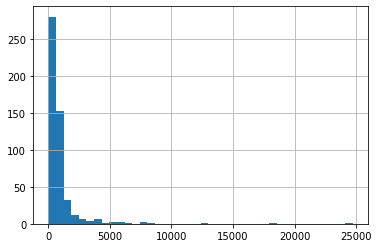

In [10]:
# Repartition of the content lengths (characters)
%matplotlib inline
df.content.drop_duplicates().apply(len).hist(bins=40)

In [ ]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['title_len'] = df['poem_name'].apply(lambda x: len(x.split(' ')))
df['content_len'] = df.content.apply(lambda x: len(x.split(' ')))

In [28]:
df[df.content.duplicated()]

,author,content,poem name,age,type
36,SIR WALTER RALEGH,Praisd be Dianas fair and harmless light;\r\nP...,Praisd be Dianas Fair and Harmless Light,Renaissance,Nature
44,QUEEN ELIZABETH I,"When I was fair and young, then favor graced m...",When I Was Fair and Young,Renaissance,Nature
60,EDMUND SPENSER,"CALM was the day, and through the trembling ai...",Prothalamion,Renaissance,Nature
61,EDMUND SPENSER,THENOT & HOBBINOLL\r\nTell me good Hob...,from The Shepheardes Calender: April,Renaissance,Nature
62,EDMUND SPENSER,"PIERCE & CUDDIE\r\nCuddie, for s...",from The Shepheardes Calender: October,Renaissance,Nature
...,...,...,...,...,...
562,EDGAR LEE MASTERS,"Maurice, weep not, I am not here under this pi...",Sarah Brown,Modern,Love
564,PAUL LAURENCE DUNBAR,"Wintah, summah, snow er shine,\r\nHit's all de...","Song (Wintah, summah, snow er shine)",Modern,Love
569,HART CRANE,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Voyages,Modern,Love
571,CARL SANDBURG,"Give me hunger,\r\nO you gods that sit and giv...",At a Window,Modern,Love


In [ ]:
df[ids.isin(ids[ids.duplicated()])].sort("ID")

In [43]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="Poems", html={"style": {"full_width": True}})

In [ ]:
#Deuxième database

In [14]:
df = pd.read_csv('poetry_dataset.csv')
df

,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN
...,...,...,...,...,...
13849,13,\r\r\n 1-800-FEAR\r\r\n ...,\r\r\nWe'd like to talk with you about ...,Jody Gladding,"Living,Social Commentaries,Popular Culture"
13850,14,\r\r\n The Death of Atahual...,\r\r\n\r\r\n,William Jay Smith,NaN
13851,15,\r\r\n Poet's Wish\r\r\n ...,\r\r\n\r\r\n,William Jay Smith,NaN
13852,0,\r\r\n 0\r\r\n,\r\r\n Philosophic\r\r\nin its comple...,Hailey Leithauser,"Arts & Sciences,Philosophy"


In [13]:
df[df['Poet'] == "William Shakespeare"]

,Unnamed: 0,Title,Poem,Poet,Tags
880,118,\r\r\n The Phoenix and the ...,\r\r\nLet the bird of loudest lay On the sole ...,William Shakespeare,"Living,Time & Brevity,Love,Relationships,Pets,..."
2002,70,"\r\r\n Sonnet 123: No, Time...","\r\r\nNo, Time, thou shalt not boast that I do...",William Shakespeare,"Living,Time & Brevity,Arts & Sciences"
2003,71,\r\r\n Sonnet 121: 'Tis bet...,\r\r\n’Tis better to be vile than vile esteeme...,William Shakespeare,"Living,Life Choices,Relationships,Friends & En..."
2004,72,\r\r\n Sonnet 133: Beshrew ...,\r\r\nBeshrew that heart that makes my heart t...,William Shakespeare,"Love,Break-ups & Vexed Love,Unrequited Love,So..."
2005,73,"\r\r\n Sonnet 139: O, call ...","\r\r\nO, call not me to justify the wrongThat ...",William Shakespeare,"Love,Break-ups & Vexed Love,Unrequited Love"
...,...,...,...,...,...
13420,5,"\r\r\n Song: “Hark, hark! t...",\r\r\n\r\r\n\r\r\n\r\r\n(from Cymbeline)\r\r\n...,William Shakespeare,"Nature,Landscapes & Pastorals"
13421,6,\r\r\n Song: “O Mistress mi...,\r\r\n\r\r\n\r\r\n\r\r\n(from Twelfth Night)\r...,William Shakespeare,"Living,Time & Brevity,Love,Classic Love,Desire..."
13422,7,\r\r\n Song: “Orpheus with ...,\r\r\n\r\r\n\r\r\n\r\r\n(from Henry VIII)\r\r\...,William Shakespeare,"Nature,Landscapes & Pastorals,Arts & Sciences,..."
13423,8,"\r\r\n Song: “Take, oh take...",\r\r\n\r\r\n\r\r\n\r\r\n(from Measure for Meas...,William Shakespeare,"Love,Heartache & Loss,Infatuation & Crushes,Re..."


## Exploring archive

In [17]:
df = pd.read_csv('archive.zip',compression='zip')

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['forms/abc/AbcPoems2AbcHkAndChinaV2Cauchy3Poembycheungshunsang.txt', 'forms/abc/AbcPoems887LiveWithLoveAnAbcPoemPoembyMelvinaGermain.txt', 'forms/abc/AbcPoemsAAbcAnglesOnAngelsPoemByCauchy3Poembycheungshunsang.txt', 'forms/abc/AbcPoemsAAbcBrazilDancePoemByCauchy3Poembycheungshunsang.txt', 'forms/abc/AbcPoemsABCPoembyChrisMcCabe.txt', 'forms/abc/AbcPoemsABCPoembyWilliamHutton.txt', 'forms/abc/AbcPoemsACcumulativeDIsplayCReativeDIsplayAbcPoemPoembyKimvanBreda.txt', 'forms/abc/AbcPoemsAbc123PoembyGabriellaFranco.txt', 'forms/abc/AbcPoemsAbc2C81107PoembyCoreyThreet.txt', 'forms/abc/AbcPoemsAbc3SonnetsPoembyPeterSQuinn.txt', 'forms/abc/AbcPoemsAbcBogenPoembyHansChristianAndersen.txt', 'forms/abc/AbcPoemsAbcC51507PoembyCoreyThreet.txt', 'forms/abc/AbcPoemsAbcJustForFunPoembyDawnSlanker.txt', 'forms/abc/AbcPoemsAbcNameSongPoembyjayleebranch.txt', 'forms/abc/AbcPoemsAbcOfAliensAndAllPoembyRameshTA.txt', 'forms/abc/AbcPoemsAbcOfFaithPoembyChampsUlyssesCabinatan.txt', 'forms/abc/AbcPoemsAbcOfMyChildhoodPoembyMehreenTahir.txt', 'forms/abc/AbcPoemsAbcOfPoliticalGamePoembyRameshTA.txt', 'forms/abc/AbcPoemsAbcOfSaferSexPoembyKholekileMonakali.txt', 'forms/abc/AbcPoemsAbcOfSuccessPoembyGitaAshok.txt', 'forms/abc/AbcPoemsAbcOfTerrorPoembyAlanBruceThompson.txt', 'forms/abc/AbcPoemsAbcOfTerroristPoembyAndrewEufreBelga.txt', 'forms/abc/AbcPoemsAbcOfTheDesertPoembyCarylRamsdale.txt', 'forms/abc/AbcPoemsAbcOfThePunisherPoembyAndrewEufreBelga.txt', 'forms/abc/AbcPoemsAbcPainPoembyTiffanyWolf.txt', 'forms/abc/AbcPoemsAbcPassionsAndXyzEmotionsPoembyHarindharReddy.txt', 'forms/abc/AbcPoemsAbcPoemOfFeelingsPoembyCarolinaTerbush.txt', 'forms/abc/AbcPoemsAbcPoemOnTheRainPoembyMAsimNehal.txt', 'forms/abc/AbcPoemsAbcPoemPoembyDanielCook.txt', 'forms/abc/AbcPoemsAbcPoemPoembyMandyAuthor2.txt', 'forms/abc/AbcPoemsAbcPoemPoembymelissarich.txt', 'forms/abc/AbcPoemsAbcPoembyAlistairGraham.txt', 'forms/abc/AbcPoemsAbcPoembyAustinTerando.txt', 'forms/abc/AbcPoemsAbcPoembyChristopherTye.txt', 'forms/abc/AbcPoemsAbcPoembyDILIPBHASKERMATHRA.txt', 'forms/abc/AbcPoemsAbcPoembyFlyingLemming.txt', 'forms/abc/AbcPoemsAbcPoembyJackieButler.txt', 'forms/abc/AbcPoemsAbcPoembyLynetteLawrence.txt', 'forms/abc/AbcPoemsAbcPoembyNaanaa.txt', 'forms/abc/AbcPoemsAbcPoembyPeteDChristensen.txt', 'forms/abc/AbcPoemsAbcPoembyVishalSharma.txt', 'forms/abc/AbcPoemsAbcPoembygarimashekhar.txt', 'forms/abc/AbcPoemsAbcPoetryPoembyHunterWilliams.txt', 'forms/abc/AbcPoemsAbcPoetryWhenPoembyDrACelestineRajManoharMD.txt', 'forms/abc/AbcPoemsAbcToXyzPoembyEdwardKofiLouis.txt', 'forms/abc/AbcPoemsAbcVerseFlightOfTheBatPoembyCarylRamsdale.txt', 'forms/abc/AbcPoemsAllTheLettersOfTheABCByEuerySondryeLetterPoembyChristopherVitell.txt', 'forms/abc/AbcPoemsAnABCToTheSpiritualtePoembyWilliamBarlow.txt', 'forms/abc/AbcPoemsAnAbcOfInnerPeacePoembyRajArumugam.txt', 'forms/abc/AbcPoemsAnAbcPoembyAdeyemiJoshua.txt', 'forms/abc/AbcPoemsAnAbcPoembyGeoffreyChaucer.txt', 'forms/abc/AbcPoemsAsSimpleAsAbcPoembyD├│nallDempsey.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameAlbertMosesPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameAlfonsSchuhbeckPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameAngelaObererPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameAnneMurrayAndOddityJoyPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameAtalantaHarmsworthPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameBerwenPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameBostonBruinPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameCatherineMWilsonPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameChristineLieberknechtPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameCliffAndersonPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameDesireeWilliamsPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameIngeJaklinPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameJeanineAndersonPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameKatjaRieckermannPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameManuelMachataPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNamePatrykPachuraPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsAutographMuseAbcNameSabineB├ñtzingLichtenth├ñlerPoembyClintonSiegle.txt', 'forms/abc/AbcPoemsBiosAbcPoembyjosedeclaro.txt', 'forms/abc/AbcPoemsCryingForMamaAbcPoemPoembyVictoriaDame.txt', 'forms/abc/AbcPoemsDasAbcPoembyWolfgangSteinmann.txt', 'forms/abc/AbcPoemsDevilOnTheEarthAbcVersePoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsDreamShadowsInAbcPoembyPerditaYoung.txt', 'forms/abc/AbcPoemsEducationAbcPoembyEricBlankson.txt', 'forms/abc/AbcPoemsFearAnAbcPoemPoembyMelvinaGermain.txt', 'forms/abc/AbcPoemsFourFlowersInMyAbcVersePoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsFriendsAbcPoetryPoembyKAUSHALSABOO.txt', 'forms/abc/AbcPoemsHaikuAbcOfProtestingCorruptionPoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsHatsOffToThemAtTheAbcPartyPoembyMarkHeathcote.txt', 'forms/abc/AbcPoemsHelenAndYouAndTheAbcCinemaPoembyTerryCollett.txt', 'forms/abc/AbcPoemsInOldAgeAbcIsMyTeacherPoembyToshieNohara.txt', 'forms/abc/AbcPoemsJustAbcOfLanguagePoembyRameshTA.txt', 'forms/abc/AbcPoemsLearningAbcPoembyHariPrasad.txt', 'forms/abc/AbcPoemsMyAbcPoemPoembycassandrarainbolt.txt', 'forms/abc/AbcPoemsMyFirstAbcPoembyRajanManandhar.txt', 'forms/abc/AbcPoemsMyNameIsAbcPoembyAbbySze.txt', 'forms/abc/AbcPoemsPeaceAbcPoembyMelvinaGermain.txt', 'forms/abc/AbcPoemsPoemInAbcPoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsProfessorAbcPoembyEdwardKofiLouis.txt', 'forms/abc/AbcPoemsRememberingSocratesInModernTimesAbcVersePoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsSchoolDazeAToZAbcPoemPoembyTamaraBerylLatham.txt', 'forms/abc/AbcPoemsStillWithYouAbcPoemPoembyShambaKaunda.txt', 'forms/abc/AbcPoemsTheAbcAcrosticPoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsTheAbcPoembySpikeMilligan.txt', 'forms/abc/AbcPoemsTheBattleWithinMySelflessSacrificenotAsEasyAsAbcPoembyLeratoMatshwane.txt', 'forms/abc/AbcPoemsTheChristianPhilosophersABCPoembyJohnLiddellKelly.txt', 'forms/abc/AbcPoemsTheDepartureTimeAbcVersePoembyMuzahidulReza.txt', 'forms/abc/AbcPoemsThroughoutTheLifeAbcVersePoembyMuzahidulReza.txt', 'forms/abecedarian/AbecedarianPoemsAShortHistoryOfLifeOnEarthAbecedarianPoembySpocktheVegan.txt', 'forms/abecedarian/AbecedarianPoemsAbecedarianAnswerPoembySketcherRidpath.txt', 'forms/abecedarian/AbecedarianPoemsAbecedarianColoursOfSpacePoembyAllenSteble.txt', 'forms/abecedarian/AbecedarianPoemsAbecedarianPoembyRameshTA.txt', 'forms/abecedarian/AbecedarianPoemsAbecedarianToADeadMotherPoembyJudyMeibach.txt', 'forms/abecedarian/AbecedarianPoemsAlphaThroughOmegaOnAbecedarianInfinityPoembyJonathanROBIN.txt', 'forms/abecedarian/AbecedarianPoemsAnAbecedarianObservationPoembyThomasDavid.txt', 'forms/abecedarian/AbecedarianPoemsAnAbecedarianPoembyAdeyemiJoshua.txt', 'forms/abecedarian/AbecedarianPoemsAnAbecedarianWithHockeyAsTheThemeInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/abecedarian/AbecedarianPoemsC4PlasticImSoMaterialisticAbecedarianPoemPoembyHarindharReddy.txt', 'forms/abecedarian/AbecedarianPoemsDoubleHelixAbecedarianPoeticalPizzaExtravaganzaPoembyJonathanROBIN.txt', 'forms/abecedarian/AbecedarianPoemsDoubleHelixAbecedarianTemptationsPoembyJonathanROBIN.txt', 'forms/abecedarian/AbecedarianPoemsDoubleHelixAbecedarianXylophonicResonanceHeLicksEnigmaticPoembyJonathanROBIN.txt', 'forms/abecedarian/AbecedarianPoemsDoubleHelixAbecedarianXylophonicResonancePoembyJonathanROBIN.txt', 'forms/abecedarian/AbecedarianPoemsGettingOnWellFutureShortAbecedarianStanzaPoembyMuzahidulReza.txt', 'forms/abecedarian/AbecedarianPoemsIntrospectingLifeAbecedarianPoembyMuzahidulReza.txt', 'forms/abecedarian/AbecedarianPoemsLessonsForLife22WayAbecedarianPoembySpocktheVegan.txt', 'forms/abecedarian/AbecedarianPoemsLessonsForLifeAbecedarianPoembySpocktheVegan.txt', 'forms/abecedarian/AbecedarianPoemsLifeAbecedarianVersePoembyMuzahidulReza.txt', 'forms/abecedarian/AbecedarianPoemsManShapedWindTheAbecedarianPoembyJaeyPeele.txt', 'forms/acrostic/AcrosticPoems616DepresslionAcrosticPoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems680LoveAcrosticNo1PoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems681LoveAcrosticNo2PoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems682LoveAcrosticNo3PoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems683LoveAcrosticNo4PoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems684LoveAcrosticNo5PoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems734InspirationalAcrosticPoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoems955PovertyAcrosticPoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoemsAFamilyAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsAGraduationDayPoemAcrosticPoembyDorianPetersenPotter.txt', 'forms/acrostic/AcrosticPoemsAPrisonerOfYourLovedoubleAcrosticPoembyThadWilk.txt', 'forms/acrostic/AcrosticPoemsAZAcrosticPoemPoembyNaseeruTaneemuAnnuree.txt', 'forms/acrostic/AcrosticPoemsAbsoluteLoveacrosticPoembyJavierFalcon.txt', 'forms/acrostic/AcrosticPoemsAcrostic3PhonePoembyDorothyAlvesHolmes.txt', 'forms/acrostic/AcrosticPoemsAcrostic4ShoesPoembyDorothyAlvesHolmes.txt', 'forms/acrostic/AcrosticPoemsAcrosticCellPoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticElectionsPoembyBarryVanAllen.txt', 'forms/acrostic/AcrosticPoemsAcrosticElizaHughesPoembyHenryLivingstonJr.txt', 'forms/acrostic/AcrosticPoemsAcrosticEnvironmentPoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticFilipinoRacePoembyNoelHorlanda.txt', 'forms/acrostic/AcrosticPoemsAcrosticFreedomPoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticGeorgianaAugustaKeatsPoembyJohnKeats.txt', 'forms/acrostic/AcrosticPoemsAcrosticNoneAreLostPoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticOfTalentPoembyJuanVarela.txt', 'forms/acrostic/AcrosticPoemsAcrosticPoemOnHealthyPoembyramyaiyer.txt', 'forms/acrostic/AcrosticPoemsAcrosticPoemPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsAcrosticPoembyLewisCarroll.txt', 'forms/acrostic/AcrosticPoemsAcrosticPoemsPoembyValsaGeorge.txt', 'forms/acrostic/AcrosticPoemsAcrosticPokemonPoemPoembyZachGorman.txt', 'forms/acrostic/AcrosticPoemsAcrosticRevolutionPoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticSciencePoembyCarolynBrunelle.txt', 'forms/acrostic/AcrosticPoemsAcrosticToJawaharlalNehruPoembychandrathiagarajan.txt', 'forms/acrostic/AcrosticPoemsAdorableAreWomenAsMothersAMothersDayAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsAnAcrosticPoembyEdgarAllanPoe.txt', 'forms/acrostic/AcrosticPoemsAnIconIsDeadAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsAnotherAcrosticInTheStyleOfFatherWilliamPoembyLewisCarroll.txt', 'forms/acrostic/AcrosticPoemsAustraliaAcrosticPoembyMilicaFranchiDeLuri.txt', 'forms/acrostic/AcrosticPoemsButterflyAcrosticTranslationAlphonseDeLamartineLePapillonPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsCaptivatedDoubleAcrosticPoembyThadWilk.txt', 'forms/acrostic/AcrosticPoemsChallengeAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsConcentricacrosticDectinaRefrainPoembyDianeHine.txt', 'forms/acrostic/AcrosticPoemsDeathAcrosticPoembyPirateLoveMagicMan.txt', 'forms/acrostic/AcrosticPoemsDoctorsDay2010AcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsDrKalaignarMKarunanidhiAnAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsDyingWishHaikuTankaAcrosticPoembyBenGieske.txt', 'forms/acrostic/AcrosticPoemsElizabethanOdeFrenchAndEnglishAlliterationAcrosticPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsEmotionsAcrosticPoembyShelleyLBaxter.txt', 'forms/acrostic/AcrosticPoemsEncouragementDoubleAcrosticPoembyCynthiaBuhainBaello.txt', 'forms/acrostic/AcrosticPoemsEphemeralBloomAcrosticSonnetPoembyDianeHine.txt', 'forms/acrostic/AcrosticPoemsEveryFlowerAcrosticPoembyManjeshwariPMYSORE.txt', 'forms/acrostic/AcrosticPoemsFatherDoubleAcrosticPoembyThadWilk.txt', 'forms/acrostic/AcrosticPoemsFreeEnterpriseAcrosticSonnetPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsFriendshipAcrosticPoemPoembySamreenaLodhi.txt', 'forms/acrostic/AcrosticPoemsFullImpactOfHorrorInWarAcrosticPoembyLenoreLee.txt', 'forms/acrostic/AcrosticPoemsGuardianWingsAcrosticPoembyLorraineMargueritteGasrelBlack.txt', 'forms/acrostic/AcrosticPoemsHarmonieDuSoirAcrosticTranslationCharlesBaudelaireLesFleursDuMalXviiPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsHisHealingGraceAcrostic5PoembyCynthiaBuhainBaello.txt', 'forms/acrostic/AcrosticPoemsHollowHolidaysAcrosticPoembyMaryHavran.txt', 'forms/acrostic/AcrosticPoemsHomeworkAcrosticPoembyJannekeTenvoorde.txt', 'forms/acrostic/AcrosticPoemsHospitalAcrosticSonnetPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsIWillStandByYouInAcrosticPoembyThadWilk.txt', 'forms/acrostic/AcrosticPoemsInLoveAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsJanuaryAnAcrosticPoembyPaulHansford.txt', 'forms/acrostic/AcrosticPoemsKeziahAcrosticPoemPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsKillMeGentlyAcrosticPoembyCrimsonLove.txt', 'forms/acrostic/AcrosticPoemsLoveLeadNatureAcrosticSonnetPoembyManjeshwariPMYSORE.txt', 'forms/acrostic/AcrosticPoemsLoveMeDoAnAcrosticPoembyTheodoraTheoOnken.txt', 'forms/acrostic/AcrosticPoemsLowTideAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsLylasLoveAnAlbaAndAcrosticPoembyBenGieske.txt', 'forms/acrostic/AcrosticPoemsMerlinToMermaidAcrosticSonnetPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsMiaAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsMistyMountainMirageAnAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsMusicAcrosticPoembyAllysonGordon.txt', 'forms/acrostic/AcrosticPoemsNuclearWarAcrosticPoembyCassyTaberna.txt', 'forms/acrostic/AcrosticPoemsNuggetsAcrosticPoembySathyaNarayana.txt', 'forms/acrostic/AcrosticPoemsOhBeMyValentineAcrosticSonnetPoembyPeteCrowther.txt', 'forms/acrostic/AcrosticPoemsOnPatriotismAnAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsOptimisticDreamsAnAcrosticPoemPoembySaurabhSom.txt', 'forms/acrostic/AcrosticPoemsPeaceAcrosticPoembyBenGieske.txt', 'forms/acrostic/AcrosticPoemsPleaseAcrosticPoembyMelvinaGermain.txt', 'forms/acrostic/AcrosticPoemsPoetryIsAcrosticPoembyLorraineMargueritteGasrelBlack.txt', 'forms/acrostic/AcrosticPoemsPongaloPongalInAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsRamadanMubarakAnAcrosticPoembyKhadimHussain.txt', 'forms/acrostic/AcrosticPoemsReunionOfBloodAcrosticPoembyCrimsonLove.txt', 'forms/acrostic/AcrosticPoemsSatisfactionAcrosticPoembyBrookePeterson.txt', 'forms/acrostic/AcrosticPoemsSingleBlessednessAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsSixtySixthIndependenceDayOfIndiaInAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsSoulmateAcrosticPoembyRoshniDSouza.txt', 'forms/acrostic/AcrosticPoemsSufferingAcrosticPoembyShelleyLBaxter.txt', 'forms/acrostic/AcrosticPoemsTeachersDayInAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsTheUniverseAnAcrosticPoembyTheodoraTheoOnken.txt', 'forms/acrostic/AcrosticPoemsTimePalindromeAndAcrosticPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsToRosaAcrosticPoembyHenryTimrod.txt', 'forms/acrostic/AcrosticPoemsUkraineAcrosticSonnetPoembyJonathanROBIN.txt', 'forms/acrostic/AcrosticPoemsValentinesDayAnAcrosticPoembyDrACelestineRajManoharMD.txt', 'forms/acrostic/AcrosticPoemsWarMemoriesWithAcrosticPoembyPaulHartal.txt', 'forms/acrostic/AcrosticPoemsWaterAcrosticPoembyGertStrydom.txt', 'forms/acrostic/AcrosticPoemsWhyAcrosticPoembyMarvinBratoSr.txt', 'forms/acrostic/AcrosticPoemsWiresAcrosticOrMisunderstandingsPoembyMoonBeeCanady.txt', 'forms/acrostic/AcrosticPoemsWritingsATonicThePoemsAcrosticPoembyDenisMartindale.txt', 'forms/alexandrine/AlexandrinePoemsAlexandrineDreamsAndDesiresPoembyMAsimNehal.txt', 'forms/alexandrine/AlexandrinePoemsAlexandrineLoveAndRelationshipsPoembyMAsimNehal.txt', 'forms/alexandrine/AlexandrinePoemsAlexandrinePoembyJamesRyderRandall.txt', 'forms/alexandrine/AlexandrinePoemsAlexandrinePoembyMuzahidulReza.txt', 'forms/alexandrine/AlexandrinePoemsAnEnglishAlexandrinePoembyGayathriBSeetharam.txt', 'forms/alexandrine/AlexandrinePoemsMyLoveForYouAlexandrinePoetryPoembyMarietaMaglas.txt', 'forms/alexandrine/AlexandrinePoemsMyYahwehsPraisesAnAlexandrinePoembyAdeyemiJoshua.txt', 'forms/alexandrine/AlexandrinePoemsNaturalThrillAlexandrinePoetryPoembyMarietaMaglas.txt', 'forms/alexandrine/AlexandrinePoemsPasschendaelePassionsKnellTripleAlexandrineSonnetPoembyJonathanROBIN.txt', 'forms/alexandrine/AlexandrinePoemsSavingTheEnvironmentSavingTheNatureAlexandrinePoetryPoembyMuzahidulReza.txt', 'forms/alexandrine/AlexandrinePoemsSeasonsAlexandrinePoembyDavidWood.txt', 'forms/allegory/AllegoryPoems20100611AllegoryPoembyMargaretAlice.txt', 'forms/allegory/AllegoryPoemsASupermarketChristmasAllegoryPoembyPhilipHousiaux.txt', 'forms/allegory/AllegoryPoemsAllegory21PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsAllegory24PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsAllegory92PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsAllegoryAMoralVehiclePoembyThomasHood.txt', 'forms/allegory/AllegoryPoemsAllegoryOfTheBoatPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsAllegoryPoembyTheodoraTheoOnken.txt', 'forms/allegory/AllegoryPoemsAllegoryPoembyThomasHood.txt', 'forms/allegory/AllegoryPoemsAllegoryStrangeWaterPoembyAllenSteble.txt', 'forms/allegory/AllegoryPoemsAnAllegoryForAVirginPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsAnAllegoryOfOurPoetryPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsAnAllegoryOfOurSinlessMeetingPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsAnAllegoryOnHumanNaturePoembyrandomnoise.txt', 'forms/allegory/AllegoryPoemsAnAllegoryOnManPoembyThomasParnell.txt', 'forms/allegory/AllegoryPoemsAnAllegoryOnTheSubjectOfTheTailAndTheDogPoembyMashaDanevasha.txt', 'forms/allegory/AllegoryPoemsAnAllegoryPoembyBarcroftHenryThomasBoake.txt', 'forms/allegory/AllegoryPoemsAnAllegoryPoembyPercyByssheShelley.txt', 'forms/allegory/AllegoryPoemsAnAllegoryPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsAnthropomorphousFoxesJigWithFussAllegoryPoembyHarindharReddy.txt', 'forms/allegory/AllegoryPoemsEntryFourAllegoryPoembyAlistairPlint.txt', 'forms/allegory/AllegoryPoemsFictionalAllegoryPoembyBernardFAsuncion.txt', 'forms/allegory/AllegoryPoemsFoundPoem2AllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsFoundPoemAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsHappyAllegoryPoembyBernardFAsuncion.txt', 'forms/allegory/AllegoryPoemsISendYouHereASortOfAllegoryPoembyAlfredLordTennyson.txt', 'forms/allegory/AllegoryPoemsLosingDonkeyAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsLoveAllegoryPoembyDouglasScotney.txt', 'forms/allegory/AllegoryPoemsLyricInAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsMyBeesAnAllegoryPoembyHelenHuntJackson.txt', 'forms/allegory/AllegoryPoemsParableForACertainTreasurerAllegoryPoembyGertStrydom.txt', 'forms/allegory/AllegoryPoemsPlatosCaveAllegoryPoembyRAJNANDY.txt', 'forms/allegory/AllegoryPoemsRareStanzaLifestyleAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsRiversAndAllegoryPoembyHayatSaif.txt', 'forms/allegory/AllegoryPoemsSalmanRushdieIsTheGoldenBoyOfDreamAllegoryFictionPoembyBijayKantDubey.txt', 'forms/allegory/AllegoryPoemsSorryToFocusRefocusDefocusOnTheAnimalFarmAnAllegoryPoembyHarindharReddy.txt', 'forms/allegory/AllegoryPoemsTheAllegory101PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory10PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory11PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory12PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory13PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory14PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory151PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory15PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory161PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory16PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory17PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory18ChainVersePoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory19PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory1PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory2PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory31PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory32PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory33PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory34PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory35PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory36PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory37PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory3PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory41PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory42PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory4PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory51PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory52PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory55PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory56PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory57PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory58PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory59PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory5PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory61PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory6PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory7PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory81PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory82PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory8PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegory9PoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfAnUnintentionalMeetingPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfGoodAndEvilPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfPleasurePoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfTheCaveInLesserWordsPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfTheCycleOfDoorsPoembyRICBASTASA.txt', 'forms/allegory/AllegoryPoemsTheAllegoryOfTheSeaPoembyRobertRorabeck.txt', 'forms/allegory/AllegoryPoemsTheAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheAnimalStateImageryAllegoryAndSatirePoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheBushfireAnAllegoryPoembyBanjoPaterson.txt', 'forms/allegory/AllegoryPoemsTheDeathofAllegoryPoembyBillyCollins.txt', 'forms/allegory/AllegoryPoemsTheMurderAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsThePangMoreSharpThanAllAnAllegoryPoembySamuelTaylorColeridge.txt', 'forms/allegory/AllegoryPoemsTheStateAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheTwoSpiritsAnAllegoryPoembyPercyByssheShelley.txt', 'forms/allegory/AllegoryPoemsTheUglyDogsAndDrunkardGuardsAllegoryAndSatirePoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheWhitePigeonsAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTheWildElephantsOfferingWildBloomsOverTheForestTractShivaADreamAllegoryWrittenDuringATranceLikeSituationPoembyBijayKantDubey.txt', 'forms/allegory/AllegoryPoemsTheWorstAllegoryYouveEverHeardPoembyAlphinSkinnikov.txt', 'forms/allegory/AllegoryPoemsToAremaAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsToTheHelmsmanAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsTravelingInTheWildernessAllegoryPoembyMuzahidulReza.txt', 'forms/allegory/AllegoryPoemsUnknownAndUnforeseenAllegoryPoembyMeenaSomasundaram.txt', 'forms/allegory/AllegoryPoemsXxxxxxvAnAllegoryOfTimePoembyBRDionysius.txt', 'forms/anacreontic/AnacreonticPoemsAnAnacreonticPoembyRobertTannahill.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticFreestyleRapPoembySketcherRidpath.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoem1PoembyMAsimNehal.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoemForSweetheartPoembyMAsimNehal.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyDigbyMackworthDolben.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyEdwardGeorgeBulwerLytton.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyPeterJohnAllan.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyPieterCorneliszoonHooft.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyRobertHerrick.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyThomasMoore.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticPoembyWilliamShenstone.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticSongPoembyJosiasHomely.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticToFlipPoembyRoyallTyler.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticVerseForChildhoodPoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsAnacreonticVerseForTheSaharaDesertAndItsAnimalPoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsBeesLifeAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsCascadeAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsDeadHorseArumLilyImageryInAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsHappyAndUnhappyAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsHerLifeAndLikingsAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsLoveForWhatAreGoodAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsOurLuckyCatTomExperiencedTheBlueSuperBloodRedMoonAndTheLunarEclipseTogetherAtTheNightOf31stJanuaryIn2018AnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsProbablyItIsLoveAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsRamadanInAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsSightAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsTheBeautifulRomanticHutInSpringAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsThreeLevelsOfCorruptionsInAnacreonticVersePoembyMuzahidulReza.txt', 'forms/anacreontic/AnacreonticPoemsUnSoldadoEnMedioDeLasOlasAnAnacreonticPoembyAdeyemiJoshua.txt', 'forms/anagram/AnagramPoemsADamnGoodPoetsAnagramPoembyShaunCronick.txt', 'forms/anagram/AnagramPoemsAGaolerInsteadOfAGaolBirdAnagramPoemPoembyMarietaMaglas.txt', 'forms/anagram/AnagramPoemsARagManAnagramPoembyE55Flat.txt', 'forms/anagram/AnagramPoemsARealMatchMyFavouriteAnagramPoembyEsraSloblock.txt', 'forms/anagram/AnagramPoemsAnagram4UPoembySonnyRainshine.txt', 'forms/anagram/AnagramPoemsAnagramFunPoembyFrancieLynch.txt', 'forms/anagram/AnagramPoemsAnagramPoembyAdeyemiJoshua.txt', 'forms/anagram/AnagramPoemsAnagramPoembyAnonymousBritish.txt', 'forms/anagram/AnagramPoemsAnagramPoembyEdwardKofiLouis.txt', 'forms/anagram/AnagramPoemsAnagramPoembyJeremyHorsford.txt', 'forms/anagram/AnagramPoemsAnagramPoembySasheenFernandez.txt', 'forms/anagram/AnagramPoemsBudFreeAnagramAcrosticPoembyJonathanROBIN.txt', 'forms/anagram/AnagramPoemsCreationOfAnagramPoemPoembySketcherRidpath.txt', 'forms/anagram/AnagramPoemsDidYouKnowTheWordEarthIsAnAnagramOfHeartPoembyPaulaGlynn.txt', 'forms/anagram/AnagramPoemsElegyIiTheAnagramPoembyJohnDonne.txt', 'forms/anagram/AnagramPoemsLostForWordsAnAnagramConudrumTankaPoembyD├│nallDempsey.txt', 'forms/anagram/AnagramPoemsMusicalAnagramRiddleCurrentVersionPoembyJonathanROBIN.txt', 'forms/anagram/AnagramPoemsNoAnagramAgainPoembySRIRANJIARATISANKAR.txt', 'forms/anagram/AnagramPoemsOfBlueAndWhiteCordsAnagramPoemPoembyMarietaMaglas.txt', 'forms/anagram/AnagramPoemsOneHugeEnoughAcrosticAnagramSenryuUnderstatementPoembyJonathanROBIN.txt', 'forms/anagram/AnagramPoemsPastelDeNataSAnagramPoembyMuzahidulReza.txt', 'forms/anagram/AnagramPoemsPostTopsStopSpotAnagramVersePoembyJonathanROBIN.txt', 'forms/anagram/AnagramPoemsPuzzleMasterQuiz070AnagramPoetsPoembyKimBarney.txt', 'forms/anagram/AnagramPoemsServeVerseAnagramAcrosticBudFreeInTimeShapeYourHeartsVisionThroughVersePoembyJonathanROBIN.txt', 'forms/anagram/AnagramPoemsSpotsOfFireDragonsAnagramPoembyMuzahidulReza.txt', 'forms/anagram/AnagramPoemsWw2AnagramPoembyJoleHans.txt', 'forms/anaphora/AnaphoraPoemsAnaphoraPoembyElizabethBishop.txt', 'forms/anaphora/AnaphoraPoemsAnaphoraPoembyMarkArvizu.txt', 'forms/anaphora/AnaphoraPoemsBeautifulAnaphoraInRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsChristmasStarAnaphoraPoembySpocktheVegan.txt', 'forms/anaphora/AnaphoraPoemsDaydreamingAnaphoraPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsDiversityAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsHappinessAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsInTheEarthEveryoneIsShepherdAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsInfinityAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsIntrospectionInAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsItsNotEasyAnaphoraPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsKindnessAnaphoraPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsLearningAnaphoraPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsLightOfThisWorldAnaphoraCandleOfHopePoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsLoveAnaphoraPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsLoveIsLoveAndLoveAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsMyMindAnaphoraInQuaternPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsMyReadingAnaphoraEnclosedRhymedPoembyDorianPetersenPotter.txt', 'forms/anaphora/AnaphoraPoemsNothingDoneAnaphoraInCoupletPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsPastPresentAndFutureAnaphoraInQuaternStanzaPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsPersonalAnaphoraInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsScientistsOfDestructionsAnaphoraAndRefrainInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsSectionsOfTimeAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsSelfMotivatedAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsTheAllPowerfulAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsTheConsequenceAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsTheGreatPoetAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsTheWayAndTheWalkersAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsTimeAnaphoraPoembyMuzahidulReza.txt', 'forms/anaphora/AnaphoraPoemsWhenTheSunGoesDownLateInTheAfternoonAnaphoraPoemPoembyGertStrydom.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsArabianSonnetHerspiritPoembyPoetryForms.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsArabianSonnetTheCarrionCryPoembyPoetryForms.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsArabianSonnetWeneverfoundawayPoembyPoetryForms.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsLaPazYSuAuricularArabianSonnetPoembyAdeyemiJoshua.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsLifeArabianSonnetPoembyMuzahidulReza.txt', 'forms/arabian-sonnet/ArabiansonnetPoemsOutOfDesertArabianSonnetPoembyMuzahidulReza.txt', 'forms/ars-poetica/ArspoeticaPoems0287ArsPoeticaPoembyMichaelShepherd.txt', 'forms/ars-poetica/ArspoeticaPoemsAPoemShouldNotMeanButBeAfterArchibaldMacleishArsPoeticaPoembyJonathanROBIN.txt', 'forms/ars-poetica/ArspoeticaPoemsAgainArsPoeticaPoembyRICBASTASA.txt', 'forms/ars-poetica/ArspoeticaPoemsAnAttemptAtArsPoeticaPoembySourenMondal.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoetica100IBelievePoembyElizabethAlexander.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoetica1PoembyMuzahidulReza.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoetica2PoembyJanFreundschuh.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoetica2PoembyRICBASTASA.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaASonnetPoembyDanielBrick.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaAtEveryTurnTodayPoembyDesmondKonZhichengMingd├⌐.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaByAracelisGirmayInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaCocoonsPoembyDanaLevin.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaCocoonsbyDanaLevinInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaGrigoreVieruPoembyPaulAbucean.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaHaikuPoembyDavidKowalczyk.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaKowalczykPoembyDavidKowalczyk.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyAlfredBehrmann.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyAnnMarge.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyAnthonyButts.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyArchibaldMacLeish.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyBruceDeitrickPrice.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyChuckToll.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyCzeslawMilosz.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyDorotheaLasky.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyEleanorWilner.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJLNash.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJohnWMcEwers.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJohnaBeckett.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJonathanROBIN.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJosephCharlesKennedy.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyJoyceHemsley.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyKevinCarlson.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyLuciaStefanovici.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyMarkArvizu.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyMattDenis.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyMichaelArdizzone.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyMockingjayMellark.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyMorganMichaels.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyRICBASTASA.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembySatishVerma.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyThomasJamesMartin.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaPoembyVicenteHuidobro.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaReduxPoembyWarrenFalcon.txt', 'forms/ars-poetica/ArspoeticaPoemsArsPoeticaTheArtOfPoemPoembyGraceDolaota.txt', 'forms/ars-poetica/ArspoeticaPoemsArspoeticaPoembyRAFAELCADENAS.txt', 'forms/ars-poetica/ArspoeticaPoemsAtTheCrossroadsAnArsPoeticaPoembyDanielBrick.txt', 'forms/ars-poetica/ArspoeticaPoemsAutumnCreativityAnArsPoeticaPoembyDanielBrick.txt', 'forms/ars-poetica/ArspoeticaPoemsEveningFlightArsPoetica2ByGabrielCh├ívezCasazolaTranslatedIntoHindiUrduPoembyRaviKopra.txt', 'forms/ars-poetica/ArspoeticaPoemsGrigoreVieruArsPoeticaPoembyPaulAbucean.txt', 'forms/ars-poetica/ArspoeticaPoemsHaikuArsPoeticaPoembyMuzahidulReza.txt', 'forms/ars-poetica/ArspoeticaPoemsKavitaKaArtArsPoeticabyCzeslawMiloszInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/ars-poetica/ArspoeticaPoemsPoetryPoesyArsPoeticaEroticaPoembyRICBASTASA.txt', 'forms/ars-poetica/ArspoeticaPoemsPreambleARoughDraftForAnArsPoeticaPoembyJeanCocteau.txt', 'forms/ars-poetica/ArspoeticaPoemsTheLatinDeliAnArsPoeticaPoembyJudithCofer.txt', 'forms/ars-poetica/ArspoeticaPoemsVojtinasArsPoeticaExtractPoembyJanosArany.txt', 'forms/ars-poetica/ArspoeticaPoemsarsPoeticaPoembyHoratiuStamatin.txt', 'forms/ars-poetica/ArspoeticaPoemsqui├⌐nSabeSuNombreArsPoeticaPoembyAdeyemiJoshua.txt', 'forms/aubade/AubadePoemsAUBADEBEGINNINGWITHSLEEPAPNEAPoembyAverillCurdy.txt', 'forms/aubade/AubadePoemsAUBADEPoembyBarryTebb.txt', 'forms/aubade/AubadePoemsAbideAfterPhilipLarkinsAubadePoembyMichaelBurch.txt', 'forms/aubade/AubadePoemsAnAubadeForDivinePoembyDonwardBughaw.txt', 'forms/aubade/AubadePoemsAnAubadePoembyGayathriBSeetharam.txt', 'forms/aubade/AubadePoemsAnAubadePoembyTheodoraTheoOnken.txt', 'forms/aubade/AubadePoemsAnAubadeWithoutLovePoembyEllaYaron.txt', 'forms/aubade/AubadePoemsAnEvergreensAubadePoembyGuyNortham.txt', 'forms/aubade/AubadePoemsAnotherDayAnAubadePoembyElusiveIllusion.txt', 'forms/aubade/AubadePoemsAprilAubadePoembySylviaPlath.txt', 'forms/aubade/AubadePoemsAubadeAutumnPoembyStevenFederle.txt', 'forms/aubade/AubadePoemsAubadeDeMayPoembyJeanAntoinedeBaif.txt', 'forms/aubade/AubadePoemsAubadeForTheStarsPoembyTsunamiHiroshiSu.txt', 'forms/aubade/AubadePoemsAubadeFreeVerseSonnetPoembyGertStrydom.txt', 'forms/aubade/AubadePoemsAubadeHomesongPoembySidneyBurris.txt', 'forms/aubade/AubadePoemsAubadeIPoembyAdeyemiJoshua.txt', 'forms/aubade/AubadePoemsAubadeIiPoembyAdeyemiJoshua.txt', 'forms/aubade/AubadePoemsAubadeIiiPoembyAdeyemiJoshua.txt', 'forms/aubade/AubadePoemsAubadeInAutumnRememberedPoembyMaryAngelaDouglas.txt', 'forms/aubade/AubadePoemsAubadePoembyAdelaideCrapsey.txt', 'forms/aubade/AubadePoemsAubadePoembyAlanGillis.txt', 'forms/aubade/AubadePoemsAubadePoembyAmberFloraThomas.txt', 'forms/aubade/AubadePoemsAubadePoembyAmyLowell.txt', 'forms/aubade/AubadePoemsAubadePoembyBennoBarnard.txt', 'forms/aubade/AubadePoemsAubadePoembyBertBell.txt', 'forms/aubade/AubadePoemsAubadePoembyBrendanConstantine.txt', 'forms/aubade/AubadePoemsAubadePoembyBrianPezaPerrins.txt', 'forms/aubade/AubadePoemsAubadePoembyCaitlinadeadpoetnolongerliving.txt', 'forms/aubade/AubadePoemsAubadePoembyColmKeenan.txt', 'forms/aubade/AubadePoemsAubadePoembyCrimsonLove.txt', 'forms/aubade/AubadePoemsAubadePoembyDameEdithLouisaSitwell.txt', 'forms/aubade/AubadePoemsAubadePoembyDanielBrick.txt', 'forms/aubade/AubadePoemsAubadePoembyDickDavis.txt', 'forms/aubade/AubadePoemsAubadePoembyEllEll.txt', 'forms/aubade/AubadePoemsAubadePoembyEmilyRosko.txt', 'forms/aubade/AubadePoemsAubadePoembyGarrettCaples.txt', 'forms/aubade/AubadePoemsAubadePoembyGertStrydom.txt', 'forms/aubade/AubadePoemsAubadePoembyJuanOlivarez.txt', 'forms/aubade/AubadePoemsAubadePoembyMadisonJuliusCawein.txt', 'forms/aubade/AubadePoemsAubadePoembyMalcolmEvison.txt', 'forms/aubade/AubadePoemsAubadePoembyMichaelBuhagiar.txt', 'forms/aubade/AubadePoemsAubadePoembyMorganMichaels.txt', 'forms/aubade/AubadePoemsAubadePoembyRaoulPonchon.txt', 'forms/aubade/AubadePoemsAubadePoembyReshmaRamesh.txt', 'forms/aubade/AubadePoemsAubadePoembyRickBarot.txt', 'forms/aubade/AubadePoemsAubadePoembySirWilliamDavenant.txt', 'forms/aubade/AubadePoemsAubadePoembyTheodoraTheoOnken.txt', 'forms/aubade/AubadePoemsAubadePoembyTomGoff.txt', 'forms/aubade/AubadePoemsAubadePoembyTomSleigh.txt', 'forms/aubade/AubadePoemsAubadePoembyVeronicaMicle.txt', 'forms/aubade/AubadePoemsAubadePoembyWilliamBDeutscher.txt', 'forms/aubade/AubadePoemsAubadePoembyWilliamBellScott.txt', 'forms/aubade/AubadePoemsAubadePoembyWilliamDavenant.txt', 'forms/aubade/AubadePoemsAubadePoembyWilliamEmpson.txt', 'forms/aubade/AubadePoemsAubadePoembyWilliamShakespeare.txt', 'forms/aubade/AubadePoemsAubadePoembyWindsorGuadalupeJr.txt', 'forms/aubade/AubadePoemsAubadePoembyrobertdickerson.txt', 'forms/aubade/AubadePoemsAubadeSomePeachesAfterStormPoembyCarlPhillips.txt', 'forms/aubade/AubadePoemsAubadeSuisunValleyPoembyStevenFederle.txt', 'forms/aubade/AubadePoemsAubadeValeOfTearsPoembyStevenFederle.txt', 'forms/aubade/AubadePoemsAubadeWithAmbiguitiesPoembyPatrickWhite.txt', 'forms/aubade/AubadePoemsAubadeYourFacePoembyStevenFederle.txt', 'forms/aubade/AubadePoemsCrowingInTheMornAnAubadePoembyMuzahidulReza.txt', 'forms/aubade/AubadePoemsExPatAubadePoembyJohnaBeckett.txt', 'forms/aubade/AubadePoemsFitsStartsHeartRetreadAubadeForFatherPoembyWarrenFalcon.txt', 'forms/aubade/AubadePoemsHOLOGRAMAUBADEPoembyKenBabstock.txt', 'forms/aubade/AubadePoemsHymnForEarningAndImpartingKnowledgeRefrainInAubadePoembyMuzahidulReza.txt', 'forms/aubade/AubadePoemsIMyselfAubadePoembydelilahcontrapunctalyesthatshowIintendedtospellit.txt', 'forms/aubade/AubadePoemsLateAubadeAmpExplanationPoembyKateNorthrop.txt', 'forms/aubade/AubadePoemsMorningAubadePoembyAneeshaRoy.txt', 'forms/aubade/AubadePoemsMorningStartsToMeAnAubadePoembyMuzahidulReza.txt', 'forms/aubade/AubadePoemsMySonnetAubadePoembyJBLeBuert.txt', 'forms/aubade/AubadePoemsNutkinsBodkinsAubadeOhReallyBaadPoembydelilahcontrapunctalyesthatshowIintendedtospellit.txt', 'forms/aubade/AubadePoemsOdeElegyAubadePsalmPoembyRyanTeitman.txt', 'forms/aubade/AubadePoemsThisAubadePoembySummerAlice.txt', 'forms/aubade/AubadePoemsWhiteRaysAubadePoetryPoembyMuzahidulReza.txt', 'forms/aubade/AubadePoemsaubadePoembyMikeFinley.txt', 'forms/balassi-stanza/BalassistanzaPoemsAboutADaisyBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsAnemoneBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsBalassiStanzaIPoembyAdeyemiJoshua.txt', 'forms/balassi-stanza/BalassistanzaPoemsBalassiStanzaIiPoembyAdeyemiJoshua.txt', 'forms/balassi-stanza/BalassistanzaPoemsBalassiStanzaIiiPoembyAdeyemiJoshua.txt', 'forms/balassi-stanza/BalassistanzaPoemsCarnationsBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsHideAndSickBalassiStanzaInImageryPoembyMuzahidulReza.txt', 'forms/balassi-stanza/BalassistanzaPoemsMorningGloriesBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsNeedInsertingSelfQualityBalassiStanzaPoembyMuzahidulReza.txt', 'forms/balassi-stanza/BalassistanzaPoemsPleasureBalassiStanzaPoembyMuzahidulReza.txt', 'forms/balassi-stanza/BalassistanzaPoemsSoLovelyOnThatMornBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsSoulSearchingBalassiStanzaPoembyRajkumarMukherjee.txt', 'forms/balassi-stanza/BalassistanzaPoemsTogetherTimeToSpentBalassiStanzaPoembyGertStrydom.txt', 'forms/balassi-stanza/BalassistanzaPoemsWhenPurplePetalsShowBalassiStanzaPoembyGertStrydom.txt', 'forms/ballad/BalladPoemsABalladOfBaseballBurdensPoembyFranklinPierceAdams.txt', 'forms/ballad/BalladPoemsABalladOfBulletsHaikuPoembyNizamettinEsenHaymanali.txt', 'forms/ballad/BalladPoemsABalladOfBurdensPoembyAlgernonCharlesSwinburne.txt', 'forms/ballad/BalladPoemsABalladOfBurialPoembyRudyardKipling.txt', 'forms/ballad/BalladPoemsABalladOfDeathPoembyAlgernonCharlesSwinburne.txt', 'forms/ballad/BalladPoemsABalladOfDreamlandPoembyAlgernonCharlesSwinburne.txt', 'forms/ballad/BalladPoemsABalladOfDucksPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsABalladOfFran├ºoisVillonPrinceOfAllBalladMakersPoembyAlgernonCharlesSwinburne.txt', 'forms/ballad/BalladPoemsABalladOfGentlenessPoembyGeoffreyChaucer.txt', 'forms/ballad/BalladPoemsABalladOfHellPoembyJohnDavidson.txt', 'forms/ballad/BalladPoemsABalladOfJohnNicholsonPoembySirHenryNewbolt.txt', 'forms/ballad/BalladPoemsABalladOfNurseryRhymePoembyRobertGraves.txt', 'forms/ballad/BalladPoemsABalladOfTheMulberryRoadPoembyEzraPound.txt', 'forms/ballad/BalladPoemsABalladOfTheScottsyssheKynePoembyJohnSkelton.txt', 'forms/ballad/BalladPoemsABalladOfTheTreesAndTheMasterPoembySidneyLanier.txt', 'forms/ballad/BalladPoemsABalladOfTheTwoKnightsPoembySaraTeasdale.txt', 'forms/ballad/BalladPoemsABalladOfWastedYearsPoembyFrancisDuggan.txt', 'forms/ballad/BalladPoemsABalladSentToKingRichardPoembyGeoffreyChaucer.txt', 'forms/ballad/BalladPoemsABalladThatWeDoNotPerishPoembyZbigniewHerbert.txt', 'forms/ballad/BalladPoemsABorderBalladPoembyPaulLaurenceDunbar.txt', 'forms/ballad/BalladPoemsABostonBallad1854PoembyWaltWhitman.txt', 'forms/ballad/BalladPoemsAPastoralBalladIvDisappointmentPoembyWilliamShenstone.txt', 'forms/ballad/BalladPoemsAVeryMournfulBalladOnTheSiegeAndConquestOfAlhamaPoembyGeorgeGordonByron.txt', 'forms/ballad/BalladPoemsAVillonaudBalladOfTheGibbetPoembyEzraPound.txt', 'forms/ballad/BalladPoemsAnEasternBalladPoembyAllenGinsberg.txt', 'forms/ballad/BalladPoemsAnElectionBalladPoembyThomasBabbingtonMacaulay.txt', 'forms/ballad/BalladPoemsBalladAboutDrinkingPoembyYevgenyYevtushenko.txt', 'forms/ballad/BalladPoemsBalladAboutFalseBeaconsPoembyYevgenyYevtushenko.txt', 'forms/ballad/BalladPoemsBalladByTheFirePoembyEdwinArlingtonRobinson.txt', 'forms/ballad/BalladPoemsBalladForGloomPoembyEzraPound.txt', 'forms/ballad/BalladPoemsBalladOfAShipPoembyEdwinArlingtonRobinson.txt', 'forms/ballad/BalladPoemsBalladOfAnotherOpheliaPoembyDavidHerbertLawrence.txt', 'forms/ballad/BalladPoemsBalladOfAutumnPoembyMarieEJPitt.txt', 'forms/ballad/BalladPoemsBalladOfBrokenFlutesPoembyEdwinArlingtonRobinson.txt', 'forms/ballad/BalladPoemsBalladOfDeadFriendsPoembyEdwinArlingtonRobinson.txt', 'forms/ballad/BalladPoemsBalladOfFishersBoardingHousePoembyRudyardKipling.txt', 'forms/ballad/BalladPoemsBalladOfHumanLifePoembyThomasLovellBeddoes.txt', 'forms/ballad/BalladPoemsBalladOfTailorNilsPoembyBjornstjerneBjornson.txt', 'forms/ballad/BalladPoemsBalladOfTheBanishedAndReturningCountPoembyJohannWolfgangvonGoethe.txt', 'forms/ballad/BalladPoemsBalladOfTheDroverPoembyHenryLawson.txt', 'forms/ballad/BalladPoemsBalladOfTheGoodlyFerePoembyEzraPound.txt', 'forms/ballad/BalladPoemsBalladOfTheLadiesOfYorePoembyFran├ºoisVillon.txt', 'forms/ballad/BalladPoemsBalladOfTheLongLeggedBaitPoembyDylanThomas.txt', 'forms/ballad/BalladPoemsBalladOfTheMoonPoembyFedericoGarc├¡aLorca.txt', 'forms/ballad/BalladPoemsBalladOfWomenILovePoembyEugeneField.txt', 'forms/ballad/BalladPoemsBalladPoembyAmeliaOpie.txt', 'forms/ballad/BalladPoemsBalladPoembyPaulLaurenceDunbar.txt', 'forms/ballad/BalladPoemsBorderBalladPoembySirWalterScott.txt', 'forms/ballad/BalladPoemsBridalBalladPoembyEdgarAllanPoe.txt', 'forms/ballad/BalladPoemsDonicaABalladPoembyRobertSouthey.txt', 'forms/ballad/BalladPoemsElspethsBalladPoembySirWalterScott.txt', 'forms/ballad/BalladPoemsGiftBalladPoembykoyelmitra.txt', 'forms/ballad/BalladPoemsHalfBalladOfWatervalPoembyRudyardKipling.txt', 'forms/ballad/BalladPoemsJohnBarleycornABalladPoembyRobertBurns.txt', 'forms/ballad/BalladPoemsMakingTheLionForAllItsGotABalladPoembyAllenGinsberg.txt', 'forms/ballad/BalladPoemsMaryABalladPoembyRobertSouthey.txt', 'forms/ballad/BalladPoemsOdeToTheCambroBritonsAndTheirHarpHisBalladOfAgiPoembyMichaelDrayton.txt', 'forms/ballad/BalladPoemsPoloniusAndTheBalladSingersPoembyPadraicColum.txt', 'forms/ballad/BalladPoemsRudigerABalladPoembyRobertSouthey.txt', 'forms/ballad/BalladPoemsSandysGhostAProperBalladOnTheNewOvidsMetamorphosisPoembyAlexanderPope.txt', 'forms/ballad/BalladPoemsSisterRosaABalladPoembyPercyByssheShelley.txt', 'forms/ballad/BalladPoemsSweetWilliamsFarewellToBlackEyDSusanABalladPoembyJohnGay.txt', 'forms/ballad/BalladPoemsTheBalladOfABachelorPoembyEllisParkerButler.txt', 'forms/ballad/BalladPoemsTheBalladOfBouillabaissePoembyWilliamMakepeaceThackeray.txt', 'forms/ballad/BalladPoemsTheBalladOfCockatooDockPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfDeadLadiesPoembyDanteGabrielRossetti.txt', 'forms/ballad/BalladPoemsTheBalladOfEastAndWestPoembyRudyardKipling.txt', 'forms/ballad/BalladPoemsTheBalladOfFatherGilliganPoembyWilliamButlerYeats.txt', 'forms/ballad/BalladPoemsTheBalladOfFatherOHartPoembyWilliamButlerYeats.txt', 'forms/ballad/BalladPoemsTheBalladOfGRDibbsPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfMTNuttAndHisDogPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfMollMageePoembyWilliamButlerYeats.txt', 'forms/ballad/BalladPoemsTheBalladOfPersseOReillyPoembyJamesJoyce.txt', 'forms/ballad/BalladPoemsTheBalladOfReadingGaolPoembyOscarWilde.txt', 'forms/ballad/BalladPoemsTheBalladOfReadingGaolVersionIIPoembyOscarWilde.txt', 'forms/ballad/BalladPoemsTheBalladOfRudolphReedPoembyGwendolynBrooks.txt', 'forms/ballad/BalladPoemsTheBalladOfThatPNPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfTheAntiPuritanPoembyGilbertKeithChesterton.txt', 'forms/ballad/BalladPoemsTheBalladOfTheCalliopePoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfTheCarpetBagPoembyBanjoPaterson.txt', 'forms/ballad/BalladPoemsTheBalladOfTheChildrenOfTheCzarPoembyDelmoreSchwartz.txt', 'forms/ballad/BalladPoemsTheBalladOfTheClampherdownPoembyRudyardKipling.txt', 'forms/ballad/BalladPoemsTheBalladOfTheDarkLadieAFragmentPoembySamuelTaylorColeridge.txt', 'forms/ballad/BalladPoemsTheBalladOfTheDroverPoembyHenryLawson.txt', 'forms/ballad/BalladPoemsTheBalladOfTheFoxhunterPoembyWilliamButlerYeats.txt', 'forms/ballad/BalladPoemsTheBalladOfTheHarpWeaverPoembyEdnaStVincentMillay.txt', 'forms/ballad/BalladPoemsTheBalladOfTheLandlordPoembyLangstonHughes.txt', 'forms/ballad/BalladPoemsTheBalladOfTheLonelyMasturbatorPoembyAnneSexton.txt', 'forms/ballad/BalladPoemsTheBalladOfTheProverbsPoembyFran├ºoisVillon.txt', 'forms/ballad/BalladPoemsTheBalladOfTheWhiteHorsePoembyGilbertKeithChesterton.txt', 'forms/ballad/BalladPoemsTheBalladOfYaadaALegendOfThePacificCoastPoembyEmilyPaulineJohnson.txt', 'forms/ballad/BalladPoemsTheChallengeACourtBalladPoembyAlexanderPope.txt', 'forms/ballad/BalladPoemsTheDelectableBalladOfTheWallerLotPoembyEugeneField.txt', 'forms/ballad/BalladPoemsTheDevilsWalkABalladPoembyPercyByssheShelley.txt', 'forms/ballad/BalladPoemsTheGothicBalladPoembyAnkokuGekido.txt', 'forms/ballad/BalladPoemsTheRevengeABalladOfTheFleetPoembyAlfredLordTennyson.txt', 'forms/ballad/BalladPoemsTheRingOfPolycratesABalladPoembyFriedrichSchiller.txt', 'forms/ballad/BalladPoemsTheSonnetBalladPoembyGwendolynBrooks.txt', 'forms/ballad/BalladPoemsToUlalumeABalladPoembyEdgarAllanPoe.txt', 'forms/ballad/BalladPoemsWaterBalladPoembySamuelTaylorColeridge.txt', 'forms/ballade/BalladePoemsABalladeOfAnAntiPuritanPoembyGilbertKeithChesterton.txt', 'forms/ballade/BalladePoemsABalladeOfHomePoembyEnidDerham.txt', 'forms/ballade/BalladePoemsABalladeOfJakkoHillPoembyRudyardKipling.txt', 'forms/ballade/BalladePoemsABalladeOfSuicidePoembyGilbertKeithChesterton.txt', 'forms/ballade/BalladePoemsABalladeOfWaitingPoembyArchibaldLampman.txt', 'forms/ballade/BalladePoemsANeweBalladeMadeOfThomasCrumwelCalledTrolleOnAwayPoembyAnonymousOldeEnglish.txt', 'forms/ballade/BalladePoemsAThermometricalBalladePoembyEdwardGeorgeDyson.txt', 'forms/ballade/BalladePoemsBallade1PoembyEustacheDeschamps.txt', 'forms/ballade/BalladePoemsBallade2PoembyEustacheDeschamps.txt', 'forms/ballade/BalladePoemsBalladeAdresseAGeoffreyChaucerPoembyEustacheDeschamps.txt', 'forms/ballade/BalladePoemsBalladeAgainstTheJesuitsPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeAtThirtyFivePoembyDorothyParker.txt', 'forms/ballade/BalladePoemsBalladeBedrockPoembyDianeHine.txt', 'forms/ballade/BalladePoemsBalladeCoopersHawksAndBlackChinnedHummersPoembyDianeHine.txt', 'forms/ballade/BalladePoemsBalladeDAmourPoembyAhmadShiddiqi.txt', 'forms/ballade/BalladePoemsBalladeDeFr├¿reLubinPoembyClementMarot.txt', 'forms/ballade/BalladePoemsBalladeDeLArcEnCielPoembyMauriceRollinat.txt', 'forms/ballade/BalladePoemsBalladeDeLaRuinePoembyCharlesCros.txt', 'forms/ballade/BalladePoemsBalladeDeLameDePaulVerlainePoembyCatulleMendes.txt', 'forms/ballade/BalladePoemsBalladeDeMargueriteNormandePoembyOscarWilde.txt', 'forms/ballade/BalladePoemsBalladeDeMargueritePoembyOscarWilde.txt', 'forms/ballade/BalladePoemsBalladeDesL├⌐zardsVertsPoembyMauriceRollinat.txt', 'forms/ballade/BalladePoemsBalladeDesMauvaisesPersonnesPoembyCharlesCros.txt', 'forms/ballade/BalladePoemsBalladeDesNuagesPoembyMauriceRollinat.txt', 'forms/ballade/BalladePoemsBalladeDesPendusPoembyTheodoredeBanville.txt', 'forms/ballade/BalladePoemsBalladeDesSourisPoembyCharlesCros.txt', 'forms/ballade/BalladePoemsBalladeDuConcoursDeBloisPoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsBalladeEpistrePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsBalladeLegacyPoembyDianeHine.txt', 'forms/ballade/BalladePoemsBalladeMadeInTheHotWeatherPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeMystiquePoembyCliveStaplesLewis.txt', 'forms/ballade/BalladePoemsBalladeOfAGreatWearinessPoembyDorothyParker.txt', 'forms/ballade/BalladePoemsBalladeOfASpecialEditionPoembyAmyLevy.txt', 'forms/ballade/BalladePoemsBalladeOfATalkedOffEarPoembyDorothyParker.txt', 'forms/ballade/BalladePoemsBalladeOfAToyokuniColourPrintPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeOfAmoureusePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfAnOmnibusPoembyAmyLevy.txt', 'forms/ballade/BalladePoemsBalladeOfAncientActsPoembyFranklinPierceAdams.txt', 'forms/ballade/BalladePoemsBalladeOfAucassinPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfAutumnPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfBlindLovePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfCleopatrasNeedlePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfDeadActorsPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeOfDeadLadiesPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfDeadRepublicsPoembyEdgarLeeMasters.txt', 'forms/ballade/BalladePoemsBalladeOfHisBooksPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfMidsummerDaysAndNightsPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeOfModestConfessionPoembyHilaireBelloc.txt', 'forms/ballade/BalladePoemsBalladeOfMyLadysBeautyPoembyJoyceKilmer.txt', 'forms/ballade/BalladePoemsBalladeOfOldPlaysPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfQueenAnnePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfRoulettePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfSleepPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfSummersSleepPoembyArchibaldLampman.txt', 'forms/ballade/BalladePoemsBalladeOfTheBookwormPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheBreakfastTablePoembyFranklinPierceAdams.txt', 'forms/ballade/BalladePoemsBalladeOfTheDeadCitiesPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheDreamPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheMidnightForestPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheMusePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheRoyalGameOfGolfPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheSouthernCrossPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheSummerTermPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheTraffickersPoembyFranklinPierceAdams.txt', 'forms/ballade/BalladePoemsBalladeOfTheTweedPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTheVoyageToCytheraPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTrueWisdomPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfTruismsPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeOfUnfortunateMammalsPoembyDorothyParker.txt', 'forms/ballade/BalladePoemsBalladeOfWorldlyWealthPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsBalladeOfYouthAndAgePoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsBalladeOnTheMysteriousHostsOfTheForestPoembyTheodoredeBanville.txt', 'forms/ballade/BalladePoemsBalladeOnTheOceanCurrentPoembyDianeHine.txt', 'forms/ballade/BalladePoemsBalladePoembyCarlBagger.txt', 'forms/ballade/BalladePoemsBalladePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsBalladePoembyFrederickWilliamFWHarvey.txt', 'forms/ballade/BalladePoemsBalladePoembyPaulLaurenceDunbar.txt', 'forms/ballade/BalladePoemsBalladePoembyVincentVoiture.txt', 'forms/ballade/BalladePoemsBalladePourLeJardinPoembyAhmadShiddiqi.txt', 'forms/ballade/BalladePoemsBalladeSurLesH├┤tesMyst├⌐rieuxDeLaFor├¬tPoembyTheodoredeBanville.txt', 'forms/ballade/BalladePoemsBalladeToOurLadyOfCzestochowaPoembyHilaireBelloc.txt', 'forms/ballade/BalladePoemsBalladeToOurLadyPoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsDoubleBalladeOfPrimitiveManPoembyAndrewLang.txt', 'forms/ballade/BalladePoemsDoubleBalladeOnTheNothingnessOfThingsPoembyWilliamErnestHenley.txt', 'forms/ballade/BalladePoemsEpitaphInTheFormOfABalladePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsLaBalladeDesPendusPoembyTristanDer├¿me.txt', 'forms/ballade/BalladePoemsLeTestamentBalladeASAmyePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsLeTestamentBalladePourRobertDEstoutevillePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsLeTestamentBalladeitemDonneAMaPovreMerePoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsLoveMoreThanLoveCouldRecallDoubleBalladeWith8LineStanzaPoembyLeslieAlexis.txt', 'forms/ballade/BalladePoemsSundayPoetryBalladeOfLostObjectsPoembyPhyllisMcGinley.txt', 'forms/ballade/BalladePoemsTheBalladeOfButterfliesPoembyJoyceKilmer.txt', 'forms/ballade/BalladePoemsTheBalladeOfTheAutomobilePoembyEllisParkerButler.txt', 'forms/ballade/BalladePoemsTheBalladeOfTheGluttonPoembyNormanRowlandGale.txt', 'forms/ballade/BalladePoemsTheBalladeOfTheIncompetentBalladeMongerPoembyJamesKennethStephen.txt', 'forms/ballade/BalladePoemsTheBalladeOfTheMistletoeBoughPoembyEllisParkerButler.txt', 'forms/ballade/BalladePoemsValentineInFormOfBalladePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsVillionsBalladeOfGoodCounselToHisFriendsOfEvilLifePoembyAndrewLang.txt', 'forms/ballade/BalladePoemsVillonsEpitaphBalladeOfTheHangedMenPoembyFran├ºoisVillon.txt', 'forms/ballade/BalladePoemsballadeAnAstuteObservationPoembyWESVogler.txt', 'forms/beymorlin-sonnet/BeymorlinsonnetPoemsBeymorlinSonnetChristsDeathOnCrossAndResurrectionSavedSinnersPoembyDrACelestineRajManoharMD.txt', 'forms/beymorlin-sonnet/BeymorlinsonnetPoemsBeymorlinSonnetIPoembyAdeyemiJoshua.txt', 'forms/beymorlin-sonnet/BeymorlinsonnetPoemsBeymorlinSonnetIiPoembyAdeyemiJoshua.txt', 'forms/beymorlin-sonnet/BeymorlinsonnetPoemsBeymorlinSonnetIiiPoembyAdeyemiJoshua.txt', 'forms/bio/BioPoems0TheFamilyPrayerPoeticPrayerBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1APrayerFromMrsGarciaPoetryBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1AnnasSongTurkeyFromSongsFromTheWomenOfTheLOMProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1CharlenesSongAmericaFromSongsFromTheWomenOfTheLOMPoetryBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1GrandMathildaAmericaFromAffineTreeProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1GrandMathildaAndHerCohortsAmericaFromTheMotivationToInvestTheMotivationToWinProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1LelasSongTurkeyFromSongsFromTheWomenOfTheLOMProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1MarysSongIranFromSongsFromTheWomenOfTheLOMProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1NanyasSongChechnyaFromSongsFromTheWomenOfTheLOMProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1RitasSongArmeniaFromSongsFromTheWomenOfTheLOMProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems1TheParentsPrayerPoeticPrayerBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems20072009BioUpdateDeadPoembyMargaretAlice.txt', 'forms/bio/BioPoems3ThePrincessTravelsThroughTheEyeOfTheStormDesireeRiversThomasProseBioPoembyOtradomPelogo.txt', 'forms/bio/BioPoems6WordBioPoembyAmandaFord.txt', 'forms/bio/BioPoemsABioChemistryOfDigitalHeartPoembyEZHILVENDHAN.txt', 'forms/bio/BioPoemsABioOfManPoembyRajivTripathi.txt', 'forms/bio/BioPoemsABioPoembyRICBASTASA.txt', 'forms/bio/BioPoemsABriefBioInRhymesPoembyFrancisDuggan.txt', 'forms/bio/BioPoemsASortOfAWorkingBioPoembyFrancisDuggan.txt', 'forms/bio/BioPoemsAlexBioPoemPoembyAlexMller.txt', 'forms/bio/BioPoemsAnAutoBioOfAGirlPoembyAbdulWahab.txt', 'forms/bio/BioPoemsAtentativebioPoembyVeraPavlova.txt', 'forms/bio/BioPoemsBioAndChemicalWeaponsPoembyChanMongol.txt', 'forms/bio/BioPoemsBioDataFirstReequestPoembyHasmukhAmathalal.txt', 'forms/bio/BioPoemsBioDataHasmukhMehtaPoembyHasmukhAmathalal.txt', 'forms/bio/BioPoemsBioDataPoembyMATLOOBBUKHARI.txt', 'forms/bio/BioPoemsBioDiversityChallengesAndIssuesPoembyDrACelestineRajManoharMD.txt', 'forms/bio/BioPoemsBioEaglePoembyMAsimNehal.txt', 'forms/bio/BioPoemsBioEnergyPoembyRmShanmugamChettiar.txt', 'forms/bio/BioPoemsBioForcePoembyRmShanmugamChettiar.txt', 'forms/bio/BioPoemsBioHazardBabyPoembyBeeKilpatrick.txt', 'forms/bio/BioPoemsBioIPoembyAdeyemiJoshua.txt', 'forms/bio/BioPoemsBioIiPoembyAdeyemiJoshua.txt', 'forms/bio/BioPoemsBioIiiPoembyAdeyemiJoshua.txt', 'forms/bio/BioPoemsBioKracyPoembyAtefAyadi.txt', 'forms/bio/BioPoemsBioMassPoembyOskarHansen.txt', 'forms/bio/BioPoemsBioMyGrandfathersHandPoembyCarylRamsdale.txt', 'forms/bio/BioPoemsBioNaturePoembyRmShanmugamChettiar.txt', 'forms/bio/BioPoemsBioOfmanPoembyRajivTripathi.txt', 'forms/bio/BioPoemsBioPoemPoembyWykeshiaMcCallister.txt', 'forms/bio/BioPoemsBioPoemPoembychenchensamayla.txt', 'forms/bio/BioPoemsBioPoembyAshleyMcC.txt', 'forms/bio/BioPoemsBioPoembyChrisEdwards.txt', 'forms/bio/BioPoemsBioPoembyEdwardKofiLouis.txt', 'forms/bio/BioPoemsBioPoembyLilyBlack.txt', 'forms/bio/BioPoemsBioPopPoembyDesirajuSuryaNarayana.txt', 'forms/bio/BioPoemsBioPsychicKissPoembyMSNIVEDITABAGCHISPCUK.txt', 'forms/bio/BioPoemsBioSapientOfTheMeccaDroidPoembyVisionGhost.txt', 'forms/bio/BioPoemsBioTerrorismPoembyAkhtarJawad.txt', 'forms/bio/BioPoemsBriefBioOfMarioVitalesPoetryPoembyJohnAckerman.txt', 'forms/bio/BioPoemsColdWarWithBioWeaponPoembyChanMongol.txt', 'forms/bio/BioPoemsDweneHoBioPoembyEdwardKofiLouis.txt', 'forms/bio/BioPoemsEpigramBioLogyStudyOfLifePoembyMuzahidulReza.txt', 'forms/bio/BioPoemsFiveNewestPiecesByMarioWilliamVitaleAndBioPoembyJohnAckerman.txt', 'forms/bio/BioPoemsHerBioDataFreeVersePoembyMuzahidulReza.txt', 'forms/bio/BioPoemsIfIWereYoungAgainKadBihOpetBioMladPoembyJankovicZoran.txt', 'forms/bio/BioPoemsItIsBioForcePoembyRmShanmugamChettiar.txt', 'forms/bio/BioPoemsKADJEBIOMRAKPoembyDU┼áANRADOVI─å.txt', 'forms/bio/BioPoemsLikeHeWasLoveHeIsKaoOnStoBioJeLjubavJeOnPoembyMiroslavaOdalovic.txt', 'forms/bio/BioPoemsMonProfesseurDeChimieBioOrganiqueEtDeMarquageA├ëcritPoembyAtefAyadi.txt', 'forms/bio/BioPoemsMyBioChemicalRomancePoembymatthewharris.txt', 'forms/bio/BioPoemsMyBioPoemPoembyAlyssaMarquardt.txt', 'forms/bio/BioPoemsMyBioPoembyJamesMcLain.txt', 'forms/bio/BioPoemsPendleHillBio4PoembyBillGrace.txt', 'forms/bio/BioPoemsShortBioInCinquainPoembyMuzahidulReza.txt', 'forms/bio/BioPoemsSocioAndBiomessPoembyOldTeenagePoems.txt', 'forms/bio/BioPoemsTKOJESVEZECIBIOSAMNEKADPoembyBrankoMale┼í.txt', 'forms/bio/BioPoemsTheBioDiversityPoembyAsifAndalib.txt', 'forms/bio/BioPoemsTheBioForcePoembyRmShanmugamChettiar.txt', 'forms/bio/BioPoemsTheBioHazardsOfSleazyHotelsAndCheapBoozePoembyTedSheridan.txt', 'forms/bio/BioPoemsTheBioWorOfSiencePoembynadiabadilla.txt', 'forms/bio/BioPoemsTheShortBioPoembyMuzahidulReza.txt', 'forms/bio/BioPoemsToTheBioBioAlBiob├¡oPoembyAndresBello.txt', 'forms/bio/BioPoemsTomAndTheBioMetricMachinePoembyPallabChaudhury.txt', 'forms/bio/BioPoemsWhoDesignedThisBioMechanicalLiveMachineEarthPoembyChuyAmante.txt', 'forms/bio/BioPoemsWritingMeAt67BioPoemPoembyCynthiaBuhainBaello.txt', 'forms/blank-verse/BlankversePoemsBlankVerse1PoembyEricaFrancis.txt', 'forms/blank-verse/BlankversePoemsBlankVerseAnInvisiblePoemFillInPoembyFrancieLynch.txt', 'forms/blank-verse/BlankversePoemsBlankVerseForAJourneyPoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsBlankVerseForCoronaVirusPoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsBlankVerseForSavingTheEnvironmentPoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsBlankVerseIPoembyAdeyemiJoshua.txt', 'forms/blank-verse/BlankversePoemsBlankVerseIiPoembyAdeyemiJoshua.txt', 'forms/blank-verse/BlankversePoemsBlankVerseIiiPoembyAdeyemiJoshua.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembyDouglasScotney.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembyFrankAvon.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembyJonathanGoldmanakaJGthepoet.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembySarahWhelan.txt', 'forms/blank-verse/BlankversePoemsBlankVersePoembyTomBillsborough.txt', 'forms/blank-verse/BlankversePoemsBlankVerseWhyDoestThouLingerPoembyCarylRamsdale.txt', 'forms/blank-verse/BlankversePoemsDeathsFearsSecretsBlankVersePoembyEthanWilson.txt', 'forms/blank-verse/BlankversePoemsDrawingAPurpleBlankVerseAfterGelettBurgessPurpleCowPoembyJonathanROBIN.txt', 'forms/blank-verse/BlankversePoemsElegyImitatedFromOneOfAkensidesBlankVerseInscriptionsPoembySamuelTaylorColeridge.txt', 'forms/blank-verse/BlankversePoemsOurAbsurdDemocracyAndItsLeadersBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsParousiamaniaAForayIntoInternalMonologueBlankVersePoembyNgocMinhNguyen.txt', 'forms/blank-verse/BlankversePoemsPoemOfPureAutobiographyInBlankVersePoembyBillGrace.txt', 'forms/blank-verse/BlankversePoemsPoemsInBlankVersePoembyJonathanGoldmanakaJGthepoet.txt', 'forms/blank-verse/BlankversePoemsPositionsForHumansBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsTheBlankVerseForCatAndDogPoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsTheGraceInBillahBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsTheTruthAndFalsehoodBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsWhileVisitingTheBayBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsYourSweetNamesInBlankVersePoembyMuzahidulReza.txt', 'forms/blank-verse/BlankversePoemsσñ¬ΘÖ╜BlankVersePoembyChristopherTye.txt', 'forms/blues-poem/BluespoemPoemsABluesPoemPoembyAmyJones.txt', 'forms/blues-poem/BluespoemPoemsBluesPoem10PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsBluesPoemIPoembyAdeyemiJoshua.txt', 'forms/blues-poem/BluespoemPoemsBluesPoemIiPoembyAdeyemiJoshua.txt', 'forms/blues-poem/BluespoemPoemsBluesPoemIiiPoembyAdeyemiJoshua.txt', 'forms/blues-poem/BluespoemPoemsBluesPoemWalkingToTheWayOfTheWorldPoembyMuzahidulReza.txt', 'forms/blues-poem/BluespoemPoemsFarBetterBluesPoem18PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsHeavenWaitsBluesPoem15PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsItsScarNowYoursToLoveBluesPoem12PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsKingBluesInResponseToDaveAlanWalkersBluesPoemPoembyKingBigHead.txt', 'forms/blues-poem/BluespoemPoemsLastMojoChildBluesPoem14PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsMyMojoLightBluesPoem12PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsOnTheRunBluesPoem14PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsRockRollBluesPoem2PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsTheMojoWithinBluesPoem13PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsToSpreadItsWingsBluesPoem17PoembyKurtPhilipBehm.txt', 'forms/blues-poem/BluespoemPoemsWhenTheWordsWontComeBluesPoem13PoembyKurtPhilipBehm.txt', 'forms/blues-sonnet/BluessonnetPoemsIfWeDoLookAtThingsInHistoryBluesSonnetPoembyGertStrydom.txt', 'forms/blues-sonnet/BluessonnetPoemsViraalEenGe├»nfecteerdBluesSonnetPoembyHippoBass.txt', 'forms/bop/BopPoemsBOPWITHAREFRAINTAKENFROMJONATHANSAFRANFOERPoembyRaviShankar.txt', 'forms/bop/BopPoemsBigCityBopPoembyRichardJarboe.txt', 'forms/bop/BopPoemsBopBopDanceDactylPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsBopOnTheUpsidePoembymichaelhagwood.txt', 'forms/bop/BopPoemsBopPoembyjeromemoore.txt', 'forms/bop/BopPoemsDesolationBopPoembyJohnWeber.txt', 'forms/bop/BopPoemsDiddyBopPoembyFloydCrenshaw.txt', 'forms/bop/BopPoemsEnvironmentIsGettingPollutedBopPoetryPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsEpisode14Or15InMySexaholicShopaholicWorkaholicSeriesInTheFormOfABopOnMarijuanaPoembyGayathriBSeetharam.txt', 'forms/bop/BopPoemsEtiMitiLittleGirlBopDotComRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/bop/BopPoemsFrenchDoctorsInSpringBopPoetryPoembyMarietaMaglas.txt', 'forms/bop/BopPoemsHopForTopAndBopInPopRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/bop/BopPoemsInBeBopPoembyNikoTiliopoulos.txt', 'forms/bop/BopPoemsLimerickPitifulBopPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsNothingWillBeDoneBehindBopPoetryPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsPlayfulTomInDancingBopPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsRareStanzaBopPopHopHopPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsRiddlecrossatrialabopwithoutabugPoembyMichaelLentz.txt', 'forms/bop/BopPoemsShoobieDooBopDooWopPoembyGianniVespucci.txt', 'forms/bop/BopPoemsTearsOfTheSaintsBopPoembyJeffreyAdegor.txt', 'forms/bop/BopPoemsTheHospitalBopPoetryPoembyMarietaMaglas.txt', 'forms/bop/BopPoemsTheNewYearBopWithPopPoembyMuzahidulReza.txt', 'forms/bop/BopPoemsThunderBopPoembyjeromemoore.txt', 'forms/bop/BopPoemsWithBopBopDancePoembyMuzahidulReza.txt', 'forms/bref-double/BrefdoublePoemsABrefDoubleInMySexaholicShopaholicWorkaholicSeriesAndItIsAPizzaEpisodePoembyGayathriBSeetharam.txt', 'forms/bref-double/BrefdoublePoemsBrefDoubleDaytonPoembyPoetryForms.txt', 'forms/bref-double/BrefdoublePoemsBrefDoubleDrawInspirationPoembyMAsimNehal.txt', 'forms/bref-double/BrefdoublePoemsBrefDoubleInspirationPoembyPoetryForms.txt', 'forms/bref-double/BrefdoublePoemsBrefDoubleRolyPolyPrincePoembyPoetryForms.txt', 'forms/bref-double/BrefdoublePoemsDutyAndResponsibilityBrefDoublePoembyMuzahidulReza.txt', 'forms/brisbane-sonnet/BrisbanesonnetPoemsBrisbaneSonnetFloodDangerPoembyPoetryForms.txt', 'forms/brisbane-sonnet/BrisbanesonnetPoemsBrisbaneSonnetMothPoembyPoetryForms.txt', 'forms/brisbane-sonnet/BrisbanesonnetPoemsBrisbaneSonnetTellMeofYourAngerinWhispersPoembyPoetryForms.txt', 'forms/brisbane-sonnet/BrisbanesonnetPoemsSwallowsBrisbaneSonnetPoembyGertStrydom.txt', 'forms/bucolic/BucolicPoemsABucolicBetwixtTwoLaconAndThyrsisPoembyRobertHerrick.txt', 'forms/bucolic/BucolicPoemsABucolicEpodeOfAristaeusPoembySteveTrimmer.txt', 'forms/bucolic/BucolicPoemsBorderingTheBucolicPoembyjameswatkin.txt', 'forms/bucolic/BucolicPoemsBucolicBubblePoembyOmbugeMMoses.txt', 'forms/bucolic/BucolicPoemsBucolicFreeVersePoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicHaikuPoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicLimerickPoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicPietasPoembyRobertRorabeck.txt', 'forms/bucolic/BucolicPoemsBucolicPoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicRefrainVersePoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicShortSongPoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsBucolicTirednessPoembyAdeebAlFateh.txt', 'forms/bucolic/BucolicPoemsBucolicVersePoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsLoveUntouchedBucolicPoembyMAsimNehal.txt', 'forms/bucolic/BucolicPoemsSuperstitionsBucolicVersePoembyMAsimNehal.txt', 'forms/bucolic/BucolicPoemsTheMessagesOfNatureBucolicVersePoembyMuzahidulReza.txt', 'forms/bucolic/BucolicPoemsTheSageBucolicLovePoembyLeonMoon.txt', 'forms/burlesque/BurlesquePoemsABurlesqueOnLiberalizationPoembyRatnakarMandlik.txt', 'forms/burlesque/BurlesquePoemsABurlesqueOnNationalization2PoembyRatnakarMandlik.txt', 'forms/burlesque/BurlesquePoemsABurlesqueOnNationalization3PoembyRatnakarMandlik.txt', 'forms/burlesque/BurlesquePoemsABurlesqueOnPoliticiansPoembyRatnakarMandlik.txt', 'forms/burlesque/BurlesquePoemsAConversationWithMrTeaABurlesquePoembyArnavPenrhythm.txt', 'forms/burlesque/BurlesquePoemsAbsurdBurlesquePoembyMargaretAliceSecond.txt', 'forms/burlesque/BurlesquePoemsArroganceAndFalsePrideInTheHudibrasBurlesqueTraditionPoembySidiJMahtrow.txt', 'forms/burlesque/BurlesquePoemsBizarreBurlesqueRevisedPoembyMargaretAliceSecond.txt', 'forms/burlesque/BurlesquePoemsBurlesque1725PoembyAlexandreNodopaka.txt', 'forms/burlesque/BurlesquePoemsBurlesqueLamentFoWmCreechsAbsencePoembyRobertBurns.txt', 'forms/burlesque/BurlesquePoemsBurlesqueOdePoembyTobiasSmollett.txt', 'forms/burlesque/BurlesquePoemsBurlesqueOnNationalization1PoembyRatnakarMandlik.txt', 'forms/burlesque/BurlesquePoemsBurlesquePoembyLamarCole.txt', 'forms/burlesque/BurlesquePoemsBurlesquePoembyMatthewHolloway.txt', 'forms/burlesque/BurlesquePoemsBurlesquePoembyRaymondFarrell.txt', 'forms/burlesque/BurlesquePoemsBurlesquePoembySamuelJohnson.txt', 'forms/burlesque/BurlesquePoemsBurlesqueSonnetToABeePoembyThomasGent.txt', 'forms/burlesque/BurlesquePoemsBurlesqueVersesForMusicPoembyJoshuaWeston.txt', 'forms/burlesque/BurlesquePoemsBurlesqueWeddingRiceAndSatinRosesPoembyCarylRamsdale.txt', 'forms/burns-stanza/BurnsstanzaPoemsAnAnnoyedPloverBurnsStanzaStandardHabbiePoembyGertStrydom.txt', 'forms/burns-stanza/BurnsstanzaPoemsBurnsStanzaAboutPaintingInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/burns-stanza/BurnsstanzaPoemsIKnowNothingOGodBurnsStanzaPoembySathyaNarayana.txt', 'forms/burns-stanza/BurnsstanzaPoemsMessageBurnsStanzaPoembyMuzahidulReza.txt', 'forms/burns-stanza/BurnsstanzaPoemsTheTiedTwoHandsBurnsStanzaPoembyMuzahidulReza.txt', 'forms/busta-sonetto/BustasonettoPoemsBustaSonettoAboutTheSensualAspectsOfMyPersonalityInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/busta-sonetto/BustasonettoPoemsBustaSonettoAllThingsMustEndPoembyPoetryForms.txt', 'forms/cacophony/CacophonyPoems194HorribleCacophonyOneryuPoembypremjipremji.txt', 'forms/cacophony/CacophonyPoems910CacophonyToPeacePoembyAmitBiswas.txt', 'forms/cacophony/CacophonyPoemsASuddenBirdCacophonyPoembyPattiMasterman.txt', 'forms/cacophony/CacophonyPoemsAfterLifeCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCacophonyBattlePoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCacophonyDrainPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCacophonyFatePoembySuzonAlbert.txt', 'forms/cacophony/CacophonyPoemsCacophonyFightPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCacophonyHealingPoembysamuelmunachim.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfHarmonyPoembyRoseAnnVShawiak.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfLeavesPoembyFelixLuck.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfSoundMindPoembyTopoGigio.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfSoundPoembyRoseAnnVShawiak.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfSoundsPoembyNudershadaCabanes.txt', 'forms/cacophony/CacophonyPoemsCacophonyOfYouthPoembyRoseAnnVShawiak.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyAmandaMayMoore.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyAparnaChatterjee.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyJaishreeNair.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyJohnWeber.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyKuldeepSarkar.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyMorakinyoTemiloluwaBolarinwa.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyUcheNwanze.txt', 'forms/cacophony/CacophonyPoemsCacophonyPoembyWeldonDavis.txt', 'forms/cacophony/CacophonyPoemsChessCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCompromisesCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsCrassCacophonyPoembyachalagrawal.txt', 'forms/cacophony/CacophonyPoemsDeathCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsDirtyCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsFearCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsHighDecibelCacophonyPoembynarayanaaghalaya.txt', 'forms/cacophony/CacophonyPoemsImaginationsCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsInThisCacophonyPoembyDrAntonyTheodore.txt', 'forms/cacophony/CacophonyPoemsLonesomeCacophonyPoembyPhillipNineMafunga.txt', 'forms/cacophony/CacophonyPoemsLovesCacophonyPoembyMatthewHolloway.txt', 'forms/cacophony/CacophonyPoemsNeverEndingCacophonyLifePoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsNightCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsPlainCacophonyPoembyRICBASTASA.txt', 'forms/cacophony/CacophonyPoemsRelationshipCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsSelfDestroyerCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsSilenceCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsSoulCacophonyPoembyAngelaBontleDitumiso.txt', 'forms/cacophony/CacophonyPoemsSpareMeTheCacophonyPoembySantoshBakaya.txt', 'forms/cacophony/CacophonyPoemsSubmissionCacophonyPoembyMAsimNehal.txt', 'forms/cacophony/CacophonyPoemsTheCacophonyOfTheGunfirePoembyHassanalAbdullah.txt', 'forms/cacophony/CacophonyPoemsTheCacophonyOfWavesPoembySaikatPoddar.txt', 'forms/cacophony/CacophonyPoemsTheCacophonyPoembyShawnLyons.txt', 'forms/cacophony/CacophonyPoemsTheCuckoosCacophonyPoembyRameshJoshi.txt', 'forms/cacophony/CacophonyPoemsTheirForlornCacophonyPoembyRobertRorabeck.txt', 'forms/canzone/CanzonePoemsAPoetsNoteSevenLagoCanzoneNapoletanaPoembyAhmadShiddiqi.txt', 'forms/canzone/CanzonePoemsBellaCanzonePoembyAldoKraas.txt', 'forms/canzone/CanzonePoemsCanzoneDellePreposizioniPoembyCarolineKnox.txt', 'forms/canzone/CanzonePoemsCanzonePerLoSpiritoPoembyAldoKraas.txt', 'forms/canzone/CanzonePoemsCanzonePoembyHenryWadsworthLongfellow.txt', 'forms/canzone/CanzonePoemsCanzonePoembyMarkJarman.txt', 'forms/canzone/CanzonePoemsCanzonePoembyTomBillsborough.txt', 'forms/canzone/CanzonePoemsCanzoneXVIPoembyFrancescoPetrarch.txt', 'forms/canzone/CanzonePoemsLaCanzoneDelleOndeDellisolaPoembyHebertLogerie.txt', 'forms/canzone/CanzonePoemsLaCanzoneDiUnPoetaPoembyHebertLogerie.txt', 'forms/canzone/CanzonePoemsLastLovecanzonePoembyDanteGabrielRossetti.txt', 'forms/canzone/CanzonePoemsMariasCanzonePoembyAdamOehlenschl├ñger.txt', 'forms/canzone/CanzonePoemsMet├áCanzonePoembyVinkoKalinic.txt', 'forms/canzone/CanzonePoemsPetrarcasCanzoneVedVaucluseKildenPoembyAdamOehlenschl├ñger.txt', 'forms/canzone/CanzonePoemsSonnet03CanzonePoembyJohnMilton.txt', 'forms/canzone/CanzonePoemsSonnetIiiCanzoneTranslatedFromMiltonPoembyWilliamCowper.txt', 'forms/canzone/CanzonePoemsStanzasSuggestedByACanzoneOfPetrarchPoembyJoannaBaillie.txt', 'forms/canzone/CanzonePoemsTheFirstCanzoneOfTheConvitoPoembyPercyByssheShelley.txt', 'forms/canzone/CanzonePoemsUnaCanzone├êUnaPoesiaPoembyHebertLogerie.txt', 'forms/canzonetta/CanzonettaPoemsCanzonettaAboutTattingInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/canzonetta/CanzonettaPoemsCanzonettaForEasterPoembyAldoKraas.txt', 'forms/canzonetta/CanzonettaPoemsCanzonettaPoembyLe├│ndeGreiff.txt', 'forms/canzonetta/CanzonettaPoemsTheForsakingCanzonettaPoembyGertStrydom.txt', 'forms/carol/CarolPoemsACarolFor2009PoembyJamesHart.txt', 'forms/carol/CarolPoemsACarolForWilliePoembyBessieRaynerParkes.txt', 'forms/carol/CarolPoemsACarolPoembyRudyardKipling.txt', 'forms/carol/CarolPoemsACaroliPoembyMildmayFane.txt', 'forms/carol/CarolPoemsACaroliiPoembyMildmayFane.txt', 'forms/carol/CarolPoemsACaroliiiPoembyMildmayFane.txt', 'forms/carol/CarolPoemsACarolivPoembyMildmayFane.txt', 'forms/carol/CarolPoemsAChristmasCarolFor1862PoembyGeorgeMacDonald.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyAlfredAustin.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyAlgernonCharlesSwinburne.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyCharlesKingsley.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyChristinaGeorginaRossetti.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyDinahMariaMulockCraik.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyEdgarAlbertGuest.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyGeorgeMacDonald.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyGeorgeWither.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyGertStrydom.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyGilbertKeithChesterton.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyJamesRussellLowell.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyJohnThorkildEllison.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyJosiahGilbertHolland.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembySamuelTaylorColeridge.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembySeamusHogan.txt', 'forms/carol/CarolPoemsAChristmasCarolPoembyWilliamTopazMcGonagall.txt', 'forms/carol/CarolPoemsAChristmasCarolRevisedPoembyJuneDavis.txt', 'forms/carol/CarolPoemsAChristmasCarolSungToTheKingInThePresenceAtWhiteHallPoembyRobertHerrick.txt', 'forms/carol/CarolPoemsAHopeCarolPoembyChristinaGeorginaRossetti.txt', 'forms/carol/CarolPoemsAHymnOrCarolForChristmasDayPoembyReesPrichard.txt', 'forms/carol/CarolPoemsANewChristmasCarolPoembyDrACelestineRajManoharMD.txt', 'forms/carol/CarolPoemsAPoemForCarolPoembyJamesJarrett.txt', 'forms/carol/CarolPoemsASouthernSpringCarolPoembyRodenBerkeleyWriothesleyNoel.txt', 'forms/carol/CarolPoemsASpringCarolPoembyAlfredAustin.txt', 'forms/carol/CarolPoemsASpringCarolPoembySahebMohapatra.txt', 'forms/carol/CarolPoemsAVillageGirlYouGoingWithTheHolyBibleToSingTheChristmasCarolPoembyBijayKantDubey.txt', 'forms/carol/CarolPoemsAWalmartCarolPoembyImaRyma.txt', 'forms/carol/CarolPoemsAWinterCarolPoembySahebMohapatra.txt', 'forms/carol/CarolPoemsAnEasterCarolPoembyPhillipsBrooks.txt', 'forms/carol/CarolPoemsAncientBoarsHeadCarolInDieNatiuitatPoembyAnonymousOldeEnglish.txt', 'forms/carol/CarolPoemsAnotherSpringCarolPoembyAlfredAustin.txt', 'forms/carol/CarolPoemsBehindTheBarnWithCarolAnnPoembyDonalMahoney.txt', 'forms/carol/CarolPoemsCarolBurnettATributePoembyCynthiaBuhainBaello.txt', 'forms/carol/CarolPoemsCarolForAdventPoembyMichaelShepherd.txt', 'forms/carol/CarolPoemsCarolForYulePoembyHannahSmith.txt', 'forms/carol/CarolPoemsCarolOfOccupationsPoembyWaltWhitman.txt', 'forms/carol/CarolPoemsCarolOfTheBirdsPoembyAnneStevenson.txt', 'forms/carol/CarolPoemsCarolOfWordsPoembyWaltWhitman.txt', 'forms/carol/CarolPoemsCarolPoembyAnonymous.txt', 'forms/carol/CarolPoemsCarolPoembyAnonymousOldeEnglish.txt', 'forms/carol/CarolPoemsCarolPoembyHerbertNehrlich.txt', 'forms/carol/CarolPoemsCarolPoembyMishkaAllport.txt', 'forms/carol/CarolPoemsCarolPoembyWilliamCanton.txt', 'forms/carol/CarolPoemsCarolSingingPoembyCRichardMiles.txt', 'forms/carol/CarolPoemsCarrollCarolPoembyJonathanROBIN.txt', 'forms/carol/CarolPoemsChristCarolPoembyMoushumimoushumi.txt', 'forms/carol/CarolPoemsChristmasCarolPoembyFeliciaDorotheaHemans.txt', 'forms/carol/CarolPoemsChristmasCarolPoembyLuoZhihai.txt', 'forms/carol/CarolPoemsChristmasCarolPoembyPaulLaurenceDunbar.txt', 'forms/carol/CarolPoemsChristmasCarolPoembySDTIWARI.txt', 'forms/carol/CarolPoemsChristmasCarolPoembySaraTeasdale.txt', 'forms/carol/CarolPoemsChristmasEveAwakenByACarolSingerPoembyElenaSandu.txt', 'forms/carol/CarolPoemsChristmasStartOfACarolServicePoembyJamesTipp.txt', 'forms/carol/CarolPoemsEbineezerScroogeAScotsPoemVersionOfCharlesDickensaXmasCarolPoembySheenaBlackhall.txt', 'forms/carol/CarolPoemsHappyBdRachelRuthieCarolAnnePoembyHerbertNehrlich.txt', 'forms/carol/CarolPoemsHerNameIsOfAVelvetCarolPoembyJohnLarsZwerenz.txt', 'forms/carol/CarolPoemsImpromptuToKateCarolPoembyEdgarAllanPoe.txt', 'forms/carol/CarolPoemsInExcelsisDeoVariationTheSecondOfASurrealistCarolForMadrigalChoirToBeSungWhileBathing2PoembyWarrenFalcon.txt', 'forms/carol/CarolPoemsInExcelsisDeoVariationsOfASurrealistCarolForMadrigalChoirToBeSungWhileBathingPoembyWarrenFalcon.txt', 'forms/carol/CarolPoemsLeavesOfGrassACarolOfHarvestFor1867PoembyWaltWhitman.txt', 'forms/carol/CarolPoemsLeslieTheWarriorAsRequestedByCarolGallPoembyLeslieAlexis.txt', 'forms/carol/CarolPoemsMaryCarolAcrosticPoembyKimBarney.txt', 'forms/carol/CarolPoemsMeditationOfValueForCarolPearsonPoembyRichardWlodarski.txt', 'forms/carol/CarolPoemsMoscowCarolPoembyJosephBrodsky.txt', 'forms/carol/CarolPoemsMyCarolForChristmasDayWhenItsForeverPoembyMaryAngelaDouglas.txt', 'forms/carol/CarolPoemsMyChristmasCarolPoembyNHIENNGUYENMD.txt', 'forms/carol/CarolPoemsMyChristmasCarolToYouPoembyBonnieCollins.txt', 'forms/carol/CarolPoemsRedRoseAreYouTheGirlDoingChristmasCarolPoembyBijayKantDubey.txt', 'forms/carol/CarolPoemsRoseCarolCaroledAndItNotEvenChristmasPoembyMaryAngelaDouglas.txt', 'forms/carol/CarolPoemsRuthieAnnCarolAndRachelPoembyHerbertNehrlich.txt', 'forms/carol/CarolPoemsSacredGipsyCarolEpiloguePoembyJohnKenyon.txt', 'forms/carol/CarolPoemsSacredGipsyCarolProloguePoembyJohnKenyon.txt', 'forms/carol/CarolPoemsSnowCarolCaroledStarsWithinPoembyMaryAngelaDouglas.txt', 'forms/carol/CarolPoemsSpringCarolPoembyRobertLouisStevenson.txt', 'forms/carol/CarolPoemsSummerCarolPoembyJohnBlivenMorin.txt', 'forms/carol/CarolPoemsTheCarolOfCorporateCalibanPoembyHasanMaruf.txt', 'forms/carol/CarolPoemsTheCarolOfThreePoembyCliveSansom.txt', 'forms/carol/CarolPoemsTheCarolSingersInTheParkPoembyFrancisDuggan.txt', 'forms/carol/CarolPoemsTheCarolToCrystalTowersWinstonSalemChristmas2018PoembyMaryAngelaDouglas.txt', 'forms/carol/CarolPoemsTheChaseThankYouCarolRhodesPoembyFredBabbin.txt', 'forms/carol/CarolPoemsTheCorpusChristiCarolPoembyAnonymousBritish.txt', 'forms/carol/CarolPoemsTheForestersCarolPoembyWilliamMotherwell.txt', 'forms/carol/CarolPoemsTheHuntersCarolPoembyGeorgePopeMorris.txt', 'forms/carol/CarolPoemsThePaupersChristmasCarolPoembyThomasHood.txt', 'forms/carol/CarolPoemsTheSnowQueensCarolPoembyMaryAngelaDouglas.txt', 'forms/carol/CarolPoemsTheSweepsCarolPoembyGeorgePopeMorris.txt', 'forms/carol/CarolPoemsToCarolMccoyPoembyFrancisDuggan.txt', 'forms/carol/CarolPoemsToTheTuneOfTheCoventryCarolPoembyStevieSmith.txt', 'forms/carol/CarolPoemsWinterCarolPoembyAldoKraas.txt', 'forms/carol/CarolPoemsWordPloytoDearPoetCarolGallPoembyDrSaktiPChakravorty.txt', 'forms/carol/CarolPoemsYoursIsTheCallaStarcarolPoembyMaryAngelaDouglas.txt', 'forms/carpe-diems/CarpediemsPoemsCarpeDiemsPoembyLiaPadena.txt', 'forms/carpe-diems/CarpediemsPoemsToMoonCarpeDiemsPoembyMuzahidulReza.txt', 'forms/carpe-diems/CarpediemsPoemsYourMessageCarpeDiemsPoemsPoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsACascadeOfDelightOrFrightPoembyEvaMaeWitt.txt', 'forms/cascade/CascadePoemsACascadeOfYouPoembyRachelTheHairGuru.txt', 'forms/cascade/CascadePoemsADivineCascadePoembyConnieMarcumWong.txt', 'forms/cascade/CascadePoemsAFamilarCascadePoembydrippingheart.txt', 'forms/cascade/CascadePoemsButterfliesTheCascadeTheoryPoembyPhilipCarter.txt', 'forms/cascade/CascadePoemsCascadeAfterCascadePoembyEmmanuelGeorgeCefai.txt', 'forms/cascade/CascadePoemsCascadeAnacreonticVersePoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsCascadeConflictPoembyPoetryForms.txt', 'forms/cascade/CascadePoemsCascadeHaiku1PoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsCascadeHaiku2PoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsCascadeHaikuPoembyGovindRamakrishnan.txt', 'forms/cascade/CascadePoemsCascadeIdahoPoembyRichYoung.txt', 'forms/cascade/CascadePoemsCascadeInAllButWordsPoembyPoetryForms.txt', 'forms/cascade/CascadePoemsCascadeLacerevPoembyMargaretAliceSecond.txt', 'forms/cascade/CascadePoemsCascadeOfHeartPoembyLisaMarieMottert.txt', 'forms/cascade/CascadePoemsCascadeOfLemonadePoembyTheresaAnnMoore.txt', 'forms/cascade/CascadePoemsCascadePoembyCarminaAbrenica.txt', 'forms/cascade/CascadePoemsCascadePoembyCarolineAnnBulleck.txt', 'forms/cascade/CascadePoemsCascadePoembyKevinEast.txt', 'forms/cascade/CascadePoemsCascadePoembyRameshTA.txt', 'forms/cascade/CascadePoemsCascadePoembyRobertDesnos.txt', 'forms/cascade/CascadePoemsCascadePoembyStevenSilentWolf.txt', 'forms/cascade/CascadePoemsCascadePoembyVeraSidhwa.txt', 'forms/cascade/CascadePoemsCascadePoembylamiaharker.txt', 'forms/cascade/CascadePoemsCeaselessCascadeOfMemoriesPoembyRoseAnnVShawiak.txt', 'forms/cascade/CascadePoemsDistributionCascadePoetryPoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsEarlyCascadePoembyLuciaPerillo.txt', 'forms/cascade/CascadePoemsEarthsCascadePoembyDanielMiltz.txt', 'forms/cascade/CascadePoemsGazingAtTheCascadeOnLuMountainPoembyLiPo.txt', 'forms/cascade/CascadePoemsHoursCascadePoembyTheresaAnnMoore.txt', 'forms/cascade/CascadePoemsILoveCascadePoetryPoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsInTheCascadeGardensPoembyFrancisDuggan.txt', 'forms/cascade/CascadePoemsLaGrandeCascadePoembyMauriceRollinat.txt', 'forms/cascade/CascadePoemsLearningFromNatureCascadePoetryPoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsLetTheDominoChipsCascadeIntoTheAbyssPoembyJoeRosochacki.txt', 'forms/cascade/CascadePoemsNightCascadePoembyWarrenGrieve.txt', 'forms/cascade/CascadePoemsOnCascadeDairyPoembyJeffGangwer.txt', 'forms/cascade/CascadePoemsTheCascadePoembyMuzahidulReza.txt', 'forms/cascade/CascadePoemsTheCascadePoembyWhiteTiger.txt', 'forms/cascade/CascadePoemsTheCritterCascadePoembyDavidWelch.txt', 'forms/cascade/CascadePoemsTheFallOfTheCascadePoembyShannonHogan.txt', 'forms/cascade/CascadePoemsTheFruitBatsOfCascadeGardensPoembyFrancisDuggan.txt', 'forms/cascade/CascadePoemsTrophicCascadePoembyDannyDraper.txt', 'forms/cascade/CascadePoemsWonderfulCascadePoembyColonelMuhamadKhalidKhan.txt', 'forms/cascade/CascadePoemsYouDoNotHaveToBeweepCompunctionlessSoulsOfArgumentInducedHateInsteadYouCanPromptYourselfIntoACascadeOfExuberantLoveAndGaietyJoshuaAaronGuilloryPoembyJoshuaGuillory.txt', 'forms/catena-rondo/CatenarondoPoemsButTimeICantManageCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsCatenaRondoSoMistythroughtheDreamPoembyPoetryForms.txt', 'forms/catena-rondo/CatenarondoPoemsCatenaRondoWhenCloudsCryPoembyPoetryForms.txt', 'forms/catena-rondo/CatenarondoPoemsContributionOfTreesCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsDoctorAndMedicineCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsEveryDayCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsFarTooManyEnemiesWereCoffinedCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsHomeCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsHowToDoCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsIHadBeenToThisSeaSometimeBeforeCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsIThankGodCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsIntoTheHappyNewYearCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsLoveIsSomethingThatYouCannotRemoveCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsOnSomeSouthAfricanAfrikaansPublishedPoetsCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsOnTheOpenPlainCatenaRondoPoembyGertStrydom.txt', 'forms/catena-rondo/CatenarondoPoemsSelfHelpCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsTheConsequencesOfCorruptionCatenaRondoPoembyMuzahidulReza.txt', 'forms/catena-rondo/CatenarondoPoemsTwoThingsCatenaRondoPoembyMuzahidulReza.txt', 'forms/cavatina/CavatinaPoems18991902CavatinaSequenceInAnswerToAEHousmanPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsABoyFishingCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAMansLifeIsLikeMistCavatinaPoemPoembyCynthiaBuhainBaello.txt', 'forms/cavatina/CavatinaPoemsAPoemDuringWarCavatinaInAnswerToArchibaldMacleishPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAViewOnThingsCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAboutAFruitfulSummerCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAboutAGirlCalledMarikeCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAgainstTheGreatPowerOfDestinyCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAlthoughAllHumansAreEphemeralCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAlthoughYouThinkThatIAmDifferentCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsAsAPrettyButterflyThatFluttersCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsBecausePainStayedRatherTooLongCavatinaPoemPoembyCynthiaBuhainBaello.txt', 'forms/cavatina/CavatinaPoemsCavatinaCabalettaPoembyAhmadShiddiqi.txt', 'forms/cavatina/CavatinaPoemsCavatinaPoembyMariaJustaPolotan.txt', 'forms/cavatina/CavatinaPoemsConceivedInAWorldOfSinAndPainCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsContinuallySurgesBreakOnTheShoreCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsDaffodilsCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsDaffodilsInWinterCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsDivorceIiCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsEarlyIViewedTheMorningsNewBirthCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsForeverCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsGodGivesUsLifeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsGraduateCavatinaSequenceInAnswerToArchibaldMacleishPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsHimalayanBalsamCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsHowDoILoveYouCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsHowJoyfullySurprisedYouMadeMeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsHowWillIDailyLookUponGodsFaceCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsIAmReallyBlessedByHerPresenceCavatina2PoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsIDidNotSeekDeathButSheCameAlongCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsIDoNotPityCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsISawHerGlanceIntoTheGlassMirrorCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsIWonderIfAllMenLongForAGirlCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInAVisionOnceCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInAllOfHeavenAndOnEarthCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInNeverEndingSkillCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInTheDepthsOfAGrimWinterCavatina1PoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInTheDepthsOfAGrimWinterCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInThePrimeOfficeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInTimesOfSolitudeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsInterviewWithACaptainOfIndustryCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsJustTouchingYourHandCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLeMorteDArthurCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLongBeforeBecomingSubstanceCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLongBeforeMyBirth2CavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLongBeforeMyBirthCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLordNeverMightITrulyUnderstandCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLoveComesToMeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsLuciferPonderingAtNightCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsMowingCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsOnScienceCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsOnceAtTheVeryEdgeCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPlantingAfricanMarigoldsCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPlayingMigRouletteCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPoetryCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPoppiesCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPrayerCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsPretoriaCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsProofOfExistingHellCavatinaInAnswerToCzeslawMiloszPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsReportFromACommanderOfARatelArmouredCarCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsSandpiperCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsSheStaysLingeringWithMeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsSpeakingOfFairytalesCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsSproutingLikeStringsOfPurpleMorningGloriesCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsStillInMyLifeYouDoEnterInCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsStoppingAtTheWoodsOnASnowyEveningCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTableBayCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheArtOfPoetryCavatinaSequenceInAnswerToArchibaldMacleishPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheConfusedMindCavatinaPoemPoembyCynthiaBuhainBaello.txt', 'forms/cavatina/CavatinaPoemsTheDecimationOfThe47thCubanFaplaBrigadeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheFarmerCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheJoysOfSummerCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheNearerThatIDoComeToTheeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheOldGuitarCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheSecondComingCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheTooLateBornCavatinaInAnswerToArchibaldMacleishPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTheWishToLiveOnCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsThereIsALandCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsThinkingOfYourWorkAndLifeCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsThisCouldNotBeTheWarWeFoughtInCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsThunderingOnCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTonightForTheFirstTimeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsTwoSidesToEverythingCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsUntilYouCameAlongCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsVanDerDeckenCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWeSatNearTheStepsCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWeStriveInAllCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhenAllAroundMeTheBreakersTossAndTurnCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhenFeelingsUnfoldLikeAPocketKnifeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhenICloseMyEyesCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhenTheEarlyTheMorningDoesBeginCavatina2PoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhileLookingAsPureAsAWhiteLilyCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhileLovingYouCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhileNatureInTheSpringIsFloweringCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWhileShadowsCreepLifelessEverywhereCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWillNatureAtATimeBeReallyLostCavatinaSequencePoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWinterRememberedCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWithEachBreathCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsWolraadWoltemadeCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsYourOwnHandsIGetMyDailyBreadCavatinaPoembyGertStrydom.txt', 'forms/cavatina/CavatinaPoemsYourSmileYourTouchYourGlanceCavatinaPoembyGertStrydom.txt', 'forms/cento/CentoPoemsCAMPIONCENTOPoembyLeeAnnBrown.txt', 'forms/cento/CentoPoemsCento33ForAdzikoSimbaPoembyGeorgeMcKim.txt', 'forms/cento/CentoPoemsCentoCeriniPoembySophusNielsChristenClaussen.txt', 'forms/cento/CentoPoemsCentoEmulationsPoembyJonathanROBIN.txt', 'forms/cento/CentoPoemsCentoOfWomenPoetsOfThePastPoembyJoannacMigdal.txt', 'forms/cento/CentoPoemsCentoPoembyTonyBB.txt', 'forms/cento/CentoPoemsMyCentoMadeUpOfLinesFromMyOwnPoemsBecauseIMALittleLazyPoembyInsaneandluvingit.txt', 'forms/cento/CentoPoemsPloughmanHomewardPlodsHisWearyWayAndNoBirdsSingCentoPerCentoCentoPoembyJonathanROBIN.txt', 'forms/cento/CentoPoemsSamAndTheHighwaymanCentoPoembySpocktheVegan.txt', 'forms/cento/CentoPoemsTelevisionCentoSaturdayMorningPoembyMichaelWitkowski.txt', 'forms/cento/CentoPoemsTheGuardianOfGoodSpellingsGreatestHitsCentoPoembyAlbertENeumann.txt', 'forms/cento/CentoPoemsWolfCentoPoembySimoneMuench.txt', 'forms/chain-verse/ChainversePoemsAconitumNapellusChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsBeingNaiveWasntGoodChainVersePoembyCynthiaBuhainBaello.txt', 'forms/chain-verse/ChainversePoemsChainVerseBelieveInGodPoembyDrACelestineRajManoharMD.txt', 'forms/chain-verse/ChainversePoemsChainVerseChanceOperationsPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForAcceptingTruthAndRejectingFalsehoodPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForApproachPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForCloudRainRiverAndOceanPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForContemplationPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForDeathPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForEnemyFriendPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForFinalRewardPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForForTheLoveOfPeacePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForHumanRightsPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForHumanVsNaturePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForLiteraturePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForRealPoetAndPoetessPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForRelation2PoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForRelationPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForSafetyLivingPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForSoftnessAndHardnessOfMindPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForTheUnchainedCreaturesPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForTheWordsOfLovePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForTreesPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForTwoQualitiesPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForVirtueViceAndAngelDevilPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseForYourWordsOfLovePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseHeroicCoupletPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsChainVerseOnChainedAndUnchainedCorruptionPoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsDaydreamingChainVersePoembyCynthiaBuhainBaello.txt', 'forms/chain-verse/ChainversePoemsDepartureNoteChainVersePoembyMAsimNehal.txt', 'forms/chain-verse/ChainversePoemsDifferentChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsDriftingInterlockingChainVersePoembySusanWilliams.txt', 'forms/chain-verse/ChainversePoemsFlowerIsOneOfTheGiftsOfTreeChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsForTruthAChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsGreatContributionChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsHaikuChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsHeavyStoneStandingOnLightOneChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsHymnForTheTruthChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsICannotSeemToWriteLovePoemsAnymoreChainVersePoembyCynthiaBuhainBaello.txt', 'forms/chain-verse/ChainversePoemsModernTowersChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsParadiseRegainingChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsPoetIsMyMindInChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsPrayerForThemThroughAChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsSolvingARiddleChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsTheAllegory18ChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsTheChainVerseBetweenYouAndMePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsTheFirstNeedInTheEarthChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsTheResponsibleChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsThenNowAndAfterThatChainVersePoembyMuzahidulReza.txt', 'forms/chain-verse/ChainversePoemsThoughtsAreWindmillsInYourMindChainVersePoembyNudershadaCabanes.txt', 'forms/chain-verse/ChainversePoemsWarUndeclaredChainVersePoembyCynthiaBuhainBaello.txt', 'forms/chain-verse/ChainversePoemsYouAreSeenAndFoundChainVersePoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsCarbsFoodsCanBeGoodForHealthChanceOperations05PoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsChainVerseChanceOperationsPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsChanceOperationsPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsFoodComasAreRealAndTheyreSlowingDownYourBrainnewStudyFindsChanceOperationsPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsHowToReduceFeverWithoutUsingMedicineChanceOperations04PoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsOnADayInEarlyAutumn2017BesideOurVillageHomeChanceOperations01PoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsRemediesForBittingColdChanceOperations03PoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsTheBuzzingOfTheBeesChanceOperationsPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsTheChanceOperationsOfShortHistoryAndFeaturesOfTheWorldLiteratureIntoVerseParagraphPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsTheChanceOperationsOfTheWorldLiteratureIntoAVerseParagraphPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsWonderfulBirdsFlamingoChanceOperationsPoembyMuzahidulReza.txt', 'forms/chance-operations/ChanceoperationsPoemsYourMemoryInPoemChanceOperations02PoembyMuzahidulReza.txt', 'forms/choka/ChokaPoemsAssurance2ChokaPoembyCynthiaBuhainBaello.txt', 'forms/choka/ChokaPoemsChoka1PoembyAriAlsio.txt', 'forms/choka/ChokaPoemsChoka2PoembyAriAlsio.txt', 'forms/choka/ChokaPoemsChoka3PoembyAriAlsio.txt', 'forms/choka/ChokaPoemsChoka4PoembyAriAlsio.txt', 'forms/choka/ChokaPoemsChokaPoemInHindiPoembyRashmiKiran.txt', 'forms/choka/ChokaPoemsChokaPoetryPoembyMuzahidulReza.txt', 'forms/choka/ChokaPoemsChokaSonnetPoembyivororivorehogg.txt', 'forms/choka/ChokaPoemsChokaSortOfPoembyStephenSteveHoward.txt', 'forms/choka/ChokaPoemsCreativityChokaPoemPoembyCynthiaBuhainBaello.txt', 'forms/choka/ChokaPoemsHowEarthIsPollutedChokaPoembyMuzahidulReza.txt', 'forms/choka/ChokaPoemsMyMotherChokaPoembyMuzahidulReza.txt', 'forms/choka/ChokaPoemsNightLifeChokaChokaPoetryPoembyMAsimNehal.txt', 'forms/choka/ChokaPoemsSoulsStretchingEndlessInTheSkyChokaPoembyHarindharReddy.txt', 'forms/choka/ChokaPoemsThoseWhoPassedAwayChokaPoetryPoembyCynthiaBuhainBaello.txt', 'forms/choka/ChokaPoemsWhatIfIAmNotAPoetChokaPoembyHarindharReddy.txt', 'forms/choka/ChokaPoemschokaLovedPetChihuahuaPoembyHAZELCalumarde.txt', 'forms/choka/ChokaPoemsqueenAnnesLaceChokaPoetryPoembyMarietaMaglas.txt', 'forms/cinquain/CinquainPoems005RevelationBrooklynBridgeCinquainPoembyLeeanndraOLear.txt', 'forms/cinquain/CinquainPoems007AnOrbWeavingSpiderScurriesOffToBrunchCinquainPoembyLeeanndraOLear.txt', 'forms/cinquain/CinquainPoemsAFriendWordCinquainPoembyDavidKulczyk.txt', 'forms/cinquain/CinquainPoemsAnchorOfFaithCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsAutumnACinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsBeliefCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsBlackberriesCinquainPoembyDavidWood.txt', 'forms/cinquain/CinquainPoemsBluesNoRhythmCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsBrevityCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsButterflyCinquainPoembyCRichardMiles.txt', 'forms/cinquain/CinquainPoemsCallaLilyACinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsChainMeACinquainPoembyNeelaNathDas.txt', 'forms/cinquain/CinquainPoemsChangeCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsCinquain24682TheSkyPoembyMariaHerron.txt', 'forms/cinquain/CinquainPoemsCinquainABriefVisitPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainAGoldenTapestryPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainAHappyHomePoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainAnyonePoembyJenFuller.txt', 'forms/cinquain/CinquainPoemsCinquainBirdsPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainButterfliesPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainDriftingCloudsPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainDroppingPetalsPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainIBelievePoembyMeenaIyer.txt', 'forms/cinquain/CinquainPoemsCinquainIPoembySavitaTyagi.txt', 'forms/cinquain/CinquainPoemsCinquainInTheWebPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainLxFreeVersePoembySavitaTyagi.txt', 'forms/cinquain/CinquainPoemsCinquainMoneyPoembyDrACelestineRajManoharMD.txt', 'forms/cinquain/CinquainPoemsCinquainNo1TrustPoembyFrancesMacaulayForde.txt', 'forms/cinquain/CinquainPoemsCinquainPoemsPoembyDawnSlanker.txt', 'forms/cinquain/CinquainPoemsCinquainPuddlesPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainReachingPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainReturningHomePoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainSeriesGardensSeasonOfDreamsPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainSilentTreesPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainSyllabicMirrorPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsCinquainTreesPoembyHeatherBurns.txt', 'forms/cinquain/CinquainPoemsCinquainTwinInFreeVersePoembySavitaTyagi.txt', 'forms/cinquain/CinquainPoemsCinquainWorryPoembyDrACelestineRajManoharMD.txt', 'forms/cinquain/CinquainPoemsComputerCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsConnectionCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsDamnNoiseCinquainPoembyDavidWood.txt', 'forms/cinquain/CinquainPoemsDeceitCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsDisasterCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsEarthCinquainPoemPoembyTylerTakacs.txt', 'forms/cinquain/CinquainPoemsEarthCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsExistenceCinquainPoembyAnitaSehgal.txt', 'forms/cinquain/CinquainPoemsFirstChristmasCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsFlowerCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsForSunForRainCinquain24682FormPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsFormCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsGerontologyCinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsGoodbyesCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsGreedCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsHeartCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsHelloManDawnCracksDarknessCinquainPoembyHarindharReddy.txt', 'forms/cinquain/CinquainPoemsHerLoveCinquainPoembyLeslieAlexis.txt', 'forms/cinquain/CinquainPoemsHornbillACinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsIceCreamCinquainPoembyDavidWood.txt', 'forms/cinquain/CinquainPoemsIphoneCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsJacquelineDuPreCinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsKnowledgeACinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsLifeCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsLonelyMooseCinquainPoembyKimBarney.txt', 'forms/cinquain/CinquainPoemsLoveCinquainPoembyAnitaSehgal.txt', 'forms/cinquain/CinquainPoemsLoveCinquainPoembyKavya.txt', 'forms/cinquain/CinquainPoemsLoveCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsMoonCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsMyIdeaBookCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsMyTrueLoveCinquainPoembyKimBarney.txt', 'forms/cinquain/CinquainPoemsOfLoveCinquainPoembyDavidWood.txt', 'forms/cinquain/CinquainPoemsOnionCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsOriginalityCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsPainCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsPortraitOfLifeCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsRainCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsRainbowsCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsRiversideCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsSadEyesCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsSealPupCinquainPoembyKimBarney.txt', 'forms/cinquain/CinquainPoemsSkyCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsSoSpecialACinquainPoemPoembyraySchreiber.txt', 'forms/cinquain/CinquainPoemsSpongeCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsSpringSongPeaceToTheWorldCinquainPoembyBenGieske.txt', 'forms/cinquain/CinquainPoemsStarsCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsStarsStuddedTheSkyCinquainPoembyHarindharReddy.txt', 'forms/cinquain/CinquainPoemsStormCinquainPoembyRonaldChapman.txt', 'forms/cinquain/CinquainPoemsSunCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsSunbeamsOfHopeCinquainPoembyWalterreanSalley.txt', 'forms/cinquain/CinquainPoemsSunflowerLessonsCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsTheDaysOfSchoolSyllableCinquainPoembyDavidKulczyk.txt', 'forms/cinquain/CinquainPoemsThePoemThePurposeCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsTheSummerCinquainPoemPoembyTylerTakacs.txt', 'forms/cinquain/CinquainPoemsThisMiracleCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsThunderCinquainPoembyGertStrydom.txt', 'forms/cinquain/CinquainPoemsTreeCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsWaterCinquainPoembychandrathiagarajan.txt', 'forms/cinquain/CinquainPoemsWeatherCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsWordsCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemsWordsOfTheHeartCinquainPoembyCynthiaBuhainBaello.txt', 'forms/cinquain/CinquainPoemscinquainAscensionPoembyIsaiahGrey.txt', 'forms/clerihew/ClerihewPoemsAMorbidClerihewInHonorOfSandraBlandPoembyRonaldJones.txt', 'forms/clerihew/ClerihewPoemsAbeLiedClerihewPoembymichaelissacpalmer.txt', 'forms/clerihew/ClerihewPoemsAlexanderTheGreatClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsAlexanderofMacedonClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsAlthoughDonBradmanClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsAmmerClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsAndyClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsAndyIiClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsAtStokeClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsAutoClerihewPoembyJazibKamalvi.txt', 'forms/clerihew/ClerihewPoemsBenClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsBessemerClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsBishopStubbsClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsBrighamYoungClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsCameronCallMeDaveClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsCaptainCookClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsChapmanHallClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsCharlesPeaceClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsCheGuevaraClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsChrisClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsClassClerihewPoembyCynthiaBuhainBaello.txt', 'forms/clerihew/ClerihewPoemsClerihew1PoembyLindaHepner.txt', 'forms/clerihew/ClerihewPoemsClerihewClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsClerihewForMeAndYouPoembyAnantaMadhavan.txt', 'forms/clerihew/ClerihewPoemsClerihewPoembyD├│nallDempsey.txt', 'forms/clerihew/ClerihewPoemsClerihewPoembyLeslieAlexis.txt', 'forms/clerihew/ClerihewPoemsClerihewPoembyMichaelShepherd.txt', 'forms/clerihew/ClerihewPoemsClerihewSouperTooPoembyCarylRamsdale.txt', 'forms/clerihew/ClerihewPoemsClerihewTheBambinoPoembyCarylRamsdale.txt', 'forms/clerihew/ClerihewPoemsDameLauraKnightClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsDanClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsEdgarAllenPoeClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsEdmundClerihewBentlyClerihewPoembyGertStrydom.txt', 'forms/clerihew/ClerihewPoemsEdwardClerihewPoembyMartinGlenn.txt', 'forms/clerihew/ClerihewPoemsEdwardtheConfessorClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsFatherBrownClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsGayBlakeClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsGeneralShermanClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsGeorgetheThirdClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsGilbertWhiteClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsHectorClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsHelenOfGreeceClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsHelenOfTroyClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsHenrytheFirstClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsHerculesClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsHowtheEmperorJovianClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsIbelieveitwasadmittedbyScottClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsIdonotextenuateBunyansClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsInlaterlifeMethuselahClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsInsistedSouthgateClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsIregardZinghisKhanClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsItwasaruleofLeonardodaVincisClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsItwasratherdisconcertingforHannibalClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsJacobGambleMyGreatNephewClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsJohnStuartMillClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsJohnnyGilesClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsJulieClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsJuliusCaesarClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsLesMurrayTheAustralianPoetClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsLewisCarrollClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsLisaClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsLonsdale2ndVersionClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsLonsdaleClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsLouisDixhuitClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsMartinLutherKingClerihewVerseFormPoembyBenGieske.txt', 'forms/clerihew/ClerihewPoemsMaureenClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsMissDorothySayersClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsNameGameClerihewPoembyJohnWeber.txt', 'forms/clerihew/ClerihewPoemsNewMurrayClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsNickCleggClerihewPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsNodoubtthepoetGrayClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsOldPresidentClintonClerihewPoembyGertStrydom.txt', 'forms/clerihew/ClerihewPoemsOldSirGordonDavyClerihewPoembyGertStrydom.txt', 'forms/clerihew/ClerihewPoemsOnedaytheputtingofCottonClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsParisTheLoverClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsPaulClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsPoetLesMurrayClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsPoorMrONeilClerihewFormPoembyEdwinBaldwin.txt', 'forms/clerihew/ClerihewPoemsPrimeMinsterGordonBrownClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsRupertoftheRhineClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSergioAgueroClerihewTwoPoembyPaulButters.txt', 'forms/clerihew/ClerihewPoemsSirChristopherWrenClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSirEdwardBurneJonesClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSirHerbertBeerbohmTreeClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSirHumphryDavyClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSomebodysentDeanSwiftClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsSteadytheGreeksshoutedAeschylusClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsThatsArtClerihewPoembyCynthiaBuhainBaello.txt', 'forms/clerihew/ClerihewPoemsTheEmpressMariaTheresaClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsTheartofBiographyClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsTheonethingCleopatraClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsThomasCarlyleClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsTinaClerihewPoembyKhadimHussain.txt', 'forms/clerihew/ClerihewPoemsToEdmundClerihewBentleyPoembyGilbertKeithChesterton.txt', 'forms/clerihew/ClerihewPoemsWhatIlikeaboutCliveClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsWhenAlexanderPopeClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsWhenMacaulayfoundBroughamClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsWhenTorquemadaClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsWhenaphotographofAttilaClerihewPoembyEdmundClerihewBentley.txt', 'forms/clerihew/ClerihewPoemsWhentheirlordshipsaskedBaconClerihewPoembyEdmundClerihewBentley.txt', 'forms/collins-sestet/CollinssestetPoemsCollinsSestetLoversApartPoembyPoetryForms.txt', 'forms/collins-sestet/CollinssestetPoemsCollinsSestetMorninginMayPoembyPoetryForms.txt', 'forms/collins-sestet/CollinssestetPoemsFalseBayCollinsSestetPoembyGertStrydom.txt', 'forms/conceit/ConceitPoemsAConceitLovePoembythaddeusdugan.txt', 'forms/conceit/ConceitPoemsAConceitPoembyMayaAngelou.txt', 'forms/conceit/ConceitPoemsAConceitPoembyRaeArmantrout.txt', 'forms/conceit/ConceitPoemsAConceitPoembyWalterRichardCassels.txt', 'forms/conceit/ConceitPoemsAConcertOfConceitPoembySamuelObonoJr.txt', 'forms/conceit/ConceitPoemsAgainstConceitPoembyRoddyLumsden.txt', 'forms/conceit/ConceitPoemsAnOddConceitPoembyNicholasBreton.txt', 'forms/conceit/ConceitPoemsArroganceAndConceitPoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsConceit2PoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsConceitAndDeceitPoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsConceitCinquainPoembyCynthiaBuhainBaello.txt', 'forms/conceit/ConceitPoemsConceitDLunePoembyVictorWhowasthealone.txt', 'forms/conceit/ConceitPoemsConceitNaani25SyllablesPoembyCynthiaBuhainBaello.txt', 'forms/conceit/ConceitPoemsConceitOfDavidPoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsConceitPoembyCountDracula.txt', 'forms/conceit/ConceitPoemsConceitPoembyCynthiaBuhainBaello.txt', 'forms/conceit/ConceitPoemsConceitPoembyDavidHerbertLawrence.txt', 'forms/conceit/ConceitPoemsConceitPoembyJaipalSingh.txt', 'forms/conceit/ConceitPoemsConceitPoembyJonathanROBIN.txt', 'forms/conceit/ConceitPoemsConceitPoembyLawrenceSPertillar.txt', 'forms/conceit/ConceitPoemsConceitPoembyMatthewEnglish.txt', 'forms/conceit/ConceitPoemsConceitPoembyMichaelSchmidt.txt', 'forms/conceit/ConceitPoemsConceitPoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsConceitPoembySallyPlumbPlumb.txt', 'forms/conceit/ConceitPoemsDeathTheDefinitiveArbiterOfMansConceitPoembyStanleyCollymore.txt', 'forms/conceit/ConceitPoemsInYourConceitPoembyRICBASTASA.txt', 'forms/conceit/ConceitPoemsManmadePlightsConceitInStanzaPoembyMuzahidulReza.txt', 'forms/conceit/ConceitPoemsManyAreThereWhoSeemToBeAsARichJewelInPovertyWithGoldenFruitButWithoutRootAndBroughtToHighConceitThoughMuteJoshuaAaronGuilloryPoembyJoshuaGuillory.txt', 'forms/conceit/ConceitPoemsMetaphysicalConceitPoembyMuzahidulReza.txt', 'forms/conceit/ConceitPoemsMissConceitPoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsMrConceitPoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsMyOneConceitPoembyJamesMcLain.txt', 'forms/conceit/ConceitPoemsNoConceitPoembyDrAntonyTheodore.txt', 'forms/conceit/ConceitPoemsOhYouOfSoMuchSelfConceitPoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsOilAndConceitPoembyOskarHansen.txt', 'forms/conceit/ConceitPoemsOmphalosOrArchetypalConceitPoembyViRansel.txt', 'forms/conceit/ConceitPoemsPerfectDaughterAFathersConceitPoembyZuneidMayet.txt', 'forms/conceit/ConceitPoemsPrideAndConceitPoembyRmShanmugamChettiar.txt', 'forms/conceit/ConceitPoemsPrideIsAThingThatIsLinkedToConceitPoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsSelfConceitAndSelfLovePoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsTakeMyOneConceitPoembyJamesMcLain.txt', 'forms/conceit/ConceitPoemsTheConceitForTimePoembyMuzahidulReza.txt', 'forms/conceit/ConceitPoemsTheConceitInTimePoembyMuzahidulReza.txt', 'forms/conceit/ConceitPoemsTheConceitPoembyRaziaPell.txt', 'forms/conceit/ConceitPoemsTheFormerRoseOfCullenFreeOfConceitAndGuilePoembyFrancisDuggan.txt', 'forms/conceit/ConceitPoemsTheGreatConceitPoembyLongTooth.txt', 'forms/conceit/ConceitPoemsTheShepherdsConceitOfPrometheusPoembySirEdwardDyer.txt', 'forms/conceit/ConceitPoemsThoseYouAConceitPoembyMuzahidulReza.txt', 'forms/conceit/ConceitPoemsValuableFacesAConceitPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsACoupletOfAmirKhusroTranslationPoembySunilUniyal.txt', 'forms/couplet/CoupletPoemsACoupletWrittenInAVolumeOfPoemsPresentedByMrColeridgeToDrAPoembySamuelTaylorColeridge.txt', 'forms/couplet/CoupletPoemsALoveCoupletPoembyNHIENNGUYENMD.txt', 'forms/couplet/CoupletPoemsASmallCoupletIiPoembyindirababbellapati.txt', 'forms/couplet/CoupletPoemsASmallCoupletPoembyindirababbellapati.txt', 'forms/couplet/CoupletPoemsASmallCoupletVPoembyindirababbellapati.txt', 'forms/couplet/CoupletPoemsAncientPhenomenonCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsAsTheDangerSoTheSaviorHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsAsTheNeighborsAreTooFarHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsAttemptsInNeedOfBeingSafeFromBurningFireHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsBeZealousByPatrioticZealHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsBeautyVsRealBeautyVsSpiritualBeautyHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsBlackAndWhiteCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoalCarryingTrainCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCouplet101PoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCouplet1PoembyMAsimNehal.txt', 'forms/couplet/CoupletPoemsCouplet2PoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletAndHymnForRealLovePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForHowThingsGoingPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForLovelessHeartPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForMyPetPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForNameAndDeedsPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForNaturePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForTheBeastsAndTheJunglePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForThePrimaryPurposeOfFriendAndFriendshipPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletForWombToTombPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsCoupletOdePoembyBernardFAsuncion.txt', 'forms/couplet/CoupletPoemsCoupletOnBrainMatePoembyAshrafulMusaddeq.txt', 'forms/couplet/CoupletPoemsCoupletPoembyAmirKhusro.txt', 'forms/couplet/CoupletPoemsCoupletPoembyCPSharma.txt', 'forms/couplet/CoupletPoemsCoupletPoembywhitneytrott.txt', 'forms/couplet/CoupletPoemsCoupletRhymePoembyBernardFAsuncion.txt', 'forms/couplet/CoupletPoemsDeterminedForDoingGoodHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsDifferenceAnotherCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsDifferenceCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsDiscoursesIvtheDreamCoupletPoembySadiqullahKhan.txt', 'forms/couplet/CoupletPoemsDoNotGoInDarkBeingCompleteBlindKillingTheGoodOneOfYourSoulmatesHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsEmotionAndMotionCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsEpigramYourEndlessPathInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForAModernTalkingBirdATributeToAModernPoetAndCriticBriEdwardsPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForButterflyPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForCountryAndNationPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForLifeAndDeathAreTheTwoAspectsPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForModernCityPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForPoorAdvicePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForRightPathAndLightPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForTheMindOfHypocritePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForTheShareOfLovePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForTheUniverseAroundPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForThisWinterLovesUsPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletForTimePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnABitOfSensePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnAnthropophagousPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnLetLoveBeUniversalPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnMendingSelfPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnXanaduPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHeroicCoupletOnZenithAndBeneathPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsHypocriteCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsInHumanBodyCageHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsInlayCoupletPoembyManjeshwariPMYSORE.txt', 'forms/couplet/CoupletPoemsLifeOfABirdRhymeRoyalOrRimeRoyaleInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsLoveForCountryAndHatredForCorruptionHeroicCoupletIambicPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsLovesLogiccoupletSonnetPoembyDavidZvekic.txt', 'forms/couplet/CoupletPoemsModernHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsMusicInTheAirHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsMysteryFlowers02CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers03CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers05CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers06CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers07CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers08CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers09CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsMysteryFlowers11CoupletPoembyKimBarney.txt', 'forms/couplet/CoupletPoemsNoChangeInHumanByTheChangingOfYearsHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsNothingDoneAnaphoraInCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsPersonalAnaphoraInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsProblemCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsScientistsOfDestructionsAnaphoraAndRefrainInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsShortCoupletBrotherlyLovePoembyLeslieAlexis.txt', 'forms/couplet/CoupletPoemsStupidityImageryInCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheBanyanTreeHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheCouplet1PoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheCoupletAgainstWarsAndCrimesAndForHumanityPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheCoupletConsequencePoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheCoupletForTheSoulsThatSinPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheCoupletNumber1001PoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheFollowerCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheGreatRiddleInACoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheGreatSecretHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheLastHeroicCoupletInIambicPentameterIn2018PoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheListOfAnimalsAndThingsToEatHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheOppressorsAreInACoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheOppressorsHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsThePowerWorshipperHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTheoryOfSpiritualityAndBeingSpiritualCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsToReachTheTruthHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsTrueLoveHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemsUpdatedAndBackdatedHeroicCoupletPoembyMuzahidulReza.txt', 'forms/couplet/CoupletPoemscouplettheImpetuousYoungArtistPoembyWESVogler.txt', 'forms/curtal-sonnet/CurtalsonnetPoems54ACurtalSonnetPoembyDianeHine.txt', 'forms/curtal-sonnet/CurtalsonnetPoemsANightTimeGameCurtalSonnetPoembyDianeHine.txt', 'forms/curtal-sonnet/CurtalsonnetPoemsForTheConnoisseurOfGoutACurtalSonnetPoembyDianeHine.txt', 'forms/curtal-sonnet/CurtalsonnetPoemsMemorialServiceCurtalSonnetPoembyDianeHine.txt', 'forms/curtal-sonnet/CurtalsonnetPoemsMoreThanButterfliesCurtalSonnetPoembyLeslieAlexis.txt', 'forms/curtal-sonnet/CurtalsonnetPoemsMrHugboTipsAMissingBroughamCurtalSonnetPoembyDianeHine.txt', 'forms/dactyl/DactylPoemsBopBopDanceDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsChaoticAsADactylWordQuatrainPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsChlorofluorocarbonInDoubleDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsCommonAndUncommonInDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactyl10MorningLightPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl11ADaftFoolPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl12IAmThreadPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl13RisingMoonPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl14wantCatsEyePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl15SwimmingGoosePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl16HerLikingPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl17SheGivesBlowPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl18SheWillingPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl19WildStreamPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl1ImFirewoodPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl20CantSheBePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl21PoeticDiversityPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl22UncannySensePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl23SelfDefencePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl24LoveLendingPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl25DontBeSickPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl26SelfSeekingPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl27WhereverGoPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl28ComposedPoemPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl29SpringDayUpPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl2SufferingFromInsomniaPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl30OnlyDownPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl31WhatIsLovePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl32HolyFigTreePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl33HumanBombPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl34HighwaymanPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl35EasyToReadPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl36LoveDiseasePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl37LoveAnEelPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl38SelfEmployedPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl39RaisingWavePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl3InShowCasePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl40OurSpringDaysPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl41LoveIsCurdledPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl42MorningBirdsPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl43ThoughtOfStreamPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl44LoveContagiousPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl45MyParadisePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl4DictaphonePoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl5GrassSkirtWornPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl6KnowNoShowerPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl7SummerVacationPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl8ClassicalViewPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactyl9BeatingDrumCallingYouPoembySRIRANJIARATISANKAR.txt', 'forms/dactyl/DactylPoemsDactylAcrosticPoembyBernardFAsuncion.txt', 'forms/dactyl/DactylPoemsDactylForDramaticPitPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactylForOceanPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactylForTheDeadCiTyInQuatrainPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactylForToBeautifyPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactylMixedPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDearDactylOfAdorationPoembyAnnieJane.txt', 'forms/dactyl/DactylPoemsDifficultIsADactylWordPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDoubleDactylInMindPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsDoubleDactylSinsOfCommissionHiggledyPiggledyJos├⌐BarrosoPoembyJonathanROBIN.txt', 'forms/dactyl/DactylPoemsEdwardGoodrichAchesonDoubleDactylPoembyLeslieAlexis.txt', 'forms/dactyl/DactylPoemsForFalsehoodAndAgainstTruthAreDoubleDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsGeorgeWashingtonCarverDoubleDactylPoembyLeslieAlexis.txt', 'forms/dactyl/DactylPoemsHonestyIsADactylWordPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsIgnorantIsADactylWordPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsImRecognizedByDactylAndKhoreyPoembyLizaSud.txt', 'forms/dactyl/DactylPoemsMediterraneanSeaInDoubleDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsMehunaAForeignDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsMesopotamiaInDoubleDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsMonotonicityADoubleDactylQuatrainPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsMotherlandACompoundDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsMuhammadPbuhIsAGreatDactylWordQuatrainVersePoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsPineappleADactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsPoemhunterInMyOctoberDactylPoemPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsSuccessfulAsADactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsTheEnviousIsADactylWordPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsTheMayDayDactylInQuatrainPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsTheWonderfulDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsValentineBeingAGoodDactylPromiseKeepingOnThisDayCanBeAGoodStylePoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsVeterinarianDoubleDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsWarIsRuinousHavocDactylPoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsYourDactylNamePoembyMuzahidulReza.txt', 'forms/dactyl/DactylPoemsYuletideDoubleDactylPoembyHarleyWhite.txt', 'forms/decastich/DecastichPoemsHopeDecastichPoembyGertStrydom.txt', 'forms/decastich/DecastichPoemsIHaveOftenWonderedAboutTheMenThatLeadTheWorldDecastichAPoembyGertStrydom.txt', 'forms/decastich/DecastichPoemsItsAutumnDecastichPoembyGertStrydom.txt', 'forms/decastich/DecastichPoemsYouWalkedStraightIntoMyDreamLastNightDecastichPoembyGertStrydom.txt', 'forms/didactic-poetry/DidacticpoetryPoemsBlackAndWhiteDidacticPoetryPoembyCynthiaBuhainBaello.txt', 'forms/didactic-poetry/DidacticpoetryPoemsTheOriginOfDidacticPoetryPoembyJamesRussellLowell.txt', 'forms/didactic-poetry/DidacticpoetryPoemsWhenTruthIsSoBlurredDidacticPoetryPoembyCynthiaBuhainBaello.txt', 'forms/dirge/DirgePoemsADirgeForARighteousKittenPoembyVachelLindsay.txt', 'forms/dirge/DirgePoemsADirgeForMcphersonPoembyHermanMelville.txt', 'forms/dirge/DirgePoemsADirgeForMinettePoembyGertStrydom.txt', 'forms/dirge/DirgePoemsADirgeForTheFanaticsPoembyRAJNANDY.txt', 'forms/dirge/DirgePoemsADirgeForTransiencePoembyPradipChattopadhyay.txt', 'forms/dirge/DirgePoemsADirgeNoMoreWillWeStumbleAndFallSomeMomentsInLovePoembyPatrickScottHogg.txt', 'forms/dirge/DirgePoemsADirgeOfHedgehogsPoembyEmmanuelGeorgeCefai.txt', 'forms/dirge/DirgePoemsADirgeOfJoyPoembyHenryLawson.txt', 'forms/dirge/DirgePoemsADirgeOfTheMorningAfterPoembyClarenceMichaelJamesStanislausDennis.txt', 'forms/dirge/DirgePoemsADirgeOnLifePoembyMAsimNehal.txt', 'forms/dirge/DirgePoemsADirgeOnTheDeathOfMyDdrivePoembyAngelinaPandian.txt', 'forms/dirge/DirgePoemsADirgePoembyAmyLevy.txt', 'forms/dirge/DirgePoemsADirgePoembyChristinaGeorginaRossetti.txt', 'forms/dirge/DirgePoemsADirgePoembyEdithNesbit.txt', 'forms/dirge/DirgePoemsADirgePoembyJohnWebster.txt', 'forms/dirge/DirgePoemsADirgePoembyLuoZhihai.txt', 'forms/dirge/DirgePoemsADirgePoembyPercyByssheShelley.txt', 'forms/dirge/DirgePoemsADirgeSongForTreasonPoembyDrYogeshSharma.txt', 'forms/dirge/DirgePoemsADirgeToHisNamePoembyLoraColon.txt', 'forms/dirge/DirgePoemsADirgeToSingPoembyEmmanuelGeorgeCefai.txt', 'forms/dirge/DirgePoemsADirgeVillanellePoembySonyaAnnitaSong.txt', 'forms/dirge/DirgePoemsAFarmhouseDirgePoembyAlfredAustin.txt', 'forms/dirge/DirgePoemsALandDirgePoembyJohnWebster.txt', 'forms/dirge/DirgePoemsALykeWakeDirgePoembyAnonymous.txt', 'forms/dirge/DirgePoemsASeaDirgePoembyLewisCarroll.txt', 'forms/dirge/DirgePoemsASeaDirgePoembyOskarHansen.txt', 'forms/dirge/DirgePoemsASpringDirgePoembyAmeenRihani.txt', 'forms/dirge/DirgePoemsAprilsDirgePoembyTokunboOtoyo.txt', 'forms/dirge/DirgePoemsAutumnADirgePoembyPercyByssheShelley.txt', 'forms/dirge/DirgePoemsClevelandLykeWakeDirgeTraditionalPoembySirWalterScott.txt', 'forms/dirge/DirgePoemsDirgeForAJokerPoembySylviaPlath.txt', 'forms/dirge/DirgePoemsDirgeForASoldierPoembyPaulLaurenceDunbar.txt', 'forms/dirge/DirgePoemsDirgeForBlueRosePoembyMuzahidulReza.txt', 'forms/dirge/DirgePoemsDirgeForDarfurPoembyMaryNaylor.txt', 'forms/dirge/DirgePoemsDirgeForMandelaPoembyolumideemmanuel.txt', 'forms/dirge/DirgePoemsDirgeForThePastPoembyEmmanuelGeorgeCefai.txt', 'forms/dirge/DirgePoemsDirgeForTheUnderPrivilegedPoembyPattiMasterman.txt', 'forms/dirge/DirgePoemsDirgeForTheYearPoembyPercyByssheShelley.txt', 'forms/dirge/DirgePoemsDirgeForTwoVeteransPoembyWaltWhitman.txt', 'forms/dirge/DirgePoemsDirgeInCymbelinePoembyWilliamCollins.txt', 'forms/dirge/DirgePoemsDirgeInWoodsPoembyGeorgeMeredith.txt', 'forms/dirge/DirgePoemsDirgeOfNaturePoembyEZEKIELHARUNADANBAKI.txt', 'forms/dirge/DirgePoemsDirgeOfNelsonPoembyWilliamLisleBowles.txt', 'forms/dirge/DirgePoemsDirgeOfTheDeadSistersPoembyRudyardKipling.txt', 'forms/dirge/DirgePoemsDirgeOfTheThreeQueensPoembyWilliamShakespeare.txt', 'forms/dirge/DirgePoemsDirgeOfTheVersesFewPoembyEmmanuelGeorgeCefai.txt', 'forms/dirge/DirgePoemsDirgeOverANamelessGravePoembyHenryWadsworthLongfellow.txt', 'forms/dirge/DirgePoemsDirgePoembyAdelaideCrapsey.txt', 'forms/dirge/DirgePoemsDirgePoembyAlmediaKnightOliver.txt', 'forms/dirge/DirgePoemsDirgePoembyAnnaLaetitiaBarbauld.txt', 'forms/dirge/DirgePoemsDirgePoembyBBLee.txt', 'forms/dirge/DirgePoemsDirgePoembyBilalRaja.txt', 'forms/dirge/DirgePoemsDirgePoembyCharlesStuartCalverley.txt', 'forms/dirge/DirgePoemsDirgePoembyEdnaStVincentMillay.txt', 'forms/dirge/DirgePoemsDirgePoembyEdwardKofiLouis.txt', 'forms/dirge/DirgePoemsDirgePoembyFeliciaDorotheaHemans.txt', 'forms/dirge/DirgePoemsDirgePoembyFrancisWilliamLauderdaleAdams.txt', 'forms/dirge/DirgePoemsDirgePoembyGeorgeDarley.txt', 'forms/dirge/DirgePoemsDirgePoembyHermanMelville.txt', 'forms/dirge/DirgePoemsDirgePoembyKolawoleAjao.txt', 'forms/dirge/DirgePoemsDirgePoembyPaulLaurenceDunbar.txt', 'forms/dirge/DirgePoemsDirgePoembyPrabirGayen.txt', 'forms/dirge/DirgePoemsDirgePoembyRalphWaldoEmerson.txt', 'forms/dirge/DirgePoemsDirgePoembyWilliamShakespeare.txt', 'forms/dirge/DirgePoemsDirgeScotsPoembySheenaBlackhall.txt', 'forms/dirge/DirgePoemsDirgeToLilyPoembyFaySlimm.txt', 'forms/dirge/DirgePoemsDirgeWithoutMusicPoembyEdnaStVincentMillay.txt', 'forms/dirge/DirgePoemsEntropicDirgePoembyPattiMasterman.txt', 'forms/dirge/DirgePoemsEtymologicalDirgePoembyHeatherMcHugh.txt', 'forms/dirge/DirgePoemsFromAjaxDirgePoembyJamesShirley.txt', 'forms/dirge/DirgePoemsGrantsDirgePoembyGeorgeParsonsLathrop.txt', 'forms/dirge/DirgePoemsHaikuDismantledDirgeToMurmurMaidPoembyJonathanROBIN.txt', 'forms/dirge/DirgePoemsManWasMadeToMournADirgePoembyRobertBurns.txt', 'forms/dirge/DirgePoemsMyBelovedBrotherADirgePoembyPrabirGayen.txt', 'forms/dirge/DirgePoemsMyDirgePoembyLuwiHabte.txt', 'forms/dirge/DirgePoemsNiChansDirgeForYenOeyPoembyAugustaDaviesWebster.txt', 'forms/dirge/DirgePoemsProfessorialDirgePoembyDonalMahoney.txt', 'forms/dirge/DirgePoemsRhomboidalDirgePoembyGeorgeWither.txt', 'forms/dirge/DirgePoemsSapphosDirgePoembyAyyappaPaniker.txt', 'forms/dirge/DirgePoemsScotlandStandAndBeANationAnElectionDirgeForTheSnpVictoryOf3rdMay2007WrittenHastilyWillPolishUpPoembyPatrickScottHogg.txt', 'forms/dirge/DirgePoemsSongsFromdeathsJestBookIiDirgePoembyThomasLovellBeddoes.txt', 'forms/dirge/DirgePoemsSonnetDirgeOrAnthemPoembyDrACelestineRajManoharMD.txt', 'forms/dirge/DirgePoemsSpringDirgePoembyVictorJamesDaley.txt', 'forms/dirge/DirgePoemsTheDirgeOfARiverPoembyValsaGeorge.txt', 'forms/dirge/DirgePoemsTheDirgeOfJephthahsDaughterSungByTheVirginsPoembyRobertHerrick.txt', 'forms/dirge/DirgePoemsTheDirgeOfTheWindsPoembyEllaWheelerWilcox.txt', 'forms/dirge/DirgePoemsTheDirgeOfWallacePoembyThomasCampbell.txt', 'forms/dirge/DirgePoemsTheDirgeOnMyNiecePoembyLuoZhihai.txt', 'forms/dirge/DirgePoemsTheDirgeOnMyNieceRondeauPoembyMAHTABBANGALEE.txt', 'forms/dirge/DirgePoemsTheDirgePoembyGeorgeMosesHorton.txt', 'forms/dirge/DirgePoemsTheDirgePoembyHenryKing.txt', 'forms/dirge/DirgePoemsTheDirgePoembyJohnLeGayBrereton.txt', 'forms/dirge/DirgePoemsTheGumsuckersDirgePoembyJosephFurphy.txt', 'forms/dirge/DirgePoemsTheScotsaDirgePoembyHenryLawson.txt', 'forms/dirge/DirgePoemsTheShepherdsWeekFridayOrTheDirgePoembyJohnGay.txt', 'forms/dirge/DirgePoemsTheWidowsTearsOrDirgeOfDorcasPoembyRobertHerrick.txt', 'forms/dirge/DirgePoemsWinterADirgePoembyRobertBurns.txt', 'forms/dirge/DirgePoemsWisdomOfUnseenTreasureDirgePoembyMAsimNehal.txt', 'forms/dirge/DirgePoemsYuPeYasDirgeForTseKyPoembyAugustaDaviesWebster.txt', 'forms/dirge/DirgePoemslovessDirgePoembyAdelineFoster.txt', 'forms/divino-sonetto/DivinosonettoPoemsDivinoSonettoSilentThoughtsPoembyPoetryForms.txt', 'forms/divino-sonetto/DivinosonettoPoemsDivinoSonettoTellMeofYourAngerinWhispersPoembyPoetryForms.txt', 'forms/dizain/DizainPoemsBeautyInSilenceDizainPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsDizainGoldenLordPoembyPoetryForms.txt', 'forms/dizain/DizainPoemsDizainNewEraPoembyPoetryForms.txt', 'forms/dizain/DizainPoemsDizainPoembyAndrewLang.txt', 'forms/dizain/DizainPoemsDizainVersesADanceOfTheDreamsPoembyMAsimNehal.txt', 'forms/dizain/DizainPoemsDizainWindBurnPoembyPoetryForms.txt', 'forms/dizain/DizainPoemsEnduringLoveDizainPoemPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsGoodbyeDizainPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsHawkingDizainPoemPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsHowToWriteDizainPoem2PoembyMuzahidulReza.txt', 'forms/dizain/DizainPoemsHowToWriteDizainPoemPoembyMuzahidulReza.txt', 'forms/dizain/DizainPoemsIfItsForTheVowsItsJustAPrisonDizainPoemPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsLoveLikeASilentFlightOfButterfliesDizainPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsParCeDizainClairementJeMAccusePoembyPernetteDuGuillet.txt', 'forms/dizain/DizainPoemsPoetryIsArtDizainPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsTheBattlesOfLifeDizainPoemPoembyCynthiaBuhainBaello.txt', 'forms/dizain/DizainPoemsTheHumanMindIsLikePliableClayDizainPoemPoembyCynthiaBuhainBaello.txt', 'forms/doggerel/DoggerelPoems20100129CosmologicalDoggerelPoembyMargaretAlice.txt', 'forms/doggerel/DoggerelPoemsADoggerelDayPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsADoggerelInSiamPoembyRICBASTASA.txt', 'forms/doggerel/DoggerelPoemsADoggerelPoembyLuXia.txt', 'forms/doggerel/DoggerelPoemsADoggerelPoembyXelamKan.txt', 'forms/doggerel/DoggerelPoemsAKindOfDoggerelPoembyJayatissaLiyanage.txt', 'forms/doggerel/DoggerelPoemsAManOfDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsButStillIPenMoreDoggerelRhymePoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsDoggerelAJoeMillerJokeReTold18PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsDoggerelDaysPoembyAntuKar.txt', 'forms/doggerel/DoggerelPoemsDoggerelDrivelAndDreckOhMyPoembyEstherLeclerc.txt', 'forms/doggerel/DoggerelPoemsDoggerelOdePoembyBernardFAsuncion.txt', 'forms/doggerel/DoggerelPoemsDoggerelPoembyDavidTaylor.txt', 'forms/doggerel/DoggerelPoemsDoggerelPoembyNelOmofolarin.txt', 'forms/doggerel/DoggerelPoemsDoggerelPoembyRICBASTASA.txt', 'forms/doggerel/DoggerelPoemsDoggerelPoorTimingPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsDoggerelRobinsonCrusoeMyKindaGuyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsGoddessDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsHowToWriteDoggerelLikeRobertFrostPoembyRichardPonsonby.txt', 'forms/doggerel/DoggerelPoemsIDoLoveDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsIKnowEveryDoggerelIDoPenPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsIfPenningOfDoggerelWasACrimePoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsIndiosBravosFilipinoHeroesAndHeelsADoggerelPoembyEddieRoa.txt', 'forms/doggerel/DoggerelPoemsManOfDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsNotDoggerelPoembyCRichardMiles.txt', 'forms/doggerel/DoggerelPoemsOdeToEllaALittleDoggerelPoembyAlisonCassidy.txt', 'forms/doggerel/DoggerelPoemsOneMoreDoggerelDayPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsOneMoreDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsOnlyAScribblerOfDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsPhOklahomaDoggerelRomancePoembyBrianJohnston.txt', 'forms/doggerel/DoggerelPoemsRainChangesToSnowADoggerelForMAndBethPoembyrjamessterzinger.txt', 'forms/doggerel/DoggerelPoemsRhymedPoetryOrDoggerelPoembyDrACelestineRajManoharMD.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelAShardOfSidewalkGlassPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelAgeAtSixtySixPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelAgePoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelChurchillsCigarCorgiPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelJesusAndHierarchyPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelOnAClassMatesDistantSuicidePoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelPrettyYoungBlondeAtTheShootingRangePoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelReadingMaryOliverPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelSixLinesOnAGrowlingPuppyPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDailyDoggerelToHelenAPoemOfAppreciationPoembyBillGrace.txt', 'forms/doggerel/DoggerelPoemsTheDemonOfDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsTheGoatThatCheatedMyFirstDoggerelPoembyJazzyDavies.txt', 'forms/doggerel/DoggerelPoemsTheLimerickDashingOffDoggerelPoembyRogerGordon.txt', 'forms/doggerel/DoggerelPoemsTheLoveOfPenningDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsThereIsnTAnyDoggerelTherePoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsThoseWhoDefineWhatIsDoggerelFromPoetryPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsYouCallItStuffOrDoggerelPoembyFrancisDuggan.txt', 'forms/doggerel/DoggerelPoemsdoggerelAFamilyDiscussionPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold11PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold13PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold15PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold19PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold4PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold5PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAJoeMillerJokeReTold6PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelASadSadTalePoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelASureIndicationPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAboutCousinTerryPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAlsoHeardRecentlyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelAndThenWhatHappenedPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelCapturedeInEffigyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelDrivesMeMadPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelJanuaryClearancePoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelJoeMillerJokeReTold2PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelJoeMillerJokeReTold3PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelMoreChildhoodMemoriesPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelNobodyShotHimAgainTodayPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelPiccadillyBillyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelQuerilouslyAtTheStationersPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelSometimesJustACoupleOfLinesPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelThePrescriptionPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelTheTroubleWithCurlingLatelyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelThingsWeCouldDoPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelThisNeedsToBeSaidToMySonPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelVariousAndSundryPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelWhoWouldstThouBePoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelYouCantWinemAllPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaDifferentIntroToATomSwifty57PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold10PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold12PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold14PoemByWesVoglerPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold17PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold1PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaJoeMillerJokeReTold9PoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaSituationalAlleviationPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelaWidowAndAWidowerPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelchildhoodMemoriesPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggereldifferentStrokesForDifferentFolksPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggereldrivingWithDottyPartTwoPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggereldrivingWithDottyPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelifIWasRunningAStorePoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelnewsFromTheNilePoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelrelativeStressPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggereltheImpishRedSkeltonPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggereltheShowmanShowwomansCreedPoembyWESVogler.txt', 'forms/doggerel/DoggerelPoemsdoggerelwhyJustTodayIHeardPoembyWESVogler.txt', 'forms/double-dactyl/DoubledactylPoemsChlorofluorocarbonInDoubleDactylPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsDoubleDactylInMindPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsDoubleDactylSinsOfCommissionHiggledyPiggledyJos├⌐BarrosoPoembyJonathanROBIN.txt', 'forms/double-dactyl/DoubledactylPoemsEdwardGoodrichAchesonDoubleDactylPoembyLeslieAlexis.txt', 'forms/double-dactyl/DoubledactylPoemsForFalsehoodAndAgainstTruthAreDoubleDactylPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsGeorgeWashingtonCarverDoubleDactylPoembyLeslieAlexis.txt', 'forms/double-dactyl/DoubledactylPoemsMediterraneanSeaInDoubleDactylPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsMesopotamiaInDoubleDactylPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsMonotonicityADoubleDactylQuatrainPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsVeterinarianDoubleDactylPoembyMuzahidulReza.txt', 'forms/double-dactyl/DoubledactylPoemsYuletideDoubleDactylPoembyHarleyWhite.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsAPoliticoSpeaksOutADramaticMonologuePoembyAtreyaSarmaUppaluri.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsBillyBTowndramaticMonologuePoembyAlannaFlynn.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsDramaticMonologueOfACatPoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsFallenLeaf2DramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsFallenLeafDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsFragrantThornsDramaticMonologuePoembyMBJPancras.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsPromiseOfAChildDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsRibdribDubEngagedInADramaticMonologueInTheSeriesFibPoembyHarindharReddy.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsSongOfHeartDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsTheKillerDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsTheNightOfPowerDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsThePolishMotherADramaticMonologuePoembyRodenBerkeleyWriothesleyNoel.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsTimeTerzaRimaInIambicPentameterNarratedInDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsToTheImmortalSoulDramaticMonologuePoembyMuzahidulReza.txt', 'forms/dramatic-monologue/DramaticmonologuePoemsVertigoADramaticMonologuePoembyAtreyaSarmaUppaluri.txt', 'forms/echo-verse/EchoversePoemsEchoVerseILoveYouPoembyMAsimNehal.txt', 'forms/echo-verse/EchoversePoemsLifeAnEchoVersePoemPoembyRandhirkaur.txt', 'forms/echo-verse/EchoversePoemsSongsOfNightingaleEchoVersePoembyMuzahidulReza.txt', 'forms/echo-verse/EchoversePoemsSoundsGoodEchoVersePoembyMuzahidulReza.txt', 'forms/eclogue/EcloguePoemsARailroadEcloguePoembyWalterSavageLandor.txt', 'forms/eclogue/EcloguePoemsASchoolEcloguePoembyAnnaLaetitiaBarbauld.txt', 'forms/eclogue/EcloguePoemsAnEclogueAboutFlowersInMySexholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/eclogue/EcloguePoemsAnEclogueFromVirgilPoembyEugeneField.txt', 'forms/eclogue/EcloguePoemsAnEclogueOccasionedByTwoDoctorsDisputingUponPredestinationPoembyRichardBrathwait.txt', 'forms/eclogue/EcloguePoemsAnEcloguePoembyThomasParnell.txt', 'forms/eclogue/EcloguePoemsColemiraACulinaryEcloguePoembyWilliamShenstone.txt', 'forms/eclogue/EcloguePoemsCosmicEcloguePoembyMichaelMaxwellSteer.txt', 'forms/eclogue/EcloguePoemsEchoPoint5EclogueInABerlinStreetPoembyMichaelBuhagiar.txt', 'forms/eclogue/EcloguePoemsEclogue10GallusPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue1MeliboeusTityrusPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue2AlexisPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue3MenalcasDaemoetasPalaemonPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue4PollioPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue5MenalcasMopsusPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue6ToVarusPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue7MeliboeusCorydonThrysisPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue8ToPollioDamonAlphesiboeusPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogue9LycidasMoerisPoembyPubliusVergiliusMaro.txt', 'forms/eclogue/EcloguePoemsEclogueIUlyssToLaertesPoembyDmitryGorensky.txt', 'forms/eclogue/EcloguePoemsEclogueIvPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueOfTheLiberalAndThePoetPoembyAllenTate.txt', 'forms/eclogue/EcloguePoemsEclogueOfTheShepherdAndTheTowniePoembyAnthonyEvanHecht.txt', 'forms/eclogue/EcloguePoemsEcloguePoembyCHOUDHURISUKUMAR.txt', 'forms/eclogue/EcloguePoemsEcloguePoembyEdRoberson.txt', 'forms/eclogue/EcloguePoemsEcloguePoembyJohnCroweRansom.txt', 'forms/eclogue/EcloguePoemsEcloguePoembyJohnDonne.txt', 'forms/eclogue/EcloguePoemsEcloguePoembyVicenteHuidobro.txt', 'forms/eclogue/EcloguePoemsEcloguePoembynimaldunuhinga.txt', 'forms/eclogue/EcloguePoemsEclogueTheFirstPoembyThomasChatterton.txt', 'forms/eclogue/EcloguePoemsEclogueTheFirstSelimPoembyWilliamCollins.txt', 'forms/eclogue/EcloguePoemsEclogueTheFourthAgibPoembyWilliamCollins.txt', 'forms/eclogue/EcloguePoemsEclogueTheSecondHassanPoembyWilliamCollins.txt', 'forms/eclogue/EcloguePoemsEclogueTheSecondPoembyThomasChatterton.txt', 'forms/eclogue/EcloguePoemsEclogueTheThirdAbraPoembyWilliamCollins.txt', 'forms/eclogue/EcloguePoemsEclogueTheThirdPoembyThomasChatterton.txt', 'forms/eclogue/EcloguePoemsEclogueVPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueViPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueViiPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueViiiPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueXPoembyVirgil.txt', 'forms/eclogue/EcloguePoemsEclogueinLinetoViewTheClockbyChristianMarclayPoembyBrianBlanchfield.txt', 'forms/eclogue/EcloguePoemsFireFamineAndSlaughterAWarEcloguePoembySamuelTaylorColeridge.txt', 'forms/eclogue/EcloguePoemsFromVergilsTenthEcloguePoembyPercyByssheShelley.txt', 'forms/eclogue/EcloguePoemsHealthAnEcloguePoembyThomasParnell.txt', 'forms/eclogue/EcloguePoemsRosalindAndHelenAModernEcloguePoembyPercyByssheShelley.txt', 'forms/eclogue/EcloguePoemsTheBassetTableAnEcloguePoembyAlexanderPope.txt', 'forms/eclogue/EcloguePoemsTheFliesAnEcloguePoembyThomasParnell.txt', 'forms/eclogue/EcloguePoemsTheMessiahASacredEcloguePoembyAlexanderPope.txt', 'forms/eclogue/EcloguePoemsVirgilsFirstEcloguePoembyHenryWadsworthLongfellow.txt', 'forms/eclogue/EcloguePoemsWhenDecemberMonthDoesComeEcloguePoembyGertStrydom.txt', 'forms/ekphrastic/EkphrasticPoemsATattooEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsAnEkphrasticPoemSheSeesRainbowsOnlyPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsArrangedMarriagesAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsBabyAdamComingToLifeAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsChagallLovesBellaHisTeenageWifeAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsDevadattaAnEroticEkphrasticEnglishPoemByShazeaQuraishiInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsEkphrasticPoembyRebeccaWolff.txt', 'forms/ekphrastic/EkphrasticPoemsGoToYourWomenNotWhoresAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsHereComeTheWildBirdsAgainEkphrasticPoemForPaintersPoetsPoembyWarrenFalcon.txt', 'forms/ekphrastic/EkphrasticPoemsIrisesAPaintingByVincentVanGoghEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsLoveAndMaternityComplexPoemSenryuAndEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsMeetingAnEkphrasticHindiPoemByCPSharmaInEnglishTranslationPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsMetamorphoseEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsNightCafeVanGoghEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsProposalAEkphrasticPoemInHindiUrduPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsRodinsTheThinkerAnEkphrasticOfferingPoembyLodigianaPoetess.txt', 'forms/ekphrastic/EkphrasticPoemsRoseEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsSheIsStandingThereNakedAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/ekphrastic/EkphrasticPoemsSutureComplexPoemTankaAndEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsThatInquisitiveKissEkphrasticPoetryPoembyEncyBearis.txt', 'forms/ekphrastic/EkphrasticPoemsTristesseEkphrasticPoetryPoembyMarietaMaglas.txt', 'forms/ekphrastic/EkphrasticPoemsTwoParrotsInLoveAnEkphrasticPoemPoembyRaviKopra.txt', 'forms/elegy/ElegyPoemsASatiricalElegyOnTheDeathOfALateFamousGeneralPoembyJonathanSwift.txt', 'forms/elegy/ElegyPoemsASummerElegyPoembyTheodoraTheoOnken.txt', 'forms/elegy/ElegyPoemsAnElegyInFrostPoembySandraFowler.txt', 'forms/elegy/ElegyPoemsAnElegyOnALapDogPoembyJohnGay.txt', 'forms/elegy/ElegyPoemsAnElegyOnPartingPoembyJamesThomson.txt', 'forms/elegy/ElegyPoemsAnElegyOnTheDeathOfAMadDogPoembyOliverGoldsmith.txt', 'forms/elegy/ElegyPoemsAnElegyOnTheDeathOfKennethPatchenPoembyLawrenceFerlinghetti.txt', 'forms/elegy/ElegyPoemsAnElegyPoembyBenJonson.txt', 'forms/elegy/ElegyPoemsAnElegyPoembySubbaramanNV.txt', 'forms/elegy/ElegyPoemsAnElegyToAnOldBeautyPoembyThomasParnell.txt', 'forms/elegy/ElegyPoemsAnElegyUponJamesTherburnInChattoPoembyJamesThomson.txt', 'forms/elegy/ElegyPoemsAnElegyUponMrsKirkUnfortunatelyDrownedInThamesPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponMyBestFriendLKCPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponSWRPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponTheDeathOfMrEdwardHoltPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponTheImmatureLossOfTheMostVertuousLadyAnneRichPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponTheLBishopOfLondonJohnKingPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponTheMostIncomparableKCharlesTheFirstPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnElegyUponTheMostVictoriousKingOfSwedenGustavusAdolphusPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsAnImperialElegyPoembyWilfredOwen.txt', 'forms/elegy/ElegyPoemsAtheAnniverseAnElegyPoembyHenryKing.txt', 'forms/elegy/ElegyPoemsDuinoElegiesTheFirstElegyPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsDuinoElegiesTheFourthElegyPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsDuinoElegiesTheTenthElegyPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsElegyBeforeDeathPoembyEdnaStVincentMillay.txt', 'forms/elegy/ElegyPoemsElegyForAnEnemyPoembyStephenVincentBenet.txt', 'forms/elegy/ElegyPoemsElegyForJaneKenyon2PoembyJeanValentine.txt', 'forms/elegy/ElegyPoemsElegyForJanePoembyTheodoreRoethke.txt', 'forms/elegy/ElegyPoemsElegyForMySoulPoembyVigneshRavishankarShanmugam.txt', 'forms/elegy/ElegyPoemsElegyForTibullusPoembyOvid.txt', 'forms/elegy/ElegyPoemsElegyIHeArrivesAtHisRetirementInTheCountryPoembyWilliamShenstone.txt', 'forms/elegy/ElegyPoemsElegyIJealousyPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyIPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsElegyIiOnPosthumousReputationToAFriendPoembyWilliamShenstone.txt', 'forms/elegy/ElegyPoemsElegyIiTheAnagramPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyIiiChangePoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyImitatedFromOneOfAkensidesBlankVerseInscriptionsPoembySamuelTaylorColeridge.txt', 'forms/elegy/ElegyPoemsElegyInABotanicGardensPoembyKennethSlessor.txt', 'forms/elegy/ElegyPoemsElegyInACountryChurchyardPoembyGilbertKeithChesterton.txt', 'forms/elegy/ElegyPoemsElegyInAprilAndSeptemberPoembyWilfredOwen.txt', 'forms/elegy/ElegyPoemsElegyInJoyPoembyMurielRukeyser.txt', 'forms/elegy/ElegyPoemsElegyInTheClassroomPoembyAnneSexton.txt', 'forms/elegy/ElegyPoemsElegyIvPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsElegyIvThePerfumePoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyIxTheAutumnalPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyOnNewsteadAbbeyPoembyGeorgeGordonByron.txt', 'forms/elegy/ElegyPoemsElegyOnPartridgePoembyJonathanSwift.txt', 'forms/elegy/ElegyPoemsElegyOnTheDeathOfAChildPoembyJamesHogg.txt', 'forms/elegy/ElegyPoemsElegyOnTheDeathOfAYoungManPoembyFriedrichSchiller.txt', 'forms/elegy/ElegyPoemsElegyOnTheDeathOfLadyMiddletonPoembyMaryDarbyRobinson.txt', 'forms/elegy/ElegyPoemsElegyOnTheDeathOfMrPhillipsPoembyThomasChatterton.txt', 'forms/elegy/ElegyPoemsElegyPoembyAlanDugan.txt', 'forms/elegy/ElegyPoemsElegyPoembyAleisterCrowley.txt', 'forms/elegy/ElegyPoemsElegyPoembyAmbroseBierce.txt', 'forms/elegy/ElegyPoemsElegyPoembyCarolynForch├⌐.txt', 'forms/elegy/ElegyPoemsElegyPoembyCharlotteSmith.txt', 'forms/elegy/ElegyPoemsElegyPoembyDavidHerbertLawrence.txt', 'forms/elegy/ElegyPoemsElegyPoembyDylanThomas.txt', 'forms/elegy/ElegyPoemsElegyPoembyEdnaStVincentMillay.txt', 'forms/elegy/ElegyPoemsElegyPoembyJosephBrodsky.txt', 'forms/elegy/ElegyPoemsElegyPoembyLeoYankevich.txt', 'forms/elegy/ElegyPoemsElegyPoembySiegfriedSassoon.txt', 'forms/elegy/ElegyPoemsElegyTheEndOfFuneralElegiesPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyTirDWithTheBusyCroudsPoembyJamesBeattie.txt', 'forms/elegy/ElegyPoemsElegyToTheMemoryOfAnUnfortunateLadyPoembyAlexanderPope.txt', 'forms/elegy/ElegyPoemsElegyToTheMemoryOfDavidGarrickEsqPoembyMaryDarbyRobinson.txt', 'forms/elegy/ElegyPoemsElegyToTheMemoryOfRichardBoyleEsqPoembyMaryDarbyRobinson.txt', 'forms/elegy/ElegyPoemsElegyToTheMemoryOfWerterPoembyMaryDarbyRobinson.txt', 'forms/elegy/ElegyPoemsElegyToTheOldManHokujuPoembyYosaBuson.txt', 'forms/elegy/ElegyPoemsElegyToTimePoembyLorraineMargueritteGasrelBlack.txt', 'forms/elegy/ElegyPoemsElegyUponTigerPoembyJonathanSwift.txt', 'forms/elegy/ElegyPoemsElegyVHeComparesTheTurbulenceOfLoveWithTheTranquillityOfFriendshipPoembyWilliamShenstone.txt', 'forms/elegy/ElegyPoemsElegyVHisPicturePoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyVPoembyOvid.txt', 'forms/elegy/ElegyPoemsElegyViPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyViiPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyViiiTheComparisonPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyWrittenAtHotwellsBristolPoembyWilliamLisleBowles.txt', 'forms/elegy/ElegyPoemsElegyWrittenInACountryChurchyardPoembyThomasGray.txt', 'forms/elegy/ElegyPoemsElegyXPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsElegyXTheDreamPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXiTheBraceletPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXiiPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXiiiHisPartingFromHerPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXivJuliaPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXixToHisMistressGoingToBedPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXviOnHisMistressPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXviTheExpostulationPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXviiOnHisMistressPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXviiiLovesProgressPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsElegyXxAlternateLovesWarPoembyJohnDonne.txt', 'forms/elegy/ElegyPoemsForPabloNerudaElegyPoembyDorenRobbins.txt', 'forms/elegy/ElegyPoemsFragmentOfTheElegyOnTheDeathOfBionPoembyPercyByssheShelley.txt', 'forms/elegy/ElegyPoemsFromTheTenthElegyPoembyRainerMariaRilke.txt', 'forms/elegy/ElegyPoemsLoveAnElegyPoembyMarkAkenside.txt', 'forms/elegy/ElegyPoemsLoveElegyToHenryPoembyAmeliaOpie.txt', 'forms/elegy/ElegyPoemsLoveElegyToLauraPoembyAmeliaOpie.txt', 'forms/elegy/ElegyPoemsMarchElegyPoembyAnnaAkhmatova.txt', 'forms/elegy/ElegyPoemsOnTheDeathOfAmyntasAPastoralElegyPoembyJohnDryden.txt', 'forms/elegy/ElegyPoemsPoorMailiesElegyPoembyRobertBurns.txt', 'forms/epic/EpicPoems1EpicChroniclesLoveDyingPoembyLelandWright.txt', 'forms/epic/EpicPoems2015IsEpicPoembyChuyAmante.txt', 'forms/epic/EpicPoems2EpicChroniclesConcreteJunglePoembyLelandWright.txt', 'forms/epic/EpicPoems3EpicChroniclesDearDiaryPoembyLelandWright.txt', 'forms/epic/EpicPoems3TheEpicIsDeadPoembyLuisGildelaPuente.txt', 'forms/epic/EpicPoems4EpicChroniclesSerialKillerPoembyLelandWright.txt', 'forms/epic/EpicPoems5EpicChroniclesArchNemesisPoembyLelandWright.txt', 'forms/epic/EpicPoems6EpicChroniclesDarkWarriorsPoembyLelandWright.txt', 'forms/epic/EpicPoems7EpicChroniclePaddedRoomPoembyLelandWright.txt', 'forms/epic/EpicPoemsARealPatriotEpicPoembyMuzahidulReza.txt', 'forms/epic/EpicPoemsAnEpicOfAMotherPoembyPranabKChakraborty.txt', 'forms/epic/EpicPoemsAnEpicWarTheAnnouncementOfTheWarPoembyMichaelFischer.txt', 'forms/epic/EpicPoemsAnEpicWarTheFinalePoembyMichaelFischer.txt', 'forms/epic/EpicPoemsAnotherLoveEpicPoembySulaimanMohdYusof.txt', 'forms/epic/EpicPoemsBigBrotherAnEpicInEighteenEpisodesPoembyMeenaKandasamy.txt', 'forms/epic/EpicPoemsBirthOfAnEpicPoembyAniruddhaPathak.txt', 'forms/epic/EpicPoemsCryOfKrishnaAnEpicLoveStoryOfRadhaAndKrishnaPoembyArunMaji.txt', 'forms/epic/EpicPoemsCurfewAnEpicTalePoembyivororivorehogg.txt', 'forms/epic/EpicPoemsDavidAndElainesEpicBirthdayBattleMayPoembyDavidMcLansky.txt', 'forms/epic/EpicPoemsEpicBambooSongsPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsEpicDelightPoembyBernardFAsuncion.txt', 'forms/epic/EpicPoemsEpicEternalEverOnUnfoldPoembyAniruddhaPathak.txt', 'forms/epic/EpicPoemsEpicFailurePoembyLawrenceSPertillar.txt', 'forms/epic/EpicPoemsEpicFormPoembyBernardFAsuncion.txt', 'forms/epic/EpicPoemsEpicJourenyPoembyOskarHansen.txt', 'forms/epic/EpicPoemsEpicMenPoembyPattiMasterman.txt', 'forms/epic/EpicPoemsEpicMotherPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsEpicMusePoembyBernardFAsuncion.txt', 'forms/epic/EpicPoemsEpicNeedinessPoembyMichaelWalkerjohn.txt', 'forms/epic/EpicPoemsEpicOfLife10PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife18PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife21PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife31PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife32PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife33PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife3PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife4PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife5PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife6PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife7PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLife8PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLifePart1PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLifePart2PoembyRatnakarMandlik.txt', 'forms/epic/EpicPoemsEpicOfLovePoembyprasannakumari.txt', 'forms/epic/EpicPoemsEpicOfTheYserPoembyVictoriaGraceBlackburn.txt', 'forms/epic/EpicPoemsEpicOfYouActIPoembyCaptainCur.txt', 'forms/epic/EpicPoemsEpicOfYouActIvPoembyCaptainCur.txt', 'forms/epic/EpicPoemsEpicPoemPoembyTorbenDuncan.txt', 'forms/epic/EpicPoemsEpicPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsEpicPoembyLawrenceSPertillar.txt', 'forms/epic/EpicPoemsEpicPoembyNassyFesharaki.txt', 'forms/epic/EpicPoemsEpicPoembyPatrickKavanagh.txt', 'forms/epic/EpicPoemsEpicSexGamesPoembyAnthonyDaniels.txt', 'forms/epic/EpicPoemsEpicSmilePoembyBrianHinckley.txt', 'forms/epic/EpicPoemsEpicStoryOfChildhoodPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsFewLinesFromSavitri1SriAurobindosEpicPoemPoembySavitaTyagi.txt', 'forms/epic/EpicPoemsFewLinesFromSavitriIlAnEpicPoemBySriAurobindoPoembySavitaTyagi.txt', 'forms/epic/EpicPoemsFromLaPucelleTheEpicOfJoanOfArcPoembyAliAlizadeh.txt', 'forms/epic/EpicPoemsHaihu363NightAnEpicComposedPoembySRIRANJIARATISANKAR.txt', 'forms/epic/EpicPoemsILikeToWriteAnEpicPoembyRICBASTASA.txt', 'forms/epic/EpicPoemsLifeIsARunningEpicPoembyMuzahidulReza.txt', 'forms/epic/EpicPoemsLinesFromSavitriIiSriAurobindosEpicPoemPoembySavitaTyagi.txt', 'forms/epic/EpicPoemsMahaBharataTheEpicOfAncientIndiaBookIiiRajasuyaTheImperialSacrificePoembyRomeshChunderDutt.txt', 'forms/epic/EpicPoemsMahaBharataTheEpicOfAncientIndiaBookViGoHaranaCattleLiftingPoembyRomeshChunderDutt.txt', 'forms/epic/EpicPoemsMahaBharataTheEpicOfAncientIndiaBookViiUdyogaThePreparationPoembyRomeshChunderDutt.txt', 'forms/epic/EpicPoemsMahaBharataTheEpicOfAncientIndiaBookXiSraddhaFuneralRitesPoembyRomeshChunderDutt.txt', 'forms/epic/EpicPoemsMineEpicHeroicPoetryPoembySylviaFrancesChan.txt', 'forms/epic/EpicPoemsMyWearinessofEpicProportionsPoembyCharlesSimic.txt', 'forms/epic/EpicPoemsMysticEpicOfEternalTimePoembySRIRANJIARATISANKAR.txt', 'forms/epic/EpicPoemsNewsEpicOfDemonsDeathPoembyMahfoozAli.txt', 'forms/epic/EpicPoemsOSingerOfTheEpicWarPoembyAniruddhaPathak.txt', 'forms/epic/EpicPoemsOneDayIdLikeToWriteAnEpicPoemPoembyDominicWindram.txt', 'forms/epic/EpicPoemsRainGrievanceEpicPoembyAdeebAlFateh.txt', 'forms/epic/EpicPoemsRamayanaEpicPoemPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsRapunzelEpicPoetryPoembyBaiduryaMukherjee.txt', 'forms/epic/EpicPoemsSeaEpicPoembyMOHAMMADSKATI.txt', 'forms/epic/EpicPoemsSentToMrHaleyOnReadingHisEpistlesOnEpicPoetryPoembyHenryJamesPye.txt', 'forms/epic/EpicPoemsSingularityCreationEpicPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/epic/EpicPoemsSitayanaEpicOfTheEarthBornByKRRinivasaIyengarPoembyBijayKantDubey.txt', 'forms/epic/EpicPoemsSitayanaEpicOfTheEarthBornByKRSrinivasaIyengarPoembyBijayKantDubey.txt', 'forms/epic/EpicPoemsSublimeEpicPoemPoembyBernardFAsuncion.txt', 'forms/epic/EpicPoemsTerrificEpicLinePoembyBernardFAsuncion.txt', 'forms/epic/EpicPoemsTheEpicCenterPoembyHasmukhAmathalal.txt', 'forms/epic/EpicPoemsTheEpicHeroSabyasachiPoembyKaziNazrulIslam.txt', 'forms/epic/EpicPoemsTheEpicOfGilgameshTabletXiTheStoryOfTheFloodPoembyAnonymousAsian.txt', 'forms/epic/EpicPoemsTheEpicOfMyLovePoembyEdwardKofiLouis.txt', 'forms/epic/EpicPoemsTheEpicOfSadnessPoembyNizarQabbani.txt', 'forms/epic/EpicPoemsTheEpicOfTheLionPoembyVictorMarieHugo.txt', 'forms/epic/EpicPoemsTheEpicRemembranceOfArchimedesPoembyNathanCoppedge.txt', 'forms/epic/EpicPoemsTheEpicStarsPoembyRobinsonJeffers.txt', 'forms/epic/EpicPoemsTheHeadOfTheStateMockEpicAndHeroicPoembyMuzahidulReza.txt', 'forms/epic/EpicPoemsTheSacrificingOfThePoorHeroesForTheIndependenceEpicPoembyMuzahidulReza.txt', 'forms/epic/EpicPoemsTheShortestEpicPoembyTajudeenShah.txt', 'forms/epic/EpicPoemsThroughTheEyesOfAFieldCoronetEpicPoembyGertStrydom.txt', 'forms/epic/EpicPoemsUllalimTheEpicOfLoveOfTheMaducayanPoembyMELVINBANGGOLLAY.txt', 'forms/epic/EpicPoemsWaterAnEpicStoryPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsWomenInEpicCharacterPoembyGangadharannairPulingat.txt', 'forms/epic/EpicPoemsYasodharaModernHindiEpicPoemByMaithilisharanGuptaPoembyBijayKantDubey.txt', 'forms/epic/EpicPoemsαª╣αª»αª░αªñαª╢αª╣αª£αª▓αª▓αª░αªÅαªòαªƒαª«αª╣αªòαª¼αª»MyBanglaEpicPoembyMdZiaulHaque.txt', 'forms/epigram/EpigramPoemsAfterAnEpigramOfClementMarotPoembyAlanSeeger.txt', 'forms/epigram/EpigramPoemsAnEpigramFromHomerPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsAnEpigramOnTheSameOccasionPoembyMaryBarber.txt', 'forms/epigram/EpigramPoemsAnEpigramPoembyEncyBearis.txt', 'forms/epigram/EpigramPoemsAnEpigramPoembyOliverGoldsmith.txt', 'forms/epigram/EpigramPoemsAnEpigramSinceMiloRalliesSacredWritPoembyMaryBarber.txt', 'forms/epigram/EpigramPoemsComplimentaryEpigramToMrsRiddellPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigram101PoembyEncyBearis.txt', 'forms/epigram/EpigramPoemsEpigram1734PoembyLadyMaryWortleyMontagu.txt', 'forms/epigram/EpigramPoemsEpigram1TheLoversLoveBelovedPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram20PoembyOskarHansen.txt', 'forms/epigram/EpigramPoemsEpigram2TheRightAndTheWrongPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram3TheCatsRegretPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram4PoembyOskarHansen.txt', 'forms/epigram/EpigramPoemsEpigram4TheMorningLaughsPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram56PoembyOskarHansen.txt', 'forms/epigram/EpigramPoemsEpigram5ManAndDressPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram6TheSummitsTrumpCardPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram8WoodEatersIntentGoalPoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigram9FaggotPyreWaterAndFirePoembySRIRANJIARATISANKAR.txt', 'forms/epigram/EpigramPoemsEpigramACupOfCoffeePoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramAddressedToAnArtistPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramBioLogyStudyOfLifePoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramDistortionPoembyLuisEstable.txt', 'forms/epigram/EpigramPoemsEpigramDutiesOfADemocratPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramEngravedOnTheCollarOfADogWhichIGaveToHisRoyalHighnessPoembyAlexanderPope.txt', 'forms/epigram/EpigramPoemsEpigramFaithInTruthQuatrainPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramFaithPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramForWallStreetPoembyEdgarAllanPoe.txt', 'forms/epigram/EpigramPoemsEpigramFrankCarvesVeryIllPoembyMatthewPrior.txt', 'forms/epigram/EpigramPoemsEpigramFromTheFrenchOfRulhi├¿resPoembyGeorgeGordonByron.txt', 'forms/epigram/EpigramPoemsEpigramIToStellaPoembyPercyByssheShelley.txt', 'forms/epigram/EpigramPoemsEpigramIfBreathWereMadeForEveryManToBuyPoembyAnonymousOldeEnglish.txt', 'forms/epigram/EpigramPoemsEpigramIiKissingHelenaPoembyPercyByssheShelley.txt', 'forms/epigram/EpigramPoemsEpigramIiiSpiritOfPlatoPoembyPercyByssheShelley.txt', 'forms/epigram/EpigramPoemsEpigramIvCircumstancePoembyPercyByssheShelley.txt', 'forms/epigram/EpigramPoemsEpigramLoveNotProvedPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramMacabre╬ò╧Ç╬»╬│╧ü╬▒╬╝╬╝╬▒╬£╬▒╬║╬¼╬▓╧ü╬╣╬┐PoembyKostasLagos.txt', 'forms/epigram/EpigramPoemsEpigramOmniaVincitAmorPoembyHenryJamesPye.txt', 'forms/epigram/EpigramPoemsEpigramOnACountryLairdCardonessPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnALadysLaceShownForAFavourPoembyThomasParnell.txt', 'forms/epigram/EpigramPoemsEpigramOnASuicidePoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnASwearingCoxcombPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnAndrewTurnerPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnDrBabingtonsLooksPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnMissDaviesPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnMissFontenellePoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnMyWeddingDayToPenelopePoembyGeorgeGordonByron.txt', 'forms/epigram/EpigramPoemsEpigramOnPlayersAndBalladSingersPoembyFrancisQuarles.txt', 'forms/epigram/EpigramPoemsEpigramOnPoliticsPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnRoughRoadsPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramOnTheBraziersCompanyHavingResolvedToPresentAnAddressToQueenCarolinePoembyGeorgeGordonByron.txt', 'forms/epigram/EpigramPoemsEpigramOnTheDeathOfEdwardForbesPoembySydneyThompsonDobell.txt', 'forms/epigram/EpigramPoemsEpigramOnTheInventorOfGunpowderTranslatedFromMiltonPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramOnTheSaidOccasionPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramPoembyAdelaideCrapsey.txt', 'forms/epigram/EpigramPoemsEpigramPoembyCharlesLamb.txt', 'forms/epigram/EpigramPoemsEpigramPoembyErnestChristopherDowson.txt', 'forms/epigram/EpigramPoemsEpigramPoembyFrancisQuarles.txt', 'forms/epigram/EpigramPoemsEpigramPoembyGeorgeCanning.txt', 'forms/epigram/EpigramPoemsEpigramPoembyGeorgeGordonByron.txt', 'forms/epigram/EpigramPoemsEpigramPoembyGeorgeWilliamRussell.txt', 'forms/epigram/EpigramPoemsEpigramPoembyJohannesEwald.txt', 'forms/epigram/EpigramPoemsEpigramPoembyThomasParnell.txt', 'forms/epigram/EpigramPoemsEpigramPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramSolvingAndResolvingPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramStillAFlowerPoembyEncyBearis.txt', 'forms/epigram/EpigramPoemsEpigramTasksOfWisdomPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramTheCottagerAndHisLandlordAFableTranslatedFromMiltonPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramTheCupOfWinePoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramTheWorldIsABundleOfHayPoembyGeorgeGordonByron.txt', 'forms/epigram/EpigramPoemsEpigramThyNagsTheLeanestThingsAlivePoembyMatthewPrior.txt', 'forms/epigram/EpigramPoemsEpigramToChristinaQueenOfSwedenWithCromwellsPictureTranslationPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramToJohnIOwedGreatObligationPoembyMatthewPrior.txt', 'forms/epigram/EpigramPoemsEpigramToLeonoraSingingAtRome2TranslatedFromMiltonPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramToLeonoraSingingAtRomeTranslatedFromMiltonPoembyWilliamCowper.txt', 'forms/epigram/EpigramPoemsEpigramToMissAinslieInChurchPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramWhatALoveFoundPoemInHaikuPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramWisdomPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramYesEveryPoetIsAFoolPoembyMatthewPrior.txt', 'forms/epigram/EpigramPoemsEpigramYourEndlessPathInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/epigram/EpigramPoemsEpigramtheRapturesOfFollyPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramtheToadEaterPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsEpigramtheTrueLoyalNativesPoembyRobertBurns.txt', 'forms/epigram/EpigramPoemsFirstEpigramUponBeingContentedWithALittlePoembyAnneKilligrew.txt', 'forms/epigram/EpigramPoemsJestersEpigram╬ô╬╡╬╗╧ë╧ä╬┐╧Ç╬┐╬╣╬┐╧ì╬ò╧Ç╬»╬│╧ü╬▒╬╝╬╝╬▒PoembyKostasLagos.txt', 'forms/epigram/EpigramPoemsMoneyTreeEpigramPoembyUmaRam.txt', 'forms/epigram/EpigramPoemsNaturesEpigramPoembyIndiraRenganathan.txt', 'forms/epigram/EpigramPoemsNonsenseEpigramPoembyCynthiaBuhainBaello.txt', 'forms/epigram/EpigramPoemsOnBeingChallengedToWriteAnEpigramInTheMannerOfHerrickPoembySirWalterRaleigh.txt', 'forms/epigram/EpigramPoemsPallasAndVenusAnEpigramPoembyMatthewPrior.txt', 'forms/epigram/EpigramPoemsPerhapsAnEpigramPoembyOskarHansen.txt', 'forms/epigram/EpigramPoemsTheFourthEpigramPoembyAnneKilligrew.txt', 'forms/epigram/EpigramPoemsTheManWithTheNewspaperNamedHusbandEpigramPoembyUmaRam.txt', 'forms/epigram/EpigramPoemsTheSecondEpigramPoembyAnneKilligrew.txt', 'forms/epigram/EpigramPoemsTheThirdEpigramPoembyAnneKilligrew.txt', 'forms/epigram/EpigramPoemsTheophileBeingDenyDHisAddressesToKingJamesTurnedTheAffrontToHisOwnGloryInThisEpigramPoembyRichardLovelace.txt', 'forms/epigram/EpigramPoemsUnderwoodsEpigramPoembyRobertLouisStevenson.txt', 'forms/epigram/EpigramPoemsVerboseRantEpigramPoembyCynthiaBuhainBaello.txt', 'forms/epigram/EpigramPoemsWhatIsAnEpigramPoembySamuelTaylorColeridge.txt', 'forms/epistle/EpistlePoemsAFamiliarEpistlePoembyHenryAustinDobson.txt', 'forms/epistle/EpistlePoemsAFamiliarEpistlePoembyJamesRussellLowell.txt', 'forms/epistle/EpistlePoemsAPoeticalEpistleToLadyAustenPoembyWilliamCowper.txt', 'forms/epistle/EpistlePoemsAPoeticalEpistleToSirWilliamBennetBartOfGrubbatPoembyJamesThomson.txt', 'forms/epistle/EpistlePoemsAnEpistleAddressedToSirThomasHanmerOnHisEditionOfShakspearesWorksPoembyWilliamCollins.txt', 'forms/epistle/EpistlePoemsAnEpistleContainingTheStrangeMedicalExperienceOfKarshishTheArabPhysicianPoembyRobertBrowning.txt', 'forms/epistle/EpistlePoemsAnEpistleDesiringTheQueensPictureButLeftUnfinishedByTheSuddenNewsOfHerMajestysDeathPoembyMatthewPrior.txt', 'forms/epistle/EpistlePoemsAnEpistleForTheScoobsPoembyShannonWalker.txt', 'forms/epistle/EpistlePoemsAnEpistleFromAGentlemanToMadamDeshouliersPoembyAnneKingsmillFinch.txt', 'forms/epistle/EpistlePoemsAnEpistleFromAlexanderToHephaestionInHisSicknessPoembyAnneKingsmillFinch.txt', 'forms/epistle/EpistlePoemsAnEpistleFromOneWhoLovedYouPoembyDenisMartindale.txt', 'forms/epistle/EpistlePoemsAnEpistleFromPopeToLordBolingbrokePoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsAnEpistleOfLovePoembyMuhammadShanazar.txt', 'forms/epistle/EpistlePoemsAnEpistleOfTheRightHonourableSirRobertWalpolePoembyRichardSavage.txt', 'forms/epistle/EpistlePoemsAnEpistleOnTissuePoembyDilanthaGunawardana.txt', 'forms/epistle/EpistlePoemsAnEpistlePoembyEmmaLazarus.txt', 'forms/epistle/EpistlePoemsAnEpistleToAFriendPoembySamuelRogers.txt', 'forms/epistle/EpistlePoemsAnEpistleToALadyPoembyMaryLeapor.txt', 'forms/epistle/EpistlePoemsAnEpistleToAYoungGentlemanPoembyJamesWilsonClaudero.txt', 'forms/epistle/EpistlePoemsAnEpistleToAnEditorPoembyHenryAustinDobson.txt', 'forms/epistle/EpistlePoemsAnEpistleToFleetwoodShephardEsqBurleighMay141689PoembyMatthewPrior.txt', 'forms/epistle/EpistlePoemsAnEpistleToFleetwoodShephardEsqPoembyMatthewPrior.txt', 'forms/epistle/EpistlePoemsAnEpistleToJosephHillEsqPoembyWilliamCowper.txt', 'forms/epistle/EpistlePoemsAnEpistleToNAPoembyWilliamWatson.txt', 'forms/epistle/EpistlePoemsAnEpistleToRobertLloydEsqPoembyWilliamCowper.txt', 'forms/epistle/EpistlePoemsAnEpistleToTheEarlOfBurlingtonPoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsAnEpistleToWilliamHogarthPoembyCharlesChurchill.txt', 'forms/epistle/EpistlePoemsAnEpistleTowardCulminationPoembyPaulAmrod.txt', 'forms/epistle/EpistlePoemsAnEssayOnManEpistleIiPoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsAnEssayOnManInFourEpistlesEpistle1PoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsAnHeroicEpistleOfHudibrasToHisLadyPoembySamuelButler.txt', 'forms/epistle/EpistlePoemsEpistle101PoembyMuzahidulReza.txt', 'forms/epistle/EpistlePoemsEpistle2iPoembyMorganMichaels.txt', 'forms/epistle/EpistlePoemsEpistleFromArthurGreyTheFootmanToMrsMurrayAfterHisCondemnationForAttemptingToCommPoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsEpistleFromArthurGreyTheFootmanToMrsMurrayAfterHisCondemnationForAttemptingToCommitViolencePoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsEpistleFromEsopusToMariaPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleFromMrMurrayToDrPolidoriPoembyGeorgeGordonByron.txt', 'forms/epistle/EpistlePoemsEpistleFromMrsYongeToHerHusbandPoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsEpistleFromTheDarkPoembyLeoYankevich.txt', 'forms/epistle/EpistlePoemsEpistleIiToALadyOfTheCharactersOfWomenPoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsEpistleIiiPoembyMorganMichaels.txt', 'forms/epistle/EpistlePoemsEpistleInCoupletsPoembyJosephOladehindeIbikunle.txt', 'forms/epistle/EpistlePoemsEpistleNo36PoembyCarlMichaelBellman.txt', 'forms/epistle/EpistlePoemsEpistleNo39PoembyCarlMichaelBellman.txt', 'forms/epistle/EpistlePoemsEpistleOfCondolenceFromASlaveLordToACottonLordPoembyThomasMoore.txt', 'forms/epistle/EpistlePoemsEpistleOfEpistemeProloguePoembyChibuezeOscarOsuji.txt', 'forms/epistle/EpistlePoemsEpistleOnImaginationsPoembyChibuezeOscarOsuji.txt', 'forms/epistle/EpistlePoemsEpistleOnJLapraikPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistlePoembyEdwardKofiLouis.txt', 'forms/epistle/EpistlePoemsEpistlePoembyMihaelaPirjol.txt', 'forms/epistle/EpistlePoemsEpistlePoembyRICBASTASA.txt', 'forms/epistle/EpistlePoemsEpistlePoembySambanathDenis.txt', 'forms/epistle/EpistlePoemsEpistleToAFriendInAnswerToSomeLinesExhortingTheAuthorToBeCheerfulAndToBanishCarePoembyGeorgeGordonByron.txt', 'forms/epistle/EpistlePoemsEpistleToAYoungFriendPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToAnOldFriendPoembyNaseerAhmedNasir.txt', 'forms/epistle/EpistlePoemsEpistleToAnOrphanAfterWilliamMackworthPraedALetterOfAdvicePoembyJonathanROBIN.txt', 'forms/epistle/EpistlePoemsEpistleToAugustaPoembyGeorgeGordonByron.txt', 'forms/epistle/EpistlePoemsEpistleToDavieABrotherPoetPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToDrArbuthnotPoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsEpistleToDrBlacklockPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToDrEnfieldPoembyAnnaLaetitiaBarbauld.txt', 'forms/epistle/EpistlePoemsEpistleToFellowScribblersPoembyAnantaMadhavan.txt', 'forms/epistle/EpistlePoemsEpistleToHerFriendsAtGartmorePoembySusannaBlamire.txt', 'forms/epistle/EpistlePoemsEpistleToHughParkerPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToJLapraikExcerptPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToJamesTennantOfGlenconnerPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToJohnGoldieInKilmarnockPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToJohnHamiltonReynoldsPoembyJohnKeats.txt', 'forms/epistle/EpistlePoemsEpistleToJohnMaxwellEsqOfTerraughtyPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToJohnRankinePoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToLordHerveyOnTheKingsBirthdayFromTheCountryPoembyLadyMaryWortleyMontagu.txt', 'forms/epistle/EpistlePoemsEpistleToMajorLoganPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToMineMaterPoembyChukwuebukaAdebayo.txt', 'forms/epistle/EpistlePoemsEpistleToMrMurrayPoembyGeorgeGordonByron.txt', 'forms/epistle/EpistlePoemsEpistleToMrsScottOfWauchopeHousePoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToMrsTeresaBlountonHerLeavingTheTownAfterTheCoronationPoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsEpistleToMrsTylerPoembyChristopherSmart.txt', 'forms/epistle/EpistlePoemsEpistleToMyBrotherGeorgePoembyJohnKeats.txt', 'forms/epistle/EpistlePoemsEpistleToNpVanWykLouwPoembyGertStrydom.txt', 'forms/epistle/EpistlePoemsEpistleToTheRevJohnMMathPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToWilliamSimsonPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsEpistleToWilliamWilberforceEsqPoembyAnnaLaetitiaBarbauld.txt', 'forms/epistle/EpistlePoemsEpistlesToSeveralPersonsEpistleIvToRichardBoylePoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsFragmentOfAnEpistleToThomasMoorePoembyGeorgeGordonByron.txt', 'forms/epistle/EpistlePoemsFrameAnEpistlePoembyClaudiaEmerson.txt', 'forms/epistle/EpistlePoemsImitationsOfHoraceTheFirstEpistleOfTheSecondBookPoembyAlexanderPope.txt', 'forms/epistle/EpistlePoemsLastEpistlePoembyPemaYonub.txt', 'forms/epistle/EpistlePoemsMorbidEpistlePoembyPARTHASARATHIPAUL.txt', 'forms/epistle/EpistlePoemsOfPublicSpiritInRegardToPublicWorksAnEpistleToHisRoyalHighnessFrederickPrinceOfWaPoembyRichardSavage.txt', 'forms/epistle/EpistlePoemsRighteousEpistlePoembyBernardFAsuncion.txt', 'forms/epistle/EpistlePoemsSecondEpistleToJLapraikPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsSecondEpistleToRobertGrahamEsqOfFintryPoembyRobertBurns.txt', 'forms/epistle/EpistlePoemsSoulMateTheLastEpistlePoembyBarimaBasoah.txt', 'forms/epistle/EpistlePoemsTheCelebratedWomanAnEpistleByAMarriedManPoembyFriedrichSchiller.txt', 'forms/epistle/EpistlePoemsTheEpistleOfPrayerPoembyGenovaMaaamymother.txt', 'forms/epistle/EpistlePoemsTheFourthLetterEpistlemcl4PoembyKondwelaniTemboNguluwe.txt', 'forms/epistle/EpistlePoemsTheSecondLetterEpistlemcl2PoembyKondwelaniTemboNguluwe.txt', 'forms/epistle/EpistlePoemsUponPerusingTheForgoingEpistleThirtyYearsAfterItsCompositionPoembyWilliamWordsworth.txt', 'forms/epistle/EpistlePoemsXiiEpistleToElizabethCountesseOfRutlandPoembyBenJonson.txt', 'forms/epistle/EpistlePoemsXiiiEpistleToKatherineLadyAubignyPoembyBenJonson.txt', 'forms/epistrophe/EpistrophePoemsItJustTakesBlindnessEpistrophePoembyCynthiaBuhainBaello.txt', 'forms/epistrophe/EpistrophePoemsMyValentineAnEpistrophePoembyLeslieAlexis.txt', 'forms/epitaph/EpitaphPoemsABardsEpitaphPoembyRobertBurns.txt', 'forms/epitaph/EpitaphPoemsACrossRoadEpitaphPoembyAmyLevy.txt', 'forms/epitaph/EpitaphPoemsAPoetsEpitaphPoembyEbenezerElliott.txt', 'forms/epitaph/EpitaphPoemsAPoetsEpitaphPoembyWilliamWordsworth.txt', 'forms/epitaph/EpitaphPoemsASaxonEpitaphPoembyMarjorieLowryChristiePickthall.txt', 'forms/epitaph/EpitaphPoemsATomblessEpitaphPoembySamuelTaylorColeridge.txt', 'forms/epitaph/EpitaphPoemsAmericanRemembranceAnEpitaphPoembyDavidBarlow.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphDesirdOnOneWheelerPoembyThomasParnell.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphForKeatsPoembyDanteGabrielRossetti.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphFromTheGreekPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphIStumbledAcrossPoembyJamesBEarley.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnHerSelfPoembyAnneKilligrew.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnHisMostHonouredFriendRichardEarlOfDorsetPoembyHenryKing.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnMrFishborneTheGreatLondonBenefactorAndHisExecutorPoembyWilliamStrode.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnNiobeTurnedToStonePoembyHenryKing.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnSrJohnWalterLordCheifeBaronPoembyWilliamStrode.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnTheAdmirableDramaticPoetWShakespearePoembyJohnMilton.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnTheLateLordMountCashelPoembyMaryBarber.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphOnTheMarchionessOfWinchesterPoembyJohnMilton.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyAndrewMarvell.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyJohnLeGayBrereton.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyMamtaAgarwal.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyMatthewPrior.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyWalterdelaMare.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphUponAChildPoembyRobertHerrick.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphUponAVirginPoembyRobertHerrick.txt', 'forms/epitaph/EpitaphPoemsAnEpitaphUponHusbandAndWifePoembyRichardCrashaw.txt', 'forms/epitaph/EpitaphPoemsAnOldEpitaphFoundInBedfordPoembyAnonymousOldeEnglish.txt', 'forms/epitaph/EpitaphPoemsCardinalBembosEpitaphOnRaphaelPoembyThomasHardy.txt', 'forms/epitaph/EpitaphPoemsCassidysEpitaphPoembyBanjoPaterson.txt', 'forms/epitaph/EpitaphPoemsEpitaphAtThermopylaePoembySimonides.txt', 'forms/epitaph/EpitaphPoemsEpitaphForADarlingLadyPoembyDorothyParker.txt', 'forms/epitaph/EpitaphPoemsEpitaphForARomanticWomanPoembyLouiseBogan.txt', 'forms/epitaph/EpitaphPoemsEpitaphForJosephBlackettLatePoetAndShoemakerPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsEpitaphForOurChildrenPoembyArthurSeymourJohnTessimond.txt', 'forms/epitaph/EpitaphPoemsEpitaphForWilliamPittPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsEpitaphFoundInOthamChurchKentPoembyAnonymousOldeEnglish.txt', 'forms/epitaph/EpitaphPoemsEpitaphInAChurchYardInCharlestonSouthCarolinaPoembyAmyLowell.txt', 'forms/epitaph/EpitaphPoemsEpitaphInTheFormOfABalladePoembyFran├ºoisVillon.txt', 'forms/epitaph/EpitaphPoemsEpitaphOfAYoungPoetWhoDiedBeforeHavingAchievedSuccessPoembyAmyLowell.txt', 'forms/epitaph/EpitaphPoemsEpitaphOfWilliamWalworthPoembyAnonymousOldeEnglish.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnABelovedFriendPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnADisturberOfHisTimesPoembyArthurSeymourJohnTessimond.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAFreeButTameRedbreastAFavouriteOfMissSallyHurdisPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAHarePoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAJacobitePoembyThomasBabbingtonMacaulay.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnANephewInCatworthChurchHuntingdonshirePoembyJohnDryden.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAPessimistPoembyThomasHardy.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAnArmyOfMercenariesPoembyAlfredEdwardHousman.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnAnInfantPoembySamuelTaylorColeridge.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnCharlesIiPoembyLordJohnWilmot.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnElizabethLHPoembyBenJonson.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnFopADogBelongingToLadyThrockmortonPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnHenryMartynPoembyThomasBabbingtonMacaulay.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnHerSonHPPoembyKatherinePhilips.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnHolyWilliePoembyRobertBurns.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnJohnAdamsOfSouthwellACarrierWhoDiedOfDrunkennessPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnJohnsonPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnMissStanleyInHolyroodChurchSouthamptonPoembyJamesThomson.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnMrBridgemanPoembyWilliamStrode.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnMrChesterOfChicheleyPoembyWilliamCowper.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnMrsMargaretPastonOfBarninghamInNorfolkPoembyJohnDryden.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnRobertCanyngePoembyThomasChatterton.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnSPAChildOfQueenElizabethsChapelPoembyBenJonson.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnSirPalmesFairbornesTombInWestminsterAbbeyPoembyJohnDryden.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnSirThomasHanmerBartPoembySamuelJohnson.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheCountessOfPembrokePoembyBenJonson.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheFavouriteDogOfAPoliticianPoembyHilaireBelloc.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheLadyMaryVilliersPoembyThomasCarew.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheLadyWhitmorePoembyJohnDryden.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheMonumentOfTheMarquisOfWinchesterPoembyJohnDryden.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheSamePoembyAnnaLaetitiaBarbauld.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheTombstoneOfAChildPoembyAphraBehn.txt', 'forms/epitaph/EpitaphPoemsEpitaphOnTheWorldPoembyHenryDavidThoreau.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyDorothyParker.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyEdnaStVincentMillay.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyEzraPound.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyJohannWolfgangvonGoethe.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyLascellesAbercrombie.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyLindaOri.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyPercyByssheShelley.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyRobertDesnos.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyRobertWilliamService.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembySamuelTaylorColeridge.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembySirWalterRaleigh.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyVictorMarieHugo.txt', 'forms/epitaph/EpitaphPoemsEpitaphPoembyWilliamCarlosWilliams.txt', 'forms/epitaph/EpitaphPoemsEpitaphToADogPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsForAnEpitaphAtFiesolePoembyWalterSavageLandor.txt', 'forms/epitaph/EpitaphPoemsHerEpitaphPoembyWilliamStrode.txt', 'forms/epitaph/EpitaphPoemsMyEpitaphPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsMyEpitaphPoembyValsaGeorge.txt', 'forms/epitaph/EpitaphPoemsSonnet81OrIShallLiveYourEpitaphToMakePoembyWilliamShakespeare.txt', 'forms/epitaph/EpitaphPoemsSubstituteForAnEpitaphPoembyGeorgeGordonByron.txt', 'forms/epitaph/EpitaphPoemsSwiftsEpitaphPoembyWilliamButlerYeats.txt', 'forms/epitaph/EpitaphPoemsTheClearingOfTheLandAnEpitaphPoembyLarryLevis.txt', 'forms/epitaph/EpitaphPoemsTheKnightsEpitaphPoembyWilliamCullenBryant.txt', 'forms/epitaph/EpitaphPoemsVillonsEpitaphBalladeOfTheHangedMenPoembyFran├ºoisVillon.txt', 'forms/epithalamion/EpithalamionPoems10HaikuAnd1EpithalamionPoembyPeterJayShippy.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionMadeAtLincolnsInnPoembyJohnDonne.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyDannieAbse.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyEdmundSpenser.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyGerardManleyHopkins.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyJamesElroyFlecker.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyJanStruther.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyMichaelLongley.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionPoembyRickeyLaurentiis.txt', 'forms/epithalamion/EpithalamionPoemsEpithalamionWithPianosAsTheThemeInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/found-poem/FoundpoemPoemsAFoundPoemInTheWordsOfEileenMylesPoembyAlexandreNodopaka.txt', 'forms/found-poem/FoundpoemPoemsAGiftForGivingAFoundPoemPoembyFrankAvon.txt', 'forms/found-poem/FoundpoemPoemsASenseOfSumptuousnessAFoundPoemPoembyFrankAvon.txt', 'forms/found-poem/FoundpoemPoemsAllAmericanFoundPoemPoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsAnatomyLabAFoundPoemPoembyJammiePlummer.txt', 'forms/found-poem/FoundpoemPoemsChaosFoundPoemATercetPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsEarthInQuatrainFoundPoemPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsEinsteinsPeaceAFoundPoemPoembyKimberlyBurnham.txt', 'forms/found-poem/FoundpoemPoemsEpigramWhatALoveFoundPoemInHaikuPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem01FoundInMyanmarIn2017PoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem02ToTheContributionOfNaturePoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem03TheUniversePoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem04TheSixVicesPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem11995PoembyLillianBRose.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem1JulieJoinsPoemhunterPoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem2AllegoryPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem2PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem3PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem4PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem5PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem6PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem7PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoem8PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemAdviceForAYoungPoetPoembyMontyGilmer.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemAllegoryPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemClearDistinctionPoembyDLAceves.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemDoingNeedFollowPraisingPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemFromFrankensteinPoembyBradCombs.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemFullPotentialPoembyDLAceves.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemHemingwayAgingJackassBragsToLillianRossAboutKillingSmallBirPoembyPercyDovetonsils.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemHemingwayAgingJackassBragsToLillianRossAboutKillingSmallBirdsPoembyDougLane.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemMalamudOnMetaphorPoembyMontyGilmer.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyAdamSobh.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyBarryConway.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyChristopherScherer.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyHowardNemerov.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyJanelleFarvour.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyKofiAwoonor.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemPoembyTorichanthawoharn.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemTheHeartTheEarthPoembyMontyGilmer.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemTodaysHeadlinesFromYahooNewsPoembyMaxReif.txt', 'forms/found-poem/FoundpoemPoemsFoundPoemintheNewYorkTimesinanarticlewrittenbyJamesCMcKinleyJronRwandaPoembySapphire.txt', 'forms/found-poem/FoundpoemPoemsHaikuDoNotKillYourGoodSoulmateFoundPoemPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsHeWasAFaithfulHusbandAnAttentiveFatherAGoodFriendABronzeStarMedalistForValorEasyGoingAndFunAndNeverHadABadWordSaidAboutHimAnObituaryFoundPoemPoembyBobGenevro.txt', 'forms/found-poem/FoundpoemPoemsHimWithTheMarkOnHisFaceLotfFoundPoemPoembyJonathanBartlett.txt', 'forms/found-poem/FoundpoemPoemsHowDoYouMakeTheGorillaComOnPocketGodSicAFoundPoemPoembyWarrenFalcon.txt', 'forms/found-poem/FoundpoemPoemsInternetDatingFoundPoem7PoembyMichaelShepherd.txt', 'forms/found-poem/FoundpoemPoemsJohnKeatsLoveLetterToFannyBrawneAFoundPoemInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/found-poem/FoundpoemPoemsJustTheRightMadnessAFoundPoemPoembyFrankAvon.txt', 'forms/found-poem/FoundpoemPoemsMartinLutherKingsDaybreakOfPeaceAFoundPoemPoembyKimberlyBurnham.txt', 'forms/found-poem/FoundpoemPoemsMayakovskyInNewYorkAFoundPoemPoembyAnnieDillard.txt', 'forms/found-poem/FoundpoemPoemsNightFoundPoemPoembySEHawks.txt', 'forms/found-poem/FoundpoemPoemsPreambleAFoundPoemPoembyFrankAvon.txt', 'forms/found-poem/FoundpoemPoemsQuatrainForRecalling2017FoundPoemHelpsAreTakenFromMyPoemTheFirstHourOfNewYearPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsRapeAFoundPoemPoembyStaceyGibbs.txt', 'forms/found-poem/FoundpoemPoemsSearchingForLearningAndEarningFoundPoemPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsSuccessOfRoseFoundPoemPoembyMuzahidulReza.txt', 'forms/found-poem/FoundpoemPoemsSunshineAndMusicAFoundPoemPoembyShaunCronick.txt', 'forms/found-poem/FoundpoemPoemsTheDutchResistanceHeroineASanFranciscoObituaryFoundPoemPoembyBobGenevro.txt', 'forms/found-poem/FoundpoemPoemsTwoGreenPointsArtPrintByWassilyKandinskyAFoundPoemPoembyFrankAvon.txt', 'forms/found-poem/FoundpoemPoemsVirginiaWoolfsPeacePoetryAFoundPoemPoembyKimberlyBurnham.txt', 'forms/fourteener/FourteenerPoemsBeyondTheBeyondFourteenerWEnvoyPoembyFrankJamesRyanJr.txt', 'forms/fourteener/FourteenerPoemsOfHopeAFourteenerPoembyTerriTurrell.txt', 'forms/free-verse/FreeversePoemsAFathersTearsFreeVersePoembyCynthiaBuhainBaello.txt', 'forms/free-verse/FreeversePoemsAModernPoemFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsAmysFreeVersePoembyJoyceHemsley.txt', 'forms/free-verse/FreeversePoemsAnotherDayHasDawnedFreeVersePantoumPoembyDorothyAlvesHolmes.txt', 'forms/free-verse/FreeversePoemsAnotherYearGoneAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsArachneAndAthenaFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsAutumnFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsBeautyFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsBlindRealityFreeVerseAndQuintupleEthereePoembyMarietaMaglas.txt', 'forms/free-verse/FreeversePoemsBoyInTheVeldtFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsBucolicFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsCinquainLxFreeVersePoembySavitaTyagi.txt', 'forms/free-verse/FreeversePoemsCinquainTwinInFreeVersePoembySavitaTyagi.txt', 'forms/free-verse/FreeversePoemsDawnFreeVersePoembyAxelMartinez.txt', 'forms/free-verse/FreeversePoemsDeathEmoFreeVersePoembyrachelabraham.txt', 'forms/free-verse/FreeversePoemsDreamOnFreeVersePoembyRocheleHarkleroad.txt', 'forms/free-verse/FreeversePoemsEmpiresAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsEnvoysFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsFreeVerseDeathPoembyrachelabraham.txt', 'forms/free-verse/FreeversePoemsFreeVerseFailsPoembyJonathanROBIN.txt', 'forms/free-verse/FreeversePoemsFreeVerseForLoveNeverEndsPoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseForNewGenerationPoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful1PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful2PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful3PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful4PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful5PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnBeautyAndBeautiful6PoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOnNothingIsHurrierThanTimePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsFreeVerseOrProsePoembyJohnCarterBrown.txt', 'forms/free-verse/FreeversePoemsFreeVersePersonificationPoemSorrowOfMePoembyChantelleClark.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyFrancisDuggan.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyGajananMishra.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyIndiraRenganathan.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyKimAouad.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyNassyFesharaki.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyRobertGraves.txt', 'forms/free-verse/FreeversePoemsFreeVersePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/free-verse/FreeversePoemsFreeVersePoetryPoembySavitaTyagi.txt', 'forms/free-verse/FreeversePoemsFreeVerseRantAgainstFreeVersePoembyJonathanROBIN.txt', 'forms/free-verse/FreeversePoemsFreeVerseTheGirlPoembyKyleJCarruthers.txt', 'forms/free-verse/FreeversePoemsFreeVerseTranslationPaulVerlaineVersLibresPoembyJonathanROBIN.txt', 'forms/free-verse/FreeversePoemsFreeVerseVsRhymePoembyGeorgeHunter.txt', 'forms/free-verse/FreeversePoemsFromThisCityIWantToEscapeFreeVerseQuaternPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsGrowthOfFreeVerseFromTheMetricalVersePoembyRajendranMuthiah.txt', 'forms/free-verse/FreeversePoemsHerBioDataFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsICanThinkOfNoOtherBetterSummerFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsIDoAdoreYouFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsIHadBeenLostDeepIntoTheBigCityFreeVersePantoumPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsInSearchOfAPoemFreeFreeVersePoembyKevinPatrick.txt', 'forms/free-verse/FreeversePoemsInTheGameOfLifeFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsLifeAndDeathFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsLifeIsWonderAndLivingIsStrangeFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsLongingFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsLostAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsLuciferInTheHeartFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsMyGreatDesireFreeVersePoembyJosephAnderson.txt', 'forms/free-verse/FreeversePoemsNightFreeVerseAndWerewolfVampirePoemPoembyAxelMartinez.txt', 'forms/free-verse/FreeversePoemsNoOtherBetterSummer1FreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsNoOtherBetterSummerFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsNowIAmLookingWithOtherEyesAtYouFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsOldLoveFreeVersePoembyDawnSlanker.txt', 'forms/free-verse/FreeversePoemsOnTheBeachFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsSaidTheSeenFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsSevereWeatherFreeVersePoembyDorianPetersenPotter.txt', 'forms/free-verse/FreeversePoemsSheIsAfterGodFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsShesNoAprilFoolFreeVersePoembyCynthiaBuhainBaello.txt', 'forms/free-verse/FreeversePoemsSilentScreamsAFreeVersePoembyrachelabraham.txt', 'forms/free-verse/FreeversePoemsThatOldFashionedThingABalladInFreeVersePoembyMysticIndian.txt', 'forms/free-verse/FreeversePoemsTheAdorablePetFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsTheEffectsOfMeansAndWeaponsOnHumansFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsTheFreeVersePoembyLuoZhihai.txt', 'forms/free-verse/FreeversePoemsTheHighMoorsFreeVersePoembyivororivorehogg.txt', 'forms/free-verse/FreeversePoemsTheNbaFreeVersePoembyCodyDeRoo.txt', 'forms/free-verse/FreeversePoemsTheSuricateFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsToYouIGiveFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsTruthInLoveFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsWatcherAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsWaterInLifeFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsWhatIsFreeVersePoembyDenisMartindale.txt', 'forms/free-verse/FreeversePoemsWheneverAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsWhereEverythingIsThreadedSoDeepIntoEachOtherFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsWhiteLightAFreeVersePoemPoembyJAMcManus.txt', 'forms/free-verse/FreeversePoemsWindSwallowsFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsWineAndAlcoholFreeVersePoembyMuzahidulReza.txt', 'forms/free-verse/FreeversePoemsWithLoveTimeIsNotFreeVerseRhymedPoembyCynthiaBuhainBaello.txt', 'forms/free-verse/FreeversePoemsYouAreTheOneThatIDoLoveFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsYouAskThatIMustAgainTurnBackFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsYourLoveFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsYourSunnyGlanceFreeVerseSonnetPoembyGertStrydom.txt', 'forms/free-verse/FreeversePoemsfreeVerseAGreatGrandfathersLamentPoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseAwfulLonelyHereFolksPoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseFinalAnalysisOfTheDavidPoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseHeresABowlPoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseNotSuitableForLimericks2PoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseTheDoingsOfMcphersonPoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVerseaMessageFromSpacePoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVersebooksNotRecommendedForKidsPartOnePoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVersenotSuitableForLimericks4PoembyWESVogler.txt', 'forms/free-verse/FreeversePoemsfreeVersestrictlyForTheBirdsPoembyWESVogler.txt', 'forms/ghazal/GhazalPoems0008AGhazalAboutGhazalsPoembyMichaelShepherd.txt', 'forms/ghazal/GhazalPoems0008AGhazalPoembyMichaelShepherd.txt', 'forms/ghazal/GhazalPoems907StayAsSweetAsYouAreGhazalPoembyJohnKnight.txt', 'forms/ghazal/GhazalPoemsAFecundGhazalPoembyDianeHine.txt', 'forms/ghazal/GhazalPoemsAGhazalHeAndWePoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsAGhazalIFeelLostPoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsAGhazalInEnglishPoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsAGhazalOfAmirKazalbashTranslationPoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsAGhazalTravellerOPoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsAHindiGhazal1PoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsAHindiGhazal2PoembySunilUniyal.txt', 'forms/ghazal/GhazalPoemsARattlesnakeMoonGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsAbhiIsTarafNaNigaahKarMainGhazalKiPoembyBashirBadr.txt', 'forms/ghazal/GhazalPoemsAgainThanksIAmGivingGhazalPoembySusanWilliams.txt', 'forms/ghazal/GhazalPoemsAnsweringTheGhazalTranslationPoembyJazibKamalvi.txt', 'forms/ghazal/GhazalPoemsBridalShowerGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsBridgeGhazalPoembyCJSage.txt', 'forms/ghazal/GhazalPoemsCandleMothAnEnglishGhazalPoembyWaseemAMalla.txt', 'forms/ghazal/GhazalPoemsCheesyMoonGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsConjugalLifeGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsEnPleinAirSurTerreGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsFawnGhazalPoembyCJSage.txt', 'forms/ghazal/GhazalPoemsGambolAGhazalPoembyDianeHine.txt', 'forms/ghazal/GhazalPoemsGhazal01PoembyShamsalDinHafizShirazi.txt', 'forms/ghazal/GhazalPoemsGhazal02PoembyShamsalDinHafizShirazi.txt', 'forms/ghazal/GhazalPoemsGhazal03PoembyShamsalDinHafizShirazi.txt', 'forms/ghazal/GhazalPoemsGhazal119PoembyMewlanaJalaluddinRumi.txt', 'forms/ghazal/GhazalPoemsGhazal18ByAttarPoembyAliAlizadeh.txt', 'forms/ghazal/GhazalPoemsGhazal1EnglishPoembyInshaullahKhanInsha.txt', 'forms/ghazal/GhazalPoemsGhazal1EnglishTranlationPoembyDaaghDehlvi.txt', 'forms/ghazal/GhazalPoemsGhazal1PoembyMohammadQuliQutbShah.txt', 'forms/ghazal/GhazalPoemsGhazal2PoembyMohammadQuliQutbShah.txt', 'forms/ghazal/GhazalPoemsGhazal314PoembyMewlanaJalaluddinRumi.txt', 'forms/ghazal/GhazalPoemsGhazal3PoembyMohammadQuliQutbShah.txt', 'forms/ghazal/GhazalPoemsGhazal4PoembyMohammadQuliQutbShah.txt', 'forms/ghazal/GhazalPoemsGhazal5PoembyMohammadQuliQutbShah.txt', 'forms/ghazal/GhazalPoemsGhazalAajToChorKarNaJaoMujhePoembyBanoAli.txt', 'forms/ghazal/GhazalPoemsGhazalAbDhoondhtaHoonAajMagarLapataHayJeePoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalAjnabiSeTheyPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalAkhtarYehDilBhiAapKaBigraHuwaNawabHayPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalBarhamPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalBateinPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalChandAansuHumNePeeDaleChandPeeteyPeeteyBehBhiGayePoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalInEnglishPoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsGhazalJateJate╪║╪▓┘ä╪¼╪º╪¬█Æ╪¼╪º╪¬█ÆPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalJiseMainApnaSamajhtaRahaPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalKeyaKhoGeyaKeyaPaGeyaPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalKeyaMereIsDilMeinHayPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalKhamoshiAchiLagtiHayPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalKhudshanasiPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalKyaMaloomThaPoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsGhazalLagteHainBhaleyPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalOfRumiPoembyMewlanaJalaluddinRumi.txt', 'forms/ghazal/GhazalPoemsGhazalOfTheBetterUnbegunPoembyHeatherMcHugh.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyFaizAhmedFaiz.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyHabibJalib.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyKishwarNaheed.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyMirzaGhalib.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyNadiaumberLodhi.txt', 'forms/ghazal/GhazalPoemsGhazalPoembySadiqullahKhan.txt', 'forms/ghazal/GhazalPoemsGhazalPoembyShaziaBatool.txt', 'forms/ghazal/GhazalPoemsGhazalRatKePardonMeinSahmiSiMulaqatNahinPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalRoshniKoMautAaiPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalTeriNamazAurHayMeriNamazAurPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalUrduPoembyShaziaBatool.txt', 'forms/ghazal/GhazalPoemsGhazalWhoBholiBaliAuratJabPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalWohChupkeSeAaGeyaPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalWohJoBasPeyarettheyAbPeyarHhuweJateHainPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalYehKiskaIntezarHayPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalZindagiDheereDheereNaChalPaiHayPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsGhazalZindigiPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsHungryMoonGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsInTheWoodsGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsIsLiyeZindagiSePyarKiyaHumneGhazalLoveLovePoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsJawabEAanGhazalUrduPoembyJazibKamalvi.txt', 'forms/ghazal/GhazalPoemsJustSugarSweetSugarGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsKakeJiskuGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsLivingInBowlingGreenGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsLoveAGhazalAnExperimentPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsMarriageAndHoneymoonGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsNahiMiltiGhazalPoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsOftenBasedOnAGhazalByAarzooMehekPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsPleasantriesGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsPrincessWasCrownedAsTheRulingQueenGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsSagaOfStoneGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsSeasonsOfTheHeartGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsSmokyAirGhazalPoembyMAsimNehal.txt', 'forms/ghazal/GhazalPoemsSugarOnMyMindGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsThanksIAmGivingGhazalPoembySusanWilliams.txt', 'forms/ghazal/GhazalPoemsThatFellowMoonGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsThrowSomeSeedsGhazalPoembyAliAdamson.txt', 'forms/ghazal/GhazalPoemsUrduGhazalPoembyNadiaumberLodhi.txt', 'forms/ghazal/GhazalPoemsWhenYouSmileGhazalPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsWhispersWithTheSweetHeartAGhazalAnExperimentPoembyAkhtarJawad.txt', 'forms/ghazal/GhazalPoemsWoGhazalWalonKaUsloobSamajhteHongePoembyBashirBadr.txt', 'forms/ghazal/GhazalPoemsYellOGhazalPoembyBenGieske.txt', 'forms/ghazal/GhazalPoemsYouAndIAGhazalOfRumiPoembyRaviKopra.txt', 'forms/ghazal/GhazalPoemso10BilingualEkChhotiGhazalASmallGhazalPoembyRenuRakhejaakaTranquilOcean.txt', 'forms/ghazal/GhazalPoemsαñåαñ£αñàαñ¬αñ¿αñ╣αñûαñƒαñòαñ¿αñ▓αñùαñùαñÅHindiGhazalPoembyRajnishManga.txt', 'forms/glosa/GlosaPoemsGLOSA├ÇCHEGADADOOUTONOPoembyJorgedeSena.txt', 'forms/glosa/GlosaPoemsGlosaPoembyDianeSeuss.txt', 'forms/glosa/GlosaPoemsGlosaPoembyivororivorehogg.txt', 'forms/glosa/GlosaPoemsGodSaveTheFlagGlosaVersePoembyTJamesBecker.txt', 'forms/glosa/GlosaPoemsInkNobleGlosaPoembyBernardFAsuncion.txt', 'forms/haiku/HaikuPoems09HaikuCrissCrossingShadowsPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoems09HaikuPeaceHaikuPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsABlueHaikuAmericanHaikuPoembyDavidWhalen.txt', 'forms/haiku/HaikuPoemsAHawkHaikuHaikuHaikuHaikuHaikuPoembyUdiahwitnesstoYah.txt', 'forms/haiku/HaikuPoemsBuriedByHaikuPoembyMaryNagy.txt', 'forms/haiku/HaikuPoemsCollectionOfSixHaikuPoembyMatsuoBasho.txt', 'forms/haiku/HaikuPoemsCountryEssenceHaikuPoembySe├ínOMuir├¡osa.txt', 'forms/haiku/HaikuPoemsDawnPatrolHaikuPoembyScarboroughGypsy.txt', 'forms/haiku/HaikuPoemsDearJohnHaikuPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsDistressedHaikuPoembyDonaldHall.txt', 'forms/haiku/HaikuPoemsEclipseAHaikuSequencePoembyRichardGeorge.txt', 'forms/haiku/HaikuPoemsFiveHaikuPoembyPaulEluard.txt', 'forms/haiku/HaikuPoemsFootballHaikuHaikuHaikuHaikuHaikuPoembyUdiahwitnesstoYah.txt', 'forms/haiku/HaikuPoemsFourHaikuInspiredByMatsuoBashoPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsFourHaikuPoembyMatsuoBasho.txt', 'forms/haiku/HaikuPoemsHaiku01PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku02PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku03PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku04PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku05PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku06PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku07PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku08PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku09ToSayILoveYouPoembyAndrewJones.txt', 'forms/haiku/HaikuPoemsHaiku105WhisperingLoveInHaikuStanzaPoembyCarolynBrunelle.txt', 'forms/haiku/HaikuPoemsHaiku10PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku11PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku12PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku13PoembyMasaokiShiki.txt', 'forms/haiku/HaikuPoemsHaiku1kaikuHaikuPoembySubrotoChatterjee.txt', 'forms/haiku/HaikuPoemsHaiku5AndHaiku5RevisedMorningPoembySavitaTyagi.txt', 'forms/haiku/HaikuPoemsHaikuACaterpillarPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuAmberPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuAmbulancePoembyRichardBrautigan.txt', 'forms/haiku/HaikuPoemsHaikuAutumnDancePoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuAutumnHaikuPoembyPeterSQuinn.txt', 'forms/haiku/HaikuPoemsHaikuBirdsSingingPoembyJackKerouac.txt', 'forms/haiku/HaikuPoemsHaikuBottleCollectorPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuCooHaikuCooHaikuPoembyEdwinBaldwin.txt', 'forms/haiku/HaikuPoemsHaikuDontImitateMePoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuFairGamePoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuFirstDayAtSchoolPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuFirstDayOfSpringPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuFloatingLeafPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuForJoycePoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsHaikuForMfPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsHaikuForPoetsPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsHaikuForStatisticalAccuracyAQuadSetHaikuPoembyFrankJamesRyanJr.txt', 'forms/haiku/HaikuPoemsHaikuFromASeasonForEveryoneHaikuTankaPoembyFabrizioFrosini.txt', 'forms/haiku/HaikuPoemsHaikuFromMomentsOfLightnessHaikuTankaPoembyFabrizioFrosini.txt', 'forms/haiku/HaikuPoemsHaikuFullMoonPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuGatheringWaterPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuHaikuLifePoembyMAsimNehal.txt', 'forms/haiku/HaikuPoemsHaikuHaikuPoembyAllenSteble.txt', 'forms/haiku/HaikuPoemsHaikuHaikuPoembyKatzHaus.txt', 'forms/haiku/HaikuPoemsHaikuHaikuPoembyMAsimNehal.txt', 'forms/haiku/HaikuPoemsHaikuInSilencePoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuIshForCmPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsHaikuMemoryLossHaikuPoembyChristinaChin.txt', 'forms/haiku/HaikuPoemsHaikuMichaelJacksonsTrialPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuMountainsHaikuPoembyJyotiSunitChaudhary.txt', 'forms/haiku/HaikuPoemsHaikuNeighbourBeatsUsAgainPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuNeverPublishedPoembyAllenGinsberg.txt', 'forms/haiku/HaikuPoemsHaikuOnHaiku575PoembyValsaGeorge.txt', 'forms/haiku/HaikuPoemsHaikuOnHaikuPoembyEdgardoTugade.txt', 'forms/haiku/HaikuPoemsHaikuOpportunitiesPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuPoemFallPoembyKyleJCarruthers.txt', 'forms/haiku/HaikuPoemsHaikuPracticePoembyHerbertNehrlich.txt', 'forms/haiku/HaikuPoemsHaikuRunningForTheirLivesPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuSandPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuSeawavesPaintersBrushPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheArtistsWavesOfColoursPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheCoconutTreePoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheJoyToBeAnimalPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheLowYellowPoembyJackKerouac.txt', 'forms/haiku/HaikuPoemsHaikuTheMagpieSingsPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheMorningGloryAlsoPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuTheTastePoembyJackKerouac.txt', 'forms/haiku/HaikuPoemsHaikuToAPoetPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsHaikuUnceasedDaysPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuWinterHaikuPoembyPeterSQuinn.txt', 'forms/haiku/HaikuPoemsHaikuYingYangPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHaikuZenGardenPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsHailToTheMasterFirstLineHaikuPoembyHerbertNehrlich.txt', 'forms/haiku/HaikuPoemsISPHaikuVersePoembyBerniceRush.txt', 'forms/haiku/HaikuPoemsJapaneseHaikuPoembyKennethDPatton.txt', 'forms/haiku/HaikuPoemsNorthernHaikuPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsPhHaikuFunHaikuParodiesHaikuPoembyBrianJohnston.txt', 'forms/haiku/HaikuPoemsPhHaikuHaikuPerfectionPoembyBrianJohnston.txt', 'forms/haiku/HaikuPoemsShakespeareTheHaikuPoetSonnet73MadeHaikuPoembyjohntiongchunghoo.txt', 'forms/haiku/HaikuPoemsSimpleHaikuEarthDayThreeWordsPoembyChuckAudette.txt', 'forms/haiku/HaikuPoemsSimpleHaikuMyopicMathSkillsThreeWordsPoembyChuckAudette.txt', 'forms/haiku/HaikuPoemsSnowAHaikuPoembyMichaelShepherd.txt', 'forms/haiku/HaikuPoemsTheRainbowHaikuHaikuHaikuHaikuHaikuHaikuPoembyUdiahwitnesstoYah.txt', 'forms/haiku/HaikuPoemsTheTreeOfLifeHaikuHaikuHaikuPoembyUdiahwitnesstoYah.txt', 'forms/haiku/HaikuPoemsYesIsItHaikuPoembyHerbertNehrlich.txt', 'forms/haiku/HaikuPoemsYouHaikuPoembyScarboroughGypsy.txt', 'forms/haiku/HaikuPoemshaikuiNeedToHaikuExplainMyselfPoembychrisbowenakatowit.txt', 'forms/haiku/HaikuPoemshaikusexyHaikuPoembychrisbowenakatowit.txt', 'forms/heroic-couplet/HeroiccoupletPoemsAHeroicCoupletIambicPentameterPoembyPhilipDoolittle.txt', 'forms/heroic-couplet/HeroiccoupletPoemsAsTheDangerSoTheSaviorHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsAsTheNeighborsAreTooFarHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsAttemptsInNeedOfBeingSafeFromBurningFireHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsBeZealousByPatrioticZealHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsBeautyVsRealBeautyVsSpiritualBeautyHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsChainVerseHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsDeterminedForDoingGoodHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsDoNotGoInDarkBeingCompleteBlindKillingTheGoodOneOfYourSoulmatesHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsEpigramYourEndlessPathInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsForTheTruthHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForAModernTalkingBirdATributeToAModernPoetAndCriticBriEdwardsPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForButterflyPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForContemplationPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForCountryAndNationPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForLifeAndDeathAreTheTwoAspectsPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForLimitationPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForModernCityPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForMyExistencePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForPoorAdvicePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForRightPathAndLightPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTheMindOfHypocritePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTheOceanOfCorruptionPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTheShareOfLovePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTheSmoothPathPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTheUniverseAroundPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForThisWinterLovesUsPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletForTimePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnABitOfSensePoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnAnthropophagousPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnLetLoveBeUniversalPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnMendingSelfPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnXanaduPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsHeroicCoupletOnZenithAndBeneathPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsInHumanBodyCageHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsLifeAndSoulInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsLifeOfABirdRhymeRoyalOrRimeRoyaleInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsLoveForCountryAndHatredForCorruptionHeroicCoupletIambicPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsModernHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsMusicInTheAirHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsNoChangeInHumanByTheChangingOfYearsHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsPersonalAnaphoraInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsScientistsOfDestructionsAnaphoraAndRefrainInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTestAndContestHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheBanyanTreeHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheGreatSecretHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheLastHeroicCoupletInIambicPentameterIn2018PoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheListOfAnimalsAndThingsToEatHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheOppressorsHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsThePastoralHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsThePowerWorshipperHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTheSignOfLoveHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsToReachTheTruthHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsTrueLoveHeroicCoupletPoembyMuzahidulReza.txt', 'forms/heroic-couplet/HeroiccoupletPoemsUpdatedAndBackdatedHeroicCoupletPoembyMuzahidulReza.txt', 'forms/horatian-ode/HoratianodePoemsAHoratianOdeWithDancingAsTheThemeInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/horatian-ode/HoratianodePoemsAbrahamLincolnAnHoratianOdePoembyRichardHenryStoddard.txt', 'forms/horatian-ode/HoratianodePoemsAnHoratianOdeUponCromwellsReturnFromIrelandPoembyAndrewMarvell.txt', 'forms/horatian-ode/HoratianodePoemsHoratianOdeToRobertLeeFrostPoembyMuzahidulReza.txt', 'forms/horatian-ode/HoratianodePoemsOdeToARiverAnHoratianOdePoembyMuzahidulReza.txt', 'forms/horatian-ode/HoratianodePoemsOdeToMarchTheMonthOfIndependenceAnHoratianOdePoembyMuzahidulReza.txt', 'forms/horatian-ode/HoratianodePoemsToTheHomeSideRiverAnHoratianOdePoembyMuzahidulReza.txt', 'forms/hymn/HymnPoemsAForestHymnPoembyWilliamCullenBryant.txt', 'forms/hymn/HymnPoemsAHymnForChristmasDayPoembyThomasChatterton.txt', 'forms/hymn/HymnPoemsAHymnInHonourOfBeautyPoembyEdmundSpenser.txt', 'forms/hymn/HymnPoemsAHymnInPraiseOfNeptunePoembyThomasCampion.txt', 'forms/hymn/HymnPoemsAHymnOfHeavenlyBeautyPoembyEdmundSpenser.txt', 'forms/hymn/HymnPoemsAHymnPoembyAnneBront├½.txt', 'forms/hymn/HymnPoemsAHymnPoembyGilbertKeithChesterton.txt', 'forms/hymn/HymnPoemsAHymnToBacchusPoembyRobertHerrick.txt', 'forms/hymn/HymnPoemsAHymnToChristAtTheAuthorsLastGoingIntoGermanyPoembyJohnDonne.txt', 'forms/hymn/HymnPoemsAHymnToFrostPoembySandraFowler.txt', 'forms/hymn/HymnPoemsAHymnToGodTheFatherPoembyJohnDonne.txt', 'forms/hymn/HymnPoemsAHymnToLovePoembyRobertHerrick.txt', 'forms/hymn/HymnPoemsAHymnToStarPoembyAhmadShiddiqi.txt', 'forms/hymn/HymnPoemsAHymnToSunPoembyAhmadShiddiqi.txt', 'forms/hymn/HymnPoemsAHymnToTheGracesPoembyRobertHerrick.txt', 'forms/hymn/HymnPoemsAHymnToTheVirginPoembyAnonymous.txt', 'forms/hymn/HymnPoemsAHymnToVenusAndCupidPoembyRobertHerrick.txt', 'forms/hymn/HymnPoemsANewHymnPoembyKatherineMansfield.txt', 'forms/hymn/HymnPoemsAStudentsEveningHymnPoembyJamesClerkMaxwell.txt', 'forms/hymn/HymnPoemsAWidowsHymnPoembyGeorgeWither.txt', 'forms/hymn/HymnPoemsAnHymnInHonourOfBeautyPoembyEdmundSpenser.txt', 'forms/hymn/HymnPoemsAnHymnOfHeavenlyBeautyPoembyEdmundSpenser.txt', 'forms/hymn/HymnPoemsAnHymnToHumanityPoembyPhillisWheatley.txt', 'forms/hymn/HymnPoemsAnHymnToTheEveningPoembyPhillisWheatley.txt', 'forms/hymn/HymnPoemsAnHymnToTheMorningPoembyPhillisWheatley.txt', 'forms/hymn/HymnPoemsAnHymnToTheMusesPoembyRobertHerrick.txt', 'forms/hymn/HymnPoemsAnniversaryHymnPoembyKatharineLeeBates.txt', 'forms/hymn/HymnPoemsBattleHymnOfTheRepublicPoembyJuliaWardHowe.txt', 'forms/hymn/HymnPoemsCaedmonsHymnPoembyCaedmon.txt', 'forms/hymn/HymnPoemsConcordHymnPoembyRalphWaldoEmerson.txt', 'forms/hymn/HymnPoemsEvolutionaryHymnPoembyCliveStaplesLewis.txt', 'forms/hymn/HymnPoemsFromTheHymnOfEmpedoclesPoembyMatthewArnold.txt', 'forms/hymn/HymnPoemsHarvestHymnPoembySarojiniNaidu.txt', 'forms/hymn/HymnPoemsHymn100PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn101PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn102PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn104PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn105PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn106PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn107PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn108PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn109PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn10PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn110PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn111PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn112PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn113PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn11PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn120PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn121PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn124PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn130PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn1PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn41PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn71PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn78PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymn96PoembyIsaacWatts.txt', 'forms/hymn/HymnPoemsHymnBeforeActionPoembyRudyardKipling.txt', 'forms/hymn/HymnPoemsHymnBeforeSunRiseInTheValeOfChamouniPoembySamuelTaylorColeridge.txt', 'forms/hymn/HymnPoemsHymnConsecrationOfMagnoliaCemeteryPoembyHenryTimrod.txt', 'forms/hymn/HymnPoemsHymnForAtonementDayPoembyYehudahHaLevi.txt', 'forms/hymn/HymnPoemsHymnOfJoyPoembyHenryVanDyke.txt', 'forms/hymn/HymnPoemsHymnOfManPoembyAlgernonCharlesSwinburne.txt', 'forms/hymn/HymnPoemsHymnOfPanPoembyPercyByssheShelley.txt', 'forms/hymn/HymnPoemsHymnOfTheCityPoembyWilliamCullenBryant.txt', 'forms/hymn/HymnPoemsHymnOfTheMoravianNunsOfBethlehemAtTheConsecrationOfPulaskisBannerPoembyHenryWadsworthLongfellow.txt', 'forms/hymn/HymnPoemsHymnOnSolitudePoembyJamesThomson.txt', 'forms/hymn/HymnPoemsHymnOnTheMorningOfChristsNativityPoembyJohnMilton.txt', 'forms/hymn/HymnPoemsHymnPoembyEdgarAllanPoe.txt', 'forms/hymn/HymnPoemsHymnPoembyJosephAddison.txt', 'forms/hymn/HymnPoemsHymnPoembySarahFlowerAdams.txt', 'forms/hymn/HymnPoemsHymnToAdversityPoembyThomasGray.txt', 'forms/hymn/HymnPoemsHymnToAphroditePoembySappho.txt', 'forms/hymn/HymnPoemsHymnToApolloPoembyJohnKeats.txt', 'forms/hymn/HymnPoemsHymnToAristogeitonAndHarmodiusPoembyEdgarAllanPoe.txt', 'forms/hymn/HymnPoemsHymnToDeathPoembyWilliamCullenBryant.txt', 'forms/hymn/HymnPoemsHymnToErosPoembyDeniseLevertov.txt', 'forms/hymn/HymnPoemsHymnToIntellectualBeautyPoembyPercyByssheShelley.txt', 'forms/hymn/HymnPoemsHymnToJoyPoembyFriedrichSchiller.txt', 'forms/hymn/HymnPoemsHymnToLifePoembyNazimHikmet.txt', 'forms/hymn/HymnPoemsHymnToLovePoembyLascellesAbercrombie.txt', 'forms/hymn/HymnPoemsHymnToLuciferPoembyAleisterCrowley.txt', 'forms/hymn/HymnPoemsHymnToPanPoembyAleisterCrowley.txt', 'forms/hymn/HymnPoemsHymnToPhysicalPainPoembyRudyardKipling.txt', 'forms/hymn/HymnPoemsHymnToProserpineAfterTheProclamationOfTheChristianPoembyAlgernonCharlesSwinburne.txt', 'forms/hymn/HymnPoemsHymnToSciencePoembyMarkAkenside.txt', 'forms/hymn/HymnPoemsHymnToTheNightPoembyHenryWadsworthLongfellow.txt', 'forms/hymn/HymnPoemsHymnToThePenatesPoembyRobertSouthey.txt', 'forms/hymn/HymnPoemsHymnToTheWomanPoembyAldoKraas.txt', 'forms/hymn/HymnPoemsHymnVThyFaithfulnessLordPoembyJohnWesley.txt', 'forms/hymn/HymnPoemsMAndrewsHymnPoembyRudyardKipling.txt', 'forms/hymn/HymnPoemsMcandrewsHymnPoembyRudyardKipling.txt', 'forms/hymn/HymnPoemsMillenialHymnToLordShivaPoembyKathleenJessieRaine.txt', 'forms/hymn/HymnPoemsPresidentLincolnsBurialHymnPoembyWaltWhitman.txt', 'forms/hymn/HymnPoemsTheFairyBridalHymnPoembyVachelLindsay.txt', 'forms/hymn/HymnPoemsTheHymnPoembyJohnMilton.txt', 'forms/hymn/HymnPoemsTheHymnToPhysicalPainPoembyRudyardKipling.txt', 'forms/hymn/HymnPoemsTheOldBatteredHymnBookPoembyANDREWBLAKEMORE.txt', 'forms/hymn/HymnPoemsUncleJimsBaptistRevivalHymnPoembySidneyLanier.txt', 'forms/hymn/HymnPoemsWeddingHymnPoembySidneyLanier.txt', 'forms/iambic-pentameter/IambicpentameterPoemsAHeroicCoupletIambicPentameterPoembyPhilipDoolittle.txt', 'forms/iambic-pentameter/IambicpentameterPoemsAutumnInIambicPentameterPoembyJessicaArcher.txt', 'forms/iambic-pentameter/IambicpentameterPoemsBlindIambicPentameterPoembyCynthiaBuhainBaello.txt', 'forms/iambic-pentameter/IambicpentameterPoemsHaikuIambicPentameterPoemPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsHelpThisAngelToSeeAPrayerInIambicPentameterPoembyMauriceHarris.txt', 'forms/iambic-pentameter/IambicpentameterPoemsIambicPentameterPoembyElmerSayre.txt', 'forms/iambic-pentameter/IambicpentameterPoemsIambicPentameterPoembyJacobGuinn.txt', 'forms/iambic-pentameter/IambicpentameterPoemsIambicPentameterPoembyStanleyCooper.txt', 'forms/iambic-pentameter/IambicpentameterPoemsIambicPentameterTankaPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsNobodyTalksInIambicPentameterPoembyRaymondFarrell.txt', 'forms/iambic-pentameter/IambicpentameterPoemsOctaveForPowerOfIllPowersIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsReasonsForWritingIambicPentameterPoembyCynthiaBuhainBaello.txt', 'forms/iambic-pentameter/IambicpentameterPoemsSonnet01MyHeartDoesCarryOutOrderIsUnderIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsSonnet12NowScienceIsBlessedWithLotsOfDevisesIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsSonnet13WhenYouLoveNatureItsLoverYouAreIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsSonnet14NatureTeachesHumansWhatAreGreatIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsSonnet7WhetherThingsWillGoNormalIambicPentameterPoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsTerrorViolenceAndTheTruthIambicPentameterPoembyCynthiaBuhainBaello.txt', 'forms/iambic-pentameter/IambicpentameterPoemsTheLastHeroicCoupletInIambicPentameterIn2018PoembyMuzahidulReza.txt', 'forms/iambic-pentameter/IambicpentameterPoemsTimeTerzaRimaInIambicPentameterNarratedInDramaticMonologuePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoems1380PoetsAreExperincedNothingIsImageryOnlyExpansionPoembymepoetyepspoet.txt', 'forms/imagery/ImageryPoemsALandscapeWithImageryPoembyBijayKantDubey.txt', 'forms/imagery/ImageryPoemsALookInTheMirrorImageryInPoetryPoembyLifeinaPoem.txt', 'forms/imagery/ImageryPoemsATankaAboutSoCalledClich├⌐dImageryPoembyChenouLiu.txt', 'forms/imagery/ImageryPoemsAbstractImageryPoembyAbdulWahab.txt', 'forms/imagery/ImageryPoemsAdilJussawallaAPoetOfTheFragmentedTimeSpiritAndImageryPoembyBijayKantDubey.txt', 'forms/imagery/ImageryPoemsAlFrescoImageryPoembyMSNIVEDITABAGCHISPCUK.txt', 'forms/imagery/ImageryPoemsBackOfImageryPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsBarrenlandImageryGodSaveTheGreenEarthPoembyBijayKantDubey.txt', 'forms/imagery/ImageryPoemsBetrayalImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsBusAndCarLikeCountryImageryInOctavePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsCarParkingImageryInOctavePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsCollectingPearlsImageryInSestetPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsCreativeImageryPoembymepoetyepspoet.txt', 'forms/imagery/ImageryPoemsCumberlandGapImageryCoupletsPoembyDeboraShort.txt', 'forms/imagery/ImageryPoemsCumberlandGapImageryPoembyDeboraShort.txt', 'forms/imagery/ImageryPoemsDepositingImageryIntoEquationsPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsDilutingWordImageryPerceptionsPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'forms/imagery/ImageryPoemsDreamsImageryWorldPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsFormImageryPoembyMichaelWalkerjohn.txt', 'forms/imagery/ImageryPoemsGuidedImageryPoembyDrAntonyTheodore.txt', 'forms/imagery/ImageryPoemsHaikuEphemeralInImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsHealingHeartsImageryPoembyMAsimNehal.txt', 'forms/imagery/ImageryPoemsHideAndSickBalassiStanzaInImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsHungerImageryMasksMeaningsCoffeeSharesPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'forms/imagery/ImageryPoemsIAmARiverImageryInOctavePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsIWillDreamTheDayImageryInHaikuPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsImagery2PoembyEdwardKofiLouis.txt', 'forms/imagery/ImageryPoemsImageryAndPersonificationPoembyDillipKSwain.txt', 'forms/imagery/ImageryPoemsImageryAnimalPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImageryCauePoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImageryInferencePoembymepoetyepspoet.txt', 'forms/imagery/ImageryPoemsImageryOfAMortalPoembyJayatissaLiyanage.txt', 'forms/imagery/ImageryPoemsImageryOfAbstractConceptsPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsImageryOfDawnPoembyBernardFAsuncion.txt', 'forms/imagery/ImageryPoemsImageryPersonPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImageryPoembyAbdulWahab.txt', 'forms/imagery/ImageryPoemsImageryPoembyArchibaldMacLeish.txt', 'forms/imagery/ImageryPoemsImageryPoembyEdwardKofiLouis.txt', 'forms/imagery/ImageryPoemsImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsImageryStylePoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImageryThroughRusticFallLeavesPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/imagery/ImageryPoemsImageryWorldAndPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImageryWorldPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsImaginativeImageryPoembyPaulAmrod.txt', 'forms/imagery/ImageryPoemsInJungleImageryInLyricPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsInjusticeImageryInMonokuPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsJustAnotherImageryPoembyJoanChooyTayaban.txt', 'forms/imagery/ImageryPoemsLackOfImageryPoembyAbdulWahab.txt', 'forms/imagery/ImageryPoemsLandscapeImageryPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/imagery/ImageryPoemsLandscapeOfImageryThroughRhythmsPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsLetThePerfectMirrorRefrainImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsLetThisImagerySpeakPoembyEdwardKofiLouis.txt', 'forms/imagery/ImageryPoemsLifeIsPureImageryPoembymepoetyepspoet.txt', 'forms/imagery/ImageryPoemsLightImageryAndTheSpiritualMarriagePoembyDrAntonyTheodore.txt', 'forms/imagery/ImageryPoemsLiveImageryPoembyObinnaKenechukwuEruchie.txt', 'forms/imagery/ImageryPoemsLoveOfImageryPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsMentalImageryPoembyDrAntonyTheodore.txt', 'forms/imagery/ImageryPoemsMySkullIsInAnimationImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsMyThirdEyeImageryInNonetPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsNectarImageryInMonokuPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsOImageryPoembyRICBASTASA.txt', 'forms/imagery/ImageryPoemsPureImageryPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemsRadiantImageryPoembyBernardFAsuncion.txt', 'forms/imagery/ImageryPoemsRare2ndStanzaPowerAndHonorImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsRareImageryPoembyBernardFAsuncion.txt', 'forms/imagery/ImageryPoemsRezaSyllabicVerseValueOfUsingProperThingsImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsRidingTheWavesOfImageryPoembyRatnakarMandlik.txt', 'forms/imagery/ImageryPoemsSpiritualAndSpiritualityQuatrainInImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsStupidityImageryInCoupletPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsSuccinctDisplaysOfImageryPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsTheAnimalStateImageryAllegoryAndSatirePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheDanceFloor01ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheDanceFloor02ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheDanceFloor03ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheDanceFloor04ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheDanceFloor05ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheImageryForTheHibernationPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheImageryOfHowYearAndLifePassSoonOctavePoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheImageryOfTheBarrenLandPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheMostPowerfulBeastImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheTeacherCinquainInImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsTheTrainedThirdEyeOfTheAbstractBrainAnExerciseInOrnateImageryRvRpPoembyFrankJamesRyanJr.txt', 'forms/imagery/ImageryPoemsTheySaidItPoetryIsImageryAndPhotographyPoembyBijayKantDubey.txt', 'forms/imagery/ImageryPoemsUsingImageryAgainPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsUsingImageryPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsVeryFineImageryPoembyEvelynBuehler.txt', 'forms/imagery/ImageryPoemsVisionsOfTotalImageryPoembyRoseAnnVShawiak.txt', 'forms/imagery/ImageryPoemsVulturesAdventureImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsWastelandImagerySearchForLifePoembyBijayKantDubey.txt', 'forms/imagery/ImageryPoemsWellKnitImageryPoembyHasmukhAmathalal.txt', 'forms/imagery/ImageryPoemspowerOfImageryPoembyAbideenOluwalonsola.txt', 'forms/imagery/ImageryPoemsαªòαª▓αªôαª▓αª▓αªùαª▓αª¬ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsαªùαª▓αª¬ImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsαª»αªªαª░αª¬αª░αªªαª¬αª░αª«αª▓αªòαª░IronyInImageryPoembyMuzahidulReza.txt', 'forms/imagery/ImageryPoemsαª╕αª¬αª░αª╢ImageryPoembyMuzahidulReza.txt', 'forms/irregular-ode/IrregularodePoemsAnIrregularOdeAfterSicknessPoembyWilliamShenstone.txt', 'forms/italian-sonnet/ItaliansonnetPoemsALastDayPerarcaSpeakingItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsANoteFromGodItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsAfterAllMyWifeIsMyGreatestFindItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsApocryphaPsalm1ItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsAsAChildItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsAsWeDoLifesChallengesFaceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsAskMeToLiveMyLifeForYouItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsBeautyLikeYoursIsVeryRareItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsBelovedGirlItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsCatItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsCecilJohnRhodesItalianSonnetInAnswerToRudyardKiplingPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsCouldJesusChristHaveBeenASimpleScamItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsEarlySpringItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsEasterIsVanityThatIsMyViewItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsForSheIsMyQueenAndIAmHerKingItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsForeverIKnowThatYouWillBeTrueItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsFromAnItalianSonnetPoembySamuelRogers.txt', 'forms/italian-sonnet/ItaliansonnetPoemsFromTheDepthOfMyHeartItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsGayTheHotSummerDoesBeginItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsGodKnowsExactlyItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsHeavenAndTheRainTreesItalianSonnetPoembyIndiraRenganathan.txt', 'forms/italian-sonnet/ItaliansonnetPoemsHereOnTheNightAirItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsHowManyTimesIHaveMissedYouItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsHowMuchDoILoveYouItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIDieOfMyOwnWillItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIDreamtAboutLovingYouAgainItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIHaveBeenRightHereBeforeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIRememberItalianSonnetPoembyCanILive.txt', 'forms/italian-sonnet/ItaliansonnetPoemsISawYourImageInADreamItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsISeeYouInEachThoughtfulBreathItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIWantToLoveYouInAllOfMyDaysItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIWishThatICouldClearlyRecallTheDayItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIWriteThisToYouInLoveItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsIfIWereRightThereWithYouItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsInEachDaysSilentNeedItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsInMyHeartYouAreEverPresentItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsInSomeWaysItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsInThoseLateCapeSummerAfternoonsItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsInvisibleButYetRightHereItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsItalianSonnetForSonjaPoembyPasqualeDiMeola.txt', 'forms/italian-sonnet/ItaliansonnetPoemsItalianSonnetVicesVirtuesManAndGodPoembyDrACelestineRajManoharMD.txt', 'forms/italian-sonnet/ItaliansonnetPoemsJesusChristItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsJustTheExistenceOfAManAndWomanItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLadyWhomIDoLoveItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLifeIsRoughWhenOneIsOverTheHillItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLikeAdamAfterTheFallItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLonelyItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLordYouAreTheWordItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsLoveMeTruthfullyAndSincereItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsManyAreSlavesWithoutKnowingTheirPlightItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsMyDarlingYouAreSpecialItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsMyHeartsHopeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsMyLordItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsNeitherOutFarNorInDeepItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsNoOneCouldATimeAsThisForeseeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsNothingCanSweepOurFeelingsAwayItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsOfAllMyDaysTheHappiestTheseAreItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsOnLookingIntoDarkestAfricaItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsOnPretoriaItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsPelicansItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsPoetryIsNotForTheFaintOfHeartItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSalomesDanceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSeasonsCornationDayItalianSonnetPoembySusanCrowe.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSheIsTheShiningBeautifulOneItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSinceTheDayThatLoveCameToYourHeartItalianSonnet2PoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSinceTheDayThatLoveCameToYourHeartItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSoVerySubtleAndCunninglyItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsSolomonWasTheVainestManOfAllItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsStillSoVeryCloselyYouDoIntoMyHeartFitItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsStormyItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsThankGodIDonTWorryAboutTheDowItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheDollsItalianSonnetPoembyStephanieApple.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheMorningOfChristsNativityItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsThePoetInTheForestItalianSonnetPoembyIndiraRenganathan.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheRedBlackRoseItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheSandpiper2ItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheTranslucenceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheUniversePoemItalianSonnetPoembyAbstractPoet.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheVisitingPrinceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTheWayLifeNowGoesItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsThereAreTimesThatIPrayItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsThereIsSilenceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsThrenodyItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsToBeBackAtHomeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsToMyEnchantingWifeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTodayIWalkedDeepIntoTheUnspoiltVeldtItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsTwentyFirstCenturyScienceItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWeDoLiveOurLivesItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhenAllOfLifeIsCondensedAsTrueItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhenItComesToScienceIHaveAKnackItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhereApartFromEachOtherWeDoLiveItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhereForOurLoveIHaveGotGreatHopeItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhileDaysAndMonthsDoComeAndGoItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhileEternityFeelsAlmostWithinReachItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhileLockedDownFromYouItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWhoKnowsMaybeJesusChristWasTheRodItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsWindItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsYouDoNotKnowItalianSonnetPoembyGertStrydom.txt', 'forms/italian-sonnet/ItaliansonnetPoemsYouMustAlwaysBeWearyOfTheKnifeItalianSonnetPoembyEdwinTanguma.txt', 'forms/italian-sonnet/ItaliansonnetPoemsZeroSumGameItalianSonnetPoembyAaronGraham.txt', 'forms/kennings/KenningsPoemsASillyPoemAndItsKenningsEquivalentPoembyChrisEmbrick.txt', 'forms/kennings/KenningsPoemsComparativeDiscussionKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsForestKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsKenningsRhymePoembyBernardFAsuncion.txt', 'forms/kennings/KenningsPoemsPetCatTomKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsPowerOfFriendshipKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsPowerOfIllPowersKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsTimesPassAgeGoesKenningsPoetryPoembyMuzahidulReza.txt', 'forms/kennings/KenningsPoemsViewOfMotherKenningsPoembyJazlleDH.txt', 'forms/kyrielle/KyriellePoemsAKyrielleOfFaithPoembyDannySpeicher.txt', 'forms/kyrielle/KyriellePoemsApocryphaPsalm31KyriellePoembyGertStrydom.txt', 'forms/kyrielle/KyriellePoemsBeanSidheAKyriellePoembySheriWalters.txt', 'forms/kyrielle/KyriellePoemsCareForSomeTeaAKyriellePoembySheriWalters.txt', 'forms/kyrielle/KyriellePoemsDownThePeaceRoadKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsDudgeonOnTheWorldStageKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsGlobeInChaosAKyriellePoembyDrACelestineRajManoharMD.txt', 'forms/kyrielle/KyriellePoemsHeIsOverAllKyrielle1209PoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsIBelieveKyrielleSonnetPoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsIFindMyMorningsSoForlornAKyrielleSonnetPoembyanneseite.txt', 'forms/kyrielle/KyriellePoemsIMGladThatMiracleIsYouKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsIfRootsCouldGripKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsInHisDivineLoveKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsInvisibleMeKyriellePoembyTJamesBecker.txt', 'forms/kyrielle/KyriellePoemsItDoesnTPayToWearRedAKyriellePoembySheriWalters.txt', 'forms/kyrielle/KyriellePoemsItsSoCrystalClearKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsJesusKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsJustAnotherKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsJustGoKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsKyrielleAMaidenWeepsPoembyPatrickSunday.txt', 'forms/kyrielle/KyriellePoemsKyrielleForSomeSadVictimsOfRacismPoembyMarietaMaglas.txt', 'forms/kyrielle/KyriellePoemsKyrielleKimShortPoeticStyleInspiredByPoemMyFirstKyrielleByKimBarneyPoembyBriEdwards.txt', 'forms/kyrielle/KyriellePoemsKyrielleKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsKyriellePardonMeTooPoembyCarylRamsdale.txt', 'forms/kyrielle/KyriellePoemsKyriellePoemPoembyBidindraBasumatary.txt', 'forms/kyrielle/KyriellePoemsKyriellePoembyJohnPayne.txt', 'forms/kyrielle/KyriellePoemsKyriellePoembyJustinReamer.txt', 'forms/kyrielle/KyriellePoemsKyrielleSonnetAnAngryGirlChildPoembyDrACelestineRajManoharMD.txt', 'forms/kyrielle/KyriellePoemsKyrielleSonnetForGeorgeSandAndFr├⌐d├⌐ricChopinPoembyMarietaMaglas.txt', 'forms/kyrielle/KyriellePoemsKyrielleSonnetFromWinterToSpringPoembyDrACelestineRajManoharMD.txt', 'forms/kyrielle/KyriellePoemsKyrielleTimeFlowsWhoKnowsPoembyJonathanROBIN.txt', 'forms/kyrielle/KyriellePoemsLifeKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsLifeTreasuresKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsLoveAgainKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsMermaidDreamsAKyriellePoembySheriWalters.txt', 'forms/kyrielle/KyriellePoemsObedienceMeansTrueFaithKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsOhGulmoharKyrielleSonnetPoembyIndiraRenganathan.txt', 'forms/kyrielle/KyriellePoemsPeopleAreStrangeKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsPoetryAndMySewingKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsRainKyrielleVersePoembyMuzahidulReza.txt', 'forms/kyrielle/KyriellePoemsSampleKyriellePoembyPaulaPuddephatt.txt', 'forms/kyrielle/KyriellePoemsSandcastlesInTheRainAKyriellePoembySheriWalters.txt', 'forms/kyrielle/KyriellePoemsSiachenAKyrielleSonnetPoembyTamalKundu.txt', 'forms/kyrielle/KyriellePoemsStippledFiguresKyriellePoembyWilliamCavanagh.txt', 'forms/kyrielle/KyriellePoemsThatsWhyKyriellePoembyDorianPetersenPotter.txt', 'forms/kyrielle/KyriellePoemsTheChangelingKyriellePoembySheenaBlackhall.txt', 'forms/kyrielle/KyriellePoemsTheEyeskyriellePoembyKathyJAnderson.txt', 'forms/kyrielle/KyriellePoemsTheFinalSolutionKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsTheMarksOfATrueDiscipleKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsTheShadowsOfTheTreesKyriellePoetryPoembyMarietaMaglas.txt', 'forms/kyrielle/KyriellePoemsThisDayWhatFutureWillItBringKyrielleSonnetPoembyBenGieske.txt', 'forms/kyrielle/KyriellePoemsWealthKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsWhenAngerPlaguesTheHeartKyriellePoembyCynthiaBuhainBaello.txt', 'forms/kyrielle/KyriellePoemsWithPoetryAndMySewingKyriellePoemPoembyCynthiaBuhainBaello.txt', 'forms/lament/LamentPoems12LamentForTheDeadPoembyJamesGrengs.txt', 'forms/lament/LamentPoemsABlindLoversLamentPoembynimaldunuhinga.txt', 'forms/lament/LamentPoemsABricklayersLamentPoembysylviaspencer.txt', 'forms/lament/LamentPoemsACoachsLamentPoembyNadaliaBagratuni.txt', 'forms/lament/LamentPoemsADreamersLamentPoembyDavidHarris.txt', 'forms/lament/LamentPoemsAJunkiesLamentOverHavingBeenAnOpportunistLikeCleopatraPoembyTedSheridan.txt', 'forms/lament/LamentPoemsALamentForAdonisPoembySappho.txt', 'forms/lament/LamentPoemsALamentForLovePoembySanjibDas.txt', 'forms/lament/LamentPoemsALamentForSBPatPawPoembyLouisaMayAlcott.txt', 'forms/lament/LamentPoemsALamentForTheWissahicconPoembyFrancesAnneKemble.txt', 'forms/lament/LamentPoemsALamentPoembyCharlesHarpur.txt', 'forms/lament/LamentPoemsALamentPoembyCharlesKingsley.txt', 'forms/lament/LamentPoemsALamentPoembyFranklinPierceAdams.txt', 'forms/lament/LamentPoemsALamentPoembyJohnGreenleafWhittier.txt', 'forms/lament/LamentPoemsALamentPoembyKatharineTynan.txt', 'forms/lament/LamentPoemsALamentPoembyOscarWilde.txt', 'forms/lament/LamentPoemsALamentPoembyPercyByssheShelley.txt', 'forms/lament/LamentPoemsALamentPoembyVictorMarieHugo.txt', 'forms/lament/LamentPoemsALamentPoembyWilliamHenryDrummond.txt', 'forms/lament/LamentPoemsAMothersLamentPoembyDeeDaffodil.txt', 'forms/lament/LamentPoemsANewLamentAndNewHopePoembyWillBarber.txt', 'forms/lament/LamentPoemsAPessimistsLamentPoembyDrTulsiHanumanthu.txt', 'forms/lament/LamentPoemsAPoetsLamentPoembyJeanDament.txt', 'forms/lament/LamentPoemsAVampiresLamentAtreyuLyricsPoembyCynthiaDeMoines.txt', 'forms/lament/LamentPoemsAbbaThulesLamentForHisSonPrinceLeBooPoembyWilliamLisleBowles.txt', 'forms/lament/LamentPoemsAnAboriginalMotherssLamentPoembyCharlesHarpur.txt', 'forms/lament/LamentPoemsAnOldMaidsLamentPoembyAdaCambridge.txt', 'forms/lament/LamentPoemsAnOldMansLamentPoembyBridgidPatrick.txt', 'forms/lament/LamentPoemsAnOrphansLamentPoembyAnneBront├½.txt', 'forms/lament/LamentPoemsBrotherJonathansLamentPoembyOliverWendellHolmes.txt', 'forms/lament/LamentPoemsDeathLamentOfTheNobleWifeOfAsanAgaPoembyJohannWolfgangvonGoethe.txt', 'forms/lament/LamentPoemsDeniehysLamentPoembyHenryKendall.txt', 'forms/lament/LamentPoemsFordsBackseatDrivingLamentPoembyNadaliaBagratuni.txt', 'forms/lament/LamentPoemsGirlsLamentPoembyRainerMariaRilke.txt', 'forms/lament/LamentPoemsHerodsLamentForMariamnePoembyGeorgeGordonByron.txt', 'forms/lament/LamentPoemsJohnKinsellasLamentForMrMaryMoorePoembyWilliamButlerYeats.txt', 'forms/lament/LamentPoemsLadySurreysLamentForHerAbsentLordPoembyHenryHoward.txt', 'forms/lament/LamentPoemsLamentForBanbaPoembyJamesClarenceMangan.txt', 'forms/lament/LamentPoemsLamentForChaucerPoembyThomasHoccleve.txt', 'forms/lament/LamentPoemsLamentForCullodenPoembyRobertBurns.txt', 'forms/lament/LamentPoemsLamentForIgnacioS├ínchezMej├¡asPoembyFedericoGarc├¡aLorca.txt', 'forms/lament/LamentPoemsLamentForIsraelPoembyFrancesAnneKemble.txt', 'forms/lament/LamentPoemsLamentForMrTaiPoembyLiPo.txt', 'forms/lament/LamentPoemsLamentForShortPeopleFunPoem12PoembyDavidHarris.txt', 'forms/lament/LamentPoemsLamentForTallPeopleFunPoem11PoembyDavidHarris.txt', 'forms/lament/LamentPoemsLamentForTheMakersPoembyWilliamDunbar.txt', 'forms/lament/LamentPoemsLamentForThePoets1916PoembyFrancisLedwidge.txt', 'forms/lament/LamentPoemsLamentForTheTwoBrothersSlainByEachOthersHandPoembyAeschylus.txt', 'forms/lament/LamentPoemsLamentForThomasMcdonaghPoembyFrancisLedwidge.txt', 'forms/lament/LamentPoemsLamentForZenocratePoembyChristopherMarlowe.txt', 'forms/lament/LamentPoemsLamentInSilencePoembySonyaFlorentino.txt', 'forms/lament/LamentPoemsLamentOHowAllThingsAreFarRemovedPoembyRainerMariaRilke.txt', 'forms/lament/LamentPoemsLamentOfACrucifiedHeartPoembyDeepMukherjee.txt', 'forms/lament/LamentPoemsLamentOfAMockingBirdPoembyFrancesAnneKemble.txt', 'forms/lament/LamentPoemsLamentOfAnIcarusPoembyCharlesBaudelaire.txt', 'forms/lament/LamentPoemsLamentOfMaryQueenOfScotsOnTheApproachOfSpringPoembyRobertBurns.txt', 'forms/lament/LamentPoemsLamentOfMaryQueenOfScotsPoembyWilliamWordsworth.txt', 'forms/lament/LamentPoemsLamentOfTheFrontierGuardPoembyEzraPound.txt', 'forms/lament/LamentPoemsLamentOfTheFrontierGuardPoembyLiPo.txt', 'forms/lament/LamentPoemsLamentOfTheWindsPoembyArchibaldLampman.txt', 'forms/lament/LamentPoemsLamentOfTimePoembyPatriciaGale.txt', 'forms/lament/LamentPoemsLamentPoembyAnneSexton.txt', 'forms/lament/LamentPoemsLamentPoembyBlissWilliamCarman.txt', 'forms/lament/LamentPoemsLamentPoembyDylanThomas.txt', 'forms/lament/LamentPoemsLamentPoembyEdnaStVincentMillay.txt', 'forms/lament/LamentPoemsLamentPoembyGeorgTrakl.txt', 'forms/lament/LamentPoemsLamentPoembyKatharineTynan.txt', 'forms/lament/LamentPoemsLamentPoembyKathleenJessieRaine.txt', 'forms/lament/LamentPoemsLamentPoembyRainerMariaRilke.txt', 'forms/lament/LamentPoemsLamentPoembyThomasHardy.txt', 'forms/lament/LamentPoemsLamentPoembyZbigniewHerbert.txt', 'forms/lament/LamentPoemsLamentPoembyasmabahrainwala.txt', 'forms/lament/LamentPoemsLamentPoembyrobertdickerson.txt', 'forms/lament/LamentPoemsLamentWhomWillYouCryToHeartPoembyRainerMariaRilke.txt', 'forms/lament/LamentPoemsMackrimmonsLamentPoembySirWalterScott.txt', 'forms/lament/LamentPoemsMorningLamentPoembyFaySlimm.txt', 'forms/lament/LamentPoemsMorningLamentPoembyJohannWolfgangvonGoethe.txt', 'forms/lament/LamentPoemsMyPipesAreStillThePoetsLamentPoembyLonnieHicks.txt', 'forms/lament/LamentPoemsNadowessianDeathLamentPoembyFriedrichSchiller.txt', 'forms/lament/LamentPoemsNoCommentNoLamentPoembyjimmyzepp.txt', 'forms/lament/LamentPoemsSportsDayLamentForCjPoembyMichaelShepherd.txt', 'forms/lament/LamentPoemsTesssLamentPoembyThomasHardy.txt', 'forms/lament/LamentPoemsTheExOfficialsLamentPoembyWilliamGay.txt', 'forms/lament/LamentPoemsTheFathersLamentPoembyJamesHogg.txt', 'forms/lament/LamentPoemsTheGoingOfTheBatteryWivesLamentPoembyThomasHardy.txt', 'forms/lament/LamentPoemsTheGoingOfTheBatterywivesLamentNovember2nd1899PoembyThomasHardy.txt', 'forms/lament/LamentPoemsTheGreatLamentOfMyObscurityThreePoembyTristanTzara.txt', 'forms/lament/LamentPoemsTheGreekGirlsLamentForHerLoverPoembyCarolineElizabethSarahNorton.txt', 'forms/lament/LamentPoemsTheIndianGirlsLamentPoembyWilliamCullenBryant.txt', 'forms/lament/LamentPoemsTheLamentForShuilDonaldsDaughterPoembyCarolineElizabethSarahNorton.txt', 'forms/lament/LamentPoemsTheLamentOfTassoPoembyGeorgeGordonByron.txt', 'forms/lament/LamentPoemsTheLamentOfTheOldNursePoembyAeschylus.txt', 'forms/lament/LamentPoemsTheLamentOfTobyTheLearnedPigPoembyThomasHood.txt', 'forms/lament/LamentPoemsTheMaidensLamentPoembyFriedrichSchiller.txt', 'forms/lament/LamentPoemsTheMaidsLamentPoembyWalterSavageLandor.txt', 'forms/lament/LamentPoemsTheOldStockmansLamentPoembyHenryLawson.txt', 'forms/lament/LamentPoemsTheSlavesLamentPoembyRobertBurns.txt', 'forms/lament/LamentPoemsTheVassalsLamentForTheFallenTreePoembyFeliciaDorotheaHemans.txt', 'forms/lament/LamentPoemsTheWidowsLamentInSpringtimePoembyWilliamCarlosWilliams.txt', 'forms/lament/LamentPoemslamentOfAWarChildPoembySylviSylva.txt', 'forms/landays/LandaysPoemsALovePoemInAfghanistaniLandaysInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/landays/LandaysPoemsLandaysClimbPoembyPoetryForms.txt', 'forms/landays/LandaysPoemsLandaysInHindiUrduPoembyMAsimNehal.txt', 'forms/landays/LandaysPoemsLandaysLeaveyourswordPoembyPoetryForms.txt', 'forms/landays/LandaysPoemsLandaysPoembyMuzahidulReza.txt', 'forms/landays/LandaysPoemsLandaysTwoyearsagoPoembyPoetryForms.txt', 'forms/landays/LandaysPoemsLandaysWhensisterssittogetherPoembyPoetryForms.txt', 'forms/landays/LandaysPoemsSixLandaysPoembyRaviKopra.txt', 'forms/lay/LayPoemsALayOfOldTimePoembyJohnGreenleafWhittier.txt', 'forms/lay/LayPoemsANightMdashThereLayTheDaysBetweenPoembyEmilyDickinson.txt', 'forms/lay/LayPoemsAdamLayIboundenPoembyAnonymousAmericas.txt', 'forms/lay/LayPoemsAdamLayIboundenPoembyAnonymousOldeEnglish.txt', 'forms/lay/LayPoemsAllDaySheQuietLayPoembyFyodorIvanovichTyutchev.txt', 'forms/lay/LayPoemsAnOldTimeLayPoembyVictorMarieHugo.txt', 'forms/lay/LayPoemsAndNowILayMeDownToSleepPoembyLawrenceSPertillar.txt', 'forms/lay/LayPoemsAsILayWithHeadInYourLapCameradoPoembyWaltWhitman.txt', 'forms/lay/LayPoemsGodLayDeadInHeavenPoembyStephenCrane.txt', 'forms/lay/LayPoemsIDreamDILayPoembyRobertBurns.txt', 'forms/lay/LayPoemsLayAGarlandOnMyHearsePoembyBeaumontandFletcher.txt', 'forms/lay/LayPoemsLayAGarlandOnMyHearsePoembyFrancisBeaumont.txt', 'forms/lay/LayPoemsLayHisSwordByHisSidePoembyThomasMoore.txt', 'forms/lay/LayPoemsLayItAwayPoembyEllaWheelerWilcox.txt', 'forms/lay/LayPoemsLayNotReproachAtTheDrunkardsDoorPoembyShamsalDinHafizShirazi.txt', 'forms/lay/LayPoemsLayYourBodyCloseToMinePoembyKeneHall.txt', 'forms/lay/LayPoemsLongTimeILayInLittleEasePoembyRobertLouisStevenson.txt', 'forms/lay/LayPoemsTheDeerLayDownTheirBonesPoembyRobinsonJeffers.txt', 'forms/lay/LayPoemsTheLayOfAGoldenGoosePoembyLouisaMayAlcott.txt', 'forms/lay/LayPoemsTheLayOfTheBellPoembyFriedrichSchiller.txt', 'forms/lay/LayPoemsTheLayOfTheLaborerPoembyThomasHood.txt', 'forms/lay/LayPoemsTheLayOfTheLastMinstrelCanto6ExcerptPoembySirWalterScott.txt', 'forms/lay/LayPoemsTheLayOfTheMotorCarPoembyBanjoPaterson.txt', 'forms/lay/LayPoemsTheLayOfTheMountainPoembyFriedrichSchiller.txt', 'forms/lay/LayPoemsTheLoveInHerEyesLaySleepingPoembyWilliamForster.txt', 'forms/lay/LayPoemsTheRideToMelroseFromTheLayOfTheLastMinstrelPoembySirWalterScott.txt', 'forms/lay/LayPoemsTheRosyLayPoembyYashShinde.txt', 'forms/lay/LayPoemsUneNuitQueJ├ëtaisPr├¿sDUneAffreuseJuiveOnNightILayWithAFrightfulJewessPoembyCharlesBaudelaire.txt', 'forms/lay/LayPoemsWhatTheShutterSaidAsSheLayByTheFirePoembyPadraicColum.txt', 'forms/light-verse/LightversePoemsAHandsomeBlokeLovesAnAwesomeEveLightVerseTetractysPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsBevyOfLovelyBellesInFloatingInTheDriftingSwiftWindLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsBustleHustleLoveShipsRustleInTheOfALovelyBlokeHeyFolksSyllabicVerseBeautyLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsCupidsArrowStrikesHurryScurryLoveFerriesFlurryInMyHeartYikesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsDripTheRainDropsJiveOnLeavesOfATreeAsTheAutumnArrivesLightVerseTetractysPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsHappinessIsTheRuddyStrawberriesInAMuddyPotAcrosticSensePoemInLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsHiLovelyParrotsFlyInTheHeartOfAHandsomeHunkInLoveManiaSyllabicLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsISatToJotDownAPoemLoveButEndedWithARiddleAndAFrownLightVerseTetractysPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsImATreeHomeToBeesAndAntsMakeMeFeelFreeWithDelightSyllabicLightVerseWaltzPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsLightSparklyCladFullyHuedPrettyTreesHelloBluesRedsAndYellowsSyllabicLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsLightVerseCrowsFamilyPoembyMuzahidulReza.txt', 'forms/light-verse/LightversePoemsLightVerseFoxAndCrabPoembyMuzahidulReza.txt', 'forms/light-verse/LightversePoemsLightVersePoembyMichaelBurch.txt', 'forms/light-verse/LightversePoemsLightVersePoembygershonhepner.txt', 'forms/light-verse/LightversePoemsLightVerseTheCriticsAndTheirSticksPoembyMuzahidulReza.txt', 'forms/light-verse/LightversePoemsLightVerseWalkingFishAndCatPoembyMuzahidulReza.txt', 'forms/light-verse/LightversePoemsNonsensePoemStopThoseSpinningMillsVsRiddlePoemWhosYouOnMangoTreesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsSaplingsBloomsLovelyFoxglovesInYellowAndPinkSaidHelloLightVerseTetractysPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsSomeMoreLightVersePoembyWendyCope.txt', 'forms/light-verse/LightversePoemsSoundsRoundsAValconoeEruptingWithRedFlamesAndHotSmokeLightVerseSyllabicPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsSpringSprangUpInGreenHueWithNewsBudsBlueSensePoemInSyllabicLightVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsUsherBusherLoveDovesFlyInTheHeartOfALovelyDudeWithJoySayHiLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsUsherInABusherKingfisherSangTunesOfBeautyToCharmHisSweetyLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsWhatsThereInYourBeautyMinusGravityExceptAFleaOrABeeLightVerseTetractysPoembyHarindharReddy.txt', 'forms/light-verse/LightversePoemsglowBlowStarsRambleAndBimbleWithChromedClothesInAFashionShowLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/limerick/LimerickPoems6thGradeLimerickPoembyAlexGomez.txt', 'forms/limerick/LimerickPoemsACaffeinatedLifeLimerickLimerickLimerickLimerickLimerickPoembyUdiahwitnesstoYah.txt', 'forms/limerick/LimerickPoemsAnOldArmenianLimerickPoembyMichaelShepherd.txt', 'forms/limerick/LimerickPoemsBananasLimerickPoembyHerbertNehrlich.txt', 'forms/limerick/LimerickPoemsGrownUpsAreDaftALimerickForRhPoembyMichaelShepherd.txt', 'forms/limerick/LimerickPoemsLimerickOnLimerickWritersPoembyValsaGeorge.txt', 'forms/limerick/LimerickPoemsLimerickPoembyDylanThomas.txt', 'forms/limerick/LimerickPoemsLimerickTheWasAYoungLadyOfButePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungGirlOfMajorcaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyInWhitePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfClarePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfDorkingPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfHullPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfLuccaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfNigerPoembyWilliamCosmoMonkhouse.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfNorwayPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfPoolePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfPortugalPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfRussiaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfRydePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfSwedenPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfTroyPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfTurkeyPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfTyrePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfWalesPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyOfWellingPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyWhoseBonnetPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyWhoseChinPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungLadyWhoseNosePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungPersonOfCretePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungPersonOfSmyrnaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAYoungPersonWhoseHistoryPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOlManOfQuebecPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldDerryDownDerryPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldLadyOfChertseyPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldLadyOfPraguePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldLadyOfWinchelseaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManInABoatPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfApuliaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfA├┤staPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfBohemiaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfCalcuttaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfCapeHornPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfCoblenzPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfColumbiaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfCorfuPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfDundeePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfHongKongPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfJamaicaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfKamschatkaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfKildarePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfKilkennyPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfLeghornPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfMadrasPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfMarseillesPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfMelrosePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfMoldaviaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfNepaulPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfPeruPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfThAbruzziPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheCapePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheCoastPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheDeePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheEastPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheHaguePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfTheSouthPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfVesuviusPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOfWhitehavenPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOnAHillPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManOnWhoseNosePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWhoSaidHowPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWhoSaidPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWhoSupposedPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWhoseDespairPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWithABeardPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWithAFlutePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWithANosePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldManWithAOwlPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonFromGretnaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonInBlackPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonInGrayPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfAnerleyPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfBerlinPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfCheadlePoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfChesterPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfEmsPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfEwellPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfPaxoPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfPhil├ªPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfRhodesPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfSpainPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfSpartaPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonOfTartaryPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasAnOldPersonWhoseHabitsPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsLimerickThereWasOldManInAPewPoembyEdwardLear.txt', 'forms/limerick/LimerickPoemsMississippiLimerickPoembyHerbertNehrlich.txt', 'forms/limerick/LimerickPoemsTheWeirdSongLimerickPoemPoembyEncyBearis.txt', 'forms/limerick/LimerickPoemslimerickPoembyAdelineFoster.txt', 'forms/lyric/LyricPoems0004LoveLyricWhenEverythingIsSaidPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoems0004Lyric3RosefallPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoems0014Lyric2PoembyMichaelShepherd.txt', 'forms/lyric/LyricPoems0018ManRakingLeavesReJimMorrisonLyricPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoems0052TheChildInMeAPostmodernLyricPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoems0345Lyric1PoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemsAFootnoteToAFamousLyricPoembyLouiseImogenGuiney.txt', 'forms/lyric/LyricPoemsAHoliLyricForTheNewGenerationPoembySunilUniyal.txt', 'forms/lyric/LyricPoemsALyricDayPoembyRobertWilliamService.txt', 'forms/lyric/LyricPoemsALyricOfMyHeartPoembyStephanieSaba.txt', 'forms/lyric/LyricPoemsALyricOfTheDawnPoembyEdwinMarkham.txt', 'forms/lyric/LyricPoemsALyricPoembyPaulLaurenceDunbar.txt', 'forms/lyric/LyricPoemsALyricToMirthPoembyRobertHerrick.txt', 'forms/lyric/LyricPoemsANoontideLyricPoembyOliverWendellHolmes.txt', 'forms/lyric/LyricPoemsAParodyOnEuripidessLyricVersePoembyAristophanes.txt', 'forms/lyric/LyricPoemsASadHopeLyricPoembyPARTHASARATHIPAUL.txt', 'forms/lyric/LyricPoemsAllInALyricDaysWorkPoembySandraFeldman.txt', 'forms/lyric/LyricPoemsAlwaysBeMyTooCloseALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsAnAcutelyObtusePythagoreanLyricPoembyAdelineFoster.txt', 'forms/lyric/LyricPoemsAnAutumnalLyricPoembyPaulAmrod.txt', 'forms/lyric/LyricPoemsAnOldeLyricPoembyHoraceSmith.txt', 'forms/lyric/LyricPoemsAsLyricEasesYouPoembyBernardFAsuncion.txt', 'forms/lyric/LyricPoemsAsLyricIsDesignedPoembyBernardFAsuncion.txt', 'forms/lyric/LyricPoemsAshtarothADramaticLyricPoembyAdamLindsayGordon.txt', 'forms/lyric/LyricPoemsDanceOfLoveIvLyricPoemPoembyMarietaMaglas.txt', 'forms/lyric/LyricPoemsEveryTomorrowASongLyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsFootballGladiatorsLyricPoetryPoembyChristineAKysely.txt', 'forms/lyric/LyricPoemsFutureLyricPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsGreatLyricPoembyBernardFAsuncion.txt', 'forms/lyric/LyricPoemsHackensackATheloniousMonkLyricPoembyPaulAmrod.txt', 'forms/lyric/LyricPoemsHumourHerALittleALoveLyricOddquainPoembyHarindharReddy.txt', 'forms/lyric/LyricPoemsHypersyllabicLyricWithCatalexisForMaryOliverPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemsIFeelColoursInPoemsALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsIHoldYouInTheLyricOfMyThoughtsPoembySandraFowler.txt', 'forms/lyric/LyricPoemsInJungleImageryInLyricPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsItsEasyToMisinterpretALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsLetUsGiveFreedomALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsLimerickLyricInFreakPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsLinesInPraiseOfTheLyricClubBanquetPoembyWilliamTopazMcGonagall.txt', 'forms/lyric/LyricPoemsLoveLyricPoembyLoisRougeaux.txt', 'forms/lyric/LyricPoemsLyric5StaggeredAssonancePoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemsLyricForSweetWordsPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsLyricForTheSmallRiverPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsLyricOfASongPoembyBernardFAsuncion.txt', 'forms/lyric/LyricPoemsLyricOfLovePoembyMusfiqusshaleheen.txt', 'forms/lyric/LyricPoemsLyricOfLovePoembyTomBillsborough.txt', 'forms/lyric/LyricPoemsLyricOfLoveToLeahPoembyAleisterCrowley.txt', 'forms/lyric/LyricPoemsLyricOfVersePoembyBernardFAsuncion.txt', 'forms/lyric/LyricPoemsLyricOnHowToSucceedReallyQuatrainPoembyMuzahidulReza.txt', 'forms/lyric/LyricPoemsLyricToABabeFromLostSongPoemsPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsLyricToTheIslesPoembyCharlesSangster.txt', 'forms/lyric/LyricPoemsLyricWrittenIn1830PoembyAlexanderSergeyevichPushkin.txt', 'forms/lyric/LyricPoemsMesshallLyricPoembyMichaelPruchnicki.txt', 'forms/lyric/LyricPoemsMyMotherEnglishLyricByNhienNguyenMdForTheVietnameseSongOfNhiHaMeT├┤iPoembyNHIENNGUYENMD.txt', 'forms/lyric/LyricPoemsNatureRulesLyricPoetsPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'forms/lyric/LyricPoemsNeoRealismALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsNightLyricPoembyBlissWilliamCarman.txt', 'forms/lyric/LyricPoemsNobodyIsExactlyLikeYouASongLyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsOLyricLovePoembyRobertBrowning.txt', 'forms/lyric/LyricPoemsOdeXiiiOnLyricPoetryPoembyMarkAkenside.txt', 'forms/lyric/LyricPoemsSadInBlueALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsSimpleLyricPoembyBrianPatten.txt', 'forms/lyric/LyricPoemsSongWithoutTitle5EnglishLyricTranslationOfTheVietnameseSongOfVuThaNhAnBaIKh├┤ngT├¬nS├┤N─âmPoembyNHIENNGUYENMD.txt', 'forms/lyric/LyricPoemsSpartaPrahaBooks11LyricPoembyegidavidperdana.txt', 'forms/lyric/LyricPoemsSpartaPrahaBooks12LyricPoembyegidavidperdana.txt', 'forms/lyric/LyricPoemsSummerMoodsALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsTagalogLyricSutrangKulayKayumanggiPoembySonnySanJuanJr.txt', 'forms/lyric/LyricPoemsTheLyricOfInfiniteLifePoembyRonjoyBrahma.txt', 'forms/lyric/LyricPoemsTheLyricRosePoembyRobertCrawford.txt', 'forms/lyric/LyricPoemsTheResurgenceIslamicLyricPoembyKaziNazrulIslam.txt', 'forms/lyric/LyricPoemsTheSunRaysALyricPoembyPeterSQuinn.txt', 'forms/lyric/LyricPoemsTheresPoetryInWritingAWinningLyricAndGreatSatisfactionInWritingAFinePoemPoembyTradeMartin.txt', 'forms/lyric/LyricPoemsTudeLyricPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemsUnboundLyricForShirleyWhoSaidSoPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemsYeeHawACountryAndWorseThanLyricPoembyMichaelShepherd.txt', 'forms/lyric/LyricPoemslyricBackOnMyFeetAgainPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricBudgetCutBluesPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricCasualtyOfWarPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricCatTailRoadPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricCutAllToHellPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricFullMoonFridayNightPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricHardTimesGoingDownPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricHesNoGoodForMePoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricOneStepWakingUpPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricSettingPapersOnFirePoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricStaceyHallPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricThankGodForWorkingWomenPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricTheCallPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricUnemploymentTimePoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricWhispersMentForGodPoembyConnettaJean.txt', 'forms/lyric/LyricPoemslyricWhosGonnaFeedThePeoplePoembyConnettaJean.txt', 'forms/lyric/LyricPoemssonOfHiddenSunLyricPoembyegidavidperdana.txt', 'forms/lyric/LyricPoemssongLyric1HeartwingsPoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemssongLyric2SometimesAWhisperHitsYouPoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemssongLyric3SittingAtTheEdgeOfTheWorldPoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemssongLyric4TheMagnoliaTreePoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemssongLyric5IfYouLoveSomeonePoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemssongLyric6AfterTheClimbPoembyChristopherMcInnes.txt', 'forms/lyric/LyricPoemswarlordsBloodSkyLyricPoembyegidavidperdana.txt', 'forms/madrigal/MadrigalPoemsAGeologicalMadrigalPoembyFrancisBretHarte.txt', 'forms/madrigal/MadrigalPoemsAMadrigal10tomorrowMightNotComePoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal1cryNotYourselfToSleepPoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal2songForNectariaPoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal3thoseRedRosesYouGavePoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal4seemsJustYesterdayPoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal5cottageByAWindSweptShorePoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal6alwaysHoldOnToThSkyPoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal8hintsOfLovePoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigal9inWaysSoTruePoembyReyvrexQuestorReyes.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyClarkAshtonSmith.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyKateSeymourMaclean.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyNasarudheenPParameswaran.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyPaulLaurenceDunbar.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyPeterSQuinn.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyPriyamPriyam.txt', 'forms/madrigal/MadrigalPoemsAMadrigalPoembyWilliamShakespeare.txt', 'forms/madrigal/MadrigalPoemsAMayDayMadrigalPoembyRobertFullerMurray.txt', 'forms/madrigal/MadrigalPoemsAMerryMadrigalPoembyWilliamSchwenckGilbert.txt', 'forms/madrigal/MadrigalPoemsANewMadrigalToAnOldMelodyPoembyAlfredNoyes.txt', 'forms/madrigal/MadrigalPoemsCaliforniaMadrigalPoembyFrancisBretHarte.txt', 'forms/madrigal/MadrigalPoemsCavesMagicalMadrigalPoembyMasonKTGoldstein.txt', 'forms/madrigal/MadrigalPoemsDaRapGenesisMadrigalPoembyPasqualeDiMeola.txt', 'forms/madrigal/MadrigalPoemsDernierMadrigalPoembyGermainNouveau.txt', 'forms/madrigal/MadrigalPoemsExtemporeMadrigalForJodiAriasPoembyRonaldJones.txt', 'forms/madrigal/MadrigalPoemsGloomyMadrigalPoembyCharlesBaudelaire.txt', 'forms/madrigal/MadrigalPoemsInExcelsisDeoASurrealistCarolForMadrigalChoirToBeSungWhileBathingPoembyWarrenFalcon.txt', 'forms/madrigal/MadrigalPoemsInExcelsisDeoVariationTheSecondOfASurrealistCarolForMadrigalChoirToBeSungWhileBathing2PoembyWarrenFalcon.txt', 'forms/madrigal/MadrigalPoemsInExcelsisDeoVariationTheThirdOfASurrealistCarolForMadrigalChoirToBeSungWhileBathingPoembyWarrenFalcon.txt', 'forms/madrigal/MadrigalPoemsInExcelsisDeoVariationsOfASurrealistCarolForMadrigalChoirToBeSungWhileBathingPoembyWarrenFalcon.txt', 'forms/madrigal/MadrigalPoemsLateAnniversaryMadrigalPoembyDanielNester.txt', 'forms/madrigal/MadrigalPoemsMadrigal1PoembyRobertCrawford.txt', 'forms/madrigal/MadrigalPoemsMadrigal2PoembyRobertCrawford.txt', 'forms/madrigal/MadrigalPoemsMadrigalDavisonsPoeticalRhapsodyPoembyAnonymous.txt', 'forms/madrigal/MadrigalPoemsMadrigalDedicatedToAnAngelPoembyMarcondesPereira.txt', 'forms/madrigal/MadrigalPoemsMadrigalForMirabelPoembyKojoOwusu.txt', 'forms/madrigal/MadrigalPoemsMadrigalIPoembyWilliamAlexander.txt', 'forms/madrigal/MadrigalPoemsMadrigalIiPoembyWilliamAlexander.txt', 'forms/madrigal/MadrigalPoemsMadrigalIiiPoembyWilliamAlexander.txt', 'forms/madrigal/MadrigalPoemsMadrigalIvPoembyWilliamAlexander.txt', 'forms/madrigal/MadrigalPoemsMadrigalOfEvanescencePoembyClarkAshtonSmith.txt', 'forms/madrigal/MadrigalPoemsMadrigalOfMemoryPoembyClarkAshtonSmith.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyArthurSymons.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyFrancoisdeMalherbe.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyGabrielVicaire.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyHenriBeauclair.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyJoseAsuncionSilva.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyLewisCarroll.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyMaryLeader.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyNaveedKhalid.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyOskarHansen.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyPeterSQuinn.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyPierredeRonsard.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyRaoulPonchon.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyRobertCrawford.txt', 'forms/madrigal/MadrigalPoemsMadrigalPoembyWilliamHenryDrummond.txt', 'forms/madrigal/MadrigalPoemsMadrigalSurUnCarnetDIvoirePoembyCharlesCros.txt', 'forms/madrigal/MadrigalPoemsMadrigalSweetIsThisAutumnPoembyPeterSQuinn.txt', 'forms/madrigal/MadrigalPoemsMadrigalSweetSweetMyLovePoembyPeterSQuinn.txt', 'forms/madrigal/MadrigalPoemsMadrigal├Ç├ëmilienneDAlen├ºonPoembyRaoulPonchon.txt', 'forms/madrigal/MadrigalPoemsMidnightMadrigalPoembyJeanRojas.txt', 'forms/madrigal/MadrigalPoemsMysticMadrigalMoaningPoembyAdeyemiJoshua.txt', 'forms/madrigal/MadrigalPoemsRosalindsMadrigalPoembyThomasLodge.txt', 'forms/madrigal/MadrigalPoemsSleepMadrigalPoembyHarleyWhite.txt', 'forms/madrigal/MadrigalPoemsSonnetMadrigalPoembyCharlesCros.txt', 'forms/madrigal/MadrigalPoemsTheAlienatedMistressAMadrigalFromAnUnfinishedMelodramaPoembySamuelTaylorColeridge.txt', 'forms/madrigal/MadrigalPoemsTheMadrigalBellsUnrungPoembyMaryAngelaDouglas.txt', 'forms/madrigal/MadrigalPoemsTheSecondMadrigalPoembyAnnaSwirszczynska.txt', 'forms/mock-epic/MockepicPoemsTheHeadOfTheStateMockEpicAndHeroicPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsABladeOfGrassMonokuPoembyCynthiaBuhainBaello.txt', 'forms/monoku/MonokuPoemsBirthAndDeathMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsDesertMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsEvolutionMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsFirefliesMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsFlowerMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsForSylviaMonokuPoemPoembyCynthiaBuhainBaello.txt', 'forms/monoku/MonokuPoemsGodMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsInjusticeImageryInMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsInspirationMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsLoveMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsLureMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsMindMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsMonoku01PoembyBRITTENINAD.txt', 'forms/monoku/MonokuPoemsMonoku01PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku02PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku03PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku04PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku05PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku06PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku07PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku08PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku09PoembyMAHTABBANGALEE.txt', 'forms/monoku/MonokuPoemsMonoku10PlantingLovePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku10PoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku11LoveWrittenPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku12DialectPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku13TheMoreFuelPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku14WhoClaimsPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku15CanBeDevotedPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku16ViolationOfTruthPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku17LightDiffersPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku18AGoodHeartPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku19NoneOfTheWorldPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku1PoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku1PoembySkNurulHuda.txt', 'forms/monoku/MonokuPoemsMonoku1TheLanguageOfPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku20NothingIsNewPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku21DwellingInHeavenPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku22LifeIsSleepingPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku23DeathIsWashermanPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku24TruthOfPoemPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku25BookAndWardrobePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku26TheFastBlazingFirePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku27LookingSameWallpaperPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku288PoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku289PoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku28UnaffectedMindPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku290PoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku291PoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku29SinningIsMercurialPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku2NightRepinesPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku30ToAPalmReaderPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku3TheWorldIsSyllablePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku4MostOfTheFoundationStonesPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku5EvenADryLeafPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku5PoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku6LoveIsTadpolePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku6PrayersPoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku7TheWorldPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku7adventurePoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku8OtherNameOfTalentPoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonoku8PoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonoku9PromisePoembySRIRANJIARATISANKAR.txt', 'forms/monoku/MonokuPoemsMonokuCovid19PoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonokuGreedPoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonokuLovePoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsMonokuOnLifePoembyAshrafulMusaddeq.txt', 'forms/monoku/MonokuPoemsMonokuOnLovePoembyAshrafulMusaddeq.txt', 'forms/monoku/MonokuPoemsMonokuOnYouPoembyAshrafulMusaddeq.txt', 'forms/monoku/MonokuPoemsMonokuPrisonerPoembyMAsimNehal.txt', 'forms/monoku/MonokuPoemsNectarImageryInMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsNoveltyMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsOuchMonokuPoembyCynthiaBuhainBaello.txt', 'forms/monoku/MonokuPoemsOxygenMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsParadoxMonokuPoembyBipashaDutt.txt', 'forms/monoku/MonokuPoemsPatienceImageryInMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsPermanenceMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsProjectionMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsRationalityAndIrrationalityMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsRealityMonokuPoembyMihaelaPirjol.txt', 'forms/monoku/MonokuPoemsRemediesAndRecoveringMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsTheAttemptToReachTheHeartOfTheCruelMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsTheTwoGoodEyesMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsUtilizingMonokuPoemPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsVacuumOfCosmos╬Ü╬╡╬╜╧î╬ñ╬┐╧à╬Ü╧î╧â╬╝╬┐╧àMonokuPoembyKostasLagos.txt', 'forms/monoku/MonokuPoemsWarMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsWeaponsAndArmsMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsWomanMonokuPoembySpocktheVegan.txt', 'forms/monoku/MonokuPoemsWordsMonokuPoembyMuzahidulReza.txt', 'forms/monoku/MonokuPoemsYMonokuOnlyMeAndYouPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZEnergyMonokuPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuAirPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuEarthPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuFirePoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuLifePoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuMovementPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuSpeedPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuTheWaterPoembyMarietaMaglas.txt', 'forms/monoku/MonokuPoemsZMonokuVoidPoembyMarietaMaglas.txt', 'forms/narrative/NarrativePoemsABeautifulNarrativeStallsPoembyMaryAngelaDouglas.txt', 'forms/narrative/NarrativePoemsAHorseOfADifferentColorInBlackAndWhiteAndTechnicolorNarrativeSatirePoembyEdwinBaldwin.txt', 'forms/narrative/NarrativePoemsANarrativeAboutMasksAndLovePoembyRICBASTASA.txt', 'forms/narrative/NarrativePoemsANarrativeOfTheWarPoembyRICBASTASA.txt', 'forms/narrative/NarrativePoemsANarrativePoembyJohnSensele.txt', 'forms/narrative/NarrativePoemsANarrativePoembySatishVerma.txt', 'forms/narrative/NarrativePoemsANarrativeWisdomPoembyNyeinWay.txt', 'forms/narrative/NarrativePoemsAmericanNarrativePoembyrichardpoor.txt', 'forms/narrative/NarrativePoemsAngelsAnticipationsNarrativeImaginativePoembyNishaButterflydreams.txt', 'forms/narrative/NarrativePoemsAnotherNarrativeAnotherPhilosophyOfDisparityPoembywesmbanje.txt', 'forms/narrative/NarrativePoemsAntonioAndTheBartenderNarrativePoetryPoembyCynthiaBuhainBaello.txt', 'forms/narrative/NarrativePoemsBeneathTheWobblyWeathervaneFictionNarrativePoembyLukeJHolt.txt', 'forms/narrative/NarrativePoemsChristmasNarrativePoembyChristianLacdael.txt', 'forms/narrative/NarrativePoemsControllingTheNarrativePoembyLawrenceSPertillar.txt', 'forms/narrative/NarrativePoemsCraftFaithAndNarrativePoembygershonhepner.txt', 'forms/narrative/NarrativePoemsDaySettingNarrativeOfPoembyjameswatkin.txt', 'forms/narrative/NarrativePoemsElectionNarrativePoembyTonyAdah.txt', 'forms/narrative/NarrativePoemsExcellentNarrativePoembyBernardFAsuncion.txt', 'forms/narrative/NarrativePoemsForgetNarrativePoemPoembyjanaghossein.txt', 'forms/narrative/NarrativePoemsGlimpsesOfMyChildhoodYears16StringsOfTankaInNarrativeFormPoembyNudershadaCabanes.txt', 'forms/narrative/NarrativePoemsGodTheParentalNarrativePoembyJoshAlfred.txt', 'forms/narrative/NarrativePoemsHalfSundayALongNarrativePoembyDanielTrevelynJoseph.txt', 'forms/narrative/NarrativePoemsHolisticNarrativePoembyHansRajSharma.txt', 'forms/narrative/NarrativePoemsIchabodTheStoryOfDiscontentNarrativePoembyCynthiaBuhainBaello.txt', 'forms/narrative/NarrativePoemsInspiringNarrativePoembyBernardFAsuncion.txt', 'forms/narrative/NarrativePoemsInterludeNarrativeVerseForMLadyErnestinePoembyivororivorehogg.txt', 'forms/narrative/NarrativePoemsIsItLoveNarrativePoemPoembyNoorieAli.txt', 'forms/narrative/NarrativePoemsLifeTheCompellingNarrativePoembyFKPreston.txt', 'forms/narrative/NarrativePoemsMyFirstNarrativePoemPoembyRudyRicoCastillo.txt', 'forms/narrative/NarrativePoemsMyNarrativePoembyCarlRoussell.txt', 'forms/narrative/NarrativePoemsMySecondNarrativePoemPoembyRudyRicoCastillo.txt', 'forms/narrative/NarrativePoemsNARRATIVEOFTHECATTLEFARMERPoembyAntjieKrog.txt', 'forms/narrative/NarrativePoemsNARRATIVEOUTSIDETHEPARKPoembyAntjieKrog.txt', 'forms/narrative/NarrativePoemsNarrativeAliPoembyElizabethAlexander.txt', 'forms/narrative/NarrativePoemsNarrativeAndDramaticTheWanderingsOfOisinPoembyWilliamButlerYeats.txt', 'forms/narrative/NarrativePoemsNarrativeLookTowardHomeForTheHolidayPoembyCarylRamsdale.txt', 'forms/narrative/NarrativePoemsNarrativeMyPerspectivePoembyPatrickDerilus.txt', 'forms/narrative/NarrativePoemsNarrativeOfALongNightPoembySoranMH.txt', 'forms/narrative/NarrativePoemsNarrativeOfDeathPoembyAxiomWheeler.txt', 'forms/narrative/NarrativePoemsNarrativeOfLovePoembyColonelMuhamadKhalidKhan.txt', 'forms/narrative/NarrativePoemsNarrativeOnePoembyThomIsaacson.txt', 'forms/narrative/NarrativePoemsNarrativePoembyJulianaSpahr.txt', 'forms/narrative/NarrativePoemsNarrativePoembyOskarHansen.txt', 'forms/narrative/NarrativePoemsNarrativePoetryLearnMorePoembyRICBASTASA.txt', 'forms/narrative/NarrativePoemsNarrativeSetInABlankHousePoembyLeonAgnew.txt', 'forms/narrative/NarrativePoemsNarrativeStoryPoembyNatashaMuriuki.txt', 'forms/narrative/NarrativePoemsRainsNarrativePoembySheilaMitchell.txt', 'forms/narrative/NarrativePoemsRehabilitationOfTheNarrativePoembyRajDronamraju.txt', 'forms/narrative/NarrativePoemsSERGEISTEPANSKYSNARRATIVEPoembyLe├│ndeGreiff.txt', 'forms/narrative/NarrativePoemsSchoolKidsDyingAdultsChangingNarrativePoembyJamesBEarley.txt', 'forms/narrative/NarrativePoemsStrangeNarrativePoemPoembyjanaghossein.txt', 'forms/narrative/NarrativePoemsTaylorSwiftNarrativePoemPoembyKhloeChace.txt', 'forms/narrative/NarrativePoemsTheBrownDwarfOfR├╝genFromNarrativeAndLegendaryPoemsPoembyJohnGreenleafWhittier.txt', 'forms/narrative/NarrativePoemsTheDayBeforeANarrativePoemPoembyDanielBrick.txt', 'forms/narrative/NarrativePoemsTheDeathOfRebellionNarrativePoembyCynthiaBuhainBaello.txt', 'forms/narrative/NarrativePoemsTheFairNarrativePoemPoembyLeahJohnston.txt', 'forms/narrative/NarrativePoemsTheHunterNarrativePoetryPoembyCynthiaBuhainBaello.txt', 'forms/narrative/NarrativePoemsTheLatestCampaignANarrativePoemPoembyDanielBrick.txt', 'forms/narrative/NarrativePoemsTheMonarchAndTheTenderBud4NarrativeTankaPoembyNudershadaCabanes.txt', 'forms/narrative/NarrativePoemsTheNarrativeBecameRearrangedPoembyEillioImbasciati.txt', 'forms/narrative/NarrativePoemsTheNarrativeProducedPoembyLawrenceSPertillar.txt', 'forms/narrative/NarrativePoemsTheNorsemenFromNarrativeAndLegendaryPoemsPoembyJohnGreenleafWhittier.txt', 'forms/narrative/NarrativePoemsThePictureOfTheNightNarrativePoembyTaylorScherer.txt', 'forms/narrative/NarrativePoemsThePierrotsNarrative16ScotsPoemsPoembySheenaBlackhall.txt', 'forms/narrative/NarrativePoemsThePierrotsNarrativePoembySheenaBlackhall.txt', 'forms/narrative/NarrativePoemsThePoliticsOfNarrativeWhyIAmAPoetPoembyLynnEmanuel.txt', 'forms/narrative/NarrativePoemsTheStoryOfAPoemNarrativePoemPoembyPeterStavropoulosBestLovePoems.txt', 'forms/narrative/NarrativePoemsUnchangedIsTheNarrativePoembyLawrenceSPertillar.txt', 'forms/narrative/NarrativePoemsUnlessTheLordBuildTheHouseNarrativePoembyCynthiaBuhainBaello.txt', 'forms/narrative/NarrativePoemsWorldShouldIWriteANarrativeOfModernTimesPoembyPaulWarren.txt', 'forms/nonet/NonetPoemsAMothersWorkNonetPoembyCynthiaBuhainBaello.txt', 'forms/nonet/NonetPoemsAcrosticNonetPoembyBernardFAsuncion.txt', 'forms/nonet/NonetPoemsDeathInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsEachDayLifeBringsSurprisesNonetPoembyNudershadaCabanes.txt', 'forms/nonet/NonetPoemsFlamencoDanceMirroredNonetPoembyMarietaMaglas.txt', 'forms/nonet/NonetPoemsLoveInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsMotherLandInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsMyThirdEyeImageryInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsNatureIsBeingAbusedKnownInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsNonet01PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonet02PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonet04PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonet05PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonet06PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonet07PoembyMAHTABBANGALEE.txt', 'forms/nonet/NonetPoemsNonetForHumanityPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsNonetForLifesMangoPoembyMAsimNehal.txt', 'forms/nonet/NonetPoemsNonetForNaturePalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsNonetOpinionPoembyMAsimNehal.txt', 'forms/nonet/NonetPoemsNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsOpinionInNonetFormatPoembyMAsimNehal.txt', 'forms/nonet/NonetPoemsOurChildrenInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsPatriotismInNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsTheCardNonetPoembyCynthiaBuhainBaello.txt', 'forms/nonet/NonetPoemsTheHomeLandWhereOurAncestorsLivedNonetPoembyMuzahidulReza.txt', 'forms/nonet/NonetPoemsUnclipYourWingsNonet2PoembyNudershadaCabanes.txt', 'forms/occasional-poem/OccasionalpoemPoemsJiAnPrefectureAnOccasionalPoemPoembyDuMu.txt', 'forms/occasional-poem/OccasionalpoemPoemsTheOccasionalPoemMyPromisePoembyDennisRyan.txt', 'forms/octave/OctavePoemsASceneFromAnotherDayInTheNewSouthAfrica6ForFoodOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsAcrosticOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsAfterWanderingWeAreOneCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsAnOctaveAboutSculptingInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/octave/OctavePoemsAnOctaveAboveThunderPoembyCarolMuskeDukes.txt', 'forms/octave/OctavePoemsAngerAndFireOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsAspireToThySoulsHighestOctavePoembyBrettWhite.txt', 'forms/octave/OctavePoemsAtTimesYouAreMyAllInAllHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsBothOfYourCheeksGlowHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsBusAndCarLikeCountryImageryInOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsCarParkingImageryInOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsDailyIDoKnowThatYouDoLoveMeUnWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsDailyOurLoveDoesSomehowIncreaseWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsDeedsAlwaysAffectOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsDeepInPrayerIHaveWalkedCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsDifference1OctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsDifference2OctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsIAmARiverImageryInOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsISeeYouWithTheLightOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsITryToPenetrateYourPleasantGuiseWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsIWishToHaveMetYouInYourPrimeUnWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsInAllTheSeasonsOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsInspiredByBirdsOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsItalianOctavePoembyJJamesMartinez.txt', 'forms/octave/OctavePoemsLastNightISawTheSpineOfTheNightOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsLifeExpectancyOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsMakingChildrenOfTodayFitForTomorrowOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsMillenniumDevelopmentsOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsMyFashionableBodyInOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsNowInTheVeryLateSummerOfLifeWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsObtainingHappinessOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsOctaveForPowerOfIllPowersIambicPentameterPoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsOctaveIIIPoembyMartinsAkhoeneto.txt', 'forms/octave/OctavePoemsOctaveIIPoembyMartinsAkhoeneto.txt', 'forms/octave/OctavePoemsOctaveLinesPoembyBernardFAsuncion.txt', 'forms/octave/OctavePoemsOctavePoembyMartinsAkhoeneto.txt', 'forms/octave/OctavePoemsOnADayThatItDidSnowOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsOnTheShoreUnderTheSkyOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsRootsAndFruitsOctavePoembyCynthiaBuhainBaello.txt', 'forms/octave/OctavePoemsSeasonsInChaosSicilianOctavePoembyKathleenHerrick.txt', 'forms/octave/OctavePoemsShadowSpidersCrawlOnTheWallHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsSoMuchMoreHappyThanBeforeCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsSometimesYouSeemCollectedAndMeekWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsSongsOnTheOctavePoembyTosinAbegunde.txt', 'forms/octave/OctavePoemsStanzaOfTheFamilyTreeInOctaveVersePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsTheDayInFrontOfThePulpitOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsTheImageryOfHowYearAndLifePassSoonOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsTheOctaveOfMyErrorPoembyPattiMasterman.txt', 'forms/octave/OctavePoemsTheRoseOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsTheSongOfHeartOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsToMeYouAreReallyQuiteFairHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsToOvercomeBoredomOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsTogetherWeBothDoBelongHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsTriumphOfLoveOctaveVersePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsUnseenForceSeenWorksOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsWeLoveEachOtherWithoutPretenceWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsWhateverIsSetByMyFateCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsWhenINoticeYouInDeepSleepCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsWhileYourTearsAndLaughterInMomentsIDoSeeOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsYouAreAtMySideWhereverIDoGoWreathedOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsYouArePresentInEachDeepThoughtHymnalOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsYouRatherOctavePoembyMuzahidulReza.txt', 'forms/octave/OctavePoemsYourPresenceIsATrueDelightCommonMeasureOctavePoembyGertStrydom.txt', 'forms/octave/OctavePoemsYourWhiteBodyGlowsOctavePoembyGertStrydom.txt', 'forms/ode/OdePoems0037OdeToThePatienceOfAYawningAudiencePoembyMichaelShepherd.txt', 'forms/ode/OdePoems0047OdeToTheGoddessOfPunctuationPoembyMichaelShepherd.txt', 'forms/ode/OdePoems0354OdeToPowderedCoffeePoembyMichaelShepherd.txt', 'forms/ode/OdePoemsAnHoratianOdeUponCromwellsReturnFromIrelandPoembyAndrewMarvell.txt', 'forms/ode/OdePoemsAnOdeForBenJonsonPoembyRobertHerrick.txt', 'forms/ode/OdePoemsAnOdeInBlessedMemoryPoembyMikhailVasilyevichLomonosov.txt', 'forms/ode/OdePoemsAnOdeInTimeOfInaugurationPoembyFranklinPierceAdams.txt', 'forms/ode/OdePoemsAnOdeOfTheBirthOfOurSaviourPoembyRobertHerrick.txt', 'forms/ode/OdePoemsAnOdeOnTheDeathOfMrHenryPurcellPoembyJohnDryden.txt', 'forms/ode/OdePoemsAnOdePoembyMatthewPrior.txt', 'forms/ode/OdePoemsAnOdeToTheQueenOnHerJubileeYearPoembyWilliamTopazMcGonagall.txt', 'forms/ode/OdePoemsAnOdeToTheQueenPoembyWilliamTopazMcGonagall.txt', 'forms/ode/OdePoemsAntichristOrTheReunionOfChristendomAnOdePoembyGilbertKeithChesterton.txt', 'forms/ode/OdePoemsBirthDayOde01PoembyRobertSouthey.txt', 'forms/ode/OdePoemsBirthDayOde02PoembyRobertSouthey.txt', 'forms/ode/OdePoemsBirthDayOde03PoembyRobertSouthey.txt', 'forms/ode/OdePoemsDairyOdePoembyJamesMcIntyre.txt', 'forms/ode/OdePoemsDejectionAnOdePoembySamuelTaylorColeridge.txt', 'forms/ode/OdePoemsDespondencyAnOdePoembyRobertBurns.txt', 'forms/ode/OdePoemsEPOdePourLElectionDeSonSepulchrePoembyEzraPound.txt', 'forms/ode/OdePoemsFragmentOfAnOdeToMaiaPoembyJohnKeats.txt', 'forms/ode/OdePoemsFranceAnOdePoembySamuelTaylorColeridge.txt', 'forms/ode/OdePoemsIndependenceOdePoembyEllaWheelerWilcox.txt', 'forms/ode/OdePoemsMusicAnOdePoembyAlgernonCharlesSwinburne.txt', 'forms/ode/OdePoemsOceanAnOdeConcludingWithAWishPoembyEdwardYoung.txt', 'forms/ode/OdePoemsOdeComposedOnAMayMorningPoembyWilliamWordsworth.txt', 'forms/ode/OdePoemsOdeForMrsWilliamSettlePoembyPhilipLevine.txt', 'forms/ode/OdePoemsOdeInHonourPoembyFrancisScarfe.txt', 'forms/ode/OdePoemsOdeInMemoryOfTheAmericanVolunteersFallenForFrancePoembyAlanSeeger.txt', 'forms/ode/OdePoemsOdeOnADistantProspectOfEtonCollegePoembyThomasGray.txt', 'forms/ode/OdePoemsOdeOnAGrecianUrnPoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeOnAdversityPoembyMaryDarbyRobinson.txt', 'forms/ode/OdePoemsOdeOnIndolencePoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeOnIntimationsOfImmortalityFromRecollectionsOfEarlyChildhoodPoembyWilliamWordsworth.txt', 'forms/ode/OdePoemsOdeOnMelancholyPoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeOnSolitudePoembyAlexanderPope.txt', 'forms/ode/OdePoemsOdeOnTheDeathOfAFavouriteCatDrownedInATubOfGoldfishesPoembyThomasGray.txt', 'forms/ode/OdePoemsOdeOnTheInsurrectionInCandiaPoembyAlgernonCharlesSwinburne.txt', 'forms/ode/OdePoemsOdeOnTheMammothCheesePoembyJamesMcIntyre.txt', 'forms/ode/OdePoemsOdeOnThePleasureArisingFromVicissitudePoembyThomasGray.txt', 'forms/ode/OdePoemsOdeOnTheSpringPoembyThomasGray.txt', 'forms/ode/OdePoemsOdePoembyArthurWilliamEdgarOShaughnessy.txt', 'forms/ode/OdePoemsOdePoembyJohnDryden.txt', 'forms/ode/OdePoemsOdePoembyJohnKeats.txt', 'forms/ode/OdePoemsOdePoembyJosephAddison.txt', 'forms/ode/OdePoemsOdePoembyRalphWaldoEmerson.txt', 'forms/ode/OdePoemsOdeToABlackPenPoembyRevDrAJacobHassler.txt', 'forms/ode/OdePoemsOdeToAButterflyPoembySheriWalters.txt', 'forms/ode/OdePoemsOdeToADressmakersDummyPoembyDonaldJustice.txt', 'forms/ode/OdePoemsOdeToALargeTunaInTheMarketPoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToALovedOnePoembySappho.txt', 'forms/ode/OdePoemsOdeToANightingalePoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeToARainyDayPoembyLindaOri.txt', 'forms/ode/OdePoemsOdeToAutumnPoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeToBeautyPoembyRalphWaldoEmerson.txt', 'forms/ode/OdePoemsOdeToBeingFiveChildrenPoembyCJHeck.txt', 'forms/ode/OdePoemsOdeToDeborahLeePoembySarahLJohnsen.txt', 'forms/ode/OdePoemsOdeToDespairPoembyMaryDarbyRobinson.txt', 'forms/ode/OdePoemsOdeToDutyPoembyWilliamWordsworth.txt', 'forms/ode/OdePoemsOdeToEnvyPoembyMaryDarbyRobinson.txt', 'forms/ode/OdePoemsOdeToFannyPoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeToHHTheNizamOfHyderabadPoembySarojiniNaidu.txt', 'forms/ode/OdePoemsOdeToHappinessPoembyNaomiBurdett.txt', 'forms/ode/OdePoemsOdeToMaizePoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToMarieAnneCharlotteCordayPoembyAndreMariedeChenier.txt', 'forms/ode/OdePoemsOdeToMeaningPoembyRobertPinsky.txt', 'forms/ode/OdePoemsOdeToMusicPoembyJosephWarton.txt', 'forms/ode/OdePoemsOdeToNeptunePoembyPhillisWheatley.txt', 'forms/ode/OdePoemsOdeToPeacePoembyHelenMariaWilliams.txt', 'forms/ode/OdePoemsOdeToPityPoembyJaneAusten.txt', 'forms/ode/OdePoemsOdeToPsychePoembyJohnKeats.txt', 'forms/ode/OdePoemsOdeToSadnessPoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToSaltPoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToSilencePoembyEdnaStVincentMillay.txt', 'forms/ode/OdePoemsOdeToSleepPoembyThomasWartonJr.txt', 'forms/ode/OdePoemsOdeToTheBookPoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToTheCambroBritonsAndTheirHarpHisBalladOfAgiPoembyMichaelDrayton.txt', 'forms/ode/OdePoemsOdeToTheConfederateDeadPoembyAllenTate.txt', 'forms/ode/OdePoemsOdeToTheGoddessCeresPoembyThomasMoore.txt', 'forms/ode/OdePoemsOdeToTheJohnsHopkinsUniversityPoembySidneyLanier.txt', 'forms/ode/OdePoemsOdeToTheMemoryOfBurnsPoembyThomasCampbell.txt', 'forms/ode/OdePoemsOdeToTheMoonPoembyMaryDarbyRobinson.txt', 'forms/ode/OdePoemsOdeToTheNightingalePoembyMaryDarbyRobinson.txt', 'forms/ode/OdePoemsOdeToTheOnlyGirlPoembyJohnWilliams.txt', 'forms/ode/OdePoemsOdeToTheWestWindPoembyPercyByssheShelley.txt', 'forms/ode/OdePoemsOdeToWilliamHChanningPoembyRalphWaldoEmerson.txt', 'forms/ode/OdePoemsOdeToWinePoembyPabloNeruda.txt', 'forms/ode/OdePoemsOdeToWinterPoembyThomasCampbell.txt', 'forms/ode/OdePoemsOdeWrittenOnTheFirstOfDecemberPoembyRobertSouthey.txt', 'forms/ode/OdePoemsOdeWrittenOnTheFirstOfJanuaryPoembyRobertSouthey.txt', 'forms/ode/OdePoemsOxfordCheeseOdePoembyJamesMcIntyre.txt', 'forms/ode/OdePoemsPlutonianOdePoembyAllenGinsberg.txt', 'forms/ode/OdePoemsRecessionalAVictorianOdePoembyRudyardKipling.txt', 'forms/ode/OdePoemsSolitudeAnOdePoembyAlexanderPope.txt', 'forms/ode/OdePoemsTheFifthOdeOfHoraceLibIPoembyJohnMilton.txt', 'forms/ode/OdePoemsTheOdeOf├üntaraAlternateTranslationPoembyAntarahAntarIbnShaddad.txt', 'forms/ode/OdePoemsUriconiumAnOdePoembyWilfredOwen.txt', 'forms/ottava-rima/OttavarimaPoemsAKindRequestToTheUnkindOttavaRimaPoembyMuzahidulReza.txt', 'forms/ottava-rima/OttavarimaPoemsBeautiesGoWithGoodQualitiesOttavaRimaPoembyMuzahidulReza.txt', 'forms/ottava-rima/OttavarimaPoemsClinicalDeathOttavaRimaPoemPoembyMarietaMaglas.txt', 'forms/ottava-rima/OttavarimaPoemsDemureOttavaRimaPoemPoembyCynthiaBuhainBaello.txt', 'forms/ottava-rima/OttavarimaPoemsGiverOfThePenOttavaRimaStanzaPoemPoembyCynthiaBuhainBaello.txt', 'forms/ottava-rima/OttavarimaPoemsKitesStillFlyOttavaRimaPoemPoembyCynthiaBuhainBaello.txt', 'forms/ottava-rima/OttavarimaPoemsLabelsOttavaRimaStanzaPoemPoembyCynthiaBuhainBaello.txt', 'forms/ottava-rima/OttavarimaPoemsNameInOttavaRimaPoembyBernardFAsuncion.txt', 'forms/ottava-rima/OttavarimaPoemsOttavaRimaOnBeautyAndBeautifulPoembyMuzahidulReza.txt', 'forms/ottava-rima/OttavarimaPoemsOttavaRimaPoembyJustinReamer.txt', 'forms/ottava-rima/OttavarimaPoemsPicnicUnderAnEnglishOakOttavaRimaPoembyDavidWood.txt', 'forms/ottava-rima/OttavarimaPoemsReturnToT├¡rNaNogAnOttavaRimaPoembySheriWalters.txt', 'forms/ottava-rima/OttavarimaPoemsTemporalMillenialOttavaRimaPoemPoembyCynthiaBuhainBaello.txt', 'forms/ottava-rima/OttavarimaPoemsTheSageOttavaRimaPoembyLeslieAlexis.txt', 'forms/ottava-rima/OttavarimaPoemsWhereToTurnInTimeOfNeedOttavaRimaPoembyDorianPetersenPotter.txt', 'forms/oulipo/OulipoPoemsBePatriotAndDefinePatriotismOulipoPoetryR7PoembyMuzahidulReza.txt', 'forms/oulipo/OulipoPoemsGoodBetterBestOulipoPoetryR7PoembyMuzahidulReza.txt', 'forms/oulipo/OulipoPoemsLoveOulipoPoetryR7PoembyMuzahidulReza.txt', 'forms/oulipo/OulipoPoemsLoveReturnsOulipoPoetryR7PoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsFireMirrorSAngerPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsHerMiserableLifePalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsLifelongProcessPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsLoveMirrorSToughPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsNonetForHumanityPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsNonetForNaturePalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsTheTouchOfBeautyAndPurityPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palindrome-or-mirror-poetry/PalindromeormirrorpoetryPoemsTheVictoriousPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'forms/palinode/PalinodePoems0009APalinodePoembyMichaelShepherd.txt', 'forms/palinode/PalinodePoemsAPalinodePoembyEdmundBolton.txt', 'forms/palinode/PalinodePoemsAPalinodePoembyWilfredOwen.txt', 'forms/palinode/PalinodePoemsPalinodeForAnEquinoxPoembyMichaelShepherd.txt', 'forms/palinode/PalinodePoemsPalinodeForTheMediterraneanGirlPoembyMuzahidulReza.txt', 'forms/palinode/PalinodePoemsPalinodeForTheRealPatriotPoembyMuzahidulReza.txt', 'forms/palinode/PalinodePoemsPalinodePoembyJamesRussellLowell.txt', 'forms/palinode/PalinodePoemsPalinodePoembyMadrasonwriter.txt', 'forms/palinode/PalinodePoemsPalinodePoembyThomasBaileyAldrich.txt', 'forms/palinode/PalinodePoemsPalinodePoembyWilliamDarylHine.txt', 'forms/palinode/PalinodePoemsPalinodeSailingAwayFromYouReachingForYouPoembyIdrisElAsha.txt', 'forms/palinode/PalinodePoemsPalinodeToTheForegoingPoembyHenryAlford.txt', 'forms/panegyric/PanegyricPoemsAPanegyricOfTheDeanInThePersonOfALadyInTheNorthPoembyJonathanSwift.txt', 'forms/panegyric/PanegyricPoemsAPanegyricPoembyEdmundWaller.txt', 'forms/panegyric/PanegyricPoemsAPanegyricToHedonismPoembyAliRahimi.txt', 'forms/panegyric/PanegyricPoemsAPanegyricToSirLewisPembertonPoembyRobertHerrick.txt', 'forms/panegyric/PanegyricPoemsAnAcrosticPanegyricInFelicitationOfProfDrKPrakasamMbbsMsOrthoPoembyDrACelestineRajManoharMD.txt', 'forms/panegyric/PanegyricPoemsBarackHussainObamaAnAcrosticPanegyricPoembyMuhammadShanazar.txt', 'forms/panegyric/PanegyricPoemsGoddessAPanegyricPoembyYoniAssis.txt', 'forms/panegyric/PanegyricPoemsMockPanegyricOnAYoungFriendPoembyJaneAusten.txt', 'forms/panegyric/PanegyricPoemsPanegyricPoembybakinasrullah.txt', 'forms/panegyric/PanegyricPoemsToHisSacredMajestyAPanegyricOnHisCoronationPoembyJohnDryden.txt', 'forms/pantoum/PantoumPoems1112RainAgainAPantoumPoembyJohnKnight.txt', 'forms/pantoum/PantoumPoems650MidnightHourAPantoumPoembyJohnKnight.txt', 'forms/pantoum/PantoumPoems915AlwaysAndForeverPantoumPoembyJohnKnight.txt', 'forms/pantoum/PantoumPoemsAPaintersMuseAPantoumPoembyLoisRead.txt', 'forms/pantoum/PantoumPoemsAPantoumAloneOnTheHillsidePoembyLisaCresswellWilkinson.txt', 'forms/pantoum/PantoumPoemsAPantoumDancingUnderTheStarsPoembyLisaCresswellWilkinson.txt', 'forms/pantoum/PantoumPoemsAPantoumForJoanPoembyDianeHine.txt', 'forms/pantoum/PantoumPoemsAPantoumForTheNightSkyPoembyDerekRAudette.txt', 'forms/pantoum/PantoumPoemsAPantoumInTheNewZealandBushPoembySeanJoyce.txt', 'forms/pantoum/PantoumPoemsAPantoumMyFirstPoembyTerriTurrell.txt', 'forms/pantoum/PantoumPoemsAPantoumOneForThoseWhoKnowPoembyOnareenFerdinand.txt', 'forms/pantoum/PantoumPoemsAPantoumWhatFlowerDoIWantToBePoembyCristinaTeodor.txt', 'forms/pantoum/PantoumPoemsAPantoumYouAreTheOnlyOneForMePoembyCristinaTeodor.txt', 'forms/pantoum/PantoumPoemsASatinBowerbirdAShortPantoumPoembyDianeHine.txt', 'forms/pantoum/PantoumPoemsASharecroppersPantoumPoembyMAyodeleHeath.txt', 'forms/pantoum/PantoumPoemsAfterMorningMassIrksomePantoum2PoembyIndigoHawkins.txt', 'forms/pantoum/PantoumPoemsAimHighPantoumPoembyDorianPetersenPotter.txt', 'forms/pantoum/PantoumPoemsAmericanPantoumPoembyJackieChou.txt', 'forms/pantoum/PantoumPoemsAnElectionNightPantoumPoembyFranklinPierceAdams.txt', 'forms/pantoum/PantoumPoemsAnotherDayHasDawnedFreeVersePantoumPoembyDorothyAlvesHolmes.txt', 'forms/pantoum/PantoumPoemsAugustNoonAPantoumPoembyLoisRead.txt', 'forms/pantoum/PantoumPoemsBXxviiiiLessonForThePantoumWaltzPoembyDouglasScotney.txt', 'forms/pantoum/PantoumPoemsBabysPantoumPoembyAnneWaldman.txt', 'forms/pantoum/PantoumPoemsBadTroubleBrewingPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsBeStillPantoumPoembyCDSinex.txt', 'forms/pantoum/PantoumPoemsBetweenForgivenessAndYourSpitePantoumPoembyInaSchrodersZeeders.txt', 'forms/pantoum/PantoumPoemsBloodTearsAPantoumPoembyLoisRead.txt', 'forms/pantoum/PantoumPoemsDaysOfHappinessAPantoumPoembyMenimeSoul.txt', 'forms/pantoum/PantoumPoemsEarlyMorningWhenTheFirstRaysFallPantoumPoembyGertStrydom.txt', 'forms/pantoum/PantoumPoemsElegyPantoumPoembyDeanRader.txt', 'forms/pantoum/PantoumPoemsEvenThoughIWalkInTheDarkValleyAPantoumPoembyRICBASTASA.txt', 'forms/pantoum/PantoumPoemsFieldsOfGoldPantoumPoembyTitusLlewellyn.txt', 'forms/pantoum/PantoumPoemsForgivePantoumPoembyDorianPetersenPotter.txt', 'forms/pantoum/PantoumPoemsFromADreamIrksomePantoum1PoembyIndigoHawkins.txt', 'forms/pantoum/PantoumPoemsGodIsTooGreatForJustOneReligionPantoumPoembyDawnSlanker.txt', 'forms/pantoum/PantoumPoemsIDreamPantoumPoembyAlannaFlynn.txt', 'forms/pantoum/PantoumPoemsIHadBeenLostDeepIntoTheBigCityFreeVersePantoumPoembyGertStrydom.txt', 'forms/pantoum/PantoumPoemsIHadTwoRatsToFillMyDaysPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsInTheGardenFailedPantoumPoembyDawnSlanker.txt', 'forms/pantoum/PantoumPoemsInTheMidstOfAllYourDreamsPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsItsQuiteFunReallyaPantoumPoembySitaMaduWynn.txt', 'forms/pantoum/PantoumPoemsIvasPantoumPoembyMarilynHacker.txt', 'forms/pantoum/PantoumPoemsLandOfTheFreeAPantoumPoembyJohnKnight.txt', 'forms/pantoum/PantoumPoemsLawlessPantoumPoembyDeniseDuhamel.txt', 'forms/pantoum/PantoumPoemsMyMindIsAlwaysGoingPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsMyUtopiaPantoumPoembyKristinNicoleRothDavis.txt', 'forms/pantoum/PantoumPoemsOscarWildeInPrisonPantoumPoembyMarietaMaglas.txt', 'forms/pantoum/PantoumPoemsOwlOnTheSeaPantoumPoembyLeslieAlexis.txt', 'forms/pantoum/PantoumPoemsOwlOnTheSeaTruePantoumPoembyLeslieAlexis.txt', 'forms/pantoum/PantoumPoemsPantoumAfterFallingPoembyAlisonStine.txt', 'forms/pantoum/PantoumPoemsPantoumAngelPoembyDianeHine.txt', 'forms/pantoum/PantoumPoemsPantoumForACampingTripPoembyMichaelPhilips.txt', 'forms/pantoum/PantoumPoemsPantoumForALostChildPoembyLorenJarvis.txt', 'forms/pantoum/PantoumPoemsPantoumForCoronavirusPoembyMarietaMaglas.txt', 'forms/pantoum/PantoumPoemsPantoumForIsabelPoembyAnnabelCruz.txt', 'forms/pantoum/PantoumPoemsPantoumForMotherPoembyEricaBurke.txt', 'forms/pantoum/PantoumPoemsPantoumForTheDancingCranesPoembyMarietaMaglas.txt', 'forms/pantoum/PantoumPoemsPantoumHasManForgottenGodsGreatLovePoembyDrACelestineRajManoharMD.txt', 'forms/pantoum/PantoumPoemsPantoumIiPoembyVictoriaDavis.txt', 'forms/pantoum/PantoumPoemsPantoumLanding1976PoembyEvieShockley.txt', 'forms/pantoum/PantoumPoemsPantoumOfEarthPoembyPatrickLeahy.txt', 'forms/pantoum/PantoumPoemsPantoumOfTheGreatDepressionPoembyDonaldJustice.txt', 'forms/pantoum/PantoumPoemsPantoumOfYourLifeStarringABeautifulActressPoembyEdwardWRuffin.txt', 'forms/pantoum/PantoumPoemsPantoumOnNaturesPatiencePoembyMarkRSlaughter.txt', 'forms/pantoum/PantoumPoemsPantoumPoembyJohnAshbery.txt', 'forms/pantoum/PantoumPoemsPantoumPoembyLibertySmart.txt', 'forms/pantoum/PantoumPoemsPantoumPoembyMarilynHacker.txt', 'forms/pantoum/PantoumPoemsPantoumPoembycynthiaRouten.txt', 'forms/pantoum/PantoumPoemsPantoumToNearPerfectionPoembyraySchreiber.txt', 'forms/pantoum/PantoumPoemsPantoumWanderingPoembyDianeHine.txt', 'forms/pantoum/PantoumPoemsPantoumWrittenAfterAVisitToTateModernPoembyPaulHansford.txt', 'forms/pantoum/PantoumPoemsParentsPantoumPoembyCarolynKizer.txt', 'forms/pantoum/PantoumPoemsProbablyMessedUpPantoumPoembyBreannaVerkon.txt', 'forms/pantoum/PantoumPoemsShadowDancePantoumPoembyTamaraBerylLatham.txt', 'forms/pantoum/PantoumPoemsSleepSoundlyCursePantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsSmoothSeductionAPantoumPoembyNancyEAlcorn.txt', 'forms/pantoum/PantoumPoemsSpringPantoumPoembyMayleeBossy.txt', 'forms/pantoum/PantoumPoemsSuiGenerisPantoumPoembyDexstaRay.txt', 'forms/pantoum/PantoumPoemsSummersDancePantoumPoembyMarietaMaglas.txt', 'forms/pantoum/PantoumPoemsSunsetsAndFlowersPantoumPoembyPaulHansford.txt', 'forms/pantoum/PantoumPoemsTheComingOfSpringAPantoumPoembyPatriciaDeniseNewman.txt', 'forms/pantoum/PantoumPoemsTheMidnightTrainAPantoumPoembySusanWilliams.txt', 'forms/pantoum/PantoumPoemsTheSongOfTheLarkPantoumPoembyYenCress.txt', 'forms/pantoum/PantoumPoemsTheTongueLiesButTheEyesTellTheTruthPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsTheWhippoorwillPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsTheresMagicInTheAirPantoumPoembyPattiMasterman.txt', 'forms/pantoum/PantoumPoemsThisTogetherThingPantoumPoembyAnnaPacheco.txt', 'forms/pantoum/PantoumPoemsThreadingThroughOctoberAPantoumPoembyLoisRead.txt', 'forms/pantoum/PantoumPoemsToPantoumPoembyCDSinex.txt', 'forms/pantoum/PantoumPoemsVelvetHazePantoumPoembyCynthiaAluning.txt', 'forms/pantoum/PantoumPoemsVerilyMyTatyanaPantoumPoembyWilliamCavanagh.txt', 'forms/pantoum/PantoumPoemsVideoConferencingPantoumFormPoembyAriel.txt', 'forms/pantoum/PantoumPoemsWalkingInTheBushAPantoumIThinkPoembySeanJoyce.txt', 'forms/pantoum/PantoumPoemsWhenTheMountainWithAllItsPeaksAreAblazePantoumPoembyGertStrydom.txt', 'forms/pantoum/PantoumPoemspantoumannhopepulmonicPoembyOskarPastior.txt', 'forms/pantoum/PantoumPoemsyouAreFreeAPantoumPoembyMuniaKhan.txt', 'forms/pastoral/PastoralPoemsAPastoralBalladIAbsencePoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralBalladIiHopePoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralBalladIiiSolicitudePoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralBalladIvDisappointmentPoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralBalladPoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralBetweenThirsisAndCorydonUponTheDeathOfDamonByWhomIsMeantMrWRiddellPoembyJamesThomson.txt', 'forms/pastoral/PastoralPoemsAPastoralBetwixtDavidThirsisAndTheAngelGabrielUponTheBirthOfOurSaviourPoembyJamesThomson.txt', 'forms/pastoral/PastoralPoemsAPastoralDialogueBetweenTwoShepherdessesPoembyAnneKingsmillFinch.txt', 'forms/pastoral/PastoralPoemsAPastoralDialogueIPoembyAnneKilligrew.txt', 'forms/pastoral/PastoralPoemsAPastoralDialogueIiPoembyAnneKilligrew.txt', 'forms/pastoral/PastoralPoemsAPastoralDialoguePoembyAnneKilligrew.txt', 'forms/pastoral/PastoralPoemsAPastoralDialoguePoembyJonathanSwift.txt', 'forms/pastoral/PastoralPoemsAPastoralElegyPoembyFrancisDouglas.txt', 'forms/pastoral/PastoralPoemsAPastoralEntertainmentPoembyJamesThomson.txt', 'forms/pastoral/PastoralPoemsAPastoralNightPoembyBryanSefton.txt', 'forms/pastoral/PastoralPoemsAPastoralOdeToTheHonSirRichardLyttletonPoembyWilliamShenstone.txt', 'forms/pastoral/PastoralPoemsAPastoralOfPhyllisAndCorydonPoembyNicholasBreton.txt', 'forms/pastoral/PastoralPoemsAPastoralPoembyAghaShahidAli.txt', 'forms/pastoral/PastoralPoemsAPastoralPoembyAllenGrossman.txt', 'forms/pastoral/PastoralPoemsAPastoralPoembyEllisParkerButler.txt', 'forms/pastoral/PastoralPoemsAPastoralPoembyGeorgeEssexEvans.txt', 'forms/pastoral/PastoralPoemsAPastoralPoembyNicholasBreton.txt', 'forms/pastoral/PastoralPoemsAPastoralSungToTheKingPoembyRobertHerrick.txt', 'forms/pastoral/PastoralPoemsASummerPastoralPoembyPaulLaurenceDunbar.txt', 'forms/pastoral/PastoralPoemsASweetPastoralPoembyNicholasBreton.txt', 'forms/pastoral/PastoralPoemsAglaiaAPastoralPoembyNicholasBreton.txt', 'forms/pastoral/PastoralPoemsColdPastoralPoembyKeithShorrocksJohnson.txt', 'forms/pastoral/PastoralPoemsEpilogueToThePastoralCareOfGregoryTheGreatPoembyMauriceRiordan.txt', 'forms/pastoral/PastoralPoemsForAVenetianPastoralByGiorgioneInTheLouvrePoembyDanteGabrielRossetti.txt', 'forms/pastoral/PastoralPoemsFreedomAndLoveOnlyInPastoralLifePoembyRameshTA.txt', 'forms/pastoral/PastoralPoemsFuturePastoralPoembyClarkAshtonSmith.txt', 'forms/pastoral/PastoralPoemsHarpalusAnAncientEnglishPastoralPoembyHenryHoward.txt', 'forms/pastoral/PastoralPoemsIfYouKeepReadingWhenWillYouLoveMeAskedSheTheCountrysideGirlWhenWillYouTheTeenagedRusticGirlPastoralLoveHerWispOfRomanticismLoveMeIShallLovePoembyBijayKantDubey.txt', 'forms/pastoral/PastoralPoemsKingsCrossPastoralPoembyElizabethAnneMartinaRyan.txt', 'forms/pastoral/PastoralPoemsLoveAndFriendshipAPastoralPoembyElizabethSingerRowe.txt', 'forms/pastoral/PastoralPoemsMayDayOrTheDiscoveryAPastoralInTheMannerOfCunninghamPoembyHectorMacneill.txt', 'forms/pastoral/PastoralPoemsMichaelAPastoralPoemPoembyWilliamWordsworth.txt', 'forms/pastoral/PastoralPoemsMontanaPastoralPoembyJamesVincentCunningham.txt', 'forms/pastoral/PastoralPoemsMyPastoralLoveWhereDoLieYouPlayingHappyChristmasIsComingPoembyBijayKantDubey.txt', 'forms/pastoral/PastoralPoemsMyRusticMistressMyPastoralLovePoembyBijayKantDubey.txt', 'forms/pastoral/PastoralPoemsNatureMergesWithDreamsStOswaldsPastoralCentreSleightsJuly2009PoembyDominicWindram.txt', 'forms/pastoral/PastoralPoemsOakAndTheBroomTheAPastoralPoemPoembyWilliamWordsworth.txt', 'forms/pastoral/PastoralPoemsOnTheDeathOfAmyntasAPastoralElegyPoembyJohnDryden.txt', 'forms/pastoral/PastoralPoemsPastoralCareByInternetPoembyBillGrace.txt', 'forms/pastoral/PastoralPoemsPastoralChantPoembynimaldunuhinga.txt', 'forms/pastoral/PastoralPoemsPastoralDayPoembyDanielMiltz.txt', 'forms/pastoral/PastoralPoemsPastoralElegyModePoembyPeterJayShippy.txt', 'forms/pastoral/PastoralPoemsPastoralEpistemologyPoembyBillGrace.txt', 'forms/pastoral/PastoralPoemsPastoralHymnPoembyAnnaLaetitiaBarbauld.txt', 'forms/pastoral/PastoralPoemsPastoralLandPoembyJeffHobbs.txt', 'forms/pastoral/PastoralPoemsPastoralMalaisePoembyReyvrexQuestorReyes.txt', 'forms/pastoral/PastoralPoemsPastoralMusicIStillCarryWithPoembyBijayKantDubey.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyAllenTate.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyBeiDao.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyEdnaStVincentMillay.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyEmilyWilson.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyJenniferChang.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyKennethPatchen.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyLolaHaskins.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyMohammadRafiq.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyNaveedKhalid.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyRickBarot.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyRobertRorabeck.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyWilliamCarlosWilliams.txt', 'forms/pastoral/PastoralPoemsPastoralPoembyWilliamErnestHenley.txt', 'forms/pastoral/PastoralPoemsPastoralSensePoembyALBreitling.txt', 'forms/pastoral/PastoralPoemsPastoralSongRefrainPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsPastoralStanzasPoembyMaryDarbyRobinson.txt', 'forms/pastoral/PastoralPoemsPastoralSymphoniesPoembyJoyceHemsley.txt', 'forms/pastoral/PastoralPoemsPastoralSynchronicityPoembyNeranSati.txt', 'forms/pastoral/PastoralPoemsPastoralVerseOnSwimmingExperiencePoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsPetLambTheAPastoralPoemPoembyWilliamWordsworth.txt', 'forms/pastoral/PastoralPoemsPoemOnPastoralPoetryPoembyRobertBurns.txt', 'forms/pastoral/PastoralPoemsPoetryThePastoralOrLyricMuseOfScotlandCantoFirstPoembyHectorMacneill.txt', 'forms/pastoral/PastoralPoemsRareStanzaThePastoralTunePoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsRomanticLifeInThePastoralSettingPoembyRameshTA.txt', 'forms/pastoral/PastoralPoemsSinHasNoPlaceInPastoralSettingsLovePoemsPoembyCaptainCur.txt', 'forms/pastoral/PastoralPoemsSpringTheFirstPastoralOrDamonPoembyAlexanderPope.txt', 'forms/pastoral/PastoralPoemsSuburbanPastoralPoembyLisaGluskinStonestreet.txt', 'forms/pastoral/PastoralPoemsSumthinInThePastoralLinePoembyJamesRussellLowell.txt', 'forms/pastoral/PastoralPoemsTabooAgainstTheWordBeautyPastoralVersionPoembyAllenBraden.txt', 'forms/pastoral/PastoralPoemsTankaPastoralRhapsodyPoembyLorraineMargueritteGasrelBlack.txt', 'forms/pastoral/PastoralPoemsTheModernPastoralElegyPoembyConorOCallaghan.txt', 'forms/pastoral/PastoralPoemsThePastoralAcrosticPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralCoupletPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralHaikuPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralHeroicCoupletPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralLetterPoembyJohnGreenleafWhittier.txt', 'forms/pastoral/PastoralPoemsThePastoralLifePoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralOrLyricMuseOfScotlandCantoThirdDornockHaPoembyHectorMacneill.txt', 'forms/pastoral/PastoralPoemsThePastoralShadormaPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralSongPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsThePastoralVersePoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsTheReminiscencePastoralPoembyMuzahidulReza.txt', 'forms/pastoral/PastoralPoemsTheSearchAfterHappinessAPastoralDramaPoembyHannahMore.txt', 'forms/pastoral/PastoralPoemsTheWillowTreeAPastoralDialoguePoembyAnonymousBritish.txt', 'forms/pastoral/PastoralPoemsToTheAuthorOfTheForegoingPastoralLoveAndFriendshipPoembyMatthewPrior.txt', 'forms/pastoral/PastoralPoemsWhenSheGaveAVioletBloomToMeMyPastoralLovePoembyBijayKantDubey.txt', 'forms/pastoral/PastoralPoemsWinterTheFourthPastoralOrDaphnePoembyAlexanderPope.txt', 'forms/pindaric-ode/PindaricodePoemsAPindaricOdePoembyBenJonson.txt', 'forms/pindaric-ode/PindaricodePoemsTheBoredAPindaricOdePoembyJayAlexander.txt', 'forms/prose-poem/ProsepoemPoems6ProsePoemPoembyChristopherCiaffa.txt', 'forms/prose-poem/ProsepoemPoemsAConfessionASexualProsePoemPoembyJohnThorkildEllison.txt', 'forms/prose-poem/ProsepoemPoemsAProsePoemAmarylissThomasCampionPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsAProsePoemPoembyNoelTaylor.txt', 'forms/prose-poem/ProsepoemPoemsAProsePoemPrayerMyPsalmPoembyOwenJohnston.txt', 'forms/prose-poem/ProsepoemPoemsAProsePoemTheIndianSerenadePercyByssheShelleyPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsARenderingOfAProsePoemSoTornByMyTidesByStefaniaHeimPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsARobertHassProsePoemImpertinentlyVersifiedPoembyMichaelShepherd.txt', 'forms/prose-poem/ProsepoemPoemsAsailProsePoemPoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsBirdsTheUniqueCreaturesInNatureProsePoemPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsBlissWeHaveToGainAKindOfProsePoemAfterKumarmaniMahakulPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsCoffeeAProsePoemPoembyDenisMair.txt', 'forms/prose-poem/ProsepoemPoemsCourageTheCowardlyDogProsePoemPoembySubhadipBhattacharya.txt', 'forms/prose-poem/ProsepoemPoemsDaddysLittleGirlAProsePoemPoembyMichaelKersting.txt', 'forms/prose-poem/ProsepoemPoemsDevoidOfNameAProsePoemByMalayRoychoudhuryPoembyMalayRoyChoudhury.txt', 'forms/prose-poem/ProsepoemPoemsDirectHelpsHumanityAndContributionsNeedToBeContributedRightNowProsePoemPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsDontBotherTheEarthSpiritRenderingOfAProsePoemByJoyHarjoPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsEyebrowsAProsePoemPoembyDenisMair.txt', 'forms/prose-poem/ProsepoemPoemsFragmentOfANovelMoreOfAProsePoemReallyPoembyPaulHansford.txt', 'forms/prose-poem/ProsepoemPoemsFromTobyAProsePoemNextIiPoembyMorganMichaels.txt', 'forms/prose-poem/ProsepoemPoemsHysteriaAProsePoemByTSElliotInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsJourneyOfTheHeartOnTheSeasAProsePoemByMalayRoychoudhuryPoembyMalayRoyChoudhury.txt', 'forms/prose-poem/ProsepoemPoemsKnowledgeConfinedInPaperProsePoemPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsManOfEarthInColorAndArtProsePoemPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsMonoku95ProsePoemPoembySRIRANJIARATISANKAR.txt', 'forms/prose-poem/ProsepoemPoemsMyBrazilTripIronicProsePoemPoembyChuckTaylor.txt', 'forms/prose-poem/ProsepoemPoemsNoBeautyInBetrayalProsePoemPoembyTerryCollett.txt', 'forms/prose-poem/ProsepoemPoemsOnTheWayToSicilyProsePoemPoembyAliciaPatti.txt', 'forms/prose-poem/ProsepoemPoemsPenguinLoveProsePoemPoembyLeslieAlexis.txt', 'forms/prose-poem/ProsepoemPoemsProsePoem0PoembyDavidHowerton.txt', 'forms/prose-poem/ProsepoemPoemsProsePoem2PoembyDouglasScotney.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemBetterFutureOfOurRapidlyEvolvingGlobalVillagePoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemBirthdayRetreatPoembyNancyVorkink.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemFirstDatePoembyChuckToll.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemFromAColdHousePoembyjackpeachum.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemIScienceAndSpiritualityConcurDeliveringTheWholeTruthPoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemIiWhenDoesAPartialTruthBecomeAGospelTruthAmongTheGeneralMassesPoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemIiiWeAllAreFamiliarWithTheQuantumFieldFromMothersWombPoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemIvScienceConcursWithSpiritualityPoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemLlPoembyrobertdickerson.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemLllPoembyrobertdickerson.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemLvPoembyrobertdickerson.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemOnTheMindsUniverse2PoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemOnTheMindsUniverseIPoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemPoembyDouglasScotney.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemPoembyKarlStuartKline.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemPoembySureshDalal.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemPoembyrobertdickerson.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemTheFengShuiOfSquirrelsPoembyChuckToll.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemTheProfessorPoembyjackpeachum.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemThemorningcoffeePoembyRodPadgett.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemThemorningcoffeePoembyRonPadgett.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemTimelessWisdomOfTheSeersOfAncientVedantaPoembyTusharRay.txt', 'forms/prose-poem/ProsepoemPoemsProsePoemVPoembyrobertdickerson.txt', 'forms/prose-poem/ProsepoemPoemsRabindraNathTagoresProsePoemIFoundAFewOldLettersOfMineEditedWithNewLineBreaksPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsRobinCosteLewisInHerProsePoemMathWithNewLineBreaksInHindiUrduTranslationPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsRobinCosteLewisInHerProsePoemMathWithNewLineBreaksPoembyRaviKopra.txt', 'forms/prose-poem/ProsepoemPoemsRottenTongueAProsePoemByMalayRoychoudhuryPoembyMalayRoyChoudhury.txt', 'forms/prose-poem/ProsepoemPoemsServiceberryAProsePoemPoembyTAlfredNorman.txt', 'forms/prose-poem/ProsepoemPoemsSnowdropsProsePoemPoembyValMorehouse.txt', 'forms/prose-poem/ProsepoemPoemsTalismanAProsePoemPoembyLindaHepner.txt', 'forms/prose-poem/ProsepoemPoemsTheChandipathaProsePoemPoembyBijayKantDubey.txt', 'forms/prose-poem/ProsepoemPoemsTheFinalLightAProsePoemPoembyDanielBrick.txt', 'forms/prose-poem/ProsepoemPoemsTheGoldenConureProsePoemPoembySubhadipBhattacharya.txt', 'forms/prose-poem/ProsepoemPoemsTheLimerickForProsePoemWriterPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsTheNightSalsaDiedAProsePoemPoembySonyaFlorentino.txt', 'forms/prose-poem/ProsepoemPoemsThePilgrimageProsePoemPoembySubhadipBhattacharya.txt', 'forms/prose-poem/ProsepoemPoemsTheProsePoemPoembyCampbellMcGrath.txt', 'forms/prose-poem/ProsepoemPoemsTheTaleOfTheTigerProsePoemPoembySubhadipBhattacharya.txt', 'forms/prose-poem/ProsepoemPoemsTheWorldGetsANewPopeAProsePoemPoembyDrACelestineRajManoharMD.txt', 'forms/prose-poem/ProsepoemPoemsToThePowerHoldersWithCrimesAndCorruptionsProsePoemPoembyMuzahidulReza.txt', 'forms/prose-poem/ProsepoemPoemsTobyAProsePoemNextPoembyMorganMichaels.txt', 'forms/prose-poem/ProsepoemPoemsUnprepossessinglyPensiveProsePoemPostWithPropensityForPosittingParadoxPossibilitiesPoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsUponSilentPeaksProsePoemPoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsVoyagersOutOfThisWorldProsePoemOnTheMindsUniversePoembyJonathanROBIN.txt', 'forms/prose-poem/ProsepoemPoemsWhatToDoIfYouGetInsultedInParisAProsePoemPoembyCristobalBenjumea.txt', 'forms/prose-poem/ProsepoemPoemsWhyDoPeopleBehaveInTheWaysTheyDoAProsePoemPoembyDrACelestineRajManoharMD.txt', 'forms/qasida/QasidaPoemsAyinNedivahGenerousEyeQasidaForSolomonIbnGhiyyatPoembyYehudahHaLevi.txt', 'forms/qasida/QasidaPoemsCasidaDeLaRosaQasidaOfTheRoseCasidaTrandafiruluiCasidaDeLaRosePoembyMariaMagdalenaBiela.txt', 'forms/qasida/QasidaPoemsQASIDAPoembyLeeHarwood.txt', 'forms/qasida/QasidaPoemsQasidaAlBurdaPoembyalB┼½s─½r─½.txt', 'forms/quatern/QuaternPoemsAQuaternPoemIHaveWrittenForYouPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsDayByDayQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsDoNotPutFlowersWithTheDeadToEngraveQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsEasyOrHardQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsEmbraceLifeQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsEnemyTracksQuaternPoembyGertStrydom.txt', 'forms/quatern/QuaternPoemsEvilActivitiesInQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsFromThisCityIWantToEscapeFreeVerseQuaternPoembyGertStrydom.txt', 'forms/quatern/QuaternPoemsGodIsFaithfulQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsGrowingOldQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsHeLlGiveYouPeaceHopeQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsImNoLongerBlindQuaternPoetryPoembyMarietaMaglas.txt', 'forms/quatern/QuaternPoemsInTheMarketOfTheWorldQuaternPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsLivingLifeQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsMakingFriendQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsMaybeQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsMyMindAnaphoraInQuaternPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsNotThisSongNeverQuaternPoetryPoembyMarietaMaglas.txt', 'forms/quatern/QuaternPoemsOnFacebookQuaternFormPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsPastPresentAndFutureAnaphoraInQuaternStanzaPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsQuaternForFlowersAndBirdsPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsQuaternForLovePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsQuaternForOurPlayfulPetTomPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsQuaternForTheRaysOfTheFirstSunOfNewYearPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsQuaternPoembyJustinReamer.txt', 'forms/quatern/QuaternPoemsSomeCrazyAtTheDawnInTwentyFirstCenturyQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsTheGoldenSongQuaternPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsTheMermaidQuaternPoetryPoembyMarietaMaglas.txt', 'forms/quatern/QuaternPoemsTheRangeOfPollutionAndCorruptionQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsTheRealLoveNeverEndsQuaternVersePoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsTimeAimAndActionQuaternPoembyMuzahidulReza.txt', 'forms/quatern/QuaternPoemsTooShortAsItIsQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsWithoutGodQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsWorthAQuaternPoembyDawnSlanker.txt', 'forms/quatern/QuaternPoemsYesterdayQuaternPoembyDorianPetersenPotter.txt', 'forms/quatern/QuaternPoemsYourDeedsQuaternVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsALumpOfClayAQuatrainPoembyRajeshThankappan.txt', 'forms/quatrain/QuatrainPoemsAQuatrainPoembyFranklinPierceAdams.txt', 'forms/quatrain/QuatrainPoemsAQuatrainUrduPoembyShaziaBatool.txt', 'forms/quatrain/QuatrainPoemsAsTheSummerDayDoPassPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsAtBirthWeComeIntoThisLifeAloneRubiyatPersianQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsAutumnQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsBeMyFirstQuatrainPoembyAbdulWahab.txt', 'forms/quatrain/QuatrainPoemsBigTowerQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsChaoticAsADactylWordQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsCosmicDawnQuatrainPoembyDavidWood.txt', 'forms/quatrain/QuatrainPoemsDactylForTheDeadCiTyInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsDernierQuatrainPoembyJeanAntoineRoucher.txt', 'forms/quatrain/QuatrainPoemsDestinysChildrenAQuatrainPoembyRishitDesai.txt', 'forms/quatrain/QuatrainPoemsDistantLoveQuatrainPoembyDavidWood.txt', 'forms/quatrain/QuatrainPoemsEarlyInTheMorningToEachOtherTheDovesDoSingPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsEarthInQuatrainFoundPoemPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsEmotionAndAngerQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsEpigramFaithInTruthQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsEthicallyCrucialDefeatQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsEverySpringAfterTheRainPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsEverySpringPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsFarTooQuicklyTimeRushesOnPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsHeRememberedHimSicilianQuatrainPoembyLeslieAlexis.txt', 'forms/quatrain/QuatrainPoemsHerNameIsTomQuatrainForTheKidsPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsLeavesAreThievesItalianQuatrainPoembyLeslieAlexis.txt', 'forms/quatrain/QuatrainPoemsLifeAQuatrainPoembyManjeshwariPMYSORE.txt', 'forms/quatrain/QuatrainPoemsLittleHymnAtSingleTimeQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsLoveInQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsLyricOnHowToSucceedReallyQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsMonotonicityADoubleDactylQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsMuhammadPbuhIsAGreatDactylWordQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsMyHeartHasGoneQuiteInMePersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsMysteryFlowers10QuatrainPoembyKimBarney.txt', 'forms/quatrain/QuatrainPoemsMysteryFlowers14QuatrainPlusLimerickPoembyKimBarney.txt', 'forms/quatrain/QuatrainPoemsNewAcrosticQuatrainPoembyBernardFAsuncion.txt', 'forms/quatrain/QuatrainPoemsOceanInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsPreciousJesusTakeMyHandRubiyatPersianQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsQuatrain10LeadershipPoembyPaulSebastian.txt', 'forms/quatrain/QuatrainPoemsQuatrain13RainPoembyPaulSebastian.txt', 'forms/quatrain/QuatrainPoemsQuatrain1693FarsiWithEnglishTranslationPoembyMewlanaJalaluddinRumi.txt', 'forms/quatrain/QuatrainPoemsQuatrain1PoembyMAsimNehal.txt', 'forms/quatrain/QuatrainPoemsQuatrain263LoveIsPoembyGeorgeKrokos.txt', 'forms/quatrain/QuatrainPoemsQuatrain2PoembyMAsimNehal.txt', 'forms/quatrain/QuatrainPoemsQuatrainAFairyStoryPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainARainDrenchedOnePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsQuatrainAVelvetRopePoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainAWindyDayPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainForLovePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsQuatrainForMarketPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsQuatrainGoddessOfFatePoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainInMyGardenPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainLifesJourneyPoembyMAsimNehal.txt', 'forms/quatrain/QuatrainPoemsQuatrainMyFamilyPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainNothingnessPoembyMAsimNehal.txt', 'forms/quatrain/QuatrainPoemsQuatrainOnPainAndLovePoembyAbdulWahab.txt', 'forms/quatrain/QuatrainPoemsQuatrainPoembyAbdulWahab.txt', 'forms/quatrain/QuatrainPoemsQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsQuatrainPoembyRobertCrawford.txt', 'forms/quatrain/QuatrainPoemsQuatrainStrollingInMeadowsPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainTheRiversEdgePoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainTheseButterfliesPoembyHeatherBurns.txt', 'forms/quatrain/QuatrainPoemsQuatrainUrduPoembyShaziaBatool.txt', 'forms/quatrain/QuatrainPoemsQueerQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsRainInQuatrainFormPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsRefrainQuatrainForTrueAndRightPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsRememberingOurVictoryOfIndependenceQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsRequirementAQuatrainPoembyRajeshThankappan.txt', 'forms/quatrain/QuatrainPoemsRhymeOfQuatrainTwoPairsOfCoupletsPoembyLuoZhihai.txt', 'forms/quatrain/QuatrainPoemsRiddleInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsRiddleInQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsSaveLoveAbuseNotQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsSeaQuatrainPoembyjodiright.txt', 'forms/quatrain/QuatrainPoemsShiInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsSincereAndTrueLovePersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsSometimesTheThingsIDoPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsSpiritualAndSpiritualityQuatrainInImageryPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheArmsAndTheWarsQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheAutumnOfForeverQuatrainPoembyMaryNaylor.txt', 'forms/quatrain/QuatrainPoemsTheBeggarsQuatrainPoembyVictorMarieHugo.txt', 'forms/quatrain/QuatrainPoemsTheBellTellsTheTimeQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheChickChicksQuatrainForTheKidsPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheDogAndIGoCampingQuatrainPoembyDavidWood.txt', 'forms/quatrain/QuatrainPoemsTheEmptyQuatrainPoembyHenryVanDyke.txt', 'forms/quatrain/QuatrainPoemsTheExpressionOfNaturalObjectsQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheHarvestQuatrainPoembyDavidWood.txt', 'forms/quatrain/QuatrainPoemsTheMayDayDactylInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheQuatrainForYouPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsTheSnowShowerQuatrainPoembyJyotiSunitChaudhary.txt', 'forms/quatrain/QuatrainPoemsTheTrueTreatmentQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsThereAreAHundredKindsOfPrayerQuatrainInFarsiWithEnglishTranslationPoembyMewlanaJalaluddinRumi.txt', 'forms/quatrain/QuatrainPoemsThereIsSomethingGreatToGardeningPersianRubiyatQuatrainPoembyGertStrydom.txt', 'forms/quatrain/QuatrainPoemsTreatmentInQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsWaitingForMotherQuatrainVersePoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsWanderingAsACloudAnalogyQuatrainPoembyDavidWood.txt', 'forms/quatrain/QuatrainPoemsWhereNoChangeQuatrainPoembyMuzahidulReza.txt', 'forms/quatrain/QuatrainPoemsWhitePeonySevenWordsOfQuatrainPoembyLuoZhihai.txt', 'forms/quatrain/QuatrainPoemsWritingAnInscriptionOnLongmenTempleFiveWordsOfQuatrainPoembyLuoZhihai.txt', 'forms/quatrain/QuatrainPoemsYouAreMyAngelOfTheMorningLightPersianQuatrainPoembyGertStrydom.txt', 'forms/refrain/RefrainPoemsABraveRefrainPoembyJamesWhitcombRiley.txt', 'forms/refrain/RefrainPoemsBirthdaySongWithoutARefrainPoembyTsiraGogeshvili.txt', 'forms/refrain/RefrainPoemsHerRefrainPoembyJohnBoyleOReilly.txt', 'forms/refrain/RefrainPoemsHymnForEarningAndImpartingKnowledgeRefrainInAubadePoembyMuzahidulReza.txt', 'forms/refrain/RefrainPoemsMadnessAndItsHealerRefrainPoembyMuzahidulReza.txt', 'forms/refrain/RefrainPoemsRefrainPoembyHelenHuntJackson.txt', 'forms/refrain/RefrainPoemsTheLastRainRefrainPoembyMuzahidulReza.txt', 'forms/refrain/RefrainPoemsTheRequestToRefrainFromSinSijoPoembyMuzahidulReza.txt', 'forms/refrain/RefrainPoemsVietnamGIRefrainPoembyDarwinHenryBeuning.txt', 'forms/renga/RengaPoemsAnEmptyGasCanRengaPoembyAllenRoss.txt', 'forms/renga/RengaPoemsLifeAndDeathARengaPoembyBobBlackwell.txt', 'forms/renga/RengaPoemsLooseTrainHokkuNoRengaPoembyWarrenFalcon.txt', 'forms/renga/RengaPoemsMetamorphosisRengaPoembychandapanda.txt', 'forms/renga/RengaPoemsPoetryAndPoetsSenryuHaikuRengaPoembyMAsimNehal.txt', 'forms/renga/RengaPoemsRenga01PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga02PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga03PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga04PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga05PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga06PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga07PoembyMAHTABBANGALEE.txt', 'forms/renga/RengaPoemsRenga2PoembyMAsimNehal.txt', 'forms/renga/RengaPoemsRengaAManWhoMarriedAVixenPoembyDonHaney.txt', 'forms/renga/RengaPoemsRengaForMotherAndBabyPoembyMuzahidulReza.txt', 'forms/renga/RengaPoemsRengaForSelfEstimationPoembyMuzahidulReza.txt', 'forms/renga/RengaPoemsRengaMessagePoembyMAsimNehal.txt', 'forms/renga/RengaPoemsRengaPoembyPoetryForms.txt', 'forms/renga/RengaPoemsRengaRackBuilderPoembyDonHaney.txt', 'forms/renga/RengaPoemsRengaWithGordonPoembyRichardWlodarski.txt', 'forms/renga/RengaPoemsRengaWithRichardPoembyGORDONGILHULY.txt', 'forms/renga/RengaPoemsSunsetRengaPoetryPoembyMarietaMaglas.txt', 'forms/renga/RengaPoemsYourDefinitionOnInhumanityInRengaPoembyMuzahidulReza.txt', 'forms/renga/RengaPoemsYourOpinionOnHumanityInRengaPoembyMuzahidulReza.txt', 'forms/renga/RengaPoemsYourOpinionOnOverAllSituationsInRengaPoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsBeautifulAnaphoraInRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsBlissfulPeacefulAndBeautifulLandRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsEtiMitiLittleGirlBopDotComRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsHopForTopAndBopInPopRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsLifeOfABirdRhymeRoyalOrRimeRoyaleInHeroicCoupletPoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale10PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale1PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale2PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale3PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale4PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale5PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale6PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale7PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale8PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyale9PoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsTheRhymeOfProtectingNatureRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rhyme-royal-or-rime-royale/RhymeroyalorrimeroyalePoemsWhatANightingaleRhymeRoyalOrRimeRoyalePoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsADollyBirdIsTheSeventhWonderOfMyHeartTripleRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsAGrazingDoeARictameterPoembyDenisBarter.txt', 'forms/rictameter/RictameterPoemsAPoemIsLikeARoseRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsAmbleRambleALovelyPrincessStrollsInMyHeartsGardenRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsAnalystRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsAtAMartyrsBirthRictameterPoemPoembyprashantshaurya.txt', 'forms/rictameter/RictameterPoemsBirdsFluffUpTheirRuffsAndFanTheirSpikyTailFeathersInDanceRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsBlessingsDeclineRictameterPoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsBriskFriskTheBlokesGlideInBoleroWithLeapsOfCalypsoRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsCattleEatGrassOnTheHilltopRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsCowardiceRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsDiamondRictameterPoembyJoyceHemsley.txt', 'forms/rictameter/RictameterPoemsEnjoyRictameterPoembyDorianPetersenPotter.txt', 'forms/rictameter/RictameterPoemsExitsRictameterPoembyAaronBrown.txt', 'forms/rictameter/RictameterPoemsFinalRestingPlaceRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsForYouRictameterPoembyDorianPetersenPotter.txt', 'forms/rictameter/RictameterPoemsFreezeBreezeFolksdanceCanCanAndChaChaChaInTheirLifeRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsGodRictameterOddPoembyDrACelestineRajManoharMD.txt', 'forms/rictameter/RictameterPoemsHahahaFolksDanceChaChaChaWithFootsUpToRapTapRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsHardyharharLifeWarOnTheEarthVsStarWarOnTheSkyRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsHatredOnNicesStreetRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsHideAmongstShadowsRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsHungryRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsIWillRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsInDarknessRictameterPoetryPoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsItsInTheAirRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsJustThinkRictameterPoembyGertStrydom.txt', 'forms/rictameter/RictameterPoemsLoveBloomsAreGrownInMyLawnAtTheDawnRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsMagkaisaBeOneRictameterPoemPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsMemorialDayTribute2012RictameterPoembyDorianPetersenPotter.txt', 'forms/rictameter/RictameterPoemsMerelyDreamingRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsOnenessRictameterPoetryPoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsPlightOfThePoorRictameterPoembyDrACelestineRajManoharMD.txt', 'forms/rictameter/RictameterPoemsPoliticiansRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsRaisinsRictameterPoembyAaronBrown.txt', 'forms/rictameter/RictameterPoemsRictameterAlonePoembyPoetryForms.txt', 'forms/rictameter/RictameterPoemsRictameterDivaPoembyJyotiSunitChaudhary.txt', 'forms/rictameter/RictameterPoemsRictameterEmpathyPoembyPoetryForms.txt', 'forms/rictameter/RictameterPoemsRictameterOnRomancePoembyJoyceHemsley.txt', 'forms/rictameter/RictameterPoemsRictameterSatinPoembyPoetryForms.txt', 'forms/rictameter/RictameterPoemsRictameterSunshinePoembyPoetryForms.txt', 'forms/rictameter/RictameterPoemsRictameterTreasurePoembyPoetryForms.txt', 'forms/rictameter/RictameterPoemsRictameterWayPoembyJoyceHemsley.txt', 'forms/rictameter/RictameterPoemsRumPumPumMyPoetryHunterGoesViralViaNetRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsSeasonsPassRictameterChainPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsShuffleTheFeetAsFishHumWithADanceDiscoAndSalsaRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsStarlingDancesGangnamStyleTakingBreathOutOfYouRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsStrollsRollsSuccessWithHisWifeDistressDancesElectroInABallRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsTheCarolersRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsTheDayOfTheChimpRictameterPoembyDrACelestineRajManoharMD.txt', 'forms/rictameter/RictameterPoemsTheMoonRictameterPoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsTheMoonRictameterPoetryPoembyEncyBearis.txt', 'forms/rictameter/RictameterPoemsTingalingATrainTravelsOnDualTracksWithADidacticForceInTintinnabulationRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsTingalingLoveBellsTinkleInMyHeartDingALingRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsToWriteRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsTodayRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsTouchingRictameterPoembyKimSchilling.txt', 'forms/rictameter/RictameterPoemsTravelerRictameterPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsTurnRictameterPoembyMuzahidulReza.txt', 'forms/rictameter/RictameterPoemsValuesIRememberRictameterPoemPoembyCynthiaBuhainBaello.txt', 'forms/rictameter/RictameterPoemsWaterfallsRictameterPoetryPoembyEncyBearis.txt', 'forms/rictameter/RictameterPoemsWhimsyFlimsyToughtsRolledDownWithWheeledWordsRictameterPoembyHarindharReddy.txt', 'forms/rictameter/RictameterPoemsYouARictameterPoemPoembyDorothyAlvesHolmes.txt', 'forms/riddle/RiddlePoemsABoatersRiddlePoembyGeorgeBernardBloodyShaw.txt', 'forms/riddle/RiddlePoemsAHalloweenRiddlePoembyPattiMasterman.txt', 'forms/riddle/RiddlePoemsAHeartsRiddlePoembyMarieJoyceBNegapatan.txt', 'forms/riddle/RiddlePoemsALittleRiddleChildrenPoembyCJHeck.txt', 'forms/riddle/RiddlePoemsAPoemShouldntBeARiddlePoembyChanMongol.txt', 'forms/riddle/RiddlePoemsARiddleARiddleForYouForYouPoembyCharlesWiles.txt', 'forms/riddle/RiddlePoemsARiddleOnAKissPoembyWilliamStrode.txt', 'forms/riddle/RiddlePoemsARiddlePoemPoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsARiddlePoembyAnonymous.txt', 'forms/riddle/RiddlePoemsARiddlePoembyAnonymousAmericas.txt', 'forms/riddle/RiddlePoemsARiddlePoembyChristinaGeorginaRossetti.txt', 'forms/riddle/RiddlePoemsARiddlePoembyEdwardJames.txt', 'forms/riddle/RiddlePoemsARiddlePoembyGaryBryson.txt', 'forms/riddle/RiddlePoemsARiddlePoembyJonathanSwift.txt', 'forms/riddle/RiddlePoemsARiddlePoembyMrBean.txt', 'forms/riddle/RiddlePoemsARiddlePoembySandraFeldman.txt', 'forms/riddle/RiddlePoemsARiddlePoembyThomasParnell.txt', 'forms/riddle/RiddlePoemsARiddlePoembyWilliamCowper.txt', 'forms/riddle/RiddlePoemsARiddlePoembyladygrace.txt', 'forms/riddle/RiddlePoemsARiddlePoembymifaelllauderes.txt', 'forms/riddle/RiddlePoemsARiddlePoembywhyshouldilive.txt', 'forms/riddle/RiddlePoemsARiddleRiddleRiddleRiddleRiddlePoembyUdiahwitnesstoYah.txt', 'forms/riddle/RiddlePoemsARiddleSongPoembyWaltWhitman.txt', 'forms/riddle/RiddlePoemsARiddleWithWordsPoembyMartonDezso.txt', 'forms/riddle/RiddlePoemsAfterReadingSylviaPlathsRiddleInNineSyllablesPoembyRICBASTASA.txt', 'forms/riddle/RiddlePoemsAnimalRiddleRhymesForAnimalLoversPoembyszaynabkamoonpuri.txt', 'forms/riddle/RiddlePoemsAnnouncingWinnersOfMyRiddlePoemPoembyszaynabkamoonpuri.txt', 'forms/riddle/RiddlePoemsAnotherEconomicRiddlePoembyClarenceMichaelJamesStanislausDennis.txt', 'forms/riddle/RiddlePoemsDaVinceRiddlePoembyahmedkhaled.txt', 'forms/riddle/RiddlePoemsEarthyRiddlePoembyHardikVaidya.txt', 'forms/riddle/RiddlePoemsHaikuRiddlePoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsHereARiddleHasDrawnAStrangeNailmarkPoembyBorisPasternak.txt', 'forms/riddle/RiddlePoemsINeedAFiddleWithMyRiddlePoembyGeorgeBernardBloodyShaw.txt', 'forms/riddle/RiddlePoemsInMySurrealDreamRiddleNeoModernistPoemPoembyMarietaMaglas.txt', 'forms/riddle/RiddlePoemsLifeARiddlePoembySALININAIR.txt', 'forms/riddle/RiddlePoemsLifeIsAStrangeRiddlePoembyAniruddhaPathak.txt', 'forms/riddle/RiddlePoemsMotherTongueWrungMothRiddleExeterBook970ADPoembyJonathanROBIN.txt', 'forms/riddle/RiddlePoemsMyLifeIsLikeARiddlePoembyGertStrydom.txt', 'forms/riddle/RiddlePoemsMyPrayingNotARiddlePoembySylviaFrancesChan.txt', 'forms/riddle/RiddlePoemsNonsensePoemStopThoseSpinningMillsVsRiddlePoemWhosYouOnMangoTreesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/riddle/RiddlePoemsOldEnglishRiddlePoembyAnonymous.txt', 'forms/riddle/RiddlePoemsOnBeautyARiddlePoembyMatthewPrior.txt', 'forms/riddle/RiddlePoemsPoemhunterPoetsAllOfYouInvitedToThisLightRiddlePoembyahmedkhaled.txt', 'forms/riddle/RiddlePoemsPresentARiddlePoembyEdwardKofiLouis.txt', 'forms/riddle/RiddlePoemsRainyDayRiddlePoembyIzzyATripper.txt', 'forms/riddle/RiddlePoemsRiddle2PoembyAnnaLaetitiaBarbauld.txt', 'forms/riddle/RiddlePoemsRiddle7778PoembyTheodoraTheoOnken.txt', 'forms/riddle/RiddlePoemsRiddleForYouToSolvePoembyahmedkhaled.txt', 'forms/riddle/RiddlePoemsRiddleInHaikuPoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsRiddleInQuatrainPoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsRiddleInQuatrainVersePoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsRiddleInRhymePoembyKimBarney.txt', 'forms/riddle/RiddlePoemsRiddleOfActionsReactPoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsRiddlePoem1PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoem2PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoem3PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoem4PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoem5PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoem6PoembyDEEPAKKUMARPATTANAYAK.txt', 'forms/riddle/RiddlePoemsRiddlePoemStarsPoembySerenityMatibag.txt', 'forms/riddle/RiddlePoemsRiddlePoembyAbdulWahab.txt', 'forms/riddle/RiddlePoemsRiddlePoembyAnnaLaetitiaBarbauld.txt', 'forms/riddle/RiddlePoemsRiddlePoembyAnonymous.txt', 'forms/riddle/RiddlePoemsRiddlePoembyAnonymousAmericas.txt', 'forms/riddle/RiddlePoemsRiddlePoembyAparnaChatterjee.txt', 'forms/riddle/RiddlePoemsRiddlePoembyGeorgeBernardBloodyShaw.txt', 'forms/riddle/RiddlePoemsRiddlePoembyJamesMcLain.txt', 'forms/riddle/RiddlePoemsRiddlePoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsRiddlePoembyNassyFesharaki.txt', 'forms/riddle/RiddlePoemsRiddlePoembyPrabirGayen.txt', 'forms/riddle/RiddlePoemsRiddlePoembyRichardWilbur.txt', 'forms/riddle/RiddlePoemsRiddlePoembySandraFeldman.txt', 'forms/riddle/RiddlePoemsRiddleRapPoembyMichaelShepherd.txt', 'forms/riddle/RiddlePoemsRiddleRapPoembyTheodoraTheoOnken.txt', 'forms/riddle/RiddlePoemsRiddleShadowPoembyMariaSudibyo.txt', 'forms/riddle/RiddlePoemsRiddleSolverPoembyVijaySai.txt', 'forms/riddle/RiddlePoemsSnapdragonARiddleForAFlowerBookPoembyJohnHenryNewman.txt', 'forms/riddle/RiddlePoemsSolveTheConfusingRiddleRevisedPoembyMargaretAliceSecond.txt', 'forms/riddle/RiddlePoemsSolvingARiddleChainVersePoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsSphinxsRiddlePoembyJKRowling.txt', 'forms/riddle/RiddlePoemsTheActivitiesOfTheWiseRiddlePoemPoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsTheEasyRiddlePoembySylviaFrancesChan.txt', 'forms/riddle/RiddlePoemsTheGreatRiddleInACoupletPoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsTheLastRiddleIn2018PoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsTheMostFoolishRiddlePoembyMuzahidulReza.txt', 'forms/riddle/RiddlePoemsTheRiddleForMenPoembyGeorgeMeredith.txt', 'forms/riddle/RiddlePoemsTheRiddleMasterPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/riddle/RiddlePoemsTheRiddleOfCosmosPoembychandrathiagarajan.txt', 'forms/riddle/RiddlePoemsTheRiddleOfTheCockneySparrowPoembysylviaspencer.txt', 'forms/riddle/RiddlePoemsTheRiddleOfTheDinosaurPoembyBertLestonTaylor.txt', 'forms/riddle/RiddlePoemsTheRiddleOfTheMatriarchPoembyRICBASTASA.txt', 'forms/riddle/RiddlePoemsTheRiddleOfTheSphinxPoembyLeonGellert.txt', 'forms/riddle/RiddlePoemsTheRiddleOfTheWorldPoembyAlexanderPope.txt', 'forms/riddle/RiddlePoemsTheRiddlePoembyRichardWilbur.txt', 'forms/riddle/RiddlePoemsTheTimesRiddleaVerseToTimePassPoembyRK.txt', 'forms/riddle/RiddlePoemsTripleRiddlePoembyJonathanROBIN.txt', 'forms/riddle/RiddlePoemsUnwindMyRiddlePoembyStephenCrane.txt', 'forms/riddle/RiddlePoemsValentinesRiddleColourfulPoembyjibinjoseph.txt', 'forms/riddle/RiddlePoemsWooloomoolooARiddlePoembyClarenceMichaelJamesStanislausDennis.txt', 'forms/rispetto/RispettoPoemsARispettoOnCanadaPoembyGayathriBSeetharam.txt', 'forms/rispetto/RispettoPoemsDayByDaySonnetinaRispettoPoembyDorianPetersenPotter.txt', 'forms/rispetto/RispettoPoemsDayByDayWithGodMakeMyWaySonnetinaRispettoPoembyDorianPetersenPotter.txt', 'forms/rispetto/RispettoPoemsDosAndDonTsSonnetinaRispettoPoembyDorianPetersenPotter.txt', 'forms/rispetto/RispettoPoemsFromTuscanCultureRispettoPoetryPoembyMuzahidulReza.txt', 'forms/rispetto/RispettoPoemsICanOnlyTellYouHowGreatTheWorldSeemedRispettoPoembyGertStrydom.txt', 'forms/rispetto/RispettoPoemsLifeIsABigAgriculturalFarmRispettoPoembyMuzahidulReza.txt', 'forms/rispetto/RispettoPoemsLookIntoSelfSonnetinaRispettoPoembyDorianPetersenPotter.txt', 'forms/rispetto/RispettoPoemsMemoryTheRispettoVersePoembyMuzahidulReza.txt', 'forms/rispetto/RispettoPoemsObtainingVirtuesRispettoPoembyMuzahidulReza.txt', 'forms/rispetto/RispettoPoemsRispettoPoembyJustinReamer.txt', 'forms/rispetto/RispettoPoemsRispettoPoembySaraTeasdale.txt', 'forms/rispetto/RispettoPoemsSoMuchToBeThankfulForSonnetinaRispettoPoembyDorianPetersenPotter.txt', 'forms/rispetto/RispettoPoemsTrillionsOfKissEsRispettoVersePoembyMuzahidulReza.txt', 'forms/rispetto/RispettoPoemsTruthInRispettoPoembyMuzahidulReza.txt', 'forms/rondeau/RondeauPoemsAClippedRondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsARiffOnDianeHinesFineRondeauPoembyDavidMcLansky.txt', 'forms/rondeau/RondeauPoemsARondeauForDavidMclanskysLaurelPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsARondeauOfCollegeRhymesPoembyHenryVanDyke.txt', 'forms/rondeau/RondeauPoemsARondeauToEthelPoembyHenryAustinDobson.txt', 'forms/rondeau/RondeauPoemsArtificialIntelligentsiaARondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsAtTimesYouAreFullOfLoveRondeauPoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsCapeWintersEmDuToitRondeauTypePoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsChristmasDayRondeauPoembyCarolineGlen.txt', 'forms/rondeau/RondeauPoemsClementMarotARondeauPoembyTomBillsborough.txt', 'forms/rondeau/RondeauPoemsDebutanteInGreenRondeauRedoublePoembyYenCress.txt', 'forms/rondeau/RondeauPoemsDianeHinePoetPoetessshortRondeauInAnswerToDianeHinePoembyBriEdwards.txt', 'forms/rondeau/RondeauPoemsDoRememberRondeauPoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsDoorOThFutureRondeauOfAHighSchoolGraduatePoembyLordDylanParrishSubdaofSealand.txt', 'forms/rondeau/RondeauPoemsEchoesBreatheDeepTraditionalRondeauFormatPoembyFrankJamesRyanJr.txt', 'forms/rondeau/RondeauPoemsElizabethRosemondTaylorRondeauRedoubl├⌐PoemVersionPoembyMarietaMaglas.txt', 'forms/rondeau/RondeauPoemsEmpyrealRondeauPoembyHarleyWhite.txt', 'forms/rondeau/RondeauPoemsForWinterIsHereRondeauPoembyDavidWood.txt', 'forms/rondeau/RondeauPoemsFountainRondeauRedoublePoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsGuardOfHonourRondeauRedoubl├⌐PoembyPaulHansford.txt', 'forms/rondeau/RondeauPoemsHippogriffHouseARondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsHopeARondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsIRememberRondeauRedoubl├⌐PoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsIRememberYouRondeauRedoublePoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsIStillDreamRondeauPoembyDavidWood.txt', 'forms/rondeau/RondeauPoemsIWishIHadSaidRondeauPoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsIfThereWereNoMoonRondeauRedoublePoembyCaptainCur.txt', 'forms/rondeau/RondeauPoemsInGodsGardenCanvasAlteredRondeauPoembyDawnSlanker.txt', 'forms/rondeau/RondeauPoemsInTheIslandsRondeauRedoubl├⌐PoembyLeslieAlexis.txt', 'forms/rondeau/RondeauPoemsInTheSummerRondeauPoembyDavidWood.txt', 'forms/rondeau/RondeauPoemsInfiniteRondeauPoembyHarleyWhite.txt', 'forms/rondeau/RondeauPoemsLastNightRondeauRedoubl├⌐PoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsLeRondeauDuGuillotin├⌐PoembyMauriceRollinat.txt', 'forms/rondeau/RondeauPoemsLeTestamentEpitaphEtRondeauPoembyFran├ºoisVillon.txt', 'forms/rondeau/RondeauPoemsLeTestamentRondeauPoembyFran├ºoisVillon.txt', 'forms/rondeau/RondeauPoemsLordsOfSurvivalModifiedRondeauPoembyChrisEmbrick.txt', 'forms/rondeau/RondeauPoemsLupercaliaThenAndNowARondeauForLcPoembySimonMHunter.txt', 'forms/rondeau/RondeauPoemsMemoryARondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsMountainrondeauinfourpartsPoembyAntjieKrog.txt', 'forms/rondeau/RondeauPoemsMyLipsDreamHerHotlyKissRondeauRedoubl├⌐PoembyCaptainCur.txt', 'forms/rondeau/RondeauPoemsNursingHomeRondeauPoembyCharlieParant.txt', 'forms/rondeau/RondeauPoemsOldWes10WesIsObsessedRondeauPoembyKimBarney.txt', 'forms/rondeau/RondeauPoemsPleaseDoRememberMeRondeauPoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsPlosionAtKonyuCuttingRondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsQueenslandSummerRondeauPoembyCarolineGlen.txt', 'forms/rondeau/RondeauPoemsRegretsSurLaMortDuRondeauPoembyVincentVoiture.txt', 'forms/rondeau/RondeauPoemsRondeau2PoembyClaudedeMalleville.txt', 'forms/rondeau/RondeauPoemsRondeau3PoembyClaudedeMalleville.txt', 'forms/rondeau/RondeauPoemsRondeauAllemagnePoembyBarbaraK├╢hler.txt', 'forms/rondeau/RondeauPoemsRondeauAtTheTrainStopPoembyErinBelieu.txt', 'forms/rondeau/RondeauPoemsRondeauCyclePoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsRondeauDuPrintempsPoembyMauriceRollinat.txt', 'forms/rondeau/RondeauPoemsRondeauForSpringPoembyStephenZabaldo.txt', 'forms/rondeau/RondeauPoemsRondeauForYouPoembyM├íriodeAndrade.txt', 'forms/rondeau/RondeauPoemsRondeauGamblingAtCullodenIn1746PoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsRondeauIiiPoembyGeoffreyChaucer.txt', 'forms/rondeau/RondeauPoemsRondeauOfTheSeaPoembyTomBillsborough.txt', 'forms/rondeau/RondeauPoemsRondeauOldWomanWithCatPoembyMarilynLTaylor.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyClaudedeMalleville.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyErnestChristopherDowson.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyEustacheDeschamps.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyGeorgTrakl.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyGuillaumeCr├⌐tin.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyHenryAustinDobson.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyJamesHenryLeighHunt.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyLauraKasischke.txt', 'forms/rondeau/RondeauPoemsRondeauPoembyMigelJayasinghe.txt', 'forms/rondeau/RondeauPoemsRondeauReclimbingChildhoodTreePoembyJonathanROBIN.txt', 'forms/rondeau/RondeauPoemsRondeauRedoubleColdRefrainPoembyRichardStClair.txt', 'forms/rondeau/RondeauPoemsRondeauRedoubl├ëPoembyDorothyParker.txt', 'forms/rondeau/RondeauPoemsRondeauRedoubl├⌐PoembySophieHannah.txt', 'forms/rondeau/RondeauPoemsRondeauRetrogressivePoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsRondeauTheOttomansPoembyStephanie0NadineKjaerbaek.txt', 'forms/rondeau/RondeauPoemsRondeauUponTheMoundPoembyLisaCresswellWilkinson.txt', 'forms/rondeau/RondeauPoemsSheShowedHerLoveRondeauPoembySpocktheVegan.txt', 'forms/rondeau/RondeauPoemsSilenceTightlyTugsRondeauPoembyjohnwake.txt', 'forms/rondeau/RondeauPoemsSongRondeauPoembyLadyMaryWortleyMontagu.txt', 'forms/rondeau/RondeauPoemsSpiritedFromTheGufARondeauPoembyDawnSlanker.txt', 'forms/rondeau/RondeauPoemsStarryRondeauPoembyHarleyWhite.txt', 'forms/rondeau/RondeauPoemsTheDirgeOnMyNieceRondeauPoembyMAHTABBANGALEE.txt', 'forms/rondeau/RondeauPoemsTheMarbleRunARondeauPoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsTheRondeauPoembyHenryAustinDobson.txt', 'forms/rondeau/RondeauPoemsTheStoicRoachRondeauRedoubl├⌐PoembyDianeHine.txt', 'forms/rondeau/RondeauPoemsWhereIStandFullOfWonderRondeauPoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsWillYouWalkWithMeRondeauPoembyLeslieAlexis.txt', 'forms/rondeau/RondeauPoemsWinterRondeauPoembyRoyErnestBallard.txt', 'forms/rondeau/RondeauPoemsWithGodOnOurSideRondeauPoembyCharlieParant.txt', 'forms/rondeau/RondeauPoemsYouAreMightyRondeauPrimePoembyLeslieAlexis.txt', 'forms/rondeau/RondeauPoemsYouCameToMeInSerenityRondeauRedoublePoembyGertStrydom.txt', 'forms/rondeau/RondeauPoemsrondeauinvierdelePoembyAntjieKrog.txt', 'forms/rondel-or-roundel/RondelorroundelPoemsCallRondelOrRoundelPoetryPoembyMuzahidulReza.txt', 'forms/rondel-or-roundel/RondelorroundelPoemsDisputeRondelOrRoundelPoetryPoembyMuzahidulReza.txt', 'forms/rondel-or-roundel/RondelorroundelPoemsHelpRondelOrRoundelPoetryPoembyMuzahidulReza.txt', 'forms/rondel-or-roundel/RondelorroundelPoemsSlamItNotRondelOrRoundelPoetryPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsDarknessHasNoEndSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsInSpringSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsModernScienceSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsNecessityOfEducatedMotherSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsOneShotAtticusSapphicStanzaSlayerOfPrejudicePoembyMaryNaylor.txt', 'forms/sapphic/SapphicPoemsSapphicFragmentPoembyElizaGriswold.txt', 'forms/sapphic/SapphicPoemsSapphicFragmentPoembyThomasHardy.txt', 'forms/sapphic/SapphicPoemsSapphicOdeAnotherPatchOfEarthPoembyRoyErnestBallard.txt', 'forms/sapphic/SapphicPoemsSapphicPoembyMorganMichaels.txt', 'forms/sapphic/SapphicPoemsSelfishSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsSolutionSapphicStanzaPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsTheHellishFreakSapphicPoembyMuzahidulReza.txt', 'forms/sapphic/SapphicPoemsUnityAndLoveSapphicStanzaPoembyMuzahidulReza.txt', 'forms/senryu/SenryuPoemsABriefRespiteSenryuPoembyMamtaAgarwal.txt', 'forms/senryu/SenryuPoemsCirculationSenryuPoembyErnestineNorthover.txt', 'forms/senryu/SenryuPoemsFirstLoveSenryuPoembyEncyBearis.txt', 'forms/senryu/SenryuPoemsGiveAChildMyFirstSenryuPoembySonyaFlorentino.txt', 'forms/senryu/SenryuPoemsHeartBeatSenryuPoembyErnestineNorthover.txt', 'forms/senryu/SenryuPoemsLongerDaysNewNeighborHaikuSenryuPoembyBenGieske.txt', 'forms/senryu/SenryuPoemsMahatmasenryuPoembySamanyanLakshminarayanan.txt', 'forms/senryu/SenryuPoemsRhubarbSenryuPoembyErnestineNorthover.txt', 'forms/senryu/SenryuPoemsValentinesDayBonanzaSenryuPoembyVaibhavPandey.txt', 'forms/senryu/SenryuPoemsmodernArtSenryuPoembyVaibhavPandey.txt', 'forms/sestet/SestetPoemsACrawfishStirSplitSestetPoembyLeslieAlexis.txt', 'forms/sestet/SestetPoemsAnExecutionASestetSenryuPoembyFrankJamesRyanJr.txt', 'forms/sestet/SestetPoemsAtATimeIDidTrulyLoveSextillaSestetPoembyGertStrydom.txt', 'forms/sestet/SestetPoemsBenedictionEnglishSestet1PoembyGertStrydom.txt', 'forms/sestet/SestetPoemsCollectingPearlsImageryInSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsCollinsSestetLoversApartPoembyPoetryForms.txt', 'forms/sestet/SestetPoemsCollinsSestetMorninginMayPoembyPoetryForms.txt', 'forms/sestet/SestetPoemsFalseBayCollinsSestetPoembyGertStrydom.txt', 'forms/sestet/SestetPoemsItsPresenceWasHereWithAFaintGlowEnglishSestetPoembyGertStrydom.txt', 'forms/sestet/SestetPoemsLiesTheMirrorSestetPoembyAdamMcKim.txt', 'forms/sestet/SestetPoemsLikeSomeRootsAnchoringTheSameBigTreeEnvelopeCoupletSestetPoembyGertStrydom.txt', 'forms/sestet/SestetPoemsMissingHerSextillaSestetPoembyGertStrydom.txt', 'forms/sestet/SestetPoemsOvercomingModernTroublesNeedASingleTackleOfMakingFriendSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsProbabilitiesSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsRememberingParentsSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsRisingInNeedOfAHeroLikeAliSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsSestet1MeAndWinterPoembyabhilashabhatt.txt', 'forms/sestet/SestetPoemsSestet2SunsLovePoembyabhilashabhatt.txt', 'forms/sestet/SestetPoemsSestet3PainAndReliefPoembyabhilashabhatt.txt', 'forms/sestet/SestetPoemsSestetPoembyClarkAshtonSmith.txt', 'forms/sestet/SestetPoemsSestetPoembyThomasBaileyAldrich.txt', 'forms/sestet/SestetPoemsTheButterflyTheMirrorSestetPoetryPoembyMarietaMaglas.txt', 'forms/sestet/SestetPoemsTheExceptionalityOfTheHolyQuranSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsTheFirstHourOfNewYearSestetPoembyMuzahidulReza.txt', 'forms/sestet/SestetPoemsThePaintingPainterHeroicSestetPoembyLeslieAlexis.txt', 'forms/sestet/SestetPoemsTheReasonOfTheRainDanceShortSestetPoembyLeslieAlexis.txt', 'forms/sestet/SestetPoemsTheWinterWindSicilianSestetPoembyLeslieAlexis.txt', 'forms/sestet/SestetPoemsXGentleInReverseMirrorSestetPoembyAufieZophy.txt', 'forms/sestina/SestinaPoems0020ALovingSestinaToOurLadyPoembyMichaelShepherd.txt', 'forms/sestina/SestinaPoemsAGhostownCalledCrazyCreekSestinaPoembyMaryNaylor.txt', 'forms/sestina/SestinaPoemsAHoneyDoListThisIsMyAttemptAtASestinaPoembyVictoriaDame.txt', 'forms/sestina/SestinaPoemsAJungleOutingFORMSestinaPoembyManoharBhatia.txt', 'forms/sestina/SestinaPoemsASestinaOnSomeLinesByYogiBerraPoembyJesseWeiner.txt', 'forms/sestina/SestinaPoemsASestinaPoembyEmmaNellJ.txt', 'forms/sestina/SestinaPoemsAfricanizeAfricasestinaPoembyDavidMunenewaKimberly.txt', 'forms/sestina/SestinaPoemsAutumnDreamerSestinaPoembyDorianPetersenPotter.txt', 'forms/sestina/SestinaPoemsBeginningSestinaForAThreeStarPoembyBillGrace.txt', 'forms/sestina/SestinaPoemsBowlingSestinaPoembyJBLeBuert.txt', 'forms/sestina/SestinaPoemsChicagoSestinaPoembyBrianMaloney.txt', 'forms/sestina/SestinaPoemsChristmasASestinaPoembyLeslieAlexis.txt', 'forms/sestina/SestinaPoemsConditionalSestinaPoembyCRichardMiles.txt', 'forms/sestina/SestinaPoemsDeVerahDesirableShesestinaThusTheSeductionPoembyJasonPraTT.txt', 'forms/sestina/SestinaPoemsEachDayARisingSunSestinaPoembyBenGieske.txt', 'forms/sestina/SestinaPoemsEvenIfPredatorsDoKillSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsFlutterMeFlutterSestinaPoembyLindaMarieVanTassell.txt', 'forms/sestina/SestinaPoemsGodBreaksTheChainsSestinaPoetryPoembyMarietaMaglas.txt', 'forms/sestina/SestinaPoemsHallelujahASestinaPoembyRobertFrancis.txt', 'forms/sestina/SestinaPoemsHeartAttackASestinaPoembyJohnChristensen.txt', 'forms/sestina/SestinaPoemsHelderbergHillSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsHisLovingGiftSestinaPoembyDorianPetersenPotter.txt', 'forms/sestina/SestinaPoemsHistoryBoysASestinaPoembyJamesMills.txt', 'forms/sestina/SestinaPoemsIWishToLoveYouMoreSestinaPoembyLeslieAlexis.txt', 'forms/sestina/SestinaPoemsInSomeFieldsOfGrassUnderTheHillsSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsJuanasSestinaPoembyMARINAGIPPS.txt', 'forms/sestina/SestinaPoemsJustASestinaPoembyMatthewGillis.txt', 'forms/sestina/SestinaPoemsLifesAndDeathsSestinaPoembyAndrewPhillips.txt', 'forms/sestina/SestinaPoemsLivingSeparateIsAKindOfHellSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsLoveNotHateSestinaPoembyJBLeBuert.txt', 'forms/sestina/SestinaPoemsMaidenSestinaPoembyNancyEAlcorn.txt', 'forms/sestina/SestinaPoemsNewDawnInAnEnglishRoseGardenASestinaPoembyDawnSlanker.txt', 'forms/sestina/SestinaPoemsNumbersSestinaPoembyJBLeBuert.txt', 'forms/sestina/SestinaPoemsOneBlueBuffaloSestinaPoembyJaneLCarman.txt', 'forms/sestina/SestinaPoemsSagittariusaSestinaPoembyClarkDark.txt', 'forms/sestina/SestinaPoemsSerenaASestinaPoembyJenniferParks.txt', 'forms/sestina/SestinaPoemsSestina2PoembyVictoriaLee.txt', 'forms/sestina/SestinaPoemsSestinaABirdInTheBambooPoembyDianeHine.txt', 'forms/sestina/SestinaPoemsSestinaABraidOfGirlhoodDreamsPoembyPerditaYoung.txt', 'forms/sestina/SestinaPoemsSestinaAhoyPoembyMichaelPruchnicki.txt', 'forms/sestina/SestinaPoemsSestinaAltafortePoembyEzraPound.txt', 'forms/sestina/SestinaPoemsSestinaBuddhasAwakeningPoembyRichardStClair.txt', 'forms/sestina/SestinaPoemsSestinaCaptainBryceInTheAmazonPoembyDianeHine.txt', 'forms/sestina/SestinaPoemsSestinaCyclingPoembyJanetBudd.txt', 'forms/sestina/SestinaPoemsSestinaForWinterPoembyNORMANROSS.txt', 'forms/sestina/SestinaPoemsSestinaHarvardInAFictiveLightPoembyWilliamFDougherty.txt', 'forms/sestina/SestinaPoemsSestinaHereInKatmanduPoembyDonaldJustice.txt', 'forms/sestina/SestinaPoemsSestinaIPoembyWilliamAlexander.txt', 'forms/sestina/SestinaPoemsSestinaIiPoembyWilliamAlexander.txt', 'forms/sestina/SestinaPoemsSestinaInAnAutumnFieldPoembyDeborahCameron.txt', 'forms/sestina/SestinaPoemsSestinaMindOfAKillerPoembyRichardStClair.txt', 'forms/sestina/SestinaPoemsSestinaOfTheTrampRoyalPoembyRudyardKipling.txt', 'forms/sestina/SestinaPoemsSestinaOtiosaPoembySirWalterRaleigh.txt', 'forms/sestina/SestinaPoemsSestinaOtiosaPoembyWalterAlexanderRaleigh.txt', 'forms/sestina/SestinaPoemsSestinaPoembyAlgernonCharlesSwinburne.txt', 'forms/sestina/SestinaPoemsSestinaPoembyCharlottePinkney.txt', 'forms/sestina/SestinaPoemsSestinaPoembyDanteAlighieri.txt', 'forms/sestina/SestinaPoemsSestinaPoembyDavidLehman.txt', 'forms/sestina/SestinaPoemsSestinaPoembyDavidMitchell.txt', 'forms/sestina/SestinaPoemsSestinaPoembyElizabethBishop.txt', 'forms/sestina/SestinaPoemsSestinaPoembyEllaWheelerWilcox.txt', 'forms/sestina/SestinaPoemsSestinaPoembyJuneLabyzon.txt', 'forms/sestina/SestinaPoemsSestinaPoembycynthiaRouten.txt', 'forms/sestina/SestinaPoemsSestinaQueryPoembyRoseFloresMartinez.txt', 'forms/sestina/SestinaPoemsSestinaReluctantSpringPoembyRichardStClair.txt', 'forms/sestina/SestinaPoemsSestinaRevolutionResolutionRevelationPoembyRichardStClair.txt', 'forms/sestina/SestinaPoemsSestinaSafeHandsPoembyJanetBudd.txt', 'forms/sestina/SestinaPoemsSestinaTerminataurPoembyDianeHine.txt', 'forms/sestina/SestinaPoemsSestinaTheGameOfBaseballPoembyHansOstrom.txt', 'forms/sestina/SestinaPoemsSestinaTheShipOfLifeInTheStormySeaPoembyDrACelestineRajManoharMD.txt', 'forms/sestina/SestinaPoemsSestinaToTheBallerinaPoembyBarryMiddleton.txt', 'forms/sestina/SestinaPoemsSestinaTwoPoembyJuneLabyzon.txt', 'forms/sestina/SestinaPoemsSestinaUsefulArtefactsPoembyDianeHine.txt', 'forms/sestina/SestinaPoemsSestinaWarPoembyJohnMcAdam.txt', 'forms/sestina/SestinaPoemsSilverMoonSestinaPoembyLeslieAlexis.txt', 'forms/sestina/SestinaPoemsSomethingIntersetingSestina1PoembyVictoriaLee.txt', 'forms/sestina/SestinaPoemsSpringSestinaPoembyJaneLCarman.txt', 'forms/sestina/SestinaPoemsStalkingMirrorSestinaCvInHandPoembyJonathanROBIN.txt', 'forms/sestina/SestinaPoemsTheBlackWarriorSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsTheEvilOfSalemSestinaPoembyYenCress.txt', 'forms/sestina/SestinaPoemsTheFarewellSestinaPoembyChristopherParcels.txt', 'forms/sestina/SestinaPoemsTheFarmerAndHisWifeSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsTheFirstDragonSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsTheForgottenChildrenOfQuanAmSestinaPoembyYenCress.txt', 'forms/sestina/SestinaPoemsTheInfectionSestinaSestinaSestinaSestinaPoembyUdiahwitnesstoYah.txt', 'forms/sestina/SestinaPoemsTheMetaphysicsOfSurfASestinaPoembyALBreitling.txt', 'forms/sestina/SestinaPoemsTheStarlightSymphonySestinaPoembyTamaraBerylLatham.txt', 'forms/sestina/SestinaPoemsTheWerewolfSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsThirdSecretASestinaPoembyChloeMeakin.txt', 'forms/sestina/SestinaPoemsTruckStopPropheciesaSestinaPoembyAaronGraham.txt', 'forms/sestina/SestinaPoemsUntitledSestinaPoembyMKGF.txt', 'forms/sestina/SestinaPoemsWaitingForYouSestinaPoembyLindaMarieVanTassell.txt', 'forms/sestina/SestinaPoemsWealthyTearsASestinaPoembyLukeBushen.txt', 'forms/sestina/SestinaPoemsWhenIDidMeetYouSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsWhenThatMomentComesSestinaPoembyGertStrydom.txt', 'forms/sestina/SestinaPoemsWordsAndMusicSestinaPoembyPaulHansford.txt', 'forms/sestina/SestinaPoemsWritersBlockASestinaPoembyJoshEdwards.txt', 'forms/sestina/SestinaPoemsYouKnowWhoYouAreSestinaPoembyKatherineKobito.txt', 'forms/sestina/SestinaPoemsmoonlightSestinaPoembyLillianSusanThomas.txt', 'forms/shadorma/ShadormaPoemsAShadormaPoemPoembyOskarHansen.txt', 'forms/shadorma/ShadormaPoemsBirdShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsBoundedRealityShadormaPoetryPoembyMarietaMaglas.txt', 'forms/shadorma/ShadormaPoemsExpressionOfTheSeaShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsFriendshipBraceletsShadormaPoembyDorianPetersenPotter.txt', 'forms/shadorma/ShadormaPoemsHymnShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsLanguageShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsMelancholyShadormaPoembyOskarHansen.txt', 'forms/shadorma/ShadormaPoemsNeedInSocietyShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsPollutionVsCorruptionShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsShadormaFickleSeaPoembyPoetryForms.txt', 'forms/shadorma/ShadormaPoemsShadormaForHomeMadeCakePoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsShadormaForTrianglePoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsShadormaMissShadormaPoembyPoetryForms.txt', 'forms/shadorma/ShadormaPoemsShadormaMyLovelyPoembyOskarHansen.txt', 'forms/shadorma/ShadormaPoemsShadormaPoemPoembyOskarHansen.txt', 'forms/shadorma/ShadormaPoemsShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsTheArtOfWritingShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsThePastoralShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsTheShadormaIRememberYouPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsVirusShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsWarShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsWinterShadormaPoembyMuzahidulReza.txt', 'forms/shadorma/ShadormaPoemsloversTeardropShadormaPoembyMuniaKhan.txt', 'forms/shi/ShiPoems23ShiJinHaikuPoembyVegaDestinyStar.txt', 'forms/shi/ShiPoems33ShiXiuHaikuPoembyVegaDestinyStar.txt', 'forms/shi/ShiPoemsAWonderfulBeetleshiXiaoqunPoembyZhijianJiang.txt', 'forms/shi/ShiPoemsDreamingOfMyDeceasedWifeOnTheNightOfThe20thDayOfTheFirstMonthAChinesePoemOfSuShiInTranslationPoembyRaviKopra.txt', 'forms/shi/ShiPoemsEndlessGriefPoetryWorshippingYaoDuanShiOfLiMotherPoembyLuoZhihai.txt', 'forms/shi/ShiPoemsKaTaNaSuShiPoembyAnthonyHan.txt', 'forms/shi/ShiPoemsMeinNadiKeKinareKhadaHuyaEkBahutChhotiShiNadiBilingualHindiToEnglishPoembyBijayKantDubey.txt', 'forms/shi/ShiPoemsNiShiASlovenlyAttemptAtAMandarinCoupletPoembyDosvedanyaRashia.txt', 'forms/shi/ShiPoemsRespondWithAPoemToElderShiSevenJuePoembyLuoZhihai.txt', 'forms/shi/ShiPoemsShiGoesMumWhenISayPoembyDeepakRanga.txt', 'forms/shi/ShiPoemsShiINdoturBieMbiQytetPoembyskenderiljazbraka.txt', 'forms/shi/ShiPoemsShiInQuatrainPoembyMuzahidulReza.txt', 'forms/shi/ShiPoemsShiIsPoembyDeepakRanga.txt', 'forms/shi/ShiPoemsShiOnAThemeByWhitmanPoembyTimCronin.txt', 'forms/shi/ShiPoemsShiPoembyEdwardKofiLouis.txt', 'forms/shi/ShiPoemsShiPoembyPaulAndrewBourne.txt', 'forms/shi/ShiPoemsShiPoemsTankaPoembyMuzahidulReza.txt', 'forms/shi/ShiPoemsShiVerseFreeLifePoembyMuzahidulReza.txt', 'forms/shi/ShiPoemsSuShiPoembyDavidBrooks.txt', 'forms/shi/ShiPoemsTangShiHaikuPoembyMuzahidulReza.txt', 'forms/shi/ShiPoemsThreePyramidPoemsb╟ÄoT╟ÄSh─½PoembyPerditaYoung.txt', 'forms/shi/ShiPoemsUdatinChidiyaPyariShiChidiyaNanhiShiChidiyaFlyingBirdLovelyBirdBmallBirdPoembyBijayKantDubey.txt', 'forms/shi/ShiPoemsWonderNextTimeShiWillBeInTownPoembyDeepakRanga.txt', 'forms/shi/ShiPoemsWuangShiPiratimRuhestandsprichtanseinemGeburtstagimChingPeiKrankenhauszuseinenimagin├ñrenFreundenundG├ñstenPoembyJUANVICENTEPIQUERAS.txt', 'forms/shi/ShiPoemsWuangShipirataretiradohablaensufiestadecumpleanosenelhospitaldeChingPeiasusamigoseinvitadosimaginariosPoembyJUANVICENTEPIQUERAS.txt', 'forms/sijo/SijoPoems030510AlmostSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510CandleSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510ComplicationSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510DonTDisturbSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510DreamSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510HypnotizeByYouSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510MissingYouSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510PromiseSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510TeardropsSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510UnlocksAchingHeartSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510VoicesSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoems030510WisdomSijoPoembyManontonDalan.txt', 'forms/sijo/SijoPoemsABowlOfRiceSijo1PoembyIgorBalatsky.txt', 'forms/sijo/SijoPoemsAHareSijoPoembyKostasLagos.txt', 'forms/sijo/SijoPoemsContestCompeteSijoAfterBeautifulFeetReasonAPoteetPoembyJonathanROBIN.txt', 'forms/sijo/SijoPoemsDovesLoveSijoPoembySpocktheVegan.txt', 'forms/sijo/SijoPoemsForOurChildrenSijoPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsHoodedCrowsSijoPoembyKostasLagos.txt', 'forms/sijo/SijoPoemsOnSijoWritingPoembyYiSang.txt', 'forms/sijo/SijoPoemsRefrainTheChildrenSijoPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSadOldManSijoPoetryPoembyRonaldChapman.txt', 'forms/sijo/SijoPoemsSijoCorruptedSocietyPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoCrimesPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoDarkAndDarknessPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoEonPhanerozoicPoembyDianeHine.txt', 'forms/sijo/SijoPoemsSijoForTheTruthPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoImagePoembyDianeHine.txt', 'forms/sijo/SijoPoemsSijoLovePoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoMakingHomePoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoMassacrePoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoMirrorPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoMisfortunePoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoMyBodyPartsPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoParadiseRegainingPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoPollutionPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoResponsibilityPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoToRealiseYourDreamsPoembyMAsimNehal.txt', 'forms/sijo/SijoPoemsSijoWeighingInPoembyCarylRamsdale.txt', 'forms/sijo/SijoPoemsSijoWinterMorningPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsSijoWisdomPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsStretchingSummerSijoPoembyGertStrydom.txt', 'forms/sijo/SijoPoemsTheBlessedSijo2PoembyIgorBalatsky.txt', 'forms/sijo/SijoPoemsTheCursedPrejudicesSijoPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsTheGamesWePlaySijoPoembyGertStrydom.txt', 'forms/sijo/SijoPoemsTheRequestToRefrainFromSinSijoPoembyMuzahidulReza.txt', 'forms/sijo/SijoPoemsTheSecondHeartSijo3PoembyIgorBalatsky.txt', 'forms/sijo/SijoPoemsTwilightSijoPoembyGertStrydom.txt', 'forms/sijo/SijoPoemssijoQAPoembyIsaiahGrey.txt', 'forms/sijo/SijoPoemssijoRedIsTheColourPoembyIsaiahGrey.txt', 'forms/slam/SlamPoems6thPeriodSlamPoembyJanaRininger.txt', 'forms/slam/SlamPoemsADreamfreshmanYearPoetrySlamPoembyShannonNicole.txt', 'forms/slam/SlamPoemsAFamilyASlamPoemPoembyEmiliaAnthony.txt', 'forms/slam/SlamPoemsASlamPoemPoembyVonniePostit.txt', 'forms/slam/SlamPoemsAStateOfEntropyPoetrySlamPoembyTheoremTheTruthSerum.txt', 'forms/slam/SlamPoemsBeforeIAmDeadPoetrySlamPoembyTheoremTheTruthSerum.txt', 'forms/slam/SlamPoemsBoysDontCrySlamPoemJonathanReedPoembyKevinProu.txt', 'forms/slam/SlamPoemsCarbonAndSilverSlamPoetryPoembyMayaHanson.txt', 'forms/slam/SlamPoemsDaylightSavingSlamDunksUsPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'forms/slam/SlamPoemsDoorsThatSlamPoembyEdwinaReizer.txt', 'forms/slam/SlamPoemsFreestyeFirstPoetrySlamPoembydeandrecammon.txt', 'forms/slam/SlamPoemsGoOnAndSlamTheDoorPoembyLawrenceSPertillar.txt', 'forms/slam/SlamPoemsGrandSlamAquimming2008PoembyLillianBRose.txt', 'forms/slam/SlamPoemsGrandSlamDownUnder2012PoembyManontonDalan.txt', 'forms/slam/SlamPoemsGrandSlamTennisSenryuSeriesPoembyGovindRamakrishnan.txt', 'forms/slam/SlamPoemsIMSlamPoetPoembyzamaashleyhelebe.txt', 'forms/slam/SlamPoemsISawPamInTheThirdInningSlammingLooksLikeCurtHennigILookedAGrandSlamJustBeginningDamnItTookMyHeadSpinningSheLookedAtMeSteadilyGrinningIWasntPoembyJoshuaGuillory.txt', 'forms/slam/SlamPoemsInfernoSlamPoetryPoembyMayaHanson.txt', 'forms/slam/SlamPoemsJohnKeySlamDunksDalaiLamaPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'forms/slam/SlamPoemsKickAndSlamPoembyHasmukhAmathalal.txt', 'forms/slam/SlamPoemsLetMeBeTheOneSlamPoetryPoembyPhilipStCyr.txt', 'forms/slam/SlamPoemsLifeStillGoesOnjuniorYearPoetrySlamPoembyShannonNicole.txt', 'forms/slam/SlamPoemsLookAtMeASlamPoemPoembyVonniePostit.txt', 'forms/slam/SlamPoemsMadameMollyASlamPoemPoembyEmiliaAnthony.txt', 'forms/slam/SlamPoemsMammogramWhamBamAndSlamPoembyNoorOthman.txt', 'forms/slam/SlamPoemsMichaelJacksonSlamDunksIlluminatiPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'forms/slam/SlamPoemsOldSlamBookOfMinePoembySAMMomin.txt', 'forms/slam/SlamPoemsPoetrySlamPoembyEdwardLemond.txt', 'forms/slam/SlamPoemsPoetrySlamPoembyStefanMonsaureus.txt', 'forms/slam/SlamPoemsSlamAllYourCardsOnToTheTableSuzannePoembyJustinGildow.txt', 'forms/slam/SlamPoemsSlamBookPoembyPrakashPaulraj.txt', 'forms/slam/SlamPoemsSlamDanceJeanPoembyRajDronamraju.txt', 'forms/slam/SlamPoemsSlamDunkAnataDakeMitsumeteRuPoembyZenDhosze.txt', 'forms/slam/SlamPoemsSlamDunkHookPoembyYusefKomunyakaa.txt', 'forms/slam/SlamPoemsSlamDunkKimiGaSukiDatoSakebitaiPoembyZenDhosze.txt', 'forms/slam/SlamPoemsSlamDunkKingPoembyBernardFAsuncion.txt', 'forms/slam/SlamPoemsSlamDunkPoembyLawrenceSPertillar.txt', 'forms/slam/SlamPoemsSlamItNotRondelOrRoundelPoetryPoembyMuzahidulReza.txt', 'forms/slam/SlamPoemsSlamPoembyAparnaChatterjee.txt', 'forms/slam/SlamPoemsSlamPoembyDavidDarbyshire.txt', 'forms/slam/SlamPoemsSlamPoembyLauraKilting.txt', 'forms/slam/SlamPoemsSlamPoembyMarianAllen.txt', 'forms/slam/SlamPoemsSlamPoembyRelleSamuel.txt', 'forms/slam/SlamPoemsSlamPoetPoembychrisbowenakatowit.txt', 'forms/slam/SlamPoemsSlamTheDoorCrossingThatLinePoembyWilliamMowell.txt', 'forms/slam/SlamPoemsSpamSlamPoembyFaithElizabethBrigham.txt', 'forms/slam/SlamPoemsStirAndSlamCauchy3Poembycheungshunsang.txt', 'forms/slam/SlamPoemsTakeItOrLeaveItIMJustTryingToAdviceSlamPoetryPoembyDominicGeorge.txt', 'forms/slam/SlamPoemsTenYearsOldSlamPoetryPoembyPhilipStCyr.txt', 'forms/slam/SlamPoemsTheKissOfDeathSlamPoetryPoembyPhilipStCyr.txt', 'forms/slam/SlamPoemsTheNewSlamPoembyMuzahidulReza.txt', 'forms/slam/SlamPoemsTheOgreSlamTheDoorPoembyEllaWheelerWilcox.txt', 'forms/slam/SlamPoemsTheSlamPestilencePoembyMuzahidulReza.txt', 'forms/slam/SlamPoemsThingsIKnowByHeartSlamPoetryPoembyMayaHanson.txt', 'forms/slam/SlamPoemsToBeGreatShortSlamPoembyRobertcDavis.txt', 'forms/slam/SlamPoemsTongueTwisterSlamPoetryPoembyMayaHanson.txt', 'forms/slam/SlamPoemsTryingToSlamDoorsPoembyBethAnn.txt', 'forms/slam/SlamPoemsUnknownsSlamPoetryPoembyMayaHanson.txt', 'forms/slam/SlamPoemsVibingSlamPoetryPoembyPhilipStCyr.txt', 'forms/slam/SlamPoemsWinterSlamPoembyCarolynBrunelle.txt', 'forms/somonka/SomonkaPoems10LinesSomonkaCuteSharksPoembyVincentOnyeche.txt', 'forms/somonka/SomonkaPoems10LinesSomonkaLoveKissTheScarsPoembyVincentOnyeche.txt', 'forms/somonka/SomonkaPoems10LinesSomonkaOfASadPoemPoembyVincentOnyeche.txt', 'forms/somonka/SomonkaPoems10LinesSomonkaPoeticDictionPoembyVincentOnyeche.txt', 'forms/somonka/SomonkaPoemsCamelSomonkaPoembyMuzahidulReza.txt', 'forms/somonka/SomonkaPoemsSomonkaDreamingAwakePoembyPoetryForms.txt', 'forms/somonka/SomonkaPoemsSomonkaDreamsAndRealitiesPoembyMAsimNehal.txt', 'forms/somonka/SomonkaPoemsSomonkaHistoryPoembyMAsimNehal.txt', 'forms/somonka/SomonkaPoemsSomonkaSugarPoembyPoetryForms.txt', 'forms/sonnet/SonnetPoemsAMemoryFromASonnetSequencePoembyRupertBrooke.txt', 'forms/sonnet/SonnetPoemsHisLastSonnetPoembyJohnKeats.txt', 'forms/sonnet/SonnetPoemsHolySonnetIThouHastMadeMePoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetIiAsDueByManyTitlesPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetIiiOMightThoseSighesPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetIvOhMyBlackSoulPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetVIAmALittleWorldPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetViThisIsMyPlayesLastScenePoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetViiAtTheRoundEarthsPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetViiiIfFaithfullSoulesPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXDeathBeNotProudPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXiSpitInMyFaceYouJewesPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXiiWhyAreWePoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXiiiWhatIfThisPresentPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXivBatterMyHeartPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXivPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXixOhToVexMePoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXvWiltThouLoveGodPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXviFatherPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXviiSinceSheWhomILovedPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsHolySonnetXviiiShowMeDearChristPoembyJohnDonne.txt', 'forms/sonnet/SonnetPoemsMonnaInnominataASonnetOfSonnetsPoembyChristinaGeorginaRossetti.txt', 'forms/sonnet/SonnetPoemsScornNotTheSonnetPoembyWilliamWordsworth.txt', 'forms/sonnet/SonnetPoemsSonnetCPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCiiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCiiiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCixPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetClPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetClivPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCvPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCviiNotMineOwnFearsNorThePropheticSoulPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCviiiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxixPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxlPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxliPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxliiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxliiiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxlvPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxlviPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxvPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxviLetMeNotToTheMarriageOfTrueMindsPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxviPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxviiiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetCxxiPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetIPoembySirJohnSuckling.txt', 'forms/sonnet/SonnetPoemsSonnetIiiPoembyGeorgeSantayana.txt', 'forms/sonnet/SonnetPoemsSonnetLxxxiPoembyPabloNeruda.txt', 'forms/sonnet/SonnetPoemsSonnetOfTheSweetComplaintPoembyFedericoGarc├¡aLorca.txt', 'forms/sonnet/SonnetPoemsSonnetOnAStarPoembyTamaraBerylLatham.txt', 'forms/sonnet/SonnetPoemsSonnetPoembyElizabethBishop.txt', 'forms/sonnet/SonnetPoemsSonnetPoembyOscarWilde.txt', 'forms/sonnet/SonnetPoemsSonnetSilencePoembyEdgarAllanPoe.txt', 'forms/sonnet/SonnetPoemsSonnetToLibertyPoembyOscarWilde.txt', 'forms/sonnet/SonnetPoemsSonnetToMyMotherPoembyGeorgeBarker.txt', 'forms/sonnet/SonnetPoemsSonnetToSciencePoembyEdgarAllanPoe.txt', 'forms/sonnet/SonnetPoemsSonnetToTheNightingalePoembyJohnMilton.txt', 'forms/sonnet/SonnetPoemsSonnetToTheRiverOtterPoembySamuelTaylorColeridge.txt', 'forms/sonnet/SonnetPoemsSonnetToZantePoembyEdgarAllanPoe.txt', 'forms/sonnet/SonnetPoemsSonnetViGoFromMePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetViiHowSoonHathTimeTheSubtleThiefOfYouthPoembyJohnMilton.txt', 'forms/sonnet/SonnetPoemsSonnetViiiPoembyPabloNeruda.txt', 'forms/sonnet/SonnetPoemsSonnetXYetLoveMereLovePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXiAndThereforeIfToLovePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXiPoembyPabloNeruda.txt', 'forms/sonnet/SonnetPoemsSonnetXiiIndeedThisVeryLovePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXiiiAndWiltThouHaveMePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXivIfThouMustLoveMePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXivPoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXliIThankAllPoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXliiiPoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXviiiShallICompareTheeToASummersDayPoembyWilliamShakespeare.txt', 'forms/sonnet/SonnetPoemsSonnetXxiiWhenOurTwoSoulsStandUpPoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsSonnetXxxviiiFirstTimeHeKissedMePoembyElizabethBarrettBrowning.txt', 'forms/sonnet/SonnetPoemsTheSonnetPoembyDanteGabrielRossetti.txt', 'forms/sonnet/SonnetPoemsToHaydonWithASonnetWrittenOnSeeingTheElginMarblesPoembyJohnKeats.txt', 'forms/spenserian-stanza/SpenserianstanzaPoemsDestroyedLankaSpenserianStanzaPoembySathyaNarayana.txt', 'forms/spenserian-stanza/SpenserianstanzaPoemsMorningShowsUsTheDaySpenserianStanzaPoembyMuzahidulReza.txt', 'forms/spenserian-stanza/SpenserianstanzaPoemsSpenserianStanzaWrittenAtTheCloseOfCantoIiBookVOfPoembyJohnKeats.txt', 'forms/spenserian-stanza/SpenserianstanzaPoemsTheDreamSpenserianStanzaPoembyLeslieAlexis.txt', 'forms/spenserian-stanza/SpenserianstanzaPoemsTheSpeedOfTimeSpenserianStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsAStanzaOnFreedomPoembyJamesRussellLowell.txt', 'forms/stanza/StanzaPoemsBigDesireInSmallHeartStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsBlackAndRedRoseStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsBrokenButIStillLoveInMemoriamStanzaPoembyLeslieAlexis.txt', 'forms/stanza/StanzaPoemsByTheShoreStanzaNinePoembyTomBillsborough.txt', 'forms/stanza/StanzaPoemsDarknessInTheModernWorldStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsDifferenceStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsDoingSomethingWellRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsDreamOfLeaderRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsExchangeRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsForAPuffOfFreshAirRushingTowardsVillageFromCityStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsForTheLeaderRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsGreatLifeRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHaiku105WhisperingLoveInHaikuStanzaPoembyCarolynBrunelle.txt', 'forms/stanza/StanzaPoemsHealthyBodyAndMindRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHeroAcrosticStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHorrorOfTheSeaRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHumanAndScienceRezaStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHumanInTheUniverseStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHumanRightsRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHumanWorldIsUnderCrimesAndCorruptionsRezaStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsHymnForTheTruthRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsInSpringSapphicStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsInkOfSinRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsLoveAndPeaceRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsLoveDrugRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsLoveIsPickPocketedRezaStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsLoveMoreThanLoveCouldRecallDoubleBalladeWith8LineStanzaPoembyLeslieAlexis.txt', 'forms/stanza/StanzaPoemsManmadePlightsConceitInStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsMessageBurnsStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsMorningShowsUsTheDaySpenserianStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsMurderRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsNecessityOfEducatedMotherSapphicStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsOnTopsyTurvyOfTheEarthAndTheSocietyStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsOnceInEarthRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsOneOfThePurposesOfLoveRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsOneStanzaOnLoveReturnsPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsParadiseForTruthRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsPastPresentAndFutureAnaphoraInQuaternStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsPessimismAndOptimismRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsPollutionsInHumanBrainRezaStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsPositionOfExistenceRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsProblemsOfBlindnessInThirdEyeStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsPurposesOfOceanRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaAfterBeingFriendPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaContributionOfEarthWormToGrowCropsPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaContributionOfTreesPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaEidFeastPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaFootballTheThrillingGamePoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaFreakPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaLetTheseDropPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaNecessityOfTrueFriendPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaParentsPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaSavingSoulPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaSoulIsWholePoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaTheFatCatPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaTheRareStanzaVersePoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsRareStanzaValueOfWellWishPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSavingWholeRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSchoolLeaveRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSignOfBreakingRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSmallFamilyRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSolutionSapphicStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSolutionsForUniversalTroublesRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsSpiritualityRequiresPeaceRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsStanzaForTheMayDayCelebratingForThemPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsStanzaFromATranslationOfTheMarseillaiseHymnPoembyPercyByssheShelley.txt', 'forms/stanza/StanzaPoemsStanzaOfTheFamilyTreeInOctaveVersePoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsStanzaPoembyFaizAhmedFaiz.txt', 'forms/stanza/StanzaPoemsStanzaPoembyPercyByssheShelley.txt', 'forms/stanza/StanzaPoemsStanzaWrittenAtBracknellPoembyPercyByssheShelley.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaIPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaIiPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaLxxxiiiPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaVPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaXiiiPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaXivPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsStanzasInMeditationStanzaXvPoembyGertrudeStein.txt', 'forms/stanza/StanzaPoemsSweetTunesTouchMindRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheBayaWeaversNestStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheCharismaOfAuroraRezaStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheCursedRationalityStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheDangerousHostRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheDomeOfTombRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheHonestLaborerRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheOriginsOfCrazyPsychologyStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsThePathOfLifeIsLongerThanTheDensityOfWorldlyNoiseRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheStanzaOfTheDeadCityPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheStanzaOfThePowerfulWordLovePoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTheVirtuosoInImitationOfSpensersStyleAndStanzaPoembyMarkAkenside.txt', 'forms/stanza/StanzaPoemsTimeInDivisionAndMultiplicationStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsToBeCommonForAllRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsToDoWiselyRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsToRainRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsToWinRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsTwoProfessionalRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsUnityRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsWarOfDarknessRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsWeRareStanzaPoembyMuzahidulReza.txt', 'forms/stanza/StanzaPoemsWellSpiritRareStanzaPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsAChildSyllabicVersePoembyMihaelaPirjol.txt', 'forms/syllabic-verse/SyllabicversePoemsBeepBeepNatureWeepsBoohoo2ndSyllabicVersePoembyHarindharReddy.txt', 'forms/syllabic-verse/SyllabicversePoemsBustleHustleLoveShipsRustleInTheOfALovelyBlokeHeyFolksSyllabicVerseBeautyLightVersePoembyHarindharReddy.txt', 'forms/syllabic-verse/SyllabicversePoemsChirrAsWheelsOfAPlaneWhirsOnDualLanesOfLifeSyllabicVersePoembyHarindharReddy.txt', 'forms/syllabic-verse/SyllabicversePoemsCupidsArrowStrikesHurryScurryLoveFerriesFlurryInMyHeartYikesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/syllabic-verse/SyllabicversePoemsMangoCinquainSyllabicVersePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsNonsensePoemStopThoseSpinningMillsVsRiddlePoemWhosYouOnMangoTreesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseBastardAndItsOrderInIslamPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseBelievingFullyInGodIsGreatInFactPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseCaringOfAgedMotherPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseColorOfTheTruthPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseCreaturesAreOnceInTheEarthPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseDangerInEveryStepPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseDeathTheFinalIllnessPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseDesertDodgesPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseDireInhumanityInTimePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseDreamAndDreamerPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseEarningAndUnderstandingKnowledgePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseEffectsOfManmadePlightsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseEnvironmentPollutionPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseFallenLeavePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseFalsehoodIsRulingNowPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseFightsAndMiseriesContinuePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseFlowerIsAGreatCreationPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseForEmotionPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseForEveryDonePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseForFuturePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseForYouPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseFromFairToMurkPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseHumanBrainPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseHumansDoNotUseRationalityPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseHuntingBirdEaglePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseHymnForTheFeederOfAllPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseImmortalSoulAndEmptyCagePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseInTimePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseInfectedAndAffectedButContentedPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseIngratePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseIntentionsScopeHelpingPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseLifeJourneyPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseLoveForVillagePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseMasterOfTheSolarSystemPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseNatureAndCreaturesAreTeachersToHumansPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseNearTheGreenPaddyFieldsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseNostalgiaPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseNotAllWhoCauseHereHellPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseOmniDestroyerPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseOrbitingPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseOriginOfLovePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseOutOfRealTearsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVersePetCatPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseRealAndFarcicalPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseRequestToComingWellPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseRevelrousEntertainmentPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSchoolCollegeAndUniversityDaysPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSearchingForPanoromasAroundPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSelfHelpPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSheIsMyAMotherPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSmallShipInBigOceanPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSpringInNaturePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseSubsequentlyPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheAbusingOfTimeBrainAndEnergyPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheDreamOfTheLeavesPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheEffectsOfYourWordsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheGoldenFlowerPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheImpactsOfMultiFoldsPollutionsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheLifePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheMeditationOnHoneyPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheMoonIsForAllPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheOddCareerPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseThePassengersOfHelmlessModernFashionableBoatPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheRealFriendPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheResponsiblePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheSignificanceOfYourWordsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheSongOfHumanityPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheSongOfThePatriotPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheSpiritualContestPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheSunLeavesDarkNightBehindPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheTinyInnPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheTwistedBuildingsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheTwoEggsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheUnseenWallPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTheWintryPicturePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseThingsAreAvailableInTheFairPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTimeIsInnocentPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseTimeLifeAndLovePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseToMotherPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseToMyMotherPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseToolsOfWordsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseUnconditionalLovePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseUnderHungryBeastsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseUniteForKnowledgeHerePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseUnityAndPeaceFollowLovePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseValueOfUsingProperThingsImageryPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseViolationPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseWealthOfANationPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseWintryVaguePoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseWishNeverEndsPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseWorldsBabyPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsRezaSyllabicVerseYouthPoembyMuzahidulReza.txt', 'forms/syllabic-verse/SyllabicversePoemsSparkDarkHowUglyBeautyIsAsLightsDidntBlinkInHerRoomSyllabicVersePoembyHarindharReddy.txt', 'forms/tanka/TankaPoemsAHotTopicTankaPoembyRaveendranNV.txt', 'forms/tanka/TankaPoemsATankaTooPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsAccentOfTheAutumnTankaPoembyDagmaraAnnaAuraDagimar.txt', 'forms/tanka/TankaPoemsAfterTheStrongGaleTankaPoembyDagmaraAnnaAuraDagimar.txt', 'forms/tanka/TankaPoemsAhhhhShucksButYourLoveChangesAllThatTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsAlternativeHamletsATankaOrTwoForMeAuldPalAlPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsAmericanTankaPoembyMichaelPruchnicki.txt', 'forms/tanka/TankaPoemsAnIslandWithinTankaPoembyMamtaAgarwal.txt', 'forms/tanka/TankaPoemsAutumnSunsetCleaningUpMyFather3TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsBeachATankaPoembyasmabahrainwala.txt', 'forms/tanka/TankaPoemsBigTomStoryFriends3TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsBooToYouATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsBreezeTankaPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsChocFullOfLoveTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsCleavageCompetitionTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsColouringInTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsCrazyGnatAttackTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDarkIsTheNightTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDefusingTheSituationTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDejaOfVuTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDiscoveringElectricityTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDogoneItATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDogsDinnerTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDutchDiscoDisasterATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsDyingWishHaikuTankaAcrosticPoembyBenGieske.txt', 'forms/tanka/TankaPoemsFallingAsleepWithMyBigSisterTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsFriends2WeMeetKisses3TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsGamesTimePlaysTankaPoembyMamtaAgarwal.txt', 'forms/tanka/TankaPoemsGhostsOfOldLovers5TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsHappinessATankaPoembyasmabahrainwala.txt', 'forms/tanka/TankaPoemsHappyAtWorkTankaPoembyMamtaAgarwal.txt', 'forms/tanka/TankaPoemsIKnewHerIHearRainyDayUpendingTheCanoeAngryWords5TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsIfYaEverWantToSeeTheSunAgainTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsKnowledgeTankaPoembySandraMartyres.txt', 'forms/tanka/TankaPoemsLikeSentriesPlusTankaVersionDedicatedToNoraOlmedoPoembySonyaFlorentino.txt', 'forms/tanka/TankaPoemsLostForWordsAnAnagramConudrumTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsLoveHurtsTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsLuridBrushStrokesTheCrossroadsOfYourHands5TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsMoneyCanTBuyTankaPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsMovieStarATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsMuhoNoDirectionsATankaForOneliaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsNyoshinTheFemaleBodyATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsOfAllTheDaysToWearYourRainbowColouredMiniWithoutAKnickersTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsOrgasmEroticTankaPoembyEilaMahimaJaipaul.txt', 'forms/tanka/TankaPoemsPeddlerOfDreamsTankaPoembyMamtaAgarwal.txt', 'forms/tanka/TankaPoemsPhotoOpportunityTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsPlatformsTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsPreciousTime2TankaPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsPreciousTime3TankaPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsPreciousTimeTankaPoembyMarvinBratoSr.txt', 'forms/tanka/TankaPoemsPreyATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsPromiseCelebrationAnotherStream3TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsRenderedIncompetentATankaPoembyasmabahrainwala.txt', 'forms/tanka/TankaPoemsShoMoonbeamsATankaForOneliaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsShyMoonAndSakeCupTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsSleepingWithYouWakingToYouAThankYouTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsStarringInYourOwnEdwardHopperTankaForAlPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsStraightenUpNFlyRightTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsStressATankaPoembyasmabahrainwala.txt', 'forms/tanka/TankaPoemsSunflowersTankaPoembyMamtaAgarwal.txt', 'forms/tanka/TankaPoemsSwallowSwallowLittleSwallowTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsTanka01PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka02PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka04PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka05PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka06PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka08PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka12PoembyMasaokiShiki.txt', 'forms/tanka/TankaPoemsTanka13PretendToSleepPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemsTanka1PoembyLifePoem.txt', 'forms/tanka/TankaPoemsTankaAPoetsLegacyPoembyLorraineMargueritteGasrelBlack.txt', 'forms/tanka/TankaPoemsTankaCameliaCharlesPoembyjohntiongchunghoo.txt', 'forms/tanka/TankaPoemsTankaFromASeasonForEveryoneHaikuTanka1PoembyFabrizioFrosini.txt', 'forms/tanka/TankaPoemsTankaFromMomentsOfLightnessHaikuTankaPoembyFabrizioFrosini.txt', 'forms/tanka/TankaPoemsTankaPoembyStarrWilliams.txt', 'forms/tanka/TankaPoemsTankaSoftlyDreamingPoembyLorraineMargueritteGasrelBlack.txt', 'forms/tanka/TankaPoemsTankaValentineRosesPoembyjohntiongchunghoo.txt', 'forms/tanka/TankaPoemsTankafromASeasonForEveryoneHaikuTanka2PoembyFabrizioFrosini.txt', 'forms/tanka/TankaPoemsThankYouTankaForAnOsullivanPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsTheInvasionOfSicilyTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsThunderAndLightningHighATankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsTiredWannaGoToBedTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsToBravelyGoAThankYouTankaForOneliaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsToPeeOrNotToTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsUnderAHeadOfCabbageTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsWaitingForTimeNewYearTankaForHelenPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsWarningTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsWhereTheHeartBurns5TankaPoembyBenGieske.txt', 'forms/tanka/TankaPoemsWillYouWonTYouWillYouWonTYouTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemsYesSireeeBobTankaPoembyD├│nallDempsey.txt', 'forms/tanka/TankaPoemstanka14IncomingWavesPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka15FishermanShiversPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka16GlidingBetweenStrokesPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka17DarkCloudsPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka18FullMoonPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka19BoatBobsPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka1StandingUnderPinePoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka20CanadianGeesePoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka21HardDownpourPoembyLillianSusanThomas.txt', 'forms/tanka/TankaPoemstanka2SparrowPoembyLillianSusanThomas.txt', 'forms/tercet/TercetPoemsABasketballTercetPoembyLeslieAlexis.txt', 'forms/tercet/TercetPoemsBreakfastInBedATercetSenryuLaSensualePoembyFrankJamesRyanJr.txt', 'forms/tercet/TercetPoemsCarATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsChaosFoundPoemATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsCityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsETITercetInAcrosticPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsGreatTalesOfEdgarAllanPoeATercetSenryuPoembyFrankJamesRyanJr.txt', 'forms/tercet/TercetPoemsGreatTalesOfEdgarAllanPoeATercetSenryuRepostedForHalloweenPoembyFrankJamesRyanJr.txt', 'forms/tercet/TercetPoemsHappeningsTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsHumanVersusAnimalATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsHymnForTheTruthATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsHypocrisyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsICouldRefrainMeTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsLifeWithoutContentmentATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsLoveAllButHateNoneATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsMeanwhileInTercetPoembyTroyUlyssesDavis.txt', 'forms/tercet/TercetPoemsModernHideAndSeekTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsMoonATercetPoembyMAsimNehal.txt', 'forms/tercet/TercetPoemsNegativeIntentionTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsNoEndTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnAtrocityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnBarbarismATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnBestialityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnBrutalityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnCorruptionATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnDishonestyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnEnmityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnEnvyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnForgeryATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnGreedATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnHatredATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnHypocrisyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnInequalityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnIniquityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnInjusticeATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnMassacreATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnMurderATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnOppressionATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnTerrorismATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnThatDayATercetPoembyBrianStrand.txt', 'forms/tercet/TercetPoemsOnTyrannyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnViolationATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnWarATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsOnWrathATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsPatriotismATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsPoemATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsRefrainTheFightAndWarATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsSpiritualAndSpiritualityATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsSymphonyATercetPoembyWalterreanSalley.txt', 'forms/tercet/TercetPoemsTercetForABeautifulSunrisingPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTercetForLoveVersePoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTercetForNaturePoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTercetSelfPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTercetTheAimOfTheCorruptersPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTercetTruthPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTheAntTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTheFamilyInPeaceAndProsrerityTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTheIslandInTheOceanTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTheKennedysTercetPoembyWalterreanSalley.txt', 'forms/tercet/TercetPoemsTheModernCrazyATercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsThePrincessKissEnclosedTercetPoembyChrisEmbrick.txt', 'forms/tercet/TercetPoemsTheTercetPoembyAffiqAzlan.txt', 'forms/tercet/TercetPoemsTheTheoryOfTheMultiverseTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsTheTravelerTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsToBeResolvedInTimeTercetPoembyMuzahidulReza.txt', 'forms/tercet/TercetPoemsWhenMyEarthlyBodyDiesATercetPoembySusanWilliams.txt', 'forms/terza-rima/TerzarimaPoemsAroundTheWorldInTerzaRimaPoembySheenaBlackhall.txt', 'forms/terza-rima/TerzarimaPoemsDivineForceTerzaRimaSonnetPoembyhemaravi.txt', 'forms/terza-rima/TerzarimaPoemsFloatingRockTerzaRimaPoembyLeslieAlexis.txt', 'forms/terza-rima/TerzarimaPoemsFromNatureGleaningModifiedTerzaRimaPoembyChrisEmbrick.txt', 'forms/terza-rima/TerzarimaPoemsInnocenceTerzaRimaPoembyDavidWood.txt', 'forms/terza-rima/TerzarimaPoemsKeepYourChainsTerzaRimaSonnetPoembyLeslieAlexis.txt', 'forms/terza-rima/TerzarimaPoemsLoveTerzaRimaPoembyLeslieAlexis.txt', 'forms/terza-rima/TerzarimaPoemsOdeToSpringTerzaRimaPoembyDavidWood.txt', 'forms/terza-rima/TerzarimaPoemsPreciousTerzaRimaPoembyDorianPetersenPotter.txt', 'forms/terza-rima/TerzarimaPoemsRosesStrewnUponTheBeachTerzaRimaSonnetPoembyLawrenceEberhart.txt', 'forms/terza-rima/TerzarimaPoemsSeersSeeSunsShadowAsSevenSealsSignTerzaRimaFormatPoembyFrankJamesRyanJr.txt', 'forms/terza-rima/TerzarimaPoemsSerendipityTerzaRimaPoembySathyaNarayana.txt', 'forms/terza-rima/TerzarimaPoemsSexingTheTerzaRimaPoembySusanRich.txt', 'forms/terza-rima/TerzarimaPoemsSuperHumanTerzaRimaPoembyPatrickDerilus.txt', 'forms/terza-rima/TerzarimaPoemsTerzaRimaPoembyMichaelMaxwellSteer.txt', 'forms/terza-rima/TerzarimaPoemsTerzaRimaPoemby├ülvaresdeAzevedo.txt', 'forms/terza-rima/TerzarimaPoemsTheAbandonedFieldAModifiedTerzaRimaPoembyChrisEmbrick.txt', 'forms/terza-rima/TerzarimaPoemsTheEndOfTimeTerzaRimaSonnetPoembyMarietaMaglas.txt', 'forms/terza-rima/TerzarimaPoemsThePowerOfTerzaRimaPoembyDavidKnox.txt', 'forms/terza-rima/TerzarimaPoemsTimeTerzaRimaInIambicPentameterNarratedInDramaticMonologuePoembyMuzahidulReza.txt', 'forms/terza-rima/TerzarimaPoemsWalkingInTheRainTerzaRimaPoembyDavidWood.txt', 'forms/terza-rima/TerzarimaPoemsWaterfallTerzaRimaPoembyDavidWood.txt', 'forms/tetractys/TetractysPoemsAComplexPuzzleThatEludesOurminds2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsAHandsomeBlokeLovesAnAwesomeEveLightVerseTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsANewCropIsHarvestedOnAPaperAndSharedOnWebSpaceTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsATimeToWalkATimeToStandTetractysPoembyGeoffreyWinch.txt', 'forms/tetractys/TetractysPoemsAlwaysTheFirstTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsAsIHoldYouTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsAsMeasuredByTimesHands2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsBeNotProudTetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsBeachCombertetractysPoemsPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsBusRideTetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsChildDoubleTetractysPoembyAtreyaSarmaUppaluri.txt', 'forms/tetractys/TetractysPoemsConflictOfInterestTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsCreatingAcrosticTetractysPoembyBernardFAsuncion.txt', 'forms/tetractys/TetractysPoemsDarkTrucksAreHiredToFillWithBlackAndWhiteBranchesTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsDarnAScornAsIWarnYouIFellOnTheGroundgoingOnLovesGiantWheelTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsDeadInSaharaDesertTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsDontRemainDown2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsDoubleTetractys2PoembySylviaFrancesChan.txt', 'forms/tetractys/TetractysPoemsDoubleTetractysPoembySylviaFrancesChan.txt', 'forms/tetractys/TetractysPoemsDripTheRainDropsJiveOnLeavesOfATreeAsTheAutumnArrivesLightVerseTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsDudesOhRideYourHorseInTheCountrysideOnItsCourseSpeakTheTruthTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsEmptyStomachTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsEndlessGodDoubleTetractysAsACycleOrMirrorImagePoembyGertStrydom.txt', 'forms/tetractys/TetractysPoemsFirstAttemptAtWritingTetractysPoembyindirababbellapati.txt', 'forms/tetractys/TetractysPoemsFolkloretetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsGodAndManDoubleTetractysPoembyGertStrydom.txt', 'forms/tetractys/TetractysPoemsGrowInWisdomAsYouGrowOldWithTime2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsGunViolenceTetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsHeartCanBePiercedByASmallRayOfLove2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsHisLoveIsGreatDoubleTetractysPoembyDorianPetersenPotter.txt', 'forms/tetractys/TetractysPoemsHomeTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsICannotStayLongerTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsISatToJotDownAPoemLoveButEndedWithARiddleAndAFrownLightVerseTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsIllegalTetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsLightTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsLightsOutDoubleTetractysPoembyCynthiaBuhainBaello.txt', 'forms/tetractys/TetractysPoemsLiveALifeThatsWorthyOfRemembrance2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsLoveADoubleTetractysPoembySylviaFrancesChan.txt', 'forms/tetractys/TetractysPoemsLoveAndMarriageTripleTetractysPoembyMAsimNehal.txt', 'forms/tetractys/TetractysPoemsLoveSmokeSpreadsToDarkStarryNightSkiesTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsLovingYouTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsManVsWomanTetractysPoembyDorianPetersenPotter.txt', 'forms/tetractys/TetractysPoemsMindDoubleTetractysPoembyAtreyaSarmaUppaluri.txt', 'forms/tetractys/TetractysPoemsMovingOnTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsMyLoveTripleTetractysPoembyLeslieAlexis.txt', 'forms/tetractys/TetractysPoemsMyPandalTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsNewtowntetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsNightTetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsNotSuchABadIdeaTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsOdeToSecondGearATetractysPoemPoembyraySchreiber.txt', 'forms/tetractys/TetractysPoemsOklaShelterTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsOklaStormTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsOnMyWayHomeTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsPeaceTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsRefugeTetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsRideOfDeathtetractysPoemPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsRogationTetractysPoembyMihaelaPirjol.txt', 'forms/tetractys/TetractysPoemsSaplingsBloomsLovelyFoxglovesInYellowAndPinkSaidHelloLightVerseTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsShapeUpYourLife2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsStepCarefully2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsSurrenderWhatYouCannotDoAloneTetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsTearsTetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsTetractys01PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys02PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys03PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys04PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys05PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys06PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys07PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys08PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys09PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys10PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys11PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractys12PoembyMAHTABBANGALEE.txt', 'forms/tetractys/TetractysPoemsTetractysAGardenVarietyPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysASouperSouperPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysBellsPoembyPoetryForms.txt', 'forms/tetractys/TetractysPoemsTetractysCallKaKaaKaKaAssemblyPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysDryGrassPoembyHeatherBurns.txt', 'forms/tetractys/TetractysPoemsTetractysGhostBustersPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsTetractysIAmPoembyPoetryForms.txt', 'forms/tetractys/TetractysPoemsTetractysInDeathPoembyHeatherBurns.txt', 'forms/tetractys/TetractysPoemsTetractysOnRockyHeadlandsPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysParfayparfayISayPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysVeryConspicuousPoembyCarylRamsdale.txt', 'forms/tetractys/TetractysPoemsTetractysWithPenPoembyHeatherBurns.txt', 'forms/tetractys/TetractysPoemsTheTaleOfAFishermanEndedInATragedyLifeOrDeathTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsTingalingTacoBellRangYetStrolledAndToldImYamaYourDeathGodTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsTomorrowIsWaitingFullOfPromise2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemsTransienceTetractysPoembyGertStrydom.txt', 'forms/tetractys/TetractysPoemsTripleTetractysRealitiesAndDreamsPoembyMAsimNehal.txt', 'forms/tetractys/TetractysPoemsWatchingYouTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsWhatGoodIfTetractysPoembyDorianPetersenPotter.txt', 'forms/tetractys/TetractysPoemsWhatsThereInYourBeautyMinusGravityExceptAFleaOrABeeLightVerseTetractysPoembyHarindharReddy.txt', 'forms/tetractys/TetractysPoemsWhenNightComesTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsWinterTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsWithGodTetractysPoembyDorianPetersenPotter.txt', 'forms/tetractys/TetractysPoemsYouWillComeTetractysPoembyLeonardDabydeen.txt', 'forms/tetractys/TetractysPoemsYourLifeIsYourResponsibility2TetractysPoembyNudershadaCabanes.txt', 'forms/tetractys/TetractysPoemspacificTrashVortexTripleTetractysPoembyMarietaMaglas.txt', 'forms/triolet/TrioletPoemsACasualtyOfWarTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsARoughAttemptAtATrioletInIambicTetrameterPoembyJamesDevany.txt', 'forms/triolet/TrioletPoemsAStrangeDreamTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsATrioletPoembyBanjoPaterson.txt', 'forms/triolet/TrioletPoemsATrioletPoembySirArthurQuillerCouch.txt', 'forms/triolet/TrioletPoemsATrioletYouLoveMePoembyLeslieAlexis.txt', 'forms/triolet/TrioletPoemsATwainOfTrioletPoembyAniruddhaPathak.txt', 'forms/triolet/TrioletPoemsAgeTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsAlmostOverTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsAnotherTrioletAttemptPoembyLillianSusanThomas.txt', 'forms/triolet/TrioletPoemsAnvilOfLifeTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsAutumnsColoursTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsBeFreeToWriteTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsBirdsAtWinterNightfallTrioletPoembyThomasHardy.txt', 'forms/triolet/TrioletPoemsBlackmailIsAShamefulCauseTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsBonniesTrioletPoembySarahLJohnsen.txt', 'forms/triolet/TrioletPoemsByHisFeedingTroughTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsCareForTheLittleChildrenTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsDearLittleHeartTrioletPoembyAminatOpatola.txt', 'forms/triolet/TrioletPoemsDistortedTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsDreadTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsDreamsOfPastLoveTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsEasyIsTheTrioletPoembyWilliamErnestHenley.txt', 'forms/triolet/TrioletPoemsEmbersTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsFarAwayInTheBlueTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsFarewellToLoveTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsFarmerTrioletPoembySDTIWARI.txt', 'forms/triolet/TrioletPoemsFieldsOfCornTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsFlawedDemocracyTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsFluteATrioletPoembySDTIWARI.txt', 'forms/triolet/TrioletPoemsFoolishHeartTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsForEllenTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsGreenhouseGasTrioletPoembyAlbertAhearn.txt', 'forms/triolet/TrioletPoemsHarmoniousTrioletPoembyJonathanROBIN.txt', 'forms/triolet/TrioletPoemsHowGreatMyGriefTrioletPoembyThomasHardy.txt', 'forms/triolet/TrioletPoemsIHaveNoMuseTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsILookedThroughEyesWereNeverCruelTrioletPoembyPattiMasterman.txt', 'forms/triolet/TrioletPoemsIMissYouTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsIStandUponARockyShoreTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsInMourningTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsLeTrioletEtLaRondeletPoembyDianeHine.txt', 'forms/triolet/TrioletPoemsLetTheSunShineTrioletPoembyErnestineNorthover.txt', 'forms/triolet/TrioletPoemsLoveIsAPalaceTrioletPoembyPattiMasterman.txt', 'forms/triolet/TrioletPoemsLoveIsItGoodPoemTrioletPoembyAbstractPoet.txt', 'forms/triolet/TrioletPoemsLoveIsYourBirthdayPoemTrioletPoembyAbstractPoet.txt', 'forms/triolet/TrioletPoemsLoveOnTheRocksTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsMerryChristmasTrioletPoembySDTIWARI.txt', 'forms/triolet/TrioletPoemsMoneyTrioletSonnetPoembyDorianPetersenPotter.txt', 'forms/triolet/TrioletPoemsMosquitoAndMeTrioletPoembyMAsimNehal.txt', 'forms/triolet/TrioletPoemsMusicBoxFlairTrioletPoembyRobertChaney.txt', 'forms/triolet/TrioletPoemsMyDadsOldPlymouthTrioletPoembyGlennBagshaw.txt', 'forms/triolet/TrioletPoemsMySpecialSomeoneATrioletPoemPoembyDorothyAlvesHolmes.txt', 'forms/triolet/TrioletPoemsNoRegretsTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsNotReligionTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsNowOrWheneverTrioletRefrainPoembyAnantaMadhavan.txt', 'forms/triolet/TrioletPoemsPeacockTrioletPoembySDTIWARI.txt', 'forms/triolet/TrioletPoemsPromiseOfOurCollegeTimeTrioletPoembySDTIWARI.txt', 'forms/triolet/TrioletPoemsSelfTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsSlowDeathTrioletPoembyASWilson.txt', 'forms/triolet/TrioletPoemsSnowAngelTrioletPoembyLeslieAlexis.txt', 'forms/triolet/TrioletPoemsSpringDoubleRondeletTrioletPoembyMarietaMaglas.txt', 'forms/triolet/TrioletPoemsStarlightTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsStoodUpAgainTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsSummerDaysTrioletPoembyDorianPetersenPotter.txt', 'forms/triolet/TrioletPoemsTheAtheistTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsTheGirlWithSoMuchATrioletPoembyBenGieske.txt', 'forms/triolet/TrioletPoemsTheGoodShepherdsBirthTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsTheMorningTrioletaTrioletPoemPoembyprashantshaurya.txt', 'forms/triolet/TrioletPoemsTheOneITrulyTreasureTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsThePuzzledGameBirdsTrioletPoembyThomasHardy.txt', 'forms/triolet/TrioletPoemsTheTrioletCompetionAtOutbackPoetryClubPoembyDianeHine.txt', 'forms/triolet/TrioletPoemsThereIsATroublesomeStateOfMindTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsTimesPagesFallTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsTodayAPhantomATrioletPoembyRajaNosherwan.txt', 'forms/triolet/TrioletPoemsTrioletDoctorsPoembyDrACelestineRajManoharMD.txt', 'forms/triolet/TrioletPoemsTrioletForMistressMollyPoembyFrancisXBurns.txt', 'forms/triolet/TrioletPoemsTrioletOnALineApocryphallyAttributedToMartinLutherPoembyAliciaElsbethStallings.txt', 'forms/triolet/TrioletPoemsTrioletPeacePoembyDrACelestineRajManoharMD.txt', 'forms/triolet/TrioletPoemsTrioletPoembyDouglasScotney.txt', 'forms/triolet/TrioletPoemsTrioletPoembyGeorgeMacDonald.txt', 'forms/triolet/TrioletPoemsTrioletPoembyRobertFullerMurray.txt', 'forms/triolet/TrioletPoemsTrioletSacrificePoembyDianeHine.txt', 'forms/triolet/TrioletPoemsTrioletTheyAreInTheChaosPoembyMuzahidulReza.txt', 'forms/triolet/TrioletPoemsTrioletTisScorchingSummerPoembyDrACelestineRajManoharMD.txt', 'forms/triolet/TrioletPoemsTrioletWaterInPlayingRolesPoembyMuzahidulReza.txt', 'forms/triolet/TrioletPoemsTrioletWithALinePoembyJeanS├⌐nac.txt', 'forms/triolet/TrioletPoemsTrioletYouWalkIntoMyGloomyWorldPoembyFerdinandLQuintos.txt', 'forms/triolet/TrioletPoemsTwilightTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsTwoDovesAtTheWellTrioletPoembyCynthiaBuhainBaello.txt', 'forms/triolet/TrioletPoemsVictimsMk2ATrioletPoembyPaulHansford.txt', 'forms/triolet/TrioletPoemsWaterAndFireTrioletPoembyPattiMasterman.txt', 'forms/triolet/TrioletPoemsWhatCanIBringToYouTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsWhenLoveComesIntoYourLifeTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsWhenTheDarkNightKissesMeEnglishTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsWheneverYouAwayFromMeToStrayTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsWinterPathTrioletPoembyDavidWood.txt', 'forms/triolet/TrioletPoemsYouLongToGoToAPlaceNearMountainStreamsTrioletPoembyGertStrydom.txt', 'forms/triolet/TrioletPoemsaCandlelightDinnerTrioletPoemPoembySandraMartyres.txt', 'forms/triolet/TrioletPoemsαñåαñ£αñ¼αñ▓αñ╕αñ░αñ«αñ¿Triolet01PoembyRonjoyBrahma.txt', 'forms/triolet/TrioletPoemsαñ¼αñ░αñ╕αñ¼αñ░αñ╕αñùαñ¼Triolet02PoembyRonjoyBrahma.txt', 'forms/triversen/TriversenPoemsJourneyingWithLoveTriversenPoembyLeslieAlexis.txt', 'forms/tyburn/TyburnPoemsAFleaInLoveWithABeeOnTheSeaTeeHeeTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsALarkEngagedInHeartlessFightInTheDarkGrislyNightTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsASpoiltRichWomanTyburnPoembyGertStrydom.txt', 'forms/tyburn/TyburnPoemsAnimalsVsHumansLieInABattlefieldTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsAtSeaTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsAtTheAirportSilence2TyburnPoembyBenGieske.txt', 'forms/tyburn/TyburnPoemsBarrenLandTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsBlackHoleVsBlackSoulFormTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsCharmingPoemsWonderTenderHeartsWithSlenderRhymesTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsCountryAndCityTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsCovid19AGotesqueVirusSpreadingDeathAmongHumanFolkTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsDamnHeartlessAndSightlessHumanBatsLivesOnTheEarthTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsDeathTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsDogsTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsDutiesToTheYoungTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsEnjoyingTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsFishingNowAndThenTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsGardeningTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsGreatnessTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsHaplessTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsHaveSoftSpotForLovelyJubblyYouAndLoveGrewInLightlyBlueTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsHumanTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsInNatureScatterTheCreaturesTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsLifeTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsLoveForTyburnWritingPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsOneOfTheTraitsTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsProcessOfTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsPublicToiletsTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsRedRosesAreBlowingGleesToPleaseGlowingBeesTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsRhymingWordsRhymeAndPleaseWordsPleaseTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsRoundTheGroundMyHeartIsClockingWithRockingSoundTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsSchoolDaysTyburnPoembyDavidWood.txt', 'forms/tyburn/TyburnPoemsSetMyHeartOnYouDreamingBeamingYouInALoveFluTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsSlowlySheTookMeForARideOnTheCountrysideSlylyTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsTheCatATyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTheDescriptionOfTyburnPoembyJohnTaylor.txt', 'forms/tyburn/TyburnPoemsTheTyburnJigPoembyDavidLewisPaget.txt', 'forms/tyburn/TyburnPoemsTheTyburnTreePoembyThomasFrost.txt', 'forms/tyburn/TyburnPoemsToGetNectarTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburn01PoembyMAHTABBANGALEE.txt', 'forms/tyburn/TyburnPoemsTyburn02PoembyMAHTABBANGALEE.txt', 'forms/tyburn/TyburnPoemsTyburn03PoembyMAHTABBANGALEE.txt', 'forms/tyburn/TyburnPoemsTyburn04PoembyMAHTABBANGALEE.txt', 'forms/tyburn/TyburnPoemsTyburnAndTitanPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnComesToGlastonburyPoembySueOxley.txt', 'forms/tyburn/TyburnPoemsTyburnCrashingPoembyPoetryForms.txt', 'forms/tyburn/TyburnPoemsTyburnForFamilyPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnForLifePoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnForPetTomPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnForTheIdlePoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnForTheStudentPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnForWantAndWillPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnLondonsFatalTreeTwelveSolemnStSepulchersBellTowlesPoembyAnthonyFry.txt', 'forms/tyburn/TyburnPoemsTyburnOfAFireflyPoembyCarylRamsdale.txt', 'forms/tyburn/TyburnPoemsTyburnPoembyMuzahidulReza.txt', 'forms/tyburn/TyburnPoemsTyburnTheMartyrsTalePoembySueOxley.txt', 'forms/tyburn/TyburnPoemsTyburnVerseParaAboutMyPhysicalAttributesInMySexaholicShopaholicWorkaholicSeriesPoembyGayathriBSeetharam.txt', 'forms/tyburn/TyburnPoemsVenturingWithToothsomeWifeInGruesomeLifeTyburnPoembyHarindharReddy.txt', 'forms/tyburn/TyburnPoemsYonCatchMeInLoveFluWithGreenishEyesGlueIfYouCanTyburnPoembyHarindharReddy.txt', 'forms/verse-paragraph/VerseparagraphPoemsCoxsBazarSeaBeachAndItsSurroundingsVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsMyCountryBangladeshVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsMyOneLinePoemInVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsTheBenefitsOfTheRecitingOfTheQuranVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsTheChanceOperationsOfShortHistoryAndFeaturesOfTheWorldLiteratureIntoVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsTheChanceOperationsOfTheWorldLiteratureIntoAVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsTheMustardYellowFieldVerseParagraphPoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsVerseParagraphForTinasBoundary1PoembyMuzahidulReza.txt', 'forms/verse-paragraph/VerseparagraphPoemsVerseParagraphOnGreenChiliPoembyMuzahidulReza.txt', 'forms/verse/VersePoems0202ElocutionPracticeForVerseSpeakersPoembyMichaelShepherd.txt', 'forms/verse/VersePoemsAFathersTearsFreeVersePoembyCynthiaBuhainBaello.txt', 'forms/verse/VersePoemsALoversVersePoembyDavidLewisPaget.txt', 'forms/verse/VersePoemsAParodyOnEuripidessLyricVersePoembyAristophanes.txt', 'forms/verse/VersePoemsAShortVersePoembylouisrams.txt', 'forms/verse/VersePoemsATouchOfVersePoembySandraFowler.txt', 'forms/verse/VersePoemsAWellRehearsedCountryVersePoembyTiaMaria.txt', 'forms/verse/VersePoemsAdviceToTheGrubStreetVerseWritersPoembyJonathanSwift.txt', 'forms/verse/VersePoemsAnAnswerToALoveLetterInVersePoembyLadyMaryWortleyMontagu.txt', 'forms/verse/VersePoemsAnotherYearGoneAFreeVersePoemPoembyJAMcManus.txt', 'forms/verse/VersePoemsAntiThelyphthoraATaleInVersePoembyWilliamCowper.txt', 'forms/verse/VersePoemsAsVerseYetNotBlankPoembyDrsubhendukar.txt', 'forms/verse/VersePoemsBeautifulVersePoembySadiqullahKhan.txt', 'forms/verse/VersePoemsBirthOfAVersePoembybriefrenderingsJoeFazio.txt', 'forms/verse/VersePoemsBlankVerse1PoembyEricaFrancis.txt', 'forms/verse/VersePoemsBonVoyageVersePoembyNaseerAhmedNasir.txt', 'forms/verse/VersePoemsCandyVersePoembyAshrafulMusaddeq.txt', 'forms/verse/VersePoemsConcerningThePhilosophersStoneAlchemicalVersePoembyJohnGower.txt', 'forms/verse/VersePoemsCupidsArrowStrikesHurryScurryLoveFerriesFlurryInMyHeartYikesLightVerseSyllabicVersePoembyHarindharReddy.txt', 'forms/verse/VersePoemsDeathEmoFreeVersePoembyrachelabraham.txt', 'forms/verse/VersePoemsDialogueInVersePoembyChristopherMarlowe.txt', 'forms/verse/VersePoemsElegyImitatedFromOneOfAkensidesBlankVerseInscriptionsPoembySamuelTaylorColeridge.txt', 'forms/verse/VersePoemsEmpiresAFreeVersePoemPoembyJAMcManus.txt', 'forms/verse/VersePoemsFarewellToVersePoembyRobertWilliamService.txt', 'forms/verse/VersePoemsForALadyWhoMustWriteVersePoembyDorothyParker.txt', 'forms/verse/VersePoemsFreeVerseDeathPoembyrachelabraham.txt', 'forms/verse/VersePoemsFreeVerseOrProsePoembyJohnCarterBrown.txt', 'forms/verse/VersePoemsFreeVersePersonificationPoemSorrowOfMePoembyChantelleClark.txt', 'forms/verse/VersePoemsFreeVersePoembyIndiraRenganathan.txt', 'forms/verse/VersePoemsFreeVersePoembyRobertGraves.txt', 'forms/verse/VersePoemsFromMadToVersePoembyWilliamFDougherty.txt', 'forms/verse/VersePoemsFromThisCityIWantToEscapeFreeVerseQuaternPoembyGertStrydom.txt', 'forms/verse/VersePoemsGitaGovindaFirstVersePoembyHarekrishnaMeher.txt', 'forms/verse/VersePoemsGloomyVersePoembyAshrafulMusaddeq.txt', 'forms/verse/VersePoemsGoldenVersePoembyDrsubhendukar.txt', 'forms/verse/VersePoemsGriseldaASocietyNovelInVerseChapterIPoembyWilfridScawenBlunt.txt', 'forms/verse/VersePoemsGriseldaASocietyNovelInVerseChapterIiiPoembyWilfridScawenBlunt.txt', 'forms/verse/VersePoemsGriseldaASocietyNovelInVerseChapterIvPoembyWilfridScawenBlunt.txt', 'forms/verse/VersePoemsGriseldaASocietyNovelInVerseChapterVPoembyWilfridScawenBlunt.txt', 'forms/verse/VersePoemsIFeelVerseLibrePoembyLucyMaudMontgomery.txt', 'forms/verse/VersePoemsIFoundAVerseOnAThrowAwayBusTicketPoembynimaldunuhinga.txt', 'forms/verse/VersePoemsIHaveAWhiteRoseToTendVerseXxxixPoembyJoseMarti.txt', 'forms/verse/VersePoemsISPHaikuVersePoembyBerniceRush.txt', 'forms/verse/VersePoemsIWhoLiveThoughIHaveDiedVerseXxviPoembyJoseMarti.txt', 'forms/verse/VersePoemsInTheHarbourElegiacVersePoembyHenryWadsworthLongfellow.txt', 'forms/verse/VersePoemsIntimacyInVerse1PoembyMoonBeeCanady.txt', 'forms/verse/VersePoemsIveLostOneVerseWithTinklingLinesPoembyJanriGogeshvili.txt', 'forms/verse/VersePoemsLastVerseOfBismilPoembyRamPrasadBismil.txt', 'forms/verse/VersePoemsLetterInProseAndVerseToMrsBunburyPoembyOliverGoldsmith.txt', 'forms/verse/VersePoemsLetterInVersePoembyJohnClare.txt', 'forms/verse/VersePoemsLightYearsOfVersePoembyTedSheridan.txt', 'forms/verse/VersePoemsLostAFreeVersePoemPoembyJAMcManus.txt', 'forms/verse/VersePoemsLovingInTruthAndFainInVerseMyLoveToShowPoembySirPhilipSidney.txt', 'forms/verse/VersePoemsMartinLutherKingClerihewVerseFormPoembyBenGieske.txt', 'forms/verse/VersePoemsMissingScriptNotInVersePoembySadiqullahKhan.txt', 'forms/verse/VersePoemsMyGreatDesireFreeVersePoembyJosephAnderson.txt', 'forms/verse/VersePoemsMyShortVerse2Poembylouisrams.txt', 'forms/verse/VersePoemsNightFreeVerseAndWerewolfVampirePoemPoembyAxelMartinez.txt', 'forms/verse/VersePoemsNotEveryDayFitForVersePoembyRobertHerrick.txt', 'forms/verse/VersePoemsOceanOfVersePartIPoembyRemaPrasanaa.txt', 'forms/verse/VersePoemsOceanOfVersePartIiPoembyRemaPrasanaa.txt', 'forms/verse/VersePoemsOfEnglishVersePoembyEdmundWaller.txt', 'forms/verse/VersePoemsPhantomOrFactADialogueInVersePoembySamuelTaylorColeridge.txt', 'forms/verse/VersePoemsPsalmThe137thParaphrasDToThe7thVersePoembyAnneKingsmillFinch.txt', 'forms/verse/VersePoemsRainyVersePoembyAshrafulMusaddeq.txt', 'forms/verse/VersePoemsSatyrVVersePoembyThomasParnell.txt', 'forms/verse/VersePoemsSilentScreamsAFreeVersePoembyrachelabraham.txt', 'forms/verse/VersePoemsSonnet17WhoWillBelieveMyVerseInTimeToComePoembyWilliamShakespeare.txt', 'forms/verse/VersePoemsSonnet76WhyIsMyVerseSoBarrenOfNewPridePoembyWilliamShakespeare.txt', 'forms/verse/VersePoemsSonnet86WasItTheProudFullSailOfHisGreatVersePoembyWilliamShakespeare.txt', 'forms/verse/VersePoemsSonnetIiGoWailingVersePoembySamuelDaniel.txt', 'forms/verse/VersePoemsSonnetXviiWhyShouldISingInVersePoembySamuelDaniel.txt', 'forms/verse/VersePoemsThatOldFashionedThingABalladInFreeVersePoembyMysticIndian.txt', 'forms/verse/VersePoemsTheDangerOfWritingDefiantVersePoembyDorothyParker.txt', 'forms/verse/VersePoemsTheDollAndAWritersVersePoembySavitaTyagi.txt', 'forms/verse/VersePoemsTheGoldenGateIANovelInVersePoembyVikramSeth.txt', 'forms/verse/VersePoemsTheGoldenVersePoembyDrsubhendukar.txt', 'forms/verse/VersePoemsTheImmortalResidueInscriptionForMyVersePoembyAdelaideCrapsey.txt', 'forms/verse/VersePoemsTheSongOfCowherdKrishnaTheFirstVerseOfGitaGovindaPoembyJayadeva.txt', 'forms/verse/VersePoemsTheVerseOfColeridgeschristobelPoembyCharlesHarpur.txt', 'forms/verse/VersePoemsThreeVersePassagesFromAProseMeditationPoembyThomasParnell.txt', 'forms/verse/VersePoemsToALadyWhoCommandedMeToSendHerAnAccountInVersePoembyMaryBarber.txt', 'forms/verse/VersePoemsToMySisterAnneKingWhoChidMeInVerseForBeingAngryPoembyHenryKing.txt', 'forms/verse/VersePoemsToTheMastersOfPretentiousVersePoembyAlexanderShaumyan.txt', 'forms/verse/VersePoemsVersatileVersePolyacrosticSonnetPoembyJonathanROBIN.txt', 'forms/verse/VersePoemsVerseByTheGraveyardPoembyAjaySeshadri.txt', 'forms/verse/VersePoemsVerseForACertainDogPoembyDorothyParker.txt', 'forms/verse/VersePoemsVerseMakingWasLeastOfMyVirtuesPoembyRobertBrowning.txt', 'forms/verse/VersePoemsVerseOnLeesInvasionOfTheNorthPoembyAbrahamLincoln.txt', 'forms/verse/VersePoemsVersePoembyNizarQabbani.txt', 'forms/verse/VersePoemsVersePoembyWalterSavageLandor.txt', 'forms/verse/VersePoemsWakeMeUpCallCofrontationVerse2NotCheatingPoembykrissibwilliams.txt', 'forms/verse/VersePoemsWakeMeUpCallTheCheatingVerseConfrontationPoembykrissibwilliams.txt', 'forms/verse/VersePoemsWhiteLightAFreeVersePoemPoembyJAMcManus.txt', 'forms/verse/VersePoemsYouCanContributeAVersePoembyDenysEWJones.txt', 'forms/verse/VersePoemsbirthOfAVersePoembySeemaAarella.txt', 'forms/verse/VersePoemscompleteMedievalPhilosophyInVersePoembyRAJNANDY.txt', 'forms/verse/VersePoemsphilosopherPlatoInVersePoembyRAJNANDY.txt', 'forms/verse/VersePoemsphilosophyInVerseAristotlePoembyRAJNANDY.txt', 'forms/verse/VersePoemsthePartingVersePoembySadiqullahKhan.txt', 'forms/villanelle/VillanellePoemsADaintyThingsTheVillanellePoembyWilliamErnestHenley.txt', 'forms/villanelle/VillanellePoemsALegacyOfBrokenDreamsVillanellePoembyJoshuaFegley.txt', 'forms/villanelle/VillanellePoemsANonsensePoemAVillanellePoembyAlisonCassidy.txt', 'forms/villanelle/VillanellePoemsAVillanelleByThaumoctopusMimicusPoembyDianeHine.txt', 'forms/villanelle/VillanellePoemsAVillanelleForTheLoveOfMyHeartPoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsAVillanellePoembyOscarWilde.txt', 'forms/villanelle/VillanellePoemsAdventureOfLoveVillanellePoembyLeslieAlexis.txt', 'forms/villanelle/VillanellePoemsAsIfByYouIAmDesiredVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsAtATimeWhenYouWantedToLeaveOnABrightMorningVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsBattlefieldVillanellePoembyMichaelPruchnicki.txt', 'forms/villanelle/VillanellePoemsBrainDrainAVillanellePoembyRajkumarMukherjee.txt', 'forms/villanelle/VillanellePoemsCatsInTheStyleOfDylanThomasvillanellePoembyKimBarney.txt', 'forms/villanelle/VillanellePoemsChattyCathyVillanellePoembyDavidTrinidad.txt', 'forms/villanelle/VillanellePoemsComeWithMeToThisIslandInTheSeaAVillanellePoembyAndrewShiston.txt', 'forms/villanelle/VillanellePoemsDamnedToLoveVillanellePoembyLeslieAlexis.txt', 'forms/villanelle/VillanellePoemsDanceOfLoveVillanellePoembyMarietaMaglas.txt', 'forms/villanelle/VillanellePoemsDenouementVillanellePoembySylviaPlath.txt', 'forms/villanelle/VillanellePoemsDoubleVillanellePoembyOscarWilde.txt', 'forms/villanelle/VillanellePoemsDriftingOnTheSeaOfDestinyVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsEvictionOfAFarmerVillanellePoembyDavidWood.txt', 'forms/villanelle/VillanellePoemsFarTooLongVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsForMelVillanellePoembyPaulHansford.txt', 'forms/villanelle/VillanellePoemsGingerCatVillanellePoembyMilicaFranchiDeLuri.txt', 'forms/villanelle/VillanellePoemsGloriaLifesGloriousAVillanellePoembyAliceNguyen.txt', 'forms/villanelle/VillanellePoemsHeStoleHisEyesFromAMilkGlassMoonVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsICannotHelpToMoreAndMoreLoveYouVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsILoveYouVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsIMissYouAndTheMissingDoesSeverallyRemainVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsISawYoungMenBoysJustOutOfSchoolVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsISawYoungMenKeepingCourageInTheGrimNightVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsInAApocalypticPostCovid19WorldVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsInAMadmansRushTheWormGetsBornVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsInEachOtherOurLoveHasFindAHomeVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsInLoveIHaveLivedWithYouForYearsVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsInYourPrettyEyesVillanellePoembyLeslieAlexis.txt', 'forms/villanelle/VillanellePoemsLetOurLoveBeAsItOughtVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsLifeHasChangedVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsLoveIsNotSomethingThatIsForSaleVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsLoveMeVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsLoversVillanellePoembyBobbieAnnPimm.txt', 'forms/villanelle/VillanellePoemsMyGodOfYouThereIsSomethingVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsMyLordIDoCallOnYouVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsMyLoversGoneToSailTheSeaVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsOdeToSpringVillanellePoembyDavidWood.txt', 'forms/villanelle/VillanellePoemsOnANightDuringTheCovid19PandemicVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsOnASunnySummerSundayVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsOneMoreChanceAVillanellePoembyJohnLyday.txt', 'forms/villanelle/VillanellePoemsQuiltingAVillanellePoembyDianeHine.txt', 'forms/villanelle/VillanellePoemsRedgateBeachAVillanellePoembyDianeHine.txt', 'forms/villanelle/VillanellePoemsSpringRainsAVillanellePoembySheriWalters.txt', 'forms/villanelle/VillanellePoemsTheCagedThrushFreedAndHomeAgainVillanellePoembyThomasHardy.txt', 'forms/villanelle/VillanellePoemsTheLightsInMyHeadVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsTheLordJesusChristHasDelayedHisComingVillanellePoembySpocktheVegan.txt', 'forms/villanelle/VillanellePoemsTheMeaningOfOurLoveVillanellePoembyMarietaMaglas.txt', 'forms/villanelle/VillanellePoemsTheRoadGrowsWithMyFeetAVillanellePoembyHenryTong.txt', 'forms/villanelle/VillanellePoemsTheSacredTreeVillanellePoembyMarietaMaglas.txt', 'forms/villanelle/VillanellePoemsTheSameObedientOlderChildrenVillanelleSongPoemPoembyMarietaMaglas.txt', 'forms/villanelle/VillanellePoemsTheShepherdessVillanellePoembyDavidWood.txt', 'forms/villanelle/VillanellePoemsTheyEachWriteAboutItAsItSeesThemFitVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsToMeYouAreAwesomeAndCoolVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsToMyLostOneVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsTonightVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsVanDerDeckeniiiVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsVillanelleASilverCityOfOnesDreamsPoembyDrACelestineRajManoharMD.txt', 'forms/villanelle/VillanellePoemsVillanelleAtSundownPoembyDonaldJustice.txt', 'forms/villanelle/VillanellePoemsVillanelleBlestArtThePoorPoembyDrACelestineRajManoharMD.txt', 'forms/villanelle/VillanellePoemsVillanelleDAmidorReprochantUneL├⌐g├¿ret├⌐PoembyHonor├⌐dUrf├⌐.txt', 'forms/villanelle/VillanellePoemsVillanelleEarlyLovePoembyEdgardoTugade.txt', 'forms/villanelle/VillanellePoemsVillanelleOfAcheronPoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfChangePoembyEdwinArlingtonRobinson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfHisLadysTreasuresPoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfMargueritesPoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfSpringBellsPoembyKeithDouglas.txt', 'forms/villanelle/VillanellePoemsVillanelleOfSunsetPoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfTheHarePoembySheenaBlackhall.txt', 'forms/villanelle/VillanellePoemsVillanelleOfThePoetsRoadPoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanelleOfTheTemptressPoembyJamesJoyce.txt', 'forms/villanelle/VillanellePoemsVillanelleOfYeYoungPoetsFirstVillanelleToHisLadyeAndYeDifficultiesThereofPoembyEugeneONeill.txt', 'forms/villanelle/VillanellePoemsVillanelleOnAProverbPoembyWilliamFDougherty.txt', 'forms/villanelle/VillanellePoemsVillanelleOnDepressionPoembyBeatriceDahlen.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyAndrewLang.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyErnestChristopherDowson.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyJoachimduBellay.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyTomBillsborough.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyVictorJamesDaley.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyWilliamEmpson.txt', 'forms/villanelle/VillanellePoemsVillanellePoembyWilliamErnestHenley.txt', 'forms/villanelle/VillanellePoemsVillanelleTheAsianTsunamiDec26th2004PoembyDrACelestineRajManoharMD.txt', 'forms/villanelle/VillanellePoemsVillanelleThePsychologicalHourPoembyEzraPound.txt', 'forms/villanelle/VillanellePoemsWeHadToFightAWarForWhatIsRightVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsWereIDoLoveAndMissYouWithoutEndVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsWhatMoreCanISayVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsWhenTheAutumnSuddenlyComesVillanelle2PoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsWhenTheAutumnSuddenlyComesVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsWhereTheWildflowersBloomVillanellePoembyDavidWood.txt', 'forms/villanelle/VillanellePoemsWhippomorphaVillanellePoembyDianeHine.txt', 'forms/villanelle/VillanellePoemsWillAndElleAVillanellePoembyDianeHine.txt', 'forms/villanelle/VillanellePoemsWishWishTheDarknessAllAwayVillanellePoembyPattiMasterman.txt', 'forms/villanelle/VillanellePoemsYouAreFromMeSoFarAwayVillanellePoembyGertStrydom.txt', 'forms/villanelle/VillanellePoemsYouArePresentInEachAndEveryHeartbeatVillanellePoembyGertStrydom.txt', 'topics/alone/AlonePoems06HaikuAlonePoembyjohntiongchunghoo.txt', 'topics/alone/AlonePoems1999AlonePoembyDeanaRode.txt', 'topics/alone/AlonePoems2006AlonePoembyDeanaRode.txt', 'topics/alone/AlonePoemsADebtorToMercyAlonePoembyAugustusMontagueToplady.txt', 'topics/alone/AlonePoemsAHeartBreaksEasierAlonePoembyWalterKrijthe.txt', 'topics/alone/AlonePoemsAPantoumAloneOnTheHillsidePoembyLisaCresswellWilkinson.txt', 'topics/alone/AlonePoemsAgainLeftAlonePoembyRaviSathasivam.txt', 'topics/alone/AlonePoemsAllAlonePoembyMaryDarbyRobinson.txt', 'topics/alone/AlonePoemsAllAlonePoembysancheirlewis.txt', 'topics/alone/AlonePoemsAllAloneWithOutHope0PoembyDAVIDGERARDINO.txt', 'topics/alone/AlonePoemsAloneAgainPoembyJamesGrengs.txt', 'topics/alone/AlonePoemsAloneAloneAlonePoembySajuAbraham.txt', 'topics/alone/AlonePoemsAloneAlonePoembyhopeless111.txt', 'topics/alone/AlonePoemsAloneAndColdPoembyheavymetalInsanity.txt', 'topics/alone/AlonePoemsAloneAndDrinkingUnderTheMoonPoembyLiPo.txt', 'topics/alone/AlonePoemsAloneAndRepentantPoembyBj├╕rnstjerneBj├╕rnson.txt', 'topics/alone/AlonePoemsAloneICannotBePoembyEmilyDickinson.txt', 'topics/alone/AlonePoemsAloneIamAloneInAloneIslandPoembyMohammedAlBalushi.txt', 'topics/alone/AlonePoemsAloneInACastlePartOnePoembyLesaMRK.txt', 'topics/alone/AlonePoemsAloneInAnnArborPoembyUriahHamilton.txt', 'topics/alone/AlonePoemsAloneInCrowdsToWanderOnPoembyThomasMoore.txt', 'topics/alone/AlonePoemsAloneInHospitalPoembyRasheedAlqahas.txt', 'topics/alone/AlonePoemsAloneInMyDarkneesPoembyhazemaljaber.txt', 'topics/alone/AlonePoemsAloneInMyForestOneDayPoembyMathewLewis.txt', 'topics/alone/AlonePoemsAloneInTheWindOnThePrairiePoembyVachelLindsay.txt', 'topics/alone/AlonePoemsAloneInTheWoodsPoembyStevieSmith.txt', 'topics/alone/AlonePoemsAloneInThisWorldAlonePoembyDislocatedHeart.txt', 'topics/alone/AlonePoemsAloneInYourArmsPoembySydneyDaniels.txt', 'topics/alone/AlonePoemsAloneLateAtNightPoembySidiJMahtrow.txt', 'topics/alone/AlonePoemsAloneLookingAtTheMountainPoembyLiPo.txt', 'topics/alone/AlonePoemsAloneLookingForBlossomsAlongTheRiverPoembyDuFu.txt', 'topics/alone/AlonePoemsAloneNotAlonePoembyRichardWlodarski.txt', 'topics/alone/AlonePoemsAloneOnABeachPoembyhazemaljaber.txt', 'topics/alone/AlonePoemsAloneOnSeaPoembyAllenika.txt', 'topics/alone/AlonePoemsAlonePoembyAmbroseBierce.txt', 'topics/alone/AlonePoemsAlonePoembyAngelaRMFerrer.txt', 'topics/alone/AlonePoemsAlonePoembyDanBrown.txt', 'topics/alone/AlonePoemsAlonePoembyDeborahAger.txt', 'topics/alone/AlonePoemsAlonePoembyDonnaNimmo.txt', 'topics/alone/AlonePoemsAlonePoembyEdgarAllanPoe.txt', 'topics/alone/AlonePoemsAlonePoembyJamesJoyce.txt', 'topics/alone/AlonePoemsAlonePoembyLesaMRK.txt', 'topics/alone/AlonePoemsAlonePoembyMariannGentile.txt', 'topics/alone/AlonePoemsAlonePoembyMayaAngelou.txt', 'topics/alone/AlonePoemsAlonePoembyMoonbeam.txt', 'topics/alone/AlonePoemsAlonePoembyPatrickHarris.txt', 'topics/alone/AlonePoemsAlonePoembySaraTeasdale.txt', 'topics/alone/AlonePoemsAlonePoembySiegfriedSassoon.txt', 'topics/alone/AlonePoemsAlonePoembyWalterdelaMare.txt', 'topics/alone/AlonePoemsAlonePoembyYvorWinters.txt', 'topics/alone/AlonePoemsAlonePoembymacaulayakinbami.txt', 'topics/alone/AlonePoemsAlonePoembymikeeystagg.txt', 'topics/alone/AlonePoemsAloneSoAlonePoembyRuthwarren.txt', 'topics/alone/AlonePoemsAloneWithEverybodyPoembyCharlesBukowski.txt', 'topics/alone/AlonePoemsAndIWasAlonePoembyAJMcKinley.txt', 'topics/alone/AlonePoemsAsISatAloneByBlueOntariosShoresPoembyWaltWhitman.txt', 'topics/alone/AlonePoemsCallMeWhenYouAreAlonePoembyRaviSathasivam.txt', 'topics/alone/AlonePoemsDonTLeaveMeAlonePoembyHollyHeron.txt', 'topics/alone/AlonePoemsDrinkingAlonePoembyLiPo.txt', 'topics/alone/AlonePoemsDyingAloneInPublicPoembyCinSweetFields.txt', 'topics/alone/AlonePoemsEatingAlonePoembyLiYoungLee.txt', 'topics/alone/AlonePoemsEuclidAlonePoembyEdnaStVincentMillay.txt', 'topics/alone/AlonePoemsEveryoneSitsAlonePoembyRobertRorabeck.txt', 'topics/alone/AlonePoemsFromphantasmionOneFaceAlonePoembySaraColeridge.txt', 'topics/alone/AlonePoemsGentlemanAlonePoembyPabloNeruda.txt', 'topics/alone/AlonePoemsHeStandsAlonePoembyGrahamJones.txt', 'topics/alone/AlonePoemsHelenAllAlonePoembyRudyardKipling.txt', 'topics/alone/AlonePoemsHomeQuiteAlonePoembyEstherLeclerc.txt', 'topics/alone/AlonePoemsHowIWalkedAloneInTheJunglesOfHeavenPoembyVachelLindsay.txt', 'topics/alone/AlonePoemsIAmMuchTooAloneInThisWorldYetNotAlonePoembyRainerMariaRilke.txt', 'topics/alone/AlonePoemsIDidnTStandAlonePoembyCharlesMMoore.txt', 'topics/alone/AlonePoemsIGoOutOnTheRoadAlonePoembyMikhailYuryevichLermontov.txt', 'topics/alone/AlonePoemsIOnlyAmEscapedAloneToTellTheePoembyHowardNemerov.txt', 'topics/alone/AlonePoemsIThoughtIWasNotAlonePoembyWaltWhitman.txt', 'topics/alone/AlonePoemsIWalkAlonePoembysuchulJin.txt', 'topics/alone/AlonePoemsIWokeAlonePoembyJohnKiplingLewis.txt', 'topics/alone/AlonePoemsImNotAlonePoembyUriahHamilton.txt', 'topics/alone/AlonePoemsInTheBeginingOurLordWasAlonePoembyArthurKnackmus.txt', 'topics/alone/AlonePoemsLearningToGoAlonePoembyAnnTaylor.txt', 'topics/alone/AlonePoemsLeaveMeAlonePoembyScarboroughGypsy.txt', 'topics/alone/AlonePoemsLetThemAlonePoembyRobinsonJeffers.txt', 'topics/alone/AlonePoemsLoveReckonsByItselfalonePoembyEmilyDickinson.txt', 'topics/alone/AlonePoemsLoveWalkedAlonePoembyStephenCrane.txt', 'topics/alone/AlonePoemsManAlonePoembyLouiseBogan.txt', 'topics/alone/AlonePoemsMineAlonePoembyHollyHeron.txt', 'topics/alone/AlonePoemsNotAlonePoembyAnnaLucija.txt', 'topics/alone/AlonePoemsNotLonelyNotAloneInspiredByAloneInACrowdByAudreyHellerPoembyRichardWlodarski.txt', 'topics/alone/AlonePoemsOnTheBeachAtNightAlonePoembyWaltWhitman.txt', 'topics/alone/AlonePoemsRootsAndLeavesThemselvesAlonePoembyWaltWhitman.txt', 'topics/alone/AlonePoemsSoAlonePoembyLovinaSylviaChidi.txt', 'topics/alone/AlonePoemsSonnet79WhilstIAloneDidCallUponThyAidPoembyWilliamShakespeare.txt', 'topics/alone/AlonePoemsSonnetXiYouNotAlonePoembyMichaelDrayton.txt', 'topics/alone/AlonePoemsSonnetXxxviiiSittingAloneLovePoembyMichaelDrayton.txt', 'topics/alone/AlonePoemsTheGardenerIxWhenIGoAloneAtNightPoembyRabindranathTagore.txt', 'topics/alone/AlonePoemsTheImagesAlonePoembyLesMurray.txt', 'topics/alone/AlonePoemsTogetherWeReAlonePoembyPaulMoosberg.txt', 'topics/alone/AlonePoemsWhenIAmAlonePoembyRaviSathasivam.txt', 'topics/alone/AlonePoemsWhenIWalkAlonePoembyRaviSathasivam.txt', 'topics/alone/AlonePoemsYouAloneILoveYoAloneIWorshipPoembyHABEEBURAHMANThaliyil.txt', 'topics/alone/AlonePoemsZzzzzAlonePoembyPdishere.txt', 'topics/america/AmericaPoems056AmericaPoembypremjipremji.txt', 'topics/america/AmericaPoems111ChinaSectionEightAsAmericaByCauchy3Poembycheungshunsang.txt', 'topics/america/AmericaPoems44VivekanandaReligionInAmericaPoembyRajaramRamachandran.txt', 'topics/america/AmericaPoemsAFarewellToAmericaToMrsSWPoembyPhillisWheatley.txt', 'topics/america/AmericaPoemsAMessageToAmericaPoembyAlanSeeger.txt', 'topics/america/AmericaPoemsAPoemOnTheRisingGloryOfAmericaPoembyHughHenryBrackenridge.txt', 'topics/america/AmericaPoemsAProphecyToGeorgeKeatsInAmericaPoembyJohnKeats.txt', 'topics/america/AmericaPoemsASoldierToAmericaPoembyJOSEMURGUIA.txt', 'topics/america/AmericaPoemsAmerica2009PoembyJohnLyday.txt', 'topics/america/AmericaPoemsAmericaAProphecyPoembyWilliamBlake.txt', 'topics/america/AmericaPoemsAmericaAmericaPoembyDelmoreSchwartz.txt', 'topics/america/AmericaPoemsAmericaAmericaPoembyJosephAnderson.txt', 'topics/america/AmericaPoemsAmericaEllisIslandPoembyJoyceHemsley.txt', 'topics/america/AmericaPoemsAmericaEuropeAndAsiaPoembyVaranasiRamabrahmam.txt', 'topics/america/AmericaPoemsAmericaForMePoembyHenryVanDyke.txt', 'topics/america/AmericaPoemsAmericaIn1804PoembyEdgarLeeMasters.txt', 'topics/america/AmericaPoemsAmericaIn1904PoembyEdgarLeeMasters.txt', 'topics/america/AmericaPoemsAmericaIsAmericaPoembyAntonioLiao.txt', 'topics/america/AmericaPoemsAmericaIsAnIdeaPoembyLonnieHicks.txt', 'topics/america/AmericaPoemsAmericaIsInIntensiveCarePoembyTradeMartin.txt', 'topics/america/AmericaPoemsAmericaIsPoembyVelmarPeweeHaleJohnson.txt', 'topics/america/AmericaPoemsAmericaIsStillShiningPoembyMirandaSss.txt', 'topics/america/AmericaPoemsAmericaLivesWrittenAtAge14PoembySandraOsborne.txt', 'topics/america/AmericaPoemsAmericaMyCountryPoembyFlorenceDSchmalke.txt', 'topics/america/AmericaPoemsAmericaPoembyAntonioLiao.txt', 'topics/america/AmericaPoemsAmericaPoembyClaudeMcKay.txt', 'topics/america/AmericaPoemsAmericaPoembyEdgarLeeMasters.txt', 'topics/america/AmericaPoemsAmericaPoembyGertrudeStein.txt', 'topics/america/AmericaPoemsAmericaPoembyGodspowerOshodin.txt', 'topics/america/AmericaPoemsAmericaPoembyGraysonGivens.txt', 'topics/america/AmericaPoemsAmericaPoembyHenryVanDyke.txt', 'topics/america/AmericaPoemsAmericaPoembyHermanMelville.txt', 'topics/america/AmericaPoemsAmericaPoembyJeanLomaxJackson.txt', 'topics/america/AmericaPoemsAmericaPoembyOliviaTaylor.txt', 'topics/america/AmericaPoemsAmericaPoembyRobertCreeley.txt', 'topics/america/AmericaPoemsAmericaPoembySydneyThompsonDobell.txt', 'topics/america/AmericaPoemsAmericaPoembyWilliamCullenBryant.txt', 'topics/america/AmericaPoemsAmericaPoliticaHistoriaInSpontaneityPoembyGregoryCorso.txt', 'topics/america/AmericaPoemsAmericaPoliticoPoembyJOEPOEWHIT.txt', 'topics/america/AmericaPoemsAmericaSingsPoembysteveray.txt', 'topics/america/AmericaPoemsAmericaTheBeautifulAsASecondLanguagePoembyTedSheridan.txt', 'topics/america/AmericaPoemsAmericaTheBeautifulPoembyKatharineLeeBates.txt', 'topics/america/AmericaPoemsAmericaTheBeautifulPoembyRayHansell.txt', 'topics/america/AmericaPoemsAmericaTheGoodNeighbourPoembyHerbertNehrlich.txt', 'topics/america/AmericaPoemsAmericaTheMeltingPotLandPoembyBintaBundu.txt', 'topics/america/AmericaPoemsAmericaToEnglandPoembyKatharineLeeBates.txt', 'topics/america/AmericaPoemsAmericaToRussiaPoembyOliverWendellHolmes.txt', 'topics/america/AmericaPoemsAmericaWonTPoembyAldoKraas.txt', 'topics/america/AmericaPoemsAprilFromCalendarScenicAmericaHaikuVersesPoembyJimNorausky.txt', 'topics/america/AmericaPoemsAttackOnAmericaPoembyHELENJWILLIAMS.txt', 'topics/america/AmericaPoemsBeforeDawnInAmericaPoembyGeorgeSterling.txt', 'topics/america/AmericaPoemsBeingBlackInAmericaPoembyGraysonGivens.txt', 'topics/america/AmericaPoemsBirdwatchersOfAmericaPoembyAnthonyEvanHecht.txt', 'topics/america/AmericaPoemsBlackManInAmericaPoembyjuliusthomas.txt', 'topics/america/AmericaPoemsBloodOfAmericaPoembyMarilynLott.txt', 'topics/america/AmericaPoemsCalendarScenicAmericaHaikuVersesEachMonthPoembyJimNorausky.txt', 'topics/america/AmericaPoemsCircularFromAmericaPoembyGeorgeBarker.txt', 'topics/america/AmericaPoemsConceptOfAmericaAmericaAmericaAmericaAmericaAmericaPoembyUdiahwitnesstoYah.txt', 'topics/america/AmericaPoemsCrossroadsOfAmericaPoembyFrederickKesner.txt', 'topics/america/AmericaPoemsEnglandAndAmericaPoembyJamesKennethStephen.txt', 'topics/america/AmericaPoemsEnglandToAmericaPoembyKatharineLeeBates.txt', 'topics/america/AmericaPoemsGodBlessUsAmericaAmericaAmericaAmericaAmericaPoembyUdiahwitnesstoYah.txt', 'topics/america/AmericaPoemsGodBlessedAmericaPoembywinterlees.txt', 'topics/america/AmericaPoemsIBelieveInAmericaPoembyTradeMartin.txt', 'topics/america/AmericaPoemsIHearAmericaSingingPoembyWaltWhitman.txt', 'topics/america/AmericaPoemsIKnowADreamCalledAmericaPoembyTheresaMLeicht.txt', 'topics/america/AmericaPoemsITooSingAmericaInspiredByLangstonHughesPoembyVaidaMarea.txt', 'topics/america/AmericaPoemsIWantToBeInAmericaPoembyD├│nallDempsey.txt', 'topics/america/AmericaPoemsItsAmericaYouFoolPoembyNikunjSharma.txt', 'topics/america/AmericaPoemsLetAmericaBeAmericaAgainPoembyLangstonHughes.txt', 'topics/america/AmericaPoemsLinesToAFriendVisitingAmericaPoembyGeorgeMeredith.txt', 'topics/america/AmericaPoemsLongTooLongAmericaPoembyWaltWhitman.txt', 'topics/america/AmericaPoemsOnBeingBroughtFromAfricaToAmericaPoembyPhillisWheatley.txt', 'topics/america/AmericaPoemsOneSongAmericaBeforeIGoPoembyWaltWhitman.txt', 'topics/america/AmericaPoemsPart10OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart1OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart2OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart3OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart4OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart5OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart6OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart7OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart8OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsPart9OfTroutFishingInAmericaPoembyRichardBrautigan.txt', 'topics/america/AmericaPoemsSongOfAmericaPoembyEllaWheelerWilcox.txt', 'topics/america/AmericaPoemsTheDeclarationOfIndependenceAmericaAmericaAmericaAmericaAmericaPoembyUdiahwitnesstoYah.txt', 'topics/america/AmericaPoemsTheEmigrantsAddressToAmericaPoembyRosannaEleanorLeprohon.txt', 'topics/america/AmericaPoemsTheFallOfAmericaPoembyHerbertNehrlich.txt', 'topics/america/AmericaPoemsTheGamePlayersOfAmericaPoembyLawrenceSPertillar.txt', 'topics/america/AmericaPoemsTheGreatestThingInNorthAmericaPoembyDelmoreSchwartz.txt', 'topics/america/AmericaPoemsThePresidentOfTheUnitedStatesOfAmericaPoembyLeonidesSSales.txt', 'topics/america/AmericaPoemsToAmericaPoembyJamesWeldonJohnson.txt', 'topics/america/AmericaPoemsToTheRepublicansOfNorthAmericaPoembyPercyByssheShelley.txt', 'topics/america/AmericaPoemsToTheUnitedStatesOfAmericaPoembyRobertSeymourBridges.txt', 'topics/america/AmericaPoemsToWaltWhitmanInAmericaPoembyAlgernonCharlesSwinburne.txt', 'topics/america/AmericaPoemsWakeUpAmericaPoembyBJAyers.txt', 'topics/america/AmericaPoemsWeCannotAmericaVotesPoembyLonnieHicks.txt', 'topics/america/AmericaPoemsWhatDoesAmericaNeedToDoToSurvivePoembyLonnieHicks.txt', 'topics/america/AmericaPoemsZTheMuseWhitherAmericaPoembyLonnieHicks.txt', 'topics/america/AmericaPoemsamericaPoembyLouieLevy.txt', 'topics/angel/AngelPoems3GuardianAngel3songPoembyEboneIngram.txt', 'topics/angel/AngelPoemsABlueAngelPoembyGilGregorio.txt', 'topics/angel/AngelPoemsADeformedAngelPoembyMuhammadShanazar.txt', 'topics/angel/AngelPoemsAnAngelAndAVioletInTheGardenPoembySophiaWhite.txt', 'topics/angel/AngelPoemsAnAngelCriesPoembyKevElmer.txt', 'topics/angel/AngelPoemsAnAngelGoesToBedPoembyUriahHamilton.txt', 'topics/angel/AngelPoemsAnAngelHasToDoWhatAnAngelHasToToPoembyTerryDonovan.txt', 'topics/angel/AngelPoemsAnAngelInTheHousePoembyJamesHenryLeighHunt.txt', 'topics/angel/AngelPoemsAnAngelOfADifferentKindPoembyGuardedHeart.txt', 'topics/angel/AngelPoemsAnAngelOfGracePoembyGrahamJones.txt', 'topics/angel/AngelPoemsAnAngelPoembyEdwardRStinerSr.txt', 'topics/angel/AngelPoemsAnAngelPoembyGreenEyes.txt', 'topics/angel/AngelPoemsAngelAngelPoembyPattiMasterman.txt', 'topics/angel/AngelPoemsAngelDancerPoembyHughCobb.txt', 'topics/angel/AngelPoemsAngelEyesPoembyMathewLewis.txt', 'topics/angel/AngelPoemsAngelFeatherPoembyTheMowjo.txt', 'topics/angel/AngelPoemsAngelFromHomePoembyGilGregorio.txt', 'topics/angel/AngelPoemsAngelHeadPoembyDavidLewisPaget.txt', 'topics/angel/AngelPoemsAngelInDisguisePoembyRuthwarren.txt', 'topics/angel/AngelPoemsAngelInMyPocketChildrenPoembyCJHeck.txt', 'topics/angel/AngelPoemsAngelInTheDarknessPoembyDavidWagner.txt', 'topics/angel/AngelPoemsAngelLovePoembyLindaOri.txt', 'topics/angel/AngelPoemsAngelOfLovePoembyDorianPetersenPotter.txt', 'topics/angel/AngelPoemsAngelOfLovePoembyRaulLuna.txt', 'topics/angel/AngelPoemsAngelOnYourShoulderPoembyMarieOrtiz.txt', 'topics/angel/AngelPoemsAngelOrDemonPoembyEllaWheelerWilcox.txt', 'topics/angel/AngelPoemsAngelPoembyDerekGermain.txt', 'topics/angel/AngelPoemsAngelPoembyEMMAFunnell.txt', 'topics/angel/AngelPoemsAngelPoembyTerryDonovan.txt', 'topics/angel/AngelPoemsAngelPoembyVictoriaRitchie.txt', 'topics/angel/AngelPoemsAngelPoembyreginatalley.txt', 'topics/angel/AngelPoemsAngelPoembytakeywilliams.txt', 'topics/angel/AngelPoemsBoyAndTheAngelThePoembyRobertBrowning.txt', 'topics/angel/AngelPoemsBrokenAngelPoembyJoanJohnson.txt', 'topics/angel/AngelPoemsDarkAngelFaithsAngelPoembyToughAngelflypurplebutterflyfly.txt', 'topics/angel/AngelPoemsDarkAngelMyAngelPoembyToughAngelflypurplebutterflyfly.txt', 'topics/angel/AngelPoemsDarkAngelPoembyAngelCroshier.txt', 'topics/angel/AngelPoemsDarkAngelPoembySteveArmstrong.txt', 'topics/angel/AngelPoemsDreamOfAnAngelPoembyjohntiongchunghoo.txt', 'topics/angel/AngelPoemsEarthAngelPoembyMelvinaGermain.txt', 'topics/angel/AngelPoemsEarthboundAngel5SensuousAngelOrTheRoseOfSharonPoembygordoncoombes.txt', 'topics/angel/AngelPoemsFallFromGraceAngelNoMoresongPoembyEboneIngram.txt', 'topics/angel/AngelPoemsFallenAngelPoembyAkaraK.txt', 'topics/angel/AngelPoemsFallenAngelPoembyJenniferRondeau.txt', 'topics/angel/AngelPoemsFallingAngelPoembyAldoKraas.txt', 'topics/angel/AngelPoemsFatuousAngelPoembyLynetteDiasGouveia.txt', 'topics/angel/AngelPoemsFindingUriahsAngelPoembyMaryNagy.txt', 'topics/angel/AngelPoemsForAnAngelPoembyVanessaBrown.txt', 'topics/angel/AngelPoemsGuardianAngelPoembyAldoKraas.txt', 'topics/angel/AngelPoemsGuardianAngelPoembyAmandaLukas.txt', 'topics/angel/AngelPoemsGuardianAngelPoembyJosephTRenaldi.txt', 'topics/angel/AngelPoemsGuardianAngelThePoembyRobertBrowning.txt', 'topics/angel/AngelPoemsHeadPerhapsOfAnAngelPoembyDeboraGreger.txt', 'topics/angel/AngelPoemsHoldingHandsWithAnAngelPoembyEboneIngram.txt', 'topics/angel/AngelPoemsIHeardAnAngelPoembyWilliamBlake.txt', 'topics/angel/AngelPoemsItWasWrongToDoThisSaidTheAngelPoembyStephenCrane.txt', 'topics/angel/AngelPoemsKissOfAnAngelPoembykellyberry.txt', 'topics/angel/AngelPoemsLittleHornyAngelPoembyDavidDarbyshire.txt', 'topics/angel/AngelPoemsLostAngelPoembyGraceHays.txt', 'topics/angel/AngelPoemsMyAngelILoveToWatchYouSleepPoembyRaviSathasivam.txt', 'topics/angel/AngelPoemsMyAngelInTheDarknessPoembyRobertRumery.txt', 'topics/angel/AngelPoemsMyAngelPoembyAlyceCrowley.txt', 'topics/angel/AngelPoemsMyAngelPoembyErnestineNorthover.txt', 'topics/angel/AngelPoemsMyAngelPoembyVeronicaMendoza.txt', 'topics/angel/AngelPoemsMyAngelPoembyhazemaljaber.txt', 'topics/angel/AngelPoemsMyAngelQuotPoembyPaulineDiBenedetto.txt', 'topics/angel/AngelPoemsMyFallenAngelPoembyHollyHeron.txt', 'topics/angel/AngelPoemsMyGuardianAngelPoembyIvyChristou.txt', 'topics/angel/AngelPoemsMyGuardianAngelPoembyRobertWilliamService.txt', 'topics/angel/AngelPoemsMyGuardianAngelPoembyjessicaroberts.txt', 'topics/angel/AngelPoemsNeedingAnAngelPoembyNatalieHawksley.txt', 'topics/angel/AngelPoemsSheWasAnAngelPoembyLovinaSylviaChidi.txt', 'topics/angel/AngelPoemsSmallTalkAngelStylePoembyMichaelShepherd.txt', 'topics/angel/AngelPoemsStPeterAndTheAngelPoembyDeniseLevertov.txt', 'topics/angel/AngelPoemsSweetAngelInDisguisePoembyNancyDurnell.txt', 'topics/angel/AngelPoemsSweetDreamsMyAngelPoembyAngieWatson.txt', 'topics/angel/AngelPoemsTheAngelAndTheClownPoembyVachelLindsay.txt', 'topics/angel/AngelPoemsTheAngelOfLifePoembyRichardRowe.txt', 'topics/angel/AngelPoemsTheAngelOfMyHeartPoembyDanielBrowne.txt', 'topics/angel/AngelPoemsTheAngelPoembyMikhailYuryevichLermontov.txt', 'topics/angel/AngelPoemsTheAngelPoembyWilliamBlake.txt', 'topics/angel/AngelPoemsTheAngelThatPresidedOErMyBirthPoembyWilliamBlake.txt', 'topics/angel/AngelPoemsTheAvengingAngelPoembyWilliamWilfredCampbell.txt', 'topics/angel/AngelPoemsTheBoyAndTheAngelPoembyRobertBrowning.txt', 'topics/angel/AngelPoemsTheChildAngelPoembyRabindranathTagore.txt', 'topics/angel/AngelPoemsTheDestroyingAngelPoembyWilliamTopazMcGonagall.txt', 'topics/angel/AngelPoemsTheGuardianAngelOfTheLittleUtopiaPoembyJorieGraham.txt', 'topics/angel/AngelPoemsTheGuardianAngelOfThePrivateLifePoembyJorieGraham.txt', 'topics/angel/AngelPoemsTheGuardianAngelPoembyRobertBrowning.txt', 'topics/angel/AngelPoemsTheHourOfTheAngelPoembyRudyardKipling.txt', 'topics/angel/AngelPoemsTheWingsOfAnAngelPoembyHerbertHSmith.txt', 'topics/angel/AngelPoemsTheWomanAndTheAngelPoembyRobertWilliamService.txt', 'topics/angel/AngelPoemsToAnAngelPoembyJefferyConway.txt', 'topics/angel/AngelPoemsTouchedByAnAngelPoembyMayaAngelou.txt', 'topics/angel/AngelPoemsUnknownAngelPoembyMaryNagy.txt', 'topics/angel/AngelPoemsWhiteAngelPoembyGeeCiiSchnider.txt', 'topics/angel/AngelPoemsYouAreAnAngelPoembyCorreinaMacRae.txt', 'topics/angel/AngelPoemsZzzzzzAngelPoembyPdishere.txt', 'topics/angel/AngelPoemsanalgesicAngelParallelAngelPoembyDanielRichards.txt', 'topics/angel/AngelPoemsoneOfMyAncientOnesMyAngelPoembyLesaMRK.txt', 'topics/anger/AngerPoems098150WaysToOvercomeAngerPoembyGanChennai.txt', 'topics/anger/AngerPoemsALoversAngerPoembyMatthewPrior.txt', 'topics/anger/AngerPoemsAMothersAngerPoembywardhajawdat.txt', 'topics/anger/AngerPoemsAnger3WhoAreTheyFosteringAngerPoembyJayatissaLiyanage.txt', 'topics/anger/AngerPoemsAngerAndForgivenessIiPoembyRayAndrews.txt', 'topics/anger/AngerPoemsAngerAndFrustrationPoembyDavidHarris.txt', 'topics/anger/AngerPoemsAngerAndJealousyPoembyFrancisDuggan.txt', 'topics/anger/AngerPoemsAngerAndMePoembyKimberleyWaldron.txt', 'topics/anger/AngerPoemsAngerAndPatiencePoembyPattiMasterman.txt', 'topics/anger/AngerPoemsAngerAngerAngerAngerPoembymalinikadir.txt', 'topics/anger/AngerPoemsAngerBuriedDeepInsideMePoembyRickyBaker.txt', 'topics/anger/AngerPoemsAngerDoesNotPayPoembyLovinaSylviaChidi.txt', 'topics/anger/AngerPoemsAngerFeedsUponItselfPoembyDavidKeig.txt', 'topics/anger/AngerPoemsAngerFindsAlwaysItsReasonsToBePoembyPattiMasterman.txt', 'topics/anger/AngerPoemsAngerInMyMindPoembytierrafisher.txt', 'topics/anger/AngerPoemsAngerInsidePoembyAliciaRoseberry.txt', 'topics/anger/AngerPoemsAngerLayByMePoembyElizabethDaryush.txt', 'topics/anger/AngerPoemsAngerLindasStoryPoembyLonnieHicks.txt', 'topics/anger/AngerPoemsAngerMyEnemyOrMyFriendPoembyangelynagudo.txt', 'topics/anger/AngerPoemsAngerOverseesHurtPoembyEmmaJaneRae.txt', 'topics/anger/AngerPoemsAngerPoembyAbbyKeenHarris.txt', 'topics/anger/AngerPoemsAngerPoembyAdensKamwi.txt', 'topics/anger/AngerPoemsAngerPoembyAldoKraas.txt', 'topics/anger/AngerPoemsAngerPoembyAngelinaPandian.txt', 'topics/anger/AngerPoemsAngerPoembyAshleyStone.txt', 'topics/anger/AngerPoemsAngerPoembyCharlesLamb.txt', 'topics/anger/AngerPoemsAngerPoembyDICKSONMSETI.txt', 'topics/anger/AngerPoemsAngerPoembyDavinaCaddell.txt', 'topics/anger/AngerPoemsAngerPoembyGavinMarshall.txt', 'topics/anger/AngerPoemsAngerPoembyGilGregorio.txt', 'topics/anger/AngerPoemsAngerPoembyJamesGrengs.txt', 'topics/anger/AngerPoemsAngerPoembyKatieSwan.txt', 'topics/anger/AngerPoemsAngerPoembyKevinFisher.txt', 'topics/anger/AngerPoemsAngerPoembyLeslieRodriguez.txt', 'topics/anger/AngerPoemsAngerPoembyLindaMoore.txt', 'topics/anger/AngerPoemsAngerPoembyMamtaAgarwal.txt', 'topics/anger/AngerPoemsAngerPoembyMartonDezso.txt', 'topics/anger/AngerPoemsAngerPoembyMichaelShepherd.txt', 'topics/anger/AngerPoemsAngerPoembyProfNiamatAliMurtazai.txt', 'topics/anger/AngerPoemsAngerPoembyRatanBhattacharjee.txt', 'topics/anger/AngerPoemsAngerPoembyRazuFoyezIbneyHarunAlAhmed.txt', 'topics/anger/AngerPoemsAngerPoembySallyPlumbPlumb.txt', 'topics/anger/AngerPoemsAngerPoembySarahIbrahim.txt', 'topics/anger/AngerPoemsAngerPoembySathyaNarayana.txt', 'topics/anger/AngerPoemsAngerPoembyScarlet.txt', 'topics/anger/AngerPoemsAngerPoembyStaceyGibbs.txt', 'topics/anger/AngerPoemsAngerPoembyTaraChettur.txt', 'topics/anger/AngerPoemsAngerPoembyTissaCalvert.txt', 'topics/anger/AngerPoemsAngerPoembyVanitaThakkar.txt', 'topics/anger/AngerPoemsAngerPoembyVidyadharDurgekar.txt', 'topics/anger/AngerPoemsAngerPoembyaneesakbar.txt', 'topics/anger/AngerPoemsAngerPoembybriefrenderingsJoeFazio.txt', 'topics/anger/AngerPoemsAngerPoembydrramsharma.txt', 'topics/anger/AngerPoemsAngerPoembykerriking.txt', 'topics/anger/AngerPoemsAngerPoembymelissadixon.txt', 'topics/anger/AngerPoemsAngerPoembymikeysmith.txt', 'topics/anger/AngerPoemsAngerPoembytiffanyfawcett.txt', 'topics/anger/AngerPoemsAngerPoembytrudygordon.txt', 'topics/anger/AngerPoemsAngerPoembywardhajawdat.txt', 'topics/anger/AngerPoemsAngerPoembyyeslinsalazar.txt', 'topics/anger/AngerPoemsAngerRagesInsidePoembyAmyKerswell.txt', 'topics/anger/AngerPoemsAngerRagesInsidePoembyAmyLouiseKerswell.txt', 'topics/anger/AngerPoemsAngerRated19InGroupPoembybriefrenderingsJoeFazio.txt', 'topics/anger/AngerPoemsAngerSoSweetlyRevisedPoembyLindaOri.txt', 'topics/anger/AngerPoemsAngerSpeaksPoembyJasonSummers.txt', 'topics/anger/AngerPoemsAngerTheFeelRedonePoembyScarlet.txt', 'topics/anger/AngerPoemsAngerTheFeelingPoembyScarlet.txt', 'topics/anger/AngerPoemsAngerWithAFriendPoembysaniaharris.txt', 'topics/anger/AngerPoemsBeSlowToAngerPoembyLindaWinchell.txt', 'topics/anger/AngerPoemsBloodSweatTearsAngerPoembytamiawells.txt', 'topics/anger/AngerPoemsCloudsOfAngerPoembyDavidHarris.txt', 'topics/anger/AngerPoemsControllingAngerBeforeItControlsYouPoembyMamtaAgarwal.txt', 'topics/anger/AngerPoemsDefeatAngerPoembyDavidBeckham.txt', 'topics/anger/AngerPoemsDepressionIsAngerWithoutEnthusiasmPoembysimplyhere.txt', 'topics/anger/AngerPoemsDonTLetTheSunGoDownOnYourAngerPoembyPatriciaMartin.txt', 'topics/anger/AngerPoemsDurmaAngerPoembyAhmadShiddiqi.txt', 'topics/anger/AngerPoemsFathersAngerYouPoembyKirstyLucas.txt', 'topics/anger/AngerPoemsGnawingAngerPoembyKentHolman.txt', 'topics/anger/AngerPoemsHarnessYourAngerPoembybriefrenderingsJoeFazio.txt', 'topics/anger/AngerPoemsKillingAfterAngerPoembyMatthewCole.txt', 'topics/anger/AngerPoemsMomentOfAngerPoembysoumiabenmechiche.txt', 'topics/anger/AngerPoemsMyAngerPoembylindseyashton.txt', 'topics/anger/AngerPoemsNaturesAngerPoembyFrancisDuggan.txt', 'topics/anger/AngerPoemsNotFromThisAngerPoembyDylanThomas.txt', 'topics/anger/AngerPoemsPlentyOfAngerPoembyAldoKraas.txt', 'topics/anger/AngerPoemsRighteousAngerPoembyJamesStephens.txt', 'topics/anger/AngerPoemsSonnetOnAngerPoembyDrACelestineRajManoharMD.txt', 'topics/anger/AngerPoemsTheAngerInMePoembyJonathanPendley.txt', 'topics/anger/AngerPoemsTheAngerTrappedWithinPoembyGlaedrthepoet.txt', 'topics/anger/AngerPoemsTheCausesOfAngerAndItsMedicinePoembyAlGhazaliAbuHamid.txt', 'topics/anger/AngerPoemsUrAngerPoembyKelvinTam.txt', 'topics/anger/AngerPoemsWhenEarthShowsAngerPoembynimaldunuhinga.txt', 'topics/anger/AngerPoemsYourAngerPoembyFreeFaller.txt', 'topics/anger/AngerPoemsangerMyFaithfulFriendPoembyPamThomas.txt', 'topics/anger/AngerPoemsangerPoembyFrancescaJohnson.txt', 'topics/anger/AngerPoemsangerPoembyLillianJamison.txt', 'topics/anger/AngerPoemsherSilenceHerAngerHerIsolationPoembyElizabethTyeaseCollins.txt', 'topics/anger/AngerPoemshisAngerPoembyElizabethTyeaseCollins.txt', 'topics/animal/AnimalPoems330ImAnAnimalPoembyMelvinaGermain.txt', 'topics/animal/AnimalPoems971AnimalRightsPoembyMelvinaGermain.txt', 'topics/animal/AnimalPoemsAHumanAnimalPoembyRameshTA.txt', 'topics/animal/AnimalPoemsAMoreDangerousAnimalWeCannotRecallPoembyBriMar.txt', 'topics/animal/AnimalPoemsANewAnimalKingdomPoembyStanleyCooper.txt', 'topics/animal/AnimalPoemsAPoliticalAnimalPoembyRoseMarieJuanAustin.txt', 'topics/animal/AnimalPoemsAUselessAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsAimlessAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsAnAnimalAppraisalPoembySarahSisson.txt', 'topics/animal/AnimalPoemsAnacreonticVerseForTheSaharaDesertAndItsAnimalPoembyMuzahidulReza.txt', 'topics/animal/AnimalPoemsAnimalAbusePoembyLujainAshraf.txt', 'topics/animal/AnimalPoemsAnimalAbusePoembyTerryhalvorson.txt', 'topics/animal/AnimalPoemsAnimalBondingCommunity1PoembyPoemahontasPoemadonna.txt', 'topics/animal/AnimalPoemsAnimalCansadoPoembyAlfonsinaStorni.txt', 'topics/animal/AnimalPoemsAnimalCrackersPoembyChristineKerr.txt', 'topics/animal/AnimalPoemsAnimalCrackersPoembyChristopherMorley.txt', 'topics/animal/AnimalPoemsAnimalCrueltyPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsAnimalFarmPoembyNassyFesharaki.txt', 'topics/animal/AnimalPoemsAnimalFreedomPoembyHarlanSimantel.txt', 'topics/animal/AnimalPoemsAnimalFriendsPoembyJohnLeroyMaxwell.txt', 'topics/animal/AnimalPoemsAnimalFunerals1964PoembyClaudiaEmerson.txt', 'topics/animal/AnimalPoemsAnimalInYouPoembyZoeSEM.txt', 'topics/animal/AnimalPoemsAnimalInstinctHaikuPoembySpocktheVegan.txt', 'topics/animal/AnimalPoemsAnimalInstinctPoembySoumitaSarkarRay.txt', 'topics/animal/AnimalPoemsAnimalKingdomPoembySmokyHoss.txt', 'topics/animal/AnimalPoemsAnimalLaughterPoembyBruceLarkin.txt', 'topics/animal/AnimalPoemsAnimalLoverBigotsPoembyChuyAmante.txt', 'topics/animal/AnimalPoemsAnimalParadePoembyLindaWinchell.txt', 'topics/animal/AnimalPoemsAnimalPlanetPt1PoembyPRProsper.txt', 'topics/animal/AnimalPoemsAnimalPlanetPt2PoembyPRProsper.txt', 'topics/animal/AnimalPoemsAnimalPoembyJohnProphet.txt', 'topics/animal/AnimalPoemsAnimalPoemsPoembyswethaswetha.txt', 'topics/animal/AnimalPoemsAnimalQuackersPoembyLongTooth.txt', 'topics/animal/AnimalPoemsAnimalRiddleRhymesForAnimalLoversPoembyszaynabkamoonpuri.txt', 'topics/animal/AnimalPoemsAnimalRightsPoembyEricCockrell.txt', 'topics/animal/AnimalPoemsAnimalRightsPoembyGangadharannairPulingat.txt', 'topics/animal/AnimalPoemsAnimalSacrificePoembyLeaven.txt', 'topics/animal/AnimalPoemsAnimalSongPoembyALPINODOVIS.txt', 'topics/animal/AnimalPoemsAnimalSpiritPoembyTanjaBulovic.txt', 'topics/animal/AnimalPoemsAnimalTalesPoembySmokyHoss.txt', 'topics/animal/AnimalPoemsAnimalTestingPoembyemersonachari.txt', 'topics/animal/AnimalPoemsAnimalTraffickingPoembyMrBean.txt', 'topics/animal/AnimalPoemsAnimalTranquillityAndDecayPoembyWilliamWordsworth.txt', 'topics/animal/AnimalPoemsBillysAlphabeticalAnimalShowPoembyJamesWhitcombRiley.txt', 'topics/animal/AnimalPoemsBookVPart05OriginsOfVegetableAndAnimalLifePoembyLucretius.txt', 'topics/animal/AnimalPoemsButcheringAnimalPoembyGajananMishra.txt', 'topics/animal/AnimalPoemsChimeraOfAnAnimalPoembyMubeenSadhika.txt', 'topics/animal/AnimalPoemsCrazyAnimalPoembyErikmartin.txt', 'topics/animal/AnimalPoemsDearLonelyAnimalPoembyOniBuchanan.txt', 'topics/animal/AnimalPoemsDoVegetariansEatAnimalCrackersPoembyAmyStuart.txt', 'topics/animal/AnimalPoemsDreamsOfAnimalCrueltyPoembyKeneHall.txt', 'topics/animal/AnimalPoemsEarthlyAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsElephantIsAMajesticAnimalPoembyRaviSathasivam.txt', 'topics/animal/AnimalPoemsFoolAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsGoddessOfAnimalCrackersPoembyDavidKowalczyk.txt', 'topics/animal/AnimalPoemsHaikuTheJoyToBeAnimalPoembyjohntiongchunghoo.txt', 'topics/animal/AnimalPoemsHelloAndWelcomeToNameThatAnimalPoembyD├│nallDempsey.txt', 'topics/animal/AnimalPoemsHowShallMyAnimalPoembyDylanThomas.txt', 'topics/animal/AnimalPoemsHumanVersusAnimalATercetPoembyMuzahidulReza.txt', 'topics/animal/AnimalPoemsIAmAManButAnAnimalTooPoembyAkhtarJawad.txt', 'topics/animal/AnimalPoemsIKnowAnimalInstinctIsStillAlivePoembyAftabAlam.txt', 'topics/animal/AnimalPoemsImageryAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsInTheAnimalDurbarAliensTeeterTotteredPoembyHarindharReddy.txt', 'topics/animal/AnimalPoemsIntelligentAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsLikeAnAnimalPoembyJimmySantiagoBaca.txt', 'topics/animal/AnimalPoemsLivingWithMeIsLikeLivingInAZoomyAnimalQualitiesHumorPoembyBriEdwards.txt', 'topics/animal/AnimalPoemsManAndAnimalPoembyNassyFesharaki.txt', 'topics/animal/AnimalPoemsManAndAnimalPoembydrramsharma.txt', 'topics/animal/AnimalPoemsNewAnimalPoembySriramRamesh.txt', 'topics/animal/AnimalPoemsOLoveSweetAnimalPoembyDelmoreSchwartz.txt', 'topics/animal/AnimalPoemsOrderInTheAnimalKingdomPoembyAllenSteble.txt', 'topics/animal/AnimalPoemsPartyAnimalPoembyStefanieFontker.txt', 'topics/animal/AnimalPoemsSocialAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsSongOnAnimalLovePoembyDrACelestineRajManoharMD.txt', 'topics/animal/AnimalPoemsSorryToFocusRefocusDefocusOnTheAnimalFarmAnAllegoryPoembyHarindharReddy.txt', 'topics/animal/AnimalPoemsSunahsepha3YajnaPasuTheSacrificialAnimalPoembyUNNIKRISHNANES.txt', 'topics/animal/AnimalPoemsThanklessAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsTheAnimalInHumanPoembyMihaelaPirjol.txt', 'topics/animal/AnimalPoemsTheAnimalInMePoembyLovinaSylviaChidi.txt', 'topics/animal/AnimalPoemsTheAnimalInMePoembyVasanthKarnan.txt', 'topics/animal/AnimalPoemsTheAnimalPlanetPoembyMuzahidulReza.txt', 'topics/animal/AnimalPoemsTheAnimalPoembyDillanCourtright.txt', 'topics/animal/AnimalPoemsTheAnimalPoembyINAARASARFANI.txt', 'topics/animal/AnimalPoemsTheAnimalRefugeesPoembySheenaBlackhall.txt', 'topics/animal/AnimalPoemsTheAnimalStateImageryAllegoryAndSatirePoembyMuzahidulReza.txt', 'topics/animal/AnimalPoemsTheAnimalWithoutATailPoembyAbdulWahab.txt', 'topics/animal/AnimalPoemsTheBloodthirstyMoreThanFerociousAnimalHaikuPoetryPoembyMuzahidulReza.txt', 'topics/animal/AnimalPoemsTheBravestAnimalIKnowPoembyStephenKatona.txt', 'topics/animal/AnimalPoemsTheCamelIsAWiseAnimalTitaLacambraAyalaPoembyRICBASTASA.txt', 'topics/animal/AnimalPoemsTheHumanAnimalPoembySandraFeldman.txt', 'topics/animal/AnimalPoemsTheNocturnalAnimalPoembyRobertRorabeck.txt', 'topics/animal/AnimalPoemsTheRealSnailMailmediumAnimalKingdomCopyrightLawToWhomItMayConcernHumorPoembyBriEdwards.txt', 'topics/animal/AnimalPoemsTheTalkingAnimalPoembyPhilipRGargesJr.txt', 'topics/animal/AnimalPoemsTheWillInTheAnimalPoembyErhardHansJosefLang.txt', 'topics/animal/AnimalPoemsTheZooDirectorIsNotAnAnimalPoembyMaxReif.txt', 'topics/animal/AnimalPoemsToTheSuperiorAnimalPoembyAnnaLaetitiaWaring.txt', 'topics/animal/AnimalPoemsTransformationFromAnimalToDivineNaturePoembyRameshTA.txt', 'topics/animal/AnimalPoemsWhatKindOfAnimalIsLovePoembyFredJohansson.txt', 'topics/animal/AnimalPoemsWickedAnimalPoembyHasmukhAmathalal.txt', 'topics/animal/AnimalPoemsanAnimalInstrinctPoembyMarvinBratoSr.txt', 'topics/baby/BabyPoems013MyBabyCousinLovelyZaaraPoembyRishaAhmed12yrs.txt', 'topics/baby/BabyPoems015ThisBabyIsWonderfulPoembyRishaAhmed12yrs.txt', 'topics/baby/BabyPoems022WaitingForTheBabyPoembyRishaAhmed12yrs.txt', 'topics/baby/BabyPoems12HaikuBabyBabyBabyPoembyAPoetWhoLovesToSingAlvesHolmes.txt', 'topics/baby/BabyPoems904CrackBabyPoembyMelvinaGermain.txt', 'topics/baby/BabyPoemsABabyAsleepAfterPainPoembyDavidHerbertLawrence.txt', 'topics/baby/BabyPoemsABabyBoyPoembyMelvinaGermain.txt', 'topics/baby/BabyPoemsABabyInTheHousePoembyEllaWheelerWilcox.txt', 'topics/baby/BabyPoemsABabyInTheWombPoembycyclopsevenRam.txt', 'topics/baby/BabyPoemsABabyRunningBarefootPoembyDavidHerbertLawrence.txt', 'topics/baby/BabyPoemsABabysFirstBabyPoembyHaroldLEllison.txt', 'topics/baby/BabyPoemsALittleBabyGirlPoembyBryannaJensen.txt', 'topics/baby/BabyPoemsAMotherGiraffesBabyKissPoembyDrACelestineRajManoharMD.txt', 'topics/baby/BabyPoemsActsOnMeMyBabyPoembyFrederickKambembaYamusangie.txt', 'topics/baby/BabyPoemsAfterTheBabyPoembyDeeWright.txt', 'topics/baby/BabyPoemsBabyBlueEyesPoembyPeterSQuinn.txt', 'topics/baby/BabyPoemsBabyBoomersPoembyPhilSmith.txt', 'topics/baby/BabyPoemsBabyBoyPoembyFatimaEsa.txt', 'topics/baby/BabyPoemsBabyBrotherChildrenPoembyCJHeck.txt', 'topics/baby/BabyPoemsBabyCharleyPoembySidneyLanier.txt', 'topics/baby/BabyPoemsBabyCribPoembyAldoKraas.txt', 'topics/baby/BabyPoemsBabyDollPoembyJennaEllis.txt', 'topics/baby/BabyPoemsBabyEyesPoembyBernardShaw.txt', 'topics/baby/BabyPoemsBabyINeedYouPoembySenunknown.txt', 'topics/baby/BabyPoemsBabyJohnPoembyMarilynLott.txt', 'topics/baby/BabyPoemsBabyListenToMyHeartPoembyLovinaSylviaChidi.txt', 'topics/baby/BabyPoemsBabyLoveMaybeLovePoembyMichaelShepherd.txt', 'topics/baby/BabyPoemsBabyLoveWalkWithMePoembyLovinaSylviaChidi.txt', 'topics/baby/BabyPoemsBabyMarciaPoembyMarilynLott.txt', 'topics/baby/BabyPoemsBabyMinePoembyErnestineNorthover.txt', 'topics/baby/BabyPoemsBabyMinePoembyLoveyBaldwin.txt', 'topics/baby/BabyPoemsBabyNeededAPeePoembyDavidDarbyshire.txt', 'topics/baby/BabyPoemsBabyNewbornPoembyLovinaSylviaChidi.txt', 'topics/baby/BabyPoemsBabyOnMyMindPoembyAldoKraas.txt', 'topics/baby/BabyPoemsBabyPicturePoembyAnneSexton.txt', 'topics/baby/BabyPoemsBabyPoembyDerrickParsee.txt', 'topics/baby/BabyPoemsBabyPoembyMinsettonenKrristaph.txt', 'topics/baby/BabyPoemsBabyPoembyViolaPinkosky.txt', 'topics/baby/BabyPoemsBabyPoembyhazemaljaber.txt', 'topics/baby/BabyPoemsBabyPoembyshakeitahen.txt', 'topics/baby/BabyPoemsBabySisterOrEnemyPoembySarahmatthews.txt', 'topics/baby/BabyPoemsBabySitterPoembyRobertWilliamService.txt', 'topics/baby/BabyPoemsBabySmilePoembyOtteriSelvakumar.txt', 'topics/baby/BabyPoemsBabyTomorrowIWonderPoembyPeterSQuinn.txt', 'topics/baby/BabyPoemsBabyVsAdultPoembyLovinaSylviaChidi.txt', 'topics/baby/BabyPoemsBlueBaby08PoembySelenaStar.txt', 'topics/baby/BabyPoemsBurdenBabyPoembyPutholiArumugham.txt', 'topics/baby/BabyPoemsBushBabyBabyLincolnParkZooPoembyImaRyma.txt', 'topics/baby/BabyPoemsCarolineJustTheirBabyGirlPoembyScarlet.txt', 'topics/baby/BabyPoemsComeBabyPoembyhazemaljaber.txt', 'topics/baby/BabyPoemsDearestBabyPoembyLesaMRK.txt', 'topics/baby/BabyPoemsDeathOfABabySpottedDovePoembyFrancisDuggan.txt', 'topics/baby/BabyPoemsFateIsABabyYoungEyesASongPoembyPeterSQuinn.txt', 'topics/baby/BabyPoemsHappyBirthdayBabyGirlLoveMommyPoembyJamieSidwell.txt', 'topics/baby/BabyPoemsHappyValentinesBabyPoembyPaulStorm.txt', 'topics/baby/BabyPoemsHeyBabyPoembyDanBrown.txt', 'topics/baby/BabyPoemsHeyBabyPoembyMaggieEstep.txt', 'topics/baby/BabyPoemsHisWifeAndBabyPoembyIsabellaValancyCrawford.txt', 'topics/baby/BabyPoemsHitMeBabyPoembyD├│nallDempsey.txt', 'topics/baby/BabyPoemsHushAByBabyPoembyAnonymousEnglish.txt', 'topics/baby/BabyPoemsIKnowABabySuchABabyPoembyChristinaGeorginaRossetti.txt', 'topics/baby/BabyPoemsILoveYouBabyPoembyCathyJackson.txt', 'topics/baby/BabyPoemsKissMeMyBabyPoembyPabloLovesLife.txt', 'topics/baby/BabyPoemsLetsDoItAgainBabyPoembyAldoKraas.txt', 'topics/baby/BabyPoemsListeningToMyBabyTalkForLynPoembyD├│nallDempsey.txt', 'topics/baby/BabyPoemsLittleBabyBoyIiPoembyMissyLynn.txt', 'topics/baby/BabyPoemsLittleBabyBoyIiiPoembyMissyLynn.txt', 'topics/baby/BabyPoemsLittleBrownBabyPoembyPaulLaurenceDunbar.txt', 'topics/baby/BabyPoemsLiveBabyOhBabyLiveToYourBestAbilityPoembyHeatherCropper.txt', 'topics/baby/BabyPoemsLookingForHotStuffBabyThisEveningPoembyReeceKaye.txt', 'topics/baby/BabyPoemsMaybeBabyPoembyAmyCarmichael.txt', 'topics/baby/BabyPoemsMisplacedBabyPoembyvaleriejaeger.txt', 'topics/baby/BabyPoemsMollieTheBabyCalfPoembyMarilynLott.txt', 'topics/baby/BabyPoemsMomPleaseWashBabyDuckyPoembyMaryNagy.txt', 'topics/baby/BabyPoemsMyBabyAndIPoembyShareeAnnMcMullen.txt', 'topics/baby/BabyPoemsMyBabyCousinPoembySavannahAllison.txt', 'topics/baby/BabyPoemsMyBabyGirlPoembySelenaStar.txt', 'topics/baby/BabyPoemsMyBabyPlaysMusicAllNightLongPoembyEstherLeclerc.txt', 'topics/baby/BabyPoemsMyBabyPoembyShastinaMcElmurry.txt', 'topics/baby/BabyPoemsMySweetLittleBabyPoembyRaviSathasivam.txt', 'topics/baby/BabyPoemsNativeAmericanBabyPoembyBettySRay.txt', 'topics/baby/BabyPoemsNatureBabyPoembyJayeJuliannaLow.txt', 'topics/baby/BabyPoemsNoPleaseAnythingButTheBabyPicturesPoembyD├│nallDempsey.txt', 'topics/baby/BabyPoemsOdeToBabyPoembyAldoKraas.txt', 'topics/baby/BabyPoemsOurBabyBoyPoembyRaviSathasivam.txt', 'topics/baby/BabyPoemsOurNewBabyChildrenPoembyCJHeck.txt', 'topics/baby/BabyPoemsPoemAsBabyPoembyMichaelShepherd.txt', 'topics/baby/BabyPoemsPortraitOfABabyPoembyStephenVincentBenet.txt', 'topics/baby/BabyPoemsRiseUpBabyPoembySimonaTerron.txt', 'topics/baby/BabyPoemsShesMy500000DollarBabyButSheAinTPrettyPoembyTedSheridan.txt', 'topics/baby/BabyPoemsSweetBabyPoembyLindaOri.txt', 'topics/baby/BabyPoemsTheLostBabyPoemPoembyLucilleClifton.txt', 'topics/baby/BabyPoemsThePrecociousBabyAVeryTrueTalePoembyWilliamSchwenckGilbert.txt', 'topics/baby/BabyPoemsToABabyFireflyPreschoolPoembyCJHeck.txt', 'topics/baby/BabyPoemsVisitMalaysiaYearHaikuBabyTurtlesPulauRedangPoembyjohntiongchunghoo.txt', 'topics/baby/BabyPoemsVisitMalaysiaYearHaikuReleasingBabyLeatherbacksIntoSeaAtTiomanIslandStateOfPahangPoembyjohntiongchunghoo.txt', 'topics/baby/BabyPoemsWavaBabyPoembyD├│nallDempsey.txt', 'topics/baby/BabyPoemsl5MyBabyMyInnerSunPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/baby/BabyPoemsl6MyBabyANewWayOfLifePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/baby/BabyPoemsq5SongWonTYouBabyPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/beach/BeachPoems017KitesFlyingAtTheBeachPoembyRishaAhmed12yrs.txt', 'topics/beach/BeachPoems019WalkingAlongTheBeachInNovaScotiaPoembyMelvinaGermain.txt', 'topics/beach/BeachPoems01july13SealBeachPierPoembyMaxReif.txt', 'topics/beach/BeachPoems23FitzroyRoadBeachBoys1PoembyDAVIDGERARDINO.txt', 'topics/beach/BeachPoemsABeachPlaygroundPoembyRameshTA.txt', 'topics/beach/BeachPoemsABeautifulBeachOfDangerPoembyRameshTA.txt', 'topics/beach/BeachPoemsACoralBeachInConnemaraPoembySe├ínOMuir├¡osa.txt', 'topics/beach/BeachPoemsADayAtTheBeachPoembyAliciaPatti.txt', 'topics/beach/BeachPoemsADayAtTheBeachPoembyGeorgeHunter.txt', 'topics/beach/BeachPoemsADayAtThePinkBeachPoembyMARINAGIPPS.txt', 'topics/beach/BeachPoemsAJackRussellsTripToTheBeachPoembyMicron.txt', 'topics/beach/BeachPoemsAPloverOnTheBeachPoembyMichaelPruchnicki.txt', 'topics/beach/BeachPoemsASandyBeachInAprilPoembyDavidHarris.txt', 'topics/beach/BeachPoemsATimeAtTheBeachPoembyDonnaNimmo.txt', 'topics/beach/BeachPoemsAWalkOnTheBeachPoembyWilliamBreland.txt', 'topics/beach/BeachPoemsAloneOnABeachPoembyhazemaljaber.txt', 'topics/beach/BeachPoemsAnAfternoonAtTheBeachPoembyEdgarBowers.txt', 'topics/beach/BeachPoemsAnEveningAtABeachPoembyvijaymenon.txt', 'topics/beach/BeachPoemsAngelOfTheArenaceousBeachPoembyMichaelFischer.txt', 'topics/beach/BeachPoemsAtTheBeachPoembyKhalidIcanttellyou.txt', 'topics/beach/BeachPoemsAtTheBeachPoembyRoryHudson.txt', 'topics/beach/BeachPoemsAtTheBeachSummerDusk2HaikuPoembyBenGieske.txt', 'topics/beach/BeachPoemsBeachATankaPoembyasmabahrainwala.txt', 'topics/beach/BeachPoemsBeachAfterStormPoembyMichaelShepherd.txt', 'topics/beach/BeachPoemsBeachBeachPoembyGajananMishra.txt', 'topics/beach/BeachPoemsBeachBurialPoembyKennethSlessor.txt', 'topics/beach/BeachPoemsBeachChairsPoembyjoyceebrecht.txt', 'topics/beach/BeachPoemsBeachCleanupPoembyChuckAudette.txt', 'topics/beach/BeachPoemsBeachGlassPoembyAmyClampitt.txt', 'topics/beach/BeachPoemsBeachOfDreamsPoembyDavidHarris.txt', 'topics/beach/BeachPoemsBeachPoembyKathrynKwasny.txt', 'topics/beach/BeachPoemsBeachPoembyONEliaAVElar.txt', 'topics/beach/BeachPoemsBeachPoembyshinyshine.txt', 'topics/beach/BeachPoemsBeachVolleyballPoembyRICBASTASA.txt', 'topics/beach/BeachPoemsBeachcombingOnABeachOfDesireABeachOfDreamsPoembyDEEPDARKSOULPOET.txt', 'topics/beach/BeachPoemsBeautyAndTheBeachPoembyFaithElizabethBrigham.txt', 'topics/beach/BeachPoemsDelrayMyBeachInFloridaSoRealEstateOfMinePoembyFloridaAngel.txt', 'topics/beach/BeachPoemsDirectionBeachPoembyMariaBarbaraKorynt.txt', 'topics/beach/BeachPoemsDoverBeachMathewArnoldPoembyLaxmiGaonkar.txt', 'topics/beach/BeachPoemsDoverBeachPoembyMatthewArnold.txt', 'topics/beach/BeachPoemsDoverBeachRevisitedPoembyHannahSmith.txt', 'topics/beach/BeachPoemsDoverBeachRevisitedPoembyWillBarber.txt', 'topics/beach/BeachPoemsDownToTheBeachPoembyLovinaSylviaChidi.txt', 'topics/beach/BeachPoemsEcoFriendlyBeachEroticsPoembyDavidDeSantis.txt', 'topics/beach/BeachPoemsEveningOnCalaisBeachPoembyWilliamWordsworth.txt', 'topics/beach/BeachPoemsForJohnnyPoleOnTheForgottenBeachPoembyAnneSexton.txt', 'topics/beach/BeachPoemsFragmentsFromTheBeachPoembyBillKnott.txt', 'topics/beach/BeachPoemsHabagatWindPatafclaBeachPoembyRommelMarkDominguezMarchan.txt', 'topics/beach/BeachPoemsHamptonBeachPoembyJohnGreenleafWhittier.txt', 'topics/beach/BeachPoemsIAmTheBeachPoembybriefrenderingsJoeFazio.txt', 'topics/beach/BeachPoemsILikeLongWalksOnTheBeachAndSunsetsPoembyTedSheridan.txt', 'topics/beach/BeachPoemsISawFromTheBeachPoembyThomasMoore.txt', 'topics/beach/BeachPoemsInBoracayBeachPoembyRICBASTASA.txt', 'topics/beach/BeachPoemsJewelsOfTheBeachPoembyMichaelShepherd.txt', 'topics/beach/BeachPoemsKallundborgChurchFromTheTentOnTheBeachPoembyJohnGreenleafWhittier.txt', 'topics/beach/BeachPoemsLoveOnTheBeachPoembyArtiChopra.txt', 'topics/beach/BeachPoemsMeMyDogAndTheBeachPoembyKarenCurcio.txt', 'topics/beach/BeachPoemsMeadfootBeachPoembyFaySlimm.txt', 'topics/beach/BeachPoemsMemoriesOfTheBeachPoembyDavidTaylor.txt', 'topics/beach/BeachPoemsMotherAtTheBeach1939PoembyMaxReif.txt', 'topics/beach/BeachPoemsMyGardenlikeTheBeachPoembyEmilyDickinson.txt', 'topics/beach/BeachPoemsMyJuhuBeachWalkPoembyRajaramRamachandran.txt', 'topics/beach/BeachPoemsMySunsetOnTheBeachPoembyTheDevilFromHell.txt', 'topics/beach/BeachPoemsNegrilBeachPoembyRalucaRodicaRatiu.txt', 'topics/beach/BeachPoemsNudeBeachRookiePoembyChuckAudette.txt', 'topics/beach/BeachPoemsOmahaBeachPoembyHerbertNehrlich.txt', 'topics/beach/BeachPoemsOnAFarAwayBeachAtDawnPoembyEddieRoa.txt', 'topics/beach/BeachPoemsOnARockyBeachPoembyAldoKraas.txt', 'topics/beach/BeachPoemsOnTheBeachAtFontanaPoembyJamesJoyce.txt', 'topics/beach/BeachPoemsOnTheBeachAtNightAlonePoembyWaltWhitman.txt', 'topics/beach/BeachPoemsOnTheBeachAtNightPoembyWaltWhitman.txt', 'topics/beach/BeachPoemsOnTheBeachPoembyDavidHarris.txt', 'topics/beach/BeachPoemsOnTheBeachPoembyMichaelWilliams.txt', 'topics/beach/BeachPoemsOnTheBeachPoembyrinkinandy.txt', 'topics/beach/BeachPoemsOurNightOnTheBeachPoembyShelbyJasminEstrada.txt', 'topics/beach/BeachPoemsPrivateBeachPoembyJaneKenyon.txt', 'topics/beach/BeachPoemsSheEnjoysLongWalksOnTheBeachAndPoembyTedSheridan.txt', 'topics/beach/BeachPoemsShellInTheBeachPoembyMariaSudibyo.txt', 'topics/beach/BeachPoemsShowItAtTheBeachPoembyShelSilverstein.txt', 'topics/beach/BeachPoemsStandingOnTheBeachPoembyScottAustin.txt', 'topics/beach/BeachPoemsSunnyDayInBondiBeachPoembyJonaPoloRamirez.txt', 'topics/beach/BeachPoemsThatBeachWhereWeSitTogetherPoembyRICBASTASA.txt', 'topics/beach/BeachPoemsTheBeachComberPoembyHarryKemp.txt', 'topics/beach/BeachPoemsTheBeachHousePoembymimibrown.txt', 'topics/beach/BeachPoemsTheBeachPoembyAmberOdom.txt', 'topics/beach/BeachPoemsTheBeachPoembyDavidTaylor.txt', 'topics/beach/BeachPoemsTheBeachPoembyHobertFHerpin.txt', 'topics/beach/BeachPoemsTheBeachPoembyMrBean.txt', 'topics/beach/BeachPoemsTheBeachPoembyRobertGraves.txt', 'topics/beach/BeachPoemsTheBeachPoembyWeldonKees.txt', 'topics/beach/BeachPoemsTheChangelingFromTheTentOnTheBeachPoembyJohnGreenleafWhittier.txt', 'topics/beach/BeachPoemsTheHauntedBeachPoembyMaryDarbyRobinson.txt', 'topics/beach/BeachPoemsTheLonelyBeachPoembyLindaHarnett.txt', 'topics/beach/BeachPoemsTravelHaikuFlamencoBeachPuertoRicoPoembyjohntiongchunghoo.txt', 'topics/beach/BeachPoemsTravelHaikuGrayWhaleMigrationCannonBeachStateOfOregonPoembyjohntiongchunghoo.txt', 'topics/beach/BeachPoemsWeWalkedOnTheBeachPoembyGertStrydom.txt', 'topics/beach/BeachPoemsWhenIWalkOmMargatesBeachPoembyGertStrydom.txt', 'topics/beach/BeachPoemsWithKitAge7AtTheBeachPoembyWilliamStafford.txt', 'topics/beach/BeachPoemsZumaBeachPoembyHerbertNehrlich.txt', 'topics/beach/BeachPoemsaBeachLakeAndOwlPoembyDavidDeSantis.txt', 'topics/beautiful/BeautifulPoems04BeautifulWomenPoembyjohntiongchunghoo.txt', 'topics/beautiful/BeautifulPoems2007BeautifulLiePoembyDeanaRode.txt', 'topics/beautiful/BeautifulPoemsABeautifulDayABeautifulLadyPoembyWaelKarameh.txt', 'topics/beautiful/BeautifulPoemsABeautifulDayPoembyCharlesMMoore.txt', 'topics/beautiful/BeautifulPoemsABeautifulDayWithMyLovePoembyRaviSathasivam.txt', 'topics/beautiful/BeautifulPoemsABeautifulDreamPoembyEilaMahimaJaipaul.txt', 'topics/beautiful/BeautifulPoemsABeautifulNightOfChristmasSilencePoembyTradeMartin.txt', 'topics/beautiful/BeautifulPoemsABeautifulPersonPoembyMohammadHassan.txt', 'topics/beautiful/BeautifulPoemsABeautifulYoungNymphGoingToBedPoembyJonathanSwift.txt', 'topics/beautiful/BeautifulPoemsAHintAtWhatIsBeautifulPoembyyoonoospeerbocus.txt', 'topics/beautiful/BeautifulPoemsAmericaTheBeautifulPoembyKatharineLeeBates.txt', 'topics/beautiful/BeautifulPoemsBeautifulAberfoylePoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulAccessoriesForLadiesPoembyDavidDarbyshire.txt', 'topics/beautiful/BeautifulPoemsBeautifulAndBeautifulPoembyGajananMishra.txt', 'topics/beautiful/BeautifulPoemsBeautifulBalmerinoPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulBalmoralPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulBeautifulBeautifulPoembyGajananMishra.txt', 'topics/beautiful/BeautifulPoemsBeautifulBeyondDoubtPoembyDavidTaylor.txt', 'topics/beautiful/BeautifulPoemsBeautifulBirdsOfPeacePoembyjimfoulk.txt', 'topics/beautiful/BeautifulPoemsBeautifulBlackWomanPoembyMichelleJones.txt', 'topics/beautiful/BeautifulPoemsBeautifulBlueEyesPoembyGraceHays.txt', 'topics/beautiful/BeautifulPoemsBeautifulCityPoembyAlfredLordTennyson.txt', 'topics/beautiful/BeautifulPoemsBeautifulComriePoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulCriefPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulDaughtersPoembyLovinaSylviaChidi.txt', 'topics/beautiful/BeautifulPoemsBeautifulDeathPoembyLaurenPhillips.txt', 'topics/beautiful/BeautifulPoemsBeautifulDreamerSerenadePoembyStephenCFoster.txt', 'topics/beautiful/BeautifulPoemsBeautifulEdinburghPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulLetdownPoembyMatthewHyatt.txt', 'topics/beautiful/BeautifulPoemsBeautifulLiesPoembybeastofburden.txt', 'topics/beautiful/BeautifulPoemsBeautifulLittleStrangerPoembyAnoopLokkur.txt', 'topics/beautiful/BeautifulPoemsBeautifulLoftyThingsPoembyWilliamButlerYeats.txt', 'topics/beautiful/BeautifulPoemsBeautifulMePoembyLoreMe34.txt', 'topics/beautiful/BeautifulPoemsBeautifulMonikiePoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulNairnPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulNewportOnTheBraesOTheSilveryTayPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulNorthBerwickPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulOldAgePoembyDavidHerbertLawrence.txt', 'topics/beautiful/BeautifulPoemsBeautifulPoembyGraceTan.txt', 'topics/beautiful/BeautifulPoemsBeautifulPoembyLovinaSylviaChidi.txt', 'topics/beautiful/BeautifulPoemsBeautifulPoembyhenrikwetter.txt', 'topics/beautiful/BeautifulPoemsBeautifulPoembynongpoknganbakhabanganba.txt', 'topics/beautiful/BeautifulPoemsBeautifulRiverPoembyRobertWadsworthLowry.txt', 'topics/beautiful/BeautifulPoemsBeautifulRosePoembyHenryClayWork.txt', 'topics/beautiful/BeautifulPoemsBeautifulRothesayPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulTorquayPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulTwentySecondPoembyJuliaAnnMoore.txt', 'topics/beautiful/BeautifulPoemsBeautifulVillageOfPenicuikPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsBeautifulWomenPoembyWaltWhitman.txt', 'topics/beautiful/BeautifulPoemsBeautifulWorldPoembyVanessaBrown.txt', 'topics/beautiful/BeautifulPoemsBeautyBeautiousBeautifulPoembyDavidTaylor.txt', 'topics/beautiful/BeautifulPoemsBecauseYouReBeautifulPoembyDavidTaylor.txt', 'topics/beautiful/BeautifulPoemsCatsAreBeautifulButYouAreTooPoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsColorfullyBeautifulPoembyPaulMoosberg.txt', 'topics/beautiful/BeautifulPoemsCrazyLonelinessHijacksMemoryOfABeautifulGirlPoembyD├│nallDempsey.txt', 'topics/beautiful/BeautifulPoemsCryBeautifulPoembySummerSandercox.txt', 'topics/beautiful/BeautifulPoemsEverythingIsBeautifulAndCoolOnAFridayNightPoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsGeeYouReSoBeautifulThatItsStartingToRainPoembyRichardBrautigan.txt', 'topics/beautiful/BeautifulPoemsGodsBeautifulSkyPoembySummerSong.txt', 'topics/beautiful/BeautifulPoemsGrayIsBeautifulPoembySandraFowler.txt', 'topics/beautiful/BeautifulPoemsGreatWideBeautifulWonderfulWorldPoembyWilliamBrightyRands.txt', 'topics/beautiful/BeautifulPoemsHowBeautifulPoembyEricaFrancis.txt', 'topics/beautiful/BeautifulPoemsIfOnlyICouldWriteABeautifulPoemPoembyDouglasCarter.txt', 'topics/beautiful/BeautifulPoemsInAWorldOfBeautifulWomenPoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsItsABeautifulMorningOutsidePoembyParmanandMahabir.txt', 'topics/beautiful/BeautifulPoemsLifeIsBeautifulPoembyOldAmsterdam.txt', 'topics/beautiful/BeautifulPoemsLinesInReplyToTheBeautifulPoetWhoWelcomedNewsOfMcgonagallsDepartureFromDundeePoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsLizPhairAndThreeBeautifulLadiesPoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsMakerOfHeavenAndEarthAllThingsBrightAndBeautifulPoembyCecilFrancesAlexander.txt', 'topics/beautiful/BeautifulPoemsMyBeautifulChildrenPoembyRaeChristensen.txt', 'topics/beautiful/BeautifulPoemsMyDoveMyBeautifulOnePoembyJamesJoyce.txt', 'topics/beautiful/BeautifulPoemsNoOneUnderstandsHeartacheLikeABeautifulGirlPoembyMeaganPeters.txt', 'topics/beautiful/BeautifulPoemsOnABeautifulLandscapePoembyWilliamLisleBowles.txt', 'topics/beautiful/BeautifulPoemsOnThePortraitOfTwoBeautifulYoungPeoplePoembyGerardManleyHopkins.txt', 'topics/beautiful/BeautifulPoemsPhilosophyOfBeautyAndTheBeautifulPoembyMerlinArchivilla.txt', 'topics/beautiful/BeautifulPoemsSlantedEyesAreBeautifulSlantedEyesAreBeautifulPoembyOscarMireles.txt', 'topics/beautiful/BeautifulPoemsSomethingBeautifulPoembyMaxReif.txt', 'topics/beautiful/BeautifulPoemsSongABeautifulMistressPoembyThomasCarew.txt', 'topics/beautiful/BeautifulPoemsSonnet10YetLoveMereLoveIsBeautifulIndeedPoembyElizabethBarrettBrowning.txt', 'topics/beautiful/BeautifulPoemsSuchABeautifulPlacePoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulAmericanWordSurePoembyDelmoreSchwartz.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulBeeshareenBoyPoembyMathildeBlind.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulBlueDanubePoembyEllaWheelerWilcox.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulChangesPoembyRichardWilbur.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulCityOfPerthPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulGameSoccerPoembyGabOso.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulLandOfNodPoembyEllaWheelerWilcox.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulLawnSprinklerPoembyHowardNemerov.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulMountainValleyPoembyRaviSathasivam.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulNightPoembyJohannWolfgangvonGoethe.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulPoemPoembyRichardBrautigan.txt', 'topics/beautiful/BeautifulPoemsTheBeautifulSunPoembyWilliamTopazMcGonagall.txt', 'topics/beautiful/BeautifulPoemsTheMostBeautifulWonderOfAllPoembyDavidHarris.txt', 'topics/beautiful/BeautifulPoemsTheTwoGuidesOfLifeTheSublimeAndTheBeautifulPoembyFriedrichSchiller.txt', 'topics/beautiful/BeautifulPoemsTheWorldIsABeautifulPlacePoembyLawrenceFerlinghetti.txt', 'topics/beautiful/BeautifulPoemsThinkingAboutBeautifulDreamPoembyBHUPINDERINDER.txt', 'topics/beautiful/BeautifulPoemsWearyNotOfUsForWeAreVeryBeautifulPoembyMewlanaJalaluddinRumi.txt', 'topics/beautiful/BeautifulPoemsYouAreBeautifulPoembyFidelisPatronus.txt', 'topics/beautiful/BeautifulPoemsYouAreTheBeautifulOnePoembyUriahHamilton.txt', 'topics/beautiful/BeautifulPoemsgodPart3ABeautifulAwakeningPoembyalishagonzales.txt', 'topics/beauty/BeautyPoems3TheCurseOfBeautyDrinkersPoembyLuisGildelaPuente.txt', 'topics/beauty/BeautyPoemsAHymnInHonourOfBeautyPoembyEdmundSpenser.txt', 'topics/beauty/BeautyPoemsAHymnOfHeavenlyBeautyPoembyEdmundSpenser.txt', 'topics/beauty/BeautyPoemsAPhilosophyOfBeautyPoembyUriahHamilton.txt', 'topics/beauty/BeautyPoemsASonnetToHeavenlyBeautyPoembyJoachimduBellay.txt', 'topics/beauty/BeautyPoemsAThingOfBeautyEndymionPoembyJohnKeats.txt', 'topics/beauty/BeautyPoemsAccidentalBeautyPoembygershonhepner.txt', 'topics/beauty/BeautyPoemsAmericanBeautyPoembyCarolynKizer.txt', 'topics/beauty/BeautyPoemsAmericanBeautyPoembyLouisMcKee.txt', 'topics/beauty/BeautyPoemsAmorettiIiiTheSovereignBeautyPoembyEdmundSpenser.txt', 'topics/beauty/BeautyPoemsAnElegyToAnOldBeautyPoembyThomasParnell.txt', 'topics/beauty/BeautyPoemsAnHymnInHonourOfBeautyPoembyEdmundSpenser.txt', 'topics/beauty/BeautyPoemsAnHymnOfHeavenlyBeautyPoembyEdmundSpenser.txt', 'topics/beauty/BeautyPoemsBadDayAtTheBeautySalonPoembyMaggieEstep.txt', 'topics/beauty/BeautyPoemsBalladeOfMyLadysBeautyPoembyJoyceKilmer.txt', 'topics/beauty/BeautyPoemsBeautyAndBeautyPoembyRupertBrooke.txt', 'topics/beauty/BeautyPoemsBeautyAndTheBeachPoembyFaithElizabethBrigham.txt', 'topics/beauty/BeautyPoemsBeautyArisePoembyThomasDekker.txt', 'topics/beauty/BeautyPoemsBeautyClearAndFairPoembyJohnFletcher.txt', 'topics/beauty/BeautyPoemsBeautyImposesPoembyJohnShawNeilson.txt', 'topics/beauty/BeautyPoemsBeautyInNaturePoembyArtiChopra.txt', 'topics/beauty/BeautyPoemsBeautyInsideAndOutPoembyCamacyMelville.txt', 'topics/beauty/BeautyPoemsBeautyMarksTheSpotPoembyEstherLeclerc.txt', 'topics/beauty/BeautyPoemsBeautyMdashBeNotCausedMdashItIsPoembyEmilyDickinson.txt', 'topics/beauty/BeautyPoemsBeautyOfASummersDayPoembyJosephTRenaldi.txt', 'topics/beauty/BeautyPoemsBeautyOfLifePoembyUriahHamilton.txt', 'topics/beauty/BeautyPoemsBeautyOfSenilityPoembyLindaOri.txt', 'topics/beauty/BeautyPoemsBeautyPoembyEdwardThomas.txt', 'topics/beauty/BeautyPoemsBeautyPoembyEdwinaMatthews.txt', 'topics/beauty/BeautyPoemsBeautyPoembyElinorMortonWylie.txt', 'topics/beauty/BeautyPoemsBeautyPoembyMathildeBlind.txt', 'topics/beauty/BeautyPoemsBeautyPoembyNancyAmato.txt', 'topics/beauty/BeautyPoemsBeautyPoembySamPrice.txt', 'topics/beauty/BeautyPoemsBeautyPoembyTracyAnderson.txt', 'topics/beauty/BeautyPoemsBeautyPoembyWilfredOwen.txt', 'topics/beauty/BeautyPoemsBeautyPoembysakshimathur.txt', 'topics/beauty/BeautyPoemsBeautyQueenOrGardenGnomePoembyMaryNagy.txt', 'topics/beauty/BeautyPoemsBeautySeeBeautyDonTPoembyLonnieHicks.txt', 'topics/beauty/BeautyPoemsBeautyTimeAndLovePoembySamuelDaniel.txt', 'topics/beauty/BeautyPoemsBeautyXxvPoembyKhalilGibran.txt', 'topics/beauty/BeautyPoemsBeautynotesForAnUnfinishedPoemPoembyWilfredOwen.txt', 'topics/beauty/BeautyPoemsBeforeTheThroneOfBeautyXxviPoembyKhalilGibran.txt', 'topics/beauty/BeautyPoemsBeholdIAdoreBeautyPoembyLovinaSylviaChidi.txt', 'topics/beauty/BeautyPoemsBriarRoseSleepingBeautyPoembyAnneSexton.txt', 'topics/beauty/BeautyPoemsCanBeautyRemainBeautyPoembyObinnaKenechukwuEruchie.txt', 'topics/beauty/BeautyPoemsClickHereToListenToTheBeautyOfNatureTheBeautyOfNaturePoembyWinifredBullard.txt', 'topics/beauty/BeautyPoemsClothedInBeautyPoembyVyacheslavIvanovichIvanov.txt', 'topics/beauty/BeautyPoemsDelicateBeautyPoembyUriahHamilton.txt', 'topics/beauty/BeautyPoemsFindingBeautyPoembyAngelaDavis.txt', 'topics/beauty/BeautyPoemsForBeautyIAmNotAStarPoembyWoodrowWilson.txt', 'topics/beauty/BeautyPoemsFromTheTestamentOfBeautyPoembyRobertSeymourBridges.txt', 'topics/beauty/BeautyPoemsGeniusInBeautyPoembyDanteGabrielRossetti.txt', 'topics/beauty/BeautyPoemsGodScattersBeautyPoembyWalterSavageLandor.txt', 'topics/beauty/BeautyPoemsHeRemembersForgottenBeautyPoembyWilliamButlerYeats.txt', 'topics/beauty/BeautyPoemsHeTellsOfThePerfectBeautyPoembyWilliamButlerYeats.txt', 'topics/beauty/BeautyPoemsHymnToIntellectualBeautyPoembyPercyByssheShelley.txt', 'topics/beauty/BeautyPoemsIDiedForBeautyButWasScarcePoembyEmilyDickinson.txt', 'topics/beauty/BeautyPoemsIDiedForBeautyPoembyEmilyDickinson.txt', 'topics/beauty/BeautyPoemsInfiniteBeautyPoembyErnestineNorthover.txt', 'topics/beauty/BeautyPoemsIngratefulBeautyThreatenedPoembyThomasCarew.txt', 'topics/beauty/BeautyPoemsItIsNotBeautyIDemandPoembyGeorgeDarley.txt', 'topics/beauty/BeautyPoemsJuveniliaAnOdeToNaturalBeautyPoembyAlanSeeger.txt', 'topics/beauty/BeautyPoemsMyIdeaOfBeautyPoembyNityaPillai.txt', 'topics/beauty/BeautyPoemsOBeautyPassingBeautyPoembyAlfredLordTennyson.txt', 'topics/beauty/BeautyPoemsOdeToBeautyPoembyMaryDarbyRobinson.txt', 'topics/beauty/BeautyPoemsOdeToBeautyPoembyRalphWaldoEmerson.txt', 'topics/beauty/BeautyPoemsOnTheConductOfTheWorldSeekingBeautyAgainstGovernmentPoembyAllenGinsberg.txt', 'topics/beauty/BeautyPoemsPiedBeautyPoembyGerardManleyHopkins.txt', 'topics/beauty/BeautyPoemsRackedBeautyPoembyLeoYankevich.txt', 'topics/beauty/BeautyPoemsRealBeautyPoembyHFitzgeraldDurbin.txt', 'topics/beauty/BeautyPoemsRondelOfMercilessBeautyPoembyGeoffreyChaucer.txt', 'topics/beauty/BeautyPoemsSeekingBeautyPoembyWilliamHenryDavies.txt', 'topics/beauty/BeautyPoemsShallowBeautyPoembyJonLloyd.txt', 'topics/beauty/BeautyPoemsSleepingBeautyPoembyGordonWhittaker.txt', 'topics/beauty/BeautyPoemsSongMurderingBeautyPoembyThomasCarew.txt', 'topics/beauty/BeautyPoemsSonnet54OHowMuchMoreDothBeautyBeauteousSeemPoembyWilliamShakespeare.txt', 'topics/beauty/BeautyPoemsSonnetBeautyPoembyDrACelestineRajManoharMD.txt', 'topics/beauty/BeautyPoemsSonnetIvBrightStarOfBeautyPoembyMichaelDrayton.txt', 'topics/beauty/BeautyPoemsSonnetLBeautySweetLovePoembySamuelDaniel.txt', 'topics/beauty/BeautyPoemsSonnetToTartarATerrierBeautyPoembyThomasLovellBeddoes.txt', 'topics/beauty/BeautyPoemsSonnetXxiIfBeautyThusBeCloudedPoembySamuelDaniel.txt', 'topics/beauty/BeautyPoemsSoulsBeautyPoembyDanteGabrielRossetti.txt', 'topics/beauty/BeautyPoemsTheBeautyHiddenInABeautyPoembyRahmanHenry.txt', 'topics/beauty/BeautyPoemsTheBeautyOfDeathXivPoembyKhalilGibran.txt', 'topics/beauty/BeautyPoemsTheBeautyWeIgnorePoembyvictoriamartinez.txt', 'topics/beauty/BeautyPoemsTheDefinitionOfBeautyIsPoembyEmilyDickinson.txt', 'topics/beauty/BeautyPoemsTheDefinitionOfBeautyPoembyRobertHerrick.txt', 'topics/beauty/BeautyPoemsTheEyeOfBeautyPoembyMichaelShepherd.txt', 'topics/beauty/BeautyPoemsTheFrailtyAndHurtfulnessOfBeautyPoembyHenryHoward.txt', 'topics/beauty/BeautyPoemsTheImmensePoignantBeautyPoembyUriahHamilton.txt', 'topics/beauty/BeautyPoemsTheLivingBeautyPoembyWilliamButlerYeats.txt', 'topics/beauty/BeautyPoemsTheSleepingBeautyPoembyMathildeBlind.txt', 'topics/beauty/BeautyPoemsTheSongOfPrincessZebUnNissaInPraiseOfHerOwnBeautyPoembySarojiniNaidu.txt', 'topics/beauty/BeautyPoemsTheUnfadingBeautyPoembyThomasCarew.txt', 'topics/beauty/BeautyPoemsToAYoungBeautyPoembyWilliamButlerYeats.txt', 'topics/beauty/BeautyPoemsToWhatServesMortalBeautyPoembyGerardManleyHopkins.txt', 'topics/beauty/BeautyPoemsTrueBeautyPoembyFrancisBeaumont.txt', 'topics/beauty/BeautyPoemsWinterBeautyPoembyRachelWeaver.txt', 'topics/beauty/BeautyPoemsYourBeautyPoembySamMoore.txt', 'topics/beauty/BeautyPoemsYouthAndBeautyPoembyWilliamCarlosWilliams.txt', 'topics/believe/BelievePoemsAReasonToBelievePoembyDavidHarris.txt', 'topics/believe/BelievePoemsAnotherTruthDonTReadThisIfYouDonTBelieveInGodPoembyEgalBohen.txt', 'topics/believe/BelievePoemsBelieveAndSucceedPoembyDavidHarris.txt', 'topics/believe/BelievePoemsBelieveHalfPoembyFrancisDuggan.txt', 'topics/believe/BelievePoemsBelieveInAngelsPoembyTomaszJakubiak.txt', 'topics/believe/BelievePoemsBelieveInDreamsPoembyAnnaCellmer.txt', 'topics/believe/BelievePoemsBelieveInHumanityPoembyUriahHamilton.txt', 'topics/believe/BelievePoemsBelieveInMeBelieveInAPoetSeerPoembyEmmanuelGeorgeCefai.txt', 'topics/believe/BelievePoemsBelieveInMePoembyShellyPrice.txt', 'topics/believe/BelievePoemsBelieveInYourselfPoembyEddieTimak.txt', 'topics/believe/BelievePoemsBelieveMeIfAllThoseEndearingYoungCharmsPoembyThomasMoore.txt', 'topics/believe/BelievePoemsBelieveMeItsHardToLetGoPoembyNityaPillai.txt', 'topics/believe/BelievePoemsBelieveMeLoveYouPoembyhazemaljaber.txt', 'topics/believe/BelievePoemsBelieveMePoembyGraceGalassoStDawn.txt', 'topics/believe/BelievePoemsBelievePoembyAlixisWhitwer.txt', 'topics/believe/BelievePoemsBelievePoembyAnaLMiss.txt', 'topics/believe/BelievePoemsBelievePoembyDavidKnox.txt', 'topics/believe/BelievePoemsBelievePoembyMarwaRakha.txt', 'topics/believe/BelievePoemsBelievePoembyMyleenaLove.txt', 'topics/believe/BelievePoemsBelievePoembyStevenPiz.txt', 'topics/believe/BelievePoemsBelievePoembyWanderingScarlet.txt', 'topics/believe/BelievePoemsBelieveUnderstandAndWaitPoembyAlandraNicoleMoreira.txt', 'topics/believe/BelievePoemsBelieveWhatYouBelieveBecauseWhatYouBelieveIsWhatYouBelieveJoshuaAaronGuilloryPoembyJoshuaAaronGuillory.txt', 'topics/believe/BelievePoemsBelieveYourHesitationsPoembyPerNig.txt', 'topics/believe/BelievePoemsCanYouMakeMeBelievePoembyWendyBureau.txt', 'topics/believe/BelievePoemsDareToBelievePoembyFasikaAyalew.txt', 'topics/believe/BelievePoemsDoNotBelievePoembyAlekseyKonstantinovichTolstoy.txt', 'topics/believe/BelievePoemsDoYouBelieveInFairiesPoembyJaniceWalkden.txt', 'topics/believe/BelievePoemsDoYouBelieveInGodPoembyAlexandriaRios.txt', 'topics/believe/BelievePoemsDoYouBelieveInGodPoembyCeCeLamberts.txt', 'topics/believe/BelievePoemsDoYouBelieveInGodPoembyJanelleMorehart.txt', 'topics/believe/BelievePoemsDoYouBelieveInLovePoembyDebbieFadoju.txt', 'topics/believe/BelievePoemsDoYouBelievePoembyGeoffWarden.txt', 'topics/believe/BelievePoemsFactsYouShouldBelievePoembyFrancisDuggan.txt', 'topics/believe/BelievePoemsGirlDoNotBelieveHisStoriesPoembyRonellWarrenAlman.txt', 'topics/believe/BelievePoemsHowDoIBelieveHimPoembyNicoleMoore.txt', 'topics/believe/BelievePoemsIAmStupidToBelievePoembytaylordumm.txt', 'topics/believe/BelievePoemsIBelieveEveryoneHasAUrgeToWantToBelieveFreeVerseSonnetPoembyGertStrydom.txt', 'topics/believe/BelievePoemsIBelieveIAmNIBelieveICanPoembyShakimaKelly.txt', 'topics/believe/BelievePoemsIBelieveInAmericaPoembyTradeMartin.txt', 'topics/believe/BelievePoemsIBelieveInFairiesTooForMLadyErnestinePoembyivororivorehogg.txt', 'topics/believe/BelievePoemsIBelieveInFairyTalesPoembybeastofburden.txt', 'topics/believe/BelievePoemsIBelieveInLipstickStainsPoembychristiansalvador.txt', 'topics/believe/BelievePoemsIBelieveInMiraclesPoembyBillieJeanneJames.txt', 'topics/believe/BelievePoemsIBelieveInPoembyLovinaSylviaChidi.txt', 'topics/believe/BelievePoemsIBelieveInYesterdaysPoembyPeterSQuinn.txt', 'topics/believe/BelievePoemsIBelieveInYouPoembyNamieElisha.txt', 'topics/believe/BelievePoemsIBelieveItNowPoembyJesselJaneTevarToring.txt', 'topics/believe/BelievePoemsIBelievePoembyANJALISINHA.txt', 'topics/believe/BelievePoemsIBelievePoembyHannahUnknownnnnnn.txt', 'topics/believe/BelievePoemsIBelievePoembyJessicaNychkalo.txt', 'topics/believe/BelievePoemsIBelievePoembyKristiDay.txt', 'topics/believe/BelievePoemsIBelievePoembyLydieMathers.txt', 'topics/believe/BelievePoemsIBelievePoembyMichaelVinicioCamachoMen├⌐ndez.txt', 'topics/believe/BelievePoemsIBelievePoembyMissPoetess.txt', 'topics/believe/BelievePoemsIBelievePoembyPamFraser.txt', 'topics/believe/BelievePoemsIBelievePoembySandraOsborne.txt', 'topics/believe/BelievePoemsIBelievePoembySiennaHarlequinn.txt', 'topics/believe/BelievePoemsIBelievePoembyStayoutofmylife.txt', 'topics/believe/BelievePoemsIBelievePoembyTiaMaria.txt', 'topics/believe/BelievePoemsIBelievePoembyamikkweGarrison.txt', 'topics/believe/BelievePoemsIBelievePoembychristokidfrancis.txt', 'topics/believe/BelievePoemsIBelievePoembysamuelnze.txt', 'topics/believe/BelievePoemsIBelieveThatUPoembyjanardanbramhachari.txt', 'topics/believe/BelievePoemsICanTBelieveItsBackAgianPoembyKaylaCorinneBeneteau.txt', 'topics/believe/BelievePoemsICanTBelievePoembyVerleciafields.txt', 'topics/believe/BelievePoemsICanTBelieveThatYouReSinglePoembyTheoremTheTruthSerum.txt', 'topics/believe/BelievePoemsICanTBelieveThemPoembyScarlet.txt', 'topics/believe/BelievePoemsICanTBelieveYouPoembyXxAmieLeexX.txt', 'topics/believe/BelievePoemsIDonTBelieveInGivingGodJunkPoembyLukeEaster.txt', 'topics/believe/BelievePoemsIDonTBelieveItPoembyJeffFleischer.txt', 'topics/believe/BelievePoemsIDonTBelieveYouPoembyAmelieAnonymous.txt', 'topics/believe/BelievePoemsIHaveTriedBelieveMePoembyStellaSisandaQishi.txt', 'topics/believe/BelievePoemsINowUnderstandButStillICanTBelievePoembyMiizzBeautiiful.txt', 'topics/believe/BelievePoemsIWantIWishToBelievePoembyTsiraGogeshvili.txt', 'topics/believe/BelievePoemsIfOnlySheBelieveILoveHerPoembyDislocatedHeart.txt', 'topics/believe/BelievePoemsIfYouBelievePoembyAlessandraLiverani.txt', 'topics/believe/BelievePoemsIfYouBelievePoembyDeliaLore.txt', 'topics/believe/BelievePoemsIfYouReallyLoveMeAndLoveMeTrulyEnoughForMeToBelieveYouPoembyRICBASTASA.txt', 'topics/believe/BelievePoemsJustBelieveItPoembyjeffreyboyd.txt', 'topics/believe/BelievePoemsJustBelievePoembyRaniTurton.txt', 'topics/believe/BelievePoemsLittleWorldOfMakeBelievePoembyDavidHarris.txt', 'topics/believe/BelievePoemsMakeBelievePoembyDavidHarris.txt', 'topics/believe/BelievePoemsMakeBelieveWorldPoembyMargaretAlice.txt', 'topics/believe/BelievePoemsMustWeBelieveInGodPoembyFredBabbin.txt', 'topics/believe/BelievePoemsOnlyBelievePoembyGeorgeSavige.txt', 'topics/believe/BelievePoemsSonnet17WhoWillBelieveMyVerseInTimeToComePoembyWilliamShakespeare.txt', 'topics/believe/BelievePoemsSonnetBelieveGodAlonePoembyDrACelestineRajManoharMD.txt', 'topics/believe/BelievePoemsToBelievePoembyKarinaLakeyeva.txt', 'topics/believe/BelievePoemsToBelieveThisThingIsntPerfectIsToBelieveItNeverWasPerfectAndToBelieveItNeverWasPerfectOrIsPerfectIsToBelieveItNeverCouldBeWillBeWouldBeAndPoembyJoshuaAaronGuillory.txt', 'topics/believe/BelievePoemsToNotBelieveThisThingIsPerfectIsToBelieveItNeverWasPerfectAndToNotBelieveItWasPerfectOrIsPerfectIsToBelieveItNeverCouldBeWillBeWouldBeAndPoembyJoshuaAaronGuillory.txt', 'topics/believe/BelievePoemsWhatDoYouBelieveInPoembyLindaWinchell.txt', 'topics/believe/BelievePoemsWhatDoYouReallyBelievePoembyJuliusBabarinsa.txt', 'topics/believe/BelievePoemsWhyDontYouBelieveMeWhenISayYoureAmazingPoembyDanBrown.txt', 'topics/believe/BelievePoemsWillYouBelieveMeIfISpeakOfLovePoembyRICBASTASA.txt', 'topics/believe/BelievePoemsWonTYouTakeTimeToBelievePoembyBobGotti.txt', 'topics/believe/BelievePoemsYouDonTBelievePoembyWilliamBlake.txt', 'topics/believe/BelievePoemsYouMayBelievePoembyErnestineNorthover.txt', 'topics/believe/BelievePoemsheartBelieveMePoembyJesselJaneTevarToring.txt', 'topics/birth/BirthPoems0009BeforeBirthThoseWhoWillLeanOverMePoembyMichaelShepherd.txt', 'topics/birth/BirthPoems0107ToJhOnTheBirthOfADaughterPoembyMichaelShepherd.txt', 'topics/birth/BirthPoems01ThyagarajaBirthOfASaintPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoems01VivekanandaTheBirthOfHinduismPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoems02VivekanandaBirthOfNarendranathDattaPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoemsABirthDayWishPoembyGeorgeMacDonald.txt', 'topics/birth/BirthPoemsABirthDayWishPoembysuryasurya.txt', 'topics/birth/BirthPoemsABirthNightSongPoembyKatharineTynan.txt', 'topics/birth/BirthPoemsABirthOfADayPoembyLovitaJRMorang.txt', 'topics/birth/BirthPoemsABirthOfPoetPoembyHasmukhAmathalal.txt', 'topics/birth/BirthPoemsAPastoralBetwixtDavidThirsisAndTheAngelGabrielUponTheBirthOfOurSaviourPoembyJamesThomson.txt', 'topics/birth/BirthPoemsAPoemForTheBirthDayOfTheRightHonbleTheLadyCatharineTuftonPoembyAnneKingsmillFinch.txt', 'topics/birth/BirthPoemsARoseInBirthPoembysjgoldner.txt', 'topics/birth/BirthPoemsAShortHymnUponTheBirthOfPrinceCharlesPoembySirHenryWotton.txt', 'topics/birth/BirthPoemsAnOdeOfTheBirthOfOurSaviourPoembyRobertHerrick.txt', 'topics/birth/BirthPoemsAnotherBirthAnotherTimePoembySatheesanRangorath.txt', 'topics/birth/BirthPoemsBecsBirthDayNov81726PoembyJonathanSwift.txt', 'topics/birth/BirthPoemsBeforeTheBirthOfOneOfHerChildrenPoembyAnneBradstreet.txt', 'topics/birth/BirthPoemsBetweenBirthNDeathPoembyindirababbellapati.txt', 'topics/birth/BirthPoemsBirthAndDeathPoembyAlgernonCharlesSwinburne.txt', 'topics/birth/BirthPoemsBirthAndDeathPoembyRobertCrawford.txt', 'topics/birth/BirthPoemsBirthAndDeathPoembyaneesakbar.txt', 'topics/birth/BirthPoemsBirthAnnouncementsPoembyDorothyKardasPsyDThD.txt', 'topics/birth/BirthPoemsBirthControlIsMurderPoembyRamonaThompson.txt', 'topics/birth/BirthPoemsBirthDayMyFriendsBirthDayPoembyAbduHoo.txt', 'topics/birth/BirthPoemsBirthDayOde01PoembyRobertSouthey.txt', 'topics/birth/BirthPoemsBirthDayOde02PoembyRobertSouthey.txt', 'topics/birth/BirthPoemsBirthDayOde03PoembyRobertSouthey.txt', 'topics/birth/BirthPoemsBirthDayPoembyDrsubhendukar.txt', 'topics/birth/BirthPoemsBirthDayPoembyElisePaschen.txt', 'topics/birth/BirthPoemsBirthDuesPoembyRobinsonJeffers.txt', 'topics/birth/BirthPoemsBirthIsBeginningPoembyShalomFreedman.txt', 'topics/birth/BirthPoemsBirthMomentPoembyAdelaideCrapsey.txt', 'topics/birth/BirthPoemsBirthOfADayPoembyLovitaJRMorang.txt', 'topics/birth/BirthPoemsBirthOfAPoemPoembyChristineKerr.txt', 'topics/birth/BirthPoemsBirthOfAPoemPoembyrittypatnaik.txt', 'topics/birth/BirthPoemsBirthOfAVersePoembybriefrenderingsJoeFazio.txt', 'topics/birth/BirthPoemsBirthOfPeacePoembyRussvonOhlhausen.txt', 'topics/birth/BirthPoemsBirthOfSomeMomentPoembySarveshKulkarni.txt', 'topics/birth/BirthPoemsBirthOfTheWorldForHelenPoembyD├│nallDempsey.txt', 'topics/birth/BirthPoemsBirthPainsToTheMothersOfTheWorldPoembyGilGregorio.txt', 'topics/birth/BirthPoemsBirthPoembyJoshuaFegley.txt', 'topics/birth/BirthPoemsBirthPoembyLouisCecile.txt', 'topics/birth/BirthPoemsBirthStoriesForLindaPoembyD├│nallDempsey.txt', 'topics/birth/BirthPoemsBlindFromMyBirthPoembyChristinaGeorginaRossetti.txt', 'topics/birth/BirthPoemsBritanniaRedivivaAPoemOnTheBirthOfThePrincePoembyJohnDryden.txt', 'topics/birth/BirthPoemsBuddha01TheBirthOfGautamaBuddhaPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoemsBuddha07BirthOfRahulaPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoemsByOccasionOfTheYoungPrinceHisHappyBirthPoembyHenryKing.txt', 'topics/birth/BirthPoemsDateOfBirthPoembyobedSouza.txt', 'topics/birth/BirthPoemsDeathAndBirthPoembyAlgernonCharlesSwinburne.txt', 'topics/birth/BirthPoemsDeathAndBirthPoembyGeorgeMacDonald.txt', 'topics/birth/BirthPoemsDrParnelToDrSwiftOnHisBirthDayNovember30thMdccxiiiPoembyThomasParnell.txt', 'topics/birth/BirthPoemsFindThePlaceOfOriginBeforeMyBirthPoembyMargaretAlice.txt', 'topics/birth/BirthPoemsFromMyBirthToMyDeathPoembyScarlet.txt', 'topics/birth/BirthPoemsGivingBirthPoembyFaySlimm.txt', 'topics/birth/BirthPoemsHopeIsLikeAHarebellTremblingFromItsBirthPoembyChristinaGeorginaRossetti.txt', 'topics/birth/BirthPoemsLetThereBeBirthPoembybriefrenderingsJoeFazio.txt', 'topics/birth/BirthPoemsLettersFromWomenGivenUpForAdoptionAtBirthPoembyJoanneMonte.txt', 'topics/birth/BirthPoemsMyBirthPoembySalmaanSheriff.txt', 'topics/birth/BirthPoemsMyUnendingBirthAndDeathPoembyDrSaktiPChakravorty.txt', 'topics/birth/BirthPoemsOWHolmesOnHisEightiethBirthDayPoembyJohnGreenleafWhittier.txt', 'topics/birth/BirthPoemsOdeOnTheBirthOfThePrinceOfWalesPoembyHenryJamesPye.txt', 'topics/birth/BirthPoemsOnMyWifesBirthDayPoembyChristopherSmart.txt', 'topics/birth/BirthPoemsOnStellasBirthDay1719PoembyJonathanSwift.txt', 'topics/birth/BirthPoemsOnTheBirthDayOfQueenKatherinePoembyAnneKilligrew.txt', 'topics/birth/BirthPoemsOnTheBirthOfAFriendsChildPoembyErnestChristopherDowson.txt', 'topics/birth/BirthPoemsOnTheBirthOfHisSonPoembySuTungpo.txt', 'topics/birth/BirthPoemsOnTheBirthOfJohnWilliamRizzoHoppnerPoembyGeorgeGordonByron.txt', 'topics/birth/BirthPoemsPrayerBeforeBirthPoembyLouisMacneice.txt', 'topics/birth/BirthPoemsSmileTheDeathWillChangeToBirthPoembyConstantinosGrigoriadis.txt', 'topics/birth/BirthPoemsSonnet04NotInThisChamberOnlyAtMyBirthPoembyEdnaStVincentMillay.txt', 'topics/birth/BirthPoemsSonnet91SomeGloryInTheirBirthSomeInTheirSkillPoembyWilliamShakespeare.txt', 'topics/birth/BirthPoemsSonnetIiBridalBirthPoembyDanteGabrielRossetti.txt', 'topics/birth/BirthPoemsSonnetOnTheMorningOfChristsBirthPoembyMichaelShepherd.txt', 'topics/birth/BirthPoemsSonnetXvTheBirthBondPoembyDanteGabrielRossetti.txt', 'topics/birth/BirthPoemsSoulsBirthPoembySaraTeasdale.txt', 'topics/birth/BirthPoemsStellasBirthDay171920PoembyJonathanSwift.txt', 'topics/birth/BirthPoemsStellasBirthDay17245PoembyJonathanSwift.txt', 'topics/birth/BirthPoemsTarabPoemForOneliaOnTheCelebrationOfTheDayOfHerBirthPoembyD├│nallDempsey.txt', 'topics/birth/BirthPoemsTellsBirthPlaceImitatedFromStolbergPoembySamuelTaylorColeridge.txt', 'topics/birth/BirthPoemsTheAngelThatPresidedOErMyBirthPoembyWilliamBlake.txt', 'topics/birth/BirthPoemsTheBirthOfBabyBravuraPoembyMoonBeeCanady.txt', 'topics/birth/BirthPoemsTheBirthOfFlatteryPoembyGeorgeCrabbe.txt', 'topics/birth/BirthPoemsTheBirthOfLovePoembyWilliamWordsworth.txt', 'topics/birth/BirthPoemsTheBirthOfManPoembyEmmaLazarus.txt', 'topics/birth/BirthPoemsTheBirthOfTheOpalPoembyEllaWheelerWilcox.txt', 'topics/birth/BirthPoemsTheBirthPlaceOfPleasurePoembyPercyByssheShelley.txt', 'topics/birth/BirthPoemsTheBirthPoembylouisrams.txt', 'topics/birth/BirthPoemsTheNewBirthPoembyJonesVery.txt', 'topics/birth/BirthPoemsTheTwoBirthNightsPoembyRosannaEleanorLeprohon.txt', 'topics/birth/BirthPoemsToAYoungMotherOnTheBirthOfHerFirstBornChildPoembyRosannaEleanorLeprohon.txt', 'topics/birth/BirthPoemsToMrThomasSouthernOnHisBirthDayPoembyAlexanderPope.txt', 'topics/birth/BirthPoemsToStellaOnHerBirthDay17212PoembyJonathanSwift.txt', 'topics/birth/BirthPoemsToTheRightHonourableTheLadyElizabethBoyleOnHerBirthdayPoembyMaryBarber.txt', 'topics/birth/BirthPoemsTwinsAtBirthPoembylouisrams.txt', 'topics/birth/BirthPoemsUntilHerSoulLiesNakedBeforeMeForJaniceOnThisTheDayOfHerBirthPoembyD├│nallDempsey.txt', 'topics/birth/BirthPoemsZpt1BirthOfANewDayPoembyMaryHavran.txt', 'topics/birth/BirthPoemsadiSankara03BirthOfSankaraPoembyRajaramRamachandran.txt', 'topics/birth/BirthPoemsbirthOfAVersePoembySeemaAarella.txt', 'topics/brother/BrotherPoems2219112001OneBrotherAgainstAnotherPoembyKarlStuartKline.txt', 'topics/brother/BrotherPoems2ToMyBrothersDogPerrinaPoembyLuisGildelaPuente.txt', 'topics/brother/BrotherPoemsAFriendAndABrotherPoembyGilGregorio.txt', 'topics/brother/BrotherPoemsATributeToABrotherPoembyKathrynThomas.txt', 'topics/brother/BrotherPoemsATributeToDaisydownundersBrotherPoembyVelmarPeweeHaleJohnson.txt', 'topics/brother/BrotherPoemsAboutBrotherRabbitPoembyKonstantinAnanin.txt', 'topics/brother/BrotherPoemsAbuseAboutABrotherAndSisterWhoAreAbusedPoembyKikiyoHugarashi.txt', 'topics/brother/BrotherPoemsAdviceToMyBestBrotherCollFrancisLovelacePoembyRichardLovelace.txt', 'topics/brother/BrotherPoemsAfricanBrotherPoembyJamesBEarley.txt', 'topics/brother/BrotherPoemsAnotherBrotherPoembyMAXINEPSOSO.txt', 'topics/brother/BrotherPoemsBabyBrotherChildrenPoembyCJHeck.txt', 'topics/brother/BrotherPoemsBigBrotherHeIsListeningPoembyFrancisDuggan.txt', 'topics/brother/BrotherPoemsBigBrotherInMemoryOfPaulPoembyFredaSatterfield.txt', 'topics/brother/BrotherPoemsBigBrotherKnowsMoreAboutYouNowPoembyFrancisDuggan.txt', 'topics/brother/BrotherPoemsBigBrotherMePoembyDavidHarris.txt', 'topics/brother/BrotherPoemsBigBrotherPoembyFrancisDuggan.txt', 'topics/brother/BrotherPoemsBigBrotherSyndromePoembySathyaNarayana.txt', 'topics/brother/BrotherPoemsBlovedBrotherPoembyselammussie.txt', 'topics/brother/BrotherPoemsBrotherAfricaPoembyColinIanJeffery.txt', 'topics/brother/BrotherPoemsBrotherAndSisterNoMatterWhatPoembyWalidBoureghda.txt', 'topics/brother/BrotherPoemsBrotherAndSisterPoembyLewisCarroll.txt', 'topics/brother/BrotherPoemsBrotherBrotherPoembyElisaMartinez.txt', 'topics/brother/BrotherPoemsBrotherBrotherPoembyHeatherHesse.txt', 'topics/brother/BrotherPoemsBrotherBrotherPoembyryanryan.txt', 'topics/brother/BrotherPoemsBrotherItSeemsToBeAnOffSeasonPoembynimaldunuhinga.txt', 'topics/brother/BrotherPoemsBrotherJimPoembyRobertWilliamService.txt', 'topics/brother/BrotherPoemsBrotherJonathansLamentPoembyOliverWendellHolmes.txt', 'topics/brother/BrotherPoemsBrotherLostPoembyAmandaFord.txt', 'topics/brother/BrotherPoemsBrotherOfAllWithGenesrousHandPoembyWaltWhitman.txt', 'topics/brother/BrotherPoemsBrotherOfMinePoembyjeanniewischki.txt', 'topics/brother/BrotherPoemsBrotherPoembyAndreLeal.txt', 'topics/brother/BrotherPoemsBrotherPoembyJessicaAnonymous.txt', 'topics/brother/BrotherPoemsBrotherPoembyLeoYankevich.txt', 'topics/brother/BrotherPoemsBrotherPoembyMagicWhatsHerName.txt', 'topics/brother/BrotherPoemsBrotherPoembyMysanSvensk.txt', 'topics/brother/BrotherPoemsBrotherToBrotherHymnPoembyAldoKraas.txt', 'topics/brother/BrotherPoemsCyberBrotherPoembyTiaMaria.txt', 'topics/brother/BrotherPoemsDearBrotherPoembysomethingchanging.txt', 'topics/brother/BrotherPoemsDearestBrotherSongPoembyKatieUnknown.txt', 'topics/brother/BrotherPoemsDeathAndHisBrotherSleepmorphinePoembyHeinrichHeine.txt', 'topics/brother/BrotherPoemsDreamBrotherToMemoryPoembyDavidKowalczyk.txt', 'topics/brother/BrotherPoemsEpistleToMyBrotherGeorgePoembyJohnKeats.txt', 'topics/brother/BrotherPoemsForABrotherPoembyshizakhan.txt', 'topics/brother/BrotherPoemsForBillMyBrotherPoembyEvelynMacdonald.txt', 'topics/brother/BrotherPoemsForMyBrotherPoembyTJDaniels.txt', 'topics/brother/BrotherPoemsHeyBrotherPoembyLeeCrowell.txt', 'topics/brother/BrotherPoemsIAmABrotherPoembyDanielHooks.txt', 'topics/brother/BrotherPoemsIMissMyBrotherPoembylaudinewarbus.txt', 'topics/brother/BrotherPoemsIfGodCouldGiveUsANewBrotherPoembyAldoKraas.txt', 'topics/brother/BrotherPoemsKrishnaComplainsAboutHisOlderBrotherPoembySantSurdas.txt', 'topics/brother/BrotherPoemsLittleBrotherLittleSisterPoembyTrevorPWardlaw.txt', 'topics/brother/BrotherPoemsLittleBrotherPoembyComptonWright.txt', 'topics/brother/BrotherPoemsLittleBrotherPoembyRobertWilliamService.txt', 'topics/brother/BrotherPoemsLittleBrownBrotherPoembyNickCarbo.txt', 'topics/brother/BrotherPoemsLostInTheLabyrinthsOfYourMetaphorsBrotherMikePoembyRICBASTASA.txt', 'topics/brother/BrotherPoemsMyBabyBrotherPoembysaniaharris.txt', 'topics/brother/BrotherPoemsMyBrotherASisterAndMePoembySulaimanMohdYusof.txt', 'topics/brother/BrotherPoemsMyBrotherAndIPoembyFaySlimm.txt', 'topics/brother/BrotherPoemsMyBrotherAndMePoembygeorgegurney.txt', 'topics/brother/BrotherPoemsMyBrotherHasCancerPoembyMarilynLott.txt', 'topics/brother/BrotherPoemsMyBrotherInLawAlPoembyLawrenceSPertillar.txt', 'topics/brother/BrotherPoemsMyBrotherIsAPartOfMyFamilyPoembyAldoKraas.txt', 'topics/brother/BrotherPoemsMyBrotherJulianPoembyJOSEMURGUIA.txt', 'topics/brother/BrotherPoemsMyBrotherPartIiReadMyBrotherPartIFrstPoembyBaiduryaMukherjee.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyBaiduryaMukherjee.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyEmanElbadawi.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyLenMaonio.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyMeghanAndrews.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyTerryCoates.txt', 'topics/brother/BrotherPoemsMyBrotherPoembyVanessaHernandez.txt', 'topics/brother/BrotherPoemsMyBrotherPoembybreeannamcelmurry.txt', 'topics/brother/BrotherPoemsMyEverLovingBrotherDevaPoembyRaviSathasivam.txt', 'topics/brother/BrotherPoemsMyFavoriteBrotherBecauseHesMyOnlyBrotherPoembyNickiFaith.txt', 'topics/brother/BrotherPoemsMyLittleBrotherPoembyDaygoJuarez.txt', 'topics/brother/BrotherPoemsMyLittleBrotherPoembyRebekahJoh.txt', 'topics/brother/BrotherPoemsMyNaughtyBrotherPoembyAnanditaBhalerao.txt', 'topics/brother/BrotherPoemsMySisterAndBrotherPoembyDeniseGirod.txt', 'topics/brother/BrotherPoemsMySweetBrotherPoembyShikhaKhurana.txt', 'topics/brother/BrotherPoemsOhBrotherMyBrotherPoembyJezBurl.txt', 'topics/brother/BrotherPoemsOurBrotherJohnPoembyFrancisDuggan.txt', 'topics/brother/BrotherPoemsParissSecondJudgementUponTheThreeDaughtersOfMyDearBrotherMrRCaesarPoembyRichardLovelace.txt', 'topics/brother/BrotherPoemsPeaceBrotherPeacePoembyFaithElizabethBrigham.txt', 'topics/brother/BrotherPoemsSnapshotsOfMyBrotherPoembyAlisonCassidy.txt', 'topics/brother/BrotherPoemsSongForMyBrotherPoembyCarolynnShaw.txt', 'topics/brother/BrotherPoemsSonnetToMyBigBrotherPoembyDrACelestineRajManoharMD.txt', 'topics/brother/BrotherPoemsSpecialBrotherChildrenPoembyCJHeck.txt', 'topics/brother/BrotherPoemsTheDyingEyelidOfCainsUnfortunateBrotherPoembyRobertRorabeck.txt', 'topics/brother/BrotherPoemsTheGardenerLxviiiNoneLivesForEverBrotherPoembyRabindranathTagore.txt', 'topics/brother/BrotherPoemsTheSignWaverWhoResemblesMyDeceasedBrotherPoembynimaldunuhinga.txt', 'topics/brother/BrotherPoemsThisCountryIsOursThePhilippinesForYouBrotherPinoyPoembyRICBASTASA.txt', 'topics/brother/BrotherPoemsToHisDeareBrotherColonelFLImmoderatelyMourningMyBrothersUntimelyDeathAtCarmarthenPoembyRichardLovelace.txt', 'topics/brother/BrotherPoemsToHisDyingBrotherMasterWilliamHerrickPoembyRobertHerrick.txt', 'topics/brother/BrotherPoemsToMyBabyBrotherPoembyjoannaxxx.txt', 'topics/brother/BrotherPoemsToMyBrotherGeorgePoembyJohnKeats.txt', 'topics/brother/BrotherPoemsToMyBrotherMiguelInMemoriamPoembyCesarVallejo.txt', 'topics/brother/BrotherPoemsToMyBrotherPoembySiegfriedSassoon.txt', 'topics/brother/BrotherPoemsToMyBrotherPoetSeekingPeacePoembyEricaJong.txt', 'topics/brother/BrotherPoemsToMyBrotherWhoLooksDifferentThanMePoembyHebertLogerie.txt', 'topics/brother/BrotherPoemsWhatIsABrotherPoembyHydiaHollins.txt', 'topics/brother/BrotherPoemstheDayMyBabyBrotherDiedPoembyDanielRichards.txt', 'topics/butterfly/ButterflyPoems0175LovesButterflyPoembyMichaelShepherd.txt', 'topics/butterfly/ButterflyPoems127HaikuJeweledButterflyPoembyAPoetWhoLovesToSingAlvesHolmes.txt', 'topics/butterfly/ButterflyPoemsABrokenWingedButterflyFliesPoembynimaldunuhinga.txt', 'topics/butterfly/ButterflyPoemsAButterflyDayPoembyBenGieske.txt', 'topics/butterfly/ButterflyPoemsAGasButterflyPoembyInnokentyFedorovichAnnensky.txt', 'topics/butterfly/ButterflyPoemsALuminousButterflyPoembyObinnaKenechukwuEruchie.txt', 'topics/butterfly/ButterflyPoemsAreYouMyButterflyPoembyFrederickKesner.txt', 'topics/butterfly/ButterflyPoemsBeautifulButterflyPoembyJohnGNelson.txt', 'topics/butterfly/ButterflyPoemsBedForButterflyPoembyOtteriSelvakumar.txt', 'topics/butterfly/ButterflyPoemsBleedingButterflyPoembyButterfliesInMyBellyForever.txt', 'topics/butterfly/ButterflyPoemsButterfly3TheBoldButterflyTheBrightSunflowerPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/butterfly/ButterflyPoemsButterfly4TheFascinatingButterflyTheCatPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/butterfly/ButterflyPoemsButterflyAcrosticTranslationAlphonseDeLamartineLePapillonPoembyJonathanROBIN.txt', 'topics/butterfly/ButterflyPoemsButterflyAngelsAngelPoembyToughAngelflypurplebutterflyfly.txt', 'topics/butterfly/ButterflyPoemsButterflyButterflyPoembyAdryanBates.txt', 'topics/butterfly/ButterflyPoemsButterflyButterflyPoembyEveWalker.txt', 'topics/butterfly/ButterflyPoemsButterflyButterflyPoembySharonAdamson.txt', 'topics/butterfly/ButterflyPoemsButterflyChildPoembyWildBillBalding.txt', 'topics/butterfly/ButterflyPoemsButterflyDancingPoembyAlisonCassidy.txt', 'topics/butterfly/ButterflyPoemsButterflyDreams2TheDreamsOfMyHeartPoembyUloiaNorrisMoore.txt', 'topics/butterfly/ButterflyPoemsButterflyDreamsPoembyPatriciaGale.txt', 'topics/butterfly/ButterflyPoemsButterflyDreamsPoembyUloiaNorrisMoore.txt', 'topics/butterfly/ButterflyPoemsButterflyEffectPoembyAkaraK.txt', 'topics/butterfly/ButterflyPoemsButterflyEffectPoembyHarunAlNasif.txt', 'topics/butterfly/ButterflyPoemsButterflyFlutterbyPoembyBellaRavenstar.txt', 'topics/butterfly/ButterflyPoemsButterflyFortuneHunterPoembykafiluddinraihan.txt', 'topics/butterfly/ButterflyPoemsButterflyFreePoembydawnbailey.txt', 'topics/butterfly/ButterflyPoemsButterflyKissesPoembyAnneMarieHewlett.txt', 'topics/butterfly/ButterflyPoemsButterflyLaughterPoembyKatherineMansfield.txt', 'topics/butterfly/ButterflyPoemsButterflyLessonsInPhilosophyPoembyBobBlackwell.txt', 'topics/butterfly/ButterflyPoemsButterflyMoonPoembyAJMcKinley.txt', 'topics/butterfly/ButterflyPoemsButterflyPoemForAngiePoembyDavidTaylor.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyAldoKraas.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyAshleyLandry.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyCandiceAnderson.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyDavidHerbertLawrence.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyDeeptiAgarwal.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyElenaToledo.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyFrankLisaIndiRaFrancescaRogerPlattCornishMartin.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyKellyVinal.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyKenBennight.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyMaryWismer.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyMichaelS.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyNatalieSapphire.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyPerNig.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembychellaDeath.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembyjibinjoseph.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembylouisrams.txt', 'topics/butterfly/ButterflyPoemsButterflyPoembytrinityaana.txt', 'topics/butterfly/ButterflyPoemsButterflyRoomPoembyUriahHamilton.txt', 'topics/butterfly/ButterflyPoemsButterflyTattooPoembyUriahHamilton.txt', 'topics/butterfly/ButterflyPoemsButterflyTheCreatureOfChangeAndSurvivalPoembyAishaSherazi.txt', 'topics/butterfly/ButterflyPoemsButterflyWasMyGuestPoembySasivellatMenon.txt', 'topics/butterfly/ButterflyPoemsButterflyWingsPoembyValerieAnderson.txt', 'topics/butterfly/ButterflyPoemsButterflyWishPoembyJackProst.txt', 'topics/butterfly/ButterflyPoemsButterflyWishesPoembyJennieScheihing.txt', 'topics/butterfly/ButterflyPoemsChristmasButterflyPoembyMichaelShepherd.txt', 'topics/butterfly/ButterflyPoemsChuangTzuAndTheButterflyPoembyLiPo.txt', 'topics/butterfly/ButterflyPoemsClapYourWingsButterflyPoembyLovinaSylviaChidi.txt', 'topics/butterfly/ButterflyPoemsDefraudedIAButterflyPoembyEmilyDickinson.txt', 'topics/butterfly/ButterflyPoemsDiscoursesXivwhiteButterflyPoembySadiqullahKhan.txt', 'topics/butterfly/ButterflyPoemsFromCocoonForthAButterflyPoembyEmilyDickinson.txt', 'topics/butterfly/ButterflyPoemsHomeTheButterflyPoembynimaldunuhinga.txt', 'topics/butterfly/ButterflyPoemsHugosFlowerToButterflyPoembyEugeneField.txt', 'topics/butterfly/ButterflyPoemsICapturedAButterflyInAJarPoembyJoeRivas.txt', 'topics/butterfly/ButterflyPoemsISawAButterflyPoembyAyobamiIdowu.txt', 'topics/butterfly/ButterflyPoemsISawAButterflyTodayPoembyVenosTricon.txt', 'topics/butterfly/ButterflyPoemsIfIWereAButterflyPoembymalinikadir.txt', 'topics/butterfly/ButterflyPoemsInspiredByIssaSpringButterflyPoembyjohntiongchunghoo.txt', 'topics/butterfly/ButterflyPoemsLifeIsLikeAButterflyPoembyJosephTRenaldi.txt', 'topics/butterfly/ButterflyPoemsLittleButterflyFlyPoembyJessicaKissner.txt', 'topics/butterfly/ButterflyPoemsLittleButterflyPoembyPenniCurrie.txt', 'topics/butterfly/ButterflyPoemsLoveAndTheButterflyPoembylizzySydney.txt', 'topics/butterfly/ButterflyPoemsMyButterflyPoembyHerbertNehrlich.txt', 'topics/butterfly/ButterflyPoemsMyButterflyPoembyNicoleMead.txt', 'topics/butterfly/ButterflyPoemsMyButterflyPoembyRobertFrost.txt', 'topics/butterfly/ButterflyPoemsMyButterflyPoembyhazemaljaber.txt', 'topics/butterfly/ButterflyPoemsOdeToAButterflyPoembySheriWalters.txt', 'topics/butterfly/ButterflyPoemsOfTheBoyAndButterflyPoembyJohnBunyan.txt', 'topics/butterfly/ButterflyPoemsOnceYouTouchAButterflyPoembygershonhepner.txt', 'topics/butterfly/ButterflyPoemsSamAndTheButterflyPoembyMarilynLott.txt', 'topics/butterfly/ButterflyPoemsSomeSuchButterflyBeSeenPoembyEmilyDickinson.txt', 'topics/butterfly/ButterflyPoemsTaleOfABlueButterflyPoembyLilyLaw.txt', 'topics/butterfly/ButterflyPoemsTheBeeAndTheButterflyPoembyMaryDarbyRobinson.txt', 'topics/butterfly/ButterflyPoemsTheButterflyAndTheLarkPoembyDrTulsiHanumanthu.txt', 'topics/butterfly/ButterflyPoemsTheButterflyEffectPoembyRICBASTASA.txt', 'topics/butterfly/ButterflyPoemsTheButterflyPoembyHeatherRene├⌐Adamkiewicz.txt', 'topics/butterfly/ButterflyPoemsTheButterflyPoembyJosephSkipsey.txt', 'topics/butterfly/ButterflyPoemsTheButterflyPoembyLouiseGluck.txt', 'topics/butterfly/ButterflyPoemsTheButterflyPoembyNotLongLeft.txt', 'topics/butterfly/ButterflyPoemsTheButterflyThatStampedPoembyRudyardKipling.txt', 'topics/butterfly/ButterflyPoemsTheGenesisOfTheButterflyPoembyVictorMarieHugo.txt', 'topics/butterfly/ButterflyPoemsToAButterfly2PoembyWilliamWordsworth.txt', 'topics/butterfly/ButterflyPoemsToAButterflyPoembyWilliamWordsworth.txt', 'topics/butterfly/ButterflyPoemsTwouldEaseaButterflyPoembyEmilyDickinson.txt', 'topics/butterfly/ButterflyPoemsUnappreciatedButterflyPoembyMichaelBurkard.txt', 'topics/butterfly/ButterflyPoemsVersesOnAButterflyPoembyJosephWarton.txt', 'topics/butterfly/ButterflyPoemsWingsOfAButterflyPoembyClaireChambers.txt', 'topics/butterfly/ButterflyPoemsXi╟ìOH├║di├⌐Xi╟ìOG┼¬Aig┼¬AiLittleButterflyLittleSweetiePoembyD├│nallDempsey.txt', 'topics/butterfly/ButterflyPoemsYouPadlockAButterflyPoembynimaldunuhinga.txt', 'topics/car/CarPoems0004CarBootSalesPoembyMichaelShepherd.txt', 'topics/car/CarPoemsACarIsJustACarPoembyLovinaSylviaChidi.txt', 'topics/car/CarPoemsACarPoembyMrBean.txt', 'topics/car/CarPoemsACarRanOverTheLittleKittenRingoPoembyMOHAMMADSKATI.txt', 'topics/car/CarPoemsACrowdedTrolleyCarPoembyElinorMortonWylie.txt', 'topics/car/CarPoemsAFunFillCarRideLateInTheNightPoembyjosephinelee.txt', 'topics/car/CarPoemsARoseACarPoembyGreenPeace.txt', 'topics/car/CarPoemsASlowCarPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/car/CarPoemsAnIncidentInARailroadCarPoembyJamesRussellLowell.txt', 'topics/car/CarPoemsBoxCarHarryPoembyLonnieHicks.txt', 'topics/car/CarPoemsBusAndCarLikeCountryImageryInOctavePoembyMuzahidulReza.txt', 'topics/car/CarPoemsBuyingACarPoembyDianeHine.txt', 'topics/car/CarPoemsCarBombPoembyOskarHansen.txt', 'topics/car/CarPoemsCarCrashInReversePoembyElanniaLake.txt', 'topics/car/CarPoemsCarCrashPoembyAbbyRose.txt', 'topics/car/CarPoemsCarFestivalPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/car/CarPoemsCarIsHerePoembyGajananMishra.txt', 'topics/car/CarPoemsCarIsTakingMePoembyGajananMishra.txt', 'topics/car/CarPoemsCarPoembyAjaySrivastava.txt', 'topics/car/CarPoemsCarPoembyDavidHarris.txt', 'topics/car/CarPoemsCarShockWaveRocksPlanetEarthPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/car/CarPoemsCarSunVisorsFunPoem65PoembyDavidHarris.txt', 'topics/car/CarPoemsCarTheftPoembyHerbertNehrlich.txt', 'topics/car/CarPoemsCarTripPoembyBrookeRose.txt', 'topics/car/CarPoemsCarWashBluesPoembyJoeRosochacki.txt', 'topics/car/CarPoemsCarWashersFunPoem34PoembyDavidHarris.txt', 'topics/car/CarPoemsCarWreckOnTheOldCoastRoadPoembyMichaelPhilips.txt', 'topics/car/CarPoemsClassicCarPoembyRayFeasey.txt', 'topics/car/CarPoemsDonTTryToDriveTheCarPoembyLindaWinchell.txt', 'topics/car/CarPoemsDrivingMyMothersOldRetiredCarPoembyTedSheridan.txt', 'topics/car/CarPoemsFastCarPoembyJamieDrake.txt', 'topics/car/CarPoemsFromVictoriaToSouthQueenslandByCarPoembyFrancisDuggan.txt', 'topics/car/CarPoemsGhostsInsideTheEngineOfMyCarPoembyAldoKraas.txt', 'topics/car/CarPoemsHalstedStreetCarPoembyCarlSandburg.txt', 'topics/car/CarPoemsHeadlongCarPoembyJamesMcLain.txt', 'topics/car/CarPoemsIHaveBoughtThisCarPoembyGajananMishra.txt', 'topics/car/CarPoemsIRanMyCarIntoGodTodayPoembyRoshniDSouza.txt', 'topics/car/CarPoemsIfMyBodyWasACarPoembySamanthaWallace.txt', 'topics/car/CarPoemsImmoralCarShowPoembyRobertRorabeck.txt', 'topics/car/CarPoemsInTheSmokingCarPoembyRichardWilbur.txt', 'topics/car/CarPoemsInsideTheCarOneRainyDayPoembyRICBASTASA.txt', 'topics/car/CarPoemsJustASillyCarWashPoembyLoydCTaylorSr.txt', 'topics/car/CarPoemsKCarPoembyAlfHutchison.txt', 'topics/car/CarPoemsKasturisCarPoembySaiomShriver.txt', 'topics/car/CarPoemsLapCarPoembyJamesMcLain.txt', 'topics/car/CarPoemsLastNightIDroveACarPoembyGregoryCorso.txt', 'topics/car/CarPoemsLeaveMyCarAlonePoembyFrancisDuggan.txt', 'topics/car/CarPoemsLittleBlueCarPoembyJoyceHemsley.txt', 'topics/car/CarPoemsLittleMrHansfordsCarPoembyPaulHansford.txt', 'topics/car/CarPoemsLyricsFastCarTracyChapmanPoembyLilyannMonahan.txt', 'topics/car/CarPoemsMechanicsLoveMyCarSonnet42PoembyStephanieEveKaneArado.txt', 'topics/car/CarPoemsMotorCarHistoryPoembyJoyceHemsley.txt', 'topics/car/CarPoemsMyCarAccidentPoembymilliestclaire.txt', 'topics/car/CarPoemsMyCarOfInspirationPoembyGeethaJayakumar.txt', 'topics/car/CarPoemsMyCarPoembyEdwardKofiLouis.txt', 'topics/car/CarPoemsMyCarPoembyGajananMishra.txt', 'topics/car/CarPoemsMyCarPoembyOtteriSelvakumar.txt', 'topics/car/CarPoemsMyDreamCarWithoutANumberPlatePoembynimaldunuhinga.txt', 'topics/car/CarPoemsMyFirstNewCarPoembyMahfoozAli.txt', 'topics/car/CarPoemsMyLittleRedCarFunPoem30PoembyDavidHarris.txt', 'topics/car/CarPoemsMyOtherCarIsAVolvoPoembyScottyDogg.txt', 'topics/car/CarPoemsNewCarPoembyMelanieHarris.txt', 'topics/car/CarPoemsNiceBrandNewCarPoembyRICBASTASA.txt', 'topics/car/CarPoemsOdeToJosiahLivingInACarPoembyAlfredRamos.txt', 'topics/car/CarPoemsOnAChildKilledByAMotorCarPoembyMartinCarter.txt', 'topics/car/CarPoemsOnPurpleCarPoembyLizaSud.txt', 'topics/car/CarPoemsOurCarTheJamJarPoembysylviaspencer.txt', 'topics/car/CarPoemsPetalumaPoliceCarTiresPoembyTonyAvilaSampson.txt', 'topics/car/CarPoemsPoemsDoneOnALateNightCarPoembyCarlSandburg.txt', 'topics/car/CarPoemsPoetmotherArtistBrokenDownCarPoembyDouglasScotney.txt', 'topics/car/CarPoemsPoliceSpeedingCarPoembyPaulWarren.txt', 'topics/car/CarPoemsPortraitOfAMotorCarPoembyCarlSandburg.txt', 'topics/car/CarPoemsPrettyGirlInAShittyCarPoembyWandaSwimStrunk.txt', 'topics/car/CarPoemsPrincessNeedsANewCarPoembyMaryNagy.txt', 'topics/car/CarPoemsRocketRaceCarPoembychesterwellborn.txt', 'topics/car/CarPoemsSeeMyCarPoembyGajananMishra.txt', 'topics/car/CarPoemsSellingACarPoembyOskarHansen.txt', 'topics/car/CarPoemsSonnetMyAltoCarPoembyDrACelestineRajManoharMD.txt', 'topics/car/CarPoemsStockCarRacingHaikuPoembyJimNorausky.txt', 'topics/car/CarPoemsTataNanoTheCarForAllPoembyDrACelestineRajManoharMD.txt', 'topics/car/CarPoemsTheCableCarRidePoembyRetro308.txt', 'topics/car/CarPoemsTheCarDidntLikeItFunPoem50PoembyDavidHarris.txt', 'topics/car/CarPoemsTheCarMovedAheadPoembyAhmadShiddiqi.txt', 'topics/car/CarPoemsTheCarPoembyAparnaChatterjee.txt', 'topics/car/CarPoemsTheCarRadioPoembybriefrenderingsJoeFazio.txt', 'topics/car/CarPoemsTheLadyOfTheMotorCarPoembyHenryLawson.txt', 'topics/car/CarPoemsTheLayOfTheMotorCarPoembyBanjoPaterson.txt', 'topics/car/CarPoemsTheMotorCarPoembyHenryLawson.txt', 'topics/car/CarPoemsTheNewCarDealPoembyHerbertNehrlich.txt', 'topics/car/CarPoemsTheRaceCarDriverPoembyLaSoaphiaQuXazs.txt', 'topics/car/CarPoemsTinkleTinkleLittleCarPoembyAvisekRath.txt', 'topics/car/CarPoemsToALadyPersuadingHerToACarPoembyRudyardKipling.txt', 'topics/car/CarPoemsUsedCarSalesPeoplePoembyFrancisDuggan.txt', 'topics/car/CarPoemsWhileDrivingMyCarLateEveningFromSchoolPoembyRICBASTASA.txt', 'topics/car/CarPoemsWhosDrivingThisCarPoembyPattiMasterman.txt', 'topics/car/CarPoemsWishyWashyLikeSideliningACarWashPoembysjgoldner.txt', 'topics/car/CarPoemsWithoutACarInPretoriaPoembyGertStrydom.txt', 'topics/car/CarPoemsYouSitOnTheCarAndCallYourselfStupidPoembyRICBASTASA.txt', 'topics/carpe diem/CarpediemPoemsBkiXiCarpeDiemPoembyHorace.txt', 'topics/carpe diem/CarpediemPoemsButterflyTheStarsCarpeDiemPoembyJonathanROBIN.txt', 'topics/carpe diem/CarpediemPoemsByeToMorrowCarpeDiemPoembyBashiruCharlesBakin.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemCnyPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemIsAMedicinePoembyMarcondesPereira.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemIsTheThemePoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemLatinPoembyokemejames.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemLifeOfAButterflyPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemLiveEverySecondPoembyKoketsoNonyane.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemLovePoembyRahmanMostafiz.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemMakesMyHeartRacePoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemOrAlmostTheEndOfTheWorldPoembyDannyTheDreamerBoyd.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemOrCopTheDayPoembyFranklinPierceAdams.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAdamMSnow.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAldoKraas.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAngelALockwood.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAnnaCellmer.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAramStefanian.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyAufieZophy.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyBruceGashirabake.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyChristineAKysely.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyDakotaEllerton.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyEboniLove.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyEdmundVStrolis.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyEshnaDutta.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyEthanWilson.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyFrankJamesRyanJr.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyFreddieNellist.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyGaryBryson.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyGeorgeHunter.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyGovindRamakrishnan.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyGuhapriyanVD.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyHimeHiroda.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJanetMaryZylstra.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJavierCampos.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJeanMalicsi.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJessicaBunnell.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJohnMcCornack.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJonathanROBIN.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJoseNu├▒ez.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJoshRodriguez.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyJuneDavis.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyKateGabrielle.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyKavya.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyKeelieSmith.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyKishoreAsthana.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyLeakingPen.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMadisonJuliusCawein.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMadrasonwriter.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMattRodin.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMichaelCorrales.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMorganMichaels.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyMrMJamal.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyNaveedKhalid.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyNikoTiliopoulos.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyOAnnaNiemus.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyPeterSQuinn.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRICBASTASA.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRamonaThompson.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRaymondMagabe.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRiahOlsen.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRichardWlodarski.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRinchenDhendup.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyRobertFrost.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyScarlet.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembySeemajoglekar.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembySidiJMahtrow.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyStewartConn.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyTsbiyahBatYah.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyWilliamHill.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyZMWise.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembybriefrenderingsJoeFazio.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembydimitriosgalanis.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyjohntiongchunghoo.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembyjustinbyerline.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemPoembytimwoodhouse.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemSeizeTheAfternoonPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemSeizeTheDayPoembyRichardDevereux.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemSeizeTheDayWithAHugPoembySeemajoglekar.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemSetsYouFreePoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemSoulsPoembyDorinaNeculce.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemTheSunIsSettingPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeDiemsingsTheLordPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemsCarpeViamCarpeDiemPoembyAndrewDavidDalby.txt', 'topics/carpe diem/CarpediemPoemsChristmasCelebrationCarpeDiemPoembyDorianPetersenPotter.txt', 'topics/carpe diem/CarpediemPoemsDamningTheDeathwatchByTheEyeOfCarpeDiemPoembyFrankJamesRyanJr.txt', 'topics/carpe diem/CarpediemPoemsLifeAfterLoveACarpeDiemSonnetPoembyChrisEmbrick.txt', 'topics/carpe diem/CarpediemPoemsMyAnswerForCarpeDiemShakespeareSevellinePoembySevellineKismanto.txt', 'topics/carpe diem/CarpediemPoemsSeizeTheDayCarpeDiemPoembyDominicWindram.txt', 'topics/carpe diem/CarpediemPoemsSeizingTheMomentsCarpeDiemPoembyGordonAyisi.txt', 'topics/carpe diem/CarpediemPoemsTankaCarpeDiemPoembyLorraineMargueritteGasrelBlack.txt', 'topics/carpe diem/CarpediemPoemsThinkingCarpeDiemPoembyDorianPetersenPotter.txt', 'topics/carpe diem/CarpediemPoemsToDreamOfCarpeDiemPoembyJesselJaneTevarToring.txt', 'topics/carpe diem/CarpediemPoemsToPersuadeALadycarpeDiemPoembyMichaelBenedikt.txt', 'topics/carpe diem/CarpediemPoemsToTheOneWhoMakesMeCarpeDiemPoembyLaurelDill.txt', 'topics/carpe diem/CarpediemPoemsToThePersonWhoSingsCarpeDiemPoembySyWong.txt', 'topics/carpe diem/CarpediemPoemscarpeDiemPoembyjennifercarranza.txt', 'topics/carpe diem/CarpediemPoems╬æ╬┤╧ü╬▒╬╛╬╡╬ñ╬╖╬╜╬ò╧à╬║╬▒╬╣╧ü╬╣╬▒CarpeDiemPoembydimitriosgalanis.txt', 'topics/change/ChangePoems2004TheChangePoembyDeanaRode.txt', 'topics/change/ChangePoems620MenopauseAChangeOfLifePoembyMelvinaGermain.txt', 'topics/change/ChangePoemsABetterChangeOrBitterChangePoembyRameshTA.txt', 'topics/change/ChangePoemsAChangeOfAirPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/change/ChangePoemsAChangeOfHeartPoembyMichaelPJohnson.txt', 'topics/change/ChangePoemsAChangeOfLuckPoembyTheresaAnnMoore.txt', 'topics/change/ChangePoemsAChangeOfMenuPoembyBanjoPaterson.txt', 'topics/change/ChangePoemsAChangeOfSeasonsPoembyJoLynnEhnesAllen.txt', 'topics/change/ChangePoemsAChangePoembySugarBear.txt', 'topics/change/ChangePoemsAPrayerForChangePoembyLindaOri.txt', 'topics/change/ChangePoemsAsSeasonsChangeAsWePoembyDeborahMVanderwood.txt', 'topics/change/ChangePoemsButterflyTheCreatureOfChangeAndSurvivalPoembyAishaSherazi.txt', 'topics/change/ChangePoemsCanTChangeWhoIAmPoembyKatieHuntress.txt', 'topics/change/ChangePoemsChanceAndChangePoembyEstherLeclerc.txt', 'topics/change/ChangePoemsChangeAndDeathPoembyCharlesHarpur.txt', 'topics/change/ChangePoemsChangeChangeChangePoembyAngelALockwood.txt', 'topics/change/ChangePoemsChangeChangeChangePoembyEricCockrell.txt', 'topics/change/ChangePoemsChangeFromTheInsideOutPoembyBobGotti.txt', 'topics/change/ChangePoemsChangeInAspirationsPoembyNeilGray.txt', 'topics/change/ChangePoemsChangeMeGodPoembyAldoKraas.txt', 'topics/change/ChangePoemsChangeMeOGodPoembyJennieNguyen.txt', 'topics/change/ChangePoemsChangeOfAddressPoembyJerryAbrahamson.txt', 'topics/change/ChangePoemsChangeOfHeartPoembyD├│nallDempsey.txt', 'topics/change/ChangePoemsChangeOfSeasonsPoembyJosephTRenaldi.txt', 'topics/change/ChangePoemsChangePoembyAbbySowers.txt', 'topics/change/ChangePoemsChangePoembyAlgernonCharlesSwinburne.txt', 'topics/change/ChangePoemsChangePoembyAnnBeard.txt', 'topics/change/ChangePoemsChangePoembyChristalCarpenter.txt', 'topics/change/ChangePoemsChangePoembyEllaWheelerWilcox.txt', 'topics/change/ChangePoemsChangePoembyGilGregorio.txt', 'topics/change/ChangePoemsChangePoembyKathleenJessieRaine.txt', 'topics/change/ChangePoemsChangePoembyMurielStuart.txt', 'topics/change/ChangePoemsChangePoembyOtteriSelvakumar.txt', 'topics/change/ChangePoemsChangePoembyPissedOff.txt', 'topics/change/ChangePoemsChangePoembyRaymondKnister.txt', 'topics/change/ChangePoemsChangePoembySMRiggin.txt', 'topics/change/ChangePoemsChangePoembyShikhaSingh.txt', 'topics/change/ChangePoemsChangePoembybrandireissig.txt', 'topics/change/ChangePoemsChangePoembylillymandrell.txt', 'topics/change/ChangePoemsChangeRightPoembyGeoffWarden.txt', 'topics/change/ChangePoemsChangeShouldBreedChangePoembyWilliamHenryDrummond.txt', 'topics/change/ChangePoemsChangeTheInevitablePoembyJakeHarris.txt', 'topics/change/ChangePoemsChangeTheWordChangeTheWorldPoembyRichardWlodarski.txt', 'topics/change/ChangePoemsChangeTheWorldChangeMePoembyEricCockrell.txt', 'topics/change/ChangePoemsChangeUponChangePoembyElizabethBarrettBrowning.txt', 'topics/change/ChangePoemsChangeWithChangePoembyAquaFlower.txt', 'topics/change/ChangePoemsChooseToChangePoembyjoshuatreece.txt', 'topics/change/ChangePoemsClimateChangePoembyMichaelShepherd.txt', 'topics/change/ChangePoemsConstancyInChangePoembyJohannWolfgangvonGoethe.txt', 'topics/change/ChangePoemsDonTChangeMeButChangeTheWorldPoembyAldoKraas.txt', 'topics/change/ChangePoemsElegyIiiChangePoembyJohnDonne.txt', 'topics/change/ChangePoemsEverythingThatWillNotChangePoembyAmberleeCarter.txt', 'topics/change/ChangePoemsHotTracksCanTChangeTheFactsThatPeopleArenTTheCauseOfGlobalWarmingPoembyTedSheridan.txt', 'topics/change/ChangePoemsICannotChangeAsOthersDoPoembyLordJohnWilmot.txt', 'topics/change/ChangePoemsIDonTWantToChangePoembyMargaretAnnNewcomb.txt', 'topics/change/ChangePoemsILoveYouAsYouAreNowChangePoembyFlyingLemming.txt', 'topics/change/ChangePoemsIWishItWouldChangePoembyTiaraNeal.txt', 'topics/change/ChangePoemsIfICouldChangeThingsPoembyShelleyLBaxter.txt', 'topics/change/ChangePoemsItWillNotChangePoembySaraTeasdale.txt', 'topics/change/ChangePoemsItWillNotChangePoembyjohntiongchunghoo.txt', 'topics/change/ChangePoemsKeepYourChangeForARainyDayPoembyAldoKraas.txt', 'topics/change/ChangePoemsLivesDonTChangeLikeDatesDoPoembyNotLongLeft.txt', 'topics/change/ChangePoemsMeChangeMeAlterPoembyEmilyDickinson.txt', 'topics/change/ChangePoemsModernLoveXButWhereBeganTheChangePoembyGeorgeMeredith.txt', 'topics/change/ChangePoemsNoChangePoembyivororivorehogg.txt', 'topics/change/ChangePoemsNoNoticeGaveSheButAChangePoembyEmilyDickinson.txt', 'topics/change/ChangePoemsPeopleChangePoembyZiaJayceeMayTrent.txt', 'topics/change/ChangePoemsPoetsAgentOfChangePoembyMELVINBANGGOLLAY.txt', 'topics/change/ChangePoemsPollutionAndClimateChangePoembyMichaelShepherd.txt', 'topics/change/ChangePoemsSeaChangePoembyRobertWilliamService.txt', 'topics/change/ChangePoemsSeasonOfChangePoembyLindaOri.txt', 'topics/change/ChangePoemsSeasonsChangePoembyBettyJoHilger.txt', 'topics/change/ChangePoemsSeasonsChangePoembyShelleyLBaxter.txt', 'topics/change/ChangePoemsSlightChangePoembyDoomandGloom.txt', 'topics/change/ChangePoemsSmileTheDeathWillChangeToBirthPoembyConstantinosGrigoriadis.txt', 'topics/change/ChangePoemsSonnet123NoTimeThouShaltNotBoastThatIDoChangePoembyWilliamShakespeare.txt', 'topics/change/ChangePoemsSonnetChangeYouCanButPoembyDrACelestineRajManoharMD.txt', 'topics/change/ChangePoemsSonnetGodsLoveAndScripturesWillNotChangePoembyDrACelestineRajManoharMD.txt', 'topics/change/ChangePoemsTheChangePoembyAnneKingsmillFinch.txt', 'topics/change/ChangePoemsTheChangePoembyEllaWheelerWilcox.txt', 'topics/change/ChangePoemsTheCourseOfLifeTimeAndEventsAndTheProcessOfChangePoembyMerlinArchivilla.txt', 'topics/change/ChangePoemsTheHappyChangePoembyWilliamCowper.txt', 'topics/change/ChangePoemsTimeAndChangePoembyPadmoreEnyonamAgbemabiese.txt', 'topics/change/ChangePoemsTimeForAChangePoembyLindaOri.txt', 'topics/change/ChangePoemsTimePassesFacesChangeTheHeartRemainsTheSamePoembyScarlettTreat.txt', 'topics/change/ChangePoemsToChangeYourNamePoembySharonLNorris.txt', 'topics/change/ChangePoemsVillanelleOfChangePoembyEdwinArlingtonRobinson.txt', 'topics/change/ChangePoemsWelcomeChangePoembyGinaWhitacre.txt', 'topics/change/ChangePoemsWelcomeChangePoembyPatRichards.txt', 'topics/change/ChangePoemsWhyFlowersChangeColourPoembyRobertHerrick.txt', 'topics/change/ChangePoemsWillChangeChangePoembyifedayooshin.txt', 'topics/change/ChangePoemsWindOfChangePoembyLillianJamison.txt', 'topics/change/ChangePoemsWindsOfChangePoembyasmabahrainwala.txt', 'topics/change/ChangePoemsWindsOfChangeWillBlowSomeDayPoembyDrACelestineRajManoharMD.txt', 'topics/change/ChangePoemsYouCannotChangeThePastPoembyFrancisDuggan.txt', 'topics/change/ChangePoemsYouReJustTheLostLooseChangeOfMyLifePoembyD├│nallDempsey.txt', 'topics/change/ChangePoemschangePoembyRobertWMcCarthy.txt', 'topics/change/ChangePoemslandscapesCollectionAChangeOfSeasonPoembyJaniceWindle.txt', 'topics/change/ChangePoemstisTimeForAChangeOfHeartPoembyDrACelestineRajManoharMD.txt', 'topics/chicago/ChicagoPoems38VivekanandaArrivalAtChicagoPoembyRajaramRamachandran.txt', 'topics/chicago/ChicagoPoems3YearOldAmong13ShotInSanfordFlaOrChicago91913PoembyLukeEaster.txt', 'topics/chicago/ChicagoPoemsAFilipinoFedUpInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsAFilipinoWritesFromChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsAFriendInChicagoIsInRelationshipPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsAGardenInChicagoPoembyKarlShapiro.txt', 'topics/chicago/ChicagoPoemsBriskWindInChicago12808PoembySallieMarieTompkins.txt', 'topics/chicago/ChicagoPoemsChicago1920sSlangPoembyRKCowles.txt', 'topics/chicago/ChicagoPoemsChicagoAndDecemberPoembyWilliamSimoneDiPiero.txt', 'topics/chicago/ChicagoPoemsChicagoBeanNotMuchPoetryThisExceptLoveOfArtPoembymepoetyepspoet.txt', 'topics/chicago/ChicagoPoemsChicagoBlackhawksParadePoembyRileyFrisbie.txt', 'topics/chicago/ChicagoPoemsChicagoBluesPoembyAldoKraas.txt', 'topics/chicago/ChicagoPoemsChicagoBotanicGardensPoembyMichaelPruchnicki.txt', 'topics/chicago/ChicagoPoemsChicagoCastanetsPoembyGeorgeAde.txt', 'topics/chicago/ChicagoPoemsChicagoDogPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoDreamsSongPoembyBijayKantDubey.txt', 'topics/chicago/ChicagoPoemsChicagoExpositionOdePoembyMaryWestonFordham.txt', 'topics/chicago/ChicagoPoemsChicagoFirePoembyKurtKacich.txt', 'topics/chicago/ChicagoPoemsChicagoForHirePoembyCliveCulverhouse.txt', 'topics/chicago/ChicagoPoemsChicagoIiPoembyValerieJupe.txt', 'topics/chicago/ChicagoPoemsChicagoInFebruaryPoembyMichaelPruchnicki.txt', 'topics/chicago/ChicagoPoemsChicagoInkPoembyRyanMcNicholas.txt', 'topics/chicago/ChicagoPoemsChicagoLincolnParkZooPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoMarinaCityTowersPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoMoonPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsChicagoOfStinkyRootsPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoOharePoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoPlayboyMansionPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyCadenceHanshew.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyCarlSandburg.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyDonnaIalongo.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyEdwardKofiLouis.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyFloydCrenshaw.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyJohnGreenleafWhittier.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyLeaWilson.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyMarissaLiebowitz.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyMichaelWalker.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyMorganMichaels.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyPatRaia.txt', 'topics/chicago/ChicagoPoemsChicagoPoembySRIRANJIARATISANKAR.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyTerryLYoung.txt', 'topics/chicago/ChicagoPoemsChicagoPoembyeverettejohnson.txt', 'topics/chicago/ChicagoPoemsChicagoPoetPoembyCarlSandburg.txt', 'topics/chicago/ChicagoPoemsChicagoPrideLincolnParkZooPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoSambaPoembyAldoKraas.txt', 'topics/chicago/ChicagoPoemsChicagoSestinaPoembyBrianMaloney.txt', 'topics/chicago/ChicagoPoemsChicagoSkylinePoembyMayaHanson.txt', 'topics/chicago/ChicagoPoemsChicagoStepperPoembyCassandraBoyd.txt', 'topics/chicago/ChicagoPoemsChicagoStockExchangePoembyMariaFrancesCeciliaCowper.txt', 'topics/chicago/ChicagoPoemsChicagoStreetsPoembyDelilahMiller.txt', 'topics/chicago/ChicagoPoemsChicagoStreetsPoembyLouisCharriez.txt', 'topics/chicago/ChicagoPoemsChicagoSunrisePoembyvictoriamcvicar.txt', 'topics/chicago/ChicagoPoemsChicagoTeachersUnionToMarchOnWashingtonInSupportOfTravonPoembyLukeEaster.txt', 'topics/chicago/ChicagoPoemsChicagoTheLoopPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoTheStockYardsPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoTheWorldsFairsEndPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoWasOncePoembyMichaelHopkins.txt', 'topics/chicago/ChicagoPoemsChicagoWeatherPoembyEugeneField.txt', 'topics/chicago/ChicagoPoemsChicagoWrigleyFieldPoembyImaRyma.txt', 'topics/chicago/ChicagoPoemsChicagoZenPoembyAKRamanujan.txt', 'topics/chicago/ChicagoPoemsChickFilAVsChicagoPoembyLukeEaster.txt', 'topics/chicago/ChicagoPoemsDearMamaAPoemFromASonInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsHadiyaPendletonChicagoHonorStudentInMemorialRIPPoembyLukeEaster.txt', 'topics/chicago/ChicagoPoemsHowToWriteContemporaryPoetryThePoetryOfNewYorkChicagoSanFranciscoPoembyBijayKantDubey.txt', 'topics/chicago/ChicagoPoemsHymnForTheFairAtChicagoPoembyOliverWendellHolmes.txt', 'topics/chicago/ChicagoPoemsInChicagoPoembyJohnBannisterTabb.txt', 'topics/chicago/ChicagoPoemsKidsPrayerInChicagoPoembyVelmarPeweeHaleJohnson.txt', 'topics/chicago/ChicagoPoemsLaquanMcdonaldShot16TimesByChicagoPolicemanPoembySaiomShriver.txt', 'topics/chicago/ChicagoPoemsMyFriendFromChicagoSaysBlessYouPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsMyFriendFromChicagoSaysBlessYouRevisedPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsNearNorthSideChicagoPoembyDonalMahoney.txt', 'topics/chicago/ChicagoPoemsNotesFromChicagoAnOpenBookPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsOfComptonImNotTheLeastBitAfraidToTheThoughtOfChicagoIDrinkCoolAideOrLemonadeCosaNostraByThemICouldNeverDieTheFbiLikeStandingNextToAFlyPoembyJoshuaAaronGuillory.txt', 'topics/chicago/ChicagoPoemsOfComptonImNotTheLeastBitAfraidToTheThoughtOfChicagoIDrinkKoolAidOrLemonadeCosaNostraByThemICouldNeverDieTheFbiLikeStandingNextToAFlyPoembyJoshuaAaronGuillory.txt', 'topics/chicago/ChicagoPoemsOnTheRoadToChicagoPoembyDonalMahoney.txt', 'topics/chicago/ChicagoPoemsPoemChicagoPoembyBillKnott.txt', 'topics/chicago/ChicagoPoemsSixPoemsForPoetryChicagoPoembyJackSpicer.txt', 'topics/chicago/ChicagoPoemsSomewhereInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsSouthStateStreetChicagoPoembyMaxwellBodenheim.txt', 'topics/chicago/ChicagoPoemsSouthsideChicagoBluesPoembyGeorgeHunter.txt', 'topics/chicago/ChicagoPoemsSteelMillsSouthChicagoPoembyMaxwellBodenheim.txt', 'topics/chicago/ChicagoPoemsSunriseInChicagoRiverWestPoembyRobertJMeyer.txt', 'topics/chicago/ChicagoPoemsTeenageDaysOfOneHelluvaChicagoSummerPoembyMichaelGale.txt', 'topics/chicago/ChicagoPoemsTheBelugasOfChicagoPoembyLouiseNorman.txt', 'topics/chicago/ChicagoPoemsTheChicagoPoemPoembyJeromeRothenberg.txt', 'topics/chicago/ChicagoPoemsTheGreatChicagoFirePoembyJuliaAnnMoore.txt', 'topics/chicago/ChicagoPoemsTheSouthSideOfChicagoByDavidHartPoembyDavidHart.txt', 'topics/chicago/ChicagoPoemsTheirGoldenWeddingAnniversarryForACoupleInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsTheyCanMoveToHarvardCaliforniaIowaAndChicagoTheyCanBePhDGuidesButICannotBePoembyBijayKantDubey.txt', 'topics/chicago/ChicagoPoemsToAFriendInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsToAFriendSomewhereInChicagoPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsToMaweInChicagoThisWinterPoembyRICBASTASA.txt', 'topics/chicago/ChicagoPoemsToughStreetsOfChicagoPoembyricoavila.txt', 'topics/chicago/ChicagoPoemsTravelHaikuChicagoMyOtherParisPoembyjohntiongchunghoo.txt', 'topics/chicago/ChicagoPoemsTravelHaikuMillenniumParkChicagoPoembyjohntiongchunghoo.txt', 'topics/chicago/ChicagoPoemsTrumpTowerInChicagoPoembyEdwardKofiLouis.txt', 'topics/chicago/ChicagoPoemsWelcomeToTheChicagoCommercialClubPoembyOliverWendellHolmes.txt', 'topics/chicago/ChicagoPoemspoemChicagoTheWereAgePoembyBillKnott.txt', 'topics/childhood/ChildhoodPoems152TheCoalTrainChildhoodMemoryPoembyMelvinaGermain.txt', 'topics/childhood/ChildhoodPoemsAChildhoodForgottenAChildhoodLostPoembyDaniBaxter.txt', 'topics/childhood/ChildhoodPoemsAChildhoodFriendComesVisitingHaikuPoembyMamtaAgarwal.txt', 'topics/childhood/ChildhoodPoemsAChildhoodLessonPoembyPeteCrowther.txt', 'topics/childhood/ChildhoodPoemsAChildhoodPoembyStephenSpender.txt', 'topics/childhood/ChildhoodPoemsAFaintWhiffOfMyChildhoodPoembyRaviPanamanna.txt', 'topics/childhood/ChildhoodPoemsAHappyChildhoodPoembyWilliamMatthews.txt', 'topics/childhood/ChildhoodPoemsALoveAffairThatBeganInChildhoodPoembyMamtaAgarwal.txt', 'topics/childhood/ChildhoodPoemsALoverSinceChildhoodPoembyRobertGraves.txt', 'topics/childhood/ChildhoodPoemsAMemoirToChildhoodPoembyginaprettybrowneyes.txt', 'topics/childhood/ChildhoodPoemsAMissedChildhoodPoembyLindaWinchell.txt', 'topics/childhood/ChildhoodPoemsAPlaceFromOurChildhoodPoembyDavidHarris.txt', 'topics/childhood/ChildhoodPoemsAWalkThroughMyChildhoodPoembyJosephAnderson.txt', 'topics/childhood/ChildhoodPoemsAnExplorationOfTheSubtletiesOfTheEnglishLanguageInSecondChildhoodPoembyMichaelShepherd.txt', 'topics/childhood/ChildhoodPoemsAnIndianSummerOfMyChildhoodPoembyindirababbellapati.txt', 'topics/childhood/ChildhoodPoemsAsChildhoodPassedPoembyOldTeenagePoems.txt', 'topics/childhood/ChildhoodPoemsBookFirstintroductionChildhoodAndSchoolTimePoembyWilliamWordsworth.txt', 'topics/childhood/ChildhoodPoemsChangingYourLifeInChildhoodForMichaelPoembyD├│nallDempsey.txt', 'topics/childhood/ChildhoodPoemsChildhoodAtTheCountyFairPoembyWalterreanSalley.txt', 'topics/childhood/ChildhoodPoemsChildhoodBooksPoembyMarilynLott.txt', 'topics/childhood/ChildhoodPoemsChildhoodByRilkeTranslationPoembyHerbertNehrlich.txt', 'topics/childhood/ChildhoodPoemsChildhoodCirclesAroundPoembyMichaelShepherd.txt', 'topics/childhood/ChildhoodPoemsChildhoodDreamsOfFlightPoembyLindaWinchell.txt', 'topics/childhood/ChildhoodPoemsChildhoodDreamsPoembyJoeHowell.txt', 'topics/childhood/ChildhoodPoemsChildhoodFadedAwayPoembyjimfoulk.txt', 'topics/childhood/ChildhoodPoemsChildhoodForSalePoembyAmyMarie.txt', 'topics/childhood/ChildhoodPoemsChildhoodFriendPoembyRaihanaAbdulJabbar.txt', 'topics/childhood/ChildhoodPoemsChildhoodFromTheDanishPoembyHenryWadsworthLongfellow.txt', 'topics/childhood/ChildhoodPoemsChildhoodHappinessPoembyDICKSONMSETI.txt', 'topics/childhood/ChildhoodPoemsChildhoodIdeogramPoembyLarryLevis.txt', 'topics/childhood/ChildhoodPoemsChildhoodImaginationsPoembyastaldoELVEN.txt', 'topics/childhood/ChildhoodPoemsChildhoodIsCallingPoembyJimMilks.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesOneGreatSpiritOfChildhoodAdventuresPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesPoembyChristineKerr.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesPoembyLindaWinchell.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesPoembyMandyLee.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesPoembydrramsharma.txt', 'topics/childhood/ChildhoodPoemsChildhoodMemoriesSungToTheTuneOfShawneeWestFranklinBisonBluesPoembyTimBovee.txt', 'topics/childhood/ChildhoodPoemsChildhoodPainPoembyYassarAli.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyAnanthPatri.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyAnneBradstreet.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyArthurRimbaud.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyCPSharma.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyDavidBates.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyEdnaJacques.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyHasmukhAmathalal.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyHenryVaughan.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyJoseAsuncionSilva.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyKaronYan.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyMichaelShepherd.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyMrBean.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyPaliGirlS.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyPhilipVincentSanders.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyRainerMariaRilke.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyRichardAldington.txt', 'topics/childhood/ChildhoodPoemsChildhoodPoembyVictorOsorio.txt', 'topics/childhood/ChildhoodPoemsChildhoodRemainsWithinPoembyObeddelaCruz.txt', 'topics/childhood/ChildhoodPoemsChildhoodRevisitedPoembyArtiChopra.txt', 'topics/childhood/ChildhoodPoemsChildhoodTankasPoembyD├│nallDempsey.txt', 'topics/childhood/ChildhoodPoemsChildhoodThe21stCenturyPoembyErnestineNorthover.txt', 'topics/childhood/ChildhoodPoemsChildhoodTraumasForMyOldPalAlPoembyD├│nallDempsey.txt', 'topics/childhood/ChildhoodPoemsDadsChildhoodPoembyGillianEShaw.txt', 'topics/childhood/ChildhoodPoemsDeathOfAChildhoodPoembyMaryNagy.txt', 'topics/childhood/ChildhoodPoemsDiscordInChildhoodPoembyDavidHerbertLawrence.txt', 'topics/childhood/ChildhoodPoemsDwindlingChildhoodPoembyjerryhughes.txt', 'topics/childhood/ChildhoodPoemsFlashesFromChildhood1TheClydesdalesPoembyMargeryRehman.txt', 'topics/childhood/ChildhoodPoemsFlashesFromChildhood2TheLamplighterLeerieInScotsPoembyMargeryRehman.txt', 'topics/childhood/ChildhoodPoemsFlashesOfChildhood3TheBombsitePoembyMargeryRehman.txt', 'topics/childhood/ChildhoodPoemsHappyChildhoodMemoriesPoembyFrancisDuggan.txt', 'topics/childhood/ChildhoodPoemsHiawathasChildhoodPoembyHenryWadsworthLongfellow.txt', 'topics/childhood/ChildhoodPoemsIAmALotWiserNowThanInMyChildhoodPoembyAldoKraas.txt', 'topics/childhood/ChildhoodPoemsILookThroughMyChildhoodPoembySavioAntonioVogt.txt', 'topics/childhood/ChildhoodPoemsIRememberMyChildhoodPoembyLovinaSylviaChidi.txt', 'topics/childhood/ChildhoodPoemsInChildhoodPoembyKimikoHahn.txt', 'topics/childhood/ChildhoodPoemsJesusOfMyChildhoodPoembyUriahHamilton.txt', 'topics/childhood/ChildhoodPoemsLEnfanceChildhoodPoembyVictorMarieHugo.txt', 'topics/childhood/ChildhoodPoemsLastWordToChildhoodPoembyArthurSeymourJohnTessimond.txt', 'topics/childhood/ChildhoodPoemsLenWebstersChildhoodIsPoembyLenWebster.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodFriendPoembyTheresaAnnMoore.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodGardenPoembydanielleeager.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodHomeISeeAgainPoembyAbrahamLincoln.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodMemoriesPoembyDavidHarris.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodPoembyKieraRLewis.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodPoembyanjuaddanki.txt', 'topics/childhood/ChildhoodPoemsMyChildhoodPoembyjahanvi.txt', 'topics/childhood/ChildhoodPoemsMyFondestChildhoodMemoryPoembyDeeDaffodil.txt', 'topics/childhood/ChildhoodPoemsMyInnocentChildhoodPoembyZeyaMallick.txt', 'topics/childhood/ChildhoodPoemsOdeOnIntimationsOfImmortalityFromRecollectionsOfEarlyChildhoodPoembyWilliamWordsworth.txt', 'topics/childhood/ChildhoodPoemsOnTheDeathOfFriendsInChildhoodPoembyDonaldJustice.txt', 'topics/childhood/ChildhoodPoemsPictureOfChildhoodPoembyYevgenyYevtushenko.txt', 'topics/childhood/ChildhoodPoemsReturnMyChildhoodPoembySDTIWARI.txt', 'topics/childhood/ChildhoodPoemsSecondChildhoodPoembyRobertWilliamService.txt', 'topics/childhood/ChildhoodPoemsSonnetMyChildhoodPoembyDrACelestineRajManoharMD.txt', 'topics/childhood/ChildhoodPoemsSonnetMyChildhoodReminiscencesPoembyDrACelestineRajManoharMD.txt', 'topics/childhood/ChildhoodPoemsStolenChildhoodPoembyLailReveal.txt', 'topics/childhood/ChildhoodPoemsTheJoyOfChildhoodPoembyGeorgeDarley.txt', 'topics/childhood/ChildhoodPoemsThePreludeBook1ChildhoodAndSchoolTimePoembyWilliamWordsworth.txt', 'topics/childhood/ChildhoodPoemsTheSourStenchOfChildhoodPoembyMaryNagy.txt', 'topics/childhood/ChildhoodPoemspoem4MyChildhoodBestieTmbPoembySmashLeySweetieSimons.txt', 'topics/children/ChildrenPoemsAChildsMasterpieceChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsALittleRiddleChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsAWordFromMrBrownChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsAgainstWritingAboutChildrenPoembyErinBelieu.txt', 'topics/children/ChildrenPoemsAllByMyselfCjRustyForChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsAmongChildrenPoembyPhilipLevine.txt', 'topics/children/ChildrenPoemsAmongSchoolChildrenPoembyWilliamButlerYeats.txt', 'topics/children/ChildrenPoemsAngelInMyPocketChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsAngelsAllAroundMeChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsAsChildrenBidTheGuestGoodNightPoembyEmilyDickinson.txt', 'topics/children/ChildrenPoemsBabyBrotherChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBabysFirstChristmasChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBarkingSpidersAtMyPartyChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBarkingSpidersChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBarkingSpidersInChurchChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBatsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsBeforeTheBirthOfOneOfHerChildrenPoembyAnneBradstreet.txt', 'topics/children/ChildrenPoemsBreakfastInBedChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsChildrenImitatingCormorantsPoembyKobayashiIssa.txt', 'topics/children/ChildrenPoemsChildrenOfLightPoembyRobertLowell.txt', 'topics/children/ChildrenPoemsChildrenOfTheRainbowChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsChildrenPoembyDeweyNixon.txt', 'topics/children/ChildrenPoemsChildrenPoembyHenryWadsworthLongfellow.txt', 'topics/children/ChildrenPoemsChildrenSelectingBooksInALibraryPoembyRandallJarrell.txt', 'topics/children/ChildrenPoemsChristmasIsReallyForTheChildrenPoembySteveTurner.txt', 'topics/children/ChildrenPoemsCryingChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsDaddysBootsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsDancingFairiesChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsDearGodChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsDearMommyUpInHeavenChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsDreamingChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsEpitaphForOurChildrenPoembyArthurSeymourJohnTessimond.txt', 'topics/children/ChildrenPoemsForeignChildrenPoembyRobertLouisStevenson.txt', 'topics/children/ChildrenPoemsFromTheShortStoryShadowChildrenPoembyLouisaMayAlcott.txt', 'topics/children/ChildrenPoemsGiveLoveToTheChildrenPoembyElizabethQuinn.txt', 'topics/children/ChildrenPoemsGladChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsGodHasPityOnKindergartenChildrenPoembyYehudaAmichai.txt', 'topics/children/ChildrenPoemsGoodAndBadChildrenPoembyRobertLouisStevenson.txt', 'topics/children/ChildrenPoemsGoodChildrenStreetPoembyEugeneField.txt', 'topics/children/ChildrenPoemsGrammasApronChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsGrowingThingsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsICanFlyChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsILoveBugsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsIMNotTalkingChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsInReferenceToHerChildrenPoembyAnneBradstreet.txt', 'topics/children/ChildrenPoemsLemonadeStandChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsLetterFromHeavenChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsListenChildrenPoembyLucilleClifton.txt', 'topics/children/ChildrenPoemsLittleAntsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsLittleBoysAndJellyBeansChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsLittleSistersWordChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMamaAmIPrettyChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsManyChildrenAgoPoembyD├│nallDempsey.txt', 'topics/children/ChildrenPoemsMeMyselfAndIChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMikesBikeChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMonkeyMeChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMonsterInABoxChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMudPiesChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMyImaginaryFriendChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMyShadowChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsMyToothChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsNightNightChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsOdeToBeingFiveChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsOnlyChildChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsPedalPushinChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsPermagoshChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsPlayinCowboyChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsPocketsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsPuddleStompinChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsReubensChildrenPoembyDorothyParker.txt', 'topics/children/ChildrenPoemsRulesChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsSayCheeseChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsScissorsChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsSongToBeSungByTheFatherOfInfantFemaleChildrenPoembyOgdenNash.txt', 'topics/children/ChildrenPoemsSpecialBrotherChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsSquattersChildrenPoembyElizabethBishop.txt', 'topics/children/ChildrenPoemsStupidTonguesChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsThankGodForLittleChildrenPoembyFrancesEllenWatkinsHarper.txt', 'topics/children/ChildrenPoemsTheBirthdayWallChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheChildWithinChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheChildrenOfLirPoembyKatharineTynan.txt', 'topics/children/ChildrenPoemsTheChildrenOfTheNightPoembyEdwinArlingtonRobinson.txt', 'topics/children/ChildrenPoemsTheClownChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheCryOfTheChildrenPoembyElizabethBarrettBrowning.txt', 'topics/children/ChildrenPoemsTheLighthouseChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheMoneyTreeChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheRainbowChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheSandmanChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsTheSnowmanChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsToALadyAndHerChildrenPoembyPhillisWheatley.txt', 'topics/children/ChildrenPoemsToHisTwoChildrenPoembyLiPo.txt', 'topics/children/ChildrenPoemsToMyChildrenPoembySarojiniNaidu.txt', 'topics/children/ChildrenPoemsTwoChildrenPoembySpikeMilligan.txt', 'topics/children/ChildrenPoemsWarningToChildrenPoembyRobertGraves.txt', 'topics/children/ChildrenPoemsWhenMommysSickChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsWhenTheChildrenComeHomePoembyHenryLawson.txt', 'topics/children/ChildrenPoemsWholeDutyOfChildrenPoembyRobertLouisStevenson.txt', 'topics/children/ChildrenPoemsWindowsInHeavenChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsWrinklesAndGreyHairChildrenPoembyCJHeck.txt', 'topics/children/ChildrenPoemsYesAndNoChildrenPoembyCJHeck.txt', 'topics/christmas/ChristmasPoems708JoyOfChristmasPoembyMelvinaGermain.txt', 'topics/christmas/ChristmasPoems724ChristmasWithAllTheLittleChildrenPoembyMelvinaGermain.txt', 'topics/christmas/ChristmasPoems725ChristmasTreasuresPoembyMelvinaGermain.txt', 'topics/christmas/ChristmasPoems728ChristmasJoyPoembyMelvinaGermain.txt', 'topics/christmas/ChristmasPoems729ChristmasGiftToAllPoembyMelvinaGermain.txt', 'topics/christmas/ChristmasPoemsAChildsChristmasInWalesPoembyDylanThomas.txt', 'topics/christmas/ChristmasPoemsAChristmasCarolPoembyGeorgeWither.txt', 'topics/christmas/ChristmasPoemsAChristmasCarolPoembyWilliamTopazMcGonagall.txt', 'topics/christmas/ChristmasPoemsAChristmasCarolSungToTheKingInThePresenceAtWhiteHallPoembyRobertHerrick.txt', 'topics/christmas/ChristmasPoemsAChristmasEvePoembyVictorJamesDaley.txt', 'topics/christmas/ChristmasPoemsAChristmasFancyPoembyRobertFullerMurray.txt', 'topics/christmas/ChristmasPoemsAChristmasGhostStoryPoembyThomasHardy.txt', 'topics/christmas/ChristmasPoemsAChristmasGiftPoembyGeoffWarden.txt', 'topics/christmas/ChristmasPoemsAChristmasHymnPoembyAlfredDomett.txt', 'topics/christmas/ChristmasPoemsAChristmasLetterFromAustraliaPoembyDouglasBrookeWheeltonSladen.txt', 'topics/christmas/ChristmasPoemsAChristmasTreeAChristmasTreePoembyDavidKeig.txt', 'topics/christmas/ChristmasPoemsAChristmasWishPoembyDavidKeig.txt', 'topics/christmas/ChristmasPoemsAChristmasWithoutGodPoembyDavidKeig.txt', 'topics/christmas/ChristmasPoemsAFamilyChristmasPoembyErnestineNorthover.txt', 'topics/christmas/ChristmasPoemsAHymnForChristmasDayPoembyThomasChatterton.txt', 'topics/christmas/ChristmasPoemsATaleOfChristmasEvePoembyWilliamTopazMcGonagall.txt', 'topics/christmas/ChristmasPoemsAWhiteChristmasPoembyCarlaJeanLagliaEsely.txt', 'topics/christmas/ChristmasPoemsBabysFirstChristmasChildrenPoembyCJHeck.txt', 'topics/christmas/ChristmasPoemsBecauseOfChristmasDayPoembyRaviSathasivam.txt', 'topics/christmas/ChristmasPoemsChristLivesOnItsChristmasDayPoembyCharlesMMoore.txt', 'topics/christmas/ChristmasPoemsChristmasADespatchFromTheBattlefieldOfTheHeartPoembyMichaelShepherd.txt', 'topics/christmas/ChristmasPoemsChristmasALittleFriendsPoemWrittenByAmyBoothbyAged10PoembyErnestineNorthover.txt', 'topics/christmas/ChristmasPoemsChristmasAntiphonesPoembyAlgernonCharlesSwinburne.txt', 'topics/christmas/ChristmasPoemsChristmasAtMelsPoembyCJHeck.txt', 'topics/christmas/ChristmasPoemsChristmasAtTheOrphanagePoembyBillKnott.txt', 'topics/christmas/ChristmasPoemsChristmasBellsPoembyHenryWadsworthLongfellow.txt', 'topics/christmas/ChristmasPoemsChristmasCardBeingAnEarlyChristmasPoemForRuthiePoembyD├│nallDempsey.txt', 'topics/christmas/ChristmasPoemsChristmasCarolPoembySaraTeasdale.txt', 'topics/christmas/ChristmasPoemsChristmasDayPoembyJohnKeble.txt', 'topics/christmas/ChristmasPoemsChristmasDayPoembyPaulMoosberg.txt', 'topics/christmas/ChristmasPoemsChristmasEvePoembyAnneSexton.txt', 'topics/christmas/ChristmasPoemsChristmasEvenPoembyMathildeBlind.txt', 'topics/christmas/ChristmasPoemsChristmasFanciesPoembyEllaWheelerWilcox.txt', 'topics/christmas/ChristmasPoemsChristmasHolidaysPoembyThomasHood.txt', 'topics/christmas/ChristmasPoemsChristmasInAustraliaPoembyVictorJamesDaley.txt', 'topics/christmas/ChristmasPoemsChristmasInIndiaPoembyRudyardKipling.txt', 'topics/christmas/ChristmasPoemsChristmasIsReallyForTheChildrenPoembySteveTurner.txt', 'topics/christmas/ChristmasPoemsChristmasMagicPoembyMarjorieFosterFleming.txt', 'topics/christmas/ChristmasPoemsChristmasPart1ChristmasTreePoembyDavidHarris.txt', 'topics/christmas/ChristmasPoemsChristmasPart3ChristmasDayPoembyDavidHarris.txt', 'topics/christmas/ChristmasPoemsChristmasPartyAtTheSouthDanburyChurchPoembyDonaldHall.txt', 'topics/christmas/ChristmasPoemsChristmasPoembyAbigaileHousemans.txt', 'topics/christmas/ChristmasPoemsChristmasPoembyHenryTimrod.txt', 'topics/christmas/ChristmasPoemsChristmasPoembyJohnClare.txt', 'topics/christmas/ChristmasPoemsChristmasPoembyJuliaAnnMoore.txt', 'topics/christmas/ChristmasPoemsChristmasPoembyMarchetteChute.txt', 'topics/christmas/ChristmasPoemsChristmasPresentsPoembyUriahHamilton.txt', 'topics/christmas/ChristmasPoemsChristmasRosesPoembyKathleenCooper.txt', 'topics/christmas/ChristmasPoemsChristmasSenryusPoembyErnestineNorthover.txt', 'topics/christmas/ChristmasPoemsChristmasSpiritPoembyPaulMoosberg.txt', 'topics/christmas/ChristmasPoemsChristmasSpiritPoembyTessGurney.txt', 'topics/christmas/ChristmasPoemsChristmasTearsPoembyLeeDegnan.txt', 'topics/christmas/ChristmasPoemsChristmasThoughtsQuotPoembyHaroldRFishel.txt', 'topics/christmas/ChristmasPoemsChristmasTogetherPoembyMaryNagy.txt', 'topics/christmas/ChristmasPoemsChristmasTreasuresPoembyEugeneField.txt', 'topics/christmas/ChristmasPoemsFirstSundayAfterChristmasPoembyJohnKeble.txt', 'topics/christmas/ChristmasPoemsForChristmasDayHarkTheHeraldAngelsSingPoembyMartinMadan.txt', 'topics/christmas/ChristmasPoemsForChristmasDayInTheMorningPoembyAnonymousAmericas.txt', 'topics/christmas/ChristmasPoemsForChristmasDayPoembyCharlesWesley.txt', 'topics/christmas/ChristmasPoemsFromTheShortStoryAChristmasDreamAndHowItCameTruePoembyLouisaMayAlcott.txt', 'topics/christmas/ChristmasPoemsHavingLostMySonsIConfrontTheWreckageOfTheMoonChristmas1960PoembyJamesArlingtonWright.txt', 'topics/christmas/ChristmasPoemsIHeardTheBellsOnChristmasDayPoembyHenryWadsworthLongfellow.txt', 'topics/christmas/ChristmasPoemsIWonTBeHomeForChristmasPoembyCharlesMMoore.txt', 'topics/christmas/ChristmasPoemsJestForeChristmasPoembyEugeneField.txt', 'topics/christmas/ChristmasPoemsJuleaftenenChristmasEvePoembyHenrikWergeland.txt', 'topics/christmas/ChristmasPoemsLinesForAChristmasCardPoembyHilaireBelloc.txt', 'topics/christmas/ChristmasPoemsModernLoveXxiiiTisChristmasWeatherPoembyGeorgeMeredith.txt', 'topics/christmas/ChristmasPoemsMusicOnChristmasMorningPoembyAnneBront├½.txt', 'topics/christmas/ChristmasPoemsNoChristmasTreeWhereItShouldBePoembyDavidKeig.txt', 'topics/christmas/ChristmasPoemsOnChristmasEvePoembyWilliamWilfredCampbell.txt', 'topics/christmas/ChristmasPoemsOnceUponAChristmasDayPoembyJosephTRenaldi.txt', 'topics/christmas/ChristmasPoemsOurChristmasTreePoembyErnestineNorthover.txt', 'topics/christmas/ChristmasPoemsRemembranceOfChristmasPastPoembyJudithViorst.txt', 'topics/christmas/ChristmasPoemsSamsChristmasPuddingPoembyMarriottEdgar.txt', 'topics/christmas/ChristmasPoemsSecondSundayAfterChristmasPoembyJohnKeble.txt', 'topics/christmas/ChristmasPoemsSirGalahadAChristmasMysteryPoembyWilliamMorris.txt', 'topics/christmas/ChristmasPoemsSomethingAboutChristmasPoembyJosephTRenaldi.txt', 'topics/christmas/ChristmasPoemsTheCastOfChristmasReassemblesForEasterPoembySteveTurner.txt', 'topics/christmas/ChristmasPoemsTheChristmasBeetlePoembyLeonGellert.txt', 'topics/christmas/ChristmasPoemsTheChristmasBoxPoembyJohannWolfgangvonGoethe.txt', 'topics/christmas/ChristmasPoemsTheChristmasGoosePoembyWilliamTopazMcGonagall.txt', 'topics/christmas/ChristmasPoemsTheChristmasHomesOfEnglandPoembyCarolineHayward.txt', 'topics/christmas/ChristmasPoemsTheChristmasNightPoembyLucyMaudMontgomery.txt', 'topics/christmas/ChristmasPoemsTheChristmasTreePoembyRobertWilliamService.txt', 'topics/christmas/ChristmasPoemsTheCzarsLastChristmasLetterABarnInTheUralsPoembyNormanDubie.txt', 'topics/christmas/ChristmasPoemsTheGreatestBirthdayChristmasChristmasChristmasChristmasPoembyUdiahwitnesstoYah.txt', 'topics/christmas/ChristmasPoemsTheHouseOfChristmasPoembyGilbertKeithChesterton.txt', 'topics/christmas/ChristmasPoemsTheMeaningOfChristmasPoembyDrACelestineRajManoharMD.txt', 'topics/christmas/ChristmasPoemsTheMistletoeAChristmasTalePoembyMaryDarbyRobinson.txt', 'topics/christmas/ChristmasPoemsTheTrappersChristmasEvePoembyRobertWilliamService.txt', 'topics/christmas/ChristmasPoemsThisChristmasPoembyHerbertNehrlich.txt', 'topics/christmas/ChristmasPoemsThisSectionIsAChristmasTreePoembyVachelLindsay.txt', 'topics/christmas/ChristmasPoemsTrueMeaningOfChristmasPoembyEugeneWMiller.txt', 'topics/christmas/ChristmasPoemsWhatRemindsYouOfChristmasPoembyErnestineNorthover.txt', 'topics/christmas/ChristmasPoemstisChristmasEvePoembyDrACelestineRajManoharMD.txt', 'topics/cinderella/CinderellaPoems32CinderellaPoembynicolaburkett.txt', 'topics/cinderella/CinderellaPoemsABrokenCinderellaPoembyPaulaGlynn.txt', 'topics/cinderella/CinderellaPoemsACinderellaDancePoembyEmmanuelaPetitFrere.txt', 'topics/cinderella/CinderellaPoemsACinderellaStoryVsRealityPoembylovitalara.txt', 'topics/cinderella/CinderellaPoemsAbusedCinderellaPoembyBellaRavenstar.txt', 'topics/cinderella/CinderellaPoemsAdelaidaACubanCinderellaPoembyAnaMonnar.txt', 'topics/cinderella/CinderellaPoemsAnotherCinderellaStoryPoembySouSou.txt', 'topics/cinderella/CinderellaPoemsChoresWithCinderellaPoembyrebeccaleonard.txt', 'topics/cinderella/CinderellaPoemsCinderellaAStrongWomanPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaAndTheDogPoembyHerbertNehrlich.txt', 'topics/cinderella/CinderellaPoemsCinderellaBellaPoembyBridgidPatrick.txt', 'topics/cinderella/CinderellaPoemsCinderellaCendrillonPoembyMaryAngelaDouglas.txt', 'topics/cinderella/CinderellaPoemsCinderellaCinderellaPoembyDenisMartindale.txt', 'topics/cinderella/CinderellaPoemsCinderellaDreamingPoembyFrederickKesner.txt', 'topics/cinderella/CinderellaPoemsCinderellaEarlyDaysStillPoembyMaryAngelaDouglas.txt', 'topics/cinderella/CinderellaPoemsCinderellaHaikuPoemsPoembyDilanthaGunawardana.txt', 'topics/cinderella/CinderellaPoemsCinderellaInAnAlternateUniversePoembyPattiMasterman.txt', 'topics/cinderella/CinderellaPoemsCinderellaInUniversePoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaLiedPoembyRielTizzano.txt', 'topics/cinderella/CinderellaPoemsCinderellaLimericksPoembyPattiMasterman.txt', 'topics/cinderella/CinderellaPoemsCinderellaLimitPoembyMariaSudibyo.txt', 'topics/cinderella/CinderellaPoemsCinderellaManPoembyAkilleasSideous.txt', 'topics/cinderella/CinderellaPoemsCinderellaOnTimePoembyMaryAngelaDouglas.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyAnneSexton.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyBarnabasJRamonFortune.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyBriannaWilshusen.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyESPNCHICK.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyEdwardKofiLouis.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyGAkanjiOlaniyi.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyGertStrydom.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyHeatherBurns.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyHenryLawson.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyIndayPrising.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyIvyChristou.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyJamesMcLain.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyJieFang.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyKumarmaniMahakul.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyLeighAnneAdams.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyLoraineLotter.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyMarcelTourdot.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyMarilynWhite.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyNaNa.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRamonaThompson.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRandallJarrell.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRebeccaNavarre.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRefaiTommas.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRoaldDahl.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRobertWilliamService.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyRusselTanner.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembySandraMartyres.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembySorakaStarchild.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembySreelakshmiRevikumar.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyeanDeGreatdePsychotics.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembykennyvuong.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembynimaldunuhinga.txt', 'topics/cinderella/CinderellaPoemsCinderellaPoembyvictoriafoister.txt', 'topics/cinderella/CinderellaPoemsCinderellaRenewedPoembyMyraAhmad.txt', 'topics/cinderella/CinderellaPoemsCinderellaRocksHerFellaPoembyD├│nallDempsey.txt', 'topics/cinderella/CinderellaPoemsCinderellaShoesPoembyDavidHarris.txt', 'topics/cinderella/CinderellaPoemsCinderellaSocialSymbolPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaStoryPoembyHANSJEAN.txt', 'topics/cinderella/CinderellaPoemsCinderellaSyndromePoembyGenevievePilat.txt', 'topics/cinderella/CinderellaPoemsCinderellaSyndromePoembyphoenixkeesie.txt', 'topics/cinderella/CinderellaPoemsCinderellaTheCuteGirlPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaTheDearPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaTheDelightedPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaTheGirlPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCinderellaTheYoungGirlPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsCourageousCinderellaPoembyBhargabiDeiMahakul.txt', 'topics/cinderella/CinderellaPoemsCynicalCinderellaPoembyAirdaJones.txt', 'topics/cinderella/CinderellaPoemsFeelingsWillCinderellaEverGoToTheBallPoembyMargaretAlice.txt', 'topics/cinderella/CinderellaPoemsFontColor0bb5ffModernDayCinderellaPoembyScarlet.txt', 'topics/cinderella/CinderellaPoemsHowFairCinderellaDisposedOfHerShoePoembyGuyWetmoreCarryl.txt', 'topics/cinderella/CinderellaPoemsIAmNotCinderellaPoembyAlliePhillips.txt', 'topics/cinderella/CinderellaPoemsICanNotLiveWithoutMyCinderellaPoembyMOHAMMADSKATI.txt', 'topics/cinderella/CinderellaPoemsIMNotCinderellaPoembyVivinSeprini.txt', 'topics/cinderella/CinderellaPoemsISpendMyDaysLikeCinderellaPoembyAsifAndalib.txt', 'topics/cinderella/CinderellaPoemsIWishIWasCinderellaPoembyAurielleDrummer.txt', 'topics/cinderella/CinderellaPoemsImNotThatCinderellaPoembyMikaiilaS.txt', 'topics/cinderella/CinderellaPoemsInSearchOfCinderellaPoembyShelSilverstein.txt', 'topics/cinderella/CinderellaPoemsInnocenceOfCinderellaPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsLifeJourneyOfCinderellaPoembyGangadharannairPulingat.txt', 'topics/cinderella/CinderellaPoemsLittleCinderellaPoembyLewisGrandisonAlexander.txt', 'topics/cinderella/CinderellaPoemsLucyInCinderellaPoembyKumarmaniMahakul.txt', 'topics/cinderella/CinderellaPoemsMissCinderellaSingMySongPoembyLovinaSylviaChidi.txt', 'topics/cinderella/CinderellaPoemsModernCinderellaPoembyDesireeBradford.txt', 'topics/cinderella/CinderellaPoemsMyCinderellaPoembyColeTroyer.txt', 'topics/cinderella/CinderellaPoemsMyCinderellaPoembyOkoronkwoJonathanJackson.txt', 'topics/cinderella/CinderellaPoemsMySadCinderellaStoryPoembyRobinBennett.txt', 'topics/cinderella/CinderellaPoemsNoCinderellaSlipperPoembyLawrenceSPertillar.txt', 'topics/cinderella/CinderellaPoemsOdeToCinderellaPoembySwarnapaliLiyanage.txt', 'topics/cinderella/CinderellaPoemsPriscillaCinderellaPoembyWalterreanSalley.txt', 'topics/cinderella/CinderellaPoemsResearchOnCinderellaAfterShelSilversteinInSearchOfCinderellaPoembyJonathanROBIN.txt', 'topics/cinderella/CinderellaPoemsTaleOfWoeACinderellaStoryPoembysabinabista.txt', 'topics/cinderella/CinderellaPoemsTarantellaForCinderellaParodyHilaireBellocTarantellaPoembyJonathanROBIN.txt', 'topics/cinderella/CinderellaPoemsTheCinderellaShoePoembyHerbertNehrlich.txt', 'topics/cinderella/CinderellaPoemsToMyCinderellaPoembyYiannisBaki.txt', 'topics/cinderella/CinderellaPoemsTomBoyCinderellaPoembySillyArtist.txt', 'topics/cinderella/CinderellaPoemsWhyMustntCinderellaDanceAgainPoembyNuzhatFatima.txt', 'topics/city/CityPoemsABrookInTheCityPoembyRobertFrost.txt', 'topics/city/CityPoemsABrookInTheCityPoembyjohntiongchunghoo.txt', 'topics/city/CityPoemsACityRememberedPoembyVernonScannell.txt', 'topics/city/CityPoemsACitySongPoembyRebekahGamble.txt', 'topics/city/CityPoemsACityWinterPoembyFrankOHara.txt', 'topics/city/CityPoemsADescriptionOfACityShowerPoembyJonathanSwift.txt', 'topics/city/CityPoemsAMapOfTheCityPoembyThomGunn.txt', 'topics/city/CityPoemsASunsetOfTheCityPoembyGwendolynBrooks.txt', 'topics/city/CityPoemsAsboCityFunPoembyLisaCresswellWilkinson.txt', 'topics/city/CityPoemsBeautifulCityPoembyAlfredLordTennyson.txt', 'topics/city/CityPoemsBeleagueredCityThePoembyHenryWadsworthLongfellow.txt', 'topics/city/CityPoemsBigCityTurkeyDayPaperPoembyBillGrace.txt', 'topics/city/CityPoemsBlockCityPoembyRobertLouisStevenson.txt', 'topics/city/CityPoemsCardboardCityPoembyGrahamJones.txt', 'topics/city/CityPoemsCityBusPoembyAshrafulMusaddeq.txt', 'topics/city/CityPoemsCityGentPoembyCraigRaine.txt', 'topics/city/CityPoemsCityGirlPoembyPatriciaImatani.txt', 'topics/city/CityPoemsCityNightPoembyfarzanahossain.txt', 'topics/city/CityPoemsCityOfDoomPoembyDoomandGloom.txt', 'topics/city/CityPoemsCityOfMusicPoembykcripper.txt', 'topics/city/CityPoemsCityOfOrgiesPoembyWaltWhitman.txt', 'topics/city/CityPoemsCityOfShipsPoembyWaltWhitman.txt', 'topics/city/CityPoemsCityOnTheSeaWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/city/CityPoemsCityPlanningPoembyMichaelPhilips.txt', 'topics/city/CityPoemsCityPoembyMulaVeereswaraRao.txt', 'topics/city/CityPoemsCityRoofsPoembyCharlesHansonTowne.txt', 'topics/city/CityPoemsCityStreetsPoembyivororivorehogg.txt', 'topics/city/CityPoemsCityThatDoesNotSleepPoembyFedericoGarc├¡aLorca.txt', 'topics/city/CityPoemsCityTreesPoembyEdnaStVincentMillay.txt', 'topics/city/CityPoemsCityVisionsPoembyEmmaLazarus.txt', 'topics/city/CityPoemsCityWalkPoembyIndiraRenganathan.txt', 'topics/city/CityPoemsComeHereIsAdieuToTheCityPoembyRobertLouisStevenson.txt', 'topics/city/CityPoemsFireFlyCityPoembyHenryVanDyke.txt', 'topics/city/CityPoemsHaikuFarawayCityPoembyPeterSQuinn.txt', 'topics/city/CityPoemsHenryJamesInTheHeartOfTheCityPoembyEricaJong.txt', 'topics/city/CityPoemsHymnOfTheCityPoembyWilliamCullenBryant.txt', 'topics/city/CityPoemsIStillLoveTheCityButTheCityDoesnTLoveMePoembyAlexGomez.txt', 'topics/city/CityPoemsInACityGardenPoembyTrumbullStickney.txt', 'topics/city/CityPoemsInHonourOfTheCityOfLondonPoembyWilliamDunbar.txt', 'topics/city/CityPoemsInTheCityOfSorrowsPoembyAldoKraas.txt', 'topics/city/CityPoemsLasVegasLasVegasTheCityOfTheUnknownPoembyDanJordan.txt', 'topics/city/CityPoemsLeavingWhiteKingCityPoembyLiPo.txt', 'topics/city/CityPoemsMyBeautifulCityPoembyrossboss.txt', 'topics/city/CityPoemsMyCityPoembyrossboss.txt', 'topics/city/CityPoemsNightInTheCityPoembyEllisParkerButler.txt', 'topics/city/CityPoemsNightfallInTheCityOfHyderabadPoembySarojiniNaidu.txt', 'topics/city/CityPoemsOCityLookTheEastwardWayPoembyEnidDerham.txt', 'topics/city/CityPoemsOklahomaCityBombingMemorialPoembyMarilynLott.txt', 'topics/city/CityPoemsOnTheAmtrakFromBostonToNewYorkCityPoembyShermanAlexie.txt', 'topics/city/CityPoemsOnceIPassDThroughAPopulousCityPoembyWaltWhitman.txt', 'topics/city/CityPoemsOverheardThroughTheWallsOfTheInvisibleCityPoembyFrankBidart.txt', 'topics/city/CityPoemsReportFromTheBesiegedCityPoembyZbigniewHerbert.txt', 'topics/city/CityPoemsSaddestCityLanePoembySe├ínOMuir├¡osa.txt', 'topics/city/CityPoemsShittyKittyCityPoembyWildBillBalding.txt', 'topics/city/CityPoemsSongSuicideCityPoembyDavidSmithWhite.txt', 'topics/city/CityPoemsSonnetOCityCityPoembyDelmoreSchwartz.txt', 'topics/city/CityPoemsSpringSongInTheCityPoembyWilliamCosmoMonkhouse.txt', 'topics/city/CityPoemsSundayChimesInTheCityPoembyLouiseImogenGuiney.txt', 'topics/city/CityPoemsTheAlchemistInTheCityPoembyGerardManleyHopkins.txt', 'topics/city/CityPoemsTheBeautifulCityOfPerthPoembyWilliamTopazMcGonagall.txt', 'topics/city/CityPoemsTheBurningOfTheSteamerCityOfMontrealPoembyWilliamTopazMcGonagall.txt', 'topics/city/CityPoemsTheCityAndTheSeaPoembyEmilyPaulineJohnson.txt', 'topics/city/CityPoemsTheCityAtTheEndOfThingsPoembyArchibaldLampman.txt', 'topics/city/CityPoemsTheCityBushmanPoembyHenryLawson.txt', 'topics/city/CityPoemsTheCityDeadHousePoembyWaltWhitman.txt', 'topics/city/CityPoemsTheCityInTheSeaPoembyEdgarAllanPoe.txt', 'topics/city/CityPoemsTheCityInWhichILovedYouPoembyLiYoungLee.txt', 'topics/city/CityPoemsTheCityOfDavidPoembyBobGotti.txt', 'topics/city/CityPoemsTheCityOfDreadfulNightPoembyJamesThomson.txt', 'topics/city/CityPoemsTheCityOfDreadfulThirstPoembyBanjoPaterson.txt', 'topics/city/CityPoemsTheCityOfGolfPoembyRobertFullerMurray.txt', 'topics/city/CityPoemsTheCityOfSleepPoembyRudyardKipling.txt', 'topics/city/CityPoemsTheCityOfTheDeadXxPoembyKhalilGibran.txt', 'topics/city/CityPoemsTheCityOfTheSoulIiPoembyLordAlfredDouglas.txt', 'topics/city/CityPoemsTheCityPlannersPoembyMargaretAtwood.txt', 'topics/city/CityPoemsTheCityPoembyCharlesHansonTowne.txt', 'topics/city/CityPoemsTheCityPoembyConstantinePCavafy.txt', 'topics/city/CityPoemsTheCityThatWillNotRepentPoembyVachelLindsay.txt', 'topics/city/CityPoemsTheDesolateCityPoembyWilfridScawenBlunt.txt', 'topics/city/CityPoemsTheGirlFromCebuCityPoembyYURIDURAAN.txt', 'topics/city/CityPoemsTheHouseOfDustPart0106OverTheDarkenedCityTheCityOfTowersPoembyConradPotterAiken.txt', 'topics/city/CityPoemsTheSoulOfTheCityReceivesTheGiftOfTheHolySpiritPoembyVachelLindsay.txt', 'topics/city/CityPoemsTheWhiteCityPoembyClaudeMcKay.txt', 'topics/city/CityPoemsThisCityBoyLovesCountryPoembyDeweyNixon.txt', 'topics/city/CityPoemsThisCityPoembyUriahHamilton.txt', 'topics/city/CityPoemsToOneWhoHasBeenLongInCityPentPoembyJohnKeats.txt', 'topics/city/CityPoemsToTheCityOfBombayPoembyRudyardKipling.txt', 'topics/city/CityPoemsToTheCityOfLondonPoembyWilliamDunbar.txt', 'topics/city/CityPoemsTravelHaikuNewYorkCityCentralParkPoembyjohntiongchunghoo.txt', 'topics/city/CityPoemsUpAtAVillaDownInTheCityPoembyRobertBrowning.txt', 'topics/city/CityPoemsWalkThisCityPoembyJohnKiplingLewis.txt', 'topics/city/CityPoemsWetCityNightPoembyArthurSeymourJohnTessimond.txt', 'topics/city/CityPoemsWhenDawnComesToTheCityPoembyClaudeMcKay.txt', 'topics/city/CityPoemsWhenTheAssaultWasIntendedToTheCityPoembyJohnMilton.txt', 'topics/city/CityPoemsWinterInTheCityPoembyMichaelShepherd.txt', 'topics/city/CityPoemsbarbarismInPinkCityAgainPoembyDrsubhendukar.txt', 'topics/city/CityPoemsharichandran10LeftTheCityAyodhyaIPoembyRajaramRamachandran.txt', 'topics/city/CityPoemsharichandran11LeftTheCityAyodhyaPartIiPoembyRajaramRamachandran.txt', 'topics/city/CityPoemsharichandran12InTheCityOfKasiPoembyRajaramRamachandran.txt', 'topics/courage/CouragePoems20SecondsOfCouragePoembyJoeJohnson.txt', 'topics/courage/CouragePoems33IfIHadTheCourageToPoembyNoorieAli.txt', 'topics/courage/CouragePoemsALittleCourageIsAllItTakesPoembyKujisoliman.txt', 'topics/courage/CouragePoemsASoldiersWarOfCouragePoembyGailDoyle.txt', 'topics/courage/CouragePoemsAThingCalledCouragePoembyMattStarking.txt', 'topics/courage/CouragePoemsAnyonesCouragePoembyJulioHernandez.txt', 'topics/courage/CouragePoemsBonCouragePoembyAmyGerstler.txt', 'topics/courage/CouragePoemsCForCouragePoembyAjayPisharody.txt', 'topics/courage/CouragePoemsCapturingTheWildHorseOfCouragePoembyIvyChristou.txt', 'topics/courage/CouragePoemsCeQuiDoitM├ëtonnerExciteMonCouragePoembyJeanOgierdeGombauld.txt', 'topics/courage/CouragePoemsCoffeeCouragePoembyMarkRSlaughter.txt', 'topics/courage/CouragePoemsContentmentOrCouragePoembyAyzhelleMendoza.txt', 'topics/courage/CouragePoemsCourage2PoembyRobertWilliamService.txt', 'topics/courage/CouragePoemsCourageAndBoldnessPoembyHasmukhAmathalal.txt', 'topics/courage/CouragePoemsCourageAndConfidencePoembyAkhtarJawad.txt', 'topics/courage/CouragePoemsCourageCourageCouragePoembyEdgarAlbertGuest.txt', 'topics/courage/CouragePoemsCourageFacesFearPoembyPaulSebastian.txt', 'topics/courage/CouragePoemsCourageFullyPoembyHasmukhAmathalal.txt', 'topics/courage/CouragePoemsCourageHeSaidPoembyJessieRedmonFauset.txt', 'topics/courage/CouragePoemsCourageInAWheelchairPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/courage/CouragePoemsCourageInOldAgeIsDifficultPoembyShalomFreedman.txt', 'topics/courage/CouragePoemsCourageInTheFaceOfDeathPoembyTylerJoseph.txt', 'topics/courage/CouragePoemsCourageIsHopesLastFriendPoembyShalomFreedman.txt', 'topics/courage/CouragePoemsCourageIsNeededPoembyMOHAMMADSKATI.txt', 'topics/courage/CouragePoemsCourageJesusCouragePoembyDenisMartindale.txt', 'topics/courage/CouragePoemsCourageOrLackOfPoembyJamesBEarley.txt', 'topics/courage/CouragePoemsCouragePoembyAbiRodriguez.txt', 'topics/courage/CouragePoemsCouragePoembyAbuatTayyibalMutanabbi.txt', 'topics/courage/CouragePoemsCouragePoembyAldoKraas.txt', 'topics/courage/CouragePoemsCouragePoembyAmeliaEarhart.txt', 'topics/courage/CouragePoemsCouragePoembyAnneSexton.txt', 'topics/courage/CouragePoemsCouragePoembyAnonymous.txt', 'topics/courage/CouragePoemsCouragePoembyChristinaEBrown.txt', 'topics/courage/CouragePoemsCouragePoembyClaudeMcKay.txt', 'topics/courage/CouragePoemsCouragePoembyCoreyFauchon.txt', 'topics/courage/CouragePoemsCouragePoembyDanielVango.txt', 'topics/courage/CouragePoemsCouragePoembyEdgarAlbertGuest.txt', 'topics/courage/CouragePoemsCouragePoembyEdwardVeilleux.txt', 'topics/courage/CouragePoemsCouragePoembyEllaWheelerWilcox.txt', 'topics/courage/CouragePoemsCouragePoembyEnyinwaOkechukwuEnyinwa.txt', 'topics/courage/CouragePoemsCouragePoembyGangadharannairPulingat.txt', 'topics/courage/CouragePoemsCouragePoembyGeorgeChapman.txt', 'topics/courage/CouragePoemsCouragePoembyHansonChen.txt', 'topics/courage/CouragePoemsCouragePoembyHerbertNehrlich.txt', 'topics/courage/CouragePoemsCouragePoembyJeffreySpahrSummers.txt', 'topics/courage/CouragePoemsCouragePoembyJohannWolfgangvonGoethe.txt', 'topics/courage/CouragePoemsCouragePoembyLovinaSylviaChidi.txt', 'topics/courage/CouragePoemsCouragePoembyMargaretODriscoll.txt', 'topics/courage/CouragePoemsCouragePoembyMariaLuisaTaylor.txt', 'topics/courage/CouragePoemsCouragePoembyMarvinBratoSr.txt', 'topics/courage/CouragePoemsCouragePoembyRichardBaird.txt', 'topics/courage/CouragePoemsCouragePoembyRobertWilliamService.txt', 'topics/courage/CouragePoemsCouragePoembySriChinmoyGhose.txt', 'topics/courage/CouragePoemsCouragePoembyStephenCrane.txt', 'topics/courage/CouragePoemsCouragePoembybrandireissig.txt', 'topics/courage/CouragePoemsCourageToChangePoembyReneeTidmore.txt', 'topics/courage/CouragePoemsCourageToDreamPoembyAftabAlam.txt', 'topics/courage/CouragePoemsCourageUnderFirePoembyAdryanBarnathan.txt', 'topics/courage/CouragePoemsCrazyCouragePoembyAlmaLuzVillanueva.txt', 'topics/courage/CouragePoemsDearCouragePoembyShelleyLBaxter.txt', 'topics/courage/CouragePoemsDeclarationPostBreastCancerCouragePoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/courage/CouragePoemsExtremeCouragePoembySulaimanMohdYusof.txt', 'topics/courage/CouragePoemsFeignedCouragePoembyCharlesLamb.txt', 'topics/courage/CouragePoemsGatherCouragePoembyHasmukhAmathalal.txt', 'topics/courage/CouragePoemsGiveMeTheCourageToSeekTheTruthPoembybriefrenderingsJoeFazio.txt', 'topics/courage/CouragePoemsHaikuCouragePoembyAftabAlam.txt', 'topics/courage/CouragePoemsHaveCourageYouAreNotAlonePoembyDrAntonyTheodore.txt', 'topics/courage/CouragePoemsHaveYouGotTheCouragePoembyLovinaSylviaChidi.txt', 'topics/courage/CouragePoemsHonorAndCouragePoembyJuanOlivarez.txt', 'topics/courage/CouragePoemsHopeAndCouragePoembyJoshuaFegley.txt', 'topics/courage/CouragePoemsInCouragePoembyDorseyBaker.txt', 'topics/courage/CouragePoemsItTakesCouragePoembyAnonymous.txt', 'topics/courage/CouragePoemsItTakesCouragePoembyLifeLessons.txt', 'topics/courage/CouragePoemsLackOfCouragePoembyLindaEngwall.txt', 'topics/courage/CouragePoemsLifeIsACouragePoembySuruchiPuri.txt', 'topics/courage/CouragePoemsLimerick25CouragePoembyValsaGeorge.txt', 'topics/courage/CouragePoemsLittleCouragePoembyHasmukhAmathalal.txt', 'topics/courage/CouragePoemsQuickieMoralCouragePoembyLokeKokyee.txt', 'topics/courage/CouragePoemsSupposingThatIShouldHaveTheCouragePoembyStephenCrane.txt', 'topics/courage/CouragePoemsTheAbnormalIsNotCouragePoembyJackGilbert.txt', 'topics/courage/CouragePoemsTheCourageOfShuttingUpPoembySylviaPlath.txt', 'topics/courage/CouragePoemsTheCourageThatMyMotherHadPoembyEdnaStVincentMillay.txt', 'topics/courage/CouragePoemsTheLastCouragePoembySmokyHoss.txt', 'topics/courage/CouragePoemsTheMartialCourageOfADayIsVainPoembyWilliamWordsworth.txt', 'topics/courage/CouragePoemsThePatriotsCouragePoembyHenryAbbey.txt', 'topics/courage/CouragePoemsTheQualityOfCouragePoembyStephenVincentBenet.txt', 'topics/courage/CouragePoemsTheTwainCalledScareAndCouragePoembyAniruddhaPathak.txt', 'topics/courage/CouragePoemsTheWorldNeedsCourageAndHopePoembyShalomFreedman.txt', 'topics/courage/CouragePoemsToStillHaveTheCouragePoembyRICBASTASA.txt', 'topics/courage/CouragePoemsTributeToCouragePoembyJamesElston.txt', 'topics/courage/CouragePoemsUndauntedCourageLewisAndClarkPoembyMadamAnonymous.txt', 'topics/courage/CouragePoemsWhatGivesYouCouragePoembyAlishaRicks.txt', 'topics/courage/CouragePoemsWhatsCouragePoembyEliseoRivera.txt', 'topics/courage/CouragePoemsWithCouragePoembyHasmukhAmathalal.txt', 'topics/courage/CouragePoemsWomenOfCouragePoembyKathyLGoings.txt', 'topics/courage/CouragePoemsYellowBadgeOfCouragePoembyNoelHorlanda.txt', 'topics/courage/CouragePoemscouragePoembyTheodoraTheoOnken.txt', 'topics/courage/CouragePoemscouragePoembyairaolayvar.txt', 'topics/crazy/CrazyPoemsACrazyAndInsanePoetPoembyErshadMazumder.txt', 'topics/crazy/CrazyPoemsACrazyHazyBlazePoembyMichaelGale.txt', 'topics/crazy/CrazyPoemsACrazyImpulseAnUrgentNeedPoembyGhadaShahbender.txt', 'topics/crazy/CrazyPoemsACrazyNightPoembyAliAdel.txt', 'topics/crazy/CrazyPoemsALittleWordCalledCrazyPoembyDanielHooks.txt', 'topics/crazy/CrazyPoemsAmICrazyOrAmISanePoembyLizMunro.txt', 'topics/crazy/CrazyPoemsAmICrazyPoembyHana1225.txt', 'topics/crazy/CrazyPoemsAmICrazyPoembyLovinaSylviaChidi.txt', 'topics/crazy/CrazyPoemsAreYouCrazyPoembyAlessandraLiverani.txt', 'topics/crazy/CrazyPoemsCallMeCrazyPoembyLuckyYou.txt', 'topics/crazy/CrazyPoemsChocolatesAndTearsAndCrazyYearsPoembyduncanwyllie.txt', 'topics/crazy/CrazyPoemsCrazyAboutAMercuryPoembymaggiesignaigo.txt', 'topics/crazy/CrazyPoemsCrazyAnimalPoembyErikmartin.txt', 'topics/crazy/CrazyPoemsCrazyBeachOfAnExWifePoembymarkking.txt', 'topics/crazy/CrazyPoemsCrazyBoyPoembyAldoKraas.txt', 'topics/crazy/CrazyPoemsCrazyCanaryYellowInMemoryOfMyMotherPoembyD├│nallDempsey.txt', 'topics/crazy/CrazyPoemsCrazyCircusJustAWrapPoembyGomerLePoet.txt', 'topics/crazy/CrazyPoemsCrazyCrazyEnglishPoembyROOPREKHABHASKAR.txt', 'topics/crazy/CrazyPoemsCrazyEnoughPoembyshaylabowser.txt', 'topics/crazy/CrazyPoemsCrazyEyesPoembyLesleyMerrin.txt', 'topics/crazy/CrazyPoemsCrazyForYouPoembyThadWilk.txt', 'topics/crazy/CrazyPoemsCrazyGalPoembySophonieAsiaJoseph.txt', 'topics/crazy/CrazyPoemsCrazyGirlPoembyAfzalShauq.txt', 'topics/crazy/CrazyPoemsCrazyGnatAttackTankaPoembyD├│nallDempsey.txt', 'topics/crazy/CrazyPoemsCrazyGuyPoembyMoanaTuigamala.txt', 'topics/crazy/CrazyPoemsCrazyHappyPoembyD├│nallDempsey.txt', 'topics/crazy/CrazyPoemsCrazyHopePoembyAngelicaMarkle.txt', 'topics/crazy/CrazyPoemsCrazyIAmPoembyAmandaSaveley.txt', 'topics/crazy/CrazyPoemsCrazyIThinkNotPoembyelenawinters.txt', 'topics/crazy/CrazyPoemsCrazyInLovePoembyLaceyUnKnown.txt', 'topics/crazy/CrazyPoemsCrazyInLovePoembySarahPerez.txt', 'topics/crazy/CrazyPoemsCrazyJaneAndJackTheJourneymanPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneAndTheBishopPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneGrownOldLooksAtTheDancersPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneOnGodPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneOnTheDayOfJudgmentPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneOnTheMountainPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneReprovedPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyJaneTalksWithTheBishopPoembyWilliamButlerYeats.txt', 'topics/crazy/CrazyPoemsCrazyLightPoembyDavidBlake.txt', 'topics/crazy/CrazyPoemsCrazyLlovePoembyTareqJalabi.txt', 'topics/crazy/CrazyPoemsCrazyLonelinessHijacksMemoryOfABeautifulGirlPoembyD├│nallDempsey.txt', 'topics/crazy/CrazyPoemsCrazyLovePoembyAbhilashPillai.txt', 'topics/crazy/CrazyPoemsCrazyLovePoembyFaithElizabethBrigham.txt', 'topics/crazy/CrazyPoemsCrazyManPoembyDanielChapman.txt', 'topics/crazy/CrazyPoemsCrazyManPoembymedvilvv.txt', 'topics/crazy/CrazyPoemsCrazyNightsPoembyMrsCynosure.txt', 'topics/crazy/CrazyPoemsCrazyPeopleDoCrazyThingsPoembyChuyAmante.txt', 'topics/crazy/CrazyPoemsCrazyPoembyClaudeDavisIII.txt', 'topics/crazy/CrazyPoemsCrazyPoembyCrazyVampire.txt', 'topics/crazy/CrazyPoemsCrazyPoembyLatedraEllis.txt', 'topics/crazy/CrazyPoemsCrazyPoembyLaxmiPrasadDevkota.txt', 'topics/crazy/CrazyPoemsCrazyPoembyMarieJoyceBNegapatan.txt', 'topics/crazy/CrazyPoemsCrazyPoembyMonicaRose.txt', 'topics/crazy/CrazyPoemsCrazyPoembyOneLinePoet.txt', 'topics/crazy/CrazyPoemsCrazyPoembyStayoutofmylife.txt', 'topics/crazy/CrazyPoemsCrazyPoembyVirajBhanshaly.txt', 'topics/crazy/CrazyPoemsCrazyQuestionsPoembyArsiemaBerhane.txt', 'topics/crazy/CrazyPoemsCrazySmilePoembySumitaDatta.txt', 'topics/crazy/CrazyPoemsCrazyThoughtsPoembyWaelKarameh.txt', 'topics/crazy/CrazyPoemsCrazyWorldPoembyGregoryPierreJerome.txt', 'topics/crazy/CrazyPoemsCrazyWorldPoembyVictorOsorio.txt', 'topics/crazy/CrazyPoemsDanceTheCrazyDancePoembyRosalitaFern.txt', 'topics/crazy/CrazyPoemsGoingCrazyPoembyJess.txt', 'topics/crazy/CrazyPoemsIAmCrazyPoembySandhyaSN.txt', 'topics/crazy/CrazyPoemsIAmNotCrazyPoembyKyleeBartz.txt', 'topics/crazy/CrazyPoemsIHadToBeCrazyPoembyChocolateBunny.txt', 'topics/crazy/CrazyPoemsILlGoCrazyPoembyAldoKraas.txt', 'topics/crazy/CrazyPoemsIMGoingCrazyPoembyKeithWilliams.txt', 'topics/crazy/CrazyPoemsIMustBeCrazyAmIPoembyMeggieGultiano.txt', 'topics/crazy/CrazyPoemsIfTheWorldWasCrazyPoembyShelSilverstein.txt', 'topics/crazy/CrazyPoemsIfYouThinkIMCrazyPoembyDavidKeig.txt', 'topics/crazy/CrazyPoemsImCrazyPoembyHeatherDevlin.txt', 'topics/crazy/CrazyPoemsIsntItCrazyPoembymersmuniz.txt', 'topics/crazy/CrazyPoemsItsCrazyPoembyKaylaBryant.txt', 'topics/crazy/CrazyPoemsItsCrazyPoembybrittanyarnold.txt', 'topics/crazy/CrazyPoemsLadyYouReDrivinMeCrazyPoembybriefrenderingsJoeFazio.txt', 'topics/crazy/CrazyPoemsLetsGoInsaneLetsGoCrazyPoembyJustinGildow.txt', 'topics/crazy/CrazyPoemsMaybeIMCrazyPoembySugarBear.txt', 'topics/crazy/CrazyPoemsMoonMoonCrazyMoonPoembyRajArumugam.txt', 'topics/crazy/CrazyPoemsMyLaganLoveCrazyManMichaelForMissSPoembyD├│nallDempsey.txt', 'topics/crazy/CrazyPoemsNCrazyBearPoembyTsiraGogeshvili.txt', 'topics/crazy/CrazyPoemsPoemNo61ImCrazyCrazyToWriteAtLeisurePoembyDipankarSadhukhan.txt', 'topics/crazy/CrazyPoemsReportToCrazyHorsePoembyWilliamStafford.txt', 'topics/crazy/CrazyPoemsStayingCrazyPoembyDejanStojanovic.txt', 'topics/crazy/CrazyPoemsTakeThemAwayTheyLlDriveMeCrazyPoembyHenryClayWork.txt', 'topics/crazy/CrazyPoemsThatDrivesYouCrazyPoembyAldoKraas.txt', 'topics/crazy/CrazyPoemsTheCrazyWomanPoembyGwendolynBrooks.txt', 'topics/crazy/CrazyPoemsTheCrazyWorldPoembyWilliamGay.txt', 'topics/crazy/CrazyPoemsTheKissThatDroveMeCrazyPoembyJenniferAnnKraengel.txt', 'topics/crazy/CrazyPoemsTheyCalledHerCrazyPoembyDimitrisPKraniotis.txt', 'topics/crazy/CrazyPoemsThisCrazyGameOGolfPoembyFrancesJaffray.txt', 'topics/crazy/CrazyPoemsWhatACrazyWorldPoembyDavidHarris.txt', 'topics/crazy/CrazyPoemsWhatMakesMeCrazyLilasStoryPoembyLonnieHicks.txt', 'topics/crazy/CrazyPoemsYesItsCrazyLoveAndYesIAmCrazyPoembyMohammedAlBalushi.txt', 'topics/crazy/CrazyPoemsYouDriveMeCrazyPoembyLawrenceSPertillar.txt', 'topics/crazy/CrazyPoemsa49LovePassionThisIsCrazyPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/crazy/CrazyPoemsiMNotCrazyPoembyicejohnson.txt', 'topics/crazy/CrazyPoemstheCrazyHornyManPoembyHAZELCalumarde.txt', 'topics/crazy/CrazyPoemstheCrazyWolfPoembyHAZELCalumarde.txt', 'topics/culture/CulturePoems231DeathKnellOfCultureAndHumanityOneryuPoembypremjipremji.txt', 'topics/culture/CulturePoemsABestCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsACelebrationOfFamilyCommunityAndCulturePoembyLawrenceSPertillar.txt', 'topics/culture/CulturePoemsAConstitutionOfCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsACultureAndTolerencePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsACultureForHumanPerfectionPoembyRameshTA.txt', 'topics/culture/CulturePoemsACulturePoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsAFineCulturePoembySamanyanLakshminarayanan.txt', 'topics/culture/CulturePoemsALamentForTheSlowDeathOfThe1960sCounterCulturePoembyDominicWindram.txt', 'topics/culture/CulturePoemsAModernCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsATrueEncounterWithOtherCultureChangesUsPoembyDrAntonyTheodore.txt', 'topics/culture/CulturePoemsAllCanBeAchievedOnlyByHumanCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsAmericaCultureOfSilentFearPoembyDennisRyan.txt', 'topics/culture/CulturePoemsAnInternetCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsArtAndCulture2PoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsArtAndCulturePoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsAustralianCultureInWritingPoembySaraPierce.txt', 'topics/culture/CulturePoemsAvenuesOfAnotherCulturePoembyRoseAnnVShawiak.txt', 'topics/culture/CulturePoemsBasicCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsBestCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsBobDylanTheGuitaristAsASongWriterAnIconOfPopAmericanCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsCanStrategiesCauseATippingPointInCulturePoembyMarkHeathcote.txt', 'topics/culture/CulturePoemsCellSoulCulture126WordsPoetryPoembyMSNIVEDITABAGCHISPCUK.txt', 'topics/culture/CulturePoemsCivilisationOrCultureForGoodLifePoembyRameshTA.txt', 'topics/culture/CulturePoemsClipClapClubCultureAndPubCultureHaiku2PoembyHarindharReddy.txt', 'topics/culture/CulturePoemsCoffeeCulturePoembymaggieoke.txt', 'topics/culture/CulturePoemsCompromiseCulturePoembyJonathanROBIN.txt', 'topics/culture/CulturePoemsCoolCultureThePoembyDarrinMcMillerJr.txt', 'topics/culture/CulturePoemsCultivatingCultureOfLightPoembyKumarmaniMahakul.txt', 'topics/culture/CulturePoemsCultureAndCopsPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/culture/CulturePoemsCultureAndCreativeArtsPoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsCultureAndCustomPoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsCultureAndThePeoplePoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsCultureFlowersPoembyLonnieHicks.txt', 'topics/culture/CulturePoemsCultureOfIndiaPoembyRysonDsouza.txt', 'topics/culture/CulturePoemsCultureOfIndianSocietyPoembyDesirajuSuryaNarayana.txt', 'topics/culture/CulturePoemsCultureOfItheyIPoembyMaryX.txt', 'topics/culture/CulturePoemsCultureOfNewBeginningsPoembyRoseAnnVShawiak.txt', 'topics/culture/CulturePoemsCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsCulturePoembyLovinaSylviaChidi.txt', 'topics/culture/CulturePoemsCulturePoembyLuoZhihai.txt', 'topics/culture/CulturePoemsCulturePoembyMJLemon.txt', 'topics/culture/CulturePoemsCulturePoembyOskarHansen.txt', 'topics/culture/CulturePoemsCulturePoembyRalphWaldoEmerson.txt', 'topics/culture/CulturePoemsCultureShockPoembySethHood.txt', 'topics/culture/CulturePoemsCultureShockPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/culture/CulturePoemsDestroyingCulturePoembyRoseAnnVShawiak.txt', 'topics/culture/CulturePoemsEnglishCultureCannotBeMultiCultiPoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsEssenceOfACulturePoembyRoseAnnVShawiak.txt', 'topics/culture/CulturePoemsFaceBookCulturePoembyOtteriSelvakumar.txt', 'topics/culture/CulturePoemsFromTuscanCultureRispettoPoetryPoembyMuzahidulReza.txt', 'topics/culture/CulturePoemsGlobalCulturePoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsGrossInPopCulturePoembyChristophersDead.txt', 'topics/culture/CulturePoemsGrowthOfCulturePoembyDrACelestineRajManoharMD.txt', 'topics/culture/CulturePoemsGunCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsHumanCulturePromotesLoveForUltimateTruthPoembyRameshTA.txt', 'topics/culture/CulturePoemsHumanityAndCulturePoembyGajananMishra.txt', 'topics/culture/CulturePoemsHumanityAndCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsHumasnCulturePoembyRameshTA.txt', 'topics/culture/CulturePoemsInACertainCulturePoembyEdwardKofiLouis.txt', 'topics/culture/CulturePoemsIndianCultureIsTheBestLikeGoldPoembyMazidSKaziINDIA.txt', 'topics/culture/CulturePoemsIndianThoughtCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsInsaneCultureOfMassMurderTheBillionDollarQuestionPoembyTradeMartin.txt', 'topics/culture/CulturePoemsItIsTheCultureThatFeedsPermitsAndDefinesPoembyLawrenceSPertillar.txt', 'topics/culture/CulturePoemsItsInTheCulturePoembyLawrenceSPertillar.txt', 'topics/culture/CulturePoemsKiwiCultureHasNotDiscoveredPoetryPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/culture/CulturePoemsLivingInTheCrazedAgeOfCelebrityCulturePoembyGregoryWmGunn.txt', 'topics/culture/CulturePoemsLtLtAManFromTheRaceOfArtAndCulturePoembyAbdulWahab.txt', 'topics/culture/CulturePoemsMigratedCulturePoembyNassyFesharaki.txt', 'topics/culture/CulturePoemsModernIndianEnglishPoetryRepresentsItNotTheWholeOfIndiaIndianThoughtAndCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsModernPowerCulturePoembyMuzahidulReza.txt', 'topics/culture/CulturePoemsMorePopIsTheCulturePoembyLawrenceSPertillar.txt', 'topics/culture/CulturePoemsMyCultureMyPridePoembyJacquesSprenkieMateya.txt', 'topics/culture/CulturePoemsNativeAmericanCulturePoembyMarilynLott.txt', 'topics/culture/CulturePoemsNoOtherCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsNudeGirlsAndTheirPhotogrphsIsThisModernCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsOurCulturePoembyPaulBarratt.txt', 'topics/culture/CulturePoemsPopAndCulturePoembyLawrenceSPertillar.txt', 'topics/culture/CulturePoemsPopCulturePoembysjgoldner.txt', 'topics/culture/CulturePoemsRacismAndTheCultureOfRacismRev2013PoembyTradeMartin.txt', 'topics/culture/CulturePoemsScriptureVsCulturePoembyLukeEaster.txt', 'topics/culture/CulturePoemsScriptureVsCulturePoembyXelamKan.txt', 'topics/culture/CulturePoemsShameMeasuresCulturePoembyRmShanmugamChettiar.txt', 'topics/culture/CulturePoemsSinCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsSnowMountainsAndItsInfluenceInCulturePoembyGangadharannairPulingat.txt', 'topics/culture/CulturePoemsTheCultureOfStupidityPoembyTradeMartin.txt', 'topics/culture/CulturePoemsTheCultureOfViolenceInTheWorldPoembyRameshTA.txt', 'topics/culture/CulturePoemsTheGreatNationProudCulturePoembyThampiKEE.txt', 'topics/culture/CulturePoemsTheIndianCulturePoembyabhipsapanda.txt', 'topics/culture/CulturePoemsTheSacrificesOfPopCulturePoembyRobertRorabeck.txt', 'topics/culture/CulturePoemsTheSellingOfCulturePoembyBarryMiddleton.txt', 'topics/culture/CulturePoemsTheVillageCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsTibetanCulturePoembyRoseAnnVShawiak.txt', 'topics/culture/CulturePoemsTraditionAndCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsTribalCulturePoembyHasmukhAmathalal.txt', 'topics/culture/CulturePoemsUnclotheTheBeautyAndPhotographHerIsThisYourModernCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsUnderstandingTheBodoCulturePoembyBijayKantDubey.txt', 'topics/culture/CulturePoemsWhenWeLoseOurCulturePoembyAldoKraas.txt', 'topics/culture/CulturePoemsWriterAndCulturePoembyabhimanyukumars.txt', 'topics/dance/DancePoems0057StrictTempoAPoemToDanceToPoembyMichaelShepherd.txt', 'topics/dance/DancePoems2003TheFirstDancePoembyDeanaRode.txt', 'topics/dance/DancePoemsADancePoembyJolantaGradowicz.txt', 'topics/dance/DancePoemsADancePoembyjohntiongchunghoo.txt', 'topics/dance/DancePoemsAnOrchardDancePoembyNormanRowlandGale.txt', 'topics/dance/DancePoemsAnotherDanceInDarknessPoembyKatherineHBelle.txt', 'topics/dance/DancePoemsAntEnnaDancePoembyJoJoBean.txt', 'topics/dance/DancePoemsAutumnDancePoembyShalaDrake.txt', 'topics/dance/DancePoemsBasketDancePoembyAmyLowell.txt', 'topics/dance/DancePoemsBlubberVisitsTheDanceHallPoembyHerbertNehrlich.txt', 'topics/dance/DancePoemsButInTheWinePressesTheHumanGrapesSingNotNorDancePoembyWilliamBlake.txt', 'topics/dance/DancePoemsCloudGateDanceTheatreOfTaiwanPoembyAlisonCassidy.txt', 'topics/dance/DancePoemsComeDanceWithMeParodyChristopherMarloweComeLiveWithMeAndBeMyLovePoembyJonathanROBIN.txt', 'topics/dance/DancePoemsCosmicBalanceDancePoembyDanielHooks.txt', 'topics/dance/DancePoemsDaddyDanceMePoembyJoyceChelmo.txt', 'topics/dance/DancePoemsDance6DanceForNatarajaPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/dance/DancePoemsDanceAMultiColouredDanceOfRainbowPoembyChrisGVaillancourt.txt', 'topics/dance/DancePoemsDanceDanceAndDancePoembyHasmukhAmathalal.txt', 'topics/dance/DancePoemsDanceDanceDancePoembyMariaLuisaTaylor.txt', 'topics/dance/DancePoemsDanceDanceDanceTilYouCanDanceNoMorePoembyTomJMariani.txt', 'topics/dance/DancePoemsDanceDanceEverywherePoembyRamdasBhandarkar.txt', 'topics/dance/DancePoemsDanceDancePoembyAtaraGedalowitz.txt', 'topics/dance/DancePoemsDanceDancePoembyDJDQuickdd.txt', 'topics/dance/DancePoemsDanceDancePoembyHasmukhAmathalal.txt', 'topics/dance/DancePoemsDanceDancePoembyNeelaNathDas.txt', 'topics/dance/DancePoemsDanceFigurePoembyEzraPound.txt', 'topics/dance/DancePoemsDanceForJoyPoembyDavidTaylor.txt', 'topics/dance/DancePoemsDanceHallGirlsPoembyRobertWilliamService.txt', 'topics/dance/DancePoemsDanceInTheRainPoembyDAKOTAAUSTIN.txt', 'topics/dance/DancePoemsDanceMeToTheEndOfLovePoembyLeonardCohen.txt', 'topics/dance/DancePoemsDanceMyLittlePuppetsPoembysandynobody.txt', 'topics/dance/DancePoemsDanceOfLifePoembyDavidHarris.txt', 'topics/dance/DancePoemsDanceOfLovePoembyDavidHarris.txt', 'topics/dance/DancePoemsDanceOfLovePoembytaramahdavi.txt', 'topics/dance/DancePoemsDanceOfRomancePoembyTradeMartin.txt', 'topics/dance/DancePoemsDancePoembyFaithElizabethBrigham.txt', 'topics/dance/DancePoemsDancePoembyMiaOcean.txt', 'topics/dance/DancePoemsDancePoembyTatiannaReiMoonshadow.txt', 'topics/dance/DancePoemsDanceQuicklyNowPoembyBenPaynter.txt', 'topics/dance/DancePoemsDanceTheCrazyDancePoembyRosalitaFern.txt', 'topics/dance/DancePoemsDanceUntoTheLightPoembyKatrinaSLucas.txt', 'topics/dance/DancePoemsDanceWithMeInTheKeyOfLifePoembyGeorgeJeroneBrotherDeBuffJefferson.txt', 'topics/dance/DancePoemsDanceWithMePoembyAidinAzarkerdar.txt', 'topics/dance/DancePoemsDanceWithMePoembyDavidHarris.txt', 'topics/dance/DancePoemsDanceWithMePoembyJackieKirby.txt', 'topics/dance/DancePoemsDidSheEverDanceTheTangoPoembyDavidKeig.txt', 'topics/dance/DancePoemsDoYouWannaDancePoembyTheodoraTheoOnken.txt', 'topics/dance/DancePoemsDreamersDancePoembyGeoffWarden.txt', 'topics/dance/DancePoemsEverybodyDanceTheDanceOfTheDeadPoembyCharlieFKane.txt', 'topics/dance/DancePoemsFirstDancePoembyNehaDua.txt', 'topics/dance/DancePoemsFivePoemsToPonderInvitationToTheDancePoembyMargaretAlice.txt', 'topics/dance/DancePoemsForEachFriendADifferentDancePoembyjohntiongchunghoo.txt', 'topics/dance/DancePoemsFreedomsDancePoembyJessicaMillsaps.txt', 'topics/dance/DancePoemsGhostDancePoembyRayLucero.txt', 'topics/dance/DancePoemsHaikuAutumnDancePoembyjohntiongchunghoo.txt', 'topics/dance/DancePoemsHaikuMyAprilDanceDancePoembyPeterSQuinn.txt', 'topics/dance/DancePoemsHaveYouEverSeenACatThatCouldDancePoembyKennyLove.txt', 'topics/dance/DancePoemsICannotDanceUponMyToesPoembyEmilyDickinson.txt', 'topics/dance/DancePoemsIDDancePoembyArmourQuillHunter.txt', 'topics/dance/DancePoemsIDanceWithoutMusicPoembyRajThampi.txt', 'topics/dance/DancePoemsIWantToDancePoembyRachelBeu.txt', 'topics/dance/DancePoemsIllDancePoembyJordanJohnson.txt', 'topics/dance/DancePoemsLetsDancePoembyAlisonCassidy.txt', 'topics/dance/DancePoemsLetsDancePoembyHisHomeynenceSirPeckerwoodAliIII.txt', 'topics/dance/DancePoemsLifeIsADanceForYouToDancePoembyMariaLuisaTaylor.txt', 'topics/dance/DancePoemsLoveDancePoembyTheodoraTheoOnken.txt', 'topics/dance/DancePoemsMenDonTDancePoembyFrederickKesner.txt', 'topics/dance/DancePoemsMiltonButInTheWinePressesTheHumanGrapesSingNotNorDancePoembyWilliamBlake.txt', 'topics/dance/DancePoemsMusicAndDanceAndTheStuffInTheMiddlePoembyDAVIDGERARDINO.txt', 'topics/dance/DancePoemsMyFathersDancePoembyRobertCharlesHoward.txt', 'topics/dance/DancePoemsMyLastDancePoembyJuliaWardHowe.txt', 'topics/dance/DancePoemsOvertureToADanceOfLocomotivesPoembyWilliamCarlosWilliams.txt', 'topics/dance/DancePoemsPoetsDancePoembyToneliusOliver.txt', 'topics/dance/DancePoemsReciprocalInvitationToTheDancePoembyJohannWolfgangvonGoethe.txt', 'topics/dance/DancePoemsSaturdayNightDancePoembyErnestineNorthover.txt', 'topics/dance/DancePoemsSlowDancePoembyAnonymousWorks.txt', 'topics/dance/DancePoemsSlowDancePoembyLouiseBrown.txt', 'topics/dance/DancePoemsSnowDancePoembyGaryBryson.txt', 'topics/dance/DancePoemsTeachingDancePoembyAlisonCassidy.txt', 'topics/dance/DancePoemsTheBabysDancePoembyAnnTaylor.txt', 'topics/dance/DancePoemsTheBananaDanceHaikuPoembyPeterSQuinn.txt', 'topics/dance/DancePoemsTheDanceAtThePhoenixPoembyThomasHardy.txt', 'topics/dance/DancePoemsTheDanceOfDeathPoembyJohannWolfgangvonGoethe.txt', 'topics/dance/DancePoemsTheDancePoembyFriedrichSchiller.txt', 'topics/dance/DancePoemsTheDancePoembyHenryLivingstonJr.txt', 'topics/dance/DancePoemsTheDancePoembyMelvinaGermain.txt', 'topics/dance/DancePoemsTheDancePoembyWilliamCarlosWilliams.txt', 'topics/dance/DancePoemsTheDawnDancePoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/dance/DancePoemsTheHillsINowDanceUponPoembyDeboraShort.txt', 'topics/dance/DancePoemsTheLungiDanceYouHaveNoDanceItemToDoPoembyBijayKantDubey.txt', 'topics/dance/DancePoemsTheMasterOfTheDancePoembyVachelLindsay.txt', 'topics/dance/DancePoemsTheNightDancePoembyThomasMoore.txt', 'topics/dance/DancePoemsTheOldDancePoembyTailorBell.txt', 'topics/dance/DancePoemsThePotatoesDancePoembyVachelLindsay.txt', 'topics/dance/DancePoemsVisionsOfTerroristsDanceInMyHeadPoembyBEAUGOLDEN.txt', 'topics/dance/DancePoemsWhaleDancePoembyJessicaJemima.txt', 'topics/dance/DancePoemsWillYouDanceWithMeAgainPoembyPdishere.txt', 'topics/dance/DancePoemsYouDancePoembyLawrenceSPertillar.txt', 'topics/dance/DancePoemsYouThinkYouCanDancePoembyAldoKraas.txt', 'topics/dance/DancePoemsdevilsDancePoembyKOTYANNEMARTINA.txt', 'topics/dark/DarkPoems1GonzaloRojasToSomeoneListeningInTheDarkPoembyLuisGildelaPuente.txt', 'topics/dark/DarkPoemsAChallengeToTheDarkPoembyCharlesBukowski.txt', 'topics/dark/DarkPoemsADarkDarkNightPoembyrittypatnaik.txt', 'topics/dark/DarkPoemsADarkEveningPoembyRichardAnsell.txt', 'topics/dark/DarkPoemsAhYesterdayWasDarkAndDrearPoembyMathildeBlind.txt', 'topics/dark/DarkPoemsAndHereComesDarkPoembyYasminRubayo.txt', 'topics/dark/DarkPoemsAnotherDarkLadyPoembyEdwinArlingtonRobinson.txt', 'topics/dark/DarkPoemsBeholdAsGoblinsDarkOfMienPoembyRobertLouisStevenson.txt', 'topics/dark/DarkPoemsChantForDarkHoursPoembyDorothyParker.txt', 'topics/dark/DarkPoemsChildeRolandToTheDarkTowerCamePoembyRobertBrowning.txt', 'topics/dark/DarkPoemsComeAndPlayInTheDarkPoembybloodredangel.txt', 'topics/dark/DarkPoemsContemplatingDarkAngelsPoembyUriahHamilton.txt', 'topics/dark/DarkPoemsCryingByNightsOnDarkEveningsPoembyVernazeraLumba.txt', 'topics/dark/DarkPoemsDadDarkDemonsAndMemoriesPoembyNotLongLeft.txt', 'topics/dark/DarkPoemsDarkAngelPoembySteveArmstrong.txt', 'topics/dark/DarkPoemsDarkCrowsPoembyBarbaraJames.txt', 'topics/dark/DarkPoemsDarkDarkDarkPoembyShirleyHanley.txt', 'topics/dark/DarkPoemsDarkDarkDarkPoembyTomasPrato.txt', 'topics/dark/DarkPoemsDarkDarkDreamOfScarePoembyDEEPDARKSOULPOET.txt', 'topics/dark/DarkPoemsDarkDarkGirlPoembykylepotter.txt', 'topics/dark/DarkPoemsDarkDarkMoonPoembyRowvingSmith.txt', 'topics/dark/DarkPoemsDarkDreamsPoembySunnieLodstar.txt', 'topics/dark/DarkPoemsDarkGirlPoembyUriahHamilton.txt', 'topics/dark/DarkPoemsDarkGlassesPoembyRobertWilliamService.txt', 'topics/dark/DarkPoemsDarkInMePoembyBrianDorn.txt', 'topics/dark/DarkPoemsDarkIsDarkLetItBePoembyBijayKantDubey.txt', 'topics/dark/DarkPoemsDarkMoonRisingPoembyAJMcKinley.txt', 'topics/dark/DarkPoemsDarkMoreDarkPoembyGajananMishra.txt', 'topics/dark/DarkPoemsDarkMountainsPoembySandraFowler.txt', 'topics/dark/DarkPoemsDarkNightPoembyFrankBidart.txt', 'topics/dark/DarkPoemsDarkNightsPoembyBrandonChiles.txt', 'topics/dark/DarkPoemsDarkPoembyfarzanahossain.txt', 'topics/dark/DarkPoemsDarkPoeticMindPoembyUriahHamilton.txt', 'topics/dark/DarkPoemsDarkRosaleenPoembyJamesClarenceMangan.txt', 'topics/dark/DarkPoemsDarkScienceWithALightMeterPoembyChuckAudette.txt', 'topics/dark/DarkPoemsDarkSoulInTheBroadDaylightPoembynimaldunuhinga.txt', 'topics/dark/DarkPoemsDarkSpringPoembyYvorWinters.txt', 'topics/dark/DarkPoemsDarkSupernaturalSkillsPoembyUriahHamilton.txt', 'topics/dark/DarkPoemsDarkTempestPoembyLeaven.txt', 'topics/dark/DarkPoemsDarkTrinityPoembyRobertWilliamService.txt', 'topics/dark/DarkPoemsDarkTruthPoembyRobertWilliamService.txt', 'topics/dark/DarkPoemsDarkWoodDarkWaterPoembySylviaPlath.txt', 'topics/dark/DarkPoemsDawnAndDarkPoembyNormanRowlandGale.txt', 'topics/dark/DarkPoemsFromTheDarkTowerPoembyCounteeCullen.txt', 'topics/dark/DarkPoemsGacelaOfTheDarkDeathPoembyFedericoGarc├¡aLorca.txt', 'topics/dark/DarkPoemsHaikuJewelInTheDarkPoembyjohntiongchunghoo.txt', 'topics/dark/DarkPoemsISeeTheeBetterinTheDarkPoembyEmilyDickinson.txt', 'topics/dark/DarkPoemsIWakeAndFeelTheFellOfDarkPoembyGerardManleyHopkins.txt', 'topics/dark/DarkPoemsInADarkTimePoembyTheodoreRoethke.txt', 'topics/dark/DarkPoemsInTheDarkAlleywayPoembyCharlesMMoore.txt', 'topics/dark/DarkPoemsInTheDarkMirrorPoembySuchoonMo.txt', 'topics/dark/DarkPoemsInTheDarkPineWoodPoembyJamesJoyce.txt', 'topics/dark/DarkPoemsLonelyInTheDarkPoembynouriblack.txt', 'topics/dark/DarkPoemsLoveInTheDarkPoembyMickLines.txt', 'topics/dark/DarkPoemsLurkingInTheDarkPoembyGaryMcPhail.txt', 'topics/dark/DarkPoemsMySoulIsDarkPoembyGeorgeGordonByron.txt', 'topics/dark/DarkPoemsMyWheelIsInTheDarkPoembyEmilyDickinson.txt', 'topics/dark/DarkPoemsNotQuiteDarkYetPoembyYosaBuson.txt', 'topics/dark/DarkPoemsOnTheDarkStillDryWarmWeatherPoembyGilbertWhite.txt', 'topics/dark/DarkPoemsRemarksOnTheBrightAndDarkSidePoembyBenjaminTompson.txt', 'topics/dark/DarkPoemsSenlinHisDarkOriginsPoembyConradPotterAiken.txt', 'topics/dark/DarkPoemsShiveringInTheDarkPoembyTradeMartin.txt', 'topics/dark/DarkPoemsSittingInTheDarkPoembyJakeGassiot.txt', 'topics/dark/DarkPoemsSongifThoseDarkEyesPoembyLouisaStuartCostello.txt', 'topics/dark/DarkPoemsThatDarkDwellerInBrajPoembyMirabai.txt', 'topics/dark/DarkPoemsTheBirdWithTheDarkPlumesPoembyRobinsonJeffers.txt', 'topics/dark/DarkPoemsTheDarkAndMePoembyAndrewRose.txt', 'topics/dark/DarkPoemsTheDarkCloudOfDepressionPoembyMichaelShepherd.txt', 'topics/dark/DarkPoemsTheDarkCompanionPoembyJamesBruntonStephens.txt', 'topics/dark/DarkPoemsTheDarkDayPoembyWilliamCarlosWilliams.txt', 'topics/dark/DarkPoemsTheDarkForestPoembyEdwardThomas.txt', 'topics/dark/DarkPoemsTheDarkGirlsRhymePoembyDorothyParker.txt', 'topics/dark/DarkPoemsTheDarkHillsPoembyEdwinArlingtonRobinson.txt', 'topics/dark/DarkPoemsTheDarkHourPoembyWilliamHenryDavies.txt', 'topics/dark/DarkPoemsTheDarkHousePoembyEdwinArlingtonRobinson.txt', 'topics/dark/DarkPoemsTheDarkHousePoembySiegfriedSassoon.txt', 'topics/dark/DarkPoemsTheDarkLifePoembyJoshuaAdisa.txt', 'topics/dark/DarkPoemsTheDarkOneIsKrishnaPoembyMirabai.txt', 'topics/dark/DarkPoemsTheDarkPoembyAldoKraas.txt', 'topics/dark/DarkPoemsTheDarkPoembyKathrynThompson.txt', 'topics/dark/DarkPoemsTheDarkSecretBornePoembyJoanneMonte.txt', 'topics/dark/DarkPoemsTheDarkStagPoembyIsabellaValancyCrawford.txt', 'topics/dark/DarkPoemsTheDarkWellPoembyRonaldStuartThomas.txt', 'topics/dark/DarkPoemsTheresADarkCloudOverMyHeadPoembyLeonThomasLee.txt', 'topics/dark/DarkPoemsThroughTheDarkSodasEducationPoembyEmilyDickinson.txt', 'topics/dark/DarkPoemsToADarkMosesPoembyLucilleClifton.txt', 'topics/dark/DarkPoemsTravelingThroughTheDarkPoembyWilliamStafford.txt', 'topics/dark/DarkPoemsUnderHerDarkVeilPoembyAnnaAkhmatova.txt', 'topics/dark/DarkPoemsWeGrowAccustomedToTheDarkPoembyEmilyDickinson.txt', 'topics/dark/DarkPoemsWhenTheDarkComesDownPoembyLucyMaudMontgomery.txt', 'topics/dark/DarkPoemsWingsOfDarkPoembyBernardShaw.txt', 'topics/dark/DarkPoemsWrittenNearAPortOnADarkEveningPoembyCharlotteSmith.txt', 'topics/dark/DarkPoemsYourDarkSidePoembyJohnKiplingLewis.txt', 'topics/dark/DarkPoemse10DarkTheSpiderwebPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse13DarkThisIsTheEndPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse1DarkTheNightsHighwayPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse2DarkTheAbyssBeckonsPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse3DarkTheDarkNightPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse6DarkInsideMyLoveDiePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/dark/DarkPoemse8DarkTheVampirePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/daughter/DaughterPoems0107ToJhOnTheBirthOfADaughterPoembyMichaelShepherd.txt', 'topics/daughter/DaughterPoemsAConsumptiveCooliesGossamerDaughterPoembynimaldunuhinga.txt', 'topics/daughter/DaughterPoemsADaughterLeavingHomePoembyRayHansell.txt', 'topics/daughter/DaughterPoemsADaughterOfEvePoembyChristinaGeorginaRossetti.txt', 'topics/daughter/DaughterPoemsADaughterThroughTheEyesOfAFatherPoembyVelmarPeweeHaleJohnson.txt', 'topics/daughter/DaughterPoemsAFlowerGivenToMyDaughterPoembyJamesJoyce.txt', 'topics/daughter/DaughterPoemsALetterWrittenForMyDaughterToALadyWhoHadPresentedHerWithACapPoembyMaryBarber.txt', 'topics/daughter/DaughterPoemsALittlePrincessBreshnaKahnSweetTinyDaughterOfAfzalShauqHeatherWilkinsPoembyAfzalShauq.txt', 'topics/daughter/DaughterPoemsAMotherAndDaughterPoemPoembyPoemsOfBeautifulCole.txt', 'topics/daughter/DaughterPoemsAMotherAndDaughterPoembyMamtaAgarwal.txt', 'topics/daughter/DaughterPoemsAMotherGazesUponHerDaughterPoembyHenryTimrod.txt', 'topics/daughter/DaughterPoemsANameForMyDaughterPoembyhamidkareem.txt', 'topics/daughter/DaughterPoemsAPoetssWelcomeToHisLoveBegottenDaughterPoembyRobertBurns.txt', 'topics/daughter/DaughterPoemsAPrayerForMyDaughterPoembyWilliamButlerYeats.txt', 'topics/daughter/DaughterPoemsASeasonForBatsThisPoemIsDedicatedForMyDaughterDaPoembyMariaBarbaraKorynt.txt', 'topics/daughter/DaughterPoemsAditiInADreamAtWollongongAPoemForMyDaughterPoembySunilUniyal.txt', 'topics/daughter/DaughterPoemsBalladOfEarlHaldansDaughterPoembyCharlesKingsley.txt', 'topics/daughter/DaughterPoemsBellsForJohnWhitesidesDaughterPoembyJohnCroweRansom.txt', 'topics/daughter/DaughterPoemsDarlingDaughterOfBabylonPoembyVachelLindsay.txt', 'topics/daughter/DaughterPoemsDaughterOfAfricaPoembyPeterRhodes.txt', 'topics/daughter/DaughterPoemsDaughterOfFrankFunPoem14PoembyDavidHarris.txt', 'topics/daughter/DaughterPoemsDaughterOfNile100410Poembysaadattahir.txt', 'topics/daughter/DaughterPoemsDaughterPoembyDrYogeshSharma.txt', 'topics/daughter/DaughterPoemsDaughterPoembyGertrudeStein.txt', 'topics/daughter/DaughterPoemsDaughterPoembyMichaelShepherd.txt', 'topics/daughter/DaughterPoemsDaughterPoembyScottAustin.txt', 'topics/daughter/DaughterPoemsDaughterPoembydrramsharma.txt', 'topics/daughter/DaughterPoemsDeathOfADaughterPoembyjerryhughes.txt', 'topics/daughter/DaughterPoemsDevotedDaughterPoembyMelissaCoventry.txt', 'topics/daughter/DaughterPoemsFatherAndDaughterPoembyJustinGildow.txt', 'topics/daughter/DaughterPoemsFatherAndDaughterPoembyPeteCrowther.txt', 'topics/daughter/DaughterPoemsFatherDaughterMomentsPoembyHarryJCouchonJr.txt', 'topics/daughter/DaughterPoemsForADaughterWhoLeavesPoembyJaniceMirikitani.txt', 'topics/daughter/DaughterPoemsForMyDaughterPoembyDavidIgnatow.txt', 'topics/daughter/DaughterPoemsForMyDaughterPoembyWeldonKees.txt', 'topics/daughter/DaughterPoemsFromADaughterPoembyFrankLisaIndiRaFrancescaRogerPlattCornishMartin.txt', 'topics/daughter/DaughterPoemsGiganticDaughterOfTheWestPoembyAlfredLordTennyson.txt', 'topics/daughter/DaughterPoemsHappyBirthdayToMyDaughterPoembyPaulineGrace.txt', 'topics/daughter/DaughterPoemsHeartOfManToMyDaughter101578Poembylouisrams.txt', 'topics/daughter/DaughterPoemsHeinesWidowOrDaughterPoembyEugeneField.txt', 'topics/daughter/DaughterPoemsICouldBeYourDaughterPoembyScarlet.txt', 'topics/daughter/DaughterPoemsIfADaughterYouHavePoembyRichardBrinsleySheridan.txt', 'topics/daughter/DaughterPoemsJepthasDaughterPoembyGeorgeGordonByron.txt', 'topics/daughter/DaughterPoemsJoeGolightlyOrTheFirstLordsDaughterPoembyWilliamSchwenckGilbert.txt', 'topics/daughter/DaughterPoemsLikeMotherLikeDaughterPoembylisaparks.txt', 'topics/daughter/DaughterPoemsLordUllinsDaughterPoembyThomasCampbell.txt', 'topics/daughter/DaughterPoemsLoveDaughterForeverPoembyirenesantiago.txt', 'topics/daughter/DaughterPoemsMotherAndDaughterPoembyAnneSexton.txt', 'topics/daughter/DaughterPoemsMotherAndDaughterPoembyStaceyLeighOlner.txt', 'topics/daughter/DaughterPoemsMotherAndDaughterSonnetSequencePoembyAugustaDaviesWebster.txt', 'topics/daughter/DaughterPoemsMotherDaughterLovePoembyNolineAVJohnson.txt', 'topics/daughter/DaughterPoemsMyDarlingDaughterPoembyshreyakoppaka.txt', 'topics/daughter/DaughterPoemsMyDaughterOnHerThirtiethBirthdayPoembyAlisonCassidy.txt', 'topics/daughter/DaughterPoemsMyDaughtersNewDaughterPoembyLPierson.txt', 'topics/daughter/DaughterPoemsMyLovingDaughterPoembyRaviSathasivam.txt', 'topics/daughter/DaughterPoemsMySunshineToMyDaughterPoembyArtiChopra.txt', 'topics/daughter/DaughterPoemsOhDearDaughterPoembyHasmukhAmathalal.txt', 'topics/daughter/DaughterPoemsOnAPictureOfTheFindingOfMosesByPharoahsDaughterPoembyCharlesLamb.txt', 'topics/daughter/DaughterPoemsOnMyFirstDaughterPoembyBenJonson.txt', 'topics/daughter/DaughterPoemsOnTheEarlOfOxfordAndMortimersGivingHisDaughterInMarriageInOxfordChapelPoembyMaryBarber.txt', 'topics/daughter/DaughterPoemsRomanceOfAYoungestDaughterPoembyJohnCroweRansom.txt', 'topics/daughter/DaughterPoemsSirHughOrTheJewsDaughterPoembyAndrewLang.txt', 'topics/daughter/DaughterPoemsSonnetXDaughterToThatGoodEarlPoembyJohnMilton.txt', 'topics/daughter/DaughterPoemsSonnetXxxivYouAreTheDaughterOfTheSeaPoembyPabloNeruda.txt', 'topics/daughter/DaughterPoemsSpecialDaughterPoembyANGELICAMACHADO.txt', 'topics/daughter/DaughterPoemsStanzasAMotherGazesUponHerDaughterArrayedForAnApproachingBridalPoembyHenryTimrod.txt', 'topics/daughter/DaughterPoemsTheBeautyOfMyDaughterPoembyDenisMartindale.txt', 'topics/daughter/DaughterPoemsTheBeggarsDaughterOfBednallGreenPoembyAnonymousOldeEnglish.txt', 'topics/daughter/DaughterPoemsTheDaughterGoesToCampPoembySharonOlds.txt', 'topics/daughter/DaughterPoemsTheDaughterOfTheYearPoembyEllisParkerButler.txt', 'topics/daughter/DaughterPoemsTheDayOfTheDaughterOfHadesPoembyGeorgeMeredith.txt', 'topics/daughter/DaughterPoemsTheDirgeOfJephthahsDaughterSungByTheVirginsPoembyRobertHerrick.txt', 'topics/daughter/DaughterPoemsTheDoleOfTheKingsDaughterBretonPoembyOscarWilde.txt', 'topics/daughter/DaughterPoemsTheFarmersDaughterCherryPoembyIsabellaValancyCrawford.txt', 'topics/daughter/DaughterPoemsTheFreeSelectorsDaughterPoembyHenryLawson.txt', 'topics/daughter/DaughterPoemsTheHuronChiefsDaughterPoembyRosannaEleanorLeprohon.txt', 'topics/daughter/DaughterPoemsTheJewsDaughterPoembyAnonymousOldeEnglish.txt', 'topics/daughter/DaughterPoemsTheKingsDaughterPoembyAlgernonCharlesSwinburne.txt', 'topics/daughter/DaughterPoemsTheKnightAndShepherdsDaughterPoembyAnonymousOldeEnglish.txt', 'topics/daughter/DaughterPoemsTheLamentForShuilDonaldsDaughterPoembyCarolineElizabethSarahNorton.txt', 'topics/daughter/DaughterPoemsTheMillersBoldDaughterPoembyWilhelmBusch.txt', 'topics/daughter/DaughterPoemsTheMillersDaughterPoembyAlfredLordTennyson.txt', 'topics/daughter/DaughterPoemsTheNizamsDaughterPoembyLetitiaElizabethLandon.txt', 'topics/daughter/DaughterPoemsTheRavenAndTheKingsDaughterPoembyWilliamMorris.txt', 'topics/daughter/DaughterPoemsTheRulersDaughterRaisedPoembyJohnNewton.txt', 'topics/daughter/DaughterPoemsTheWitchsDaughterPoembyJohnGreenleafWhittier.txt', 'topics/daughter/DaughterPoemsTheWoodmansDaughterPoembyCoventryPatmore.txt', 'topics/daughter/DaughterPoemsToAGodDaughterOnHerSadPoemPoembyMichaelShepherd.txt', 'topics/daughter/DaughterPoemsToASadDaughterPoembyMichaelOndaatje.txt', 'topics/daughter/DaughterPoemsToMyDaughterAsSheGraduatesFromHighSchoolPoembyRoseFalcone.txt', 'topics/daughter/DaughterPoemsToMyDaughterPoembyArchibaldLampman.txt', 'topics/daughter/DaughterPoemsToMyDaughterPoembyVictorMarieHugo.txt', 'topics/daughter/DaughterPoemsToTheHonourableTHEsqOnTheDeathOfHisDaughterPoembyPhillisWheatley.txt', 'topics/daughter/DaughterPoemsUponMyDaughterHannahWigginHerRecoueryFromADangerousFeaverPoembyAnneBradstreet.txt', 'topics/daughter/DaughterPoemsWhatIsADaughterPoembyjackfrost.txt', 'topics/daughter/DaughterPoemsWhereDoBabiesComeFromMotherToDaughterPoembyLonnieHicks.txt', 'topics/daughter/DaughterPoemsYouAreOneOfAKindMyDaughterPoembyMamtaAgarwal.txt', 'topics/daughter/DaughterPoemsforADaughterIWishIDHadPoembyUshaPisharody.txt', 'topics/death/DeathPoemsABabysDeathPoembyAlgernonCharlesSwinburne.txt', 'topics/death/DeathPoemsABalladOfDeathPoembyAlgernonCharlesSwinburne.txt', 'topics/death/DeathPoemsACitysDeathByFirePoembyDerekWalcott.txt', 'topics/death/DeathPoemsADeathBedPoembyRudyardKipling.txt', 'topics/death/DeathPoemsADeathBlowIsALifeBlowToSomePoembyEmilyDickinson.txt', 'topics/death/DeathPoemsADeathScenePoembyEmilyJaneBront├½.txt', 'topics/death/DeathPoemsADreamOfDeathPoembyWilliamButlerYeats.txt', 'topics/death/DeathPoemsAFuneralPoemOnTheDeathOfCEAnInfantOfTwelveMonthsPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsAPoemAboutGeorgeDotyInTheDeathHousePoembyJamesArlingtonWright.txt', 'topics/death/DeathPoemsAPoetsDeathIsHisLifeIvPoembyKhalilGibran.txt', 'topics/death/DeathPoemsARefusalToMournTheDeathByFireOfAChildInLondonPoembyDylanThomas.txt', 'topics/death/DeathPoemsASatiricalElegyOnTheDeathOfALateFamousGeneralPoembyJonathanSwift.txt', 'topics/death/DeathPoemsAThoughtForALonelyDeathBedPoembyElizabethBarrettBrowning.txt', 'topics/death/DeathPoemsAbsenceDisembodiessoDoesDeathPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsAfterDeathPoembySaraTeasdale.txt', 'topics/death/DeathPoemsAllButDeathCanBeAdjustedPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsAnElegyOnTheDeathOfAMadDogPoembyOliverGoldsmith.txt', 'topics/death/DeathPoemsAnElegyOnTheDeathOfKennethPatchenPoembyLawrenceFerlinghetti.txt', 'topics/death/DeathPoemsAnIrishAirmanForseesHisDeathPoembyWilliamButlerYeats.txt', 'topics/death/DeathPoemsAndDeathShallHaveNoDominionPoembyDylanThomas.txt', 'topics/death/DeathPoemsApparentDeathPoembyJohannWolfgangvonGoethe.txt', 'topics/death/DeathPoemsAsAtThyPortalsAlsoDeathPoembyWaltWhitman.txt', 'topics/death/DeathPoemsBecauseICouldNotStopForDeathPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsBereavementInTheirDeathToFeelPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsDeathAmpFamePoembyAllenGinsberg.txt', 'topics/death/DeathPoemsDeathAndHisBrotherSleepmorphinePoembyHeinrichHeine.txt', 'topics/death/DeathPoemsDeathBeNotProudPoembyJohnDonne.txt', 'topics/death/DeathPoemsDeathDeathAndDeathPoembyabhimanyukumars.txt', 'topics/death/DeathPoemsDeathFuguePoembyPaulCelan.txt', 'topics/death/DeathPoemsDeathIsADialogueBetweenPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsDeathIsHereAndDeathIsTherePoembyPercyByssheShelley.txt', 'topics/death/DeathPoemsDeathIsNothingAtAllPoembyHenryScottHolland.txt', 'topics/death/DeathPoemsDeathIsPotentialToThatManPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsDeathLeavesUsHomesickWhoBehindPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsDeathOfABelieverPoembyRudyardKipling.txt', 'topics/death/DeathPoemsDeathOfACockroachPoembyRobertWilliamService.txt', 'topics/death/DeathPoemsDeathOfAPoetPoembyRonaldStuartThomas.txt', 'topics/death/DeathPoemsDeathPoembyBillKnott.txt', 'topics/death/DeathPoemsDeathPoembyHeinrichHeine.txt', 'topics/death/DeathPoemsDeathPoembyJamesHenryLeighHunt.txt', 'topics/death/DeathPoemsDeathPoembyRainerMariaRilke.txt', 'topics/death/DeathPoemsDeathPoembyThomasHood.txt', 'topics/death/DeathPoemsDeathPoembyWilliamButlerYeats.txt', 'topics/death/DeathPoemsDeathSetsAThingOfSignigicantPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsDeathSnipsProudMenPoembyCarlSandburg.txt', 'topics/death/DeathPoemsDeathStandsAboveMeWhisperingLowPoembyWalterSavageLandor.txt', 'topics/death/DeathPoemsDeathThatStruckWhenIWasMostConfidingPoembyEmilyJaneBront├½.txt', 'topics/death/DeathPoemsDeathTheLevellerPoembyJamesShirley.txt', 'topics/death/DeathPoemsDeathWantsMoreDeathPoembyCharlesBukowski.txt', 'topics/death/DeathPoemsDeathXxviiPoembyKhalilGibran.txt', 'topics/death/DeathPoemsDonTFearDeathPoembyAleksandrAleksandrovichBlok.txt', 'topics/death/DeathPoemsExtemporeEffusionUponTheDeathOfJamesHoggPoembyWilliamWordsworth.txt', 'topics/death/DeathPoemsFatherDeathBluesPoembyAllenGinsberg.txt', 'topics/death/DeathPoemsFirstDeathInNovaScotiaPoembyElizabethBishop.txt', 'topics/death/DeathPoemsForDeathorRatherPoembyEmilyDickinson.txt', 'topics/death/DeathPoemsForTheAnniversaryOfMyDeathPoembyWilliamStanleyMerwin.txt', 'topics/death/DeathPoemsFugueOfDeathPoembyPaulCelan.txt', 'topics/death/DeathPoemsGacelaOfTheDarkDeathPoembyFedericoGarc├¡aLorca.txt', 'topics/death/DeathPoemsGoDownDeathPoembyJamesWeldonJohnson.txt', 'topics/death/DeathPoemsHerDeathAndAfterPoembyThomasHardy.txt', 'topics/death/DeathPoemsHolySonnetXDeathBeNotProudPoembyJohnDonne.txt', 'topics/death/DeathPoemsHymnsToTheNight6LongingForDeathPoembyNovalis.txt', 'topics/death/DeathPoemsIHaveARendezvousWithDeathPoembyAlanSeeger.txt', 'topics/death/DeathPoemsIfDeathIsKindPoembySaraTeasdale.txt', 'topics/death/DeathPoemsInMemoriam82IWageNotAnyFeudWithDeathPoembyAlfredLordTennyson.txt', 'topics/death/DeathPoemsLetMeDieAYoungmansDeathPoembyRogerMcGough.txt', 'topics/death/DeathPoemsLoveAmpFameAmpDeathPoembyCharlesBukowski.txt', 'topics/death/DeathPoemsLoveAndDeathPoembySaraTeasdale.txt', 'topics/death/DeathPoemsNothingButDeathPoembyPabloNeruda.txt', 'topics/death/DeathPoemsODeathODeathRockMeAsleepPoembyAnonymous.txt', 'topics/death/DeathPoemsOdeOnTheDeathOfAFavouriteCatDrownedInATubOfGoldfishesPoembyThomasGray.txt', 'topics/death/DeathPoemsOnDeathPoembyAnneKilligrew.txt', 'topics/death/DeathPoemsOnDeathPoembyPercyByssheShelley.txt', 'topics/death/DeathPoemsOnHearingOfADeathPoembyRainerMariaRilke.txt', 'topics/death/DeathPoemsOnTheDeathOfAYounGentlemanPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsOnTheDeathOfAYoungLadyOfFiveYearsOfAgePoembyPhillisWheatley.txt', 'topics/death/DeathPoemsOnTheDeathOfAnneBront├½PoembyCharlotteBront├½.txt', 'topics/death/DeathPoemsOnTheDeathOfDrSamuelMarshallPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsOnTheDeathOfFriendsInChildhoodPoembyDonaldJustice.txt', 'topics/death/DeathPoemsOnTheDeathOfJCAnInfantPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsOnTheDeathOfMrRobertLevetAPractiserInPhysicPoembySamuelJohnson.txt', 'topics/death/DeathPoemsOnTheDeathOfRevMrGeorgeWhitefieldPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsOnTheDeathOfThatMostExcellentLadyPoembySorJuanaInesdelaCruz.txt', 'topics/death/DeathPoemsOnTheDeathOfTheRevDrSewell1769PoembyPhillisWheatley.txt', 'topics/death/DeathPoemsPassingOnDeathDeathDeathDeathDeathPoembyUdiahwitnesstoYah.txt', 'topics/death/DeathPoemsSonnet66TiredWithAllTheseForRestfulDeathICryPoembyWilliamShakespeare.txt', 'topics/death/DeathPoemsTheBeautyOfDeathXivPoembyKhalilGibran.txt', 'topics/death/DeathPoemsTheDanceOfDeathPoembyJohannWolfgangvonGoethe.txt', 'topics/death/DeathPoemsTheDeathAndLastConfessionOfWanderingPeterPoembyHilaireBelloc.txt', 'topics/death/DeathPoemsTheDeathBedPoembySiegfriedSassoon.txt', 'topics/death/DeathPoemsTheDeathOfAutumnPoembyEdnaStVincentMillay.txt', 'topics/death/DeathPoemsTheDeathOfJoyGardnerPoembyBenjaminZephaniah.txt', 'topics/death/DeathPoemsTheDeathOfSantaClausPoembyCharlesHarperWebb.txt', 'topics/death/DeathPoemsTheDeathOfTheBallTurretGunnerPoembyRandallJarrell.txt', 'topics/death/DeathPoemsTheDeathOfTheFlowersPoembyWilliamCullenBryant.txt', 'topics/death/DeathPoemsTheDeathOfTheHiredManPoembyRobertFrost.txt', 'topics/death/DeathPoemsTheMorningThatDeathWasKilledPoembySteveTurner.txt', 'topics/death/DeathPoemsToALadyOnTheDeathOfHerHusbandPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsToTheHonourableTHEsqOnTheDeathOfHisDaughterPoembyPhillisWheatley.txt', 'topics/death/DeathPoemsWhispersOfHeavenlyDeathPoembyWaltWhitman.txt', 'topics/depression/DepressionPoems1998DepressionPoembyDeanaRode.txt', 'topics/depression/DepressionPoems2CupsOfDepressionPoembyRogerBewman.txt', 'topics/depression/DepressionPoemsAPoemOfFrustrationRageBitternessResentmentDisappointmentEnvySadnessSicknessDepressionFearPoembyShalomFreedman.txt', 'topics/depression/DepressionPoemsASlaveToDepressionPoembyAldoKraas.txt', 'topics/depression/DepressionPoemsAStateOfDepressionPoembyLovinaSylviaChidi.txt', 'topics/depression/DepressionPoemsAnotherDepressionPoembyShirleyHanley.txt', 'topics/depression/DepressionPoemsBipolarDepressionPoembyMandyHoward.txt', 'topics/depression/DepressionPoemsDIs4DepressionNotAPoemPoembyShaneClawson.txt', 'topics/depression/DepressionPoemsDealingWithDepressionPoembyRickyBaker.txt', 'topics/depression/DepressionPoemsDeepDepressionAndTheLackOfAnyYearningPoembyTedSheridan.txt', 'topics/depression/DepressionPoemsDeepestDepressionRevisedPoembykrissibwilliams.txt', 'topics/depression/DepressionPoemsDepressionAMixOfPoemsAndMinePoembywickedwacked.txt', 'topics/depression/DepressionPoemsDepressionASenryuPoembySandraMartyres.txt', 'topics/depression/DepressionPoemsDepressionAbuseAndSuicidePoembyAdrianCordova.txt', 'topics/depression/DepressionPoemsDepressionAndDeathPoembyjosepena.txt', 'topics/depression/DepressionPoemsDepressionBluesPoembyDrPeterBouboulos.txt', 'topics/depression/DepressionPoemsDepressionDestroyedMyLifePoembyAnastasiaMimi.txt', 'topics/depression/DepressionPoemsDepressionHurtsPoembyjJOCAREY.txt', 'topics/depression/DepressionPoemsDepressionIsAWorldPoembyFerretGirl.txt', 'topics/depression/DepressionPoemsDepressionIsAngerWithoutEnthusiasmPoembysimplyhere.txt', 'topics/depression/DepressionPoemsDepressionIsAngryAgainPoembyAmyLouiseKerswell.txt', 'topics/depression/DepressionPoemsDepressionIsPoembyJodieLouisePollock.txt', 'topics/depression/DepressionPoemsDepressionIsnTObviousSuicideIsPoembyAmyLouiseKerswell.txt', 'topics/depression/DepressionPoemsDepressionLikeATenTonTruckPoembyWayneLeonLearmond.txt', 'topics/depression/DepressionPoemsDepressionMakesMePoembyAnnieJuliet.txt', 'topics/depression/DepressionPoemsDepressionMonsterPoembyCHARMAINESIMPSON.txt', 'topics/depression/DepressionPoemsDepressionObsessionPoembyNathanLea.txt', 'topics/depression/DepressionPoemsDepressionPoembyAliChapman.txt', 'topics/depression/DepressionPoemsDepressionPoembyAmyKerswell.txt', 'topics/depression/DepressionPoemsDepressionPoembyAmyLouiseKerswell.txt', 'topics/depression/DepressionPoemsDepressionPoembyAnaxxx.txt', 'topics/depression/DepressionPoemsDepressionPoembyBeckyGinn.txt', 'topics/depression/DepressionPoemsDepressionPoembyBrianCounsell.txt', 'topics/depression/DepressionPoemsDepressionPoembyCarlaPizano.txt', 'topics/depression/DepressionPoemsDepressionPoembyChristinaPhan.txt', 'topics/depression/DepressionPoemsDepressionPoembyClairePage.txt', 'topics/depression/DepressionPoemsDepressionPoembyDarrenHarris.txt', 'topics/depression/DepressionPoemsDepressionPoembyDavidKeig.txt', 'topics/depression/DepressionPoemsDepressionPoembyDonnaNimmo.txt', 'topics/depression/DepressionPoemsDepressionPoembyESPNCHICK.txt', 'topics/depression/DepressionPoemsDepressionPoembyFredBabbin.txt', 'topics/depression/DepressionPoemsDepressionPoembyFreeFaller.txt', 'topics/depression/DepressionPoemsDepressionPoembyGhadaShahbender.txt', 'topics/depression/DepressionPoemsDepressionPoembyJessicaLicklider.txt', 'topics/depression/DepressionPoemsDepressionPoembyJonathanROBIN.txt', 'topics/depression/DepressionPoemsDepressionPoembyKaitlynBell.txt', 'topics/depression/DepressionPoemsDepressionPoembyKaylaMclendon.txt', 'topics/depression/DepressionPoemsDepressionPoembyKristenFreeland.txt', 'topics/depression/DepressionPoemsDepressionPoembyLaurenWhite.txt', 'topics/depression/DepressionPoemsDepressionPoembyMandyLee.txt', 'topics/depression/DepressionPoemsDepressionPoembyMikeViray.txt', 'topics/depression/DepressionPoemsDepressionPoembyRuthOlsak.txt', 'topics/depression/DepressionPoemsDepressionPoembyScarlet.txt', 'topics/depression/DepressionPoemsDepressionPoembySonalChhaya.txt', 'topics/depression/DepressionPoemsDepressionPoembyStacySemi.txt', 'topics/depression/DepressionPoemsDepressionPoembyStephanMcLean.txt', 'topics/depression/DepressionPoemsDepressionPoembyZoeSEM.txt', 'topics/depression/DepressionPoemsDepressionPoembybrandireissig.txt', 'topics/depression/DepressionPoemsDepressionPoembybriefrenderingsJoeFazio.txt', 'topics/depression/DepressionPoemsDepressionPoembycrystalshover.txt', 'topics/depression/DepressionPoemsDepressionPoembyebonipaul.txt', 'topics/depression/DepressionPoemsDepressionPoembyjerryhughes.txt', 'topics/depression/DepressionPoemsDepressionPoembyjessjayne.txt', 'topics/depression/DepressionPoemsDepressionPoembylouisrams.txt', 'topics/depression/DepressionPoemsDepressionPoembyshelbiebozeman.txt', 'topics/depression/DepressionPoemsDepressionPoembytiylerdurden.txt', 'topics/depression/DepressionPoemsDepressionPoembytouyang.txt', 'topics/depression/DepressionPoemsDepressionSaidPoembyAmyLouiseKerswell.txt', 'topics/depression/DepressionPoemsDepressionShowsRealityPoembyAnaxxx.txt', 'topics/depression/DepressionPoemsDepressionTheMeaningToMePoembyClairePage.txt', 'topics/depression/DepressionPoemsDrugsDepressionPoembyRoseMcCraven.txt', 'topics/depression/DepressionPoemsINarrowlyEscapeInsanityOnADailyBasisAStoryOfDepressionPoembyshannonwright.txt', 'topics/depression/DepressionPoemsJustGetOverItDepressionDepressionDepressionDepressionPoembyUdiahwitnesstoYah.txt', 'topics/depression/DepressionPoemsLetNotGoDepressionDepressionDepressionDepressionPoembyUdiahwitnesstoYah.txt', 'topics/depression/DepressionPoemsLiquidDepression2PoembyFrankieStamey.txt', 'topics/depression/DepressionPoemsLonelinessAndDepressionPoembyRebekahJoh.txt', 'topics/depression/DepressionPoemsManicDepressionPoembyIwishiwasasinvisableashemademefeel.txt', 'topics/depression/DepressionPoemsMentalDisorderDepressionDepressionDepressionDepressionPoembyUdiahwitnesstoYah.txt', 'topics/depression/DepressionPoemsMountDepressionPoembyVictorOsorio.txt', 'topics/depression/DepressionPoemsPantoumOfTheGreatDepressionPoembyDonaldJustice.txt', 'topics/depression/DepressionPoemsPostnatalDepressionPoembyTeedyDawn.txt', 'topics/depression/DepressionPoemsProblemsAndDepressionPoembyVladimirTsyganov.txt', 'topics/depression/DepressionPoemsShackledToDepressionPoembyWendyBureau.txt', 'topics/depression/DepressionPoemsTakeMeHomeDepressionDepressionDepressionDepressionPoembyUdiahwitnesstoYah.txt', 'topics/depression/DepressionPoemsTheBlackDogDepressionPoembyDallasNyberg.txt', 'topics/depression/DepressionPoemsTheDarkCloudOfDepressionPoembyMichaelShepherd.txt', 'topics/depression/DepressionPoemsTheDepressionOfPositiveThinkingPoembyChristineVGrupp.txt', 'topics/depression/DepressionPoemsTheDepressionOfThe1930sPoembyMargaretRodkey.txt', 'topics/depression/DepressionPoemsTheDepressionPoembycarlybachor.txt', 'topics/depression/DepressionPoemsThisDepressionPoembyShayliHarris.txt', 'topics/depression/DepressionPoemsThisFeelingOfDepressionPoembyseansteward.txt', 'topics/depression/DepressionPoemsVillanelleOnDepressionPoembyBeatriceDahlen.txt', 'topics/depression/DepressionPoemsWarOnDepressionPoembyFerretGirl.txt', 'topics/depression/DepressionPoemsWhenDepressionOwnsTheHeartPoembyDARRELKINCAID.txt', 'topics/depression/DepressionPoemsWindsOfDepressionPoembyPdishere.txt', 'topics/depression/DepressionPoemsYolindasDepressionPoembyHerbertNehrlich.txt', 'topics/depression/DepressionPoemsdepressionPoembyBrokenHearts.txt', 'topics/depression/DepressionPoemsdepressionPoembySatishVerma.txt', 'topics/depression/DepressionPoemsdepressionXPoembyMagicWhatsHerName.txt', 'topics/despair/DespairPoems981InvitationToDespairPoembyMelvinaGermain.txt', 'topics/despair/DespairPoemsADayOfDespairPoembySamSSlait.txt', 'topics/despair/DespairPoemsAMeetingWithDespairPoembyThomasHardy.txt', 'topics/despair/DespairPoemsARealDespairPoembyHasmukhAmathalal.txt', 'topics/despair/DespairPoemsASongOfDespairPoembyPabloNeruda.txt', 'topics/despair/DespairPoemsASongOfDespairPoembyVIPINSPUTHOORAN.txt', 'topics/despair/DespairPoemsAutumnDespairPoembyjohntiongchunghoo.txt', 'topics/despair/DespairPoemsBeyondDespairPoembySarahLJohnsen.txt', 'topics/despair/DespairPoemsBirthOfDespairPoembyAidanRoss.txt', 'topics/despair/DespairPoemsButDonTDespairPoembyMarkRSlaughter.txt', 'topics/despair/DespairPoemsConnoisseursOfDespairPoembyKevinPatrick.txt', 'topics/despair/DespairPoemsCriesOfDespairHaikuPoemby2bpositive2bpositive.txt', 'topics/despair/DespairPoemsDarkDespairPoembyKevinCarney.txt', 'topics/despair/DespairPoemsDescartesDespairPoembyPaulHartal.txt', 'topics/despair/DespairPoemsDesertOfDespairThePoembyChandrashekaraposypoet.txt', 'topics/despair/DespairPoemsDesireAndDespairPoembyCNPremkumarlovepoemsVedaofloveLifeandlove.txt', 'topics/despair/DespairPoemsDespairASongOfPoembyJamesMcLain.txt', 'topics/despair/DespairPoemsDespairComesKnockingPoembyMelanieWalendowskyBaker.txt', 'topics/despair/DespairPoemsDespairInOldAgePoembyShalomFreedman.txt', 'topics/despair/DespairPoemsDespairIsABadJokePoembyRICBASTASA.txt', 'topics/despair/DespairPoemsDespairIsDarknessPoembyShalomFreedman.txt', 'topics/despair/DespairPoemsDespairOfMyDreamsPoembyajithpatnaik.txt', 'topics/despair/DespairPoemsDespairOfTheEarlyMorningPoembyShalomFreedman.txt', 'topics/despair/DespairPoemsDespairOfUncertaintyPoembyDavidHarris.txt', 'topics/despair/DespairPoemsDespairPoembyAdaCambridge.txt', 'topics/despair/DespairPoemsDespairPoembyAdelineFoster.txt', 'topics/despair/DespairPoemsDespairPoembyAieshaFreela.txt', 'topics/despair/DespairPoemsDespairPoembyAnneSexton.txt', 'topics/despair/DespairPoemsDespairPoembyArwenLeeCW.txt', 'topics/despair/DespairPoemsDespairPoembyDianeJimenez.txt', 'topics/despair/DespairPoemsDespairPoembyEdithNesbit.txt', 'topics/despair/DespairPoemsDespairPoembyEmmaKessler.txt', 'topics/despair/DespairPoemsDespairPoembyEstherLeclerc.txt', 'topics/despair/DespairPoemsDespairPoembyHowardPhillipsLovecraft.txt', 'topics/despair/DespairPoemsDespairPoembyJeanBlewett.txt', 'topics/despair/DespairPoemsDespairPoembyKellyVinal.txt', 'topics/despair/DespairPoemsDespairPoembyKrisEstep.txt', 'topics/despair/DespairPoemsDespairPoembyLeoYankevich.txt', 'topics/despair/DespairPoemsDespairPoembyMarianOsborne.txt', 'topics/despair/DespairPoemsDespairPoembyMaryNagy.txt', 'topics/despair/DespairPoemsDespairPoembyMathildeBlind.txt', 'topics/despair/DespairPoemsDespairPoembyMengJiao.txt', 'topics/despair/DespairPoemsDespairPoembyPaulLaurenceDunbar.txt', 'topics/despair/DespairPoemsDespairPoembyPercyByssheShelley.txt', 'topics/despair/DespairPoemsDespairPoembyRain.txt', 'topics/despair/DespairPoemsDespairPoembyRishiKaashyap.txt', 'topics/despair/DespairPoemsDespairPoembySamuelTaylorColeridge.txt', 'topics/despair/DespairPoemsDespairPoembySandraFeldman.txt', 'topics/despair/DespairPoemsDespairPoembybelvettrejo.txt', 'topics/despair/DespairPoemsDrivenIntoDespairPoembyKevinFisher.txt', 'topics/despair/DespairPoemsFaithIsStrongerThanDespairPoembyVampireHeart.txt', 'topics/despair/DespairPoemsFragmentSuchHopeAsIsTheSickDespairOfGoodPoembyPercyByssheShelley.txt', 'topics/despair/DespairPoemsFromTheDepthOfDespairPoembyKailaGeorge.txt', 'topics/despair/DespairPoemsFrozenDespairPoembyMandyLee.txt', 'topics/despair/DespairPoemsGuiltRegretDespairPoembyKalyaniPrakash.txt', 'topics/despair/DespairPoemsHaikuDespairPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/despair/DespairPoemsHaikuHopeAndDespairPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/despair/DespairPoemsHappinessDespairPoembybriefrenderingsJoeFazio.txt', 'topics/despair/DespairPoemsHeavyMyDespairPoembyPaulVerlaine.txt', 'topics/despair/DespairPoemsHopeAndDespairPoembyLascellesAbercrombie.txt', 'topics/despair/DespairPoemsHourOfDespairPoembybriefrenderingsJoeFazio.txt', 'topics/despair/DespairPoemsHoursOfDespairPoembybriefrenderingsJoeFazio.txt', 'topics/despair/DespairPoemsInBlackDespairPoembyCzeslawMilosz.txt', 'topics/despair/DespairPoemsInDespairPoembyConstantinePCavafy.txt', 'topics/despair/DespairPoemsInDespairPoembyMamtaAgarwal.txt', 'topics/despair/DespairPoemsInUtterHopelessnessAndDespairPoembyDrACelestineRajManoharMD.txt', 'topics/despair/DespairPoemsIndirectlyInTheDespairOfConcealmentPoembyRICBASTASA.txt', 'topics/despair/DespairPoemsLimerickThereWasAnOldManWhoseDespairPoembyEdwardLear.txt', 'topics/despair/DespairPoemsLivingInDespairPoembyAbdallahFarouq.txt', 'topics/despair/DespairPoemsLivingInDespairPoembyMaryMurphy.txt', 'topics/despair/DespairPoemsMyDespairComesAndGoesPoembyShalomFreedman.txt', 'topics/despair/DespairPoemsNoManCanCompassADespairPoembyEmilyDickinson.txt', 'topics/despair/DespairPoemsOdeToDespairPoembyCharlotteSmith.txt', 'topics/despair/DespairPoemsOdeToDespairPoembyMaryDarbyRobinson.txt', 'topics/despair/DespairPoemsOnTheOtherSideOfDespairPoembyShalomFreedman.txt', 'topics/despair/DespairPoemsPlanetOfDespairPoembyUriahHamilton.txt', 'topics/despair/DespairPoemsSeaDespairPoembyZeroempty.txt', 'topics/despair/DespairPoemsShallIWastingInDespairPoembyGeorgeWither.txt', 'topics/despair/DespairPoemsSkeletonOfDespairPoembyMariaSudibyo.txt', 'topics/despair/DespairPoemsSomewhereAroundDespairPoembySofiulAzam.txt', 'topics/despair/DespairPoemsSongDespairPoembyPercyByssheShelley.txt', 'topics/despair/DespairPoemsSongOfDespairPoembyPabloNeruda.txt', 'topics/despair/DespairPoemsSongOfDespairPoembySadiqullahKhan.txt', 'topics/despair/DespairPoemsSonnet144TwoLovesIHaveOfComfortAndDespairPoembyWilliamShakespeare.txt', 'topics/despair/DespairPoemsSonnetInDespairTooHopePrevailsPoembyDrACelestineRajManoharMD.txt', 'topics/despair/DespairPoemsSorrowAndDespairPoembyCieraIvey.txt', 'topics/despair/DespairPoemsTenThousandPoemsOfDespairPoembyCharlesChaimWax.txt', 'topics/despair/DespairPoemsTheBenchSeatedInDespairAfterJacquesPrevertPoembyMiroslavaOdalovic.txt', 'topics/despair/DespairPoemsTheDespairPoembyAbrahamCowley.txt', 'topics/despair/DespairPoemsTheDifferenceBetweenDespairPoembyEmilyDickinson.txt', 'topics/despair/DespairPoemsTheHarpAndDespairOfCowperPoembyWilliamLisleBowles.txt', 'topics/despair/DespairPoemsTheIronyOfDespairPoembyLaurenPhillips.txt', 'topics/despair/DespairPoemsTheSongOfDespairPoembyGertStrydom.txt', 'topics/despair/DespairPoemsTheSongOfDespairPoembyPabloNeruda.txt', 'topics/despair/DespairPoemsTheValleyOfDespairPoembyPatriciaGrantham.txt', 'topics/despair/DespairPoemsTheVoiceOfDespairPoembyAprilAvalon.txt', 'topics/despair/DespairPoemsThouRtMyHopeThouRtMyDespairPoembyBijayKantDubey.txt', 'topics/despair/DespairPoemsToReformersInDespairPoembyVachelLindsay.txt', 'topics/despair/DespairPoemsUncataloguedSmallActsOfDespairPoembyPattiMasterman.txt', 'topics/destiny/DestinyPoems911YourDestinyPoembyAmitBiswas.txt', 'topics/destiny/DestinyPoemsABiographyOfOneMansDestinyPoembyTheoremTheTruthSerum.txt', 'topics/destiny/DestinyPoemsABumblebeesSweetDestinyPoembyHerbertNehrlich.txt', 'topics/destiny/DestinyPoemsADestinyPoembyCarolineElizabethSarahNorton.txt', 'topics/destiny/DestinyPoemsAJourneyWithoutDestinyPoembySulaimanMohdYusof.txt', 'topics/destiny/DestinyPoemsARecipeForAGoodDestinyPoembyRajaramRamachandran.txt', 'topics/destiny/DestinyPoemsAbBarathroMeaeAnimaeVDeathOfADestinyPoembyEboneIngram.txt', 'topics/destiny/DestinyPoemsAsDestinyUnfoldsPoembyNettiePennington.txt', 'topics/destiny/DestinyPoemsChildOfDestinyPoembySREEJITHKULAPARAMBIL.txt', 'topics/destiny/DestinyPoemsChildsDestinyPoembyJoyLoveletCrawford.txt', 'topics/destiny/DestinyPoemsCruelDestinyPoembyMichaelVinicioCamachoMen├⌐ndez.txt', 'topics/destiny/DestinyPoemsDestinyAgonyFightingOnwardsButICantFightAwayPoembyDanielfairfield.txt', 'topics/destiny/DestinyPoemsDestinyAndLovePoembyAldoKraas.txt', 'topics/destiny/DestinyPoemsDestinyCallingPoembyLindaWinchell.txt', 'topics/destiny/DestinyPoemsDestinyDraggingOnPoembyRaniTurton.txt', 'topics/destiny/DestinyPoemsDestinyIsWhereYouFindItPoembybriefrenderingsJoeFazio.txt', 'topics/destiny/DestinyPoemsDestinyLeadsTheWayPoembyFrancisDuggan.txt', 'topics/destiny/DestinyPoemsDestinyPoembyAldoKraas.txt', 'topics/destiny/DestinyPoemsDestinyPoembyAliceCuenca.txt', 'topics/destiny/DestinyPoemsDestinyPoembyAlisonSmith.txt', 'topics/destiny/DestinyPoemsDestinyPoembyAreenaArora.txt', 'topics/destiny/DestinyPoemsDestinyPoembyDavidHarris.txt', 'topics/destiny/DestinyPoemsDestinyPoembyDrRichaTewari.txt', 'topics/destiny/DestinyPoemsDestinyPoembyEmmaLazarus.txt', 'topics/destiny/DestinyPoemsDestinyPoembyErDrPRADEEPKUMARMOHANTY.txt', 'topics/destiny/DestinyPoemsDestinyPoembyGaryMcPhail.txt', 'topics/destiny/DestinyPoemsDestinyPoembyGregoryCorso.txt', 'topics/destiny/DestinyPoemsDestinyPoembyHeatherCropper.txt', 'topics/destiny/DestinyPoemsDestinyPoembyJOSEMURGUIA.txt', 'topics/destiny/DestinyPoemsDestinyPoembyJuanitaCotejar.txt', 'topics/destiny/DestinyPoemsDestinyPoembyKarimaPuzon.txt', 'topics/destiny/DestinyPoemsDestinyPoembyKatherineNgLiHoon.txt', 'topics/destiny/DestinyPoemsDestinyPoembyLindaWinchell.txt', 'topics/destiny/DestinyPoemsDestinyPoembyMaryJoyLumanog.txt', 'topics/destiny/DestinyPoemsDestinyPoembyNoelHorlanda.txt', 'topics/destiny/DestinyPoemsDestinyPoembyPaulMcAnaney.txt', 'topics/destiny/DestinyPoemsDestinyPoembyRalucaRodicaRatiu.txt', 'topics/destiny/DestinyPoemsDestinyPoembyRichaDhodi.txt', 'topics/destiny/DestinyPoemsDestinyPoembySandraMartyres.txt', 'topics/destiny/DestinyPoemsDestinyPoembySiktaAnurakta.txt', 'topics/destiny/DestinyPoemsDestinyPoembyThomasBaileyAldrich.txt', 'topics/destiny/DestinyPoemsDestinyPoembyTimothyHector.txt', 'topics/destiny/DestinyPoemsDestinyPoembyVidyadharDurgekar.txt', 'topics/destiny/DestinyPoemsDestinyPoembyVijaySai.txt', 'topics/destiny/DestinyPoemsDestinyPoembyWanitaHull.txt', 'topics/destiny/DestinyPoemsDestinyPoembyangellockheart.txt', 'topics/destiny/DestinyPoemsDestinyPoembyannabellcallest.txt', 'topics/destiny/DestinyPoemsDestinyPoembymarkbowdidge.txt', 'topics/destiny/DestinyPoemsDestinyTheMoveAheadPoembyBilalKhaki.txt', 'topics/destiny/DestinyPoemsDestinyVSFatePoembyCrystalJohnson.txt', 'topics/destiny/DestinyPoemsDistortedDestinyPoembyAnuradhaDatta.txt', 'topics/destiny/DestinyPoemsFateAndDestinyPoembyRobertGrimes.txt', 'topics/destiny/DestinyPoemsFateAndDestinyPoembySamanyanLakshminarayanan.txt', 'topics/destiny/DestinyPoemsFateVsDestinyPoembyWilliamJSkipHendersonJr.txt', 'topics/destiny/DestinyPoemsF├ót├¿s├É├¿st├¡n├╜PoembyMenimeSoul.txt', 'topics/destiny/DestinyPoemsGodsDestinyForMePoembyDenisMartindale.txt', 'topics/destiny/DestinyPoemsHeKnewHisDestinyPoembyBeckyLaPrarie.txt', 'topics/destiny/DestinyPoemsHerDestinyPoembyjenniferjanepryce.txt', 'topics/destiny/DestinyPoemsIAndIAndTheCruelDestinyPoembyVampireDoll.txt', 'topics/destiny/DestinyPoemsICreateMyOwnDestinyPoembymalinikadir.txt', 'topics/destiny/DestinyPoemsIfMyDestinyIsAlreadyChosenPoembySaurabhSom.txt', 'topics/destiny/DestinyPoemsInGratitudeToMyDestinyPoembyindirababbellapati.txt', 'topics/destiny/DestinyPoemsItSeemsLikeDestinyPoembyAnonymous.txt', 'topics/destiny/DestinyPoemsItsMyDestinyPoembyCharlieFKane.txt', 'topics/destiny/DestinyPoemsKitesInTheHandsOfDestinyPoembyrittypatnaik.txt', 'topics/destiny/DestinyPoemsManifestDestinyPoembyDarrinMcMillerJr.txt', 'topics/destiny/DestinyPoemsManifestDestinyPoembyRobertRorabeck.txt', 'topics/destiny/DestinyPoemsManifestDestinyRevivalPoembyImaRyma.txt', 'topics/destiny/DestinyPoemsMastersOfOurDestinyPoembybriefrenderingsJoeFazio.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembyJayPNarain.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembyKooKooo.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembyLynnAnnLobo.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembyMustafaKhairallah.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembyQueenyGona.txt', 'topics/destiny/DestinyPoemsMyDestinyPoembysomeinfoisnotmenttobeknown.txt', 'topics/destiny/DestinyPoemsMyDestinySongPoembySameerAhmed.txt', 'topics/destiny/DestinyPoemsMySoulmateMyDestinyPoembyShellyPrice.txt', 'topics/destiny/DestinyPoemsOurDestinyIsInOurOwnHandsPoembyFrancisDuggan.txt', 'topics/destiny/DestinyPoemsOurDestinyPoembyAlexanderParra.txt', 'topics/destiny/DestinyPoemsOurDestinyPoembyDavidHarris.txt', 'topics/destiny/DestinyPoemsOurDestinyPoembySinJaceRamos.txt', 'topics/destiny/DestinyPoemsOurDestinyPoembyThadWilk.txt', 'topics/destiny/DestinyPoemsPissInTheFaceOfDestinyPoembyUriahHamilton.txt', 'topics/destiny/DestinyPoemsPlumsDestinyPoembyHerbertNehrlich.txt', 'topics/destiny/DestinyPoemsSenlinHisCloudyDestinyPoembyConradPotterAiken.txt', 'topics/destiny/DestinyPoemsSonnetOnDestinyPoembyDrACelestineRajManoharMD.txt', 'topics/destiny/DestinyPoemsTheDestinyOfNationsAVisionPoembySamuelTaylorColeridge.txt', 'topics/destiny/DestinyPoemsTheLinkOfDestinyPoembySreekalaSukumaran.txt', 'topics/destiny/DestinyPoemsTheSoulsDestinyPoembyFrancesEllenWatkinsHarper.txt', 'topics/destiny/DestinyPoemsThisWasNotOurDestinyPoembyMirzaGhalib.txt', 'topics/destiny/DestinyPoemsThoMyDestinyBeFustianPoembyEmilyDickinson.txt', 'topics/destiny/DestinyPoemsTisDestinyPoembyFrancisDuggan.txt', 'topics/destiny/DestinyPoemsTrystWithDestinyInPoemFormForIndias64thIndependenceDayPoembyDrACelestineRajManoharMD.txt', 'topics/destiny/DestinyPoemsWhatIsDestinyPoembyMrBean.txt', 'topics/destiny/DestinyPoemsWhatIsMyDestinyPoembyLovinaSylviaChidi.txt', 'topics/destiny/DestinyPoemsWinterDestinyPoembyMrBean.txt', 'topics/destiny/DestinyPoemsWithoutDestinyPoembyFaySlimm.txt', 'topics/destiny/DestinyPoemsWoundedByDestinyPoembyDakshuChadha.txt', 'topics/destiny/DestinyPoemsdestinyOfOurLivesPoembyDulakshiWakista.txt', 'topics/destiny/DestinyPoemsfateAndDestinyPoembyRAJNANDY.txt', 'topics/dream/DreamPoemsADayDreamPoembyEmilyJaneBront├½.txt', 'topics/dream/DreamPoemsADreamADreamPoembyMatthewPetranovich.txt', 'topics/dream/DreamPoemsADreamInDreamPoembySathyaNarayana.txt', 'topics/dream/DreamPoemsADreamIsADreamPoembyRebeccaRyan.txt', 'topics/dream/DreamPoemsADreamLiesDeadPoembyDorothyParker.txt', 'topics/dream/DreamPoemsADreamOfBricABracPoembyJohnHay.txt', 'topics/dream/DreamPoemsADreamOfDeathPoembyWilliamButlerYeats.txt', 'topics/dream/DreamPoemsADreamOfFoxesPoembyLucilleClifton.txt', 'topics/dream/DreamPoemsADreamOfWhitmanParaphrasedRecognizedAndMadeMoreVividByRenoirPoembyDelmoreSchwartz.txt', 'topics/dream/DreamPoemsADreamPangPoembyRobertFrost.txt', 'topics/dream/DreamPoemsADreamPoembyEdgarAllanPoe.txt', 'topics/dream/DreamPoemsADreamPoembyHelenHuntJackson.txt', 'topics/dream/DreamPoemsADreamPoembyMathildeBlind.txt', 'topics/dream/DreamPoemsADreamPoembyWilliamAllingham.txt', 'topics/dream/DreamPoemsADreamPoembyWilliamBlake.txt', 'topics/dream/DreamPoemsADreamWithColorsAndJunctionsPoembyJesseEnriquez.txt', 'topics/dream/DreamPoemsADreamWithinADreamByEdgarAllanPoePoembyabigailphillips.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembyDEEPDARKSOULPOET.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembyEdgarAllanPoe.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembySandraFeldman.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembySidiJMahtrow.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembyaashkathakkar.txt', 'topics/dream/DreamPoemsADreamWithinADreamPoembyjohntiongchunghoo.txt', 'topics/dream/DreamPoemsALittleBoysDreamPoembyKatherineMansfield.txt', 'topics/dream/DreamPoemsASwimmersDreamPoembyAlgernonCharlesSwinburne.txt', 'topics/dream/DreamPoemsAnInstructorsDreamPoembyBillKnott.txt', 'topics/dream/DreamPoemsAndTheSeventhDreamIsTheDreamOfIsisPoembyDavidGascoyne.txt', 'topics/dream/DreamPoemsCatsDreamPoembyPabloNeruda.txt', 'topics/dream/DreamPoemsCyprianInMyDreamPoembySappho.txt', 'topics/dream/DreamPoemsDayDreamPoembyArthurSeymourJohnTessimond.txt', 'topics/dream/DreamPoemsDreamADifferentDreamPoembyAquaFlower.txt', 'topics/dream/DreamPoemsDreamADreamPoembyTimCook.txt', 'topics/dream/DreamPoemsDreamALittleDreamForMePoembyJackHarris.txt', 'topics/dream/DreamPoemsDreamBarkerPoembyJeanValentine.txt', 'topics/dream/DreamPoemsDreamByDreamPoembyLoraColon.txt', 'topics/dream/DreamPoemsDreamDeferredPoembyLangstonHughes.txt', 'topics/dream/DreamPoemsDreamForestPoembySiegfriedSassoon.txt', 'topics/dream/DreamPoemsDreamGirlPoembyCarlSandburg.txt', 'topics/dream/DreamPoemsDreamIntoFaustDreamWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/dream/DreamPoemsDreamIsDreamPoembyAsifBaloch.txt', 'topics/dream/DreamPoemsDreamIsOnlyDreamPoembyMohabeerBeeharry.txt', 'topics/dream/DreamPoemsDreamJourneysPoembyEstherFRyder.txt', 'topics/dream/DreamPoemsDreamLandPoembyChristinaGeorginaRossetti.txt', 'topics/dream/DreamPoemsDreamLandPoembyDanteGabrielRossetti.txt', 'topics/dream/DreamPoemsDreamLovePoembyDanteGabrielRossetti.txt', 'topics/dream/DreamPoemsDreamOrNoDreamPoembyPranabKChakraborty.txt', 'topics/dream/DreamPoemsDreamPedlaryExcerptPoembyThomasLovellBeddoes.txt', 'topics/dream/DreamPoemsDreamPedlaryPoembyThomasLovellBeddoes.txt', 'topics/dream/DreamPoemsDreamVariationsPoembyLangstonHughes.txt', 'topics/dream/DreamPoemsDreamWithinADreamPoembyColleenCourtney.txt', 'topics/dream/DreamPoemsDreamWithinADreamPoembyRichardWlodarski.txt', 'topics/dream/DreamPoemsDreamWithinADreamWithinADreamPoembyMadathilRajendranNair.txt', 'topics/dream/DreamPoemsElegyXTheDreamPoembyJohnDonne.txt', 'topics/dream/DreamPoemsGoldenDreamPoembyRobertFullerMurray.txt', 'topics/dream/DreamPoemsHaiku14ADreamOnlyADreamPoembyParameswaranNairDamodaranNair.txt', 'topics/dream/DreamPoemsHerDreamPoembyWilliamButlerYeats.txt', 'topics/dream/DreamPoemsHisDreamOfTheSkylandPoembyLiPo.txt', 'topics/dream/DreamPoemsHisDreamPoembyWilliamButlerYeats.txt', 'topics/dream/DreamPoemsIDreamADreamPoembyMuzahidulReza.txt', 'topics/dream/DreamPoemsIDreamDInADreamPoembyWaltWhitman.txt', 'topics/dream/DreamPoemsIKnowADreamCalledAmericaPoembyTheresaMLeicht.txt', 'topics/dream/DreamPoemsIWasAgainBesideTheeInADreamPoembyMathildeBlind.txt', 'topics/dream/DreamPoemsLifesDreamPoembyJamesTWray.txt', 'topics/dream/DreamPoemsLovesYoungDreamPoembyThomasMoore.txt', 'topics/dream/DreamPoemsMyDreamPoembyOgdenNash.txt', 'topics/dream/DreamPoemsPilatesWifesDreamPoembyCharlotteBront├½.txt', 'topics/dream/DreamPoemsSoldiersDreamPoembyWilfredOwen.txt', 'topics/dream/DreamPoemsSomewhereInDreamLandMyDreamPoembyHeatherBurns.txt', 'topics/dream/DreamPoemsSonnetLxxxiRestWithYourDreamInsideMyDreamPoembyPabloNeruda.txt', 'topics/dream/DreamPoemsSweetNuptialDreamPoembyOAbbasMimiko.txt', 'topics/dream/DreamPoemsTheBergADreamPoembyHermanMelville.txt', 'topics/dream/DreamPoemsTheCaptivesDreamPoembyAnneBront├½.txt', 'topics/dream/DreamPoemsTheDeepestDreamPoembyMarkVanDoren.txt', 'topics/dream/DreamPoemsTheDreamCalledLifePoembyEdwardFitzgerald.txt', 'topics/dream/DreamPoemsTheDreamFollowerPoembyThomasHardy.txt', 'topics/dream/DreamPoemsTheDreamIDaredNotDreamPoembyDavidZvekic.txt', 'topics/dream/DreamPoemsTheDreamKeeperPoembyLangstonHughes.txt', 'topics/dream/DreamPoemsTheDreamOfABoyWhoLivedAtNineElmsPoembyWilliamBrightyRands.txt', 'topics/dream/DreamPoemsTheDreamOfAGirlWhoLivedAtSevenOaksPoembyWilliamBrightyRands.txt', 'topics/dream/DreamPoemsTheDreamOfEugeneAramPoembyThomasHood.txt', 'topics/dream/DreamPoemsTheDreamOfThoseDaysPoembyThomasMoore.txt', 'topics/dream/DreamPoemsTheDreamPoembyAlexanderSergeyevichPushkin.txt', 'topics/dream/DreamPoemsTheDreamPoembyAmyLevy.txt', 'topics/dream/DreamPoemsTheDreamPoembyAphraBehn.txt', 'topics/dream/DreamPoemsTheDreamPoembyJohnDonne.txt', 'topics/dream/DreamPoemsTheDreamPoembyLolaRidge.txt', 'topics/dream/DreamPoemsTheDreamPoembyLouiseBogan.txt', 'topics/dream/DreamPoemsTheDreamPoembyRobertWilliamService.txt', 'topics/dream/DreamPoemsTheDreamPoembySiegfriedSassoon.txt', 'topics/dream/DreamPoemsTheFirstLoveDreamPoembyHenryClayWork.txt', 'topics/dream/DreamPoemsTheNearestDreamRecedesUnrealizedPoembyEmilyDickinson.txt', 'topics/dream/DreamPoemsTheOpalDreamCavePoembyKatherineMansfield.txt', 'topics/dream/DreamPoemsTheSlavesDreamPoembyHenryWadsworthLongfellow.txt', 'topics/dream/DreamPoemsTravelingDreamPoembyMargePiercy.txt', 'topics/dream/DreamPoemsUnderstandThatThisIsADreamPoembyAllenGinsberg.txt', 'topics/dream/DreamPoemsUnstableDreamPoembySirThomasWyatt.txt', 'topics/dream/DreamPoemsWhenMyDreamWalkedThroughTheDoorPoembyGarlandEDay.txt', 'topics/dream/DreamPoemsYouDreamALittleDreamOfMePoembyShaunCronick.txt', 'topics/dream/DreamPoemsYouDreamAndIDreamPoembyNadimLostSoul.txt', 'topics/dream/DreamPoemsZsDreamPoembyAnneBront├½.txt', 'topics/evil/EvilPoems147RootCauseOfEvilOneryuPoembypremjipremji.txt', 'topics/evil/EvilPoems158EvilWithinEveryoneOneryuPoembypremjipremji.txt', 'topics/evil/EvilPoems162AlphabetOfEvilOneryuPoembypremjipremji.txt', 'topics/evil/EvilPoemsAGoodManInAnEvilTimePoembyMichaelShepherd.txt', 'topics/evil/EvilPoemsASocialEvilPoembySandraMartyres.txt', 'topics/evil/EvilPoemsAcceptingEvilPoembygershonhepner.txt', 'topics/evil/EvilPoemsAgainstEvilCompanyPoembyIsaacWatts.txt', 'topics/evil/EvilPoemsAmIEvilOrAmINotPoembykristasomething.txt', 'topics/evil/EvilPoemsAmIEvilPoembyAdryanBates.txt', 'topics/evil/EvilPoemsAmIEvilPoembyRachelBrewer.txt', 'topics/evil/EvilPoemsAnAngelNamedEvilPoembyAmyKerswell.txt', 'topics/evil/EvilPoemsAnEvilWorldPoembyKenSuh.txt', 'topics/evil/EvilPoemsAndWhyDidEvilEnterTheWorldWearingMyFacePoembyshelcope.txt', 'topics/evil/EvilPoemsArsenicVerificationOfEvilSmokeDetector21709PoembyVerleciafields.txt', 'topics/evil/EvilPoemsBornIntoEvilGivenNoFightingChancePoembyScarlet.txt', 'topics/evil/EvilPoemsDreamOfTheEvilServantPoembyReetikaVazirani.txt', 'topics/evil/EvilPoemsDrugsEvilPoembystevenlin.txt', 'topics/evil/EvilPoemsEvil1PoembyScarlet.txt', 'topics/evil/EvilPoemsEvil2PoembyScarlet.txt', 'topics/evil/EvilPoemsEvil3PoembyScarlet.txt', 'topics/evil/EvilPoemsEvil4PoembyScarlet.txt', 'topics/evil/EvilPoemsEvil5PoembyScarlet.txt', 'topics/evil/EvilPoemsEvilAnOptionPoembybriefrenderingsJoeFazio.txt', 'topics/evil/EvilPoemsEvilAngelPoembyAngelofDarkness.txt', 'topics/evil/EvilPoemsEvilAngelPoembyblackbrokenheart.txt', 'topics/evil/EvilPoemsEvilClownInEvilTownLimerickPoembySpocktheVegan.txt', 'topics/evil/EvilPoemsEvilDaysOrsomethingWonderfulPoembySeraphinaWick.txt', 'topics/evil/EvilPoemsEvilDoersPoembyMitziWaters.txt', 'topics/evil/EvilPoemsEvilFireInsideMePoembyMrsCynosure.txt', 'topics/evil/EvilPoemsEvilFriendPoembyAparnaChatterjee.txt', 'topics/evil/EvilPoemsEvilICallYouPoembyMarkRSlaughter.txt', 'topics/evil/EvilPoemsEvilIncarnatePoembyJoeRosochacki.txt', 'topics/evil/EvilPoemsEvilIncarnatePoembyTroyClarkAndNealSimons.txt', 'topics/evil/EvilPoemsEvilInfluencePoembyGeorgeMacDonald.txt', 'topics/evil/EvilPoemsEvilInsideOfMePoembyMindlessminds.txt', 'topics/evil/EvilPoemsEvilLandPoembyRudyardKipling.txt', 'topics/evil/EvilPoemsEvilLaughterPoembyRobertSmith.txt', 'topics/evil/EvilPoemsEvilLibrarianPoembyBriannaWilkinson.txt', 'topics/evil/EvilPoemsEvilPoembyArthurRimbaud.txt', 'topics/evil/EvilPoemsEvilPoembyFaithElizabethBrigham.txt', 'topics/evil/EvilPoemsEvilPoembyGlaxoKlineABluebird.txt', 'topics/evil/EvilPoemsEvilPoembyJamesMcLain.txt', 'topics/evil/EvilPoemsEvilPoembyLovinaSylviaChidi.txt', 'topics/evil/EvilPoemsEvilPoembyMarieEJPitt.txt', 'topics/evil/EvilPoemsEvilPoembyTaraMcHale.txt', 'topics/evil/EvilPoemsEvilPoembyTaraSloblock.txt', 'topics/evil/EvilPoemsEvilPoetessPoembyAmeraAndersen.txt', 'topics/evil/EvilPoemsEvilRapturePoembySoulWriter.txt', 'topics/evil/EvilPoemsEvilTomatoesRuleTheWorldPoembyBleedingHeart.txt', 'topics/evil/EvilPoemsEvilWearsAShockCollarPoembyDeboraShort.txt', 'topics/evil/EvilPoemsEvilWinOverEvilPoembyHasmukhAmathalal.txt', 'topics/evil/EvilPoemsEvilWindPoembyTJamesBecker.txt', 'topics/evil/EvilPoemsEvilWomanPoembyJuanOlivarez.txt', 'topics/evil/EvilPoemsFeelingEvilPoembyElenaHelms.txt', 'topics/evil/EvilPoemsFeelingTheRathOfEvilPoembykelsigray.txt', 'topics/evil/EvilPoemsGoodAndEvilLightAndDarkPoembyBored242.txt', 'topics/evil/EvilPoemsGoodAndEvilPoembyJamesBEarley.txt', 'topics/evil/EvilPoemsGoodAndEvilPoembyRobertCrawford.txt', 'topics/evil/EvilPoemsGoodAndEvilPoembynehasharma.txt', 'topics/evil/EvilPoemsGoodAndEvilXxiiPoembyKhalilGibran.txt', 'topics/evil/EvilPoemsGoodVEvilWatchTheRematchInTheComfortOfYourOwnHomePoembyMichaelShepherd.txt', 'topics/evil/EvilPoemsGoodVsEvilPoembyDavidWagner.txt', 'topics/evil/EvilPoemsGoodVsEvilPoembyDoomandGloom.txt', 'topics/evil/EvilPoemsGoodVsEvilPoembyJOSEMURGUIA.txt', 'topics/evil/EvilPoemsHateTheAutobiographyInspiredByEvilC22908PoembyCoreyThreet.txt', 'topics/evil/EvilPoemsHeThinksOfThoseWhoHaveSpokenEvilOfHisBelovedPoembyWilliamButlerYeats.txt', 'topics/evil/EvilPoemsHearNoEvilSpeakNoEvilSeeNoEvilPoembyCHARMAINESIMPSON.txt', 'topics/evil/EvilPoemsHellAwaitsEvilDoersPoembyDrACelestineRajManoharMD.txt', 'topics/evil/EvilPoemsIAmTheAngelOfEvilPoembyAmyKerswell.txt', 'topics/evil/EvilPoemsIHateUrHandsOfEvilPoembyIwishiwasasinvisableashemademefeel.txt', 'topics/evil/EvilPoemsIfYouLookForEvilPoembyFrancisDuggan.txt', 'topics/evil/EvilPoemsInEvilLongITookDelightPoembyJohnNewton.txt', 'topics/evil/EvilPoemsKillTheEvilPoembyKranthiPothineni.txt', 'topics/evil/EvilPoemsLesserEvilIsStillEvilPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/evil/EvilPoemsLikeAnEvilSpiritPoembyMikhailYuryevichLermontov.txt', 'topics/evil/EvilPoemsLotusesOfTheEvil4PoembyAZsacraZARATHUSTRA.txt', 'topics/evil/EvilPoemsLotusesOfTheEvil5PoembyAZsacraZARATHUSTRA.txt', 'topics/evil/EvilPoemsLoveIsEvilPoembyMarkBauch.txt', 'topics/evil/EvilPoemsLoveVsEvilPoembyPdishere.txt', 'topics/evil/EvilPoemsMoneyIsTheRootOfAllEvilPoembyNadaliaBagratuni.txt', 'topics/evil/EvilPoemsSocialEvilChildAbusePoembyrittypatnaik.txt', 'topics/evil/EvilPoemsSonnetXxAnEvilSpiritPoembyMichaelDrayton.txt', 'topics/evil/EvilPoemsTapestryOfEvilPoembyCassandraReiman.txt', 'topics/evil/EvilPoemsTheCircleOfEvilPoembyAtahanTolunay.txt', 'topics/evil/EvilPoemsTheConflictNotBetweenGoodAndEvilPoembyRmShanmugamChettiar.txt', 'topics/evil/EvilPoemsTheEvilEyePoembyAnneSexton.txt', 'topics/evil/EvilPoemsTheEvilInLovePoembynaomideluca.txt', 'topics/evil/EvilPoemsTheEvilIraPoembyleinadyancm.txt', 'topics/evil/EvilPoemsTheEvilSeekersPoembyAnneSexton.txt', 'topics/evil/EvilPoemsTheEvilThatMenDoPoembyFreedomofSpeech.txt', 'topics/evil/EvilPoemsTheEvilWithinMeBulimiaPoembyLorenaWalker.txt', 'topics/evil/EvilPoemsTheLegendOfEvilPoembyRudyardKipling.txt', 'topics/evil/EvilPoemsTheLegendsOfEvilPoembyRudyardKipling.txt', 'topics/evil/EvilPoemsTheMaskOfEvilPoembyBertoltBrecht.txt', 'topics/evil/EvilPoemsVillionsBalladeOfGoodCounselToHisFriendsOfEvilLifePoembyAndrewLang.txt', 'topics/evil/EvilPoemsWhenEvilBecomesYouPoembyMarkRSlaughter.txt', 'topics/evil/EvilPoemsWhenWeSpeakOfGoodAndEvilPoembyFrancisDuggan.txt', 'topics/evil/EvilPoemsevilVoicesPoembyBrokenHearts.txt', 'topics/evil/EvilPoemswasManBornEvilPoembyMarvinBratoSr.txt', 'topics/faith/FaithPoems0190ANovelFairyStoryForAPoeticMultiFaithGiftmasPoembyMichaelShepherd.txt', 'topics/faith/FaithPoems0316FaithForYouWhoAskedPoembyMichaelShepherd.txt', 'topics/faith/FaithPoems07newFaithPoembyMaxReif.txt', 'topics/faith/FaithPoemsARoadNamedFaithPoembyDavidTaylor.txt', 'topics/faith/FaithPoemsAWomanOfFaithPoembyMeggieGultiano.txt', 'topics/faith/FaithPoemsAWrongedFaithPoembyMarvinBratoSr.txt', 'topics/faith/FaithPoemsBlindFaithPoembycecilhickman.txt', 'topics/faith/FaithPoemsButMaybeIfYouHadMoreFaithPoembyAldoKraas.txt', 'topics/faith/FaithPoemsChampionshipFaithFightYouWillWinPoembyLukeEaster.txt', 'topics/faith/FaithPoemsCompositeFaithPoembyProfessorPoetryHound.txt', 'topics/faith/FaithPoemsConfusingFaithPoembyLindaWinchell.txt', 'topics/faith/FaithPoemsConvincingFaithPoembySandraOsborne.txt', 'topics/faith/FaithPoemsDontLoseFaithPoembyMarilynLott.txt', 'topics/faith/FaithPoemsDoubtFearAndFaithPoembyDavidTaylor.txt', 'topics/faith/FaithPoemsDoubtingWithFaithPoembyJordanLegaspi.txt', 'topics/faith/FaithPoemsDreamHopeFaithLovePoembyDavidTaylor.txt', 'topics/faith/FaithPoemsDwindlingFaithPoembyasmabahrainwala.txt', 'topics/faith/FaithPoemsFaith1PoembyEmanElbadawi.txt', 'topics/faith/FaithPoemsFaithAndDespondencyPoembyEmilyJaneBront├½.txt', 'topics/faith/FaithPoemsFaithAndHopeAndCharityPoembyDavidKeig.txt', 'topics/faith/FaithPoemsFaithForYouPoembyOtteriSelvakumar.txt', 'topics/faith/FaithPoemsFaithHopeCharityPoembyTheodoraTheoOnken.txt', 'topics/faith/FaithPoemsFaithInTheLordPoembyRandyJohnson.txt', 'topics/faith/FaithPoemsFaithIsAFineInventionPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsFaithIsAFineInventionPoembyjohntiongchunghoo.txt', 'topics/faith/FaithPoemsFaithLoveAndDeathPoembyDowellOReilly.txt', 'topics/faith/FaithPoemsFaithMathenyPoembyEdgarLeeMasters.txt', 'topics/faith/FaithPoemsFaithOfTrustPoembyDrsubhendukar.txt', 'topics/faith/FaithPoemsFaithOrFatePoembyFloridaAngel.txt', 'topics/faith/FaithPoemsFaithOrFatePoembyMELVINBANGGOLLAY.txt', 'topics/faith/FaithPoemsFaithPoembyAdaCambridge.txt', 'topics/faith/FaithPoemsFaithPoembyAdrianWait.txt', 'topics/faith/FaithPoemsFaithPoembyAldoKraas.txt', 'topics/faith/FaithPoemsFaithPoembyDavidHarris.txt', 'topics/faith/FaithPoemsFaithPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsFaithPoembyGeorgeHerbert.txt', 'topics/faith/FaithPoemsFaithPoembyInaGabrielsen.txt', 'topics/faith/FaithPoemsFaithPoembyIndiraRenganathan.txt', 'topics/faith/FaithPoemsFaithPoembyJonAlan.txt', 'topics/faith/FaithPoemsFaithPoembyKayodeOgunleye.txt', 'topics/faith/FaithPoemsFaithPoembyMamtaAgarwal.txt', 'topics/faith/FaithPoemsFaithPoembyMaryWismer.txt', 'topics/faith/FaithPoemsFaithPoembyPrabhaTrimurty.txt', 'topics/faith/FaithPoemsFaithPoembyRICBASTASA.txt', 'topics/faith/FaithPoemsFaithPoembyRobertWilliamService.txt', 'topics/faith/FaithPoemsFaithPoembybrandireissig.txt', 'topics/faith/FaithPoemsFaithPoembypinkyporwal.txt', 'topics/faith/FaithPoemsFaithVsDoubtPoembyLukeEaster.txt', 'topics/faith/FaithPoemsFaithisThePierlessBridgePoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsFinalFaithPoembyYevgenyYevtushenko.txt', 'topics/faith/FaithPoemsFocusOnFriendshipFaithAndLovePoembyDenisMartindale.txt', 'topics/faith/FaithPoemsFoolFaithPoembyRobertWilliamService.txt', 'topics/faith/FaithPoemsGermanFaithPoembyFriedrichSchiller.txt', 'topics/faith/FaithPoemsGoingHomeAffirmationOfFaithPoembyRayLucero.txt', 'topics/faith/FaithPoemsHaveAFaithInGodPoembyRaviSathasivam.txt', 'topics/faith/FaithPoemsHaveALittleFaithInMePoembyMissyLynn.txt', 'topics/faith/FaithPoemsHaveFaithInYourselfPoembyAldoKraas.txt', 'topics/faith/FaithPoemsHaveFaithPoembyAnjaliMandokhot.txt', 'topics/faith/FaithPoemsHeStrainedMyFaithPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsIHadFaithPoembyBlacknessRose.txt', 'topics/faith/FaithPoemsIfThisWereFaithPoembyRobertLouisStevenson.txt', 'topics/faith/FaithPoemsInFaithPoembyEllaWheelerWilcox.txt', 'topics/faith/FaithPoemsJustALittleFaithPoembyVijaiyaRamkissoon.txt', 'topics/faith/FaithPoemsKeepTheFaithPoembyMaryNagy.txt', 'topics/faith/FaithPoemsLackOfFaithPoembyMichelleTiddy.txt', 'topics/faith/FaithPoemsLivingAndADeadFaithPoembyWilliamCowper.txt', 'topics/faith/FaithPoemsLostFaithPoembySathyaNarayana.txt', 'topics/faith/FaithPoemsLoveFaithAndHopePoembyBobGotti.txt', 'topics/faith/FaithPoemsLoveFaithPoembyTiaMaria.txt', 'topics/faith/FaithPoemsLoveHopeAndFaithPoembyRustyEdGibson.txt', 'topics/faith/FaithPoemsModernLoveXxxiiFullFaithIHavePoembyGeorgeMeredith.txt', 'topics/faith/FaithPoemsMyFaithIsLargerThanTheHillsPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsMyFaithPoembyFriedrichSchiller.txt', 'topics/faith/FaithPoemsParableOfFaithPoembyLouiseGluck.txt', 'topics/faith/FaithPoemsPeaceIsAFictionOfOurFaithPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsPraiseForFaithPoembyWilliamCowper.txt', 'topics/faith/FaithPoemsProfessionOfFaithPoembyPatriciaGale.txt', 'topics/faith/FaithPoemsPromisesOfFaithPoembyDrsubhendukar.txt', 'topics/faith/FaithPoemsShesLosingHerFaithPoembyKateWarner.txt', 'topics/faith/FaithPoemsSonnet141InFaithIDoNotLoveTheeWithMineEyesPoembyWilliamShakespeare.txt', 'topics/faith/FaithPoemsSonnetFaithPoembyDrACelestineRajManoharMD.txt', 'topics/faith/FaithPoemsSonnetHaveTrustFaithInGodPoembyDrACelestineRajManoharMD.txt', 'topics/faith/FaithPoemsSonnetRenewingMyFaithInGodPoembyDrACelestineRajManoharMD.txt', 'topics/faith/FaithPoemsSonnetTrueFaithPoembyDrACelestineRajManoharMD.txt', 'topics/faith/FaithPoemsSpiderWebOfFaithPoembyTJamesBecker.txt', 'topics/faith/FaithPoemsTheChildsFaithIsNewPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsTheCountryFaithPoembyNormanRowlandGale.txt', 'topics/faith/FaithPoemsTheErosionOfFaithPoembyMichaelArdizzone.txt', 'topics/faith/FaithPoemsTheFaithOfLovePoembyDrsubhendukar.txt', 'topics/faith/FaithPoemsTheFaithOfTomorrowPoembyDrsubhendukar.txt', 'topics/faith/FaithPoemsTheOperationOfFaithPoembyJohnBunyan.txt', 'topics/faith/FaithPoemsTheRatOfFaithPoembyPhilipLevine.txt', 'topics/faith/FaithPoemsTheTendrilsFaithPoembyEllaWheelerWilcox.txt', 'topics/faith/FaithPoemsToLoseOnesFaithMdashSurpassPoembyEmilyDickinson.txt', 'topics/faith/FaithPoemsWeCallItFaithPoembyPdishere.txt', 'topics/faith/FaithPoemsWhatIsFaithAndBeliefPoembyRaviSathasivam.txt', 'topics/faith/FaithPoemsWithFaithAndHopePoembyErnestineNorthover.txt', 'topics/faith/FaithPoemsaCallForFaithPoembyUshaPisharody.txt', 'topics/faith/FaithPoemsaPrayerOfFaithForASpecialLadyPoembyShelleyLBaxter.txt', 'topics/family/FamilyPoems0400TheFamilyPoembyMichaelShepherd.txt', 'topics/family/FamilyPoems2AHappyFamilyPoembyGaryMcPhail.txt', 'topics/family/FamilyPoems702PoemhuntersAFamilyNeedsYourPrayersPoembyMelvinaGermain.txt', 'topics/family/FamilyPoemsAFamilyChristmasPoembyErnestineNorthover.txt', 'topics/family/FamilyPoemsAFamilyChristmasTreePoembyDavidHarris.txt', 'topics/family/FamilyPoemsAFamilyDividedPoembyMaryNagy.txt', 'topics/family/FamilyPoemsAFamilyOfFatCatsObesityInAmericanPoembyTedSheridan.txt', 'topics/family/FamilyPoemsAFamilyPoembyHerbertNehrlich.txt', 'topics/family/FamilyPoemsAFamilySecretPoembyStanleyCooper.txt', 'topics/family/FamilyPoemsAPerfectFamilyPoembyCaseyLyon.txt', 'topics/family/FamilyPoemsATributeToTheFamilyPoembyConnieBaker.txt', 'topics/family/FamilyPoemsAllInAFamilyWayPoembyThomasMoore.txt', 'topics/family/FamilyPoemsAsWeAreFamilyPoembyDavidHarris.txt', 'topics/family/FamilyPoemsBrokenFamilyPoembymaddiebird.txt', 'topics/family/FamilyPoemsDogsAreNotPetsTheyAreFamilyMembersPoembyAnaMonnar.txt', 'topics/family/FamilyPoemsEvenTheFamilyDogPoembyDoralDeepset.txt', 'topics/family/FamilyPoemsFamilyComesTogetherPoembyGlaedrthepoet.txt', 'topics/family/FamilyPoemsFamilyCourtPoembyOgdenNash.txt', 'topics/family/FamilyPoemsFamilyFirstPoembyBonnieBLong.txt', 'topics/family/FamilyPoemsFamilyFirstPoembyOuidaNellGreene.txt', 'topics/family/FamilyPoemsFamilyFriendsPoembyLizzyPureheart.txt', 'topics/family/FamilyPoemsFamilyILovePoembyKristinaRiggs.txt', 'topics/family/FamilyPoemsFamilyLifeAndLoveLifePoembyKristinaRiggs.txt', 'topics/family/FamilyPoemsFamilyLifePoembyOtteriSelvakumar.txt', 'topics/family/FamilyPoemsFamilyLoveForeverPoembyPdishere.txt', 'topics/family/FamilyPoemsFamilyLovePoembyDarwinEady.txt', 'topics/family/FamilyPoemsFamilyLovePoembyKevinLam.txt', 'topics/family/FamilyPoemsFamilyOfFriendsPoembyBrokenAngel.txt', 'topics/family/FamilyPoemsFamilyPhotosPoembyMarilynLott.txt', 'topics/family/FamilyPoemsFamilyPicturePoembyMaryNagy.txt', 'topics/family/FamilyPoemsFamilyPicturesPoembyMarilynLott.txt', 'topics/family/FamilyPoemsFamilyPoembyAldoKraas.txt', 'topics/family/FamilyPoemsFamilyPoembyBJAyers.txt', 'topics/family/FamilyPoemsFamilyPoembyDavidDarbyshire.txt', 'topics/family/FamilyPoemsFamilyPoembyDavidHarris.txt', 'topics/family/FamilyPoemsFamilyPoembyHTPTP.txt', 'topics/family/FamilyPoemsFamilyPoembyHerbertNehrlich.txt', 'topics/family/FamilyPoemsFamilyPoembyJeanetteMatthews.txt', 'topics/family/FamilyPoemsFamilyPoembyLaTishaParkinson.txt', 'topics/family/FamilyPoemsFamilyPoembyLonnieHicks.txt', 'topics/family/FamilyPoemsFamilyPoembyRobertReuben.txt', 'topics/family/FamilyPoemsFamilyPoembySierraCase.txt', 'topics/family/FamilyPoemsFamilyPoembychristinaweinke.txt', 'topics/family/FamilyPoemsFamilyPoembyfavieerase.txt', 'topics/family/FamilyPoemsFamilyPoembyjustinkamara.txt', 'topics/family/FamilyPoemsFamilyPoembykristasomething.txt', 'topics/family/FamilyPoemsFamilyReunionAThanksgivingPrayerPoembyArtiChopra.txt', 'topics/family/FamilyPoemsFamilyReunionPoembyJeredithMerrin.txt', 'topics/family/FamilyPoemsFamilyReunionPoembyJosephTRenaldi.txt', 'topics/family/FamilyPoemsFamilyReunionTimePoembyMarilynLott.txt', 'topics/family/FamilyPoemsFamilyReunionsPoembyEboneIngram.txt', 'topics/family/FamilyPoemsFamilyTreePoembyDwayneEarleGordon.txt', 'topics/family/FamilyPoemsFamilyTreePoembyTedSheridan.txt', 'topics/family/FamilyPoemsFamilyValuesPoembyFrancisDuggan.txt', 'topics/family/FamilyPoemsFriendsAndFamilyPoembyJamesGreene.txt', 'topics/family/FamilyPoemsGoobyToAllMyFamilyAndFriendsIWillMissYouAllPoembyMatthewSoriano.txt', 'topics/family/FamilyPoemsHonorThyFamilyPoembyAldoKraas.txt', 'topics/family/FamilyPoemsHumanFamilyPicnicPoembyRobertCharlesHoward.txt', 'topics/family/FamilyPoemsILoveMyFamilySoMuchPoembyMahfoozAli.txt', 'topics/family/FamilyPoemsIsThereIncestInTheObamaFamilyPoembyTedSheridan.txt', 'topics/family/FamilyPoemsKeepItInTheFamilyPoembySonjaMason.txt', 'topics/family/FamilyPoemsMulticulturalLiberatedFamilyPoembyDrYogeshSharma.txt', 'topics/family/FamilyPoemsMyDearestFamilyPoembysummerLeigh.txt', 'topics/family/FamilyPoemsMyFamilyPoembyArtieTHoffpauir.txt', 'topics/family/FamilyPoemsMyFamilyPoembyJenniferRondeau.txt', 'topics/family/FamilyPoemsMyFamilyPoembyMarchetteChute.txt', 'topics/family/FamilyPoemsMyFamilyPoembyMarvinBratoSr.txt', 'topics/family/FamilyPoemsMyNewFamilyPoembyAldoKraas.txt', 'topics/family/FamilyPoemsMyPoemhunterFamilyPoembyMaryNagy.txt', 'topics/family/FamilyPoemsMyWholeFamilyIsDysfunctionalPoembyMichaelPhilips.txt', 'topics/family/FamilyPoemsNalan207FamilyScatteredPoembyRajaramRamachandran.txt', 'topics/family/FamilyPoemsNalan38FamilyUnitedPoembyRajaramRamachandran.txt', 'topics/family/FamilyPoemsObamaYouHaveABigFamilyPoembyHebertLogerie.txt', 'topics/family/FamilyPoemsOhWhereOhWhereIsTheFamilyPhysicianPoembyMamtaAgarwal.txt', 'topics/family/FamilyPoemsOurFamilyTreePoembyDavidHarris.txt', 'topics/family/FamilyPoemsSonnetAHappyFamilyPoembyDrACelestineRajManoharMD.txt', 'topics/family/FamilyPoemsSpecialFamilyMemoriesPoembyMarilynLott.txt', 'topics/family/FamilyPoemsSurrogateFamilyPoembyJessZapata.txt', 'topics/family/FamilyPoemsTheAlcoholicFamilyHeroPoembyAAlbertAguero.txt', 'topics/family/FamilyPoemsTheFamilyFoolPoembyWilliamSchwenckGilbert.txt', 'topics/family/FamilyPoemsTheFamilyMonkeyPoembyRussellEdson.txt', 'topics/family/FamilyPoemsTheFamilyPoembyKatherineMansfield.txt', 'topics/family/FamilyPoemsTheFamilyRoomForMaryPoembyMichaelShepherd.txt', 'topics/family/FamilyPoemsTheFamilyThatUsedToBePoembyatiyasmith.txt', 'topics/family/FamilyPoemsTheFamilyTreePoembyOliveWalters.txt', 'topics/family/FamilyPoemsTheRealMmeaningOfTheWordFamilyPoembyScarlet.txt', 'topics/family/FamilyPoemsTheRestorationOfTheRoyalFamilyPoembyJohnKeble.txt', 'topics/family/FamilyPoemsTheRoseFamilyPoembyRobertFrost.txt', 'topics/family/FamilyPoemsTheRoseFamilySong1PoembyLouisaMayAlcott.txt', 'topics/family/FamilyPoemsTheRoseFamilySongIiPoembyLouisaMayAlcott.txt', 'topics/family/FamilyPoemsTheyCallItFamilyPoembyRICBASTASA.txt', 'topics/family/FamilyPoemsToMeWhatFamilyIsPoembyGlaedrthepoet.txt', 'topics/family/FamilyPoemsWeAreFamilyPoembyMichaelJBurt.txt', 'topics/family/FamilyPoemsWelcomeToMyFamilyGoodLuckPoembyScarlet.txt', 'topics/family/FamilyPoemsWhyCanTFamilyBeFamilyAgainPoembyMarcoJimenez.txt', 'topics/family/FamilyPoemsWhyFamilyPoembyLatedraEllis.txt', 'topics/family/FamilyPoemsaFamilyThatDoesnTBelongPoembyMichelleGuza.txt', 'topics/family/FamilyPoemsanInstitutionCalledFamilyHaikuPoembyMamtaAgarwal.txt', 'topics/family/FamilyPoemsdearFamilyAndFriendsPoembyMoniqueGaitan.txt', 'topics/family/FamilyPoemsgrowingPains2FamilyLikenessPoembyJaniceWindle.txt', 'topics/father/FatherPoems0399TheFatherPoembyMichaelShepherd.txt', 'topics/father/FatherPoems240ThankYouFatherPrayerForAHealingPoembyMelvinaGermain.txt', 'topics/father/FatherPoems495FatherPoembyMelvinaGermain.txt', 'topics/father/FatherPoems604SaveThemFatherPoembyMelvinaGermain.txt', 'topics/father/FatherPoems695TeachUsFatherPoembyMelvinaGermain.txt', 'topics/father/FatherPoems704MyMasterMyKingMyFatherPoembyMelvinaGermain.txt', 'topics/father/FatherPoems715FatherYouAreMyAllPoembyMelvinaGermain.txt', 'topics/father/FatherPoems716FatherUniteUsPoembyMelvinaGermain.txt', 'topics/father/FatherPoems717FatherILoveYouPoembyMelvinaGermain.txt', 'topics/father/FatherPoems719FatherSundayPrayerPoembyMelvinaGermain.txt', 'topics/father/FatherPoemsADaughterThroughTheEyesOfAFatherPoembyVelmarPeweeHaleJohnson.txt', 'topics/father/FatherPoemsAFatherImageIPoembyMarvinBratoSr.txt', 'topics/father/FatherPoemsAHymnToGodTheFatherPoembyJohnDonne.txt', 'topics/father/FatherPoemsAMessageToMyFatherPoembyjerryhughes.txt', 'topics/father/FatherPoemsAPoemForHisFatherPoembyGaryWitt.txt', 'topics/father/FatherPoemsATributeToMyFatherPoembyVidyadharDurgekar.txt', 'topics/father/FatherPoemsAnotherAcrosticInTheStyleOfFatherWilliamPoembyLewisCarroll.txt', 'topics/father/FatherPoemsBeatingFatherDeathPoembyHerbertNehrlich.txt', 'topics/father/FatherPoemsBecomingTheManMyFatherAlwaysWasForBrianDPoembyD├│nallDempsey.txt', 'topics/father/FatherPoemsComeHomeFatherPoembyHenryClayWork.txt', 'topics/father/FatherPoemsComeUpFromTheFieldsFatherPoembyWaltWhitman.txt', 'topics/father/FatherPoemsFatherAWinterStormPoembyDavidKowalczyk.txt', 'topics/father/FatherPoemsFatherAndChildPoembyWilliamButlerYeats.txt', 'topics/father/FatherPoemsFatherAndDaughterPoembyJustinGildow.txt', 'topics/father/FatherPoemsFatherAndDaughterPoembyPeteCrowther.txt', 'topics/father/FatherPoemsFatherAndSonPoembyMaryNagy.txt', 'topics/father/FatherPoemsFatherDeathBluesPoembyAllenGinsberg.txt', 'topics/father/FatherPoemsFatherExplainsPoembyCzeslawMilosz.txt', 'topics/father/FatherPoemsFatherFatherAbrahamPoembyJamesWeldonJohnson.txt', 'topics/father/FatherPoemsFatherGodILoveYouInspiredByAndyWilkinsonPoembyMelvinaGermain.txt', 'topics/father/FatherPoemsFatherIHardlyKnewPoembyFrankVGardner.txt', 'topics/father/FatherPoemsFatherIKnowThatAllMyLifePoembyAnnaLaetitiaWaring.txt', 'topics/father/FatherPoemsFatherIMNoCatholicPoembyEboneIngram.txt', 'topics/father/FatherPoemsFatherMalloyPoembyEdgarLeeMasters.txt', 'topics/father/FatherPoemsFatherOfHungerPoembyDavidKowalczyk.txt', 'topics/father/FatherPoemsFatherOfLoveToTheeIBendPoembyAugustusMontagueToplady.txt', 'topics/father/FatherPoemsFatherOfMinePoembyBettyHalverson.txt', 'topics/father/FatherPoemsFatherPoembyEdgarAlbertGuest.txt', 'topics/father/FatherPoemsFatherPoembyEllaWheelerWilcox.txt', 'topics/father/FatherPoemsFatherPoembyFidelisPatronus.txt', 'topics/father/FatherPoemsFatherPoembyPhilipLevine.txt', 'topics/father/FatherPoemsFatherPoetryAFathersTributePoembyLoydCTaylorSr.txt', 'topics/father/FatherPoemsFatherRanneyTheCheesePioneerPoembyJamesMcIntyre.txt', 'topics/father/FatherPoemsFatherRileysHorsePoembyBanjoPaterson.txt', 'topics/father/FatherPoemsFatherSonPoembyDavidLewisPaget.txt', 'topics/father/FatherPoemsFatherSonSpiritPoembyTeresaGonzalezLee.txt', 'topics/father/FatherPoemsFatherWhoAreYouPoembyMaryAnnNajjar.txt', 'topics/father/FatherPoemsHeWeptForHisFatherPoembyLouiseMarieDelSanto.txt', 'topics/father/FatherPoemsHolySonnetXviFatherPartOfHisDoubleInterestPoembyJohnDonne.txt', 'topics/father/FatherPoemsHolySonnetXviFatherPoembyJohnDonne.txt', 'topics/father/FatherPoemsHymnXviiiFatherSaviourOfMankindPoembyJohnWesley.txt', 'topics/father/FatherPoemsIAmProudToCallYouMyFatherPoembyVictoriaTori.txt', 'topics/father/FatherPoemsILoveMyFatherPoembyOtteriSelvakumar.txt', 'topics/father/FatherPoemsILoveYouFatherPoembyMelvinaGermain.txt', 'topics/father/FatherPoemsIStandWithTheFatherPoembyJoJoBean.txt', 'topics/father/FatherPoemsInTheNameOfTheFatherPoembyjerryhughes.txt', 'topics/father/FatherPoemsInventingFatherInLasVegasPoembyLynnEmanuel.txt', 'topics/father/FatherPoemsLetterOfRecommendationFromMyFatherToMyFutureWifePoembyRichardJones.txt', 'topics/father/FatherPoemsLettersFromAFatherPoembyMonaVanDuyn.txt', 'topics/father/FatherPoemsLinesAboutMyFatherPoembyMaxReif.txt', 'topics/father/FatherPoemsMemoryOfMyFatherPoembyPatrickKavanagh.txt', 'topics/father/FatherPoemsMotherEarthAndFatherTimeAreAngryPoembyMaryNagy.txt', 'topics/father/FatherPoemsMyFatherDearPoembyMarvinBratoSr.txt', 'topics/father/FatherPoemsMyFatherIsARetiredMagicianPoembyNtozakeShange.txt', 'topics/father/FatherPoemsMyFatherMyFatherPoembyDakotaEllerton.txt', 'topics/father/FatherPoemsMyFatherPoembyCharlesBukowski.txt', 'topics/father/FatherPoemsMyFatherPoembyEmanElbadawi.txt', 'topics/father/FatherPoemsMyFatherPoembyYehudaAmichai.txt', 'topics/father/FatherPoemsMyFatherPoembyjackfrost.txt', 'topics/father/FatherPoemsMyFatherWillsHimselfDeafPoembyDavidKowalczyk.txt', 'topics/father/FatherPoemsMyFatherWithHisArthriticHandsPoembyRaniTurton.txt', 'topics/father/FatherPoemsMyMotherWasFortuneMyFatherGenerosityAndBountyPoembyMewlanaJalaluddinRumi.txt', 'topics/father/FatherPoemsOnTheDeathOfMyFatherPoembyDavidLewisPaget.txt', 'topics/father/FatherPoemsPortraitOfMyFatherAsAYoungManPoembyRainerMariaRilke.txt', 'topics/father/FatherPoemsRecollectionsOfMyFatherPoembyAlisonCassidy.txt', 'topics/father/FatherPoemsSongToBeSungByTheFatherOfInfantFemaleChildrenPoembyOgdenNash.txt', 'topics/father/FatherPoemsSonnet37AsADecrepitFatherTakesDelightPoembyWilliamShakespeare.txt', 'topics/father/FatherPoemsSonnetXiiThatLearnedFatherPoembyMichaelDrayton.txt', 'topics/father/FatherPoemsSonnetXxLawrenceOfVirtuousFatherPoembyJohnMilton.txt', 'topics/father/FatherPoemsSonnethappyBirthdayDearFatherInLawPoembyDrACelestineRajManoharMD.txt', 'topics/father/FatherPoemsTalkingToMyFatherWhoseAshesSitInAClosetAndListenPoembyLisaZaran.txt', 'topics/father/FatherPoemsThankYouDadFatherFatherFatherFatherPoembyUdiahwitnesstoYah.txt', 'topics/father/FatherPoemsThankYouFatherPoembyLawrenceSPertillar.txt', 'topics/father/FatherPoemsThankYouFatherPoembyMahfoozAli.txt', 'topics/father/FatherPoemsTheBalladOfFatherGilliganPoembyWilliamButlerYeats.txt', 'topics/father/FatherPoemsTheBalladOfFatherOHartPoembyWilliamButlerYeats.txt', 'topics/father/FatherPoemsTheChildlessFatherPoembyWilliamWordsworth.txt', 'topics/father/FatherPoemsTheFatherOfThePredicamentsPoembyHeatherMcHugh.txt', 'topics/father/FatherPoemsTheFatherOfToadsPoembyRussellEdson.txt', 'topics/father/FatherPoemsThisManWhoIsNotMyFatherIsMyFatherPoembyD├│nallDempsey.txt', 'topics/father/FatherPoemsTisOneByOneTheFatherCountsPoembyEmilyDickinson.txt', 'topics/father/FatherPoemsToGodTheFatherPoembyKatherineMansfield.txt', 'topics/father/FatherPoemsToHerFatherWithSomeVersesPoembyAnneBradstreet.txt', 'topics/father/FatherPoemsVisitingMyDeadGrandmothersCottageWithMyFatherInTheForestsOfLithuania1966PoembyLeoYankevich.txt', 'topics/father/FatherPoemsWithMyFatherPoembyKobayashiIssa.txt', 'topics/father/FatherPoemsYouAreOldFatherWilliamPoembyLewisCarroll.txt', 'topics/father/FatherPoemsYouUpsetWithMeFatherPoembyLawrenceSPertillar.txt', 'topics/father/FatherPoemsaStrollWithMyFatherPoembyBeckyLaPrarie.txt', 'topics/father/FatherPoemsstepFatherPoembyshelcope.txt', 'topics/fear/FearPoems877FearOfTheUnknownPoembyMelvinaGermain.txt', 'topics/fear/FearPoems879FearMeStayAlivePoembyMelvinaGermain.txt', 'topics/fear/FearPoemsABedOfFearPoembyTrunami.txt', 'topics/fear/FearPoemsADartingFearMdashAPompMdashATearPoembyEmilyDickinson.txt', 'topics/fear/FearPoemsAFearPoembyFrankieStones.txt', 'topics/fear/FearPoemsAJanuaryFearPoembyRobertJohnMeehan.txt', 'topics/fear/FearPoemsAMothersFearPoembyGrahamJones.txt', 'topics/fear/FearPoemsAMothersFearPoembyTheresaAnnMoore.txt', 'topics/fear/FearPoemsASonnetOfFearPoembyJoLynnEhnesAllen.txt', 'topics/fear/FearPoemsAStruggleTwixtLoveAndFearPoembyHughCobb.txt', 'topics/fear/FearPoemsAdolescentFearPoembymaggieoke.txt', 'topics/fear/FearPoemsAfraidToFearPoembyTedSheridan.txt', 'topics/fear/FearPoemsAllAloneInMyFearPoembyAmyKerswell.txt', 'topics/fear/FearPoemsAnEncyclopediaOfFearToRonOliverPoembyAramStefanian.txt', 'topics/fear/FearPoemsAnimalFearPoembysalcarter.txt', 'topics/fear/FearPoemsAnotherFearPoembySandraOsborne.txt', 'topics/fear/FearPoemsBlindFearHumourInspirationPoembyAlessandraLiverani.txt', 'topics/fear/FearPoemsBookIiiPart04FollyOfTheFearOfDeathPoembyLucretius.txt', 'topics/fear/FearPoemsConvictedOfFearPoembyCharlesChaimWax.txt', 'topics/fear/FearPoemsDonTFearDeathPoembyAleksandrAleksandrovichBlok.txt', 'topics/fear/FearPoemsDoubtFearAndFaithPoembyDavidTaylor.txt', 'topics/fear/FearPoemsFearAnAbcPoemPoembyMelvinaGermain.txt', 'topics/fear/FearPoemsFearAndFearPoembyGajananMishra.txt', 'topics/fear/FearPoemsFearAndIntuitionPoembyAmberleeCarter.txt', 'topics/fear/FearPoemsFearChildAbusePoembyTracyRollings.txt', 'topics/fear/FearPoemsFearHauntsTheEyesPoembyGrahamJones.txt', 'topics/fear/FearPoemsFearIsEverywhereYouLookPoembyThomasHenderson.txt', 'topics/fear/FearPoemsFearIsWhatQuickensMePoembyJamesArlingtonWright.txt', 'topics/fear/FearPoemsFearNoMorePoembyWilliamShakespeare.txt', 'topics/fear/FearPoemsFearNotDearFriendButFreelyLiveYourDaysPoembyRobertLouisStevenson.txt', 'topics/fear/FearPoemsFearNotFearFearFearlessnessPoembyBashyamNarayanan.txt', 'topics/fear/FearPoemsFearNotFearPoembyMarkFarmer.txt', 'topics/fear/FearPoemsFearNotPoembyCherylLynnMoyerPeele.txt', 'topics/fear/FearPoemsFearNotToLoveFearNotPoembyPoetDragon.txt', 'topics/fear/FearPoemsFearOfDeathPoembyEdwardVeilleux.txt', 'topics/fear/FearPoemsFearOfDeathPoembyLovinaSylviaChidi.txt', 'topics/fear/FearPoemsFearOfFailurePoembyMichaelFischer.txt', 'topics/fear/FearPoemsFearOfGettingToClosePoembytothosewhowonderwhatlifeisabout.txt', 'topics/fear/FearPoemsFearOfGodsFearOfDeathPoembyAliceAnneGordon.txt', 'topics/fear/FearPoemsFearOfLovePoembyMistyIacobucci.txt', 'topics/fear/FearPoemsFearOfMyOwnFearPoembyIlanaSabio.txt', 'topics/fear/FearPoemsFearOfTheInexplicablePoembyRainerMariaRilke.txt', 'topics/fear/FearPoemsFearOfTheUnknownPoembyGrahamJones.txt', 'topics/fear/FearPoemsFearOfWeatherPoembyChrisTusa.txt', 'topics/fear/FearPoemsFearPoembyAishaSherazi.txt', 'topics/fear/FearPoemsFearPoembyAnalissaRange.txt', 'topics/fear/FearPoemsFearPoembyBrittanyHill.txt', 'topics/fear/FearPoemsFearPoembyChristineMcKeen.txt', 'topics/fear/FearPoemsFearPoembyCiaranCarson.txt', 'topics/fear/FearPoemsFearPoembyHarleyMorriss.txt', 'topics/fear/FearPoemsFearPoembyJustAmr.txt', 'topics/fear/FearPoemsFearPoembyLivMealone.txt', 'topics/fear/FearPoemsFearPoembyLovinaSylviaChidi.txt', 'topics/fear/FearPoemsFearPoembyMarianWheaton.txt', 'topics/fear/FearPoemsFearPoembyOldTeenagePoems.txt', 'topics/fear/FearPoemsFearPoembyRachelFogle.txt', 'topics/fear/FearPoemsFearPoembyRobertWilliamService.txt', 'topics/fear/FearPoemsFearPoembySandraOsborne.txt', 'topics/fear/FearPoemsFearPoembySaraTeasdale.txt', 'topics/fear/FearPoemsFearPoembyWRDutton.txt', 'topics/fear/FearPoemsFearPoembylivetodie.txt', 'topics/fear/FearPoemsFearPoembyricograham.txt', 'topics/fear/FearPoemsFearSirFearPoembyPaulSebastian.txt', 'topics/fear/FearPoemsFearTheEmotionPoembyBJAyers.txt', 'topics/fear/FearPoemsFearTheFearPoembyChelseaHansford.txt', 'topics/fear/FearPoemsFearYeNotPoembyAngeloVentresco.txt', 'topics/fear/FearPoemsFogOfFearPoembyJoeyNissen.txt', 'topics/fear/FearPoemsFourFreedomsFreedomFromFearPoembyJonathanROBIN.txt', 'topics/fear/FearPoemsHeMadeMeLiveInFearPoembyUnknownMe.txt', 'topics/fear/FearPoemsHowFearCamePoembyRudyardKipling.txt', 'topics/fear/FearPoemsIDoNotFearIFearPoembyEricCockrell.txt', 'topics/fear/FearPoemsIDoNotFearToOwnMeKinPoembyRobertLouisStevenson.txt', 'topics/fear/FearPoemsIFearAManOfFrugalSpeechPoembyEmilyDickinson.txt', 'topics/fear/FearPoemsIHaveAFearIMayBeWrongPoembyMichaelShepherd.txt', 'topics/fear/FearPoemsItStartsWithTheFearOfGodPoembyBobGotti.txt', 'topics/fear/FearPoemsKristinDavisRememberWhoYouAreTheresNothingToFearPoembyCatlinLCrawford.txt', 'topics/fear/FearPoemsLivelyHopeAndGraciousFearPoembyWilliamCowper.txt', 'topics/fear/FearPoemsLookNotInMyEyesForFearPoembyAlfredEdwardHousman.txt', 'topics/fear/FearPoemsMidForestFearPoembyRodericQuinn.txt', 'topics/fear/FearPoemsMyBiggestFearPoembyPamFraser.txt', 'topics/fear/FearPoemsMyFearPoembyAnnaTurtle.txt', 'topics/fear/FearPoemsNeverFearFearPart1PoembyWesleeSampel.txt', 'topics/fear/FearPoemsNoFearPoembyDavidDarbyshire.txt', 'topics/fear/FearPoemsNoFearPoembyleoconway.txt', 'topics/fear/FearPoemsNoMoreFearOfMyBeastPoembyScarlet.txt', 'topics/fear/FearPoemsNoNeedToFearMyFriendPoembyBobGotti.txt', 'topics/fear/FearPoemsOfGodlyFearPoembyJohnBunyan.txt', 'topics/fear/FearPoemsPoemTimeFearPoembyJOEPOEWHIT.txt', 'topics/fear/FearPoemsRilkesFearOfDogsPoembyJeffreyHarrison.txt', 'topics/fear/FearPoemsSonnet9IsItForFearToWetAWidowsEyePoembyWilliamShakespeare.txt', 'topics/fear/FearPoemsSonnetWhyFearWhenGodsNearPoembyDrACelestineRajManoharMD.txt', 'topics/fear/FearPoemsTheFearOfBurialPoembyLouiseGluck.txt', 'topics/fear/FearPoemsTheFearOfFearPoembySamahKhan.txt', 'topics/fear/FearPoemsTheGhostOfFearPoembyMickLines.txt', 'topics/fear/FearPoemsTheShortFearPoembyBryanStanleyJohnson.txt', 'topics/fear/FearPoemsToHisHeartBiddingItHaveNoFearPoembyWilliamButlerYeats.txt', 'topics/fear/FearPoemsWeMeetAtTheJudgmentAndIFearItNotPoembyVachelLindsay.txt', 'topics/fear/FearPoemsWhyYouVeFearWhenIMHerePoembyRajaramRamachandran.txt', 'topics/fear/FearPoemsWorstFearComeTruePoembyMichelleGuza.txt', 'topics/fire/FirePoems08FireAndIcePoembyjohntiongchunghoo.txt', 'topics/fire/FirePoems10CaughtInTheFirePoembynicolaburkett.txt', 'topics/fire/FirePoemsACitysDeathByFirePoembyDerekWalcott.txt', 'topics/fire/FirePoemsAFireFlyPoembynimaldunuhinga.txt', 'topics/fire/FirePoemsAFirePoembyHerbertNehrlich.txt', 'topics/fire/FirePoemsAFireSkyPoembyMarilynLott.txt', 'topics/fire/FirePoemsAFireTruckPoembyRichardWilbur.txt', 'topics/fire/FirePoemsAGallopOfFirePoembyMarieEJPitt.txt', 'topics/fire/FirePoemsARefusalToMournTheDeathByFireOfAChildInLondonPoembyDylanThomas.txt', 'topics/fire/FirePoemsATrueAccountOfTalkingToTheSunOnFireIslandPoembyFrankOHara.txt', 'topics/fire/FirePoemsAirWaterFirePoembyLindaHepner.txt', 'topics/fire/FirePoemsAnOliveFirePoembyRobertWilliamService.txt', 'topics/fire/FirePoemsArmiesInTheFirePoembyRobertLouisStevenson.txt', 'topics/fire/FirePoemsAsKingfishersCatchFirePoembyGerardManleyHopkins.txt', 'topics/fire/FirePoemsBallOfFirePoembyErnestineNorthover.txt', 'topics/fire/FirePoemsBalladByTheFirePoembyEdwinArlingtonRobinson.txt', 'topics/fire/FirePoemsBallsOfFirePoembyHerbertNehrlich.txt', 'topics/fire/FirePoemsBaptismByFirePoembyGainorVentrescoLaney.txt', 'topics/fire/FirePoemsByAnAutumnFirePoembyLucyMaudMontgomery.txt', 'topics/fire/FirePoemsByTheFireSidePoembyRobertBrowning.txt', 'topics/fire/FirePoemsCampFireLightPoembyPatriciaGale.txt', 'topics/fire/FirePoemsChimneyFirePoembyHerbertNehrlich.txt', 'topics/fire/FirePoemsChorusOfFirePoembyRobertWadsworthLowry.txt', 'topics/fire/FirePoemsCourageUnderFirePoembyAdryanBarnathan.txt', 'topics/fire/FirePoemsDarkFirePoembyAmandaSwain.txt', 'topics/fire/FirePoemsEyesOfFireAndHeartOfStonePoembyMaryNagy.txt', 'topics/fire/FirePoemsFSilentFirePoemby.txt', 'topics/fire/FirePoemsFireAndIcePoembyDavidHagberg.txt', 'topics/fire/FirePoemsFireAndIcePoembyRobertFrost.txt', 'topics/fire/FirePoemsFireAndSleetAndCandlelightPoembyElinorMortonWylie.txt', 'topics/fire/FirePoemsFireBurnsFireBurnsPoembyLovinaSylviaChidi.txt', 'topics/fire/FirePoemsFireFireEverywherePoembyHasmukhAmathalal.txt', 'topics/fire/FirePoemsFireFireFightWithTheFirePoembyGajananMishra.txt', 'topics/fire/FirePoemsFireFireFirePoembyNoelHorlanda.txt', 'topics/fire/FirePoemsFireFireFirePoembykrishnaManohar.txt', 'topics/fire/FirePoemsFireFlowersPoembyEmilyPaulineJohnson.txt', 'topics/fire/FirePoemsFireFlyCityPoembyHenryVanDyke.txt', 'topics/fire/FirePoemsFireIAmFirePoembyGajananMishra.txt', 'topics/fire/FirePoemsFireIcePoembyAJMcKinley.txt', 'topics/fire/FirePoemsFireInIcePoembyVidushiKhera.txt', 'topics/fire/FirePoemsFireInTheHeavensPoembyChristopherJohnBrennan.txt', 'topics/fire/FirePoemsFireInTheSkyPoembyMarilynLott.txt', 'topics/fire/FirePoemsFireLinesPoembyLoriMessenger.txt', 'topics/fire/FirePoemsFireLovePoembyPatriciaGale.txt', 'topics/fire/FirePoemsFireOnTheHillsPoembyRobinsonJeffers.txt', 'topics/fire/FirePoemsFireOnTheRidgePoembyMaryHavran.txt', 'topics/fire/FirePoemsFirePagesPoembyCarlSandburg.txt', 'topics/fire/FirePoemsFirePoembyAdamZagajewski.txt', 'topics/fire/FirePoemsFirePoembyAnalissaRange.txt', 'topics/fire/FirePoemsFirePoembyDorotheaMackeller.txt', 'topics/fire/FirePoemsFirePoembySamiagamel.txt', 'topics/fire/FirePoemsFirePoembySandraOsborne.txt', 'topics/fire/FirePoemsFireSetOnFirePoembyD├│nallDempsey.txt', 'topics/fire/FirePoemsFireWithFirePoembyHasmukhAmathalal.txt', 'topics/fire/FirePoemsFireWithinFirePoembySugarandSpice.txt', 'topics/fire/FirePoemsFireWorksPoembyJamieParker.txt', 'topics/fire/FirePoemsFireYourDesirePoembyObasuyiUyiosaDickson.txt', 'topics/fire/FirePoemsFlamesOfFirePoembyDrsubhendukar.txt', 'topics/fire/FirePoemsHireAndFirePoembyChuckAudette.txt', 'topics/fire/FirePoemsIHaveAFireForYouInMyMouthPoembyMewlanaJalaluddinRumi.txt', 'topics/fire/FirePoemsIceAndFirePoembyEdmundSpenser.txt', 'topics/fire/FirePoemsLadyFirePoembyGeoffWarden.txt', 'topics/fire/FirePoemsLightYourFireOnUsPoembyMaryWismer.txt', 'topics/fire/FirePoemsLoveIsAFriendshipThatHasCaughtFirePoembyCaronFarnham.txt', 'topics/fire/FirePoemsMomentOfFirePoembyTheBlackRose.txt', 'topics/fire/FirePoemsMyFirePoembyCordellRich.txt', 'topics/fire/FirePoemsOhDayOfFireAndSunPoembySaraTeasdale.txt', 'topics/fire/FirePoemsOnChlorisStandingByTheFirePoembyWilliamStrode.txt', 'topics/fire/FirePoemsPassionOfFirePoembyMistralLove.txt', 'topics/fire/FirePoemsSirenOfFirePoembyTatiannaReiMoonshadow.txt', 'topics/fire/FirePoemsSittingByTheFirePoembyHannahSmith.txt', 'topics/fire/FirePoemsSonnet45TheOtherTwoSlightAirAndPurgingFirePoembyWilliamShakespeare.txt', 'topics/fire/FirePoemsSonnetDeathByFirePoembyDrACelestineRajManoharMD.txt', 'topics/fire/FirePoemsTheBoyWithFireInHisEyesPoembyDanielNairn.txt', 'topics/fire/FirePoemsTheDisastrousFireAtScarboroughPoembyWilliamTopazMcGonagall.txt', 'topics/fire/FirePoemsTheFireAtRosssFarmPoembyHenryLawson.txt', 'topics/fire/FirePoemsTheFireAtTranterSweatleysPoembyThomasHardy.txt', 'topics/fire/FirePoemsTheFireBellsAreRingingPoembyHenryClayWork.txt', 'topics/fire/FirePoemsTheFireOfDriftWoodPoembyHenryWadsworthLongfellow.txt', 'topics/fire/FirePoemsTheFirePoembyBekieCarroll.txt', 'topics/fire/FirePoemsTheFirePoembyFlame6203E.txt', 'topics/fire/FirePoemsTheFireStillBurnsPoembyDavidHarris.txt', 'topics/fire/FirePoemsTheFireThatFilledMyHeartOfOldPoembyJamesThomson.txt', 'topics/fire/FirePoemsTheGreatChicagoFirePoembyJuliaAnnMoore.txt', 'topics/fire/FirePoemsTheMalleeFirePoembyCharlesHenrySoutar.txt', 'topics/fire/FirePoemsTheNightFirePoembyClaudeMcKay.txt', 'topics/fire/FirePoemsTheQuiteFireQuotPoembyMargotLindsey.txt', 'topics/fire/FirePoemsTheSongOfTheCampFirePoembyRobertWilliamService.txt', 'topics/fire/FirePoemsTheStationFirePoembyChuckAudette.txt', 'topics/fire/FirePoemsTheTractorFirePoembyHerbertNehrlich.txt', 'topics/fire/FirePoemsTheYoungFirePoembyChuckAudette.txt', 'topics/fire/FirePoemsThereWasAManWhoLivedALifeOfFirePoembyStephenCrane.txt', 'topics/fire/FirePoemsToMySmallHearthHisFireCamePoembyEmilyDickinson.txt', 'topics/fire/FirePoemsToSomeIHaveTalkedWithByTheFirePoembyWilliamButlerYeats.txt', 'topics/fire/FirePoemsUponFirePoembyJohnBunyan.txt', 'topics/fire/FirePoemsWarmthInFirePoembyMothHarris.txt', 'topics/fire/FirePoemsWildFireInYourEyesPoembyENRIQUEALBERTOHURTADOMINOTTA.txt', 'topics/fire/FirePoemsWineByTheFireOnAColdWinterNightPoembyJThomasJr.txt', 'topics/fire/FirePoemsYeaTheRosesAreStillOnFirePoembyMathildeBlind.txt', 'topics/fire/FirePoemsYouCannotPutAFireOutPoembyEmilyDickinson.txt', 'topics/food/FoodPoems3AFoodJunkiePoembyDavidThreadgold.txt', 'topics/food/FoodPoems3WillWorkForFoodPoembyMaryNagy.txt', 'topics/food/FoodPoemsABilingualLoverOfSpicyFoodPoembyTedSheridan.txt', 'topics/food/FoodPoemsAFoodForEverythingPoembyRameshTA.txt', 'topics/food/FoodPoemsAFoodLoverPoembyAudreyHeller.txt', 'topics/food/FoodPoemsAllMyCatWantsIsFoodAttemptedHumorPoembySarahSisson.txt', 'topics/food/FoodPoemsAmericasUsingFoodStampsPoembyLindaWinchell.txt', 'topics/food/FoodPoemsBecomeFoodPoembyEricCockrell.txt', 'topics/food/FoodPoemsChuckWagonFoodPoembyMarilynLott.txt', 'topics/food/FoodPoemsCostOfFoodPoembyVidiWrites.txt', 'topics/food/FoodPoemsDonTWasteFoodPoembySunnyMittal.txt', 'topics/food/FoodPoemsDonTWasteTheFoodPoembyVeeraiyahSubbulakshmi.txt', 'topics/food/FoodPoemsErCompanaticoDerParadisoHeavensFoodPoembyGiuseppeGioacchinoBelli.txt', 'topics/food/FoodPoemsEverythingDependsOnFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsFameIsAFickleFood1659PoembyEmilyDickinson.txt', 'topics/food/FoodPoemsFameIsAFoodThatDeadMenEatPoembyHenryAustinDobson.txt', 'topics/food/FoodPoemsFastFoodPoembyDelicateHeart.txt', 'topics/food/FoodPoemsFishFoodAnObituaryToHartCranePoembyJohnBrooksWheelwright.txt', 'topics/food/FoodPoemsFishFoodPoembyOtteriSelvakumar.txt', 'topics/food/FoodPoemsFishFoodPoembySmokyHoss.txt', 'topics/food/FoodPoemsFishnChipsFoodOfLifePoembyMarkRSlaughter.txt', 'topics/food/FoodPoemsFoodAndFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsFoodAndTastePoembyRmShanmugamChettiar.txt', 'topics/food/FoodPoemsFoodBillPoembyGajananMishra.txt', 'topics/food/FoodPoemsFoodClothingAndShelterPoembyGajananMishra.txt', 'topics/food/FoodPoemsFoodConcernsWithJoanOfArcPoembyBillGrace.txt', 'topics/food/FoodPoemsFoodFoodFoodPoembyMayaGambheer.txt', 'topics/food/FoodPoemsFoodFoodGloriousFoodPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/food/FoodPoemsFoodForGreedPoembyImaRyma.txt', 'topics/food/FoodPoemsFoodForTheWombWoundedPoembyLovitaJRMorang.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyCharlesMMoore.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyDavidTaylor.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyDeeDaffodil.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyERNESTCLARY.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyLonnieHicks.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyMakarandParanjape.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyStanleyCooper.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyVijaySai.txt', 'topics/food/FoodPoemsFoodForThoughtPoembyivororivorehogg.txt', 'topics/food/FoodPoemsFoodGloriousFoodForFriendThadPoembyivororivorehogg.txt', 'topics/food/FoodPoemsFoodHabitsPoembyHasmukhAmathalal.txt', 'topics/food/FoodPoemsFoodInOsloPoembyOskarHansen.txt', 'topics/food/FoodPoemsFoodInTravelPoembyJohannWolfgangvonGoethe.txt', 'topics/food/FoodPoemsFoodIsGodPoembyOtteriSelvakumar.txt', 'topics/food/FoodPoemsFoodMyBirthRightPoembyGajananMishra.txt', 'topics/food/FoodPoemsFoodOhFoodPoembyRAVIKIRANARAKKAL.txt', 'topics/food/FoodPoemsFoodOrLovePoembybriefrenderingsJoeFazio.txt', 'topics/food/FoodPoemsFoodPoembyBeraTremoz.txt', 'topics/food/FoodPoemsFoodPoembyCPSharma.txt', 'topics/food/FoodPoemsFoodPoembyDavidTaylor.txt', 'topics/food/FoodPoemsFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsFoodPoembyJingHan.txt', 'topics/food/FoodPoemsFoodPoembyMrBean.txt', 'topics/food/FoodPoemsFoodPoembybrandireissig.txt', 'topics/food/FoodPoemsFoodPoisoningForMeAuldPalAlPoembyD├│nallDempsey.txt', 'topics/food/FoodPoemsFoodSoughtHaikuPoemby2bpositive2bpositive.txt', 'topics/food/FoodPoemsFoodToEternityPoembyConstantinosGrigoriadis.txt', 'topics/food/FoodPoemsFoodWasteToMarketPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/food/FoodPoemsFreeFoodAPoemDedicatedToTheCommunityOfWorkersWhoMakeDailyBreadARealityPoembyBillGrace.txt', 'topics/food/FoodPoemsGiveMeSomeFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsGodsWifeAndFoodPoembyAsifAndalib.txt', 'topics/food/FoodPoemsHaikuFastFoodPoembyAllenSteble.txt', 'topics/food/FoodPoemsHeAteDogFoodPoembyRandyJohnson.txt', 'topics/food/FoodPoemsILoveChineseFoodPoembyAubreyHarmel.txt', 'topics/food/FoodPoemsILoveFoodPoembyCarlAntoniMallillin.txt', 'topics/food/FoodPoemsINeedSomeFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsIWantSomeFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsInefficientWorldFoodProductionDistributionPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/food/FoodPoemsJunkFoodChallengePoembyIndiraRenganathan.txt', 'topics/food/FoodPoemsJunkFoodChildrenPoembyHerbertNehrlich.txt', 'topics/food/FoodPoemsKeepYourFoodRefrigeratedPoembyElliottHarper.txt', 'topics/food/FoodPoemsLetGreatMensChildrenGetFoodPoembyRmShanmugamChettiar.txt', 'topics/food/FoodPoemsLittleDillPicklesfoodNatureImaginationPersonalPoembyBriEdwards.txt', 'topics/food/FoodPoemsLoveIsTheFoodOfTheHeartPoembySaiomShriver.txt', 'topics/food/FoodPoemsMyFoodAsABirdPoembyBruceLarkin.txt', 'topics/food/FoodPoemsNoFoodPoembyHasmukhAmathalal.txt', 'topics/food/FoodPoemsNoFreeFoodAndShelterPoembyGajananMishra.txt', 'topics/food/FoodPoemsOverweightWithFoodPoembyMarkRSlaughter.txt', 'topics/food/FoodPoemsPeanutButterMyOldFriendpersonalFoodPoembyBriEdwards.txt', 'topics/food/FoodPoemsReturningFoodPoembyRandyJohnson.txt', 'topics/food/FoodPoemsSchoolsFoodPoembyElizabethWalker.txt', 'topics/food/FoodPoemsSchoolsFoodPoembyyangzheng.txt', 'topics/food/FoodPoemsSlavesOfFoodPoembyLovinaSylviaChidi.txt', 'topics/food/FoodPoemsSomeFoodPoembyOtteriSelvakumar.txt', 'topics/food/FoodPoemsSonnet75SoAreYouToMyThoughtsAsFoodToLifePoembyWilliamShakespeare.txt', 'topics/food/FoodPoemsSonnetMyFoodAllergyPoembyDrACelestineRajManoharMD.txt', 'topics/food/FoodPoemsSonnetOnWastedFoodPoembyDrACelestineRajManoharMD.txt', 'topics/food/FoodPoemsSoulFoodSenryuPoembyMamtaAgarwal.txt', 'topics/food/FoodPoemsSourceOfFoodPoembyGajananMishra.txt', 'topics/food/FoodPoemsTasteOfFoodPoembyNaveedAkram.txt', 'topics/food/FoodPoemsTheAngelFoodDogsPoembyAnneSexton.txt', 'topics/food/FoodPoemsTheFirstFoodPoembyGeorgeSterling.txt', 'topics/food/FoodPoemsTheFoodOfHerLovePoembyEdwardKofiLouis.txt', 'topics/food/FoodPoemsTheFoodOfLovePoembyErnestineNorthover.txt', 'topics/food/FoodPoemsTheFoodPoembyOtteriSelvakumar.txt', 'topics/food/FoodPoemsTimeMachineFoodPoembyJoeRosochacki.txt', 'topics/food/FoodPoemsVisitMalaysiaYearNewtonFoodCourtStateOfMalaccaPoembyjohntiongchunghoo.txt', 'topics/food/FoodPoemsWeCryForFoodAndTheyGiveUsBulletsPoembyElizabethPadilloOlesen.txt', 'topics/food/FoodPoemsYFoodForTheSoulPoembyAufieZophy.txt', 'topics/food/FoodPoemsfoodOfTheGodsPoembyRayLucero.txt', 'topics/football/FootballPoems7On7FootballPoembyLukeEaster.txt', 'topics/football/FootballPoems969FootballAndWorldCupPoembyAmitBiswas.txt', 'topics/football/FootballPoemsAFootballMilePoembyTheresaAnnMoore.txt', 'topics/football/FootballPoemsAFriendlyGameOfFootballPoembyEdwardGeorgeDyson.txt', 'topics/football/FootballPoemsAGameOfFootballPoembyJosephTRenaldi.txt', 'topics/football/FootballPoemsASoldierAboveTheFootballFieldPoembyRoseAnnVShawiak.txt', 'topics/football/FootballPoemsAfterSchoolStreetFootballEighthGradePoembyDennisCooper.txt', 'topics/football/FootballPoemsAnotherFootballSeasonPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsBallydalysGaelicFootballGloryDaysPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsBaseballFootballBoxingFishingGolfPumpingIronPoembyTomZart.txt', 'topics/football/FootballPoemsBaseballFootballFishingGolfPoembyTomZart.txt', 'topics/football/FootballPoemsButterfliesAndFootballPoembyAnitaAtina.txt', 'topics/football/FootballPoemsCaseInPointProvenIToldYouThatWeThePatriotsWillWinTheSuperbowlOfWorldPeaceButTheSellOfThePatriotsWinningTheFootballGamethisYearWasTheFalsehoodPoembyJoshuaAaronGuillory.txt', 'topics/football/FootballPoemsDanceAndFootballMatchPoembyKumarmaniMahakul.txt', 'topics/football/FootballPoemsDoneWithFootballPoembyAaronFullbright.txt', 'topics/football/FootballPoemsElevenRulesOfFootballPoembyLovinaSylviaChidi.txt', 'topics/football/FootballPoemsFootball2PoembyTonyGonzalez.txt', 'topics/football/FootballPoemsFootballAGamePoembyBUNMIOROGUNSAMUEL.txt', 'topics/football/FootballPoemsFootballAndBasketballPoembyRmShanmugamChettiar.txt', 'topics/football/FootballPoemsFootballAndTvFootfallPoembyAniruddhaPathak.txt', 'topics/football/FootballPoemsFootballFansPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsFootballFeverPoembyVijaySai.txt', 'topics/football/FootballPoemsFootballFieldEveningPoembyJohnAlexanderRossMcKellar.txt', 'topics/football/FootballPoemsFootballFrenzyPoembyWalterreanSalley.txt', 'topics/football/FootballPoemsFootballGladiatorsLyricPoetryPoembyChristineAKysely.txt', 'topics/football/FootballPoemsFootballHaikuHaikuHaikuHaikuHaikuPoembyUdiahwitnesstoYah.txt', 'topics/football/FootballPoemsFootballHisDiversionPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsFootballIsRoundPoembyLouisaDai.txt', 'topics/football/FootballPoemsFootballKhelowarPoembyJasimuddin.txt', 'topics/football/FootballPoemsFootballMatchPoembyGajananMishra.txt', 'topics/football/FootballPoemsFootballMyLifePoembyEstelleKoehlerOld.txt', 'topics/football/FootballPoemsFootballOrWritingPoembyRichardWlodarski.txt', 'topics/football/FootballPoemsFootballPlayoffsPoembyCarolynBrunelle.txt', 'topics/football/FootballPoemsFootballPoembyANJANDEVROY.txt', 'topics/football/FootballPoemsFootballPoembyFredBabbin.txt', 'topics/football/FootballPoemsFootballPoembyJoyceJohnsonMerryweather.txt', 'topics/football/FootballPoemsFootballPoembyLindaOri.txt', 'topics/football/FootballPoemsFootballPoembyLouisJenkins.txt', 'topics/football/FootballPoemsFootballPoembyMrBean.txt', 'topics/football/FootballPoemsFootballPoembyNassyFesharaki.txt', 'topics/football/FootballPoemsFootballPoembyRebaHaapala.txt', 'topics/football/FootballPoemsFootballPoembyWalterreanSalley.txt', 'topics/football/FootballPoemsFootballSpiritPoembyChaseNacker.txt', 'topics/football/FootballPoemsFootballStrikeLimerickPoembyJuanOlivarez.txt', 'topics/football/FootballPoemsFootballTankaPoembyChristineAKysely.txt', 'topics/football/FootballPoemsFootballTheMostBeautifulGamePoembyRohanRoy.txt', 'topics/football/FootballPoemsForOneFootballPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsHaiku093FootballPoembyCarolynBrunelle.txt', 'topics/football/FootballPoemsHandOnFootballPoembyImaRyma.txt', 'topics/football/FootballPoemsHerFootballGamePoembyRandyMcClave.txt', 'topics/football/FootballPoemsHighSchoolFootballPoembyHansOstrom.txt', 'topics/football/FootballPoemsIfYouBringTheTeamTogetherYouCanWinAnyGameTheGameOfFootballTheGameOfBasketballTheGameOfLifeJoshuaAaronGuilloryPoembyJoshuaAaronGuillory.txt', 'topics/football/FootballPoemsInTheLocalFootballOvalPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsJackAndTheFootballPoembyImaRyma.txt', 'topics/football/FootballPoemsLifeIsLikeAFootballGamePoembyakachukwuchukwuemekaakabeks.txt', 'topics/football/FootballPoemsLikeFootballInVerseKeepTheBallPoembyEmmanuelGeorgeCefai.txt', 'topics/football/FootballPoemsLimerickFootballPoembyLokeKokyee.txt', 'topics/football/FootballPoemsLittleLeagueFootballPoembyABFaniki.txt', 'topics/football/FootballPoemsMudFootballPoembyStephenDeMarino.txt', 'topics/football/FootballPoemsMyOldFootballPoembyJohnMiltonHayes.txt', 'topics/football/FootballPoemsNoFootballPoembyRuthWalters.txt', 'topics/football/FootballPoemsObsessedWithFootballSoccerPoembyAbhineetSharma.txt', 'topics/football/FootballPoemsOnKoroits09FootballPremiershipPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsOnThe09AllIrelandFootballFinalPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsOurTeachersAFootballFanaticPoembyKennNesbitt.txt', 'topics/football/FootballPoemsPlayingFootballInMyGraveyardPoembyRobertRorabeck.txt', 'topics/football/FootballPoemsRareStanzaFootballTheThrillingGamePoembyMuzahidulReza.txt', 'topics/football/FootballPoemsRhymesOfFootballPoembyPradipChattopadhyay.txt', 'topics/football/FootballPoemsRugbyFootballHeroPoembyGertStrydom.txt', 'topics/football/FootballPoemsScoutsHonorThePopeTheFootballCoachPoembyLukeEaster.txt', 'topics/football/FootballPoemsSpanishFootballPoembyEdwardKofiLouis.txt', 'topics/football/FootballPoemsSports1FootballFever2018PoembyDrGeetaRadhakrishnaMenon.txt', 'topics/football/FootballPoemsSuperBowlFootballPoem2016PoembyTomZart.txt', 'topics/football/FootballPoemsSuperBowlFootballPoemPoembyTomZart.txt', 'topics/football/FootballPoemsSupposeFootballDoesServeAPurposePoembyFrancisDuggan.txt', 'topics/football/FootballPoemsThe2018FootballSoccerWorldCupInRussiaPoembyHebertLogerie.txt', 'topics/football/FootballPoemsTheCrepesculeOfFootballGamesPoembyRobertRorabeck.txt', 'topics/football/FootballPoemsTheDyingExFootballChampionPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsTheFootballFieldPoembyZaidOkalMNSR.txt', 'topics/football/FootballPoemsTheFootballGamesOfYourTomorrowPoembyRobertRorabeck.txt', 'topics/football/FootballPoemsTheFootballGrandFinalScapegoatPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsTheFootballJockAndTheCheerleaderPoembylouisrams.txt', 'topics/football/FootballPoemsTheFootballLegendPelePoembyAsifAndalib.txt', 'topics/football/FootballPoemsTheFootballMatchPoembyAnonymousAmericas.txt', 'topics/football/FootballPoemsTheFootballMatchPoembyAsifAndalib.txt', 'topics/football/FootballPoemsTheFootballPlayersYouPretendToLovePoembyRobertRorabeck.txt', 'topics/football/FootballPoemsTheHighwayOfAFootballPlayersBoredomPoembyRobertRorabeck.txt', 'topics/football/FootballPoemsTheLoveOfFootballPoembyViolaAkhigbe.txt', 'topics/football/FootballPoemsTheParadeOfChampionsFourthSoccerFootballWorldCupPoembyHebertLogerie.txt', 'topics/football/FootballPoemsTheirFootballTeamToThemImportantPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsThisIsTheFootballSeasonPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsTimTebowPoemSuperBowlFootballPoembyTomZart.txt', 'topics/football/FootballPoemsTisFootballPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsToBeGoodAtFootballPoembyFrancisDuggan.txt', 'topics/football/FootballPoemsWhatCanYouDoWithAFootballPoembyJamesCarter.txt', 'topics/football/FootballPoemsWhyDoYouLoveFootballPoembyCandySimpson.txt', 'topics/football/FootballPoemsWorldChampionshipFootball2018PoembySylviaFrancesChan.txt', 'topics/football/FootballPoemsYouAndIAndTwoFootballTeamsPoembyGroundSniper.txt', 'topics/football/FootballPoemsYouTreatMeLikeAFootballPoembyAsifAndalib.txt', 'topics/football/FootballPoemsfootballFieldGemPoembyRommelMarkDominguezMarchan.txt', 'topics/freedom/FreedomPoems0010PoemhunterAndTheSimplicityOfFreedomPoembyMichaelShepherd.txt', 'topics/freedom/FreedomPoems0015OnTheMentalFreedomOfOldAgePoembyMichaelShepherd.txt', 'topics/freedom/FreedomPoems115SpiritOfFreedomPoembypremjipremji.txt', 'topics/freedom/FreedomPoems325Freedom1960sPoembyKarlStuartKline.txt', 'topics/freedom/FreedomPoemsAFightForFreedomPoembyMarilynLott.txt', 'topics/freedom/FreedomPoemsAFreedomFighterPoembyAlanciaLebogangMogorosi.txt', 'topics/freedom/FreedomPoemsAFreedomSpherePoembyMarvinBratoSr.txt', 'topics/freedom/FreedomPoemsAHomageToTheFreedomFightersOfIndiaPoembyRajaBasu.txt', 'topics/freedom/FreedomPoemsASadStateOfFreedomPoembyNazimHikmet.txt', 'topics/freedom/FreedomPoemsBorrowedFreedomPoembyCathleenHodgkinson.txt', 'topics/freedom/FreedomPoemsContemporaryFreedomPoembyLovinaSylviaChidi.txt', 'topics/freedom/FreedomPoemsCryFreedomPoembyAdeazeTinkerbelle.txt', 'topics/freedom/FreedomPoemsForFreedomPoembyErnestineNorthover.txt', 'topics/freedom/FreedomPoemsFourFreedomsFreedomFromFearPoembyJonathanROBIN.txt', 'topics/freedom/FreedomPoemsFreedomAndLovePoembyThomasCampbell.txt', 'topics/freedom/FreedomPoemsFreedomAtMidnightPoembySathyaNarayana.txt', 'topics/freedom/FreedomPoemsFreedomBoundPoembyErnestineNorthover.txt', 'topics/freedom/FreedomPoemsFreedomDayPoembyAlanciaLebogangMogorosi.txt', 'topics/freedom/FreedomPoemsFreedomFlightPoembyMaryWadzinski.txt', 'topics/freedom/FreedomPoemsFreedomForLifeTheFreedomToWritePoembyLifeinaPoem.txt', 'topics/freedom/FreedomPoemsFreedomFreedomFreedomPoembyGajananMishra.txt', 'topics/freedom/FreedomPoemsFreedomFromLovePoembyJESSICAMASON.txt', 'topics/freedom/FreedomPoemsFreedomFromTheSelfPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/freedom/FreedomPoemsFreedomFromWantPoembyAdamConway.txt', 'topics/freedom/FreedomPoemsFreedomFromWillPoembySadiqullahKhan.txt', 'topics/freedom/FreedomPoemsFreedomHasTurnedIntoAnIllisionPoembysuzangumush.txt', 'topics/freedom/FreedomPoemsFreedomInCagePoembyyasharrezaeipour.txt', 'topics/freedom/FreedomPoemsFreedomInMePoembyRachaelHardy.txt', 'topics/freedom/FreedomPoemsFreedomInYourMarriagePoembyRichardMerrell.txt', 'topics/freedom/FreedomPoemsFreedomIsFreedomIsNeverPoembyMELVINBANGGOLLAY.txt', 'topics/freedom/FreedomPoemsFreedomIsNeverFreePoembyJamesGrengs.txt', 'topics/freedom/FreedomPoemsFreedomIsWalkingPoembyLovinaSylviaChidi.txt', 'topics/freedom/FreedomPoemsFreedomIsnTFreePoembyNoraEason.txt', 'topics/freedom/FreedomPoemsFreedomOfChoicePoembyLindaOri.txt', 'topics/freedom/FreedomPoemsFreedomOfChoicePoembyScarlet.txt', 'topics/freedom/FreedomPoemsFreedomOfLovePoembyAndreBreton.txt', 'topics/freedom/FreedomPoemsFreedomOfSpeechPoembyJosephTRenaldi.txt', 'topics/freedom/FreedomPoemsFreedomOnTheWallabyPoembyHenryLawson.txt', 'topics/freedom/FreedomPoemsFreedomPoembyAmbroseBierce.txt', 'topics/freedom/FreedomPoemsFreedomPoembyCarmellaWalker.txt', 'topics/freedom/FreedomPoemsFreedomPoembyCharlesBukowski.txt', 'topics/freedom/FreedomPoemsFreedomPoembyChristalCarpenter.txt', 'topics/freedom/FreedomPoemsFreedomPoembyCloverWest.txt', 'topics/freedom/FreedomPoemsFreedomPoembyDavidHarris.txt', 'topics/freedom/FreedomPoemsFreedomPoembyDavidTaylor.txt', 'topics/freedom/FreedomPoemsFreedomPoembyDianeWolpert.txt', 'topics/freedom/FreedomPoemsFreedomPoembyEmanElbadawi.txt', 'topics/freedom/FreedomPoemsFreedomPoembyHannahHampton.txt', 'topics/freedom/FreedomPoemsFreedomPoembyHelenHuntJackson.txt', 'topics/freedom/FreedomPoemsFreedomPoembyIrenaMierzwa.txt', 'topics/freedom/FreedomPoemsFreedomPoembyJamesAtkins.txt', 'topics/freedom/FreedomPoemsFreedomPoembyJenHuan.txt', 'topics/freedom/FreedomPoemsFreedomPoembyJohnBarbour.txt', 'topics/freedom/FreedomPoemsFreedomPoembyKevinDeckert.txt', 'topics/freedom/FreedomPoemsFreedomPoembyMargotLindsey.txt', 'topics/freedom/FreedomPoemsFreedomPoembyMarkBauch.txt', 'topics/freedom/FreedomPoemsFreedomPoembyRalucaRodicaRatiu.txt', 'topics/freedom/FreedomPoemsFreedomPoembyRexIslam.txt', 'topics/freedom/FreedomPoemsFreedomPoembySn├⌐haSoni.txt', 'topics/freedom/FreedomPoemsFreedomPoembySylviaThomas.txt', 'topics/freedom/FreedomPoemsFreedomPoembyarundhatisinha.txt', 'topics/freedom/FreedomPoemsFreedomPoembyo0oMo0oalkhaja.txt', 'topics/freedom/FreedomPoemsFreedomPoembytopazafrica.txt', 'topics/freedom/FreedomPoemsFreedomPoembytybohls.txt', 'topics/freedom/FreedomPoemsFreedomRevoltAndLovePoembyFrankStanford.txt', 'topics/freedom/FreedomPoemsFreedomToDoPoembynatalievail.txt', 'topics/freedom/FreedomPoemsFreedomXivPoembyKhalilGibran.txt', 'topics/freedom/FreedomPoemsFreedomfromACynicsEyePoembyMKGF.txt', 'topics/freedom/FreedomPoemsFullFreedomVSBullFreedomPoembyRajnishManga.txt', 'topics/freedom/FreedomPoemsHaikuFreedomPoembyjohntiongchunghoo.txt', 'topics/freedom/FreedomPoemsHeGaveHisLifeForFreedomPoembyTedSheridan.txt', 'topics/freedom/FreedomPoemsIPreferTheGorgeousFreedomPoembyAleksandrAleksandrovichBlok.txt', 'topics/freedom/FreedomPoemsIWantMyFreedomBackPoembyNadaliaBagratuni.txt', 'topics/freedom/FreedomPoemsInSearchOfFreedomPoembySathyaNarayana.txt', 'topics/freedom/FreedomPoemsIraqiFreedomPoembyFrancisDuggan.txt', 'topics/freedom/FreedomPoemsLibertyThePrincessOfFreedomPoembyBudTaylor.txt', 'topics/freedom/FreedomPoemsLostFreedomPoembyLovinaSylviaChidi.txt', 'topics/freedom/FreedomPoemsMyFatherIsAFreedomFighterPoembyShelleyCorneliusPhillips.txt', 'topics/freedom/FreedomPoemsMyWingsOfFreedomPoembyMaryNagy.txt', 'topics/freedom/FreedomPoemsNotFreedomFightersPoembyFrancisDuggan.txt', 'topics/freedom/FreedomPoemsOfOldSatFreedomOnTheHeightsPoembyAlfredLordTennyson.txt', 'topics/freedom/FreedomPoemsOnTheQuestionOfFreedomPoembyYevgenyYevtushenko.txt', 'topics/freedom/FreedomPoemsOneMinuteOfFreedomPoembyWilliamCook.txt', 'topics/freedom/FreedomPoemsResponsibleFreedomPoembyGhadaShahbender.txt', 'topics/freedom/FreedomPoemsStarsOfFreedomPoembyBobbySands.txt', 'topics/freedom/FreedomPoemsSweetFreedomPoembyFaithElizabethBrigham.txt', 'topics/freedom/FreedomPoemsTasteOfFreedomPoembyMaxReif.txt', 'topics/freedom/FreedomPoemsTheDreamOfFreedomPoembyOwenSuffolk.txt', 'topics/freedom/FreedomPoemsTheHiddenPowerOfFreedomPoembyWilliamEMays.txt', 'topics/freedom/FreedomPoemsTheOnlyTrueFreedomIsFreedomFromTheHeartsDesiresPoembyNomadGoggs.txt', 'topics/freedom/FreedomPoemsTheTrueMeaningOfFreedomPoembyFrancisDuggan.txt', 'topics/freedom/FreedomPoemsTheySayWeMustFightToKeepOurFreedomPoembyThampiKEE.txt', 'topics/freedom/FreedomPoemsTotalFreedomPoembySadiqullahKhan.txt', 'topics/freedom/FreedomPoemsVisionFreedomPoembyMaxReif.txt', 'topics/freedom/FreedomPoemsWantedFreedomPoembyOtteriSelvakumar.txt', 'topics/freedom/FreedomPoemsWarLivesAddLoveFreedomPoembyDaveTanguay.txt', 'topics/freedom/FreedomPoemsWhoseFreedomPoembyEdwardKofiLouis.txt', 'topics/freedom/FreedomPoemsWingsOfFreedomPoembySoraPowerKeeper.txt', 'topics/freedom/FreedomPoemsXAbsoluteFreedomPoembyONEliaAVElar.txt', 'topics/friend/FriendPoems0030BoldnessBeMyFriendFromGoethePoembyMichaelShepherd.txt', 'topics/friend/FriendPoemsABestFriendPoembyJamesRuka.txt', 'topics/friend/FriendPoemsABlindFriendPoembyDavidDarbyshire.txt', 'topics/friend/FriendPoemsABottleAndFriendPoembyRobertBurns.txt', 'topics/friend/FriendPoemsACombatFriendPoembyJosephTRenaldi.txt', 'topics/friend/FriendPoemsAConfessionToAFriendInTroublePoembyThomasHardy.txt', 'topics/friend/FriendPoemsAConversationWithAFriendWhenDrunkPoembyDAVIDGERARDINO.txt', 'topics/friend/FriendPoemsADeadFriendPoembyAlgernonCharlesSwinburne.txt', 'topics/friend/FriendPoemsADepartedFriendPoembyJuliaAnnMoore.txt', 'topics/friend/FriendPoemsAFriendAndABrotherPoembyGilGregorio.txt', 'topics/friend/FriendPoemsAFriendInNeedAFriendIndeedPoembyMeggieGultiano.txt', 'topics/friend/FriendPoemsAFriendInNeedIsAFriendIndeedPoembyRajaramRamachandran.txt', 'topics/friend/FriendPoemsAFriendIsPoembyHerbertNehrlich.txt', 'topics/friend/FriendPoemsAFriendPoembyElizabethAnne.txt', 'topics/friend/FriendPoemsAFriendSendsHerPerfumedCarriagePoembyLiChingChao.txt', 'topics/friend/FriendPoemsANewFriendPoembyEdwardJames.txt', 'topics/friend/FriendPoemsAParanaeticallOrAdvisiveVersetoHisFriendMrJohnWicksPoembyRobertHerrick.txt', 'topics/friend/FriendPoemsAPoemForATrueFriendMyFriendPoembythepoet.txt', 'topics/friend/FriendPoemsAPrisonGetsToBeAFriendPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsASearchForATrueFriendPoembyGilGregorio.txt', 'topics/friend/FriendPoemsAShadyFriendForTorridDaysPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsASuggestionToMyFriendLiuPoembyBaiJuyi.txt', 'topics/friend/FriendPoemsATrueFriendPoembyBrandiYoung.txt', 'topics/friend/FriendPoemsATrueFriendPoembyErnestineNorthover.txt', 'topics/friend/FriendPoemsATrueFriendPoembySamanthaGlovier.txt', 'topics/friend/FriendPoemsBeLikeWaterMyFriendHypnoticInductionPoembyElenaVMoonray.txt', 'topics/friend/FriendPoemsFarewellMyFriendPoembyLovinaSylviaChidi.txt', 'topics/friend/FriendPoemsFearNotDearFriendButFreelyLiveYourDaysPoembyRobertLouisStevenson.txt', 'topics/friend/FriendPoemsFriend1ShireenIsalMyDearFriendPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/friend/FriendPoemsFriendAndFoePoembyFriedrichSchiller.txt', 'topics/friend/FriendPoemsFriendInTheDesolateTimePoembyErikJohanStagnelius.txt', 'topics/friend/FriendPoemsFriendIsAFriendPoembyBRUCEMARTONE.txt', 'topics/friend/FriendPoemsFriendIsFarFriendIsNearPoembyKumarmaniMahakul.txt', 'topics/friend/FriendPoemsFriendPoembyRabindranathTagore.txt', 'topics/friend/FriendPoemsFriendToFriendPoembyMoonBeeCanady.txt', 'topics/friend/FriendPoemsFriendYourWhiteBeardSweepsTheGroundPoembyStephenCrane.txt', 'topics/friend/FriendPoemsHisAgeDedicatedToHisPeculiarFriendMrJohnWickesUnderTheNameOfpostumusPoembyRobertHerrick.txt', 'topics/friend/FriendPoemsINowOFriendWhomNoiselesslyTheSnowsPoembyRobertLouisStevenson.txt', 'topics/friend/FriendPoemsIShouldNotDareToLeaveMyFriendPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsIfAnybodysFriendBeDeadPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsIfYouHadAFriendPoembyRobertWilliamService.txt', 'topics/friend/FriendPoemsImpossibilitiesToHisFriendPoembyRobertHerrick.txt', 'topics/friend/FriendPoemsIsThisThyKindnessToThyFriendChristARedeemerAndFriendPoembyJohnNewton.txt', 'topics/friend/FriendPoemsLastWordsToADumbFriendPoembyThomasHardy.txt', 'topics/friend/FriendPoemsMockPanegyricOnAYoungFriendPoembyJaneAusten.txt', 'topics/friend/FriendPoemsMyBestFriendChildrenPoembyCJHeck.txt', 'topics/friend/FriendPoemsMyBestFriendPoembyGordonWhittaker.txt', 'topics/friend/FriendPoemsMyBestFriendPoembyRaviSathasivam.txt', 'topics/friend/FriendPoemsMyDearFriendPoembyOtteriSelvakumar.txt', 'topics/friend/FriendPoemsMyFriendAttacksMyFriendPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsMyFriendJudgeNotMePoembyAnonymous.txt', 'topics/friend/FriendPoemsMyFriendJudgeNotMePoembyAnonymousAmericas.txt', 'topics/friend/FriendPoemsMyFriendMaryPoembyErnestineNorthover.txt', 'topics/friend/FriendPoemsMyFriendMustBeABirdPoembyEmilyDickinson.txt', 'topics/friend/FriendPoemsMyFriendMyFriendPoembyAnneSexton.txt', 'topics/friend/FriendPoemsMyFriendPoembyRabindranathTagore.txt', 'topics/friend/FriendPoemsMyFriendTheParkingLotAttendantPoembyCharlesBukowski.txt', 'topics/friend/FriendPoemsMyFriendTreePoembyLorineNiedecker.txt', 'topics/friend/FriendPoemsMyGroomAndFriendPoembyMikhailAlekseevichKuzmin.txt', 'topics/friend/FriendPoemsMyImaginaryFriendChildrenPoembyCJHeck.txt', 'topics/friend/FriendPoemsMyInternetFriendPoembyRaviSathasivam.txt', 'topics/friend/FriendPoemsMyMostDistinguishedGuestAndLearnedFriendPoembyEdnaStVincentMillay.txt', 'topics/friend/FriendPoemsOnTheReligiousMemoryOfMrsCatherineThomsonMyChristianFriendDeceasedDec161646PoembyJohnMilton.txt', 'topics/friend/FriendPoemsRememberingAFriendPoembyPdishere.txt', 'topics/friend/FriendPoemsSisterFriendWhyPoembyAdrienneClarkStrachn.txt', 'topics/friend/FriendPoemsSonnetXxiYourWordsMyFriendPoembySirPhilipSidney.txt', 'topics/friend/FriendPoemsSonnets01WeTalkOfTaxesAndICallYouFriendPoembyEdnaStVincentMillay.txt', 'topics/friend/FriendPoemsStanzasToAFriendPoembyMaryDarbyRobinson.txt', 'topics/friend/FriendPoemsTakingLeaveOfAFriendPoembyEzraPound.txt', 'topics/friend/FriendPoemsTakingLeaveOfAFriendPoembyLiPo.txt', 'topics/friend/FriendPoemsTheBestFriendPoembyWilliamHenryDavies.txt', 'topics/friend/FriendPoemsTheDeathOfAFriendPoembyJohnWLitteral.txt', 'topics/friend/FriendPoemsTheFriendPoembyMargePiercy.txt', 'topics/friend/FriendPoemsTheLostFriendPoembyAmyLevy.txt', 'topics/friend/FriendPoemsTheLoverPleadsWithHisFriendForOldFriendsPoembyWilliamButlerYeats.txt', 'topics/friend/FriendPoemsThinkingOfAFriendAtNightPoembyHermannHesse.txt', 'topics/friend/FriendPoemsToAFriendConcerningSeveralLadiesPoembyWilliamCarlosWilliams.txt', 'topics/friend/FriendPoemsToAFriendGoingBlindPoembyJorieGraham.txt', 'topics/friend/FriendPoemsToAFriendInElysiumPoembyJoachimduBellay.txt', 'topics/friend/FriendPoemsToAFriendPoembyAmyLowell.txt', 'topics/friend/FriendPoemsToAFriendPoembyMatthewArnold.txt', 'topics/friend/FriendPoemsToAFriendPoembyWilliamCarlosWilliams.txt', 'topics/friend/FriendPoemsToAFriendWhoSentMeSomeRosesPoembyJohnKeats.txt', 'topics/friend/FriendPoemsToAFriendWhoseWorkHasComeToNothingPoembyWilliamButlerYeats.txt', 'topics/friend/FriendPoemsToARepublicanFriendPoembyMatthewArnold.txt', 'topics/friend/FriendPoemsToChloeCourtingHerForHisFriendPoembyRichardLovelace.txt', 'topics/friend/FriendPoemsToHisFriendMasterRLInPraiseOfMusicAndPoetryPoembyRichardBarnfield.txt', 'topics/friend/FriendPoemsToHisHonouredAndMostIngeniousFriendMrCharlesCottonPoembyRobertHerrick.txt', 'topics/friend/FriendPoemsToHisNobleFriendMrRichardLovelaceUponHisPoemsPoembyAndrewMarvell.txt', 'topics/friend/FriendPoemsToHisPeculiarFriendMrJohnWicksPoembyRobertHerrick.txt', 'topics/friend/FriendPoemsToHisWorthyFriendDoctorWittyUponHisTranslationOfThePopularErrorsPoembyAndrewMarvell.txt', 'topics/friend/FriendPoemsToMyDearFriendMrCongreveOnHisCommedyCallDTheDoubleDealerPoembyJohnDryden.txt', 'topics/friend/FriendPoemsToMyHonorDFriendDrCharletonExcerptPoembyJohnDryden.txt', 'topics/friend/FriendPoemsWhatMakesAFriendPoembyAshleyOlson.txt', 'topics/friend/FriendPoemsWhatTypeOfFriendAreYouPoembyKishaBanks.txt', 'topics/friend/FriendPoemsWhoIsYourBestFriendPoembyJuliusBabarinsa.txt', 'topics/friend/FriendPoemsWithPenneInkeAndPaperToADistressedFriendPoembyWilliamStrode.txt', 'topics/friend/FriendPoemsYouSmileUponYourFriendToDayPoembyAlfredEdwardHousman.txt', 'topics/friend/FriendPoemsYourCatfishFriendPoembyRichardBrautigan.txt', 'topics/friend/FriendPoemsYourFriendAFriendForLifetimePoembyFrancisDuggan.txt', 'topics/frog/FrogPoemsABoyAndAFrogKidsStuffPoembySallyPlumbPlumb.txt', 'topics/frog/FrogPoemsACleverFrogPoembyGangadharannairPulingat.txt', 'topics/frog/FrogPoemsAFrogAndAToadPoembyJuanOlivarez.txt', 'topics/frog/FrogPoemsAFrogInLovePoembySoniaWalker.txt', 'topics/frog/FrogPoemsAFrogPoembyDrACelestineRajManoharMD.txt', 'topics/frog/FrogPoemsAFrogWalksIntoABankPoembyElisabethAnneWingle.txt', 'topics/frog/FrogPoemsAFrogsJustAFrogPoembyFrancisDuggan.txt', 'topics/frog/FrogPoemsAHugeFrogAndIPoembyKobayashiIssa.txt', 'topics/frog/FrogPoemsALittleFrogPoembyFloridaAngel.txt', 'topics/frog/FrogPoemsALuckyFrogPoembyWhitneyAlbright.txt', 'topics/frog/FrogPoemsAcceptTheFactThatYouAreOnlyAFrogInAWellPoembyBashyamNarayanan.txt', 'topics/frog/FrogPoemsAnOldFrogPoembyPrabirGayen.txt', 'topics/frog/FrogPoemsBalloonAndFrogPoembyGajananMishra.txt', 'topics/frog/FrogPoemsComeBackOFrogPoembymepoetyepspoet.txt', 'topics/frog/FrogPoemsCorroboreeFrogPoembyImaRyma.txt', 'topics/frog/FrogPoemsCroakedByAFrogPoembyKimBarney.txt', 'topics/frog/FrogPoemsDeadDryFrogPoembyLuzHanaii.txt', 'topics/frog/FrogPoemsDearFrogPoembyBinayaKumarMohanty.txt', 'topics/frog/FrogPoemsFinchFrogPoembyWilhelmBusch.txt', 'topics/frog/FrogPoemsFlyFrogPoembyOtteriSelvakumar.txt', 'topics/frog/FrogPoemsFreddyTheFrogPoembyDonnaNimmo.txt', 'topics/frog/FrogPoemsFrogAcrosticVersePoembyMuzahidulReza.txt', 'topics/frog/FrogPoemsFrogAutumnPoembySylviaPlath.txt', 'topics/frog/FrogPoemsFrogBogPoembys├¡lviaoliveira.txt', 'topics/frog/FrogPoemsFrogDancePoembyGajananMishra.txt', 'topics/frog/FrogPoemsFrogDreams╬Æ╬▒╧ä╧ü╬▒╧ç╧î╬╜╬╡╬╣╧ü╬▒PoembyKostasLagos.txt', 'topics/frog/FrogPoemsFrogForADayPoembyjimfoulk.txt', 'topics/frog/FrogPoemsFrogHaikuPoembyChenouLiu.txt', 'topics/frog/FrogPoemsFrogInTheLogPoembyHerbertNehrlich.txt', 'topics/frog/FrogPoemsFrogInTheWellPoembyGajananMishra.txt', 'topics/frog/FrogPoemsFrogOrIsItAToadFunPoem22PoembyDavidHarris.txt', 'topics/frog/FrogPoemsFrogOrgyInForressPoembySheenaBlackhall.txt', 'topics/frog/FrogPoemsFrogPoembyMahfoozAli.txt', 'topics/frog/FrogPoemsFrogPoembyMarkRSlaughter.txt', 'topics/frog/FrogPoemsFrogPondHaikuPoembyChenouLiu.txt', 'topics/frog/FrogPoemsFrogPrincePoembyjohnmccudden.txt', 'topics/frog/FrogPoemsFrogPrincesPoembyRobertRorabeck.txt', 'topics/frog/FrogPoemsFrogSeesTaraPoembyHerbertNehrlich.txt', 'topics/frog/FrogPoemsFrogStereotypesPoembyHerbertNehrlich.txt', 'topics/frog/FrogPoemsFrogVsNightingalePoembyDillipKSwain.txt', 'topics/frog/FrogPoemsHaikuFrogLongjumpOrHighJumpOverTheOldPondAfterBashoMatsuoPoembyJonathanROBIN.txt', 'topics/frog/FrogPoemsHaikuFrogOnALilyPadPoembyWalterreanSalley.txt', 'topics/frog/FrogPoemsHaikuFrogOnTheArmOfBalancePoembyPallabChaudhury.txt', 'topics/frog/FrogPoemsHaikuFrogPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/frog/FrogPoemsHaikuFrogPoembyDonHaney.txt', 'topics/frog/FrogPoemsHoppingFrogHopHereAndBeSeenPoembyChristinaGeorginaRossetti.txt', 'topics/frog/FrogPoemsIFellInLoveWithAFrogPoembySofiaKioroglou.txt', 'topics/frog/FrogPoemsIHateFrogPoembyhannahhazwani.txt', 'topics/frog/FrogPoemsInspiredByIssaBathroomFrogPoembyjohntiongchunghoo.txt', 'topics/frog/FrogPoemsIslandFrogPoembyImaRyma.txt', 'topics/frog/FrogPoemsKingdomOfFrogPoembySaiomShriver.txt', 'topics/frog/FrogPoemsKnowledgeIsNotFrogInWellPoembyHasmukhAmathalal.txt', 'topics/frog/FrogPoemsLeafFrogLincolnParkZooPoembyImaRyma.txt', 'topics/frog/FrogPoemsLeapFrogPoembyTiaMaria.txt', 'topics/frog/FrogPoemsLessonFromAFrogPoembyCynthiaBuhainBaello.txt', 'topics/frog/FrogPoemsLikeAFrogPoembyKostasLagos.txt', 'topics/frog/FrogPoemsLimerickTheFrogPoembyLokeKokyee.txt', 'topics/frog/FrogPoemsLimerickTheSnakeAndTheFrogPoembyLokeKokyee.txt', 'topics/frog/FrogPoemsLonelyCroaksOfAFrogDuringTheNightRainAtAnnvilleParadisePoembyNHIENNGUYENMD.txt', 'topics/frog/FrogPoemsLuckyFrogPoembyPhiloYan.txt', 'topics/frog/FrogPoemsMaryHadALittleFrogPoembyEllisParkerButler.txt', 'topics/frog/FrogPoemsMeditatingFrogPoembySatheesanRangorath.txt', 'topics/frog/FrogPoemsNoisyNoisyFrogPoembyAftabAlam.txt', 'topics/frog/FrogPoemsOrigamiFrogPoembyRajdeepDutta.txt', 'topics/frog/FrogPoemsPhileasTheFrogPoembyMarkRSlaughter.txt', 'topics/frog/FrogPoemsSmugFrogPoembyEddieRoa.txt', 'topics/frog/FrogPoemsTheCroakingFrogPoembyIndiraRenganathan.txt', 'topics/frog/FrogPoemsTheCroakingToadAndTheLeopardFrogPoembyJuanOlivarez.txt', 'topics/frog/FrogPoemsTheDogTheFrogAndTheHogPoembyMarkRSlaughter.txt', 'topics/frog/FrogPoemsTheFrogAndTheGoldenBallPoembyRobertGraves.txt', 'topics/frog/FrogPoemsTheFrogAndTheNightingalePoembyVikramSeth.txt', 'topics/frog/FrogPoemsTheFrogAndTheScorpionPoembyLuzHanaii.txt', 'topics/frog/FrogPoemsTheFrogAndTheTarantulaPoembyStephenKatona.txt', 'topics/frog/FrogPoemsTheFrogAndTheToadPoembyTangoTango.txt', 'topics/frog/FrogPoemsTheFrogInTheWellPoembyRajaramRamachandran.txt', 'topics/frog/FrogPoemsTheFrogIsStillHerePoembyAlanDraper.txt', 'topics/frog/FrogPoemsTheFrogOnALogPoembyAndrewRobinson.txt', 'topics/frog/FrogPoemsTheFrogPoemDuhDuhDuhhhhhhhhhPoembyMaddyJen.txt', 'topics/frog/FrogPoemsTheFrogPoembyAnonymousBritish.txt', 'topics/frog/FrogPoemsTheFrogPoembyHilaireBelloc.txt', 'topics/frog/FrogPoemsTheFrogPoembyMonalnoKim.txt', 'topics/frog/FrogPoemsTheFrogPoembyPaulMuldoon.txt', 'topics/frog/FrogPoemsTheFrogPoolPoembyJamesMartinDevaney.txt', 'topics/frog/FrogPoemsTheFrogPrincePoembyAnneSexton.txt', 'topics/frog/FrogPoemsTheFrogPrincePoembyLindaOri.txt', 'topics/frog/FrogPoemsTheFrogPrincesPoembyRobertRorabeck.txt', 'topics/frog/FrogPoemsTheLifeLivedOfABelchingFrogPoembyLawrenceSPertillar.txt', 'topics/frog/FrogPoemsTheOppressedFrogPoembyRICBASTASA.txt', 'topics/frog/FrogPoemsThePoisonDartFrogPoembyAsifAndalib.txt', 'topics/frog/FrogPoemsThePrinceFrogSendBirthdayMessagesPoembyAlanDraper.txt', 'topics/frog/FrogPoemsThePrincessAndTheFrogPoembyChristosKanellopoulos.txt', 'topics/frog/FrogPoemsTheSecretLifeOfTheFrogPoembyAmySutton.txt', 'topics/frog/FrogPoemsTheSmokingFrogPoembyRobertWilliamService.txt', 'topics/frog/FrogPoemsThreeDangerousReptilesAndABeautifulFrogInADeepWellPoembynimaldunuhinga.txt', 'topics/frog/FrogPoemsToadFrogAndTadpolePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/frog/FrogPoemsUponTheFrogPoembyJohnBunyan.txt', 'topics/frog/FrogPoemsVaporTrainReflectedInTheFrogPondPoembyGalwayKinnell.txt', 'topics/frog/FrogPoemsWalkingTheFrogPoembyAlanDraper.txt', 'topics/frog/FrogPoemsWaterFrogPoembyAldoKraas.txt', 'topics/frog/FrogPoemswhatAnotherFrogHaikuPoembyIbnuDinAssingkiri.txt', 'topics/funeral/FuneralPoemsABikersFuneralPoembyPeteCrowther.txt', 'topics/funeral/FuneralPoemsAFuneralFantasiePoembyFriedrichSchiller.txt', 'topics/funeral/FuneralPoemsAFuneralInIsolationPoembyindirababbellapati.txt', 'topics/funeral/FuneralPoemsAFuneralInWinterPoembyLesliePhilibert.txt', 'topics/funeral/FuneralPoemsAFuneralPoemOnTheDeathOfCEAnInfantOfTwelveMonthsPoembyPhillisWheatley.txt', 'topics/funeral/FuneralPoemsAFuneralPoembyDavidDeSantis.txt', 'topics/funeral/FuneralPoemsAFuneralPoembyJuanOlivarez.txt', 'topics/funeral/FuneralPoemsAGermanStudentsFuneralHymnPoembyDinahMariaMulockCraik.txt', 'topics/funeral/FuneralPoemsAGrammariansFuneralShortlyAfterTheRevivalOfLearninPoembyRobertBrowning.txt', 'topics/funeral/FuneralPoemsAKingsSoliloquyonTheNightOfHisFuneralPoembyThomasHardy.txt', 'topics/funeral/FuneralPoemsALovelyBrideOnWayToFuneralPoembyGeethaJayakumar.txt', 'topics/funeral/FuneralPoemsAPoetsFuneralPoembykrishnakumarchandrasekarnair.txt', 'topics/funeral/FuneralPoemsAWeddingAtMyFuneralPoembyRobertRorabeck.txt', 'topics/funeral/FuneralPoemsAfricanFuneralPoembyonziadan.txt', 'topics/funeral/FuneralPoemsAfterTheFuneralInMemoryOfAnnJonesPoembyDylanThomas.txt', 'topics/funeral/FuneralPoemsAntonMartinSchweigaardInTheChurchAfterTheFuneralOrationPoembyBj├╕rnstjerneBj├╕rnson.txt', 'topics/funeral/FuneralPoemsAtAFuneralPoembyWilfridScawenBlunt.txt', 'topics/funeral/FuneralPoemsAtTheFuneralOfAMinorPoetPoembyThomasBaileyAldrich.txt', 'topics/funeral/FuneralPoemsAtTheFuneralPoembyGeorgeMeredith.txt', 'topics/funeral/FuneralPoemsAttendingYourOwnFuneralPoemby2bpositive2bpositive.txt', 'topics/funeral/FuneralPoemsAwayWithFuneralMusicPoembyRobertLouisStevenson.txt', 'topics/funeral/FuneralPoemsCelebratinTheFuneralOf1999PoembyLouieLevy.txt', 'topics/funeral/FuneralPoemsChambersFuneralHomeAndCrematoriumHouseOfHorrorsPoembyJoeRosochacki.txt', 'topics/funeral/FuneralPoemsCupidsFuneralPoembyVictorDaley.txt', 'topics/funeral/FuneralPoemsCupidsFuneralPoembyVictorJamesDaley.txt', 'topics/funeral/FuneralPoemsDeathMakeMyFuneralHappyLikeAWeddingPoembyKeneHall.txt', 'topics/funeral/FuneralPoemsDonTForgetToWriteYourFuneralPlanPoembyLynPaul.txt', 'topics/funeral/FuneralPoemsElegyTheEndOfFuneralElegiesPoembyJohnDonne.txt', 'topics/funeral/FuneralPoemsEnglishEcloguesIiiTheFuneralPoembyRobertSouthey.txt', 'topics/funeral/FuneralPoemsFlowersFromAFuneralPoembySusanLacovara.txt', 'topics/funeral/FuneralPoemsFuneralEndForMyFriendPoembyHowardJohnson.txt', 'topics/funeral/FuneralPoemsFuneralEulogyPoembyHowardJohnson.txt', 'topics/funeral/FuneralPoemsFuneralForAMockingbirdPoembyJuanOlivarez.txt', 'topics/funeral/FuneralPoemsFuneralForOnePoembyKevinPatrick.txt', 'topics/funeral/FuneralPoemsFuneralHymnPoembySirWalterScott.txt', 'topics/funeral/FuneralPoemsFuneralMarchPoembyjathinakajesuzz.txt', 'topics/funeral/FuneralPoemsFuneralMusicPoembyGeoffreyHill.txt', 'topics/funeral/FuneralPoemsFuneralOfAChildPoembyDavidHarris.txt', 'topics/funeral/FuneralPoemsFuneralOfAnAntPoembyrameshrai.txt', 'topics/funeral/FuneralPoemsFuneralOfCentury1PoembyXiaoKang.txt', 'topics/funeral/FuneralPoemsFuneralOfCentury2PoembyXiaoKang.txt', 'topics/funeral/FuneralPoemsFuneralOfYouthTheThrenodyPoembyRupertBrooke.txt', 'topics/funeral/FuneralPoemsFuneralPoembyGangadharannairPulingat.txt', 'topics/funeral/FuneralPoemsFuneralPoembyHasmukhAmathalal.txt', 'topics/funeral/FuneralPoemsFuneralPoembyHiroshiSatow.txt', 'topics/funeral/FuneralPoemsFuneralPoembyJenniferAlejandra.txt', 'topics/funeral/FuneralPoemsFuneralPoembyjohannweiss.txt', 'topics/funeral/FuneralPoemsFuneralSenryuPoembyGovindRamakrishnan.txt', 'topics/funeral/FuneralPoemsFuneralTreeOfTheSokokisPoembyJohnGreenleafWhittier.txt', 'topics/funeral/FuneralPoemsFuneralVanWithoutHisCoffinPoembyNHIENNGUYENMD.txt', 'topics/funeral/FuneralPoemsGodsFuneralPoembyThomasHardy.txt', 'topics/funeral/FuneralPoemsGreekFuneralChantOrMyriologuePoembyFeliciaDorotheaHemans.txt', 'topics/funeral/FuneralPoemsHaikuFuneralPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/funeral/FuneralPoemsHymnAtTheFuneralServicesOfCharlesSumnerPoembyOliverWendellHolmes.txt', 'topics/funeral/FuneralPoemsIFeltAFuneralInMyBrain280PoembyEmilyDickinson.txt', 'topics/funeral/FuneralPoemsIHadAThoughtOnYourFuneralPoembyAnshulGupta.txt', 'topics/funeral/FuneralPoemsLilacsAtMyFuneralPoembyDAKOTAAUSTIN.txt', 'topics/funeral/FuneralPoemsLittleNellsFuneralPoembyCharlesDickens.txt', 'topics/funeral/FuneralPoemsMahaBharataTheEpicOfAncientIndiaBookXiSraddhaFuneralRitesPoembyRomeshChunderDutt.txt', 'topics/funeral/FuneralPoemsMothersFuneralPoembyHerbertNehrlich.txt', 'topics/funeral/FuneralPoemsMyFuneralPenPoembyLynPaul.txt', 'topics/funeral/FuneralPoemsMyFuneralProcessionPoembyValsaGeorge.txt', 'topics/funeral/FuneralPoemsMyWakeMyFuneralMyCelebrationPoembyMichaelShepherd.txt', 'topics/funeral/FuneralPoemsNightFuneralInHarlemPoembyLangstonHughes.txt', 'topics/funeral/FuneralPoemsOnTheFuneralOfCharlesTheFirstPoembyWilliamLisleBowles.txt', 'topics/funeral/FuneralPoemsParnellsFuneralPoembyWilliamButlerYeats.txt', 'topics/funeral/FuneralPoemsSayingGoodbyeInAFuneralPoembyElizabethPadilloOlesen.txt', 'topics/funeral/FuneralPoemsSheAtHisFuneralPoembyThomasHardy.txt', 'topics/funeral/FuneralPoemsSomeTheyAvoidedAPoorAntsFuneralPoembynimaldunuhinga.txt', 'topics/funeral/FuneralPoemsTheChildsFuneralPoembyWilliamCullenBryant.txt', 'topics/funeral/FuneralPoemsTheDayDadPlannedHisFuneralPoembyMaryNagy.txt', 'topics/funeral/FuneralPoemsTheDayOfPapasFuneralPoembyHerbertNehrlich.txt', 'topics/funeral/FuneralPoemsTheDrunkardsFuneralPoembyVachelLindsay.txt', 'topics/funeral/FuneralPoemsTheFuneralBellPoembyFrancisDuggan.txt', 'topics/funeral/FuneralPoemsTheFuneralDayOfSirWalterScottPoembyFeliciaDorotheaHemans.txt', 'topics/funeral/FuneralPoemsTheFuneralOfSarpedonPoembyConstantinePCavafy.txt', 'topics/funeral/FuneralPoemsTheFuneralOfTheGermanEmperorPoembyWilliamTopazMcGonagall.txt', 'topics/funeral/FuneralPoemsTheFuneralOfTheLateExProvostRoughDundeePoembyWilliamTopazMcGonagall.txt', 'topics/funeral/FuneralPoemsTheFuneralOfTheLatePrinceHenryOfBattenbergPoembyWilliamTopazMcGonagall.txt', 'topics/funeral/FuneralPoemsTheFuneralOfYouthThrenodyPoembyRupertBrooke.txt', 'topics/funeral/FuneralPoemsTheFuneralPoembyBJMcKee.txt', 'topics/funeral/FuneralPoemsTheFuneralPoembyDanBrown.txt', 'topics/funeral/FuneralPoemsTheFuneralPoembyLetitiaElizabethLandon.txt', 'topics/funeral/FuneralPoemsTheFuneralPoembySeanJoyce.txt', 'topics/funeral/FuneralPoemsTheFuneralPoembypoppymiller.txt', 'topics/funeral/FuneralPoemsTheFuneralProcessionPoembyRandyMcClave.txt', 'topics/funeral/FuneralPoemsTheFuneralRitesOfTheRosePoembyRobertHerrick.txt', 'topics/funeral/FuneralPoemsTheGrammariansFuneralPoembyBenjaminTompson.txt', 'topics/funeral/FuneralPoemsTheGrievingFuneralDirectorPoembyLynPaul.txt', 'topics/funeral/FuneralPoemsTheMothersFuneralPoembyGeorgeCrabbe.txt', 'topics/funeral/FuneralPoemsTheOldMansFuneralPoembyWilliamCullenBryant.txt', 'topics/funeral/FuneralPoemsThePaupersFuneralPoembyRobertSouthey.txt', 'topics/funeral/FuneralPoemsTheSoldiersFuneralPoembyLetitiaElizabethLandon.txt', 'topics/funeral/FuneralPoemsThrenodiaAugustalisAFuneralPindaricPoemSacredToTheHappyMemoryOfKingCharlesIiPoembyJohnDryden.txt', 'topics/funeral/FuneralPoemsTranslationWHAudenFuneralBluesIPoembySergeyZemtsov.txt', 'topics/funeral/FuneralPoemsWellingtonsFuneralPoembyDanteGabrielRossetti.txt', 'topics/funeral/FuneralPoemsWhiteFuneralPoembyJadeLeven.txt', 'topics/funeral/FuneralPoemsWrittenOnTheDayOfMyAuntsFuneralPoembyCharlesLamb.txt', 'topics/funeral/FuneralPoemsfuneralSongPoembyAlienGirl.txt', 'topics/funny/FunnyPoems2008AmericanPresidentialElectionPoemFunnySarahQuirkyJohnPoembyjohntiongchunghoo.txt', 'topics/funny/FunnyPoemsAFewFunnyHaikuPoembyRuthWalters.txt', 'topics/funny/FunnyPoemsAFunnyFeelingPoembyCynthiaSilvera.txt', 'topics/funny/FunnyPoemsAFunnyHumanBeingPoembyMargaretAliceSecond.txt', 'topics/funny/FunnyPoemsAFunnyKindOfLovePoembyLondonLovePoems.txt', 'topics/funny/FunnyPoemsAFunnySidePoembyHasmukhAmathalal.txt', 'topics/funny/FunnyPoemsAFunnySituationDemandedPoembySamanyanLakshminarayanan.txt', 'topics/funny/FunnyPoemsAFunnyThingHappenedOnTheWayToTheForumPoembyTedSheridan.txt', 'topics/funny/FunnyPoemsASisterAndHerMisterFunnyPoembyPoetoftheRiver.txt', 'topics/funny/FunnyPoemsAStoryOfFunnyStudentsPoembyRajaramRamachandran.txt', 'topics/funny/FunnyPoemsAdriaAdriaAdriaWhyAreYouSoFunnyPoembyRICBASTASA.txt', 'topics/funny/FunnyPoemsBigWigPubChaoticFunnyRubPoembysaadattahir.txt', 'topics/funny/FunnyPoemsChemistryAFunnyPoemAboutChemistryAMuchHatedSubjectInHighSchool1994PoembyLilDavis.txt', 'topics/funny/FunnyPoemsChemistryFunnyUrduPoembyMuhammadRazaMaster.txt', 'topics/funny/FunnyPoemsDangerFunnyPoembyMuhammadRazaMaster.txt', 'topics/funny/FunnyPoemsDownOnTheFunnyFarmPoembyDavidHarris.txt', 'topics/funny/FunnyPoemsExposingMyFunnySidePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/funny/FunnyPoemsFunny1PoembyHasmukhAmathalal.txt', 'topics/funny/FunnyPoemsFunnyBonePoembySimonGowen.txt', 'topics/funny/FunnyPoemsFunnyButNotPoembySashaJulia.txt', 'topics/funny/FunnyPoemsFunnyButNotPoembyariannaloshnowsky.txt', 'topics/funny/FunnyPoemsFunnyButNotSoFunnyPoembyMaryLouiseMannGabumpa.txt', 'topics/funny/FunnyPoemsFunnyButThenNotPoembyDanielaXDaraz.txt', 'topics/funny/FunnyPoemsFunnyDrinksPoembyDAVIDGERARDINO.txt', 'topics/funny/FunnyPoemsFunnyFamilyPoembyJohnSensele.txt', 'topics/funny/FunnyPoemsFunnyFatCatPoembyRitaElKhoury.txt', 'topics/funny/FunnyPoemsFunnyFeetPoembyConnieWebb.txt', 'topics/funny/FunnyPoemsFunnyFloatPoembyKesavVenkatEaswaran.txt', 'topics/funny/FunnyPoemsFunnyFriendshipPoemPoembyMuhammadRazaMaster.txt', 'topics/funny/FunnyPoemsFunnyGirlPoembyMichelleTiddy.txt', 'topics/funny/FunnyPoemsFunnyIsnTItPoembyEstherLeclerc.txt', 'topics/funny/FunnyPoemsFunnyJockPoembyOtteriSelvakumar.txt', 'topics/funny/FunnyPoemsFunnyKidsPoembyKranthiPothineni.txt', 'topics/funny/FunnyPoemsFunnyLifePoembyJOEPOEWHIT.txt', 'topics/funny/FunnyPoemsFunnyLimerickCollection1PoembyMariahWilliams.txt', 'topics/funny/FunnyPoemsFunnyMenPoembyAldoKraas.txt', 'topics/funny/FunnyPoemsFunnyMindFunnySoulPoembyemiCX.txt', 'topics/funny/FunnyPoemsFunnyMomentsPoembyDAVIDGERARDINO.txt', 'topics/funny/FunnyPoemsFunnyPeoplePoembyMariaSudibyo.txt', 'topics/funny/FunnyPoemsFunnyPeoplePoembyRICBASTASA.txt', 'topics/funny/FunnyPoemsFunnyPoemMustReadPoembyMrBean.txt', 'topics/funny/FunnyPoemsFunnyPoembyDwayneEarleGordon.txt', 'topics/funny/FunnyPoemsFunnyPoembyLaQueEscribePoesia.txt', 'topics/funny/FunnyPoemsFunnyPoembyLovinaSylviaChidi.txt', 'topics/funny/FunnyPoemsFunnyPoembyPatrickthepyropoetlittrell.txt', 'topics/funny/FunnyPoemsFunnyPoembySandraOsborne.txt', 'topics/funny/FunnyPoemsFunnyPoembyTabattaNunes.txt', 'topics/funny/FunnyPoemsFunnySpellPoembyTessGurney.txt', 'topics/funny/FunnyPoemsFunnyThingsFunPoem89PoembyDavidHarris.txt', 'topics/funny/FunnyPoemsFunnyThingsTearsPoembyNancyHandabile.txt', 'topics/funny/FunnyPoemsFunnyThingsThatHappenPoembymargarethaig.txt', 'topics/funny/FunnyPoemsFunnyValentinePoembyClaudiaEmerson.txt', 'topics/funny/FunnyPoemsFunnyWearSteelSoldiersPoembyMolayToufik.txt', 'topics/funny/FunnyPoemsFunnyWorldPoembyCarolynBrunelle.txt', 'topics/funny/FunnyPoemsFunnytoBeACenturyPoembyEmilyDickinson.txt', 'topics/funny/FunnyPoemsGodMadeFunnyPoemPoembyleticiasanchez.txt', 'topics/funny/FunnyPoemsGrade9EnglishProjectWhatMakesLaughterSoFunnyPoembyMattRappolt.txt', 'topics/funny/FunnyPoemsHowFunnyItWouldBeIfDreamyIPoembyLesbiaHarford.txt', 'topics/funny/FunnyPoemsHowToMakeYouFunnyPoembyAtefAyadi.txt', 'topics/funny/FunnyPoemsIAmFunnyPoembyRICBASTASA.txt', 'topics/funny/FunnyPoemsIFindItKindaFunnyPoembyTizzyBarion.txt', 'topics/funny/FunnyPoemsIHadAFunnyDreamPoembyIwishiwasasinvisableashemademefeel.txt', 'topics/funny/FunnyPoemsIMFunnyPoembyBRadIcal.txt', 'topics/funny/FunnyPoemsIdiomOrIdioticFunnyWordsPoembyRajaramRamachandran.txt', 'topics/funny/FunnyPoemsInGodWeTrustOnMoneyThatsFunnyPoembyLukeEaster.txt', 'topics/funny/FunnyPoemsIsnTItFunnyPoembyBriannaTrombley.txt', 'topics/funny/FunnyPoemsIsnTItFunnyPoembyCindyTang.txt', 'topics/funny/FunnyPoemsIsnTItFunnyPoembyMaryamKhan.txt', 'topics/funny/FunnyPoemsIsnTItFunnyPoembyRebeccaSaphiraBlack.txt', 'topics/funny/FunnyPoemsItsFunnyHowPoembyHeatherNoble.txt', 'topics/funny/FunnyPoemsItsFunnyPoembyMeganOliviaMaxwell.txt', 'topics/funny/FunnyPoemsItsFunnyPoembyRachelLZ.txt', 'topics/funny/FunnyPoemsItsFunnyPoembyjutyumbrendaro.txt', 'topics/funny/FunnyPoemsItsOverFunnyPoembyEyanDesir.txt', 'topics/funny/FunnyPoemsJullyTheFunnyDogPoembyMeriamJoseph.txt', 'topics/funny/FunnyPoemsLoveIsAFunnyThingPoembyDavidHarris.txt', 'topics/funny/FunnyPoemsLuckySantaAFunnyStoryPoembyEdwinDrood.txt', 'topics/funny/FunnyPoemsMoneyMoneyFunnyPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/funny/FunnyPoemsMorbidlyFunnyDoggyRhymePoembyRobertMestre.txt', 'topics/funny/FunnyPoemsMoreFunnyPeculiarThanFunnyHaHaSheDecidesToHerSelfPoembyD├│nallDempsey.txt', 'topics/funny/FunnyPoemsMyDaddysSoFunnyPoembyDeidreDixon.txt', 'topics/funny/FunnyPoemsMyFunnyManPoembyJosephineChifundoLikoya.txt', 'topics/funny/FunnyPoemsNotFunnyForLynPoembyD├│nallDempsey.txt', 'topics/funny/FunnyPoemsNotFunnyPoembyMarianaZita.txt', 'topics/funny/FunnyPoemsOnlyFunnyPoembyHasmukhAmathalal.txt', 'topics/funny/FunnyPoemsSomethingFunnyPoembyDavidDarbyshire.txt', 'topics/funny/FunnyPoemsTearsComeInFunnyPlacesPoembyLindaWinchell.txt', 'topics/funny/FunnyPoemsTheAgeBeforeTheComputerReallyFunnyPoembyDevangGandhi.txt', 'topics/funny/FunnyPoemsTheFunnyLittleFellowPoembyJamesWhitcombRiley.txt', 'topics/funny/FunnyPoemsTheFunnyLittleHatsPoembyRhianonCumner.txt', 'topics/funny/FunnyPoemsTheLFunnyWayPoembyVILMAXELIN.txt', 'topics/funny/FunnyPoemsTheOxymoronReallyFunnyPoembyDevangGandhi.txt', 'topics/funny/FunnyPoemsThisFunnyLifePoembyMichelleTiddy.txt', 'topics/funny/FunnyPoemsThisIsSoFunnyILaughedWhileWritingItLolPoembyMelissaBroomhead.txt', 'topics/funny/FunnyPoemsTimeIsFunnyPoembyMissyLynn.txt', 'topics/funny/FunnyPoemsTodaysFunnyWorldPoembyDrACelestineRajManoharMD.txt', 'topics/funny/FunnyPoemsYouThinkThatsFunnyPoembyCharlesChaimWax.txt', 'topics/funny/FunnyPoemsZHaikuFunnyPoembyAliceCuenca.txt', 'topics/funny/FunnyPoemsaFunnyAbbreviationPoembySamanyanLakshminarayanan.txt', 'topics/funny/FunnyPoemsfunnyHoneyMoneyPoembyKaspaRichards.txt', 'topics/future/FuturePoems0011ThoseWhiteAndFutureBluesToChetPoembyMichaelShepherd.txt', 'topics/future/FuturePoems1AFistfulOfFuturePoembyleonarddaranjo.txt', 'topics/future/FuturePoems733BubbleisticFuturePoembyMelvinaGermain.txt', 'topics/future/FuturePoems885LookToTheFuturePoembyMelvinaGermain.txt', 'topics/future/FuturePoemsAChildOfTheFuturePoembyGrahamJones.txt', 'topics/future/FuturePoemsAFaceWithNoFuturePoembyDavidHarris.txt', 'topics/future/FuturePoemsAFutureDayPoembySandraOsborne.txt', 'topics/future/FuturePoemsAFutureHaikuPoembyHerbertNehrlich.txt', 'topics/future/FuturePoemsAFutureTimePoembyJamesMMorris.txt', 'topics/future/FuturePoemsASongOfTheFuturePoembySidneyLanier.txt', 'topics/future/FuturePoemsAsForTheFuturePoembyTiaMaria.txt', 'topics/future/FuturePoemsBackToTheFuturePoembySulaimanMohdYusof.txt', 'topics/future/FuturePoemsBeholdThisDayAFutureWillBringPoembyBenGieske.txt', 'topics/future/FuturePoemsChristmasFuturePoembyRobertCharlesHoward.txt', 'topics/future/FuturePoemsDontTalkAboutThePastButFocusOnYourFuturePoembyMaryWismer.txt', 'topics/future/FuturePoemsFutureInThePastForMyWifePoembyivororivorehogg.txt', 'topics/future/FuturePoemsFutureLessBrightPoembylaurenrogers.txt', 'topics/future/FuturePoemsFuturePerfectDialectPoemPoembyivororivorehogg.txt', 'topics/future/FuturePoemsFuturePoembyMahfoozAli.txt', 'topics/future/FuturePoemsFuturePoembyMathewMiller.txt', 'topics/future/FuturePoemsFuturePoembyRemaPrasanaa.txt', 'topics/future/FuturePoemsFutureSelectedPoembyBridgidPatrick.txt', 'topics/future/FuturePoemsFutureToFuturePoembystanpelfrey.txt', 'topics/future/FuturePoemsFutureWithOutMePoembyMichaelCarlson.txt', 'topics/future/FuturePoemsHopeForTheFuturePoembyJosephTRenaldi.txt', 'topics/future/FuturePoemsIAmAFutureLeaderPoembykelvinkarani.txt', 'topics/future/FuturePoemsIDoMyFutureWeddingVowsC81307PoembyCoreyThreet.txt', 'topics/future/FuturePoemsInMePastPresentFutureMeetPoembySiegfriedSassoon.txt', 'topics/future/FuturePoemsInTheFutureTheWorldWillBeDifferentPoembyFrancisDuggan.txt', 'topics/future/FuturePoemsIntoTheFutureWeGoPoembyDavidHarris.txt', 'topics/future/FuturePoemsLetterOfRecommendationFromMyFatherToMyFutureWifePoembyRichardJones.txt', 'topics/future/FuturePoemsLightInTheFuturePoembyaryaindiaindia.txt', 'topics/future/FuturePoemsLookToTheFuturePoembyLeahHarlow.txt', 'topics/future/FuturePoemsMaskOfFuturePoembyVivekKartha.txt', 'topics/future/FuturePoemsModernLoveXiiNotSolelyThatTheFuturePoembyGeorgeMeredith.txt', 'topics/future/FuturePoemsMyFutureLifePoembyJonathanGoldmanakaJGthepoet.txt', 'topics/future/FuturePoemsMyFutureLovePoembyDavidHarris.txt', 'topics/future/FuturePoemsMyFuturePoembyElsaBear.txt', 'topics/future/FuturePoemsMyFuturePoembyJessicaWilliams.txt', 'topics/future/FuturePoemsMyFuturePoembyRashidahWrits.txt', 'topics/future/FuturePoemsMyFuturePoembyRejectedSuicide.txt', 'topics/future/FuturePoemsMyFuturePoembyRobertWilliamService.txt', 'topics/future/FuturePoemsMyFutureWifePoembyWalidBoureghda.txt', 'topics/future/FuturePoemsMyPastIsBecomingMyFuturePoembyJoeyHabib.txt', 'topics/future/FuturePoemsOurFuturePoembyCeceliaWeir.txt', 'topics/future/FuturePoemsPastAndFuturePoembyElizabethBarrettBrowning.txt', 'topics/future/FuturePoemsPastAndFuturePoembySarojiniNaidu.txt', 'topics/future/FuturePoemsPastPresentAndFuturePoembyDeepaThomas.txt', 'topics/future/FuturePoemsPastPresentFuturePoembyAntwanGraham.txt', 'topics/future/FuturePoemsPastPresentFuturePoembyRemaPrasanaa.txt', 'topics/future/FuturePoemsPastPresentFuturePoembyStanleyCooper.txt', 'topics/future/FuturePoemsRememberingAPerfectFuturePoembyDavidKowalczyk.txt', 'topics/future/FuturePoemsRememberingTheFuturePoembyMichaelShepherd.txt', 'topics/future/FuturePoemsSeeYouInTheFuturePoembyVictorOsorio.txt', 'topics/future/FuturePoemsSomeWhereInTheFuturePoembyDavidHarris.txt', 'topics/future/FuturePoemsSometimesPastPresentFuturePoembyAnubhavSharma.txt', 'topics/future/FuturePoemsSongOfTheFuturePoembyBanjoPaterson.txt', 'topics/future/FuturePoemsSonnet42MyFutureWillNotCopyFairMyPastPoembyElizabethBarrettBrowning.txt', 'topics/future/FuturePoemsSonnetFutureOfPoetryPoembyDrACelestineRajManoharMD.txt', 'topics/future/FuturePoemsSonnetOnMyFuturePoembyDrACelestineRajManoharMD.txt', 'topics/future/FuturePoemsSonnetXliiMyFuturePoembyElizabethBarrettBrowning.txt', 'topics/future/FuturePoemsTaintedFutureRuinousDeedsPoembyElizabethSheaffer.txt', 'topics/future/FuturePoemsTaleOfFuturePastPoembyDoomandGloom.txt', 'topics/future/FuturePoemsTankaIsLoveInYourFuturePoembyLorraineMargueritteGasrelBlack.txt', 'topics/future/FuturePoemsTheDoubtOfFutureFoesPoembyQueenElizabethI.txt', 'topics/future/FuturePoemsTheFlowersOfTheFuturePoembyMaryWismer.txt', 'topics/future/FuturePoemsTheFutureCanTBeChangedPoembyTearsofsorrow.txt', 'topics/future/FuturePoemsTheFutureIsNotOursToSeePoembyAldoKraas.txt', 'topics/future/FuturePoemsTheFutureMiddleEastPoembyBobGotti.txt', 'topics/future/FuturePoemsTheFutureMrsBlingFunPoembyLisaCresswellWilkinson.txt', 'topics/future/FuturePoemsTheFuturePeaceAndGloryOfTheChurchPoembyWilliamCowper.txt', 'topics/future/FuturePoemsTheFuturePoembyDavidDarbyshire.txt', 'topics/future/FuturePoemsTheFuturePoembyLeonardCohen.txt', 'topics/future/FuturePoemsTheFuturePoembyMatthewArnold.txt', 'topics/future/FuturePoemsTheFuturePoembyRainerMariaRilke.txt', 'topics/future/FuturePoemsTheFuturePoembyrakeshrampariya.txt', 'topics/future/FuturePoemsTheFuturePoembytiylerdurden.txt', 'topics/future/FuturePoemsTheFutureTheologsFirstBlinkFromSleepPoembyBillGrace.txt', 'topics/future/FuturePoemsTheFutureUnknownPoembyBrieCarter.txt', 'topics/future/FuturePoemsTheFutureneverSpokePoembyEmilyDickinson.txt', 'topics/future/FuturePoemsTheMusingsOfAFutureDeadPoetPoembyTedSheridan.txt', 'topics/future/FuturePoemsThePastIsThePastAwaitForTheFuturePoembySalimahNubee.txt', 'topics/future/FuturePoemsThePastNowAndFuturePoembysandynobody.txt', 'topics/future/FuturePoemsThePromisingFutureOfASpinsterPoembyauthorunknown.txt', 'topics/future/FuturePoemsTheUltimateFutureWeCannotKnowPoembyShalomFreedman.txt', 'topics/future/FuturePoemsTheYouthToTheFuturePoembyFrancisDuggan.txt', 'topics/future/FuturePoemsThereIsHopeForTheFuturePoembyFrancisDuggan.txt', 'topics/future/FuturePoemsThereIsNoFutureItsNotWhatYouThinkPoembyVioletLlewellyn.txt', 'topics/future/FuturePoemsTheyTellMeMyFutureIsShiningPoembyAmberleeCarter.txt', 'topics/future/FuturePoemsTimeMyPastMyFuturePoembyCHAUNTAERIDLEY.txt', 'topics/future/FuturePoemsToThePeopleOfTheFuturePoembyNikolaiStepanovichGumilev.txt', 'topics/future/FuturePoemsTodaysDecisionsTomorrowsFuturePoembyMahfoozAli.txt', 'topics/future/FuturePoemsVanishingFuturePoembyOskarHansen.txt', 'topics/future/FuturePoemsVowsToMyFriendsDedicatedToAllMyPresentAndFutureFriendsPoembyAlexandriaValena.txt', 'topics/future/FuturePoemsWeAreTheFuturePoembyKansasJohnson.txt', 'topics/future/FuturePoemsWeMustWaitForTheFutureToSeePoembyAbdulSattar.txt', 'topics/future/FuturePoemsWhoKnowsWhatTheFutureWillBringPoembyFrancisDuggan.txt', 'topics/future/FuturePoemsYouReTheFuturePoembyMelvinLightford.txt', 'topics/future/FuturePoemsYourFuturePoembynicoletteanna.txt', 'topics/future/FuturePoemsforgottenPastNewFuturePoembyBriannaWilkinson.txt', 'topics/girl/GirlPoemsABrownGirlDeadPoembyCounteeCullen.txt', 'topics/girl/GirlPoemsACowherdingGirlPoembyMirabai.txt', 'topics/girl/GirlPoemsACrazedGirlPoembyWilliamButlerYeats.txt', 'topics/girl/GirlPoemsAGirlNamedHatePoembyChristalCarpenter.txt', 'topics/girl/GirlPoemsAGirlPoembyEzraPound.txt', 'topics/girl/GirlPoemsAGirlSangASongPoembyAleksandrAleksandrovichBlok.txt', 'topics/girl/GirlPoemsAGirlWillKissMePoembyUriahHamilton.txt', 'topics/girl/GirlPoemsAGirlWithBlueGreenHairPoembyMaryRyan.txt', 'topics/girl/GirlPoemsAGirlWorthGettingPoembyMatthewBaughman.txt', 'topics/girl/GirlPoemsAGreekGirlPoembyAmyLevy.txt', 'topics/girl/GirlPoemsALetterFromAGirlToHerOwnOldAgePoembyAliceMeynell.txt', 'topics/girl/GirlPoemsALittleGirlLostPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsALittleGirlLostPoembyWilliamBlake.txt', 'topics/girl/GirlPoemsAStrandedGirlOnAFridayNightPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsASullenGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsAboutTheLittleGirlThatBeatHerSisterPoembyAnnTaylor.txt', 'topics/girl/GirlPoemsAdviceToAGirlPoembySaraTeasdale.txt', 'topics/girl/GirlPoemsAlwaysMarryAnAprilGirlPoembyOgdenNash.txt', 'topics/girl/GirlPoemsAnAustralianGirlPoembyEthelCastilla.txt', 'topics/girl/GirlPoemsAnEnglishGirlPoembyWilliamSchwenckGilbert.txt', 'topics/girl/GirlPoemsAsianGirlPoembyTheoremTheTruthSerum.txt', 'topics/girl/GirlPoemsBirdGirlPoembysjgoldner.txt', 'topics/girl/GirlPoemsCanadianGirlPoembyVikramGAarella.txt', 'topics/girl/GirlPoemsCombatReadyGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsComePrettySchoolGirlPoembyHenryClayWork.txt', 'topics/girl/GirlPoemsConfusedAndLostLittleGirlPoembyErinHanson.txt', 'topics/girl/GirlPoemsCookieGirlPoembyVictorOsorio.txt', 'topics/girl/GirlPoemsDaddysGirlPoembyAngieWatson.txt', 'topics/girl/GirlPoemsDaddysLittleGirlPoembyLagayaEvans.txt', 'topics/girl/GirlPoemsDarkGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsDeathOfASoulMateDeathOfTheGirlPoembyLilyEspinosa.txt', 'topics/girl/GirlPoemsDreamGirlPoembyCarlSandburg.txt', 'topics/girl/GirlPoemsFlaviussGirlToFlaviusPoembyGaiusValeriusCatullus.txt', 'topics/girl/GirlPoemsForANaughtyLittleGirlPoembyAnnTaylor.txt', 'topics/girl/GirlPoemsGirlGladnessPoembyZoraBerniceMayCross.txt', 'topics/girl/GirlPoemsGirlGraduatesPoembyWilliamSchwenckGilbert.txt', 'topics/girl/GirlPoemsGirlInAMiniskirtReadingTheBibleOutsideMyWindowPoembyCharlesBukowski.txt', 'topics/girl/GirlPoemsGirlInCemetryPoembyDeepaThomas.txt', 'topics/girl/GirlPoemsGirlInLovePoembyRainerMariaRilke.txt', 'topics/girl/GirlPoemsGirlWhyDontYouDryThoseTearsPoembyRonellWarrenAlman.txt', 'topics/girl/GirlPoemsGirlYouKnowHowMuchILoveYouPoembyRonellWarrenAlman.txt', 'topics/girl/GirlPoemsGoGirlPoembyFayPoole.txt', 'topics/girl/GirlPoemsHisGippslandGirlPoembyWilliamHenryOgilvie.txt', 'topics/girl/GirlPoemsHomeTruthsForVarussGirlToVarusPoembyGaiusValeriusCatullus.txt', 'topics/girl/GirlPoemsHowALittleGirlDancedPoembyVachelLindsay.txt', 'topics/girl/GirlPoemsHowALittleGirlSangPoembyVachelLindsay.txt', 'topics/girl/GirlPoemsIPrayedAtFirstALittleGirlPoembyEmilyDickinson.txt', 'topics/girl/GirlPoemsIStillSeeThatGirlPoembyMaryNagy.txt', 'topics/girl/GirlPoemsIWasThatGirlPoembyMaryNagy.txt', 'topics/girl/GirlPoemsJustAGirlPoembyRuthwarren.txt', 'topics/girl/GirlPoemsJustALittleGirlPoembyLovinaSylviaChidi.txt', 'topics/girl/GirlPoemsLittleGirlPoembyLaurenWhite.txt', 'topics/girl/GirlPoemsNoOneUnderstandsHeartacheLikeABeautifulGirlPoembyMeaganPeters.txt', 'topics/girl/GirlPoemsOdeToTheOnlyGirlPoembyJohnWilliams.txt', 'topics/girl/GirlPoemsOnlyADancingGirlPoembyWilliamSchwenckGilbert.txt', 'topics/girl/GirlPoemsOurHiredGirlPoembyJamesWhitcombRiley.txt', 'topics/girl/GirlPoemsPeaceLittleGirlPeacePoembyMiaOcean.txt', 'topics/girl/GirlPoemsPoemOfRemembranceForAGirlOrABoyPoembyWaltWhitman.txt', 'topics/girl/GirlPoemsQuietGirlPoembyLangstonHughes.txt', 'topics/girl/GirlPoemsServantGirlAndGrocersBoyPoembyJoyceKilmer.txt', 'topics/girl/GirlPoemsSongOfTheLittleWhiteGirlPoembyKatherineMansfield.txt', 'topics/girl/GirlPoemsSparrowTheSpecialDelightOfMyGirlPoembyGaiusValeriusCatullus.txt', 'topics/girl/GirlPoemsSweetCountryGirlAndIPoembyPaultheLion.txt', 'topics/girl/GirlPoemsSweetestGirlPoembysamcorruptSfinley.txt', 'topics/girl/GirlPoemsThatPrettyGirlPoembyKobayashiIssa.txt', 'topics/girl/GirlPoemsTheBlindGirlPoembyWilliamTopazMcGonagall.txt', 'topics/girl/GirlPoemsTheBushGirlPoembyHenryLawson.txt', 'topics/girl/GirlPoemsTheDreamOfAGirlWhoLivedAtSevenOaksPoembyWilliamBrightyRands.txt', 'topics/girl/GirlPoemsTheFactoryGirlPoembyJohnArthurPhillips.txt', 'topics/girl/GirlPoemsTheGirlIUsedToBePoembyPiaAndersson.txt', 'topics/girl/GirlPoemsTheGirlInsidePoembyMichelleGuza.txt', 'topics/girl/GirlPoemsTheGooseGirlPoembyEdnaStVincentMillay.txt', 'topics/girl/GirlPoemsTheHalfBreedGirlPoembyDuncanCampbellScott.txt', 'topics/girl/GirlPoemsTheHappiestGirlInTheWorldPoembyAugustaDaviesWebster.txt', 'topics/girl/GirlPoemsTheHollowGirlPoembyBallerinaWithFins.txt', 'topics/girl/GirlPoemsTheLittleGirlAndTheMoonPoembysandynobody.txt', 'topics/girl/GirlPoemsTheLittleGirlFoundPoembyWilliamBlake.txt', 'topics/girl/GirlPoemsTheLittleGirlLostPoembyWilliamBlake.txt', 'topics/girl/GirlPoemsTheLittleMatchGirlPoembyWilliamTopazMcGonagall.txt', 'topics/girl/GirlPoemsTheNegroGirlPoembyMaryDarbyRobinson.txt', 'topics/girl/GirlPoemsThePeriwinkleGirlPoembyWilliamSchwenckGilbert.txt', 'topics/girl/GirlPoemsTheRightGirlForMePoembyErnestineNorthover.txt', 'topics/girl/GirlPoemsTheRomanyGirlPoembyRalphWaldoEmerson.txt', 'topics/girl/GirlPoemsTheSoulOfAGirlPoembyAubreeJaontalli.txt', 'topics/girl/GirlPoemsTheWhistlingGirlPoembyDorothyParker.txt', 'topics/girl/GirlPoemsThereIsAGirlInsidePoembyLucilleClifton.txt', 'topics/girl/GirlPoemsThereWasALittleGirlPoembyHenryWadsworthLongfellow.txt', 'topics/girl/GirlPoemsThisGirlPoembyJulieBond.txt', 'topics/girl/GirlPoemsThisLittleGirlPoembyRuthwarren.txt', 'topics/girl/GirlPoemsToAHighlandGirlAtInversneydeUponLochLomondPoembyWilliamWordsworth.txt', 'topics/girl/GirlPoemsToALittleGirlThatHasToldALiePoembyAnnTaylor.txt', 'topics/girl/GirlPoemsToASadGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsToASilentGirlPoembyHarryBreakerHarbordMorant.txt', 'topics/girl/GirlPoemsToAYoungGirlPoembyWilliamButlerYeats.txt', 'topics/girl/GirlPoemsVermeersLittleGirlPoembyAdamZagajewski.txt', 'topics/girl/GirlPoemsWhereDoYouGoGirlPoembyMichaelShepherd.txt', 'topics/girl/GirlPoemsWorldWearyGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsYesYouGirlPoembyHerbertNehrlich.txt', 'topics/girl/GirlPoemsYouWereNeverALittleGirlPoembyUriahHamilton.txt', 'topics/girl/GirlPoemsgGirlInAPhotoPoembyFrancisCurran.txt', 'topics/god/GodPoemsAHymnToGodTheFatherPoembyJohnDonne.txt', 'topics/god/GodPoemsASeriousAndPatheticalContemplationOfTheMerciesOfGodPoembyThomasTraherne.txt', 'topics/god/GodPoemsAThanksgivingToGodForHisHousePoembyRobertHerrick.txt', 'topics/god/GodPoemsAWayToLoveGodPoembyRobertPennWarren.txt', 'topics/god/GodPoemsAllRoadsThatLeadToGodAreGoodPoembyEllaWheelerWilcox.txt', 'topics/god/GodPoemsBlessGodHeWentAsSoldiersPoembyEmilyDickinson.txt', 'topics/god/GodPoemsButForTheGraceOfGodPoembyEdwinArlingtonRobinson.txt', 'topics/god/GodPoemsCanGodWillGodHasGodPoembyElizabethSkerencak.txt', 'topics/god/GodPoemsChristsSheepGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsCrazyJaneOnGodPoembyWilliamButlerYeats.txt', 'topics/god/GodPoemsDecisionGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsDesiringToBeGivenUpToGodPoembyAugustusMontagueToplady.txt', 'topics/god/GodPoemsExitGodPoembyGamalielBradford.txt', 'topics/god/GodPoemsFlowerGodGodOfTheSpringPoembyRobertLouisStevenson.txt', 'topics/god/GodPoemsGodAPoemPoembyJamesFenton1.txt', 'topics/god/GodPoemsGodAndTheSoldierPoembyAnonymous.txt', 'topics/god/GodPoemsGodBlessOurNativeLandPoembyFrancesEllenWatkinsHarper.txt', 'topics/god/GodPoemsGodForgottenPoembyThomasHardy.txt', 'topics/god/GodPoemsGodFullOfMercyPoembyYehudaAmichai.txt', 'topics/god/GodPoemsGodGaveALoafToEveryBirdPoembyEmilyDickinson.txt', 'topics/god/GodPoemsGodGaveToMeAChildInPartPoembyRobertLouisStevenson.txt', 'topics/god/GodPoemsGodGodGodPoembyParamahansaYogananda.txt', 'topics/god/GodPoemsGodHasPityOnKindergartenChildrenPoembyYehudaAmichai.txt', 'topics/god/GodPoemsGodIsEducatorGodIsExpertPoembyKumarmaniMahakul.txt', 'topics/god/GodPoemsGodLyaeusPoembyJohnFletcher.txt', 'topics/god/GodPoemsGodMadeALittleGentianPoembyEmilyDickinson.txt', 'topics/god/GodPoemsGodMovesInAMysteriousWayPoembyWilliamCowper.txt', 'topics/god/GodPoemsGodOfLovePoembyAugustusMontagueToplady.txt', 'topics/god/GodPoemsGodOfMercyGodOfGracePoembyHenryFrancisLyte.txt', 'topics/god/GodPoemsGodOfTheOpenAirPoembyHenryVanDyke.txt', 'topics/god/GodPoemsGodPermitIndustriousAngelsPoembyEmilyDickinson.txt', 'topics/god/GodPoemsGodPoembyIsaacRosenberg.txt', 'topics/god/GodPoemsGodPoembyWaltWhitman.txt', 'topics/god/GodPoemsGodScattersBeautyPoembyWalterSavageLandor.txt', 'topics/god/GodPoemsHallowedBeThyNameGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsHeartOfGodPoembyVachelLindsay.txt', 'topics/god/GodPoemsHisWishToGodPoembyRobertHerrick.txt', 'topics/god/GodPoemsHolySonnetXvWiltThouLoveGodPoembyJohnDonne.txt', 'topics/god/GodPoemsHymToGodMyGodInMySicknessPoembyJohnDonne.txt', 'topics/god/GodPoemsHymnXYeThirstyForGodToJesusGiveEarPoembyJohnWesley.txt', 'topics/god/GodPoemsHymnXiGodTheOffendedGodMostHighPoembyJohnWesley.txt', 'topics/god/GodPoemsISometimesWonderIfTheMightyGodPoembyJosephSeamonCotter.txt', 'topics/god/GodPoemsInNoStrangeLandTheKingdomOfGodPoembyFrancisThompson.txt', 'topics/god/GodPoemsIsThereAGodGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsKnowGodTrustGodPoembyCeceliaWeir.txt', 'topics/god/GodPoemsLateCameTheGodPoembyRudyardKipling.txt', 'topics/god/GodPoemsLoveIsGodAndGodIsLovePoembyHasmukhAmathalal.txt', 'topics/god/GodPoemsMasterOfTheUniverseGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsMomusGodOfLaughterPoembyEllaWheelerWilcox.txt', 'topics/god/GodPoemsMyGodIsAnAwesomeGodPoembyAldoKraas.txt', 'topics/god/GodPoemsMyGodOLetMeCallTheeMinePoembyAnneBront├½.txt', 'topics/god/GodPoemsMySoulThirstethForGodPoembyWilliamCowper.txt', 'topics/god/GodPoemsNearerMyGodToTheePoembySarahFlowerAdams.txt', 'topics/god/GodPoemsNowGodBeThankedWhoHasMatchedUsWithHisHourPoembyRupertBrooke.txt', 'topics/god/GodPoemsOGodThouArtMyGodAlonePoembyJamesMontgomery.txt', 'topics/god/GodPoemsOSpiritOfTheLivingGodPoembyJamesMontgomery.txt', 'topics/god/GodPoemsOhDearGodOhDearGodPoembyKumarmaniMahakul.txt', 'topics/god/GodPoemsOhGodBlessGodGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsOnTheLittleGodPoembyHilaireBelloc.txt', 'topics/god/GodPoemsOurGodEternalGodPoembyKumarmaniMahakul.txt', 'topics/god/GodPoemsPeopleOfTheLivingGodPoembyJamesMontgomery.txt', 'topics/god/GodPoemsPsalmIiiMyGodHowManyAreMyFearsPoembyIsaacWatts.txt', 'topics/god/GodPoemsPsalmLxxiiGreatGodPoembyIsaacWatts.txt', 'topics/god/GodPoemsPsalmLxxivWillGodForEverCastUsOffPoembyIsaacWatts.txt', 'topics/god/GodPoemsPsalmXlviGodIsTheRefugePoembyIsaacWatts.txt', 'topics/god/GodPoemsPsalmXxxvNowPleadMyCauseAlmightyGodPoembyIsaacWatts.txt', 'topics/god/GodPoemsServantsOfGodInJoyfulLaysPoembyJamesMontgomery.txt', 'topics/god/GodPoemsSinceThouHastGivenMeThisGoodHopeOGodPoembyRobertLouisStevenson.txt', 'topics/god/GodPoemsSonnet154TheLittleLoveGodLyingOnceAsleepPoembyWilliamShakespeare.txt', 'topics/god/GodPoemsSonnet58ThatGodForbidThatMadeMeFirstYourSlavePoembyWilliamShakespeare.txt', 'topics/god/GodPoemsSonnetHaveTrustFaithInGodPoembyDrACelestineRajManoharMD.txt', 'topics/god/GodPoemsSonnetTheManOfGodPoembyDrACelestineRajManoharMD.txt', 'topics/god/GodPoemsThankGodForLittleChildrenPoembyFrancesEllenWatkinsHarper.txt', 'topics/god/GodPoemsTheArmorOfGodGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsTheBedriddenPeasantToAnUnknownGodPoembyThomasHardy.txt', 'topics/god/GodPoemsTheExcessesOfGodPoembyRobinsonJeffers.txt', 'topics/god/GodPoemsTheGiftOfGodPoembyEdwinArlingtonRobinson.txt', 'topics/god/GodPoemsTheGodAbandonsAnthonyPoembyConstantinePCavafy.txt', 'topics/god/GodPoemsTheGodAbandonsAntonyPoembyGaiusValeriusCatullus.txt', 'topics/god/GodPoemsTheGodLettersPoembySteveTurner.txt', 'topics/god/GodPoemsTheGreatestArtistGodGodGodGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsTheGreatestLoveGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsTheGreenEyeOfTheLittleYellowGodPoembyJohnMiltonHayes.txt', 'topics/god/GodPoemsTheIndianUponGodPoembyWilliamButlerYeats.txt', 'topics/god/GodPoemsTheLawsOfGodTheLawsOfManPoembyAlfredEdwardHousman.txt', 'topics/god/GodPoemsTheLordsPassoverGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsTheMotherOfGodPoembyWilliamButlerYeats.txt', 'topics/god/GodPoemsThePureInHeartShallSeeGodPoembyFrancesEllenWatkinsHarper.txt', 'topics/god/GodPoemsTheShadowOfGodPoembyKenSmith.txt', 'topics/god/GodPoemsTheSickGodPoembyThomasHardy.txt', 'topics/god/GodPoemsTheeGodIComeFromPoembyGerardManleyHopkins.txt', 'topics/god/GodPoemsThereIsNoGodTheWickedSayethPoembyArthurHughClough.txt', 'topics/god/GodPoemsToGodTheFatherPoembyKatherineMansfield.txt', 'topics/god/GodPoemsToTheAccuserWhoIsTheGodOfThisWorldPoembyWilliamBlake.txt', 'topics/god/GodPoemsTrustInGodGodGodGodPoembyUdiahwitnesstoYah.txt', 'topics/god/GodPoemsTsunamisGodMakesGodTakesPoembyDrACelestineRajManoharMD.txt', 'topics/god/GodPoemsVoteUsGodRateUsGodPoembyKumarmaniMahakul.txt', 'topics/god/GodPoemsWalkingWithGodPoembyWilliamCowper.txt', 'topics/god/GodPoemsWhenGodOpensHeavensGatesPoembyGloriaDavisWalker.txt', 'topics/god/GodPoemsk2GodThatIsGodPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/graduation/GraduationPoems8thGradeGraduationPoembySummerSong.txt', 'topics/graduation/GraduationPoemsAGraduationDayMessagePoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsAGraduationDayPoemAcrosticPoembyDorianPetersenPotter.txt', 'topics/graduation/GraduationPoemsAnEscortInGraduationPoembyBernardFAsuncion.txt', 'topics/graduation/GraduationPoemsCongratulateKellyOnYourGraduationFromDentalSchoolPoembyNHIENNGUYENMD.txt', 'topics/graduation/GraduationPoemsCongratulationPatOnYourGraduationDaySenryuPoembyNHIENNGUYENMD.txt', 'topics/graduation/GraduationPoemsEternalGraduationPoembyVincentFeliciano.txt', 'topics/graduation/GraduationPoemsFarewellGraduationPoembyArwenLeeCW.txt', 'topics/graduation/GraduationPoemsFirstGraduationCeremonyAtIrtPmcPoembyDrACelestineRajManoharMD.txt', 'topics/graduation/GraduationPoemsGraduation2005PoembyAdamFletcher.txt', 'topics/graduation/GraduationPoemsGraduation2013PoembyMarissaFord.txt', 'topics/graduation/GraduationPoemsGraduationALittleLongerPoembyDaniMarieJohnson.txt', 'topics/graduation/GraduationPoemsGraduationClassPoembyPradipChattopadhyay.txt', 'topics/graduation/GraduationPoemsGraduationComingSoonPoembyNicholasSpandrel.txt', 'topics/graduation/GraduationPoemsGraduationDayJuly292007PoembycyclopsevenRam.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyAiyannaOrtiz.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyBernardFAsuncion.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyCliffordVillaflores.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyElenaPlotkin.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyGabriellDavis.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyGladysHaimes.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyKatieEvans.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyLaurenHumphrey.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyLawrenceSPertillar.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyNancyAmes.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyNatashaMaginleyFrancis.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyRuthKuttler.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembySrijaniMahanta.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyWadeBlade.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyYuvaraniSami.txt', 'topics/graduation/GraduationPoemsGraduationDayPoembyillinoishaze.txt', 'topics/graduation/GraduationPoemsGraduationFromALovePoemPoembyRICBASTASA.txt', 'topics/graduation/GraduationPoemsGraduationGrowingUpPoembyanaorozco.txt', 'topics/graduation/GraduationPoemsGraduationHaikuPoembyVegaDestinyStar.txt', 'topics/graduation/GraduationPoemsGraduationIsPoshPoembyEleanorLynar.txt', 'topics/graduation/GraduationPoemsGraduationMidnightPasses2HaikuPoembyBenGieske.txt', 'topics/graduation/GraduationPoemsGraduationOhBoyPoembytabithadriskell.txt', 'topics/graduation/GraduationPoemsGraduationPartyPoembyDarleneWalsh.txt', 'topics/graduation/GraduationPoemsGraduationPoembyAHOSpeaks.txt', 'topics/graduation/GraduationPoemsGraduationPoembyAiyannaOrtiz.txt', 'topics/graduation/GraduationPoemsGraduationPoembyBernardFAsuncion.txt', 'topics/graduation/GraduationPoemsGraduationPoembyCarolynBrunelle.txt', 'topics/graduation/GraduationPoemsGraduationPoembyCherokeeLady.txt', 'topics/graduation/GraduationPoemsGraduationPoembyCrystalPierce.txt', 'topics/graduation/GraduationPoemsGraduationPoembyHayleyK.txt', 'topics/graduation/GraduationPoemsGraduationPoembyHollySomer.txt', 'topics/graduation/GraduationPoemsGraduationPoembyJamesMcLain.txt', 'topics/graduation/GraduationPoemsGraduationPoembyJimNorausky.txt', 'topics/graduation/GraduationPoemsGraduationPoembyKateTovar.txt', 'topics/graduation/GraduationPoemsGraduationPoembyKatieOConnell.txt', 'topics/graduation/GraduationPoemsGraduationPoembyLaurenLove.txt', 'topics/graduation/GraduationPoemsGraduationPoembyMELVINBANGGOLLAY.txt', 'topics/graduation/GraduationPoemsGraduationPoembyMISSSEXYMAMA.txt', 'topics/graduation/GraduationPoemsGraduationPoembyMaritesCCayetano.txt', 'topics/graduation/GraduationPoemsGraduationPoembyMaryAngelaDouglas.txt', 'topics/graduation/GraduationPoemsGraduationPoembyMeganChow.txt', 'topics/graduation/GraduationPoemsGraduationPoembyPINONDANGSITUMEANG.txt', 'topics/graduation/GraduationPoemsGraduationPoembyRaboSanusi.txt', 'topics/graduation/GraduationPoemsGraduationPoembyRebeccaSucces.txt', 'topics/graduation/GraduationPoemsGraduationPoembySRIRANJIARATISANKAR.txt', 'topics/graduation/GraduationPoemsGraduationPoembySamSmith.txt', 'topics/graduation/GraduationPoemsGraduationPoembySashaClaireBeckains.txt', 'topics/graduation/GraduationPoemsGraduationPoembyZubaidaBoland.txt', 'topics/graduation/GraduationPoemsGraduationPoembyakingbehindanielmurphy.txt', 'topics/graduation/GraduationPoemsGraduationPoembybrittanymckay.txt', 'topics/graduation/GraduationPoemsGraduationPoembyjohnnycase.txt', 'topics/graduation/GraduationPoemsGraduationPoembyleticiastarkey.txt', 'topics/graduation/GraduationPoemsGraduationPoembywaynefowler.txt', 'topics/graduation/GraduationPoemsGraduationPostScriptPoembyEddieRoa.txt', 'topics/graduation/GraduationPoemsGraduationPrayerPoembyCatTiger.txt', 'topics/graduation/GraduationPoemsGraduationRobesPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/graduation/GraduationPoemsGraduationSongPoembyJayPNarain.txt', 'topics/graduation/GraduationPoemsGraduationTankaPoembyVegaDestinyStar.txt', 'topics/graduation/GraduationPoemsGranddaughtersHighSchoolGraduationPoembyRoseAnnVShawiak.txt', 'topics/graduation/GraduationPoemsGrowingUpAPoemForMyLilBrosHSGraduationGiftPoembypumpprincess.txt', 'topics/graduation/GraduationPoemsHappyGraduationDayPoembyAntonioLiao.txt', 'topics/graduation/GraduationPoemsHighSchoolGraduationPoembyIshaTrivedi.txt', 'topics/graduation/GraduationPoemsHighSchoolGraduationPoembyRoseAnnVShawiak.txt', 'topics/graduation/GraduationPoemsItsGraduationPoembynicholasboateng.txt', 'topics/graduation/GraduationPoemsJennysGraduationPoembyElizabethPadilloOlesen.txt', 'topics/graduation/GraduationPoemsLifeAfterGraduationPoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsLindsaysGraduationPoembyMarilynLott.txt', 'topics/graduation/GraduationPoemsLisasGraduationDayPoembyJonathanGoldmanakaJGthepoet.txt', 'topics/graduation/GraduationPoemsMemoriesOfGraduationDayPoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsMohamudAtTheMosqueForMyStudentUponHisGraduationPoembySusanRich.txt', 'topics/graduation/GraduationPoemsMonoku127GraduationPoembySRIRANJIARATISANKAR.txt', 'topics/graduation/GraduationPoemsMyGraduationPoemPoembyAyeshaSartawi.txt', 'topics/graduation/GraduationPoemsNoBetterPlaceForGraduationPoembyRitaHawkins.txt', 'topics/graduation/GraduationPoemsOldestSonsGraduationPoembyRoseAnnVShawiak.txt', 'topics/graduation/GraduationPoemsOnYourGraduationDayPoembyMELVINBANGGOLLAY.txt', 'topics/graduation/GraduationPoemsRememberingGraduationDayPoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsTheGiftOfGraduationPoembyJosephTRenaldi.txt', 'topics/graduation/GraduationPoemsTheGownOfGraduationPoembyAkhtarJawad.txt', 'topics/graduation/GraduationPoemsTheGraduationDressPoembyEdgarAlbertGuest.txt', 'topics/graduation/GraduationPoemsTheGraduationPoembyGangadharannairPulingat.txt', 'topics/graduation/GraduationPoemsTragedyAtGraduationPoembyGwendolynMiller.txt', 'topics/graduation/GraduationPoemsUponHerGraduationPoembyRICBASTASA.txt', 'topics/graduation/GraduationPoemsYouHaveReachedYourGoalGraduationDayPoembyMimieDurand.txt', 'topics/graduation/GraduationPoemsYoungestGranddaughtersGraduationPoembyRoseAnnVShawiak.txt', 'topics/greed/GreedPoemsAGreedForAllGoldenEggsPoembyRameshTA.txt', 'topics/greed/GreedPoemsAStoryOfLoveAndGreedPoembyKristinNicoleRothDavis.txt', 'topics/greed/GreedPoemsAfterThoughtOnGreedPoembyGangadharannairPulingat.txt', 'topics/greed/GreedPoemsAhimsa10TheCarnalGreedPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/greed/GreedPoemsAhimsa11TheMoneyGreedPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/greed/GreedPoemsAhimsa12ThePowerGreedPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/greed/GreedPoemsAhimsa9ThePalateGreedPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/greed/GreedPoemsCantBreatheThisGreedIndustrializationPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/greed/GreedPoemsConsequencesOfMansGreedPoembyRameshTA.txt', 'topics/greed/GreedPoemsExtraGenerationalGreedPoembyGedionOnyango.txt', 'topics/greed/GreedPoemsFoodForGreedPoembyImaRyma.txt', 'topics/greed/GreedPoemsFromFearToGreedPoembyChuyAmante.txt', 'topics/greed/GreedPoemsFulfilYourNeedButNotYourGreedPoembyPdishere.txt', 'topics/greed/GreedPoemsGigabytesOfGreedPoembyAniruddhaPathak.txt', 'topics/greed/GreedPoemsGoAwayGreedPoembyBhargabiDeiMahakul.txt', 'topics/greed/GreedPoemsGodDonTGiveMeGreedPoembyAsifAndalib.txt', 'topics/greed/GreedPoemsGoodToGreedPoembyJasmeherKathuria.txt', 'topics/greed/GreedPoemsGreedACollectionOf7DeadlySinsPoembyEyanDesir.txt', 'topics/greed/GreedPoemsGreedAmericanPoembyKevinPatrick.txt', 'topics/greed/GreedPoemsGreedAndFearIPoembyRmShanmugamChettiar.txt', 'topics/greed/GreedPoemsGreedAndGreedyPoembyMOHAMMADSKATI.txt', 'topics/greed/GreedPoemsGreedAndMoneyPoembyKaileeHeckathorn.txt', 'topics/greed/GreedPoemsGreedAndObsessionPoembyHasmukhAmathalal.txt', 'topics/greed/GreedPoemsGreedBreedsGreedPoembyAftabAlam.txt', 'topics/greed/GreedPoemsGreedCinquainPoembyCynthiaBuhainBaello.txt', 'topics/greed/GreedPoemsGreedDedicatedToNewJerseyFemaleVictimPoembyRichardWlodarski.txt', 'topics/greed/GreedPoemsGreedForUnjustGainPoembyEdwardKofiLouis.txt', 'topics/greed/GreedPoemsGreedIsADeadlyVicePoembyBhargabiDeiMahakul.txt', 'topics/greed/GreedPoemsGreedIsOutPoembyHebertLogerie.txt', 'topics/greed/GreedPoemsGreedIsTheBiggestThreatToOurCivilizationPoembySamArjomandi.txt', 'topics/greed/GreedPoemsGreedLikeNeverBeforePoembyLawrenceSPertillar.txt', 'topics/greed/GreedPoemsGreedLimerickPoembySavitaTyagi.txt', 'topics/greed/GreedPoemsGreedMakesForTightFriendsPoembyTheodoraTheoOnken.txt', 'topics/greed/GreedPoemsGreedOfAPoetPoembyParasSaxena.txt', 'topics/greed/GreedPoemsGreedOfDeathPoembyJamesBEarley.txt', 'topics/greed/GreedPoemsGreedOfTheSuitsPoembyDaveAlanWalker.txt', 'topics/greed/GreedPoemsGreedPoembyAditiKhandelwal.txt', 'topics/greed/GreedPoemsGreedPoembyAkhtarJawad.txt', 'topics/greed/GreedPoemsGreedPoembyBabatundeAremu.txt', 'topics/greed/GreedPoemsGreedPoembyDanielBernardKelleher.txt', 'topics/greed/GreedPoemsGreedPoembyDaveAlanWalker.txt', 'topics/greed/GreedPoemsGreedPoembyDeeptiAgarwal.txt', 'topics/greed/GreedPoemsGreedPoembyEdwardKofiLouis.txt', 'topics/greed/GreedPoemsGreedPoembyGalinaItalyanskaya.txt', 'topics/greed/GreedPoemsGreedPoembyGangadharannairPulingat.txt', 'topics/greed/GreedPoemsGreedPoembyGiuseppeGioacchinoBelli.txt', 'topics/greed/GreedPoemsGreedPoembyGladysBrownPrince.txt', 'topics/greed/GreedPoemsGreedPoembyInwalkedBud.txt', 'topics/greed/GreedPoemsGreedPoembyLovinaSylviaChidi.txt', 'topics/greed/GreedPoemsGreedPoembyMarioLucienReneOdekerken.txt', 'topics/greed/GreedPoemsGreedPoembyMuzahidulReza.txt', 'topics/greed/GreedPoemsGreedPoembyNeelaNathDas.txt', 'topics/greed/GreedPoemsGreedPoembyPhilipSchultz.txt', 'topics/greed/GreedPoemsGreedPoembySALININAIR.txt', 'topics/greed/GreedPoemsGreedPoembySandraFeldman.txt', 'topics/greed/GreedPoemsGreedPoembySayeedAbubakar.txt', 'topics/greed/GreedPoemsGreedPoembyTedSheridan.txt', 'topics/greed/GreedPoemsGreedPoembyrameshrai.txt', 'topics/greed/GreedPoemsGreedPoembysiddharthsingh.txt', 'topics/greed/GreedPoemsGreedSenryuPoembyMihaelaPirjol.txt', 'topics/greed/GreedPoemsHaikuDevilsDiscipleGreedPoembyKeneHall.txt', 'topics/greed/GreedPoemsHumanGreedPoembyRaymondAFoss.txt', 'topics/greed/GreedPoemsHumanPowerAndGreedPoembyHasmukhAmathalal.txt', 'topics/greed/GreedPoemsHypocrisyGreedDeceitPoembybriefrenderingsJoeFazio.txt', 'topics/greed/GreedPoemsInTheNameOfGreedPoembyAphroditeAnastasiaMenegaki.txt', 'topics/greed/GreedPoemsInTheSwirlOfGreedPoembyAmitavaSur.txt', 'topics/greed/GreedPoemsItIsNotGreedPoembyHasmukhAmathalal.txt', 'topics/greed/GreedPoemsLivingWithGreedPoembyDrRajendraTelaNirantar.txt', 'topics/greed/GreedPoemsMansGreedPoembyPaulSebastian.txt', 'topics/greed/GreedPoemsMissReidsSpeedSeedsMisreadRedWeedBarrowGreedScreedPoembyJonathanROBIN.txt', 'topics/greed/GreedPoemsMoneyAndGreedPoembyGangadharannairPulingat.txt', 'topics/greed/GreedPoemsMonokuGreedPoembyMAsimNehal.txt', 'topics/greed/GreedPoemsMyPettyGreedPoembyCHOUDHURISUKUMAR.txt', 'topics/greed/GreedPoemsNoPlaceForGreedPoembyHasmukhAmathalal.txt', 'topics/greed/GreedPoemsNuggetsOfWisdomNo10OnGreedPoembyValsaGeorge.txt', 'topics/greed/GreedPoemsOGirdleYourGreedPoembyAniruddhaPathak.txt', 'topics/greed/GreedPoemsOfGreedAndCorruptionPoembyFrancisDuggan.txt', 'topics/greed/GreedPoemsOfHumanGreedInTheseToughTimesPoembyFrancisDuggan.txt', 'topics/greed/GreedPoemsOldTypewritersAndGreedPoembyAufieZophy.txt', 'topics/greed/GreedPoemsOnGreedATercetPoembyMuzahidulReza.txt', 'topics/greed/GreedPoemsOnesGreedLeadsToOnesUglyAndGreedyWayPoembyMOHAMMADSKATI.txt', 'topics/greed/GreedPoemsPoliticosAndVotersGreedPoembyRommelMarkDominguezMarchan.txt', 'topics/greed/GreedPoemsPowerAndGreedPoembyRoseMarieJuanAustin.txt', 'topics/greed/GreedPoemsReedGreedPoembyEdwardKofiLouis.txt', 'topics/greed/GreedPoemsTechniqueAndGreedPoembyDouglasScotney.txt', 'topics/greed/GreedPoemsTheDayAfterGreedPoembyEricCockrell.txt', 'topics/greed/GreedPoemsTheManWhoseRichesSatisfyHisGreedPoembySolon.txt', 'topics/greed/GreedPoemsTheNeedAndTheGreedPoembyRmShanmugamChettiar.txt', 'topics/greed/GreedPoemsTheTreeOfGreedAndSufferingPoembyAbdulWahab.txt', 'topics/greed/GreedPoemsTwinTripletsNo13GreedMayhemPoembyValsaGeorge.txt', 'topics/greed/GreedPoemsWallowInTheGreedPoembyMarkRSlaughter.txt', 'topics/greed/GreedPoemsWelcomeWelcomeIfLoveIsTheGreedPoembyAkhtarJawad.txt', 'topics/greed/GreedPoemsWhatIsGreedPoembyJeanetteTelusma.txt', 'topics/greed/GreedPoemsWhenGreedOutstripsNeedsPoembyDrTulsiHanumanthu.txt', 'topics/greed/GreedPoemsWhenRobinsCalledMyGreedPoembyAniruddhaPathak.txt', 'topics/greed/GreedPoemsWithGreedPoembyHasmukhAmathalal.txt', 'topics/greed/GreedPoemsWordsWellWorth20WealthWeaselledInGreedPoembyAniruddhaPathak.txt', 'topics/greed/GreedPoemsWorldOfGreedPoembyDaveAlanWalker.txt', 'topics/greed/GreedPoemsYourMonsterGreedPoembyAbdulWahab.txt', 'topics/greed/GreedPoemsantiGreedPoemChildsDemonsPoembyAceOfBlackHearts.txt', 'topics/green/GreenPoems02SeaGreenFirePoembyAshrafulMusaddeq.txt', 'topics/green/GreenPoems03TheManWithBeautifulGreenEyesPoembynicolaburkett.txt', 'topics/green/GreenPoems0GoneGreenPoembySailingtowindward.txt', 'topics/green/GreenPoems1HaikuIvanPagonovInGreenSemiDisassemblyPoembyChristosRTsiailis.txt', 'topics/green/GreenPoemsAGirlWithBlueGreenHairPoembyMaryRyan.txt', 'topics/green/GreenPoemsAGreenCrabsShellPoembyMarkDoty.txt', 'topics/green/GreenPoemsAHintOfGreenForMLadyLuciannePoembyivororivorehogg.txt', 'topics/green/GreenPoemsAJingleByTheGreenPoembyDrsubhendukar.txt', 'topics/green/GreenPoemsALushGreenGardenPoembyDavidHarris.txt', 'topics/green/GreenPoemsAcrossTheGreenFieldsPoembyMarilynLott.txt', 'topics/green/GreenPoemsAllThatsInGreenPoembyPeterSQuinn.txt', 'topics/green/GreenPoemsAmiGreenPoembyEdgarLeeMasters.txt', 'topics/green/GreenPoemsAnIrishColleenWasDressedInGreenPoembyDanielMcDonagh.txt', 'topics/green/GreenPoemsAsThroughTheWildGreenHillsOfWyrePoembyAlfredEdwardHousman.txt', 'topics/green/GreenPoemsBeingYoungAndGreenPoembyEdnaStVincentMillay.txt', 'topics/green/GreenPoemsBeneathTheDarkGreenGrovePoembyMeganCooper.txt', 'topics/green/GreenPoemsBlackOrGreenPoembyHerbertNehrlich.txt', 'topics/green/GreenPoemsBlueWallGreenWallPoembyRishaAhmed12yrs.txt', 'topics/green/GreenPoemsCampsOfGreenPoembyWaltWhitman.txt', 'topics/green/GreenPoemsFormTheGreenHelmetAndOtherPoemsPoembyWilliamButlerYeats.txt', 'topics/green/GreenPoemsGoGreenSoylentGreenPoembyJoeRosochacki.txt', 'topics/green/GreenPoemsGreenAndGoldPoembyNomadOmnia.txt', 'topics/green/GreenPoemsGreenBananasPoembyLindaWinchell.txt', 'topics/green/GreenPoemsGreenChilePoembyJimmySantiagoBaca.txt', 'topics/green/GreenPoemsGreenDaysBlueDaysPoembyPisapiaGina.txt', 'topics/green/GreenPoemsGreenEyedMonsterOrIagosSongPoembyCharlieFKane.txt', 'topics/green/GreenPoemsGreenEyedSuicidePoembyTatiannaReiMoonshadow.txt', 'topics/green/GreenPoemsGreenFieldsPoembyWilliamStanleyMerwin.txt', 'topics/green/GreenPoemsGreenGodsAndAgnosticReadersOfCompostPoembyTedSheridan.txt', 'topics/green/GreenPoemsGreenGrassAndBlueSkyPoembyAldoKraas.txt', 'topics/green/GreenPoemsGreenGreenAndGreenPoembyLovinaSylviaChidi.txt', 'topics/green/GreenPoemsGreenGrowTheRashesPoembyRobertBurns.txt', 'topics/green/GreenPoemsGreenGrowethTheHollyPoembyHenryVIIIKingofEngland.txt', 'topics/green/GreenPoemsGreenHornPoembynimaldunuhinga.txt', 'topics/green/GreenPoemsGreenIPoembysjgoldner.txt', 'topics/green/GreenPoemsGreenLeavesAndSerePoembyMathildeBlind.txt', 'topics/green/GreenPoemsGreenLifePoembyrachelabraham.txt', 'topics/green/GreenPoemsGreenMangoShakePoembyJazlleDH.txt', 'topics/green/GreenPoemsGreenMountainPoembyLiPo.txt', 'topics/green/GreenPoemsGreenOfWildPoembyDrsubhendukar.txt', 'topics/green/GreenPoemsGreenOnionShampooPoembyToddMichaelStPierre.txt', 'topics/green/GreenPoemsGreenOrBlueLoveHasGreenSignalEverywherePoembyRameshTA.txt', 'topics/green/GreenPoemsGreenPoembyBiancaNA.txt', 'topics/green/GreenPoemsGreenPoembyCharlesMMoore.txt', 'topics/green/GreenPoemsGreenPoembyDavidHerbertLawrence.txt', 'topics/green/GreenPoemsGreenPoembyWildBillBalding.txt', 'topics/green/GreenPoemsGreenPoembyaamaverick.txt', 'topics/green/GreenPoemsGreenSoldiersPoembyFloydZimmerman.txt', 'topics/green/GreenPoemsGreenTheColorgreenThingsPoembyBriEdwards.txt', 'topics/green/GreenPoemsGreenThoughtsFromAKyotoGardenInSpringAfterClosingTimePoembyMichaelShepherd.txt', 'topics/green/GreenPoemsGreenThumbPoembyPhilipLevine.txt', 'topics/green/GreenPoemsGreenTornadoPoembyAlyacasbian.txt', 'topics/green/GreenPoemsHowManyShadesOfGreenPoembyShalomFreedman.txt', 'topics/green/GreenPoemsInAHerberGreenAsleepWhereasILayPoembyRobertWever.txt', 'topics/green/GreenPoemsInTheGreenAndGallantSpringPoembyRobertLouisStevenson.txt', 'topics/green/GreenPoemsInTheShadeOfTheGreenWoodPoembyANDREWBLAKEMORE.txt', 'topics/green/GreenPoemsIrelandsMeadowsGreenPoembyJoyceHemsley.txt', 'topics/green/GreenPoemsLinesWrittenAtThorpGreenPoembyAnneBront├½.txt', 'topics/green/GreenPoemsLushGreenDewDuncanWyllieErnestineNorthoverPoembyErnestineNorthover.txt', 'topics/green/GreenPoemsMakeGrassGreenOnYourSidePoembyshrutimodi.txt', 'topics/green/GreenPoemsMayInTheGreenWoodPoembyAnonymous.txt', 'topics/green/GreenPoemsMeetMeInTheGreenGlenPoembyJohnClare.txt', 'topics/green/GreenPoemsMenInGreenPoembyDavidCampbell.txt', 'topics/green/GreenPoemsMissLloydHasNowWentToMissGreenPoembyJaneAusten.txt', 'topics/green/GreenPoemsMyGreenFriendsPoembyAshwin.txt', 'topics/green/GreenPoemsMySageGreenRobePoembyErnestineNorthover.txt', 'topics/green/GreenPoemsNowSpringHasCladTheGroveInGreenPoembyRobertBurns.txt', 'topics/green/GreenPoemsOhTigerGreenAndSweetlyBluePoembyPeterSQuinn.txt', 'topics/green/GreenPoemsOnTheEdgesOfTheGreenPoembyDrsubhendukar.txt', 'topics/green/GreenPoemsOnTheGreenMilePoembySritaSri.txt', 'topics/green/GreenPoemsSadGreenEyesPoembyLindaOri.txt', 'topics/green/GreenPoemsSetMeWhereasTheSunDothParchTheGreenPoembyHenryHoward.txt', 'topics/green/GreenPoemsSmallIsTheTrustWhenLoveIsGreenPoembyRobertLouisStevenson.txt', 'topics/green/GreenPoemsSoGreenTheLandThatICanSeePoembyANDREWBLAKEMORE.txt', 'topics/green/GreenPoemsSonnetIxYeWhoInAlleysGreenPoembyMaryDarbyRobinson.txt', 'topics/green/GreenPoemsSpringtimesFirstGreenIsGoldAVariationOfRobertFrostsNaturesFirstGreenIsGoldPoembyIlaniaCyaal├í.txt', 'topics/green/GreenPoemsStubbersGreenPoembyANDREWBLAKEMORE.txt', 'topics/green/GreenPoemsTheColorOfTheGraveIsGreenPoembyEmilyDickinson.txt', 'topics/green/GreenPoemsTheEchoingGreenPoembyWilliamBlake.txt', 'topics/green/GreenPoemsTheForceThatThroughTheGreenFuseDrivesTheFlowerPoembyDylanThomas.txt', 'topics/green/GreenPoemsTheGardenerLxxxivOverTheGreenPoembyRabindranathTagore.txt', 'topics/green/GreenPoemsTheGlowOfTheGreenPoembyDrsubhendukar.txt', 'topics/green/GreenPoemsTheGreenBowlPoembyAmyLowell.txt', 'topics/green/GreenPoemsTheGreenEyeOfTheLittleYellowGodPoembyJohnMiltonHayes.txt', 'topics/green/GreenPoemsTheGreenHillsOfDruryPoembyAnnBeard.txt', 'topics/green/GreenPoemsTheGreenLinnetPoembyWilliamWordsworth.txt', 'topics/green/GreenPoemsTheGreenRiverPoembyLordAlfredDouglas.txt', 'topics/green/GreenPoemsTheGreenSingerPoembyJohnShawNeilson.txt', 'topics/green/GreenPoemsTheGreenWillowTreePoembyScarlettTreat.txt', 'topics/green/GreenPoemsTheVillageGreenPoembyJaneTaylor.txt', 'topics/green/GreenPoemsThereIsAGreenHillPoembyCecilFrancesAlexander.txt', 'topics/green/GreenPoemsTheresABrightPatchOfGreenPoembyLLMMbatha.txt', 'topics/green/GreenPoemsTheseGreenGoingToYellowPoembyMarvinBell.txt', 'topics/green/GreenPoemsThomsonGreenAndHarrietHalePoembyWilliamSchwenckGilbert.txt', 'topics/green/GreenPoemsWhoGoesAmidTheGreenWoodPoembyJamesJoyce.txt', 'topics/green/GreenPoemsXCelestialBlueAndGreenOfGrassPoembyONEliaAVElar.txt', 'topics/green/GreenPoemsforD├│nallGreenFingersPoembyJaniceWindle.txt', 'topics/green/GreenPoemsgreenPoembyTheodoraTheoOnken.txt', 'topics/green/GreenPoemswhereTheBlueKissesGreenPoembyLindaMoore.txt', 'topics/hair/HairPoems145BadHairDayPoembyRishaAhmed12yrs.txt', 'topics/hair/HairPoemsAChildsHairPoembyWilliamWatson.txt', 'topics/hair/HairPoemsAGirlWithBlueGreenHairPoembyMaryRyan.txt', 'topics/hair/HairPoemsAPinHasAHeadButHasNoHairPoembyChristinaGeorginaRossetti.txt', 'topics/hair/HairPoemsASeashellForYourHairPoembyFloydCrenshaw.txt', 'topics/hair/HairPoemsAStrandOfHairPoembyDavidHarris.txt', 'topics/hair/HairPoemsAWomansDirtyHairPoembyUriahHamilton.txt', 'topics/hair/HairPoemsAnOdeToAnOldGreyHairPoembySidiJMahtrow.txt', 'topics/hair/HairPoemsAnOrphanSawAFlowerWithGoldenHairPoembyAliSabry.txt', 'topics/hair/HairPoemsAngelNeedsAHairCutPoembySuzaeChevalier.txt', 'topics/hair/HairPoemsAngelsHairAndMyNoosePoembySuicidalHappiness.txt', 'topics/hair/HairPoemsApologyToDeliaForDesiringALockOfHerHairPoembyWilliamCowper.txt', 'topics/hair/HairPoemsArtIsLongHairIsShorterPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/hair/HairPoemsBadHairDayPoembyAnaMonnar.txt', 'topics/hair/HairPoemsBadHairDaysAFunPoemPoembyMeggieGultiano.txt', 'topics/hair/HairPoemsBigHairPoembyDavidLehman.txt', 'topics/hair/HairPoemsBlackHairPoembyAkikoYosano.txt', 'topics/hair/HairPoemsBlackHairWomanPoembyAaronRigodon.txt', 'topics/hair/HairPoemsBlackIsColorOfMyTrueLovesHairPoembyJosepheBuchanan.txt', 'topics/hair/HairPoemsBlondeHairBlueLiesPoembydrippingheart.txt', 'topics/hair/HairPoemsBoyWithHisHairCutShortPoembyMurielRukeyser.txt', 'topics/hair/HairPoemsBraidTheRavenHairPoembyWilliamSchwenckGilbert.txt', 'topics/hair/HairPoemsBrushingYourHairPoembyUriahHamilton.txt', 'topics/hair/HairPoemsCrisisIsAHairPoembyEmilyDickinson.txt', 'topics/hair/HairPoemsDoEarwigsHaveHairPoembyHerbertNehrlich.txt', 'topics/hair/HairPoemsDoNotEnvyHisHairPoembyAldoKraas.txt', 'topics/hair/HairPoemsDreamingOfHairPoembyLiYoungLee.txt', 'topics/hair/HairPoemsEllaWithTheShiningHairPoembyHenryKendall.txt', 'topics/hair/HairPoemsEntangledInHerHairPoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsFindingALongGrayHairPoembyJaneKenyon.txt', 'topics/hair/HairPoemsGirlWithTheLongBlondeHairPoembyGertStrydom.txt', 'topics/hair/HairPoemsHairAndHustlePoembyHasmukhAmathalal.txt', 'topics/hair/HairPoemsHairHairEverywherePoembyVishalSharma.txt', 'topics/hair/HairPoemsHairInTheWindPoembyFrederickKesner.txt', 'topics/hair/HairPoemsHairLessPoembynaidasupnet.txt', 'topics/hair/HairPoemsHairPoemPoembyBillKnott.txt', 'topics/hair/HairPoemsHairPoembyGlenRuff.txt', 'topics/hair/HairPoemsHairPoembyJoeRosochacki.txt', 'topics/hair/HairPoemsHairPoembyLisaZaran.txt', 'topics/hair/HairPoemsHairPoembyPradipChattopadhyay.txt', 'topics/hair/HairPoemsHairPoembyRmShanmugamChettiar.txt', 'topics/hair/HairPoemsHairPoembySnowWhite.txt', 'topics/hair/HairPoemsHairRaisingPoembyMichaelShepherd.txt', 'topics/hair/HairPoemsHairTodayGoneTomorrowPoembyJoeRosochacki.txt', 'topics/hair/HairPoemsHairTodayGoneTomorrowPoembyJohnCarterBrown.txt', 'topics/hair/HairPoemsHerHairPoembyCharlesBaudelaire.txt', 'topics/hair/HairPoemsHerHairPoembyJamesWhitcombRiley.txt', 'topics/hair/HairPoemsIAmRunningMyFingersThroughYourHairPoembyAldoKraas.txt', 'topics/hair/HairPoemsICraveYourMouthYourVoiceYourHairPoembyPabloNeruda.txt', 'topics/hair/HairPoemsILoveMyHairPoembyLovinaSylviaChidi.txt', 'topics/hair/HairPoemsIceCreamHairPoembyJasmineAira.txt', 'topics/hair/HairPoemsImeldaMarcosDoesntCompareToThisRedHairVixenPoembyJoeRosochacki.txt', 'topics/hair/HairPoemsInTheTheatreOfOurHairPoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsJeanieWithTheLightBrownHairPoembyStephenCFoster.txt', 'topics/hair/HairPoemsJesusWasBlackWithBlueEyesAndBlondHairPoembyWilliamJackson.txt', 'topics/hair/HairPoemsKrishnaQuestionsHisHairBraidNotGrowingPoembySantSurdas.txt', 'topics/hair/HairPoemsLaChevelureHerHairPoembyCharlesBaudelaire.txt', 'topics/hair/HairPoemsLadySilverHairPoembyTheodoraTheoOnken.txt', 'topics/hair/HairPoemsLinesOnSeeingALockOfMiltonsHairPoembyJohnKeats.txt', 'topics/hair/HairPoemsLittleSleepsHeadSproutingHairInTheMoonlightPoembyGalwayKinnell.txt', 'topics/hair/HairPoemsMenLooksMuchBetterWithGreyHairPoembyAldoKraas.txt', 'topics/hair/HairPoemsMoCailinAlainnRuaMyBeautifulRedHairedGirlRedRiverWearingHerHairSequencePoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsMothersHairHasTurnedToSilverPoembyKennethRickard.txt', 'topics/hair/HairPoemsMyMothersHairPoembyOvwighoJosephOvedje.txt', 'topics/hair/HairPoemsOnLucretiaBorgiasHairPoembyWalterSavageLandor.txt', 'topics/hair/HairPoemsRefugiosHairPoembyAlbertoR├¡os.txt', 'topics/hair/HairPoemsSongToAmaranthaThatSheWouldDishevelHerHairPoembyRichardLovelace.txt', 'topics/hair/HairPoemsSonnet18INeverGaveALockOfHairAwayPoembyElizabethBarrettBrowning.txt', 'topics/hair/HairPoemsSonnetXiiiTheLightThatRisesFromYourFeetToYourHairPoembyPabloNeruda.txt', 'topics/hair/HairPoemsSonnetXviiiINeverGaveALockOfHairPoembyElizabethBarrettBrowning.txt', 'topics/hair/HairPoemsStarlightUponYourHairPoembyUriahHamilton.txt', 'topics/hair/HairPoemsTheGirlWithGoldHairAndASmileLikeNoOtherPoembyTaylorIngram.txt', 'topics/hair/HairPoemsTheGreyHairPoembyYehudahHaLevi.txt', 'topics/hair/HairPoemsTheJasmeenTreeAndDevilsHairPoembyYasminKhan.txt', 'topics/hair/HairPoemsTheLittleGirlWithCurlyHairPoembyRICBASTASA.txt', 'topics/hair/HairPoemsTheOneWhiteHairPoembyWalterSavageLandor.txt', 'topics/hair/HairPoemsTheRustlingOfHairGrassPoembyJurgisBaltru┼íaitis.txt', 'topics/hair/HairPoemsTheYingYangOfHerHairPoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsThereAreWhiteFlowersInHerHairPoembyGertStrydom.txt', 'topics/hair/HairPoemsToALockOfHairPoembySirWalterScott.txt', 'topics/hair/HairPoemsToAmaranthaThatSheWouldDishevelHerHairPoembyRichardLovelace.txt', 'topics/hair/HairPoemsToAramanthaThatSheWouldDishevelHerHairPoembyRichardLovelace.txt', 'topics/hair/HairPoemsToHerHairPoembyLordEdwardHerbertofCherbury.txt', 'topics/hair/HairPoemsToRobertBattyMDOnHisGivingMeALockOfMiltonsHairPoembyJamesHenryLeighHunt.txt', 'topics/hair/HairPoemsUponABraidOfHairInAHeartSentByMrsEHPoembyHenryKing.txt', 'topics/hair/HairPoemsUponJuliasHairFilledWithDewPoembyRobertHerrick.txt', 'topics/hair/HairPoemsWhenMotherCombedMyHairPoembyJamesWhitcombRiley.txt', 'topics/hair/HairPoemsWillGrandmaMickeysHairStillBeWhiteWhenWeAreInHeavenPoembyOscarMireles.txt', 'topics/hair/HairPoemsWillSomeoneHoldMyHairPoembylillymandrell.txt', 'topics/hair/HairPoemsWindWindCombsMyHairPoembyRommelMarkDominguezMarchan.txt', 'topics/hair/HairPoemsWithinTheStringsOfHisHairPoembyARBrixton.txt', 'topics/hair/HairPoemsWomenWashingTheirHairPoembyCarlSandburg.txt', 'topics/hair/HairPoemsWrinklesAndGreyHairChildrenPoembyCJHeck.txt', 'topics/hair/HairPoemsYouWearMyKissesInYourHairForJanPoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsYourGodGiftedFaceGoldenBrownGlisteningHairYourSweetSmilesMySongOfLovePoembyBijayKantDubey.txt', 'topics/hair/HairPoemsYourHairDreamsPoembyD├│nallDempsey.txt', 'topics/hair/HairPoemsYourOrangeHairInTheVoidOfTheWorldPoembyPaulEluard.txt', 'topics/hair/HairPoemsYourStrangeHairPoembyReneeVivien.txt', 'topics/hair/HairPoemstanka5HairLossPoembyLillianSusanThomas.txt', 'topics/happiness/HappinessPoems217HaikuHappinessFoundPoembyDorothyAlvesHolmes.txt', 'topics/happiness/HappinessPoems931HappinessPoembyVF.txt', 'topics/happiness/HappinessPoems963PeaceNHappinessWishPoembyAmitBiswas.txt', 'topics/happiness/HappinessPoemsALessonOfLifeHappinessPoembyAhmadShiddiqi.txt', 'topics/happiness/HappinessPoemsALittleBitOfHappinessPoembyKailyndMcGregor.txt', 'topics/happiness/HappinessPoemsAPlaceCalledHappinessPoembyCHARMAINESIMPSON.txt', 'topics/happiness/HappinessPoemsAfterAllThisHappinessPoembyLonnieHicks.txt', 'topics/happiness/HappinessPoemsAnEthicalIdealTheHappinessOfOthersIsMyHappinessPoembyShalomFreedman.txt', 'topics/happiness/HappinessPoemsAndAmongTheseAreLifeLibertyAndThePersuitOfHappinessPoembyEricAndrewJames.txt', 'topics/happiness/HappinessPoemsBehindTheDoorOfHappinessPoembyBettyYeh.txt', 'topics/happiness/HappinessPoemsCompleteHappinessPoembyErnestineNorthover.txt', 'topics/happiness/HappinessPoemsContentmentIsTheCoreToHappinessPoembyDrACelestineRajManoharMD.txt', 'topics/happiness/HappinessPoemsHappiness20PoembyUriahHamilton.txt', 'topics/happiness/HappinessPoemsHappinessATankaPoembyasmabahrainwala.txt', 'topics/happiness/HappinessPoemsHappinessAndVisionPoembyJohannWolfgangvonGoethe.txt', 'topics/happiness/HappinessPoemsHappinessDwellsInTheSoulPoemPoembyDaveTanguay.txt', 'topics/happiness/HappinessPoemsHappinessInHeavenPoembyJoyceHemsley.txt', 'topics/happiness/HappinessPoemsHappinessIsNotComfortsPoembyDrACelestineRajManoharMD.txt', 'topics/happiness/HappinessPoemsHappinessIsTheWayToHappinessPoembyTDKumar.txt', 'topics/happiness/HappinessPoemsHappinessIsYouLovingMePoembyShellyPrice.txt', 'topics/happiness/HappinessPoemsHappinessOnAWintersNightPoembyCharlesChaimWax.txt', 'topics/happiness/HappinessPoemsHappinessPoembyAlanAlexanderMilne.txt', 'topics/happiness/HappinessPoemsHappinessPoembyAveLilik.txt', 'topics/happiness/HappinessPoemsHappinessPoembyBorisBarron.txt', 'topics/happiness/HappinessPoemsHappinessPoembyBrianTaylor.txt', 'topics/happiness/HappinessPoemsHappinessPoembyCarlSandburg.txt', 'topics/happiness/HappinessPoemsHappinessPoembyColinIanJeffery.txt', 'topics/happiness/HappinessPoemsHappinessPoembyDavidDarbyshire.txt', 'topics/happiness/HappinessPoemsHappinessPoembyDrTulsiHanumanthu.txt', 'topics/happiness/HappinessPoemsHappinessPoembyFarooqHussain.txt', 'topics/happiness/HappinessPoemsHappinessPoembyGeorgeSavige.txt', 'topics/happiness/HappinessPoemsHappinessPoembyGreenPeace.txt', 'topics/happiness/HappinessPoemsHappinessPoembyGwendlynHeleenFairfax.txt', 'topics/happiness/HappinessPoemsHappinessPoembyHeatherWilliams.txt', 'topics/happiness/HappinessPoemsHappinessPoembyHemakumarNanayakkara.txt', 'topics/happiness/HappinessPoemsHappinessPoembyIndiraRenganathan.txt', 'topics/happiness/HappinessPoemsHappinessPoembyIsrahSadan.txt', 'topics/happiness/HappinessPoemsHappinessPoembyJaneKenyon.txt', 'topics/happiness/HappinessPoemsHappinessPoembyLizBennett.txt', 'topics/happiness/HappinessPoemsHappinessPoembyLonnieHicks.txt', 'topics/happiness/HappinessPoemsHappinessPoembyLouiseGluck.txt', 'topics/happiness/HappinessPoemsHappinessPoembyLuciLoughlin.txt', 'topics/happiness/HappinessPoemsHappinessPoembyMamtaAgarwal.txt', 'topics/happiness/HappinessPoemsHappinessPoembyMeggieGultiano.txt', 'topics/happiness/HappinessPoemsHappinessPoembyMonicaParis.txt', 'topics/happiness/HappinessPoemsHappinessPoembyNatasaTocuc.txt', 'topics/happiness/HappinessPoemsHappinessPoembyNeseanCoombs.txt', 'topics/happiness/HappinessPoemsHappinessPoembyOldTeenagePoems.txt', 'topics/happiness/HappinessPoemsHappinessPoembyPamFraser.txt', 'topics/happiness/HappinessPoemsHappinessPoembySamHughff.txt', 'topics/happiness/HappinessPoemsHappinessPoembyScarlet.txt', 'topics/happiness/HappinessPoemsHappinessPoembySeanNorris.txt', 'topics/happiness/HappinessPoemsHappinessPoembyStevieSmith.txt', 'topics/happiness/HappinessPoemsHappinessPoembySulaimanMohdYusof.txt', 'topics/happiness/HappinessPoemsHappinessPoembyThandekaBest.txt', 'topics/happiness/HappinessPoemsHappinessPoembyWilfredOwen.txt', 'topics/happiness/HappinessPoemsHappinessPoembycarimaDewan.txt', 'topics/happiness/HappinessPoemsHappinessPoembycoukoo.txt', 'topics/happiness/HappinessPoemsHappinessPoembyemilysummers.txt', 'topics/happiness/HappinessPoemsHappinessPoembyleishaarmstrong.txt', 'topics/happiness/HappinessPoemsHappinessPoembylouisrams.txt', 'topics/happiness/HappinessPoemsHappinessReconsideredPoembyJudithViorst.txt', 'topics/happiness/HappinessPoemsHappinessTheFeelingPoembyScarlet.txt', 'topics/happiness/HappinessPoemsHeartbreakOrHappinessPoembyJeanetteMatthews.txt', 'topics/happiness/HappinessPoemsInMyOldAgeAGreatHappinessPoembyShalomFreedman.txt', 'topics/happiness/HappinessPoemsInTheSpiritOfRumi56ThePossibilityOfHappinessPoembyMichaelShepherd.txt', 'topics/happiness/HappinessPoemsInnermostHappinessPoembyErnestineNorthover.txt', 'topics/happiness/HappinessPoemsIsHappinessWorthAllThePainOfGettingTherePoembyScarlet.txt', 'topics/happiness/HappinessPoemsLatentHappinessPartIPoembyLaurenPhillips.txt', 'topics/happiness/HappinessPoemsLatentHappinessPartIiPoembyLaurenPhillips.txt', 'topics/happiness/HappinessPoemsLoveYourHappinessIsMyHappinessPoembyRaviSathasivam.txt', 'topics/happiness/HappinessPoemsMazeOfHappinessPoembyJoeyNissen.txt', 'topics/happiness/HappinessPoemsMyHappinessIsPoembyErnestineNorthover.txt', 'topics/happiness/HappinessPoemsMyHappinessPoembylorissacowan.txt', 'topics/happiness/HappinessPoemsMyHappinessPoembyritugangele.txt', 'topics/happiness/HappinessPoemsOdeToHappinessPoembyNaomiBurdett.txt', 'topics/happiness/HappinessPoemsOrgasmsAndHappinessPoembyByronHeadrick.txt', 'topics/happiness/HappinessPoemsPassionAndHappinessPoembyRmShanmugamChettiar.txt', 'topics/happiness/HappinessPoemsQuestionOfHappinessPoembyDavidHarris.txt', 'topics/happiness/HappinessPoemsRecipeForHappinessKhaborovskOrAnyplacePoembyLawrenceFerlinghetti.txt', 'topics/happiness/HappinessPoemsSheOfTheHeavenlyHappinessPoembyMichaelShepherd.txt', 'topics/happiness/HappinessPoemsSheSpreadHerGiftOfHappinessPoembyFrancisDuggan.txt', 'topics/happiness/HappinessPoemsSonnetContentmentIsTheCoreToHappinessPoembyDrACelestineRajManoharMD.txt', 'topics/happiness/HappinessPoemsSuccessIsNotHappinessHappinessIsSuccessPoembyAiRAtmaninRavi.txt', 'topics/happiness/HappinessPoemsSuchIsTheForceOfHappinessPoembyEmilyDickinson.txt', 'topics/happiness/HappinessPoemsTearsOfHappinessPoembyPatriceJames.txt', 'topics/happiness/HappinessPoemsTheHappinessPoembyJackHirschman.txt', 'topics/happiness/HappinessPoemsThePursuitOfHappinessPoembyRICBASTASA.txt', 'topics/happiness/HappinessPoemsTheRainbowOfHappinessPoembyKeneHall.txt', 'topics/happiness/HappinessPoemsTheSadStoryOfHappinessPoembyMichaelShepherd.txt', 'topics/happiness/HappinessPoemsThisMomentOfHappinessPoembywilliammae.txt', 'topics/happiness/HappinessPoemsTrueHappinessIsPoembySharonLNorris.txt', 'topics/happiness/HappinessPoemsTrueHappinessPoembyGabriellDavis.txt', 'topics/happiness/HappinessPoemsTrueHappinessPoembyMahfoozAli.txt', 'topics/happiness/HappinessPoemsWarpedHappinessPoembyUriahHamilton.txt', 'topics/happiness/HappinessPoemsWhatDoesHappinessSoundLikePoembyAnitaAtina.txt', 'topics/happiness/HappinessPoemsWhatHappinessIsPoembySamByron.txt', 'topics/happiness/HappinessPoemsWhenYouGiveHappinessYouReceiveHappinessPoembyElizabethPadilloOlesen.txt', 'topics/happiness/HappinessPoemsWithAHappinessAttackPoembyLawrenceSPertillar.txt', 'topics/happiness/HappinessPoemshappinessBorrowedPoembyVidyadharDurgekar.txt', 'topics/happy/HappyPoems0268TheHappyManPoembyMichaelShepherd.txt', 'topics/happy/HappyPoems2AHappyFamilyPoembyGaryMcPhail.txt', 'topics/happy/HappyPoems88YouMadeMeHappyPoembyDavidSDennis.txt', 'topics/happy/HappyPoemsAHappyBossMakesAHappyWorksPoembyAntonioLiao.txt', 'topics/happy/HappyPoemsAHappyEndPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsAHappyLipMdashBreaksSuddenPoembyEmilyDickinson.txt', 'topics/happy/HappyPoemsAHappyManPoembyEdwinArlingtonRobinson.txt', 'topics/happy/HappyPoemsAmorettiLxxivMostHappyLettersPoembyEdmundSpenser.txt', 'topics/happy/HappyPoemsAndManyHappyReturnsPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsAsHappyHappyHappyAsCanBePoembyMichaelMicmacMccrory.txt', 'topics/happy/HappyPoemsAsLongAsYouReHappyPoembyLeoLopes.txt', 'topics/happy/HappyPoemsCharacterOfTheHappyWarriorPoembyWilliamWordsworth.txt', 'topics/happy/HappyPoemsFourThingsMakeUsHappyHerePoembyRobertHerrick.txt', 'topics/happy/HappyPoemsHappy81stBirthdayPrinceLeonardPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyAsTheDayIsLongPoembyJamesTate.txt', 'topics/happy/HappyPoemsHappyBirthdayAbramPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyBirthdayAlisonPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyBirthdayBirthdayHappyPoembyRayHansell.txt', 'topics/happy/HappyPoemsHappyBirthdayDadPoembyArfaKarim.txt', 'topics/happy/HappyPoemsHappyBirthdayDannyRPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyBirthdayDenisYouAreWonderfulPoembyMaryNagy.txt', 'topics/happy/HappyPoemsHappyBirthdayJerryHPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyBirthdayPapaPoembyRaviSathasivam.txt', 'topics/happy/HappyPoemsHappyBirthdayPoembyClairePage.txt', 'topics/happy/HappyPoemsHappyBirthdayPoembyLovinaSylviaChidi.txt', 'topics/happy/HappyPoemsHappyBirthdayPoembyRaviSathasivam.txt', 'topics/happy/HappyPoemsHappyBirthdayPoembySylviaGordon.txt', 'topics/happy/HappyPoemsHappyBirthdayPrinceLeonardPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyBirthdayStrangerPoembyicejohnson.txt', 'topics/happy/HappyPoemsHappyBirthdayToMyDaughterPoembyPaulineGrace.txt', 'topics/happy/HappyPoemsHappyBirthdayToddPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyDaysPoembyMaryHannayFoott.txt', 'topics/happy/HappyPoemsHappyDreamsOfMurderPoembyBEAUGOLDEN.txt', 'topics/happy/HappyPoemsHappyDustPoembyAleisterCrowley.txt', 'topics/happy/HappyPoemsHappyEndingPoembyFleurAdcock.txt', 'topics/happy/HappyPoemsHappyEndingsPoembysylviaspencer.txt', 'topics/happy/HappyPoemsHappyEverythingPoembyDavidDarbyshire.txt', 'topics/happy/HappyPoemsHappyFathersDayPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyGravePoembyUriahHamilton.txt', 'topics/happy/HappyPoemsHappyHappyBirthdayPoembyElenaSandu.txt', 'topics/happy/HappyPoemsHappyHappyBirthdayPoembyVerleciafields.txt', 'topics/happy/HappyPoemsHappyHappyBirthdaySashaPoembyVerleciafields.txt', 'topics/happy/HappyPoemsHappyHappyBirthdayToadluvinladyPoembyVerleciafields.txt', 'topics/happy/HappyPoemsHappyHappyHappyPoembyHeatherColdwell.txt', 'topics/happy/HappyPoemsHappyHappyNewYearPoembyNeelaNathDas.txt', 'topics/happy/HappyPoemsHappyHeWhoLikeUlyssesParodyJoachimDuBellayHeureuxQuiCommeUlyssePoembyJonathanROBIN.txt', 'topics/happy/HappyPoemsHappyHourPoembysjgoldner.txt', 'topics/happy/HappyPoemsHappyIsEnglandICouldBeContentPoembyJohnKeats.txt', 'topics/happy/HappyPoemsHappyMothersDayToMyMomPoembyKristinNicoleRothDavis.txt', 'topics/happy/HappyPoemsHappyNewYear2006PoembyDrACelestineRajManoharMD.txt', 'topics/happy/HappyPoemsHappyNewYear5766PoembyLindaHepner.txt', 'topics/happy/HappyPoemsHappyNewYearPoembyjibinjoseph.txt', 'topics/happy/HappyPoemsHappyNewYearToAllPoembyHerbertNehrlich.txt', 'topics/happy/HappyPoemsHappyNewYearToYouHappyNewNearPoembyBijayKantDubey.txt', 'topics/happy/HappyPoemsHappyPoembyKingMidas.txt', 'topics/happy/HappyPoemsHappyTheLabRerPoembyJaneAusten.txt', 'topics/happy/HappyPoemsHappyTheManPoembyJohnDryden.txt', 'topics/happy/HappyPoemsHappyThoughtPoembyRobertLouisStevenson.txt', 'topics/happy/HappyPoemsHappyThoughtsHappyThoughtsThinkHappyThoughtsPoembyshannonwright.txt', 'topics/happy/HappyPoemsHopeYourHappyPoembyJessicaAnonymous.txt', 'topics/happy/HappyPoemsHowHappyIWasIfICouldForgetPoembyEmilyDickinson.txt', 'topics/happy/HappyPoemsHowHappyIsTheLittleStonePoembyEmilyDickinson.txt', 'topics/happy/HappyPoemsHowStillHowHappyPoembyEmilyJaneBront├½.txt', 'topics/happy/HappyPoemsHymnXiiiHappySoulThatFreeFromHarmsPoembyJohnWesley.txt', 'topics/happy/HappyPoemsHymnXivHappyTheManThatFindsTheGracePoembyJohnWesley.txt', 'topics/happy/HappyPoemsHymnXvHappyTheSoulsToJesusJoinedPoembyJohnWesley.txt', 'topics/happy/HappyPoemsHymnXviHappyTheSoulsThatFirstBelievedPoembyJohnWesley.txt', 'topics/happy/HappyPoemsIAmHappyYouAreHappyPoembyPeterSQuinn.txt', 'topics/happy/HappyPoemsIAmSoHappyIAmAgeingPoembyFrederickKambembaYamusangie.txt', 'topics/happy/HappyPoemsIMOnlyHappyWhenPoembyHaleyNicole.txt', 'topics/happy/HappyPoemsInMemoryOfAHappyDayInFebruaryPoembyAnneBront├½.txt', 'topics/happy/HappyPoemsMoveEastwardHappyEarthPoembyAlfredLordTennyson.txt', 'topics/happy/HappyPoemsOhHappyDayPoembyDavidDarbyshire.txt', 'topics/happy/HappyPoemsOhMyMamaHappyMothersDayPoembyJuliusBabarinsa.txt', 'topics/happy/HappyPoemsOhYesIMSoHappyPoembysandynobody.txt', 'topics/happy/HappyPoemsPsalmXxxiiHappyTheManPoembyIsaacWatts.txt', 'topics/happy/HappyPoemsShesHappyWithANewContentPoembyEmilyDickinson.txt', 'topics/happy/HappyPoemsSonnet28HowCanIThenReturnInHappyPlightPoembyWilliamShakespeare.txt', 'topics/happy/HappyPoemsSonnetAHappyFamilyPoembyDrACelestineRajManoharMD.txt', 'topics/happy/HappyPoemsSonnetHappyBirthdayDearPoembyDrACelestineRajManoharMD.txt', 'topics/happy/HappyPoemsSonnetViiiAHappyMadnessPoembySandraOsborne.txt', 'topics/happy/HappyPoemsSonnetXviHappyInSleepPoembySamuelDaniel.txt', 'topics/happy/HappyPoemsSonnethappyBirthdayDearFatherInLawPoembyDrACelestineRajManoharMD.txt', 'topics/happy/HappyPoemsSweetDreamsAndHappyMemoriesPoembyDorisReedTietz.txt', 'topics/happy/HappyPoemsTheCharacterOfAHappyLifePoembySirHenryWotton.txt', 'topics/happy/HappyPoemsTheHappyChildPoembyWilliamHenryDavies.txt', 'topics/happy/HappyPoemsTheHappyCouplePoembyJohannWolfgangvonGoethe.txt', 'topics/happy/HappyPoemsTheHappyHouseholdPoembyEugeneField.txt', 'topics/happy/HappyPoemsTheHappyHuntingGroundsPoembyEmilyPaulineJohnson.txt', 'topics/happy/HappyPoemsTheHappyIslandsPoembyInezIsabelMaudPeacocke.txt', 'topics/happy/HappyPoemsTheHappyIslesOfHoracePoembyEugeneField.txt', 'topics/happy/HappyPoemsTheHappyTownlandPoembyWilliamButlerYeats.txt', 'topics/happy/HappyPoemsTheMeansToAttainHappyLifePoembyAnonymous.txt', 'topics/happy/HappyPoemsTheSongOfTheHappyShepherdPoembyWilliamButlerYeats.txt', 'topics/happy/HappyPoemsToBeHappyPoembyAndrealPetricHuffman.txt', 'topics/happy/HappyPoemsToSpeakOfHappyThingsPoembyRainStorm.txt', 'topics/happy/HappyPoemsTriggerHappyPoembyLindaHepner.txt', 'topics/happy/HappyPoemsWhatCanMakeYouHappyPoembyJuliusBabarinsa.txt', 'topics/happy/HappyPoemsWhyCanTIBeHappyPoembyMaryNagy.txt', 'topics/happy/HappyPoemshappyBirthdayMyDearSisterClemenciaPoembyDrACelestineRajManoharMD.txt', 'topics/hate/HatePoems0226SelfHateSelfLovePoembyMichaelShepherd.txt', 'topics/hate/HatePoems10ThingsIHateAboutYouPoembyDanaGossman.txt', 'topics/hate/HatePoems10ThingsIHateAboutYouPoembyninakomar.txt', 'topics/hate/HatePoems56IHateMyselfForHurtingYouPoembynicolaburkett.txt', 'topics/hate/HatePoemsAGirlNamedHatePoembyChristalCarpenter.txt', 'topics/hate/HatePoemsAHateToHatePoembyHasmukhAmathalal.txt', 'topics/hate/HatePoemsALoveHateRelationshipPoembyvictoriamartinez.txt', 'topics/hate/HatePoemsALoveToHatePoembyLawrenceSPertillar.txt', 'topics/hate/HatePoemsAllIKnowIsIHateItPoembyDanBrown.txt', 'topics/hate/HatePoemsAsYouHateYourselfHateYourNeighborPoembyChuyAmante.txt', 'topics/hate/HatePoemsDaddyIHateYouPoembyFerretGirl.txt', 'topics/hate/HatePoemsDearJohnIHatePaperCutsPoembyAmberleeCarter.txt', 'topics/hate/HatePoemsDoIHateYouHaveIEverPoembyFidelisPatronus.txt', 'topics/hate/HatePoemsDonTHatePoembyRebeccaMoore.txt', 'topics/hate/HatePoemsDonTYouJustHateItPoembyLindaOri.txt', 'topics/hate/HatePoemsDontEnvyDontHatePoembyCourtneyKane.txt', 'topics/hate/HatePoemsHardLoveWhichIsHarderLoveOrHatePoembyChinaJones.txt', 'topics/hate/HatePoemsHateAHatePoembyHasmukhAmathalal.txt', 'topics/hate/HatePoemsHateAndLovePoembylaurajayneKennedy.txt', 'topics/hate/HatePoemsHateIsPoembyKevElmer.txt', 'topics/hate/HatePoemsHateLoveAndIPoembyOlinYeats.txt', 'topics/hate/HatePoemsHateMaliceAndRevengePoembyAdryanBates.txt', 'topics/hate/HatePoemsHateMatePoembyHerbertNehrlich.txt', 'topics/hate/HatePoemsHateMeWhenIHateMyselfPoembyScarredUnknown.txt', 'topics/hate/HatePoemsHateMyselfPoembyTearsofsorrow.txt', 'topics/hate/HatePoemsHatePoembyJamesStephens.txt', 'topics/hate/HatePoemsHatePoembyKristenReneeGrossklas.txt', 'topics/hate/HatePoemsHatePoembyLyndseyGrant.txt', 'topics/hate/HatePoemsHatePoembyRobertWilliamService.txt', 'topics/hate/HatePoemsHatePoembySandraOsborne.txt', 'topics/hate/HatePoemsHatePoembyStayoutofmylife.txt', 'topics/hate/HatePoemsHatePoembyVictorOsorio.txt', 'topics/hate/HatePoemsHateToHatePoembyanaorozco.txt', 'topics/hate/HatePoemsHateWhoHatePoembychrisHamilton.txt', 'topics/hate/HatePoemsHateYouBecauseILoveYouPoembyhazemaljaber.txt', 'topics/hate/HatePoemsHateYourselfPoembyKristinLovesYou.txt', 'topics/hate/HatePoemsHatersHateWithPassionPoembymayacrisol.txt', 'topics/hate/HatePoemsIAteTheHatePoembyBenGieske.txt', 'topics/hate/HatePoemsIBeganToHatePoembyLovinaSylviaChidi.txt', 'topics/hate/HatePoemsIDontHateYouPoembysandynobody.txt', 'topics/hate/HatePoemsIHadNoTimeToHateBecausePoembyEmilyDickinson.txt', 'topics/hate/HatePoemsIHateCookingAndIHateOnionsAfterICutMyFingerPoembyMichaelGale.txt', 'topics/hate/HatePoemsIHateDiplomacyPoembyCristinaGeanta.txt', 'topics/hate/HatePoemsIHateItPoembyjustineahumada.txt', 'topics/hate/HatePoemsIHateItPoembyninakomar.txt', 'topics/hate/HatePoemsIHateMyLifePoembyJustAnotherPoetGirl.txt', 'topics/hate/HatePoemsIHateMyselfAndIWannaDiePoembyRamonaThompson.txt', 'topics/hate/HatePoemsIHateMyselfPoembyElizabethCastleberry.txt', 'topics/hate/HatePoemsIHatePoembyDamaTristeza.txt', 'topics/hate/HatePoemsIHatePoembyJessFry.txt', 'topics/hate/HatePoemsIHatePoembyaprilbraley.txt', 'topics/hate/HatePoemsIHatePoembymieshadevres.txt', 'topics/hate/HatePoemsIHateSecretsPoembyKonjitBerhane.txt', 'topics/hate/HatePoemsIHateSlutsPoembyChrissySimmons.txt', 'topics/hate/HatePoemsIHateThatIDonTHateYouPoembyJordynHeal.txt', 'topics/hate/HatePoemsIHateThatIHatePoembyTriaunaHall.txt', 'topics/hate/HatePoemsIHateTheThoughtOfHateCrimesPoembyJoeRosochacki.txt', 'topics/hate/HatePoemsIHateTheWayPoembykristinfoster.txt', 'topics/hate/HatePoemsIHateTheWordGoodbyePoembyrhynikhallow.txt', 'topics/hate/HatePoemsIHateToFlyPoembytiylerdurden.txt', 'topics/hate/HatePoemsIHateYou06PoembySelenaStar.txt', 'topics/hate/HatePoemsIHateYouButILoveYouPoembyScarredUnknown.txt', 'topics/hate/HatePoemsIHateYouDaddyPoembyDeborahAshdown.txt', 'topics/hate/HatePoemsIHateYouHatePoembyDICKSONMSETI.txt', 'topics/hate/HatePoemsIHateYouIHateThatPoembyElizabethShadows.txt', 'topics/hate/HatePoemsIHateYouILoveYouPoembyloulou.txt', 'topics/hate/HatePoemsIHateYouKylePoembyBekieCarroll.txt', 'topics/hate/HatePoemsIHateYouPoembyMahfoozAli.txt', 'topics/hate/HatePoemsIHateYouPoembySweetCaliM.txt', 'topics/hate/HatePoemsIHateYouWithAPassionPoembyHopeRamone.txt', 'topics/hate/HatePoemsILoveKurtCobainAndHateTobyKeithPoembyUriahHamilton.txt', 'topics/hate/HatePoemsILoveYouAndIHateYouForItPoembyKayConlon.txt', 'topics/hate/HatePoemsITrulyDoHateTheNewsPoembyTheoremTheTruthSerum.txt', 'topics/hate/HatePoemsIWantToKnowWhatHateIsPoembyAldoKraas.txt', 'topics/hate/HatePoemsLetSuchPureHateStillUnderpropPoembyHenryDavidThoreau.txt', 'topics/hate/HatePoemsLoveAndHateAndYouAndIPoembyEmanAwad.txt', 'topics/hate/HatePoemsLoveAndHateMePoembyFernandoAlvarez.txt', 'topics/hate/HatePoemsLoveAndHatePoembyAlexisBrown.txt', 'topics/hate/HatePoemsLoveAndHatePoembyElizabethEleanorSiddal.txt', 'topics/hate/HatePoemsLoveAndHatePoembyhazemaljaber.txt', 'topics/hate/HatePoemsLoveHatePoembyTheBrokenPoet.txt', 'topics/hate/HatePoemsLoveToHateAndHateToLovePoembyAnitaClark.txt', 'topics/hate/HatePoemsLoveToHateAndHateToLovePoembyThomasMcleod.txt', 'topics/hate/HatePoemsMadToLoveMadToHatePoembysjgoldner.txt', 'topics/hate/HatePoemsNoHateWithHatePoembyHasmukhAmathalal.txt', 'topics/hate/HatePoemsNormallyIHateSportsPoembyMichaelPhilips.txt', 'topics/hate/HatePoemsPoemHateIsOnlyOneOfManyResponsesPoembyFrankOHara.txt', 'topics/hate/HatePoemsSonnet142LoveIsMySinAndThyDearVirtueHatePoembyWilliamShakespeare.txt', 'topics/hate/HatePoemsSonnet90ThenHateMeWhenThouWiltIfEverNowPoembyWilliamShakespeare.txt', 'topics/hate/HatePoemsSonnetXlviiiCupidIHateTheePoembyMichaelDrayton.txt', 'topics/hate/HatePoemsSummersHeatSummersHatePoembyGeraldineFernandez.txt', 'topics/hate/HatePoemsTheDayIHateRicePoembyMariaSudibyo.txt', 'topics/hate/HatePoemsTheDestructionOfHateMurderTheBeastPoembyMelvinaGermain.txt', 'topics/hate/HatePoemsTheFateOfHateIsHatePoembyDrRajendraTelaNirantar.txt', 'topics/hate/HatePoemsTheHateThatIHatePoembyAdalieHettie.txt', 'topics/hate/HatePoemsTheHateThatILovedPoembyReggiefambromcclainIII.txt', 'topics/hate/HatePoemsThePowersOfHatePoembyVegaDestinyStar.txt', 'topics/hate/HatePoemsWhyIHatePoemhuntersGooglyAdsPoembyMichaelShepherd.txt', 'topics/hate/HatePoemsWordsForHateWordsOfHatePoembyMrBean.txt', 'topics/hate/HatePoemshatersILoveItWhenTheyHatePoembystrawberrisunset.txt', 'topics/heaven/HeavenPoems0161HeavenThoughtsFrom1350AdCePoembyMichaelShepherd.txt', 'topics/heaven/HeavenPoems6MyLoveHeavenDescendsOnEarthPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/heaven/HeavenPoems892HeavenPoembyMelvinaGermain.txt', 'topics/heaven/HeavenPoemsAGiftFromHeavenPoembyAlisonSmith.txt', 'topics/heaven/HeavenPoemsALetterFromHeavenPoembyjackiecompton.txt', 'topics/heaven/HeavenPoemsALoveLetterSentToHeavenPoembyIvyChristou.txt', 'topics/heaven/HeavenPoemsANewHeavenPoembyWilfredOwen.txt', 'topics/heaven/HeavenPoemsAPlaceCalledHeavenPoembyLagayaEvans.txt', 'topics/heaven/HeavenPoemsAPoeticHeavenAndHellFromANonBelieverPoembyMothHarris.txt', 'topics/heaven/HeavenPoemsAStarFellFromHeavenPoembyDavidHarris.txt', 'topics/heaven/HeavenPoemsAedhWishesForTheClothsOfHeavenPoembyWilliamButlerYeats.txt', 'topics/heaven/HeavenPoemsAirlineToHeavenPoembyWoodyGuthrie.txt', 'topics/heaven/HeavenPoemsAmateursOfHeavenPoembyHowardNemerov.txt', 'topics/heaven/HeavenPoemsCanYouHearMeFromHeavenPoembyDanBrown.txt', 'topics/heaven/HeavenPoemsDearMommyUpInHeavenChildrenPoembyCJHeck.txt', 'topics/heaven/HeavenPoemsDescriptionsOfHeavenAndHellPoembyMarkJarman.txt', 'topics/heaven/HeavenPoemsDiamondsFromHeavenPoembyColleenWright.txt', 'topics/heaven/HeavenPoemsDinahInHeavenPoembyRudyardKipling.txt', 'topics/heaven/HeavenPoemsDoPetsGoToHeavenPoembyProfessorPoetryHound.txt', 'topics/heaven/HeavenPoemsDoseHeavenKnowPoembyReggiefambromcclainIII.txt', 'topics/heaven/HeavenPoemsExceptTheHeavenHadComeSoNearPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsExceptToHeavenSheIsNoughtPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsFatherInHeavenPoembyRayNyumu.txt', 'topics/heaven/HeavenPoemsFourFeetInHeavenPoembyMeganDugan.txt', 'topics/heaven/HeavenPoemsGangsterMoviesInHeavenPoembyProfessorPoetryHound.txt', 'topics/heaven/HeavenPoemsGeneralWilliamBoothEntersIntoHeavenPoembyVachelLindsay.txt', 'topics/heaven/HeavenPoemsGodLayDeadInHeavenPoembyStephenCrane.txt', 'topics/heaven/HeavenPoemsGoingToHeavenPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHappyMothersDayInHeavenPoembyDonnaNimmo.txt', 'topics/heaven/HeavenPoemsHeThinksOfHisPastGreatnessWhenAPartOfTheConstellationsOfHeavenPoembyWilliamButlerYeats.txt', 'topics/heaven/HeavenPoemsHeWishesForTheClothsOfHeavenPoembyWilliamButlerYeats.txt', 'topics/heaven/HeavenPoemsHeavenAboveHeavenBelowPoembyVyacheslavIvanovichIvanov.txt', 'topics/heaven/HeavenPoemsHeavenAndTheWorkingClassPoembyLoriBoulard.txt', 'topics/heaven/HeavenPoemsHeavenBoundPoembyJamesLittleHomerCarson.txt', 'topics/heaven/HeavenPoemsHeavenHasDifferentSignsMdashToMePoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHeavenHasDifferentSignstoMePoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHeavenHavenPoembyGerardManleyHopkins.txt', 'topics/heaven/HeavenPoemsHeavenIsHereAndNowPoembyPeteCrowther.txt', 'topics/heaven/HeavenPoemsHeavenIsSoFarOfTheMindPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHeavenIsWhatICannotReachPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHeavenPoembyDwayneEarleGordon.txt', 'topics/heaven/HeavenPoemsHeavenPoembyHerbertNehrlich.txt', 'topics/heaven/HeavenPoemsHeavenPoembyPhilipLevine.txt', 'topics/heaven/HeavenPoemsHeavenPoembyRupertBrooke.txt', 'topics/heaven/HeavenPoemsHeavenPoembySavannahAllison.txt', 'topics/heaven/HeavenPoemsHeavenPoembySteveTurner.txt', 'topics/heaven/HeavenPoemsHeavenPoembyarchielangford.txt', 'topics/heaven/HeavenPoemsHeavenTheySayPoembyLovinaSylviaChidi.txt', 'topics/heaven/HeavenPoemsHindiPoemEkJannatHeavenPoembyPdishere.txt', 'topics/heaven/HeavenPoemsHowFarIsItToHeavenPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsHowIWalkedAloneInTheJunglesOfHeavenPoembyVachelLindsay.txt', 'topics/heaven/HeavenPoemsIDPullDownHeavenAndWrapYouInTheMilkyWayPoembyWilliamJackson.txt', 'topics/heaven/HeavenPoemsIDreamOfAHeavenOverlookingTheRiverNilePoembyGhadaShahbender.txt', 'topics/heaven/HeavenPoemsIVeKnownAHeavenLikeATentPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsIWentToHeavenPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsIWouldToHeavenThatIWereSoMuchClayPoembyGeorgeGordonByron.txt', 'topics/heaven/HeavenPoemsInHeavenPoembyStephenCrane.txt', 'topics/heaven/HeavenPoemsIsItRudeToSendAMessageToHeavenPoembyMaryNagy.txt', 'topics/heaven/HeavenPoemsJoyInHeavenPoembyHenryClayWork.txt', 'topics/heaven/HeavenPoemsKatrinaMortgageOnHeavenPoembyelysabethfaslund.txt', 'topics/heaven/HeavenPoemsKillingTimeInTheKingdomOfHeavenPoembyProfessorPoetryHound.txt', 'topics/heaven/HeavenPoemsLastNightMySoulCriedOExaltedSphereOfHeavenPoembyMewlanaJalaluddinRumi.txt', 'topics/heaven/HeavenPoemsLeadMeToHeavenPoembyPdishere.txt', 'topics/heaven/HeavenPoemsLetterFromHeavenChildrenPoembyCJHeck.txt', 'topics/heaven/HeavenPoemsLoversGiftsXlivWhereIsHeavenPoembyRabindranathTagore.txt', 'topics/heaven/HeavenPoemsMakerOfHeavenAndEarthAllThingsBrightAndBeautifulPoembyCecilFrancesAlexander.txt', 'topics/heaven/HeavenPoemsMarriagesAreMadeInHeavenPoembyCeCeLamberts.txt', 'topics/heaven/HeavenPoemsMarriagesMadeInHeavenPoembyRajaramRamachandran.txt', 'topics/heaven/HeavenPoemsNoTearsInHeavenPoembyIvanBolden.txt', 'topics/heaven/HeavenPoemsOfHeavenPoembyJohnBunyan.txt', 'topics/heaven/HeavenPoemsOnTheWayToHeavenPoembyLakshmiSreedharan.txt', 'topics/heaven/HeavenPoemsOneYearInHeavenPoembyMicheleWeston.txt', 'topics/heaven/HeavenPoemsPraiseMySoulTheKingOfHeavenPoembyHenryFrancisLyte.txt', 'topics/heaven/HeavenPoemsProverbsOfHellExcerptFromTheMarriageOfHeavenAndHPoembyWilliamBlake.txt', 'topics/heaven/HeavenPoemsSomeoneLeftALightOnForMeInHeavenPoembysheenarogers.txt', 'topics/heaven/HeavenPoemsStairwayToHeavenPoembyErnestineNorthover.txt', 'topics/heaven/HeavenPoemsStairwayToHeavenPoembyJeanPenner.txt', 'topics/heaven/HeavenPoemsTakeYourHeavenFurtherOnPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsTheColdHeavenPoembyWilliamButlerYeats.txt', 'topics/heaven/HeavenPoemsTheDelugeFromHeavenPoembyHerbertNehrlich.txt', 'topics/heaven/HeavenPoemsTheHeavenOfAnimalsPoembyJamesDickey.txt', 'topics/heaven/HeavenPoemsTheHeavenVestsForEachPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsTheHoundOfHeavenPoembyFrancisThompson.txt', 'topics/heaven/HeavenPoemsTheMarriageOfHeavenAndHellPoembyWilliamBlake.txt', 'topics/heaven/HeavenPoemsTheOtherEndOfHeavenPoembyMarySpain.txt', 'topics/heaven/HeavenPoemsTheRealmsOfHeavenPoembyErnestineNorthover.txt', 'topics/heaven/HeavenPoemsTheirHeightInHeavenComfortsNotPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsThereIsAnAngelInHeavenPoembyPeterSQuinn.txt', 'topics/heaven/HeavenPoemsTheresNoBeerInHeavenPoembyArsiemaBerhane.txt', 'topics/heaven/HeavenPoemsToHeavenPoembyRobertHerrick.txt', 'topics/heaven/HeavenPoemsWePrayMdashToHeavenPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsWhenTheShyStarGoesForthInHeavenPoembyJamesJoyce.txt', 'topics/heaven/HeavenPoemsWhenWeGoToHeavenPoembyProfessorPoetryHound.txt', 'topics/heaven/HeavenPoemsWhiteLinenHeavenPoembyJoJoBean.txt', 'topics/heaven/HeavenPoemsWhyDoTheyShutMeOutofHeavenPoembyEmilyDickinson.txt', 'topics/heaven/HeavenPoemsWillIStillGoToHeavenIfIEnvyPoembyMaryNagy.txt', 'topics/heaven/HeavenPoemsWillThereBeABreezeInHeavenPoembybarbarafosterschutz.txt', 'topics/heaven/HeavenPoemsWindowsInHeavenChildrenPoembyCJHeck.txt', 'topics/heaven/HeavenPoemsXxixHeartsHeavenPoembyDanteGabrielRossetti.txt', 'topics/heaven/HeavenPoemsheavenQuestDirectionsToHeavenOneWayPoembyDAKOTAAUSTIN.txt', 'topics/hero/HeroPoems05AHeroPoembynicolaburkett.txt', 'topics/hero/HeroPoemsABoyhoodSportingHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsAHeroInMePoembyAudreyMarieKay.txt', 'topics/hero/HeroPoemsAHeroInTheOrdinaryWorldPoembyBrittanyGraviet.txt', 'topics/hero/HeroPoemsAHeroIsOneWhoFallsAsleepWithHisShoesOnPoembyWesThompson.txt', 'topics/hero/HeroPoemsAHeroOfHisClimePoembyMichaelShepherd.txt', 'topics/hero/HeroPoemsAHeroPoembyJoshCarew.txt', 'topics/hero/HeroPoemsAHeroPoembyKatharineTynan.txt', 'topics/hero/HeroPoemsAHeroPoembyRobertWilliamService.txt', 'topics/hero/HeroPoemsALittlePoetInEveryHeroPoembyDanielfairfield.txt', 'topics/hero/HeroPoemsATrueHeroPoembyDinahMariaMulockCraik.txt', 'topics/hero/HeroPoemsATrueHeroPoembyDylzoCumpos.txt', 'topics/hero/HeroPoemsATrueHeroPoembyGraceHays.txt', 'topics/hero/HeroPoemsAVietnamWarHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsAnUnlikelyHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsBeAHeroPoembyJessicaElizondo.txt', 'topics/hero/HeroPoemsBeMyHeroPoembykatie.txt', 'topics/hero/HeroPoemsElegyToMyHeroPoembyDavidBarlow.txt', 'topics/hero/HeroPoemsFallenHeroPoembyHeathChishty.txt', 'topics/hero/HeroPoemsGeneralGordonTheHeroOfKhartoumPoembyWilliamTopazMcGonagall.txt', 'topics/hero/HeroPoemsGeneralGrantTheHeroOfTheWarPoembyGeorgeMosesHorton.txt', 'topics/hero/HeroPoemsHeDiedAHeroPoembyCynthiaBuhainBaello.txt', 'topics/hero/HeroPoemsHeIsMoreThanAHeroPoembySappho.txt', 'topics/hero/HeroPoemsHeWasABigHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsHealfastHealfastYeHeroWoundsPoembyLouisaMayAlcott.txt', 'topics/hero/HeroPoemsHerHeroPoembyHELENJWILLIAMS.txt', 'topics/hero/HeroPoemsHeroAndLeanderPoembyChristopherMarlowe.txt', 'topics/hero/HeroPoemsHeroAndLeanderPoembyFriedrichSchiller.txt', 'topics/hero/HeroPoemsHeroAndLeanderPoembyJohnDonne.txt', 'topics/hero/HeroPoemsHeroAndLeanderTheFifthSestiadPoembyGeorgeChapman.txt', 'topics/hero/HeroPoemsHeroAndLeanderTheFirstSestiadPoembyChristopherMarlowe.txt', 'topics/hero/HeroPoemsHeroAndLeanderTheSecondSestiadPoembyChristopherMarlowe.txt', 'topics/hero/HeroPoemsHeroAndLeanderTheSixthSestiadPoembyGeorgeChapman.txt', 'topics/hero/HeroPoemsHeroInTheClassroomPoembySusanTAparejo.txt', 'topics/hero/HeroPoemsHeroPoembyMarkRSlaughter.txt', 'topics/hero/HeroPoemsHeroPoembyRickyBaker.txt', 'topics/hero/HeroPoemsHeroPoembySabrinayoudunneedknow.txt', 'topics/hero/HeroPoemsHeroPoembySiegfriedSassoon.txt', 'topics/hero/HeroPoemsHeroPoembymariamelhag.txt', 'topics/hero/HeroPoemsHeroPoembysaramessina.txt', 'topics/hero/HeroPoemsHeroStuffPoembyLonnieHicks.txt', 'topics/hero/HeroPoemsHeroWithoutABadgePoembyRobertCharlesHoward.txt', 'topics/hero/HeroPoemsHeroWorshipPoembyAmyLowell.txt', 'topics/hero/HeroPoemsHeroWorshipPoembyRobertWilliamService.txt', 'topics/hero/HeroPoemsJackieRobinsonanAmericanHeroPoembyStanleyCooper.txt', 'topics/hero/HeroPoemsLetMeBeYourHeroPoembyJoHannaErk.txt', 'topics/hero/HeroPoemsMomsMyHeroQuotPoembyBeauBurkett.txt', 'topics/hero/HeroPoemsMyBestFriendIsAlsoMyHeroPoembybeautifulimperfection.txt', 'topics/hero/HeroPoemsMyHeroBaresHisNervesPoembyDylanThomas.txt', 'topics/hero/HeroPoemsMyHeroDadPoembyScarredUnknown.txt', 'topics/hero/HeroPoemsMyHeroMyDadPoembySusanABirowski.txt', 'topics/hero/HeroPoemsMyHeroPoembyErnestineNorthover.txt', 'topics/hero/HeroPoemsMyHeroPoembyMichaelPJohnson.txt', 'topics/hero/HeroPoemsMyHeroPoembyNathanKraft.txt', 'topics/hero/HeroPoemsMyHeroPoembyPaulPrescott.txt', 'topics/hero/HeroPoemsMyHeroPoembyRobertWilliamService.txt', 'topics/hero/HeroPoemsMyHeroPoembyTimMeister.txt', 'topics/hero/HeroPoemsMyHeroPoembysalsabilaalkhatiry.txt', 'topics/hero/HeroPoemsMyHeroTheCandlePoembyeddieeidde.txt', 'topics/hero/HeroPoemsMyHusbandMySoldierMyHeroMyFriendPoembyCourtneyLane.txt', 'topics/hero/HeroPoemsNedKellyWasAHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsNoOnesHeroPoembySherylFrasher.txt', 'topics/hero/HeroPoemsNotAPrinceButAHeroNonethelessPoembysjgoldner.txt', 'topics/hero/HeroPoemsOneADayHeroPoembyAngeloVentresco.txt', 'topics/hero/HeroPoemsOurFallenHeroPoembyLagayaEvans.txt', 'topics/hero/HeroPoemsOurHeroPoembyFrancesEllenWatkinsHarper.txt', 'topics/hero/HeroPoemsOurHeroPoembyRobertWilliamService.txt', 'topics/hero/HeroPoemsSheIsAndAlwaysWillBeMyHeroPoembyMelissiaAnnSenter.txt', 'topics/hero/HeroPoemsSoldiersWhoWishToBeAHeroPoembyAnonymous.txt', 'topics/hero/HeroPoemsSoldiersWhoWishToBeAHeroPoembyAnonymousAmericas.txt', 'topics/hero/HeroPoemsSorrowMakesOneAHeroTomorrowPoembyMailrangamVisvanathanVenkataraman.txt', 'topics/hero/HeroPoemsSuperHeroPoembyLovinaSylviaChidi.txt', 'topics/hero/HeroPoemsSupermanMyHeroPoembyAldoKraas.txt', 'topics/hero/HeroPoemsTheAlcoholicFamilyHeroPoembyAAlbertAguero.txt', 'topics/hero/HeroPoemsTheDeathOfAHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsTheHeroAndTheVillainPoembyNoelLopez.txt', 'topics/hero/HeroPoemsTheHeroIsDeadPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsTheHeroOfKalaporePoembyWilliamTopazMcGonagall.txt', 'topics/hero/HeroPoemsTheHeroOfRorkesDriftPoembyWilliamTopazMcGonagall.txt', 'topics/hero/HeroPoemsTheHeroPoembyBurnellRaphael.txt', 'topics/hero/HeroPoemsTheHeroPoembyJohnGreenleafWhittier.txt', 'topics/hero/HeroPoemsTheHeroPoembyRabindranathTagore.txt', 'topics/hero/HeroPoemsTheHeroPoembySiegfriedSassoon.txt', 'topics/hero/HeroPoemsTheHeroToYouNotAHeroToMePoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsTheLastHeroPoembyGilbertKeithChesterton.txt', 'topics/hero/HeroPoemsTheMindInsideMyHeroPoembyAnaLiaZaldivar.txt', 'topics/hero/HeroPoemsThePoetAsHeroPoembySiegfriedSassoon.txt', 'topics/hero/HeroPoemsTheUnlikelyHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsTheWarHeroPoembyDonnaNimmo.txt', 'topics/hero/HeroPoemsTheWarHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsToHermannStoffkraftPhDTheHeroOfARecentWorkCalledParadoxicalPhilosophyPoembyJamesClerkMaxwell.txt', 'topics/hero/HeroPoemsToMyHeroAnnePoembyKatherineKobito.txt', 'topics/hero/HeroPoemsWhatIsAHeroPoembyChrispinJohnson.txt', 'topics/hero/HeroPoemsWimbledonsUnsungHeroPoembyMichaelShepherd.txt', 'topics/hero/HeroPoemsWisdomHeroForTodayPoembyRommelMarkDominguezMarchan.txt', 'topics/hero/HeroPoemsYesteryearsHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsYourHeroPoembyFrancisDuggan.txt', 'topics/hero/HeroPoemsheroAndLeanderPoembyRAJNANDY.txt', 'topics/hero/HeroPoemsmyHeroAStoryPoembyWalterBurlock.txt', 'topics/hero/HeroPoemsmyHeroPoembyAllysynBryant.txt', 'topics/home/HomePoems0143ComingToARetirementHomeNearYouPoembyMichaelShepherd.txt', 'topics/home/HomePoemsABalladeOfHomePoembyEnidDerham.txt', 'topics/home/HomePoemsAHomeSongPoembyHenryVanDyke.txt', 'topics/home/HomePoemsALetterHomePoembySiegfriedSassoon.txt', 'topics/home/HomePoemsAMartianSendsAPostcardHomePoembyCraigRaine.txt', 'topics/home/HomePoemsASoldierComesHomeHomeFromTheWarPoembyshannonwright.txt', 'topics/home/HomePoemsAWatchSentHomeToMrsElizKingWraptInTheisVersesPoembyWilliamStrode.txt', 'topics/home/HomePoemsAlmostHomePoembySandraFowler.txt', 'topics/home/HomePoemsAngelFromHomePoembyGilGregorio.txt', 'topics/home/HomePoemsAtHomePoembyChristinaGeorginaRossetti.txt', 'topics/home/HomePoemsAtHomePoembyValeryYaklovichBryusov.txt', 'topics/home/HomePoemsAwayFromHomeAreSomeAndIPoembyEmilyDickinson.txt', 'topics/home/HomePoemsBoundForYourDistantHomePoembyAlexanderSergeyevichPushkin.txt', 'topics/home/HomePoemsComeHomeDannyPoembyFrankVGardner.txt', 'topics/home/HomePoemsComeHomeFatherPoembyHenryClayWork.txt', 'topics/home/HomePoemsComeHomePoembyMaryElizabethColeridge.txt', 'topics/home/HomePoemsComeHomeWithMePoembyjodiright.txt', 'topics/home/HomePoemsComingHomePoembyAugustaDaviesWebster.txt', 'topics/home/HomePoemsComingHomePoembyErnestineNorthover.txt', 'topics/home/HomePoemsDownHomePoembyLucyMaudMontgomery.txt', 'topics/home/HomePoemsFarFromMyHeavenlyHomePoembyHenryFrancisLyte.txt', 'topics/home/HomePoemsGodCalledYouHomePoembyLindseyZacher.txt', 'topics/home/HomePoemsGoingHomePoembyRobertWilliamService.txt', 'topics/home/HomePoemsGoingHomeSoonPoembyGaryMcPhail.txt', 'topics/home/HomePoemsGraydiggersHomePoembyWilliamStafford.txt', 'topics/home/HomePoemsHomeAfterTheBattlesPoembyHerbertNehrlich.txt', 'topics/home/HomePoemsHomeAfterThreeMonthsAwayPoembyRobertLowell.txt', 'topics/home/HomePoemsHomeAndLovePoembyRobertWilliamService.txt', 'topics/home/HomePoemsHomeAwayFromHomePoembyDavidHarris.txt', 'topics/home/HomePoemsHomeBurialPoembyRobertFrost.txt', 'topics/home/HomePoemsHomeFromAbroadPoembyLaurieLee.txt', 'topics/home/HomePoemsHomeInWarTimePoembySydneyThompsonDobell.txt', 'topics/home/HomePoemsHomeMyLittleChildrenHearAreSongsForYouPoembyRobertLouisStevenson.txt', 'topics/home/HomePoemsHomePermanentHomePoembyHasmukhAmathalal.txt', 'topics/home/HomePoemsHomePoembyAnneBront├½.txt', 'topics/home/HomePoemsHomePoembyEmilyDickinson.txt', 'topics/home/HomePoemsHomePoembyJenniferBurns.txt', 'topics/home/HomePoemsHomePoembyJohnLeGayBrereton.txt', 'topics/home/HomePoemsHomePoembyRupertBrooke.txt', 'topics/home/HomePoemsHomePoembyVictorOsorio.txt', 'topics/home/HomePoemsHomePoembyWilfridWilsonGibson.txt', 'topics/home/HomePoemsHomePoembyZbigniewHerbert.txt', 'topics/home/HomePoemsHomeSweetHomePoembyAkhtarJawad.txt', 'topics/home/HomePoemsHomeSweetHomePoembyFrancesEllenWatkinsHarper.txt', 'topics/home/HomePoemsHomeSweetHomePoembyJohnHowardPayne.txt', 'topics/home/HomePoemsHomeSweetHomePoembyLuwiHabte.txt', 'topics/home/HomePoemsHomeSweetHomePoembySiyabongaANxumalo.txt', 'topics/home/HomePoemsHomeTheyBroughtHerWarriorDeadPoembyAlfredLordTennyson.txt', 'topics/home/HomePoemsHomeThoughtsFromAbroadPoembyRobertBrowning.txt', 'topics/home/HomePoemsHomeThoughtsFromTheSeaPoembyRobertBrowning.txt', 'topics/home/HomePoemsHomeThoughtsPoembyClaudeMcKay.txt', 'topics/home/HomePoemsHomeTruthsForVarussGirlToVarusPoembyGaiusValeriusCatullus.txt', 'topics/home/HomePoemsHowBateeseCameHomePoembyWilliamHenryDrummond.txt', 'topics/home/HomePoemsILearnedatLeastwhatHomeCouldBePoembyEmilyDickinson.txt', 'topics/home/HomePoemsINeverFeltAtHomebelowPoembyEmilyDickinson.txt', 'topics/home/HomePoemsIWantMyOwnHomePoembyUnknownMe.txt', 'topics/home/HomePoemsIYearsHadBeenFromHomePoembyEmilyDickinson.txt', 'topics/home/HomePoemsJourneyHomePoembyRabindranathTagore.txt', 'topics/home/HomePoemsLetterHomePoembyNatashaTrethewey.txt', 'topics/home/HomePoemsLinesWrittenFromHomePoembyAnneBront├½.txt', 'topics/home/HomePoemsLookHomePoembyRobertSouthwell.txt', 'topics/home/HomePoemsMyChildhoodHomeISeeAgainPoembyAbrahamLincoln.txt', 'topics/home/HomePoemsMyHomePoembyEllaWheelerWilcox.txt', 'topics/home/HomePoemsMyOldKentuckyHomeGoodNightPoembyStephenCFoster.txt', 'topics/home/HomePoemsMyParentsHaveComeHomeLaughingPoembyMarkJarman.txt', 'topics/home/HomePoemsNightInTheOldHomePoembyThomasHardy.txt', 'topics/home/HomePoemsNoLettersFromHomePoembyHenryClayWork.txt', 'topics/home/HomePoemsNursingHomeBluesPoembyAngeloVentresco.txt', 'topics/home/HomePoemsOhStayAtHomeMyLadPoembyAlfredEdwardHousman.txt', 'topics/home/HomePoemsOldFolksAtHomePoembyStephenCFoster.txt', 'topics/home/HomePoemsOnHomeBeachesPoembyLesMurray.txt', 'topics/home/HomePoemsOnTheWayHomePoembyicejohnson.txt', 'topics/home/HomePoemsProphetsAtHomePoembyRudyardKipling.txt', 'topics/home/HomePoemsSweetStayAtHomePoembyWilliamHenryDavies.txt', 'topics/home/HomePoemsTheCagedThrushFreedAndHomeAgainVillanellePoembyThomasHardy.txt', 'topics/home/HomePoemsTheFeetOfPeopleWalkingHomePoembyEmilyDickinson.txt', 'topics/home/HomePoemsTheGirlsAtHomePoembyHenryClayWork.txt', 'topics/home/HomePoemsTheHangmanAtHomePoembyCarlSandburg.txt', 'topics/home/HomePoemsTheHockCartOrHarvestHomePoembyRobertHerrick.txt', 'topics/home/HomePoemsTheHockCartOrHarvestHomeToTheRightHonourableMildmayEarlOfWestmorlandPoembyRobertHerrick.txt', 'topics/home/HomePoemsTheHomeOfPeacePoembyCharlesHarpur.txt', 'topics/home/HomePoemsTheHomePoembyRabindranathTagore.txt', 'topics/home/HomePoemsTheLongRoadHomePoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/home/HomePoemsTheOldHomeCallsPoembyLucyMaudMontgomery.txt', 'topics/home/HomePoemsThePrincessAMedleyHomeTheyBroughtHerWarriorDeadPoembyAlfredLordTennyson.txt', 'topics/home/HomePoemsTheWidowsHomePoembyMaryDarbyRobinson.txt', 'topics/home/HomePoemsTheWrongWayHomePoembyJamesTate.txt', 'topics/home/HomePoemsTheyWentHomePoembyMayaAngelou.txt', 'topics/home/HomePoemsThoIGetHomeHowLatehowLatePoembyEmilyDickinson.txt', 'topics/home/HomePoemsToFriendsAtHomePoembyRobertLouisStevenson.txt', 'topics/home/HomePoemsVariationsAtHomeAndAbroadPoembyKennethKoch.txt', 'topics/home/HomePoemsWelcomeHomePoembyRobertFullerMurray.txt', 'topics/home/HomePoemsWelcomeHomePoembySpikeMilligan.txt', 'topics/home/HomePoemsWhenTheBoysComeHomePoembyJohnHay.txt', 'topics/home/HomePoemsWhenTheChildrenComeHomePoembyHenryLawson.txt', 'topics/home/HomePoemsWhenThouMustHomeToShadesOfUndergroundPoembyThomasCampion.txt', 'topics/home/HomePoemsWhenYouMeetAManFromYourOwnHomeTownPoembyFranklinPierceAdams.txt', 'topics/home/HomePoemsWhereThouArtthatisHomePoembyEmilyDickinson.txt', 'topics/home/HomePoemsWhoGoesHomePoembyGilbertKeithChesterton.txt', 'topics/home/HomePoemshomeSweetHomePoembyNikunjSharma.txt', 'topics/hope/HopePoems0022ADickinsonianOdeToHopePoembyMichaelShepherd.txt', 'topics/hope/HopePoems0431YouCouldnTMakeItUpIHopePoembyMichaelShepherd.txt', 'topics/hope/HopePoemsAPastoralBalladIiHopePoembyWilliamShenstone.txt', 'topics/hope/HopePoemsAScapegoatsWhiteHopePoembynimaldunuhinga.txt', 'topics/hope/HopePoemsASongOfHopePoembyDavidSmithWhite.txt', 'topics/hope/HopePoemsAllAloneWithOutHope0PoembyDAVIDGERARDINO.txt', 'topics/hope/HopePoemsAllHopePoembyBillSmith.txt', 'topics/hope/HopePoemsBirdOfHopePoembyEllaWheelerWilcox.txt', 'topics/hope/HopePoemsDareIHopePoembySophiaWhite.txt', 'topics/hope/HopePoemsDareToHopePoembysomeinfoisnotmenttobeknown.txt', 'topics/hope/HopePoemsDonTGiveUpHopePoembyLovinaSylviaChidi.txt', 'topics/hope/HopePoemsEnjoyHopePoembySandraOsborne.txt', 'topics/hope/HopePoemsEvelynHopePoembyRobertBrowning.txt', 'topics/hope/HopePoemsFaithAndHopeAndCharityPoembyDavidKeig.txt', 'topics/hope/HopePoemsFaithHopeCharityPoembyTheodoraTheoOnken.txt', 'topics/hope/HopePoemsFloweryFieldsOfLoveAndHopePoembyUriahHamilton.txt', 'topics/hope/HopePoemsHadIPresumedToHopePoembyEmilyDickinson.txt', 'topics/hope/HopePoemsHopeAndCouragePoembyJoshuaFegley.txt', 'topics/hope/HopePoemsHopeDeferredPoembyRobertFullerMurray.txt', 'topics/hope/HopePoemsHopeDiethHopeLivethPoembyWilliamMorris.txt', 'topics/hope/HopePoemsHopeFloatsPoembyakshayashah.txt', 'topics/hope/HopePoemsHopeForTheFuturePoembyJosephTRenaldi.txt', 'topics/hope/HopePoemsHopeHoldsToChristPoembyGerardManleyHopkins.txt', 'topics/hope/HopePoemsHopeHopeAndHopePoembyGajananMishra.txt', 'topics/hope/HopePoemsHopeHopeReignsSupremePoembysaadattahir.txt', 'topics/hope/HopePoemsHopeIHopeThisHelpsPoembyQueenJane.txt', 'topics/hope/HopePoemsHopeIsATatteredFlagPoembyCarlSandburg.txt', 'topics/hope/HopePoemsHopeIsGoodThingToHopePoembyKristinaRiggs.txt', 'topics/hope/HopePoemsHopeIsLifePoembyGSivaShankar.txt', 'topics/hope/HopePoemsHopeIsNotLostPoembyJessicaMillsaps.txt', 'topics/hope/HopePoemsHopeIsTheThingWithFeathersPoembyEmilyDickinson.txt', 'topics/hope/HopePoemsHopeJustAThoughtPoembyPdishere.txt', 'topics/hope/HopePoemsHopeOrHopeAgainstHopePoembyKumarmaniMahakul.txt', 'topics/hope/HopePoemsHopePoembyAnneKingsmillFinch.txt', 'topics/hope/HopePoemsHopePoembyDanielHooks.txt', 'topics/hope/HopePoemsHopePoembyDavidDarbyshire.txt', 'topics/hope/HopePoemsHopePoembyEmilyJaneBront├½.txt', 'topics/hope/HopePoemsHopePoembyFloraAParham.txt', 'topics/hope/HopePoemsHopePoembyFriedrichSchiller.txt', 'topics/hope/HopePoemsHopePoembyHollyHeron.txt', 'topics/hope/HopePoemsHopePoembyJayPNarain.txt', 'topics/hope/HopePoemsHopePoembyJosephRodmanDrake.txt', 'topics/hope/HopePoemsHopePoembyKrantolNorthic.txt', 'topics/hope/HopePoemsHopePoembyMathildeBlind.txt', 'topics/hope/HopePoemsHopePoembyMilenaCelap.txt', 'topics/hope/HopePoemsHopePoembyNicoleArishenkoff.txt', 'topics/hope/HopePoemsHopePoembyRachelFogle.txt', 'topics/hope/HopePoemsHopePoembyRandallJarrell.txt', 'topics/hope/HopePoemsHopePoembyRobertHall.txt', 'topics/hope/HopePoemsHopePoembyTomRamsey.txt', 'topics/hope/HopePoemsHopePoembyicejohnson.txt', 'topics/hope/HopePoemsHopePoembyjodiright.txt', 'topics/hope/HopePoemsHopePoembysuchulJin.txt', 'topics/hope/HopePoemsHopeTheUnletteredHopePoembyFrankLisaIndiRaFrancescaRogerPlattCornishMartin.txt', 'topics/hope/HopePoemsHopeYourHappyPoembyJessicaAnonymous.txt', 'topics/hope/HopePoemsIHopeIHopePoembyGajananMishra.txt', 'topics/hope/HopePoemsIHopePoembySaraMagana.txt', 'topics/hope/HopePoemsIHopePoembylanaandrews.txt', 'topics/hope/HopePoemsIHopeYouNeverNeedAStrangerPoembyMaryNagy.txt', 'topics/hope/HopePoemsLamentationsOfJeremiahIiiHopeOfReliefThroughGodsMercyPoembyProphetJeremiah.txt', 'topics/hope/HopePoemsLivelyHopeAndGraciousFearPoembyWilliamCowper.txt', 'topics/hope/HopePoemsLoveFaithAndHopePoembyBobGotti.txt', 'topics/hope/HopePoemsLoveWithoutHopePoembyRobertGraves.txt', 'topics/hope/HopePoemsNoHopeToLifePoembysalcarter.txt', 'topics/hope/HopePoemsNowLetNoCharitableHopePoembyElinorMortonWylie.txt', 'topics/hope/HopePoemsOhTheyHaveRobbedMeOfTheHopePoembyAnneBront├½.txt', 'topics/hope/HopePoemsOnceILovedHopePoembyDineshNair.txt', 'topics/hope/HopePoemsOneMustHaveHopePoembyVegaDestinyStar.txt', 'topics/hope/HopePoemsSeamstressOfHopePoembyPatriciaGale.txt', 'topics/hope/HopePoemsSinceThouHastGivenMeThisGoodHopeOGodPoembyRobertLouisStevenson.txt', 'topics/hope/HopePoemsSongOfHopePoembyThomasHardy.txt', 'topics/hope/HopePoemsSonnetHopeIsAlwaysTherePoembyDrACelestineRajManoharMD.txt', 'topics/hope/HopePoemsSonnetToHopePoembyHelenMariaWilliams.txt', 'topics/hope/HopePoemsSonnetWhisperingHopePoembyDrACelestineRajManoharMD.txt', 'topics/hope/HopePoemsSonnetXviDelusiveHopePoembyMaryDarbyRobinson.txt', 'topics/hope/HopePoemsSonnetXxvFalseHopeProlongsPoembySamuelDaniel.txt', 'topics/hope/HopePoemsSonnets12CherishYouThenTheHopeIShallForgetPoembyEdnaStVincentMillay.txt', 'topics/hope/HopePoemsStallionsHopePoembySandraOsborne.txt', 'topics/hope/HopePoemsStillABeliefInMysticalHopePoembyUriahHamilton.txt', 'topics/hope/HopePoemsTheHopeOfMyHeartPoembyJohnMcCrae.txt', 'topics/hope/HopePoemsTheHopeOfTheResurrectionPoembyVachelLindsay.txt', 'topics/hope/HopePoemsTheInstinctOfHopePoembyJohnClare.txt', 'topics/hope/HopePoemsTheLightOfHopePoembyRachelSlimm.txt', 'topics/hope/HopePoemsThePleasuresOfHopeExcerptPoembyThomasCampbell.txt', 'topics/hope/HopePoemsTheRoadOfHopePoembyConstantinosGrigoriadis.txt', 'topics/hope/HopePoemsTheServiceWithoutHopePoembyEmilyDickinson.txt', 'topics/hope/HopePoemsThereIsAlwaysHopeForTomorrowPoembyRonellWarrenAlman.txt', 'topics/hope/HopePoemsThereWasThisHopePoembyPeterSQuinn.txt', 'topics/hope/HopePoemsToHopePoembyJohnKeats.txt', 'topics/hope/HopePoemsToHopePoembyLLMMbatha.txt', 'topics/hope/HopePoemsWeWillNotLoseHopePoembyConnieWebb.txt', 'topics/hope/HopePoemsWhatIsHopeHopeIsLikePoembyAmbrosiaAmbrosia.txt', 'topics/hope/HopePoemsWhenHopeButMadeTranquillityBeFeltFragmentPoembySamuelTaylorColeridge.txt', 'topics/hope/HopePoemsWhenThereIsNoHopeAndNothingToHopeForPoembyShalomFreedman.txt', 'topics/hope/HopePoemsWithFaithAndHopePoembyErnestineNorthover.txt', 'topics/hope/HopePoemsWorkWithoutHopePoembySamuelTaylorColeridge.txt', 'topics/hope/HopePoemsWritingAboutHopePoembyJuliusBabarinsa.txt', 'topics/hope/HopePoemsYInTheDarkOfTheNightPoemAboutHopeHopeHopePoembyAufieZophy.txt', 'topics/hope/HopePoemsYouGaveMeWordsOfHopePoembySugawaraTakesuenoMusume.txt', 'topics/house/HousePoems0012TheHouseOfMetaphorPoembyMichaelShepherd.txt', 'topics/house/HousePoems0029PoetInAWendyHousePoembyMichaelShepherd.txt', 'topics/house/HousePoems026TopsyTurvyHouseMyFavouritePoembyRishaAhmed12yrs.txt', 'topics/house/HousePoemsABabyInTheHousePoembyEllaWheelerWilcox.txt', 'topics/house/HousePoemsAHouseCalledLonelyATrilogyInThreePartsPoembysylviaspencer.txt', 'topics/house/HousePoemsAHouseOfLightPoembyPeteCrowther.txt', 'topics/house/HousePoemsAHouseUponTheHeightPoembyEmilyDickinson.txt', 'topics/house/HousePoemsAPoemAboutGeorgeDotyInTheDeathHousePoembyJamesArlingtonWright.txt', 'topics/house/HousePoemsAPrayerOnGoingIntoMyHousePoembyWilliamButlerYeats.txt', 'topics/house/HousePoemsAThanksgivingToGodForHisHousePoembyRobertHerrick.txt', 'topics/house/HousePoemsAnAngelInTheHousePoembyJamesHenryLeighHunt.txt', 'topics/house/HousePoemsAnotherReasonWhyIDonTKeepAGunInTheHousePoembyBillyCollins.txt', 'topics/house/HousePoemsBalladOfFishersBoardingHousePoembyRudyardKipling.txt', 'topics/house/HousePoemsDeafHouseAgentPoembyKatherineMansfield.txt', 'topics/house/HousePoemsDoomIsTheHouseWithoutTheDoorPoembyEmilyDickinson.txt', 'topics/house/HousePoemsEnterThisDesertedHousePoembyShelSilverstein.txt', 'topics/house/HousePoemsFromHouseToHousePoembyChristinaGeorginaRossetti.txt', 'topics/house/HousePoemsFromTheHouseOfLifeTheSonnetPoembyDanteGabrielRossetti.txt', 'topics/house/HousePoemsGhostHousePoembyRobertFrost.txt', 'topics/house/HousePoemsGrampasHouseChildrenPoembyCJHeck.txt', 'topics/house/HousePoemsHereFollowsSomeVersesUponTheBurningOfOurHousePoembyAnneBradstreet.txt', 'topics/house/HousePoemsHouseOfSilencePoembyPhilipLevine.txt', 'topics/house/HousePoemsHouseOnACliffPoembyLouisMacneice.txt', 'topics/house/HousePoemsIGoBackToTheHouseForABookPoembyBillyCollins.txt', 'topics/house/HousePoemsIWatchedTheMoonAroundTheHouse629PoembyEmilyDickinson.txt', 'topics/house/HousePoemsInAVacantHousePoembyPhilipLevine.txt', 'topics/house/HousePoemsInArthursHousePoembyWilliamMorris.txt', 'topics/house/HousePoemsInTheHouseOfSuddhooPoembyRudyardKipling.txt', 'topics/house/HousePoemsInscriptionsForAFriendsHousePoembyHenryVanDyke.txt', 'topics/house/HousePoemsLakeHouseMorningPoembyLindaOri.txt', 'topics/house/HousePoemsLovesTreasureHousePoembyDavidMacDonaldRoss.txt', 'topics/house/HousePoemsMorningInTheBurnedHousePoembyMargaretAtwood.txt', 'topics/house/HousePoemsMusicInAnEmptyHousePoembyHughSykesDavies.txt', 'topics/house/HousePoemsOnARuinedHouseInARomanticCountryPoembySamuelTaylorColeridge.txt', 'topics/house/HousePoemsOneSisterHaveIInOurHousePoembyEmilyDickinson.txt', 'topics/house/HousePoemsTheApartmentHousePoembyJoyceKilmer.txt', 'topics/house/HousePoemsTheBonnieHouseOAirliePoembyAnonymous.txt', 'topics/house/HousePoemsTheBustleInAHousePoembyEmilyDickinson.txt', 'topics/house/HousePoemsTheCityDeadHousePoembyWaltWhitman.txt', 'topics/house/HousePoemsTheDarkHousePoembyEdwinArlingtonRobinson.txt', 'topics/house/HousePoemsTheDarkHousePoembySiegfriedSassoon.txt', 'topics/house/HousePoemsTheDesertedHousePoembyAlfredLordTennyson.txt', 'topics/house/HousePoemsTheFairMaidOfPerthsHousePoembyWilliamTopazMcGonagall.txt', 'topics/house/HousePoemsTheFathersHousePoembyLiYoungLee.txt', 'topics/house/HousePoemsTheHalfWayHousePoembyGerardManleyHopkins.txt', 'topics/house/HousePoemsTheHarlotsHousePoembyOscarWilde.txt', 'topics/house/HousePoemsTheHauntedHousePoembyThomasHood.txt', 'topics/house/HousePoemsTheHouseInTheWoodsPoembyRandallJarrell.txt', 'topics/house/HousePoemsTheHouseOfCloudsPoembyElizabethBarrettBrowning.txt', 'topics/house/HousePoemsTheHouseOfDustCompletePoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0102OneFromHisHighBrightWindowInATowerPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0104UpHighBlackWallsUpSombreTerracesPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0105TheSnowFloatsDownUponUsMingledWithRainPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0106OverTheDarkenedCityTheCityOfTowersPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0107MidnightBellsTollAndAlongTheCloudHighTowersPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0202TheFulfilledDreamPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0203InterludePoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0204NightmarePoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0205RetrospectPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0206AdeleAndDavisPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0207TwoLoversOvertonesPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0208TheBoxWithSilverHandlesPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0209InterludePoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0210SuddenDeathPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0301AsEveningFallsPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0302TheScreenMaidenPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0303HauntedChambersPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0304IllicitPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0305MelodyInARestaurantPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0306PortraitOfOneDeadPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0307PorcelainPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0308CoffinsInterludePoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0309CabaretPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0310LetterPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0312WitchesSabbathPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0401ClairvoyantPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0402DeathAndADerisiveChorusPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfDustPart0403PalimpsestADeceitfulPortraitPoembyConradPotterAiken.txt', 'topics/house/HousePoemsTheHouseOfFamePoembyGeoffreyChaucer.txt', 'topics/house/HousePoemsTheHouseOfFortuneIiiPoembyKhalilGibran.txt', 'topics/house/HousePoemsTheHouseOfHospitalitiesPoembyThomasHardy.txt', 'topics/house/HousePoemsTheHouseOfTheLifeTheKissPoembyDanteGabrielRossetti.txt', 'topics/house/HousePoemsTheHouseOnTheHillPoembyEdwinArlingtonRobinson.txt', 'topics/house/HousePoemsTheHousePoembyCharlesBukowski.txt', 'topics/house/HousePoemsTheHousePoembyPhilipLevine.txt', 'topics/house/HousePoemsTheHouseWasQuietAndTheWorldWasCalmPoembyWallaceStevens.txt', 'topics/house/HousePoemsTheHouseWithNobodyInItPoembyJoyceKilmer.txt', 'topics/house/HousePoemsTheNewHousePoembyEdwardThomas.txt', 'topics/house/HousePoemsTheOldHousePoembyAmyLevy.txt', 'topics/house/HousePoemsThePoorHousePoembySaraTeasdale.txt', 'topics/house/HousePoemsTheWhiteHousePoembyClaudeMcKay.txt', 'topics/house/HousePoemsToTheGeniusOfHisHousePoembyRobertHerrick.txt', 'topics/house/HousePoemsTooLittleWayTheHouseMustLiePoembyEmilyDickinson.txt', 'topics/house/HousePoemsTorHousePoembyRobinsonJeffers.txt', 'topics/house/HousePoemsUnderMyHousePoembyKobayashiIssa.txt', 'topics/house/HousePoemsUponAHouseShakenByTheLandAgitationPoembyWilliamButlerYeats.txt', 'topics/house/HousePoemsUponAppletonHouseToMyLordFairfaxPoembyAndrewMarvell.txt', 'topics/house/HousePoemsVersesUponTheBurningOfOurHouseJuly18th1666PoembyAnneBradstreet.txt', 'topics/hunting/HuntingPoems6TheHuntingTripPoembyMaryNagy.txt', 'topics/hunting/HuntingPoemsAHuntingExpeditionPoembyGertStrydom.txt', 'topics/hunting/HuntingPoemsAHuntingMorningPoembySirArthurConanDoyle.txt', 'topics/hunting/HuntingPoemsAHuntingSongPoembyAdamLindsayGordon.txt', 'topics/hunting/HuntingPoemsAHuntingSongPoembyEdithWharton.txt', 'topics/hunting/HuntingPoemsAPoemOfHuntingFishingAndATruckPoembyGlaedrthepoet.txt', 'topics/hunting/HuntingPoemsApartMentHuntingPoembySusanLacovara.txt', 'topics/hunting/HuntingPoemsAtTheHuntingLodgePoembyGertStrydom.txt', 'topics/hunting/HuntingPoemsCrumbHuntingPoembySusanLacovara.txt', 'topics/hunting/HuntingPoemsDeerHuntingPoembyRandyJohnson.txt', 'topics/hunting/HuntingPoemsDeerHuntingTimeIsHereAgainPoembyKathleenWest.txt', 'topics/hunting/HuntingPoemsDuckHuntingPoembyDwayneBailey.txt', 'topics/hunting/HuntingPoemsFitTheEighthHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheFifthHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheFirstHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheFourthHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheSecondHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheSeventhHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheSixthHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsFitTheThirdHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsForHuntingPoembyTsiraGogeshvili.txt', 'topics/hunting/HuntingPoemsFoxHuntingIsBannedInBritainPoembyFrancisDuggan.txt', 'topics/hunting/HuntingPoemsFoxHuntingPoembyRudyardKipling.txt', 'topics/hunting/HuntingPoemsGoingHuntingPoembyWojjaFink.txt', 'topics/hunting/HuntingPoemsGoldenEagleeaglesHuntingAndCaringForYoungPoembyBriEdwards.txt', 'topics/hunting/HuntingPoemsGoodwillHuntingPoembyGajananMishra.txt', 'topics/hunting/HuntingPoemsHoundsHuntingForLoopholesPoembyAniruddhaPathak.txt', 'topics/hunting/HuntingPoemsHourOfTheHuntingPoembyLawrenceSPertillar.txt', 'topics/hunting/HuntingPoemsHouseHuntingForMLadyAnnBeardPoembyivororivorehogg.txt', 'topics/hunting/HuntingPoemsHouseHuntingPoembyEdgarAlbertGuest.txt', 'topics/hunting/HuntingPoemsHowBoomerRuinedOurHuntingTripsPoembyMaryNagy.txt', 'topics/hunting/HuntingPoemsHuntingAGirlPoembyAkhtarJawad.txt', 'topics/hunting/HuntingPoemsHuntingAndGatheringPoembyRobertRorabeck.txt', 'topics/hunting/HuntingPoemsHuntingAndPeckingPoembyGeorgeHunter.txt', 'topics/hunting/HuntingPoemsHuntingBirthsPoembyJohnWeber.txt', 'topics/hunting/HuntingPoemsHuntingCivilWarRelicsAtNimblewillCreekPoembyJamesDickey.txt', 'topics/hunting/HuntingPoemsHuntingDownAnswersPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/hunting/HuntingPoemsHuntingForYourElusiveLovePoembyRobertRorabeck.txt', 'topics/hunting/HuntingPoemsHuntingHornsPoembyGuillaumeApollinaire.txt', 'topics/hunting/HuntingPoemsHuntingLovePoembyOjokIsaac.txt', 'topics/hunting/HuntingPoemsHuntingMemoryPoembyBarryMiddleton.txt', 'topics/hunting/HuntingPoemsHuntingOnBelleayreMountainPoembyEugeneLevich.txt', 'topics/hunting/HuntingPoemsHuntingOrFishingPoembyRameshTA.txt', 'topics/hunting/HuntingPoemsHuntingPartyPoembyGertStrydom.txt', 'topics/hunting/HuntingPoemsHuntingPoembyAldoKraas.txt', 'topics/hunting/HuntingPoemsHuntingPoembyKevinSeales.txt', 'topics/hunting/HuntingPoemsHuntingPoembyLonnieHicks.txt', 'topics/hunting/HuntingPoemsHuntingPoetryHaikuPoembyMarietaMaglas.txt', 'topics/hunting/HuntingPoemsHuntingSeasonIsOpenPoembyLindaWinchell.txt', 'topics/hunting/HuntingPoemsHuntingSeasonPoembyOskarHansen.txt', 'topics/hunting/HuntingPoemsHuntingSongOfTheSeeoneePackPoembyRudyardKipling.txt', 'topics/hunting/HuntingPoemsHuntingSongPoembyBj├╕rnstjerneBj├╕rnson.txt', 'topics/hunting/HuntingPoemsHuntingSongPoembyPaulLaurenceDunbar.txt', 'topics/hunting/HuntingPoemsHuntingSongPoembyRobertBloomfield.txt', 'topics/hunting/HuntingPoemsHuntingSongPoembySirWalterScott.txt', 'topics/hunting/HuntingPoemsHuntingTheLightOfLifePoembyAnnetteAitken.txt', 'topics/hunting/HuntingPoemsHuntingTroubleHuntingVictimsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/hunting/HuntingPoemsHuntingWeatherPoembyMaryAustin.txt', 'topics/hunting/HuntingPoemsHuntingWhenInTeenPoembyRmShanmugamChettiar.txt', 'topics/hunting/HuntingPoemsHuntingWidowPoembyMarilynLott.txt', 'topics/hunting/HuntingPoemsHuntingWithDadPoembyGarrettHager.txt', 'topics/hunting/HuntingPoemsHuntingWordsPoembyMoonBeeCanady.txt', 'topics/hunting/HuntingPoemsHunting╬Ü╧à╬╜╬«╬│╬╣PoembyKostasLagos.txt', 'topics/hunting/HuntingPoemsIAmBereftOfAngerForHuntingOtherThanForFoodPoembyDannyDraper.txt', 'topics/hunting/HuntingPoemsIWatchedASadHuntingOnTheCeilingPoembynimaldunuhinga.txt', 'topics/hunting/HuntingPoemsInXeniXaniHuntingHutsPoembyMiroslavaOdalovic.txt', 'topics/hunting/HuntingPoemsJobHuntingHaikuPoembyChenouLiu.txt', 'topics/hunting/HuntingPoemsJobHuntingPoembyBharatiDiggikar.txt', 'topics/hunting/HuntingPoemsKaasHuntingPoembyRudyardKipling.txt', 'topics/hunting/HuntingPoemsLouseHuntingPoembyIsaacRosenberg.txt', 'topics/hunting/HuntingPoemsMyHuntingSongPoembyCharlesKingsley.txt', 'topics/hunting/HuntingPoemsMyLordAHuntingHeIsGanePoembyRobertBurns.txt', 'topics/hunting/HuntingPoemsPoemHuntingPoembyMarvinBratoSr.txt', 'topics/hunting/HuntingPoemsPrefaceToHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsRabbitHuntingPoembyRajThampi.txt', 'topics/hunting/HuntingPoemsRaccoonHuntingPoembynormanhale.txt', 'topics/hunting/HuntingPoemsRattlesnakesChantToTheHuntingBirdPoembyRobertRorabeck.txt', 'topics/hunting/HuntingPoemsRezaSyllabicVerseHuntingBirdEaglePoembyMuzahidulReza.txt', 'topics/hunting/HuntingPoemsSoulHuntingPoembyIndiraRenganathan.txt', 'topics/hunting/HuntingPoemsSurfaceHuntingPoembyClaudiaEmerson.txt', 'topics/hunting/HuntingPoemsTheCapeHuntingDogsOfAfricaPoembyFrancisDuggan.txt', 'topics/hunting/HuntingPoemsTheGamesOfPoemsHuntingPoembyMuzahidulReza.txt', 'topics/hunting/HuntingPoemsTheHappyHuntingGroundsPoembyEmilyPaulineJohnson.txt', 'topics/hunting/HuntingPoemsTheHuntingHornOfChalemagnePoembyCarolineElizabethSarahNorton.txt', 'topics/hunting/HuntingPoemsTheHuntingOfPauPukKeewisPoembyHenryWadsworthLongfellow.txt', 'topics/hunting/HuntingPoemsTheHuntingOfTheSnarkPoembyLewisCarroll.txt', 'topics/hunting/HuntingPoemsTheHuntingPartyPoembyGertStrydom.txt', 'topics/hunting/HuntingPoemsTheIslandHuntingSongPoembyOliverWendellHolmes.txt', 'topics/hunting/HuntingPoemsTheSongOfHiawathaXviiTheHuntingOfPauPukKeewisPoembyHenryWadsworthLongfellow.txt', 'topics/hunting/HuntingPoemsThereOughtToBeABanOnWhaleHuntingPoembyFrancisDuggan.txt', 'topics/hunting/HuntingPoemsThetremendousLoverIsHuntingTheSeparatedSpiritPoembyDrAntonyTheodore.txt', 'topics/hunting/HuntingPoemsToTheHappyHuntingGroundsPoembyAmbroseBierce.txt', 'topics/hunting/HuntingPoemsTomSwiftyHuntingLimerickPoembySpocktheVegan.txt', 'topics/hunting/HuntingPoemsWhyDeerHuntingIsSpecialToMePoembyRogerHorsch.txt', 'topics/hunting/HuntingPoemsharichandran08TheHuntingExpeditionPoembyRajaramRamachandran.txt', 'topics/hunting/HuntingPoemshuntingMyWaywardHeartPoembyLillianSusanThomas.txt', 'topics/hunting/HuntingPoemslimerickAHuntingWeWillGoPoembyWESVogler.txt', 'topics/hunting/HuntingPoemslimerickHuntingForSantaPoembyWESVogler.txt', 'topics/hunting/HuntingPoemslimerickJobHuntingPoembyWESVogler.txt', 'topics/husband/HusbandPoems002SonnetForAHusbandWhoWillNeverPartTheSeaPoembyLeeanndraOLear.txt', 'topics/husband/HusbandPoems2ndHaikuOnHusbandPoembyanjuaddanki.txt', 'topics/husband/HusbandPoemsAHusbandPoembyChristopherHigginson.txt', 'topics/husband/HusbandPoemsAHusbandPoembysarahholmes.txt', 'topics/husband/HusbandPoemsALetterToHerHusbandPoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsALoveLetterToHerHusbandPoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsAProudOfMyHusbandPoembyRaeChristensen.txt', 'topics/husband/HusbandPoemsAWifeBeautifiesHerselfForHerHusbandToSeePoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsAWifeDeploresTheAbsenceOfHerHusbandPoembyConfucius.txt', 'topics/husband/HusbandPoemsAWifeMournsForHerHusbandPoembyConfucius.txt', 'topics/husband/HusbandPoemsAWifeUrgingHerHusbandToActionPoembyConfucius.txt', 'topics/husband/HusbandPoemsAfffectionateHusbandPoembyHasmukhAmathalal.txt', 'topics/husband/HusbandPoemsAnEpitaphUponHusbandAndWifePoembyRichardCrashaw.txt', 'topics/husband/HusbandPoemsAnyWifeToAnyHusbandPoembyRobertBrowning.txt', 'topics/husband/HusbandPoemsAreYouAGoodHusbandPoembyJuliusBabarinsa.txt', 'topics/husband/HusbandPoemsArmamentsWhichAffectTheHealthOfAHusbandPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsBatteredHusbandPoembyAntonioLiao.txt', 'topics/husband/HusbandPoemsDearFutureHusbandPoembyDianeMontemayor.txt', 'topics/husband/HusbandPoemsDearFutureHusbandPoembyHarbihorlarEunice.txt', 'topics/husband/HusbandPoemsElegyForMyHusbandPoembyToiDerricotte.txt', 'topics/husband/HusbandPoemsEpilogueToTheHusbandHisOwnCuckoldPoembyJohnDryden.txt', 'topics/husband/HusbandPoemsEpistleFromMrsYongeToHerHusbandPoembyLadyMaryWortleyMontagu.txt', 'topics/husband/HusbandPoemsForMyHusbandPoembyEricaJong.txt', 'topics/husband/HusbandPoemsForTheRestorationOfMyDearHusbandFromABurningAgueJune1661PoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsHaikuHusbandPoembyRaymondFarrell.txt', 'topics/husband/HusbandPoemsHavingASharedHusbandTranslatedPoemOfH├┤Xu├ónH╞░╞íngCaNhLaMLePoembyNHIENNGUYENMD.txt', 'topics/husband/HusbandPoemsHerLateHusbandKingsHintock182PoembyThomasHardy.txt', 'topics/husband/HusbandPoemsHurtToMyHusbandPoembyBeverlyBrown.txt', 'topics/husband/HusbandPoemsHusbandAPoembyJeanetteTelusma.txt', 'topics/husband/HusbandPoemsHusbandAndPoembyHasmukhAmathalal.txt', 'topics/husband/HusbandPoemsHusbandAndWifeForeverPoembyBernardFAsuncion.txt', 'topics/husband/HusbandPoemsHusbandAndWifePoembyRommelMarkDominguezMarchan.txt', 'topics/husband/HusbandPoemsHusbandAndWifePoembyRosannaEleanorLeprohon.txt', 'topics/husband/HusbandPoemsHusbandAndWifePoembyThilagavathySwamy.txt', 'topics/husband/HusbandPoemsHusbandIMissYouPoembyAishTheInkygirl.txt', 'topics/husband/HusbandPoemsHusbandIsNotToHaveUnionWithHisWifeOnTheSaidOccasionsPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsHusbandMinePoembyCatherineRuedy.txt', 'topics/husband/HusbandPoemsHusbandPoembyANGELICAMACHADO.txt', 'topics/husband/HusbandPoemsHusbandPoembyDonnaSaphier.txt', 'topics/husband/HusbandPoemsIAmProudOfMyHusbandPoembyShailaTouchton.txt', 'topics/husband/HusbandPoemsIHaveALittleHusbandPoembyChristinaGeorginaRossetti.txt', 'topics/husband/HusbandPoemsIWillBeYourHusbandPoembyLovinaSylviaChidi.txt', 'topics/husband/HusbandPoemsIfTheWifeFollowsThePrinciplesOfHerHusbandPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsInMySolitaryHoursInMyDearHusbandHisAbsencePoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsLoveHusbandPoembyGajananMishra.txt', 'topics/husband/HusbandPoemsMyHusbandMyAbuserPoembyANNEPLadeeAnneMURRAY.txt', 'topics/husband/HusbandPoemsMyHusbandMyBestFriendPoembyBonnieDues.txt', 'topics/husband/HusbandPoemsMyHusbandMyLovePoembyDonnaNimmo.txt', 'topics/husband/HusbandPoemsMyHusbandMyLovePoembyHanneHartmannPhipps.txt', 'topics/husband/HusbandPoemsMyHusbandMySoldierMyHeroMyFriendPoembyCourtneyLane.txt', 'topics/husband/HusbandPoemsMyHusbandPoembyAishTheInkygirl.txt', 'topics/husband/HusbandPoemsMyHusbandPoembyEricaFrancis.txt', 'topics/husband/HusbandPoemsMyHusbandPoembyLindaSonrisa.txt', 'topics/husband/HusbandPoemsMyHusbandPoembyNikhilaChuria.txt', 'topics/husband/HusbandPoemsMyHusbandPoembyanjuaddanki.txt', 'topics/husband/HusbandPoemsMyLoveMyHusbandPoembyRebeccaDutsch.txt', 'topics/husband/HusbandPoemsMyWifesSecondHusbandPoembyHenryLawson.txt', 'topics/husband/HusbandPoemsOnSharingAHusbandPoembyHoXuanHuong.txt', 'topics/husband/HusbandPoemsPoorHusbandPoembyHasmukhAmathalal.txt', 'topics/husband/HusbandPoemsPrologueToSteelesTenderHusbandPoembyJosephAddison.txt', 'topics/husband/HusbandPoemsSongsOfWives01Draupadi04TheFirstHusbandPoembySubhasChandraChakra.txt', 'topics/husband/HusbandPoemsTheHappyHusbandPoembySamuelTaylorColeridge.txt', 'topics/husband/HusbandPoemsTheHenpeckedHusbandPoembyRobertBurns.txt', 'topics/husband/HusbandPoemsTheHusbandAndWifePoembyBillSimmons.txt', 'topics/husband/HusbandPoemsTheHusbandAndWifeShouldDevelopGoodRelationshipPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsTheHusbandAndWifeUnitedlyDriveTheCartOfFamilyLifeWithLovePoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsTheHusbandConfessorPoembyJeanDeLaFontaine.txt', 'topics/husband/HusbandPoemsTheHusbandNodsHisHeadAffirmativelyPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsTheHusbandOfToDayPoembyEdithNesbit.txt', 'topics/husband/HusbandPoemsTheHusbandPoembyLeonGellert.txt', 'topics/husband/HusbandPoemsTheHusbandShallBeautifyTheChasteWifePoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsTheIdealHusbandToHisWifePoembySamWalterFoss.txt', 'topics/husband/HusbandPoemsTheJealousHusbandPoembyJeanDeLaFontaine.txt', 'topics/husband/HusbandPoemsTheJungleHusbandPoembyStevieSmith.txt', 'topics/husband/HusbandPoemsTheManWithTheNewspaperNamedHusbandEpigramPoembyUmaRam.txt', 'topics/husband/HusbandPoemsThePerfectHusbandPoembyOgdenNash.txt', 'topics/husband/HusbandPoemsTheResultOfConflictingHusbandAndWifePoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsTheUnfaithfulHusbandPoembyJuneFeirCruz.txt', 'topics/husband/HusbandPoemsTheWifeOfManoahToHerHusbandPoembyJohnGreenleafWhittier.txt', 'topics/husband/HusbandPoemsTheWomanWithChastityIsLikeTheNectarToHerHusbandPoembyDrVKKanniappan.txt', 'topics/husband/HusbandPoemsToAHusbandPoembyAmyLowell.txt', 'topics/husband/HusbandPoemsToAHusbandPoembyAnneKingsmillFinch.txt', 'topics/husband/HusbandPoemsToALadyOnTheDeathOfHerHusbandPoembyPhillisWheatley.txt', 'topics/husband/HusbandPoemsToMyDearAndLovingHusbandPoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsToMyHusbandOnOur15thAnniversaryPoembyGertrudeCulberson.txt', 'topics/husband/HusbandPoemsToMyHusbandOnOurWeddingDayPoembyRosannaEleanorLeprohon.txt', 'topics/husband/HusbandPoemsToMyHusbandPoembyMawiaAhmad.txt', 'topics/husband/HusbandPoemsToMyHusbandPoembyanjuaddanki.txt', 'topics/husband/HusbandPoemsUponMyDearAndLovingHusbandHisGoingIntoEnglandJan161661PoembyAnneBradstreet.txt', 'topics/husband/HusbandPoemsVersesWroteOnHerDeathBedAtBathToHerHusbandInLondonPoembyMaryMonck.txt', 'topics/husband/HusbandPoemsWeddingVowsOfAHusbandPoembylouisrams.txt', 'topics/husband/HusbandPoemsWeeWeeHusbandPoembyChristinaGeorginaRossetti.txt', 'topics/husband/HusbandPoemsWhatMyHusbandMeansToMePoembyUmasreeRaghunath.txt', 'topics/husband/HusbandPoemsWhyIHateMyHusbandPoembyTaraMcH.txt', 'topics/husband/HusbandPoemsWifeAndHusbandPoembyAparnaChatterjee.txt', 'topics/husband/HusbandPoemsWifeAndHusbandPoembyGajananMishra.txt', 'topics/husband/HusbandPoemsWifeToHusbandPoembyChristinaGeorginaRossetti.txt', 'topics/husband/HusbandPoemsWifeToHusbandPoembypraptichoudhary.txt', 'topics/husband/HusbandPoemslimerickaNoteToRichardTheHusbandOfChrisPoembyWESVogler.txt', 'topics/identity/IdentityPoemsALargerIdentityPoembySavitaTyagi.txt', 'topics/identity/IdentityPoemsAMomentaryMoleculeOfMuteIdentityPoembyAnantaMadhavan.txt', 'topics/identity/IdentityPoemsASingleIdentityPoembyRAJNANDY.txt', 'topics/identity/IdentityPoemsASpecialIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsAWonderWithoutAnIdentityPoembyAbdellatifMoubarak.txt', 'topics/identity/IdentityPoemsAlmightyIdentityCrisisPoembyFaithElizabethBrigham.txt', 'topics/identity/IdentityPoemsAnIdentityPoembyMohammadAkmalNazir.txt', 'topics/identity/IdentityPoemsAnIdentityPoembySomeGirl.txt', 'topics/identity/IdentityPoemsBlissOfIdentityPoembySriAurobindo.txt', 'topics/identity/IdentityPoemsCottonFlowerIdentityPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsDoubleIdentityPoembyMiroslavaOdalovic.txt', 'topics/identity/IdentityPoemsFalseIdentityPoembySheilaBurns.txt', 'topics/identity/IdentityPoemsHaikuIdentityPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/identity/IdentityPoemsIAmIdentityPoembyEricCockrell.txt', 'topics/identity/IdentityPoemsILostMyIdentityPoembyTulsiShrestha.txt', 'topics/identity/IdentityPoemsIdentity80PoembyVAIDYANATHANTRAM.txt', 'topics/identity/IdentityPoemsIdentityASonnetPoembyGerardAddingtonDArcyIrvine.txt', 'topics/identity/IdentityPoemsIdentityCardPoembyMahmoudDarwish.txt', 'topics/identity/IdentityPoemsIdentityControlsBehaviourPoembyPeterHall.txt', 'topics/identity/IdentityPoemsIdentityCrisisPoembyAldoKraas.txt', 'topics/identity/IdentityPoemsIdentityCrisisPoembyDavidSemenske.txt', 'topics/identity/IdentityPoemsIdentityCrisisPoembyDeeDaffodil.txt', 'topics/identity/IdentityPoemsIdentityCrisisPoembydrramsharma.txt', 'topics/identity/IdentityPoemsIdentityIsATrapPoembyRmShanmugamChettiar.txt', 'topics/identity/IdentityPoemsIdentityIsEverythingPoembyHerbertNehrlich.txt', 'topics/identity/IdentityPoemsIdentityLossPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsIdentityLovePoembyGajananMishra.txt', 'topics/identity/IdentityPoemsIdentityNotInCrisisPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsIdentityOfAPersonPoembyLovinaSylviaChidi.txt', 'topics/identity/IdentityPoemsIdentityOfIPoembyAbhirajRajadhyaksha.txt', 'topics/identity/IdentityPoemsIdentityOfImagesIdentit├ëDesImagesPoembyRobertDesnos.txt', 'topics/identity/IdentityPoemsIdentityOfLandPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsIdentityOfTheSelfPoembyPerNig.txt', 'topics/identity/IdentityPoemsIdentityPoembyConstantinosGrigoriadis.txt', 'topics/identity/IdentityPoemsIdentityPoembyCyrusDiaz.txt', 'topics/identity/IdentityPoemsIdentityPoembyDeeptiAgarwal.txt', 'topics/identity/IdentityPoemsIdentityPoembyFloyDyFloydRaFloydson.txt', 'topics/identity/IdentityPoemsIdentityPoembyGangadharannairPulingat.txt', 'topics/identity/IdentityPoemsIdentityPoembyHannahAnderson.txt', 'topics/identity/IdentityPoemsIdentityPoembyJosephNarusiewicz.txt', 'topics/identity/IdentityPoemsIdentityPoembyKumarDheeraj.txt', 'topics/identity/IdentityPoemsIdentityPoembyLilianaEL.txt', 'topics/identity/IdentityPoemsIdentityPoembyMicron.txt', 'topics/identity/IdentityPoemsIdentityPoembyNatashaMcGee.txt', 'topics/identity/IdentityPoemsIdentityPoembyPradipChattopadhyay.txt', 'topics/identity/IdentityPoemsIdentityPoembyThilagavathySwamy.txt', 'topics/identity/IdentityPoemsIdentityPoembyThomasBaileyAldrich.txt', 'topics/identity/IdentityPoemsIdentityPoembyTikuakp.txt', 'topics/identity/IdentityPoemsIdentityPoembyVinodKumar.txt', 'topics/identity/IdentityPoemsIdentityPoembyabhimanyukumars.txt', 'topics/identity/IdentityPoemsIdentityPoembyauthorunknown.txt', 'topics/identity/IdentityPoemsIdentityPoembythumper786.txt', 'topics/identity/IdentityPoemsIdentityTheBullyPoembyJonEvans.txt', 'topics/identity/IdentityPoemsIdentityTheftPlagiarismPoembyCynthiaBuhainBaello.txt', 'topics/identity/IdentityPoemsIdentityWhereIsItPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsInvisibleIdentityPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsLosingIdentityPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsLossOfAnIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsLossOfIdentityPoembySatishVerma.txt', 'topics/identity/IdentityPoemsLostIdentityPoembyNassyFesharaki.txt', 'topics/identity/IdentityPoemsLostIdentityPoembyWillaTOlivier.txt', 'topics/identity/IdentityPoemsLostIdentityPoembysalmatorrez.txt', 'topics/identity/IdentityPoemsLoveIsSoughtForIdentityPoembyRmShanmugamChettiar.txt', 'topics/identity/IdentityPoemsLowFinisterre1007LosingItsIdentityByTheSameTimePoembyD├│nallDempsey.txt', 'topics/identity/IdentityPoemsMamaAfricasIdentityPoembyEdwardKofiLouis.txt', 'topics/identity/IdentityPoemsMeTheThiefOfMyIdentityPoembyBradCombs.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyDavidHarris.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyDavidLewisPaget.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyDorothyAlvesHolmes.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyD├│nallDempsey.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyImaRyma.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyJoyceHemsley.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyKishaBanks.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembyRomeoDellaValle.txt', 'topics/identity/IdentityPoemsMistakenIdentityPoembySumeetMukherjee.txt', 'topics/identity/IdentityPoemsMyFracturedIdentityPoembyValsaGeorge.txt', 'topics/identity/IdentityPoemsMyIdentityIiPoembyBijayKantDubey.txt', 'topics/identity/IdentityPoemsMyIdentityPoembyBichitraAnand.txt', 'topics/identity/IdentityPoemsMyIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsMyIdentityPoembyLuciaDomingosFula.txt', 'topics/identity/IdentityPoemsMyIdentityPoembyMuzahidulReza.txt', 'topics/identity/IdentityPoemsMyIdentityPoembyValsaGeorge.txt', 'topics/identity/IdentityPoemsMyTrueIdentityPoembyMariamdeHaan.txt', 'topics/identity/IdentityPoemsPersonalIdentityAsPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsPersonalIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsQuestionableIdentityPoembyDeodathDebideen.txt', 'topics/identity/IdentityPoemsRandomThought32IdentityPoembySavitaTyagi.txt', 'topics/identity/IdentityPoemsSeedingMasterRaceHateIntoNaziGermanIdentityPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/identity/IdentityPoemsSelfEsteemAndIdentityIssuesPoembyLawrenceSPertillar.txt', 'topics/identity/IdentityPoemsSenryu21IdentitySearchPoembySavitaTyagi.txt', 'topics/identity/IdentityPoemsSimpleIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsSonnetToMyFriendWithAnIdentityDiscPoembyWilfredOwen.txt', 'topics/identity/IdentityPoemsStolenIdentityPoembyKathrynGarner.txt', 'topics/identity/IdentityPoemsStrongIdentityPoembyHasmukhAmathalal.txt', 'topics/identity/IdentityPoemsTheKidIdentityPoembycolbyselter.txt', 'topics/identity/IdentityPoemsWhatIsIdentityPoembyMandyLee.txt', 'topics/identity/IdentityPoemsWhatIsThatIdentityPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsWithAnIdentityDiscPoembyWilfredOwen.txt', 'topics/identity/IdentityPoemsWithIdentityCardPoembyGajananMishra.txt', 'topics/identity/IdentityPoemsYourOwnIdentityPoembyGajananMishra.txt', 'topics/innocence/InnocencePoems323TrueInnocencePoembyMelvinaGermain.txt', 'topics/innocence/InnocencePoemsADepictionOfTheirInnocencePoembyLawrenceSPertillar.txt', 'topics/innocence/InnocencePoemsAdversityOfArbitraryKillingOfInnocencePoembyDmitriyKokarev.txt', 'topics/innocence/InnocencePoemsAgeOfInnocencePoembyAngelJoseph.txt', 'topics/innocence/InnocencePoemsAuguriesOfInnocenceAfterWilliamBlakeAuguriesOfInnocenceTheBatPoembyJonathanROBIN.txt', 'topics/innocence/InnocencePoemsAuguriesOfInnocencePoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsBlindInnocenceExcitationInTheMiragePoembyGioomGalen.txt', 'topics/innocence/InnocencePoemsBreachOfInnocenceTheRoadKillPoembySeemajoglekar.txt', 'topics/innocence/InnocencePoemsConsequenceOfShatteredInnocencePoembyAngelofDarkness.txt', 'topics/innocence/InnocencePoemsCryOfInnocencePoembyDaveAlanWalker.txt', 'topics/innocence/InnocencePoemsCryOfInnocencePoembyDrsubhendukar.txt', 'topics/innocence/InnocencePoemsDeathOfInnocencePoembyCandikaNiada.txt', 'topics/innocence/InnocencePoemsDeathOfInnocencePoembyTheodoraTheoOnken.txt', 'topics/innocence/InnocencePoemsDeceptionsInnocencePoembyAmyFifita.txt', 'topics/innocence/InnocencePoemsEffectiveAndDramatizedInnocencePoembyLawrenceSPertillar.txt', 'topics/innocence/InnocencePoemsEndOfInnocencePoembyJessicaNychkalo.txt', 'topics/innocence/InnocencePoemsFieldOfInnocencePoembyTrinityBella.txt', 'topics/innocence/InnocencePoemsGrowthInnocenceAdulthoodPoembyMariaRose.txt', 'topics/innocence/InnocencePoemsHerInnocencePoembyRubenTover.txt', 'topics/innocence/InnocencePoemsHolyThursdayInnocencePoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsICallItInnocencePoembyJahanzaib.txt', 'topics/innocence/InnocencePoemsIMissMyInnocencePoembyJrCuyam.txt', 'topics/innocence/InnocencePoemsInnocenceAnAutobiographyPoembyShouvikRoy.txt', 'topics/innocence/InnocencePoemsInnocenceAndDesireFrom134PicturePoemsPoembyPeterSQuinn.txt', 'topics/innocence/InnocencePoemsInnocenceAndSilencePoembyWalidBoureghda.txt', 'topics/innocence/InnocencePoemsInnocenceCrucifiedPoembyvaibhavshah.txt', 'topics/innocence/InnocencePoemsInnocenceCruellyDrownedPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/innocence/InnocencePoemsInnocenceDiesPoembyRavenKeller.txt', 'topics/innocence/InnocencePoemsInnocenceFoundPoembyCherylGreear.txt', 'topics/innocence/InnocencePoemsInnocenceIsAffirmationVerificationOfLightPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/innocence/InnocencePoemsInnocenceIsWeaknessPoembyMohammedHassanPiracyInTheMediterranean.txt', 'topics/innocence/InnocencePoemsInnocenceLostAndPainGainedPoembyAmyKerswell.txt', 'topics/innocence/InnocencePoemsInnocenceLostInMemoryOfBabyPPoembyChukuemekaAkpe.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembyDaveAlanWalker.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembyDeeptiAgarwal.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembyLaurenaPamelaWilletts.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembySabrinaPerry.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembyVidiWrites.txt', 'topics/innocence/InnocencePoemsInnocenceLostPoembykipperStagg.txt', 'topics/innocence/InnocencePoemsInnocenceNeverDiesPoembyCPSharma.txt', 'topics/innocence/InnocencePoemsInnocenceOfARosePoembyCandiceRenaeWilliams.txt', 'topics/innocence/InnocencePoemsInnocencePoembyAmityQuinn.txt', 'topics/innocence/InnocencePoemsInnocencePoembyDonPearson.txt', 'topics/innocence/InnocencePoemsInnocencePoembyJacquiBroad.txt', 'topics/innocence/InnocencePoemsInnocencePoembyLovinaSylviaChidi.txt', 'topics/innocence/InnocencePoemsInnocencePoembyMandiDucroq.txt', 'topics/innocence/InnocencePoemsInnocencePoembyPatrickKavanagh.txt', 'topics/innocence/InnocencePoemsInnocencePoembyRICBASTASA.txt', 'topics/innocence/InnocencePoemsInnocencePoembyRatnakarMandlik.txt', 'topics/innocence/InnocencePoemsInnocencePoembyRhysCadogan.txt', 'topics/innocence/InnocencePoemsInnocencePoembyRobertWilliamService.txt', 'topics/innocence/InnocencePoemsInnocencePoembyShayMitchell.txt', 'topics/innocence/InnocencePoemsInnocencePoembyThomasTraherne.txt', 'topics/innocence/InnocencePoemsInnocencePoembybriefrenderingsJoeFazio.txt', 'topics/innocence/InnocencePoemsInnocencePoembyrichasoni.txt', 'topics/innocence/InnocencePoemsInnocencePoembyvamsikrishna.txt', 'topics/innocence/InnocencePoemsInnocenceRegainedPoembyHasmukhAmathalal.txt', 'topics/innocence/InnocencePoemsInnocenceStolenPoembyLindaNorth.txt', 'topics/innocence/InnocencePoemsInnocenceTakenPoembyKiaraDavar.txt', 'topics/innocence/InnocencePoemsInnocenceWasStolenPoembyTiffanyJohnson.txt', 'topics/innocence/InnocencePoemsIntroductionToTheSongsOfInnocencePoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsJustToShowTheKidsTodayWhatInnocenceIsPoembyLawrenceSPertillar.txt', 'topics/innocence/InnocencePoemsLapsOfInnocencePoembyMiroslavaOdalovic.txt', 'topics/innocence/InnocencePoemsLossOfInnocencePoembyCaseyStewart.txt', 'topics/innocence/InnocencePoemsLossOfInnocencePoembyGeorgeGrogan.txt', 'topics/innocence/InnocencePoemsMyInnocenceKilledMePoembyCourtneySteele.txt', 'topics/innocence/InnocencePoemsMyInnocencePoembyIshitaMehta.txt', 'topics/innocence/InnocencePoemsNa├»veInnocencePoembySatishVerma.txt', 'topics/innocence/InnocencePoemsNursesSongInnocencePoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsOdeToYourInnocencePoembywardhajawdat.txt', 'topics/innocence/InnocencePoemsOftHaveIReadThatInnocenceRetreatsPoembyThomasParnell.txt', 'topics/innocence/InnocencePoemsQuestionMarkedInnocencePoembyLoraCooley.txt', 'topics/innocence/InnocencePoemsRapeOfAnInnocencePoembyLovitaJRMorang.txt', 'topics/innocence/InnocencePoemsReedsOfInnocencePoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsReturnToInnocencePoembyKyleShieldLaster.txt', 'topics/innocence/InnocencePoemsSheWalksWithAKindOfInnocenceNovelineePoembyGertStrydom.txt', 'topics/innocence/InnocencePoemsSongsOfInnocenceIntroductionPoembyWilliamBlake.txt', 'topics/innocence/InnocencePoemsStolenInnocencePoembySunnyGrace.txt', 'topics/innocence/InnocencePoemsTankaButterflyOfInnocencePoembyLisaCresswellWilkinson.txt', 'topics/innocence/InnocencePoemsTheAgeOfInnocencePoembyMiroslavaOdalovic.txt', 'topics/innocence/InnocencePoemsTheDeathOfInnocencePoembyCynthiaBuhainBaello.txt', 'topics/innocence/InnocencePoemsTheGuiltOfInnocencePoembyCosmicDreamer.txt', 'topics/innocence/InnocencePoemsTheInnocenceOfAnotherTimePoembyShalomFreedman.txt', 'topics/innocence/InnocencePoemsTheInnocenceOfAnyFleshSleepingPoembyBrianPatten.txt', 'topics/innocence/InnocencePoemsTheInnocenceOfGoldPoembyKailaGeorge.txt', 'topics/innocence/InnocencePoemsTheInnocenceOfWarPoembyMeganOliviaMaxwell.txt', 'topics/innocence/InnocencePoemsTheInnocencePoembyRobertCreeley.txt', 'topics/innocence/InnocencePoemsTheKilledInnocenceAPoemOnChildAbusePoembyRakhiDhawan.txt', 'topics/innocence/InnocencePoemsTheNightHasItsInnocencePoembyShalomFreedman.txt', 'topics/innocence/InnocencePoemsToAnUnfortunateWomanWhomTheAuthorHadKnownInTheDaysOfHerInnocencePoembySamuelTaylorColeridge.txt', 'topics/innocence/InnocencePoemsToRecaptureThatInnocenceOfLovedMissedPoembyLawrenceSPertillar.txt', 'topics/innocence/InnocencePoemsTreasureInnocencePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/innocence/InnocencePoemsVoiceOfInnocencePoembySunilDpudi.txt', 'topics/innocence/InnocencePoemsWhenChildrenLoseTheirInnocencePoembyFrancisDuggan.txt', 'topics/innocence/InnocencePoemsc13LifePhilosophyAMindRichInInnocencePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/innocence/InnocencePoemsdeathOfInnocence2PoembyAdelineFoster.txt', 'topics/innocence/InnocencePoemsdeathOfInnocencePoembyAdelineFoster.txt', 'topics/innocence/InnocencePoemsglossOfInnocencePoembyDrsubhendukar.txt', 'topics/january/JanuaryPoems0166JanuarySunlightPoembyMichaelShepherd.txt', 'topics/january/JanuaryPoems14thJanuaryPoembyHasmukhAmathalal.txt', 'topics/january/JanuaryPoems1January1965PoembyJosephBrodsky.txt', 'topics/january/JanuaryPoems26JanuaryPoembyabhilashabhatt.txt', 'topics/january/JanuaryPoems30thJanuaryAnOrderPoembyGopaldasNeeraj.txt', 'topics/january/JanuaryPoems326TheEndResultJanuary1971PoembyKarlStuartKline.txt', 'topics/january/JanuaryPoems808GarnetBirthstoneOfJanuaryPoembyJohnKnight.txt', 'topics/january/JanuaryPoemsABookOfStrifeInTheFormOfTheDiaryOfAnOldSoulJanuaryPoembyGeorgeMacDonald.txt', 'topics/january/JanuaryPoemsACalendarOfSonnetsJanuaryPoembyHelenHuntJackson.txt', 'topics/january/JanuaryPoemsAColdDayInJanuaryPoembyPeteCrowther.txt', 'topics/january/JanuaryPoemsAGladLadyInBeautifulJanuaryPoembyBernardFAsuncion.txt', 'topics/january/JanuaryPoemsAJanuaryDayPoembyNosheenIrfan.txt', 'topics/january/JanuaryPoemsAJanuaryFearPoembyRobertJohnMeehan.txt', 'topics/january/JanuaryPoemsAJanuaryMorningPoembyArchibaldLampman.txt', 'topics/january/JanuaryPoemsANightInJanuaryPoembySunprincess.txt', 'topics/january/JanuaryPoemsAPoliticalDonkeyDerbyJanuary2020PoembyDominicWindram.txt', 'topics/january/JanuaryPoemsASoldiersDawnOfJanuary6PoembyAkhtarJawad.txt', 'topics/january/JanuaryPoemsATaleFoundedOnAFactWhichHappenedInJanuary1779PoembyWilliamCowper.txt', 'topics/january/JanuaryPoemsAmericasNewDawn20January2017PoembyDarwinHenryBeuning.txt', 'topics/january/JanuaryPoemsAtTheOfficeAnAcrosticOnJanuaryPoembyJohnCarterBrown.txt', 'topics/january/JanuaryPoemsBalladOfJanuaryPoembyAldoKraas.txt', 'topics/january/JanuaryPoemsBerangersMyLastSongPerhapsJanuary1814PoembyEugeneField.txt', 'topics/january/JanuaryPoemsBlessingsForANewYearJanuary12018PoembyMoiraCameron.txt', 'topics/january/JanuaryPoemsComfortableSilence21stJanuary2006PoembySarahCapellaSmith.txt', 'topics/january/JanuaryPoemsFrangipanisJanuaryMagicPoembyIndiraRenganathan.txt', 'topics/january/JanuaryPoemsGopalDasNeerajαñùαñ¬αñ▓αñªαñ╕αñ¿αñ░αñ£4January192519July2018HindiPoembyRajnishManga.txt', 'topics/january/JanuaryPoemsInCaliforniaMorningEveningLateJanuaryPoembyDeniseLevertov.txt', 'topics/january/JanuaryPoemsInJanuaryInDuhallowPoembyFrancisDuggan.txt', 'topics/january/JanuaryPoemsInJanuaryPoembyMauriceSendak.txt', 'topics/january/JanuaryPoemsInJanuaryPoembyTedKooser.txt', 'topics/january/JanuaryPoemsInJanuaryPoembyjohntiongchunghoo.txt', 'topics/january/JanuaryPoemsInJanuaryαñ£αñ¿αñ╡αñ░αñ«HindiPoembyRajnishManga.txt', 'topics/january/JanuaryPoemsJanuary12PoembyAniruddhaPathak.txt', 'topics/january/JanuaryPoemsJanuary132012PoembyNaomiMith.txt', 'topics/january/JanuaryPoemsJanuary1795PoembyMaryDarbyRobinson.txt', 'topics/january/JanuaryPoemsJanuary1939PoembyDylanThomas.txt', 'topics/january/JanuaryPoemsJanuary1PoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary1st2015PoembyMOHAMMADSKATI.txt', 'topics/january/JanuaryPoemsJanuary2019PHShowcaseOfPoemsOfAndForPHPoetsRelatedSpeciesPoembyBriEdwards.txt', 'topics/january/JanuaryPoemsJanuary23PoembyGlenKappy.txt', 'topics/january/JanuaryPoemsJanuary24PoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary29MyweddingAnniversaryPoembyPanagiotaRomios.txt', 'topics/january/JanuaryPoemsJanuary2PoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary31PoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary31TheSkyIsCrumblingPoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary3PoembyDavidLehman.txt', 'topics/january/JanuaryPoemsJanuary6PoembyAniruddhaPathak.txt', 'topics/january/JanuaryPoemsJanuaryAcrosticWithRhymePoembyStevieTaite.txt', 'topics/january/JanuaryPoemsJanuaryAnAcrosticPoembyPaulHansford.txt', 'topics/january/JanuaryPoemsJanuaryBirdPoembyGlenKappy.txt', 'topics/january/JanuaryPoemsJanuaryBluesPoembyDaphneGrant.txt', 'topics/january/JanuaryPoemsJanuaryBluesPoembyDavidTaylor.txt', 'topics/january/JanuaryPoemsJanuaryBluesPoembyJuanOlivarez.txt', 'topics/january/JanuaryPoemsJanuaryColdDesolatePoembyChristinaGeorginaRossetti.txt', 'topics/january/JanuaryPoemsJanuaryDreamingUnderTheCrescentMoonPoembyLeahAyliffe.txt', 'topics/january/JanuaryPoemsJanuaryInNewYorkPoembyEricaJong.txt', 'topics/january/JanuaryPoemsJanuaryJumpsAboutPoembyGeorgeBarker.txt', 'topics/january/JanuaryPoemsJanuaryKidPoembyTijaniYusuph.txt', 'topics/january/JanuaryPoemsJanuaryMistPoembySandraFowler.txt', 'topics/january/JanuaryPoemsJanuaryMorningPoembyWilliamCarlosWilliams.txt', 'topics/january/JanuaryPoemsJanuaryPoembyChloeSmith.txt', 'topics/january/JanuaryPoemsJanuaryPoembyCorneliusWebb.txt', 'topics/january/JanuaryPoemsJanuaryPoembyEdithNesbit.txt', 'topics/january/JanuaryPoemsJanuaryPoembyEncyBearis.txt', 'topics/january/JanuaryPoemsJanuaryPoembyJohnShea.txt', 'topics/january/JanuaryPoemsJanuaryPoembyJohnUpdike.txt', 'topics/january/JanuaryPoemsJanuaryPoembyPatrickOReilly.txt', 'topics/january/JanuaryPoemsJanuaryPoembyWilliamCarlosWilliams.txt', 'topics/january/JanuaryPoemsJanuarySnow2010PoembyJoyceHemsley.txt', 'topics/january/JanuaryPoemsJanuaryThawPoembyTheresaAnnMoore.txt', 'topics/january/JanuaryPoemsJanuaryTwentyThirdPoembyjimfoulk.txt', 'topics/january/JanuaryPoemsNetajiSubhashChandraBoseOn23RdJanuary2019PoembyPrabirGayen.txt', 'topics/january/JanuaryPoemsNewYearsJourneySince11thJanuary1958To2ndJanuary2019ByApsrtcBusVia2018PoembyKumarmaniMahakul.txt', 'topics/january/JanuaryPoemsOdeOnThePresentTimes27thJanuary1795PoembyAmeliaOpie.txt', 'topics/january/JanuaryPoemsOdeWrittenOnTheFirstOfJanuaryPoembyRobertSouthey.txt', 'topics/january/JanuaryPoemsOnMyThirtyThirdBirthdayJanuary221821PoembyGeorgeGordonByron.txt', 'topics/january/JanuaryPoemsOnOurChinaAnniversaryJanuary17PoembyBernardFAsuncion.txt', 'topics/january/JanuaryPoemsOnTheDiscoveriesOfCaptainLewisJanuary141807PoembyJoelBarlow.txt', 'topics/january/JanuaryPoemsOnTheFirstDayOfJanuary2018PoembyDanielBrick.txt', 'topics/january/JanuaryPoemsOneDayInJanuaryPart1PoembyJeanetteTelusma.txt', 'topics/january/JanuaryPoemsOneDayInJanuaryPart2PoembyJeanetteTelusma.txt', 'topics/january/JanuaryPoemsOrchardTreesJanuaryPoembyRichardWilbur.txt', 'topics/january/JanuaryPoemsOurLuckyCatTomExperiencedTheBlueSuperBloodRedMoonAndTheLunarEclipseTogetherAtTheNightOf31stJanuaryIn2018AnacreonticVersePoembyMuzahidulReza.txt', 'topics/january/JanuaryPoemsReleasedjanuary1878PoembyJohnBoyleOReilly.txt', 'topics/january/JanuaryPoemsReminiscingHeadlandHartlepoolJanuary23rd2020PoembyDominicWindram.txt', 'topics/january/JanuaryPoemsSongOfJanuaryPoembyRemaPrasanaa.txt', 'topics/january/JanuaryPoemsSwamiVivekanandaOn12thJanuary2019PoembyPrabirGayen.txt', 'topics/january/JanuaryPoemsSweetJanuaryPoembySaundraDiamante.txt', 'topics/january/JanuaryPoemsTheMoonIsWoundedJanuary25th2011PoembyDominicWindram.txt', 'topics/january/JanuaryPoemsTheMorningOfTheDayAppointedForAGeneralThanksgivingJanuary181816PoembyWilliamWordsworth.txt', 'topics/january/JanuaryPoemsTheNewYearArrivesAtTheHouseJanuary2016PoembyDanielBrick.txt', 'topics/january/JanuaryPoemsTheNorthernFrontTheJanuaryFebruaryBlowNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/january/JanuaryPoemsTheShepherdsCalendarJanuaryWintersDayPoembyJohnClare.txt', 'topics/january/JanuaryPoemsVoiceOfFreedom25JanuaryRevolutionPoembyAbdallahGamal.txt', 'topics/january/JanuaryPoemsdoggerelJanuaryClearancePoembyWESVogler.txt', 'topics/january/JanuaryPoemsmonthOfJanuaryPoembyHilaireBelloc.txt', 'topics/january/JanuaryPoemsupdatedJanuary282009TheUSArmyRangerAPoeticSeriesTheJourneyBegins1PoembyReginaldWalker.txt', 'topics/january/JanuaryPoemsupdatedJanuary282009TheUSArmyRangerAPoeticSeriesTheJourneyBegins2PoembyReginaldWalker.txt', 'topics/january/JanuaryPoemsupdatedJanuary282009TheUSArmyRangerAPoeticSeriesTheJourneyBegins3PoembyReginaldWalker.txt', 'topics/january/JanuaryPoemsupdatedJanuary282009TheUSArmyRangerAPoeticSeriesTheJourneyBegins4PoembyReginaldWalker.txt', 'topics/joy/JoyPoems0017AndWhereTheJoyPoembyMichaelShepherd.txt', 'topics/joy/JoyPoems042JoyOfSurrenderPoembypremjipremji.txt', 'topics/joy/JoyPoems708JoyOfChristmasPoembyMelvinaGermain.txt', 'topics/joy/JoyPoems728ChristmasJoyPoembyMelvinaGermain.txt', 'topics/joy/JoyPoemsAChildBringsJoyPoembyTheresaAnnMoore.txt', 'topics/joy/JoyPoemsADailyJoyToBeAlivePoembyJimmySantiagoBaca.txt', 'topics/joy/JoyPoemsAJoyPoembyDevaDeSilva.txt', 'topics/joy/JoyPoemsAJoyPoembySamanyanLakshminarayanan.txt', 'topics/joy/JoyPoemsAJoyRideOnMobikePoembyMamtaAgarwal.txt', 'topics/joy/JoyPoemsALifeWithoutJoyPoembyGREENWOLFE1962.txt', 'topics/joy/JoyPoemsAnOldManSearchForJoyPoembyKelvinBroadwater.txt', 'topics/joy/JoyPoemsAndYouWillShedTearsOfJoyPoembyANJALISINHA.txt', 'topics/joy/JoyPoemsBirthdayMessageFromRuthLoveJoyPoembyAfzalShauq.txt', 'topics/joy/JoyPoemsBlankJoyPoembyRainerMariaRilke.txt', 'topics/joy/JoyPoemsDanceForJoyPoembyDavidTaylor.txt', 'topics/joy/JoyPoemsFieldsOfJoyPoembyD├│nallDempsey.txt', 'topics/joy/JoyPoemsHaikuTheJoyToBeAnimalPoembyjohntiongchunghoo.txt', 'topics/joy/JoyPoemsHymnOfJoyPoembyHenryVanDyke.txt', 'topics/joy/JoyPoemsHymnToJoyPoembyFriedrichSchiller.txt', 'topics/joy/JoyPoemsInfantJoyPoembyWilliamBlake.txt', 'topics/joy/JoyPoemsIntervalOfJoyPoembyGiorgosSeferis.txt', 'topics/joy/JoyPoemsJaloppyJoyPoembyRobertWilliamService.txt', 'topics/joy/JoyPoemsJoyAndHopePoembyRICBASTASA.txt', 'topics/joy/JoyPoemsJoyAndJoyPoembyGajananMishra.txt', 'topics/joy/JoyPoemsJoyAndLovePoembyCrystalBogacki.txt', 'topics/joy/JoyPoemsJoyAndPeaceAndLovePoembyCarmelaPatterson.txt', 'topics/joy/JoyPoemsJoyAndPeaceInBelievingPoembyJohnNewton.txt', 'topics/joy/JoyPoemsJoyAndPeaceInBelievingPoembyWilliamCowper.txt', 'topics/joy/JoyPoemsJoyAndPeacePoembyaryaindiaindia.txt', 'topics/joy/JoyPoemsJoyAndPleasurePoembyWilliamHenryDavies.txt', 'topics/joy/JoyPoemsJoyAndSorrowChapterViiiPoembyKhalilGibran.txt', 'topics/joy/JoyPoemsJoyAndSorrowPoembyFrancisDuggan.txt', 'topics/joy/JoyPoemsJoyAndSorrowPoembyJohannWolfgangvonGoethe.txt', 'topics/joy/JoyPoemsJoyAndSorrowPoembyfawziazie.txt', 'topics/joy/JoyPoemsJoyBellsPoembySiegfriedSassoon.txt', 'topics/joy/JoyPoemsJoyEnjoyedWithOrWithoutHopePoembyMichaelShepherd.txt', 'topics/joy/JoyPoemsJoyFlightPoembyHerbertNehrlich.txt', 'topics/joy/JoyPoemsJoyHasBegunPoembyErnestineNorthover.txt', 'topics/joy/JoyPoemsJoyInHeavenPoembyHenryClayWork.txt', 'topics/joy/JoyPoemsJoyInJoyPoembyVishalKumar.txt', 'topics/joy/JoyPoemsJoyInMemoriamPoembyHerbertNehrlich.txt', 'topics/joy/JoyPoemsJoyJoyEnjoyYeahPoembyAftabAlam.txt', 'topics/joy/JoyPoemsJoyJoyJoyPoembyAlmediaKnightOliver.txt', 'topics/joy/JoyPoemsJoyJoyJoyPoembyKarenLee.txt', 'topics/joy/JoyPoemsJoyOfFishingPoembyMarilynLott.txt', 'topics/joy/JoyPoemsJoyPoembyAdrianWait.txt', 'topics/joy/JoyPoemsJoyPoembyCarlSandburg.txt', 'topics/joy/JoyPoemsJoyPoembyEllaWheelerWilcox.txt', 'topics/joy/JoyPoemsJoyPoembyJohannWolfgangvonGoethe.txt', 'topics/joy/JoyPoemsJoyPoembyReshmaRamesh.txt', 'topics/joy/JoyPoemsJoyPoembySaraTeasdale.txt', 'topics/joy/JoyPoemsJoyPoembysumaira.txt', 'topics/joy/JoyPoemsJoyShipmateJoyPoembyWaltWhitman.txt', 'topics/joy/JoyPoemsJoyToHaveMeritedThePainPoembyEmilyDickinson.txt', 'topics/joy/JoyPoemsLostJoyOfBabyStepsPoembyLindaWinchell.txt', 'topics/joy/JoyPoemsLoveJoyPeaceAndPresencePoembyChristianEliabRatnam.txt', 'topics/joy/JoyPoemsMayInternetConnectionsBringYouMoreJoyPoembyMargaretAlice.txt', 'topics/joy/JoyPoemsMischievousJoyPoembyJohannWolfgangvonGoethe.txt', 'topics/joy/JoyPoemsMorningJoyPoembyClaudeMcKay.txt', 'topics/joy/JoyPoemsMyDearestFrankIWishYouJoyPoembyJaneAusten.txt', 'topics/joy/JoyPoemsMySecretJoyPoembySusanCasey.txt', 'topics/joy/JoyPoemsMySimpleJoyPoembyMeggieGultiano.txt', 'topics/joy/JoyPoemsNoisesOfJoyPoembyLawrenceSPertillar.txt', 'topics/joy/JoyPoemsOneForSorrowTwoForJoyPoembyHughMitchell.txt', 'topics/joy/JoyPoemsOneHourToMadnessAndJoyPoembyWaltWhitman.txt', 'topics/joy/JoyPoemsPeacockStory9JoyOfJoysPoembyAlisonCassidy.txt', 'topics/joy/JoyPoemsPersuasionsToJoyASongPoembyThomasCarew.txt', 'topics/joy/JoyPoemsPhyllisIsMyOnlyJoyPoembySirCharlesSedley.txt', 'topics/joy/JoyPoemsReliefIsAJoyPoembyRmShanmugamChettiar.txt', 'topics/joy/JoyPoemsSadnessAndJoyPoembyWilliamHenryDavies.txt', 'topics/joy/JoyPoemsShareTheJoyPoembyJohnJSeto.txt', 'topics/joy/JoyPoemsSongOfJoyPoembyG├╢ranGustafsson.txt', 'topics/joy/JoyPoemsSongsOfJoyPoembyWilliamHenryDavies.txt', 'topics/joy/JoyPoemsSonnetIsThereNotJoyPoembyDrACelestineRajManoharMD.txt', 'topics/joy/JoyPoemsSonnetTheGreatestJoyOnEarthIsChildrenPoembyDrACelestineRajManoharMD.txt', 'topics/joy/JoyPoemsSonnetXliWhyDoISpeakOfJoyPoembyMichaelDrayton.txt', 'topics/joy/JoyPoemsStanzasForMusicTheresNotAJoyTheWorldCanGivePoembyGeorgeGordonByron.txt', 'topics/joy/JoyPoemsSurprisedByJoyPoembyWilliamWordsworth.txt', 'topics/joy/JoyPoemsTearsOfJoyPoembyEyanDesir.txt', 'topics/joy/JoyPoemsTheDeathOfJoyGardnerPoembyBenjaminZephaniah.txt', 'topics/joy/JoyPoemsTheInnerJoyWritingThePoetryBringsPoembyShalomFreedman.txt', 'topics/joy/JoyPoemsTheJoyFromWaterPoembyObinnaKenechukwuEruchie.txt', 'topics/joy/JoyPoemsTheJoyOfBeingPoembySandraFowler.txt', 'topics/joy/JoyPoemsTheJoyOfBeingPoorPoembyRobertWilliamService.txt', 'topics/joy/JoyPoemsTheJoyOfChildhoodPoembyGeorgeDarley.txt', 'topics/joy/JoyPoemsTheJoyOfCookingPoembyKathleenWest.txt', 'topics/joy/JoyPoemsTheJoyOfLittleThingsPoembyRobertWilliamService.txt', 'topics/joy/JoyPoemsTheJoyOfTravelPoembyMarilynLott.txt', 'topics/joy/JoyPoemsTheJoyYouBringPoembyLouiseTredoux.txt', 'topics/joy/JoyPoemsTheJoyYouHaveToSharePoembyIshitaMehta.txt', 'topics/joy/JoyPoemsThePangsThatGuardTheGatesOfJoyPoembyChristopherJohnBrennan.txt', 'topics/joy/JoyPoemsTheWondrousJoyOfLovePoembyGREENWOLFE1962.txt', 'topics/joy/JoyPoemsThisWorldsJoyPoembyAnonymous.txt', 'topics/joy/JoyPoemsThreeSecondsBetweenJoyOrPainPoembyTimothyWeiermann.txt', 'topics/joy/JoyPoemsTisSoMuchJoyPoembyEmilyDickinson.txt', 'topics/joy/JoyPoemsTzUNo2WineJoyPoembyLiChingChao.txt', 'topics/joy/JoyPoemsWhatJoyPoembyANDREWBLAKEMORE.txt', 'topics/joy/JoyPoemsWineAndJoyPoembyFyodorSologub.txt', 'topics/joy/JoyPoemsWorkAndJoyPoembyRobertWilliamService.txt', 'topics/joy/JoyPoemsYourJoyIsMyJoyPoembyEdwardKofiLouis.txt', 'topics/june/JunePoems12thJune2010PoembyEdwardKofiLouis.txt', 'topics/june/JunePoems1stJunePoembyEdwardKofiLouis.txt', 'topics/june/JunePoems29JunePoembyEilaMahimaJaipaul.txt', 'topics/june/JunePoems30JunePoembyCigengZhang.txt', 'topics/june/JunePoems940PearlBirthstoneOfJunePoembyJohnKnight.txt', 'topics/june/JunePoemsABookOfStrifeInTheFormOfTheDiaryOfAnOldSoulJunePoembyGeorgeMacDonald.txt', 'topics/june/JunePoemsACalendarOfSonnetsJunePoembyHelenHuntJackson.txt', 'topics/june/JunePoemsAChillyEveningInJunePoembyFrancisDuggan.txt', 'topics/june/JunePoemsAJuneDayPoembyJohnTodhunter.txt', 'topics/june/JunePoemsAJuneNightPoembyEmmaLazarus.txt', 'topics/june/JunePoemsAJuneTideEchoPoembyAmyLevy.txt', 'topics/june/JunePoemsALateNightWalkThatEndsInPeaceJune222012PoembyKevinPatrick.txt', 'topics/june/JunePoemsAMemoryOfJunePoembyClaudeMcKay.txt', 'topics/june/JunePoemsAMinuteAuschwitzJune719411201PmPoembyLouiseBizzari.txt', 'topics/june/JunePoemsANightInJunePoembyAlfredAustin.txt', 'topics/june/JunePoemsAPhotographOfTheDayShiftNorthStarMine20June1938PoembyHansOstrom.txt', 'topics/june/JunePoemsASongWhenJuneIsPastTheFadingRosePoembyThomasCarew.txt', 'topics/june/JunePoemsATaleJune1793PoembyWilliamCowper.txt', 'topics/june/JunePoemsATuesdayInJunePoembyDeeDaffodil.txt', 'topics/june/JunePoemsAllInJunePoembyWilliamHenryDavies.txt', 'topics/june/JunePoemsAwaitingJunePoembyTheodoraTheoOnken.txt', 'topics/june/JunePoemsAwashWithJunePoembyFaySlimm.txt', 'topics/june/JunePoemsByFathersBedsideHospitalMusings25JunePoembysaadattahir.txt', 'topics/june/JunePoemsCockfosters12June12Poembysaadattahir.txt', 'topics/june/JunePoemsDNov81986June252005PoembyKateNielsen.txt', 'topics/june/JunePoemsDuskInJunePoembySaraTeasdale.txt', 'topics/june/JunePoemsFlamingJunePoembyAPHerbert.txt', 'topics/june/JunePoemsForTheRestorationOfMyDearHusbandFromABurningAgueJune1661PoembyAnneBradstreet.txt', 'topics/june/JunePoemsHazelTheHospitalReceptionJune20Poembysaadattahir.txt', 'topics/june/JunePoemsHymnForStJohnsEve29thJunePoembyJohnDryden.txt', 'topics/june/JunePoemsHymnForTheDedicationOfMemorialHallAtCambridgeJune231874PoembyOliverWendellHolmes.txt', 'topics/june/JunePoemsIMOnlyEightinternationalDayOfInnocentChildren4JunePoembysaadattahir.txt', 'topics/june/JunePoemsIfNotForJunePoembyLawrenceSPertillar.txt', 'topics/june/JunePoemsInALateJuneDawnASmallPoemForSanaPoembyDanielBrick.txt', 'topics/june/JunePoemsJasmineJonquilsInJunePoembyMoonBeeCanady.txt', 'topics/june/JunePoemsJune11PoembyDavidLehman.txt', 'topics/june/JunePoemsJune1915PoembyCharlotteMaryMew.txt', 'topics/june/JunePoemsJune19PoembyDavidLehman.txt', 'topics/june/JunePoemsJune2013PoembyJesusDiazLlorico.txt', 'topics/june/JunePoemsJune4thTiananmenPoembyDavidMcLansky.txt', 'topics/june/JunePoemsJune6PoembyDavidLehman.txt', 'topics/june/JunePoemsJuneAtWoodruffPoembyJamesWhitcombRiley.txt', 'topics/june/JunePoemsJuneItsRainingPoembyDeepthiVincent.txt', 'topics/june/JunePoemsJuneJuneJuneJunePoembyFrankJamesRyanJr.txt', 'topics/june/JunePoemsJuneLightPoembyRichardWilbur.txt', 'topics/june/JunePoemsJuneNightPoembySaraTeasdale.txt', 'topics/june/JunePoemsJuneNightsPoembyVictorMarieHugo.txt', 'topics/june/JunePoemsJuneOnTheMerrimacPoembyJohnGreenleafWhittier.txt', 'topics/june/JunePoemsJunePoembyAmyLevy.txt', 'topics/june/JunePoemsJunePoembyArchibaldLampman.txt', 'topics/june/JunePoemsJunePoembyCarlSandburg.txt', 'topics/june/JunePoemsJunePoembyDavidWood.txt', 'topics/june/JunePoemsJunePoembyDeniseDuhamel.txt', 'topics/june/JunePoemsJunePoembyFrancisLedwidge.txt', 'topics/june/JunePoemsJunePoembyFrankWitte.txt', 'topics/june/JunePoemsJunePoembyGeorgeFrederickCameron.txt', 'topics/june/JunePoemsJunePoembyHansChristianAndersen.txt', 'topics/june/JunePoemsJunePoembyJamesWhitcombRiley.txt', 'topics/june/JunePoemsJunePoembyJohnClare.txt', 'topics/june/JunePoemsJunePoembyWilliamCullenBryant.txt', 'topics/june/JunePoemsJuneSickRoomPoembyArthurSeymourJohnTessimond.txt', 'topics/june/JunePoemsJuneThirteenthPoembyIvanDonnCarswell.txt', 'topics/june/JunePoemsJuneThunderPoembyLouisMacneice.txt', 'topics/june/JunePoemsKneeDeepInJunePoembyJamesWhitcombRiley.txt', 'topics/june/JunePoemsKneeDeepInJunePoembyjohntiongchunghoo.txt', 'topics/june/JunePoemsLiltingLamentsInTheDesertWorldDayToCombatDesertificationAndDrought17thJunePoembysaadattahir.txt', 'topics/june/JunePoemsLovesConcertoInJunePoembyJoyceHemsley.txt', 'topics/june/JunePoemsMaryAzevedo13March19472June2005MemorialTributePoembyJamesBEarley.txt', 'topics/june/JunePoemsMiddlePassageRemembranceDayJune2PoembyMaryNaylor.txt', 'topics/june/JunePoemsMyLovelyJunePoembyValerieDohren.txt', 'topics/june/JunePoemsNatureMournForJunePoembySALININAIR.txt', 'topics/june/JunePoemsNewEnglandJunePoembyBlissWilliamCarman.txt', 'topics/june/JunePoemsNotGoodEnough12June2009PoembyMargaretAlice.txt', 'topics/june/JunePoemsOdysseusBloomsDayJune16thPoembysaadattahir.txt', 'topics/june/JunePoemsResurgiteJune1877PoembyJohnBoyleOReilly.txt', 'topics/june/JunePoemsRomanceInJunePoembyJoyceHemsley.txt', 'topics/june/JunePoemsSceneBetweenMayAndJunePoembyJamesThomson.txt', 'topics/june/JunePoemsSongOfJunePoembyRemaPrasanaa.txt', 'topics/june/JunePoemsSweetEmptySkyOfJuneWithoutAStainPoembyHenryVaughan.txt', 'topics/june/JunePoemsTheHintOfJunePoembyRoseLuBingHua.txt', 'topics/june/JunePoemsTheMonthOfJunePoembyAldoKraas.txt', 'topics/june/JunePoemsTheMonthOfJunePoembyLovinaSylviaChidi.txt', 'topics/june/JunePoemsTheShepheardesCalenderJunePoembyEdmundSpenser.txt', 'topics/june/JunePoemsTheShepherdsCalendarJunePoembyJohnClare.txt', 'topics/june/JunePoemsTheologyInExtremisOrASoliloquyThatMayHaveBeenDeliveredInIndiaJune1857PoembyAlfredComynLyall.txt', 'topics/june/JunePoemsThereAreDaysInJunePoembyFrancisJammes.txt', 'topics/june/JunePoemsThereIsAJuneWhenCornIsCutPoembyEmilyDickinson.txt', 'topics/june/JunePoemsToTintMadMarchWithTendernessOfJunePoembyJonathanROBIN.txt', 'topics/june/JunePoemsToWilliamHayleyEsqJune291793PoembyWilliamCowper.txt', 'topics/june/JunePoemsTwoJuneNightsPoembyJeanBlewett.txt', 'topics/june/JunePoemsVioletInJunePoembyAdelineFoster.txt', 'topics/june/JunePoemsWelcomeJunePoembyRandyMcClave.txt', 'topics/june/JunePoemsWhatIsSoRareAsADayInJunePoembyJamesRussellLowell.txt', 'topics/june/JunePoemsWhenJuneIsHerePoembyJamesWhitcombRiley.txt', 'topics/june/JunePoemsWishesOfAnElderlyManWishedAtAGardenPartyJune1914PoembyWalterAlexanderRaleigh.txt', 'topics/june/JunePoemsWorldFamousPaintingHaikuFredericLeightonsFlamingJunePoembyjohntiongchunghoo.txt', 'topics/june/JunePoemsYouthAndJunePoembyJeanBlewett.txt', 'topics/june/JunePoemsZermatToTheMatterhornJuneJuly1897PoembyThomasHardy.txt', 'topics/june/JunePoemsinJunePoembyTYLATREECECOLBERT.txt', 'topics/june/JunePoemsmonthOfJunePoembyHilaireBelloc.txt', 'topics/justice/JusticePoems0220PoeticJusticePoembyMichaelShepherd.txt', 'topics/justice/JusticePoems0311EternalJusticePoembyMichaelShepherd.txt', 'topics/justice/JusticePoems21stCenturyPoetsJusticePoembyRommelMarkDominguezMarchan.txt', 'topics/justice/JusticePoemsAKillerWantsJusticePoembyHerbertNehrlich.txt', 'topics/justice/JusticePoemsASenseOfJusticePoembyHerbertNehrlich.txt', 'topics/justice/JusticePoemsAShoutOutForJusticePoembyReginaldWalker.txt', 'topics/justice/JusticePoemsAStrangeJusticePoembyAfzalShauq.txt', 'topics/justice/JusticePoemsApplyingForJusticePoembyMoutasemAlgharati.txt', 'topics/justice/JusticePoemsAshesForJusticePoembyEricCockrell.txt', 'topics/justice/JusticePoemsAttitudeForJusticePoembyRmShanmugamChettiar.txt', 'topics/justice/JusticePoemsBeforeACourtOfJusticePoembyJohannWolfgangvonGoethe.txt', 'topics/justice/JusticePoemsBeforeTheFallAndJusticeForAllPoembyFaithElizabethBrigham.txt', 'topics/justice/JusticePoemsBlindJusticeAndTheGodfatherPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/justice/JusticePoemsBlindJusticeForFriendThadPoembyivororivorehogg.txt', 'topics/justice/JusticePoemsBushJusticePoembyCharlesHarpur.txt', 'topics/justice/JusticePoemsCantGetNoJusticePoembyEricCockrell.txt', 'topics/justice/JusticePoemsDelayedJusticePoembyHebertLogerie.txt', 'topics/justice/JusticePoemsDivineJusticeAmiablePoembyWilliamCowper.txt', 'topics/justice/JusticePoemsEternalJusticePoembyCharlesMackay.txt', 'topics/justice/JusticePoemsFairnessAndJusticePoembyMOHAMMADSKATI.txt', 'topics/justice/JusticePoemsFlagOfJusticePoembyDrYogeshSharma.txt', 'topics/justice/JusticePoemsForgetNotDivineJusticePoembyRameshTA.txt', 'topics/justice/JusticePoemsFreedomJusticeAndEqualityPoembyLonnieHicks.txt', 'topics/justice/JusticePoemsGeorgeZimmermanNotGuiltyATravestyOfJusticePoembyLukeEaster.txt', 'topics/justice/JusticePoemsHymneALaJusticePoembyAndreMariedeChenier.txt', 'topics/justice/JusticePoemsIAmJusticePoembyEricCockrell.txt', 'topics/justice/JusticePoemsIAmTrayvonMartinJusticeIsNeverIrrelevantPoembyHebertLogerie.txt', 'topics/justice/JusticePoemsIncidentInARoseGardenByDonaldJusticePoembymichaelzhitnitsky.txt', 'topics/justice/JusticePoemsIsItReallyJusticeOrJustRevengePoembyAmyFifita.txt', 'topics/justice/JusticePoemsJustice2PoembyNassyFesharaki.txt', 'topics/justice/JusticePoemsJusticeAndEqualityPoembyEricCockrell.txt', 'topics/justice/JusticePoemsJusticeAndEqualityPoembyShahidHussainChouhdry.txt', 'topics/justice/JusticePoemsJusticeAndPeaceForAllPoembyBillieSpratlin.txt', 'topics/justice/JusticePoemsJusticeAndRighteousnessPoembyJessicaNobubeleFrame.txt', 'topics/justice/JusticePoemsJusticeArnettPoembyEdgarLeeMasters.txt', 'topics/justice/JusticePoemsJusticeDelayedJusticeDeniedPoembyMamtaAgarwal.txt', 'topics/justice/JusticePoemsJusticeDelayedPoembyHasmukhAmathalal.txt', 'topics/justice/JusticePoemsJusticeDenialPoembyHasmukhAmathalal.txt', 'topics/justice/JusticePoemsJusticeDeniedInMassachusettsPoembyEdnaStVincentMillay.txt', 'topics/justice/JusticePoemsJusticeEqualityCompassionHumanPoembyEricCockrell.txt', 'topics/justice/JusticePoemsJusticeForAllStorypoemPoembyivororivorehogg.txt', 'topics/justice/JusticePoemsJusticeForGenerationNextPoembyAniruddhaPathak.txt', 'topics/justice/JusticePoemsJusticeForSalePoembyVeeraiyahSubbulakshmi.txt', 'topics/justice/JusticePoemsJusticeIsAMaidSoPrudePoembyAniruddhaPathak.txt', 'topics/justice/JusticePoemsJusticeIsDelayedPoembyHasmukhAmathalal.txt', 'topics/justice/JusticePoemsJusticeIsJustThisPoembyAadilMalik.txt', 'topics/justice/JusticePoemsJusticeJusticePoembyGajananMishra.txt', 'topics/justice/JusticePoemsJusticeLeagueSuperheroesPoembyDenisMartindale.txt', 'topics/justice/JusticePoemsJusticeMercyPoembyRmShanmugamChettiar.txt', 'topics/justice/JusticePoemsJusticeOfBrokenDreamsPoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsJusticeOfTheExternalMindPoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsJusticeOrPeacePoembySossiKhachadourian.txt', 'topics/justice/JusticePoemsJusticePart1PoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsJusticePart2PoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsJusticePeaceTruthLovePoembyMichaelPJohnson.txt', 'topics/justice/JusticePoemsJusticePoembyAfzalShauq.txt', 'topics/justice/JusticePoemsJusticePoembyAmbroseBierce.txt', 'topics/justice/JusticePoemsJusticePoembyArchieGreenidge.txt', 'topics/justice/JusticePoemsJusticePoembyGajananMishra.txt', 'topics/justice/JusticePoemsJusticePoembyGavinButtar.txt', 'topics/justice/JusticePoemsJusticePoembyGeorgTrakl.txt', 'topics/justice/JusticePoemsJusticePoembyHerbertNehrlich.txt', 'topics/justice/JusticePoemsJusticePoembyLangstonHughes.txt', 'topics/justice/JusticePoemsJusticePoembyLovinaSylviaChidi.txt', 'topics/justice/JusticePoemsJusticePoembyMoonBeeCanady.txt', 'topics/justice/JusticePoemsJusticePoembyPraveenKumarinUnknownHorizons.txt', 'topics/justice/JusticePoemsJusticePoembyRudyardKipling.txt', 'topics/justice/JusticePoemsJusticePoembykafiluddinraihan.txt', 'topics/justice/JusticePoemsJusticeStandsStillPoembytinashesevera.txt', 'topics/justice/JusticePoemsJusticeWithNoLiePoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsLetJusticePrevailPoembyDavidWood.txt', 'topics/justice/JusticePoemsLightsOfJusticePoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsLiveWithJusticePoembyHasmukhAmathalal.txt', 'topics/justice/JusticePoemsLoveCriminalJusticePoembyErnestMakuakua.txt', 'topics/justice/JusticePoemsLoveWithPeaceAndJusticePoembyFrancisDuggan.txt', 'topics/justice/JusticePoemsModernJusticePoembyHerbertNehrlich.txt', 'topics/justice/JusticePoemsMyJustice040920130935AmPoembykfmProductions.txt', 'topics/justice/JusticePoemsOJusticePoembyElliasAndersonCAKnownascaptainA.txt', 'topics/justice/JusticePoemsOnAFigureOfJusticeWithBoundEyesPoembyRobertLaurenceBinyon.txt', 'topics/justice/JusticePoemsPeaceAndJusticePoembyRoseAnnVShawiak.txt', 'topics/justice/JusticePoemsPersonalJusticePoembyCristinaGeanta.txt', 'topics/justice/JusticePoemsRageForJusticePoembyDavidHarris.txt', 'topics/justice/JusticePoemsScalesOfJusticePoembyivororivorehogg.txt', 'topics/justice/JusticePoemsSocialJusticeGirlPoembyJulieASmith.txt', 'topics/justice/JusticePoemsSocialJusticeHomelessnessSonnetPoembySelinaGurgacz.txt', 'topics/justice/JusticePoemsTheCountryJusticePoembyJeanDeLaFontaine.txt', 'topics/justice/JusticePoemsTheHallOfJusticePoembyGeorgeCrabbe.txt', 'topics/justice/JusticePoemsTheJusticePoembymernaibrahim.txt', 'topics/justice/JusticePoemsTheUnjustJusticePoembyRatnakarMandlik.txt', 'topics/justice/JusticePoemsTheWorldsJusticePoembyEmmaLazarus.txt', 'topics/justice/JusticePoemsThereCanBeNoJusticePoembyFrederickKesner.txt', 'topics/justice/JusticePoemsTheresNoJusticePoembyDouglasScotney.txt', 'topics/justice/JusticePoemsTruthAndJusticePartSixPoembyEricCockrell.txt', 'topics/justice/JusticePoemsVictimWasKilledJusticeTooPoembyAniruddhaPathak.txt', 'topics/justice/JusticePoemsWanderingJusticePoembyLovinaSylviaChidi.txt', 'topics/justice/JusticePoemsWhenJusticeFailsPoembyRICBASTASA.txt', 'topics/justice/JusticePoemsWheresTheFreedomAndJusticePoembyteslablackburn.txt', 'topics/justice/JusticePoemsWitnessesOfJusticePoembyDaveAlanWalker.txt', 'topics/justice/JusticePoemsbloodShakesHowlingJusticePoembyRommelMarkDominguezMarchan.txt', 'topics/justice/JusticePoemsjusticeMattersPoembyTheodoraTheoOnken.txt', 'topics/kiss/KissPoemsAFondKissPoembyRobertBurns.txt', 'topics/kiss/KissPoemsAGirlWillKissMePoembyUriahHamilton.txt', 'topics/kiss/KissPoemsAKissIsMoreThanAKissPoembyLeslieAlexis.txt', 'topics/kiss/KissPoemsAKissKissKissPoembyMAsimNehal.txt', 'topics/kiss/KissPoemsAKissMayMeanAnythingPoembysamuelnze.txt', 'topics/kiss/KissPoemsAKissPoembyAnnaCellmer.txt', 'topics/kiss/KissPoemsAKissPoembyDavidTaylor.txt', 'topics/kiss/KissPoemsAKissPoembyOtteriSelvakumar.txt', 'topics/kiss/KissPoemsAKissPoembySamanthaWilliams.txt', 'topics/kiss/KissPoemsAKissPoembyThomasLux.txt', 'topics/kiss/KissPoemsAKissPoembyVerleciafields.txt', 'topics/kiss/KissPoemsAKissTellPoembyMariaSudibyo.txt', 'topics/kiss/KissPoemsAKissTheReplyParodyAustinDobsonAKissPoembyJonathanROBIN.txt', 'topics/kiss/KissPoemsAKissaBlissBySonamBhutiaPoembysonambhutia.txt', 'topics/kiss/KissPoemsAMotherGiraffesBabyKissPoembyDrACelestineRajManoharMD.txt', 'topics/kiss/KissPoemsARiddleOnAKissPoembyWilliamStrode.txt', 'topics/kiss/KissPoemsAStolenKissPoembyRayLucero.txt', 'topics/kiss/KissPoemsASweetKissPoembytierrafisher.txt', 'topics/kiss/KissPoemsAeFondKissPoembyRobertBurns.txt', 'topics/kiss/KissPoemsAngelsKissPoembyMarieOrtiz.txt', 'topics/kiss/KissPoemsBlissInAKissPoembyJMatthewThacker.txt', 'topics/kiss/KissPoemsEndsWithAKissPoembydaubmirnadir.txt', 'topics/kiss/KissPoemsEveryTimeIKissYouPoembyNizarQabbani.txt', 'topics/kiss/KissPoemsFirstKissLastKissPoembySusanAsh.txt', 'topics/kiss/KissPoemsFirstKissPoembyJohnRoche.txt', 'topics/kiss/KissPoemsFirstKissPoembyKrystleNewberry.txt', 'topics/kiss/KissPoemsFirstKissPoembyShellyPrice.txt', 'topics/kiss/KissPoemsFirstKissPoembyTaraTeeling.txt', 'topics/kiss/KissPoemsForAKissPoembyRobertRorabeck.txt', 'topics/kiss/KissPoemsGoldenSlumbersKissYourEyesPoembyThomasDekker.txt', 'topics/kiss/KissPoemsIWantToKissYouAtNightfallPoembyENRIQUEALBERTOHURTADOMINOTTA.txt', 'topics/kiss/KissPoemsIWillKissYouPoembyENRIQUEALBERTOHURTADOMINOTTA.txt', 'topics/kiss/KissPoemsImSorryICouldntKissYouPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsJustAKissPoembyLovinaSylviaChidi.txt', 'topics/kiss/KissPoemsJustAKissPoembyMillenniumRose.txt', 'topics/kiss/KissPoemsKissByKissPoembyJamesMcLain.txt', 'topics/kiss/KissPoemsKissKissKissPoembyArfaIris.txt', 'topics/kiss/KissPoemsKissKissKissPoembyD├│nallDempsey.txt', 'topics/kiss/KissPoemsKissKissKissPoembyPainandGainPoetry.txt', 'topics/kiss/KissPoemsKissKissPlasticBitchPoembyIwishiwasasinvisableashemademefeel.txt', 'topics/kiss/KissPoemsKissKissPoembyARamblingPoet.txt', 'topics/kiss/KissPoemsKissKissPoembyForrestHainline.txt', 'topics/kiss/KissPoemsKissKissSenryuPoembyMAsimNehal.txt', 'topics/kiss/KissPoemsKissMeAgainLikeWetDogsPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsKissMePoembyENRIQUEALBERTOHURTADOMINOTTA.txt', 'topics/kiss/KissPoemsKissMePoembyErnestineNorthover.txt', 'topics/kiss/KissPoemsKissMePoembyOtteriSelvakumar.txt', 'topics/kiss/KissPoemsKissMeQuickPoembyDavidDarbyshire.txt', 'topics/kiss/KissPoemsKissMeSlowlyPoembyLovinaSylviaChidi.txt', 'topics/kiss/KissPoemsKissMeTodayPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsKissOfAnAngelPoembykellyberry.txt', 'topics/kiss/KissPoemsKissOfDeathPoembyjibinjoseph.txt', 'topics/kiss/KissPoemsKissOfLovePoembyOtteriSelvakumar.txt', 'topics/kiss/KissPoemsKissOfMaitriPoembySairindhreeSen.txt', 'topics/kiss/KissPoemsKissPoembyErinHanson.txt', 'topics/kiss/KissPoemsKissYouTouchYouFeelYouWantYouPoembyBridgetBush.txt', 'topics/kiss/KissPoemsMeetAtDawnAndKissPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsMothersKissPoembyPdishere.txt', 'topics/kiss/KissPoemsNextTimeIKissAWomanPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsNightsTenderKissPoembyFrederickKesner.txt', 'topics/kiss/KissPoemsRepeatedlyKissThePillowPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsSonnetIiFirstKissPoembySandraOsborne.txt', 'topics/kiss/KissPoemsStealingAKissPoembyKayBarcelon.txt', 'topics/kiss/KissPoemsStolenKissPoembyDavidHarris.txt', 'topics/kiss/KissPoemsThatKissPoembyAidanRoss.txt', 'topics/kiss/KissPoemsThatOneKissPoembyErnestineNorthover.txt', 'topics/kiss/KissPoemsThatSpecialKissPoembyCharlesMMoore.txt', 'topics/kiss/KissPoemsTheAngelsKissPoembyBanjoPaterson.txt', 'topics/kiss/KissPoemsTheFirstKissPoembyNormanRowlandGale.txt', 'topics/kiss/KissPoemsTheFirstLuckyBoyToKissYourVirginBreastsPoembyUriahHamilton.txt', 'topics/kiss/KissPoemsTheHouseOfTheLifeTheKissPoembyDanteGabrielRossetti.txt', 'topics/kiss/KissPoemsTheHowOfWhyForMissKissKissPoembyD├│nallDempsey.txt', 'topics/kiss/KissPoemsTheKissADialoguePoembyRobertHerrick.txt', 'topics/kiss/KissPoemsTheKissIMissPoembyDavidKeig.txt', 'topics/kiss/KissPoemsTheKissPoembyAnneSexton.txt', 'topics/kiss/KissPoemsTheKissPoembyArmourQuillHunter.txt', 'topics/kiss/KissPoemsTheKissPoembyCoventryPatmore.txt', 'topics/kiss/KissPoemsTheKissPoembyDanteGabrielRossetti.txt', 'topics/kiss/KissPoemsTheKissPoembyEdithNesbit.txt', 'topics/kiss/KissPoemsTheKissPoembyElizabethRebel.txt', 'topics/kiss/KissPoemsTheKissPoembyPeteHeron.txt', 'topics/kiss/KissPoemsTheKissPoembySaraTeasdale.txt', 'topics/kiss/KissPoemsTheKissPoembySiegfriedSassoon.txt', 'topics/kiss/KissPoemsTheKissReturnedPoembyJeanDeLaFontaine.txt', 'topics/kiss/KissPoemsTheOneKissPoembyLovinaSylviaChidi.txt', 'topics/kiss/KissPoemsTheThingsIDoWithLipsOrIWillKissYouPoembyEilaMahimaJaipaul.txt', 'topics/kiss/KissPoemsThereAKissPoembyJenniferHanson.txt', 'topics/kiss/KissPoemsThisKissPoembyMichaelJBurt.txt', 'topics/kiss/KissPoemsToAKissPoembyRobertBurns.txt', 'topics/kiss/KissPoemsToKissOrNotToKissPoembymaggiesignaigo.txt', 'topics/kiss/KissPoemsTwoUntitledPoemsAndAKissPoembyAugustineSebastian.txt', 'topics/kiss/KissPoemsUpsideDownKissPoembyD├│nallDempsey.txt', 'topics/kiss/KissPoemsWithKissPoembyOtteriSelvakumar.txt', 'topics/kiss/KissPoemsYesKissMePoembypoetselvakumar.txt', 'topics/kiss/KissPoemsYourKissPoembyAmandaBristow.txt', 'topics/kiss/KissPoemsYourKissPoembyLoraSeger.txt', 'topics/kiss/KissPoemskissKissAndKissPoembyDwiutami.txt', 'topics/kiss/KissPoemskissKissPoembyDwiutami.txt', 'topics/kiss/KissPoemskissKissPoembyMichaelMoorcroft.txt', 'topics/kiss/KissPoemsloveAKissPoembyKJaredHosein.txt', 'topics/laughter/LaughterPoems20100805SweetLaughterPoembyMargaretAlice.txt', 'topics/laughter/LaughterPoemsABabysLaughterPoembyCynthiaBuhainBaello.txt', 'topics/laughter/LaughterPoemsAChildsLaughterPoembyAlgernonCharlesSwinburne.txt', 'topics/laughter/LaughterPoemsAChildsLaughterPoembyHarryJCouchonJr.txt', 'topics/laughter/LaughterPoemsACompetentlyUsedLaughterIsAlsoAWeaponPoembyMariaBarbaraKorynt.txt', 'topics/laughter/LaughterPoemsAndBeholdsFreakishLaughterPoembyGioomGalen.txt', 'topics/laughter/LaughterPoemsAnimalLaughterPoembyBruceLarkin.txt', 'topics/laughter/LaughterPoemsButterflyLaughterPoembyKatherineMansfield.txt', 'topics/laughter/LaughterPoemsCannedLaughterPoembyJoeGuillotin.txt', 'topics/laughter/LaughterPoemsDaughtersTheSoftnessAndLaughterOfAHomePoembysaadattahir.txt', 'topics/laughter/LaughterPoemsDedicatedToLaughterPoembyDenisMartindale.txt', 'topics/laughter/LaughterPoemsDreamsLaughterForJuniePoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsEvilLaughterPoembyRobertSmith.txt', 'topics/laughter/LaughterPoemsFadingLaughterPoembyRICBASTASA.txt', 'topics/laughter/LaughterPoemsFallingRainAndLaughterPoembyNatashaEdwards.txt', 'topics/laughter/LaughterPoemsFirefliesOfLaughterPoembyFrankLisaIndiRaFrancescaRogerPlattCornishMartin.txt', 'topics/laughter/LaughterPoemsFrozenLaughterForScarlettPoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsFunAndLaughterPoembyJoyceHemsley.txt', 'topics/laughter/LaughterPoemsGrade9EnglishProjectWhatMakesLaughterSoFunnyPoembyMattRappolt.txt', 'topics/laughter/LaughterPoemsHaikuLaughterPoembyAllenSteble.txt', 'topics/laughter/LaughterPoemsHerLaughterPoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsHoldNotThyLaughterPoembyLovinaSylviaChidi.txt', 'topics/laughter/LaughterPoemsHollowLaughterPoembyHerbertNehrlich.txt', 'topics/laughter/LaughterPoemsIBurstIntoLaughterPoembyKabir.txt', 'topics/laughter/LaughterPoemsICraveYourEyesYourLaughterYourTouchPoembyEmuGetachew.txt', 'topics/laughter/LaughterPoemsInvocationOfLaughterPoembyVelimirKhlebnikov.txt', 'topics/laughter/LaughterPoemsJointLaughterPoembyErnestineNorthover.txt', 'topics/laughter/LaughterPoemsLaughterACurePoembybriefrenderingsJoeFazio.txt', 'topics/laughter/LaughterPoemsLaughterAndDeathPoembyWilfridScawenBlunt.txt', 'topics/laughter/LaughterPoemsLaughterAndJoyPoembyBrookeAudino.txt', 'topics/laughter/LaughterPoemsLaughterAndTearsIxPoembyKhalilGibran.txt', 'topics/laughter/LaughterPoemsLaughterAsMedicinePoembyHerbertNehrlich.txt', 'topics/laughter/LaughterPoemsLaughterCriesForLynPoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsLaughterHoldingBothHisSidesPoembyJamesWhitcombRiley.txt', 'topics/laughter/LaughterPoemsLaughterInTheSenatePoembySidneyLanier.txt', 'topics/laughter/LaughterPoemsLaughterIsInfectiousPoembyWalterreanSalley.txt', 'topics/laughter/LaughterPoemsLaughterIsLifePoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/laughter/LaughterPoemsLaughterIsTheBestMedicinePoembyRajaramRamachandran.txt', 'topics/laughter/LaughterPoemsLaughterLaughterPoembyjuahtasitepu.txt', 'topics/laughter/LaughterPoemsLaughterMadeMeDoItPoembyMichaelBrock.txt', 'topics/laughter/LaughterPoemsLaughterOfALifeDramaPoembyAnneYun.txt', 'topics/laughter/LaughterPoemsLaughterOfAnOldMagicianPoembyDavidKowalczyk.txt', 'topics/laughter/LaughterPoemsLaughterPoembyBhartenduSecond.txt', 'topics/laughter/LaughterPoemsLaughterPoembyBonnieRuthShaulis.txt', 'topics/laughter/LaughterPoemsLaughterPoembyConradPotterAiken.txt', 'topics/laughter/LaughterPoemsLaughterPoembyDavidHarris.txt', 'topics/laughter/LaughterPoemsLaughterPoembyEdgarAlbertGuest.txt', 'topics/laughter/LaughterPoemsLaughterPoembyGangadharannairPulingat.txt', 'topics/laughter/LaughterPoemsLaughterPoembyIndiraRenganathan.txt', 'topics/laughter/LaughterPoemsLaughterPoembyJohnKendrickBangs.txt', 'topics/laughter/LaughterPoemsLaughterPoembyKennethMaswabi.txt', 'topics/laughter/LaughterPoemsLaughterPoembyLindaWinchell.txt', 'topics/laughter/LaughterPoemsLaughterPoembyMiroslavaOdalovic.txt', 'topics/laughter/LaughterPoemsLaughterPoembyRebekahGamble.txt', 'topics/laughter/LaughterPoemsLaughterPoembyRobertWilliamService.txt', 'topics/laughter/LaughterPoemsLaughterPoembySophiaBorger.txt', 'topics/laughter/LaughterPoemsLaughterPoembyWalterreanSalley.txt', 'topics/laughter/LaughterPoemsLaughterPoembyagnesparker.txt', 'topics/laughter/LaughterPoemsLaughterPoembychandrathiagarajan.txt', 'topics/laughter/LaughterPoemsLaughterRipplesResonatesInMindPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/laughter/LaughterPoemsLetGetLaughterWayOutOfYourselfPoembyMorhardtCarmenMencitaMonoiAngel.txt', 'topics/laughter/LaughterPoemsLostAmidHisLaughterPoembyAftabAlam.txt', 'topics/laughter/LaughterPoemsLostInTheLaughterPoembyEricCockrell.txt', 'topics/laughter/LaughterPoemsLoveAndLifeAndLaughterPoembyGarethSimpson.txt', 'topics/laughter/LaughterPoemsLoveLaughterAndYouPoembyHarryJCouchonJr.txt', 'topics/laughter/LaughterPoemsMomusGodOfLaughterPoembyEllaWheelerWilcox.txt', 'topics/laughter/LaughterPoemsNurseThisIsMySkullOfLaughterComeLayInItBringMySpoonPoembyJamesMcLain.txt', 'topics/laughter/LaughterPoemsOldMisterLaughterPoembyEdgarAlbertGuest.txt', 'topics/laughter/LaughterPoemsOnlyOurLaughterPoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsQuickieLaughterPoembyLokeKokyee.txt', 'topics/laughter/LaughterPoemsSheHatesHerLaughterTheLittleRefugeegirlPoembydimitriosgalanis.txt', 'topics/laughter/LaughterPoemsSmileWithLaughterPoembyHasmukhAmathalal.txt', 'topics/laughter/LaughterPoemsSmilesAndLaughterPoembyDavidHarris.txt', 'topics/laughter/LaughterPoemsSonnetLaughterPoembyDrACelestineRajManoharMD.txt', 'topics/laughter/LaughterPoemsSonnets03NotWithLibationsButWithShoutsAndLaughterPoembyEdnaStVincentMillay.txt', 'topics/laughter/LaughterPoemsStolenLaughterForJuniePoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsTearsAndLaughterPoembyRAJNANDY.txt', 'topics/laughter/LaughterPoemsTearsAndLaughterPoembyRobertHerrick.txt', 'topics/laughter/LaughterPoemsTheCreatorsLaughterPoembyUmaRam.txt', 'topics/laughter/LaughterPoemsTheGiftOfLaughterPoembyFrancisDuggan.txt', 'topics/laughter/LaughterPoemsTheJoyOfTheirLaughterPoembyFrancisDuggan.txt', 'topics/laughter/LaughterPoemsTheLaughterOfWomenPoembyLiselMueller.txt', 'topics/laughter/LaughterPoemsTheLaughterPoembyCynthiaYildirim.txt', 'topics/laughter/LaughterPoemsTheLaughterTherapyPoembyRAJNANDY.txt', 'topics/laughter/LaughterPoemsTheLaurelsOfLaughterPoembySmokyHoss.txt', 'topics/laughter/LaughterPoemsTheRefrainOfYourLaughterHaikuPoembyNeelaNathDas.txt', 'topics/laughter/LaughterPoemsTheSoundOfLaughterPoembyFrancisDuggan.txt', 'topics/laughter/LaughterPoemsTheirMeaninglessLaughterPoembysarwarchowdhury.txt', 'topics/laughter/LaughterPoemsToHearYourLaughterPoembyAdrienneGagne.txt', 'topics/laughter/LaughterPoemsWatersLaughterBeingAnEarlyChristmasPoemForJanPoembyD├│nallDempsey.txt', 'topics/laughter/LaughterPoemsWeNeedSomeLaughterInOurLivesPoembyFrancisDuggan.txt', 'topics/laughter/LaughterPoemsWhenTheLaughterStopsPoembyMatthewHolloway.txt', 'topics/laughter/LaughterPoemsYourLaughterPoembyPabloNeruda.txt', 'topics/laughter/LaughterPoemsYourLaughterPoembySandiHolland.txt', 'topics/laughter/LaughterPoemsYourLaughterαñ╣αñ╕αññαñ«αñ╣αñ░HindiPoembyRajnishManga.txt', 'topics/laughter/LaughterPoemslaughterIsTimeTestedMedicinePoembyMamtaAgarwal.txt', 'topics/laughter/LaughterPoemslaughterPoembyTravisFlannigan.txt', 'topics/laughter/LaughterPoemswomenTheOtherSideOfLaughterPoembylouisrams.txt', 'topics/laughter/LaughterPoems╬ñ╬┐╬º╬▒╬╝╧î╬│╬╡╬╗╧î╬ú╬┐╧àYourLaughterPNerudaPoembydimitriosgalanis.txt', 'topics/life/LifePoems109MeeraFamilyLifeOrDevoteeLifePoembyRajaramRamachandran.txt', 'topics/life/LifePoemsALifeOfDeathOrTheDeathOfLifePoembyAndreVeilleux.txt', 'topics/life/LifePoemsALifeWentWrongTheDenialOfLifePoembysaadattahir.txt', 'topics/life/LifePoemsALifeWithoutALifePoembySumitaDatta.txt', 'topics/life/LifePoemsALifeWithoutLifePoembyAnggieServian.txt', 'topics/life/LifePoemsALifeWithoutLifePoembyRoseMarieJuanAustin.txt', 'topics/life/LifePoemsAPsalmOfLifePoembyHenryWadsworthLongfellow.txt', 'topics/life/LifePoemsAStudentLifeIsAGoldenLifeTrulyItIsToldPoembyMazidSKaziINDIA.txt', 'topics/life/LifePoemsAnImageFromAPastLifePoembyWilliamButlerYeats.txt', 'topics/life/LifePoemsAnotherLifeTimeAfterLifePoembytrinityaana.txt', 'topics/life/LifePoemsChoiceLifeLifeLifeLifeLifePoembyUdiahwitnesstoYah.txt', 'topics/life/LifePoemsDeathAfterLifeLifeAfterDeathPoembyKavithaKrishnamurthy.txt', 'topics/life/LifePoemsEachLifeConvergesToSomeCentrePoembyEmilyDickinson.txt', 'topics/life/LifePoemsEndToLifeAndLifeToComePoembyCassandraReiman.txt', 'topics/life/LifePoemsFamilyLifeAndLoveLifePoembyKristinaRiggs.txt', 'topics/life/LifePoemsFullOfLifeNowPoembyWaltWhitman.txt', 'topics/life/LifePoemsHisLifeForOurLifePoembyCeciliaParkin.txt', 'topics/life/LifePoemsHowLifeIsForLifeTankaPoembyMuzahidulReza.txt', 'topics/life/LifePoemsHumanLifePoembySamuelTaylorColeridge.txt', 'topics/life/LifePoemsILoveLifeButIHateMyLifePoembyAngelWade.txt', 'topics/life/LifePoemsImagineLifeRightsClickHereToListenToImagineLifesRightsPoembyBernadetteGannon.txt', 'topics/life/LifePoemsItsLifeItsMyLifePoembyDominiquePayne.txt', 'topics/life/LifePoemsLeafletsFromMyLifeMyFathersFirstLetterOnLifeLotusPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/life/LifePoemsLifeAfterLifePoembyBhaswatChakraborty.txt', 'topics/life/LifePoemsLifeAfterLifePoembybriefrenderingsJoeFazio.txt', 'topics/life/LifePoemsLifeAndLifeAgainPoembyPranabKChakraborty.txt', 'topics/life/LifePoemsLifeBeyondThePoembyRupertBrooke.txt', 'topics/life/LifePoemsLifeGoesOnPoembyElizabethQuinn.txt', 'topics/life/LifePoemsLifeInABottlePoembyRobertBrowning.txt', 'topics/life/LifePoemsLifeInALovePoembyRobertBrowning.txt', 'topics/life/LifePoemsLifeIsJustLikeLifePoembyRahmanHenry.txt', 'topics/life/LifePoemsLifeIsLifePoembyArashZadeh.txt', 'topics/life/LifePoemsLifeIsLifePoembyHasmukhAmathalal.txt', 'topics/life/LifePoemsLifeIsLifePoembyLovinaSylviaChidi.txt', 'topics/life/LifePoemsLifeIsLifePoembySamirE.txt', 'topics/life/LifePoemsLifeIsLoveAndLoveIsLifePoembyAnnaJonson.txt', 'topics/life/LifePoemsLifeIsLoveAndLoveIsLifePoembyDrAntonyTheodore.txt', 'topics/life/LifePoemsLifeIsNoLifeHerePoembyHasmukhAmathalal.txt', 'topics/life/LifePoemsLifeIsNotLifeWithoutLightPoembydukeperryabrokwa.txt', 'topics/life/LifePoemsLifeIsNotToPlayTrickLifeIsPoembyGajananMishra.txt', 'topics/life/LifePoemsLifeIsStupidLifeIsDumbPoembySylviHart.txt', 'topics/life/LifePoemsLifeIsSweetLifeIsShortPoembycynthiabrissette.txt', 'topics/life/LifePoemsLifeIsTemporaryHereIsMyTemporaryLifeForYouPoembyRICBASTASA.txt', 'topics/life/LifePoemsLifeIsTheBodysLightPoembyRobertHerrick.txt', 'topics/life/LifePoemsLifeIsWhatLifeIsPoembyEdwardVeilleux.txt', 'topics/life/LifePoemsLifeIsWhatLifePoembyGajananMishra.txt', 'topics/life/LifePoemsLifeOfMyLifeYouSeemToMePoembyTorquatoTasso.txt', 'topics/life/LifePoemsLifePoembyCharlotteBront├½.txt', 'topics/life/LifePoemsLifePoembyFarhadAmidiNouri.txt', 'topics/life/LifePoemsLifePoembyFernCongerPalleson.txt', 'topics/life/LifePoemsLifePoembyJanythMarieBanfield.txt', 'topics/life/LifePoemsLifePoembySamuelTaylorColeridge.txt', 'topics/life/LifePoemsLifePurposeMyLifeMyLifePoembyYiannisBaki.txt', 'topics/life/LifePoemsLifeRaftOfLifePoembybriefrenderingsJoeFazio.txt', 'topics/life/LifePoemsLifeTheRealMeaningOfLifePoembyCNPremkumarlovepoemsVedaofloveLifeandlove.txt', 'topics/life/LifePoemsLifeWhatIsTheLifePoembyAldoKraas.txt', 'topics/life/LifePoemsLifeWhereIsLifePoembyRamdasBhandarkar.txt', 'topics/life/LifePoemsLifeWithinLifePoembyHasmukhAmathalal.txt', 'topics/life/LifePoemsLiveTheLifeYouLoveLoveTheLifeYouLivePoembyKathrynMarieThurman.txt', 'topics/life/LifePoemsLongLifeLifeIsTooShortButJustLongEnoughPoembyTriciaMaeChua.txt', 'topics/life/LifePoemsLoveInALifePoembyRobertBrowning.txt', 'topics/life/LifePoemsLoveIsLifeLifeIsLovePoembysriharshabayyavarapu.txt', 'topics/life/LifePoemsLoveIsLifeLifeIsLovePoembyvmsaraswathymunuswamy.txt', 'topics/life/LifePoemsLoveLoveLifeLifePoembyMAsimNehal.txt', 'topics/life/LifePoemsLoveLoveLifeLifeSenryuPoembyMAsimNehal.txt', 'topics/life/LifePoemsMusicIsBreathOfLifeForLifeArtistsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/life/LifePoemsMyLifeIsButAWeavingBetweenMyGodAndMePoembyAnonymousWorks.txt', 'topics/life/LifePoemsMyLifeMyWorthlessLifePoembyGaryWitt.txt', 'topics/life/LifePoemsOLifeOLifeOLifePoemby3mvi3mvi.txt', 'topics/life/LifePoemsOMeOLifePoembyWaltWhitman.txt', 'topics/life/LifePoemsOneLifeToLiveOneLifeToLovePoembypinkyporwal.txt', 'topics/life/LifePoemsPhLifeEveryonesLifePoembyBrianJohnston.txt', 'topics/life/LifePoemsPloughmansLifeThePoembyRobertBurns.txt', 'topics/life/LifePoemsRare2ndStanzaInLifeAndForLifePoembyMuzahidulReza.txt', 'topics/life/LifePoemsRiverOfLifeThePoembyThomasCampbell.txt', 'topics/life/LifePoemsSenryuLifeLifePoembyMAsimNehal.txt', 'topics/life/LifePoemsShoppingForYourselfLifeLifeLifeLifeLifePoembyUdiahwitnesstoYah.txt', 'topics/life/LifePoemsSpiritualLifeIsNotMentalLifePoembyDrAntonyTheodore.txt', 'topics/life/LifePoemsTankaLifeLifePoembyMAsimNehal.txt', 'topics/life/LifePoemsTeachersOfLifeOrTeachersInLifePoembyMichaelGale.txt', 'topics/life/LifePoemsThatLifeThisLifePoembyAkhtarJawad.txt', 'topics/life/LifePoemsTheAimOfLifeIsLifePoembyAniruddhaPathak.txt', 'topics/life/LifePoemsTheBestThingInLifeIsLifeItselfPoembyDENNISTAYLOR.txt', 'topics/life/LifePoemsTheBuriedLifePoembyMatthewArnold.txt', 'topics/life/LifePoemsTheCountryLifePoembyRobertHerrick.txt', 'topics/life/LifePoemsTheLifeBloodOfAllEarthLifePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/life/LifePoemsTheLifeOfAPumpkinBeginsAtItsPollinationWhenDoesHumanLifeBeginPoembyNHIENNGUYENMD.txt', 'topics/life/LifePoemsTheLifeOfLifePoembyNicholasFranklinChong.txt', 'topics/life/LifePoemsTheLifeOfMyLifePoembyMihaelaPirjol.txt', 'topics/life/LifePoemsThePlauditeOrEndOfLifePoembyRobertHerrick.txt', 'topics/life/LifePoemsThisLifeThisLifeICannotLeaveYouAgainPoembyLuoZhihai.txt', 'topics/life/LifePoemsTieTheStringsToMyLifeMyLordPoembyEmilyDickinson.txt', 'topics/life/LifePoemsTooMuchOfAGoodThingLifeLifeLifeLifeLifePoembyUdiahwitnesstoYah.txt', 'topics/life/LifePoemsTravelingTheRoadOfLifePoembyLealonRTate.txt', 'topics/life/LifePoemsViewsOfLifePoembyAnneBront├½.txt', 'topics/life/LifePoemsWeaveInWeaveInMyHardyLifePoembyWaltWhitman.txt', 'topics/life/LifePoemsWhatIsLifePoembySamuelTaylorColeridge.txt', 'topics/life/LifePoemsXxxviLifeInLovePoembyDanteGabrielRossetti.txt', 'topics/life/LifePoemsc1LifePhilosophyLifeIsPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/life/LifePoemsrealityIsLifeButLifeIsNotRealPoembymehulsundipvithlani.txt', 'topics/lonely/LonelyPoems0002LonelyDroppedMeAWordPoembyMichaelShepherd.txt', 'topics/lonely/LonelyPoems2006WordsOfTheLonelyPoembyDeanaRode.txt', 'topics/lonely/LonelyPoemsAHouseCalledLonelyATrilogyInThreePartsPoembysylviaspencer.txt', 'topics/lonely/LonelyPoemsALonelyHeartInAThunderstormPoembysylviaspencer.txt', 'topics/lonely/LonelyPoemsALonelyHorsePoembyMarilynLott.txt', 'topics/lonely/LonelyPoemsALonelyLittleHousePoembyMarilynLott.txt', 'topics/lonely/LonelyPoemsALonelyManInALonelyWorldWalkingTheWaysOfLifePoembyBijayKantDubey.txt', 'topics/lonely/LonelyPoemsALonelyManPoembyPatriciaGale.txt', 'topics/lonely/LonelyPoemsALonelyOneRoomSchoolPoembyMarilynLott.txt', 'topics/lonely/LonelyPoemsALonelySuicidePoembyHeatherRhoden.txt', 'topics/lonely/LonelyPoemsALonelyTearPoembyMeganDugan.txt', 'topics/lonely/LonelyPoemsALonelyTravelerPoembyAlexanderRomanov.txt', 'topics/lonely/LonelyPoemsALonelyWeekendPoembysylviaspencer.txt', 'topics/lonely/LonelyPoemsALonelyWomanUnderLonelyNightsPoembyBijayKantDubey.txt', 'topics/lonely/LonelyPoemsAThoughtForALonelyDeathBedPoembyElizabethBarrettBrowning.txt', 'topics/lonely/LonelyPoemsAYoungMotherWaitsLonelyPoembyGaryBryson.txt', 'topics/lonely/LonelyPoemsAbBarathroMeaeAnimaeIvDeadAndLonelyPoembyEboneIngram.txt', 'topics/lonely/LonelyPoemsAboveTheLonelyMarketDawnPoembyANDREWBLAKEMORE.txt', 'topics/lonely/LonelyPoemsAloneAndLonelyPoembysaniaharris.txt', 'topics/lonely/LonelyPoemsAreYouLonelyTonightPoembyJeffFleischer.txt', 'topics/lonely/LonelyPoemsComeAndJoinMeLonelyPeoplePoembyMariaSudibyo.txt', 'topics/lonely/LonelyPoemsEveryLonelySoulPoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsFilmscriptForALonelyAfternoonPoembyMichaelShepherd.txt', 'topics/lonely/LonelyPoemsHaikushesWalkingLonelyPoembyPeterSQuinn.txt', 'topics/lonely/LonelyPoemsHowLonelyDoYouFeelPoembyVidushiKhera.txt', 'topics/lonely/LonelyPoemsIAmLonelyPoembyChantelBraatz.txt', 'topics/lonely/LonelyPoemsIFeelLonelyWithoutYouPoembyHindyNobody.txt', 'topics/lonely/LonelyPoemsIKnowSomeLonelyHousesOffTheRoadPoembyEmilyDickinson.txt', 'topics/lonely/LonelyPoemsIWanderedLonelyAsACloudDaffodilsPoembyWilliamWordsworth.txt', 'topics/lonely/LonelyPoemsIWanderedLonelyPoembyDavidHarris.txt', 'topics/lonely/LonelyPoemsInALonelyPlacePoembyStephenCrane.txt', 'topics/lonely/LonelyPoemsLikeCrusoeWalkingByTheLonelyStrandPoembyThomasBaileyAldrich.txt', 'topics/lonely/LonelyPoemsLonelyAmIPoembyjimfoulk.txt', 'topics/lonely/LonelyPoemsLonelyAndLostPoembydonteverask.txt', 'topics/lonely/LonelyPoemsLonelyBurialPoembyStephenVincentBenet.txt', 'topics/lonely/LonelyPoemsLonelyChildPoembyShawnHenley.txt', 'topics/lonely/LonelyPoemsLonelyDreamsPoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsLonelyDuckPoembyTradeMartin.txt', 'topics/lonely/LonelyPoemsLonelyEyesPoembyLeoLopes.txt', 'topics/lonely/LonelyPoemsLonelyEyesPoembyLorraineLicona.txt', 'topics/lonely/LonelyPoemsLonelyForParisInSpringRhythmicon50LeadSheetsWithPoemsPoembyPeterSQuinn.txt', 'topics/lonely/LonelyPoemsLonelyGirlLonelyHeartPoembyJacquelynIreland.txt', 'topics/lonely/LonelyPoemsLonelyGirlPart2PoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsLonelyGodBehindMyEyesPoembyRobertRorabeck.txt', 'topics/lonely/LonelyPoemsLonelyHoursPoembyPenniCurrie.txt', 'topics/lonely/LonelyPoemsLonelyInTheDarkPoembynouriblack.txt', 'topics/lonely/LonelyPoemsLonelyInTheWorldPoembychristinahelms.txt', 'topics/lonely/LonelyPoemsLonelyIsJustOneWordPoembyMaryHavran.txt', 'topics/lonely/LonelyPoemsLonelyLonelyPoembyDwayneEarleGordon.txt', 'topics/lonely/LonelyPoemsLonelyLoversLanePoembyDavidHarris.txt', 'topics/lonely/LonelyPoemsLonelyMadnessPoembyDanielGalloway.txt', 'topics/lonely/LonelyPoemsLonelyManPoembyAldoKraas.txt', 'topics/lonely/LonelyPoemsLonelyMomentPoembyGhadaShahbender.txt', 'topics/lonely/LonelyPoemsLonelyNightPoembyBernardShaw.txt', 'topics/lonely/LonelyPoemsLonelyPoembyChloeSmith.txt', 'topics/lonely/LonelyPoemsLonelyPoembyDeepakAmembal.txt', 'topics/lonely/LonelyPoemsLonelyPoembyKasiNavadomskis.txt', 'topics/lonely/LonelyPoemsLonelyPoembyPeteLeMay.txt', 'topics/lonely/LonelyPoemsLonelyPoembySandraOsborne.txt', 'topics/lonely/LonelyPoemsLonelyPoetryPoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsLonelySoLonelyPoembyJamesMcLain.txt', 'topics/lonely/LonelyPoemsLonelyTearPoembySharmeenAzam.txt', 'topics/lonely/LonelyPoemsLonelyVexationPoembyCharveeRehani.txt', 'topics/lonely/LonelyPoemsLonelyWinterAfternoonPoembyMichaelShepherd.txt', 'topics/lonely/LonelyPoemsLonelyYouLonelyIPoembyMarkRSlaughter.txt', 'topics/lonely/LonelyPoemsLostAndLonelyMustReadPoembyIwishiwasasinvisableashemademefeel.txt', 'topics/lonely/LonelyPoemsLostAndLonelyPoembyKeithYoung.txt', 'topics/lonely/LonelyPoemsLoveIsNeverLonelyPoembyTPSage.txt', 'topics/lonely/LonelyPoemsLoversGiftsLviTheEveningWasLonelyPoembyRabindranathTagore.txt', 'topics/lonely/LonelyPoemsMyLonelyHeartPoembyRoseMarieJackson.txt', 'topics/lonely/LonelyPoemsMySweetLonelyLittleWorldPoembyJasbirChatterjee.txt', 'topics/lonely/LonelyPoemsNobleLonelyPoembymaggieoke.txt', 'topics/lonely/LonelyPoemsOSoLonelyPoembyCeceliaWeir.txt', 'topics/lonely/LonelyPoemsOnTearsLonelyLonelyCryPoembyMariaSudibyo.txt', 'topics/lonely/LonelyPoemsOnTheLonelySideOfTownPoembynormanhale.txt', 'topics/lonely/LonelyPoemsOneIsALonelyNumberPoembyDavidHarris.txt', 'topics/lonely/LonelyPoemsOneLastLonelyFlightPoembyD├│nallDempsey.txt', 'topics/lonely/LonelyPoemsOneLonelyAfternoonPoembyRussellEdson.txt', 'topics/lonely/LonelyPoemsSadAndLonelyPoembyTaherShemaly.txt', 'topics/lonely/LonelyPoemsSpeakOfTheNorthALonelyMoorPoembyCharlotteBront├½.txt', 'topics/lonely/LonelyPoemsTheEternalStruggleOfTheLonelyPoembyScottDoherty.txt', 'topics/lonely/LonelyPoemsTheLastLonelyNightPoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsTheLonelyAngelPoembyJamesTaylor.txt', 'topics/lonely/LonelyPoemsTheLonelyBeachPoembyLindaHarnett.txt', 'topics/lonely/LonelyPoemsTheLonelyDeathPoembyAdelaideCrapsey.txt', 'topics/lonely/LonelyPoemsTheLonelyGodPoembyJamesStephens.txt', 'topics/lonely/LonelyPoemsTheLonelyHeartPoembyDECoombe.txt', 'topics/lonely/LonelyPoemsTheLonelyHouseWifePoembyDonnaNimmo.txt', 'topics/lonely/LonelyPoemsTheLonelyPoembyBillSimmons.txt', 'topics/lonely/LonelyPoemsTheLonelyPoetPoembyDeeDaffodil.txt', 'topics/lonely/LonelyPoemsTheLonelySoulPoembyantothermadam.txt', 'topics/lonely/LonelyPoemsTheLonelySoulWandersPoembydamienkai.txt', 'topics/lonely/LonelyPoemsTheLonelyStreetPoembyWilliamCarlosWilliams.txt', 'topics/lonely/LonelyPoemsTheLonelyTrainOnTheLonelyTrackWith24CoachesPaintedBlackPoembyHarindharReddy.txt', 'topics/lonely/LonelyPoemsTheLonelyWomanPoembyMabelForrest.txt', 'topics/lonely/LonelyPoemsTheStarsGoOverTheLonelyOceanPoembyRobinsonJeffers.txt', 'topics/lonely/LonelyPoemsTheStrengthOfTheLonelyPoembyVachelLindsay.txt', 'topics/lonely/LonelyPoemsTooLonelyAndSadPoembyUriahHamilton.txt', 'topics/lonely/LonelyPoemsYouReLonelyIMLonelyFromTheCompleteCollectedPoemsOfStrainsPoembyPeterSQuinn.txt', 'topics/lonely/LonelyPoemsYouWanderAsALonelyPoembyLovinaSylviaChidi.txt', 'topics/loss/LossPoemsACertainLossPoembyRICBASTASA.txt', 'topics/loss/LossPoemsALossOfSomethingEverFeltIPoembyEmilyDickinson.txt', 'topics/loss/LossPoemsALossPoembyEdwardJames.txt', 'topics/loss/LossPoemsAMothersLossPoembyFaySlimm.txt', 'topics/loss/LossPoemsAMothersLossPoembyRobertCrawford.txt', 'topics/loss/LossPoemsANonViolentLossOfRecallPoembyOSudhirJanardhanan.txt', 'topics/loss/LossPoemsAWomansLossPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsAnElegyUponTheImmatureLossOfTheMostVertuousLadyAnneRichPoembyHenryKing.txt', 'topics/loss/LossPoemsAnswerToLossPoembysalmatorrez.txt', 'topics/loss/LossPoemsBehindTheLossPoembyladygrace.txt', 'topics/loss/LossPoemsBigbigtheLossOfLovebigbigPoembyAliaFord.txt', 'topics/loss/LossPoemsElegyForLossOfLoveAPoemInFivePartsPoembyStephenDennyPaulWhite.txt', 'topics/loss/LossPoemsErrorAndLossPoembyWilliamMorris.txt', 'topics/loss/LossPoemsExpressLossPoembyHasmukhAmathalal.txt', 'topics/loss/LossPoemsFeelingsOfLossPoembyCrystalSelf.txt', 'topics/loss/LossPoemsFirstLossPoembyJohannWolfgangvonGoethe.txt', 'topics/loss/LossPoemsGainAndLossPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsGriefAndLossPoembyMamtaAgarwal.txt', 'topics/loss/LossPoemsHisLossPoembyRobertHerrick.txt', 'topics/loss/LossPoemsHowDoYouCopeWithTheLossOfAChildPoembyDavidBennett.txt', 'topics/loss/LossPoemsIWeptForTheLossOfYouMyLovePoembyWilliamJackson.txt', 'topics/loss/LossPoemsInTheHarbourLossAndGainPoembyHenryWadsworthLongfellow.txt', 'topics/loss/LossPoemsItIsAlwaysALossWhenAFriendIsGonePoembyHebertLogerie.txt', 'topics/loss/LossPoemsKindsOfLossPoembyPookeysPoems.txt', 'topics/loss/LossPoemsLiesOfALossPoembyAprilAvalon.txt', 'topics/loss/LossPoemsLifeIsLossPoembyBlackRabbit.txt', 'topics/loss/LossPoemsLightLossPoembyJohnLeGayBrereton.txt', 'topics/loss/LossPoemsLinesOnTheLossOfTheTitanicPoembyThomasHardy.txt', 'topics/loss/LossPoemsLossAndGainPoembyHenryWadsworthLongfellow.txt', 'topics/loss/LossPoemsLossAndGainPoembyRalphWaldoEmerson.txt', 'topics/loss/LossPoemsLossFromTheLeastPoembyRobertHerrick.txt', 'topics/loss/LossPoemsLossInBothWaysPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsLossLostInThoughtPoembyMarkRSlaughter.txt', 'topics/loss/LossPoemsLossLostLustPoembyalley091.txt', 'topics/loss/LossPoemsLossOfAChildPoembylouisrams.txt', 'topics/loss/LossPoemsLossOfAFriendPoembyNerissaMorton.txt', 'topics/loss/LossPoemsLossOfAMotherPoembyDeAntrePate.txt', 'topics/loss/LossPoemsLossOfInnocencePoembyCaseyStewart.txt', 'topics/loss/LossPoemsLossOfInnocencePoembyGeorgeGrogan.txt', 'topics/loss/LossPoemsLossOfLifePoembyRaviSathasivam.txt', 'topics/loss/LossPoemsLossOfLifePoembyTravesSevier.txt', 'topics/loss/LossPoemsLossOfLifePoembyVirajBhanshaly.txt', 'topics/loss/LossPoemsLossOfMemoryPoembyhariharanssundaram.txt', 'topics/loss/LossPoemsLossOfReasonPoembyJamesJarrett.txt', 'topics/loss/LossPoemsLossOfSoulPoembyIvyChristou.txt', 'topics/loss/LossPoemsLossOfTimePoembyAnkokuGekido.txt', 'topics/loss/LossPoemsLossPoembyAmandaGrimes.txt', 'topics/loss/LossPoemsLossPoembyBEAUGOLDEN.txt', 'topics/loss/LossPoemsLossPoembyConnieWebb.txt', 'topics/loss/LossPoemsLossPoembyCrimsonLove.txt', 'topics/loss/LossPoemsLossPoembyGertStrydom.txt', 'topics/loss/LossPoemsLossPoembyJenFuller.txt', 'topics/loss/LossPoemsLossPoembyPANOUSHAD.txt', 'topics/loss/LossPoemsLossPoembyRobertCrawford.txt', 'topics/loss/LossPoemsLossPoembyTheGrandmotherisWatching.txt', 'topics/loss/LossPoemsLossPoembylouisrams.txt', 'topics/loss/LossPoemsLossVirginityLostFatherPoembyKaylaFuller.txt', 'topics/loss/LossPoemsLoveAndLossAndLoveAgainAPoemForJennyAndHerFriendsPoembyMichaelShepherd.txt', 'topics/loss/LossPoemsLoveAndLossPoembyKiraWilliams.txt', 'topics/loss/LossPoemsLoveOrLossPoembyPeterVector.txt', 'topics/loss/LossPoemsMemoryLossPoembyRayLucero.txt', 'topics/loss/LossPoemsMothersLossPoembyEllaWheelerWilcox.txt', 'topics/loss/LossPoemsMournNeedlessLossPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/loss/LossPoemsMyLossOfHumourPoembyVanessaHughes.txt', 'topics/loss/LossPoemsMyLossPoembyAugustaDaviesWebster.txt', 'topics/loss/LossPoemsMyLossPoembyEvelynBush.txt', 'topics/loss/LossPoemsNoLossNoGainPoembyRajaramRamachandran.txt', 'topics/loss/LossPoemsNoProfitAndNoLossPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsNoRegretsForTheLossPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsOnTheLossOfAYoungManPoembyMatthewHolloway.txt', 'topics/loss/LossPoemsOnTheLossOfTheRoyalGeorgePoembyWilliamCowper.txt', 'topics/loss/LossPoemsPainOfLossPoembyskylarmckeown.txt', 'topics/loss/LossPoemsPoemForTheLossOfAFriendPoembyAislinnArmstrong.txt', 'topics/loss/LossPoemsProfitAndLossPoembyAdaCambridge.txt', 'topics/loss/LossPoemsProfitAndLossPoembyKennethBrianSchreuder.txt', 'topics/loss/LossPoemsReboundLossPoembyKayBarcelon.txt', 'topics/loss/LossPoemsRecognitionOfLossPoembyMissLiz.txt', 'topics/loss/LossPoemsRemovedFromAccidentOfLossPoembyEmilyDickinson.txt', 'topics/loss/LossPoemsTheGainOfLossPoembyDARRELKINCAID.txt', 'topics/loss/LossPoemsTheHostCountsTheLossPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsTheLossOfAPoemPoembyAdedolapoOlisa.txt', 'topics/loss/LossPoemsTheLossOfFemaleCharacterPoembyGeorgeMosesHorton.txt', 'topics/loss/LossPoemsTheLossOfLovePoembyCounteeCullen.txt', 'topics/loss/LossPoemsTheLossOfMyFatherPoembyEilaMahimaJaipaul.txt', 'topics/loss/LossPoemsTheLossOfMySisterPoembySharonReniff.txt', 'topics/loss/LossPoemsTheLossOfOnesIntegrityPoembyLawrenceSPertillar.txt', 'topics/loss/LossPoemsTheLossOfTheEurydicePoembyGerardManleyHopkins.txt', 'topics/loss/LossPoemsTheLossOfTheVictoriaPoembyWilliamTopazMcGonagall.txt', 'topics/loss/LossPoemsTheLossOfWonderPoembyScarlettTreat.txt', 'topics/loss/LossPoemsTheLossThatIsAGainPoembyRmShanmugamChettiar.txt', 'topics/loss/LossPoemsTheLoverMournsForTheLossOfLovePoembyWilliamButlerYeats.txt', 'topics/loss/LossPoemsTheSenselessLossOfOnesVirginityPoembyTedSheridan.txt', 'topics/loss/LossPoemsTimesOfLossPoembyVuVu.txt', 'topics/loss/LossPoemsUponTheLossOfHisMistressesPoembyRobertHerrick.txt', 'topics/loss/LossPoemsValueOfLossPoembyVidiWrites.txt', 'topics/loss/LossPoemsWhatIsLossPoembyLovinaSylviaChidi.txt', 'topics/loss/LossPoemsYourLossPoembySarahReamey.txt', 'topics/loss/LossPoemslossTheGraveOfMyChildPoembyKJaredHosein.txt', 'topics/loss/LossPoemstanka5HairLossPoembyLillianSusanThomas.txt', 'topics/lost/LostPoems0004TheWorldHasLostTheEarForRhymePoembyMichaelShepherd.txt', 'topics/lost/LostPoemsAChildhoodForgottenAChildhoodLostPoembyDaniBaxter.txt', 'topics/lost/LostPoemsADialogueBetwixtCordanusAndAmoretOnALostHeartPoembyRichardLovelace.txt', 'topics/lost/LostPoemsALittleBoyLostPoembyWilliamBlake.txt', 'topics/lost/LostPoemsALittleGirlLostPoembyUriahHamilton.txt', 'topics/lost/LostPoemsALittleGirlLostPoembyWilliamBlake.txt', 'topics/lost/LostPoemsALostBoyAndHisDogPoembyJosephTRenaldi.txt', 'topics/lost/LostPoemsALostChordPoembyAdelaideAnneProcter.txt', 'topics/lost/LostPoemsALostLovePoembyHenryFrancisLyte.txt', 'topics/lost/LostPoemsALostOpportunityPoembyRobertFullerMurray.txt', 'topics/lost/LostPoemsALostPrayerPoembySandraOsborne.txt', 'topics/lost/LostPoemsComfortToAYouthThatHadLostHisLovePoembyRobertHerrick.txt', 'topics/lost/LostPoemsCompletelyLostPoembyBernardShaw.txt', 'topics/lost/LostPoemsConfusedAndLostLittleGirlPoembyErinHanson.txt', 'topics/lost/LostPoemsCountThatDayLostPoembyGeorgeEliot.txt', 'topics/lost/LostPoemsGoodGuyLostPoembyRichardStilwell.txt', 'topics/lost/LostPoemsHavingLostMySonsIConfrontTheWreckageOfTheMoonChristmas1960PoembyJamesArlingtonWright.txt', 'topics/lost/LostPoemsHeWhoHathGloryLostPoembyJamesJoyce.txt', 'topics/lost/LostPoemsHopeIsNotLostPoembyJessicaMillsaps.txt', 'topics/lost/LostPoemsILostAWorldTheOtherDayPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsINeverLostAsMuchButTwicePoembyEmilyDickinson.txt', 'topics/lost/LostPoemsIWonYouLostPoembyPhilipLevine.txt', 'topics/lost/LostPoemsIfIMLostMdashNowPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsIfThoseILovedWereLostPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsLittlePopeetTheLostChildPoembyWilliamTopazMcGonagall.txt', 'topics/lost/LostPoemsLivingLostThePoembyWilliamCullenBryant.txt', 'topics/lost/LostPoemsLostAgainInSeparateJunglesPoembyUriahHamilton.txt', 'topics/lost/LostPoemsLostAnchorsPoembyEdwinArlingtonRobinson.txt', 'topics/lost/LostPoemsLostAndGivenOverPoembyEdwinJamesBrady.txt', 'topics/lost/LostPoemsLostFreedomPoembyLovinaSylviaChidi.txt', 'topics/lost/LostPoemsLostInAwhileAgoPoembyCJHeck.txt', 'topics/lost/LostPoemsLostInTheDarknessPoembyTiffanyPrice.txt', 'topics/lost/LostPoemsLostInTheForestPoembyPabloNeruda.txt', 'topics/lost/LostPoemsLostInThePrairiePoembyWilliamTopazMcGonagall.txt', 'topics/lost/LostPoemsLostLeaderThePoembyRobertBrowning.txt', 'topics/lost/LostPoemsLostLovePoembyRobertGraves.txt', 'topics/lost/LostPoemsLostMistressThePoembyRobertBrowning.txt', 'topics/lost/LostPoemsLostMrBlakePoembyWilliamSchwenckGilbert.txt', 'topics/lost/LostPoemsLostOnBothSidesPoembyDanteGabrielRossetti.txt', 'topics/lost/LostPoemsLostOnTheLadyElginPoembyHenryClayWork.txt', 'topics/lost/LostPoemsLostPoembyAnthonySpadaccini.txt', 'topics/lost/LostPoemsLostPoembyBanjoPaterson.txt', 'topics/lost/LostPoemsLostPoembyBerniceRush.txt', 'topics/lost/LostPoemsLostPoembyCarlSandburg.txt', 'topics/lost/LostPoemsLostPoembyDanBrown.txt', 'topics/lost/LostPoemsLostPoembyEllaWheelerWilcox.txt', 'topics/lost/LostPoemsLostPoembyIvanBolden.txt', 'topics/lost/LostPoemsLostPoembyJackieKirby.txt', 'topics/lost/LostPoemsLostPoembyfarzanahossain.txt', 'topics/lost/LostPoemsLostPoetsPoembyUriahHamilton.txt', 'topics/lost/LostPoemsLostStarPoembyRabindranathTagore.txt', 'topics/lost/LostPoemsLostTimePoembyRabindranathTagore.txt', 'topics/lost/LostPoemsLostWorldsPoembyGiorgosSeferis.txt', 'topics/lost/LostPoemsLostYouLostEverythingPoembyTanveerSharma.txt', 'topics/lost/LostPoemsMyLostYouthPoembyHenryWadsworthLongfellow.txt', 'topics/lost/LostPoemsMyLoveIsLostPoembyRaviSathasivam.txt', 'topics/lost/LostPoemsNowArtHasLostItsMentalCharmsPoembyWilliamBlake.txt', 'topics/lost/LostPoemsOnMrMiltonsParadiseLostPoembyAndrewMarvell.txt', 'topics/lost/LostPoemsParadiseLostBook01PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook02PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook03PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook04PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook05PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook06PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook07PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook08PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook09PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook10PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook11PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook12PoembyJohnMilton.txt', 'topics/lost/LostPoemsParadiseLostBook5AnEpitomePoembyAnthonyEvanHecht.txt', 'topics/lost/LostPoemsParadiseLostBookXPoembyJohnMilton.txt', 'topics/lost/LostPoemsSonnetALostFriendshipPoembyDrACelestineRajManoharMD.txt', 'topics/lost/LostPoemsSweetToHaveHadThemLostPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsTheLittleBoyLostPoembyWilliamBlake.txt', 'topics/lost/LostPoemsTheLittleGirlLostPoembyWilliamBlake.txt', 'topics/lost/LostPoemsTheLivingLostPoembyWilliamCullenBryant.txt', 'topics/lost/LostPoemsTheLostBabyPoemPoembyLucilleClifton.txt', 'topics/lost/LostPoemsTheLostBellsPoembyFrancesEllenWatkinsHarper.txt', 'topics/lost/LostPoemsTheLostDancerPoembyJeanToomer.txt', 'topics/lost/LostPoemsTheLostDrinkPoembyBanjoPaterson.txt', 'topics/lost/LostPoemsTheLostFlockPoembyHerbertNehrlich.txt', 'topics/lost/LostPoemsTheLostFriendPoembyAmyLevy.txt', 'topics/lost/LostPoemsTheLostLagoonPoembyEmilyPaulineJohnson.txt', 'topics/lost/LostPoemsTheLostLeaderPoembyRobertBrowning.txt', 'topics/lost/LostPoemsTheLostLegionPoembyRudyardKipling.txt', 'topics/lost/LostPoemsTheLostLeichardtPoembyBanjoPaterson.txt', 'topics/lost/LostPoemsTheLostMistressPoembyRobertBrowning.txt', 'topics/lost/LostPoemsTheLostMusePoembyGaryBryson.txt', 'topics/lost/LostPoemsTheLostOnesPoembyFrancisLedwidge.txt', 'topics/lost/LostPoemsTheLostPilotPoembyJamesTate.txt', 'topics/lost/LostPoemsTheLostPyxAMediaevalLegendPoembyThomasHardy.txt', 'topics/lost/LostPoemsTheLostWomenPoembyLucilleClifton.txt', 'topics/lost/LostPoemsTheTimeIVeLostPoembyThomasMoore.txt', 'topics/lost/LostPoemsTheWifeALostPoembyWilliamBarnes.txt', 'topics/lost/LostPoemsWhatWasLostPoembyWilliamButlerYeats.txt', 'topics/lost/LostPoemsWhereIHaveLostISofterTreadPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsWhoNeverLostAreUnpreparedPoembyEmilyDickinson.txt', 'topics/lost/LostPoemsWifeALostThePoembyWilliamBarnes.txt', 'topics/lost/LostPoemssongLovedNowLostPoembyBeckyGinn.txt', 'topics/love/LovePoems0004LoveAndLawLawAndLovePoembyMichaelShepherd.txt', 'topics/love/LovePoems02LoveLoveLovePoembyjohntiongchunghoo.txt', 'topics/love/LovePoems07LoveWhatIsLovePoembyjohntiongchunghoo.txt', 'topics/love/LovePoems3MyLoveLoveHaikuPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/love/LovePoemsALoveOfLoveOfLovePoembyEncyBearis.txt', 'topics/love/LovePoemsASimileLikeLoveAMetaphorIsLovePoembyAllenSteble.txt', 'topics/love/LovePoemsBabyLoveMaybeLovePoembyMichaelShepherd.txt', 'topics/love/LovePoemsBeforeILoveILostMyLovePoembyRaviSathasivam.txt', 'topics/love/LovePoemsBirdsSingILoveYouLovePoembyAugustaDaviesWebster.txt', 'topics/love/LovePoemsBookOfSuleikaLoveForLovePoembyJohannWolfgangvonGoethe.txt', 'topics/love/LovePoemsCallLoveLoveCallLoveAllPoembyFloridaAngel.txt', 'topics/love/LovePoemsEternalLoveILoveYouPoembyMarlenaDuci.txt', 'topics/love/LovePoemsFallingInLoveWithLovePoembyPeterSQuinn.txt', 'topics/love/LovePoemsForMyLoveMyLoveLikePoembyShashiDharKumar.txt', 'topics/love/LovePoemsHaikuLoveLoveLovePoembyMAsimNehal.txt', 'topics/love/LovePoemsHardLoveWhichIsHarderLoveOrHatePoembyChinaJones.txt', 'topics/love/LovePoemsIDoNotLoveYouExceptBecauseILoveYouPoembyPabloNeruda.txt', 'topics/love/LovePoemsILoveLoveYouPoembySMRiggin.txt', 'topics/love/LovePoemsILoveTheWayYourHandsLoveMePoembyD├│nallDempsey.txt', 'topics/love/LovePoemsILoveToLoveHerNotToLovePoembysarwarchowdhury.txt', 'topics/love/LovePoemsILoveYouBecauseILoveYouPoembyENRIQUEALBERTOHURTADOMINOTTA.txt', 'topics/love/LovePoemsILoveYouILoveYouILoveYouILoveYouPoembyFredBabbin.txt', 'topics/love/LovePoemsIfLoveWereLikeWaterBestLovePoemsPoembyCharlesWiles.txt', 'topics/love/LovePoemsImBlestLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsInLoveWithLovePoembyAkuaAchampong.txt', 'topics/love/LovePoemsItsYouILoveItsYourLoveIMissPoembyJohnKrysinski.txt', 'topics/love/LovePoemsKissOfMyLoveLoveLoveLoveLoveLoveLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsLetSpringComeLoveLoveLovePoembyMAsimNehal.txt', 'topics/love/LovePoemsLifeIsLoveAndLoveIsLifePoembyAnnaJonson.txt', 'topics/love/LovePoemsLiveForLoveLoveForLiveLoveLoveLovePoembyHarindharReddy.txt', 'topics/love/LovePoemsLiveTheLifeYouLoveLoveTheLifeYouLivePoembyKathrynMarieThurman.txt', 'topics/love/LovePoemsLostLoveLoveLoveLoveLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsLove11LoveValentineLovePoembyDrGeetaRadhakrishnaMenon.txt', 'topics/love/LovePoemsLove5InLoveWithLovePoembyDrGeetaRadhakrishnaMenon.txt', 'topics/love/LovePoemsLoveAfterLovePoembyDerekWalcott.txt', 'topics/love/LovePoemsLoveAndLossAndLoveAgainAPoemForJennyAndHerFriendsPoembyMichaelShepherd.txt', 'topics/love/LovePoemsLoveAndLovePoembyPANOUSHAD.txt', 'topics/love/LovePoemsLoveAndPoetryPoetryAndLovePoembyMichaelShepherd.txt', 'topics/love/LovePoemsLoveAsSelfSelfAsLovePoembyMichaelShepherd.txt', 'topics/love/LovePoemsLoveBeingInLoveButLoveDonTLoveTheePoembyTiffanySaxon.txt', 'topics/love/LovePoemsLoveGoneLoveGonePoembyAnnBeard.txt', 'topics/love/LovePoemsLoveIsFoundIsLovePoembyJoLynnEhnesAllen.txt', 'topics/love/LovePoemsLoveIsLoveIsBecauseItIsWhatLoveIsPoembyYaritzaFlorencio.txt', 'topics/love/LovePoemsLoveIsLoveIsLoveAValentineRepPoembyFrankJamesRyanJr.txt', 'topics/love/LovePoemsLoveIsLoveIsNotPoembyFaySlimm.txt', 'topics/love/LovePoemsLoveIsLovePoembyMarvinBratoSr.txt', 'topics/love/LovePoemsLoveLoveAlwaysLovePoembyOtteriSelvakumar.txt', 'topics/love/LovePoemsLoveLoveAndLoveAllOverPoembyMAsimNehal.txt', 'topics/love/LovePoemsLoveLoveLoveInLovePoembyYiannisBaki.txt', 'topics/love/LovePoemsLoveLoveLoveLoveLoveWithoutADoubtPoembyDavidTaylor.txt', 'topics/love/LovePoemsLoveLoveLoveLovePoembyGajananMishra.txt', 'topics/love/LovePoemsLoveLoveLovePoembyAldoKraas.txt', 'topics/love/LovePoemsLoveLoveLovePoembyMichaelPJohnson.txt', 'topics/love/LovePoemsLoveLoveLovePoembyMichaelShepherd.txt', 'topics/love/LovePoemsLoveLoveLovePoembyOtteriSelvakumar.txt', 'topics/love/LovePoemsLoveLoveLovePoembysarawiliams.txt', 'topics/love/LovePoemsLoveLoveLovePoembyviperhyper.txt', 'topics/love/LovePoemsLoveLoveLoveTankaPoembyMAsimNehal.txt', 'topics/love/LovePoemsLoveLoveLoveThankGodPoembyMichaelGale.txt', 'topics/love/LovePoemsLoveMakingLovePoembyLeilaKay.txt', 'topics/love/LovePoemsLoveMeLoveMeLoveMePoembyabhimanyukumars.txt', 'topics/love/LovePoemsLoveMeLoveMyPoetryPoembyBonnieAldenPhillips.txt', 'topics/love/LovePoemsLoveOhLoveIsEverywhereFromLostSongPoemsPoembyPeterSQuinn.txt', 'topics/love/LovePoemsLovePoemsAboutLovePoemsAboutLovePoemsAboutLovePoemsAboutLovePoemsAboutLovePoemsAboutLovePoemsAboutLovePoemsAboutPoembyChuyAmante.txt', 'topics/love/LovePoemsLovePoemsPoemsForLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsLoveStoryBrotherlyLovePoembylouisrams.txt', 'topics/love/LovePoemsLoveToHateAndHateToLovePoembyAnitaClark.txt', 'topics/love/LovePoemsLoveToLovePoembyHeatherWojciechowski.txt', 'topics/love/LovePoemsLoveWasLoveIsLoveWillBeLoveEternallyPoembyPeterStavropoulosBestLovePoems.txt', 'topics/love/LovePoemsLoveWhatIsLovePoembyRobertLouisStevenson.txt', 'topics/love/LovePoemsLoveWithoutLoveWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/love/LovePoemsLoveYouAndDontKnowHowToLoveYoPoembyhazemaljaber.txt', 'topics/love/LovePoemsLovesBeautifulLoveUntaintedLoveUnassumingMckLoveAScorpionNeedsPoembyMargaretAlice.txt', 'topics/love/LovePoemsModernLoveLThusPiteouslyLovePoembyGeorgeMeredith.txt', 'topics/love/LovePoemsModernLoveXxviLoveEreHeBleedsPoembyGeorgeMeredith.txt', 'topics/love/LovePoemsMoreThanALoveILoveYouPoembyhazemaljaber.txt', 'topics/love/LovePoemsMyLoveAndOnlyLovePoembyMaryWismer.txt', 'topics/love/LovePoemsMyLoveIAmCryingForYourLovePoembyRaviSathasivam.txt', 'topics/love/LovePoemsMyLoveWhenILoveYouSoPoembyRaviSathasivam.txt', 'topics/love/LovePoemsMyLoveYourLoveHisLoveAndOurLovePoembyAldoKraas.txt', 'topics/love/LovePoemsOLoveLoveLoveLoveLoveLoveLovePoembyAsifAndalib.txt', 'topics/love/LovePoemsPrimevalMyLoveForTheWomanILovePoembyWaltWhitman.txt', 'topics/love/LovePoemsPuppyLoveOrRealLovePoembyKennethiaWhite.txt', 'topics/love/LovePoemsSenryuLoveLoveAndLoveWithYouPoembyMAsimNehal.txt', 'topics/love/LovePoemsSonnet10YetLoveMereLoveIsBeautifulIndeedPoembyElizabethBarrettBrowning.txt', 'topics/love/LovePoemsSonnetXYetLoveMereLovePoembyElizabethBarrettBrowning.txt', 'topics/love/LovePoemsTheMeasureOfLoveSungToFromRussiaWithLovePoembyDenisMartindale.txt', 'topics/love/LovePoemsTheWeightOfLoveLoveLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsToLoveOrNotToLovePoembyKathrynThompson.txt', 'topics/love/LovePoemsTrueLoveLoveTrulyPoembyAllenSteble.txt', 'topics/love/LovePoemsWatchingSomeoneYouLoveLoveSomeoneElsePoembyMathewLewis.txt', 'topics/love/LovePoemsWhyDoWeLoveLoveWhenLoveSeemsToHateUsPoembyLaKiraJackson.txt', 'topics/love/LovePoemsWhyILoveYouIfYouLoveWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/love/LovePoemsWhyILoveYouLoveLoveLoveLoveLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsYouLetMeDownLoveLoveLovePoembyUdiahwitnesstoYah.txt', 'topics/love/LovePoemsa11LovePassionAWandererInLovePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/love/LovePoemsa47LovePassionBewareMyLovePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/love/LovePoemsslowTheLoveNeverLoveAStrangerPoembySadiqullahKhan.txt', 'topics/love/LovePoemsslowTheLovePureLovePoembySadiqullahKhan.txt', 'topics/love/LovePoemsslowTheLoveSerpentOfLovePoembySadiqullahKhan.txt', 'topics/lust/LustPoemsABalladOfLoveAndLustPoembyPatrickScottHogg.txt', 'topics/lust/LustPoemsABeautyWithLustRealLovePoembyHANSJEAN.txt', 'topics/lust/LustPoemsAGentleTaleOfLustPoembyViolaGrey.txt', 'topics/lust/LustPoemsALoveOrLustPoembyHasmukhAmathalal.txt', 'topics/lust/LustPoemsANightOfLustAndLovePoembyWesleyMincin.txt', 'topics/lust/LustPoemsASecretLustPoembyTrishaDahnCochran.txt', 'topics/lust/LustPoemsAVampiricsLustPoembyAubreySilver.txt', 'topics/lust/LustPoemsAreYouInLustPoembyNoraEason.txt', 'topics/lust/LustPoemsBedOfLustPoembyanobodynamedmaui.txt', 'topics/lust/LustPoemsBloodLustPoembyAmyOrmonde.txt', 'topics/lust/LustPoemsBloodLustPoembyEvelynMacdonald.txt', 'topics/lust/LustPoemsByAnyOtherNameLustPoembybriefrenderingsJoeFazio.txt', 'topics/lust/LustPoemsCrushIsLustPoembyKasiaMcGee.txt', 'topics/lust/LustPoemsCurseOfLustPoembyMarkRSlaughter.txt', 'topics/lust/LustPoemsDirtySecretsLustPocketsPoembyLanceCarthen.txt', 'topics/lust/LustPoemsDustIsFullOfLustPoembyRmShanmugamChettiar.txt', 'topics/lust/LustPoemsFirstLustPoembyLoriKounas.txt', 'topics/lust/LustPoemsGnarledLustPoembyLonnieHicks.txt', 'topics/lust/LustPoemsHerPerfumedBreathOfLustPoembyUriahHamilton.txt', 'topics/lust/LustPoemsHumanLustHumanDesirePoembylouisrams.txt', 'topics/lust/LustPoemsILoveTheWayILoveAndLustWithYouPoembyInnerWhispers.txt', 'topics/lust/LustPoemsLimitlessLustPoembyAqebBenazirIbnMinar.txt', 'topics/lust/LustPoemsLossLostLustPoembyalley091.txt', 'topics/lust/LustPoemsLostToLustPoembyAlisonSmith.txt', 'topics/lust/LustPoemsLoveAndLustPoembyAparnaChatterjee.txt', 'topics/lust/LustPoemsLoveAndLustPoembyComptonWright.txt', 'topics/lust/LustPoemsLoveAndLustPoembyKesavVenkatEaswaran.txt', 'topics/lust/LustPoemsLoveAndLustPoembyKierstenReilly.txt', 'topics/lust/LustPoemsLoveAndLustPoembyRICBASTASA.txt', 'topics/lust/LustPoemsLoveAndLustPoembySAKTHIRAVICHANDRAN.txt', 'topics/lust/LustPoemsLoveLustLongingPoembyAlisonSmith.txt', 'topics/lust/LustPoemsLoveOrLustPoembyAlexanderSteenStewart.txt', 'topics/lust/LustPoemsLoveOrLustPoembyKaylaDegraw.txt', 'topics/lust/LustPoemsLoveOrLustPoembyNaanaa.txt', 'topics/lust/LustPoemsLoveOrLustPoembyRunakoAaron.txt', 'topics/lust/LustPoemsLoveOrLustPoembySulaimanMohdYusof.txt', 'topics/lust/LustPoemsLoveOrLustPoembyshirinsheikhi.txt', 'topics/lust/LustPoemsLoveThickensToLustPoembyRmShanmugamChettiar.txt', 'topics/lust/LustPoemsLustACollectionOf7DeadlySinsPoembyEyanDesir.txt', 'topics/lust/LustPoemsLustFlowsAsNaturallyAsSweatPoembyUriahHamilton.txt', 'topics/lust/LustPoemsLustForLifePoembysiddharthsingh.txt', 'topics/lust/LustPoemsLustForLovePoembyGaryMcPhail.txt', 'topics/lust/LustPoemsLustForPerfectionPoembyMamtaAgarwal.txt', 'topics/lust/LustPoemsLustForTheVicarPoembyKevinCrinks.txt', 'topics/lust/LustPoemsLustIsFirePoembyRmShanmugamChettiar.txt', 'topics/lust/LustPoemsLustIsInbornPoembyRmShanmugamChettiar.txt', 'topics/lust/LustPoemsLustLostPoembyMoushumimoushumi.txt', 'topics/lust/LustPoemsLustLustLustPoembyLovinaSylviaChidi.txt', 'topics/lust/LustPoemsLustOfHungerPoembyVIPINSPUTHOORAN.txt', 'topics/lust/LustPoemsLustOrLovePoembyGertStrydom.txt', 'topics/lust/LustPoemsLustOrLovePoembySamanthaBunn.txt', 'topics/lust/LustPoemsLustPoembyAparnaChatterjee.txt', 'topics/lust/LustPoemsLustPoembyCPSharma.txt', 'topics/lust/LustPoemsLustPoembyChristinaBruce.txt', 'topics/lust/LustPoemsLustPoembyCrimsonLove.txt', 'topics/lust/LustPoemsLustPoembyDanielFils.txt', 'topics/lust/LustPoemsLustPoembyEmuGetachew.txt', 'topics/lust/LustPoemsLustPoembyIsiahOnaCornerintheThunderingDarkness.txt', 'topics/lust/LustPoemsLustPoembyJamesMcLain.txt', 'topics/lust/LustPoemsLustPoembyJoyOPateng.txt', 'topics/lust/LustPoemsLustPoembyKimberlyCandace.txt', 'topics/lust/LustPoemsLustPoembyLatashaDixon.txt', 'topics/lust/LustPoemsLustPoembyMarvinBratoSr.txt', 'topics/lust/LustPoemsLustPoembyMichaelArdizzone.txt', 'topics/lust/LustPoemsLustPoembyNadimLostSoul.txt', 'topics/lust/LustPoemsLustPoembyPriscillaMonroy.txt', 'topics/lust/LustPoemsLustPoembyVondaOverlie.txt', 'topics/lust/LustPoemsLustPoembyYonderBurgen.txt', 'topics/lust/LustPoemsLustSailingOnTheSeaOfDesirePoembyRICBASTASA.txt', 'topics/lust/LustPoemsLustWakesMeUpPoembyRICBASTASA.txt', 'topics/lust/LustPoemsLustWeMakePoembyDomWisperez.txt', 'topics/lust/LustPoemsLustWoundsPoembyRommelMarkDominguezMarchan.txt', 'topics/lust/LustPoemsMyLustPoembykaitlinnsendar.txt', 'topics/lust/LustPoemsOceanOfLustPoembyCharlesLara.txt', 'topics/lust/LustPoemsOnceThoroughlySkilledInTheLanguageOfLustPoembyCharlesChaimWax.txt', 'topics/lust/LustPoemsPowerRangersLustGalaxyPoembyRamonaThompson.txt', 'topics/lust/LustPoemsSacredLustPoembyjaniceetienne.txt', 'topics/lust/LustPoemsSedNonSatiataUnslakeableLustPoembyCharlesBaudelaire.txt', 'topics/lust/LustPoemsSenualityAndLustPoembyDrSaktiPChakravorty.txt', 'topics/lust/LustPoemsSonnetLustPoembyDrACelestineRajManoharMD.txt', 'topics/lust/LustPoemsTheEnigmaOfLustPoembyRamendraKumar.txt', 'topics/lust/LustPoemsTheFoolInLustPoembyMalayaRoses.txt', 'topics/lust/LustPoemsTheFrontAndFullViewOfLustPoembyRICBASTASA.txt', 'topics/lust/LustPoemsTheInfluenceOfLustPoembyLeonGellert.txt', 'topics/lust/LustPoemsTheLastWithLustPoembyhazemaljaber.txt', 'topics/lust/LustPoemsTheLoveForLustPoembyCandiKelly.txt', 'topics/lust/LustPoemsTheLustDefinedPoembyRmShanmugamChettiar.txt', 'topics/lust/LustPoemsTheLustForPowerAndMoneyPoembyFrancisDuggan.txt', 'topics/lust/LustPoemsTheLustForPowerIsAnAddictionPoembyFrancisDuggan.txt', 'topics/lust/LustPoemsTheLustForPowerPoembyCynthiaBuhainBaello.txt', 'topics/lust/LustPoemsTheLustOfTheEyesPoembyElizabethEleanorSiddal.txt', 'topics/lust/LustPoemsTheLustPoembyhazemaljaber.txt', 'topics/lust/LustPoemsTheLustWeFoughtForPoembyErinGrantham.txt', 'topics/lust/LustPoemsTheSpiritOfLustPoembyEdwardKofiLouis.txt', 'topics/lust/LustPoemsToLustWithRegretPoembyAJMcKinley.txt', 'topics/lust/LustPoemsWhatRealLoveHasToDoWithTheLustPoembySamArjomandi.txt', 'topics/lust/LustPoemsYoungLustPoembyWanderingScarlet.txt', 'topics/lust/LustPoemsgoodbyeToYouMyLoveLoveIsLustPoembyPutriMisniaSharyBahri.txt', 'topics/lust/LustPoemsiMInLustPoembyEffieYalenaSteyn.txt', 'topics/lust/LustPoemstheLustPoembyNatashaBolling.txt', 'topics/marriage/MarriagePoems105MeeraTheMarriageTalkPoembyRajaramRamachandran.txt', 'topics/marriage/MarriagePoemsABriefNoteOnMarriagePoembyRameshTA.txt', 'topics/marriage/MarriagePoemsAGoodMarriagePoembyDiannaNally.txt', 'topics/marriage/MarriagePoemsAMammonMarriagePoembyGeorgeMacDonald.txt', 'topics/marriage/MarriagePoemsAMarriageMadeInHeavenPoembyTameekaSmith.txt', 'topics/marriage/MarriagePoemsAMarriageOfTwoIsForLoveThatIsTruePoembyBikramjyotiKashyop.txt', 'topics/marriage/MarriagePoemsAMarriageOfTwoIsForLoveThatIsTruePoembyShashiDharKumar.txt', 'topics/marriage/MarriagePoemsAMarriageOfTwoPoembyLovinaSylviaChidi.txt', 'topics/marriage/MarriagePoemsAMarriageOfWordsAndThoughtPoembybriefrenderingsJoeFazio.txt', 'topics/marriage/MarriagePoemsAMarriagePoembyCarolynBrunelle.txt', 'topics/marriage/MarriagePoemsAMarriagePoembyRobertCreeley.txt', 'topics/marriage/MarriagePoemsAMarriageRingPoembyGeorgeCrabbe.txt', 'topics/marriage/MarriagePoemsAMarriageTablePoembyDinahMariaMulockCraik.txt', 'topics/marriage/MarriagePoemsAdviceFromMyFirstMarriagePoembyelysabethfaslund.txt', 'topics/marriage/MarriagePoemsAfter20YearsOfMarriagePoembyLeoYankevich.txt', 'topics/marriage/MarriagePoemsAutumnBegetsSpringHildasMarriageDecisionPoembyLonnieHicks.txt', 'topics/marriage/MarriagePoemsCallItAGoodMarriagePoembyRobertGraves.txt', 'topics/marriage/MarriagePoemsChildMarriagePoembyDrHiteshSheth.txt', 'topics/marriage/MarriagePoemsComposedOnTheEveOfTheMarriageOfAFriendInTheValeOfGrasmerePoembyWilliamWordsworth.txt', 'topics/marriage/MarriagePoemsDeathOfAMarriagePoembyCJHeck.txt', 'topics/marriage/MarriagePoemsEpithalamiumAMarriagePoemPoembyHenryLivingstonJr.txt', 'topics/marriage/MarriagePoemsForAMarriageOfStCatherineByHansMemmelinckPoembyDanteGabrielRossetti.txt', 'topics/marriage/MarriagePoemsForAnniversaryMarriageDaysPoembyGeorgeWither.txt', 'topics/marriage/MarriagePoemsForTheMarriageOfFaustusAndHelenPoembyHaroldHartCrane.txt', 'topics/marriage/MarriagePoemsFreedomInYourMarriagePoembyRichardMerrell.txt', 'topics/marriage/MarriagePoemsGivenInMarriageUntoTheePoembyEmilyDickinson.txt', 'topics/marriage/MarriagePoemsIdyllsOfTheKingSongFromTheMarriageOfGeraintPoembyAlfredLordTennyson.txt', 'topics/marriage/MarriagePoemsInAMarriageCertificatePoembyChrisTusa.txt', 'topics/marriage/MarriagePoemsIsMarriageAForcedIPoembyHasmukhAmathalal.txt', 'topics/marriage/MarriagePoemsJanesMarriagePoembyRudyardKipling.txt', 'topics/marriage/MarriagePoemsJanetJacksonsViewOfMarriageItsJustTitsPoembyJoeRosochacki.txt', 'topics/marriage/MarriagePoemsLaDispenzaDerMadrimonioTheMarriageLicencePoembyGiuseppeGioacchinoBelli.txt', 'topics/marriage/MarriagePoemsLoveAndMarriagePoembyDavidKeig.txt', 'topics/marriage/MarriagePoemsMarriageALaModePoembyJohnDryden.txt', 'topics/marriage/MarriagePoemsMarriageAndAfterMarriagePoembyRmShanmugamChettiar.txt', 'topics/marriage/MarriagePoemsMarriageAndLovePoembyDennisaDavidson.txt', 'topics/marriage/MarriagePoemsMarriageBellsPoembyEmmaLazarus.txt', 'topics/marriage/MarriagePoemsMarriageCeremonyPoembyD├│nallDempsey.txt', 'topics/marriage/MarriagePoemsMarriageForMoneyPoembybriefrenderingsJoeFazio.txt', 'topics/marriage/MarriagePoemsMarriageIsPoembyRaviSathasivam.txt', 'topics/marriage/MarriagePoemsMarriageLovePoembySanthoshVijayakumar.txt', 'topics/marriage/MarriagePoemsMarriageMissionPoembyCephasRotimiOluwaseyitan.txt', 'topics/marriage/MarriagePoemsMarriageMornPoembyRobertCrawford.txt', 'topics/marriage/MarriagePoemsMarriageMorningPoembyAlfredLordTennyson.txt', 'topics/marriage/MarriagePoemsMarriagePoembyDonnaMcCord.txt', 'topics/marriage/MarriagePoemsMarriagePoembyGregoryCorso.txt', 'topics/marriage/MarriagePoemsMarriagePoembyHasmukhAmathalal.txt', 'topics/marriage/MarriagePoemsMarriagePoembyKhalilGibran.txt', 'topics/marriage/MarriagePoemsMarriagePoembyMarianneMoore.txt', 'topics/marriage/MarriagePoemsMarriagePoembyMathildeBlind.txt', 'topics/marriage/MarriagePoemsMarriagePoembyMohammadMuzzammil.txt', 'topics/marriage/MarriagePoemsMarriagePoembySallieHowson.txt', 'topics/marriage/MarriagePoemsMarriageSongPoembyYehudahHaLevi.txt', 'topics/marriage/MarriagePoemsMarriageSongsPoembyGeorgeMacDonald.txt', 'topics/marriage/MarriagePoemsMarriageStagesToBeFololwedPoembyMahfoozAli.txt', 'topics/marriage/MarriagePoemsMarriageSupperWithOurLordPoembyPatriciaMartin.txt', 'topics/marriage/MarriagePoemsOldMarriageStylePoembyHasmukhAmathalal.txt', 'topics/marriage/MarriagePoemsOnMarriagePoembyDrACelestineRajManoharMD.txt', 'topics/marriage/MarriagePoemsOnMarriagePoembyRichardCrashaw.txt', 'topics/marriage/MarriagePoemsOnMarriagePoembyRobertCrawford.txt', 'topics/marriage/MarriagePoemsOnTheEarlOfOxfordAndMortimersGivingHisDaughterInMarriageInOxfordChapelPoembyMaryBarber.txt', 'topics/marriage/MarriagePoemsOnTheMarriageOfABeauteousYoungGentlewomanWithAnAncientManPoembyFrancisBeaumont.txt', 'topics/marriage/MarriagePoemsOnTheMarriageOfAVirginPoembyDylanThomas.txt', 'topics/marriage/MarriagePoemsOnTheMarriageOfHisRoyalHighnessFrederickPrinceOfWalesExtractPoembyRichardOwenCambridge.txt', 'topics/marriage/MarriagePoemsPortraitOfAMarriagePoembygershonhepner.txt', 'topics/marriage/MarriagePoemsProverbsOfHellExcerptFromTheMarriageOfHeavenAndHPoembyWilliamBlake.txt', 'topics/marriage/MarriagePoemsRulesForAMarriagePoembyMaxReif.txt', 'topics/marriage/MarriagePoemsSiddharthasMarriagePoembyRajaramRamachandran.txt', 'topics/marriage/MarriagePoemsSongFromMarriageALaModePoembyJohnDryden.txt', 'topics/marriage/MarriagePoemsSonnet116LetMeNotToTheMarriageOfTrueMindsPoembyWilliamShakespeare.txt', 'topics/marriage/MarriagePoemsSonnetCxviLetMeNotToTheMarriageOfTrueMindsPoembyWilliamShakespeare.txt', 'topics/marriage/MarriagePoemsSonnetMarriageIsForeverPoembyDrACelestineRajManoharMD.txt', 'topics/marriage/MarriagePoemsSonnetsCxviLetMeNotToTheMarriageOfTrueMindsPoembyWilliamShakespeare.txt', 'topics/marriage/MarriagePoemsStanzasToTheMemoryOfAnAgreeableLadyBuriedInMarriageToAPersonUndeservingHerPoembyWilliamShenstone.txt', 'topics/marriage/MarriagePoemsTheAcheOfMarriagePoembyDeniseLevertov.txt', 'topics/marriage/MarriagePoemsTheCountryOfMarriagePoembyWendellBerry.txt', 'topics/marriage/MarriagePoemsTheMarriageOfEdwardHerbertEsquireAndMrsElizabethHerbertPoembyAnneKingsmillFinch.txt', 'topics/marriage/MarriagePoemsTheMarriageOfGeraintPoembyAlfredLordTennyson.txt', 'topics/marriage/MarriagePoemsTheMarriageOfHeavenAndHellPoembyWilliamBlake.txt', 'topics/marriage/MarriagePoemsTheMarriageOfHeavenHellPoembyDoralDeepset.txt', 'topics/marriage/MarriagePoemsTheMarriageOfHeavenHellPoembyD├│nallDempsey.txt', 'topics/marriage/MarriagePoemsTheMarriageOfSirGawainePoembyAnonymousOldeEnglish.txt', 'topics/marriage/MarriagePoemsTheMarriageOfSirGawainePoembyThomasPercy.txt', 'topics/marriage/MarriagePoemsTheMarriageOfTirzahAndAhiradPoembyThomasBabbingtonMacaulay.txt', 'topics/marriage/MarriagePoemsThePerfectMarriagePoembyVachelLindsay.txt', 'topics/marriage/MarriagePoemsTheProgressOfMarriagePoembyJonathanSwift.txt', 'topics/marriage/MarriagePoemsToALadyBeforeMarriagePoembyThomasTickell.txt', 'topics/marriage/MarriagePoemsToOnePersuadingALadyToMarriagePoembyKatherinePhilips.txt', 'topics/marriage/MarriagePoemsToSongsAtTheMarriageOfTheLordFauconbergAndTheLadyMaryCromwellPoembyAndrewMarvell.txt', 'topics/marriage/MarriagePoemsToSpeakOfWoeThatIsInMarriagePoembyRobertLowell.txt', 'topics/marriage/MarriagePoemsToSpeakOfWoeThatIsInMarriageQuotPoembyRobertLowell.txt', 'topics/marriage/MarriagePoemsTomorrowIsTheMarriageDayPoembyThomasWeelkes.txt', 'topics/marriage/MarriagePoemsWhatThoseMarriageWorthIAmAlreadyYoursPoembySambidhanAcharya.txt', 'topics/marriage/MarriagePoemsWhyMarriagePoembyDonaldTeale.txt', 'topics/marriage/MarriagePoemsWhyShouldAFoolishMarriageVowPoembyJohnDryden.txt', 'topics/marriage/MarriagePoemsWishingYouABlissfulMarriagePoembySulaimanMohdYusof.txt', 'topics/marriage/MarriagePoemsWrittenShortlyAfterTheMarriageOfMissChaworthPoembyGeorgeGordonByron.txt', 'topics/marriage/MarriagePoemschildMarriageChildInMarriagePoembymalinikadir.txt', 'topics/marriage/MarriagePoemshappyMarriageAnniversaryPoembyDrACelestineRajManoharMD.txt', 'topics/marriage/MarriagePoemswhySexBeforeMarriagePoembyMarvinBratoSr.txt', 'topics/memory/MemoryPoems0010MemoryPoembyMichaelShepherd.txt', 'topics/memory/MemoryPoems004june207InTheTempleOfMemoryPoembyMaxReif.txt', 'topics/memory/MemoryPoems11YearOldMemoryWrittenEarly2001PoembyAmberleeCarter.txt', 'topics/memory/MemoryPoems152TheCoalTrainChildhoodMemoryPoembyMelvinaGermain.txt', 'topics/memory/MemoryPoems568ACreatedMemoryPoembyMelvinaGermain.txt', 'topics/memory/MemoryPoemsAFadingMemoryBeneathForgetfulSodPoembyUriahHamilton.txt', 'topics/memory/MemoryPoemsAManInMemoryOfHOfMPoembyThomasHardy.txt', 'topics/memory/MemoryPoemsAMemoryFromASonnetSequencePoembyRupertBrooke.txt', 'topics/memory/MemoryPoemsAMemoryOfJunePoembyClaudeMcKay.txt', 'topics/memory/MemoryPoemsAMemoryOfThePlayersInAMirrorAtMidnightPoembyJamesJoyce.txt', 'topics/memory/MemoryPoemsAMemoryOfYouthPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsAMemoryPoembyBarcroftHenryThomasBoake.txt', 'topics/memory/MemoryPoemsAMemoryPoembyWilliamAllingham.txt', 'topics/memory/MemoryPoemsAPoemSacredToTheMemoryOfSirIsaacNewtonPoembyJamesThomson.txt', 'topics/memory/MemoryPoemsARectorsMemoryPoembyRudyardKipling.txt', 'topics/memory/MemoryPoemsARingOfMemoryPoembyCJHeck.txt', 'topics/memory/MemoryPoemsAfterTheFuneralInMemoryOfAnnJonesPoembyDylanThomas.txt', 'topics/memory/MemoryPoemsAnOdeInBlessedMemoryPoembyMikhailVasilyevichLomonosov.txt', 'topics/memory/MemoryPoemsAveAtqueValeInMemoryOfCharlesBaudelairePoembyAlgernonCharlesSwinburne.txt', 'topics/memory/MemoryPoemsBeatlesMemoryPoembyLindaOri.txt', 'topics/memory/MemoryPoemsBigBrotherInMemoryOfPaulPoembyFredaSatterfield.txt', 'topics/memory/MemoryPoemsBoyAndHisKiteSpecialMemoryPoembyBJAyers.txt', 'topics/memory/MemoryPoemsCrazyLonelinessHijacksMemoryOfABeautifulGirlPoembyD├│nallDempsey.txt', 'topics/memory/MemoryPoemsElegyToTheMemoryOfAnUnfortunateLadyPoembyAlexanderPope.txt', 'topics/memory/MemoryPoemsElegyToTheMemoryOfDavidGarrickEsqPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsElegyToTheMemoryOfRichardBoyleEsqPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsElegyToTheMemoryOfWerterPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsFirstMemoryPoembyLouiseGluck.txt', 'topics/memory/MemoryPoemsHerMemoryOfThePicnicPoembyTimothySteele.txt', 'topics/memory/MemoryPoemsIfTheMemoryPoembyRobertWylie.txt', 'topics/memory/MemoryPoemsInLovingMemoryPoembyDavidHarris.txt', 'topics/memory/MemoryPoemsInMemoryOfAChildPoembyVachelLindsay.txt', 'topics/memory/MemoryPoemsInMemoryOfAHappyDayInFebruaryPoembyAnneBront├½.txt', 'topics/memory/MemoryPoemsInMemoryOfAlfredPollexfenPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsInMemoryOfEvaGoreBoothAndConMarkiewiczPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsInMemoryOfJaneFraserPoembyGeoffreyHill.txt', 'topics/memory/MemoryPoemsInMemoryOfMBPoembyAnnaAkhmatova.txt', 'topics/memory/MemoryPoemsInMemoryOfMajorRobertGregoryPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsInMemoryOfMyFeelingsPoembyFrankOHara.txt', 'topics/memory/MemoryPoemsInMemoryOfMyMotherPoembyPatrickKavanagh.txt', 'topics/memory/MemoryPoemsInMemoryOfSirCurleyPoembyPatriciaGale.txt', 'topics/memory/MemoryPoemsInMemoryOfWalterSavageLandorPoembyAlgernonCharlesSwinburne.txt', 'topics/memory/MemoryPoemsJanglingMemoryPoembyKatherineMansfield.txt', 'topics/memory/MemoryPoemsLinesToTheMemoryOfPittPoembyThomasBabbingtonMacaulay.txt', 'topics/memory/MemoryPoemsLinesToTheMemoryOfRichardBoyleEsqPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsLivingInTheHeartsMemoryPoembyMichaelShepherd.txt', 'topics/memory/MemoryPoemsLossOfMemoryPoembyhariharanssundaram.txt', 'topics/memory/MemoryPoemsLostInFlandersInMemoryOfMyGrandfatherPoembywillowmoonpearce.txt', 'topics/memory/MemoryPoemsLucastaPayingHerObsequiesToTheChastMemoryOfMyDearestCosinMrsBowesBarnesPoembyRichardLovelace.txt', 'topics/memory/MemoryPoemsMemory69699AgainPoembyD├│nallDempsey.txt', 'topics/memory/MemoryPoemsMemoryFailsMePoembyD├│nallDempsey.txt', 'topics/memory/MemoryPoemsMemoryLanePoembyErnestineNorthover.txt', 'topics/memory/MemoryPoemsMemoryOfAprilPoembyWilliamCarlosWilliams.txt', 'topics/memory/MemoryPoemsMemoryOfMyFatherPoembyPatrickKavanagh.txt', 'topics/memory/MemoryPoemsMemoryOfSunPoembyAnnaAkhmatova.txt', 'topics/memory/MemoryPoemsMemoryOfYouPoembyHeatherHuff.txt', 'topics/memory/MemoryPoemsMemoryOfYouPoembyJacquelineDougherty.txt', 'topics/memory/MemoryPoemsMemoryPicturesPoembyLucyMaudMontgomery.txt', 'topics/memory/MemoryPoemsMemoryPoembyAnneBront├½.txt', 'topics/memory/MemoryPoemsMemoryPoembyBobBlackwell.txt', 'topics/memory/MemoryPoemsMemoryPoembyLucilleClifton.txt', 'topics/memory/MemoryPoemsMemoryPoembyOliverGoldsmith.txt', 'topics/memory/MemoryPoemsMemoryPoembyPrabhaTrimurty.txt', 'topics/memory/MemoryPoemsMemoryPoembySiegfriedSassoon.txt', 'topics/memory/MemoryPoemsMemoryPoembyThomasBaileyAldrich.txt', 'topics/memory/MemoryPoemsMemoryPoembyWilliamBrowne.txt', 'topics/memory/MemoryPoemsMemoryPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsMemoryPoembyWilliamWordsworth.txt', 'topics/memory/MemoryPoemsMemoryPoembyYilmaTamiru.txt', 'topics/memory/MemoryPoemsMemoryPoembyZoraBerniceMayCross.txt', 'topics/memory/MemoryPoemsMonodyToTheMemoryOfChattertonPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsOdeInMemoryOfTheAmericanVolunteersFallenForFrancePoembyAlanSeeger.txt', 'topics/memory/MemoryPoemsOdeToTheMemoryOfBurnsPoembyThomasCampbell.txt', 'topics/memory/MemoryPoemsOldMemoryPoembyWilliamButlerYeats.txt', 'topics/memory/MemoryPoemsOnTheReligiousMemoryOfMrsCatherineThomsonMyChristianFriendDeceasedDec161646PoembyJohnMilton.txt', 'topics/memory/MemoryPoemsRemorseIsMemoryAwakePoembyEmilyDickinson.txt', 'topics/memory/MemoryPoemsSongMemoryHitherComePoembyWilliamBlake.txt', 'topics/memory/MemoryPoemsSonnetToTheMemoryOfMissMariaLinleyPoembyMaryDarbyRobinson.txt', 'topics/memory/MemoryPoemsTheConsolationsOfMemoryPoembyRudyardKipling.txt', 'topics/memory/MemoryPoemsTheFirstOfMayAMemoryPoembyVictorJamesDaley.txt', 'topics/memory/MemoryPoemsTheLibraryOfMemoryPoembyMichaelShepherd.txt', 'topics/memory/MemoryPoemsTheOnionMemoryPoembyCraigRaine.txt', 'topics/memory/MemoryPoemsTheSongThatTriggersMyMemoryPoembyLauraCummings.txt', 'topics/memory/MemoryPoemsTheVeryMemoryOfYourSmilePoembyLLMMbatha.txt', 'topics/memory/MemoryPoemsToHerMemoryPoembyBhartenduSecond.txt', 'topics/memory/MemoryPoemsToMemoryPoembyMaryElizabethColeridge.txt', 'topics/memory/MemoryPoemsToMemoryPoembyMathildeBlind.txt', 'topics/memory/MemoryPoemsToTheMemoryOfHenryWellesLivingstonPoembyHenryLivingstonJr.txt', 'topics/memory/MemoryPoemsToTheMemoryOfLovePoembyDeeDaffodil.txt', 'topics/memory/MemoryPoemsToTheMemoryOfMrOldhamPoembyJohnDryden.txt', 'topics/memory/MemoryPoemsToTheMemoryOfMrsLefroyWhoDiedDecR16MyBirthdayPoembyJaneAusten.txt', 'topics/memory/MemoryPoemsToTheMemoryOfSarahLivingstonPoembyHenryLivingstonJr.txt', 'topics/memory/MemoryPoemsToThePiousMemoryOfTheAccomplishedYoungLadyMrsAnneKilligrewPoembyJohnDryden.txt', 'topics/memory/MemoryPoemsTrvellingDownTheMemoryLanePoembySpandanBhattacharyya.txt', 'topics/memory/MemoryPoemsTwoSonnetsInMemoryPoembyEdnaStVincentMillay.txt', 'topics/memory/MemoryPoemsYourMemoryKeepsCallingMeBackPoembyDavidHarris.txt', 'topics/memory/MemoryPoemsYourMemoryStaysOnPoembyLovinaSylviaChidi.txt', 'topics/memory/MemoryPoemsYourMemorySurroundsMePoembyMaryNagy.txt', 'topics/memory/MemoryPoemsjustAMemoryPoembyKristinNicoleRothDavis.txt', 'topics/memory/MemoryPoemskeysOfMemory6191PoembyTheodoraTheoOnken.txt', 'topics/mirror/MirrorPoems0244theSoulsMirrorPoembyMichaelShepherd.txt', 'topics/mirror/MirrorPoemsACrackInTheMirrorPoembyBenGieske.txt', 'topics/mirror/MirrorPoemsAHandMirrorPoembyWaltWhitman.txt', 'topics/mirror/MirrorPoemsAHandMirrorPoembyjohntiongchunghoo.txt', 'topics/mirror/MirrorPoemsAMaidenToHerMirrorPoembyEllaWheelerWilcox.txt', 'topics/mirror/MirrorPoemsAMemoryOfThePlayersInAMirrorAtMidnightPoembyJamesJoyce.txt', 'topics/mirror/MirrorPoemsBrokenMirrorPoembyDavidDarbyshire.txt', 'topics/mirror/MirrorPoemsBrokenMirrorPoembyTiffanyGreen.txt', 'topics/mirror/MirrorPoemsDustOnTheMirrorPoembySubbaramanNV.txt', 'topics/mirror/MirrorPoemsFireMirrorSAngerPalindromeOrMirrorPoetryPoembyMuzahidulReza.txt', 'topics/mirror/MirrorPoemsGirlInMyMirrorPoembyTatiannaReiMoonshadow.txt', 'topics/mirror/MirrorPoemsGirlInMyMirrorPoembybrokensoulNomore.txt', 'topics/mirror/MirrorPoemsHaikuMirrorMirrorPoembyKeneHall.txt', 'topics/mirror/MirrorPoemsHeartOfAMirrorPoembyQistinaZaini.txt', 'topics/mirror/MirrorPoemsIAmABrokenMirrorPoembyAbdulrasheedabdulrasheed.txt', 'topics/mirror/MirrorPoemsISeeChileInMyRearviewMirrorPoembyAghaShahidAli.txt', 'topics/mirror/MirrorPoemsInTheBathroomMirrorPoembyRalphBurns.txt', 'topics/mirror/MirrorPoemsInTheDarkMirrorPoembySuchoonMo.txt', 'topics/mirror/MirrorPoemsInsideTheMirrorPoembyCrystalJohnson.txt', 'topics/mirror/MirrorPoemsLadyAtAMirrorPoembyRainerMariaRilke.txt', 'topics/mirror/MirrorPoemsLookInTheMirrorPoembyCharlesMMoore.txt', 'topics/mirror/MirrorPoemsLookInTheMirrorPoembyDavidHarris.txt', 'topics/mirror/MirrorPoemsMemoriesMirrorPoembyTheodoraTheoOnken.txt', 'topics/mirror/MirrorPoemsMindfulMirrorPoembyAlfredoJacques.txt', 'topics/mirror/MirrorPoemsMirrorImagePoembyAshleighGaffney.txt', 'topics/mirror/MirrorPoemsMirrorInMyMindPoembyFrankLisaIndiRaFrancescaRogerPlattCornishMartin.txt', 'topics/mirror/MirrorPoemsMirrorMirrorBloodyFibberPoembyMarkRSlaughter.txt', 'topics/mirror/MirrorPoemsMirrorMirrorMirrorMePoembyJohnKnight.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWall1PoembySaiomShriver.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWall2PoembySaiomShriver.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyChloeHolden.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyHelenaAlvarez.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyJoseValencia.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyNadaliaBagratuni.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyShaunCronick.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyTiaMaria.txt', 'topics/mirror/MirrorPoemsMirrorMirrorOnTheWallPoembyindirababbellapati.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyAdelineFoster.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyAshleyBachtel.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyCoreathamccoy.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyDanielWarner.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyDanielleMariNidea.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyHarleyWhite.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyJessicaRobert.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyJuanOlivarez.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyKelishaRiveras.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyLaurenMeredithGould.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyLindaWinchell.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyMadhuriSawant.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyMarkDillon.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembySeanCHarrison.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyShannonStrauss.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembySpikeMilligan.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyStevieTaite.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyWendyABartko.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyjerryhughes.txt', 'topics/mirror/MirrorPoemsMirrorMirrorPoembyjohntiongchunghoo.txt', 'topics/mirror/MirrorPoemsMirrorMirrorRhymes02PoembyJohnCarterBrown.txt', 'topics/mirror/MirrorPoemsMirrorMirrorRhymes05PoembyJohnCarterBrown.txt', 'topics/mirror/MirrorPoemsMirrorMirrorRhymes06PoembyJohnCarterBrown.txt', 'topics/mirror/MirrorPoemsMirrorMirrorTellMeTheTruthPoembyNeelaNathDas.txt', 'topics/mirror/MirrorPoemsMirrorMyMirrorPoembyobedSouza.txt', 'topics/mirror/MirrorPoemsMirrorOfTheDuskAfterIReadmirrorBySylviaPlathPoembyIbnuDinAssingkiri.txt', 'topics/mirror/MirrorPoemsMirrorPoembyAnnBell.txt', 'topics/mirror/MirrorPoemsMirrorPoembyGeorgeMurdock.txt', 'topics/mirror/MirrorPoemsMirrorPoembyJakeGassiot.txt', 'topics/mirror/MirrorPoemsMirrorPoembyNaomiBurdett.txt', 'topics/mirror/MirrorPoemsMirrorPoembyVictorOsorio.txt', 'topics/mirror/MirrorPoemsMirrorPoembyprasannakumari.txt', 'topics/mirror/MirrorPoemsMirrorReflectionPoembyCamacyMelville.txt', 'topics/mirror/MirrorPoemsMirrorSayMirrorSeePoembyAmberGriggs.txt', 'topics/mirror/MirrorPoemsMirrorUponMirrorPoembyEmmanuelGeorgeCefai.txt', 'topics/mirror/MirrorPoemsMotherCaressingHerFetusInFrontOfTheMirrorPoembyJonAlan.txt', 'topics/mirror/MirrorPoemsMyMirrorPoembyWanderingScarlet.txt', 'topics/mirror/MirrorPoemsMysterysMirrorRhymePoembyJonathanROBIN.txt', 'topics/mirror/MirrorPoemsObjectsInThisMirrorAreCloserThanTheyAppearPoembyRichardJackson.txt', 'topics/mirror/MirrorPoemsReflectionsInTheMirrorPoembyLeeLincStallings.txt', 'topics/mirror/MirrorPoemsResidentialPresidentialBullyBullyInAMirrorARippledMirrorHaynakuPoembySusanWilliams.txt', 'topics/mirror/MirrorPoemsRudyardKiplingParodyWritersRealMirrorReflectionReelPoembyJonathanROBIN.txt', 'topics/mirror/MirrorPoemsSelfPortraitInAConvexMirrorPoembyJohnAshbery.txt', 'topics/mirror/MirrorPoemsShatteredMirrorPoembybriannachristine.txt', 'topics/mirror/MirrorPoemsSonnetHumanLovesAMirrorPoembyDrACelestineRajManoharMD.txt', 'topics/mirror/MirrorPoemsTheMagicMirrorPoembyMarwaRakha.txt', 'topics/mirror/MirrorPoemsTheMirrorImagePoembyFernandoAlvarez.txt', 'topics/mirror/MirrorPoemsTheMirrorInTheHallPoembyConstantinePCavafy.txt', 'topics/mirror/MirrorPoemsTheMirrorPoembyHerbertNehrlich.txt', 'topics/mirror/MirrorPoemsTheMirrorPoembyPaulaRobinson.txt', 'topics/mirror/MirrorPoemsTheMirrorPoembyRobertCreeley.txt', 'topics/mirror/MirrorPoemsTheMirrorPoembyYehudahHaLevi.txt', 'topics/mirror/MirrorPoemsTheMusesMirrorPoembyJohannWolfgangvonGoethe.txt', 'topics/mirror/MirrorPoemsTheOtherSideOfAMirrorPoembyMaryElizabethColeridge.txt', 'topics/mirror/MirrorPoemsTheTemperamentOfAPerfectMirrorSkewedPoembyJupiterSalt.txt', 'topics/mirror/MirrorPoemsTheWomanInTheMirrorPoembyMaryNagy.txt', 'topics/mirror/MirrorPoemsThinkMirrorMirrorDontYouPoembyKeneHall.txt', 'topics/mirror/MirrorPoemsThisDarkendMirrorPoembyKaylaCorinneBeneteau.txt', 'topics/mirror/MirrorPoemsToBeWrittenOnTheMirrorInWhitewashPoembyElizabethBishop.txt', 'topics/mirror/MirrorPoemsWhoDiscoveredTheMirrorPoembyRajaramRamachandran.txt', 'topics/mirror/MirrorPoemsWhoIsThisWomanInTheMirrorPoembycorafazio.txt', 'topics/mirror/MirrorPoemsWordsOfComfortToBeScratchedOnAMirrorPoembyDorothyParker.txt', 'topics/mirror/MirrorPoemsYourMirrorFramePoembyEmilyPaulineJohnson.txt', 'topics/money/MoneyPoems985WhatMoneyCantBuyPoembyMelvinaGermain.txt', 'topics/money/MoneyPoemsALifeWithoutMoneyPoembyRameshTA.txt', 'topics/money/MoneyPoemsAMoneyAddictionPoembyRameshTA.txt', 'topics/money/MoneyPoemsAllAboutMoneyPoembySamanyanLakshminarayanan.txt', 'topics/money/MoneyPoemsBecauseOfMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsButItMakesMeLotsOfMoneyPoembyAlessandraLiverani.txt', 'topics/money/MoneyPoemsDonTWasteYourMoneyOnMePoembyAldoKraas.txt', 'topics/money/MoneyPoemsDueToMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsEarnMoneyPoembyOtteriSelvakumar.txt', 'topics/money/MoneyPoemsFoolsMoneyBagsPoembyAmyLowell.txt', 'topics/money/MoneyPoemsForgetTheMoneyAndTheStuffPoembybriefrenderingsJoeFazio.txt', 'topics/money/MoneyPoemsHaikuMoneyMessPoembyKeneHall.txt', 'topics/money/MoneyPoemsIfYouHaveMoneyProblemsPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsInAWorldWhereMoneyMattersPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsJacksGiantEpiphanyThatGodJustMightNotCareAboutYourMoneyPoembyTedSheridan.txt', 'topics/money/MoneyPoemsLoveMoneyPoembybriefrenderingsJoeFazio.txt', 'topics/money/MoneyPoemsLoveTheMoneyPoembyOtteriSelvakumar.txt', 'topics/money/MoneyPoemsManMachineMoneyTimePoembyRameshTA.txt', 'topics/money/MoneyPoemsMarriageForMoneyPoembybriefrenderingsJoeFazio.txt', 'topics/money/MoneyPoemsMoneyAbusedPoembyIndiraRenganathan.txt', 'topics/money/MoneyPoemsMoneyAkaRobbingHillaryToPayHillaryWhatPoembyJoeRosochacki.txt', 'topics/money/MoneyPoemsMoneyAndMePoembyMarkRSlaughter.txt', 'topics/money/MoneyPoemsMoneyCanBuyPoembyanjuaddanki.txt', 'topics/money/MoneyPoemsMoneyCanTBuyTankaPoembyMarvinBratoSr.txt', 'topics/money/MoneyPoemsMoneyCanTBuyYouClassPoembyAldoKraas.txt', 'topics/money/MoneyPoemsMoneyForHeavenPoembyHerbertNehrlich.txt', 'topics/money/MoneyPoemsMoneyIsTheRootOfAllEvilPoembyNadaliaBagratuni.txt', 'topics/money/MoneyPoemsMoneyIsntTheAnswerPoembyDrACelestineRajManoharMD.txt', 'topics/money/MoneyPoemsMoneyMakesTheMirthPoembyRobertHerrick.txt', 'topics/money/MoneyPoemsMoneyMakingMoneyPoembyVeeraiyahSubbulakshmi.txt', 'topics/money/MoneyPoemsMoneyMattersPoembyIndiraRenganathan.txt', 'topics/money/MoneyPoemsMoneyMoneyFunnyPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/money/MoneyPoemsMoneyMoneyGiveMeSomeMorePoembyElizabethPadilloOlesen.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyCanTBuyPoembyKeneHall.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyMoneyPoembyAlfredBarna.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyPoemPoembyDaveTanguay.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyPoembyErnestineNorthover.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyPoembyGajananMishra.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyPoembyNathanStrange.txt', 'topics/money/MoneyPoemsMoneyMoneyMoneyPoembyRICBASTASA.txt', 'topics/money/MoneyPoemsMoneyMoneyPoembyDavidKeig.txt', 'topics/money/MoneyPoemsMoneyMoneyPoembyElizabethPadilloOlesen.txt', 'topics/money/MoneyPoemsMoneyMoneyPoembyGajananMishra.txt', 'topics/money/MoneyPoemsMoneyMoneySongPoembyAldoKraas.txt', 'topics/money/MoneyPoemsMoneyPoembyBernadetteMariaThompson.txt', 'topics/money/MoneyPoemsMoneyPoembyDanaGioia.txt', 'topics/money/MoneyPoemsMoneyPoembyDavidHarris.txt', 'topics/money/MoneyPoemsMoneyPoembyDavidKeig.txt', 'topics/money/MoneyPoemsMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsMoneyPoembyGarfieldGrimmett.txt', 'topics/money/MoneyPoemsMoneyPoembyGreenPeace.txt', 'topics/money/MoneyPoemsMoneyPoembyHebertLogerie.txt', 'topics/money/MoneyPoemsMoneyPoembyHowardNemerov.txt', 'topics/money/MoneyPoemsMoneyPoembyHowardSimon.txt', 'topics/money/MoneyPoemsMoneyPoembyIndiraRenganathan.txt', 'topics/money/MoneyPoemsMoneyPoembyLindaMoore.txt', 'topics/money/MoneyPoemsMoneyPoembyNarayanChandraSamal.txt', 'topics/money/MoneyPoemsMoneyPoembyPerNig.txt', 'topics/money/MoneyPoemsMoneyPoembySaudatuKabir.txt', 'topics/money/MoneyPoemsMoneyPoembyWilliamHenryDavies.txt', 'topics/money/MoneyPoemsMoneyPoembygerrymark.txt', 'topics/money/MoneyPoemsMoneySavedIsMoneyEarnedPoembyDEEPAKKUMARPATTANAYAK.txt', 'topics/money/MoneyPoemsMoneyTalksPoembyAbdulKarim.txt', 'topics/money/MoneyPoemsMoneyTalksPoembyLovinaSylviaChidi.txt', 'topics/money/MoneyPoemsMoneyTalksPoembyivororivorehogg.txt', 'topics/money/MoneyPoemsMoneyTimesPoembyJOEPOEWHIT.txt', 'topics/money/MoneyPoemsMoneyTreePoembyHerbertNehrlich.txt', 'topics/money/MoneyPoemsMoneyTreePoembyRandyJohnson.txt', 'topics/money/MoneyPoemsMoneyYouCanTTakeWithYouWhenYouDiePoembyAldoKraas.txt', 'topics/money/MoneyPoemsNoManWithoutMoneyPoembyRobertHerrick.txt', 'topics/money/MoneyPoemsNoMoneyPoembyAshleyJensen.txt', 'topics/money/MoneyPoemsOnAHandfulOfFrenchMoneyPoembyDanteGabrielRossetti.txt', 'topics/money/MoneyPoemsPeaceLoveMoneyPoembyHaZeMPaKKaR.txt', 'topics/money/MoneyPoemsPowerAndMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsPowerConferredByMoneyPoembyJuliusBabarinsa.txt', 'topics/money/MoneyPoemsRichWithoutMoneyPoembyTinaMarieClark.txt', 'topics/money/MoneyPoemsSonnetMoneyAintTheAnswerPoembyDrACelestineRajManoharMD.txt', 'topics/money/MoneyPoemsSonnetMoneyBuysSinfulThingsPoembyDrACelestineRajManoharMD.txt', 'topics/money/MoneyPoemsSonnetMoneyIsnTTheSolutionPoembyDrACelestineRajManoharMD.txt', 'topics/money/MoneyPoemsSonnetMoneyPoembyDrACelestineRajManoharMD.txt', 'topics/money/MoneyPoemsSphinxMoneyPoembyMathildeBlind.txt', 'topics/money/MoneyPoemsTheLustForPowerAndMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsTheMoneyTreeChildrenPoembyCJHeck.txt', 'topics/money/MoneyPoemsTheStatueMoneyMoneyMoneyMoneyMoneyPoembyUdiahwitnesstoYah.txt', 'topics/money/MoneyPoemsTheViolentSpaceOrWhenYourSisterSleepsAroundForMoneyPoembyEtheridgeKnight.txt', 'topics/money/MoneyPoemsTheWoodmanAndTheMoneyHunterPoembyGeorgeMosesHorton.txt', 'topics/money/MoneyPoemsTisInThePowerOfMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsTurningMoneyInToAshPoembyKonjitBerhane.txt', 'topics/money/MoneyPoemsVelocityOfMoneyPoembyAllenGinsberg.txt', 'topics/money/MoneyPoemsWarsBredMoneyAndRichnessWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/money/MoneyPoemsWeAinTGotNoMoneyHoneyButWeGotRainPoembyCharlesBukowski.txt', 'topics/money/MoneyPoemsWealthyManDonTHoardYourMoneyPoembyFrancisDuggan.txt', 'topics/money/MoneyPoemsWhatIsTheValueOfMoneyPoembyJuliusBabarinsa.txt', 'topics/money/MoneyPoemsWorryAboutMoneyPoembyKathleenJessieRaine.txt', 'topics/money/MoneyPoemsfunnyHoneyMoneyPoembyKaspaRichards.txt', 'topics/money/MoneyPoemsmoneyMoneyMoneyPoembyMaryJoyLumanog.txt', 'topics/money/MoneyPoemsmoneyPoembyEmmaAlberts.txt', 'topics/money/MoneyPoemsmoneyPoembyLorettaDoyleSmalley.txt', 'topics/money/MoneyPoemsmoneyPoembyMirandaBrewer.txt', 'topics/moon/MoonPoems01andTheMoonAndTheStarsAndTheWorldPoembyjohntiongchunghoo.txt', 'topics/moon/MoonPoems045SunMoonRiverPoembyRishaAhmed12yrs.txt', 'topics/moon/MoonPoemsAHymnToTheMoonPoembyLadyMaryWortleyMontagu.txt', 'topics/moon/MoonPoemsAPoplarAndTheMoonPoembySiegfriedSassoon.txt', 'topics/moon/MoonPoemsASoliloquyOfTheFullMoonSheBeingInAMadPassionPoembySamuelTaylorColeridge.txt', 'topics/moon/MoonPoemsAhMoonandStarPoembyEmilyDickinson.txt', 'topics/moon/MoonPoemsAloneAndDrinkingUnderTheMoonPoembyLiPo.txt', 'topics/moon/MoonPoemsAndTheMoonAndTheStarsAndTheWorldPoembyCharlesBukowski.txt', 'topics/moon/MoonPoemsBalladOfTheMoonPoembyFedericoGarc├¡aLorca.txt', 'topics/moon/MoonPoemsBeyondTheMoonPoembyVachelLindsay.txt', 'topics/moon/MoonPoemsBloodAndTheMoonPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsBlueMoonPoembyDustinBennefield.txt', 'topics/moon/MoonPoemsBreathingPlaceYellowMoonPoembyStarrWilliams.txt', 'topics/moon/MoonPoemsChildMoonPoembyCarlSandburg.txt', 'topics/moon/MoonPoemsClownInTheMoonPoembyDylanThomas.txt', 'topics/moon/MoonPoemsDarkMoonRisingPoembyAJMcKinley.txt', 'topics/moon/MoonPoemsFaceOfTheSpringMoonPoembyKobayashiIssa.txt', 'topics/moon/MoonPoemsForMoonPoembypoetselvakumar.txt', 'topics/moon/MoonPoemsFragmentToTheMoonPoembyPercyByssheShelley.txt', 'topics/moon/MoonPoemsFromAFullMoonInMarchPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsFullMoonContemplationPoembyLindaOri.txt', 'topics/moon/MoonPoemsFullMoonPoembyDuFu.txt', 'topics/moon/MoonPoemsGoodOldMoonPoembyLiPo.txt', 'topics/moon/MoonPoemsHarvestMoonPoembyYosaBuson.txt', 'topics/moon/MoonPoemsHavingLostMySonsIConfrontTheWreckageOfTheMoonChristmas1960PoembyJamesArlingtonWright.txt', 'topics/moon/MoonPoemsIWatchedTheMoonAroundTheHouse629PoembyEmilyDickinson.txt', 'topics/moon/MoonPoemsKrishnaWantingTheMoonPoembySantSurdas.txt', 'topics/moon/MoonPoemsLateMoonPoembyPhilipLevine.txt', 'topics/moon/MoonPoemsListeningToTheMoonPoembyYosaBuson.txt', 'topics/moon/MoonPoemsLookDownFairMoonPoembyWaltWhitman.txt', 'topics/moon/MoonPoemsMoonAndSeaPoembyEllaWheelerWilcox.txt', 'topics/moon/MoonPoemsMoonFishingPoembyLiselMueller.txt', 'topics/moon/MoonPoemsMoonFusionPoembyKayBarcelon.txt', 'topics/moon/MoonPoemsMoonLoverPoembyRobertWilliamService.txt', 'topics/moon/MoonPoemsMoonMoonCrazyMoonPoembyRajArumugam.txt', 'topics/moon/MoonPoemsMoonOverMountainPassPoembyLiPo.txt', 'topics/moon/MoonPoemsMoreoverTheMoonPoembyMinaLoy.txt', 'topics/moon/MoonPoemsMrsMoonPoembyRogerMcGough.txt', 'topics/moon/MoonPoemsOdeToTheMoonPoembyMaryDarbyRobinson.txt', 'topics/moon/MoonPoemsOnAnEclipseOfTheMoonPoembyWalterSavageLandor.txt', 'topics/moon/MoonPoemsPhasesOfTheMoonPoembyElinorMortonWylie.txt', 'topics/moon/MoonPoemsSleepingOutFullMoonPoembyRupertBrooke.txt', 'topics/moon/MoonPoemsSonOfTheMoonPoembyAldoKraas.txt', 'topics/moon/MoonPoemsSongOfTheMoonPoembyClaudeMcKay.txt', 'topics/moon/MoonPoemsSonnetToTheMoonPoembyHelenMariaWilliams.txt', 'topics/moon/MoonPoemsSonnetToTheMoonPoembyYvorWinters.txt', 'topics/moon/MoonPoemsSonnetViiOMoonBrightMoonInAllThyGloryBoundPoembyValerieDohren.txt', 'topics/moon/MoonPoemsSonnetXlivPressDByTheMoonPoembyCharlotteSmith.txt', 'topics/moon/MoonPoemsSonnetXxxWhetherTheTurkishNewMoonPoembySirPhilipSidney.txt', 'topics/moon/MoonPoemsSonnetXxxiWithHowSadStepsOMoonPoembySirPhilipSidney.txt', 'topics/moon/MoonPoemsSorrowsOfTheMoonPoembyCharlesBaudelaire.txt', 'topics/moon/MoonPoemsSunAndMoonPoembyWilliamJackson.txt', 'topics/moon/MoonPoemsSwayMoonPoembyTailorBell.txt', 'topics/moon/MoonPoemsTheCatAndTheMoonPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsTheCrazedMoonPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsTheCreationOfTheMoonPoembyAnonymous.txt', 'topics/moon/MoonPoemsTheCrescentMoonPoembyAmyLowell.txt', 'topics/moon/MoonPoemsTheCruelMoonPoembyRobertGraves.txt', 'topics/moon/MoonPoemsTheHuntersMoonPoembyMathildeBlind.txt', 'topics/moon/MoonPoemsTheKindMoonPoembySaraTeasdale.txt', 'topics/moon/MoonPoemsTheLightOTheMoonPoembyVachelLindsay.txt', 'topics/moon/MoonPoemsTheMoonAndSeaPoembyGeorgeDarley.txt', 'topics/moon/MoonPoemsTheMoonAndTheCometPoembyAmeliaOpie.txt', 'topics/moon/MoonPoemsTheMoonHowDefiniteItsOrbFragmentPoembySamuelTaylorColeridge.txt', 'topics/moon/MoonPoemsTheMoonIsAPainterPoembyVachelLindsay.txt', 'topics/moon/MoonPoemsTheMoonMaidensSongPoembyErnestChristopherDowson.txt', 'topics/moon/MoonPoemsTheMoonOfRamad├ónPoembyMathildeBlind.txt', 'topics/moon/MoonPoemsTheMoonPoembyHenryDavidThoreau.txt', 'topics/moon/MoonPoemsTheMoonPoembyPercyByssheShelley.txt', 'topics/moon/MoonPoemsTheMoonPoembyRobertLouisStevenson.txt', 'topics/moon/MoonPoemsTheMoonPoembySappho.txt', 'topics/moon/MoonPoemsTheMoonPoembyWilliamHenryDavies.txt', 'topics/moon/MoonPoemsTheMoonPoembyWilliamTopazMcGonagall.txt', 'topics/moon/MoonPoemsTheMoonTonightPoembyKobayashiIssa.txt', 'topics/moon/MoonPoemsTheMoonVersusUsEverSleepingTogetherAgainPoembyRichardBrautigan.txt', 'topics/moon/MoonPoemsTheMoonWasButAChinOfGoldPoembyEmilyDickinson.txt', 'topics/moon/MoonPoemsTheNewMoonPoembyZoraBerniceMayCross.txt', 'topics/moon/MoonPoemsTheOldMoonInTheNewMoonsArmsPoembyEllaWheelerWilcox.txt', 'topics/moon/MoonPoemsThePhasesOfTheMoonPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsTheSunAndMoonMustMakeTheirHastePoembyEmilyDickinson.txt', 'topics/moon/MoonPoemsTheWaningMoonPoembyPercyByssheShelley.txt', 'topics/moon/MoonPoemsTheYoungMayMoonPoembyThomasMoore.txt', 'topics/moon/MoonPoemsTheresAMoonInsideMyBodyPoembyKabir.txt', 'topics/moon/MoonPoemsTheyLivedEnamouredOfTheLovelyMoonPoembyTrumbullStickney.txt', 'topics/moon/MoonPoemsThiefOfTheMoonPoembyKennethSlessor.txt', 'topics/moon/MoonPoemsThreewithTheMoonAndHisShadowPoembyLiPo.txt', 'topics/moon/MoonPoemsToMyBrothersSistersAdriftInTroubledTimesThisPoemOfTheMoonPoembyBaiJuyi.txt', 'topics/moon/MoonPoemsToTheMoonPoembyCharlesHarpur.txt', 'topics/moon/MoonPoemsToTheMoonPoembyPercyByssheShelley.txt', 'topics/moon/MoonPoemsToTheMoonPoembyPierredeRonsard.txt', 'topics/moon/MoonPoemsToTheSadMoonPoembySirPhilipSidney.txt', 'topics/moon/MoonPoemsUnderTheHarvestMoonPoembyCarlSandburg.txt', 'topics/moon/MoonPoemsUnderTheMoonPoembyLiPo.txt', 'topics/moon/MoonPoemsUnderTheMoonPoembyWilliamButlerYeats.txt', 'topics/moon/MoonPoemsWantingTheMoonPoembyDeniseLevertov.txt', 'topics/moon/MoonPoemsWhatCounselHasTheHoodedMoonPoembyJamesJoyce.txt', 'topics/moon/MoonPoemsWhatTheMoonSawPoembyVachelLindsay.txt', 'topics/moon/MoonPoemsWhiteInTheMoonTheLongRoadLiesPoembyAlfredEdwardHousman.txt', 'topics/moon/MoonPoemsWithHowSadStepsOMoonThouClimbstTheSkyPoembyWilliamWordsworth.txt', 'topics/moon/MoonPoemsYouKnowThatPortraitInTheMoonPoembyEmilyDickinson.txt', 'topics/mother/MotherPoems00MyMotherPoembyVikramGAarella.txt', 'topics/mother/MotherPoems0178MotherAndSonPoembyMichaelShepherd.txt', 'topics/mother/MotherPoems2ndMotherPoembyOtteriSelvakumar.txt', 'topics/mother/MotherPoemsABronzevilleMotherLoitersInMississippiMeanwhileAMississippiMotherBurnsBaconPoembyGwendolynBrooks.txt', 'topics/mother/MotherPoemsAGrievingMotherPoembyJosephTRenaldi.txt', 'topics/mother/MotherPoemsAMotherChildPoembyDustinBennefield.txt', 'topics/mother/MotherPoemsAMotherDoesnTKnowPoembyAshleyOlson.txt', 'topics/mother/MotherPoemsAMotherGazesUponHerDaughterPoembyHenryTimrod.txt', 'topics/mother/MotherPoemsARoseForMyMotherPoembyMaryHelenOakley.txt', 'topics/mother/MotherPoemsAYoungChildAndHisPregnantMotherPoembyDelmoreSchwartz.txt', 'topics/mother/MotherPoemsAYoungMotherWaitsLonelyPoembyGaryBryson.txt', 'topics/mother/MotherPoemsAhWoeIsMeMyMotherDearPoembyRobertBurns.txt', 'topics/mother/MotherPoemsBattleOfWillExhaustionMotherChildPoembyJennyFactor.txt', 'topics/mother/MotherPoemsChildAndMotherPoembyEugeneField.txt', 'topics/mother/MotherPoemsFawnsFosterMotherPoembyRobinsonJeffers.txt', 'topics/mother/MotherPoemsForMyMotherMothersDay2006EnglishVersionPoembyHerbertNehrlich.txt', 'topics/mother/MotherPoemsHisMotherPoembyIsabellaValancyCrawford.txt', 'topics/mother/MotherPoemsIAskMyMotherToSingPoembyLiYoungLee.txt', 'topics/mother/MotherPoemsILikeMyMotherPoembyARTPAULSCHLOSSER.txt', 'topics/mother/MotherPoemsInMemoryOfMyMotherPoembyPatrickKavanagh.txt', 'topics/mother/MotherPoemsMaryMotherOfJesusPoembyDenisMartindale.txt', 'topics/mother/MotherPoemsMomMotherMotherMotherMotherMotherPoembyUdiahwitnesstoYah.txt', 'topics/mother/MotherPoemsMonologueOfAMotherPoembyDavidHerbertLawrence.txt', 'topics/mother/MotherPoemsMotherAmongTheDustbinsPoembyStevieSmith.txt', 'topics/mother/MotherPoemsMotherAndBabePoembyWaltWhitman.txt', 'topics/mother/MotherPoemsMotherAndChildPoembyEugeneField.txt', 'topics/mother/MotherPoemsMotherAndPoetPoembyElizabethBarrettBrowning.txt', 'topics/mother/MotherPoemsMotherAndSphinxPoembyEugeneField.txt', 'topics/mother/MotherPoemsMotherBombiePoembyJohnLyly.txt', 'topics/mother/MotherPoemsMotherDaughterLovePoembyNolineAVJohnson.txt', 'topics/mother/MotherPoemsMotherDoesnTWantADogPoembyJudithViorst.txt', 'topics/mother/MotherPoemsMotherEarthAndFatherTimeAreAngryPoembyMaryNagy.txt', 'topics/mother/MotherPoemsMotherEarthPoembyHenryVanDyke.txt', 'topics/mother/MotherPoemsMotherICannotMindMyWheelPoembyWalterSavageLandor.txt', 'topics/mother/MotherPoemsMotherMindPoembyJuliaWardHowe.txt', 'topics/mother/MotherPoemsMotherMotherDay2020PoembyPrabirGayen.txt', 'topics/mother/MotherPoemsMotherMyMotherPoembyStuartDavidSmithBSc.txt', 'topics/mother/MotherPoemsMotherNaturePoembyLovinaSylviaChidi.txt', 'topics/mother/MotherPoemsMotherOMinePoembyRudyardKipling.txt', 'topics/mother/MotherPoemsMotherOMotherαñ«αñ╣αññαñ░αñôαñ«αñ╣αññαñ░HindiPoembyRajnishManga.txt', 'topics/mother/MotherPoemsMotherOfMinePoembyBettyHalverson.txt', 'topics/mother/MotherPoemsMotherOhMotherPoembyabhimanyukumars.txt', 'topics/mother/MotherPoemsMotherOnMothersDayPoembyJoanneBaileyBaxter.txt', 'topics/mother/MotherPoemsMotherToSonPoembyLangstonHughes.txt', 'topics/mother/MotherPoemsMotherYouAreOnlyMotherPoembydrramsharma.txt', 'topics/mother/MotherPoemsMyBabysMotherPoembyElizabethRussell.txt', 'topics/mother/MotherPoemsMyGiftFromMotherNatureOnMothersDayPoembyMaryNagy.txt', 'topics/mother/MotherPoemsMyMotherIsAnIllegalAlienWithABodyFromOutOfThisWorldPoembyNadaliaBagratuni.txt', 'topics/mother/MotherPoemsMyMotherMyDearMotherPoembyVictorSapkota.txt', 'topics/mother/MotherPoemsMyMotherPoembyBhartenduSecond.txt', 'topics/mother/MotherPoemsMyMotherPoembyClaudeMcKay.txt', 'topics/mother/MotherPoemsMyMotherPoembyFrancisLedwidge.txt', 'topics/mother/MotherPoemsMyMotherWasFortuneMyFatherGenerosityAndBountyPoembyMewlanaJalaluddinRumi.txt', 'topics/mother/MotherPoemsMyMotherWouldBeAFalconressPoembyRobertDuncan.txt', 'topics/mother/MotherPoemsNature11MotherIsAMotherPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/mother/MotherPoemsNatureMotherOfAllCreationsPoembyRaviSathasivam.txt', 'topics/mother/MotherPoemsNatureTheGentlestMotherIsPoembyEmilyDickinson.txt', 'topics/mother/MotherPoemsNatureTheGentlestMotherPoembyEmilyDickinson.txt', 'topics/mother/MotherPoemsNyxGoddessOfNightMotherOfDeathBornOfKhaosPoembyDementiaDeSalvo.txt', 'topics/mother/MotherPoemsOGermanyPaleMotherPoembyBertoltBrecht.txt', 'topics/mother/MotherPoemsOldMotherLaidinwoolPoembyRudyardKipling.txt', 'topics/mother/MotherPoemsOurMotherPocahontasPoembyVachelLindsay.txt', 'topics/mother/MotherPoemsPensiveOnHerDeadGazingIHeardTheMotherOfAllPoembyWaltWhitman.txt', 'topics/mother/MotherPoemsPrayerForANewMotherPoembyDorothyParker.txt', 'topics/mother/MotherPoemsProsopopoiaOrMotherHubbardsTalePoembyEdmundSpenser.txt', 'topics/mother/MotherPoemsSomeAdviceFromAMotherToHerMarriedSonPoembyJudithViorst.txt', 'topics/mother/MotherPoemsSomeonesMotherPoembyRobertWilliamService.txt', 'topics/mother/MotherPoemsSonnetToMyMotherPoembyGeorgeBarker.txt', 'topics/mother/MotherPoemsSonnetXviiHisMotherDearCupidPoembySirPhilipSidney.txt', 'topics/mother/MotherPoemsSpartanMotherPoembyRobertWilliamService.txt', 'topics/mother/MotherPoemsTheChimneySweeperWhenMyMotherDiedIWasVeryYoungPoembyWilliamBlake.txt', 'topics/mother/MotherPoemsTheEarthMotherPoembyFrankDalbyDavison.txt', 'topics/mother/MotherPoemsTheGhettoAMotherPoembyAnnaSwirszczynska.txt', 'topics/mother/MotherPoemsTheMotherLodgePoembyRudyardKipling.txt', 'topics/mother/MotherPoemsTheMotherMournsPoembyThomasHardy.txt', 'topics/mother/MotherPoemsTheMotherOfAPoetPoembySaraTeasdale.txt', 'topics/mother/MotherPoemsTheMotherOfGodPoembyWilliamButlerYeats.txt', 'topics/mother/MotherPoemsTheMotherPoembyGwendolynBrooks.txt', 'topics/mother/MotherPoemsTheMotherPoembyLucyMaudMontgomery.txt', 'topics/mother/MotherPoemsTheMotherPoembyNettiePalmer.txt', 'topics/mother/MotherPoemsTheMotherPoembyRobertWilliamService.txt', 'topics/mother/MotherPoemsTheNegroMotherPoembyLangstonHughes.txt', 'topics/mother/MotherPoemsTheNowJerusalemSongOfMaryTheMotherOfChristLondonEAlldePoembyAnonymous.txt', 'topics/mother/MotherPoemsTheSadMotherPoembyGabrielaMistral.txt', 'topics/mother/MotherPoemsTheSailorsMotherPoembyWilliamWordsworth.txt', 'topics/mother/MotherPoemsTheSlaveMotherPoembyFrancesEllenWatkinsHarper.txt', 'topics/mother/MotherPoemsTheSongOfTheOldMotherPoembyWilliamButlerYeats.txt', 'topics/mother/MotherPoemsTheStepMotherPoembySusannaStricklandMoodie.txt', 'topics/mother/MotherPoemsTheVirginMotherPoembyDavidHerbertLawrence.txt', 'topics/mother/MotherPoemsThoughtsOfAMotherPoembyJasbirChatterjee.txt', 'topics/mother/MotherPoemsToAnAfricanMotherFromAMalnourishedAfricanChildPoembyPdishere.txt', 'topics/mother/MotherPoemsToMotherPoembyMarinaIvanovnaTsvetaeva.txt', 'topics/mother/MotherPoemsToMotherPoembyMaxReif.txt', 'topics/mother/MotherPoemsToMyMotherPoembyEdgarAllanPoe.txt', 'topics/mother/MotherPoemsToMyMotherPoembyGeorgeBarker.txt', 'topics/mother/MotherPoemsToMyMotherPoembyRobertLouisStevenson.txt', 'topics/mother/MotherPoemsWhatAMotherShouldBePoembycarlisasmith.txt', 'topics/mother/MotherPoemsWidowAndVerySpecialMotherPoembyFrankVGardner.txt', 'topics/mother/MotherPoemsYoungMotherPoembyRobertWilliamService.txt', 'topics/mother/MotherPoemsmotherDearOhMotherDearPoembyAdelineFoster.txt', 'topics/murder/MurderPoems128MyVeryFirstMurderPoembyRishaAhmed12yrs.txt', 'topics/murder/MurderPoems199CivilizedMurderOneryuPoembypremjipremji.txt', 'topics/murder/MurderPoems6Foot3longScaryGrossMurderPoembyBriEdwards.txt', 'topics/murder/MurderPoemsACaseOfMurderPoembyVernonScannell.txt', 'topics/murder/MurderPoemsAMurderHaikuPoemby2bpositive2bpositive.txt', 'topics/murder/MurderPoemsAMurderInChathamPoembyJohnFMcCullagh.txt', 'topics/murder/MurderPoemsAMurderInTheCloudsPoembyMattBurgett.txt', 'topics/murder/MurderPoemsAMurderWithoutWeaponPoembyHasmukhAmathalal.txt', 'topics/murder/MurderPoemsAPastorHisSonTheirGirlfriendMurderPoembyLukeEaster.txt', 'topics/murder/MurderPoemsAdviceToAPoetOnWitnessOfHisAttemptedMurderPoembyBillGrace.txt', 'topics/murder/MurderPoemsAlleywayMurderPoembysanasoomro.txt', 'topics/murder/MurderPoemsAmericansLoveGraficMurderDrugsAndSexPoembyJamesMcLain.txt', 'topics/murder/MurderPoemsAsIWatchedMyParentsMurderPoembyPayytonEgerstaffer.txt', 'topics/murder/MurderPoemsAsifaBanoAn8YearOldGirlsGangRapeAndMurderPoembyDrAntonyTheodore.txt', 'topics/murder/MurderPoemsBeingAccusedOfMurderIsAWeightYAndSeeSituationPoembyJoeRosochacki.txt', 'topics/murder/MurderPoemsBirthControlIsMurderPoembyRamonaThompson.txt', 'topics/murder/MurderPoemsBlackOnBlackMurderAddressedPoembyJamesBEarley.txt', 'topics/murder/MurderPoemsBloodMurderAndTragedyPoembySomebuddyMorgan.txt', 'topics/murder/MurderPoemsByMyMurderPoembyJamesMcLain.txt', 'topics/murder/MurderPoemsCharlieHebdoMurderMostFoulPoembyDrYogeshSharma.txt', 'topics/murder/MurderPoemsDMurderInTheCathedralPoembyGillianEShaw.txt', 'topics/murder/MurderPoemsDidSheGetAwayWithMurderPoembyRamonaThompson.txt', 'topics/murder/MurderPoemsDisposablePeopleTheSenselessAndBrutalMurderOfUkeaDavisAndStephanieThomasPoembyCinSweetFields.txt', 'topics/murder/MurderPoemsForTheCrimeOfMurderThereIsNoDefencePoembyBriMar.txt', 'topics/murder/MurderPoemsGtGtMurderOfMyTuitionTeacherPoembyAbdulWahab.txt', 'topics/murder/MurderPoemsHaikuMurderPoembyKelvinOwusu.txt', 'topics/murder/MurderPoemsHappyDreamsOfMurderPoembyBEAUGOLDEN.txt', 'topics/murder/MurderPoemsHowToMurderLonelinessPoembyRICBASTASA.txt', 'topics/murder/MurderPoemsIMurderHatePoembyRobertBurns.txt', 'topics/murder/MurderPoemsInsaneCultureOfMassMurderTheBillionDollarQuestionPoembyTradeMartin.txt', 'topics/murder/MurderPoemsItIsMurderPoembyLovinaSylviaChidi.txt', 'topics/murder/MurderPoemsLifesMurderPoembyconfusedteen.txt', 'topics/murder/MurderPoemsLoveIsMurderPoembyDerekWade.txt', 'topics/murder/MurderPoemsLoveIsMurderPoembyNaanaa.txt', 'topics/murder/MurderPoemsMurderACollectionOf7DeadlySinPoembyEyanDesir.txt', 'topics/murder/MurderPoemsMurderADeplorableCrimePoembyGangadharannairPulingat.txt', 'topics/murder/MurderPoemsMurderAndBlindnessPoembyEricCockrell.txt', 'topics/murder/MurderPoemsMurderAndMoreMurderSexRockNRollAndDrugsPoembyJamesMcLain.txt', 'topics/murder/MurderPoemsMurderAtSixPoembyShogunokaLedesmaIII.txt', 'topics/murder/MurderPoemsMurderByAssociationPoembyRayLucero.txt', 'topics/murder/MurderPoemsMurderBySuicidePoembyAmyStuart.txt', 'topics/murder/MurderPoemsMurderBySuicidePoembyChristinaMoore.txt', 'topics/murder/MurderPoemsMurderCinquainPoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsMurderInHerEyesPoembyKatellyneBaker.txt', 'topics/murder/MurderPoemsMurderInTheFirstDegreePoembyTonyAvilaSampson.txt', 'topics/murder/MurderPoemsMurderInTheWombPoembyDrYogeshSharma.txt', 'topics/murder/MurderPoemsMurderIsBadAndWhyPoembyLonnieHicks.txt', 'topics/murder/MurderPoemsMurderIsMurderPoembyJaredAshby.txt', 'topics/murder/MurderPoemsMurderMePoembyJenniferRondeau.txt', 'topics/murder/MurderPoemsMurderMePoembyTajeeanahRoss.txt', 'topics/murder/MurderPoemsMurderMusicPoembyOtteriSelvakumar.txt', 'topics/murder/MurderPoemsMurderMysteryDinnerTheatrePoembyMarilynLott.txt', 'topics/murder/MurderPoemsMurderOfCrowsPoembyBrianJStafford.txt', 'topics/murder/MurderPoemsMurderOfSentimentsPoembyVartikaPandey.txt', 'topics/murder/MurderPoemsMurderOnMyMindPoembyPaulaGlynn.txt', 'topics/murder/MurderPoemsMurderPoembyAmy.txt', 'topics/murder/MurderPoemsMurderPoembyChloeSmith.txt', 'topics/murder/MurderPoemsMurderPoembyEdwardKofiLouis.txt', 'topics/murder/MurderPoemsMurderPoembyGangadharannairPulingat.txt', 'topics/murder/MurderPoemsMurderPoembyLeonGellert.txt', 'topics/murder/MurderPoemsMurderPoembyMJLemon.txt', 'topics/murder/MurderPoemsMurderPoembySandraFeldman.txt', 'topics/murder/MurderPoemsMurderPoembySarahIbrahim.txt', 'topics/murder/MurderPoemsMurderPoembyTajeeanahRoss.txt', 'topics/murder/MurderPoemsMurderPoembyYevgenyYevtushenko.txt', 'topics/murder/MurderPoemsMurderRareStanzaPoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsMurderSheSpokePoembyStefanieFontker.txt', 'topics/murder/MurderPoemsMurderWillNotGetYouToHeavenPoembySpocktheVegan.txt', 'topics/murder/MurderPoemsMyAuntsMurderPoembyDonnaNimmo.txt', 'topics/murder/MurderPoemsMysteriousMeditationFollowedByMurderHaikuPoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsNewYorkMurderMysteryATanakABraceOfHaikuPoembyD├│nallDempsey.txt', 'topics/murder/MurderPoemsOJSimpsonTrialMurderPoembyJamesBEarley.txt', 'topics/murder/MurderPoemsOnMurderATercetPoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsOnTheMurderOfLieutenantJoseDelCastilloPoembyPhilipLevine.txt', 'topics/murder/MurderPoemsSenryu20AMurderPoembyMAsimNehal.txt', 'topics/murder/MurderPoemsSexAndMurderPoembyjackieCurtis.txt', 'topics/murder/MurderPoemsSingASongOfSixthSenseMadOffCourseMurderGooseRhymesPoembyJonathanROBIN.txt', 'topics/murder/MurderPoemsSonnetAbortionMurderMostFoulInTheWombPoembyDrACelestineRajManoharMD.txt', 'topics/murder/MurderPoemsSympathyForSurvivorsOfAPakistaniMassMurderOfChildrenPoembyBillGrace.txt', 'topics/murder/MurderPoemsThe21stCenturysMurderAndMassacrePoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsTheDeathPenaltyIsMurderPoembyFrancisDuggan.txt', 'topics/murder/MurderPoemsTheDestructionOfHateMurderTheBeastPoembyMelvinaGermain.txt', 'topics/murder/MurderPoemsTheMurderAllegoryPoembyMuzahidulReza.txt', 'topics/murder/MurderPoemsTheMurderMostFoulPoembyAniruddhaPathak.txt', 'topics/murder/MurderPoemsTheMurderOfHopePoembyBrianHinckley.txt', 'topics/murder/MurderPoemsTheMurderOfHumanityPoembyArfaIris.txt', 'topics/murder/MurderPoemsTheMurderOfWilliamRemingtonPoembyHowardNemerov.txt', 'topics/murder/MurderPoemsThePerfectMurderOnThePerfectDayPoembyTradeMartin.txt', 'topics/murder/MurderPoemsTheRapeAndMurderStoryPoembyRICBASTASA.txt', 'topics/murder/MurderPoemsTheRecentMurderOfTheReportersPoembyAsifAndalib.txt', 'topics/murder/MurderPoemsTheRightToMurderInspiredByMurderedByNassyFesharakiPoembyRichardWlodarski.txt', 'topics/murder/MurderPoemsTheUnPerfectMurderPoembyFrankJamesRyanJr.txt', 'topics/murder/MurderPoemsThisIsNotAMurderPoembyGalaraliaFeo.txt', 'topics/murder/MurderPoemsToMeTheDeathPenaltyIsMurderPoembyFrancisDuggan.txt', 'topics/murder/MurderPoemsWarIsLegalizedMurderPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/murder/MurderPoemsYouMurderMeWhenYouMurderTheTruthPoembyTaMaRaHaNaRiNgPaLeSTiNeFreedOmFlottila.txt', 'topics/murder/MurderPoemsmurderPoemASoulStealerPoembyAceOfBlackHearts.txt', 'topics/murder/MurderPoemsmurderPoemShadesOfBlackPoembyAceOfBlackHearts.txt', 'topics/murder/MurderPoemstimeMurderAGuiltyConfessionPoembyRommelMarkDominguezMarchan.txt', 'topics/music/MusicPoems1BeforeTheMusicEndsPoembySandraFowler.txt', 'topics/music/MusicPoemsAlexandersFeastOrThePowerOfMusicPoembyJohnDryden.txt', 'topics/music/MusicPoemsAncientMusicPoembyEzraPound.txt', 'topics/music/MusicPoemsAprilMusicPoembysjgoldner.txt', 'topics/music/MusicPoemsAsTheMusicPlaysPoembyCarissaThiessen.txt', 'topics/music/MusicPoemsAtASolemnMusicPoembyJohnMilton.txt', 'topics/music/MusicPoemsAwayWithFuneralMusicPoembyRobertLouisStevenson.txt', 'topics/music/MusicPoemsBagpipeMusicPoembyLouisMacneice.txt', 'topics/music/MusicPoemsBecauseMusicIsMyEternalLifePoembyRaviSathasivam.txt', 'topics/music/MusicPoemsBetterthanMusicForIwhoHeardItPoembyEmilyDickinson.txt', 'topics/music/MusicPoemsBrokenMusicPoembyDanteGabrielRossetti.txt', 'topics/music/MusicPoemsCallItMusicPoembyPhilipLevine.txt', 'topics/music/MusicPoemsCelestialMusicPoembyLouiseGluck.txt', 'topics/music/MusicPoemsChurchMusicPoembyGeorgeHerbert.txt', 'topics/music/MusicPoemsComeListenToTheMusicPoembyAliceLorraineHill.txt', 'topics/music/MusicPoemsDirgeWithoutMusicPoembyEdnaStVincentMillay.txt', 'topics/music/MusicPoemsFiveForCountryMusicPoembyLiselMueller.txt', 'topics/music/MusicPoemsFromSpringDaysToWinterForMusicPoembyOscarWilde.txt', 'topics/music/MusicPoemsHasMusicGoneFromPoetryPoembyMichaelShepherd.txt', 'topics/music/MusicPoemsIAmInNeedOfMusicPoembyElizabethBishop.txt', 'topics/music/MusicPoemsIKnowTheMusicPoembyWilfredOwen.txt', 'topics/music/MusicPoemsImpressionismInPaintInMusicInWordsPoembyMichaelShepherd.txt', 'topics/music/MusicPoemsIsMusicMuteThePoemsRipenedFruitPoembyMichaelShepherd.txt', 'topics/music/MusicPoemsItalianMusicInDakotaPoembyWaltWhitman.txt', 'topics/music/MusicPoemsItsTheMusicPoembyAlexRyan.txt', 'topics/music/MusicPoemsLifesMusicPoembyMargaretRoe.txt', 'topics/music/MusicPoemsListeningToYourFavouritePieceOfMusicForFrancescaPoembyD├│nallDempsey.txt', 'topics/music/MusicPoemsMasterOfMusicPoembyHenryVanDyke.txt', 'topics/music/MusicPoemsMusic1MusicAnEndearingSymphonyPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/music/MusicPoemsMusic2SopanamTheSoulfulMusicPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/music/MusicPoemsMusic5MusicMeltsTheMindPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/music/MusicPoemsMusicAnOdePoembyAlgernonCharlesSwinburne.txt', 'topics/music/MusicPoemsMusicAtTheVillaMarinaPoembyRobertLouisStevenson.txt', 'topics/music/MusicPoemsMusicIHeardPoembyConradPotterAiken.txt', 'topics/music/MusicPoemsMusicInAnEmptyHousePoembyHughSykesDavies.txt', 'topics/music/MusicPoemsMusicInTheFlatPoembyEllaWheelerWilcox.txt', 'topics/music/MusicPoemsMusicIsLoveLoveIsMusicPoembyRiniShibu.txt', 'topics/music/MusicPoemsMusicIsnTJustMusicPoembySamandaSweet.txt', 'topics/music/MusicPoemsMusicOfLovePoembyDavidHarris.txt', 'topics/music/MusicPoemsMusicOnChristmasMorningPoembyAnneBront├½.txt', 'topics/music/MusicPoemsMusicPoembyArthurSeymourJohnTessimond.txt', 'topics/music/MusicPoemsMusicPoembyCeciliaPerner.txt', 'topics/music/MusicPoemsMusicPoembyFrankOHara.txt', 'topics/music/MusicPoemsMusicPoembyHenryVanDyke.txt', 'topics/music/MusicPoemsMusicPoembyNoraLoch.txt', 'topics/music/MusicPoemsMusicPoembyPdishere.txt', 'topics/music/MusicPoemsMusicPoembyRainerMariaRilke.txt', 'topics/music/MusicPoemsMusicPoembyStephenVincentBenet.txt', 'topics/music/MusicPoemsMusicPoembyWalterdelaMare.txt', 'topics/music/MusicPoemsMusicPoembyWilfredOwen.txt', 'topics/music/MusicPoemsMusicSwimsBackToMePoembyAnneSexton.txt', 'topics/music/MusicPoemsMusicTheSongPoembyTheodoraTheoOnken.txt', 'topics/music/MusicPoemsMusicToMeIsLikeDaysPoembyLesMurray.txt', 'topics/music/MusicPoemsMusicWhenSoftVoicesDiePoembyPercyByssheShelley.txt', 'topics/music/MusicPoemsOdeToMusicPoembyJosephWarton.txt', 'topics/music/MusicPoemsOnMusicPoembyThomasMoore.txt', 'topics/music/MusicPoemsOrpheusMagicPoeticMusicPoembyTheodoraTheoOnken.txt', 'topics/music/MusicPoemsPanLearnsMusicPoembyHenryVanDyke.txt', 'topics/music/MusicPoemsPerplexedMusicPoembyElizabethBarrettBrowning.txt', 'topics/music/MusicPoemsProudMusicOfTheStormPoembyWaltWhitman.txt', 'topics/music/MusicPoemsReedMusicPoembyFrederickKesner.txt', 'topics/music/MusicPoemsSecretMusicPoembySiegfriedSassoon.txt', 'topics/music/MusicPoemsSedonaChamberMusicPoembyDavidKowalczyk.txt', 'topics/music/MusicPoemsSinceFirstISawYourFaceThomasFordsMusicOfSundryKindsPoembyAnonymous.txt', 'topics/music/MusicPoemsSingSingMusicWasGivenPoembyThomasMoore.txt', 'topics/music/MusicPoemsSoftMusicPoembyRobertHerrick.txt', 'topics/music/MusicPoemsSongAndMusicPoembyDanteGabrielRossetti.txt', 'topics/music/MusicPoemsSonnet128HowOftWhenThouMyMusicMusicPlaystPoembyWilliamShakespeare.txt', 'topics/music/MusicPoemsSonnet8MusicToHearWhyHearstThouMusicSadlyPoembyWilliamShakespeare.txt', 'topics/music/MusicPoemsSonnetMusicCanHealPoembyDrACelestineRajManoharMD.txt', 'topics/music/MusicPoemsSplitTheLarkMdashAndYouLlFindTheMusicPoembyEmilyDickinson.txt', 'topics/music/MusicPoemsStanzasForMusicTheresNotAJoyTheWorldCanGivePoembyGeorgeGordonByron.txt', 'topics/music/MusicPoemsStormMusicPoembyHenryVanDyke.txt', 'topics/music/MusicPoemsSweetMusicPoembyCarlaRuthFinke.txt', 'topics/music/MusicPoemsThatMusicAlwaysRoundMePoembyWaltWhitman.txt', 'topics/music/MusicPoemsTheChoirAndMusicOfSolitudeAndSilencePoembyDelmoreSchwartz.txt', 'topics/music/MusicPoemsTheMusicOfYourVoicePoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/music/MusicPoemsTheMusicPoembyKathrynThompson.txt', 'topics/music/MusicPoemsTheSoundOfMusicPoembyRaviSathasivam.txt', 'topics/music/MusicPoemsTheStrangeMusicPoembyGilbertKeithChesterton.txt', 'topics/music/MusicPoemsThereIsALadySweetAndKindThomasFordsMusicOfSundryKindsPoembyAnonymous.txt', 'topics/music/MusicPoemsToHisFriendMasterRLInPraiseOfMusicAndPoetryPoembyRichardBarnfield.txt', 'topics/music/MusicPoemsToMusicASongPoembyRobertHerrick.txt', 'topics/music/MusicPoemsToMusicPoembyRainerMariaRilke.txt', 'topics/music/MusicPoemsToMusicPoembyRobertHerrick.txt', 'topics/music/MusicPoemsToMusicToBecalmASweetSickYouthPoembyRobertHerrick.txt', 'topics/music/MusicPoemsToMusicToBecalmHisFeverPoembyRobertHerrick.txt', 'topics/music/MusicPoemsToTheOneOfFictiveMusicPoembyWallaceStevens.txt', 'topics/music/MusicPoemsTranscriptionOfOrganMusicPoembyAllenGinsberg.txt', 'topics/music/MusicPoemsWarMusicPoembyHenryVanDyke.txt', 'topics/music/MusicPoemsWarMusicdownOnYourKneesAchillesPoembyChristopherLogue.txt', 'topics/music/MusicPoemsWaterMusicPoembyRobertCreeley.txt', 'topics/music/MusicPoemsWeAreTheMusicMakersPoembyArthurWilliamEdgarOShaughnessy.txt', 'topics/music/MusicPoemsWhatIsMusicToYouPoembyLovinaSylviaChidi.txt', 'topics/music/MusicPoemsWordsForMusicPerhapsPoembyWilliamButlerYeats.txt', 'topics/music/MusicPoemsWrongMusicPoembyDavidKowalczyk.txt', 'topics/music/MusicPoemsYesTheFishMusicPoembyRichardBrautigan.txt', 'topics/music/MusicPoemsYoungLaughtersAndMyMusicPoembyAugustaDaviesWebster.txt', 'topics/music/MusicPoemsa21LovePassionIWillBeTheMusicThatYouWorePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/nature/NaturePoems034NaturePoembyRishaAhmed12yrs.txt', 'topics/nature/NaturePoems0420TrustNaturePoembyMichaelShepherd.txt', 'topics/nature/NaturePoems81NatureBoyPoembyDavidSDennis.txt', 'topics/nature/NaturePoemsACynicalNaturePoembyDavidDeSantis.txt', 'topics/nature/NaturePoemsAFriendInNaturePoembyFaithElizabethBrigham.txt', 'topics/nature/NaturePoemsANeatCometNatureNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsATouchOfNaturePoembyThomasBaileyAldrich.txt', 'topics/nature/NaturePoemsAWalkInNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsAWickingTreeNatureNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsAllNatureHasAFeelingPoembyJohnClare.txt', 'topics/nature/NaturePoemsAllNaturePraisesGodPoembyCarmelaPatterson.txt', 'topics/nature/NaturePoemsAmazingNaturePoembyMarilynLott.txt', 'topics/nature/NaturePoemsAmendsToNaturePoembyArthurSymons.txt', 'topics/nature/NaturePoemsArtAboveNatureToJuliaPoembyRobertHerrick.txt', 'topics/nature/NaturePoemsArtisticSceneOfNaturePoembyMelvinaGermain.txt', 'topics/nature/NaturePoemsBeautyInNaturePoembyArtiChopra.txt', 'topics/nature/NaturePoemsBindToNaturePoembymarieelizabethvampirus.txt', 'topics/nature/NaturePoemsBlessedByNatureHaikuPoembyMelvinaGermain.txt', 'topics/nature/NaturePoemsBookIiiPart02NatureAndCompositionOfTheMindPoembyLucretius.txt', 'topics/nature/NaturePoemsCalmIsAllNatureAsARestingWheelPoembyWilliamWordsworth.txt', 'topics/nature/NaturePoemsClickHereToListenToTheBeautyOfNatureTheBeautyOfNaturePoembyWinifredBullard.txt', 'topics/nature/NaturePoemsFlareBabyFlareNatureNatureNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsGodsGiftNaturePoembyRaviSathasivam.txt', 'topics/nature/NaturePoemsIHaveEnchantedAllOfNaturePoembyFyodorSologub.txt', 'topics/nature/NaturePoemsILoveTimeOutWithNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsLeaveNatureToNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsLetUsGoGentleWithTheNaturePoembyFrederickKambembaYamusangie.txt', 'topics/nature/NaturePoemsManAndNaturePoembyprasannakumari.txt', 'topics/nature/NaturePoemsManDestroysNatureSalvagesPoembyDrACelestineRajManoharMD.txt', 'topics/nature/NaturePoemsModernLoveXxxvItIsNoVulgarNaturePoembyGeorgeMeredith.txt', 'topics/nature/NaturePoemsMotherNaturePoembyBenGieske.txt', 'topics/nature/NaturePoemsMotherNaturePoembyLovinaSylviaChidi.txt', 'topics/nature/NaturePoemsMotherNaturePoembysjgoldner.txt', 'topics/nature/NaturePoemsMyGiftFromMotherNatureOnMothersDayPoembyMaryNagy.txt', 'topics/nature/NaturePoemsMyGodMotherNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsNature1ReturnPleaseReturnHomeToNaturePoembyDrGeetaRadhakrishnaMenon.txt', 'topics/nature/NaturePoemsNature2TheMarvelsAndMysteriesOfNaturePoembyDrGeetaRadhakrishnaMenon.txt', 'topics/nature/NaturePoemsNatureAndGodiNeitherKnewPoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsNatureAtEasePoembyPdishere.txt', 'topics/nature/NaturePoemsNatureBabyPoembyJayeJuliannaLow.txt', 'topics/nature/NaturePoemsNatureBoyForTheSoftiesPoembyScarboroughGypsy.txt', 'topics/nature/NaturePoemsNatureDefendsPoembyRayLucero.txt', 'topics/nature/NaturePoemsNatureDoesWhatNatureDoesPoembyPeterBakowski.txt', 'topics/nature/NaturePoemsNatureIsWhatWeSeePoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsNatureIsWhatYouDontSeePoembyjohntiongchunghoo.txt', 'topics/nature/NaturePoemsNatureMotherOfAllCreationsPoembyRaviSathasivam.txt', 'topics/nature/NaturePoemsNaturePoembyBonnieHarding.txt', 'topics/nature/NaturePoemsNaturePoembyEvaChopra.txt', 'topics/nature/NaturePoemsNaturePoembyGeorgeHerbert.txt', 'topics/nature/NaturePoemsNaturePoembyHenryWadsworthLongfellow.txt', 'topics/nature/NaturePoemsNaturePoembyJonesVery.txt', 'topics/nature/NaturePoemsNaturePoembyMaxReif.txt', 'topics/nature/NaturePoemsNaturePoembySrinidhiLakhanigam.txt', 'topics/nature/NaturePoemsNaturePoembycarimaDewan.txt', 'topics/nature/NaturePoemsNaturePoembycelinecharcoal.txt', 'topics/nature/NaturePoemsNaturePoembykerriking.txt', 'topics/nature/NaturePoemsNaturePoembypayalmathur.txt', 'topics/nature/NaturePoemsNaturePoembyphilipteed.txt', 'topics/nature/NaturePoemsNaturePoembyvibhorkumar.txt', 'topics/nature/NaturePoemsNatureRarerUsesYellowPoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsNatureStudyPoembyCraigRaine.txt', 'topics/nature/NaturePoemsNatureThatWashedHerHandsInMilkPoembySirWalterRaleigh.txt', 'topics/nature/NaturePoemsNatureTheGentlestMotherIsPoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsNatureTheGentlestMotherPoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsNatureTrailPoembyBenjaminZephaniah.txt', 'topics/nature/NaturePoemsNaturesometimesSearsASaplingPoembyEmilyDickinson.txt', 'topics/nature/NaturePoemsOfManByNaturePoembyJohnBunyan.txt', 'topics/nature/NaturePoemsOhHowSilentIsTheNaturePoembyNikolaiStepanovichGumilev.txt', 'topics/nature/NaturePoemsPatienceTaughtByNaturePoembyElizabethBarrettBrowning.txt', 'topics/nature/NaturePoemsSolarFurnaceNatureNatureNatureNatureNatureNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsSongOfNaturePoembyRalphWaldoEmerson.txt', 'topics/nature/NaturePoemsSonnetDontBlameNaturePoembyDrACelestineRajManoharMD.txt', 'topics/nature/NaturePoemsSonnetViiWhenNaturePoembySirPhilipSidney.txt', 'topics/nature/NaturePoemsSonnetXviInNatureAptPoembySirPhilipSidney.txt', 'topics/nature/NaturePoemsSonnetXxvOWhyShouldNaturePoembyMichaelDrayton.txt', 'topics/nature/NaturePoemsSupernovaAStarIsBornNatureNatureNatureNatureNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsTheBeautyOfTheNaturePoembyRoseFaghih.txt', 'topics/nature/NaturePoemsTheCircleOfNaturePoembyFriedrichSchiller.txt', 'topics/nature/NaturePoemsTheEnthusiastOrTheLoverOfNaturePoembyJosephWarton.txt', 'topics/nature/NaturePoemsTheGladnessOfNaturePoembyWilliamCullenBryant.txt', 'topics/nature/NaturePoemsTheGoldenGiftThatNatureDidTheeGivePoembyHenryHoward.txt', 'topics/nature/NaturePoemsTheInterpretationOfNatureAndPoembySirFrancisBacon.txt', 'topics/nature/NaturePoemsTheLawsOfMotherNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsTheNatureOfThingsPoembyLindaOri.txt', 'topics/nature/NaturePoemsTheReturnToNaturePoembyAliceMeynell.txt', 'topics/nature/NaturePoemsTheSlowNaturePoembyThomasHardy.txt', 'topics/nature/NaturePoemsTheSoundsOfNaturePoembyCeceliaWeir.txt', 'topics/nature/NaturePoemsTheWondersOfNaturePoembyChrispinJohnson.txt', 'topics/nature/NaturePoemsTheWorshipOfNaturePoembyJohnGreenleafWhittier.txt', 'topics/nature/NaturePoemsToNaturePoembySamuelTaylorColeridge.txt', 'topics/nature/NaturePoemsToOuterNaturePoembyThomasHardy.txt', 'topics/nature/NaturePoemsUniversalMotionNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsWhatAWonderfulWorldOfNaturePoembyRaviSathasivam.txt', 'topics/nature/NaturePoemsWhatBeingInRankOldNaturePoembyGerardManleyHopkins.txt', 'topics/nature/NaturePoemsWhatNatureBringsPoembyMarilynLott.txt', 'topics/nature/NaturePoemsWhyTheyNatureNatureNaturePoembyUdiahwitnesstoYah.txt', 'topics/nature/NaturePoemsYourRelationshipWithNaturePoembyFrancisDuggan.txt', 'topics/nature/NaturePoemsd5NatureTheWindIsTryingToTellMeSomethingPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/nature/NaturePoemsd8NatureEagleEyesPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/night/NightPoemsACoolFallNightPoembyMatsuoBasho.txt', 'topics/night/NightPoemsANightMdashThereLayTheDaysBetweenPoembyEmilyDickinson.txt', 'topics/night/NightPoemsANightPiecePoembyWilliamWordsworth.txt', 'topics/night/NightPoemsANightRainInSummerPoembyJamesHenryLeighHunt.txt', 'topics/night/NightPoemsANightThoughtPoembyWilliamWordsworth.txt', 'topics/night/NightPoemsANovemberNightPoembySaraTeasdale.txt', 'topics/night/NightPoemsASilentNightAHolyNightPoembyValsaGeorge.txt', 'topics/night/NightPoemsASleeplessNightPoembyPhilipLevine.txt', 'topics/night/NightPoemsAWinterNightPoembyRobertBurns.txt', 'topics/night/NightPoemsAWinterNightPoembySaraTeasdale.txt', 'topics/night/NightPoemsAcquaintedWithTheNightPoembyRobertFrost.txt', 'topics/night/NightPoemsAllNightAllNightPoembyDelmoreSchwartz.txt', 'topics/night/NightPoemsAllSoulsNightPoembyWilliamButlerYeats.txt', 'topics/night/NightPoemsAnOldMansWinterNightPoembyRobertFrost.txt', 'topics/night/NightPoemsAndyTheNightWatchPoembyEdgarLeeMasters.txt', 'topics/night/NightPoemsAnyNightPoembyPhilipLevine.txt', 'topics/night/NightPoemsAsOneWhoHavingWanderedAllNightLongPoembyRobertLouisStevenson.txt', 'topics/night/NightPoemsAsPlanForNoonAndPlanForNightPoembyEmilyDickinson.txt', 'topics/night/NightPoemsAtNightChinamenJumpPoembyFrankOHara.txt', 'topics/night/NightPoemsAtNightOnTheHighSeasPoembyHermannHesse.txt', 'topics/night/NightPoemsAtNightPoembySaraTeasdale.txt', 'topics/night/NightPoemsAtTheMidHourOfNightPoembyThomasMoore.txt', 'topics/night/NightPoemsAwakeAtNightPoembyMatsuoBasho.txt', 'topics/night/NightPoemsBigNightOnTheTownPoembyCharlesBukowski.txt', 'topics/night/NightPoemsByNightWhenOthersSoundlySleptPoembyAnneBradstreet.txt', 'topics/night/NightPoemsColdNightTheWildDuckPoembyMatsuoBasho.txt', 'topics/night/NightPoemsCottersSaturdayNightThePoembyRobertBurns.txt', 'topics/night/NightPoemsDayAndNightPoembyRupertBrooke.txt', 'topics/night/NightPoemsDecemberNightPoembyWilliamStanleyMerwin.txt', 'topics/night/NightPoemsDeepInTheNightPoembySaraTeasdale.txt', 'topics/night/NightPoemsDoNotGoGentleIntoThatGoodNightPoembyDylanThomas.txt', 'topics/night/NightPoemsDyingDyingInTheNightPoembyEmilyDickinson.txt', 'topics/night/NightPoemsFlyingAtNightPoembyTedKooser.txt', 'topics/night/NightPoemsFourthFloorDawnUpAllNightWritingLettersPoembyAllenGinsberg.txt', 'topics/night/NightPoemsFrostToNightPoembyEdithMatildaThomas.txt', 'topics/night/NightPoemsGoodNightPoembyCarlSandburg.txt', 'topics/night/NightPoemsGoodNightPoembyPercyByssheShelley.txt', 'topics/night/NightPoemsHolySonnetXiiiWhatIfThisPresentWereTheWorldsLastNightPoembyJohnDonne.txt', 'topics/night/NightPoemsHymnToTheNightPoembyHenryWadsworthLongfellow.txt', 'topics/night/NightPoemsHymnsToTheNight6LongingForDeathPoembyNovalis.txt', 'topics/night/NightPoemsInTheNightPoembyStevieSmith.txt', 'topics/night/NightPoemsInTheSecularNightPoembyMargaretAtwood.txt', 'topics/night/NightPoemsLastNightAsIWasSleepingPoembyAntonioMachado.txt', 'topics/night/NightPoemsLastNightIDreamedOfChickensPoembyJackPrelutsky.txt', 'topics/night/NightPoemsLastNightIDroveACarPoembyGregoryCorso.txt', 'topics/night/NightPoemsLonesomeNightPoembyHermannHesse.txt', 'topics/night/NightPoemsLoversGiftsXiiiLastNightInTheGardenPoembyRabindranathTagore.txt', 'topics/night/NightPoemsMeetingAtNightPoembyRobertBrowning.txt', 'topics/night/NightPoemsMondayNightMay11th1846DomesticPeacePoembyAnneBront├½.txt', 'topics/night/NightPoemsMySpectreAroundMeNightAndDayPoembyWilliamBlake.txt', 'topics/night/NightPoemsNightFuneralInHarlemPoembyLangstonHughes.txt', 'topics/night/NightPoemsNightIsMySisterAndHowDeepInLovePoembyEdnaStVincentMillay.txt', 'topics/night/NightPoemsNightJourneyPoembyTheodoreRoethke.txt', 'topics/night/NightPoemsNightNightChildrenPoembyCJHeck.txt', 'topics/night/NightPoemsNightOYouWhoseCountenancePoembyRainerMariaRilke.txt', 'topics/night/NightPoemsNightPiecePoembyJamesJoyce.txt', 'topics/night/NightPoemsNightPoemPoembyMargaretAtwood.txt', 'topics/night/NightPoemsNightPoembyPercyByssheShelley.txt', 'topics/night/NightPoemsNightPoembyWilliamBlake.txt', 'topics/night/NightPoemsNightReallyDarkNightPoembyHasmukhAmathalal.txt', 'topics/night/NightPoemsNightThisNightAgitatedByTheGrowingStormPoembyRainerMariaRilke.txt', 'topics/night/NightPoemsNightWordsPoembyPhilipLevine.txt', 'topics/night/NightPoemsOfHimILoveDayAndNightPoembyWaltWhitman.txt', 'topics/night/NightPoemsOftInTheStillyNightPoembyThomasMoore.txt', 'topics/night/NightPoemsOnTheBeachAtNightAlonePoembyWaltWhitman.txt', 'topics/night/NightPoemsOnTheBeachAtNightPoembyWaltWhitman.txt', 'topics/night/NightPoemsPeopleAtNightPoembyDeniseLevertov.txt', 'topics/night/NightPoemsPoemOfNightPoembyGalwayKinnell.txt', 'topics/night/NightPoemsPrairieWatersByNightPoembyCarlSandburg.txt', 'topics/night/NightPoemsQuietNightThoughtsPoembyLiPo.txt', 'topics/night/NightPoemsRainyNightPoembyDorothyParker.txt', 'topics/night/NightPoemsShipsThatPassInTheNightPoembyPaulLaurenceDunbar.txt', 'topics/night/NightPoemsSilentSilentNightPoembyWilliamBlake.txt', 'topics/night/NightPoemsSonnetLxviTheNightFloodRakesPoembyCharlotteSmith.txt', 'topics/night/NightPoemsSonnetOnAnAlpineNightPoembyDorothyParker.txt', 'topics/night/NightPoemsSpringNightPoembySaraTeasdale.txt', 'topics/night/NightPoemsSummerNightRiversidePoembySaraTeasdale.txt', 'topics/night/NightPoemsSunsetAtNightisNaturalPoembyEmilyDickinson.txt', 'topics/night/NightPoemsThatTheNightComePoembyWilliamButlerYeats.txt', 'topics/night/NightPoemsTheBreathOfNightPoembyRandallJarrell.txt', 'topics/night/NightPoemsTheChildrenOfTheNightPoembyEdwinArlingtonRobinson.txt', 'topics/night/NightPoemsTheColdNightPoembyWilliamCarlosWilliams.txt', 'topics/night/NightPoemsTheFirstNightOfFallAndFallingRainPoembyDelmoreSchwartz.txt', 'topics/night/NightPoemsTheManWithNightSweatsPoembyThomGunn.txt', 'topics/night/NightPoemsTheNightFirePoembyClaudeMcKay.txt', 'topics/night/NightPoemsTheNightGamePoembyRobertPinsky.txt', 'topics/night/NightPoemsTheNightIWasGoingToDiePoembyCharlesBukowski.txt', 'topics/night/NightPoemsTheNightInIslaNegraPoembyPabloNeruda.txt', 'topics/night/NightPoemsTheNightIsDarkeningAroundMePoembyEmilyJaneBront├½.txt', 'topics/night/NightPoemsTheNightPoembyAlexanderSergeyevichPushkin.txt', 'topics/night/NightPoemsTheNightPoembyHilaireBelloc.txt', 'topics/night/NightPoemsTheStarlightNightPoembyGerardManleyHopkins.txt', 'topics/night/NightPoemsTheTruceOfNightPoembyLucyMaudMontgomery.txt', 'topics/night/NightPoemsTheWoodsAtNightPoembyMaySwenson.txt', 'topics/night/NightPoemsThinkingOfAFriendAtNightPoembyHermannHesse.txt', 'topics/night/NightPoemsThoughtsInATranquilNightPoembyLiPo.txt', 'topics/night/NightPoemsToNightPoembyPercyByssheShelley.txt', 'topics/night/NightPoemsUnderCoverOfNightPoembyRobertDesnos.txt', 'topics/night/NightPoemsVoicesOfTheNightPoembyHenryWadsworthLongfellow.txt', 'topics/night/NightPoemsWinterNightPoembyBorisPasternak.txt', 'topics/ocean/OceanPoemsANetFishAndTheOceanPoembynimaldunuhinga.txt', 'topics/ocean/OceanPoemsAPureDropInAnOceanOfNoisePoembyBilalRaja.txt', 'topics/ocean/OceanPoemsASailorReturnToAnOceanPoembyAhmadShiddiqi.txt', 'topics/ocean/OceanPoemsAShortPoemWrittenAtTheMomentWhenARisingRiverLookedLikeARollingOceanPoembyDuFu.txt', 'topics/ocean/OceanPoemsAcrossTheOceanPoembyJamesBost.txt', 'topics/ocean/OceanPoemsAnOceanApartPoembyTangoTango.txt', 'topics/ocean/OceanPoemsAnOceanBeyondTheOceanPoembyD├│nallDempsey.txt', 'topics/ocean/OceanPoemsAnOceanOasisPoembycecilhickman.txt', 'topics/ocean/OceanPoemsAnOceanOfLovePoembyLovelynLayon.txt', 'topics/ocean/OceanPoemsAnOceanOfTearsARiverOfSecretsPoembyJodieLouisePollock.txt', 'topics/ocean/OceanPoemsAnOceanWithinAPoemForMyFatherPoetNaseerAhmedNasirPoembySameerAhmed.txt', 'topics/ocean/OceanPoemsAsIEbbDWithTheOceanOfLifePoembyWaltWhitman.txt', 'topics/ocean/OceanPoemsAsInTheGlobeEmbracedByOceanPoembyFyodorIvanovichTyutchev.txt', 'topics/ocean/OceanPoemsAtTheBottomOfTheOceanPoembyAldoKraas.txt', 'topics/ocean/OceanPoemsBeneathTheOceanPoembyDeeDaffodil.txt', 'topics/ocean/OceanPoemsBlueLikeTheOceanPoembyEncyBearis.txt', 'topics/ocean/OceanPoemsBlueLikeTheOceanPoembydrippingheart.txt', 'topics/ocean/OceanPoemsBubblesOfTheOceanPoembySamanthaZimmerman.txt', 'topics/ocean/OceanPoemsByTheWesternOceanPoembyGeorgeSterling.txt', 'topics/ocean/OceanPoemsEssenceOfHerOceanPoembyUriahHamilton.txt', 'topics/ocean/OceanPoemsFeelingLikeOceanPoembyAbdulSattar.txt', 'topics/ocean/OceanPoemsGangeticDolphinGoesToTheOceanPoembyHarunAlNasif.txt', 'topics/ocean/OceanPoemsHadOceanBeenMyConfidantPoembyNaseerAhmedNasir.txt', 'topics/ocean/OceanPoemsIAmLikeTheBreezeOnTheOceanWavesPoembyPeterSQuinn.txt', 'topics/ocean/OceanPoemsIMTheOceanYouReTheSkyPoembyPdishere.txt', 'topics/ocean/OceanPoemsIndianOceanPoembyRemaPrasanaa.txt', 'topics/ocean/OceanPoemsItsLikeShootingFishInABarrelCalledTheOceanFrom200YardsPoembyJoeRosochacki.txt', 'topics/ocean/OceanPoemsJulyFourthByTheOceanPoembyRobinsonJeffers.txt', 'topics/ocean/OceanPoemsLovesOceanPoembyJOEPOEWHIT.txt', 'topics/ocean/OceanPoemsMotherOceanOfLovePoembyRemaPrasanaa.txt', 'topics/ocean/OceanPoemsMotionOfAnOceanPoembyErnestineNorthover.txt', 'topics/ocean/OceanPoemsOceanAnOdeConcludingWithAWishPoembyEdwardYoung.txt', 'topics/ocean/OceanPoemsOceanBreakersPoembyLonnieHicks.txt', 'topics/ocean/OceanPoemsOceanForeverDeepPoembyJamesMcLain.txt', 'topics/ocean/OceanPoemsOceanIsAsOneWithTheWorldPoembyIzabelleSheridan.txt', 'topics/ocean/OceanPoemsOceanKissedTheSkyPoembyRandyHogan.txt', 'topics/ocean/OceanPoemsOceanMovementsPoembyCarolynMarieTaylor.txt', 'topics/ocean/OceanPoemsOceanOfFormsPoembyRabindranathTagore.txt', 'topics/ocean/OceanPoemsOceanOfLustPoembyCharlesLara.txt', 'topics/ocean/OceanPoemsOceanOfMansHeartPoembydebbiewagoner.txt', 'topics/ocean/OceanPoemsOceanOfMemoriesPoembyLeilaKay.txt', 'topics/ocean/OceanPoemsOceanOfPoemsPartIiiPoembyRemaPrasanaa.txt', 'topics/ocean/OceanPoemsOceanOfStarsPoembyTylerSmith.txt', 'topics/ocean/OceanPoemsOceanOfTreasuresPoembyAjayPisharody.txt', 'topics/ocean/OceanPoemsOceanOfVersePartIPoembyRemaPrasanaa.txt', 'topics/ocean/OceanPoemsOceanOfVersePartIiPoembyRemaPrasanaa.txt', 'topics/ocean/OceanPoemsOceanPoemPoembyClairePage.txt', 'topics/ocean/OceanPoemsOceanPoembyBernardShaw.txt', 'topics/ocean/OceanPoemsOceanPoembyEricJester.txt', 'topics/ocean/OceanPoemsOceanPoembyRaeFeoras.txt', 'topics/ocean/OceanPoemsOceanPoembyTaylorScherer.txt', 'topics/ocean/OceanPoemsOceanPoembychloeyoung.txt', 'topics/ocean/OceanPoemsOceanRhythmsPoembyConstanceLevy.txt', 'topics/ocean/OceanPoemsOceanStonesPoembyJuniorPocoloco.txt', 'topics/ocean/OceanPoemsOdeToTheOceanPoembyAdityaMudbhary.txt', 'topics/ocean/OceanPoemsOurLoveIsDeeperThanTheOceanHumorPoembyelysabethfaslund.txt', 'topics/ocean/OceanPoemsOutOfTheRollingOceanTheCrowdPoembyWaltWhitman.txt', 'topics/ocean/OceanPoemsPacificOceanPoembychloeyoung.txt', 'topics/ocean/OceanPoemsPearlOfTheOceanPoembyAldoKraas.txt', 'topics/ocean/OceanPoemsSeaSerpentByOceanCopyright2007OceanRhythmPublishingIncPoembyOcean.txt', 'topics/ocean/OceanPoemsSheWoreWatercolorsIntoTheOceanPoembysjgoldner.txt', 'topics/ocean/OceanPoemsShipsOfTheOceanMistPoembyKateWiley.txt', 'topics/ocean/OceanPoemsSonnetFromTheOceanDeepFromTheLostSonnetsPoembyPeterSQuinn.txt', 'topics/ocean/OceanPoemsSonnetIUntoTheBoundlessOceanPoembySamuelDaniel.txt', 'topics/ocean/OceanPoemsSonnetToOceanPoembyThomasHood.txt', 'topics/ocean/OceanPoemsSorrowfulOceanPoembyHasmukhAmathalal.txt', 'topics/ocean/OceanPoemsStealingAnOceanPoembyD├│nallDempsey.txt', 'topics/ocean/OceanPoemsTheDeepOceanPoembyAldoKraas.txt', 'topics/ocean/OceanPoemsTheMagicOceanPoembyD├│nallDempsey.txt', 'topics/ocean/OceanPoemsTheMisticOceanPoembyJohnKim.txt', 'topics/ocean/OceanPoemsTheOceanBalladPoembyMariahWilliams.txt', 'topics/ocean/OceanPoemsTheOceanIKnowPoembyLovinaSylviaChidi.txt', 'topics/ocean/OceanPoemsTheOceanLinerPoembyHarrietMonroe.txt', 'topics/ocean/OceanPoemsTheOceanOfYourEyesPoembyWilliamHBloom.txt', 'topics/ocean/OceanPoemsTheOceanPoembyAldoKraas.txt', 'topics/ocean/OceanPoemsTheOceanPoembyAlyChurchill.txt', 'topics/ocean/OceanPoemsTheOceanPoembyBj├╕rnstjerneBj├╕rnson.txt', 'topics/ocean/OceanPoemsTheOceanPoembyFeliciaDorotheaHemans.txt', 'topics/ocean/OceanPoemsTheOceanPoembyShelbyJasminEstrada.txt', 'topics/ocean/OceanPoemsTheOceanPoembyVictoriaHughes.txt', 'topics/ocean/OceanPoemsTheOceanSaidToMeOncePoembyStephenCrane.txt', 'topics/ocean/OceanPoemsTheOldWomenOfTheOceanPoembyPabloNeruda.txt', 'topics/ocean/OceanPoemsTheStarsGoOverTheLonelyOceanPoembyRobinsonJeffers.txt', 'topics/ocean/OceanPoemsTheUnfathomableOceanPoembyRajaramRamachandran.txt', 'topics/ocean/OceanPoemsTheWideOceanPoembyPabloNeruda.txt', 'topics/ocean/OceanPoemsToCruelOceanPoembyVictorMarieHugo.txt', 'topics/ocean/OceanPoemsToTheOceanPoembyIndiraRenganathan.txt', 'topics/ocean/OceanPoemsWatchingTheOceanPoembyDavidTaylor.txt', 'topics/ocean/OceanPoemsWhenTheSunSetsOverTheOceanPoembyMimieDurand.txt', 'topics/ocean/OceanPoemsWhereTheLandMeetsTheOceanPoembyFrancisDuggan.txt', 'topics/ocean/OceanPoemsWingsOverTheOceanPoembyDavidKeig.txt', 'topics/ocean/OceanPoemsYourLikeAOceanPoembyclaytonmoore.txt', 'topics/ocean/OceanPoemsYourMindsOceanPoembyAllenSteble.txt', 'topics/ocean/OceanPoemsfarAwayOnOceanDreamsPoembyVaibhavPandey.txt', 'topics/ocean/OceanPoemsg3BiographicalTheOceanParadoxPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/ocean/OceanPoemsiMYourBlueOceanPoembyMarietaMaglas.txt', 'topics/ocean/OceanPoemsoceanPoembyswagathnathrajeswari.txt', 'topics/ocean/OceanPoemsoceanReveryPoembyBenGieske.txt', 'topics/ocean/OceanPoemsoceanWavesOnOceanRocksInOceanAirPoembyKaleBeaudry.txt', 'topics/paris/ParisPoems1411ParisPoembyOskarHansen.txt', 'topics/paris/ParisPoemsAParisStateOfMindPoembyRobinBennett.txt', 'topics/paris/ParisPoemsAdieuParisPoembyGabrielVicaire.txt', 'topics/paris/ParisPoemsAnAppealToParisPoembyCharlesMackay.txt', 'topics/paris/ParisPoemsAutumnPassedThroughParisPoembyEndreAdy.txt', 'topics/paris/ParisPoemsBXxxxxxxxxvParisTropiquePoembyDouglasScotney.txt', 'topics/paris/ParisPoemsBleedingGraffitiInParisPoembyKennethMaswabi.txt', 'topics/paris/ParisPoemsBloodInParisPoembyAkhtarJawad.txt', 'topics/paris/ParisPoemsBoulogneToAmiensAndParis3To11PM3rdClassPoembyDanteGabrielRossetti.txt', 'topics/paris/ParisPoemsBreitmannInParisPoembyCharlesGodfreyLeland.txt', 'topics/paris/ParisPoemsCafeParisPoembyArthurQKromwelle.txt', 'topics/paris/ParisPoemsDancinInParisPoembyMaryNaylor.txt', 'topics/paris/ParisPoemsDecemberInParisPoembyOskarHansen.txt', 'topics/paris/ParisPoemsDeepSeaInLondonAndParisAlsoParisWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/paris/ParisPoemsDreamsInlondonParisMoscowPoembyahmedkhaled.txt', 'topics/paris/ParisPoemsDuHautDeLaMurailleDeParisPoembyVictorMarieHugo.txt', 'topics/paris/ParisPoemsEveningInParisPoembyAkhtarJawad.txt', 'topics/paris/ParisPoemsEveningInParisPoembyJoeHowell.txt', 'topics/paris/ParisPoemsFestivalHaikuParisChocolateShow2012Poembyjohntiongchunghoo.txt', 'topics/paris/ParisPoemsFromParisToBrussels11PM15OctoberToHalfPast1PM16ProemAtTheParisStationPoembyDanteGabrielRossetti.txt', 'topics/paris/ParisPoemsFromTheParisHiltonPoetryBookPoembyDavidMcLansky.txt', 'topics/paris/ParisPoemsFromVirginiaToParisPoembyAmbroseBierce.txt', 'topics/paris/ParisPoemsGhostOfParisPoembyJosephNarusiewicz.txt', 'topics/paris/ParisPoemsHeineInParisPoembyKennethSlessor.txt', 'topics/paris/ParisPoemsImJardinDesPlantesParisRilkeTranslationPoembyHerbertNehrlich.txt', 'topics/paris/ParisPoemsImNotALittleParisNisamMalaParisPoembyJankovicZoran.txt', 'topics/paris/ParisPoemsInParisPoembyMarinaIvanovnaTsvetaeva.txt', 'topics/paris/ParisPoemsInParisWithYouPoembyJamesFenton1.txt', 'topics/paris/ParisPoemsItsMyPartyAParodyDedicatedToParisHiltonPoembyJoeRosochacki.txt', 'topics/paris/ParisPoemsJeSuisUnP├óleEnfantDuVieuxParisPoembyFran├ºoisCopp├⌐e.txt', 'topics/paris/ParisPoemsKindParisPoembyEricaFrancis.txt', 'topics/paris/ParisPoemsLOb├⌐lisqueDeParisPoembyTheophileGautier.txt', 'topics/paris/ParisPoemsLastSonnetsAtParisPoembyDanteGabrielRossetti.txt', 'topics/paris/ParisPoemsLePrintempsDesEnvironsDeParisPoembyMarcAntoineGirard.txt', 'topics/paris/ParisPoemsLikeMetroInParisPoembyNassyFesharaki.txt', 'topics/paris/ParisPoemsLinesOnThePlaceDeLaConcordeAtParisPoembyAmeliaOpie.txt', 'topics/paris/ParisPoemsLondonToParisPoembyJoyceHemsley.txt', 'topics/paris/ParisPoemsLonelyForParisInSpringRhythmicon50LeadSheetsWithPoemsPoembyPeterSQuinn.txt', 'topics/paris/ParisPoemsModernLoveXxxiiiInParisAtTheLouvrePoembyGeorgeMeredith.txt', 'topics/paris/ParisPoemsMyCherishCityParisPoembyNilayVyas.txt', 'topics/paris/ParisPoemsOParisTheCityOfLovePoembyAmitavaSur.txt', 'topics/paris/ParisPoemsOhParisPoembyJeffHobbs.txt', 'topics/paris/ParisPoemsOnParisHiltonPoembyBillGrace.txt', 'topics/paris/ParisPoemsParisACityOfLovePoembyBerneditaRosinhaPinto.txt', 'topics/paris/ParisPoemsParisAfterThe12thNovember2015PoembySylviaFrancesChan.txt', 'topics/paris/ParisPoemsParisAndAhmedIgnitionPhilosophyPoembyahmedkhaled.txt', 'topics/paris/ParisPoemsParisAndDiomedesPoembyGeorgeMeredith.txt', 'topics/paris/ParisPoemsParisAtNightPoembyJacquesPrevert.txt', 'topics/paris/ParisPoemsParisAtNightTranslationPoembyLeilaIred.txt', 'topics/paris/ParisPoemsParisAutumnTranslatedPoemOfCungTr├óMT╞░╞íNgMuAThuParisPoembyNHIENNGUYENMD.txt', 'topics/paris/ParisPoemsParisCafeForLillianPoembyDavidMcLansky.txt', 'topics/paris/ParisPoemsParisInSpringPoembySaraTeasdale.txt', 'topics/paris/ParisPoemsParisInSpringtimePoembyDianaNewsome.txt', 'topics/paris/ParisPoemsParisInSpringtimePoembyScarboroughGypsy.txt', 'topics/paris/ParisPoemsParisIsStillTherePoembySeamusOBrian.txt', 'topics/paris/ParisPoemsParisOctober1936PoembyCesarVallejo.txt', 'topics/paris/ParisPoemsParisPleaseAcceptMeAsAHumanRefugeePoembyahmedkhaled.txt', 'topics/paris/ParisPoemsParisPoembyAlanSeeger.txt', 'topics/paris/ParisPoemsParisPoembyAldoKraas.txt', 'topics/paris/ParisPoemsParisPoembyAlfreddeVigny.txt', 'topics/paris/ParisPoemsParisPoembyArthurRimbaud.txt', 'topics/paris/ParisPoemsParisPoembyArthurSymons.txt', 'topics/paris/ParisPoemsParisPoembyCharlesBukowski.txt', 'topics/paris/ParisPoemsParisPoembyDavidDarbyshire.txt', 'topics/paris/ParisPoemsParisPoembyDavidWood.txt', 'topics/paris/ParisPoemsParisPoembyGuillaumeApollinaire.txt', 'topics/paris/ParisPoemsParisPoembyHaroldPinter.txt', 'topics/paris/ParisPoemsParisPoembyMartaXoxx.txt', 'topics/paris/ParisPoemsParisPoembyNassyFesharaki.txt', 'topics/paris/ParisPoemsParisPoembySylviaFrancesChan.txt', 'topics/paris/ParisPoemsParisPoembyViggoStuckenberg.txt', 'topics/paris/ParisPoemsParisRegainedPoembyAPHerbert.txt', 'topics/paris/ParisPoemsParisSeptember2018PoembyMadathilRajendranNair.txt', 'topics/paris/ParisPoemsParisSongPoembyAldoKraas.txt', 'topics/paris/ParisPoemsParisYouAreAlwaysInMyHeartPoembyAldoKraas.txt', 'topics/paris/ParisPoemsParisparisHvorErDuDogLystigOgGladPoembyHansChristianAndersen.txt', 'topics/paris/ParisPoemsPlace1AnOdeToParisPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/paris/ParisPoemsPlaceDeLaBastilleParisPoembyDanteGabrielRossetti.txt', 'topics/paris/ParisPoemsPlasterdInParisPoembyarchielangford.txt', 'topics/paris/ParisPoemsSummersInParisPoembyFaithElizabethBrigham.txt', 'topics/paris/ParisPoemsSurLeRetourDH├⌐l├¿ne├ÇParisPoembyPierredeMarbeuf.txt', 'topics/paris/ParisPoemsTheAntiquesAtParisPoembyFriedrichSchiller.txt', 'topics/paris/ParisPoemsTheDeathOfParisPoembyBarryMiddleton.txt', 'topics/paris/ParisPoemsTheJudgmentOfParisPoembyJamesBeattie.txt', 'topics/paris/ParisPoemsTheJudgmentOfParisPoembyThomasParnell.txt', 'topics/paris/ParisPoemsTheLiberationOfBeverlyAnnParisIsBurningPoembyTheodoraTheoOnken.txt', 'topics/paris/ParisPoemsTheParisAccordPoembyBarryMiddleton.txt', 'topics/paris/ParisPoemsTheSpiritOfParisPoembyEdmundVStrolis.txt', 'topics/paris/ParisPoemsTheStaircaseOfNotreDameParisPoembyDanteGabrielRossetti.txt', 'topics/paris/ParisPoemsTheYoungWomanFromParisInFrancePoembyFrancisDuggan.txt', 'topics/paris/ParisPoemsToParisPoembyPirateLoveMagicMan.txt', 'topics/paris/ParisPoemsTravelHaikuPariFermierParisFrancePoembyjohntiongchunghoo.txt', 'topics/paris/ParisPoemsTravelHaikuSpringInParisPoembyjohntiongchunghoo.txt', 'topics/paris/ParisPoemsVedEnVensAfrejseTilParisPoembyHansChristianAndersen.txt', 'topics/paris/ParisPoemsWalkingStreetsOfParisBreathingPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/paris/ParisPoemsWeShallNeverHaveParisPoembyTshieloNatureOtsogile.txt', 'topics/paris/ParisPoemsWeddingInParisPoembyOskarHansen.txt', 'topics/paris/ParisPoemsWeekendInParisPoembyChipRice.txt', 'topics/paris/ParisPoemstaiwanFangMingParisIsCryingSophyChensPoetryTranslationCEPoembySophyChen.txt', 'topics/paris/ParisPoems├ëventailForMeryInParisPoembyRobertAdamson.txt', 'topics/passion/PassionPoemsAFleetingPassionPoembyWilliamHenryDavies.txt', 'topics/passion/PassionPoemsAMomentOfPassionPoembyKevElmer.txt', 'topics/passion/PassionPoemsAPassionForChristPoembyAldoKraas.txt', 'topics/passion/PassionPoemsAPassionPoembyMariaBarbaraKorynt.txt', 'topics/passion/PassionPoemsASoliloquyOfTheFullMoonSheBeingInAMadPassionPoembySamuelTaylorColeridge.txt', 'topics/passion/PassionPoemsAnnualCommemorationOfTheDivinePassionPoembyWilliamCook.txt', 'topics/passion/PassionPoemsAsYouHaveAppearedOnPassionKneesPoembyGioomGalen.txt', 'topics/passion/PassionPoemsBardsOfPassionAndOfMirthPoembyJohnKeats.txt', 'topics/passion/PassionPoemsFeelingThePassionVeryEroticYouHaveBeenWarnedPoembyGordonDWilkinson.txt', 'topics/passion/PassionPoemsFeelingsAndPassionPoembyMaryJaneLacsamana.txt', 'topics/passion/PassionPoemsHaikuPassionFlowerPoembyMaryHavran.txt', 'topics/passion/PassionPoemsHerPassionPoembylouisrams.txt', 'topics/passion/PassionPoemsInQuestOfPassionPoembyDrsubhendukar.txt', 'topics/passion/PassionPoemsInnocentPassionPoembyBonnieCollins.txt', 'topics/passion/PassionPoemsLaPassionVaincuePoembyAnneKingsmillFinch.txt', 'topics/passion/PassionPoemsLittleAboutPassionPoembyMahfoozAli.txt', 'topics/passion/PassionPoemsLoveAndPassionPoembyUMBELINAFROTALinharesPimentaBastos.txt', 'topics/passion/PassionPoemsLoveMeWithPassionPoembyJennaLynn.txt', 'topics/passion/PassionPoemsLoveOfFameTheUniversalPassionExcerptPoembyEdwardYoung.txt', 'topics/passion/PassionPoemsMusicAndPassionAndMusicPoembyJonathanROBIN.txt', 'topics/passion/PassionPoemsMyPassionFoundMePoembyAldoKraas.txt', 'topics/passion/PassionPoemsNightsOfPassionPoembyJuanDuarte.txt', 'topics/passion/PassionPoemsNoCrimeInPassionPoembyDavidHarris.txt', 'topics/passion/PassionPoemsOnceInASaintlyPassionPoembyJamesThomson.txt', 'topics/passion/PassionPoemsOralPassionPoembymkarriemsaleem.txt', 'topics/passion/PassionPoemsPassionBurnsPoembyPSyChoPaThemo91.txt', 'topics/passion/PassionPoemsPassionFlowerPoembyVictorJamesDaley.txt', 'topics/passion/PassionPoemsPassionIgnitedPoembyInnerWhispers.txt', 'topics/passion/PassionPoemsPassionOfFirePoembyMistralLove.txt', 'topics/passion/PassionPoemsPassionOfLifePoembyPOOJANATARAJAN.txt', 'topics/passion/PassionPoemsPassionPlayPoembyeewilholt.txt', 'topics/passion/PassionPoemsPassionPoembyAJMcKinley.txt', 'topics/passion/PassionPoemsPassionPoembyCharlotteBront├½.txt', 'topics/passion/PassionPoemsPassionPoembyDeeDaffodil.txt', 'topics/passion/PassionPoemsPassionPoembyElenaToledo.txt', 'topics/passion/PassionPoemsPassionPoembyKristenWoods.txt', 'topics/passion/PassionPoemsPassionPoembyLuwiHabte.txt', 'topics/passion/PassionPoemsPassionPoembyMariaLuisaTaylor.txt', 'topics/passion/PassionPoemsPassionPoembyMariaSudibyo.txt', 'topics/passion/PassionPoemsPassionPoembyMichaelJamesKennedyFindlay.txt', 'topics/passion/PassionPoemsPassionPoembySulaimanMohdYusof.txt', 'topics/passion/PassionPoemsPassionPoembyTatiannaReiMoonshadow.txt', 'topics/passion/PassionPoemsPassionRelatedPoembyDavidTaylor.txt', 'topics/passion/PassionPoemsPassionTakesFlightPoembyRayLucero.txt', 'topics/passion/PassionPoemsPassionTouchedHerLipsPoembymalinikadir.txt', 'topics/passion/PassionPoemsPhPassionYourPassionPoembyBrianJohnston.txt', 'topics/passion/PassionPoemsReasonAndPassionXvPoembyKhalilGibran.txt', 'topics/passion/PassionPoemsSecretsOfPassionPoembyjeffreyboyd.txt', 'topics/passion/PassionPoemsSheComplainsThatSheIsNotThatWeakWomanInPassionPoembyRICBASTASA.txt', 'topics/passion/PassionPoemsShiveringWithPassionPoembyMorhardtCarmenMencitaMonoiAngel.txt', 'topics/passion/PassionPoemsStrangeFitsOfPassionHaveIKnownPoembyWilliamWordsworth.txt', 'topics/passion/PassionPoemsSuchIsThePassionPoembyGrahamJones.txt', 'topics/passion/PassionPoemsTheCouplingOfPassionLoveAndTheEroticPoembyEilaMahimaJaipaul.txt', 'topics/passion/PassionPoemsThePassionOfChristStructuredPoemPoembyCynthiaAluning.txt', 'topics/passion/PassionPoemsThePassionOfYouPoembyTradeMartin.txt', 'topics/passion/PassionPoemsThePassionPoembyDrsubhendukar.txt', 'topics/passion/PassionPoemsThePassionPoembyJohnMilton.txt', 'topics/passion/PassionPoemsTheSadShepherdsPassionOfLovePoembyGeorgePeele.txt', 'topics/passion/PassionPoemsTheThingsILoveWithAPassionPoembyLovinaSylviaChidi.txt', 'topics/passion/PassionPoemsTheTravailOfPassionPoembyWilliamButlerYeats.txt', 'topics/passion/PassionPoemsTrilogyOfPassion01ToWertherPoembyJohannWolfgangvonGoethe.txt', 'topics/passion/PassionPoemsTrilogyOfPassion02ElegyPoembyJohannWolfgangvonGoethe.txt', 'topics/passion/PassionPoemsTrilogyOfPassion03AtonementPoembyJohannWolfgangvonGoethe.txt', 'topics/passion/PassionPoemsUnreservedPassionPoembyUriahHamilton.txt', 'topics/passion/PassionPoemsWhatIsPassionPoembyDeeDaffodil.txt', 'topics/passion/PassionPoemsWhatOfPassionPoembyFaySlimm.txt', 'topics/passion/PassionPoemsWhereIsMyPassionPoembyFleuretteElaineHarris.txt', 'topics/passion/PassionPoemsWhereThePassionFlowerGrowsPoembyCharlesMMoore.txt', 'topics/passion/PassionPoemsWithSomePassionThatTouchesMePoembyPeterSQuinn.txt', 'topics/passion/PassionPoemsWithoutPassionPoembyOrevaOku.txt', 'topics/passion/PassionPoemsYourPassionPoembyGraceHays.txt', 'topics/passion/PassionPoemsa11LovePassionAWandererInLovePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa12LovePassionAsRealAsPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa15LovePassionAnAppearanceOfTheePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa17LovePassionIWishYouToUnfoldMePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa18LovePassionUntieTheKnotPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa21LovePassionIWillBeTheMusicThatYouWorePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa22LovePassionWeaveMeIntoYouPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa29LovePassionIAmTheSillyHeartThatYouStolePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa30LovePassionIDontWantToCloseMyEyesPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa33LovePassionAnEternalFluorescePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa34LovePassionTheMeltingIcePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa35LovePassionWhatDoICherishMorePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa37LovePassionIWishPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa38LovePassionYouAndIPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa39LovePassionDreamBlessingsPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa3LovePassionHeresToUsPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa41LovePassionMyHeartPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa42LovePassionDrunkPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa47LovePassionBewareMyLovePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa49LovePassionThisIsCrazyPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa50LovePassionOurEmbraceDivinePoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa51LovePassionReturnGiftPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa52LovePassionIntoxicatedPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa56LovePassionYouMyLightPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa57LovePassionIJustWantToKeepLookingAtYouPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa5LovePassionWhenOhWhenPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa6LovePassionASensuousDreamPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemsa9LovePassionComeShowMeTheWayPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/passion/PassionPoemslovePassionDrownInTheDreamPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/peace/PeacePoems09HaikuPeaceHaikuPoembyjohntiongchunghoo.txt', 'topics/peace/PeacePoems1914IPeacePoembyRupertBrooke.txt', 'topics/peace/PeacePoems963PeaceNHappinessWishPoembyAmitBiswas.txt', 'topics/peace/PeacePoemsACallForWorldPeacePoembyJosephTRenaldi.txt', 'topics/peace/PeacePoemsAHandOnHerGownThePeacePoembyThampiKEE.txt', 'topics/peace/PeacePoemsAPeaceOfMindPoembyRaviSathasivam.txt', 'topics/peace/PeacePoemsAPeaceTheyDFindPoembyLawrenceSPertillar.txt', 'topics/peace/PeacePoemsASenseOfPeacePoembyErnestineNorthover.txt', 'topics/peace/PeacePoemsAToothUponOurPeacePoembyEmilyDickinson.txt', 'topics/peace/PeacePoemsAnAngryPoemAboutPeacePoembyMichaelShepherd.txt', 'topics/peace/PeacePoemsAtPeacePoembyTatiannaReiMoonshadow.txt', 'topics/peace/PeacePoemsHeBidsHisBelovedBeAtPeacePoembyWilliamButlerYeats.txt', 'topics/peace/PeacePoemsIFindNoPeacePoembySirThomasWyatt.txt', 'topics/peace/PeacePoemsIManyTimesThoughtPeaceHadComePoembyEmilyDickinson.txt', 'topics/peace/PeacePoemsIPeacePoembyRupertBrooke.txt', 'topics/peace/PeacePoemsIfPainForPeacePreparesPoembyEmilyDickinson.txt', 'topics/peace/PeacePoemsInSalutationToTheEternalPeacePoembySarojiniNaidu.txt', 'topics/peace/PeacePoemsInnerPeacePoembyDavidMoe.txt', 'topics/peace/PeacePoemsJehovahShalomTheLordSendPeacePoembyWilliamCowper.txt', 'topics/peace/PeacePoemsJoyAndPeaceInBelievingPoembyJohnNewton.txt', 'topics/peace/PeacePoemsJoyAndPeaceInBelievingPoembyWilliamCowper.txt', 'topics/peace/PeacePoemsJusticeAndPeaceForAllPoembyBillieSpratlin.txt', 'topics/peace/PeacePoemsKissesOfPeaceCoupletsPoembyDeboraShort.txt', 'topics/peace/PeacePoemsLetPeacePrevailInThisWorldPoembyRaviSathasivam.txt', 'topics/peace/PeacePoemsLetUsLiveInPeacePoembyFrederickKambembaYamusangie.txt', 'topics/peace/PeacePoemsLoveJoyPeaceAndPresencePoembyChristianEliabRatnam.txt', 'topics/peace/PeacePoemsMondayNightMay11th1846DomesticPeacePoembyAnneBront├½.txt', 'topics/peace/PeacePoemsMyChildWaftsPeacePoembyYehudaAmichai.txt', 'topics/peace/PeacePoemsMyDreamAVisionOfPeacePoembyToddMichaelStPierre.txt', 'topics/peace/PeacePoemsNotPeaceButASwordPoembyBobGotti.txt', 'topics/peace/PeacePoemsOSunOfRealPeacePoembyWaltWhitman.txt', 'topics/peace/PeacePoemsOdeToPeacePoembyHelenMariaWilliams.txt', 'topics/peace/PeacePoemsOnTheProspectOfPeacePoembyThomasTickell.txt', 'topics/peace/PeacePoemsOurLadyPeacePoembyMarkVanDoren.txt', 'topics/peace/PeacePoemsPartInPeaceIsDayBeforeUsPoembySarahFlowerAdams.txt', 'topics/peace/PeacePoemsPeaceAStudyPoembyCharlesStuartCalverley.txt', 'topics/peace/PeacePoemsPeaceAfterAStormPoembyWilliamCowper.txt', 'topics/peace/PeacePoemsPeaceAndPeaceOfMindPoembyGajananMishra.txt', 'topics/peace/PeacePoemsPeaceAndUnityPoembyNolineAVJohnson.txt', 'topics/peace/PeacePoemsPeaceBeWithYouLatinPaxVobiscumPoembyRajaramRamachandran.txt', 'topics/peace/PeacePoemsPeaceBeWithYouPoembyCJHeck.txt', 'topics/peace/PeacePoemsPeaceBlessedPeacePoembyEdwardGeorgeDyson.txt', 'topics/peace/PeacePoemsPeaceBrotherPeacePoembyFaithElizabethBrigham.txt', 'topics/peace/PeacePoemsPeaceCanBeFoundInTheStormPoembyBeckyLaPrarie.txt', 'topics/peace/PeacePoemsPeaceEverywherePoembyJosephTRenaldi.txt', 'topics/peace/PeacePoemsPeaceIsAFictionOfOurFaithPoembyEmilyDickinson.txt', 'topics/peace/PeacePoemsPeaceLittleGirlPeacePoembyMiaOcean.txt', 'topics/peace/PeacePoemsPeaceNotPermanentPoembyRobertHerrick.txt', 'topics/peace/PeacePoemsPeaceOfMinePoembyGeoffWarden.txt', 'topics/peace/PeacePoemsPeaceOnEarthPoembyEdwinArlingtonRobinson.txt', 'topics/peace/PeacePoemsPeaceOnEarthPoembyWilliamCarlosWilliams.txt', 'topics/peace/PeacePoemsPeaceOrPovertyPoembySonaliShah.txt', 'topics/peace/PeacePoemsPeacePeaceAndPeacePoembyAftabAlam.txt', 'topics/peace/PeacePoemsPeacePeacePeacePoembyGajananMishra.txt', 'topics/peace/PeacePoemsPeacePeacePeacePoembyLovinaSylviaChidi.txt', 'topics/peace/PeacePoemsPeacePeacePeacePoembyViolaBJelinek.txt', 'topics/peace/PeacePoemsPeacePerfectPeacePoembyShaunCronick.txt', 'topics/peace/PeacePoemsPeacePoembyEleanorAgnesLee.txt', 'topics/peace/PeacePoemsPeacePoembyEllieFriedman.txt', 'topics/peace/PeacePoemsPeacePoembyFlorenceMJones.txt', 'topics/peace/PeacePoemsPeacePoembyGeorgeHerbert.txt', 'topics/peace/PeacePoemsPeacePoembyGerardManleyHopkins.txt', 'topics/peace/PeacePoemsPeacePoembyHenryVanDyke.txt', 'topics/peace/PeacePoemsPeacePoembyHenryVaughan.txt', 'topics/peace/PeacePoemsPeacePoembyJohnHay.txt', 'topics/peace/PeacePoemsPeacePoembyPatrickKavanagh.txt', 'topics/peace/PeacePoemsPeacePoembyRupertBrooke.txt', 'topics/peace/PeacePoemsPeacePoembySaraTeasdale.txt', 'topics/peace/PeacePoemsPeacePoembyWilliamButlerYeats.txt', 'topics/peace/PeacePoemsPeaceRestoredPoembyJamesShirley.txt', 'topics/peace/PeacePoemsPeaceWhatDoTearsAvailPoembyBarryCornwall.txt', 'topics/peace/PeacePoemsPeaceXviiiPoembyKhalilGibran.txt', 'topics/peace/PeacePoemsPeaceYouPeaceUsPoembyKumarmaniMahakul.txt', 'topics/peace/PeacePoemsPeacetruePeacePoembyJeanMallette.txt', 'topics/peace/PeacePoemsPeacetruePeacePoembyWalterreanSalley.txt', 'topics/peace/PeacePoemsPromiseOfPeacePoembyRobinsonJeffers.txt', 'topics/peace/PeacePoemsRestInPeacePoembyClaudeMcKay.txt', 'topics/peace/PeacePoemsSonnetToPeaceOfMindPoembyHelenMariaWilliams.txt', 'topics/peace/PeacePoemsTeethInPeacePoembyHerbertNehrlich.txt', 'topics/peace/PeacePoemsTheBankruptPeaceMakerPoembyVachelLindsay.txt', 'topics/peace/PeacePoemsTheFuturePeaceAndGloryOfTheChurchPoembyWilliamCowper.txt', 'topics/peace/PeacePoemsTheGardenerLxiPeaceMyHeartPoembyRabindranathTagore.txt', 'topics/peace/PeacePoemsTheHomeOfPeacePoembyCharlesHarpur.txt', 'topics/peace/PeacePoemsThePeaceOfDivesPoembyRudyardKipling.txt', 'topics/peace/PeacePoemsThePeaceOfJerusalemPoembyBobGotti.txt', 'topics/peace/PeacePoemsThePeaceOfWildThingsPoembyWendellBerry.txt', 'topics/peace/PeacePoemsThePeacePipePoembyHenryWadsworthLongfellow.txt', 'topics/peace/PeacePoemsThePeaceTrainPoembyMichaelPhilips.txt', 'topics/peace/PeacePoemsThePriceOfPeacePoembyHenryVanDyke.txt', 'topics/peace/PeacePoemsTheReturnOfPeaceInspiredByPeaceByYoonoosPeerbocusPoembyRichardWlodarski.txt', 'topics/peace/PeacePoemsTheRoseOfPeacePoembyWilliamButlerYeats.txt', 'topics/peace/PeacePoemsToMyBrotherPoetSeekingPeacePoembyEricaJong.txt', 'topics/peace/PeacePoemsUnnaturalPeacePoembyMuhammadAbdullahAli.txt', 'topics/peace/PeacePoemsWarAndPeacePoembyFranklinPierceAdams.txt', 'topics/peace/PeacePoemsWarAndPeacePoembyNateSnowball.txt', 'topics/peace/PeacePoemsWhenTheresPeaceAndLoveWithinPoembyWilliamClark.txt', 'topics/peace/PeacePoemsWorldPeacePoembyMacAraromi.txt', 'topics/peace/PeacePoemsWorldPeaceQuotPoembyPaulineDiBenedetto.txt', 'topics/peace/PeacePoemsnurturedInPeaceCoupletsPoembyDeboraShort.txt', 'topics/peace/PeacePoemsworldPeacePoembyKyleJCarruthers.txt', 'topics/pink/PinkPoems0013PinkWithoutThinkPoembyMichaelShepherd.txt', 'topics/pink/PinkPoems7DeadlyPinkRosesPoembyDelilahMiller.txt', 'topics/pink/PinkPoemsADayAtThePinkBeachPoembyMARINAGIPPS.txt', 'topics/pink/PinkPoemsADozenOfPinkRosesForBreastCancerMonthPoembyLindaWinchell.txt', 'topics/pink/PinkPoemsAGiantPinkPenguinPoembyNathanStrange.txt', 'topics/pink/PinkPoemsAPinkSkyGoneGreyPoembyMandyLee.txt', 'topics/pink/PinkPoemsAPosyOfPinkRosesPoembyDavidHarris.txt', 'topics/pink/PinkPoemsAShadeOfPinkPoembyHimName.txt', 'topics/pink/PinkPoemsAWoldMadeOfPinkPoembyMiaPeterson.txt', 'topics/pink/PinkPoemsBlackAndPinkPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsEbookPinkRibbonsPoembyValerieDohren.txt', 'topics/pink/PinkPoemsFontColorDarkPinkDaddyHowPoembyJadeJustme.txt', 'topics/pink/PinkPoemsFontColorpinkOurLovePoembyJu5tm3Kay.txt', 'topics/pink/PinkPoemsFrequentlyTheWoodArePinkPoembyEmilyDickinson.txt', 'topics/pink/PinkPoemsFrequentlyTheWoodMixPinkPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsHaikuPinkOfPerfectionPoembyJonathanROBIN.txt', 'topics/pink/PinkPoemsHerToenailsPaintedPinkPoembyUriahHamilton.txt', 'topics/pink/PinkPoemsISawInYourEyesPinkPinkRosePoembyRatanBhattacharjee.txt', 'topics/pink/PinkPoemsISeeTheRedPinkNebulasOfOrionPoembyGertStrydom.txt', 'topics/pink/PinkPoemsIShallAlwaysWearPinkPoembyErnestineNorthover.txt', 'topics/pink/PinkPoemsInBubbleGumPinkReadingOldComicsPoembyMaryAngelaDouglas.txt', 'topics/pink/PinkPoemsInThePinkPoembySiegfriedSassoon.txt', 'topics/pink/PinkPoemsInsomniacsTaleAndPinkMilkshakePoembyMichaelKnight.txt', 'topics/pink/PinkPoemsIntoThePinkMoonPoembyTheWind.txt', 'topics/pink/PinkPoemsLikeABeautifulPinkCamelliaPoembyFrancisDuggan.txt', 'topics/pink/PinkPoemsMadrasEyeConjunctivitisPinkEyePoembyIndiraRenganathan.txt', 'topics/pink/PinkPoemsMyPinkRosePoembyHeatherBurns.txt', 'topics/pink/PinkPoemsOystersPinkOneHalfPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPianoRecitalWithPinkCarnationsRedGladioliPoembyMaryAngelaDouglas.txt', 'topics/pink/PinkPoemsPinkAnAcrosticPoembyJohnCarterBrown.txt', 'topics/pink/PinkPoemsPinkAzaleaPoembyKimUnsong.txt', 'topics/pink/PinkPoemsPinkBellflowerLoveLettersWrittenByALadyOfRenownPoembyCaptainCur.txt', 'topics/pink/PinkPoemsPinkButterfliesPoembySaiomShriver.txt', 'topics/pink/PinkPoemsPinkCadillacInTheCountryPoembyMarilynLott.txt', 'topics/pink/PinkPoemsPinkCoatPoembyAlyssaRay.txt', 'topics/pink/PinkPoemsPinkDolphinsInAmazonePoembyAltairLaahad.txt', 'topics/pink/PinkPoemsPinkDominoesPoembyRudyardKipling.txt', 'topics/pink/PinkPoemsPinkEdgedCloudsSunsetSunPoembycColorofsky.txt', 'topics/pink/PinkPoemsPinkEucalyptusFlowersPoembyLesbiaHarford.txt', 'topics/pink/PinkPoemsPinkFlowerPoembyPeterSQuinn.txt', 'topics/pink/PinkPoemsPinkFlowersPoembyAronLelei.txt', 'topics/pink/PinkPoemsPinkIsHerTurtlePoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPinkIsMyColourPoembyLovinaSylviaChidi.txt', 'topics/pink/PinkPoemsPinkLemonadePoembyJuanOlivarez.txt', 'topics/pink/PinkPoemsPinkLittleCombPoembyPdishere.txt', 'topics/pink/PinkPoemsPinkOrBluePoembyStevieTaite.txt', 'topics/pink/PinkPoemsPinkPantherPoembyAldoKraas.txt', 'topics/pink/PinkPoemsPinkPearlDriverPoembyTsiraGogeshvili.txt', 'topics/pink/PinkPoemsPinkPearlNecklacePoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPinkPinkPoembychrisdawson.txt', 'topics/pink/PinkPoemsPinkPlasticPrincessPoembykarensinclair.txt', 'topics/pink/PinkPoemsPinkPoembyJohnKiplingLewis.txt', 'topics/pink/PinkPoemsPinkPoembyLauraCummings.txt', 'topics/pink/PinkPoemsPinkPoembyMarkHeathcote.txt', 'topics/pink/PinkPoemsPinkPoembyMarkRSlaughter.txt', 'topics/pink/PinkPoemsPinkPoembyMaryJesusaVillegas.txt', 'topics/pink/PinkPoemsPinkPoembyShreyaNair.txt', 'topics/pink/PinkPoemsPinkPoembychristianwilliams.txt', 'topics/pink/PinkPoemsPinkPyjamaPartyPoembyStephenKatona.txt', 'topics/pink/PinkPoemsPinkRibbonBluesPoembysaadattahir.txt', 'topics/pink/PinkPoemsPinkRibbonsPoembyShawnAveningoSanders.txt', 'topics/pink/PinkPoemsPinkRibbonsPoembyValerieDohren.txt', 'topics/pink/PinkPoemsPinkRosePoembyColonelMuhamadKhalidKhan.txt', 'topics/pink/PinkPoemsPinkRosePoembyMarilynLott.txt', 'topics/pink/PinkPoemsPinkRosesPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPinkSariPoembySathyaNarayana.txt', 'topics/pink/PinkPoemsPinkSlipperedAngelPoembykarensinclair.txt', 'topics/pink/PinkPoemsPinkSwastikaPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPinkViewPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsPrettyInPinkPoembyRayLucero.txt', 'topics/pink/PinkPoemsPrettyPinkOystersPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsRedLipsPinkLipsBlackLipsPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsRoseIsPinkPoembyrameshrai.txt', 'topics/pink/PinkPoemsSayGoodbyeInPinkSatinPoembySusanLacovara.txt', 'topics/pink/PinkPoemsShadesOfPinkPoembyDavidTaylor.txt', 'topics/pink/PinkPoemsSheIsRedInsteadOfPinkPoembyJamesMcLain.txt', 'topics/pink/PinkPoemsShockingPinkUnderwearPoembyYURIDURAAN.txt', 'topics/pink/PinkPoemsStripeMePinkPoembyDavidHarris.txt', 'topics/pink/PinkPoemsTheAstrologerSittingWithThePinkNeckedParrotPoembyBijayKantDubey.txt', 'topics/pink/PinkPoemsTheEmoInPinkPoembyKateFuelleman.txt', 'topics/pink/PinkPoemsTheHotPinkShoesPoembyPattiMasterman.txt', 'topics/pink/PinkPoemsThePinkAndOrangeHuesOfEveningSkyPoembyVishalSharma.txt', 'topics/pink/PinkPoemsThePinkBriefcasePoembyNancyChambers.txt', 'topics/pink/PinkPoemsThePinkCarnationPoembyHenryLawson.txt', 'topics/pink/PinkPoemsThePinkPoembyHenryKing.txt', 'topics/pink/PinkPoemsThePinkVelvetDoorPoembyCandiceJames.txt', 'topics/pink/PinkPoemsThePowerOfPinkPoembySandraMartyres.txt', 'topics/pink/PinkPoemsTheSkyIsPinkPoembyTaylorNichole.txt', 'topics/pink/PinkPoemsThisPeachIsPinkWithSuchAPinkPoembyNormanRowlandGale.txt', 'topics/pink/PinkPoemsTravelHaikuPinkSandsBeachBahamasPoembyjohntiongchunghoo.txt', 'topics/pink/PinkPoemsVisitMalaysiaYearPoemCameronHighlandsBohTeaALadyRollingInPinkStateOfPahangPoembyjohntiongchunghoo.txt', 'topics/pink/PinkPoemsYourPinkCloudPoembyMarilynLott.txt', 'topics/pink/PinkPoemsbarbarismInPinkCityAgainPoembyDrsubhendukar.txt', 'topics/pink/PinkPoemsendOfThesePinkPillsPoembyAlienGirl.txt', 'topics/pink/PinkPoemsinPinkPoembySadiqullahKhan.txt', 'topics/pink/PinkPoemsladyInPinkPoembySadiqullahKhan.txt', 'topics/pink/PinkPoemspaintedPinkSkyPoembyLillianJamison.txt', 'topics/pink/PinkPoemsparadise11PinkMarinePoembyCoachRoth.txt', 'topics/pink/PinkPoemspinkRibbonBlackPoembyDanielRichards.txt', 'topics/poem/PoemPoemsABirthdayPoemPoembyTedKooser.txt', 'topics/poem/PoemPoemsADescriptivePoemOnTheSilveryTayPoembyWilliamTopazMcGonagall.txt', 'topics/poem/PoemPoemsADramaticPoemPoembyWilliamButlerYeats.txt', 'topics/poem/PoemPoemsAFuneralPoemOnTheDeathOfCEAnInfantOfTwelveMonthsPoembyPhillisWheatley.txt', 'topics/poem/PoemPoemsAPoemADayPoembyBernardShaw.txt', 'topics/poem/PoemPoemsAPoemAboutAnOldPrisonManPoembyCharlesManson.txt', 'topics/poem/PoemPoemsAPoemAboutGeorgeDotyInTheDeathHousePoembyJamesArlingtonWright.txt', 'topics/poem/PoemPoemsAPoemForMyselfPoembyEtheridgeKnight.txt', 'topics/poem/PoemPoemsAPoemForTheEndOfTheCenturyPoembyCzeslawMilosz.txt', 'topics/poem/PoemPoemsAPoemForYouPoembyRaviSathasivam.txt', 'topics/poem/PoemPoemsAPoemSacredToTheMemoryOfSirIsaacNewtonPoembyJamesThomson.txt', 'topics/poem/PoemPoemsAPoemUponTheDeathOfOCPoembyAndrewMarvell.txt', 'topics/poem/PoemPoemsAQuietPoemPoembyFrankOHara.txt', 'topics/poem/PoemPoemsASillyPoemPoembySpikeMilligan.txt', 'topics/poem/PoemPoemsASpringPoemFromBionPoembyEugeneField.txt', 'topics/poem/PoemPoemsAnAlmostMadeUpPoemPoembyCharlesBukowski.txt', 'topics/poem/PoemPoemsBeautynotesForAnUnfinishedPoemPoembyWilfredOwen.txt', 'topics/poem/PoemPoemsBolognaAPoemAboutGoldPoembyJamesArlingtonWright.txt', 'topics/poem/PoemPoemsDedicatoryPoemForUnderwoodsPoembyRobertLouisStevenson.txt', 'topics/poem/PoemPoemsDetroitGreaseShopPoemPoembyPhilipLevine.txt', 'topics/poem/PoemPoemsEndlessPoemPoembyYehudaAmichai.txt', 'topics/poem/PoemPoemsGodAPoemPoembyJamesFenton1.txt', 'topics/poem/PoemPoemsHairPoemPoembyBillKnott.txt', 'topics/poem/PoemPoemsHeroicPoemInPraiseOfWinePoembyHilaireBelloc.txt', 'topics/poem/PoemPoemsIAmOfferingThisPoemPoembyJimmySantiagoBaca.txt', 'topics/poem/PoemPoemsIfOnlyICouldWriteABeautifulPoemPoembyDouglasCarter.txt', 'topics/poem/PoemPoemsInAPoemPoembyRobertFrost.txt', 'topics/poem/PoemPoemsKineticPoemNo2PoembyRogerMcGough.txt', 'topics/poem/PoemPoemsKitchenPoemPoembyFrancisScarfe.txt', 'topics/poem/PoemPoemsLovePoemPoembyKathleenJessieRaine.txt', 'topics/poem/PoemPoemsLovePoemPoembyLouiseGluck.txt', 'topics/poem/PoemPoemsLovePoemPoembyRichardBrautigan.txt', 'topics/poem/PoemPoemsMichaelAPastoralPoemPoembyWilliamWordsworth.txt', 'topics/poem/PoemPoemsMillionManMarchPoemPoembyMayaAngelou.txt', 'topics/poem/PoemPoemsMorituriSalutamusPoemForTheFiftiethAnniversaryPoembyHenryWadsworthLongfellow.txt', 'topics/poem/PoemPoemsNightPoemPoembyMargaretAtwood.txt', 'topics/poem/PoemPoemsNoticeWhatThisPoemIsNotDoingPoembyWilliamStafford.txt', 'topics/poem/PoemPoemsOakAndTheBroomTheAPastoralPoemPoembyWilliamWordsworth.txt', 'topics/poem/PoemPoemsOnBeingAskedForAWarPoemPoembyWilliamButlerYeats.txt', 'topics/poem/PoemPoemsOtherLivesAndDimensionsAndFinallyALovePoemPoembyBobHicok.txt', 'topics/poem/PoemPoemsPetLambTheAPastoralPoemPoembyWilliamWordsworth.txt', 'topics/poem/PoemPoemsPoem19PoembyEdmundSpenser.txt', 'topics/poem/PoemPoemsPoem1PoembyEdmundSpenser.txt', 'topics/poem/PoemPoemsPoem21PoembyEdmundSpenser.txt', 'topics/poem/PoemPoemsPoem24PoembyEdmundSpenser.txt', 'topics/poem/PoemPoemsPoem9PoembyEdmundSpenser.txt', 'topics/poem/PoemPoemsPoemAsTheCatPoembyWilliamCarlosWilliams.txt', 'topics/poem/PoemPoemsPoemFaithfulToYourCommandsOConsciousnessPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsPoemForAPoemPoembyNaseerAhmedNasir.txt', 'topics/poem/PoemPoemsPoemForEasterPoembySteveTurner.txt', 'topics/poem/PoemPoemsPoemForMayaPoembyCarolynForch├⌐.txt', 'topics/poem/PoemPoemsPoemForMy43rdBirthdayPoembyCharlesBukowski.txt', 'topics/poem/PoemPoemsPoemHalleckMonumentDedicationPoembyOliverWendellHolmes.txt', 'topics/poem/PoemPoemsPoemHateIsOnlyOneOfManyResponsesPoembyFrankOHara.txt', 'topics/poem/PoemPoemsPoemHunterBeachInspiredByWesleeSampelsPoemthePlaceToWritePoemsPoembyJazibKamalvi.txt', 'topics/poem/PoemPoemsPoemInOctoberPoembyDylanThomas.txt', 'topics/poem/PoemPoemsPoemInPraiseOfMenstruationPoembyLucilleClifton.txt', 'topics/poem/PoemPoemsPoemInProsePoembyArchibaldMacLeish.txt', 'topics/poem/PoemPoemsPoemInTheMorningWhenItWasRainingPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsPoemLanaTurnerHasCollapsedPoembyFrankOHara.txt', 'topics/poem/PoemPoemsPoemOfNightPoembyGalwayKinnell.txt', 'topics/poem/PoemPoemsPoemOfRemembranceForAGirlOrABoyPoembyWaltWhitman.txt', 'topics/poem/PoemPoemsPoemOfTheDayOfPoemHunterPoembyKumarmaniMahakul.txt', 'topics/poem/PoemPoemsPoemOldManInTheCrystalMorningAfterSnowPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsPoemOnHisBirthdayPoembyDylanThomas.txt', 'topics/poem/PoemPoemsPoemPoembyDonaldJustice.txt', 'topics/poem/PoemPoemsPoemPoembyElizabethBishop.txt', 'topics/poem/PoemPoemsPoemPoembyReneDaumal.txt', 'topics/poem/PoemPoemsPoemPoembySimonArmitage.txt', 'topics/poem/PoemPoemsPoemRememberMidsummerTheFragranceOfBoxPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsPoemWithRefrainsPoembyRobertPinsky.txt', 'topics/poem/PoemPoemsPoemWrittenAtMorningPoembyWallaceStevens.txt', 'topics/poem/PoemPoemsPoemYouMyPhotographerYouMostAwarePoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsRadioPoemPoembyBertoltBrecht.txt', 'topics/poem/PoemPoemsRhymingPoemPoembyCharlesBukowski.txt', 'topics/poem/PoemPoemsSaddestPoemPoembyPabloNeruda.txt', 'topics/poem/PoemPoemsShortPoemPoembySteveTurner.txt', 'topics/poem/PoemPoemsSilentPoemPoembyRobertFrancis.txt', 'topics/poem/PoemPoemsTemporaryPoemOfMyTimePoembyYehudaAmichai.txt', 'topics/poem/PoemPoemsTheAnactoriaPoemPoembySappho.txt', 'topics/poem/PoemPoemsTheBeautifulPoemPoembyRichardBrautigan.txt', 'topics/poem/PoemPoemsTheCampaignAPoemToHisGraceTheDukeOfMarlboroughPoembyJosephAddison.txt', 'topics/poem/PoemPoemsTheJourneyOfAPoemComparedToAllTheSadVarietyOfTravelPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsTheLostBabyPoemPoembyLucilleClifton.txt', 'topics/poem/PoemPoemsTheNextPoemPoembyDanaGioia.txt', 'topics/poem/PoemPoemsThePoemCatPoembyEricaJong.txt', 'topics/poem/PoemPoemsThePoemOfAntarPoembyAntarahAntarIbnShaddad.txt', 'topics/poem/PoemPoemsThePoemOfImruAlQaysPoembyImrualQaysIbnHujr.txt', 'topics/poem/PoemPoemsThePoemOfZuhairPoemby─░bnAb├«S├╗lm├óZuhayr.txt', 'topics/poem/PoemPoemsThePoemThatTookThePlaceOfAMountainPoembyWallaceStevens.txt', 'topics/poem/PoemPoemsThePoemYouAskedForPoembyLarryLevis.txt', 'topics/poem/PoemPoemsTheSaddestPoemPoembyPabloNeruda.txt', 'topics/poem/PoemPoemsTheTalkingBackOfMissValentineJonesPoemOnePoembyJuneJordan.txt', 'topics/poem/PoemPoemsTheUltimateTeenageLovePoemPoembyMichaelShepherd.txt', 'topics/poem/PoemPoemsThisIsAPoemIWroteAtNightBeforeTheDawnPoembyDelmoreSchwartz.txt', 'topics/poem/PoemPoemsThisIsAWonderfulPoemPoembyDavidWagoner.txt', 'topics/poem/PoemPoemsToMakeADadistPoemPoembyTristanTzara.txt', 'topics/poem/PoemPoemsWillowPoemPoembyWilliamCarlosWilliams.txt', 'topics/poem/PoemPoemsYourPoemPoembyRobertWilliamService.txt', 'topics/poem/PoemPoemspoemChicagoTheWereAgePoembyBillKnott.txt', 'topics/poetry/PoetryPoems0026TheOtherPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0034PoemWithWhichToStartAPoetryReadingPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0158ForFjrHeresToPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0193AmericanPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0271TextingPoetryHamletsSoliloquyPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0289BacchusGodOfPoetryAndWinePoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoems0364PoetryReadsPoetrySpeaksPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsADefenseOfBadPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsALittleMorePoetryPoembySandraOsborne.txt', 'topics/poetry/PoetryPoemsAPoetryReadingAtWestPointPoembyWilliamMatthews.txt', 'topics/poetry/PoetryPoemsAboutMyPoetryPoembyNazimHikmet.txt', 'topics/poetry/PoetryPoemsAboutWritingPoetryPoembyBruceBigelow.txt', 'topics/poetry/PoetryPoemsAgainstTheDispraisersOfPoetryPoembyRichardBarnfield.txt', 'topics/poetry/PoetryPoemsAnAddressToPoetryPoembyHelenMariaWilliams.txt', 'topics/poetry/PoetryPoemsApolloMusagetePoetryAndTheLeaderOfTheMusesPoembyDelmoreSchwartz.txt', 'topics/poetry/PoetryPoemsApologyForPoetryPoembySonnyRainshine.txt', 'topics/poetry/PoetryPoemsAtAPoetryPartyIAmGivenTheRhymeChihPoembyLiChingChao.txt', 'topics/poetry/PoetryPoemsBecauseYouAskedAboutTheLineBetweenProseAndPoetryPoembyHowardNemerov.txt', 'topics/poetry/PoetryPoemsBrooksAndWarrensUnderstandingPoetryPoembyMaxReif.txt', 'topics/poetry/PoetryPoemsCallThatingPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsChickensInPoetryPoembyNickHilton.txt', 'topics/poetry/PoetryPoemsDidKateMossEverWritePoetryPoembyUriahHamilton.txt', 'topics/poetry/PoetryPoemsDisPoetryPoembyBenjaminZephaniah.txt', 'topics/poetry/PoetryPoemsForMrPoetryHoundPoembyHisHomeynenceSirPeckerwoodAliIII.txt', 'topics/poetry/PoetryPoemsGertrudeSteinIsInterviewedOnAmericanPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsGoethesPoetryBilingualPoembyHerbertNehrlich.txt', 'topics/poetry/PoetryPoemsGoodbyeToThePoetryOfCalciumPoembyJamesArlingtonWright.txt', 'topics/poetry/PoetryPoemsHasslefreePoetryPoembyLindaOri.txt', 'topics/poetry/PoetryPoemsHisPoetryHisPillarPoembyRobertHerrick.txt', 'topics/poetry/PoetryPoemsISleepPoetryPoembyLovinaSylviaChidi.txt', 'topics/poetry/PoetryPoemsInDispraiseOfPoetryPoembyJackGilbert.txt', 'topics/poetry/PoetryPoemsInPraiseOfPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsIntroductionToPoetryPoembyBillyCollins.txt', 'topics/poetry/PoetryPoemsLloydLikesPoetryHaikuPoembyHerbertNehrlich.txt', 'topics/poetry/PoetryPoemsLoveAndPoetryPoetryAndLovePoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsLoveMeLoveMyPoetryPoembyBonnieAldenPhillips.txt', 'topics/poetry/PoetryPoemsLoveTheSoulOfPoetryPoembyAnneKilligrew.txt', 'topics/poetry/PoetryPoemsMistsOfPoetryPoembyFrederickKesner.txt', 'topics/poetry/PoetryPoemsModernIndianEnglishPoetryPhDOneBookPoetryWriterPhDPoembyBijayKantDubey.txt', 'topics/poetry/PoetryPoemsOfModernPoetryPoembyWallaceStevens.txt', 'topics/poetry/PoetryPoemsOfPoetsPoetryAndAcrimonyPoembyAmberleeCarter.txt', 'topics/poetry/PoetryPoemsOnDonnesPoetryPoembySamuelTaylorColeridge.txt', 'topics/poetry/PoetryPoemsOnModernPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsOnWritingPoetryPoembyCJHeck.txt', 'topics/poetry/PoetryPoemsPenForPoetryPoembyHerbertNehrlich.txt', 'topics/poetry/PoetryPoemsPhPoetryGodsKindOfPoetryPoembyBrianJohnston.txt', 'topics/poetry/PoetryPoemsPhPoetryWritingInPoetryPoembyBrianJohnston.txt', 'topics/poetry/PoetryPoemsPhilologyRecapitulatesOntologyPoetryIsOntologyPoembyDelmoreSchwartz.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryAdamsFirstPoemAfterTheFallPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryHaikuPoetryPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryIAmPoetryPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryPoetryIsNotPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryPoetryIsThatGirlAtTheCornerPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryRealPoetsPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetrySongOfTeaAndPoetryPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetrySpookyHaikuWayToWritingExcellentHaikusPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemAboutPoetryWhyPoetryPoembyjohntiongchunghoo.txt', 'topics/poetry/PoetryPoemsPoemToPoetryPoembyBillKnott.txt', 'topics/poetry/PoetryPoemsPoetryAndReligionPoembyLesMurray.txt', 'topics/poetry/PoetryPoemsPoetryCanDamageYourHealthPoembyJohnThorkildEllison.txt', 'topics/poetry/PoetryPoemsPoetryEverywherePoembyWilliamSchwenckGilbert.txt', 'topics/poetry/PoetryPoemsPoetryForSupperPoembyRonaldStuartThomas.txt', 'topics/poetry/PoetryPoemsPoetryIsPoetryPoembyMAHTABBANGALEE.txt', 'topics/poetry/PoetryPoemsPoetryMeansUhPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsPoetryMyWindowPoembyStarrWilliams.txt', 'topics/poetry/PoetryPoemsPoetryPoembyAkaraK.txt', 'topics/poetry/PoetryPoemsPoetryPoembyBallerinaWithFins.txt', 'topics/poetry/PoetryPoemsPoetryPoembyCharlesBukowski.txt', 'topics/poetry/PoetryPoemsPoetryPoembyClaudeMcKay.txt', 'topics/poetry/PoetryPoemsPoetryPoembyDonPaterson.txt', 'topics/poetry/PoetryPoemsPoetryPoembyJohannWolfgangvonGoethe.txt', 'topics/poetry/PoetryPoemsPoetryPoembyMarianneMoore.txt', 'topics/poetry/PoetryPoemsPoetryPoembyPabloNeruda.txt', 'topics/poetry/PoetryPoemsPoetryPoembySubhojitKar.txt', 'topics/poetry/PoetryPoemsPoetryPoetryPoetryPoembyJonathanGoldmanakaJGthepoet.txt', 'topics/poetry/PoetryPoemsPoetryReadingPoembyCharlesBukowski.txt', 'topics/poetry/PoetryPoemsPoetryWritesPoetryReadsPoetryLivesPoembyBharatiNayak.txt', 'topics/poetry/PoetryPoemsReadPoetryUnderstandPoetryPoembyGajananMishra.txt', 'topics/poetry/PoetryPoemsSomeLikePoetryPoembyWislawaSzymborska.txt', 'topics/poetry/PoetryPoemsSpiritOfPoetryThePoembyHenryWadsworthLongfellow.txt', 'topics/poetry/PoetryPoemsTheHallmarkOfPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsTheNeversOfPoetryPoembyCharlesHarpur.txt', 'topics/poetry/PoetryPoemsThePoetryOfLifePoembyFriedrichSchiller.txt', 'topics/poetry/PoetryPoemsTheProgressOfPoetryPoembyJonathanSwift.txt', 'topics/poetry/PoetryPoemsTheThreehundredthMilestoneOfThePoetryGravelRoadPoembynimaldunuhinga.txt', 'topics/poetry/PoetryPoemsTheUsesOfPoetryPoembyWilliamCarlosWilliams.txt', 'topics/poetry/PoetryPoemsTheresPoetryInWritingAWinningLyricAndGreatSatisfactionInWritingAFinePoemPoembyTradeMartin.txt', 'topics/poetry/PoetryPoemsThoughtsOnWorldPoetryPoembyMichaelShepherd.txt', 'topics/poetry/PoetryPoemsToDennisKimVictimOfPoetryPoembyLoriBoulard.txt', 'topics/poetry/PoetryPoemsToHisFriendMasterRLInPraiseOfMusicAndPoetryPoembyRichardBarnfield.txt', 'topics/poetry/PoetryPoemsToOneWhoLovedNotPoetryPoembySappho.txt', 'topics/poetry/PoetryPoemsToTheMuseOfPoetryPoembyMaryDarbyRobinson.txt', 'topics/poetry/PoetryPoemsToTheTruePatronessOfAllPoetryCalliopePoembyFrancisBeaumont.txt', 'topics/poetry/PoetryPoemsTooMuchNastyPoetryPoembyMaryNagy.txt', 'topics/poetry/PoetryPoemsVariousQuotesFromOnPoetryAndCraftSelectedProseOfTheodoreRoethkePoembyTheodoreRoethke.txt', 'topics/poetry/PoetryPoemsWhatIsPoetryPoembyLovinaSylviaChidi.txt', 'topics/poetry/PoetryPoemsWhyWonTYouReadMyPoetryPoembyMaryNagy.txt', 'topics/poetry/PoetryPoemsWithPoetryPoembyTheoremTheTruthSerum.txt', 'topics/poetry/PoetryPoemsWritingPoetryPoembyFrederickKesner.txt', 'topics/poetry/PoetryPoemsreiterativePoetryPoembySidiJMahtrow.txt', 'topics/poverty/PovertyPoems121PovertyLinePoembypremjipremji.txt', 'topics/poverty/PovertyPoems156PathShortestToPovertyOneryuPoembypremjipremji.txt', 'topics/poverty/PovertyPoems21VictorianPovertyPoembynicolaburkett.txt', 'topics/poverty/PovertyPoems955PovertyAcrosticPoembyMelvinaGermain.txt', 'topics/poverty/PovertyPoemsAFeatherForPovertyPoembyHerbertNehrlich.txt', 'topics/poverty/PovertyPoemsARoomWherePovertyVisitedPoembySutputraRadheye.txt', 'topics/poverty/PovertyPoemsAboutPovertyPoembyGajananMishra.txt', 'topics/poverty/PovertyPoemsAliceFellOrPovertyPoembyWilliamWordsworth.txt', 'topics/poverty/PovertyPoemsAndWhatIsPovertyPoembyGajananMishra.txt', 'topics/poverty/PovertyPoemsApostropheToPovertyPoembyMakarandParanjape.txt', 'topics/poverty/PovertyPoemsBeggarsAndPovertyPoembyMOHAMMADSKATI.txt', 'topics/poverty/PovertyPoemsBlamingPovertyOnThePoorPoembyJosephineDixonBanks.txt', 'topics/poverty/PovertyPoemsBornInPovertyPoembyEdwardKofiLouis.txt', 'topics/poverty/PovertyPoemsChildOfPovertyPoembyMatin.txt', 'topics/poverty/PovertyPoemsChildrenOfPovertyPoembyMoahammadMaleki.txt', 'topics/poverty/PovertyPoemsDanaMajhiOfKalahandiPovertyPoembyGajananMishra.txt', 'topics/poverty/PovertyPoemsDickensPerceivesIndustrialPovertyPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/poverty/PovertyPoemsEndPovertyPoembyAldoKraas.txt', 'topics/poverty/PovertyPoemsGovernmentCausedPovertyPoembyRoseAnnVShawiak.txt', 'topics/poverty/PovertyPoemsIHatePovertyPoembyAsifAndalib.txt', 'topics/poverty/PovertyPoemsInPoetryThereIsNoPovertyPoembyAyiEscalona.txt', 'topics/poverty/PovertyPoemsKeepsAwayPovertyPoembyHasmukhAmathalal.txt', 'topics/poverty/PovertyPoemsLinesInditedWithAllTheDepravityOfPovertyPoembyOgdenNash.txt', 'topics/poverty/PovertyPoemsLivingLargeInPovertyPoembyNadaliaBagratuni.txt', 'topics/poverty/PovertyPoemsNeverTryToJustifyThePovertyPoembyAftabAlam.txt', 'topics/poverty/PovertyPoemsNotesOnPovertyPoembyHaydenCarruth.txt', 'topics/poverty/PovertyPoemsOnOverhearingTwoArguingAboutPovertyPoembyFrancisDuggan.txt', 'topics/poverty/PovertyPoemsPassionatePovertyPoembyJohnSensele.txt', 'topics/poverty/PovertyPoemsPeaceOrPovertyPoembySonaliShah.txt', 'topics/poverty/PovertyPoemsPoemAndPovertyPoembyAftabAlam.txt', 'topics/poverty/PovertyPoemsPovertyACurseOrABoonPoembyAftabAlam.txt', 'topics/poverty/PovertyPoemsPovertyAPoorMansLoneCompanionPoembyHarindharReddy.txt', 'topics/poverty/PovertyPoemsPovertyAndDueToPovertyPoembyGajananMishra.txt', 'topics/poverty/PovertyPoemsPovertyAndIlliteracyPoembyGajananMishra.txt', 'topics/poverty/PovertyPoemsPovertyAndMisrulePoembyHasmukhAmathalal.txt', 'topics/poverty/PovertyPoemsPovertyAndPovertyPoembyAbdulWahab.txt', 'topics/poverty/PovertyPoemsPovertyAndRichesPoembyRobertHerrick.txt', 'topics/poverty/PovertyPoemsPovertyAndWealthPoembyEllaWheelerWilcox.txt', 'topics/poverty/PovertyPoemsPovertyCrimeCorrelationSimplifiedDefinedPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/poverty/PovertyPoemsPovertyCroneAHaikuPoembyAbdulWahab.txt', 'topics/poverty/PovertyPoemsPovertyDebtFreeHaikuPoembyEricCockrell.txt', 'topics/poverty/PovertyPoemsPovertyDoesntLaughPoembyMehreenMujeeb.txt', 'topics/poverty/PovertyPoemsPovertyFliesByYourWallPoembyMuzahidulReza.txt', 'topics/poverty/PovertyPoemsPovertyGrassPoembyDavidLewisPaget.txt', 'topics/poverty/PovertyPoemsPovertyHaikuPoembyLORETTABACON.txt', 'topics/poverty/PovertyPoemsPovertyHungerScarcityWantOfIsThisTheTaleOfIndiaPoembyBijayKantDubey.txt', 'topics/poverty/PovertyPoemsPovertyInAModernWorldPoembyDaveAlanWalker.txt', 'topics/poverty/PovertyPoemsPovertyIsAGiftPoembyMarkHeathcote.txt', 'topics/poverty/PovertyPoemsPovertyIsARelativeThingPoembyFrancisDuggan.txt', 'topics/poverty/PovertyPoemsPovertyIsDisguisePoembyHasmukhAmathalal.txt', 'topics/poverty/PovertyPoemsPovertyIsLikeSlowPoisonPoembyAsifAndalib.txt', 'topics/poverty/PovertyPoemsPovertyIsNotAFaultPoembyMOHAMMADSKATI.txt', 'topics/poverty/PovertyPoemsPovertyIsNotPoembyCherylLynnMoyerPeele.txt', 'topics/poverty/PovertyPoemsPovertyIsSlaveryPoembyAbekahEmmanuel.txt', 'topics/poverty/PovertyPoemsPovertyLacksAllSubsAndSandwichesPoembyMOHAMMADSKATI.txt', 'topics/poverty/PovertyPoemsPovertyPoembyAbdulWahab.txt', 'topics/poverty/PovertyPoemsPovertyPoembyAftabAlam.txt', 'topics/poverty/PovertyPoemsPovertyPoembyEmmanuelGeorgeCefai.txt', 'topics/poverty/PovertyPoemsPovertyPoembyGangadharannairPulingat.txt', 'topics/poverty/PovertyPoemsPovertyPoembyGeorgeSicillia.txt', 'topics/poverty/PovertyPoemsPovertyPoembyHenryLawson.txt', 'topics/poverty/PovertyPoemsPovertyPoembyJacquiBroad.txt', 'topics/poverty/PovertyPoemsPovertyPoembyJaneTaylor.txt', 'topics/poverty/PovertyPoemsPovertyPoembyK4meEnahreb.txt', 'topics/poverty/PovertyPoemsPovertyPoembyKaziNazrulIslam.txt', 'topics/poverty/PovertyPoemsPovertyPoembyKonjitBerhane.txt', 'topics/poverty/PovertyPoemsPovertyPoembyLayaBajpai.txt', 'topics/poverty/PovertyPoemsPovertyPoembyMeeraMeenakshiSundharam.txt', 'topics/poverty/PovertyPoemsPovertyPoembyNassyFesharaki.txt', 'topics/poverty/PovertyPoemsPovertyPoembyRigzinNamgyal.txt', 'topics/poverty/PovertyPoemsPovertyPoembySEGUNRASAKI.txt', 'topics/poverty/PovertyPoemsPovertyPoembyThomasTraherne.txt', 'topics/poverty/PovertyPoemsPovertyPoembyVAIDYANATHANTRAM.txt', 'topics/poverty/PovertyPoemsPovertyPoembyVeeraiyahSubbulakshmi.txt', 'topics/poverty/PovertyPoemsPovertyPoembyVijaySai.txt', 'topics/poverty/PovertyPoemsPovertyPoembyrameshrai.txt', 'topics/poverty/PovertyPoemsPovertyTheCursePoembyVegaDestinyStar.txt', 'topics/poverty/PovertyPoemsPovertyWarOfTodayPoembyMELVINBANGGOLLAY.txt', 'topics/poverty/PovertyPoemsRealPovertyPoemby2bpositive2bpositive.txt', 'topics/poverty/PovertyPoemsRichesAndPovertyPoembyBobGotti.txt', 'topics/poverty/PovertyPoemsRomancingThePovertyOfOtherPeoplePoembyRICBASTASA.txt', 'topics/poverty/PovertyPoemsSonnet103AlackWhatPovertyMyMuseBringsForthPoembyWilliamShakespeare.txt', 'topics/poverty/PovertyPoemsSonnetOPovertyThoughFromThyHaggardEyePoembyWilliamLisleBowles.txt', 'topics/poverty/PovertyPoemsSonnetPovertyPoembyDrACelestineRajManoharMD.txt', 'topics/poverty/PovertyPoemsSonnetTheMagicOfPovertyPoembyDrACelestineRajManoharMD.txt', 'topics/poverty/PovertyPoemsTHEPOORPEOPLEANDTHEIRPOVERTY╪º┘ä┘ü┘é╪▒╪º╪í┘ê┘ü┘é╪▒┘ç┘àPoembyMOHAMMADSKATI.txt', 'topics/poverty/PovertyPoemsTheChildrenOfPovertyStreetPoembyFrancisDuggan.txt', 'topics/poverty/PovertyPoemsTheCurseOfPovertyPoembyrameshrai.txt', 'topics/poverty/PovertyPoemsTheImpactOfPovertyOnEducationPoembyInnocentMasinaNkhonyo.txt', 'topics/poverty/PovertyPoemsTheLadyPovertyPoembyEvelynUnderhill.txt', 'topics/poverty/PovertyPoemsThePovertyCroneAShortPoemPoembyAbdulWahab.txt', 'topics/poverty/PovertyPoemsThePovertyIAmSaddestAboutPoembySylviaFrancesChan.txt', 'topics/poverty/PovertyPoemsThePovertyOfForgettingYourDreamsPoembyTedSheridan.txt', 'topics/poverty/PovertyPoemsThePovertyOfTheWorldPoembyRICBASTASA.txt', 'topics/poverty/PovertyPoemsThePrisonOfPovertyPoembyVeeraiyahSubbulakshmi.txt', 'topics/poverty/PovertyPoemsTheSolutionToPovertyPoembyAsifAndalib.txt', 'topics/poverty/PovertyPoemsTheStingOfPovertyPoembyWalterreanSalley.txt', 'topics/poverty/PovertyPoemsWhatIsPovertyPoembyMarilynLott.txt', 'topics/poverty/PovertyPoemsYourRichestaughtMepovertyPoembyEmilyDickinson.txt', 'topics/poverty/PovertyPoemsα¼ùα¼░α¼¼α¼░α¼ûα¼ñα¼│BelowThePovertyPoembyDrSadaBihariSahu.txt', 'topics/power/PowerPoems15SeekingTheHealingPowerOfSleepPoembyKarlStuartKline.txt', 'topics/power/PowerPoems504GodsPowerPoembyMelvinaGermain.txt', 'topics/power/PowerPoems934PowerOfGodPoembyMelvinaGermain.txt', 'topics/power/PowerPoemsAPlaceOfPowerPoembyJamesGrengs.txt', 'topics/power/PowerPoemsAPoetLosesHisPowerForPoetryPoembyShalomFreedman.txt', 'topics/power/PowerPoemsASweetPowerPoembyMaryWismer.txt', 'topics/power/PowerPoemsATowerOfPowerPoembyBenGieske.txt', 'topics/power/PowerPoemsAdviseOfThoseInPowerToThoseWhoHaveNoChoicePoembywardhajawdat.txt', 'topics/power/PowerPoemsAhPowerPowerPoembyEmmanuelGeorgeCefai.txt', 'topics/power/PowerPoemsAlexandersFeastOrThePowerOfMusicPoembyJohnDryden.txt', 'topics/power/PowerPoemsBeyondThePowerOfYourPrayersPoembyTedSheridan.txt', 'topics/power/PowerPoemsCandlePowerPoembyWilliamFDougherty.txt', 'topics/power/PowerPoemsCeaselessPowerPoembyErnestineNorthover.txt', 'topics/power/PowerPoemsCircesPowerPoembyLouiseGluck.txt', 'topics/power/PowerPoemsDevastatingPowerPoembyUriahHamilton.txt', 'topics/power/PowerPoemsDoYouHavePowerPoembyJuliusBabarinsa.txt', 'topics/power/PowerPoemsDyingForPowerPoembyBrianDorn.txt', 'topics/power/PowerPoemsEachMoveIsTowardsPowerPoembyRmShanmugamChettiar.txt', 'topics/power/PowerPoemsHadIThePowerThatHaveTheWillPoembyRobertLouisStevenson.txt', 'topics/power/PowerPoemsHesComingBackInPowerPoembyBobGotti.txt', 'topics/power/PowerPoemsHisPowerBoundedGreaterIsHisMightPoembyThomasTraherne.txt', 'topics/power/PowerPoemsIHaveNoPowerUponToPoembyLittleSunshine.txt', 'topics/power/PowerPoemsITookMyPowerInMyHandPoembyEmilyDickinson.txt', 'topics/power/PowerPoemsInThePowerOfLovePoembyTearsofsorrow.txt', 'topics/power/PowerPoemsKissingPowerPoembyLovinaSylviaChidi.txt', 'topics/power/PowerPoemsMeditationAndThePowerOfTheMindPoembyMaxReif.txt', 'topics/power/PowerPoemsMightyHornyPowerRangersPoembyRamonaThompson.txt', 'topics/power/PowerPoemsNorTheSunItsSellingPowerPoembyBrianPatten.txt', 'topics/power/PowerPoemsNuclearPowerPoembyIrenaKsepko.txt', 'topics/power/PowerPoemsOThouDreadPowerPoembyRobertBurns.txt', 'topics/power/PowerPoemsOneGreatPowerPoembyRameshTA.txt', 'topics/power/PowerPoemsPowerAndMoneyPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsPowerAndPowerPoembyGajananMishra.txt', 'topics/power/PowerPoemsPowerConferredByMoneyPoembyJuliusBabarinsa.txt', 'topics/power/PowerPoemsPowerCorruptsAndAbsolutePowerCorruptsAbsolutelyPoembyMuzahidulReza.txt', 'topics/power/PowerPoemsPowerIsPoembyLovinaSylviaChidi.txt', 'topics/power/PowerPoemsPowerOfHopePoembyLeonardRebello.txt', 'topics/power/PowerPoemsPowerOfLovePoembyAnneBront├½.txt', 'topics/power/PowerPoemsPowerOfLovePoembyLovinaSylviaChidi.txt', 'topics/power/PowerPoemsPowerOfLovePoembyRmShanmugamChettiar.txt', 'topics/power/PowerPoemsPowerOfSilencePoembyRAJNANDY.txt', 'topics/power/PowerPoemsPowerOfTheKingPoembyMelissaDesireeReddy.txt', 'topics/power/PowerPoemsPowerOfTheSunPoembyPoetryGuy.txt', 'topics/power/PowerPoemsPowerOfWordPoembyKholekileMonakali.txt', 'topics/power/PowerPoemsPowerOfWordsPoembyRayLucero.txt', 'topics/power/PowerPoemsPowerOrNoPowerPoembyHasmukhAmathalal.txt', 'topics/power/PowerPoemsPowerPoembyAleisterCrowley.txt', 'topics/power/PowerPoemsPowerPoembyDENNISTAYLOR.txt', 'topics/power/PowerPoemsPowerPoembyEdwinaMatthews.txt', 'topics/power/PowerPoemsPowerPoembyJamesGrengs.txt', 'topics/power/PowerPoemsPowerPoembyMarilynShepperson.txt', 'topics/power/PowerPoemsPowerPowerPowerPoembyEdwardKofiLouis.txt', 'topics/power/PowerPoemsPowerRangersLustGalaxyPoembyRamonaThompson.txt', 'topics/power/PowerPoemsPowerRangersSwallowedInSpacePoembyRamonaThompson.txt', 'topics/power/PowerPoemsPowerTheCollectivePowerPoembyGangadharannairPulingat.txt', 'topics/power/PowerPoemsRememberHimWhomPassionsPowerPoembyGeorgeGordonByron.txt', 'topics/power/PowerPoemsSonnet126OThouMyLovelyBoyWhoInThyPowerPoembyWilliamShakespeare.txt', 'topics/power/PowerPoemsSonnet150OFromWhatPowerHastThouThisPowerfulMightPoembyWilliamShakespeare.txt', 'topics/power/PowerPoemsSonnet39BecauseThouHastThePowerAndOwnstTheGracePoembyElizabethBarrettBrowning.txt', 'topics/power/PowerPoemsSonnet94TheyThatHavePowerToHurtAndWillDoNonePoembyWilliamShakespeare.txt', 'topics/power/PowerPoemsSonnetPowerCorruptsPoembyDrACelestineRajManoharMD.txt', 'topics/power/PowerPoemsSonnetXcivTheyThatHavePowerToHurtAndWillDoNonePoembyWilliamShakespeare.txt', 'topics/power/PowerPoemsSonnetXxxixBecauseThouHastThePowerPoembyElizabethBarrettBrowning.txt', 'topics/power/PowerPoemsSonnetsXcivTheyThatHavePowerToHurtAndWillDoNonePoembyWilliamShakespeare.txt', 'topics/power/PowerPoemsSpiderManWithGreatPowerComesGreatResponsibilityPoembyDenisMartindale.txt', 'topics/power/PowerPoemsTheHiddenPowerOfFreedomPoembyWilliamEMays.txt', 'topics/power/PowerPoemsTheKingdomThePowerAndTheGloryPoembyEsraSloblock.txt', 'topics/power/PowerPoemsTheLustForPowerAndMoneyPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsTheLustForPowerIsAnAddictionPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsTheMammothPowerStationPoembynimaldunuhinga.txt', 'topics/power/PowerPoemsThePoliticalPowerGamePoembyFrancisDuggan.txt', 'topics/power/PowerPoemsThePowerOfAMotherPoembyDeeptiAgarwal.txt', 'topics/power/PowerPoemsThePowerOfAPoetPoembyArfaKarim.txt', 'topics/power/PowerPoemsThePowerOfArmiesIsAVisibleThingPoembyWilliamWordsworth.txt', 'topics/power/PowerPoemsThePowerOfArtPoembyGeorgeSantayana.txt', 'topics/power/PowerPoemsThePowerOfFriendshipPoembyJasonAnderson.txt', 'topics/power/PowerPoemsThePowerOfGoodByePoembyAgataKonopka.txt', 'topics/power/PowerPoemsThePowerOfIdeasPoembyAnthonyShurlandPhillander.txt', 'topics/power/PowerPoemsThePowerOfLovePoembyDenisMartindale.txt', 'topics/power/PowerPoemsThePowerOfNothingPoembyHerbertNehrlich.txt', 'topics/power/PowerPoemsThePowerOfOnePoembyAshishRam.txt', 'topics/power/PowerPoemsThePowerOfOnePoembyMaryHavran.txt', 'topics/power/PowerPoemsThePowerOfPrayerPoembyRICBASTASA.txt', 'topics/power/PowerPoemsThePowerOfPrayerPoembySidneyLanier.txt', 'topics/power/PowerPoemsThePowerOfPrayerWhenAppliedToTheTheoryOfRelativityPoembyTedSheridan.txt', 'topics/power/PowerPoemsThePowerOfSongPoembyFriedrichSchiller.txt', 'topics/power/PowerPoemsThePowerOfSongPoembyMichelleTiddy.txt', 'topics/power/PowerPoemsThePowerOfTheCrossPoembyBobGotti.txt', 'topics/power/PowerPoemsThePowerOfTheDogPoembyRudyardKipling.txt', 'topics/power/PowerPoemsThePowerOfWomanPoembyFriedrichSchiller.txt', 'topics/power/PowerPoemsThePowerOfWordsPoembyLetitiaElizabethLandon.txt', 'topics/power/PowerPoemsThePowerToBeTrueToYouPoembyEmilyDickinson.txt', 'topics/power/PowerPoemsThePowerUThinkUHaveOvaMePoembyMiizzBeautiiful.txt', 'topics/power/PowerPoemsTheTwentyHossPowerShayPoembyEllisParkerButler.txt', 'topics/power/PowerPoemsThereIsNothingWrongWithPowerPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsToBeAliveisPowerPoembyEmilyDickinson.txt', 'topics/power/PowerPoemsToHavePowerOverOthersPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsWeGiveThemOurPowerPoembyFrancisDuggan.txt', 'topics/power/PowerPoemsWhatIs3dPowerPoembyPaulMoosberg.txt', 'topics/power/PowerPoemsvpowerOfLovevPoembyKristinNicoleRothDavis.txt', 'topics/racism/RacismPoemsATankaAboutRacismPoembyChenouLiu.txt', 'topics/racism/RacismPoemsAnIndexOfRacismForYourReferencePoembyRICBASTASA.txt', 'topics/racism/RacismPoemsAnOldBlackManAndAYoungGangsterPoemAboutRacismPoembyDimitriJagodinski.txt', 'topics/racism/RacismPoemsAntiRacismAntiRacismWhatDoYouWantToDoWithHooliganismAndGoondaismPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsAntiRacismProtestsMustEndPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsBewareReverseRacismIsStillRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsDemonOfRacismPoembyRajnishManga.txt', 'topics/racism/RacismPoemsDirectRacismInFakeHumanityPoembyMuzahidulReza.txt', 'topics/racism/RacismPoemsEndRacismPoembyLatishiaJohnson.txt', 'topics/racism/RacismPoemsEndRacismPoembyRobertMHensel.txt', 'topics/racism/RacismPoemsGeneticRacismPoembySaiomShriver.txt', 'topics/racism/RacismPoemsGeographyAndRacismPoembyOskarHansen.txt', 'topics/racism/RacismPoemsGetYouDownTheGhostOfRacismAndAntiRacismPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsGutterJournalismPromotesRacismPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/racism/RacismPoemsHaikuRacismPoembyRaymondFarrell.txt', 'topics/racism/RacismPoemsHockeyTankaAboutRacismPoembyChenouLiu.txt', 'topics/racism/RacismPoemsHopeIsTheKeyWithoutRacismPoembyEdwardKofiLouis.txt', 'topics/racism/RacismPoemsHowLongWillThisMayhemContinueInAmericaOfRacismAndAntiRacismPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsHowLongWillThisVandalismContinueHowLongThisHooliganismOfRacismAntiRacismPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsISawTheRottenTeethOfRacismPoembyHebertLogerie.txt', 'topics/racism/RacismPoemsInternetRacismPoembyLovinaSylviaChidi.txt', 'topics/racism/RacismPoemsIsItRacismPoembyJamesMcLain.txt', 'topics/racism/RacismPoemsKyrielleForSomeSadVictimsOfRacismPoembyMarietaMaglas.txt', 'topics/racism/RacismPoemsLessonsInRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsLpgaIsRacismOnTheLadiesProTourPoembyLukeEaster.txt', 'topics/racism/RacismPoemsNationalismPatriotismRacismRobJusticePoembyChanMongol.txt', 'topics/racism/RacismPoemsNoNoToRacismSayNoNoToRacismNoNoToRacialPrejudiceAndHypocrisyPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsNoRacismInPoetryPoembymepoetyepspoet.txt', 'topics/racism/RacismPoemsNoRacismPoembyEdwardKofiLouis.txt', 'topics/racism/RacismPoemsNoRacismPoembyamirmohammadislamichalandar.txt', 'topics/racism/RacismPoemsOnRacismPoembyHerbertNehrlich.txt', 'topics/racism/RacismPoemsOnReadingOfRacismInIrelandPoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsPaulaDeenRacismPoembyelysabethfaslund.txt', 'topics/racism/RacismPoemsPerpetratingRacismPoembyRoseAnnVShawiak.txt', 'topics/racism/RacismPoemsPrejudiceAndRacismPoembyZacharyZuccaro.txt', 'topics/racism/RacismPoemsPressureOfRacismPoembyRoseAnnVShawiak.txt', 'topics/racism/RacismPoemsProfileInRacismPoembyRayLucero.txt', 'topics/racism/RacismPoemsRacism2011PoembyEricCockrell.txt', 'topics/racism/RacismPoemsRacismAcquiredPoembyImaRyma.txt', 'topics/racism/RacismPoemsRacismAndRankPoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsRacismAndTheCultureOfRacismRev2013PoembyTradeMartin.txt', 'topics/racism/RacismPoemsRacismAndViolencePoembyHebertLogerie.txt', 'topics/racism/RacismPoemsRacismHaikuIceCreamPoembyjohntiongchunghoo.txt', 'topics/racism/RacismPoemsRacismHaikuPoembyChenouLiu.txt', 'topics/racism/RacismPoemsRacismHasAHumanHeartPoembyJohnGNelson.txt', 'topics/racism/RacismPoemsRacismHasAlwaysExistedPoembyRobertMSmith.txt', 'topics/racism/RacismPoemsRacismInAnyFormPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsRacismInPoetryPoembyCynthiaBuhainBaello.txt', 'topics/racism/RacismPoemsRacismInTheDeepSouthAndThePerilsOfGrowingUpAsAYoungCourageousGirlPoembyElsinoreRathbridgeStewart.txt', 'topics/racism/RacismPoemsRacismIsAroundMeEverywherePoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsRacismIsBornOfIgnorancePoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsRacismIsGeographyPoembyJamesMcLain.txt', 'topics/racism/RacismPoemsRacismIsNotACrimeButItShouldBePoembyKeeganShelton.txt', 'topics/racism/RacismPoemsRacismIsStillAlivePoembySincairFarrell.txt', 'topics/racism/RacismPoemsRacismIsStillRifePoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsRacismJustAnotherWordTilOnceExperiencedPoembyJamesBEarley.txt', 'topics/racism/RacismPoemsRacismKillsPoembyLawrenceSPertillar.txt', 'topics/racism/RacismPoemsRacismNeedsNotToExistPoembySylviaFrancesChan.txt', 'topics/racism/RacismPoemsRacismNeedsToEndPoembyJamesBranson.txt', 'topics/racism/RacismPoemsRacismOnItPoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsRacismPoemRacistsPoembyjohntiongchunghoo.txt', 'topics/racism/RacismPoemsRacismPoemWhereRacismMattersPoembyjohntiongchunghoo.txt', 'topics/racism/RacismPoemsRacismPoembyCarnizFatema.txt', 'topics/racism/RacismPoemsRacismPoembyEdwardKofiLouis.txt', 'topics/racism/RacismPoemsRacismPoembyGAYATRINAMBIAR.txt', 'topics/racism/RacismPoemsRacismPoembyJohnMasaitis.txt', 'topics/racism/RacismPoemsRacismPoembyKennethMaswabi.txt', 'topics/racism/RacismPoemsRacismPoembyNassyFesharaki.txt', 'topics/racism/RacismPoemsRacismPoembyOodgerooNoonuccal.txt', 'topics/racism/RacismPoemsRacismPoembyWayneLeonLearmond.txt', 'topics/racism/RacismPoemsRacismPoembyaliciapage.txt', 'topics/racism/RacismPoemsRacismPoembymaxpoetbeauty.txt', 'topics/racism/RacismPoemsRacismPoembyshimonweinroth.txt', 'topics/racism/RacismPoemsRacismRacismRacismWhyPoembyronaldrimjimthe3rdclintonmcpuffdaddycane.txt', 'topics/racism/RacismPoemsRacismTodayPoembyStevenTaylor.txt', 'topics/racism/RacismPoemsRacismWeTheBlackPeoplePoembyStevenTaylor.txt', 'topics/racism/RacismPoemsRaiseVoiceAgainstTerrorismAndRacismPoembyAftabAlam.txt', 'topics/racism/RacismPoemsRecognizingRejectingRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsReverseRacismIsStillRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsReverseRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsSoMuchForRacismPoembyRoseAnnVShawiak.txt', 'topics/racism/RacismPoemsSouthernHateAndRacismPoembyJamesMcLain.txt', 'topics/racism/RacismPoemsSystemicAndSystematicRacismPoembyHebertLogerie.txt', 'topics/racism/RacismPoemsTaughtRacismPoembywillowmoonpearce.txt', 'topics/racism/RacismPoemsTheColorOfRacismPoembyHebertLogerie.txt', 'topics/racism/RacismPoemsTheDramaOfRacismAntiRacismFromProtestToGoodaismPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsTheDramaOfRacismAntiRacismMustComeToAnAbruptEndPoembyBijayKantDubey.txt', 'topics/racism/RacismPoemsTheEffectsOfRacismPoembyLawrenceSPertillar.txt', 'topics/racism/RacismPoemsTheMagicOfRacismPoembyLawrenceSPertillar.txt', 'topics/racism/RacismPoemsTheRacismPoembyLauraarwen.txt', 'topics/racism/RacismPoemsTheyKnewOfRacismPoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsThisVirusOfRacismPoembyAniruddhaPathak.txt', 'topics/racism/RacismPoemsTranslationOfRacismIsAroundMeEverywhereByFrancisDugganαªåαª«αª░αªÜαª░αª¬αª╢αª¢αº£αºƒαªåαª¢αª£αªñαª¼αªªαª¼αª╖αª«αª▓αª½αª░αª¿αª╕αª╕αªíαªùαª¿PoembyAlamSayed.txt', 'topics/racism/RacismPoemsTrueAussieRacismPoembyHerbertNehrlich.txt', 'topics/racism/RacismPoemsWeDoNotNeedRacismPoembyFrancisDuggan.txt', 'topics/racism/RacismPoemsWealthAndRacismPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/racism/RacismPoemsWeedingPlantRacismPoembySaiomShriver.txt', 'topics/racism/RacismPoemsWhenRacismEvictedWillHaveNoHomePoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/racism/RacismPoemsWithoutRacism2PoembyEdwardKofiLouis.txt', 'topics/racism/RacismPoemsWithoutRacism4PoembyEdwardKofiLouis.txt', 'topics/rain/RainPoemsACloudOfRainPoembyJasbirChatterjee.txt', 'topics/rain/RainPoemsAFlowerInTheRainPoembyRobertRorabeck.txt', 'topics/rain/RainPoemsANightRainInSummerPoembyJamesHenryLeighHunt.txt', 'topics/rain/RainPoemsAPoemOfRainDaysAndRainNightsPoembyindirababbellapati.txt', 'topics/rain/RainPoemsAcidRainPoembyDavidDarbyshire.txt', 'topics/rain/RainPoemsAcidRainPoembyDeepakAmembal.txt', 'topics/rain/RainPoemsAfterTheRainPoembySonnyRainshine.txt', 'topics/rain/RainPoemsAfterTheRainPoembyThomasBaileyAldrich.txt', 'topics/rain/RainPoemsAnAutumnRainScenePoembyThomasHardy.txt', 'topics/rain/RainPoemsAprilRainPoembyMathildeBlind.txt', 'topics/rain/RainPoemsAprilRainSongPoembyLangstonHughes.txt', 'topics/rain/RainPoemsAprilRainSongPoembyjohntiongchunghoo.txt', 'topics/rain/RainPoemsBeforeSummerRainPoembyRainerMariaRilke.txt', 'topics/rain/RainPoemsBeforeTheRainPoembyThomasBaileyAldrich.txt', 'topics/rain/RainPoemsBellsInTheRainPoembyElinorMortonWylie.txt', 'topics/rain/RainPoemsBelovedLetUsOnceMorePraiseTheRainPoembyConradPotterAiken.txt', 'topics/rain/RainPoemsBillysRainPoembyHugoWilliams.txt', 'topics/rain/RainPoemsCleansingRainPoembySandraOsborne.txt', 'topics/rain/RainPoemsCupOfRainPoembyScarboroughGypsy.txt', 'topics/rain/RainPoemsDuringWindAndRainPoembyThomasHardy.txt', 'topics/rain/RainPoemsEarlySummerRainPoembyYosaBuson.txt', 'topics/rain/RainPoemsEvenTheRainPoembyAghaShahidAli.txt', 'topics/rain/RainPoemsFirstWinterRainPoembyMatsuoBasho.txt', 'topics/rain/RainPoemsGeeYouReSoBeautifulThatItsStartingToRainPoembyRichardBrautigan.txt', 'topics/rain/RainPoemsHorsesAndMenInRainPoembyCarlSandburg.txt', 'topics/rain/RainPoemsISawYouInTheRainPoembyMaryNagy.txt', 'topics/rain/RainPoemsIThoughtItWouldRainTodayPoembyHughCobb.txt', 'topics/rain/RainPoemsIiATraversalOfTheGreatRainMakerPoembyIgweKalu.txt', 'topics/rain/RainPoemsInSpringRainPoembyKobayashiIssa.txt', 'topics/rain/RainPoemsInvocationToRainPoembyFrederickKesner.txt', 'topics/rain/RainPoemsLikeTheTouchOfRainPoembyEdwardThomas.txt', 'topics/rain/RainPoemsMorningRainPoembyDuFu.txt', 'topics/rain/RainPoemsMuddyWelliesInTheRainPoembyCharlesMMoore.txt', 'topics/rain/RainPoemsOhGrayAndTenderIsTheRainPoembyLizetteWoodworthReese.txt', 'topics/rain/RainPoemsOurLittleKinsmenafterRainPoembyEmilyDickinson.txt', 'topics/rain/RainPoemsRainAlongShorePoembyLucyMaudMontgomery.txt', 'topics/rain/RainPoemsRainAndTheRobinPoembyDuncanCampbellScott.txt', 'topics/rain/RainPoemsRainFallingPoembyPatsyJewell.txt', 'topics/rain/RainPoemsRainGoAwayRainComeHerePoembyHasmukhAmathalal.txt', 'topics/rain/RainPoemsRainHasFallenAllTheDayPoembyJamesJoyce.txt', 'topics/rain/RainPoemsRainInSummerPoembyHenryWadsworthLongfellow.txt', 'topics/rain/RainPoemsRainLovelyRainPoembyVPMahur.txt', 'topics/rain/RainPoemsRainOnMeMyGodRainOnMePoembyDrAntonyTheodore.txt', 'topics/rain/RainPoemsRainOnTheHillPoembyLucyMaudMontgomery.txt', 'topics/rain/RainPoemsRainOrShinePoembyCharlesBukowski.txt', 'topics/rain/RainPoemsRainPassesPoembyMeiYuan.txt', 'topics/rain/RainPoemsRainPoembyAidanRoss.txt', 'topics/rain/RainPoemsRainPoembyCharlesBukowski.txt', 'topics/rain/RainPoemsRainPoembyDuFu.txt', 'topics/rain/RainPoemsRainPoembyEdwardThomas.txt', 'topics/rain/RainPoemsRainPoembyJackGilbert.txt', 'topics/rain/RainPoemsRainPoembyJudyHill.txt', 'topics/rain/RainPoemsRainPoembyRobertLouisStevenson.txt', 'topics/rain/RainPoemsRainPoembyhazemaljaber.txt', 'topics/rain/RainPoemsRainRainComeAgainPoembyKavya.txt', 'topics/rain/RainPoemsRainRainComeAgainPoembySathyaNarayana.txt', 'topics/rain/RainPoemsRainRainGoRainRainComePoembyHasmukhAmathalal.txt', 'topics/rain/RainPoemsRainRainPoembyBharatiNayak.txt', 'topics/rain/RainPoemsRainRainPoembyLucyGocher.txt', 'topics/rain/RainPoemsRainRainPoembyShilohThompson.txt', 'topics/rain/RainPoemsRainRainPoembyTikuakp.txt', 'topics/rain/RainPoemsRainRainRainPoembyAnoopLokkur.txt', 'topics/rain/RainPoemsRainRainRainPoembyDavidWood.txt', 'topics/rain/RainPoemsRainRainRainPoembyJonathanROBIN.txt', 'topics/rain/RainPoemsRainRainRainPoembyVikramPratapSingh.txt', 'topics/rain/RainPoemsRainRainRainPoembyindirababbellapati.txt', 'topics/rain/RainPoemsRainRainRainRainPoembyJuanOlivarez.txt', 'topics/rain/RainPoemsRainTowardsMorningPoembyElizabethBishop.txt', 'topics/rain/RainPoemsSongOfTheRainPoembyHughMcCrae.txt', 'topics/rain/RainPoemsSoulsAndRainDropsPoembySidneyLanier.txt', 'topics/rain/RainPoemsSpringRainPoembyMarchetteChute.txt', 'topics/rain/RainPoemsSpringRainPoembyMatsuoBasho.txt', 'topics/rain/RainPoemsSpringRainPoembySaraTeasdale.txt', 'topics/rain/RainPoemsStillFallsTheRainPoembyDameEdithLouisaSitwell.txt', 'topics/rain/RainPoemsSummerRainPoembyfarzanahossain.txt', 'topics/rain/RainPoemsTearsInTheRainPoembyaislemyth.txt', 'topics/rain/RainPoemsTheFirstNightOfFallAndFallingRainPoembyDelmoreSchwartz.txt', 'topics/rain/RainPoemsTheFirstRainPoembyYehudaAmichai.txt', 'topics/rain/RainPoemsTheFitfulAlternationsOfTheRainPoembyPercyByssheShelley.txt', 'topics/rain/RainPoemsTheHouseOfDustPart0105TheSnowFloatsDownUponUsMingledWithRainPoembyConradPotterAiken.txt', 'topics/rain/RainPoemsTheLatterRainPoembyJonesVery.txt', 'topics/rain/RainPoemsTheMelancholyYearIsDeadWithRainPoembyTrumbullStickney.txt', 'topics/rain/RainPoemsTheMoonTheSunTheSeaTheRainAndTheWindPoembyNotLongLeft.txt', 'topics/rain/RainPoemsTheProgressionOfRecessionorPrayingForRainPoembyAmberleeCarter.txt', 'topics/rain/RainPoemsTheRainAndTheWindPoembyWilliamErnestHenley.txt', 'topics/rain/RainPoemsTheRainPoembyAnonymous.txt', 'topics/rain/RainPoemsTheRainPoembyAnonymousAmericas.txt', 'topics/rain/RainPoemsTheRainPoembyRobertCreeley.txt', 'topics/rain/RainPoemsTheRainPoembyWilliamHenryDavies.txt', 'topics/rain/RainPoemsTheRevengeOfRainInTheFacePoembyHenryWadsworthLongfellow.txt', 'topics/rain/RainPoemsTheSummerRainPoembyHenryDavidThoreau.txt', 'topics/rain/RainPoemsThereWillComeSoftRainPoembySaraTeasdale.txt', 'topics/rain/RainPoemsThickerThanRainDropsOnNovemberThornFragmentPoembySamuelTaylorColeridge.txt', 'topics/rain/RainPoemsTropicalRainMemoriesPoembyAAlbertAguero.txt', 'topics/rain/RainPoemsUmbrellasInTheRainPoembyErnestineNorthover.txt', 'topics/rain/RainPoemsWaitingForRainPoembyCandiceRenaeWilliams.txt', 'topics/rain/RainPoemsWeAinTGotNoMoneyHoneyButWeGotRainPoembyCharlesBukowski.txt', 'topics/rain/RainPoemsWhenTheRainDropsFallOnMyHeadPoembyRaviSathasivam.txt', 'topics/rain/RainPoemsWhenTheSunComeAfterRainPoembyRobertLouisStevenson.txt', 'topics/rain/RainPoemsYouComeToMeQuietAsRainNotYetFallenPoembyBrianPatten.txt', 'topics/rainbow/RainbowPoems256HaikuSunsetRainbowPoembyAPoetWhoLovesToSingAlvesHolmes.txt', 'topics/rainbow/RainbowPoems33HaikuIBeholdARainbowPoembyAPoetWhoLovesToSingAlvesHolmes.txt', 'topics/rainbow/RainbowPoemsARainbowFantasyPoembylalithaiyer.txt', 'topics/rainbow/RainbowPoemsARainbowInsideALoveSongAboutOurInnerNeedsAndLackOfUnderstandingInRelationshipsPoembyPatrickScottHogg.txt', 'topics/rainbow/RainbowPoemsARainbowInsideNewVersion2010PoembyPatrickScottHogg.txt', 'topics/rainbow/RainbowPoemsARainbowIsPoembyLoydCTaylorSr.txt', 'topics/rainbow/RainbowPoemsARainbowMistPoembyMoonBeeCanady.txt', 'topics/rainbow/RainbowPoemsARainbowPoembyLonnieHicks.txt', 'topics/rainbow/RainbowPoemsARainbowPoembyjohntiongchunghoo.txt', 'topics/rainbow/RainbowPoemsARainbowRomancePoembylalithaiyer.txt', 'topics/rainbow/RainbowPoemsARainbowYouKeepPoembyBlancheMaryColombo.txt', 'topics/rainbow/RainbowPoemsASongInEveryRainbowPoembyLindaWinchell.txt', 'topics/rainbow/RainbowPoemsATimidRainbowHaikuPoembyNizamettinEsenHaymanali.txt', 'topics/rainbow/RainbowPoemsAfterTheRainTheRainbowAndTheSunCyclePoetryForMyFriendsPoembyDagmaraAnnaAuraDagimar.txt', 'topics/rainbow/RainbowPoemsAnAbsolutelyOrdinaryRainbowPoembyLesMurray.txt', 'topics/rainbow/RainbowPoemsAsIRememberTheRainbowPoembyDrsubhendukar.txt', 'topics/rainbow/RainbowPoemsAtTheEndOfARainbowPoembyAmandaLukas.txt', 'topics/rainbow/RainbowPoemsAtTheEndOfTheRainbowPoembyDavidHarris.txt', 'topics/rainbow/RainbowPoemsAtTheEndOfTheRainbowPoembyFrancisDuggan.txt', 'topics/rainbow/RainbowPoemsCatchAFallingRainbowPoembyDanielleAnneWilkinson.txt', 'topics/rainbow/RainbowPoemsChasingRainbowPoembyMeggieGultiano.txt', 'topics/rainbow/RainbowPoemsChasingYourRainbowPoembyThadWilk.txt', 'topics/rainbow/RainbowPoemsChildrenOfTheRainbowChildrenPoembyCJHeck.txt', 'topics/rainbow/RainbowPoemsClaimingTheRainbowPoembyMaryHavran.txt', 'topics/rainbow/RainbowPoemsColourfulRainbowPoembyLisaCresswellWilkinson.txt', 'topics/rainbow/RainbowPoemsCupidsRainbowPoembyLorraineMargueritteGasrelBlack.txt', 'topics/rainbow/RainbowPoemsDanceAMultiColouredDanceOfRainbowPoembyChrisGVaillancourt.txt', 'topics/rainbow/RainbowPoemsFromBasicBlackToTheWholeRainbowPoembyPerNig.txt', 'topics/rainbow/RainbowPoemsGloomyRainbowPoembyBrookeAudino.txt', 'topics/rainbow/RainbowPoemsGodsGloriousRainbowPoembyPatriciaMartin.txt', 'topics/rainbow/RainbowPoemsHaikuRainbowLightPoembyLisaCresswellWilkinson.txt', 'topics/rainbow/RainbowPoemsHaikuRainbowOhRainbowPoembyPeterSQuinn.txt', 'topics/rainbow/RainbowPoemsHelloRainbowPoembyMichelleMawyin.txt', 'topics/rainbow/RainbowPoemsIHoldTheRainbowInMyHandsPoembyAldoKraas.txt', 'topics/rainbow/RainbowPoemsINeverTouchedARainbowPoembyKyleShieldLaster.txt', 'topics/rainbow/RainbowPoemsIndianRainbowPoembyIndiraRenganathan.txt', 'topics/rainbow/RainbowPoemsMoistRainbowPoembyDrsubhendukar.txt', 'topics/rainbow/RainbowPoemsMyNameTheRainbowLorikeetOfCourseHumourPoembyAlessandraLiverani.txt', 'topics/rainbow/RainbowPoemsMyRainbow1PoembyScarlet.txt', 'topics/rainbow/RainbowPoemsMyRainbow2PoembyScarlet.txt', 'topics/rainbow/RainbowPoemsMyRainbowGardenPoembyMarilynLott.txt', 'topics/rainbow/RainbowPoemsOfAllTheDaysToWearYourRainbowColouredMiniWithoutAKnickersTankaPoembyD├│nallDempsey.txt', 'topics/rainbow/RainbowPoemsOnThisLongStormTheRainbowRosePoembyEmilyDickinson.txt', 'topics/rainbow/RainbowPoemsOverTheRainbowPoembyMelvinaGermain.txt', 'topics/rainbow/RainbowPoemsOverTheRainbowPoembySulaimanMohdYusof.txt', 'topics/rainbow/RainbowPoemsPlayWithRainbowPoembySyedKarim.txt', 'topics/rainbow/RainbowPoemsRainIsFallingIiiColoursOfTheRainbowPoembythepoet.txt', 'topics/rainbow/RainbowPoemsRainbowAcrossMyHeartPoembyDavidHarris.txt', 'topics/rainbow/RainbowPoemsRainbowAndMePoembyseemakheraAanamika805.txt', 'topics/rainbow/RainbowPoemsRainbowCurlingPoembyDrsubhendukar.txt', 'topics/rainbow/RainbowPoemsRainbowDancingWithTheWindPoembyTaMaRaHaNaRiNgPaLeSTiNeFreedOmFlottila.txt', 'topics/rainbow/RainbowPoemsRainbowExpressionsPoembyNooruddeenMathilakathveetil.txt', 'topics/rainbow/RainbowPoemsRainbowFallsPoembyBenGieske.txt', 'topics/rainbow/RainbowPoemsRainbowFlickersPoembyJohnRoche.txt', 'topics/rainbow/RainbowPoemsRainbowHaikuPoembyMaryJoyLumanog.txt', 'topics/rainbow/RainbowPoemsRainbowInMotionHaikuPoembyLorraineMargueritteGasrelBlack.txt', 'topics/rainbow/RainbowPoemsRainbowMakerPoembyLindaWinchell.txt', 'topics/rainbow/RainbowPoemsRainbowOfSummerFlowersPoembyMarilynLott.txt', 'topics/rainbow/RainbowPoemsRainbowPoemPoembyClairePage.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyGAYATRINAMBIAR.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyJuneilSechico.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyKranthiPothineni.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyManjeshwariPMYSORE.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyMarvinBratoSr.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyMulaVeereswaraRao.txt', 'topics/rainbow/RainbowPoemsRainbowPoembyReshmaRamesh.txt', 'topics/rainbow/RainbowPoemsRainbowRainbowPoembyLovinaSylviaChidi.txt', 'topics/rainbow/RainbowPoemsRainbowSilhouettePoembyMeggieGultiano.txt', 'topics/rainbow/RainbowPoemsRainbowTearsPoembyAJMcKinley.txt', 'topics/rainbow/RainbowPoemsRainbowWalkingHowLongPoembyLonnieHicks.txt', 'topics/rainbow/RainbowPoemsRainbowWalkingPoembyLonnieHicks.txt', 'topics/rainbow/RainbowPoemsSheWasLikeARainbowRainbowGirlPoembyDellaPerry.txt', 'topics/rainbow/RainbowPoemsSingMeARainbowPoembyShelSilverstein.txt', 'topics/rainbow/RainbowPoemsSomeRainbowcomingFromTheFairPoembyEmilyDickinson.txt', 'topics/rainbow/RainbowPoemsSpecklesOfRainbowPoembyDrsubhendukar.txt', 'topics/rainbow/RainbowPoemsTheBookAtTheEndOfTheRainbowPoembySheldonAllenSaluta.txt', 'topics/rainbow/RainbowPoemsTheBrokenRainbowPoembynimaldunuhinga.txt', 'topics/rainbow/RainbowPoemsTheCowboyAndTheRainbowCowboyPoem3PoembyMoonBeeCanady.txt', 'topics/rainbow/RainbowPoemsTheDoubleRainbowPoembyVirginiaMKing.txt', 'topics/rainbow/RainbowPoemsTheGoldenRainbowPoembySadiqullahKhan.txt', 'topics/rainbow/RainbowPoemsThePlaceWhereTheRainbowEndsPoembyPaulLaurenceDunbar.txt', 'topics/rainbow/RainbowPoemsTheRainbowAfterTheStormPoembyChristinaBeckwith.txt', 'topics/rainbow/RainbowPoemsTheRainbowBridgePoembyFrederickKesner.txt', 'topics/rainbow/RainbowPoemsTheRainbowChildrenPoembyCJHeck.txt', 'topics/rainbow/RainbowPoemsTheRainbowNeverTellsMePoembyEmilyDickinson.txt', 'topics/rainbow/RainbowPoemsTheRainbowOfHappinessPoembyKeneHall.txt', 'topics/rainbow/RainbowPoemsTheRainbowOfPromisePoembyEllaWheelerWilcox.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyCharlesLamb.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyFeliciaDorotheaHemans.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyGreenPeace.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyJamesThomson.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyLagayaEvans.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyLeslieCoulson.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembyPaulaGlynn.txt', 'topics/rainbow/RainbowPoemsTheRainbowPoembytruelittleangel.txt', 'topics/rainbow/RainbowPoemsToMyRainbowWalkerPoembyLonnieHicks.txt', 'topics/rainbow/RainbowPoemsToTheRainbowPoembyThomasCampbell.txt', 'topics/rainbow/RainbowPoemsWhenILookAtTheRainbowPoembyVincentGMead.txt', 'topics/rainbow/RainbowPoemseternalRestingRainbowPoembyBonnieCollins.txt', 'topics/rainbow/RainbowPoemsohIfThatRainbowUpTherePoembyEthelTurner.txt', 'topics/red/RedPoems1RedRosePoembysandynobody.txt', 'topics/red/RedPoems1TwoRedCandlesBurningThroughNightPoembyjohntiongchunghoo.txt', 'topics/red/RedPoems375FadedRedDressPoembyMelvinaGermain.txt', 'topics/red/RedPoemsABarrelOfRubyRedWinePoembyMarilynLott.txt', 'topics/red/RedPoemsABrightRedScreamPoembyAmyKerswell.txt', 'topics/red/RedPoemsAChildInRedDirtPoembyMarilynLott.txt', 'topics/red/RedPoemsALadyRedMdashAmidTheHillPoembyEmilyDickinson.txt', 'topics/red/RedPoemsARedFlowerPoembyClaudeMcKay.txt', 'topics/red/RedPoemsARedPalmPoembyGarySoto.txt', 'topics/red/RedPoemsARedRedRosePoembyRobertBurns.txt', 'topics/red/RedPoemsARedRedRosePoembyjohntiongchunghoo.txt', 'topics/red/RedPoemsARedWheelbarrowPoembyJackSpicer.txt', 'topics/red/RedPoemsASingleRedRosePoembyDavidHarris.txt', 'topics/red/RedPoemsASingleRedRosePoembyKristinahhKIMBER.txt', 'topics/red/RedPoemsAcrossTheRedSkyPoembyKatherineMansfield.txt', 'topics/red/RedPoemsAmongTheRedGunsPoembyCarlSandburg.txt', 'topics/red/RedPoemsAsRedMenDiePoembyEmilyPaulineJohnson.txt', 'topics/red/RedPoemsB09CrossingTheRedSeaPoembySimpleSimon.txt', 'topics/red/RedPoemsBakkerTheRedNosedEvangelistSungToTheTuneRudolphTheRedNoseReindeerPoembyJoeRosochacki.txt', 'topics/red/RedPoemsBattleOfRedCliffPoembySuTungpo.txt', 'topics/red/RedPoemsBlackOrWhiteTheBloodIsRedPoembyRajaramRamachandran.txt', 'topics/red/RedPoemsBloodRedPoembyJessTerry.txt', 'topics/red/RedPoemsChildInRedPoembyRainerMariaRilke.txt', 'topics/red/RedPoemsCodeOrangeCodeRedPoembyBobGotti.txt', 'topics/red/RedPoemsColorMeRedPoembyStarrWilliams.txt', 'topics/red/RedPoemsDearDareARedReadPolyacrosticPoembyJonathanROBIN.txt', 'topics/red/RedPoemsDelta186668RedTricycleOldSchoolPoembyCrazyEight.txt', 'topics/red/RedPoemsDoubleRedDaisiesPoembyRobertGraves.txt', 'topics/red/RedPoemsFadedRedRosesPoembyDavidHarris.txt', 'topics/red/RedPoemsGiveMeTheBloodRedPoppyPoembyLucyBurrow.txt', 'topics/red/RedPoemsHaikuChildRedWithLipstickPoembyjohntiongchunghoo.txt', 'topics/red/RedPoemsILoveRedPoembyAlisonCassidy.txt', 'topics/red/RedPoemsILoveToBeWarmByTheRedFiresidePoembyRobertLouisStevenson.txt', 'topics/red/RedPoemsISeeRedPoembyLovinaSylviaChidi.txt', 'topics/red/RedPoemsLikeMightyFootLightsburnedTheRedPoembyEmilyDickinson.txt', 'topics/red/RedPoemsLittleRedRidingWhoreAdultPoembyAnthonyLund.txt', 'topics/red/RedPoemsLongMaySheFlyStrongOurRedWhiteAndBluePoembyDeboraShort.txt', 'topics/red/RedPoemsManyRedDevilsRanFromMyHeartPoembyStephenCrane.txt', 'topics/red/RedPoemsMfsRosesAreRedPoembyFrederickKesner.txt', 'topics/red/RedPoemsMoCailinAlainnRuaMyBeautifulRedHairedGirlRedRiverWearingHerHairSequencePoembyD├│nallDempsey.txt', 'topics/red/RedPoemsMyCandyAppleRedForMissSOfTheTThatIsRedPoembyD├│nallDempsey.txt', 'topics/red/RedPoemsMyLittleRedCarFunPoem30PoembyDavidHarris.txt', 'topics/red/RedPoemsMyLoveIsLikeARedRedRosePoembyBijayKantDubey.txt', 'topics/red/RedPoemsMyRedPoemPoembyDorothyAlvesHolmes.txt', 'topics/red/RedPoemsMyRedRedRosesPoembyMarilynLott.txt', 'topics/red/RedPoemsOBringToMeARedRedRosePoembyValerieDohren.txt', 'topics/red/RedPoemsRedDemonPoembykhadijashaker.txt', 'topics/red/RedPoemsRedDogPoembyRudyardKipling.txt', 'topics/red/RedPoemsRedDustPoembyPhilipLevine.txt', 'topics/red/RedPoemsRedFacesPoembyGertrudeStein.txt', 'topics/red/RedPoemsRedHanrahansSongAboutIrelandPoembyWilliamButlerYeats.txt', 'topics/red/RedPoemsRedLipsAreNotSoRedPoembyWilfredOwen.txt', 'topics/red/RedPoemsRedPoembyBiancaNA.txt', 'topics/red/RedPoemsRedPoembyRainStorm.txt', 'topics/red/RedPoemsRedPoembyalexandrearnau.txt', 'topics/red/RedPoemsRedRedDoubleAsRedRebelInTroublePoembyHarindharReddy.txt', 'topics/red/RedPoemsRedRedDoubleRedRebelIsInTroublePart1PoembyHarindharReddy.txt', 'topics/red/RedPoemsRedRedDoubleRedRebelIsInTroublePart2PoembyHarindharReddy.txt', 'topics/red/RedPoemsRedRedGoldPoembyWilfridScawenBlunt.txt', 'topics/red/RedPoemsRedRedRosePoembyBillSimmons.txt', 'topics/red/RedPoemsRedRedRosePoembyEdwardKofiLouis.txt', 'topics/red/RedPoemsRedRidingHoodHadAnAffairWithTheWolfPoembyElizabethRebel.txt', 'topics/red/RedPoemsRedRoseAndALilyPoembyPeterSQuinn.txt', 'topics/red/RedPoemsRedRoseRedLipsPoembyColonelMuhamadKhalidKhan.txt', 'topics/red/RedPoemsRedRoseWhereToGoLeavingYouRedRosePoembyBijayKantDubey.txt', 'topics/red/RedPoemsRedTiledRoofPoembyRobertWilliamService.txt', 'topics/red/RedPoemsRosesAreRedPoembyyuyjgyuk.txt', 'topics/red/RedPoemsSultryRedBeautyPoembyEboneIngram.txt', 'topics/red/RedPoemsTearsOfRedPoembyAmyJRichardson.txt', 'topics/red/RedPoemsTearsOfRedPoembyWikidJay.txt', 'topics/red/RedPoemsTheBalladOfTheRedEarlPoembyRudyardKipling.txt', 'topics/red/RedPoemsTheBloodRedFourragerePoembyRobertWilliamService.txt', 'topics/red/RedPoemsTheCrowingOfTheRedCockPoembyEmmaLazarus.txt', 'topics/red/RedPoemsTheHuntForRedOctoberPoembyChuckAudette.txt', 'topics/red/RedPoemsTheLegendOfOneRedRosePoembyAEdBollington.txt', 'topics/red/RedPoemsTheLittleRedPortraitPoembyJoeyNissen.txt', 'topics/red/RedPoemsThePumpingJungleThroughWhichTheRedHeartsLovePoembyRobertRorabeck.txt', 'topics/red/RedPoemsTheRedDoorPoembyAJMcKinley.txt', 'topics/red/RedPoemsTheRedDressPoembyDorothyParker.txt', 'topics/red/RedPoemsTheRedFlowerPoembyHenryVanDyke.txt', 'topics/red/RedPoemsTheRedHairedManPoembyDaniilIvanovichKharms.txt', 'topics/red/RedPoemsTheRedHousePoembyHannahSmith.txt', 'topics/red/RedPoemsTheRedPoppyPoembyLouiseGluck.txt', 'topics/red/RedPoemsTheRedRosePoembyAbdulSattar.txt', 'topics/red/RedPoemsTheRedRosePoembyAlisonCassidy.txt', 'topics/red/RedPoemsTheRedRosePoembyhazemaljaber.txt', 'topics/red/RedPoemsTheRedShirtPoembyPhilipLevine.txt', 'topics/red/RedPoemsTheRedSonPoembyCarlSandburg.txt', 'topics/red/RedPoemsTheRedSunsets1883PoembyMathildeBlind.txt', 'topics/red/RedPoemsTheRedWheelbarrowPoembyWilliamCarlosWilliams.txt', 'topics/red/RedPoemsTheRedblazeisTheMorningPoembyEmilyDickinson.txt', 'topics/red/RedPoemsTheSongOfTheRedManPoembyHenryClayWork.txt', 'topics/red/RedPoemsTheThornOfTheRedRosePoembydeepthimallampalli.txt', 'topics/red/RedPoemsTheVanishingRedPoembyRobertFrost.txt', 'topics/red/RedPoemsTheWhiteShipsAndTheRedPoembyJoyceKilmer.txt', 'topics/red/RedPoemsTheWolfsPostcriptToLittleRedRidingHoodPoembyAghaShahidAli.txt', 'topics/red/RedPoemsThisRedBalloonPoembyErnestineNorthover.txt', 'topics/red/RedPoemsToRobinRedBreastPoembyRobertHerrick.txt', 'topics/red/RedPoemsYouBleedRedAndIBleedBlackPoembyChristinaMoore.txt', 'topics/red/RedPoemsballadOfTheRedRoseContPoembyLaVeyAdamsAlexander.txt', 'topics/remember/RememberPoems6IRememberABoyPoembyLuisGildelaPuente.txt', 'topics/remember/RememberPoemsAHazyNightAndIRememberTheSensuousPlayhousePoembynimaldunuhinga.txt', 'topics/remember/RememberPoemsASmileToRememberPoembyCharlesBukowski.txt', 'topics/remember/RememberPoemsAValentineRoseToRememberPoembyCharlesGarcia.txt', 'topics/remember/RememberPoemsAlwaysRememberPoembyJessicaNychkalo.txt', 'topics/remember/RememberPoemsAlwaysRememberPoembyJosephTRenaldi.txt', 'topics/remember/RememberPoemsAnAffairToRememberPoembyJohnKiplingLewis.txt', 'topics/remember/RememberPoemsAsParentsRememberProverbs226Ecclesiastes71PoembyLukeEaster.txt', 'topics/remember/RememberPoemsBodyRememberPoembyConstantinePCavafy.txt', 'topics/remember/RememberPoemsCanTForgetYouOnlyRememberPoembyGaryMcPhail.txt', 'topics/remember/RememberPoemsChristinePIfYouReadThisIStillRememberYouPoembyRevDrAJacobHassler.txt', 'topics/remember/RememberPoemsDearLoveDoYouRememberPoembyJuliaAnnMoore.txt', 'topics/remember/RememberPoemsDoIRememberYouPoembyCJHeck.txt', 'topics/remember/RememberPoemsDoWeRememberThemPoembyDavidHarris.txt', 'topics/remember/RememberPoemsDoYouRememberBecauseIDoPoembyMariahWilliams.txt', 'topics/remember/RememberPoemsDoYouRememberMeOrAreYouProudPoembyWalterSavageLandor.txt', 'topics/remember/RememberPoemsDoYouRememberOncePoembyAlanSeeger.txt', 'topics/remember/RememberPoemsDoYouRememberPoembyDavidTaylor.txt', 'topics/remember/RememberPoemsDoYouRememberPoembyJamesGrengs.txt', 'topics/remember/RememberPoemsDoYouRememberPoembySandraFowler.txt', 'topics/remember/RememberPoemsDoYouRememberWhenPoembyMaryNagy.txt', 'topics/remember/RememberPoemsDostThouRememberEverPoembyMathildeBlind.txt', 'topics/remember/RememberPoemsFacesIRememberPoembySandraOsborne.txt', 'topics/remember/RememberPoemsIDonTEvenRememberYourNamePoembyJonEdwardWalker.txt', 'topics/remember/RememberPoemsIDontRememberTheWordIWishedToSayPoembyOsipEmilevichMandelstam.txt', 'topics/remember/RememberPoemsIHardlyRememberPoembyRafaelGuill├⌐n.txt', 'topics/remember/RememberPoemsILlRememberYouPoembyAldoKraas.txt', 'topics/remember/RememberPoemsIRememberIRememberPastAndPresentAfterThomasHoodAndWilliamWordsworthLucyPoembyJonathanROBIN.txt', 'topics/remember/RememberPoemsIRememberIRememberPoembyFranklinPierceAdams.txt', 'topics/remember/RememberPoemsIRememberIRememberPoembyThomasHood.txt', 'topics/remember/RememberPoemsIRememberIRememberYesIRememberPoembySylviaFrancesChan.txt', 'topics/remember/RememberPoemsIRememberMamaPoembyCJHeck.txt', 'topics/remember/RememberPoemsIRememberMyChildhoodPoembyLovinaSylviaChidi.txt', 'topics/remember/RememberPoemsIRememberPoembyDaunaLeeMartens.txt', 'topics/remember/RememberPoemsIRememberPoembyMahfoozAli.txt', 'topics/remember/RememberPoemsIRememberPoembyStevieSmith.txt', 'topics/remember/RememberPoemsIRememberTheDayDadPoembyVikramGAarella.txt', 'topics/remember/RememberPoemsIRememberTheDayPoembyGuardedHeart.txt', 'topics/remember/RememberPoemsIRememberThenPoembyCJHeck.txt', 'topics/remember/RememberPoemsIRememberWellThatSummerPlacePoembyarchielangford.txt', 'topics/remember/RememberPoemsIRememberWhenClickHereToListenToIRememberWhenPoembyBernadetteGannon.txt', 'topics/remember/RememberPoemsIRememberYesIRememberPoembyRolandEde.txt', 'topics/remember/RememberPoemsIRememberYouPoembyAJMcKinley.txt', 'topics/remember/RememberPoemsIRememberYouPoembySandraOsborne.txt', 'topics/remember/RememberPoemsIRememberYouPoembyshreyakoppaka.txt', 'topics/remember/RememberPoemsIRememberZimmyPoembyRevDrAJacobHassler.txt', 'topics/remember/RememberPoemsIfTomorrowDoesntComePleaseRememberPoembyKimberlySantistevan.txt', 'topics/remember/RememberPoemsItWasAugustIRememberIRememberWhenIMetHerSheWasPerfectIRememberPoembySeanJoyce.txt', 'topics/remember/RememberPoemsJustRememberC62707PoembyCoreyThreet.txt', 'topics/remember/RememberPoemsJustRememberILoveYouPoembyClaudeDavisIII.txt', 'topics/remember/RememberPoemsLetErinRememberTheDaysOfOldPoembyThomasMoore.txt', 'topics/remember/RememberPoemsNostalgiaRememberTheFlowerPoembyAmberleeCarter.txt', 'topics/remember/RememberPoemsPleaseRememberMePoembyUriahHamilton.txt', 'topics/remember/RememberPoemsPoemRememberMidsummerTheFragranceOfBoxPoembyDelmoreSchwartz.txt', 'topics/remember/RememberPoemsRememberBadTimesWillPassAwayPoembyLovinaSylviaChidi.txt', 'topics/remember/RememberPoemsRememberBodyPoembyConstantinePCavafy.txt', 'topics/remember/RememberPoemsRememberGrandpaPoembyHerbertNehrlich.txt', 'topics/remember/RememberPoemsRememberHimWhomPassionsPowerPoembyGeorgeGordonByron.txt', 'topics/remember/RememberPoemsRememberIAmPoembyGabriellaFranco.txt', 'topics/remember/RememberPoemsRememberMeAlwaysPoembyjenniferhall.txt', 'topics/remember/RememberPoemsRememberMePoembyEmanElbadawi.txt', 'topics/remember/RememberPoemsRememberMePoembyHollyHeron.txt', 'topics/remember/RememberPoemsRememberMePoembyLeaven.txt', 'topics/remember/RememberPoemsRememberMePoembyLynziBerner.txt', 'topics/remember/RememberPoemsRememberMePoembyMelissaBarber.txt', 'topics/remember/RememberPoemsRememberMePoembyWilliamPercyFrench.txt', 'topics/remember/RememberPoemsRememberMePoembyhazemaljaber.txt', 'topics/remember/RememberPoemsRememberPoembyAngelaDavis.txt', 'topics/remember/RememberPoemsRememberPoembyChristinaGeorginaRossetti.txt', 'topics/remember/RememberPoemsRememberPoembyDavidHarris.txt', 'topics/remember/RememberPoemsRememberPoembyLindaOri.txt', 'topics/remember/RememberPoemsRememberPoembyReggiefambromcclainIII.txt', 'topics/remember/RememberPoemsRememberPoembyScottStevenson.txt', 'topics/remember/RememberPoemsRememberPoembyjohntiongchunghoo.txt', 'topics/remember/RememberPoemsRememberRomancePoembyLottieHammond.txt', 'topics/remember/RememberPoemsRememberThatWhenIFondleYourBreastsPoembyUriahHamilton.txt', 'topics/remember/RememberPoemsRememberTheHolocaustPoembyMustafaMarconi.txt', 'topics/remember/RememberPoemsRememberTheePoembyThomasMoore.txt', 'topics/remember/RememberPoemsRememberTheeRememberTheePoembyGeorgeGordonByron.txt', 'topics/remember/RememberPoemsRememberThenAndNowPoembyMissyLynn.txt', 'topics/remember/RememberPoemsRememberThisPoembyKatMercado.txt', 'topics/remember/RememberPoemsRememberToCleanUpAfterYourselfPoembyAdahliaBathory.txt', 'topics/remember/RememberPoemsRememberWhenPoembyJoJoBean.txt', 'topics/remember/RememberPoemsRememberWhenPoembyKristinNicoleRothDavis.txt', 'topics/remember/RememberPoemsSheDoesNotRememberPoembyAnnaSwir.txt', 'topics/remember/RememberPoemsSheDoesNotRememberPoembyAnnaSwirszczynska.txt', 'topics/remember/RememberPoemsSheWasPerfectIRememberInHerBodyMindAndSoulPoembySeanJoyce.txt', 'topics/remember/RememberPoemsStillIRememberPoembyPrincessMe.txt', 'topics/remember/RememberPoemsThreeThingsToRememberPoembyWilliamBlake.txt', 'topics/remember/RememberPoemsThreeThingsToRememberPoembyjohntiongchunghoo.txt', 'topics/remember/RememberPoemsTryToRememberPoembyDavidHarris.txt', 'topics/remember/RememberPoemsTryToRememberSomeDetailsPoembyYehudaAmichai.txt', 'topics/remember/RememberPoemsWellIRememberHowYouSmiledPoembyWalterSavageLandor.txt', 'topics/remember/RememberPoemsWhenYouGetHomeRememberMePoembyHenryClayWork.txt', 'topics/remember/RememberPoemsWillYouRememberMePoembysandynobody.txt', 'topics/remember/RememberPoemsYouForgotToRememberPoembyDorothyAlvesHolmes.txt', 'topics/remember/RememberPoemsYouRememberEllenPoembyThomasMoore.txt', 'topics/remember/RememberPoemsrememberPoembyMichelleChargualaf.txt', 'topics/remember/RememberPoems┬║├╕├ÿ┬║┬║├╕pleaseRememberMe┬║├╕├ÿ┬║┬║├╕PoembyKristinNicoleRothDavis.txt', 'topics/respect/RespectPoems20110401HonourAndRespectRevPoembyMargaretAlice.txt', 'topics/respect/RespectPoemsACallForRespectPoembyReemEhab.txt', 'topics/respect/RespectPoemsALessonInSelfRespectPoembyTedSheridan.txt', 'topics/respect/RespectPoemsALittleRespectPoembyHerNameIsTaylor.txt', 'topics/respect/RespectPoemsAManShouldHaveRespectPoembysamuelnze.txt', 'topics/respect/RespectPoemsAllWeNeedIsLoveAndRespectPoembyAmbrosiaAmbrosia.txt', 'topics/respect/RespectPoemsBeCautiousWhenTreatingPeopleWithRespectPoembyLawrenceSPertillar.txt', 'topics/respect/RespectPoemsFearVsRespectPoembyVinodVarma.txt', 'topics/respect/RespectPoemsGiveRespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsGreatRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsHoldInHighRespectTheVirtueBestowedOnYouPoembyJanriGogeshvili.txt', 'topics/respect/RespectPoemsHowCanIRespectAWomanPoembyNadimLostSoul.txt', 'topics/respect/RespectPoemsHowCanIRespectPeoplePoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsHustleLoyalityRespectPoembyVishalSharma.txt', 'topics/respect/RespectPoemsIRespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsIRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsIRespectPoembybriefrenderingsJoeFazio.txt', 'topics/respect/RespectPoemsIRespectTooPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsIfYouDontRespectYourMotherPoembyPushkarBisht.txt', 'topics/respect/RespectPoemsIfYouPayRespectPoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsIfYouRespectYourselfPoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsInEveryRespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsLoseTheRespectAndReputationPoembyDrVKKanniappan.txt', 'topics/respect/RespectPoemsLoveAndRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsLoveHonourRespectPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/respect/RespectPoemsLoveJesusFaithRespectPoembyTomZart.txt', 'topics/respect/RespectPoemsLoveJoyTrustRespectPoembyTomZart.txt', 'topics/respect/RespectPoemsLoveWithRespectPoembyRmShanmugamChettiar.txt', 'topics/respect/RespectPoemsMarkOfRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsMenMustRespectPoembyHebertLogerie.txt', 'topics/respect/RespectPoemsMutualRespectFoMLadyTaraPoembyivororivorehogg.txt', 'topics/respect/RespectPoemsNoRespectDudePoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsNoRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsNotesOnRespectNumberTwoPoembyEricCockrell.txt', 'topics/respect/RespectPoemsPayRespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsPleaseRespectTheElderlyPoembyDenisMartindale.txt', 'topics/respect/RespectPoemsRespectAHaikuPoembyJimMilks.txt', 'topics/respect/RespectPoemsRespectAnAwarenessPoemPoembyEricCockrell.txt', 'topics/respect/RespectPoemsRespectAndActPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsRespectAndDisrespectofTheOvalOfficePoembyJamesBEarley.txt', 'topics/respect/RespectPoemsRespectAndLovePoembyRmShanmugamChettiar.txt', 'topics/respect/RespectPoemsRespectAndRemindPoembyMoonBeeCanady.txt', 'topics/respect/RespectPoemsRespectAnotherPoembyGajananMishra.txt', 'topics/respect/RespectPoemsRespectDisrespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsRespectEachAndEveryOnePoembyGajananMishra.txt', 'topics/respect/RespectPoemsRespectForOthersPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/respect/RespectPoemsRespectForTheDeathOfAFlyPoembyRICBASTASA.txt', 'topics/respect/RespectPoemsRespectForYouPoembyMichaelPMcParland.txt', 'topics/respect/RespectPoemsRespectIsEarnedPoembyGajananMishra.txt', 'topics/respect/RespectPoemsRespectIsSomethingPoembyTXYTXY.txt', 'topics/respect/RespectPoemsRespectIsWhatYouEarnNotCommandPoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsRespectMePoembyNaanaa.txt', 'topics/respect/RespectPoemsRespectParentsPoembyjagmeetsingh.txt', 'topics/respect/RespectPoemsRespectPoembyAdamDeBaere.txt', 'topics/respect/RespectPoemsRespectPoembyAldoKraas.txt', 'topics/respect/RespectPoemsRespectPoembyAndersLim.txt', 'topics/respect/RespectPoemsRespectPoembyAparnaChatterjee.txt', 'topics/respect/RespectPoemsRespectPoembyDavidHarris.txt', 'topics/respect/RespectPoemsRespectPoembyEricCockrell.txt', 'topics/respect/RespectPoemsRespectPoembyHerbertNehrlich.txt', 'topics/respect/RespectPoemsRespectPoembyKimberlyMcCreary.txt', 'topics/respect/RespectPoemsRespectPoembyMarvinBratoSr.txt', 'topics/respect/RespectPoemsRespectPoembyMichaelFranco.txt', 'topics/respect/RespectPoemsRespectPoembyMichaelVestal.txt', 'topics/respect/RespectPoemsRespectPoembyRoseAnnVShawiak.txt', 'topics/respect/RespectPoemsRespectPoembybrandireissig.txt', 'topics/respect/RespectPoemsRespectRespectMePoembyLovinaSylviaChidi.txt', 'topics/respect/RespectPoemsRespectSowsPeacePoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/respect/RespectPoemsRespectTeachersPoembyGajananMishra.txt', 'topics/respect/RespectPoemsRespectTheTerritoryPoembyVeeraiyahSubbulakshmi.txt', 'topics/respect/RespectPoemsRespectTimePoembyLovinaSylviaChidi.txt', 'topics/respect/RespectPoemsRespectToBeRespectedPoembyRmShanmugamChettiar.txt', 'topics/respect/RespectPoemsRespectToFamiliesPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsRespectToItPoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsRespectWomenPoembyChristinaSunrise.txt', 'topics/respect/RespectPoemsRespectYourDogPoembyChristinaCSunrise.txt', 'topics/respect/RespectPoemsRespectYourMomAndDadPunjabiPoembyjagmeetsingh.txt', 'topics/respect/RespectPoemsRespectYourselfPoembyEricCockrell.txt', 'topics/respect/RespectPoemsSelfRespectPoembyMOHAMMADSKATI.txt', 'topics/respect/RespectPoemsSelfRespectPoembyNENGOVHELAMURENDENI.txt', 'topics/respect/RespectPoemsSelfRespectPoembyVishalSharma.txt', 'topics/respect/RespectPoemsSelfRespectToTheTroubledPoembyMichaelShepherd.txt', 'topics/respect/RespectPoemsSelfrespect╪º╪¡╪¬╪▒╪º┘à╪º┘ä╪░╪º╪¬PoembyMOHAMMADSKATI.txt', 'topics/respect/RespectPoemsShowCourtesyRespectPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/respect/RespectPoemsSomePeopleHaveNoRespectForOurBeliefPoembyLionelFogarty.txt', 'topics/respect/RespectPoemsSonnetRespectPoembyDrACelestineRajManoharMD.txt', 'topics/respect/RespectPoemsThe12StepsToGainRespectMoreOrLessPoembyVincentFeliciano.txt', 'topics/respect/RespectPoemsTheDeathOfRespectPoembyGordonWhittaker.txt', 'topics/respect/RespectPoemsTrustAndRespectPoembyHasmukhAmathalal.txt', 'topics/respect/RespectPoemsTrustRespectPoembyChrisBoyles.txt', 'topics/respect/RespectPoemsWeDoNotRespectHerAtAllPoembyFrancisDuggan.txt', 'topics/respect/RespectPoemsWhatRespectIsPoembyEricCockrell.txt', 'topics/respect/RespectPoemsWhereIsTheRespectPoembyRonellWarrenAlman.txt', 'topics/respect/RespectPoemsWhyToWinRespectPoembyGajananMishra.txt', 'topics/respect/RespectPoemsWithDueRespectToThorPoembyHeatherMcHugh.txt', 'topics/respect/RespectPoemsWomanRespectPoembyEricCockrell.txt', 'topics/respect/RespectPoemsWomenRespectWomenPoembyShelomithNoarbe.txt', 'topics/respect/RespectPoemsbloRespectPoembybriefrenderingsJoeFazio.txt', 'topics/respect/RespectPoemsxrespectxPoembyHimName.txt', 'topics/river/RiverPoems045SunMoonRiverPoembyRishaAhmed12yrs.txt', 'topics/river/RiverPoemsARiverPoemPoembyMamtaGSagar.txt', 'topics/river/RiverPoemsARiverPoembyJoJoBean.txt', 'topics/river/RiverPoemsARiverPoembyJoyceChelmo.txt', 'topics/river/RiverPoemsAloneLookingForBlossomsAlongTheRiverPoembyDuFu.txt', 'topics/river/RiverPoemsAlongTheRiverFujiPoembyAnnieCordeliaAdams.txt', 'topics/river/RiverPoemsAtTheRiverPoembyRobertWadsworthLowry.txt', 'topics/river/RiverPoemsAug26TheRiverOfOrdinaryMomentsPoembyMaxReif.txt', 'topics/river/RiverPoemsAutumnRiverSongPoembyLiPo.txt', 'topics/river/RiverPoemsBeautifulRiverPoembyRobertWadsworthLowry.txt', 'topics/river/RiverPoemsBeforeICrossTheRiverPoembyWillBarber.txt', 'topics/river/RiverPoemsBesideTheRagingRiverRhymePoembyChristineKTrease.txt', 'topics/river/RiverPoemsBlittleRiverAuthorFavoritePoembyBarryALanier.txt', 'topics/river/RiverPoemsBurbleRiverGurgleRiverPoembyKumarmaniMahakul.txt', 'topics/river/RiverPoemsByTheRiverIiPoembyJohannWolfgangvonGoethe.txt', 'topics/river/RiverPoemsByTheRiverInSummerLongAgoPoembyMargeryRehman.txt', 'topics/river/RiverPoemsByTheRiverPoembyJohannWolfgangvonGoethe.txt', 'topics/river/RiverPoemsByTheRiverPoembyLovinaSylviaChidi.txt', 'topics/river/RiverPoemsDownByTheOldRiverPoembyCharlesMMoore.txt', 'topics/river/RiverPoemsDownByTheRiverPoembyJackieKirby.txt', 'topics/river/RiverPoemsDownTheRiverPoembyBarcroftHenryThomasBoake.txt', 'topics/river/RiverPoemsEasternRiverPoembyPeterHuchel.txt', 'topics/river/RiverPoemsFloodingRiverPoembyFaithElizabethBrigham.txt', 'topics/river/RiverPoemsFlowLikeARiverPoembyFrancisKokutse.txt', 'topics/river/RiverPoemsFontColor880000ARiverOfMyDeathPoembyScarlet.txt', 'topics/river/RiverPoemsFordOKabulRiverPoembyRudyardKipling.txt', 'topics/river/RiverPoemsIDreamOfAHeavenOverlookingTheRiverNilePoembyGhadaShahbender.txt', 'topics/river/RiverPoemsIGazeWithMarvelAtTheRiverPoembyIstiqurRahman.txt', 'topics/river/RiverPoemsIHearARiverThroTheValleyWanderPoembyTrumbullStickney.txt', 'topics/river/RiverPoemsIdeaLiiiToTheRiverAncorPoembyMichaelDrayton.txt', 'topics/river/RiverPoemsInscription03ForACavernThatOverlooksTheRiverAvonPoembyRobertSouthey.txt', 'topics/river/RiverPoemsItsARiverPoembyCharlesMMoore.txt', 'topics/river/RiverPoemsIvToTheRiverWenbeckPoembyWilliamLisleBowles.txt', 'topics/river/RiverPoemsKnowYouTheRiverNearToGrezPoembyRobertLouisStevenson.txt', 'topics/river/RiverPoemsKoeningOfTheRiverPoembyDerekWalcott.txt', 'topics/river/RiverPoemsLadyRiverATributeToSingaporeRiverPoembyAndrewYip.txt', 'topics/river/RiverPoemsLeudemansOnTheRiverPoembyEllaWheelerWilcox.txt', 'topics/river/RiverPoemsLinesWrittenByTheSideOfARiverPoembyMaryDarbyRobinson.txt', 'topics/river/RiverPoemsLookingGlassRiverPoembyRobertLouisStevenson.txt', 'topics/river/RiverPoemsMyRiverOfBloodPoembyScarlet.txt', 'topics/river/RiverPoemsMyRiverRunsToTheePoembyEmilyDickinson.txt', 'topics/river/RiverPoemsOhJordanRiverLordSayLayMyBurdensOnTheePoembyJacquelineAmos.txt', 'topics/river/RiverPoemsReedyRiverPoembyHenryLawson.txt', 'topics/river/RiverPoemsRiverAndSeaPoembyEllaWheelerWilcox.txt', 'topics/river/RiverPoemsRiverMatesPoembyPadraicColum.txt', 'topics/river/RiverPoemsRiverOfLifeThePoembyThomasCampbell.txt', 'topics/river/RiverPoemsRiverOfLovePoembyDavidTaylor.txt', 'topics/river/RiverPoemsRiverPoembyJoanneMonte.txt', 'topics/river/RiverPoemsRiverRiverRiverPoembyGajananMishra.txt', 'topics/river/RiverPoemsRiverRoadsPoembyCarlSandburg.txt', 'topics/river/RiverPoemsShadowRiverPoembyEmilyPaulineJohnson.txt', 'topics/river/RiverPoemsSilenceAtTheRiverBankPoembyMichaelShepherd.txt', 'topics/river/RiverPoemsSongOfTheFifthRiverPoembyRudyardKipling.txt', 'topics/river/RiverPoemsSonnetToTheRiverOtterPoembySamuelTaylorColeridge.txt', 'topics/river/RiverPoemsSundayUpTheRiverPoembyJamesThomson.txt', 'topics/river/RiverPoemsTheAwakeningRiverPoembyKatherineMansfield.txt', 'topics/river/RiverPoemsTheConcreteRiverPoembyLuisJRodr├¡guez.txt', 'topics/river/RiverPoemsTheCruelBridgeOverTheRiverErrorneousPoembynimaldunuhinga.txt', 'topics/river/RiverPoemsTheCurrentOfTimesRiverPoembyGavrilaRomanovichDerzhavin.txt', 'topics/river/RiverPoemsTheGreatYellowRiverInundationInChinaPoembyWilliamTopazMcGonagall.txt', 'topics/river/RiverPoemsTheGreenRiverPoembyLordAlfredDouglas.txt', 'topics/river/RiverPoemsTheManFromSnowyRiverPoembyBanjoPaterson.txt', 'topics/river/RiverPoemsTheMississippiRiverEmptiesIntoTheGulfPoembyLucilleClifton.txt', 'topics/river/RiverPoemsTheRiverAndTheHillPoembyHenryKendall.txt', 'topics/river/RiverPoemsTheRiverErdrePoembyGillianEShaw.txt', 'topics/river/RiverPoemsTheRiverMaidenPoembyVictorJamesDaley.txt', 'topics/river/RiverPoemsTheRiverMerchantsWifeALetterPoembyEzraPound.txt', 'topics/river/RiverPoemsTheRiverOfBeesPoembyWilliamStanleyMerwin.txt', 'topics/river/RiverPoemsTheRiverOfLeithPoembyWilliamTopazMcGonagall.txt', 'topics/river/RiverPoemsTheRiverOfLifePoembyThomasCampbell.txt', 'topics/river/RiverPoemsTheRiverOfRiversInConnecticutPoembyWallaceStevens.txt', 'topics/river/RiverPoemsTheRiverOfTimePoembyLindaOri.txt', 'topics/river/RiverPoemsTheRiverPartIiPoembyANDREWBLAKEMORE.txt', 'topics/river/RiverPoemsTheRiverPoembyANDREWBLAKEMORE.txt', 'topics/river/RiverPoemsTheRiverPoembyEllaWheelerWilcox.txt', 'topics/river/RiverPoemsTheRiverPoembyFrancisDuggan.txt', 'topics/river/RiverPoemsTheRiverPoembyKathleenJessieRaine.txt', 'topics/river/RiverPoemsTheRiverPoembyPaulEluard.txt', 'topics/river/RiverPoemsTheRiverPoembySaraTeasdale.txt', 'topics/river/RiverPoemsTheRiverRainePoembyMaryHavran.txt', 'topics/river/RiverPoemsTheRiverScamanderPoembyJeanDeLaFontaine.txt', 'topics/river/RiverPoemsTheRiverSingsPoembyRachelHarris.txt', 'topics/river/RiverPoemsTheRoadThatRunsBesideTheRiverPoembyThomasLux.txt', 'topics/river/RiverPoemsTheSingingRiverPoembyErnestineNorthover.txt', 'topics/river/RiverPoemsTheSongOfTheDarlingRiverPoembyHenryLawson.txt', 'topics/river/RiverPoemsTheTownDownByTheRiverPoembyEdwinArlingtonRobinson.txt', 'topics/river/RiverPoemsThereIsARiverWeAllMustCrossPoembyHenryClayWork.txt', 'topics/river/RiverPoemsTimeIsNotARiverPoembyMaryHavran.txt', 'topics/river/RiverPoemsTiredRiverPoembyStarrWilliams.txt', 'topics/river/RiverPoemsToTheRiverCharlesPoembyHenryWadsworthLongfellow.txt', 'topics/river/RiverPoemsToTheRiverOtterPoembySamuelTaylorColeridge.txt', 'topics/river/RiverPoemsToTheRiverPoembyEdgarAllanPoe.txt', 'topics/river/RiverPoemsUponTheShadedRiverBankPoembyANDREWBLAKEMORE.txt', 'topics/river/RiverPoemsVToTheRiverTweedPoembyWilliamLisleBowles.txt', 'topics/river/RiverPoemsValedictorySonnetToTheRiverDuddonPoembyWilliamWordsworth.txt', 'topics/river/RiverPoemsVisitMalaysiaYearPoemKlangRiverKualaLumpurPoembyjohntiongchunghoo.txt', 'topics/river/RiverPoemsWashOfColdRiverPoembyHildaDoolittle.txt', 'topics/river/RiverPoemsWhereerTheSweetestRiverFlowsPoembyANDREWBLAKEMORE.txt', 'topics/river/RiverPoemsWildSocietyRiverReadingTheLake3PoemsPoembyBenGieske.txt', 'topics/river/RiverPoemsbyTheRiverPoembyKarlaRobles.txt', 'topics/romance/RomancePoems0333HungryForRomancePoembyMichaelShepherd.txt', 'topics/romance/RomancePoems23RussianBrides19601RoundTheWorldRomancePoembyKarlStuartKline.txt', 'topics/romance/RomancePoemsALittleRomanceInMyLifePoembyKeithWilliams.txt', 'topics/romance/RomancePoemsANewRomancePoembySandraMartyres.txt', 'topics/romance/RomancePoemsARainbowRomancePoembylalithaiyer.txt', 'topics/romance/RomancePoemsARomanceInTheNightSkyPoembyAnthonyFry.txt', 'topics/romance/RomancePoemsARomanceInTheRoughPoembyArthurPatchettMartin.txt', 'topics/romance/RomancePoemsARomanceIsLifePoembyHasmukhAmathalal.txt', 'topics/romance/RomancePoemsARomancePoembyDaniilIvanovichKharms.txt', 'topics/romance/RomancePoemsAShotAtRomancePoembyEmmaJanePearson.txt', 'topics/romance/RomancePoemsASombreRomancePoembyMatthewHolloway.txt', 'topics/romance/RomancePoemsAWinterRomancePoembyMatthewHolloway.txt', 'topics/romance/RomancePoemsAWomansLastSongFromAnUnpublishedRomancePoembyAlaricAlexanderWatts.txt', 'topics/romance/RomancePoemsAnHourOfRomancePoembyFeliciaDorotheaHemans.txt', 'topics/romance/RomancePoemsAnotherTeenRomancePoembyGabriellaFranco.txt', 'topics/romance/RomancePoemsBittersweetRomancePoembyCountDracula.txt', 'topics/romance/RomancePoemsBlackRoseRomancePoembyAngelRoseRomance.txt', 'topics/romance/RomancePoemsBoobyPrizeOrAFineRomance1PoembyDavidHarris.txt', 'topics/romance/RomancePoemsBoobyPrizeOrAFineRomance2PoembyDavidHarris.txt', 'topics/romance/RomancePoemsBrokenRomancePoembyBrendonSecrist.txt', 'topics/romance/RomancePoemsButterfliesFlowersRomancePoembyNoelHorlanda.txt', 'topics/romance/RomancePoemsByTheLakeSideRomanceOnAnIceBlockPoembysaadattahir.txt', 'topics/romance/RomancePoemsCanadianRomancePoembyAldoKraas.txt', 'topics/romance/RomancePoemsChristmasRomancePoembyCPSharma.txt', 'topics/romance/RomancePoemsCommentsEmmaJanePearsonAShotAtRomancePoembystarseven0starseven0.txt', 'topics/romance/RomancePoemsDanceOfRomancePoembyTradeMartin.txt', 'topics/romance/RomancePoemsDefinitionOfLoveAndRomancePoembyPoetHunter.txt', 'topics/romance/RomancePoemsElectrifiedRomancePoembyTradeMartin.txt', 'topics/romance/RomancePoemsEndymionAPoeticRomanceExcerptPoembyJohnKeats.txt', 'topics/romance/RomancePoemsFamilyRomancePoembyLarryLevis.txt', 'topics/romance/RomancePoemsFriendshipWithRomancePoembyLovinaSylviaChidi.txt', 'topics/romance/RomancePoemsFullOfRomancePoembyHasmukhAmathalal.txt', 'topics/romance/RomancePoemsGardenOfRomancePoembyJoyceHemsley.txt', 'topics/romance/RomancePoemsGiveMeRomanceEverytimePoembyFionaDavidson.txt', 'topics/romance/RomancePoemsHavenOfRomancePoembyDraniaHaplern.txt', 'topics/romance/RomancePoemsItsFebruaryAndRomanceIsInTheAirPoembyDavidHarris.txt', 'topics/romance/RomancePoemsKamikazeRomancePoembyTMA.txt', 'topics/romance/RomancePoemsLetRomanceBeRomanceFromTheSongstersLyricsPoembyPeterSQuinn.txt', 'topics/romance/RomancePoemsLovesApparitionAndEvanishmentAnAllegoricRomancePoembySamuelTaylorColeridge.txt', 'topics/romance/RomancePoemsMayDecemberRomancePoembyJuanOlivarez.txt', 'topics/romance/RomancePoemsMyChemicalRomancePoembyLeeDegnan.txt', 'topics/romance/RomancePoemsMyRomanceIsNotAPartTimeJobPoembyLawrenceSPertillar.txt', 'topics/romance/RomancePoemsNoRomanceSoldUntoPoembyEmilyDickinson.txt', 'topics/romance/RomancePoemsPoliticalRomancePoembyBarryVanAllen.txt', 'topics/romance/RomancePoemsPostOfficeRomancePoembyRobertWilliamService.txt', 'topics/romance/RomancePoemsRadioRomancePoembyRyanWegenast.txt', 'topics/romance/RomancePoemsReflectiveRomancePoembyJaleelPerinjanam.txt', 'topics/romance/RomancePoemsRememberRomancePoembyLottieHammond.txt', 'topics/romance/RomancePoemsResidentsOfHadesTrueRomancePoembyUriahHamilton.txt', 'topics/romance/RomancePoemsRomanceBoreSeductionPoembyMarkRSlaughter.txt', 'topics/romance/RomancePoemsRomanceInJunePoembyJoyceHemsley.txt', 'topics/romance/RomancePoemsRomanceInTheAirPoembyMarilynLott.txt', 'topics/romance/RomancePoemsRomanceInTheMarketPlacePoembyRodericQuinn.txt', 'topics/romance/RomancePoemsRomanceInTheSunPoembyJoyceHemsley.txt', 'topics/romance/RomancePoemsRomanceInYourPantsPoembyTradeMartin.txt', 'topics/romance/RomancePoemsRomanceIsDead17509PoembyScottDaniels.txt', 'topics/romance/RomancePoemsRomanceIsDeadPoembyAprilAvalon.txt', 'topics/romance/RomancePoemsRomanceModernePoembyWilliamCarlosWilliams.txt', 'topics/romance/RomancePoemsRomanceNeverDiesPoembyLynnsamantha.txt', 'topics/romance/RomancePoemsRomanceOfABureaucratPoembyRatnakarMandlik.txt', 'topics/romance/RomancePoemsRomanceOfAYoungestDaughterPoembyJohnCroweRansom.txt', 'topics/romance/RomancePoemsRomanceOfDunoisPoembySirWalterScott.txt', 'topics/romance/RomancePoemsRomancePartTwoHourglassPoembyAprilAvalon.txt', 'topics/romance/RomancePoemsRomancePoembyAmberleeCarter.txt', 'topics/romance/RomancePoemsRomancePoembyAndrewLang.txt', 'topics/romance/RomancePoemsRomancePoembyArthurRimbaud.txt', 'topics/romance/RomancePoemsRomancePoembyCPSharma.txt', 'topics/romance/RomancePoemsRomancePoembyChristopherJohnBrennan.txt', 'topics/romance/RomancePoemsRomancePoembyClaudeMcKay.txt', 'topics/romance/RomancePoemsRomancePoembyEdgarAllanPoe.txt', 'topics/romance/RomancePoemsRomancePoembyHeavenandEarth.txt', 'topics/romance/RomancePoemsRomancePoembyJuandelEncina.txt', 'topics/romance/RomancePoemsRomancePoembyRobertLouisStevenson.txt', 'topics/romance/RomancePoemsRomancePoembySandhyaSN.txt', 'topics/romance/RomancePoemsRomancePoembyWilliamErnestHenley.txt', 'topics/romance/RomancePoemsRomancePoint2PoembyDrSaktiPChakravorty.txt', 'topics/romance/RomancePoemsRomancePoint3PoembyDrSaktiPChakravorty.txt', 'topics/romance/RomancePoemsRomancePoint4PoembyDrSaktiPChakravorty.txt', 'topics/romance/RomancePoemsRomancePoint5PoembyDrSaktiPChakravorty.txt', 'topics/romance/RomancePoemsRomanceSon├ímbuloPoembyFedericoGarc├¡aLorca.txt', 'topics/romance/RomancePoemsRomanceWithDemocracy2PoembyRatnakarMandlik.txt', 'topics/romance/RomancePoemsRomanceWithTheRainPoembyArfaIris.txt', 'topics/romance/RomancePoemsSexyYouRomancePoembyJamesMcLain.txt', 'topics/romance/RomancePoemsSheWillGetMyRomancePoembyMeaganPeters.txt', 'topics/romance/RomancePoemsTheAutumnalRomancePoembyInnokentyFedorovichAnnensky.txt', 'topics/romance/RomancePoemsTheKeyAMoorishRomancePoembyThomasHood.txt', 'topics/romance/RomancePoemsTheKingOfRomancePoembyTiaMaria.txt', 'topics/romance/RomancePoemsTheRomanceOfBritomartePoembyAdamLindsayGordon.txt', 'topics/romance/RomancePoemsTheRomanceOfPatrolmanCaseyPoembyEllisParkerButler.txt', 'topics/romance/RomancePoemsTheRomanceOfTheKnightPoembyThomasChatterton.txt', 'topics/romance/RomancePoemsTheSpringRomancePoembyInnokentyFedorovichAnnensky.txt', 'topics/romance/RomancePoemsToRomancePoembyGeorgeGordonByron.txt', 'topics/romance/RomancePoemsToTheTrueRomancePoembyRudyardKipling.txt', 'topics/romance/RomancePoemsTranceOfRomancePoembynimaldunuhinga.txt', 'topics/romance/RomancePoemsUnshackledThoughtsOnChivalryRomanceAdventureEtcPoembyFranklinPierceAdams.txt', 'topics/romance/RomancePoemsWatersOfRomancePoembyJoyceHemsley.txt', 'topics/romance/RomancePoemsfindingLoveInRomancePoembyChristophersDead.txt', 'topics/romance/RomancePoemshighSchoolRomanceJustATeenageGirlPoembyChristophersDead.txt', 'topics/romance/RomancePoemsromancePoembyharikhabrani.txt', 'topics/romance/RomancePoemsromancePoint1PoembyDrSaktiPChakravorty.txt', 'topics/romantic/RomanticPoemsAFunOfRomanticPleasurePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsAHillWalkingPoemPartTwoTheRomanticPoetPoembyDanielBrick.txt', 'topics/romantic/RomanticPoemsAMoodRomanticInNaturePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsARomanticComedyPoembyMichaelPruchnicki.txt', 'topics/romantic/RomanticPoemsARomanticDuskHaikuPoembyHarindharReddy.txt', 'topics/romantic/RomanticPoemsARomanticEveningJustForTheTwoOfUsPoembyAldoKraas.txt', 'topics/romantic/RomanticPoemsARomanticHeartPoembyMdZiaulHaque.txt', 'topics/romantic/RomanticPoemsARomanticLifeAdventurePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsARomanticLifePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsARomanticManPoembyAldoKraas.txt', 'topics/romantic/RomanticPoemsARomanticNightPoembyDanielChapman.txt', 'topics/romantic/RomanticPoemsARomanticRosePoembyAkhtarJawad.txt', 'topics/romantic/RomanticPoemsARomanticSongenglishSongPoembyMdZiaulHaque.txt', 'topics/romantic/RomanticPoemsARomanticTranslatedPoembyRGBell.txt', 'topics/romantic/RomanticPoemsARomanticWeatherPoembyAsifAndalib.txt', 'topics/romantic/RomanticPoemsASuccessfulRomanticMarriagePoembyAkhtarJawad.txt', 'topics/romantic/RomanticPoemsAVanishingDreamOfRomanticLifePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsAnotherRomanticPoembyEricAndrewJames.txt', 'topics/romantic/RomanticPoemsAnythingAndEverythingTheRomanticPoembySonyaFlorentino.txt', 'topics/romantic/RomanticPoemsAnythingRomanticToSayPoembyDavidHarris.txt', 'topics/romantic/RomanticPoemsBeautifullyRomanticPoembyRiniShibu.txt', 'topics/romantic/RomanticPoemsConfessionsOfAnIntellectualRomanticPoembyJenniferBrownBanks.txt', 'topics/romantic/RomanticPoemsDreamyMysticRomanticTeenageGirlPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/romantic/RomanticPoemsDyingRomanticPoembyBrandonChiles.txt', 'topics/romantic/RomanticPoemsEpitaphForARomanticWomanPoembyLouiseBogan.txt', 'topics/romantic/RomanticPoemsFearAndLoveroneCantAcceptItInspirationRomanticDavePoembymepoetyepspoet.txt', 'topics/romantic/RomanticPoemsForTheRomanticPoetsInTheDissatisfiedLightOfPostModernPoetryPoembyMaryAngelaDouglas.txt', 'topics/romantic/RomanticPoemsHopelessRomanticPoembyRichardWlodarski.txt', 'topics/romantic/RomanticPoemsHowToLoveARomanticGuyPoembyTapan.txt', 'topics/romantic/RomanticPoemsIGetABitRomanticPoembyLawrenceSPertillar.txt', 'topics/romantic/RomanticPoemsIHRizviAsARomanticIndianEnglishPoetPoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsIHRizviAsARomanticPoetPoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsImmortalRomanticPlaywrightPoembyRameshTA.txt', 'topics/romantic/RomanticPoemsInArdentPursuitOfTrueLoveAChanceToLiveARomanticDestinyPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/romantic/RomanticPoemsInDefenseOfRomanticLovePoembyLonnieHicks.txt', 'topics/romantic/RomanticPoemsInRomanticChannelOfThoughtPoembyAsifAndalib.txt', 'topics/romantic/RomanticPoemsInRomanticMoodPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsJingleBellsJingleBellsJingleInMyGroundWithRomanticSoundPoembyHarindharReddy.txt', 'topics/romantic/RomanticPoemsLittleRomanticPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsLoveRomanticPoembySupriyaPrathapan.txt', 'topics/romantic/RomanticPoemsMakesMeRomanticPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsMyRomanticHeartLovesYouPoembyAliSabry.txt', 'topics/romantic/RomanticPoemsNotRomanticPoembyJohnCarterBrown.txt', 'topics/romantic/RomanticPoemsORomanticPoetWeAllLoveInspirationsDavePoembymepoetyepspoet.txt', 'topics/romantic/RomanticPoemsOnARuinedHouseInARomanticCountryPoembySamuelTaylorColeridge.txt', 'topics/romantic/RomanticPoemsOnThisRomanticFullMoonNightPoembyDipankarSadhukhan.txt', 'topics/romantic/RomanticPoemsPeopleAreRomanticPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsRecordsOfRomanticPassionPoembyCharlesHarpur.txt', 'topics/romantic/RomanticPoemsRomanticActionPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsRomanticBirthdayWishesPoembyMichaelPeterson.txt', 'topics/romantic/RomanticPoemsRomanticBluePoembySandraFeldman.txt', 'topics/romantic/RomanticPoemsRomanticDreamsAllLovePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsRomanticEveningPoembyDavidHarris.txt', 'topics/romantic/RomanticPoemsRomanticFeelingPoembySandraFeldman.txt', 'topics/romantic/RomanticPoemsRomanticGuysDreamGirlInspiredLightVeinPoembymepoetyepspoet.txt', 'topics/romantic/RomanticPoemsRomanticHaikuPoembyOskarHansen.txt', 'topics/romantic/RomanticPoemsRomanticHeroinePoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsRomanticLiePoembyJaleelPerinjanam.txt', 'topics/romantic/RomanticPoemsRomanticLoveDrivesLifePoembyRameshTA.txt', 'topics/romantic/RomanticPoemsRomanticLovePoembyDrACelestineRajManoharMD.txt', 'topics/romantic/RomanticPoemsRomanticLovePoembyJohnLarsZwerenz.txt', 'topics/romantic/RomanticPoemsRomanticLovePoembyKeithPhilippsen.txt', 'topics/romantic/RomanticPoemsRomanticLovePoembySamArjomandi.txt', 'topics/romantic/RomanticPoemsRomanticLoveSenryuPoembyMihaelaPirjol.txt', 'topics/romantic/RomanticPoemsRomanticMallPoembyJohnSensele.txt', 'topics/romantic/RomanticPoemsRomanticMomentsPoembySandraFeldman.txt', 'topics/romantic/RomanticPoemsRomanticNaturePoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsRomanticPoembyAparnaChatterjee.txt', 'topics/romantic/RomanticPoemsRomanticPoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsRomanticPoetAndMemoryOfMagicRealismWaelMoreichehPoembyWAELMOREICHEH.txt', 'topics/romantic/RomanticPoemsRomanticPoetPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsRomanticPoetPoembyMariaBarbaraKorynt.txt', 'topics/romantic/RomanticPoemsRomanticRecollectionPoembyAnantaMadhavan.txt', 'topics/romantic/RomanticPoemsRomanticRomeoPoembyUriahHamilton.txt', 'topics/romantic/RomanticPoemsRomanticRosePoembyEdwardKofiLouis.txt', 'topics/romantic/RomanticPoemsRomanticStarsPoembyGaryDRick.txt', 'topics/romantic/RomanticPoemsRomanticTalesPoembyHasmukhAmathalal.txt', 'topics/romantic/RomanticPoemsRomanticTimePoembyAbderrahmaneDakir.txt', 'topics/romantic/RomanticPoemsRomanticTormentPoembyMusfiqusshaleheen.txt', 'topics/romantic/RomanticPoemsRomanticUnderstandingsPoembyLawrenceSPertillar.txt', 'topics/romantic/RomanticPoemsRosesAreRedVioletsAreBlueRomanticPoembyAustinDempsey.txt', 'topics/romantic/RomanticPoemsRussianPoetsAreNotRomanticPoembyLizaSud.txt', 'topics/romantic/RomanticPoemsSheARomanticPoemPoembyaungsimyanmar.txt', 'topics/romantic/RomanticPoemsSourSweetBitterAreRomanticLovePoembyLuoZhihai.txt', 'topics/romantic/RomanticPoemsSpiritualLoveIntermixedWithRomanticLoveBothInspiredPoembymepoetyepspoet.txt', 'topics/romantic/RomanticPoemsSuckOneSecondIsForFreeInspiredByARomanticSuckerPoembymepoetyepspoet.txt', 'topics/romantic/RomanticPoemsSunRomanticPoemPoembyahmedabomahfouz.txt', 'topics/romantic/RomanticPoemsSweetRomanticFeelingsPoembyAsifAndalib.txt', 'topics/romantic/RomanticPoemsTheBeautifulRomanticHutInSpringAnacreonticVersePoembyMuzahidulReza.txt', 'topics/romantic/RomanticPoemsTheEternalRomanticPoembyMadathilRajendranNair.txt', 'topics/romantic/RomanticPoemsThePedanticRomanticPoembySuzanneHayasaki.txt', 'topics/romantic/RomanticPoemsTheReturnOfTheRomanticPoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsTheRomanticAgePoembyOgdenNash.txt', 'topics/romantic/RomanticPoemsTheRomanticArtistPoembyBijayKantDubey.txt', 'topics/romantic/RomanticPoemsTheRomanticPoembyAdamMickiewicz.txt', 'topics/romantic/RomanticPoemsToARomanticPoembyAllenTate.txt', 'topics/romantic/RomanticPoemsToTheRomanticTraditionistsPoembyAllenTate.txt', 'topics/romantic/RomanticPoemsWithARomanticHeartPoembyRayLucero.txt', 'topics/romantic/RomanticPoemsWithRomanticMusicPoembyJoyceHemsley.txt', 'topics/romantic/RomanticPoemssurgeonsRomanticPoemPoembyahmedabomahfouz.txt', 'topics/rose/RosePoemsABlackRosePoembyTheBlackRose.txt', 'topics/rose/RosePoemsACypressBoughAndARoseWreathSweetSongPoembyThomasLovellBeddoes.txt', 'topics/rose/RosePoemsADeadRosePoembyElizabethBarrettBrowning.txt', 'topics/rose/RosePoemsALittleBuddingRosePoembyEmilyJaneBront├½.txt', 'topics/rose/RosePoemsARedRedRosePoembyRobertBurns.txt', 'topics/rose/RosePoemsARoseInBirthPoembysjgoldner.txt', 'topics/rose/RosePoemsARoseInDisguisePoembysarahmellberg.txt', 'topics/rose/RosePoemsARoseIsARoseIsARosePoembyPrabirGayen.txt', 'topics/rose/RosePoemsARoseIsARosePoembyLindaOri.txt', 'topics/rose/RosePoemsARoseIsOnlyUntilPoembyMichaelShepherd.txt', 'topics/rose/RosePoemsARosePoembyLovinaSylviaChidi.txt', 'topics/rose/RosePoemsAStoryForRoseOnTheMidnightFlightToBostonPoembyAnneSexton.txt', 'topics/rose/RosePoemsAWhiteRosePoembyJohnBoyleOReilly.txt', 'topics/rose/RosePoemsAppleAndRosePoembyKarleWilsonBaker.txt', 'topics/rose/RosePoemsBlackRosePoembyDanielHooks.txt', 'topics/rose/RosePoemsBriarRoseSleepingBeautyPoembyAnneSexton.txt', 'topics/rose/RosePoemsButterfliesAndHeartsForStephenLilyRosePoembyBelindaVincent.txt', 'topics/rose/RosePoemsChiaroscuroRosePoembyConradPotterAiken.txt', 'topics/rose/RosePoemsColeurDeRosePoembyEllaWheelerWilcox.txt', 'topics/rose/RosePoemsForeheadOfTheRosePoembyRen├⌐Char.txt', 'topics/rose/RosePoemsFrailRosePoembyDeboraShort.txt', 'topics/rose/RosePoemsGoLovelyRosePoembyEdmundWaller.txt', 'topics/rose/RosePoemsHerselfARoseWhoBoreTheRosePoembyChristinaGeorginaRossetti.txt', 'topics/rose/RosePoemsIRoseUpAtTheDawnOfDayPoembyWilliamBlake.txt', 'topics/rose/RosePoemsIRosebecauseHeSankPoembyEmilyDickinson.txt', 'topics/rose/RosePoemsIfICouldBribeThemByARosePoembyEmilyDickinson.txt', 'topics/rose/RosePoemsIllTellYouHowTheSunRosePoembyEmilyDickinson.txt', 'topics/rose/RosePoemsLaTombeDit├ÇLaRoseTheGraveAndTheRosePoembyVictorMarieHugo.txt', 'topics/rose/RosePoemsLadysReplyToTheRoseAndLeafPoembyAJMcKinley.txt', 'topics/rose/RosePoemsLaughingRosePoembyWilliamHenryDavies.txt', 'topics/rose/RosePoemsMyPrettyRoseTreePoembyWilliamBlake.txt', 'topics/rose/RosePoemsNoRoseThatInAGardenEverGrewPoembyEdnaStVincentMillay.txt', 'topics/rose/RosePoemsNobodyKnowsThisLittleRosePoembyEmilyDickinson.txt', 'topics/rose/RosePoemsOGatherMeTheRosePoembyWilliamErnestHenley.txt', 'topics/rose/RosePoemsOfARoseALovelyRoseOfARoseIsAlMynSongPoembyAnonymous.txt', 'topics/rose/RosePoemsOfARoseALovelyRoseOfARoseIsAlMynSongPoembyAnonymousOldeEnglish.txt', 'topics/rose/RosePoemsOnThisLongStormTheRainbowRosePoembyEmilyDickinson.txt', 'topics/rose/RosePoemsOnePerfectRosePoembyDorothyParker.txt', 'topics/rose/RosePoemsRedRoseWhiteRoseThankYouTankasForOneliaPoembyD├│nallDempsey.txt', 'topics/rose/RosePoemsRoseAylmerPoembyWalterSavageLandor.txt', 'topics/rose/RosePoemsRoseCheekedLauraPoembyThomasCampion.txt', 'topics/rose/RosePoemsRoseDAmourPoembyMathildeBlind.txt', 'topics/rose/RosePoemsRoseLeavesPoembyRobertWilliamService.txt', 'topics/rose/RosePoemsRoseLorrainePoembyHenryKendall.txt', 'topics/rose/RosePoemsRoseMoralsPoembySidneyLanier.txt', 'topics/rose/RosePoemsRoseOfRosesAndFlowerOfFlowersPoembyAlfonsoXElSabio.txt', 'topics/rose/RosePoemsRosePogoniasPoembyRobertFrost.txt', 'topics/rose/RosePoemsSeaRosePoembyHildaDoolittle.txt', 'topics/rose/RosePoemsSheRoseToHisRequirementPoembyEmilyDickinson.txt', 'topics/rose/RosePoemsSongOfTheRosePoembySappho.txt', 'topics/rose/RosePoemsSonnet32TheFirstTimeThatTheSunRoseOnThineOathPoembyElizabethBarrettBrowning.txt', 'topics/rose/RosePoemsSonnets06NoRoseThatInAGardenEverGrewPoembyEdnaStVincentMillay.txt', 'topics/rose/RosePoemsStanzasToTheRosePoembyMaryDarbyRobinson.txt', 'topics/rose/RosePoemsSteveErwinACrocodileManAndForYouARoseBushPoembyThampiKEE.txt', 'topics/rose/RosePoemsSummerHasComeWithoutTheRosePoembyArthurWilliamEdgarOShaughnessy.txt', 'topics/rose/RosePoemsTheAnglerRoseHeTookHisRodPoembyRobertLouisStevenson.txt', 'topics/rose/RosePoemsTheFuneralRitesOfTheRosePoembyRobertHerrick.txt', 'topics/rose/RosePoemsTheGraveAndTheRosePoembyVictorMarieHugo.txt', 'topics/rose/RosePoemsTheLastRoseOfSummerPoembyCharlesWolfe.txt', 'topics/rose/RosePoemsTheLastRoseOfSummerPoembyElaineEBrebner.txt', 'topics/rose/RosePoemsTheLastRosePoembyJohnDavidson.txt', 'topics/rose/RosePoemsTheLegendOfOneRedRosePoembyAEdBollington.txt', 'topics/rose/RosePoemsTheLoverTellsOfTheRoseInHisHeartPoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheMessengerRosePoembyHenryTimrod.txt', 'topics/rose/RosePoemsTheRedRosePoembyAbdulSattar.txt', 'topics/rose/RosePoemsTheRedRosePoembyAlisonCassidy.txt', 'topics/rose/RosePoemsTheRoseAndTheBeePoembySaraTeasdale.txt', 'topics/rose/RosePoemsTheRoseAndTheCrossPoembyAleisterCrowley.txt', 'topics/rose/RosePoemsTheRoseFamilyPoembyRobertFrost.txt', 'topics/rose/RosePoemsTheRoseFamilySong1PoembyLouisaMayAlcott.txt', 'topics/rose/RosePoemsTheRoseFamilySongIiPoembyLouisaMayAlcott.txt', 'topics/rose/RosePoemsTheRoseInTheDeepsOfHisHeartPoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheRoseOfBattlePoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheRoseOfMidnightPoembyVachelLindsay.txt', 'topics/rose/RosePoemsTheRoseOfPeacePoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheRoseOfTheWorldPoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheRosePoembyIsabellaValancyCrawford.txt', 'topics/rose/RosePoemsTheRosePoembyPierredeRonsard.txt', 'topics/rose/RosePoemsTheRosePoembyRichardLovelace.txt', 'topics/rose/RosePoemsTheRosePoembySaraTeasdale.txt', 'topics/rose/RosePoemsTheRosePoembyWilliamBrowne.txt', 'topics/rose/RosePoemsTheRoseThatGrewFromConcreteByTupacPoembygracepelt.txt', 'topics/rose/RosePoemsTheRoseTreePoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheSecretRosePoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsTheSeptemberRosePoembyAfanasyAfanasyevichFet.txt', 'topics/rose/RosePoemsTheSickRosePoembyWilliamBlake.txt', 'topics/rose/RosePoemsTheWeddingOfTheRoseAndTheLotosPoembyVachelLindsay.txt', 'topics/rose/RosePoemsTheWhiteRoseAndTheRedRosePoembyBj├╕rnstjerneBj├╕rnson.txt', 'topics/rose/RosePoemsTheYearOfTheRosePoembyAlgernonCharlesSwinburne.txt', 'topics/rose/RosePoemsThisRoseAfterTheSufiPoembyMichaelShepherd.txt', 'topics/rose/RosePoemsTisTheLastRoseOfSummerPoembyThomasMoore.txt', 'topics/rose/RosePoemsToADownfallenRosePoembyGregoryCorso.txt', 'topics/rose/RosePoemsToLucastaTheRosePoembyRichardLovelace.txt', 'topics/rose/RosePoemsToTheRoseSongPoembyRobertHerrick.txt', 'topics/rose/RosePoemsToTheRoseUponTheRoodOfTimePoembyWilliamButlerYeats.txt', 'topics/rose/RosePoemsToWithARosePoembySidneyLanier.txt', 'topics/rose/RosePoemsTurnsAndMoviesRoseAndMurrayPoembyConradPotterAiken.txt', 'topics/rose/RosePoemsWhatARoseCanSayPoembyMargieDriver.txt', 'topics/rose/RosePoemsWhenTheRoseIsFadedPoembyWalterdelaMare.txt', 'topics/running/RunningPoems90DaysAndRunningPoembyJoeyHabib.txt', 'topics/running/RunningPoems99ComputersRunningOurLivesPoembysteveray.txt', 'topics/running/RunningPoemsABabyRunningBarefootPoembyDavidHerbertLawrence.txt', 'topics/running/RunningPoemsAPubCalledRunningBullPoembySamEdison.txt', 'topics/running/RunningPoemsARunningManFoxBitterGrapesPoembynimaldunuhinga.txt', 'topics/running/RunningPoemsAddictedToRunningPoembyFrancisDuggan.txt', 'topics/running/RunningPoemsAintRunningPoembyDislocatedHeart.txt', 'topics/running/RunningPoemsAlongARunningTrainPoembyIndiraRenganathan.txt', 'topics/running/RunningPoemsAlwaysRunningPoembytothosewhowonderwhatlifeisabout.txt', 'topics/running/RunningPoemsAutumnComesRunningPoembyFaySlimm.txt', 'topics/running/RunningPoemsBlackDogRunningPoembyRayLucero.txt', 'topics/running/RunningPoemsCloudsReRunningPastPoembyMasaokaShiki.txt', 'topics/running/RunningPoemsDrDeathIsRunningForCongressPoembyJoeRosochacki.txt', 'topics/running/RunningPoemsGreenFieldsAndRunningBrooksPoembyJamesWhitcombRiley.txt', 'topics/running/RunningPoemsHaikuRunningForTheirLivesPoembyjohntiongchunghoo.txt', 'topics/running/RunningPoemsIAmRunningMyFingersThroughYourHairPoembyAldoKraas.txt', 'topics/running/RunningPoemsIAmSickOfRunningAwayPoembyAldoKraas.txt', 'topics/running/RunningPoemsIMRunningButToWherePoembyMariaLuisaTaylor.txt', 'topics/running/RunningPoemsIMRunningOutOfTimePoembykatyallen.txt', 'topics/running/RunningPoemsImRunningOutPoembybeccahansen.txt', 'topics/running/RunningPoemsNeverStopRunningPoembyAllenSteble.txt', 'topics/running/RunningPoemsRunningAmokPoembyNickCarbo.txt', 'topics/running/RunningPoemsRunningAndRunningAwayPoembyRICBASTASA.txt', 'topics/running/RunningPoemsRunningAroundInCirclesPoembyDavidHarris.txt', 'topics/running/RunningPoemsRunningAwayDoesnTFreePoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningAwayFromProblemsPoembyAldoKraas.txt', 'topics/running/RunningPoemsRunningAwayPoembyHayleyOxborough.txt', 'topics/running/RunningPoemsRunningAwayPoembyJenniferAlejandra.txt', 'topics/running/RunningPoemsRunningAwayPoembySandraOsborne.txt', 'topics/running/RunningPoemsRunningAwayPoembyasmabahrainwala.txt', 'topics/running/RunningPoemsRunningAwayPoembyneoriddick.txt', 'topics/running/RunningPoemsRunningBackpressurePoembyHerbertNehrlich.txt', 'topics/running/RunningPoemsRunningBarefootPoembyLauryPerez.txt', 'topics/running/RunningPoemsRunningBoatPoembyOtteriSelvakumar.txt', 'topics/running/RunningPoemsRunningChasingPoembyMichaelPJohnson.txt', 'topics/running/RunningPoemsRunningCirclesInTheDarkPoembynancyturner.txt', 'topics/running/RunningPoemsRunningDeepPoembyFaySlimm.txt', 'topics/running/RunningPoemsRunningEyesPoembyhazemaljaber.txt', 'topics/running/RunningPoemsRunningForSainthoodPoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningFromDeathPoembyWanderingScarlet.txt', 'topics/running/RunningPoemsRunningFromMyFatePoembyGinaOkafor.txt', 'topics/running/RunningPoemsRunningGamePoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningGeorgePoembyHerbertNehrlich.txt', 'topics/running/RunningPoemsRunningGirlPoembyTryandUnDeRStANdmEipromiseimnormal.txt', 'topics/running/RunningPoemsRunningIndiaPoembyDrYogeshSharma.txt', 'topics/running/RunningPoemsRunningIntoMyPastPoembyRayHansell.txt', 'topics/running/RunningPoemsRunningIntoTheLightPoembyAldoKraas.txt', 'topics/running/RunningPoemsRunningIsNotASolutionPoembyBiancaFree.txt', 'topics/running/RunningPoemsRunningLifePoembyOtteriSelvakumar.txt', 'topics/running/RunningPoemsRunningMatePoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningNakedAlongTheCliffsOfMoherInAThunderstormPoembyD├│nallDempsey.txt', 'topics/running/RunningPoemsRunningOnPoembyWilliamHenryOgilvie.txt', 'topics/running/RunningPoemsRunningOutOfBaitPoembyTheodoraTheoOnken.txt', 'topics/running/RunningPoemsRunningOutOfOurSupplyPoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningOutOfPatiencePoembyLawrenceSPertillar.txt', 'topics/running/RunningPoemsRunningOutOfTimePoembyD├│nallDempsey.txt', 'topics/running/RunningPoemsRunningPoembyDEEPDARKSOULPOET.txt', 'topics/running/RunningPoemsRunningPoembyDanBrown.txt', 'topics/running/RunningPoemsRunningPoembyDanielAdams.txt', 'topics/running/RunningPoemsRunningPoembyJamesMcLain.txt', 'topics/running/RunningPoemsRunningPoembyLauraCummings.txt', 'topics/running/RunningPoemsRunningPoembyMariaSudibyo.txt', 'topics/running/RunningPoemsRunningPoembyMrBean.txt', 'topics/running/RunningPoemsRunningPoembyRICBASTASA.txt', 'topics/running/RunningPoemsRunningPoembycameronbird.txt', 'topics/running/RunningPoemsRunningRaceWasOverPoembyKesavVenkatEaswaran.txt', 'topics/running/RunningPoemsRunningRunningPoembyBrittanyRay.txt', 'topics/running/RunningPoemsRunningScaredPoembyAmyCarmichael.txt', 'topics/running/RunningPoemsRunningSuicidePoembyKelseyJoe.txt', 'topics/running/RunningPoemsRunningTheRaceOfLifePoembyCynthiaBuhainBaello.txt', 'topics/running/RunningPoemsRunningToParadisePoembyWilliamButlerYeats.txt', 'topics/running/RunningPoemsRunningTrackPoembyMichaelBudwah.txt', 'topics/running/RunningPoemsRunningWaterPoembyJamesMcLain.txt', 'topics/running/RunningPoemsRunningWithWolvesPoembyEvanSkora.txt', 'topics/running/RunningPoemsRunningWolfPoembyDaveAlanWalker.txt', 'topics/running/RunningPoemsShadowsAreRunningAroundPoembyPeterSQuinn.txt', 'topics/running/RunningPoemsSheWasRunningLatePoembymestuppoems.txt', 'topics/running/RunningPoemsSongTheRunningDogsPoembyDavidSmithWhite.txt', 'topics/running/RunningPoemsStopRunningWildPoembyMichaelPJohnson.txt', 'topics/running/RunningPoemsTelegramToMyMindtrueLoverunningSmoothadmittingNoImpedimentStopDontStopStopPoembyD├│nallDempsey.txt', 'topics/running/RunningPoemsTheBussesAreRunningLatePoembyDavidDarbyshire.txt', 'topics/running/RunningPoemsTheDogRunningPoembySadiqullahKhan.txt', 'topics/running/RunningPoemsTheRunningManPoembyStephanieBlodgett.txt', 'topics/running/RunningPoemsTheRunningWatersOfTheRiverPoembyRICBASTASA.txt', 'topics/running/RunningPoemsTheSpringRunningPoembyRudyardKipling.txt', 'topics/running/RunningPoemsTheyReAlwaysRunningAwayPoembyJessicaKissner.txt', 'topics/running/RunningPoemsTimeIsRunningOutPoembyAldoKraas.txt', 'topics/running/RunningPoemsTimeIsRunningOutPoembyLindaWinchell.txt', 'topics/running/RunningPoemsTimeIsRunningOutPoembymersmuniz.txt', 'topics/running/RunningPoemsTimeRunningOutPoembyCarolynBrunelle.txt', 'topics/running/RunningPoemsTimesRunningOutPoembyMichaelPJohnson.txt', 'topics/running/RunningPoemsWhenLikeARunningGravePoembyDylanThomas.txt', 'topics/running/RunningPoemsWhenYouAreRunningThroughTheStreetsPoembyRonellWarrenAlman.txt', 'topics/running/RunningPoemsWillieNeenanIsStillRunningPoembyFrancisDuggan.txt', 'topics/running/RunningPoemsYourTimeIsRunningOutPoembyDrACelestineRajManoharMD.txt', 'topics/running/RunningPoemsc35LifePhilosophyRunningAwayPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/running/RunningPoemsnotRunningInFearPoembyNatashaBolling.txt', 'topics/running/RunningPoemsrunningAwayFromLovePoembyLillianSusanThomas.txt', 'topics/school/SchoolPoems0034GoingToSchoolToRilkePoembyMichaelShepherd.txt', 'topics/school/SchoolPoems009MySchoolConductsAthleticMeetPoembyRishaAhmed12yrs.txt', 'topics/school/SchoolPoems01AFarewellToMySchoolPoembyLubnaSKhan.txt', 'topics/school/SchoolPoems117ImLateForSchoolPoembyRishaAhmed12yrs.txt', 'topics/school/SchoolPoems33PhotoMissLindahls5thGradeClassFlynnParkSchool1959PoembyMaxReif.txt', 'topics/school/SchoolPoems5ANewSchoolPoembyDavidThreadgold.txt', 'topics/school/SchoolPoems5SchoolDinnersPoembyDavidThreadgold.txt', 'topics/school/SchoolPoems74InA55ForPassingASchoolBusPoembyDavidDeSantis.txt', 'topics/school/SchoolPoemsALittleGirlsFirstSchoolDayPoembyBenGieske.txt', 'topics/school/SchoolPoemsASchoolIsSoNotCoolPoembyfahedsharaf.txt', 'topics/school/SchoolPoemsASchoolSongPoembyRudyardKipling.txt', 'topics/school/SchoolPoemsAddressToTheScholarsOfTheVillageSchoolOfPoembyWilliamWordsworth.txt', 'topics/school/SchoolPoemsAfternoonInSchoolPoembyBrieCarter.txt', 'topics/school/SchoolPoemsAgonyOfSchoolPoembyCoryCalder.txt', 'topics/school/SchoolPoemsAmongSchoolChildrenPoembyWilliamButlerYeats.txt', 'topics/school/SchoolPoemsAnOldSchoolValentinePoembyLindaWinchell.txt', 'topics/school/SchoolPoemsAtTheSchoolOfSternnessPoembyChuckAudette.txt', 'topics/school/SchoolPoemsBlackHolesOrBigBangSchoolSchoolSchoolSchoolSchoolPoembyUdiahwitnesstoYah.txt', 'topics/school/SchoolPoemsComePrettySchoolGirlPoembyHenryClayWork.txt', 'topics/school/SchoolPoemsDelta186668RedTricycleOldSchoolPoembyCrazyEight.txt', 'topics/school/SchoolPoemsEvergreenSchoolDaysPoembyRaviSathasivam.txt', 'topics/school/SchoolPoemsFirstDayAtSchoolPoembyRogerMcGough.txt', 'topics/school/SchoolPoemsFirstDayAtSchoolPoembyjohntiongchunghoo.txt', 'topics/school/SchoolPoemsFirstDayInSchoolPoembyLeonardLee.txt', 'topics/school/SchoolPoemsFirstDayOfSchoolPoembyHollyElizabeth.txt', 'topics/school/SchoolPoemsGoingBackToSchoolPoembyStephenVincentBenet.txt', 'topics/school/SchoolPoemsGoingToANewSchoolPoembyamansbho.txt', 'topics/school/SchoolPoemsGoingToSchoolPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/school/SchoolPoemsHaikuFirstDayAtSchoolPoembyjohntiongchunghoo.txt', 'topics/school/SchoolPoemsHaikuForPreSchoolPoembyHerbertNehrlich.txt', 'topics/school/SchoolPoemsHighSchoolPoembyBrieCarter.txt', 'topics/school/SchoolPoemsHighSchoolPoembyVictorOsorio.txt', 'topics/school/SchoolPoemsHighSchoolSlingerPoembyOmarAliSabar.txt', 'topics/school/SchoolPoemsIAmAYoungSchoolBoyPoembyVidyadharDurgekar.txt', 'topics/school/SchoolPoemsIDonTWantToGoIntoSchoolPoembycolinmcnaughton.txt', 'topics/school/SchoolPoemsISentMyChildToSchoolTodayPoembyDougHollywoodDavis.txt', 'topics/school/SchoolPoemsInSchoolDaysPoembyJohnGreenleafWhittier.txt', 'topics/school/SchoolPoemsInSchoolPoembyElormDogbo.txt', 'topics/school/SchoolPoemsKitchenersSchoolPoembyRudyardKipling.txt', 'topics/school/SchoolPoemsLeavingSchoolPoembyJaneTomlin.txt', 'topics/school/SchoolPoemsLinesWrittenAsASchoolExerciseAtHawksheadAnnoAetatisPoembyWilliamWordsworth.txt', 'topics/school/SchoolPoemsMDegasTeachesArtAmpScienceAtDurfeeIntermediateSchoolDetroit1942PoembyPhilipLevine.txt', 'topics/school/SchoolPoemsMyFirstDayAtSchoolaRealExperiencePoembyanjanaasok12yrs.txt', 'topics/school/SchoolPoemsMyFirstDayInSchoolPoembyJayPNarain.txt', 'topics/school/SchoolPoemsMyHighSchoolChoirPoembyHerbertNehrlich.txt', 'topics/school/SchoolPoemsNurserySchoolPoembynimaldunuhinga.txt', 'topics/school/SchoolPoemsOThePressuresOfSchoolPoembyFidelisPatronus.txt', 'topics/school/SchoolPoemsOldHighSchoolPhotosPoembyJimNorausky.txt', 'topics/school/SchoolPoemsOldSchoolMemoriesPoembyMarilynLott.txt', 'topics/school/SchoolPoemsOnOldMansThoughtOfSchoolPoembyWaltWhitman.txt', 'topics/school/SchoolPoemsOnTheSchoolBusPoembyAlisonCassidy.txt', 'topics/school/SchoolPoemsSchoolAndTeachersPoembyshelbiebozeman.txt', 'topics/school/SchoolPoemsSchoolDropoutPoembyLovinaSylviaChidi.txt', 'topics/school/SchoolPoemsSchoolFarewellPoembyNidhiiNarula.txt', 'topics/school/SchoolPoemsSchoolIsNotSoCoolPoembyChantelBraatz.txt', 'topics/school/SchoolPoemsSchoolJustSchoolPoembykerriking.txt', 'topics/school/SchoolPoemsSchoolPoembyBrianAji.txt', 'topics/school/SchoolPoemsSchoolPoembyDwayneEarleGordon.txt', 'topics/school/SchoolPoemsSchoolPoembyJakeGassiot.txt', 'topics/school/SchoolPoemsSchoolPoembyJamieParker.txt', 'topics/school/SchoolPoemsSchoolPoembyKrystleNewberry.txt', 'topics/school/SchoolPoemsSchoolPoembyMissSmileyface.txt', 'topics/school/SchoolPoemsSchoolPoembySamanthaHolstiene.txt', 'topics/school/SchoolPoemsSchoolPoembyVictorOsorio.txt', 'topics/school/SchoolPoemsSchoolPoembydavidmitchell.txt', 'topics/school/SchoolPoemsSchoolPoembyjustinkamara.txt', 'topics/school/SchoolPoemsSchoolPoembylogandillie.txt', 'topics/school/SchoolPoemsSchoolPoembymarysimonson.txt', 'topics/school/SchoolPoemsSchoolPoembyomanramsay.txt', 'topics/school/SchoolPoemsSchoolRhymesPoembyJamesClerkMaxwell.txt', 'topics/school/SchoolPoemsSchoolSchoolSchoolPoembysomebodyuwillneverknow.txt', 'topics/school/SchoolPoemsSchoolTimePoembyKimFerguson.txt', 'topics/school/SchoolPoemsSchoolTimePoembyjibinjoseph.txt', 'topics/school/SchoolPoemsSenryuBackToSchoolPoembyDonHaney.txt', 'topics/school/SchoolPoemsSeptemberTheFirstDayOfSchoolPoembyHowardNemerov.txt', 'topics/school/SchoolPoemsSonnetOnSchoolLifePoembyDrACelestineRajManoharMD.txt', 'topics/school/SchoolPoemsStayInSchoolPoembyLeonThomasLee.txt', 'topics/school/SchoolPoemsTestsAndHomeworkAndQuizzesAndSchoolPoembyDavidKulczyk.txt', 'topics/school/SchoolPoemsThatsMySchoolPoembyShaunaStoltz.txt', 'topics/school/SchoolPoemsTheDaysOfSchoolSyllableCinquainPoembyDavidKulczyk.txt', 'topics/school/SchoolPoemsTheFlowerSchoolPoembyRabindranathTagore.txt', 'topics/school/SchoolPoemsTheFoolFromSchoolPoembyHerbertNehrlich.txt', 'topics/school/SchoolPoemsTheGreatHerosOurSchoolTeachersPoembyRaviSathasivam.txt', 'topics/school/SchoolPoemsTheJourneyFromSchoolAndToSchoolPoembyCharlesLamb.txt', 'topics/school/SchoolPoemsTheJuniorHighSchoolBandConcertPoembyDavidWagoner.txt', 'topics/school/SchoolPoemsTheLatestSchoolPoembyGilbertKeithChesterton.txt', 'topics/school/SchoolPoemsTheOldBarkSchoolPoembyHenryLawson.txt', 'topics/school/SchoolPoemsTheOldSchoolGatePoembyANDREWBLAKEMORE.txt', 'topics/school/SchoolPoemsTheOldSchoolHouseAtRubyPoembyFrancisDuggan.txt', 'topics/school/SchoolPoemsTheOldSchoolListPoembyJamesKennethStephen.txt', 'topics/school/SchoolPoemsThePreludeBook1ChildhoodAndSchoolTimePoembyWilliamWordsworth.txt', 'topics/school/SchoolPoemsThePreludeBook2SchoolTimeContinuedPoembyWilliamWordsworth.txt', 'topics/school/SchoolPoemsTheSchoolMistressInImitationOfSpenserExcerptPoembyWilliamShenstone.txt', 'topics/school/SchoolPoemsTheSchoolOfMetaphysicsPoembyCharlesSimic.txt', 'topics/school/SchoolPoemsTheVillageSchoolMasterPoembyRajaramRamachandran.txt', 'topics/school/SchoolPoemsToMyDaughterAsSheGraduatesFromHighSchoolPoembyRoseFalcone.txt', 'topics/school/SchoolPoemsUnspokenLoveSonnetIWroteForSchoolPoembyamberhester.txt', 'topics/school/SchoolPoemsWalkingThroughHighSchoolPoembyESPNCHICK.txt', 'topics/school/SchoolPoemsWalkingThroughHighSchoolPoembyHeatherHill.txt', 'topics/school/SchoolPoemsWhenIEnrolledToMyOldSchoolPoembynimaldunuhinga.txt', 'topics/sea/SeaPoemsADistanceFromTheSeaPoembyWeldonKees.txt', 'topics/sea/SeaPoemsASeaDirgePoembyLewisCarroll.txt', 'topics/sea/SeaPoemsASeaShoreGraveToMJLPoembySidneyLanier.txt', 'topics/sea/SeaPoemsASeaSideWalkPoembyElizabethBarrettBrowning.txt', 'topics/sea/SeaPoemsASeaSpellPoembyDanteGabrielRossetti.txt', 'topics/sea/SeaPoemsATaleOfTheSeaPoembyWilliamTopazMcGonagall.txt', 'topics/sea/SeaPoemsAcrossTheSeaAlongTheShorePoembyArthurHughClough.txt', 'topics/sea/SeaPoemsAfterTheSeaShipPoembyWaltWhitman.txt', 'topics/sea/SeaPoemsAloneOnSeaPoembyAllenika.txt', 'topics/sea/SeaPoemsAnAllNightSeaFightPoembyWilliamTopazMcGonagall.txt', 'topics/sea/SeaPoemsAnHourIsASeaPoembyEmilyDickinson.txt', 'topics/sea/SeaPoemsAsIfTheSeaShouldPartPoembyEmilyDickinson.txt', 'topics/sea/SeaPoemsAtSeaPoembyAdaCambridge.txt', 'topics/sea/SeaPoemsAtSeaPoembyAleisterCrowley.txt', 'topics/sea/SeaPoemsAtSeaPoembyAlgernonCharlesSwinburne.txt', 'topics/sea/SeaPoemsAtTheSeaSidePoembyRobertLouisStevenson.txt', 'topics/sea/SeaPoemsBeyondTheSeaPoembyThomasLovePeacock.txt', 'topics/sea/SeaPoemsByTheSeaPoembyChristinaGeorginaRossetti.txt', 'topics/sea/SeaPoemsByTheSeaPoembyEmilyDickinson.txt', 'topics/sea/SeaPoemsByTheSeaPoembySaraTeasdale.txt', 'topics/sea/SeaPoemsCalmAtSeaPoembyJohannWolfgangvonGoethe.txt', 'topics/sea/SeaPoemsCloudsAboveTheSeaPoembyPhilipLevine.txt', 'topics/sea/SeaPoemsComeOErTheSeaPoembyThomasMoore.txt', 'topics/sea/SeaPoemsComplaintOfTheAbsenceOfHerLoverBeingUponTheSeaPoembyAnonymous.txt', 'topics/sea/SeaPoemsCuchulainsFightWithTheSeaPoembyWilliamButlerYeats.txt', 'topics/sea/SeaPoemsDeathOfTheOldSeaKingPoembyFrancesEllenWatkinsHarper.txt', 'topics/sea/SeaPoemsDownByTheSeaPoembyGlennCaudle.txt', 'topics/sea/SeaPoemsDrSigmundFreudDiscoversTheSeaShellPoembyArchibaldMacLeish.txt', 'topics/sea/SeaPoemsFairIsleAtSeaPoembyRobertLouisStevenson.txt', 'topics/sea/SeaPoemsFromTheGraveyardByTheSeaPoembyDelmoreSchwartz.txt', 'topics/sea/SeaPoemsFromTheSeaPoembySaraTeasdale.txt', 'topics/sea/SeaPoemsHomeThoughtsFromTheSeaPoembyRobertBrowning.txt', 'topics/sea/SeaPoemsHowTunefulIsTheVoiceOfSeaPoembyFyodorIvanovichTyutchev.txt', 'topics/sea/SeaPoemsIHaveLovedHoursAtSeaPoembySaraTeasdale.txt', 'topics/sea/SeaPoemsInCabinDShipsAtSeaPoembyWaltWhitman.txt', 'topics/sea/SeaPoemsInTheSeaCavesPoembyGiorgosSeferis.txt', 'topics/sea/SeaPoemsLinesWrittenOnTheSeaCoastPoembyMaryDarbyRobinson.txt', 'topics/sea/SeaPoemsLullabyByTheSeaPoembyEugeneField.txt', 'topics/sea/SeaPoemsMadeiraFromTheSeaPoembySaraTeasdale.txt', 'topics/sea/SeaPoemsMoonAndSeaPoembyEllaWheelerWilcox.txt', 'topics/sea/SeaPoemsMorningSeaPoembyConstantinePCavafy.txt', 'topics/sea/SeaPoemsOhSeaPoembyErnestineNorthover.txt', 'topics/sea/SeaPoemsOnTheRoadToTheSeaPoembyCharlotteMaryMew.txt', 'topics/sea/SeaPoemsOnTheSeaPoembyJohnKeats.txt', 'topics/sea/SeaPoemsOrFromThatSeaOfTimePoembyWaltWhitman.txt', 'topics/sea/SeaPoemsOverTheSeaOurGalleysWentPoembyRobertBrowning.txt', 'topics/sea/SeaPoemsRiverAndSeaPoembyEllaWheelerWilcox.txt', 'topics/sea/SeaPoemsSeaAndSeaShorePoembyBharatiNayak.txt', 'topics/sea/SeaPoemsSeaBreezePoembySherryLittle.txt', 'topics/sea/SeaPoemsSeaBreezePoembySt├⌐phaneMallarm├⌐.txt', 'topics/sea/SeaPoemsSeaCalmPoembyLangstonHughes.txt', 'topics/sea/SeaPoemsSeaDreamsPoembyAlfredLordTennyson.txt', 'topics/sea/SeaPoemsSeaGlassPoembysjgoldner.txt', 'topics/sea/SeaPoemsSeaLongingPoembySaraTeasdale.txt', 'topics/sea/SeaPoemsSeaLovePoembyCharlotteMaryMew.txt', 'topics/sea/SeaPoemsSeaLullabyPoembyElinorMortonWylie.txt', 'topics/sea/SeaPoemsSeaPoppiesPoembyHildaDoolittle.txt', 'topics/sea/SeaPoemsSeaRosePoembyHildaDoolittle.txt', 'topics/sea/SeaPoemsSeaShoreMemoriesPoembyWaltWhitman.txt', 'topics/sea/SeaPoemsSeaSlantPoembyCarlSandburg.txt', 'topics/sea/SeaPoemsSeaSunsetPoembyLucyMaudMontgomery.txt', 'topics/sea/SeaPoemsSeaWashPoembyCarlSandburg.txt', 'topics/sea/SeaPoemsSeaWifePoembyRudyardKipling.txt', 'topics/sea/SeaPoemsSongOfTheSeaPoembyRainerMariaRilke.txt', 'topics/sea/SeaPoemsSongOfTheSeaWindPoembyLucyMaudMontgomery.txt', 'topics/sea/SeaPoemsSonnet65SinceBrassNorStoneNorEarthNorBoundlessSeaPoembyWilliamShakespeare.txt', 'topics/sea/SeaPoemsSonnetXxxivYouAreTheDaughterOfTheSeaPoembyPabloNeruda.txt', 'topics/sea/SeaPoemsSoundOfTheSeaThePoembyHenryWadsworthLongfellow.txt', 'topics/sea/SeaPoemsTheCatAndTheSeaPoembyRonaldStuartThomas.txt', 'topics/sea/SeaPoemsTheCityAndTheSeaPoembyEmilyPaulineJohnson.txt', 'topics/sea/SeaPoemsTheCityInTheSeaPoembyEdgarAllanPoe.txt', 'topics/sea/SeaPoemsTheGiftOfTheSeaPoembyRudyardKipling.txt', 'topics/sea/SeaPoemsTheHarvestOfTheSeaPoembyJohnMcCrae.txt', 'topics/sea/SeaPoemsTheMoonAndSeaPoembyGeorgeDarley.txt', 'topics/sea/SeaPoemsTheOpenSeaPoembyDorotheaMackeller.txt', 'topics/sea/SeaPoemsTheSeaAndTheHillsPoembyRudyardKipling.txt', 'topics/sea/SeaPoemsTheSeaAndTheManPoembyAnnaSwirszczynska.txt', 'topics/sea/SeaPoemsTheSeaAndTheSkylarkPoembyGerardManleyHopkins.txt', 'topics/sea/SeaPoemsTheSeaChildPoembyElizaCook.txt', 'topics/sea/SeaPoemsTheSeaIsHistoryPoembyDerekWalcott.txt', 'topics/sea/SeaPoemsTheSeaPoembyBarryCornwall.txt', 'topics/sea/SeaPoemsTheSeaPoembyDorothyParker.txt', 'topics/sea/SeaPoemsTheSeaPoembyLewisCarroll.txt', 'topics/sea/SeaPoemsTheSeaSpiritPoembyLucyMaudMontgomery.txt', 'topics/sea/SeaPoemsTheSeaToTheShellPoembyDavidMacDonaldRoss.txt', 'topics/sea/SeaPoemsTheSeaToTheShorePoembyLucyMaudMontgomery.txt', 'topics/sea/SeaPoemsTheSeaTookPityPoembyGerardManleyHopkins.txt', 'topics/sea/SeaPoemsTheSeaWifePoembyRudyardKipling.txt', 'topics/sea/SeaPoemsTheSilentSeaPoembyDebiFields.txt', 'topics/sea/SeaPoemsTheSoundOfTheSeaPoembyHenryWadsworthLongfellow.txt', 'topics/sea/SeaPoemsTheseSeaSlugsPoembyKobayashiIssa.txt', 'topics/sea/SeaPoemsToASeaShellPoembyHubertChurch.txt', 'topics/sea/SeaPoemsToFrintonOnSeaByTrainTheAnnualPilgrimage1910PoembyErnestineNorthover.txt', 'topics/sea/SeaPoemsToHerSeaFaringLoverPoembyAnonymous.txt', 'topics/sea/SeaPoemsWhatSaysTheSeaLittleShellPoembyStephenCrane.txt', 'topics/sea/SeaPoemsWithShipsTheSeaWasSprinkledFarAndNighPoembyWilliamWordsworth.txt', 'topics/sea/SeaPoemsWithShipsTheSeaWasSprinkledPoembyWilliamWordsworth.txt', 'topics/sea/SeaPoemsYoungSeaPoembyCarlSandburg.txt', 'topics/sick/SickPoemsASickAndTwistedMindInARhymePoembyMatthewPetranovich.txt', 'topics/sick/SickPoemsASickChildPoembyRandallJarrell.txt', 'topics/sick/SickPoemsASickDayIsAlwaysFunPoembyDavidDeSantis.txt', 'topics/sick/SickPoemsASickMansPoemIsASadPoemPoembyShalomFreedman.txt', 'topics/sick/SickPoemsASickSoulPoembyJohnNewton.txt', 'topics/sick/SickPoemsAliceSickPoembyJeanDeLaFontaine.txt', 'topics/sick/SickPoemsAnswerToCloeJealousTheAuthorSickPoembyMatthewPrior.txt', 'topics/sick/SickPoemsBeingSickPoembyMatthewBoisjolie.txt', 'topics/sick/SickPoemsBuddha09SightOfSickAndDeadPoembyRajaramRamachandran.txt', 'topics/sick/SickPoemsByNowSoSickOfWaitingPoembyGasparaStampa.txt', 'topics/sick/SickPoemsFinallySheAsksIfIAmSickAndDyingPoembyRICBASTASA.txt', 'topics/sick/SickPoemsFragmentSuchHopeAsIsTheSickDespairOfGoodPoembyPercyByssheShelley.txt', 'topics/sick/SickPoemsFromAPalazzeschiTheSickFountainPoembyPaoloGiuseppeMazzarello.txt', 'topics/sick/SickPoemsGotSickPoembyRICBASTASA.txt', 'topics/sick/SickPoemsGranddaughterSittingBesideASickGrandmotherPoembyRICBASTASA.txt', 'topics/sick/SickPoemsHaveYouEverBeenSickPoembyLovinaSylviaChidi.txt', 'topics/sick/SickPoemsHomeSickPoembyAdaCambridge.txt', 'topics/sick/SickPoemsHomeSickWrittenInGermanyPoembySamuelTaylorColeridge.txt', 'topics/sick/SickPoemsHowCanPoetryHealTheSickPoembyShalomFreedman.txt', 'topics/sick/SickPoemsHowSicktoWaitinAnyPlacebutThinePoembyEmilyDickinson.txt', 'topics/sick/SickPoemsHymnForASickGirlPoembyGeorgeMacDonald.txt', 'topics/sick/SickPoemsIAmSickAndDyingPoembyMilicaFranchiDeLuri.txt', 'topics/sick/SickPoemsIAmSickOfBeingAJanitorPoembyDanWalters.txt', 'topics/sick/SickPoemsIAmSickOfRunningAwayPoembyAldoKraas.txt', 'topics/sick/SickPoemsIMSickAndTiredPoembyPayytonEgerstaffer.txt', 'topics/sick/SickPoemsIMSoSickFlyleafLyricsPoembyCynthiaDeMoines.txt', 'topics/sick/SickPoemsIMSoSickOfBeingSorryAboutThingsIMNotReallySorryAboutPoembyAbbyWesson.txt', 'topics/sick/SickPoemsIMTiredSickAndFedUpPoembyLisaFrench.txt', 'topics/sick/SickPoemsIMustBeSickPoembyLaraWA.txt', 'topics/sick/SickPoemsIWasSickAndInPrisonPoembyJonesVery.txt', 'topics/sick/SickPoemsImSickOfCryingPoembyjessbuying.txt', 'topics/sick/SickPoemsImSickPoembymaloriegenoff.txt', 'topics/sick/SickPoemsImSoSickAndTiredPoembyErikaMichelle.txt', 'topics/sick/SickPoemsImSoSickPoembycherryTucker.txt', 'topics/sick/SickPoemsInSickDivisionsPoembyLawrenceSPertillar.txt', 'topics/sick/SickPoemsInTheirOwnSickMindsPoembyFrancisDuggan.txt', 'topics/sick/SickPoemsJehangirASickKingOfHindustanPoembyDrYogeshSharma.txt', 'topics/sick/SickPoemsJuneSickRoomPoembyArthurSeymourJohnTessimond.txt', 'topics/sick/SickPoemsLaMuseMaladeTheSickMusePoembyCharlesBaudelaire.txt', 'topics/sick/SickPoemsLetMyBreathFlowToYourSickBedPoembynimaldunuhinga.txt', 'topics/sick/SickPoemsLoveSickPoembyLondonLovePoems.txt', 'topics/sick/SickPoemsLoveSickPuppiesPoembyneoriddick.txt', 'topics/sick/SickPoemsMentallySickPoembyLawrenceSPertillar.txt', 'topics/sick/SickPoemsMyChildIsSickPoembynimaldunuhinga.txt', 'topics/sick/SickPoemsMyHeartIsSickWithLongingPoembyThomasHood.txt', 'topics/sick/SickPoemsMySickBedPoembynimaldunuhinga.txt', 'topics/sick/SickPoemsMySmileToYouDearSickOnePoembyRICBASTASA.txt', 'topics/sick/SickPoemsNightThoughtsOverASickChildPoembyPhilipLevine.txt', 'topics/sick/SickPoemsOCaptainMySickCaptainPoembyDrYogeshSharma.txt', 'topics/sick/SickPoemsSICKStomachIsConstantlyInKnotsPoembyMichaelFischer.txt', 'topics/sick/SickPoemsSantaSickPoembyHerbertNehrlich.txt', 'topics/sick/SickPoemsSickAllPoembyOtteriSelvakumar.txt', 'topics/sick/SickPoemsSickAndTiredPoembyanihill.txt', 'topics/sick/SickPoemsSickBed2PoembyGertStrydom.txt', 'topics/sick/SickPoemsSickBedPoembyGertStrydom.txt', 'topics/sick/SickPoemsSickButUncaredPoembyshrutimodi.txt', 'topics/sick/SickPoemsSickFanciesOfATiredMindPoembyivororivorehogg.txt', 'topics/sick/SickPoemsSickIAmPoembyhazemaljaber.txt', 'topics/sick/SickPoemsSickInMoscowPoembyBillGrace.txt', 'topics/sick/SickPoemsSickJudgementsPoembyLawrenceSPertillar.txt', 'topics/sick/SickPoemsSickLeavePoembySiegfriedSassoon.txt', 'topics/sick/SickPoemsSickLovePoembyDelicateHeart.txt', 'topics/sick/SickPoemsSickOfAdvertsPoembyClumHare.txt', 'topics/sick/SickPoemsSickOfItPoembyLauryPerez.txt', 'topics/sick/SickPoemsSickOfLivingPoembyHeartofIceDieDieDie.txt', 'topics/sick/SickPoemsSickOfThisPlacePoembyHerbertNehrlich.txt', 'topics/sick/SickPoemsSickPoembyJenniferRondeau.txt', 'topics/sick/SickPoemsSickPoembyLilJamJam.txt', 'topics/sick/SickPoemsSickPoembyNoTAmerican.txt', 'topics/sick/SickPoemsSickPoembyScottStevenson.txt', 'topics/sick/SickPoemsSickPoembyShelSilverstein.txt', 'topics/sick/SickPoemsSickRoomPoembyLangstonHughes.txt', 'topics/sick/SickPoemsSickSmilePoembyOtteriSelvakumar.txt', 'topics/sick/SickPoemsSickTimesPoembySatishVerma.txt', 'topics/sick/SickPoemsSickToMyCorePoembyneoriddick.txt', 'topics/sick/SickPoemsSickTwistedRevengePoembyRandyJohnson.txt', 'topics/sick/SickPoemsSickWitItPoembysoniccronic.txt', 'topics/sick/SickPoemsSickWorldPoembyrichasoni.txt', 'topics/sick/SickPoemsSoManySickFriendsNowPoembyShalomFreedman.txt', 'topics/sick/SickPoemsSoSickPoembyAldoKraas.txt', 'topics/sick/SickPoemsSonnet101StellaIsSickPoembySirPhilipSidney.txt', 'topics/sick/SickPoemsTheBoozeSickRevellerPoembyFrancisDuggan.txt', 'topics/sick/SickPoemsTheLoveSickBoyPoembyWilliamSchwenckGilbert.txt', 'topics/sick/SickPoemsTheSickAbbessPoembyJeanDeLaFontaine.txt', 'topics/sick/SickPoemsTheSickGodPoembyThomasHardy.txt', 'topics/sick/SickPoemsTheSickLionAndTheAssPoembyJonathanSwift.txt', 'topics/sick/SickPoemsTheSickManAndTheNightingalePoembyAmyLevy.txt', 'topics/sick/SickPoemsTheSickMusePoembyCharlesBaudelaire.txt', 'topics/sick/SickPoemsTheSickRosePoembyWilliamBlake.txt', 'topics/sick/SickPoemsTheSickStockriderPoembyAdamLindsayGordon.txt', 'topics/sick/SickPoemsTheSickWindMoansMoansTheSickWindPoembyEmmanuelGeorgeCefai.txt', 'topics/sick/SickPoemsThisLivingEarthIsSickOfConflictsPoembyLawrenceSPertillar.txt', 'topics/sick/SickPoemsToMusicToBecalmASweetSickYouthPoembyRobertHerrick.txt', 'topics/sick/SickPoemsVisitationAndCommunionOfTheSickPoembyJohnKeble.txt', 'topics/sick/SickPoemsWhenIWasSickPoembyRICBASTASA.txt', 'topics/sick/SickPoemsWhenMommysSickChildrenPoembyCJHeck.txt', 'topics/sick/SickPoemsWithAgeTheSickAndSufferingMultiplyPoembyShalomFreedman.txt', 'topics/sick/SickPoemsWordsAfterASickRoomVisitPoembyBillGrace.txt', 'topics/sick/SickPoemssickPoembyEricaBuenrostro.txt', 'topics/silver/SilverPoemsABreathOnTheSilverPoembyNickyLloyd.txt', 'topics/silver/SilverPoemsAPrinceWasnTBornWithASilverSpoonPoembynimaldunuhinga.txt', 'topics/silver/SilverPoemsASilverBulletPoembyMOHAMMADSKATI.txt', 'topics/silver/SilverPoemsASilverLiningInTheDarkestCloudPoembyRajaramRamachandran.txt', 'topics/silver/SilverPoemsASilverPlatterPoembyRICBASTASA.txt', 'topics/silver/SilverPoemsATwinklingObnoxiousLittleSilverStarPoembyHerbertNehrlich.txt', 'topics/silver/SilverPoemsAdventureSilverFeetInLuzonAvenuePoembyRommelMarkDominguezMarchan.txt', 'topics/silver/SilverPoemsAnEverywhereOfSilverPoembyEmilyDickinson.txt', 'topics/silver/SilverPoemsAsEverywhereOfSilverPoembyEmilyDickinson.txt', 'topics/silver/SilverPoemsAutobiographyPolishItLikeAPieceOfSilverPoembyRichardBrautigan.txt', 'topics/silver/SilverPoemsBornWithASilverSpoonInHerMouthPoembyJoeRosochacki.txt', 'topics/silver/SilverPoemsEvergreenMemoirsiBatchSilverJubileeMeetPoembyDrACelestineRajManoharMD.txt', 'topics/silver/SilverPoemsEveryCloudHasASilverLiningPoembyBlossomMist.txt', 'topics/silver/SilverPoemsEveryCloudHasASilverLiningPoembyshreyakoppaka.txt', 'topics/silver/SilverPoemsGlamourShotTheSilverBulletPoembyNicoleDSettemi.txt', 'topics/silver/SilverPoemsGrandmasSilverPoembyLonnieHicks.txt', 'topics/silver/SilverPoemsHaikusailOnSilverWavesPoembyPeterSQuinn.txt', 'topics/silver/SilverPoemsIHeardYouthsSilverClarionCallToFatePoembyFrancesAnneKemble.txt', 'topics/silver/SilverPoemsInSilverLinePoembyHasmukhAmathalal.txt', 'topics/silver/SilverPoemsInTimeOfSilverRainPoembyLangstonHughes.txt', 'topics/silver/SilverPoemsInscriptionForMyLittleSonsSilverPlatePoembyEugeneField.txt', 'topics/silver/SilverPoemsLacedWithSilverPoembyValerieDohren.txt', 'topics/silver/SilverPoemsLadySilverHairPoembyTheodoraTheoOnken.txt', 'topics/silver/SilverPoemsLuckySilverDollarPoembyKevinPatrick.txt', 'topics/silver/SilverPoemsMothersHairHasTurnedToSilverPoembyKennethRickard.txt', 'topics/silver/SilverPoemsMySilverBellPoembyAlmediaKnightOliver.txt', 'topics/silver/SilverPoemsNewSilverLinesPoembyHasmukhAmathalal.txt', 'topics/silver/SilverPoemsNotInASilverCasketCoolWithPearlsPoembyEdnaStVincentMillay.txt', 'topics/silver/SilverPoemsOSilverRosePoembyMarjorieLowryChristiePickthall.txt', 'topics/silver/SilverPoemsOnASilverWeddingAnniversaryPoembyKishoreAsthana.txt', 'topics/silver/SilverPoemsOnSilverWingsPoembyThadWilk.txt', 'topics/silver/SilverPoemsOnesSoftSilverStringPoembyPoetheartMorgan.txt', 'topics/silver/SilverPoemsReminiscencesOfOurAlmaMaterSilverJubileeMeetOf87BatchOfPsgimsRPoembyDrACelestineRajManoharMD.txt', 'topics/silver/SilverPoemsRippleOfSilverPoembyFionaDavidson.txt', 'topics/silver/SilverPoemsSilentSilverPoembyJOEPOEWHIT.txt', 'topics/silver/SilverPoemsSilverCoinsPoembyHerbertNehrlich.txt', 'topics/silver/SilverPoemsSilverCupPoembyEdwardKofiLouis.txt', 'topics/silver/SilverPoemsSilverEarringsPoembyJoyceHemsley.txt', 'topics/silver/SilverPoemsSilverIsMetalUsedToKillDemonSoulsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/silver/SilverPoemsSilverKeyPoembyJessicaLeonard.txt', 'topics/silver/SilverPoemsSilverKissesOfMoonlightPoembyMoonBeeCanady.txt', 'topics/silver/SilverPoemsSilverLakeOfDreamsNonsensePoemPoembyDavidHarris.txt', 'topics/silver/SilverPoemsSilverLinePoembyAbdulWahab.txt', 'topics/silver/SilverPoemsSilverLinePoembyHasmukhAmathalal.txt', 'topics/silver/SilverPoemsSilverLinesPoembyHasmukhAmathalal.txt', 'topics/silver/SilverPoemsSilverLiningPoembyDavidHarris.txt', 'topics/silver/SilverPoemsSilverMayaPoembyCatrinaHeart.txt', 'topics/silver/SilverPoemsSilverMidNightMoonAHaikuPoembyAbdulWahab.txt', 'topics/silver/SilverPoemsSilverMoonPoembyAJMcKinley.txt', 'topics/silver/SilverPoemsSilverMoonbeamsPoembyRayLucero.txt', 'topics/silver/SilverPoemsSilverNailsPoembyCarlSandburg.txt', 'topics/silver/SilverPoemsSilverOnTheTreePoembyRobertRorabeck.txt', 'topics/silver/SilverPoemsSilverPoembyMrBean.txt', 'topics/silver/SilverPoemsSilverPoembyWalterdelaMare.txt', 'topics/silver/SilverPoemsSilverPoembysylviaspencer.txt', 'topics/silver/SilverPoemsSilverRosePoembyJoyceHemsley.txt', 'topics/silver/SilverPoemsSilverScreenSexSirensPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/silver/SilverPoemsSilverSeries10IlluminationPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries1PositiveEnergyPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries2CrumblingArchitecturePoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries3LinesOnEarthPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries5ContemplationPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries6OfVirginityPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries7TrueFreedomPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries8EatingMudPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverSeries9InHolesPoembySadiqullahKhan.txt', 'topics/silver/SilverPoemsSilverShadowsGoldenDreamsPoembyDavidHarris.txt', 'topics/silver/SilverPoemsSilverShoesStoryPoemForMLadyErnestinePoembyivororivorehogg.txt', 'topics/silver/SilverPoemsSilverSleepPoembyJadeDragonHeart.txt', 'topics/silver/SilverPoemsSilverSneakersPoembyLindaWinchell.txt', 'topics/silver/SilverPoemsSilverSpoonPoembyJuanOlivarez.txt', 'topics/silver/SilverPoemsSilverTearDropCryingPoembyOvesAnwar.txt', 'topics/silver/SilverPoemsSilverTonguedDevilPoembyDavidHarris.txt', 'topics/silver/SilverPoemsSilverTonguedKissPoembyCrimsonLove.txt', 'topics/silver/SilverPoemsSilverTrailPoembyDavidHarris.txt', 'topics/silver/SilverPoemsSilverWeddingPoembyVernonScannell.txt', 'topics/silver/SilverPoemsSilverWindPoembyCarlSandburg.txt', 'topics/silver/SilverPoemsSoWheresMySilverLiningPoembyNityaPillai.txt', 'topics/silver/SilverPoemsSonnetAsFromTheDarkeningGloomASilverDovePoembyJohnKeats.txt', 'topics/silver/SilverPoemsSpeechIsSilverSilenceIsGoldPoembyMOHAMMADSKATI.txt', 'topics/silver/SilverPoemsTheHouseOfDustPart0208TheBoxWithSilverHandlesPoembyConradPotterAiken.txt', 'topics/silver/SilverPoemsTheLostPieceOfSilverPoembyDinahMariaMulockCraik.txt', 'topics/silver/SilverPoemsTheMoonInSilverGloryShonePoembyJohnNewton.txt', 'topics/silver/SilverPoemsThePaleAndSilverMoonsBlueSilkAndBlossomPoembyMichaelReston.txt', 'topics/silver/SilverPoemsTheSilverHornPoembyHenryClayWork.txt', 'topics/silver/SilverPoemsTheSilverJubileePoembyGerardManleyHopkins.txt', 'topics/silver/SilverPoemsTheSilverLilyPoembyLouiseGluck.txt', 'topics/silver/SilverPoemsTheSilverLocksPoembyFeliciaDorotheaHemans.txt', 'topics/silver/SilverPoemsTheSilverMoonPoembySappho.txt', 'topics/silver/SilverPoemsTheSilverOneCarlitasWeddingVowsPoembyLonnieHicks.txt', 'topics/silver/SilverPoemsTheSilverRingsThatBindTheHeartsPoembyAhmadShiddiqi.txt', 'topics/silver/SilverPoemsTheSilverSwanWhoLivingHadNoNotePoembyOrlandoGibbons.txt', 'topics/silver/SilverPoemsTheSilverValleyPoembyBonnieCollins.txt', 'topics/silver/SilverPoemsTheSpiderHoldsASilverBallPoembyEmilyDickinson.txt', 'topics/silver/SilverPoemsTheSpiderKnitsItsSilverWebPoembySachaHayesOGrady.txt', 'topics/silver/SilverPoemsThirtPiecesOfSilverPoembyRAJNANDY.txt', 'topics/silver/SilverPoemsVillanelleASilverCityOfOnesDreamsPoembyDrACelestineRajManoharMD.txt', 'topics/silver/SilverPoemsWheresTheSilverPoembyTylerMason.txt', 'topics/silver/SilverPoemsWithSilverRaysPoembyHasmukhAmathalal.txt', 'topics/silver/SilverPoemsWithSilverSpoonPoembyHasmukhAmathalal.txt', 'topics/sister/SisterPoems072StillILoveMySisterFizaPoembyRishaAhmed12yrs.txt', 'topics/sister/SisterPoems976MySisterLivesOnPoembyMelvinaGermain.txt', 'topics/sister/SisterPoemsAMessageToMySisterPoembyMaryNagy.txt', 'topics/sister/SisterPoemsAPoemForMySisterPoembyEliseH.txt', 'topics/sister/SisterPoemsASisterIsPoembyTessaEichhorst.txt', 'topics/sister/SisterPoemsATrueSisterDedicatedToMySisterCheyannePoembySamanthaYoung.txt', 'topics/sister/SisterPoemsAboutTheLittleGirlThatBeatHerSisterPoembyAnnTaylor.txt', 'topics/sister/SisterPoemsAbuseAboutABrotherAndSisterWhoAreAbusedPoembyKikiyoHugarashi.txt', 'topics/sister/SisterPoemsBestfriendSisterGirlfriendPoembyCandyKelly.txt', 'topics/sister/SisterPoemsBrotherAndSisterPoembyDavidHerbertLawrence.txt', 'topics/sister/SisterPoemsBrotherAndSisterPoembyLewisCarroll.txt', 'topics/sister/SisterPoemsButSisterPoembyFaithElizabethBrigham.txt', 'topics/sister/SisterPoemsCallingSisterBillSisterYolandaSisterAnitaSisterConsuelaPoembyJoeRosochacki.txt', 'topics/sister/SisterPoemsDearSisterIWishIKnewHowToTryPoembyAngelicWarrior.txt', 'topics/sister/SisterPoemsDearSisterPoembyOtteriSelvakumar.txt', 'topics/sister/SisterPoemsDearSisterPoembyvernaralph.txt', 'topics/sister/SisterPoemsFallingAsleepWithMyBigSisterTankaPoembyD├│nallDempsey.txt', 'topics/sister/SisterPoemsForMyBelovedSisterIiPoembyShashiDharKumar.txt', 'topics/sister/SisterPoemsForMyBelovedSisterPoembyShashiDharKumar.txt', 'topics/sister/SisterPoemsForMySisterOnHer16thBirthdayPoembyCharlieFKane.txt', 'topics/sister/SisterPoemsHoldOnToYourSisterPoembyMaryDuhart.txt', 'topics/sister/SisterPoemsHoldOnToYourSisterPoembyShaanSidhu.txt', 'topics/sister/SisterPoemsHolySisterMaryNudeaPoembyJoeRosochacki.txt', 'topics/sister/SisterPoemsIDontNeedATherapistINeedMyBigSisterPoembyMichelleGuza.txt', 'topics/sister/SisterPoemsIHaveASisterPoembyWaliJamali.txt', 'topics/sister/SisterPoemsIfYouCryMySisterLisaStewartPoembyPushkarBisht.txt', 'topics/sister/SisterPoemsItsMySisterIMissHerPoembyFathmathSana.txt', 'topics/sister/SisterPoemsKunigundeTheKingsSisterPoembyHerbertNehrlich.txt', 'topics/sister/SisterPoemsLittleSisterPoembyJamieHaddock.txt', 'topics/sister/SisterPoemsMalcolmXInTheMiddleDedicatedToMyDeceasedSisterPatriciaPoembyJoeRosochacki.txt', 'topics/sister/SisterPoemsMrPeterMySisterPoembyKonjitBerhane.txt', 'topics/sister/SisterPoemsMyBelovedSisterPoembyJosephTRenaldi.txt', 'topics/sister/SisterPoemsMyBrotherASisterAndMePoembySulaimanMohdYusof.txt', 'topics/sister/SisterPoemsMyDearSisterPoembyChocolateBunny.txt', 'topics/sister/SisterPoemsMyFatherBuriedMySisterTodayPoembyPritishaSardesai.txt', 'topics/sister/SisterPoemsMyGoodSisterPoembyMarvinBratoSr.txt', 'topics/sister/SisterPoemsMyLittleSisterPoembyjenniferhall.txt', 'topics/sister/SisterPoemsMyOnlySisterPoembyPeteCrowther.txt', 'topics/sister/SisterPoemsMyPerfectSisterPoembymegansandifer.txt', 'topics/sister/SisterPoemsMySister2Poembycmaandrews.txt', 'topics/sister/SisterPoemsMySisterDontPoembyjackrabbitkrjs.txt', 'topics/sister/SisterPoemsMySisterLauraPoembySpikeMilligan.txt', 'topics/sister/SisterPoemsMySisterMyDearestFriendPoembyStarrboxMunoz.txt', 'topics/sister/SisterPoemsMySisterMyFriendPoembyRitaElKhoury.txt', 'topics/sister/SisterPoemsMySisterMySisterPoembyMcKenzieBellen.txt', 'topics/sister/SisterPoemsMySisterMySisterPoembyemiliejackson.txt', 'topics/sister/SisterPoemsMySisterPoembyArfaKarim.txt', 'topics/sister/SisterPoemsMySisterPoembyCHARMAINESIMPSON.txt', 'topics/sister/SisterPoemsMySisterPoembyHeartbeatTerrorist.txt', 'topics/sister/SisterPoemsMySisterPoembyLesaMRK.txt', 'topics/sister/SisterPoemsMySisterPoembyLorettaDoyleSmalley.txt', 'topics/sister/SisterPoemsMySisterPoembyPamFraser.txt', 'topics/sister/SisterPoemsMySisterPoembySaiomShriver.txt', 'topics/sister/SisterPoemsMySisterPoembycmaandrews.txt', 'topics/sister/SisterPoemsMySistersSisterPoembyWendysWorks.txt', 'topics/sister/SisterPoemsMyUnbornFirstSisterPoembycarolynwilliams.txt', 'topics/sister/SisterPoemsNightIsMySisterAndHowDeepInLovePoembyEdnaStVincentMillay.txt', 'topics/sister/SisterPoemsOnMySisterJoannasEntranceIntoHer33rdYearPoembyHenryLivingstonJr.txt', 'topics/sister/SisterPoemsOneSisterHaveIInOurHousePoembyEmilyDickinson.txt', 'topics/sister/SisterPoemsRememberingYouForMySisterPoembyMeggieGultiano.txt', 'topics/sister/SisterPoemsSisterAwakeThomasBatesonsFirstSetOfEnglishMadrigalsPoembyAnonymous.txt', 'topics/sister/SisterPoemsSisterCanYouKnowPoembyGeorgeJeroneBrotherDeBuffJefferson.txt', 'topics/sister/SisterPoemsSisterCatPoembyFrancesMayes.txt', 'topics/sister/SisterPoemsSisterDoIDareCompreYourLovePoembyLanaHensley.txt', 'topics/sister/SisterPoemsSisterFriendWhyPoembyAdrienneClarkStrachn.txt', 'topics/sister/SisterPoemsSisterHelenPoembyDanteGabrielRossetti.txt', 'topics/sister/SisterPoemsSisterInLawPoembyHasmukhAmathalal.txt', 'topics/sister/SisterPoemsSisterJanePoembyJeanDeLaFontaine.txt', 'topics/sister/SisterPoemsSisterMySisterSonnetPoembyLovinaSylviaChidi.txt', 'topics/sister/SisterPoemsSisterOfMinePoembyToddMichaelStPierre.txt', 'topics/sister/SisterPoemsSisterPleaseHoldMyHandPoembyAshleyJackson.txt', 'topics/sister/SisterPoemsSisterPoembySweethaMenon.txt', 'topics/sister/SisterPoemsSisterPoembymichaeljimenez.txt', 'topics/sister/SisterPoemsSisterSaintLukePoembyJohnHay.txt', 'topics/sister/SisterPoemsSisterSisterPoembyRoseMarieCook.txt', 'topics/sister/SisterPoemsSisterSisterPoembySierraBreeland.txt', 'topics/sister/SisterPoemsSisterToSisterPoembySydneyThompsonDobell.txt', 'topics/sister/SisterPoemsSonnetGodBlessMyDearSisterPoembyDrACelestineRajManoharMD.txt', 'topics/sister/SisterPoemsSweetSisterPoembyAuroraWells.txt', 'topics/sister/SisterPoemsThankYouSisterPoembyisabelrobles.txt', 'topics/sister/SisterPoemsTheLossOfMySisterPoembySharonReniff.txt', 'topics/sister/SisterPoemsTheNoNameSisterPoembyCrystalCamacho.txt', 'topics/sister/SisterPoemsTheNursingSisterPoembyRudyardKipling.txt', 'topics/sister/SisterPoemsTheWomanICallSisterMarthaPoembyisabelrobles.txt', 'topics/sister/SisterPoemsTheWomanICallSisterPoembyMarissaGertmenian.txt', 'topics/sister/SisterPoemsToAnAngrySisterPoembySranangBromki.txt', 'topics/sister/SisterPoemsToHisSisterPoembyWilliamStrode.txt', 'topics/sister/SisterPoemsToMyDearSisterMrsCPOnHerNuptialPoembyKatherinePhilips.txt', 'topics/sister/SisterPoemsToMyLittleSisterPoembylillymandrell.txt', 'topics/sister/SisterPoemsToMySisterOnHerWeddingDayPoembyNicoleArishenkoff.txt', 'topics/sister/SisterPoemsToMySisterPoembyWilliamWordsworth.txt', 'topics/sister/SisterPoemsToMySoulmateSisterPoembyCandikaNiada.txt', 'topics/sister/SisterPoemsWeAreComingSisterMaryPoembyHenryClayWork.txt', 'topics/sister/SisterPoemsYouAreMySisterKastidiPoembyisabelrobles.txt', 'topics/sister/SisterPoemsYouGotMySisterPregnantPoembyRandyJohnson.txt', 'topics/sister/SisterPoemsYouReASisterMySisterPoembyMaryCieslak.txt', 'topics/sister/SisterPoemshappyBirthdayMyDearSisterClemenciaPoembyDrACelestineRajManoharMD.txt', 'topics/sister/SisterPoemsmoonRapesHisSisterSunPoembynimaldunuhinga.txt', 'topics/sky/SkyPoemsABoatBeneathASunnySkyPoembyLewisCarroll.txt', 'topics/sky/SkyPoemsACloudWithdrewFromTheSkyPoembyEmilyDickinson.txt', 'topics/sky/SkyPoemsADifferentSkyIsWaitingPoembyUriahHamilton.txt', 'topics/sky/SkyPoemsAFireSkyPoembyMarilynLott.txt', 'topics/sky/SkyPoemsAManSawABallOfGoldInTheSkyPoembyStephenCrane.txt', 'topics/sky/SkyPoemsANeighInTheWesternSkyPoembynimaldunuhinga.txt', 'topics/sky/SkyPoemsANightSkyPoembyDavidNDegnan.txt', 'topics/sky/SkyPoemsAPieceOfSkyPoembyToddMichaelStPierre.txt', 'topics/sky/SkyPoemsAPrecociousNovemberEdGraySkyCoupletsPoembyDeboraShort.txt', 'topics/sky/SkyPoemsAcrossTheRedSkyPoembyKatherineMansfield.txt', 'topics/sky/SkyPoemsAmberIsBeyondMySkyPoembyUriahHamilton.txt', 'topics/sky/SkyPoemsAwakeningSkyPoembyPeterSQuinn.txt', 'topics/sky/SkyPoemsBeneathAnEnormousSkyPoembyD├│nallDempsey.txt', 'topics/sky/SkyPoemsBeyondTheClichedSkyPoembyMaxReif.txt', 'topics/sky/SkyPoemsBirdyInTheSkyPoembyDonnaNimmo.txt', 'topics/sky/SkyPoemsBlackSailsAgainstAMidnightSkyPoembyJTudor.txt', 'topics/sky/SkyPoemsBlueSkyPoembyDavidTaylor.txt', 'topics/sky/SkyPoemsBrightNightSky4thOfJulyPoembyJoJoBean.txt', 'topics/sky/SkyPoemsCalmWasTheEvenAndClearWasTheSkyPoembyJohnDryden.txt', 'topics/sky/SkyPoemsCanYouOwnTheSkyWhoOwnsTheSkyPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/sky/SkyPoemsDandelionSkyPoembyGaryBryson.txt', 'topics/sky/SkyPoemsDeepSkyDeepDeepPoembyPeterSQuinn.txt', 'topics/sky/SkyPoemsEighthSkyPoembyMichaelPalmer.txt', 'topics/sky/SkyPoemsEspeciallyWhenTheSkyTurnsBluePoembyFrederickKambembaYamusangie.txt', 'topics/sky/SkyPoemsEveningSkyPoembyJosephJamesBreunig3rd.txt', 'topics/sky/SkyPoemsFireInTheSkyPoembyMarilynLott.txt', 'topics/sky/SkyPoemsFlyingSkyHighPoembyVeronicaMendoza.txt', 'topics/sky/SkyPoemsFromSkyToSkyPoembyGajananMishra.txt', 'topics/sky/SkyPoemsGodsBeautifulSkyPoembySummerSong.txt', 'topics/sky/SkyPoemsGumIsTheSkyPoembyFyodorIvanovichTyutchev.txt', 'topics/sky/SkyPoemsHaikuMoonSitsInTheSkyPoembyjohntiongchunghoo.txt', 'topics/sky/SkyPoemsHaikuScarletSkyPoembyjohntiongchunghoo.txt', 'topics/sky/SkyPoemsHeartSkyPoembyOtteriSelvakumar.txt', 'topics/sky/SkyPoemsIMTheOceanYouReTheSkyPoembyPdishere.txt', 'topics/sky/SkyPoemsIWillGiveTheSkyToYouPoembyAldoKraas.txt', 'topics/sky/SkyPoemsItIsAGoodDayToDieSaidTheOldManToTheSkyPoembyTedSheridan.txt', 'topics/sky/SkyPoemsJanuary31TheSkyIsCrumblingPoembyDavidLehman.txt', 'topics/sky/SkyPoemsLiquidSky2005rPoembyPatrickWescott.txt', 'topics/sky/SkyPoemsLookUpToTheSkyPoembySarahElizabethDuVal.txt', 'topics/sky/SkyPoemsLookingUpToTheSkyAtNightPoembyArthurKnackmus.txt', 'topics/sky/SkyPoemsLoveIsInTheSkyPoembyjohntiongchunghoo.txt', 'topics/sky/SkyPoemsNutTheEgyptianGoddessOfTheSkyAkaTheMoonGoddessOfPhAkaBeautifulDreamerPoembyTedSheridan.txt', 'topics/sky/SkyPoemsODullColdNorthernSkyPoembyRobertLouisStevenson.txt', 'topics/sky/SkyPoemsOSkyMyBlueSkyPoembyNeelaNathDas.txt', 'topics/sky/SkyPoemsOhFairEnoughAreSkyAndPlainPoembyAlfredEdwardHousman.txt', 'topics/sky/SkyPoemsOnThisDayOfSkyBlueBearsPoembyVelimirKhlebnikov.txt', 'topics/sky/SkyPoemsOrangeLeavesAndBlueSkyPoembyAmandaLukas.txt', 'topics/sky/SkyPoemsOurTroubledSkyPoembyErnestineNorthover.txt', 'topics/sky/SkyPoemsPineTreesAndTheSkyEveningPoembyRupertBrooke.txt', 'topics/sky/SkyPoemsPurpleSkyPoembyOldAmsterdam.txt', 'topics/sky/SkyPoemsRedSkyWarningPoembyDavidLewisPaget.txt', 'topics/sky/SkyPoemsSaveOurSkyBeOzoneFriendlyPoembyDrACelestineRajManoharMD.txt', 'topics/sky/SkyPoemsSeptemberSkyPoembyJamesGrengs.txt', 'topics/sky/SkyPoemsShoutingAtTheSkyPoembyJimiDoyle.txt', 'topics/sky/SkyPoemsSkyAndCloudPoembycColorofsky.txt', 'topics/sky/SkyPoemsSkyAtMyDoorWayPoembyDrsubhendukar.txt', 'topics/sky/SkyPoemsSkyBluePoembyDavidDarbyshire.txt', 'topics/sky/SkyPoemsSkyBlueSkyPoembyEdgarVal.txt', 'topics/sky/SkyPoemsSkyDivePoembyDeanYoung.txt', 'topics/sky/SkyPoemsSkyDiverPoembyDiciembreAguilar.txt', 'topics/sky/SkyPoemsSkyFishesForMissSPoembyD├│nallDempsey.txt', 'topics/sky/SkyPoemsSkyMindedPoembyDelilahMiller.txt', 'topics/sky/SkyPoemsSkyOutsideSkyPoembyLuoZhihai.txt', 'topics/sky/SkyPoemsSkyPoembyDanBrown.txt', 'topics/sky/SkyPoemsSkyPoembyFrankBana.txt', 'topics/sky/SkyPoemsSkyPoembyKatieHudson.txt', 'topics/sky/SkyPoemsSkyPoembyOtteriSelvakumar.txt', 'topics/sky/SkyPoemsSkyPoembyVictorOsorio.txt', 'topics/sky/SkyPoemsSkySongPoembyRobertDesnos.txt', 'topics/sky/SkyPoemsSkyStarOnAPeacefulNightPoembyTradeMartin.txt', 'topics/sky/SkyPoemsSonnet28CloudsInTheSkyPoembyPeterSQuinn.txt', 'topics/sky/SkyPoemsSunlightBathesInTheSkyPoembyAmberleeCarter.txt', 'topics/sky/SkyPoemsTheBrainMdashIsWiderThanTheSkyPoembyEmilyDickinson.txt', 'topics/sky/SkyPoemsTheBrainisWiderThanTheSkyPoembyEmilyDickinson.txt', 'topics/sky/SkyPoemsTheManAgainstTheSkyPoembyEdwinArlingtonRobinson.txt', 'topics/sky/SkyPoemsTheSkyHasTurnedBluePoembyFrederickKambembaYamusangie.txt', 'topics/sky/SkyPoemsTheSkyIsAnImmortalTentBuiltByTheSonsOfLosPoembyWilliamBlake.txt', 'topics/sky/SkyPoemsTheSkyIsFallingPoembySandraFowler.txt', 'topics/sky/SkyPoemsTheSkyIsFallingTheSkyIsFallingPoembyLawrenceSPertillar.txt', 'topics/sky/SkyPoemsTheSkyIsLowTheCloudsAreMeanPoembyEmilyDickinson.txt', 'topics/sky/SkyPoemsTheSkyIsMinePoembyDavidNDegnan.txt', 'topics/sky/SkyPoemsTheSkyIsPinkPoembyTaylorNichole.txt', 'topics/sky/SkyPoemsTheSkyOfMySkyFromTheLostSonnetsPoembyPeterSQuinn.txt', 'topics/sky/SkyPoemsTheSkyPoembyElliottHarper.txt', 'topics/sky/SkyPoemsTheSkyWatcherPoembyWilliamWilfredCampbell.txt', 'topics/sky/SkyPoemsTheSkyWithoutTheStarsPoembyRaeChristensen.txt', 'topics/sky/SkyPoemsTheSunHasBurstTheSkyPoembyJennyJoseph.txt', 'topics/sky/SkyPoemsThereIsAnotherSkyPoembyEmilyDickinson.txt', 'topics/sky/SkyPoemsToASkyLarkPoembyWilliamWordsworth.txt', 'topics/sky/SkyPoemsToTheStarsInTheSkyFromLostSongPoemsPoembyPeterSQuinn.txt', 'topics/sky/SkyPoemsTransportedToTheSkyPoembyBobGotti.txt', 'topics/sky/SkyPoemsTreeAndSkyPoembySiegfriedSassoon.txt', 'topics/sky/SkyPoemsTreesAgainstTheSkyPoembyRobertWilliamService.txt', 'topics/sky/SkyPoemsUnderTheSunsetSkyPoembyBrianPotthast.txt', 'topics/sky/SkyPoemsWalkingInTheSkyPoembyStephenCrane.txt', 'topics/sky/SkyPoemsWatchingTheSkyPoembyLadyBlue.txt', 'topics/sky/SkyPoemsWithHowSadStepsOMoonThouClimbstTheSkyPoembyWilliamWordsworth.txt', 'topics/sky/SkyPoemsYourEyesAreSmilingFromTheSkyPoembyMarieLembo.txt', 'topics/sky/SkyPoemspaintedPinkSkyPoembyLillianJamison.txt', 'topics/sky/SkyPoemsα¼åα¼òα¼╢α¼░α¼åα¼òα¼╢FromTheSkyToTheSkyPoembyGajananMishra.txt', 'topics/sleep/SleepPoemsALongLongSleepAFamousSleepPoembyEmilyDickinson.txt', 'topics/sleep/SleepPoemsAllYouWhoSleepTonightPoembyVikramSeth.txt', 'topics/sleep/SleepPoemsAndNowILayMeDownToSleepPoembyPisapiaGina.txt', 'topics/sleep/SleepPoemsBeforeSleepPoembyEzraPound.txt', 'topics/sleep/SleepPoemsBellsPoolAndSleepPoembyArthurSeymourJohnTessimond.txt', 'topics/sleep/SleepPoemsBetweenSleepAndWakefulnessPoembyEstherLeclerc.txt', 'topics/sleep/SleepPoemsCareCharmingSleepPoembyJohnFletcher.txt', 'topics/sleep/SleepPoemsChildsSleepComplaintTheMoonlightSerenadePoembyChuckAudette.txt', 'topics/sleep/SleepPoemsCityThatDoesNotSleepPoembyFedericoGarc├¡aLorca.txt', 'topics/sleep/SleepPoemsComeSleepOSleepTheCertainKnotOfPeacePoembySirPhilipSidney.txt', 'topics/sleep/SleepPoemsDeathAndHisBrotherSleepmorphinePoembyHeinrichHeine.txt', 'topics/sleep/SleepPoemsDeliaXlvCareCharmerSleepSonOfTheSableNightPoembySamuelDaniel.txt', 'topics/sleep/SleepPoemsEndlessSleepPoembyKatherineGrams.txt', 'topics/sleep/SleepPoemsFragmentOfASleepSongPoembySydneyThompsonDobell.txt', 'topics/sleep/SleepPoemsHasMyHeartGoneToSleepPoembyAntonioMachado.txt', 'topics/sleep/SleepPoemsHeGivethHisBelovedSleepPoembyBanjoPaterson.txt', 'topics/sleep/SleepPoemsHelpMeSleepPoembyEstherLeclerc.txt', 'topics/sleep/SleepPoemsHowSleepTheBravePoembyWalterdelaMare.txt', 'topics/sleep/SleepPoemsHowSleepTheBravePoembyWilliamCollins.txt', 'topics/sleep/SleepPoemsIAmGoingToSleepPoembyAlfonsinaStorni.txt', 'topics/sleep/SleepPoemsIFellowedSleepPoembyDylanThomas.txt', 'topics/sleep/SleepPoemsISleepALotPoembyCzeslawMilosz.txt', 'topics/sleep/SleepPoemsISleepPoetryPoembyLovinaSylviaChidi.txt', 'topics/sleep/SleepPoemsInMidnightSleepPoembyWaltWhitman.txt', 'topics/sleep/SleepPoemsInSearchOfSleepPoembyCJHeck.txt', 'topics/sleep/SleepPoemsInSleepPoembyRichardFrancisBurton.txt', 'topics/sleep/SleepPoemsJerusalemISeeTheFourFoldManTheHumanityInDeadlySleepPoembyWilliamBlake.txt', 'topics/sleep/SleepPoemsLetHerSleepPoembySubbaramanNV.txt', 'topics/sleep/SleepPoemsLetTheNightSleepPoembySubbaramanNV.txt', 'topics/sleep/SleepPoemsLieStillSleepBecalmedPoembyDylanThomas.txt', 'topics/sleep/SleepPoemsLinesiCannotSleepPoembyLouisaStuartCostello.txt', 'topics/sleep/SleepPoemsLoveAndSleepPoembyAlgernonCharlesSwinburne.txt', 'topics/sleep/SleepPoemsLoveAndSleepPoembyArthurSymons.txt', 'topics/sleep/SleepPoemsLoveRecalledInSleepPoembyRobertFullerMurray.txt', 'topics/sleep/SleepPoemsMyAngelILoveToWatchYouSleepPoembyRaviSathasivam.txt', 'topics/sleep/SleepPoemsMySistersSleepPoembyDanteGabrielRossetti.txt', 'topics/sleep/SleepPoemsNotToSleepPoembyRobertGraves.txt', 'topics/sleep/SleepPoemsOSleepMyBabePoembySaraColeridge.txt', 'topics/sleep/SleepPoemsOdeToSleepPoembyPabliusPapiniusStatius.txt', 'topics/sleep/SleepPoemsOdeToSleepPoembyThomasWartonJr.txt', 'topics/sleep/SleepPoemsOnlyInSleepPoembySaraTeasdale.txt', 'topics/sleep/SleepPoemsPainsOfSleepThePoembySamuelTaylorColeridge.txt', 'topics/sleep/SleepPoemsSleepBabySleepPoembyDrAntonyTheodore.txt', 'topics/sleep/SleepPoemsSleepDarlingPoembySappho.txt', 'topics/sleep/SleepPoemsSleepFliesMePoembyRobertFullerMurray.txt', 'topics/sleep/SleepPoemsSleepIsSupposedToBePoembyEmilyDickinson.txt', 'topics/sleep/SleepPoemsSleepMyLoveSleepPoembyAlesiaLeach.txt', 'topics/sleep/SleepPoemsSleepMyLovelyPoembyHerbertNehrlich.txt', 'topics/sleep/SleepPoemsSleepNowOSleepNowPoembyJamesJoyce.txt', 'topics/sleep/SleepPoemsSleepOhBlessedSleepPoembySusanAlldredLugton.txt', 'topics/sleep/SleepPoemsSleepOnPoembyWilliamSchwenckGilbert.txt', 'topics/sleep/SleepPoemsSleepPeacefullyPoembyAlfonsinaStorni.txt', 'topics/sleep/SleepPoemsSleepPoembyAlgernonCharlesSwinburne.txt', 'topics/sleep/SleepPoemsSleepPoembyBillKnott.txt', 'topics/sleep/SleepPoemsSleepPoembyBravigImbs.txt', 'topics/sleep/SleepPoemsSleepPoembyCharlesBukowski.txt', 'topics/sleep/SleepPoemsSleepPoembyJohnFletcher.txt', 'topics/sleep/SleepPoemsSleepPoembyJohnHay.txt', 'topics/sleep/SleepPoemsSleepPoembyKennethSlessor.txt', 'topics/sleep/SleepPoemsSleepPoembyLeighLadd.txt', 'topics/sleep/SleepPoemsSleepPoembyMathildeBlind.txt', 'topics/sleep/SleepPoemsSleepPoembyMirabai.txt', 'topics/sleep/SleepPoemsSleepPoembyRabindranathTagore.txt', 'topics/sleep/SleepPoemsSleepPoembyRussellEdson.txt', 'topics/sleep/SleepPoemsSleepPoembySirPhilipSidney.txt', 'topics/sleep/SleepPoemsSleepPoembyThomasBaileyAldrich.txt', 'topics/sleep/SleepPoemsSleepPoembylingayamaya.txt', 'topics/sleep/SleepPoemsSleepSleepBeautyBrightPoembyWilliamBlake.txt', 'topics/sleep/SleepPoemsSleepSleepMySweetOneSleepPoembyEmmanuelGeorgeCefai.txt', 'topics/sleep/SleepPoemsSleepSleepSleepPoembyHasmukhAmathalal.txt', 'topics/sleep/SleepPoemsSleepSleepSleepPoembyjerinejames.txt', 'topics/sleep/SleepPoemsSleepSpacesPoembyRobertDesnos.txt', 'topics/sleep/SleepPoemsSleepStealerPoembyRabindranathTagore.txt', 'topics/sleep/SleepPoemsSleepTeasesAManPoembyDaniilIvanovichKharms.txt', 'topics/sleep/SleepPoemsSleepThereSleepPoembyNeelaNathDas.txt', 'topics/sleep/SleepPoemsSleepToDreamPoembyVictorOsorio.txt', 'topics/sleep/SleepPoemsSongOhGoToSleepPoembyJosephRodmanDrake.txt', 'topics/sleep/SleepPoemsSonnetXviHappyInSleepPoembySamuelDaniel.txt', 'topics/sleep/SleepPoemsSonnetXxxixComeSleepPoembySirPhilipSidney.txt', 'topics/sleep/SleepPoemsTearsInSleepPoembyLouiseBogan.txt', 'topics/sleep/SleepPoemsTheCityOfSleepPoembyRudyardKipling.txt', 'topics/sleep/SleepPoemsTheHouseOfSleepPoembyRobertFullerMurray.txt', 'topics/sleep/SleepPoemsThePainsOfSleepPoembySamuelTaylorColeridge.txt', 'topics/sleep/SleepPoemsThePromiseOfSleepPoembyAmyLevy.txt', 'topics/sleep/SleepPoemsTheSleepOfReasonPoembyVaunMoore.txt', 'topics/sleep/SleepPoemsTheSleepWorkerPoembyThomasHardy.txt', 'topics/sleep/SleepPoemsTheresSomethingQuieterThanSleepPoembyEmilyDickinson.txt', 'topics/sleep/SleepPoemsToSayBeforeGoingToSleepPoembyRainerMariaRilke.txt', 'topics/sleep/SleepPoemsToSleepOrNotToSleepPoembyD├│nallDempsey.txt', 'topics/sleep/SleepPoemsToSleepPoembyJohnKeats.txt', 'topics/sleep/SleepPoemsTwentyGallonsOfSleepPoembyAgnesLouiseStorrie.txt', 'topics/sleep/SleepPoemsVariationOnTheWordSleepPoembyMargaretAtwood.txt', 'topics/sleep/SleepPoemsWhileTheFatesSleepPoembyLucyMaudMontgomery.txt', 'topics/sleep/SleepPoemsWinterSleepPoembyEdithMatildaThomas.txt', 'topics/sleep/SleepPoemsWinterSleepPoembyElinorMortonWylie.txt', 'topics/sleep/SleepPoemsWorkSleepWorkSleepWorkPoembyMarkRSlaughter.txt', 'topics/sleep/SleepPoemsYearsOfBeautySleepPoembyTedSheridan.txt', 'topics/sleep/SleepPoemsYetALittleSleepPoembyRobertFullerMurray.txt', 'topics/sleep/SleepPoemsYouLikeToTalkInYourSleepPoembyJeffFleischer.txt', 'topics/snake/SnakePoems004ASnakeInMyGardenPoembyRishaAhmed12yrs.txt', 'topics/snake/SnakePoems010TheSnakePoembyJadenKnight.txt', 'topics/snake/SnakePoemsABoyAndTheSnakeAndTheTreeThatCuresPoembyRICBASTASA.txt', 'topics/snake/SnakePoemsAHistoryThatBeganWithEveTheSnakeAndTheDreadfulApplePoembyAgathaElizaLaposi.txt', 'topics/snake/SnakePoemsASnakeCharmer╬ê╬╜╬▒╧é╬ô╬╖╧ä╬╡╧à╧ä╬«╧é╬ª╬╣╬┤╬╣╧Ä╬╜HayNaKuPoembyKostasLagos.txt', 'topics/snake/SnakePoemsASnakeHasAQuestionPoembyBruceLarkin.txt', 'topics/snake/SnakePoemsASnakeInCagePoembyGajananMishra.txt', 'topics/snake/SnakePoemsASnakeInTheGrassPoembyGeoffreyFafard.txt', 'topics/snake/SnakePoemsASnakeIsASnakePoembyJuanOlivarez.txt', 'topics/snake/SnakePoemsASnakeSeizesPoembyGajananMishra.txt', 'topics/snake/SnakePoemsASnakeYarnPoembyWilliamThomasGoodge.txt', 'topics/snake/SnakePoemsATrystWithAnIndianSnakeCharmerTheCobrasDancingPoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsAdamTheAppleTheSnakeLessEvePoembyRICBASTASA.txt', 'topics/snake/SnakePoemsAnotherSnakePoembyTaMaRaHaNaRiNgPaLeSTiNeFreedOmFlottila.txt', 'topics/snake/SnakePoemsBaburamTheSnakeCharmerPoembySukumarRay.txt', 'topics/snake/SnakePoemsBlackBerrysCharmTheSnakePoembyJamesMcLain.txt', 'topics/snake/SnakePoemsBlackRedBandedSnakePoisonPerfumeHairPinsPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/snake/SnakePoemsBlakesTigerAndMiltonsSnakePoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsCobraSnakePoembyHasmukhAmathalal.txt', 'topics/snake/SnakePoemsCodenameSnakeEyesPoembyMashaDanevasha.txt', 'topics/snake/SnakePoemsCoralSnakePoembyKostasLagos.txt', 'topics/snake/SnakePoemsDeadSnakePoembyGajananMishra.txt', 'topics/snake/SnakePoemsDeathCameAsASnakePoembySasankaSekharPanda.txt', 'topics/snake/SnakePoemsEvenSnakeGourdsPoembyMasaokaShiki.txt', 'topics/snake/SnakePoemsEyesOfTheSnakePoembyRandyMcClave.txt', 'topics/snake/SnakePoemsGetASnakeCharmerElectedPoembyAniruddhaPathak.txt', 'topics/snake/SnakePoemsHaikuASnakePoembyLokeKokyee.txt', 'topics/snake/SnakePoemsHaikuTheSnakePoembyLokeKokyee.txt', 'topics/snake/SnakePoemsHandwritingLikeASnakePoembyLuoZhihai.txt', 'topics/snake/SnakePoemsIAmASnakePoembyjohntiongchunghoo.txt', 'topics/snake/SnakePoemsLeavingTheCampusThinkOfITakingToABeenAndOfBeingASnakeCharmerPoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsLimerickTheSnakeAndTheFrogPoembyLokeKokyee.txt', 'topics/snake/SnakePoemsLittleGarterSnakePoembyJuanOlivarez.txt', 'topics/snake/SnakePoemsLogicOfTheSnakeAndTheMousePoembyGajananMishra.txt', 'topics/snake/SnakePoemsLowerThanASnakePoembyLamarCole.txt', 'topics/snake/SnakePoemsRainbowSnakePoembyRajArumugam.txt', 'topics/snake/SnakePoemsScorpionSnakeBaskAmongGoldSandGrainsGrandPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/snake/SnakePoemsSearchingTheSnakeCatcherHumorPoembyGangadharannairPulingat.txt', 'topics/snake/SnakePoemsSellNotOBombayanTheatreMenTheSnakeCharmersMusicPoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsSlipperySnakePitsPoembySandraFeldman.txt', 'topics/snake/SnakePoemsSnakeAndPotatoBugPoembyJamesMcIntyre.txt', 'topics/snake/SnakePoemsSnakeBiteCharmsSatiricalPoemsPoembyCaptainCur.txt', 'topics/snake/SnakePoemsSnakeBitePoembyJamesJarrett.txt', 'topics/snake/SnakePoemsSnakeBitePoembyJanelleMorehart.txt', 'topics/snake/SnakePoemsSnakeCharmerPoembyGangadharannairPulingat.txt', 'topics/snake/SnakePoemsSnakeCharmerPoembySadiqullahKhan.txt', 'topics/snake/SnakePoemsSnakeCharmerPoembyindirababbellapati.txt', 'topics/snake/SnakePoemsSnakeDancePoembyKostasLagos.txt', 'topics/snake/SnakePoemsSnakeEyesPoembyKurtPhilipBehm.txt', 'topics/snake/SnakePoemsSnakeFirePoembyGajananMishra.txt', 'topics/snake/SnakePoemsSnakeInTheGrassPoembySathyaNarayana.txt', 'topics/snake/SnakePoemsSnakeInTheGrassPoembyTheodoraTheoOnken.txt', 'topics/snake/SnakePoemsSnakeMelonPoembyLilyYANG.txt', 'topics/snake/SnakePoemsSnakeOfTimePoembyGajananMishra.txt', 'topics/snake/SnakePoemsSnakeParkPoembyPradipChattopadhyay.txt', 'topics/snake/SnakePoemsSnakePlantSansevieriaPoembySaiomShriver.txt', 'topics/snake/SnakePoemsSnakePoembyDavidHerbertLawrence.txt', 'topics/snake/SnakePoemsSnakePoembyFeliciaManning.txt', 'topics/snake/SnakePoemsSnakePoembyLangstonHughes.txt', 'topics/snake/SnakePoemsSnakePoembyPadraicColum.txt', 'topics/snake/SnakePoemsSnakePoembyTheodoreRoethke.txt', 'topics/snake/SnakePoemsSnakePoembyTomBillsborough.txt', 'topics/snake/SnakePoemsSnakeRiverPoembyEdwardKofiLouis.txt', 'topics/snake/SnakePoemsSnakeSongPoembyOtteriSelvakumar.txt', 'topics/snake/SnakePoemsSonnetTheDesertSnakeInARatHolePoembyDrACelestineRajManoharMD.txt', 'topics/snake/SnakePoemsTheBoyAndTheSnakePoembyCharlesLamb.txt', 'topics/snake/SnakePoemsTheCraneAndTheSnakePoembyWhiteTiger.txt', 'topics/snake/SnakePoemsTheDeerAndTheSnakePoembyKennethPatchen.txt', 'topics/snake/SnakePoemsTheDoubleHeadedSnakeOfNewburyPoembyJohnGreenleafWhittier.txt', 'topics/snake/SnakePoemsTheDukiteSnakePoembyJohnBoyleOReilly.txt', 'topics/snake/SnakePoemsTheEagleAndTheSnakePoembyEdwardKofiLouis.txt', 'topics/snake/SnakePoemsTheEndOfASnakePoembyRobertRorabeck.txt', 'topics/snake/SnakePoemsTheFakeSnakePoembyJamesMetcalfe.txt', 'topics/snake/SnakePoemsTheFirstSnakePoembyEdwardKofiLouis.txt', 'topics/snake/SnakePoemsTheHoleCanTameTheSnakePoembyMAHTABBANGALEE.txt', 'topics/snake/SnakePoemsTheKingBrownSnakePoembyHerbertNehrlich.txt', 'topics/snake/SnakePoemsTheLameGypsySnakeCharmerPoembynimaldunuhinga.txt', 'topics/snake/SnakePoemsTheLegendOfSnakeHollowAHalloweenSpiritHorrorHorrorHorrorHorrorPoembyUdiahwitnesstoYah.txt', 'topics/snake/SnakePoemsTheLongestSnakePoembyDejoSamuel.txt', 'topics/snake/SnakePoemsTheLoveBetweenMarsAndSnakePoembyElliasAndersonCAKnownascaptainA.txt', 'topics/snake/SnakePoemsTheSnakeAndTheFishPoembyAsifAndalib.txt', 'topics/snake/SnakePoemsTheSnakeAndTheRabbitPoembyWhiteTiger.txt', 'topics/snake/SnakePoemsTheSnakeCharmerHaikuPoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsTheSnakeCharmerPoembySarojiniNaidu.txt', 'topics/snake/SnakePoemsTheSnakeGourdBlossomsPoembyMasaokaShiki.txt', 'topics/snake/SnakePoemsTheSnakePoembyBJAyers.txt', 'topics/snake/SnakePoemsTheSnakePoembyHomenBorgohain.txt', 'topics/snake/SnakePoemsTheSnakePoembyTaMaRaHaNaRiNgPaLeSTiNeFreedOmFlottila.txt', 'topics/snake/SnakePoemsTheSnakeTheApplePoembyPaulaGlynn.txt', 'topics/snake/SnakePoemsTheWoodenBeenMusicOfTheSnakeCharmersCobraMusicPoembyBijayKantDubey.txt', 'topics/snake/SnakePoemsTinyLittleSnake╬£╬╣╬║╧ü╧î╬ª╬╣╬┤╬¼╬║╬╣PoembyKostasLagos.txt', 'topics/snake/SnakePoemsToLoveASnakePoembyAnnieVelasquez.txt', 'topics/snake/SnakePoemsToTheSnakePoembyDeniseLevertov.txt', 'topics/snake/SnakePoemsTravelHaikuSnakeRiverPoembyjohntiongchunghoo.txt', 'topics/snake/SnakePoemsTwinCinquainsSnakeFishPoembyValsaGeorge.txt', 'topics/snake/SnakePoemsWeKissedASnakePoembyRahmanHenry.txt', 'topics/snake/SnakePoemsWhatTheSnakeSawPoembyJamesStephens.txt', 'topics/snake/SnakePoemsYearOfTheSnakeHaikuPoembyChenouLiu.txt', 'topics/snake/SnakePoemsYearOfTheWaterSnakePoembyAmalaComer.txt', 'topics/snake/SnakePoemstheSnakePoembyTheodoraTheoOnken.txt', 'topics/soldier/SoldierPoems00ComeBackHomeSoldierPoembyVikramGAarella.txt', 'topics/soldier/SoldierPoems1914VTheSoldierPoembyRupertBrooke.txt', 'topics/soldier/SoldierPoemsABalladToTheSoldierPoembyjohannweiss.txt', 'topics/soldier/SoldierPoemsABraveSoldierPoembyRachelFogle.txt', 'topics/soldier/SoldierPoemsACowboySoldierPoembyPaulAlbertBell.txt', 'topics/soldier/SoldierPoemsADyingSoldierPoembyJosephTRenaldi.txt', 'topics/soldier/SoldierPoemsADyingSoldierPoembyleishaarmstrong.txt', 'topics/soldier/SoldierPoemsAGreatSoldierYetToBeSeenPoembyRaviSathasivam.txt', 'topics/soldier/SoldierPoemsAHungrySoldierNeverPolishesHisToyGunPoembynimaldunuhinga.txt', 'topics/soldier/SoldierPoemsAMysticAsSoldierPoembySiegfriedSassoon.txt', 'topics/soldier/SoldierPoemsANatoSoldierPoembySadiqullahKhan.txt', 'topics/soldier/SoldierPoemsASoldierComesHomeHomeFromTheWarPoembyshannonwright.txt', 'topics/soldier/SoldierPoemsASoldierHomeFromAWarPoembyDavidHarris.txt', 'topics/soldier/SoldierPoemsASoldierInTheArmyOfChristPoembyLukeEaster.txt', 'topics/soldier/SoldierPoemsASoldierIsDeadPoembyDewaldViljoen.txt', 'topics/soldier/SoldierPoemsASoldierPoembyBobBlackwell.txt', 'topics/soldier/SoldierPoemsASoldierPoembyDeniseGirod.txt', 'topics/soldier/SoldierPoemsASoldierPoembyRobertFrost.txt', 'topics/soldier/SoldierPoemsASoldierToAmericaPoembyJOSEMURGUIA.txt', 'topics/soldier/SoldierPoemsASoldierWentToHeavenPoembynormanhale.txt', 'topics/soldier/SoldierPoemsATaleFromAUnionSoldierPoembyJeffFleischer.txt', 'topics/soldier/SoldierPoemsAdieuToASoldierPoembyWaltWhitman.txt', 'topics/soldier/SoldierPoemsAngrySoldierPoembyLindaWinchell.txt', 'topics/soldier/SoldierPoemsAnySoldierToHisSonPoembyAnonymousEnglish.txt', 'topics/soldier/SoldierPoemsAtTheGraveOfTheUnknownSoldierPoembyFrancisDuggan.txt', 'topics/soldier/SoldierPoemsCelestialSoldierPoembySamanthaBougie.txt', 'topics/soldier/SoldierPoemsDearSoldierBoyPoembyJessicaBeal.txt', 'topics/soldier/SoldierPoemsDeathOfASoldierPoembyMamtaAgarwal.txt', 'topics/soldier/SoldierPoemsDirgeForASoldierPoembyPaulLaurenceDunbar.txt', 'topics/soldier/SoldierPoemsFashionSoldierPoembyDmitriyKokarev.txt', 'topics/soldier/SoldierPoemsGirlToASoldierOnLeavePoembyIsaacRosenberg.txt', 'topics/soldier/SoldierPoemsGodAndTheSoldierPoembyAnonymous.txt', 'topics/soldier/SoldierPoemsGodAndTheSoldierPoembyAnonymousAmericas.txt', 'topics/soldier/SoldierPoemsGuardiansOfLibertySoldierSoldierSoldierSoldierSoldierPoembyUdiahwitnesstoYah.txt', 'topics/soldier/SoldierPoemsHelloSoldierPoembyEdwardGeorgeDyson.txt', 'topics/soldier/SoldierPoemsIAmARomanSoldierPoembyJosiahWedgewood.txt', 'topics/soldier/SoldierPoemsInASoldierYouWillFindPoembyPhilipLore.txt', 'topics/soldier/SoldierPoemsJustASoldierPoembyEleanor.txt', 'topics/soldier/SoldierPoemsMyHusbandMySoldierMyHeroMyFriendPoembyCourtneyLane.txt', 'topics/soldier/SoldierPoemsNamelessSoldierPoembyDavidHarris.txt', 'topics/soldier/SoldierPoemsOdeToTheFallenSoldierPoembyDavidAHarris.txt', 'topics/soldier/SoldierPoemsOhHesNothingButASoldierPoembyAnonymousAmericas.txt', 'topics/soldier/SoldierPoemsOnASoldierFallenInThePhilippinesPoembyWilliamVaughnMoody.txt', 'topics/soldier/SoldierPoemsPrayerOfASoldierInFrancePoembyJoyceKilmer.txt', 'topics/soldier/SoldierPoemsSantasSoldierPoembyJakeVos.txt', 'topics/soldier/SoldierPoemsSoldierAnSailorTooPoembyRudyardKipling.txt', 'topics/soldier/SoldierPoemsSoldierBoyPoembyRobertWilliamService.txt', 'topics/soldier/SoldierPoemsSoldierComingHomeASongPoembyBillSimmons.txt', 'topics/soldier/SoldierPoemsSoldierFreddyPoembySpikeMilligan.txt', 'topics/soldier/SoldierPoemsSoldierGoingToTheWarPoembyRichardLeGallienne.txt', 'topics/soldier/SoldierPoemsSoldierMaidenAndFlowerPoembyEugeneField.txt', 'topics/soldier/SoldierPoemsSoldierOfGodPoembyMaryWismer.txt', 'topics/soldier/SoldierPoemsSoldierPoembyAlfHutchison.txt', 'topics/soldier/SoldierPoemsSoldierPoembyCoreyFauchon.txt', 'topics/soldier/SoldierPoemsSoldierPoembyGAYATRINAMBIAR.txt', 'topics/soldier/SoldierPoemsSoldierPoembyLilPhoenix.txt', 'topics/soldier/SoldierPoemsSoldierRestThyWarfareOErPoembySirWalterScott.txt', 'topics/soldier/SoldierPoemsSoldierSoldierPoembyRudyardKipling.txt', 'topics/soldier/SoldierPoemsSoldierTwentiethCenturyPoembyIsaacRosenberg.txt', 'topics/soldier/SoldierPoemsSoldierVsTerroristsPoembyRemaPrasanaa.txt', 'topics/soldier/SoldierPoemsSoldierWakePoembySirWalterScott.txt', 'topics/soldier/SoldierPoemsSundaySoldierPoembyJosephJamesBreunig3rd.txt', 'topics/soldier/SoldierPoemsTapsForMySoldierPoembyCJHeck.txt', 'topics/soldier/SoldierPoemsTeacherSoldierWithAPenPoembyDrYogeshSharma.txt', 'topics/soldier/SoldierPoemsTheBraveSoldierPoembynimaldunuhinga.txt', 'topics/soldier/SoldierPoemsTheBrokenSoldierPoembyKatharineTynan.txt', 'topics/soldier/SoldierPoemsTheDeathOfASoldierPoembyWallaceStevens.txt', 'topics/soldier/SoldierPoemsTheDumbSoldierPoembyRobertLouisStevenson.txt', 'topics/soldier/SoldierPoemsTheDyingSoldierPoembyAnonymousAmericas.txt', 'topics/soldier/SoldierPoemsTheFallenSoldierPoembyBrandenHidalgo.txt', 'topics/soldier/SoldierPoemsTheLoneSoldierPoembyBryanGunn.txt', 'topics/soldier/SoldierPoemsTheNewSoldierPoembywillowmoonpearce.txt', 'topics/soldier/SoldierPoemsTheOldSoldierPoembyKatharineTynan.txt', 'topics/soldier/SoldierPoemsTheReturnOfTheSoldierPoembyFranklinPierceAdams.txt', 'topics/soldier/SoldierPoemsTheSoldierBirdsPoembyHenryLawson.txt', 'topics/soldier/SoldierPoemsTheSoldierBoyLiesDyingPoembyScarlettTreat.txt', 'topics/soldier/SoldierPoemsTheSoldierFightsPoembykatie.txt', 'topics/soldier/SoldierPoemsTheSoldierMemorialDayMemorialDayMemorialDayPoembyUdiahwitnesstoYah.txt', 'topics/soldier/SoldierPoemsTheSoldierOfFortunePoembyRobertWilliamService.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembyBillSimmons.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembyGerardManleyHopkins.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembyJohnClare.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembyLeonGellert.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembyRobertFrost.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembybenburgess.txt', 'topics/soldier/SoldierPoemsTheSoldierPoembykatie.txt', 'topics/soldier/SoldierPoemsTheSoldierWithAConsciencePoembyGordonWhittaker.txt', 'topics/soldier/SoldierPoemsTheSongOfTheSoldierBornPoembyRobertWilliamService.txt', 'topics/soldier/SoldierPoemsTheUnknownSoldierByBillyRosePoembyEmilyMoralez.txt', 'topics/soldier/SoldierPoemsTheUnknownSoldierPoembyAngelaMorgan.txt', 'topics/soldier/SoldierPoemsTheWarsAndTheUnknownSoldierPoembyConradPotterAiken.txt', 'topics/soldier/SoldierPoemsTheYoungBritishSoldierPoembyRudyardKipling.txt', 'topics/soldier/SoldierPoemsTheYoungSoldierPoembyKatharineTynan.txt', 'topics/soldier/SoldierPoemsTheYoungSoldierPoembyWilfredOwen.txt', 'topics/soldier/SoldierPoemsToySoldierPoembyVickieForrestWiggs.txt', 'topics/soldier/SoldierPoemsUnknownSoldierPoembyAlfHutchison.txt', 'topics/soldier/SoldierPoemsWelcomeHomeSoldierPoembyDavidBarlow.txt', 'topics/soldier/SoldierPoemsYouAreASoldierPoembyGraceHays.txt', 'topics/soldier/SoldierPoemsYoungSoldierPoembyOnlyYours.txt', 'topics/soldier/SoldierPoemssoldierThinksHesNotButHesHotPoembySylviSylva.txt', 'topics/sometimes/SometimesPoems2006SometimesPoembyDeanaRode.txt', 'topics/sometimes/SometimesPoemsAHeartsSometimesLikeAnArrowPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsAPoemByTupacsometimesICryPoembyLeLeGallon.txt', 'topics/sometimes/SometimesPoemsAWishYouSometimesWantPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsAndOnlySometimesBesidePoembyMariaBarbaraKorynt.txt', 'topics/sometimes/SometimesPoemsDepressionCreepsUponYouSoSlowlyThatSometimesYouDonTEvenKnowItsTherePoembybeautifulimperfection.txt', 'topics/sometimes/SometimesPoemsDreamsAreSometimesMadeOfFeathersPoembyJonathanAlford.txt', 'topics/sometimes/SometimesPoemsFeelLikeASimileSometimesPoembyLonnieHicks.txt', 'topics/sometimes/SometimesPoemsIFeelLikeNobodyCaresForMeSometimesPoembyAldoKraas.txt', 'topics/sometimes/SometimesPoemsIKnowSometimesPoembyTyroneWingfield.txt', 'topics/sometimes/SometimesPoemsIOnlySometimesWishSheWasUglierPoembyJacksonRiley.txt', 'topics/sometimes/SometimesPoemsISometimesDropItForAQuickPoembyEmilyDickinson.txt', 'topics/sometimes/SometimesPoemsISometimesWonderIfTheMightyGodPoembyJosephSeamonCotter.txt', 'topics/sometimes/SometimesPoemsIVeHeardAnOrganTalkSometimesPoembyEmilyDickinson.txt', 'topics/sometimes/SometimesPoemsInToTheNightSometimesPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsLifeIsPerfectSometimesPoembyMaxReif.txt', 'topics/sometimes/SometimesPoemsLoveHurtsSometimesPoembyDevilsChild666.txt', 'topics/sometimes/SometimesPoemsMyParentsSometimesFightForTimPoembyPhilippaLane.txt', 'topics/sometimes/SometimesPoemsNaturesometimesSearsASaplingPoembyEmilyDickinson.txt', 'topics/sometimes/SometimesPoemsOhSometimesIFeelFromMeetTheMomentsPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsSomethingSometimesASongPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsSometimesAllTheTimesPoembyunknownpoet.txt', 'topics/sometimes/SometimesPoemsSometimesCrazyALyricPoembyPeterSQuinn.txt', 'topics/sometimes/SometimesPoemsSometimesForMLadyTaraPoembyivororivorehogg.txt', 'topics/sometimes/SometimesPoemsSometimesIAmNotOkeyPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsSometimesICanWalkAwayPoembyDeborahJeanneAvila.txt', 'topics/sometimes/SometimesPoemsSometimesICloseMyEyesPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsSometimesIFearPoembyLungeloMpatho.txt', 'topics/sometimes/SometimesPoemsSometimesIFeelYouPoembyDianaPoems.txt', 'topics/sometimes/SometimesPoemsSometimesILooseMyTrainOfThoughtsPoembyAldoKraas.txt', 'topics/sometimes/SometimesPoemsSometimesIPoembyTissaCalvert.txt', 'topics/sometimes/SometimesPoemsSometimesIPrayPoembyNkululekoMdudu.txt', 'topics/sometimes/SometimesPoemsSometimesIReadShipwrecksPoembyCharlesChaimWax.txt', 'topics/sometimes/SometimesPoemsSometimesISitAndPonderPoembyDwayneBailey.txt', 'topics/sometimes/SometimesPoemsSometimesIWantToCryPoembyAmberZitzloff.txt', 'topics/sometimes/SometimesPoemsSometimesIWishICouldPoembyKavithaKrishnamurthy.txt', 'topics/sometimes/SometimesPoemsSometimesIWishPoembyChocolateBunny.txt', 'topics/sometimes/SometimesPoemsSometimesIWishPoembysuvrishtijain.txt', 'topics/sometimes/SometimesPoemsSometimesIWonderPoembyAnitaAtina.txt', 'topics/sometimes/SometimesPoemsSometimesIWonderPoembyHelenBridgesWilliams.txt', 'topics/sometimes/SometimesPoemsSometimesIWonderPoembyMathildeBlind.txt', 'topics/sometimes/SometimesPoemsSometimesIWonderPoembyStarrWilliams.txt', 'topics/sometimes/SometimesPoemsSometimesIWonderWhyPoembyElaineOxamendiVicet.txt', 'topics/sometimes/SometimesPoemsSometimesInLifePoembyAshleighGaffney.txt', 'topics/sometimes/SometimesPoemsSometimesInLifePoembyMarkRussell.txt', 'topics/sometimes/SometimesPoemsSometimesItHappensPoembyBrianPatten.txt', 'topics/sometimes/SometimesPoemsSometimesItTakesATragedyPoembyMaryNagy.txt', 'topics/sometimes/SometimesPoemsSometimesLoveDoesNotLastALifetimePoembyFrancisDuggan.txt', 'topics/sometimes/SometimesPoemsSometimesPastPresentFuturePoembyAnubhavSharma.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyAFTABAHMAD.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyAmitSharma.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyAmyChatman.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyCharlesWiles.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyDavidDaykin.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyGabriellaFranco.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyGemmaNolan.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyJenniferSollmann.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyJeremyWilliams.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyJohnWatt.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyKieraRLewis.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyKristiDay.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyKurtBehle.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyLucyVernezze.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyMelvinaGermain.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyMiaLaNieceWashington.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyPaliGirlS.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyRachelFogle.txt', 'topics/sometimes/SometimesPoemsSometimesPoembySamarahEssler.txt', 'topics/sometimes/SometimesPoemsSometimesPoembySlimJim.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyThomasSJonesJr.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyTiaMaria.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyTruePain.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyrushbuk.txt', 'topics/sometimes/SometimesPoemsSometimesPoembysuchulJin.txt', 'topics/sometimes/SometimesPoemsSometimesPoembythepoet.txt', 'topics/sometimes/SometimesPoemsSometimesPoembytopazafrica.txt', 'topics/sometimes/SometimesPoemsSometimesPoembyyusraghassan.txt', 'topics/sometimes/SometimesPoemsSometimesSometimesPoembyMatthewHolloway.txt', 'topics/sometimes/SometimesPoemsSometimesThatIsDrasticPoembyLawrenceSPertillar.txt', 'topics/sometimes/SometimesPoemsSometimesTheJobGetsToYaForLynPoembyD├│nallDempsey.txt', 'topics/sometimes/SometimesPoemsSometimesTheSkysTooBrightPoembyDylanThomas.txt', 'topics/sometimes/SometimesPoemsSometimesThingsGoWrongPoembyRishiMenon.txt', 'topics/sometimes/SometimesPoemsSometimesVeryPersonalPoembysomeone.txt', 'topics/sometimes/SometimesPoemsSometimesWhatYouCoverWithYourHandsPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsSometimesWhenIMDreamingPoembyLindaOri.txt', 'topics/sometimes/SometimesPoemsSometimesWhenWeEmoteThatMuchPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsSometimesWhenWeTouchSomeonePoembyDavidHarris.txt', 'topics/sometimes/SometimesPoemsSometimesWithOneILovePoembyWaltWhitman.txt', 'topics/sometimes/SometimesPoemsSometimesYouBreakPoembyAldoKraas.txt', 'topics/sometimes/SometimesPoemsToBeRealIHaveToBeNastySometimesPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemsTruthIsGoodSometimesPoembyelenawinters.txt', 'topics/sometimes/SometimesPoemsWhatIsRightCanSometimesBeWrongPoembyRICBASTASA.txt', 'topics/sometimes/SometimesPoemssometimesInSupplicationPoembyAdelineFoster.txt', 'topics/sometimes/SometimesPoemssometimesItsBetterToStandPoembyDavidDeSantis.txt', 'topics/sometimes/SometimesPoemssometimesPoembyHoratiuStamatin.txt', 'topics/sometimes/SometimesPoemssometimesPoembySadiqullahKhan.txt', 'topics/sometimes/SometimesPoemssometimesWeMust2PoembylilislandGal.txt', 'topics/sometimes/SometimesPoemssometimesWeMustPoembylilislandGal.txt', 'topics/son/SonPoems0178MotherAndSonPoembyMichaelShepherd.txt', 'topics/son/SonPoemsAMothersHeartBreaksForHerSonJeffyPoohPoembyVelmarPeweeHaleJohnson.txt', 'topics/son/SonPoemsAPrayerForMySonPoembyWilliamButlerYeats.txt', 'topics/son/SonPoemsASonIsBornPoembyAlisonCassidy.txt', 'topics/son/SonPoemsASonWasBornToAPoorPeasantPoembyFyodorSologub.txt', 'topics/son/SonPoemsATroubledSonPoembyAngelaBleau.txt', 'topics/son/SonPoemsAlecYeatonsSonPoembyThomasBaileyAldrich.txt', 'topics/son/SonPoemsAlexandreDumasAndHisSonPoembyDorothyParker.txt', 'topics/son/SonPoemsAnySoldierToHisSonPoembyAnonymousEnglish.txt', 'topics/son/SonPoemsAnyoneEveryonesSonPoembyjerryhughes.txt', 'topics/son/SonPoemsBringingMySonToThePoliceStationToBeFingerprintedPoembyShoshaunaShy.txt', 'topics/son/SonPoemsBurdenOfAdamsSonIntertwinedLifeFatePoembysaadattahir.txt', 'topics/son/SonPoemsDadAndSonPoembyJeanFrancoisDenis.txt', 'topics/son/SonPoemsDearSonPoembyHasmukhAmathalal.txt', 'topics/son/SonPoemsDeliaXlvCareCharmerSleepSonOfTheSableNightPoembySamuelDaniel.txt', 'topics/son/SonPoemsEPOdePourLElectionDeSonSepulchrePoembyEzraPound.txt', 'topics/son/SonPoemsEpitaphOnHerSonHPPoembyKatherinePhilips.txt', 'topics/son/SonPoemsFatherAndSonInTheSecondPersonPoembyMattMullins.txt', 'topics/son/SonPoemsFatherAndSonPoembyArtiHonrao.txt', 'topics/son/SonPoemsFatherAndSonPoembyMaryNagy.txt', 'topics/son/SonPoemsFatherLikeSonPoembyketurahbailey.txt', 'topics/son/SonPoemsFatherSonPoembyDavidLewisPaget.txt', 'topics/son/SonPoemsFatherSonSpiritPoembyTeresaGonzalezLee.txt', 'topics/son/SonPoemsFatherToASonPoembyJOSEMURGUIA.txt', 'topics/son/SonPoemsFatherToSonPoembySaraTehrani.txt', 'topics/son/SonPoemsGoodbyeFromASonToHisMomPoembyEdwardAnderson.txt', 'topics/son/SonPoemsHappyBirthdaySonFeb192ndBdayPoembyMELVINBANGGOLLAY.txt', 'topics/son/SonPoemsHeIsHisFathersSonPoembyFrancisDuggan.txt', 'topics/son/SonPoemsIfIHadASonPoembyhamidkareem.txt', 'topics/son/SonPoemsJackHonestOrTheWidowAndHerSonPoembyWilliamTopazMcGonagall.txt', 'topics/son/SonPoemsJustWhyTheSonWasGivenPoembyBobGotti.txt', 'topics/son/SonPoemsMarysSonPoembyRudyardKipling.txt', 'topics/son/SonPoemsMotherAndSonPoembyRoseFalcone.txt', 'topics/son/SonPoemsMotherSonUnbrokenCordPoembyRommelMarkDominguezMarchan.txt', 'topics/son/SonPoemsMotherToSonPoembyLangstonHughes.txt', 'topics/son/SonPoemsMotherToSonPoembyMamtaAgarwal.txt', 'topics/son/SonPoemsMothersDayFromASonPoembyJAMESTADAIR.txt', 'topics/son/SonPoemsMySonMyPreciousOnePoembySallyCampbell.txt', 'topics/son/SonPoemsMySonPoembyCarrieRobbins.txt', 'topics/son/SonPoemsMySonPoembyMistyTalbot.txt', 'topics/son/SonPoemsMySonPoembyPiaAndersson.txt', 'topics/son/SonPoemsMySonPoembyRobertWilliamService.txt', 'topics/son/SonPoemsMySonPoembyScottAustin.txt', 'topics/son/SonPoemsMySonYouCanMakeItPoembyAshleyJackson.txt', 'topics/son/SonPoemsMyYoungSonAsksMePoembyBertoltBrecht.txt', 'topics/son/SonPoemsOdeToKingSaulsSonPoembyFrederickKesner.txt', 'topics/son/SonPoemsOldDrValentineToHisSonPoembyOgdenNash.txt', 'topics/son/SonPoemsOldPardonTheSonOfReprievePoembyBanjoPaterson.txt', 'topics/son/SonPoemsOnMyFirstSonPoembyBenJonson.txt', 'topics/son/SonPoemsOurSonPoembyDeniseGirod.txt', 'topics/son/SonPoemsParableOfTheProdigalSonPoembyRajaramRamachandran.txt', 'topics/son/SonPoemsPrayerToTheSonOfGodPoembyRalucaRodicaRatiu.txt', 'topics/son/SonPoemsSailorSonPoembyRobertWilliamService.txt', 'topics/son/SonPoemsSomeAdviceFromAMotherToHerMarriedSonPoembyJudithViorst.txt', 'topics/son/SonPoemsSonDavieSonDaviePoembyAndrewLang.txt', 'topics/son/SonPoemsSonDaysPoembyHenryVaughan.txt', 'topics/son/SonPoemsSonMyDearSonPoembyKumarmaniMahakul.txt', 'topics/son/SonPoemsSonOfTheEveningStarThePoembyHenryWadsworthLongfellow.txt', 'topics/son/SonPoemsSonOfTheMoonPoembyAldoKraas.txt', 'topics/son/SonPoemsSonPoembyAhmadShiddiqi.txt', 'topics/son/SonPoemsSonPoembyRobertWilliamService.txt', 'topics/son/SonPoemsSonSayNoToDrugsPoembyRaviSathasivam.txt', 'topics/son/SonPoemsSongOfTheSonPoembyJeanToomer.txt', 'topics/son/SonPoemsSonnetJesusTheSonOfGodPoembyDrACelestineRajManoharMD.txt', 'topics/son/SonPoemsSonnetLikeFatherSoSonPoembyDrACelestineRajManoharMD.txt', 'topics/son/SonPoemsSunNSonPoembyHasmukhAmathalal.txt', 'topics/son/SonPoemsSuperBasketballSonPoembyCarolPelletier.txt', 'topics/son/SonPoemsTheBeauteousFlowerSonOfTheImprisionedCountPoembyJohannWolfgangvonGoethe.txt', 'topics/son/SonPoemsTheButchersSonPoembyThomGunn.txt', 'topics/son/SonPoemsTheCarpentersSonPoembyAlfredEdwardHousman.txt', 'topics/son/SonPoemsTheCarpentersSonPoembySaraTeasdale.txt', 'topics/son/SonPoemsTheChosenSonPoembyLeaven.txt', 'topics/son/SonPoemsTheEyesOfMissS╞ínT├óyTranslationPoemOfQuangDuNg─É├┤iM─âTNg╞░╞íIS╞ínT├óyPoembyNHIENNGUYENMD.txt', 'topics/son/SonPoemsTheMotherBelievesHerSonPoembyFrancisDuggan.txt', 'topics/son/SonPoemsTheMothersSonPoembyRudyardKipling.txt', 'topics/son/SonPoemsTheNithsdaleWidowAndHerSonPoembyWilliamTopazMcGonagall.txt', 'topics/son/SonPoemsTheNorthStarWhispersToTheBlacksmithsSonPoembyVachelLindsay.txt', 'topics/son/SonPoemsTheOnlySonPoembyRudyardKipling.txt', 'topics/son/SonPoemsTheParsonsSonPoembyRobertWilliamService.txt', 'topics/son/SonPoemsTheProdigalSonPoembyRudyardKipling.txt', 'topics/son/SonPoemsTheProdigalSonPoembylillymandrell.txt', 'topics/son/SonPoemsTheRedSonPoembyCarlSandburg.txt', 'topics/son/SonPoemsTheSonINeverKnewIHadPoembyFlorencePWordsmith.txt', 'topics/son/SonPoemsTheSonIsSoldPoembyRmShanmugamChettiar.txt', 'topics/son/SonPoemsTheSonOfAFishermanPoembyANDREWBLAKEMORE.txt', 'topics/son/SonPoemsTheSonOfTheEveningStarPoembyHenryWadsworthLongfellow.txt', 'topics/son/SonPoemsTheSonWhoPoembyLonnieHicks.txt', 'topics/son/SonPoemsTheWidowAndHerSonXxiPoembyKhalilGibran.txt', 'topics/son/SonPoemsTheYoungerSonPoembyRobertWilliamService.txt', 'topics/son/SonPoemsTimeOfTheSonPoembyLLMMbatha.txt', 'topics/son/SonPoemsToHisSonVincentCorbetPoembyRichardCorbet.txt', 'topics/son/SonPoemsToMyElderSonDeliverancePoembyValsaGeorge.txt', 'topics/son/SonPoemsToMySonPoembyMrsJacklynnMacKenzie.txt', 'topics/son/SonPoemsToOurSonWithLovePoembyhewitthardy.txt', 'topics/son/SonPoemsWhenTheSonMakesTheMistakePoembyRICBASTASA.txt', 'topics/son/SonPoemsWithoutMySonPoembyNakiaCrespin.txt', 'topics/son/SonPoemsYourSonPoembyjennifermarcelino.txt', 'topics/son/SonPoemsparablePart1NowhereTheProdigalSonPoembyDavidLovell.txt', 'topics/son/SonPoemssonOfHiddenSunLyricPoembyegidavidperdana.txt', 'topics/song/SongPoemsABoysSongPoembyJamesHogg.txt', 'topics/song/SongPoemsACountingOutSongPoembyRudyardKipling.txt', 'topics/song/SongPoemsACradleSongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsADrinkingSongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsAFaerySongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsAFairySongPoembyWilliamShakespeare.txt', 'topics/song/SongPoemsAHomeSongPoembyHenryVanDyke.txt', 'topics/song/SongPoemsALineStormSongPoembyRobertFrost.txt', 'topics/song/SongPoemsALittleSongPoembyAmyLowell.txt', 'topics/song/SongPoemsALoveSongFromTheNorthPoembySarojiniNaidu.txt', 'topics/song/SongPoemsANoonSongPoembyHenryVanDyke.txt', 'topics/song/SongPoemsAPictSongPoembyRudyardKipling.txt', 'topics/song/SongPoemsARajputLoveSongPoembySarojiniNaidu.txt', 'topics/song/SongPoemsARiddleSongPoembyWaltWhitman.txt', 'topics/song/SongPoemsARippleSongPoembyRudyardKipling.txt', 'topics/song/SongPoemsASchoolSongPoembyRudyardKipling.txt', 'topics/song/SongPoemsASmugglersSongPoembyRudyardKipling.txt', 'topics/song/SongPoemsASongOfAYoungLadyToHerAncientLoverPoembyLordJohnWilmot.txt', 'topics/song/SongPoemsASongOfComfortPoembyJohnMcCrae.txt', 'topics/song/SongPoemsASongOfDespairPoembyPabloNeruda.txt', 'topics/song/SongPoemsASongOfEnchantmentPoembyWalterdelaMare.txt', 'topics/song/SongPoemsASongOfEternityInTimePoembySidneyLanier.txt', 'topics/song/SongPoemsASongOfSherwoodPoembyAlfredNoyes.txt', 'topics/song/SongPoemsASongOfTheFuturePoembySidneyLanier.txt', 'topics/song/SongPoemsASongOfThePrincessPoembySaraTeasdale.txt', 'topics/song/SongPoemsASongPoembyWaltWhitman.txt', 'topics/song/SongPoemsASongPoembyWilliamBlake.txt', 'topics/song/SongPoemsASongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsASortOfASongPoembyWilliamCarlosWilliams.txt', 'topics/song/SongPoemsASunriseSongPoembySidneyLanier.txt', 'topics/song/SongPoemsAValentinesSongPoembyRobertLouisStevenson.txt', 'topics/song/SongPoemsAWarSongToEnglishmenPoembyWilliamBlake.txt', 'topics/song/SongPoemsAlabamaSongPoembyBertoltBrecht.txt', 'topics/song/SongPoemsAnArabLoveSongPoembyFrancisThompson.txt', 'topics/song/SongPoemsAnEveningSongPoembySidneyLanier.txt', 'topics/song/SongPoemsAnIndianLoveSongPoembySarojiniNaidu.txt', 'topics/song/SongPoemsAprilRainSongPoembyLangstonHughes.txt', 'topics/song/SongPoemsAprilSongPoembySaraTeasdale.txt', 'topics/song/SongPoemsAutumnRiverSongPoembyLiPo.txt', 'topics/song/SongPoemsAutumnSongPoembyDanteGabrielRossetti.txt', 'topics/song/SongPoemsAutumnSongPoembyKatherineMansfield.txt', 'topics/song/SongPoemsAutumnSongPoembySarojiniNaidu.txt', 'topics/song/SongPoemsCottonSongPoembyJeanToomer.txt', 'topics/song/SongPoemsCradleSongPoembyWilliamBlake.txt', 'topics/song/SongPoemsDeRongSongPoembyBenjaminZephaniah.txt', 'topics/song/SongPoemsDrinkingSongOnTheExcellenceOfBurgundyWinePoembyHilaireBelloc.txt', 'topics/song/SongPoemsDrinkingSongPoembyHenryWadsworthLongfellow.txt', 'topics/song/SongPoemsDrinkingSongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsEveningLoveSongPoembyRainerMariaRilke.txt', 'topics/song/SongPoemsEveningSongPoembyJeanToomer.txt', 'topics/song/SongPoemsHarvestSongPoembyJeanToomer.txt', 'topics/song/SongPoemsJukeBoxLoveSongPoembyLangstonHughes.txt', 'topics/song/SongPoemsKilmenyASongOfTheTrawlersPoembyAlfredNoyes.txt', 'topics/song/SongPoemsLaughingSongPoembyWilliamBlake.txt', 'topics/song/SongPoemsLoveSongForLucindaPoembyLangstonHughes.txt', 'topics/song/SongPoemsLoveSongPoembyDorothyParker.txt', 'topics/song/SongPoemsLoveSongPoembyRainerMariaRilke.txt', 'topics/song/SongPoemsLoveSongPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsLoveSongPoembyWilliamCarlosWilliams.txt', 'topics/song/SongPoemsLucyAshtonsSongPoembySirWalterScott.txt', 'topics/song/SongPoemsMadSongPoembyWilliamBlake.txt', 'topics/song/SongPoemsMountainDrinkingSongPoembyLiPo.txt', 'topics/song/SongPoemsNeverAgainWouldBirdsSongBeTheSamePoembyRobertFrost.txt', 'topics/song/SongPoemsPippasSongPoembyRobertBrowning.txt', 'topics/song/SongPoemsSirenSongPoembyMargaretAtwood.txt', 'topics/song/SongPoemsSongAtMidnightPoembyLucilleClifton.txt', 'topics/song/SongPoemsSongComposedinSpringPoembyRobertBurns.txt', 'topics/song/SongPoemsSongForTheRainySeasonPoembyElizabethBishop.txt', 'topics/song/SongPoemsSongInAMinorKeyPoembyDorothyParker.txt', 'topics/song/SongPoemsSongOfNaturePoembyRalphWaldoEmerson.txt', 'topics/song/SongPoemsSongOfPerfectProprietyPoembyDorothyParker.txt', 'topics/song/SongPoemsSongOfTheMoonPoembyClaudeMcKay.txt', 'topics/song/SongPoemsSongOfTheOpenRoadPoembyOgdenNash.txt', 'topics/song/SongPoemsSongOfTheOpenRoadPoembyWaltWhitman.txt', 'topics/song/SongPoemsSongOfTheSonPoembyJeanToomer.txt', 'topics/song/SongPoemsSongPoembyAlfredNoyes.txt', 'topics/song/SongPoemsSongPoembyAllenGinsberg.txt', 'topics/song/SongPoemsSongPoembyChristinaGeorginaRossetti.txt', 'topics/song/SongPoemsSongPoembyEdgarAllanPoe.txt', 'topics/song/SongPoemsSongPoembyEzraPound.txt', 'topics/song/SongPoemsSongPoembyJohnDonne.txt', 'topics/song/SongPoemsSongPoembyWilliamBlake.txt', 'topics/song/SongPoemsSongToBeSungByTheFatherOfInfantFemaleChildrenPoembyOgdenNash.txt', 'topics/song/SongPoemsTheAimWasSongPoembyRobertFrost.txt', 'topics/song/SongPoemsTheArrowAndTheSongPoembyHenryWadsworthLongfellow.txt', 'topics/song/SongPoemsTheCatsSongPoembyMargePiercy.txt', 'topics/song/SongPoemsTheDelightSongOfTsoaiTaleePoembyNavarreScottMomaday.txt', 'topics/song/SongPoemsTheMadGardenersSongPoembyLewisCarroll.txt', 'topics/song/SongPoemsTheMatinSongOfFriarTuckPoembyAlfredNoyes.txt', 'topics/song/SongPoemsThePelagianDrinkingSongPoembyHilaireBelloc.txt', 'topics/song/SongPoemsTheSongOfCalliclesPoembyMatthewArnold.txt', 'topics/song/SongPoemsTheSongOfDespairPoembyPabloNeruda.txt', 'topics/song/SongPoemsTheSongOfLosPoembyWilliamBlake.txt', 'topics/song/SongPoemsTheSongOfTheChattahoocheePoembySidneyLanier.txt', 'topics/song/SongPoemsTheSongOfTheShirtPoembyThomasHood.txt', 'topics/song/SongPoemsTheSongOfWanderingAengusPoembyWilliamButlerYeats.txt', 'topics/song/SongPoemsTheWildFlowersSongPoembyWilliamBlake.txt', 'topics/song/SongPoemsWinterSongPoembyWilfredOwen.txt', 'topics/song/SongPoemsYoungMansSongPoembyWilliamButlerYeats.txt', 'topics/sorrow/SorrowPoemsAKindOfSorrowASecretSufferingPoembyRICBASTASA.txt', 'topics/sorrow/SorrowPoemsAMothersSorrowPoembyRachelFogle.txt', 'topics/sorrow/SorrowPoemsATimeToBurySorrowPoembydavidlessard.txt', 'topics/sorrow/SorrowPoemsAfghanisSorrowPoembyAfzalShauq.txt', 'topics/sorrow/SorrowPoemsAloneInMySorrowPoembyAldoKraas.txt', 'topics/sorrow/SorrowPoemsAnEternityOfSorrowPoembyTejaKonduri.txt', 'topics/sorrow/SorrowPoemsAnguishPainMiserySorrowAndRetributionPoembytinashesevera.txt', 'topics/sorrow/SorrowPoemsAsWeBaskInSorrowPoembykamrynchew.txt', 'topics/sorrow/SorrowPoemsBareEyesCrackWithSorrowPoembySandraFowler.txt', 'topics/sorrow/SorrowPoemsBlastFromThePastIQuotSorrowQuotPoembyAparnaSinha.txt', 'topics/sorrow/SorrowPoemsCelebratingSorrowPoembyPOOJALADYLUCK.txt', 'topics/sorrow/SorrowPoemsDarknessAndSorrowPoembyEdwardKofiLouis.txt', 'topics/sorrow/SorrowPoemsDayOfSorrowPoembyJazmineStaples.txt', 'topics/sorrow/SorrowPoemsDaysWithoutSorrowPoembySilenceDogood.txt', 'topics/sorrow/SorrowPoemsFarewellToSorrowPoembyENOCHJOHN.txt', 'topics/sorrow/SorrowPoemsFreeVersePersonificationPoemSorrowOfMePoembyChantelleClark.txt', 'topics/sorrow/SorrowPoemsGripOfSorrowPoembyDrsubhendukar.txt', 'topics/sorrow/SorrowPoemsGuiltAndSorrowPoembyWilliamWordsworth.txt', 'topics/sorrow/SorrowPoemsHasSorrowThyYoungDaysShadedPoembyThomasMoore.txt', 'topics/sorrow/SorrowPoemsHelpMeToSaltHelpMeToSorrowPoembyJudyJordan.txt', 'topics/sorrow/SorrowPoemsHiddenSorrowOfAnUnknownTeenPoembyReganMeade.txt', 'topics/sorrow/SorrowPoemsIFeelTheSorrowAndThePainPoembyAldoKraas.txt', 'topics/sorrow/SorrowPoemsILlBeSorrowTomorrowPoembyRuby.txt', 'topics/sorrow/SorrowPoemsILlNotConferWithSorrowPoembyThomasBaileyAldrich.txt', 'topics/sorrow/SorrowPoemsInJoyAndSorrowPoembyMariaCPiresCosta.txt', 'topics/sorrow/SorrowPoemsInMemoriam3OSorrowCruelFellowshipPoembyAlfredLordTennyson.txt', 'topics/sorrow/SorrowPoemsInSorrowPoembyLovinaSylviaChidi.txt', 'topics/sorrow/SorrowPoemsInTimeOfSorrowPoembyRobertFullerMurray.txt', 'topics/sorrow/SorrowPoemsInfantSorrowPoembyWilliamBlake.txt', 'topics/sorrow/SorrowPoemsInterludeSongsOutOfSorrowPoembySaraTeasdale.txt', 'topics/sorrow/SorrowPoemsJoyAndSorrowChapterViiiPoembyKhalilGibran.txt', 'topics/sorrow/SorrowPoemsJoyAndSorrowPoembyFrancisDuggan.txt', 'topics/sorrow/SorrowPoemsJoyAndSorrowPoembyJohannWolfgangvonGoethe.txt', 'topics/sorrow/SorrowPoemsJoyAndSorrowPoembyManahilShafiq.txt', 'topics/sorrow/SorrowPoemsJoyAndSorrowPoembyfawziazie.txt', 'topics/sorrow/SorrowPoemsKinToSorrowPoembyEdnaStVincentMillay.txt', 'topics/sorrow/SorrowPoemsLaysOfSorrowPoembyLewisCarroll.txt', 'topics/sorrow/SorrowPoemsLegionsOfSorrowOfSummerDefineMePoembysjgoldner.txt', 'topics/sorrow/SorrowPoemsLemonSorrowPoembySamanthaGuinen.txt', 'topics/sorrow/SorrowPoemsMotherDayANeglectedMothersLonelinessAndSorrowPoembyUWinKyi.txt', 'topics/sorrow/SorrowPoemsMyDreamsOfSorrowPoembySamanthaGuinen.txt', 'topics/sorrow/SorrowPoemsMyPainMySorrowPoembyAfzalHussain.txt', 'topics/sorrow/SorrowPoemsNightJasmineTreeOfSorrowPoembyMamtaAgarwal.txt', 'topics/sorrow/SorrowPoemsNoToSorrowPoembyHasmukhAmathalal.txt', 'topics/sorrow/SorrowPoemsOnAnothersSorrowPoembyWilliamBlake.txt', 'topics/sorrow/SorrowPoemsOneForSorrowTwoForJoyPoembyHughMitchell.txt', 'topics/sorrow/SorrowPoemsOnlyGoddetectTheSorrowPoembyEmilyDickinson.txt', 'topics/sorrow/SorrowPoemsPainAndSorrowPoembyMandyLee.txt', 'topics/sorrow/SorrowPoemsPainAndSorrowPoembysylviaspencer.txt', 'topics/sorrow/SorrowPoemsPartingIsNotSweetSorrowPoembyKayFrancis.txt', 'topics/sorrow/SorrowPoemsPartingIsNotSweetSorrowPoembySonyaFlorentino.txt', 'topics/sorrow/SorrowPoemsPartingIsSuchDeepSorrowPoembyLesaMRK.txt', 'topics/sorrow/SorrowPoemsPresentStrengthHiddenSorrowPoembyDravenCestodio.txt', 'topics/sorrow/SorrowPoemsRiverOfSorrowPoembySamanthaGuinen.txt', 'topics/sorrow/SorrowPoemsSadnessAndSorrowPoembyMiaPeterson.txt', 'topics/sorrow/SorrowPoemsSilencedBySorrowForDenisJoePoembyMaryNagy.txt', 'topics/sorrow/SorrowPoemsSongOfUnendingSorrowPoembyBaiJuyi.txt', 'topics/sorrow/SorrowPoemsSorrowAndDespairPoembyCieraIvey.txt', 'topics/sorrow/SorrowPoemsSorrowAndPainFromRhythmicon50LeadSheetsWithPoemsPoembyPeterSQuinn.txt', 'topics/sorrow/SorrowPoemsSorrowMakesHoneyTasteSweeterStillPoembyWilliamJackson.txt', 'topics/sorrow/SorrowPoemsSorrowOfDeparturePoembyLiChingChao.txt', 'topics/sorrow/SorrowPoemsSorrowOfTwoRiversPoembySatheesanRangorath.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyAlgernonCharlesSwinburne.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyBJAyers.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyDanielleNoguet.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyDavidHerbertLawrence.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyDavidKowalczyk.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyDillonCrawford.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyEdnaStVincentMillay.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyLiChingChao.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyMariahWhitfield.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyNeilLarkin.txt', 'topics/sorrow/SorrowPoemsSorrowPoembySimoneBrown.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyadamcliff.txt', 'topics/sorrow/SorrowPoemsSorrowPoembyjadeMOnteScLArOS.txt', 'topics/sorrow/SorrowPoemsSorrowThoughtPoembyTorkSouadDiana.txt', 'topics/sorrow/SorrowPoemsSoundsOfSorrowPoembyBenGieske.txt', 'topics/sorrow/SorrowPoemsSweetSorrowPoembyFaySlimm.txt', 'topics/sorrow/SorrowPoemsTearsOfBloodTearsOfSorrowPoembyLisaBray.txt', 'topics/sorrow/SorrowPoemsTheBlissOfSorrowPoembyJohannWolfgangvonGoethe.txt', 'topics/sorrow/SorrowPoemsTheBulletsOfSorrowPoembyDrHiteshSheth.txt', 'topics/sorrow/SorrowPoemsTheSeaOfSorrowPoembythepoet.txt', 'topics/sorrow/SorrowPoemsTheSongOfSorrowPoemby0Zero.txt', 'topics/sorrow/SorrowPoemsTheSorrowOfLovePoembyWilliamButlerYeats.txt', 'topics/sorrow/SorrowPoemsTheSorrowOfSorrowPoembyRameshTA.txt', 'topics/sorrow/SorrowPoemsTheWindOfSorrowPoembyHenryVanDyke.txt', 'topics/sorrow/SorrowPoemsThisIsMySorrowPoembyRmShanmugamChettiar.txt', 'topics/sorrow/SorrowPoemsThoughTheLastGlimpseOfErinWithSorrowISeePoembyThomasMoore.txt', 'topics/sorrow/SorrowPoemsUnderTheSorrowTreePoembyDeenaMetzger.txt', 'topics/sorrow/SorrowPoemsUnseenSorrowPoembyBobbySands.txt', 'topics/sorrow/SorrowPoemsUntoldGripOfSorrowPoembyDrsubhendukar.txt', 'topics/sorrow/SorrowPoemsWhatSorrowHasBefallenMePoembyANDREWBLAKEMORE.txt', 'topics/sorrow/SorrowPoemsWhoWalkedWithSorrowPoembyWillBarber.txt', 'topics/sorrow/SorrowPoemsWouldstILiveWithTearsOfSorrowPoembyDavidTaylor.txt', 'topics/sorrow/SorrowPoemsYourSorrowAndMySorrowPoembyRICBASTASA.txt', 'topics/sorrow/SorrowPoemsbarrenWallsOfSorrowPoembyBonnieCollins.txt', 'topics/sorrow/SorrowPoemsflingsOfSorrowPoembyDrsubhendukar.txt', 'topics/sorrow/SorrowPoemsforAFriendInTimeOfHerConstantSorrowPoembyTedSheridan.txt', 'topics/sorrow/SorrowPoemsjoyAndSorrowPoembyDrsubhendukar.txt', 'topics/sorrow/SorrowPoemssSH1UndulatingSorrowPoembyginalayog.txt', 'topics/spring/SpringPoems023WhatIsUpWithSpringPoembyRishaAhmed12yrs.txt', 'topics/spring/SpringPoemsALightExistsInSpringPoembyEmilyDickinson.txt', 'topics/spring/SpringPoemsAPrayerInSpringPoembyRobertFrost.txt', 'topics/spring/SpringPoemsASpringPieceLeftInTheMiddlePoembyNazimHikmet.txt', 'topics/spring/SpringPoemsASpringPoemFromBionPoembyEugeneField.txt', 'topics/spring/SpringPoemsASpringSonnetPoembyArthurHenryAdams.txt', 'topics/spring/SpringPoemsAdventOfSpringPoembyDuFu.txt', 'topics/spring/SpringPoemsAskNotTheCauseWhySullenSpringPoembyJohnDryden.txt', 'topics/spring/SpringPoemsBeforeYouThoughtOfSpringPoembyEmilyDickinson.txt', 'topics/spring/SpringPoemsByTheSpringAtSunsetPoembyVachelLindsay.txt', 'topics/spring/SpringPoemsCambridgeSpring1937PoembyDelmoreSchwartz.txt', 'topics/spring/SpringPoemsChildsSongInSpringPoembyEdithNesbit.txt', 'topics/spring/SpringPoemsCravingForSpringPoembyDavidHerbertLawrence.txt', 'topics/spring/SpringPoemsDarkSpringPoembyYvorWinters.txt', 'topics/spring/SpringPoemsEarlySpringPoembyRainerMariaRilke.txt', 'topics/spring/SpringPoemsFaceOfTheSpringMoonPoembyKobayashiIssa.txt', 'topics/spring/SpringPoemsFarewellFrostOrWelcomeSpringPoembyRobertHerrick.txt', 'topics/spring/SpringPoemsFirstDayOfSpringPoembyMatsuoBasho.txt', 'topics/spring/SpringPoemsFlowerGodGodOfTheSpringPoembyRobertLouisStevenson.txt', 'topics/spring/SpringPoemsFromSpringDaysToWinterForMusicPoembyOscarWilde.txt', 'topics/spring/SpringPoemsHolySpringPoembyDylanThomas.txt', 'topics/spring/SpringPoemsISoLikedSpringPoembyCharlotteMaryMew.txt', 'topics/spring/SpringPoemsInASpringGrovePoembyWilliamAllingham.txt', 'topics/spring/SpringPoemsInEarlySpringPoembyAliceMeynell.txt', 'topics/spring/SpringPoemsInSpringAndSummerWindsMayBlowPoembyWalterSavageLandor.txt', 'topics/spring/SpringPoemsInSpringRainPoembyKobayashiIssa.txt', 'topics/spring/SpringPoemsInTheGreenAndGallantSpringPoembyRobertLouisStevenson.txt', 'topics/spring/SpringPoemsInTheSpringTwilightPoembySappho.txt', 'topics/spring/SpringPoemsItIsSpringAgainPoembyFaizAhmedFaiz.txt', 'topics/spring/SpringPoemsLamentOfMaryQueenOfScotsOnTheApproachOfSpringPoembyRobertBurns.txt', 'topics/spring/SpringPoemsLateSpringPoembyHenryVanDyke.txt', 'topics/spring/SpringPoemsLinesWrittenInEarlySpringPoembyWilliamWordsworth.txt', 'topics/spring/SpringPoemsMonadnockInEarlySpringPoembyAmyLowell.txt', 'topics/spring/SpringPoemsNextYearsSpringPoembyJohannWolfgangvonGoethe.txt', 'topics/spring/SpringPoemsNocturneOfRememberedSpringPoembyConradPotterAiken.txt', 'topics/spring/SpringPoemsNowSpringHasCladTheGroveInGreenPoembyRobertBurns.txt', 'topics/spring/SpringPoemsOHeartOfSpringPoembyJohnShawNeilson.txt', 'topics/spring/SpringPoemsOdeOnTheSpringPoembyThomasGray.txt', 'topics/spring/SpringPoemsParisInSpringPoembySaraTeasdale.txt', 'topics/spring/SpringPoemsPrematureSpringPoembyJohannWolfgangvonGoethe.txt', 'topics/spring/SpringPoemsSeasonalCycleChapter06SpringPoembyKalidasa.txt', 'topics/spring/SpringPoemsSongComposedinSpringPoembyRobertBurns.txt', 'topics/spring/SpringPoemsSonnet03MindfulOfYouTheSoddenEarthInSpringPoembyEdnaStVincentMillay.txt', 'topics/spring/SpringPoemsSpringAfternoonPoembyMichaelShepherd.txt', 'topics/spring/SpringPoemsSpringAndAllPoembyWilliamCarlosWilliams.txt', 'topics/spring/SpringPoemsSpringAndAutumnPoembyFrancisLedwidge.txt', 'topics/spring/SpringPoemsSpringAndFallToAYoungChildPoembyGerardManleyHopkins.txt', 'topics/spring/SpringPoemsSpringAndWinterPoembyWilliamShakespeare.txt', 'topics/spring/SpringPoemsSpringCarolPoembyRobertLouisStevenson.txt', 'topics/spring/SpringPoemsSpringComesToMurrayHillPoembyOgdenNash.txt', 'topics/spring/SpringPoemsSpringGreetingPoembySidneyLanier.txt', 'topics/spring/SpringPoemsSpringInNewHampshirePoembyClaudeMcKay.txt', 'topics/spring/SpringPoemsSpringInTheSouthPoembyHenryVanDyke.txt', 'topics/spring/SpringPoemsSpringInTownPoembyWilliamCullenBryant.txt', 'topics/spring/SpringPoemsSpringInWarTimePoembySaraTeasdale.txt', 'topics/spring/SpringPoemsSpringIsSprungPoembyAlisonCassidy.txt', 'topics/spring/SpringPoemsSpringIsThePeriodPoembyEmilyDickinson.txt', 'topics/spring/SpringPoemsSpringMcmxlPoembyDavidGascoyne.txt', 'topics/spring/SpringPoemsSpringNightInLoYangHearingAFlutePoembyLiPo.txt', 'topics/spring/SpringPoemsSpringNightPoembySaraTeasdale.txt', 'topics/spring/SpringPoemsSpringOffensivePoembyWilfredOwen.txt', 'topics/spring/SpringPoemsSpringPoembyAlfredLordTennyson.txt', 'topics/spring/SpringPoemsSpringPoembyArchieGreenidge.txt', 'topics/spring/SpringPoemsSpringPoembyCharlesDukeofOrleans.txt', 'topics/spring/SpringPoemsSpringPoembyDanteGabrielRossetti.txt', 'topics/spring/SpringPoemsSpringPoembyEdnaStVincentMillay.txt', 'topics/spring/SpringPoemsSpringPoembyEmanElbadawi.txt', 'topics/spring/SpringPoemsSpringPoembyErnstToller.txt', 'topics/spring/SpringPoemsSpringPoembyGerardManleyHopkins.txt', 'topics/spring/SpringPoemsSpringPoembyHenryTimrod.txt', 'topics/spring/SpringPoemsSpringPoembyThomasNashe.txt', 'topics/spring/SpringPoemsSpringPoembyWilliamBlake.txt', 'topics/spring/SpringPoemsSpringPoembyWilliamMorris.txt', 'topics/spring/SpringPoemsSpringPoolsPoembyRobertFrost.txt', 'topics/spring/SpringPoemsSpringQuietPoembyChristinaGeorginaRossetti.txt', 'topics/spring/SpringPoemsSpringRainPoembyMatsuoBasho.txt', 'topics/spring/SpringPoemsSpringRainPoembySaraTeasdale.txt', 'topics/spring/SpringPoemsSpringSongPoembyLucyMaudMontgomery.txt', 'topics/spring/SpringPoemsSpringSongPoembyRobertLouisStevenson.txt', 'topics/spring/SpringPoemsSpringTheSweetSpringPoembyThomasNashe.txt', 'topics/spring/SpringPoemsSpringThunderPoembyMarkVanDoren.txt', 'topics/spring/SpringPoemsTheColdClearSpringAtNanyangPoembyLiPo.txt', 'topics/spring/SpringPoemsTheEnkindledSpringPoembyDavidHerbertLawrence.txt', 'topics/spring/SpringPoemsTheMeadowsInSpringPoembyEdwardFitzgerald.txt', 'topics/spring/SpringPoemsTheProgressOfSpringPoembyAlfredLordTennyson.txt', 'topics/spring/SpringPoemsTheSpringAndTheFallPoembyEdnaStVincentMillay.txt', 'topics/spring/SpringPoemsTheSpringPoembyDelmoreSchwartz.txt', 'topics/spring/SpringPoemsTheSpringRunningPoembyRudyardKipling.txt', 'topics/spring/SpringPoemsTheSpringStormPoembyWilliamCarlosWilliams.txt', 'topics/spring/SpringPoemsTheSpringtimeOTheSpringTimePoembyAlfredAustin.txt', 'topics/spring/SpringPoemsTheWintersSpringPoembyJohnClare.txt', 'topics/spring/SpringPoemsTheYearsAtTheSpringPoembyRobertBrowning.txt', 'topics/spring/SpringPoemsToABlackbirdAndHisMateWhoDiedInTheSpringPoembyJoyceKilmer.txt', 'topics/spring/SpringPoemsToSpringPoembyWilliamBlake.txt', 'topics/spring/SpringPoemsToTheSpringPoembyFriedrichSchiller.txt', 'topics/spring/SpringPoemsVeryEarlySpringPoembyKatherineMansfield.txt', 'topics/spring/SpringPoemsVillanelleOfSpringBellsPoembyKeithDouglas.txt', 'topics/spring/SpringPoemsWhenSpringGoesByPoembyDuncanCampbellScott.txt', 'topics/spring/SpringPoemsWrittenInEarlySpringPoembyWilliamWordsworth.txt', 'topics/star/StarPoems01RockStarGroupiePoembynicolaburkett.txt', 'topics/star/StarPoemsAFallingStarPoembyMariaKamyAbdool.txt', 'topics/star/StarPoemsALuckyStarPoembyJolantaGradowicz.txt', 'topics/star/StarPoemsAStarConversesWithOneParticularStarAllNightLongPoembyJibananandaDas.txt', 'topics/star/StarPoemsAStarFellFromHeavenPoembyDavidHarris.txt', 'topics/star/StarPoemsAStarIsAStarPoembyRoseKanana.txt', 'topics/star/StarPoemsAStarIsBornPoembyErnestineNorthover.txt', 'topics/star/StarPoemsAStarLightAwayPoembyAmyKerswell.txt', 'topics/star/StarPoemsAStarPoembyEmilyPearl.txt', 'topics/star/StarPoemsAStarPoembyErnestineNorthover.txt', 'topics/star/StarPoemsAStarShinesUponYourselfPoembyGilGregorio.txt', 'topics/star/StarPoemsAStarWithMyNameOnItPoembyCharlesMMoore.txt', 'topics/star/StarPoemsATremblingStarPoembyEthelTurner.txt', 'topics/star/StarPoemsATwinklingObnoxiousLittleSilverStarPoembyHerbertNehrlich.txt', 'topics/star/StarPoemsAWishUponAStarPoembyShellyPrice.txt', 'topics/star/StarPoemsAhMoonandStarPoembyEmilyDickinson.txt', 'topics/star/StarPoemsAmongTheBlossomsFromRockStarPoembyPeterSQuinn.txt', 'topics/star/StarPoemsAreWeWatchingTheSameStarPoembywilliammae.txt', 'topics/star/StarPoemsAsWindsThatBlowAgainstAStarPoembyJoyceKilmer.txt', 'topics/star/StarPoemsBeautifulStarPoembyAldoKraas.txt', 'topics/star/StarPoemsBreakingTheWavesFromRockStarPoembyPeterSQuinn.txt', 'topics/star/StarPoemsBrightShiningStarPoembyBeckyLaPrarie.txt', 'topics/star/StarPoemsBrightStarPoembyJohnKeats.txt', 'topics/star/StarPoemsComeAndGiveFromRockStarPoembyPeterSQuinn.txt', 'topics/star/StarPoemsEveningStarPoembyDeeSlater.txt', 'topics/star/StarPoemsEveningStarPoembyEdgarAllanPoe.txt', 'topics/star/StarPoemsEveningStarThePoembyHenryWadsworthLongfellow.txt', 'topics/star/StarPoemsFallOfTheEveningStarPoembyKennethPatchen.txt', 'topics/star/StarPoemsFallenStarByTupacPoembygracepelt.txt', 'topics/star/StarPoemsForBeautyIAmNotAStarPoembyWoodrowWilson.txt', 'topics/star/StarPoemsFromSunsetToStarRisePoembyChristinaGeorginaRossetti.txt', 'topics/star/StarPoemsGoAndCatchAFallingStarPoembyJohnDonne.txt', 'topics/star/StarPoemsGuidingStarPoembyLisaCresswellWilkinson.txt', 'topics/star/StarPoemsHeighHoStarLightStarBrightFirstLoveStarISeeTonightPoembyHarindharReddy.txt', 'topics/star/StarPoemsHelensStarStonePoembyJohnHay.txt', 'topics/star/StarPoemsIWishedUponAStarOneDayPoembykatyallen.txt', 'topics/star/StarPoemsJobsonOfTheStarPoembyRobertWilliamService.txt', 'topics/star/StarPoemsLikeAStarPoembyValTkk.txt', 'topics/star/StarPoemsLinesoftOnThatLatestStarPoembyLouisaStuartCostello.txt', 'topics/star/StarPoemsLittleStarLittleStarPoembyMamtaAgarwal.txt', 'topics/star/StarPoemsLittleStarPoembyJamesMills.txt', 'topics/star/StarPoemsLostStarPoembyRabindranathTagore.txt', 'topics/star/StarPoemsMorningStarPoembyBernardShaw.txt', 'topics/star/StarPoemsMorningStarTwilightStarPoembyAniruddhaPathak.txt', 'topics/star/StarPoemsMyGuidingStarPoembyjibinjoseph.txt', 'topics/star/StarPoemsMyLuckyStarPoembyBerhanMehari.txt', 'topics/star/StarPoemsMyStarPoembyRobertBrowning.txt', 'topics/star/StarPoemsMyStarPoembyVampireDoll.txt', 'topics/star/StarPoemsMyUnattainableStarPoembyWarrenChan.txt', 'topics/star/StarPoemsNightStarPoembyFrankBana.txt', 'topics/star/StarPoemsOStarOfFrancePoembyWaltWhitman.txt', 'topics/star/StarPoemsRockStarFactorOrWalksLikeALoverPoembysjgoldner.txt', 'topics/star/StarPoemsSheLookedLikeAFilmStarPoembyScarboroughGypsy.txt', 'topics/star/StarPoemsShowMeTheStarPoembyCharlesMMoore.txt', 'topics/star/StarPoemsSkyStarOnAPeacefulNightPoembyTradeMartin.txt', 'topics/star/StarPoemsSonOfTheEveningStarThePoembyHenryWadsworthLongfellow.txt', 'topics/star/StarPoemsSongGoAndCatchAFallingStarPoembyJohnDonne.txt', 'topics/star/StarPoemsSongToTheEveningStarPoembyThomasCampbell.txt', 'topics/star/StarPoemsSonnetIvBrightStarOfBeautyPoembyMichaelDrayton.txt', 'topics/star/StarPoemsSonnetOnAStarPoembyTamaraBerylLatham.txt', 'topics/star/StarPoemsSonnetXxxivTheStarOfMyMishapPoembySamuelDaniel.txt', 'topics/star/StarPoemsStarBoyPoembyPiaAndersson.txt', 'topics/star/StarPoemsStarGazerPoembyLouisMacneice.txt', 'topics/star/StarPoemsStarGazingPoembyMarkBauch.txt', 'topics/star/StarPoemsStarLightPoembyJadeinlove.txt', 'topics/star/StarPoemsStarLightStarBrightPoembyDorothyParker.txt', 'topics/star/StarPoemsStarLightStarBrightPoembyHarleyWhite.txt', 'topics/star/StarPoemsStarLightStarBrightPoembyindirababbellapati.txt', 'topics/star/StarPoemsStarOfLifePoembyRachealMarieBock.txt', 'topics/star/StarPoemsStarOfMyHeartPoembyVachelLindsay.txt', 'topics/star/StarPoemsStarOfTheEastPoembyEugeneField.txt', 'topics/star/StarPoemsStarOfTheSeaPoembyAldoKraas.txt', 'topics/star/StarPoemsStarPoembyMarieJoyceBNegapatan.txt', 'topics/star/StarPoemsStarTrek2PoembyDavidKeig.txt', 'topics/star/StarPoemsStarWarsTrilogyHaikuPoembyChrisCheng.txt', 'topics/star/StarPoemsTheCambarooraStarPoembyHenryLawson.txt', 'topics/star/StarPoemsTheEveningStarPoembyHenryWadsworthLongfellow.txt', 'topics/star/StarPoemsTheEveningStarPoembyWalterSavageLandor.txt', 'topics/star/StarPoemsTheFallenStarPoembyGeorgeDarley.txt', 'topics/star/StarPoemsTheNorthStarWhispersToTheBlacksmithsSonPoembyVachelLindsay.txt', 'topics/star/StarPoemsThePromiseOfTheMorningStarPoembyAmyLowell.txt', 'topics/star/StarPoemsTheSonOfTheEveningStarPoembyHenryWadsworthLongfellow.txt', 'topics/star/StarPoemsTheStarAndTheWaterLilyPoembyOliverWendellHolmes.txt', 'topics/star/StarPoemsTheStarOfAustralasiaPoembyHenryLawson.txt', 'topics/star/StarPoemsTheStarPoembyDavidLewisPaget.txt', 'topics/star/StarPoemsTheStarPoembyHenryVaughan.txt', 'topics/star/StarPoemsTheStarSplitterPoembyRobertFrost.txt', 'topics/star/StarPoemsTheStarThatWhisperTheNameOfStarBucksPoembyRaymondSawyer.txt', 'topics/star/StarPoemsTheSunIsNotJustASpecialStarPoembyRaeChristensen.txt', 'topics/star/StarPoemsTheWishingStarPoembyClairePage.txt', 'topics/star/StarPoemsThouLingeringStarPoembyRobertBurns.txt', 'topics/star/StarPoemsToTheEveningStarPoembyThomasCampbell.txt', 'topics/star/StarPoemsToTheEveningStarPoembyWilliamBlake.txt', 'topics/star/StarPoemsUnderOneSmallStarPoembyWislawaSzymborska.txt', 'topics/star/StarPoemsUpOnAShiningStarPoembyPdishere.txt', 'topics/star/StarPoemsWhenTheEveningStarWentDownPoembyHenryClayWork.txt', 'topics/star/StarPoemsWhenTheShyStarGoesForthInHeavenPoembyJamesJoyce.txt', 'topics/star/StarPoemsWishOnAStarPoembykellyberry.txt', 'topics/star/StarPoemsWishUponAStarPoembyBillSimmons.txt', 'topics/success/SuccessPoems25TheVerityOfSuccessRedefinedPoembyLubnaSKhan.txt', 'topics/success/SuccessPoems340SuccessPoembyMelvinaGermain.txt', 'topics/success/SuccessPoemsABriefWayToAchieveSuccessSurePoembyRameshTA.txt', 'topics/success/SuccessPoemsAFriendCalledSuccessPoembyMattStarking.txt', 'topics/success/SuccessPoemsASearchForSuccessPoembyRajaramRamachandran.txt', 'topics/success/SuccessPoemsASongOfSuccessPoembyRobertWilliamService.txt', 'topics/success/SuccessPoemsAStatusOfSuccessPoembysimranarora.txt', 'topics/success/SuccessPoemsASuccessStoryPoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsAbcOfSuccessPoembyGitaAshok.txt', 'topics/success/SuccessPoemsAnOdeHumblyInscribedToTheQueenOnTheGloriousSuccessOfHerMajestysArmsPoembyMatthewPrior.txt', 'topics/success/SuccessPoemsBXiiSadnessInSuccessPoembyDouglasScotney.txt', 'topics/success/SuccessPoemsBeautyIsSuccessPoembyanushmadhuSannaRatnavelPBharathi.txt', 'topics/success/SuccessPoemsCompleteSuccessPoembyGajananMishra.txt', 'topics/success/SuccessPoemsCorporateSuccessPoembyHerbertNehrlich.txt', 'topics/success/SuccessPoemsDonTGiveMeSuccessPoembyNiharicaBhardwaj.txt', 'topics/success/SuccessPoemsEpitaphOfAYoungPoetWhoDiedBeforeHavingAchievedSuccessPoembyAmyLowell.txt', 'topics/success/SuccessPoemsFailureAndSuccessPoembyDavidHarris.txt', 'topics/success/SuccessPoemsFailureAndSuccessPoembySusanTAparejo.txt', 'topics/success/SuccessPoemsFailureAndSuccessPoembysamyakjain.txt', 'topics/success/SuccessPoemsFemalesBehindSuccessPoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsFlyingToTheSuccessPoembyaungsimyanmar.txt', 'topics/success/SuccessPoemsHaikuSuccessPoembyDavidBeckham.txt', 'topics/success/SuccessPoemsHaikuYoureSuccessPoembyKeneHall.txt', 'topics/success/SuccessPoemsHowDoYouDefineSuccessPoembyJuliusBabarinsa.txt', 'topics/success/SuccessPoemsHowDoYouMeasureSuccessPoembyTheresaAnnMoore.txt', 'topics/success/SuccessPoemsICraveForSuccessPoembyVyktorEkott.txt', 'topics/success/SuccessPoemsInSuccessInFailurePoembyGajananMishra.txt', 'topics/success/SuccessPoemsKeyToSuccessPoembySumaVarsha.txt', 'topics/success/SuccessPoemsLinesOfSuccessPoembyObinnaKenechukwuEruchie.txt', 'topics/success/SuccessPoemsLookingForARecluseWithoutSuccessPoembyJiaDao.txt', 'topics/success/SuccessPoemsLovesSuccessPoembyMakarandParanjape.txt', 'topics/success/SuccessPoemsMeAndMySuccessPoembyAbdulWahab.txt', 'topics/success/SuccessPoemsMyPlanIsASmashingSuccessPoembyChuckAudette.txt', 'topics/success/SuccessPoemsMyStepToSuccessPoembyCharlesFarmkidzzzMthembu.txt', 'topics/success/SuccessPoemsMySuccessIsMyWifePoembyRaviSathasivam.txt', 'topics/success/SuccessPoemsNoEndToSuccessPoembyJeffRushton.txt', 'topics/success/SuccessPoemsOHolySuccessMySuccessPoembyBabatundeOlusegunAjayi.txt', 'topics/success/SuccessPoemsOhMySuccessPoembyanushmadhuSannaRatnavelPBharathi.txt', 'topics/success/SuccessPoemsOnPerseveranceForSuccessPoembyDrACelestineRajManoharMD.txt', 'topics/success/SuccessPoemsOnSuccessPoembyJordanLegaspi.txt', 'topics/success/SuccessPoemsRoadToSuccessPoembyPRATIKSHAJAIN.txt', 'topics/success/SuccessPoemsSecretOfMySuccessPoembyDavidHarris.txt', 'topics/success/SuccessPoemsSecretOfSuccessPoembyMrBean.txt', 'topics/success/SuccessPoemsSoCalledSuccessPoembyGordonTseng.txt', 'topics/success/SuccessPoemsSonnetFailuresTooBringSuccessPoembyDrACelestineRajManoharMD.txt', 'topics/success/SuccessPoemsSonnetHowToReapSuccessPoembyDrACelestineRajManoharMD.txt', 'topics/success/SuccessPoemsSonnetSuccessWillComePoembyDrACelestineRajManoharMD.txt', 'topics/success/SuccessPoemsSonnetTheSecretOfSuccessPoembyDrACelestineRajManoharMD.txt', 'topics/success/SuccessPoemsSpiritualSuccessBasedOnWorldlySuccessPoembyMuzahidulReza.txt', 'topics/success/SuccessPoemsSuccessAndFailurePoembyDavidHarris.txt', 'topics/success/SuccessPoemsSuccessAndSuccessPoembyAbdulWahab.txt', 'topics/success/SuccessPoemsSuccessComesToCowCreekPoembyJamesTate.txt', 'topics/success/SuccessPoemsSuccessHaikuPoembyMarietaMaglas.txt', 'topics/success/SuccessPoemsSuccessHasNamePoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsSuccessInFailurePoembyGreenPeace.txt', 'topics/success/SuccessPoemsSuccessInNeedPoembyManahilShafiq.txt', 'topics/success/SuccessPoemsSuccessIsCountedSweetestPoembyEmilyDickinson.txt', 'topics/success/SuccessPoemsSuccessIsNotHappinessHappinessIsSuccessPoembyAiRAtmaninRavi.txt', 'topics/success/SuccessPoemsSuccessIsYoursPoembyRonellWarrenAlman.txt', 'topics/success/SuccessPoemsSuccessKnockYourDoorsPoembydineshmukherjeeapoetoccasionalhardlyapoet.txt', 'topics/success/SuccessPoemsSuccessLiesPoembyGajananMishra.txt', 'topics/success/SuccessPoemsSuccessOfHeartPoembyanushmadhuSannaRatnavelPBharathi.txt', 'topics/success/SuccessPoemsSuccessPoembyAbdulWahab.txt', 'topics/success/SuccessPoemsSuccessPoembyAshrafulMusaddeq.txt', 'topics/success/SuccessPoemsSuccessPoembyBessieAndersonStanley.txt', 'topics/success/SuccessPoemsSuccessPoembyCRClark.txt', 'topics/success/SuccessPoemsSuccessPoembyDanWalters.txt', 'topics/success/SuccessPoemsSuccessPoembyDavidHarris.txt', 'topics/success/SuccessPoemsSuccessPoembyDeniseBrown.txt', 'topics/success/SuccessPoemsSuccessPoembyEmmaLazarus.txt', 'topics/success/SuccessPoemsSuccessPoembyGajananMishra.txt', 'topics/success/SuccessPoemsSuccessPoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsSuccessPoembyHenryLawson.txt', 'topics/success/SuccessPoemsSuccessPoembyKavya.txt', 'topics/success/SuccessPoemsSuccessPoembyMarvinBratoSr.txt', 'topics/success/SuccessPoemsSuccessPoembyMrBean.txt', 'topics/success/SuccessPoemsSuccessPoembyNiveditaChatterjee.txt', 'topics/success/SuccessPoemsSuccessPoembyRobertWilliamService.txt', 'topics/success/SuccessPoemsSuccessPoembyRupertBrooke.txt', 'topics/success/SuccessPoemsSuccessPoembyTheWanderer.txt', 'topics/success/SuccessPoemsSuccessPoembybrandireissig.txt', 'topics/success/SuccessPoemsSuccessPoemsWhatWillBeYourLegacyPoembyHakiAitoro.txt', 'topics/success/SuccessPoemsSuccessStoryFoMLadyErnestinePoembyivororivorehogg.txt', 'topics/success/SuccessPoemsSuccessStoryPoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsTheHardWorkerWhoNeverArrivedToTheGateOfSuccessPoembyRICBASTASA.txt', 'topics/success/SuccessPoemsTheKeyToSuccessPoembySofiMartinez.txt', 'topics/success/SuccessPoemsThePathOfSuccessPoembySurayyaAbbas.txt', 'topics/success/SuccessPoemsTheRoadToSuccessPoembyLovinaSylviaChidi.txt', 'topics/success/SuccessPoemsTheRoadToSuccessPoembyMzHonestyOnly.txt', 'topics/success/SuccessPoemsTheSecretOfSuccessPoembyJohnOrd.txt', 'topics/success/SuccessPoemsTheSuccessPoembyOtteriSelvakumar.txt', 'topics/success/SuccessPoemsTheSuccessStoryPoembyHasmukhAmathalal.txt', 'topics/success/SuccessPoemsTheToolboxOfSuccessPoembyAmritRathi.txt', 'topics/success/SuccessPoemsThereIsNoRestForSuccessPoembyFelixLugo.txt', 'topics/success/SuccessPoemsToBeASuccessPoembyPerNig.txt', 'topics/success/SuccessPoemsVictimOfHisOwnSuccessPoembyJonathanROBIN.txt', 'topics/success/SuccessPoemsWhatDefinesSuccessPoembyAlishaRicks.txt', 'topics/success/SuccessPoemsWhatIsSuccessPoembyFrancisDuggan.txt', 'topics/success/SuccessPoemsWhatIsSuccessPoembydrnutanpol.txt', 'topics/success/SuccessPoemsWhatMadeTheSuccessOfTheSwindlerPoembyRICBASTASA.txt', 'topics/suicide/SuicidePoemsABalladeOfSuicidePoembyGilbertKeithChesterton.txt', 'topics/suicide/SuicidePoemsAGothicSuicidePoembyVisionGhost.txt', 'topics/suicide/SuicidePoemsALonelySuicidePoembyHeatherRhoden.txt', 'topics/suicide/SuicidePoemsANoteOnSuicidePoembyDanBrown.txt', 'topics/suicide/SuicidePoemsARecipeForSuicidePoembyAubreyMcClure.txt', 'topics/suicide/SuicidePoemsASongOfSuicidePoembyRobertWilliamService.txt', 'topics/suicide/SuicidePoemsASuicideNotePoembyAmyW.txt', 'topics/suicide/SuicidePoemsCommitSuicideToGodPoembyCheyenneAshley.txt', 'topics/suicide/SuicidePoemsDaughtersSuicidePoembyIwishiwasasinvisableashemademefeel.txt', 'topics/suicide/SuicidePoemsDepressionIsnTObviousSuicideIsPoembyAmyLouiseKerswell.txt', 'topics/suicide/SuicidePoemsDrunkenSuicidePoembyBrandiKnecht.txt', 'topics/suicide/SuicidePoemsForThoseSuicideLeftBehindPoembyLizMunro.txt', 'topics/suicide/SuicidePoemsFrailSuicideHourBeforeDawnPoembyshannonwright.txt', 'topics/suicide/SuicidePoemsGreenEyedSuicidePoembyTatiannaReiMoonshadow.txt', 'topics/suicide/SuicidePoemsHeartacheHeadacheMiseryAndSuicidePoembytopazafrica.txt', 'topics/suicide/SuicidePoemsIsSuicideReallySuicidePoembyLilJamJam.txt', 'topics/suicide/SuicidePoemsIsSuicideTheRightThingToDoPoembyReshmaDreamIsNeverACrime.txt', 'topics/suicide/SuicidePoemsJoinMeInSuicidePoembyAllysonGordon.txt', 'topics/suicide/SuicidePoemsLetsNotJustBeAnotherTeenageSuicideLetsFightTogetherPoembyScarlet.txt', 'topics/suicide/SuicidePoemsLoveSuicidePoembyrachelreed.txt', 'topics/suicide/SuicidePoemsLovesSuicidePoembyHeatherRhoden.txt', 'topics/suicide/SuicidePoemsMaggotSuicidePoembyHerbertNehrlich.txt', 'topics/suicide/SuicidePoemsMurderBySuicidePoembyAmyStuart.txt', 'topics/suicide/SuicidePoemsMurderBySuicidePoembyChristinaMoore.txt', 'topics/suicide/SuicidePoemsMutualSuicidePoembyDanielWittfoth.txt', 'topics/suicide/SuicidePoemsMySuicideBreakPoembybrittneykeith.txt', 'topics/suicide/SuicidePoemsMySuicidePoembyLanceCarthen.txt', 'topics/suicide/SuicidePoemsMySuicidePoembyRobertWilliamService.txt', 'topics/suicide/SuicidePoemsMySuicidePoembyTatiannaReiMoonshadow.txt', 'topics/suicide/SuicidePoemsMySuicidePoembylatashascott.txt', 'topics/suicide/SuicidePoemsMyThoughtsOfSuicidePoembyDanielleArsuaga.txt', 'topics/suicide/SuicidePoemsNotSuicidePoembyDonnaNimmo.txt', 'topics/suicide/SuicidePoemsOneMoreSuicidePoembyAbbyWesson.txt', 'topics/suicide/SuicidePoemsPatientAssistedSuicidePoembyHerbertNehrlich.txt', 'topics/suicide/SuicidePoemsSonnetOnSuicidePoembyDrACelestineRajManoharMD.txt', 'topics/suicide/SuicidePoemsSosSurvivorsOfSuicidePoembyRayAndrews.txt', 'topics/suicide/SuicidePoemsSuicide2PoembyJazmineStaples.txt', 'topics/suicide/SuicidePoemsSuicideAngelPoembyPatrickShields.txt', 'topics/suicide/SuicidePoemsSuicideBomberInYourSoulPoembyMaryNagy.txt', 'topics/suicide/SuicidePoemsSuicideBombersAreCowardsPoembyTedSheridan.txt', 'topics/suicide/SuicidePoemsSuicideByCopPoembyRayLucero.txt', 'topics/suicide/SuicidePoemsSuicideHotlinePoembyjaymorris.txt', 'topics/suicide/SuicidePoemsSuicideInAMinorPoembyKyleShieldLaster.txt', 'topics/suicide/SuicidePoemsSuicideInMyHeadPoembyTanyaLorenzi.txt', 'topics/suicide/SuicidePoemsSuicideInTheTrenchesPoembySiegfriedSassoon.txt', 'topics/suicide/SuicidePoemsSuicideIsBraveryPoembyRyanFrenrey.txt', 'topics/suicide/SuicidePoemsSuicideIsMyOnlyHopePoembyAmyKerswell.txt', 'topics/suicide/SuicidePoemsSuicideIsPoetryPoembyTheBrokenPoet.txt', 'topics/suicide/SuicidePoemsSuicideKidPoembyLauraKelly.txt', 'topics/suicide/SuicidePoemsSuicideLullabyPoembyChristineWoodrich.txt', 'topics/suicide/SuicidePoemsSuicideNotePoembyAriellePerkins.txt', 'topics/suicide/SuicidePoemsSuicideNotePoembyJamesBush.txt', 'topics/suicide/SuicidePoemsSuicideNotePoembyMarie.txt', 'topics/suicide/SuicidePoemsSuicideNotePoembyRickWelch.txt', 'topics/suicide/SuicidePoemsSuicideNotePoembyRobertMestre.txt', 'topics/suicide/SuicidePoemsSuicideNotesAndButterflyKissesPoembyBrynnFier.txt', 'topics/suicide/SuicidePoemsSuicideOfAPuertoRicanJibaroInMainlandBuffaloPoembyAlbertoCappas.txt', 'topics/suicide/SuicidePoemsSuicidePoembyBobBlackwell.txt', 'topics/suicide/SuicidePoemsSuicidePoembyCarissaMcBride.txt', 'topics/suicide/SuicidePoemsSuicidePoembyChristinaShischell.txt', 'topics/suicide/SuicidePoemsSuicidePoembyDerekGermain.txt', 'topics/suicide/SuicidePoemsSuicidePoembyFernandoAlvarez.txt', 'topics/suicide/SuicidePoemsSuicidePoembyGaryMcPhail.txt', 'topics/suicide/SuicidePoemsSuicidePoembyJamesLeeWatts.txt', 'topics/suicide/SuicidePoemsSuicidePoembyJayPress.txt', 'topics/suicide/SuicidePoemsSuicidePoembyJazmineStaples.txt', 'topics/suicide/SuicidePoemsSuicidePoembyJenniferRondeau.txt', 'topics/suicide/SuicidePoemsSuicidePoembyJessiMiller.txt', 'topics/suicide/SuicidePoemsSuicidePoembyKathrynMiller.txt', 'topics/suicide/SuicidePoemsSuicidePoembySarahmatthews.txt', 'topics/suicide/SuicidePoemsSuicidePoembyScarredUnknown.txt', 'topics/suicide/SuicidePoemsSuicidePoembyTiaraNeal.txt', 'topics/suicide/SuicidePoemsSuicidePoembyTonyaKincheloe.txt', 'topics/suicide/SuicidePoemsSuicidePoembyXxEmotionalPoetxX.txt', 'topics/suicide/SuicidePoemsSuicidePoembyjongroff.txt', 'topics/suicide/SuicidePoemsSuicidePoembykaylamarnach.txt', 'topics/suicide/SuicidePoemsSuicidePoembytimothyrauscher.txt', 'topics/suicide/SuicidePoemsSuicidePoembyuderpressure.txt', 'topics/suicide/SuicidePoemsSuicideRemixPoembySarahmatthews.txt', 'topics/suicide/SuicidePoemsSuicideScarsPoembyteresajohnson.txt', 'topics/suicide/SuicidePoemsSuicideSlowOrFastPoembyRayLucero.txt', 'topics/suicide/SuicidePoemsSuicideSucksPoembyAnastasiaMimi.txt', 'topics/suicide/SuicidePoemsSuicideSuicidePoembyAmberZitzloff.txt', 'topics/suicide/SuicidePoemsSuicideSuicidePoembyCassandraHooper.txt', 'topics/suicide/SuicidePoemsSuicideSuicidePoembySamSSlait.txt', 'topics/suicide/SuicidePoemsSuicideSuicideSuicidePoembyJessicaLeeWorkman.txt', 'topics/suicide/SuicidePoemsSuicideSweetSuicidePoembyniakevathomas.txt', 'topics/suicide/SuicidePoemsTheLowestFormOfLifeSuicidePoembyHelenaAlvarez.txt', 'topics/suicide/SuicidePoemsThePerfectSuicidePoembyKelseyJoe.txt', 'topics/suicide/SuicidePoemsTheSuicideNotePoembyTonyaKincheloe.txt', 'topics/suicide/SuicidePoemsTheSuicidePoembyEdnaStVincentMillay.txt', 'topics/suicide/SuicidePoemsTheSuicidePoembyLouisMacneice.txt', 'topics/suicide/SuicidePoemsThoughtsOfSuicidePoembyChrisjones.txt', 'topics/suicide/SuicidePoemsToASuicidePoembyIwishiwasasinvisableashemademefeel.txt', 'topics/suicide/SuicidePoemsVerbalSuicidePoembyMatthewRoutledge.txt', 'topics/suicide/SuicidePoemsWhenSuicidalBecomesSuicidePoembyAbbyWesson.txt', 'topics/suicide/SuicidePoemsWhyCommitSuicidePoembyLovinaSylviaChidi.txt', 'topics/suicide/SuicidePoemsWhyPeopleCommitSuicidePoembyblackrose.txt', 'topics/suicide/SuicidePoemsYouPushMeToSuicidePoembyGeeCiiSchnider.txt', 'topics/summer/SummerPoems083SummerPoembyRishaAhmed12yrs.txt', 'topics/summer/SummerPoemsANightRainInSummerPoembyJamesHenryLeighHunt.txt', 'topics/summer/SummerPoemsASummerAfternoonPoembyJamesWhitcombRiley.txt', 'topics/summer/SummerPoemsASummerDayPoembyLucyMaudMontgomery.txt', 'topics/summer/SummerPoemsASummerEveningChurchyardLechladeGloucestershirePoembyPercyByssheShelley.txt', 'topics/summer/SummerPoemsASummerMornPoembyDavidHarris.txt', 'topics/summer/SummerPoemsASummerMorningPoembyRobertFullerMurray.txt', 'topics/summer/SummerPoemsASummerShowerPoembyHenryTimrod.txt', 'topics/summer/SummerPoemsAnIndianSummerDayOnThePrairiePoembyVachelLindsay.txt', 'topics/summer/SummerPoemsAsSleighBellsSeemInSummerPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsBedInSummerPoembyRobertLouisStevenson.txt', 'topics/summer/SummerPoemsBeforeSummerRainPoembyRainerMariaRilke.txt', 'topics/summer/SummerPoemsBetweenTheDuskOfASummerNightPoembyWilliamErnestHenley.txt', 'topics/summer/SummerPoemsEarlySummerPoembyCharlesHarpur.txt', 'topics/summer/SummerPoemsEarlySummerRainPoembyYosaBuson.txt', 'topics/summer/SummerPoemsExhortationSummer1919PoembyClaudeMcKay.txt', 'topics/summer/SummerPoemsFairSummerDroopsPoembyThomasNashe.txt', 'topics/summer/SummerPoemsFarmBoyAfterSummerPoembyRobertFrancis.txt', 'topics/summer/SummerPoemsFickleSummerPoembyRobertFullerMurray.txt', 'topics/summer/SummerPoemsForZbigniewHerbertSummer1971LosAngelesPoembyLarryLevis.txt', 'topics/summer/SummerPoemsFurtherInSummerThanTheBirdsPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsHeatOfSummerHeatedLovePoembyMichaelGale.txt', 'topics/summer/SummerPoemsHerFinalSummerWasItPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsIKnowAPlaceWhereSummerStrivesPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsIKnowIAmButSummerToYourHeartPoembyEdnaStVincentMillay.txt', 'topics/summer/SummerPoemsIRememberWellThatSummerPlacePoembyarchielangford.txt', 'topics/summer/SummerPoemsISeeTheBoysOfSummerPoembyDylanThomas.txt', 'topics/summer/SummerPoemsInSpringAndSummerWindsMayBlowPoembyWalterSavageLandor.txt', 'topics/summer/SummerPoemsInSummerPoembyJohannWolfgangvonGoethe.txt', 'topics/summer/SummerPoemsInThatSummerOfLovingYouPoembyDebraAGHawley.txt', 'topics/summer/SummerPoemsInTheSummerPoembyNizarQabbani.txt', 'topics/summer/SummerPoemsIndianSummerPoembyDorothyParker.txt', 'topics/summer/SummerPoemsIndianSummerPoembyHenryVanDyke.txt', 'topics/summer/SummerPoemsIndianSummerPoembySaraTeasdale.txt', 'topics/summer/SummerPoemsItCanTBeSummerPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsItWillBeSummereventuallyPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsLateSummerPoembyEdwinArlingtonRobinson.txt', 'topics/summer/SummerPoemsMoonlightSummerMoonlightPoembyEmilyJaneBront├½.txt', 'topics/summer/SummerPoemsOdeOnANearerProspectOfSummerHillPoembyRichardHarrisBarham.txt', 'topics/summer/SummerPoemsOnTheIdleHillOfSummerPoembyAlfredEdwardHousman.txt', 'topics/summer/SummerPoemsOnceUponASummerDayPoembyJosephTRenaldi.txt', 'topics/summer/SummerPoemsPortraitNumberFiveAgainstANewYorkSummerPoembyJackGilbert.txt', 'topics/summer/SummerPoemsRainInSummerPoembyHenryWadsworthLongfellow.txt', 'topics/summer/SummerPoemsSeasonalCycleChapter01SummerPoembyKalidasa.txt', 'topics/summer/SummerPoemsSkeletonsOfSummerPoembyErnestineNorthover.txt', 'topics/summer/SummerPoemsStMartinsSummerPoembyRobertLouisStevenson.txt', 'topics/summer/SummerPoemsSummerBreezeMakesMeFeelFinePoembyShelleyLBaxter.txt', 'topics/summer/SummerPoemsSummerDawnPoembySpikeMilligan.txt', 'topics/summer/SummerPoemsSummerDawnPoembyWilliamMorris.txt', 'topics/summer/SummerPoemsSummerEveningPoembyJohnClare.txt', 'topics/summer/SummerPoemsSummerForTheeGrantIMayBePoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsSummerHasComeWithoutTheRosePoembyArthurWilliamEdgarOShaughnessy.txt', 'topics/summer/SummerPoemsSummerHolidayPoembyRobinsonJeffers.txt', 'topics/summer/SummerPoemsSummerImagesPoembyJohnClare.txt', 'topics/summer/SummerPoemsSummerInEngland1914PoembyAliceMeynell.txt', 'topics/summer/SummerPoemsSummerInTheCountryPoembyCharlesSimic.txt', 'topics/summer/SummerPoemsSummerInTheMountainsPoembyLiPo.txt', 'topics/summer/SummerPoemsSummerInTheSouthPoembyPaulLaurenceDunbar.txt', 'topics/summer/SummerPoemsSummerIsDyingPoembyHayyimNahmanBialik.txt', 'topics/summer/SummerPoemsSummerMidnightPoembyHarryBreakerHarbordMorant.txt', 'topics/summer/SummerPoemsSummerMornInNewHampshirePoembyClaudeMcKay.txt', 'topics/summer/SummerPoemsSummerNightPoembyKobayashiIssa.txt', 'topics/summer/SummerPoemsSummerNightRiversidePoembySaraTeasdale.txt', 'topics/summer/SummerPoemsSummerOfTheGrandmothersPoembySusanKellyDeWitt.txt', 'topics/summer/SummerPoemsSummerPoembyAlexanderPope.txt', 'topics/summer/SummerPoemsSummerPoembyAmyLowell.txt', 'topics/summer/SummerPoemsSummerPoembyJohnClare.txt', 'topics/summer/SummerPoemsSummerPoembyLouiseGluck.txt', 'topics/summer/SummerPoemsSummerPoembyWilliamMorris.txt', 'topics/summer/SummerPoemsSummerRainbowsPoembySaundraDiamante.txt', 'topics/summer/SummerPoemsSummerShowerPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsSummerSongPoembyGeorgeBarker.txt', 'topics/summer/SummerPoemsSummerSongPoembySummerSong.txt', 'topics/summer/SummerPoemsSummerStarsPoembyCarlSandburg.txt', 'topics/summer/SummerPoemsSummerSunPoembyRobertLouisStevenson.txt', 'topics/summer/SummerPoemsSummerVacationPoembyChristineLBrown.txt', 'topics/summer/SummerPoemsSummerWindPoembyWilliamCullenBryant.txt', 'topics/summer/SummerPoemsSummerWithNoWordsPoembySandraFowler.txt', 'topics/summer/SummerPoemsTheLastRoseOfSummerPoembyCharlesWolfe.txt', 'topics/summer/SummerPoemsTheLastRoseOfSummerPoembyElaineEBrebner.txt', 'topics/summer/SummerPoemsTheNaturalistsSummerEveningWalkPoembyGilbertWhite.txt', 'topics/summer/SummerPoemsTheSongsOfSummerPoembyMathildeBlind.txt', 'topics/summer/SummerPoemsTheSummerBowerPoembyHenryTimrod.txt', 'topics/summer/SummerPoemsTheSummerIWasSixteenPoembyGeraldineConnolly.txt', 'topics/summer/SummerPoemsTheSummerRainPoembyHenryDavidThoreau.txt', 'topics/summer/SummerPoemsTisMoonlightSummerMoonlightPoembyEmilyJaneBront├½.txt', 'topics/summer/SummerPoemsTisTheLastRoseOfSummerPoembyThomasMoore.txt', 'topics/summer/SummerPoemsToSummerPoembyWilliamBlake.txt', 'topics/summer/SummerPoemsTwiceHadSummerHerFairVerdurePoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsVisitingADeadManOnASummerDayPoembyMargePiercy.txt', 'topics/summer/SummerPoemsWaitingForTheSummerPoembyDinaSatika.txt', 'topics/summer/SummerPoemsWhatIDidnTDoThisSummerPoembyRuthCraig.txt', 'topics/summer/SummerPoemsWinterInSummerPoembyAlisonSmith.txt', 'topics/summer/SummerPoemsWintersSummerPoembyvenkateshnagaraj.txt', 'topics/summer/SummerPoemsWouldYouLikeSummerTasteOfOursPoembyEmilyDickinson.txt', 'topics/summer/SummerPoemsWrittenOnASummerEveningPoembyJohnKeats.txt', 'topics/summer/SummerPoemsendOfSummer1966PoembyBillKnott.txt', 'topics/summer/SummerPoemssummerPoemsSummerRainPoembyJaniceWindle.txt', 'topics/sun/SunPoems045SunMoonRiverPoembyRishaAhmed12yrs.txt', 'topics/sun/SunPoemsASlantOfSunOnDullBrownWallsPoembyStephenCrane.txt', 'topics/sun/SunPoemsASongOfTheSettingSunPoembyErnestChristopherDowson.txt', 'topics/sun/SunPoemsATrueAccountOfTalkingToTheSunOnFireIslandPoembyFrankOHara.txt', 'topics/sun/SunPoemsAlongTheSunDrenchedRoadsidePoembyRainerMariaRilke.txt', 'topics/sun/SunPoemsAndTheSunSleptOnPoembyBenPaynter.txt', 'topics/sun/SunPoemsAsTrulyAsTheSunShinesPoembyFriedrichR├╝ckert.txt', 'topics/sun/SunPoemsBaseballsFunInTheSunPoembyMichaelGale.txt', 'topics/sun/SunPoemsBeAngryAtTheSunPoembyRobinsonJeffers.txt', 'topics/sun/SunPoemsBrethrensMoonSunDistantConstellationsCoupletsPoembyDeboraShort.txt', 'topics/sun/SunPoemsDadIsSunMomIsMoonPoembyjohntiongchunghoo.txt', 'topics/sun/SunPoemsDonTLetTheSunGoDownOnYourAngerPoembyPatriciaMartin.txt', 'topics/sun/SunPoemsFeedingTheSunPoembyBillKnott.txt', 'topics/sun/SunPoemsGiveMeTheSplendidSilentSunPoembyWaltWhitman.txt', 'topics/sun/SunPoemsHeSendethSunHeSendethShowerPoembySarahFlowerAdams.txt', 'topics/sun/SunPoemsHymnBeforeSunRiseInTheValeOfChamouniPoembySamuelTaylorColeridge.txt', 'topics/sun/SunPoemsIAmTheAutumnalSunPoembyHenryDavidThoreau.txt', 'topics/sun/SunPoemsIllTellYouHowTheSunRosePoembyEmilyDickinson.txt', 'topics/sun/SunPoemsKatrinasSunDialPoembyHenryVanDyke.txt', 'topics/sun/SunPoemsLetTheSunShineTrioletPoembyErnestineNorthover.txt', 'topics/sun/SunPoemsLightBreaksWhereNoSunShinesPoembyDylanThomas.txt', 'topics/sun/SunPoemsLikeHeatFromTheSunPoembyLawrenceSPertillar.txt', 'topics/sun/SunPoemsLoveIsTheTouchOfTheSunPoembyIwi11p0z3rj00133715cool.txt', 'topics/sun/SunPoemsMakeMeAPictureOfTheSunPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsMeditationUponTheDayBeforeTheSunRisingPoembyJohnBunyan.txt', 'topics/sun/SunPoemsMemoryOfSunPoembyAnnaAkhmatova.txt', 'topics/sun/SunPoemsMoonAndSunChildrenPoembyHerbertNehrlich.txt', 'topics/sun/SunPoemsMrDanaOfTheNewYorkSunPoembyEugeneField.txt', 'topics/sun/SunPoemsMyDreamsAreTheSunPoembyDawnMichelle.txt', 'topics/sun/SunPoemsNorTheSunItsSellingPowerPoembyBrianPatten.txt', 'topics/sun/SunPoemsOSunOfRealPeacePoembyWaltWhitman.txt', 'topics/sun/SunPoemsOfTheGoingDownOfTheSunPoembyJohnBunyan.txt', 'topics/sun/SunPoemsOhDayOfFireAndSunPoembySaraTeasdale.txt', 'topics/sun/SunPoemsOnTheRisingOfTheSunPoembyJohnBunyan.txt', 'topics/sun/SunPoemsOneSunPoembyRichardJoseph.txt', 'topics/sun/SunPoemsOurSunPoembyGiorgosSeferis.txt', 'topics/sun/SunPoemsPage5SunGoesOnShiningPoembyHarryetteMullen.txt', 'topics/sun/SunPoemsPaleMorningSunPoembyErnestineNorthover.txt', 'topics/sun/SunPoemsPinkEdgedCloudsSunsetSunPoembycColorofsky.txt', 'topics/sun/SunPoemsSeascapeWithSunAndEaglePoembyLawrenceFerlinghetti.txt', 'topics/sun/SunPoemsSetMeWhereasTheSunDothParchTheGreenPoembyHenryHoward.txt', 'topics/sun/SunPoemsSheStoodAgainstTheOrientSunPoembyMathildeBlind.txt', 'topics/sun/SunPoemsSoSetItsSunInTheePoembyEmilyDickinson.txt', 'topics/sun/SunPoemsSonnet130MyMistressEyesAreNothingLikeTheSunPoembyWilliamShakespeare.txt', 'topics/sun/SunPoemsSonnet32TheFirstTimeThatTheSunRoseOnThineOathPoembyElizabethBarrettBrowning.txt', 'topics/sun/SunPoemsStaringIntoTheSunPoembyWilliamCook.txt', 'topics/sun/SunPoemsStreamAndSunAtGlendaloughPoembyWilliamButlerYeats.txt', 'topics/sun/SunPoemsSummerSunPoembyRobertLouisStevenson.txt', 'topics/sun/SunPoemsSunAndMePoembyUsmanHanif.txt', 'topics/sun/SunPoemsSunAndMoonHalfGrownChildrenPoembyHerbertNehrlich.txt', 'topics/sun/SunPoemsSunAndMoonPoembyWilliamJackson.txt', 'topics/sun/SunPoemsSunAndMoonPoembyjohntiongchunghoo.txt', 'topics/sun/SunPoemsSunAndShadowPoembyOliverWendellHolmes.txt', 'topics/sun/SunPoemsSunBlanchedBloodPoembySudeepSen.txt', 'topics/sun/SunPoemsSunOfMySoulPoembyJohnKeble.txt', 'topics/sun/SunPoemsSunOfTheSleeplessPoembyGeorgeGordonByron.txt', 'topics/sun/SunPoemsSunPoembyHenryRowe.txt', 'topics/sun/SunPoemsSunPoembyMichaelPalmer.txt', 'topics/sun/SunPoemsSunSunPoembyMikhailAlekseevichKuzmin.txt', 'topics/sun/SunPoemsSunSunSunPoembyGajananMishra.txt', 'topics/sun/SunPoemsSunTzusArtOfWarNewlyRevisedUpdatedPoembyMichaelPhilips.txt', 'topics/sun/SunPoemsSuperfluousWereTheSunPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheBeautifulSunPoembyWilliamTopazMcGonagall.txt', 'topics/sun/SunPoemsTheCatholicSunPoembyHilaireBelloc.txt', 'topics/sun/SunPoemsTheDaisyFollowsSoftTheSunPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheMoonTheSunTheSeaTheRainAndTheWindPoembyNotLongLeft.txt', 'topics/sun/SunPoemsTheMorningSunPoembyuditkumarsahoo.txt', 'topics/sun/SunPoemsTheSummerSunShoneRoundMePoembyRobertLouisStevenson.txt', 'topics/sun/SunPoemsTheSunAndMoonMustMakeTheirHastePoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheSunByAmyBoothbyAge10YearsPoembyErnestineNorthover.txt', 'topics/sun/SunPoemsTheSunDialAtWellsCollegePoembyHenryVanDyke.txt', 'topics/sun/SunPoemsTheSunHasBurstTheSkyPoembyJennyJoseph.txt', 'topics/sun/SunPoemsTheSunHasLongBeenSetPoembyWilliamWordsworth.txt', 'topics/sun/SunPoemsTheSunHasSetPoembyEmilyJaneBront├½.txt', 'topics/sun/SunPoemsTheSunIsGayOrStarkPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheSunIsNotJustASpecialStarPoembyRaeChristensen.txt', 'topics/sun/SunPoemsTheSunKeptSettingsettingstillPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheSunKeptStoopingstoopingPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsTheSunOnTheBookcasePoembyThomasHardy.txt', 'topics/sun/SunPoemsTheSunPoembyAparnaChatterjee.txt', 'topics/sun/SunPoemsTheSunPoembyLorettaDoyleSmalley.txt', 'topics/sun/SunPoemsTheSunRaysALyricPoembyPeterSQuinn.txt', 'topics/sun/SunPoemsTheSunReturnPoembyicejohnson.txt', 'topics/sun/SunPoemsTheSunRisingPoembyJohnDonne.txt', 'topics/sun/SunPoemsTheSunSaysHisPrayersPoembyVachelLindsay.txt', 'topics/sun/SunPoemsTheSunSetsInMoltenGoldPoembyLiChingChao.txt', 'topics/sun/SunPoemsTheSunTheShineAndTheLightOfMyLifePoembyScottAustin.txt', 'topics/sun/SunPoemsTheSunTravelsPoembyRobertLouisStevenson.txt', 'topics/sun/SunPoemsTheSunUnderfootAmongTheSundewsPoembyAmyClampitt.txt', 'topics/sun/SunPoemsTheSunWasSlumberingInTheWestPoembyThomasHood.txt', 'topics/sun/SunPoemsTheSunWieldsMercyPoembyCharlesBukowski.txt', 'topics/sun/SunPoemsTheSunjustTouchedTheMorningPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsThreeYearsSheGrewInSunAndShowerPoembyWilliamWordsworth.txt', 'topics/sun/SunPoemsToTheSunAHaikuPoembyEstherLeclerc.txt', 'topics/sun/SunPoemsWeCanButFollowToTheSunPoembyEmilyDickinson.txt', 'topics/sun/SunPoemsWhenIHaveSeenTheSunEmergePoembyEmilyDickinson.txt', 'topics/sun/SunPoemsWhenTheSunComeAfterRainPoembyRobertLouisStevenson.txt', 'topics/sun/SunPoemsWhenTheSunStartsToCryPoembyMarieJoyceBNegapatan.txt', 'topics/sun/SunPoemsWhyWhenOurSunShinesClearestPoembyJamesClerkMaxwell.txt', 'topics/sun/SunPoemsl5MyBabyMyInnerSunPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/swimming/SwimmingPoemsALessonInSwimmingPoembysuryasurya.txt', 'topics/swimming/SwimmingPoemsAMatterOfSwimmingAgainstTheCurrentPoembyRameshTA.txt', 'topics/swimming/SwimmingPoemsATimeForSwimmingPoembyJosephTRenaldi.txt', 'topics/swimming/SwimmingPoemsBlackpearlWasPushedDownIntoTheSwimmingPoolPoembyNHIENNGUYENMD.txt', 'topics/swimming/SwimmingPoemsBlindSwimmingByMaxErnstPoembyDanielBrick.txt', 'topics/swimming/SwimmingPoemsByASwimmingPoolOutsideSyracusaPoembyBillyCollins.txt', 'topics/swimming/SwimmingPoemsChildrenSwimmingPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsDactyl15SwimmingGoosePoembySRIRANJIARATISANKAR.txt', 'topics/swimming/SwimmingPoemsFloatIfNotSwimmingPoembyRmShanmugamChettiar.txt', 'topics/swimming/SwimmingPoemsGranddaughtersSwimmingLessonsPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsIAmSwimmingAwayRevisedPoembyMargaretAliceSecond.txt', 'topics/swimming/SwimmingPoemsIExpectComeSwimmingPoembySRIRANJIARATISANKAR.txt', 'topics/swimming/SwimmingPoemsISwimInASwimmingPoolThisAfternoonPoembyNHIENNGUYENMD.txt', 'topics/swimming/SwimmingPoemsInTheSpringDayTendGeeseSwimmingInTheRiverPoembyLuoZhihai.txt', 'topics/swimming/SwimmingPoemsInTheSwimmingPoolPoembyBernardFAsuncion.txt', 'topics/swimming/SwimmingPoemsJustKeepOnSwimmingPoembyEdwardKofiLouis.txt', 'topics/swimming/SwimmingPoemsJustKeepSwimmingPoembyJolineGordon.txt', 'topics/swimming/SwimmingPoemsKidsSwimmingPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsKnowBeforeSwimmingPoembyRameshTA.txt', 'topics/swimming/SwimmingPoemsLikeHousesAndTheirTinySwimmingPoolsPoembyRobertRorabeck.txt', 'topics/swimming/SwimmingPoemsPastoralVerseOnSwimmingExperiencePoembyMuzahidulReza.txt', 'topics/swimming/SwimmingPoemsPoemsSwimmingInMyMindPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/swimming/SwimmingPoemsRealSwimmingPoembyEdgarAlbertGuest.txt', 'topics/swimming/SwimmingPoemsServiceInASentimentalSwimmingCesspoolPoembyJohnSensele.txt', 'topics/swimming/SwimmingPoemsSomeSnakesAreSwimmingInDrainPoembyAsifAndalib.txt', 'topics/swimming/SwimmingPoemsSwimmingAgainstTheCurrentIsRiskyPoembyMOHAMMADSKATI.txt', 'topics/swimming/SwimmingPoemsSwimmingAgainstTheCurrentsIsUnwelcomePoembyMOHAMMADSKATI.txt', 'topics/swimming/SwimmingPoemsSwimmingAgainstTheTidePoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsSwimmingApplesPoembyNassyFesharaki.txt', 'topics/swimming/SwimmingPoemsSwimmingBelowThePovertyLineInspirorJaSaabhPoembymepoetyepspoet.txt', 'topics/swimming/SwimmingPoemsSwimmingBelowZeroPoembyMarkHeathcote.txt', 'topics/swimming/SwimmingPoemsSwimmingBomb2019PoembyAlexandraMotschmann.txt', 'topics/swimming/SwimmingPoemsSwimmingCrocodilesPoembyEmmanuelGeorgeCefai.txt', 'topics/swimming/SwimmingPoemsSwimmingDistilledExperiencesPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/swimming/SwimmingPoemsSwimmingEachStrokePoembyLindaWinchell.txt', 'topics/swimming/SwimmingPoemsSwimmingFishPoembycherasserydamodaranbinish.txt', 'topics/swimming/SwimmingPoemsSwimmingForTheirVeryOwnOccupationPoembyRobertRorabeck.txt', 'topics/swimming/SwimmingPoemsSwimmingHopesPoembyKumarmaniMahakul.txt', 'topics/swimming/SwimmingPoemsSwimmingInAPoolOfErrorPoembyJohnSensele.txt', 'topics/swimming/SwimmingPoemsSwimmingInASeaOfTearsPoembyLindaWinchell.txt', 'topics/swimming/SwimmingPoemsSwimmingInHoniesPoembyLamarCole.txt', 'topics/swimming/SwimmingPoemsSwimmingInLightPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/swimming/SwimmingPoemsSwimmingInMindMetaphorsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/swimming/SwimmingPoemsSwimmingInSandPoembyDianeHine.txt', 'topics/swimming/SwimmingPoemsSwimmingInTearsPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsSwimmingInTheFloodPoembyDavidMcLansky.txt', 'topics/swimming/SwimmingPoemsSwimmingInTheOceanOfLovePoembyRameshTA.txt', 'topics/swimming/SwimmingPoemsSwimmingInTheSkyPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsSwimmingInWordStreamsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/swimming/SwimmingPoemsSwimmingLessonPoembyDenisMartindale.txt', 'topics/swimming/SwimmingPoemsSwimmingLovePoembyMarietaMaglas.txt', 'topics/swimming/SwimmingPoemsSwimmingLoversPoembymepoetyepspoet.txt', 'topics/swimming/SwimmingPoemsSwimmingMyTomorrowsPoembyRobertRorabeck.txt', 'topics/swimming/SwimmingPoemsSwimmingOnIndependenceDayEveWithGrandKidsSenryuPoembyNHIENNGUYENMD.txt', 'topics/swimming/SwimmingPoemsSwimmingOolPoembyKennNesbitt.txt', 'topics/swimming/SwimmingPoemsSwimmingOutsideTheStreamOfYourDreamsPoembyJamesMcLain.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyCaseyNoe.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyGLeiok.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyGajananMishra.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyGangadharannairPulingat.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyLonnieHicks.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyMOHAMMADSKATI.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyMaoZedong.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyMdZiaulHaque.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyNeelaNathDas.txt', 'topics/swimming/SwimmingPoemsSwimmingPoembyjohntiongchunghoo.txt', 'topics/swimming/SwimmingPoemsSwimmingPoolPoembyAkhtarJawad.txt', 'topics/swimming/SwimmingPoemsSwimmingPoolPoembyOskarHansen.txt', 'topics/swimming/SwimmingPoemsSwimmingPoolPoembySheenaBlackhall.txt', 'topics/swimming/SwimmingPoemsSwimmingRacePoembyPiasPoems.txt', 'topics/swimming/SwimmingPoemsSwimmingSportPoembyGangadharannairPulingat.txt', 'topics/swimming/SwimmingPoemsSwimmingSuitPoembyGajananMishra.txt', 'topics/swimming/SwimmingPoemsSwimmingSunPoembyKumarmaniMahakul.txt', 'topics/swimming/SwimmingPoemsSwimmingThePastTimePoembyUnwrittenSoul.txt', 'topics/swimming/SwimmingPoemsSwimmingThroughAirPoembyJamesMcLain.txt', 'topics/swimming/SwimmingPoemsSwimmingTogetherInLoveInspiredPoemByAPoetessPoembymepoetyepspoet.txt', 'topics/swimming/SwimmingPoemsSwimmingWithASharkPoembyBernardSnyder.txt', 'topics/swimming/SwimmingPoemsSwimmingWithTheDarkQueenPoembyRICBASTASA.txt', 'topics/swimming/SwimmingPoemsSwimmingWithTheRiversRagePoembyRICBASTASA.txt', 'topics/swimming/SwimmingPoemsSwimmingWithTheStarsPoembyRandyMcClave.txt', 'topics/swimming/SwimmingPoemsSwimmingWithTheSunsetHaikuPoembyMihaelaPirjol.txt', 'topics/swimming/SwimmingPoemsTHEPRETTYSEAANDTHESWIMMINGPOOL╪º┘ä╪¿╪¡╪▒╪º┘ä╪¼┘à┘è┘ä┘ê╪¿╪▒┘â╪⌐╪º┘ä╪│╪¿╪º╪¡╪⌐PoembyMOHAMMADSKATI.txt', 'topics/swimming/SwimmingPoemsTheArtOfSwimmingPoembyGangadharannairPulingat.txt', 'topics/swimming/SwimmingPoemsTheDaysWhenWeWentSwimmingPoembyHenryLawson.txt', 'topics/swimming/SwimmingPoemsTheLessonsOfSwimmingPoembyGangadharannairPulingat.txt', 'topics/swimming/SwimmingPoemsThePrettySeaAndTheSwimmingPoolPoembyMOHAMMADSKATI.txt', 'topics/swimming/SwimmingPoemsTheSalmonAreSwimmingUpCurrentPoembyFrancisDuggan.txt', 'topics/swimming/SwimmingPoemsTheSalmonAreSwimmingUpriverPoembyFrancisDuggan.txt', 'topics/swimming/SwimmingPoemsTheSwimmingHolePoembyJamesMcLain.txt', 'topics/swimming/SwimmingPoemsTheSwimmingPoembyOtteriSelvakumar.txt', 'topics/swimming/SwimmingPoemsTheSwimmingSkeletonOfTheSingingWindChimesPoembyRobertRorabeck.txt', 'topics/swimming/SwimmingPoemsThereIsASwimmingPoolInASmallTownOrl├⌐ansRondelPrimePoembyGertStrydom.txt', 'topics/swimming/SwimmingPoemsVisitToASwimmingPoolPoembyGertStrydom.txt', 'topics/swimming/SwimmingPoemsWatchingSwimmingLessonsPoembyRoseAnnVShawiak.txt', 'topics/swimming/SwimmingPoemsWithASwimmingPoembyOtteriSelvakumar.txt', 'topics/swimming/SwimmingPoemsWithEmmaAtTheLadiesOnlySwimmingPondOnHampsteadHeathPoembyLindaGregerson.txt', 'topics/swimming/SwimmingPoemsWritingBrushSwimmingInkPoolFullyDipsPoetryAndChinesePaintingFeelingsPoembyLuoZhihai.txt', 'topics/swimming/SwimmingPoemsWrittenAfterSwimmingFromSestosToAbydosPoembyGeorgeGordonByron.txt', 'topics/swimming/SwimmingPoemsYouWereSwimmingInColdWaterPoembyEmmanuelGeorgeCefai.txt', 'topics/swimming/SwimmingPoemsα¼¬α¼╣α¼░α¼¢α¼¿α¼░α¼¼α¼░SwimmingSilentlyPoembyGajananMishra.txt', 'topics/sympathy/SympathyPoems32VivekanandaSympathyForUntouchablesPoembyRajaramRamachandran.txt', 'topics/sympathy/SympathyPoemsAPocketfulOfSympathyPoembyAlisonCassidy.txt', 'topics/sympathy/SympathyPoemsASympathyPoembyDouglasScotney.txt', 'topics/sympathy/SympathyPoemsATokenOfSympathyPoembySylviaFrancesChan.txt', 'topics/sympathy/SympathyPoemsAcceptMySympathyPoembyLovinaSylviaChidi.txt', 'topics/sympathy/SympathyPoemsBeInPerfectSympathyWithEachOtherPoembyLuoZhihai.txt', 'topics/sympathy/SympathyPoemsBriefSympathyOfADeafManPoembyNilayVyas.txt', 'topics/sympathy/SympathyPoemsColdTeaAndSympathyPoembyDavidArcher.txt', 'topics/sympathy/SympathyPoemsCompassionAndSympathyPoembyBernardFAsuncion.txt', 'topics/sympathy/SympathyPoemsCriesOfSympathyPoembyTirupathiChandrupatla.txt', 'topics/sympathy/SympathyPoemsDeepestSympathyPoembyRoseAnnVShawiak.txt', 'topics/sympathy/SympathyPoemsDeepestSympathyPoembysisirachandravaduge.txt', 'topics/sympathy/SympathyPoemsEatingSympathyPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/sympathy/SympathyPoemsEmpathyAndSympathyPoembyBazialisSubrataRay.txt', 'topics/sympathy/SympathyPoemsFa├ºadeOfSympathyPoembyTradeMartin.txt', 'topics/sympathy/SympathyPoemsFeelingSympathyForBabyCobraPoembyDrVKKanniappan.txt', 'topics/sympathy/SympathyPoemsForSympathyPoembyRICBASTASA.txt', 'topics/sympathy/SympathyPoemsGigglingSympathyPoembyMAHTABBANGALEE.txt', 'topics/sympathy/SympathyPoemsHaveMySympathyPoembyEdwardKofiLouis.txt', 'topics/sympathy/SympathyPoemsHaveMySympathySquirrelPoembyNHIENNGUYENMD.txt', 'topics/sympathy/SympathyPoemsIHaveAStrongSympathyAndAGreatRespectPoembyHebertLogerie.txt', 'topics/sympathy/SympathyPoemsIHaveNoSympathyForYouPoembyRonellWarrenAlman.txt', 'topics/sympathy/SympathyPoemsIfYouAskForMySympathyPoembyMichaelFischer.txt', 'topics/sympathy/SympathyPoemsIfYouGiveMeSympathyRightNowPoembymaggieoke.txt', 'topics/sympathy/SympathyPoemsIfYouWantMySympathyForHimPoembyAldoKraas.txt', 'topics/sympathy/SympathyPoemsInSympathyMeltForJenWallsPoembyCPSharma.txt', 'topics/sympathy/SympathyPoemsJustAFewWordsOfSympathyJustAFewWordsOfAffectionPoembyBijayKantDubey.txt', 'topics/sympathy/SympathyPoemsLearnedHelplessnessSympathySyndromePoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/sympathy/SympathyPoemsLoosingSympathyGroundPoembyHasmukhAmathalal.txt', 'topics/sympathy/SympathyPoemsLoveFriendshipAndSympathyPoembyGajananMishra.txt', 'topics/sympathy/SympathyPoemsLoveSympathyAndRespectIsASignOfGreatnessJoshuaAaronGuilloryPoembyJoshuaAaronGuillory.txt', 'topics/sympathy/SympathyPoemsMyMostPreciousGiftOfLoveIBestowToTheeDecoratedWithTheNaturalBeautyOfMeWrappedInKindnessSympathyAndGenerosityUnclothedForAllYouToSeeTheSweetPoembyJoshuaAaronGuillory.txt', 'topics/sympathy/SympathyPoemsNoEmpathyWithSympathyPoembyTaraShaw.txt', 'topics/sympathy/SympathyPoemsNoSympathyOnManPoembySumaVarsha.txt', 'topics/sympathy/SympathyPoemsNoSympathyPoembyGajananMishra.txt', 'topics/sympathy/SympathyPoemsNoSympathyPoembyLadyViolaOfTheGrave.txt', 'topics/sympathy/SympathyPoemsPleasureWasNoSympathyPoembyAmyOrmonde.txt', 'topics/sympathy/SympathyPoemsPoliticsImageDisasterAndExpressedSympathyPoembyLawrenceSPertillar.txt', 'topics/sympathy/SympathyPoemsSHaikuPlayboySympathyPoembyKeneHall.txt', 'topics/sympathy/SympathyPoemsSaveYourSympathyPoembyFrancisDuggan.txt', 'topics/sympathy/SympathyPoemsSeeMeButWithLoveAndSympathySaidSheWeepingAndSobbingAndSighingInconsolablyBreakingDownPoembyBijayKantDubey.txt', 'topics/sympathy/SympathyPoemsSheDoesDeserveGreatSympathyPoembyFrancisDuggan.txt', 'topics/sympathy/SympathyPoemsShowSympathyPoembyHasmukhAmathalal.txt', 'topics/sympathy/SympathyPoemsSymbiosisSympathySoughtPoembyTerenceGeorgeCraddockafterglowsechoesofstarlight.txt', 'topics/sympathy/SympathyPoemsSympathyAndHealingPoembyDrAntonyTheodore.txt', 'topics/sympathy/SympathyPoemsSympathyAndTimePoembyGangadharannairPulingat.txt', 'topics/sympathy/SympathyPoemsSympathyBoomerangsPoembyAndersonArchfield.txt', 'topics/sympathy/SympathyPoemsSympathyForAFallenChampionPoembyvincegullaci.txt', 'topics/sympathy/SympathyPoemsSympathyForGodPoembyAldoKraas.txt', 'topics/sympathy/SympathyPoemsSympathyForSurvivorsOfAPakistaniMassMurderOfChildrenPoembyBillGrace.txt', 'topics/sympathy/SympathyPoemsSympathyForTheDevilPoembyDarkShayaNaiyamoto.txt', 'topics/sympathy/SympathyPoemsSympathyForTheTalibanPoembyRajDronamraju.txt', 'topics/sympathy/SympathyPoemsSympathyForTheUnderdogPoembyPaulAmrod.txt', 'topics/sympathy/SympathyPoemsSympathyForTheUnwillingMartyrPoembyRayanahhh.txt', 'topics/sympathy/SympathyPoemsSympathyForUsIsRarePoembyBriMar.txt', 'topics/sympathy/SympathyPoemsSympathyIsNotGivenPoembyLawrenceSPertillar.txt', 'topics/sympathy/SympathyPoemsSympathyIsRationedPoembyBriMar.txt', 'topics/sympathy/SympathyPoemsSympathyOfLifePoembyBernardFAsuncion.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyAllamaMuhammadIqbal.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyDrBalnarayanaBandam.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyEdgarAlbertGuest.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyEileenMyles.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyEmilyJaneBront├½.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyEmmaLazarus.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyGangadharannairPulingat.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyGeorgeMacDonald.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyGregDills.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyHenryDavidThoreau.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyJAProudfoot.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyMarioLucienReneOdekerken.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyMohdArshad.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyPaulLaurenceDunbar.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyPhilSoar.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyPradipChattopadhyay.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyRICBASTASA.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyRabindranathTagore.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyRobertWilliamService.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyStefanieFontker.txt', 'topics/sympathy/SympathyPoemsSympathyPoembySylviahSalima.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyVisheshBohre.txt', 'topics/sympathy/SympathyPoemsSympathyPoembyhazemaljaber.txt', 'topics/sympathy/SympathyPoemsSympathySymphonyPoembyRoseAnnVShawiak.txt', 'topics/sympathy/SympathyPoemsSympathyToPoorPoembyRajendranMuthiah.txt', 'topics/sympathy/SympathyPoemsSympathyWavesPoembyRmShanmugamChettiar.txt', 'topics/sympathy/SympathyPoemsSympathy╨í╨╛╤ç╤â╨▓╤ü╤é╨▓╨╕╨╡PoembyAnnaFokin.txt', 'topics/sympathy/SympathyPoemsSymphonyOfSympathyPoembyCrowthepoet.txt', 'topics/sympathy/SympathyPoemsTeaAndNoSympathyPoembySonnyRainshine.txt', 'topics/sympathy/SympathyPoemsTeaForSympathyPoembyMariaSudibyo.txt', 'topics/sympathy/SympathyPoemsTheDeathOfSympathyPoembyChenouLiu.txt', 'topics/sympathy/SympathyPoemsTheFieldOfSympathyPoembyRmShanmugamChettiar.txt', 'topics/sympathy/SympathyPoemsTheTruthAboutSympathyPoembyTaraTeeling.txt', 'topics/sympathy/SympathyPoemsTheyDonTHaveAnySympathyForMePoembyAldoKraas.txt', 'topics/sympathy/SympathyPoemsWheresSympathyPoembyToshieNohara.txt', 'topics/sympathy/SympathyPoemsWhimperOfSympathyPoembyGeorgeMeredith.txt', 'topics/sympathy/SympathyPoemsWhyISympathyYou1PoembyIrvanHermawanSaichu.txt', 'topics/sympathy/SympathyPoemsWhyISympathyYou2PoembyIrvanHermawanSaichu.txt', 'topics/sympathy/SympathyPoemsWithAllTheSympathyPoembyHasmukhAmathalal.txt', 'topics/sympathy/SympathyPoemsWithoutDonatedSympathyPoembyLawrenceSPertillar.txt', 'topics/sympathy/SympathyPoemsWordsOfSympathyPoembyRaulMoreno.txt', 'topics/sympathy/SympathyPoemsYourAffectionYourSympathyINeedThemMostPoembyBijayKantDubey.txt', 'topics/teacher/TeacherPoems0045InHonourOfAhmadShamluPoetTeacherPoembyMichaelShepherd.txt', 'topics/teacher/TeacherPoems044TeacherWhoTaughtMeTheAlphabetsOfLovePoembypremjipremji.txt', 'topics/teacher/TeacherPoems090MyTeacherMrsIreneGomezPoembyRishaAhmed12yrs.txt', 'topics/teacher/TeacherPoemsABadOrAGoodTeacherPoembyLovinaSylviaChidi.txt', 'topics/teacher/TeacherPoemsAChildsEncounterWithATeacherPoembygulnaz.txt', 'topics/teacher/TeacherPoemsADevotedTeacherPoembyJosephTRenaldi.txt', 'topics/teacher/TeacherPoemsAGreatTeacherPoembyHerbertNehrlich.txt', 'topics/teacher/TeacherPoemsANiceTeacherPoembyJamesWilhoite.txt', 'topics/teacher/TeacherPoemsANotableTeacherExperiencePoembySusanTAparejo.txt', 'topics/teacher/TeacherPoemsATeacherIsGrievedPoembyrajagopalharan.txt', 'topics/teacher/TeacherPoemsATeacherIsTheBestArtistOfTheChildPoembyMazidSKaziINDIA.txt', 'topics/teacher/TeacherPoemsATeacherPoembySusanTAparejo.txt', 'topics/teacher/TeacherPoemsAbideByTeacherPoembyHasmukhAmathalal.txt', 'topics/teacher/TeacherPoemsAnEloquentTeacherPoembyEdwardKofiLouis.txt', 'topics/teacher/TeacherPoemsAsATributeToYouODearTeacherPoembyGeetaNair.txt', 'topics/teacher/TeacherPoemsDeathOfATeacherPoembyCarstenThomsen.txt', 'topics/teacher/TeacherPoemsDefyingTheEnglishTeacherPoembyDanBrown.txt', 'topics/teacher/TeacherPoemsDutiesOfATeacherPoembyJosephTRenaldi.txt', 'topics/teacher/TeacherPoemsEnglishTeacherPoembyMichaelShepherd.txt', 'topics/teacher/TeacherPoemsFarewellDearTeacherPoembysaniaharris.txt', 'topics/teacher/TeacherPoemsFascinatedAndMotivatedByAnEnglishTeacherPoembyConnieWebb.txt', 'topics/teacher/TeacherPoemsForATeacherPoembyJamesMcLain.txt', 'topics/teacher/TeacherPoemsForMyBestTeacherPoembyShashiDharKumar.txt', 'topics/teacher/TeacherPoemsForMyHistoryTeacherPoembyAishaSherazi.txt', 'topics/teacher/TeacherPoemsFutureTeacherPoembyDyhanaraRios.txt', 'topics/teacher/TeacherPoemsGoodTeacherBadTeacherPoembyJamesMcLain.txt', 'topics/teacher/TeacherPoemsHaikuATeacherPoembyMohammadAkmalNazir.txt', 'topics/teacher/TeacherPoemsHomeIsTheFirstSchoolAndMotherIsTheFirstTeacherPoembyMazidSKaziINDIA.txt', 'topics/teacher/TeacherPoemsILoveMyTeacherPoembyFerretGirl.txt', 'topics/teacher/TeacherPoemsILoveMyTeacherPoembyshivayadavyadav.txt', 'topics/teacher/TeacherPoemsIfIBecomeATeacherPoembySnehaKhedkar.txt', 'topics/teacher/TeacherPoemsInMemoryOfAGreatTeacherPoembyRehabHelmy.txt', 'topics/teacher/TeacherPoemsLifeIsAGreatTeacherPoembyFrancisDuggan.txt', 'topics/teacher/TeacherPoemsLifeIsATeacherPoembyLuciaDomingosFula.txt', 'topics/teacher/TeacherPoemsLifeIsATeacherPoembyRajaBasu.txt', 'topics/teacher/TeacherPoemsLifeThePerfectTeacherPoembyRitikaAbigail.txt', 'topics/teacher/TeacherPoemsMyFirstTeacherPoembyHerbertNehrlich.txt', 'topics/teacher/TeacherPoemsMyForeignTeacherPoembyWangQian.txt', 'topics/teacher/TeacherPoemsMyHistoryTeacherPoembyGabriellaFranco.txt', 'topics/teacher/TeacherPoemsMySilentTeacherPoembyMrsCynosure.txt', 'topics/teacher/TeacherPoemsMyTeacherAteMyHomeworkPoembyshaikhaalansari.txt', 'topics/teacher/TeacherPoemsMyTeacherIsTheBestInTheWorldPoembyashwiniahir.txt', 'topics/teacher/TeacherPoemsMyTeacherKomalSujeetPoembyVinishaGupta.txt', 'topics/teacher/TeacherPoemsMyTeacherMyHeroPoembyGeneenMeyers.txt', 'topics/teacher/TeacherPoemsMyTeacherMyMentorPoembyShambaKaunda.txt', 'topics/teacher/TeacherPoemsMyTeacherPoembyMeganSimbeck.txt', 'topics/teacher/TeacherPoemsMyTeacherPoembyRUPPOKHAREL.txt', 'topics/teacher/TeacherPoemsMyTeacherPoembySumitaDatta.txt', 'topics/teacher/TeacherPoemsMyTeacherTodayAfterSchoolPoembyJamesMcLain.txt', 'topics/teacher/TeacherPoemsMyTeacherWasnTHalfAsNiceAsYoursSeemsToBePoembyRoaldDahl.txt', 'topics/teacher/TeacherPoemsNoTeacherPleasePoembyHasmukhAmathalal.txt', 'topics/teacher/TeacherPoemsOTeacherPoembypenyairaja.txt', 'topics/teacher/TeacherPoemsOhTeacherOhTeacherPoembySharmilaSaheed.txt', 'topics/teacher/TeacherPoemsRainbowATeacherOfEqualityPoembyNanthiniiMohan.txt', 'topics/teacher/TeacherPoemsRelationBetweenTeacherAndStudentsPoembyKAUSHALSABOO.txt', 'topics/teacher/TeacherPoemsSonnetATeacherPoembyDrACelestineRajManoharMD.txt', 'topics/teacher/TeacherPoemsSonnetNaturesTheBestTeacherPoembyDrACelestineRajManoharMD.txt', 'topics/teacher/TeacherPoemsSonnetTheTeacherPoembyDrACelestineRajManoharMD.txt', 'topics/teacher/TeacherPoemsTeacher3ATributeToZenobiaMistriTeacherParExcellencePoembyDrGeetaRadhakrishnaMenon.txt', 'topics/teacher/TeacherPoemsTeacherAnAcrosticPoemPoembyRuheeParelkar.txt', 'topics/teacher/TeacherPoemsTeacherLovePoembyOtteriSelvakumar.txt', 'topics/teacher/TeacherPoemsTeacherManPoembyarybolanos.txt', 'topics/teacher/TeacherPoemsTeacherPoembyAnushaSubramanian.txt', 'topics/teacher/TeacherPoemsTeacherPoembyAsharOwais.txt', 'topics/teacher/TeacherPoemsTeacherPoembyD├│nallDempsey.txt', 'topics/teacher/TeacherPoemsTeacherPoembyLifePoem.txt', 'topics/teacher/TeacherPoemsTeacherPoembyMarkRSlaughter.txt', 'topics/teacher/TeacherPoemsTeacherPoembyOtteriSelvakumar.txt', 'topics/teacher/TeacherPoemsTeacherPoembyWojjaFink.txt', 'topics/teacher/TeacherPoemsTeacherSaysTeacherGoesPoembyJasmineAira.txt', 'topics/teacher/TeacherPoemsTeacherSoldierWithAPenPoembyDrYogeshSharma.txt', 'topics/teacher/TeacherPoemsTeacherTeacherPoembyElizabethPadilloOlesen.txt', 'topics/teacher/TeacherPoemsTeachersTeacherSTeacherXxXxxXxImprovisation01092014PoembyLeeMack.txt', 'topics/teacher/TeacherPoemsTheCoolestTeacherIEverKnewPoembyAlisonCassidy.txt', 'topics/teacher/TeacherPoemsTheDoctorAsATeacherPoembyHerbertNehrlich.txt', 'topics/teacher/TeacherPoemsTheEnglishTeacherPoembyMichaelShepherd.txt', 'topics/teacher/TeacherPoemsTheGeographyTeacherPoembyRajendranMuthiah.txt', 'topics/teacher/TeacherPoemsTheGreatestTeacherPoembyDavidKUSH.txt', 'topics/teacher/TeacherPoemsTheGreatestTeacherPoembyJacquelineAntwiDanso.txt', 'topics/teacher/TeacherPoemsTheHistoryTeacherPoembyKelseaOsterman.txt', 'topics/teacher/TeacherPoemsTheMarkAGoodTeacherMakesPoembyJuliaIrenePetersonHardy.txt', 'topics/teacher/TeacherPoemsTheMasterTeacherPoembyHeatherBurns.txt', 'topics/teacher/TeacherPoemsTheNewTeacherPoembyRICBASTASA.txt', 'topics/teacher/TeacherPoemsTheSupplyTeacherPoembyAllanAhlberg.txt', 'topics/teacher/TeacherPoemsTheTeacherIsTheTeachersTeacherPoembyLeeBMack.txt', 'topics/teacher/TeacherPoemsTheTeacherOfAllIKnowPoembyRaniTurton.txt', 'topics/teacher/TeacherPoemsTheTeacherOfTeacherPoembyAkhtarJawad.txt', 'topics/teacher/TeacherPoemsTheTeacherOfWisdomPoembyOscarWilde.txt', 'topics/teacher/TeacherPoemsTheTeacherPoembyHilarieJones.txt', 'topics/teacher/TeacherPoemsTheTeacherPoembyLeonGellert.txt', 'topics/teacher/TeacherPoemsTheTeacherPoembyMichaelShepherd.txt', 'topics/teacher/TeacherPoemsTheTeacherPoembyRICBASTASA.txt', 'topics/teacher/TeacherPoemsTheTeacherPoembySonyaFlorentino.txt', 'topics/teacher/TeacherPoemsThisPeachMyTeacherPoembyMichaelShepherd.txt', 'topics/teacher/TeacherPoemsToMyTeacherPoembyFayedaVanimel.txt', 'topics/teacher/TeacherPoemsWhoIsTheTeacherPoembyMamtaAgarwal.txt', 'topics/teacher/TeacherPoemsYouAreMyTeacherPoembyAntoinetteKopperfield.txt', 'topics/teacher/TeacherPoemsYouAreTheOneAndOnlyTeacherPoembyaliriza.txt', 'topics/teacher/TeacherPoemsYouSoundLikeTheTeacherInPeanutsPoembyDanWalters.txt', 'topics/teacher/TeacherPoemsmyYoungTeacherPoembyMamtaAgarwal.txt', 'topics/thanks/ThanksPoems002PrayerOfThanksPoembyJohnKnight.txt', 'topics/thanks/ThanksPoems0396ThanksToAPoetPoembyMichaelShepherd.txt', 'topics/thanks/ThanksPoems930PrayerOfThanksPoembyVF.txt', 'topics/thanks/ThanksPoems984ASundayPrayerOfThanksPoembyMelvinaGermain.txt', 'topics/thanks/ThanksPoemsAChineseTakeawayForDavidWithThanksPoembyMichaelShepherd.txt', 'topics/thanks/ThanksPoemsADoggieMiracleThanksGeorgePoembyAlisonCassidy.txt', 'topics/thanks/ThanksPoemsAMillionThanksPoembyAldoKraas.txt', 'topics/thanks/ThanksPoemsAPrayerOfThanksPoembyJuanOlivarez.txt', 'topics/thanks/ThanksPoemsAThanksForVisitingPoembyMichaelShepherd.txt', 'topics/thanks/ThanksPoemsAThanksToThisSiteSenryuPoembySamanyanLakshminarayanan.txt', 'topics/thanks/ThanksPoemsAThousandThanksPoembybriefrenderingsJoeFazio.txt', 'topics/thanks/ThanksPoemsBelatedThanksPoembyJosephAnderson.txt', 'topics/thanks/ThanksPoemsCountlessThanksAndWorthlesssorryPoembyVIPINSPUTHOORAN.txt', 'topics/thanks/ThanksPoemsDadThanksAgainPoembyJamesMcLain.txt', 'topics/thanks/ThanksPoemsDayOfThanksPoembyRandyJohnson.txt', 'topics/thanks/ThanksPoemsEitherWayThanksAgainPoembyIndiscreetEpisode.txt', 'topics/thanks/ThanksPoemsEndlessThanksGodPoembyAsifAndalib.txt', 'topics/thanks/ThanksPoemsForGeorgeWithThanksPoembyAlisonCassidy.txt', 'topics/thanks/ThanksPoemsForThisReliefMuchThanksForMLadyAnnPoembyivororivorehogg.txt', 'topics/thanks/ThanksPoemsGiveThanksPoembyArtiChopra.txt', 'topics/thanks/ThanksPoemsGiveThanksToAllahPoembysumaira.txt', 'topics/thanks/ThanksPoemsGiveThanksToGodPoembyMichaelPJohnson.txt', 'topics/thanks/ThanksPoemsGiveThanksToTheAlmightyPoembyZaneleMavuso.txt', 'topics/thanks/ThanksPoemsGivingThanksPoembyDorianPetersenPotter.txt', 'topics/thanks/ThanksPoemsHumbleThanksPoembyJoyceHemsley.txt', 'topics/thanks/ThanksPoemsJustSayingThanksPoembyPadmoreEnyonamAgbemabiese.txt', 'topics/thanks/ThanksPoemsLetUsGiveThanksPoemPoembyDaveTanguay.txt', 'topics/thanks/ThanksPoemsLittleThanksForMyDentistPoembyArfaIris.txt', 'topics/thanks/ThanksPoemsLordJesusChristThanksForYourSacrificePoembyOkuolaPaulAbiola.txt', 'topics/thanks/ThanksPoemsMentalAsylunNotForMeThanksPoembyAldoKraas.txt', 'topics/thanks/ThanksPoemsMyThanksPoembyJohnGreenleafWhittier.txt', 'topics/thanks/ThanksPoemsNoThanksIsNeededPoembyDavidHarris.txt', 'topics/thanks/ThanksPoemsNoThanksPoembyivororivorehogg.txt', 'topics/thanks/ThanksPoemsNoThanksToYouPoembycandiboobunny.txt', 'topics/thanks/ThanksPoemsOurPrayerOfThanksPoembyCarlSandburg.txt', 'topics/thanks/ThanksPoemsSinceIHaveYetToSayThanksPoembytaylordumm.txt', 'topics/thanks/ThanksPoemsSincereThanksPoembyEdwardKofiLouis.txt', 'topics/thanks/ThanksPoemsSoThanksAlotDadPoembyCharlieWatson.txt', 'topics/thanks/ThanksPoemsSpecialThanksPoembyDavidHarris.txt', 'topics/thanks/ThanksPoemsTanviDamleWroteAnEssayOnMyWorkThanksTanviPoembyAfzalShauq.txt', 'topics/thanks/ThanksPoemsThanksALotMomPoembyRebeccaPaul.txt', 'topics/thanks/ThanksPoemsThanksAlotBestFriendPoembyDeviBeaver.txt', 'topics/thanks/ThanksPoemsThanksDadPoembyFerretGirl.txt', 'topics/thanks/ThanksPoemsThanksForBeingHerePoembyAngelAnonymous.txt', 'topics/thanks/ThanksPoemsThanksForBeingTherePoembyjerinejames.txt', 'topics/thanks/ThanksPoemsThanksForCallingPoembyDianaHolinski.txt', 'topics/thanks/ThanksPoemsThanksForGivingMeMyMoonPoembyMahfoozAli.txt', 'topics/thanks/ThanksPoemsThanksForLettingUsKnowPoembyAldoKraas.txt', 'topics/thanks/ThanksPoemsThanksForNotGivingUpOnMePoembyJoePeraza.txt', 'topics/thanks/ThanksPoemsThanksForPlayingWithMyFeelingsPoembyBeautifulLie.txt', 'topics/thanks/ThanksPoemsThanksForRememberingUsPoembyDanaGioia.txt', 'topics/thanks/ThanksPoemsThanksForStabbingMyBackAtLeastMyHeartWasnTHurtPoembyAbhishekTiwari.txt', 'topics/thanks/ThanksPoemsThanksForTheDisasterPoembyProfessorPoetryHound.txt', 'topics/thanks/ThanksPoemsThanksForTheMemoriesPoembyCarolynFordWitt.txt', 'topics/thanks/ThanksPoemsThanksForTheMemoryPoembyjimmyzepp.txt', 'topics/thanks/ThanksPoemsThanksForThePainPoembyMatthewHyatt.txt', 'topics/thanks/ThanksPoemsThanksForTheSimpleThingsPoembyWalterreanSalley.txt', 'topics/thanks/ThanksPoemsThanksGuysPoembyHerbertNehrlich.txt', 'topics/thanks/ThanksPoemsThanksItIsJustANightmarePoembyRICBASTASA.txt', 'topics/thanks/ThanksPoemsThanksLordForWippingOurTearsPoembyAldoKraas.txt', 'topics/thanks/ThanksPoemsThanksMomPoembyLeslieAlexis.txt', 'topics/thanks/ThanksPoemsThanksParentsPoembyCandySimpson.txt', 'topics/thanks/ThanksPoemsThanksPoembyArfaIris.txt', 'topics/thanks/ThanksPoemsThanksPoembyBeckyGinn.txt', 'topics/thanks/ThanksPoemsThanksPoembyCatrinaHeart.txt', 'topics/thanks/ThanksPoemsThanksPoembyCrystalJohnson.txt', 'topics/thanks/ThanksPoemsThanksPoembyDrRebeccaBattsButler.txt', 'topics/thanks/ThanksPoemsThanksPoembyD├│nallDempsey.txt', 'topics/thanks/ThanksPoemsThanksPoembyEdgarJohnJackson.txt', 'topics/thanks/ThanksPoemsThanksPoembyHarlanSimantel.txt', 'topics/thanks/ThanksPoemsThanksPoembyHenrikJohanIbsen.txt', 'topics/thanks/ThanksPoemsThanksPoembyJenniferAnnKraengel.txt', 'topics/thanks/ThanksPoemsThanksPoembyLoveyBaldwin.txt', 'topics/thanks/ThanksPoemsThanksPoembyLucyVernezze.txt', 'topics/thanks/ThanksPoemsThanksPoembyPeterSQuinn.txt', 'topics/thanks/ThanksPoemsThanksPoembySandraOsborne.txt', 'topics/thanks/ThanksPoemsThanksPoembySmileHenry.txt', 'topics/thanks/ThanksPoemsThanksPoembywideleneermat.txt', 'topics/thanks/ThanksPoemsThanksSheSaysForTheBeautifulScenesPoembyRICBASTASA.txt', 'topics/thanks/ThanksPoemsThanksToABestFriendPoembyLeoKent.txt', 'topics/thanks/ThanksPoemsThanksToAllMyPhFriendsPoembyTraceyTEE.txt', 'topics/thanks/ThanksPoemsThanksToChancePoembyDavidHarris.txt', 'topics/thanks/ThanksPoemsThanksToOurFoundingFathersPoembyBRUCEMARTONE.txt', 'topics/thanks/ThanksPoemsThanksToTheEldersAfterInitiationPoembyMaxReif.txt', 'topics/thanks/ThanksPoemsThanksToTheNativeIndiansPoembyLawrenceSPertillar.txt', 'topics/thanks/ThanksPoemsThanksToThePeopleWhoShowedUpAtAPoetryReadingAtFifteenBelowZeroPoembyOscarMireles.txt', 'topics/thanks/ThanksPoemsThanksToYouPoembyBrieCarter.txt', 'topics/thanks/ThanksPoemsThanksToYouPoembyBrookeLynnMoore.txt', 'topics/thanks/ThanksPoemsThanksToYouPoembyJuneilSechico.txt', 'topics/thanks/ThanksPoemsThanksYouPoembyMostafaAbdelrahman.txt', 'topics/thanks/ThanksPoemsTheVoteOfThanksDebatePoembyHenryLawson.txt', 'topics/thanks/ThanksPoemsThisOneForHanqueWithThanksPoembyMichaelShepherd.txt', 'topics/thanks/ThanksPoemsToAllPoetsThanksPoembyAriellePerkins.txt', 'topics/thanks/ThanksPoemsUnfinishedPoemSorryICanTFinishThisThanksToAllPoembyladygrace.txt', 'topics/thanks/ThanksPoemsWeThriveThanksToTheBeautyPoembyShalomFreedman.txt', 'topics/thanks/ThanksPoemsWithThanksToRobertPalmerPoembyJoyceHemsley.txt', 'topics/thanks/ThanksPoemsZzzzzzzzzzTheMermaidAndTheSailorThanksPoembyTaMaRaHaNaRiNgPaLeSTiNeFreedOmFlottila.txt', 'topics/thanks/ThanksPoemsnoTitleYetPleaseGiveMeSuggestionsThanksPoembyIwi11p0z3rj00133715cool.txt', 'topics/thanks/ThanksPoemsthanksGodPoembyharikhabrani.txt', 'topics/thanks/ThanksPoemsvoteOfThanksToMyFavSpotPoembyVimalKumarN.txt', 'topics/time/TimePoemsAFutureTimePoembyJamesMMorris.txt', 'topics/time/TimePoemsAMeditationInTimeOfWarPoembyWilliamButlerYeats.txt', 'topics/time/TimePoemsAPrayerInTimeOfWarPoembyAlfredNoyes.txt', 'topics/time/TimePoemsASaluteToSpringSpringTimeTheBestTimePoembyDorothyAlvesHolmes.txt', 'topics/time/TimePoemsASongOfEternityInTimePoembySidneyLanier.txt', 'topics/time/TimePoemsATimePoembyDenaCBroadus.txt', 'topics/time/TimePoemsATimeToComeATimeToGoPoembyAdrianFlett.txt', 'topics/time/TimePoemsAlwaysForTheFirstTimePoembyAndreBreton.txt', 'topics/time/TimePoemsAndTheTimeWillBeOurTimePoembyAldoKraas.txt', 'topics/time/TimePoemsAsTheTimeDrawsNighPoembyWaltWhitman.txt', 'topics/time/TimePoemsAutumnTimePoembyLlewelynEllsworthDahlen.txt', 'topics/time/TimePoemsCherryTimePoembyRobertGraves.txt', 'topics/time/TimePoemsChristmasTimePoembySarahRodenburg.txt', 'topics/time/TimePoemsDuskInWarTimePoembySaraTeasdale.txt', 'topics/time/TimePoemsFindTimePoembyWilliamJWalls.txt', 'topics/time/TimePoemsFromTimeToTimePoembyHasmukhAmathalal.txt', 'topics/time/TimePoemsFromTimeToTimePoembyMatsuoBasho.txt', 'topics/time/TimePoemsGentlyOnTheStreamOfTimePoembyJuliaAnnMoore.txt', 'topics/time/TimePoemsIAmTimeTimeIndelibleIndestructibleBilingualPoembyBijayKantDubey.txt', 'topics/time/TimePoemsIHadNoTimeToHateBecausePoembyEmilyDickinson.txt', 'topics/time/TimePoemsILo0kAtTh3Razorblad3Fr0mTimeToTime07PoembySelenaStar.txt', 'topics/time/TimePoemsIThankGodTimeAndTimeAgainPoembyShalomFreedman.txt', 'topics/time/TimePoemsInADarkTimePoembyTheodoreRoethke.txt', 'topics/time/TimePoemsLessTimePoembyAndreBreton.txt', 'topics/time/TimePoemsLongTimeILayInLittleEasePoembyRobertLouisStevenson.txt', 'topics/time/TimePoemsMeditationsInTimeOfCivilWarPoembyWilliamButlerYeats.txt', 'topics/time/TimePoemsMiltonAndDidThoseFeetInAncientTimePoembyWilliamBlake.txt', 'topics/time/TimePoemsNeverTheTimeAndThePlacePoembyRobertBrowning.txt', 'topics/time/TimePoemsNoTimeLikeTheOldTimePoembyOliverWendellHolmes.txt', 'topics/time/TimePoemsNoTimeToLoveNoTimeToThinkPoembyNotLongLeft.txt', 'topics/time/TimePoemsOhForTheSwordsOfFormerTimePoembyThomasMoore.txt', 'topics/time/TimePoemsOnSeeingTheElginMarblesForTheFirstTimePoembyJohnKeats.txt', 'topics/time/TimePoemsOnTimePoembyJohnMilton.txt', 'topics/time/TimePoemsOpenTimePoembyLouiseImogenGuiney.txt', 'topics/time/TimePoemsOrFromThatSeaOfTimePoembyWaltWhitman.txt', 'topics/time/TimePoemsSchoolTimePoembyKimFerguson.txt', 'topics/time/TimePoemsSeedTimeAndHarvestTimePoembyEdwardKofiLouis.txt', 'topics/time/TimePoemsShiftingTimeToTimePoembyKumarmaniMahakul.txt', 'topics/time/TimePoemsSonnet49AgainstThatTimeIfEverThatTimeComePoembyWilliamShakespeare.txt', 'topics/time/TimePoemsSonnetViiHowSoonHathTimeTheSubtleThiefOfYouthPoembyJohnMilton.txt', 'topics/time/TimePoemsSonnetXixDevouringTimeBluntThouTheLionsPawsPoembyWilliamShakespeare.txt', 'topics/time/TimePoemsSonnetXxiiiTimeCruelTimePoembySamuelDaniel.txt', 'topics/time/TimePoemsSonnetXxxiiTheFirstTimePoembyElizabethBarrettBrowning.txt', 'topics/time/TimePoemsSonnetXxxviiiFirstTimeHeKissedMePoembyElizabethBarrettBrowning.txt', 'topics/time/TimePoemsSpaceTimeOrSpaceAndTimePoembyPaulMoosberg.txt', 'topics/time/TimePoemsSpringInWarTimePoembySaraTeasdale.txt', 'topics/time/TimePoemsTWasJustThisTimeLastYearIDiedPoembyEmilyDickinson.txt', 'topics/time/TimePoemsTheComingOfWisdomWithTimePoembyWilliamButlerYeats.txt', 'topics/time/TimePoemsTheCourseOfLifeTimeAndEventsAndTheProcessOfChangePoembyMerlinArchivilla.txt', 'topics/time/TimePoemsTheFallenATimeToSleepATimeToWakePoembyanthonyrubino.txt', 'topics/time/TimePoemsTheFaunSeesSnowForTheFirstTimePoembyRichardAldington.txt', 'topics/time/TimePoemsThePloughOfTimePoembyLawrenceFerlinghetti.txt', 'topics/time/TimePoemsThePresentTimeBestPleasethPoembyRobertHerrick.txt', 'topics/time/TimePoemsTheSpringtimeOTheSpringTimePoembyAlfredAustin.txt', 'topics/time/TimePoemsTheTimeILikeBestPoembyRogerMcGough.txt', 'topics/time/TimePoemsTheTimeIVeLostPoembyThomasMoore.txt', 'topics/time/TimePoemsTheTimeWhenIFirstFellInLovePoembyAnonymous.txt', 'topics/time/TimePoemsTheySayThatTimeAssuagesPoembyEmilyDickinson.txt', 'topics/time/TimePoemsTimeAgainstTimePoembyPrabirGayen.txt', 'topics/time/TimePoemsTimeAndTimeAgainPoembyReshmaRamesh.txt', 'topics/time/TimePoemsTimeAndTimeAgainPoembyRobertMSmith.txt', 'topics/time/TimePoemsTimeAndTimeAndTimeAgainPoembyDavidKeig.txt', 'topics/time/TimePoemsTimeBabyJustTimePoembyEricCockrell.txt', 'topics/time/TimePoemsTimeByTimePoembyNathanielDeMay.txt', 'topics/time/TimePoemsTimeByTimePoembySaeidHadavand.txt', 'topics/time/TimePoemsTimeCuresAllPoembyHilaireBelloc.txt', 'topics/time/TimePoemsTimeEndlessTimePoembyDavidWood.txt', 'topics/time/TimePoemsTimeFriendOrFoePoembyRicVelle.txt', 'topics/time/TimePoemsTimeKnowsTimePoembyTirupathiChandrupatla.txt', 'topics/time/TimePoemsTimeLongPastPoembyPercyByssheShelley.txt', 'topics/time/TimePoemsTimeMyTimePoembyNeelaNathDas.txt', 'topics/time/TimePoemsTimeOfRosesPoembyThomasHood.txt', 'topics/time/TimePoemsTimePoembyPercyByssheShelley.txt', 'topics/time/TimePoemsTimeRealAndImaginaryPoembySamuelTaylorColeridge.txt', 'topics/time/TimePoemsTimeTellsTimePoembyAlmediaKnightOliver.txt', 'topics/time/TimePoemsTimeTimeBeyondTimePoembySRIRANJIARATISANKAR.txt', 'topics/time/TimePoemsTimeTimePoembyNeelaNathDas.txt', 'topics/time/TimePoemsTimeTimeTimeIsOnMySideYesItIsOrDoesAnybodyKnowWhatTimeItIsOrTimeInABottlePoembyJoeRosochacki.txt', 'topics/time/TimePoemsTimeTimeTimePoembyShaunWilliamHayes.txt', 'topics/time/TimePoemsTimeTimeTimeTimePoembyAldoKraas.txt', 'topics/time/TimePoemsTimeToRisePoembyRobertLouisStevenson.txt', 'topics/time/TimePoemsTimeToTimePoembyDavidDarbyshire.txt', 'topics/time/TimePoemsTimeToTimePoembyTirupathiChandrupatla.txt', 'topics/time/TimePoemsTimetimeTimeTimePoembyPeterSQuinn.txt', 'topics/time/TimePoemsToEnjoyTheTimePoembyRobertHerrick.txt', 'topics/time/TimePoemsToLucastaOnGoingToTheWarForTheFourthTimePoembyRobertGraves.txt', 'topics/time/TimePoemsToTheRoseUponTheRoodOfTimePoembyWilliamButlerYeats.txt', 'topics/time/TimePoemsToTheVirginsMakeMuchOfTimePoembyRobertHerrick.txt', 'topics/time/TimePoemsToThinkOfTimePoembyWaltWhitman.txt', 'topics/time/TimePoemsTributesMustBePaidFromTimeToTimePoembyKunchanNambiar.txt', 'topics/time/TimePoemsTwoTrampsInMudTimePoembyRobertFrost.txt', 'topics/time/TimePoemsUponTimeAndEternityPoembyJohnBunyan.txt', 'topics/time/TimePoemsUponTimePoembyRobertHerrick.txt', 'topics/time/TimePoemsWarbleOfLilacTimePoembyWaltWhitman.txt', 'topics/time/TimePoemsWasThereATimePoembyDylanThomas.txt', 'topics/time/TimePoemsWellInTimeInspiredByCurrentTimePoemByKumarmaniMahakulPoembyAkhtarJawad.txt', 'topics/time/TimePoemsWhoKnowsWhereTimeGoesPoembyDorothyFernFowler.txt', 'topics/time/TimePoemsWinterTimePoembyRobertLouisStevenson.txt', 'topics/time/TimePoemsisTimeAWasteOrIsLifeAWasteOfTimePoembyAngelicWarrior.txt', 'topics/time/TimePoemsrightPlaceRightTimewrongPlaceWrongTimePoembyKeithYoung.txt', 'topics/today/TodayPoems0108TodayIReadAPoemPoembyMichaelShepherd.txt', 'topics/today/TodayPoems2001TodayPoembyDeanaRode.txt', 'topics/today/TodayPoems2006ForgetTodayPoembyDeanaRode.txt', 'topics/today/TodayPoems4TodayPoembyOtteriSelvakumar.txt', 'topics/today/TodayPoemsAGoodDayTodayIsPoembyLizMunro.txt', 'topics/today/TodayPoemsAReasonToSmileTodayPoembyAngelaRMFerrer.txt', 'topics/today/TodayPoemsAYearAgoTodayPoembyJeremyWilliams.txt', 'topics/today/TodayPoemsAYearAgoTodayPoembySarahLJohnsen.txt', 'topics/today/TodayPoemsAnotherDayTodayPoembyCharlesMMoore.txt', 'topics/today/TodayPoemsAustraliaToday1916PoembyBanjoPaterson.txt', 'topics/today/TodayPoemsBeingTodayPoembyMichaelShepherd.txt', 'topics/today/TodayPoemsCharityTurns13TodayPoembyMaryNagy.txt', 'topics/today/TodayPoemsDaysLikeTodayPoembyFaithElizabethBrigham.txt', 'topics/today/TodayPoemsFebruary21WhoseBirthdayTodayPoembyMichaelShepherd.txt', 'topics/today/TodayPoemsForeverIsTodayPoembySandraFowler.txt', 'topics/today/TodayPoemsFromTodayThroughEveryTomorrowPoembyLynnGrassette.txt', 'topics/today/TodayPoemsGodHasTrulyBlessedMeTodayPoembyAldoKraas.txt', 'topics/today/TodayPoemsHereTodayPoembyTheodoraTheoOnken.txt', 'topics/today/TodayPoemsHushDBeTheCampsTodayPoembyWaltWhitman.txt', 'topics/today/TodayPoemsIAlmostRobbedABankTodayPoembyRevDrAJacobHassler.txt', 'topics/today/TodayPoemsIAmTheYouthOfTodayPoembykatie.txt', 'topics/today/TodayPoemsICameToBuyASmiletodayPoembyEmilyDickinson.txt', 'topics/today/TodayPoemsICriedTodayPoembyKK.txt', 'topics/today/TodayPoemsIDidnTGoToChurchTodayPoembyOgdenNash.txt', 'topics/today/TodayPoemsIFeelLikeAProtestingMoodTodayPoembyDavidHarris.txt', 'topics/today/TodayPoemsIFoundYourCardTodayPoembyMaryNagy.txt', 'topics/today/TodayPoemsIHateTodayPoembySamanthaMartin.txt', 'topics/today/TodayPoemsIMSorryForTheDeadtodayPoembyEmilyDickinson.txt', 'topics/today/TodayPoemsISawAButterflyTodayPoembyVenosTricon.txt', 'topics/today/TodayPoemsIThoughtItWouldRainTodayPoembyHughCobb.txt', 'topics/today/TodayPoemsIWentHomeTodayPoembyMillenniumRose.txt', 'topics/today/TodayPoemsIfHeWereAliveTodayMayhapMrMorganWouldSitOnTheMidgetsLapPoembyOgdenNash.txt', 'topics/today/TodayPoemsIfIWere21TodayPoembyPeteCrowther.txt', 'topics/today/TodayPoemsIfIWereToDieTodayPoembyCodyJames.txt', 'topics/today/TodayPoemsIfJesusWasBornTodayPoembySteveTurner.txt', 'topics/today/TodayPoemsIraqTodayPoembyjohntiongchunghoo.txt', 'topics/today/TodayPoemsItsAllIHaveToBringTodayPoembyEmilyDickinson.txt', 'topics/today/TodayPoemsJustForTodayPoembyMandiDucroq.txt', 'topics/today/TodayPoemsKissMeTodayPoembyUriahHamilton.txt', 'topics/today/TodayPoemsLostInsideMyTodayPoembyConstantinosGrigoriadis.txt', 'topics/today/TodayPoemsLoveTodayPoembyOtteriSelvakumar.txt', 'topics/today/TodayPoemsMyPortionIsDefeattodayPoembyEmilyDickinson.txt', 'topics/today/TodayPoemsNoDoctorsTodayThankYouPoembyOgdenNash.txt', 'topics/today/TodayPoemsNoHugTodayPoembyDavidDarbyshire.txt', 'topics/today/TodayPoemsOhMyFriendTodayISawPoetryPoembySandraOsborne.txt', 'topics/today/TodayPoemsOurWorldTodayPoembyZsaKiaraDBoggs.txt', 'topics/today/TodayPoemsQuiltedTodayPoembyBenGieske.txt', 'topics/today/TodayPoemsRacismTodayPoembyStevenTaylor.txt', 'topics/today/TodayPoemsSonnetChildrenOfTodayPoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetIndiaTodayPoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetMyWorldTodayPoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetOnCorruptionTodayPoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday11PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday14PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday15PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday1PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday2PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday3PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday4PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsSonnetTheWorldToday9PoembyDrACelestineRajManoharMD.txt', 'topics/today/TodayPoemsStrongerTodayThanYesterdayPoembyLisaArnold.txt', 'topics/today/TodayPoemsTheBlackbirdsAreRoughTodayPoembyCharlesBukowski.txt', 'topics/today/TodayPoemsThePoetsAreComingOutToPlayTodayPoembyDavidHarris.txt', 'topics/today/TodayPoemsTheWindDidnTComeFromTheOrchardtodayPoembyEmilyDickinson.txt', 'topics/today/TodayPoemsThoughtForTodayPoembyMichaelShepherd.txt', 'topics/today/TodayPoemsTodayAWindyMondayPoembyMichaelShepherd.txt', 'topics/today/TodayPoemsTodayIBuryYouPoembySusanKHahn.txt', 'topics/today/TodayPoemsTodayILitACandlePoembyLindaHarnett.txt', 'topics/today/TodayPoemsTodayILookedAtYouPoembyKayConlon.txt', 'topics/today/TodayPoemsTodayISawAHedgehogPoembyGrahamJones.txt', 'topics/today/TodayPoemsTodayIStartedLovingYouAgainPoembyDavidHarris.txt', 'topics/today/TodayPoemsTodayIWentDownPoembyBreytenBreytenbach.txt', 'topics/today/TodayPoemsTodayIWillGoOnceAgainPoembyVelimirKhlebnikov.txt', 'topics/today/TodayPoemsTodayIsJustAnotherDayPoembyLovinaSylviaChidi.txt', 'topics/today/TodayPoemsTodayIsMyDayPoembySaraHere.txt', 'topics/today/TodayPoemsTodayIsSundayPoembyNazimHikmet.txt', 'topics/today/TodayPoemsTodayIsTheDayOfFindingPoembyLindaHepner.txt', 'topics/today/TodayPoemsTodayIsTheDayPoembyDavidDarbyshire.txt', 'topics/today/TodayPoemsTodayOrWhenPoembyVictorOsorio.txt', 'topics/today/TodayPoemsTodayPoembyBenGieske.txt', 'topics/today/TodayPoemsTodayPoembyBillyCollins.txt', 'topics/today/TodayPoemsTodayPoembyKereemaMcDonald.txt', 'topics/today/TodayPoemsTodayPoembyLovinaSylviaChidi.txt', 'topics/today/TodayPoemsTodayPoembyOldTeenagePoems.txt', 'topics/today/TodayPoemsTodayPoembySiegfriedSassoon.txt', 'topics/today/TodayPoemsTodayPoembysilkem.txt', 'topics/today/TodayPoemsTodaySheGotHerLicensePoembyMaryNagy.txt', 'topics/today/TodayPoemsTodayTheBracesComeOffPoembyMaryNagy.txt', 'topics/today/TodayPoemsTodayThereIsNoEscapePoembyThomSchiele.txt', 'topics/today/TodayPoemsTodayWasTheWorsePoembyScarlet.txt', 'topics/today/TodayPoemsTodayWeAreWritingTodayYouReadPoembyKumarmaniMahakul.txt', 'topics/today/TodayPoemsTodayYouAreEverythingToMePoembyRaviSathasivam.txt', 'topics/today/TodayPoemsTwoYearsAgoTodayPoembyAldoKraas.txt', 'topics/today/TodayPoemsWhatAWildWindTodayPoembyMichaelShepherd.txt', 'topics/today/TodayPoemsWhatWrongWithOurSchoolsTodayPoembyNadaliaBagratuni.txt', 'topics/today/TodayPoemsWithTearsTheyBuriedYouTodayPoembyLucyMaudMontgomery.txt', 'topics/today/TodayPoemsYesterdayAndTodayXiiPoembyKhalilGibran.txt', 'topics/today/TodayPoemsYesterdayTodayTomorrowPoembyLolaSanchez.txt', 'topics/today/TodayPoemsdodgeDaveTaleDodgyDaveDeservesABreakTodayPoembyJoJoBean.txt', 'topics/today/TodayPoemstheRecruiterCalledTodayPoembyMaryNagy.txt', 'topics/together/TogetherPoems006LetUsPicnicTogetherInStrawberryFieldsPoembyLeeanndraOLear.txt', 'topics/together/TogetherPoems0424WalkingTogetherPoembyMichaelShepherd.txt', 'topics/together/TogetherPoemsABreakfastThatWeCannotEatTogetherPoembyRICBASTASA.txt', 'topics/together/TogetherPoemsAChristmasTogetherPoembyBeggarBoy.txt', 'topics/together/TogetherPoemsAFewMomentsTogetherPoembyJayPNarain.txt', 'topics/together/TogetherPoemsAliveTogetherPoembyLiselMueller.txt', 'topics/together/TogetherPoemsAllWorkTogetherPoembyWoodyGuthrie.txt', 'topics/together/TogetherPoemsAloneTogetherInTheDarknessPoembyTorkSouadDiana.txt', 'topics/together/TogetherPoemsAloneTogetherPoembyTwilightWhispers.txt', 'topics/together/TogetherPoemsAmos33Can2WalkTogetherExceptTheyBeAgreedPoembyLukeEaster.txt', 'topics/together/TogetherPoemsAnAwkwardComingTogetherPoembyDanBrown.txt', 'topics/together/TogetherPoemsBeautifulDaysTogetherPoembyWinnieAngel.txt', 'topics/together/TogetherPoemsBetterTogetherForeverPart1PoembyMichaelSmith.txt', 'topics/together/TogetherPoemsCanWeTogetherChaseRainbowsOnceDonePoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsCantHoldMyselfTogetherPoembyReshmaRamesh.txt', 'topics/together/TogetherPoemsChristmasTogetherPoembyMaryNagy.txt', 'topics/together/TogetherPoemsComeTogetherPoembyseefeelee.txt', 'topics/together/TogetherPoemsDrivingOverTheCliffTogetherPoembyelysabethfaslund.txt', 'topics/together/TogetherPoemsEatingTogetherPoembyLiYoungLee.txt', 'topics/together/TogetherPoemsFamilyComesTogetherPoembyGlaedrthepoet.txt', 'topics/together/TogetherPoemsFiftyYearsTogetherPoembyMarilynLott.txt', 'topics/together/TogetherPoemsForeverJoinedTogetherAtTheHipPoembyTedSheridan.txt', 'topics/together/TogetherPoemsForeverTogetherPoembyJessicaJessica.txt', 'topics/together/TogetherPoemsHereThePoetsSingTogetherPoembyBillGrace.txt', 'topics/together/TogetherPoemsHereWeAreTogetherPoembyauthorunknown.txt', 'topics/together/TogetherPoemsIAmGladFinallyTogetherPoembyMahfoozAli.txt', 'topics/together/TogetherPoemsIKnowWellBeTogetherAgainPoembyUriahHamilton.txt', 'topics/together/TogetherPoemsIWantToLaughTogetherWithGodPoembyAldoKraas.txt', 'topics/together/TogetherPoemsLastRideTogetherThePoembyRobertBrowning.txt', 'topics/together/TogetherPoemsLetUsBeTogetherPoembyazizsoubai.txt', 'topics/together/TogetherPoemsLetUsSingTogetherLovePoembyprasannakumari.txt', 'topics/together/TogetherPoemsLetYouAndMeLiveTogetherForeverPoembyRaviSathasivam.txt', 'topics/together/TogetherPoemsLetsNotJustBeAnotherTeenageSuicideLetsFightTogetherPoembyScarlet.txt', 'topics/together/TogetherPoemsLetsPrayTogetherPoembyMichaelPJohnson.txt', 'topics/together/TogetherPoemsLetsReasonTogetherPoembyMichaelPJohnson.txt', 'topics/together/TogetherPoemsLetsSpendOurLifeTogetherPoembyAlfredRamos.txt', 'topics/together/TogetherPoemsLivingTogetherPoembyRaymondCRussell.txt', 'topics/together/TogetherPoemsNAJokeTogetherAFablePoembyTsiraGogeshvili.txt', 'topics/together/TogetherPoemsNeverTogetherAgainPoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsOnceCompleteAndPutTogetherPoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsPiecedTogetherFromShredsPoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsPleasePutMeBackTogetherPoembyLindaWinchell.txt', 'topics/together/TogetherPoemsPromiseTogetherPoembykanakoizumkui.txt', 'topics/together/TogetherPoemsRememberingTogetherPoembyJosephTRenaldi.txt', 'topics/together/TogetherPoemsRidingTogetherPoembyWilliamMorris.txt', 'topics/together/TogetherPoemsSeperatelyTogetherPoembyBiancaWalker.txt', 'topics/together/TogetherPoemsSleepingTogetherPoembyKatherineMansfield.txt', 'topics/together/TogetherPoemsSoulmatesForeverTogetherAndAlwaysPoembyEmmaWoods.txt', 'topics/together/TogetherPoemsStayingTogetherPoembyHerbertNehrlich.txt', 'topics/together/TogetherPoemsStickingTogetherPoembyDavidDarbyshire.txt', 'topics/together/TogetherPoemsThatBeachWhereWeSitTogetherPoembyRICBASTASA.txt', 'topics/together/TogetherPoemsTheComingTogetherPoembyUshaPisharody.txt', 'topics/together/TogetherPoemsTheCoupleRemainsTogetherPoembyRmShanmugamChettiar.txt', 'topics/together/TogetherPoemsTheEnvironmentalCleansingOfSoulsWhereBirdsOfAFeatherFlockTogetherPoembyTedSheridan.txt', 'topics/together/TogetherPoemsTheLastRideTogetherAfterBrowningPoembyJamesKennethStephen.txt', 'topics/together/TogetherPoemsTheLastRideTogetherPoembyRobertBrowning.txt', 'topics/together/TogetherPoemsTheMoonVersusUsEverSleepingTogetherAgainPoembyRichardBrautigan.txt', 'topics/together/TogetherPoemsToPieceTogetherAHundredDreamsPoembyAldoKraas.txt', 'topics/together/TogetherPoemsTogetherAgainPoembyAnthonyTaimangloTaitano.txt', 'topics/together/TogetherPoemsTogetherAndForeverPoembykristasomething.txt', 'topics/together/TogetherPoemsTogetherApartPoembyScarlettTreat.txt', 'topics/together/TogetherPoemsTogetherForeverAgainPoembyPamelaORucker.txt', 'topics/together/TogetherPoemsTogetherForeverPoembyAldoKraas.txt', 'topics/together/TogetherPoemsTogetherHandInHandPoembyMichaelPJohnson.txt', 'topics/together/TogetherPoemsTogetherPoembyAllysonGordon.txt', 'topics/together/TogetherPoemsTogetherPoembyDanBrown.txt', 'topics/together/TogetherPoemsTogetherPoembyDoomandGloom.txt', 'topics/together/TogetherPoemsTogetherPoembyHeatherWilliams.txt', 'topics/together/TogetherPoemsTogetherPoembyKellyVinal.txt', 'topics/together/TogetherPoemsTogetherPoembySiegfriedSassoon.txt', 'topics/together/TogetherPoemsTogetherPoembyVictoriaSypniewski.txt', 'topics/together/TogetherPoemsTogetherPoembyjustinkamara.txt', 'topics/together/TogetherPoemsTogetherWeAwaitTheStormPoembyKyleMatthews.txt', 'topics/together/TogetherPoemsTogetherWeReAlonePoembyPaulMoosberg.txt', 'topics/together/TogetherPoemsTogetherWeShallRisePoembyPriyankaMenon.txt', 'topics/together/TogetherPoemsTogetherWeWorkTogetherWeGainPoembyMAHTABBANGALEE.txt', 'topics/together/TogetherPoemsTogetherWithThoseApprovingItPoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsTogetherYoullMakeIt1PoembyMichaelPJohnson.txt', 'topics/together/TogetherPoemsTogetherYoullMakeIt2PoembyMichaelPJohnson.txt', 'topics/together/TogetherPoemsTravelsTogetherPoembyHeatherMilks.txt', 'topics/together/TogetherPoemsWalkingTogetherPoembyswateesripada.txt', 'topics/together/TogetherPoemsWeAreAllGettingTogetherPoembyAldoKraas.txt', 'topics/together/TogetherPoemsWeFlowTogetherPoembyMaryWismer.txt', 'topics/together/TogetherPoemsWeGatherTogetherPoembyJoJoBean.txt', 'topics/together/TogetherPoemsWeGoOutTogetherInTheStaringTownPoembyKennethPatchen.txt', 'topics/together/TogetherPoemsWeHaveBeenFriendsTogetherPoembyCarolineElizabethSarahNorton.txt', 'topics/together/TogetherPoemsWeLlHaveAGetTogetherForToWelcomeTheNewYearPoembyFrancisDuggan.txt', 'topics/together/TogetherPoemsWeMayLiveTogetherPoembyAnneBradstreet.txt', 'topics/together/TogetherPoemsWeNeedToBeTogetherPoembyPeterSQuinn.txt', 'topics/together/TogetherPoemsWeTwoBoysTogetherClingingPoembyWaltWhitman.txt', 'topics/together/TogetherPoemsWeWillHoldOnTogetherPoembyAldoKraas.txt', 'topics/together/TogetherPoemsWereIInHeavenWeDBeAbleToDanceTogetherPoembykiteremedy.txt', 'topics/together/TogetherPoemsWhatBringsUsTogetherPoembyMandyMMR.txt', 'topics/together/TogetherPoemsWhatIsItTogetherAreWeWishingTheOtherToBePoembyLawrenceSPertillar.txt', 'topics/together/TogetherPoemsWhenWeAreTogetherPoembyRaquelRPerez.txt', 'topics/together/TogetherPoemsWhenWeWereHereTogetherPoembyKennethPatchen.txt', 'topics/together/TogetherPoemsWorkTogetherPoembyJoJoBean.txt', 'topics/together/TogetherPoemsWorkingTogetherPoembyJaniceWalkden.txt', 'topics/together/TogetherPoemsneverWillWeBeTogetherCompletePoembyBrokenHearts.txt', 'topics/together/TogetherPoemstogetherPoembymikaelasmith.txt', 'topics/travel/TravelPoems0433ZenAndTravelPoembyMichaelShepherd.txt', 'topics/travel/TravelPoemsCambodiaTravelHaikuAngkorWatPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsCambodiaTravelHaikuApsaraDancersPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsCambodiaTravelSeriesEveryFallenStoneAnAcheToTheHeartPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsCambodiaTravelSeriesTheGrimTruthPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsCambodianTravelSeriesTheSmileOfBayonPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsCambodianTravelSeriesTheSmileOfTheBayonPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsDelightIsTheTrainTravelPoembySubbaramanNV.txt', 'topics/travel/TravelPoemsFoodInTravelPoembyJohannWolfgangvonGoethe.txt', 'topics/travel/TravelPoemsIncredibleInstantTravelInUniverseAndTimeTravelPoembyRameshTA.txt', 'topics/travel/TravelPoemsOhHowIDLikeToTravelPoembyjodiright.txt', 'topics/travel/TravelPoemsQuestionsOfTravelPoembyElizabethBishop.txt', 'topics/travel/TravelPoemsRoadsWeTravelPoembyMarilynLott.txt', 'topics/travel/TravelPoemsSwallowsTravelToAndFroPoembyRobertLouisStevenson.txt', 'topics/travel/TravelPoemsTheJourneyOfAPoemComparedToAllTheSadVarietyOfTravelPoembyDelmoreSchwartz.txt', 'topics/travel/TravelPoemsTheJoyOfTravelPoembyMarilynLott.txt', 'topics/travel/TravelPoemsTheVaguenessOfNightTravelPoembyMaynardHartman.txt', 'topics/travel/TravelPoemsTravelFlowersPoembyMarilynLott.txt', 'topics/travel/TravelPoemsTravelHaikuAlaskasDenaliNationalParkPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuAnglingAtBlackHillsSouthDakotaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuAntarcticExcursionPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuArchesNationalParkUtahPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuAustraliaTouringMusicFestivalBigDayOutPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuAustralianKangarooPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuBajaMexicoSeaKayakingPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuBaltimoreBlueCrabCakePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuBotswanasOkavangoDeltaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuCarnivalInRioDeJaneiroPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuCaymanIslandsPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuEastAndWestBerlinPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuFlamencoBeachPuertoRicoPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuGeorgiaAquariumAtlantaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuGreatSmokyMountainsTennesseePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuGreatSmokyMountainsTheUnitedStatesPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuGrenadaEscapadePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuHarbourIslandEleutheraCaribbeanPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuHondurasBananaShapedRoatanIslandPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuIbizasSummerPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuLakePowellArizonaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuLakeTahoePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuLondonsMarylebonePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuLoveRunsDeepAtLaSamannaSaintMartinPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuMemoriesOfAustraliaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuNationalParkWeekPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuNevadaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuNewOrleansPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuOutIslandsBahamasPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuOuterBanksNorthCarolinaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuPawleysIslandSouthCarolinaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuRamonCraterIsraelPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuRhapsodyOfTheSeasPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuR├¡oCamuyCaveParkPuertoRicoPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSaintPatricksDayBostonPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSantaBarbaraPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSantoDomingoDominicanRepublicPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSharkIslandIrelandPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSoakingUpGreatBarrierReefPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSouthAfricaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuSouthAfricas2000WinesPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuStPaddysDayIrelandPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuStThomasBlueWaterSailingSchoolTheCaribbeanPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuThaiNewYearTheSongkranPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuTheDeadSeaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuTheGreatWallPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuTheWhiteHouseEasterEggRollPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuTurquoiseCoastTurkeyPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuVallenciasLasFallasSpainPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuViequesIslandOffPuertoRicoPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuWhiteMountainHikeNewHampshireNewEnglandPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuWinterInVirginiaBeachUnitedStatesPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelHaikuYellowstoneNationalParkWyomingPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelIndonesiaHaikuSevenDaysInBaliPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelJapanHaikuHachikoSquareSibuyaTokyoPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelJapanHaikuMountFujiJapanPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelLaosHaikuOhNoTheBuddhaAtMyFeetPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelLaosPoemLuangPrabangMagicalKuangsiWaterfallPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelManilaHaikuAlleywayPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelPoembyCarolynBrunelle.txt', 'topics/travel/TravelPoemsTravelPoembyEdnaStVincentMillay.txt', 'topics/travel/TravelPoemsTravelPoembyRobertLouisStevenson.txt', 'topics/travel/TravelPoemsTravelPoembyVidaNenadic.txt', 'topics/travel/TravelPoemsTravelSingaporeHaikuNightSafariPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSingaporeHaikuResortsWorldAtSentosaPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSingaporeHaikuTheGreeneryPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSingaporeHaikuTheSingaporeFlyerPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSingaporeHaikuTheSingaporeGalleryPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSingaporePoemTheSingaporeILovePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelSongPoembyAnneGlennyWilson.txt', 'topics/travel/TravelPoemsTravelStainedManPoembyFrancisDuggan.txt', 'topics/travel/TravelPoemsTravelTaiwanHaikuTheIncredibleIvoryCarvingPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelTaiwanHaikuYuanshanGrandHotelPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelTaiwanPoemTaipei101TowerPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelThailandHaikuJimThompsonBangkokHousePoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelThailandPoemPatpongBangkokPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsTravelToRussiaPoembyBillGrace.txt', 'topics/travel/TravelPoemsVietnamTravelHaikuSaigonWarMuseumPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsVietnamTravelHaikuStillStandingTallHoChihMinhPoembyjohntiongchunghoo.txt', 'topics/travel/TravelPoemsWhyTravelAroundTheWorldPoembyscarletred.txt', 'topics/travel/TravelPoemsYourTravelPoembyhazemaljaber.txt', 'topics/travel/TravelPoemsdodgyDaveTaleHavePulpitWillTravelPoembyJoJoBean.txt', 'topics/trust/TrustPoems0420TrustNaturePoembyMichaelShepherd.txt', 'topics/trust/TrustPoems373TrustInPoembyMelvinaGermain.txt', 'topics/trust/TrustPoems609BetrayedTrustPoembyMelvinaGermain.txt', 'topics/trust/TrustPoemsAQuestionOfTrustPoembyAlisonCassidy.txt', 'topics/trust/TrustPoemsAlwaysTrustInGodPoembyRonellWarrenAlman.txt', 'topics/trust/TrustPoemsAnIssueOfTrustPoembyNoemiLee.txt', 'topics/trust/TrustPoemsBondOfTrustPoembyPerNig.txt', 'topics/trust/TrustPoemsBrokenTrustPoembymayacrisol.txt', 'topics/trust/TrustPoemsCanTTrustAnyonePoembyJessicaKissner.txt', 'topics/trust/TrustPoemsCinquainNo1TrustPoembyFrancesMacaulayForde.txt', 'topics/trust/TrustPoemsDonTGiveMeTrustPoembyAmyFifita.txt', 'topics/trust/TrustPoemsFaithOfTrustPoembyDrsubhendukar.txt', 'topics/trust/TrustPoemsGiveTrustToGetTrustPoembydavidstreck.txt', 'topics/trust/TrustPoemsHopeTrustAndTimePoembyYoudontwantme.txt', 'topics/trust/TrustPoemsITrustInJesusPoembyMichaelPJohnson.txt', 'topics/trust/TrustPoemsITrustInMyFaithSongPoembyAldoKraas.txt', 'topics/trust/TrustPoemsITrustJesusPoembyRitikaAbigail.txt', 'topics/trust/TrustPoemsITrustYouFatherPoembyStevenTaylor.txt', 'topics/trust/TrustPoemsITrustYouPoembyRasheeShah.txt', 'topics/trust/TrustPoemsInGodITrustPoembyTaniaHernandezS.txt', 'topics/trust/TrustPoemsJustPleaseTrustMePoembySandrajacks.txt', 'topics/trust/TrustPoemsJustTrustHimPoembyLauraHull.txt', 'topics/trust/TrustPoemsKnowGodTrustGodPoembyCeceliaWeir.txt', 'topics/trust/TrustPoemsLiveLoveTrustPoembyHannahMcGill.txt', 'topics/trust/TrustPoemsLoveIsTrustPoembyAlexandriaValena.txt', 'topics/trust/TrustPoemsLoveTrustPoembyKekeLee.txt', 'topics/trust/TrustPoemsNationalTrustPoembyTonyHarrison.txt', 'topics/trust/TrustPoemsNeverTrustALobsterPoembyTerryDonovan.txt', 'topics/trust/TrustPoemsNeverTrustAWomanPoembyMaryNagy.txt', 'topics/trust/TrustPoemsProclaimingOfTrustPoembySulaimanMohdYusof.txt', 'topics/trust/TrustPoemsScaredToTrustPoembyAmyKerswell.txt', 'topics/trust/TrustPoemsSmallIsTheTrustWhenLoveIsGreenPoembyRobertLouisStevenson.txt', 'topics/trust/TrustPoemsSomeoneYouCanTrustPoembyBobGotti.txt', 'topics/trust/TrustPoemsSonnetHaveTrustFaithInGodPoembyDrACelestineRajManoharMD.txt', 'topics/trust/TrustPoemsSonnetLetsPutOurTrustInGodPoembyDrACelestineRajManoharMD.txt', 'topics/trust/TrustPoemsSonnetPutYourTrustInGodPoembyDrACelestineRajManoharMD.txt', 'topics/trust/TrustPoemsSonnetTrustGodAlwaysPoembyDrACelestineRajManoharMD.txt', 'topics/trust/TrustPoemsTheGardenerXxviiTrustLovePoembyRabindranathTagore.txt', 'topics/trust/TrustPoemsTheTrustPoembyRobertWilliamService.txt', 'topics/trust/TrustPoemsToLiveMerrilyAndToTrustToGoodVersesPoembyRobertHerrick.txt', 'topics/trust/TrustPoemsTotalTrustLostPoembyRudyHossam.txt', 'topics/trust/TrustPoemsTrustAndBetrayalPoembySuzySkoda.txt', 'topics/trust/TrustPoemsTrustAndTryPoembywaqaskhalid.txt', 'topics/trust/TrustPoemsTrustBegetsTrustPoembyGajananMishra.txt', 'topics/trust/TrustPoemsTrustGodPoembyUriahHamilton.txt', 'topics/trust/TrustPoemsTrustInGodPoembyCharlesHarpur.txt', 'topics/trust/TrustPoemsTrustInHimPoembyNatashaMcGee.txt', 'topics/trust/TrustPoemsTrustInMeHymnPoembyAldoKraas.txt', 'topics/trust/TrustPoemsTrustInMePoembyterrybonam.txt', 'topics/trust/TrustPoemsTrustInTheUnexpectedPoembyEmilyDickinson.txt', 'topics/trust/TrustPoemsTrustIsFoundPoembyJeffRushton.txt', 'topics/trust/TrustPoemsTrustIsPleaseForgiveMePoembyErinThomasz.txt', 'topics/trust/TrustPoemsTrustIsPoembyMissyLynn.txt', 'topics/trust/TrustPoemsTrustIsWhatWeAllSeekPoembyJAIDEEPGARG.txt', 'topics/trust/TrustPoemsTrustIsYourOnlyEnemyPoembyJamesAmuta.txt', 'topics/trust/TrustPoemsTrustIssuesPoembyLawrenceSPertillar.txt', 'topics/trust/TrustPoemsTrustMeAndIPromisePoembyKatMercado.txt', 'topics/trust/TrustPoemsTrustMePoembyMaryNagy.txt', 'topics/trust/TrustPoemsTrustMePoembyVictorOsorio.txt', 'topics/trust/TrustPoemsTrustMeWithYourHeartPoembyvolencepatel.txt', 'topics/trust/TrustPoemsTrustNoOneButYourselfPoembyMahfoozAli.txt', 'topics/trust/TrustPoemsTrustNoOnePoembyGaryDiamond.txt', 'topics/trust/TrustPoemsTrustNoOnePoembykeivnagarza.txt', 'topics/trust/TrustPoemsTrustOrNoTrustPoembymichealhamiltonJr.txt', 'topics/trust/TrustPoemsTrustPoembyAntwanGraham.txt', 'topics/trust/TrustPoemsTrustPoembyDavidHarris.txt', 'topics/trust/TrustPoemsTrustPoembyDavidKowalczyk.txt', 'topics/trust/TrustPoemsTrustPoembyGordonDavid.txt', 'topics/trust/TrustPoemsTrustPoembyJakeGassiot.txt', 'topics/trust/TrustPoemsTrustPoembyJanelleMorehart.txt', 'topics/trust/TrustPoemsTrustPoembyKandicePatterson.txt', 'topics/trust/TrustPoemsTrustPoembyLeonardLee.txt', 'topics/trust/TrustPoemsTrustPoembyMothHarris.txt', 'topics/trust/TrustPoemsTrustPoembyPoetryGuy.txt', 'topics/trust/TrustPoemsTrustPoembyShashiDharKumar.txt', 'topics/trust/TrustPoemsTrustPoembySimiKaulitz.txt', 'topics/trust/TrustPoemsTrustPoembyVictoriaSypniewski.txt', 'topics/trust/TrustPoemsTrustPoembyWildBillBalding.txt', 'topics/trust/TrustPoemsTrustPoembydarrenwestbrook.txt', 'topics/trust/TrustPoemsTrustPoembydeeann.txt', 'topics/trust/TrustPoemsTrustPoembyjenniferjanepryce.txt', 'topics/trust/TrustPoemsTrustPoembyjesseswigart.txt', 'topics/trust/TrustPoemsTrustPoembysaadattahir.txt', 'topics/trust/TrustPoemsTrustPoembyunkownchild.txt', 'topics/trust/TrustPoemsTrustPoembyvamsikrishna.txt', 'topics/trust/TrustPoemsTrustThouThyLovePoembyJohnRuskin.txt', 'topics/trust/TrustPoemsTrustTrustPoembyCodyFortner.txt', 'topics/trust/TrustPoemsTrustWhenIntensePoembyDrsubhendukar.txt', 'topics/trust/TrustPoemsTrustYouTrustMePoembyMayaRobena.txt', 'topics/trust/TrustPoemsTrustYourselfPoembyDipikaPathania.txt', 'topics/trust/TrustPoemsTrustYourselfPoembyJeffFleischer.txt', 'topics/trust/TrustPoemsTryBeforeYouTrustPoembyThomasVaux.txt', 'topics/trust/TrustPoemsTwoWayTrustPoembyFaySlimm.txt', 'topics/trust/TrustPoemsWhatIsTrustPoembyLovinaSylviaChidi.txt', 'topics/trust/TrustPoemsWhatIsTrustPoembyShannonShakur.txt', 'topics/trust/TrustPoemsWhatTrustIsNotAndIsPoembymoonbatchelder.txt', 'topics/trust/TrustPoemsWhoCanITrust1989PoembyJodiePhillips.txt', 'topics/trust/TrustPoemsWhoToTrustPoembyJessicaCaswell.txt', 'topics/trust/TrustPoemsWithoutTrustPoembySusanAsh.txt', 'topics/truth/TruthPoems0023TheTruthAboutTruthEtcPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems0027DreamingTruthPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems0051TheBlackbirdOfTruthPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems0362PartyToTruthPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems0405TheMountainOfTruthPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems0421TruthInPoliticsPoembyMichaelShepherd.txt', 'topics/truth/TruthPoems12BeastsOfTruthPoembyLuisGildelaPuente.txt', 'topics/truth/TruthPoems922HiddenTruthPoembyMelvinaGermain.txt', 'topics/truth/TruthPoemsALegendOfTruthPoembyRudyardKipling.txt', 'topics/truth/TruthPoemsARareTruthPoembyUzmaJamil.txt', 'topics/truth/TruthPoemsATruthBehindTheTruthPoembyRahmanHenry.txt', 'topics/truth/TruthPoemsATruthPoembyEgalBohen.txt', 'topics/truth/TruthPoemsAgeOfTruthPoembyCharlesMMoore.txt', 'topics/truth/TruthPoemsAllIsTruthPoembyWaltWhitman.txt', 'topics/truth/TruthPoemsAnAdmissionOfTruthPoembyDavidTaylor.txt', 'topics/truth/TruthPoemsAnotherTruthDonTReadThisIfYouDonTBelieveInGodPoembyEgalBohen.txt', 'topics/truth/TruthPoemsBeautyIsTruthPoembyUriahHamilton.txt', 'topics/truth/TruthPoemsBeautyIsTruthTruthBeautyPoembyJonathanROBIN.txt', 'topics/truth/TruthPoemsBluntTruthOrSweetLiesPoembyRajaramRamachandran.txt', 'topics/truth/TruthPoemsDarkTruthPoembyRobertWilliamService.txt', 'topics/truth/TruthPoemsDoYouKnowTheTruthPoembyBobGotti.txt', 'topics/truth/TruthPoemsEmotionsRunDeepDeceptionEndsLetTheTruthBeginPoembyMelvinaGermain.txt', 'topics/truth/TruthPoemsFaceToTruthPoembyOldAmsterdam.txt', 'topics/truth/TruthPoemsGodIsTruthAndTruthIsGodPoembyDrACelestineRajManoharMD.txt', 'topics/truth/TruthPoemsIfTruthInHeartsThatPerishPoembyAlfredEdwardHousman.txt', 'topics/truth/TruthPoemsInCauseTruthRiskAllTruthDefendPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/truth/TruthPoemsIrregularVersesToTruthPoembyLadyMaryWortleyMontagu.txt', 'topics/truth/TruthPoemsLaBoccaDeLaVeritaTheMouthOfTruthPoembyGiuseppeGioacchinoBelli.txt', 'topics/truth/TruthPoemsLoveTruthPoembyHughCobb.txt', 'topics/truth/TruthPoemsLovingInTruthAndFainInVerseMyLoveToShowPoembySirPhilipSidney.txt', 'topics/truth/TruthPoemsMaskingTheTruthPoembyceceliawarner.txt', 'topics/truth/TruthPoemsMasksOfTruthPoembyMatthewHyatt.txt', 'topics/truth/TruthPoemsMeAndTeddyBearsTheTruthExclusivePoembyMichaelShepherd.txt', 'topics/truth/TruthPoemsMySaviorOnTheWordOfTruthPoembyAnnaLaetitiaWaring.txt', 'topics/truth/TruthPoemsMyTruthPoembyRoyalPrincess.txt', 'topics/truth/TruthPoemsNightmareInTruthPoembyLauraCummings.txt', 'topics/truth/TruthPoemsSearchForTruthPoembyDavidHerbertLawrence.txt', 'topics/truth/TruthPoemsSonnet138WhenMyLoveSwearsThatSheIsMadeOfTruthPoembyWilliamShakespeare.txt', 'topics/truth/TruthPoemsSonnetILovingInTruthPoembySirPhilipSidney.txt', 'topics/truth/TruthPoemsSonnetSpeakTheTruthAlwaysPoembyDrACelestineRajManoharMD.txt', 'topics/truth/TruthPoemsSonnetXiInTruthOhLovePoembySirPhilipSidney.txt', 'topics/truth/TruthPoemsTellAllTheTruthPoembyEmilyDickinson.txt', 'topics/truth/TruthPoemsTheNakednessOfTruthIKnowItWellPoembyPaulEluard.txt', 'topics/truth/TruthPoemsTheOneFalseTruthPoembyMatthewHyatt.txt', 'topics/truth/TruthPoemsTheOneSureTruthPoembyWillThomas.txt', 'topics/truth/TruthPoemsTheSimpleTruthPoembyPhilipLevine.txt', 'topics/truth/TruthPoemsTheThreadOfTruthPoembyArthurHughClough.txt', 'topics/truth/TruthPoemsTheTruthAboutHhoracePoembyEugeneField.txt', 'topics/truth/TruthPoemsTheTruthAboutLifePoembyLovinaSylviaChidi.txt', 'topics/truth/TruthPoemsTheTruthBetweenUsPoembyjohntiongchunghoo.txt', 'topics/truth/TruthPoemsTheTruthHumourInspirationPoembyAlessandraLiverani.txt', 'topics/truth/TruthPoemsTheTruthInYouPoembyLovinaSylviaChidi.txt', 'topics/truth/TruthPoemsTheTruthIsBlindPoembyDavidGascoyne.txt', 'topics/truth/TruthPoemsTheTruthOfWomanPoembySirWalterScott.txt', 'topics/truth/TruthPoemsTheTruthOnAPlateButProbablyTheWrongOnePoembyDanBrown.txt', 'topics/truth/TruthPoemsTheTruthPoembyBettyAshe.txt', 'topics/truth/TruthPoemsTheTruthPoembyCHERRYSAFFARIE.txt', 'topics/truth/TruthPoemsTheTruthPoembyDominicaWolf.txt', 'topics/truth/TruthPoemsTheTruthPoembyJulieFisher.txt', 'topics/truth/TruthPoemsTheTruthPoembyRavenKeller.txt', 'topics/truth/TruthPoemsTheTruthPoembyScarlet.txt', 'topics/truth/TruthPoemsTheTruthPoembyjeanneharmon.txt', 'topics/truth/TruthPoemsTheTruthTheDeadKnowPoembyAnneSexton.txt', 'topics/truth/TruthPoemsTheTruthWillGiveYouLovePoembykwaneLamb.txt', 'topics/truth/TruthPoemsTheTruthisStirlessPoembyEmilyDickinson.txt', 'topics/truth/TruthPoemsThisSideOfTheTruthPoembyDylanThomas.txt', 'topics/truth/TruthPoemsThornsOfTruthPoembyLeaven.txt', 'topics/truth/TruthPoemsTimeOfTruthPoembyLindaOri.txt', 'topics/truth/TruthPoemsTruth10AhimsaADazzlingTruthPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/truth/TruthPoemsTruth1TruthIsGodPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/truth/TruthPoemsTruth4SatyamevaJayateTruthAlwaysWinsPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/truth/TruthPoemsTruth6TruthLikeTheBrilliantSunPoembyDrGeetaRadhakrishnaMenon.txt', 'topics/truth/TruthPoemsTruthAndAbsoluteTruthPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthAndErrorPoembyRobertHerrick.txt', 'topics/truth/TruthPoemsTruthAndHonestyPoembyBessieGDoolittle.txt', 'topics/truth/TruthPoemsTruthCreatesTruthPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthIsStrangerThanFrictionPoembyMichaelShepherd.txt', 'topics/truth/TruthPoemsTruthIsTruthAndItIsAllInAllPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthIsTruthPoembyANJANDEVROY.txt', 'topics/truth/TruthPoemsTruthIsTruthPoembyAkhtarJawad.txt', 'topics/truth/TruthPoemsTruthIsWhatTruthIsPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthPoembyFrancesEllenWatkinsHarper.txt', 'topics/truth/TruthPoemsTruthPoembyGeoffreyChaucer.txt', 'topics/truth/TruthPoemsTruthPoembyMaryX.txt', 'topics/truth/TruthPoemsTruthPoembySandraOsborne.txt', 'topics/truth/TruthPoemsTruthPoembyStephenCrane.txt', 'topics/truth/TruthPoemsTruthPoembyVanessaCastello.txt', 'topics/truth/TruthPoemsTruthPoembyjodiright.txt', 'topics/truth/TruthPoemsTruthQuotWithAnApologyToShakespearePoembyDrElbertRMosesJr.txt', 'topics/truth/TruthPoemsTruthRelativePoembyFrederickKesner.txt', 'topics/truth/TruthPoemsTruthTruthPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthTruthTruthPoembyGajananMishra.txt', 'topics/truth/TruthPoemsTruthisAsOldAsGodPoembyEmilyDickinson.txt', 'topics/truth/TruthPoemsUncoverTheTruthPoembyJenniferRondeau.txt', 'topics/truth/TruthPoemsVersesOfTruthPoembyBobGotti.txt', 'topics/truth/TruthPoemsWhenTruthBecomesTheEnemyPoembySarahLJohnsen.txt', 'topics/truth/TruthPoemsWhereIsATruthAndWhatIsTruthPoembyJeevanAryal.txt', 'topics/truth/TruthPoemsWinesTruthAQuandaryOfLovePoembyHughCobb.txt', 'topics/truth/TruthPoemsYLoveBeautyTruthBeautyTruthLoveTruthLoveBeautyPoembyAufieZophy.txt', 'topics/war/WarPoems0007WarOneForFrankAndWhomsoeverPoembyMichaelShepherd.txt', 'topics/war/WarPoems0015AftermathOfWarPoembyMichaelShepherd.txt', 'topics/war/WarPoems0108TwoPoemsAboutWarPoembyMichaelShepherd.txt', 'topics/war/WarPoems0354NotQuiteWarPoembyMichaelShepherd.txt', 'topics/war/WarPoems0430WhyWarPoembyMichaelShepherd.txt', 'topics/war/WarPoems35AfterViewing100PhotosOfMideastWarPoembyMaxReif.txt', 'topics/war/WarPoemsADateWithAnAntiWarProtesterPoembyChuckAudette.txt', 'topics/war/WarPoemsAFieldThatSawAWarPoembysylviaspencer.txt', 'topics/war/WarPoemsAMeditationInTimeOfWarPoembyWilliamButlerYeats.txt', 'topics/war/WarPoemsAPrayerInTimeOfWarPoembyAlfredNoyes.txt', 'topics/war/WarPoemsARadicalWarSongPoembyThomasBabbingtonMacaulay.txt', 'topics/war/WarPoemsAWarPoembyLovinaSylviaChidi.txt', 'topics/war/WarPoemsAWarSongPoembyLovinaSylviaChidi.txt', 'topics/war/WarPoemsAWarSongToEnglishmenPoembyWilliamBlake.txt', 'topics/war/WarPoemsAgainstTheWarPoembyIvyChristou.txt', 'topics/war/WarPoemsAtTheWarOfficeLondonAffixingTheListsOfKilledAndWoundedDecember1899PoembyThomasHardy.txt', 'topics/war/WarPoemsAtTheWarOfficeLondonPoembyThomasHardy.txt', 'topics/war/WarPoemsBobDylanWroteMastersOfWarPoembyUriahHamilton.txt', 'topics/war/WarPoemsChildrenOfWarPoembyWilliamSutherland.txt', 'topics/war/WarPoemsDeclarationOfWarPoembyJohannWolfgangvonGoethe.txt', 'topics/war/WarPoemsDoNotWeepMaidenForWarIsKindPoembyStephenCrane.txt', 'topics/war/WarPoemsDuskInWarTimePoembySaraTeasdale.txt', 'topics/war/WarPoemsEndOfWarPoembyHerbertNehrlich.txt', 'topics/war/WarPoemsFortuneOfWarPoembyJohannWolfgangvonGoethe.txt', 'topics/war/WarPoemsFromAGermanWarPrimerPoembyBertoltBrecht.txt', 'topics/war/WarPoemsHomeInWarTimePoembySydneyThompsonDobell.txt', 'topics/war/WarPoemsInCaliforniaDuringTheGulfWarPoembyDeniseLevertov.txt', 'topics/war/WarPoemsInSpiteOfWarPoembyAngelaMorgan.txt', 'topics/war/WarPoemsItWasTheWarToEndAllWarsPoembyRichardSWells.txt', 'topics/war/WarPoemsLessonsOfTheWarPoembyHenryReed.txt', 'topics/war/WarPoemsLoveAndWarPoembyArthurPatchettMartin.txt', 'topics/war/WarPoemsLoveAndWarPoembyOvid.txt', 'topics/war/WarPoemsMansCivilWarPoembyRobertSouthwell.txt', 'topics/war/WarPoemsMeditationsInTimeOfCivilWarPoembyWilliamButlerYeats.txt', 'topics/war/WarPoemsMemorialDayForTheWarDeadPoembyYehudaAmichai.txt', 'topics/war/WarPoemsMemoriesOfWarPoembyJosephTRenaldi.txt', 'topics/war/WarPoemsMemoriesOfWarPoembyLindaHepner.txt', 'topics/war/WarPoemsNefariousWarPoembyLiPo.txt', 'topics/war/WarPoemsNewsOfWarPoembyHenryKendall.txt', 'topics/war/WarPoemsOnALineFromVal├⌐ryTheGulfWarPoembyCarolynKizer.txt', 'topics/war/WarPoemsOnBeingAskedForAWarPoemPoembyWilliamButlerYeats.txt', 'topics/war/WarPoemsOnBeingAskedToWriteAPoemAgainstTheWarInVietnamPoembyHaydenCarruth.txt', 'topics/war/WarPoemsOnReceivingNewsOfTheWarPoembyIsaacRosenberg.txt', 'topics/war/WarPoemsOnWarPoembyAugustusMontagueToplady.txt', 'topics/war/WarPoemsRepressionOfWarExperiencePoembySiegfriedSassoon.txt', 'topics/war/WarPoemsSekhmetTheLionHeadedGoddessOfWarPoembyMargaretAtwood.txt', 'topics/war/WarPoemsSenryu19WarIsWarPoembySavitaTyagi.txt', 'topics/war/WarPoemsSirGilesWarSongPoembyWilliamMorris.txt', 'topics/war/WarPoemsSongBooksOfTheWarPoembySiegfriedSassoon.txt', 'topics/war/WarPoemsSonnet46MineEyeAndHeartAreAtAMortalWarPoembyWilliamShakespeare.txt', 'topics/war/WarPoemsSpringInWarTimePoembySaraTeasdale.txt', 'topics/war/WarPoemsSunTzusArtOfWarNewlyRevisedUpdatedPoembyMichaelPhilips.txt', 'topics/war/WarPoemsTellBraveDeedsOfWarPoembyStephenCrane.txt', 'topics/war/WarPoemsTheAshanteeWarPoembyWilliamTopazMcGonagall.txt', 'topics/war/WarPoemsTheBlackHawkWarOfTheArtistsPoembyVachelLindsay.txt', 'topics/war/WarPoemsTheHolyWarPoembyRudyardKipling.txt', 'topics/war/WarPoemsTheLastWarPoembyChristineAndrews.txt', 'topics/war/WarPoemsTheNextWarPoembyRobertGraves.txt', 'topics/war/WarPoemsTheNextWarPoembyWilfredOwen.txt', 'topics/war/WarPoemsTheWarAfterTheWarPoembyJohnLeGayBrereton.txt', 'topics/war/WarPoemsTheWarFilmsPoembySirHenryNewbolt.txt', 'topics/war/WarPoemsTheWarOfInisThonaPoembyJamesMacpherson.txt', 'topics/war/WarPoemsTheWarOfTheChildrenPoembyAldoKraas.txt', 'topics/war/WarPoemsTheWarSongOfDinasVawrPoembyThomasLovePeacock.txt', 'topics/war/WarPoemsThereWasCrimsonClashOfWarPoembyStephenCrane.txt', 'topics/war/WarPoemsTheyGaveUsAWarThatNobodyWantedPoembyPatrickODonnell.txt', 'topics/war/WarPoemsToEnglandAtTheOutbreakOfTheBalkanWarPoembyAlanSeeger.txt', 'topics/war/WarPoemsToLucastaOnGoingToTheWarForTheFourthTimePoembyRobertGraves.txt', 'topics/war/WarPoemsToTheManOfWarBirdPoembyWaltWhitman.txt', 'topics/war/WarPoemsTwoPoemsFromTheWarPoembyArchibaldMacLeish.txt', 'topics/war/WarPoemsWarAndNewsPoembyDanielChapman.txt', 'topics/war/WarPoemsWarAndPeacePoembyFranklinPierceAdams.txt', 'topics/war/WarPoemsWarAndPeacePoembyNateSnowball.txt', 'topics/war/WarPoemsWarIsNeverOverPoembyCecilLHarrison.txt', 'topics/war/WarPoemsWarLivesAddLoveFreedomPoembyDaveTanguay.txt', 'topics/war/WarPoemsWarMemoirsPoembyHerbertNehrlich.txt', 'topics/war/WarPoemsWarMusicPoembyHenryVanDyke.txt', 'topics/war/WarPoemsWarMusicdownOnYourKneesAchillesPoembyChristopherLogue.txt', 'topics/war/WarPoemsWarOfTheWordsPoembyLindaOri.txt', 'topics/war/WarPoemsWarOfTheWorldsPoembyjohntiongchunghoo.txt', 'topics/war/WarPoemsWarOnDepressionPoembyFerretGirl.txt', 'topics/war/WarPoemsWarOnWordsEndsNowPoembytiylerdurden.txt', 'topics/war/WarPoemsWarPhotographPoembyKateDaniels.txt', 'topics/war/WarPoemsWarPoembyCharlesWagner.txt', 'topics/war/WarPoemsWarPoembyDanielChapman.txt', 'topics/war/WarPoemsWarPoembyGordonWhittaker.txt', 'topics/war/WarPoemsWarProfitLitanyPoembyAllenGinsberg.txt', 'topics/war/WarPoemsWarSeparationPoembyHerbertNehrlich.txt', 'topics/war/WarPoemsWarSomeMorePoembySandraOsborne.txt', 'topics/war/WarPoemsWarSongPoembyJohnDavidson.txt', 'topics/war/WarPoemsWarSongPoembyThomasMoore.txt', 'topics/war/WarPoemsWarThoughtsPoembyHerbertNehrlich.txt', 'topics/war/WarPoemsWarTornPoembyJamesMills.txt', 'topics/war/WarPoemsWarWarWarPoembyQalmeTariMisterresofDeathNatNorville.txt', 'topics/war/WarPoemsWarWarWarPoembyjoeyourmom.txt', 'topics/war/WarPoemsWarWhatAreWeFightingForPoembyNadaliaBagratuni.txt', 'topics/war/WarPoemsWomanAndWarPoembyEllaWheelerWilcox.txt', 'topics/war/WarPoemsWorldWarIiBestOfTheRestWarPoemsPoembyTomZart.txt', 'topics/war/WarPoemsWorldWarTwoPoembyDaleTStewart.txt', 'topics/war/WarPoemswarForReWarDsProfitSneeringPoembyLouieLevy.txt', 'topics/warning/WarningPoems0970warningAntibioticsMustWritePoembyGanChennai.txt', 'topics/warning/WarningPoems216HaikuCloudWarningPoembyDorothyAlvesHolmes.txt', 'topics/warning/WarningPoemsAFairWarningPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/warning/WarningPoemsAMonstersWarningPoembyBruceLarkin.txt', 'topics/warning/WarningPoemsAMothersWarningPoembykaratowe.txt', 'topics/warning/WarningPoemsATornadoWarningHasBeenIssuedTooLateIMightAddPoembyMichaelFischer.txt', 'topics/warning/WarningPoemsAWarningAboutBebabsPoembyBruceLarkin.txt', 'topics/warning/WarningPoemsAWarningPoembyAmbroseBierce.txt', 'topics/warning/WarningPoemsAWarningPoembyNotLongLeft.txt', 'topics/warning/WarningPoemsAWarningPoembyRICBASTASA.txt', 'topics/warning/WarningPoemsAWarningToAllPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsAWarningToAureliusPoembyGaiusValeriusCatullus.txt', 'topics/warning/WarningPoemsAWarningToDissidentsPoembyLeoYankevich.txt', 'topics/warning/WarningPoemsAWarningToLadiesPoembyClarenceMichaelJamesStanislausDennis.txt', 'topics/warning/WarningPoemsAWarningToMotherInLawPoembyRmShanmugamChettiar.txt', 'topics/warning/WarningPoemsAWarningToMyReadersPoembyWendellBerry.txt', 'topics/warning/WarningPoemsAchingEroticWarningPoembyGordonDWilkinson.txt', 'topics/warning/WarningPoemsAlcoholWarningPoembyOskarHansen.txt', 'topics/warning/WarningPoemsAncientTsunamiWarningTabletStonesPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/warning/WarningPoemsButListenIAmWarningYouPoembyAnnaAkhmatova.txt', 'topics/warning/WarningPoemsEarlyWarningPoembyHasmukhAmathalal.txt', 'topics/warning/WarningPoemsFairWarningForTheLadiesPoembyivororivorehogg.txt', 'topics/warning/WarningPoemsFirstWarningPoembyHasmukhAmathalal.txt', 'topics/warning/WarningPoemsFoolsGoldWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsForeWarningPoembyRobertWilliamService.txt', 'topics/warning/WarningPoemsFutileWarningPoembymalinikadir.txt', 'topics/warning/WarningPoemsGirisaWarningPoembyAhmadShiddiqi.txt', 'topics/warning/WarningPoemsGlobalWarmingIsAWarningPoembyRaviSathasivam.txt', 'topics/warning/WarningPoemsGlobalWarningPoembyTomBillsborough.txt', 'topics/warning/WarningPoemsGypsysWarningPoembyMalFoster.txt', 'topics/warning/WarningPoemsHaikuSpaceTravelWarningPoembyKeneHall.txt', 'topics/warning/WarningPoemsItsInTheWaterWarningWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsLithiumTanksWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsLittleBalladsOfTimelyWarningIiPoembyEllisParkerButler.txt', 'topics/warning/WarningPoemsLittleBalladsOfTimelyWarningIiiPoembyEllisParkerButler.txt', 'topics/warning/WarningPoemsLochielsWarningPoembyThomasCampbell.txt', 'topics/warning/WarningPoemsMagnetronTubeWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsMyGlobalWarningDedicatedToWangariMaathaiPoembyEnyinwaOkechukwuEnyinwa.txt', 'topics/warning/WarningPoemsMySoulSacrificeForAChildwarningHarshContentPoembyLeeDegnan.txt', 'topics/warning/WarningPoemsNaturesWarningPoembyHasmukhAmathalal.txt', 'topics/warning/WarningPoemsNotMyConcernTissueWarningPoembyivororivorehogg.txt', 'topics/warning/WarningPoemsOddWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsOneDayPehapsILlUnderstandTissuesWarningPoembyivororivorehogg.txt', 'topics/warning/WarningPoemsOslersWarningPoembyHerbertNehrlich.txt', 'topics/warning/WarningPoemsPinchedNervebackProblemPersonalAWarningPoembyBriEdwards.txt', 'topics/warning/WarningPoemsPrioritiesAWordOfWarningForCharityCallersPoembyNotLongLeft.txt', 'topics/warning/WarningPoemsRamblingThoughtsAndWarningPoembySandraFeldman.txt', 'topics/warning/WarningPoemsRedSkyWarningPoembyDavidLewisPaget.txt', 'topics/warning/WarningPoemsReplyToTheIndianWarningPoembyEdgardoTugade.txt', 'topics/warning/WarningPoemsSlaughterOfTheInnocentWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsStructuringAMoleWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsSublimeWasTheWarningPoembyThomasMoore.txt', 'topics/warning/WarningPoemsTextingTexting123WarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsTheDragonsWarningPoembyGlaedrthepoet.txt', 'topics/warning/WarningPoemsTheRechargeableManWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsTheSurgeonsWarningPoembyRobertSouthey.txt', 'topics/warning/WarningPoemsTheTimeOfShoddyWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsTheUddersNowCollapseTooWarningWarningWarningWarningPoembyUdiahwitnesstoYah.txt', 'topics/warning/WarningPoemsTheWarningPoembyAdelaideCrapsey.txt', 'topics/warning/WarningPoemsTheWarningPoembyGangadharannairPulingat.txt', 'topics/warning/WarningPoemsTheWarningPoembyJohannWolfgangvonGoethe.txt', 'topics/warning/WarningPoemsTheWarningPoembyMichaelPJohnson.txt', 'topics/warning/WarningPoemsTheWarningPoembyRobertCreeley.txt', 'topics/warning/WarningPoemsTheWarningSignalPoembyGangadharannairPulingat.txt', 'topics/warning/WarningPoemsTheWarningSignsOfMyBodyPoembyRICBASTASA.txt', 'topics/warning/WarningPoemsTherecomesawarninglikeaspyPoembyEmilyDickinson.txt', 'topics/warning/WarningPoemsThisIsAWarningPoembyLovinaSylviaChidi.txt', 'topics/warning/WarningPoemsTimesWarningPoembyFloydZimmerman.txt', 'topics/warning/WarningPoemsTravelJapanHaikuEarthquakeWarningPoembyjohntiongchunghoo.txt', 'topics/warning/WarningPoemsWarningAlarmPoembySandraFeldman.txt', 'topics/warning/WarningPoemsWarningAndReplyPoembyEmilyJaneBront├½.txt', 'topics/warning/WarningPoemsWarningBellsPoembyLucillevanOnselenZunckel.txt', 'topics/warning/WarningPoemsWarningMyPoemAre22109PoembyVerleciafields.txt', 'topics/warning/WarningPoemsWarningOfGlobalWarmingPoembyDrACelestineRajManoharMD.txt', 'topics/warning/WarningPoemsWarningPoembyEllaWheelerWilcox.txt', 'topics/warning/WarningPoemsWarningPoembyFrederickWilliamFWHarvey.txt', 'topics/warning/WarningPoemsWarningPoembyGeethaJayakumar.txt', 'topics/warning/WarningPoemsWarningPoembyGeorgeWilliamRussell.txt', 'topics/warning/WarningPoemsWarningPoembyHELENJWILLIAMS.txt', 'topics/warning/WarningPoemsWarningPoembyJennyJoseph.txt', 'topics/warning/WarningPoemsWarningPoembyJohannWolfgangvonGoethe.txt', 'topics/warning/WarningPoemsWarningPoembyLangstonHughes.txt', 'topics/warning/WarningPoemsWarningPoembyShelSilverstein.txt', 'topics/warning/WarningPoemsWarningPoembyStanleyCooper.txt', 'topics/warning/WarningPoemsWarningPoembySusanWilliams.txt', 'topics/warning/WarningPoemsWarningPoembySydneyThompsonDobell.txt', 'topics/warning/WarningPoemsWarningPoembyTheodoraTheoOnken.txt', 'topics/warning/WarningPoemsWarningSignsPoembyBonnieCollins.txt', 'topics/warning/WarningPoemsWarningTankaPoembyD├│nallDempsey.txt', 'topics/warning/WarningPoemsWarningTheLeftIsNotYourFriendPoembySandraFeldman.txt', 'topics/warning/WarningPoemsWarningTheYoungOfOldPoembyJamesMcLain.txt', 'topics/warning/WarningPoemsWarningToChildrenPoembyRobertGraves.txt', 'topics/warning/WarningPoemsWarningToTheMightyPoembyAdelaideCrapsey.txt', 'topics/warning/WarningPoemsWarningWarningPoembyCarolynBrunelle.txt', 'topics/warning/WarningPoemsWarnings1PoembyTheodoraTheoOnken.txt', 'topics/warning/WarningPoemsWatchTheWarningSignsPoembyAldoKraas.txt', 'topics/warning/WarningPoemsWithoutWarningPoembyCliveCulverhouse.txt', 'topics/warning/WarningPoemsWithoutWarningPoembySappho.txt', 'topics/warning/WarningPoemseveryWarningPoembyRichDownes.txt', 'topics/warning/WarningPoemslimerickWarningWarningBadPunPoembyWESVogler.txt', 'topics/water/WaterPoems1015WaterWaterEverywherePoembyJohnKnight.txt', 'topics/water/WaterPoems480WaterPoembyMelvinaGermain.txt', 'topics/water/WaterPoemsADrinkOfWaterPoembyMarilynLott.txt', 'topics/water/WaterPoemsADropOfWaterInAGlassOfWaterPoembyMOHAMMADSKATI.txt', 'topics/water/WaterPoemsASoundAcrossTheWaterPoembyJulieDant.txt', 'topics/water/WaterPoemsAWaterLordPoembysylviaspencer.txt', 'topics/water/WaterPoemsAftonWaterPoembyRobertBurns.txt', 'topics/water/WaterPoemsAirWaterFirePoembyLindaHepner.txt', 'topics/water/WaterPoemsAnAngelInTheWaterPoembyRyuOhKenshin.txt', 'topics/water/WaterPoemsBeLikeWaterMyFriendHypnoticInductionPoembyElenaVMoonray.txt', 'topics/water/WaterPoemsBrokenFragmentsOfWaterPoembyD├│nallDempsey.txt', 'topics/water/WaterPoemsBronzeTrumpetsAndSeaWaterOnTurningLatinIntoEnglishPoembyElinorMortonWylie.txt', 'topics/water/WaterPoemsByTheGreyGulfWaterPoembyBanjoPaterson.txt', 'topics/water/WaterPoemsClearWaterPoembyPiaAndersson.txt', 'topics/water/WaterPoemsDeepOfTheWaterPoembydeadbeforeIdied.txt', 'topics/water/WaterPoemsDeepWaterPoembyRonRash.txt', 'topics/water/WaterPoemsDivineEpigramsToOurLordUponTheWaterMadeWinePoembyRichardCrashaw.txt', 'topics/water/WaterPoemsDreamingUnderWaterVolcanosPoembyAmberleeCarter.txt', 'topics/water/WaterPoemsDrinkingWaterPoembyBillGrace.txt', 'topics/water/WaterPoemsDucksBobbingOnTheWaterPoembyKobayashiIssa.txt', 'topics/water/WaterPoemsFeelingsWaterTightExcusePoembyMargaretAlice.txt', 'topics/water/WaterPoemsFishAndWaterPoembyRaveendranNV.txt', 'topics/water/WaterPoemsFootprintsInWaterPoembyMartinDBuxbaum.txt', 'topics/water/WaterPoemsGoingForWaterPoembyRobertFrost.txt', 'topics/water/WaterPoemsGrayLightSparklesOffTheWaterPoembyJMeasel.txt', 'topics/water/WaterPoemsHaikuGatheringWaterPoembyjohntiongchunghoo.txt', 'topics/water/WaterPoemsHaikuReflectingWaterPoembyPeterSQuinn.txt', 'topics/water/WaterPoemsHotWaterPoembyDavidHarris.txt', 'topics/water/WaterPoemsIWantWaterPoembyJOEPOEWHIT.txt', 'topics/water/WaterPoemsIceWaterPoembyTailorBell.txt', 'topics/water/WaterPoemsJ20JesusWalksOnWaterPoembySimpleSimon.txt', 'topics/water/WaterPoemsJust22MilesOfWaterPoembyMichaelShepherd.txt', 'topics/water/WaterPoemsKatrinaStairsOnTheWaterPoembyelysabethfaslund.txt', 'topics/water/WaterPoemsLivingWaterPoembyBobGotti.txt', 'topics/water/WaterPoemsMadeOfWaterPoembyD├│nallDempsey.txt', 'topics/water/WaterPoemsMakeWaterFlowPoembyGeoffWarden.txt', 'topics/water/WaterPoemsMyWaterSkiPoembyTerryBrewer.txt', 'topics/water/WaterPoemsNackenWaterDemonPoembyErikJohanStagnelius.txt', 'topics/water/WaterPoemsOnTheWaterPoembyReneFrancoisArmandPrudhomme.txt', 'topics/water/WaterPoemsShadowsInTheWaterPoembyThomasTraherne.txt', 'topics/water/WaterPoemsShedingWaterDropsPoembyErinHanson.txt', 'topics/water/WaterPoemsSkippingStonesAcrossTheWaterPoembyDavidHarris.txt', 'topics/water/WaterPoemsSongOfTheArtesianWaterPoembyBanjoPaterson.txt', 'topics/water/WaterPoemsSummerWaterHaikuWithRhymePoembyPeterSQuinn.txt', 'topics/water/WaterPoemsTheBoilingWaterPoembyKennethKoch.txt', 'topics/water/WaterPoemsTheGreatGreyWaterPoembyEdwinJamesBrady.txt', 'topics/water/WaterPoemsTheImportanceOfWaterPoembyJerryAbrahamson.txt', 'topics/water/WaterPoemsTheLanguageOfWaterPoembyD├│nallDempsey.txt', 'topics/water/WaterPoemsTheOldMenAdmiringThemselvesInTheWaterPoembyWilliamButlerYeats.txt', 'topics/water/WaterPoemsTheRefractionOfWaterPoembyD├│nallDempsey.txt', 'topics/water/WaterPoemsTheStarAndTheWaterLilyPoembyOliverWendellHolmes.txt', 'topics/water/WaterPoemsTheThirstOfWaterPoembyD├│nallDempsey.txt', 'topics/water/WaterPoemsTheWaterFallPoembyHenryVaughan.txt', 'topics/water/WaterPoemsTheWaterOuzelPoembyHarrietMonroe.txt', 'topics/water/WaterPoemsTheWaterTowerPoembyDavidLewisPaget.txt', 'topics/water/WaterPoemsTheWhiteNoiseOfWaterPoembyPhilipHousiaux.txt', 'topics/water/WaterPoemsToAnIsleInTheWaterPoembyWilliamButlerYeats.txt', 'topics/water/WaterPoemsToTheWaterNymphsDrinkingAtThefountainPoembyRobertHerrick.txt', 'topics/water/WaterPoemsUponTheFishInTheWaterPoembyJohnBunyan.txt', 'topics/water/WaterPoemsUponTheFlintInTheWaterPoembyJohnBunyan.txt', 'topics/water/WaterPoemsWaterFloodsPoembyJamesKDyson.txt', 'topics/water/WaterPoemsWaterFrogPoembyAldoKraas.txt', 'topics/water/WaterPoemsWaterGriefWaterJoy2100PoembyKumarmaniMahakul.txt', 'topics/water/WaterPoemsWaterIsNotWaterPoembyJOEPOEWHIT.txt', 'topics/water/WaterPoemsWaterIsTaughtByThirstPoembyEmilyDickinson.txt', 'topics/water/WaterPoemsWaterLiliesPoembySaraTeasdale.txt', 'topics/water/WaterPoemsWaterLilliesPoembyMamtaAgarwal.txt', 'topics/water/WaterPoemsWaterLilyIMetAtWorkPoembyCretanMaineiac.txt', 'topics/water/WaterPoemsWaterLilyPoembyRainerMariaRilke.txt', 'topics/water/WaterPoemsWaterMusicPoembyRobertCreeley.txt', 'topics/water/WaterPoemsWaterNeedWaterPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/water/WaterPoemsWaterNymphFantasyPoemPoembyMelvinaGermain.txt', 'topics/water/WaterPoemsWaterOhWaterForMePoembyJohnPierpont.txt', 'topics/water/WaterPoemsWaterOnEarthSaveWaterPoembysarahshahzad.txt', 'topics/water/WaterPoemsWaterPicturePoembyMaySwenson.txt', 'topics/water/WaterPoemsWaterPoembyAdelaideRhead.txt', 'topics/water/WaterPoemsWaterPoembyBobBlackwell.txt', 'topics/water/WaterPoemsWaterPoembyDianaPoems.txt', 'topics/water/WaterPoemsWaterPoembyOliviaTaylor.txt', 'topics/water/WaterPoemsWaterPoembyPabloNeruda.txt', 'topics/water/WaterPoemsWaterPoembyjohntiongchunghoo.txt', 'topics/water/WaterPoemsWaterSteamAndIceCoupletsEditedPoembyDeboraShort.txt', 'topics/water/WaterPoemsWaterTenderPoembyMaryAgnesDalrymple.txt', 'topics/water/WaterPoemsWaterWaterAndWaterPoembyGajananMishra.txt', 'topics/water/WaterPoemsWaterWaterEveryWherePoembyKeneHall.txt', 'topics/water/WaterPoemsWaterWaterEverywherePoembyJamesCasey.txt', 'topics/water/WaterPoemsWaterWaterEverywherePoembyShaunCronick.txt', 'topics/water/WaterPoemsWaterWaterPoembyDavidStainton.txt', 'topics/water/WaterPoemsWaterWaterPoembyGajananMishra.txt', 'topics/water/WaterPoemsWaterWaterPoembyHarleyWhite.txt', 'topics/water/WaterPoemsWaterWaterTheGangesWaterPoembyGajananMishra.txt', 'topics/water/WaterPoemsWaterWaterTurbulentWaterPoembyGajananMishra.txt', 'topics/water/WaterPoemsWaterWaterWaterPoembyElizabethPadilloOlesen.txt', 'topics/water/WaterPoemsWaterWaterWaterPoembyGajananMishra.txt', 'topics/water/WaterPoemsWellWaterPoembyRandallJarrell.txt', 'topics/water/WaterPoemsWhiteWaterRaftingPoembyMiaOcean.txt', 'topics/water/WaterPoemsWineAndWaterPoembyGilbertKeithChesterton.txt', 'topics/water/WaterPoemsc27LifePhilosophySoulWaterPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/water/WaterPoemsg2BiographicalIAmWaterPoembyRenuRakhejaakaTranquilOcean.txt', 'topics/water/WaterPoemsoWaterAlwaysFindsWaterASlipperyTalePoembyOriginalUnknownGirl.txt', 'topics/weather/WeatherPoemsAProcessInTheWeatherOfTheHeartPoembyDylanThomas.txt', 'topics/weather/WeatherPoemsARomanticWeatherPoembyAsifAndalib.txt', 'topics/weather/WeatherPoemsASongOfWinterWeatherPoembyRobertWilliamService.txt', 'topics/weather/WeatherPoemsAndNowForTheWeatherPoembyD├│nallDempsey.txt', 'topics/weather/WeatherPoemsAtSeaILearnedTheWeatherPoembyHarryKemp.txt', 'topics/weather/WeatherPoemsAutumnsAndSpringsForWeatherPoembyRaviSingh.txt', 'topics/weather/WeatherPoemsBalladeMadeInTheHotWeatherPoembyWilliamErnestHenley.txt', 'topics/weather/WeatherPoemsBetterWeatherHereThanSomewhereElsePoembyAkaraK.txt', 'topics/weather/WeatherPoemsBleakWeatherPoembyEllaWheelerWilcox.txt', 'topics/weather/WeatherPoemsButTheWeatherIsBecomingMoreHospitableInThisPartOfTheWorldPoembyAldoKraas.txt', 'topics/weather/WeatherPoemsChangeInTheWeatherPoembyTheodoraTheoOnken.txt', 'topics/weather/WeatherPoemsChangeableWeatherPoembyDagmaraAnnaAuraDagimar.txt', 'topics/weather/WeatherPoemsChangingWeatherChangingLifePoembyRoannMendriq.txt', 'topics/weather/WeatherPoemsChangingWeatherPoembyJasbirChatterjee.txt', 'topics/weather/WeatherPoemsChangingWeatherPoembyjimfoulk.txt', 'topics/weather/WeatherPoemsChicagoWeatherPoembyEugeneField.txt', 'topics/weather/WeatherPoemsCloudySunsetweatherChangePersonalPoembyBriEdwards.txt', 'topics/weather/WeatherPoemsDonTMentionTheWeatherPoembyPeteCrowther.txt', 'topics/weather/WeatherPoemsEmotionalWeatherForecastPoembyD├│nallDempsey.txt', 'topics/weather/WeatherPoemsFairWeatherPoembyDorothyParker.txt', 'topics/weather/WeatherPoemsFearOfWeatherPoembyChrisTusa.txt', 'topics/weather/WeatherPoemsFuneralWeatherPoembyNarcissusStarlight.txt', 'topics/weather/WeatherPoemsGoodCanadianWeatherPoembyKevinPatrick.txt', 'topics/weather/WeatherPoemsGrayWeatherPoembyRobinsonJeffers.txt', 'topics/weather/WeatherPoemsHardWeatherPoembyGeorgeMeredith.txt', 'topics/weather/WeatherPoemsHuntingWeatherPoembyMaryAustin.txt', 'topics/weather/WeatherPoemsIGrewFoulWeatherDreamsForebodingsPoembyBorisPasternak.txt', 'topics/weather/WeatherPoemsILoveTheMontanaWeatherPoembyMarilynLott.txt', 'topics/weather/WeatherPoemsKabulWeatherForecastPoembyOskarHansen.txt', 'topics/weather/WeatherPoemsLouisianaWeatherShortPoembyNikaMcGuin.txt', 'topics/weather/WeatherPoemsMelbourneWeatherPoembyAbdulWahab.txt', 'topics/weather/WeatherPoemsModernLoveXxiiiTisChristmasWeatherPoembyGeorgeMeredith.txt', 'topics/weather/WeatherPoemsNaturesWeatherBeatenMountainSculpturesPoembyDrACelestineRajManoharMD.txt', 'topics/weather/WeatherPoemsNoMatterWhatTheWeatherShowsPoembyLawrenceSPertillar.txt', 'topics/weather/WeatherPoemsOctobersBrightBlueWeatherPoembyHelenHuntJackson.txt', 'topics/weather/WeatherPoemsOctobersBrightBlueWeatherPoembyLuoZhihai.txt', 'topics/weather/WeatherPoemsOnChangeOfWeatherPoembyFrancisQuarles.txt', 'topics/weather/WeatherPoemsOnSeeingWeatherBeatenTreesPoembyAdelaideCrapsey.txt', 'topics/weather/WeatherPoemsOnTheDarkStillDryWarmWeatherPoembyGilbertWhite.txt', 'topics/weather/WeatherPoemsPassiveWeatherPoembyrameshrai.txt', 'topics/weather/WeatherPoemsPoetryAndWeatherPoembyadheezvanderbeanthz.txt', 'topics/weather/WeatherPoemsRainingOusideSurvivalWeatherPoembyMargaretAlice.txt', 'topics/weather/WeatherPoemsRegardlessOfTheWeatherPoembyLawrenceSPertillar.txt', 'topics/weather/WeatherPoemsSeasonsWeatherForecastPoembyMOHAMMADSKATI.txt', 'topics/weather/WeatherPoemsSevereWeatherFreeVersePoembyDorianPetersenPotter.txt', 'topics/weather/WeatherPoemsSixWeatherHaikuPoembyGeorgeHunter.txt', 'topics/weather/WeatherPoemsSleepyWeatherPoembySmokyHoss.txt', 'topics/weather/WeatherPoemsSoMuchForTheWeatherForecastPoembyD├│nallDempsey.txt', 'topics/weather/WeatherPoemsSomethingAboutTheWeatherPoembyArsiemaBerhane.txt', 'topics/weather/WeatherPoemsSonshineInStormyWeatherPoembyRoannMendriq.txt', 'topics/weather/WeatherPoemsSorleysWeatherPoembyRobertGraves.txt', 'topics/weather/WeatherPoemsStormyWeatherPoembyAllenSteble.txt', 'topics/weather/WeatherPoemsStormyWeatherPoembyDavidTaylor.txt', 'topics/weather/WeatherPoemsStormyWeatherPoembyMarilynLott.txt', 'topics/weather/WeatherPoemsStormyWeatherPoembyMelvinaGermain.txt', 'topics/weather/WeatherPoemsSuchBeautifulWeatherPoembyFrancisDuggan.txt', 'topics/weather/WeatherPoemsSuddenFineWeatherPoembyJamesHenryLeighHunt.txt', 'topics/weather/WeatherPoemsTShirtWeatherPoembyLeahAyliffe.txt', 'topics/weather/WeatherPoemsTheCallOfWinterWeatherPoembyMarkHeathcote.txt', 'topics/weather/WeatherPoemsTheClerkOfTheWeatherPoembyJessiePope.txt', 'topics/weather/WeatherPoemsTheWeatherIsPerfectforRunningPoembyKennNesbitt.txt', 'topics/weather/WeatherPoemsTheWeatherMakerPoembyBobGotti.txt', 'topics/weather/WeatherPoemsTheWeatherOutIsFrozenPoembyEmmanuelGeorgeCefai.txt', 'topics/weather/WeatherPoemsTheWeatherReportHumourPoembyAlessandraLiverani.txt', 'topics/weather/WeatherPoemsTheWeatherVanePoembyEmmanuelGeorgeCefai.txt', 'topics/weather/WeatherPoemsTheWeatherWarmingUpABitPoembyFrancisDuggan.txt', 'topics/weather/WeatherPoemsTypicalBritishWeatherForecastPoembyDavidDarbyshire.txt', 'topics/weather/WeatherPoemsTypicalVictoriaWeatherPoembyFrancisDuggan.txt', 'topics/weather/WeatherPoemsUnderTheWeatherPoembyKyleJones.txt', 'topics/weather/WeatherPoemsUnderTheWeatherPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/weather/WeatherPoemsUnsettledWeatherPoembyFaySlimm.txt', 'topics/weather/WeatherPoemsWeatherAndWomanPoembyGajananMishra.txt', 'topics/weather/WeatherPoemsWeatherBeGoodWeatherBeBadPoembyfayeburford.txt', 'topics/weather/WeatherPoemsWeatherChangePoembyMichaelPJohnson.txt', 'topics/weather/WeatherPoemsWeatherCinquainPoembyCynthiaBuhainBaello.txt', 'topics/weather/WeatherPoemsWeatherForecastPoembyOskarHansen.txt', 'topics/weather/WeatherPoemsWeatherForecastPoembyPeteCrowther.txt', 'topics/weather/WeatherPoemsWeatherMasterEnlightenmentPathsPoembyTerenceGeorgeCraddockSpectralImagesandImagesOfLight.txt', 'topics/weather/WeatherPoemsWeatherOfTheSoulPoembyBlissWilliamCarman.txt', 'topics/weather/WeatherPoemsWeatherPermittingPoembyDennisODriscoll.txt', 'topics/weather/WeatherPoemsWeatherPoembyAmbroseBierce.txt', 'topics/weather/WeatherPoemsWeatherPoembyAniruddhaPathak.txt', 'topics/weather/WeatherPoemsWeatherPoembyEveMerriam.txt', 'topics/weather/WeatherPoemsWeatherPoembyHerbertNehrlich.txt', 'topics/weather/WeatherPoemsWeatherPoembyJENIEFRANKSAY.txt', 'topics/weather/WeatherPoemsWeatherPoembyMarchetteChute.txt', 'topics/weather/WeatherPoemsWeatherPoembyMarilynLott.txt', 'topics/weather/WeatherPoemsWeatherPoembyNeelaNathDas.txt', 'topics/weather/WeatherPoemsWeatherPoembyToshieNohara.txt', 'topics/weather/WeatherPoemsWeatherReportPoembyBernardShaw.txt', 'topics/weather/WeatherPoemsWeatherReportPoembyD├│nallDempsey.txt', 'topics/weather/WeatherPoemsWeatherReportsAlwaysFail3linerPoembySamanyanLakshminarayanan.txt', 'topics/weather/WeatherPoemsWeatherWarsPoembyRayLucero.txt', 'topics/weather/WeatherPoemsWeatherWisePoembyFaySlimm.txt', 'topics/weather/WeatherPoemsWhatWeatherPoembyAngelaFletcher.txt', 'topics/weather/WeatherPoemsWhetherTheWeatherBeFinePoembyAnonymousBritish.txt', 'topics/weather/WeatherPoemsWhetherTheWeatherPoembyD├│nallDempsey.txt', 'topics/weather/WeatherPoemsWintersWinsomeWeatherPoembyJohnKnight.txt', 'topics/weather/WeatherPoemsYouCanConquerAnyWeatherPoembyDavidDarbyshire.txt', 'topics/wedding/WeddingPoems0093theSoulsWeddingChamberPoembyMichaelShepherd.txt', 'topics/wedding/WeddingPoems08SpringWeddingCharlesAndCamillaPoembyjohntiongchunghoo.txt', 'topics/wedding/WeddingPoems625AWeddingBlessingPoembyJohnKnight.txt', 'topics/wedding/WeddingPoemsAJinxedWeddingRingPoembyMichaelMicmacMccrory.txt', 'topics/wedding/WeddingPoemsASliceOfWeddingCakePoembyRobertGraves.txt', 'topics/wedding/WeddingPoemsAWeddingAtMyFuneralPoembyRobertRorabeck.txt', 'topics/wedding/WeddingPoemsAWeddingMarchPoembyWilfridScawenBlunt.txt', 'topics/wedding/WeddingPoemsAWeddingPoembyOtteriSelvakumar.txt', 'topics/wedding/WeddingPoemsAWeddingSongPoembyJeanIngelow.txt', 'topics/wedding/WeddingPoemsAWinterWeddingPoembyFaySlimm.txt', 'topics/wedding/WeddingPoemsAfterTheGoldenWeddingThreeSoliloquiesPoembyJamesKennethStephen.txt', 'topics/wedding/WeddingPoemsAtAHastyWeddingPoembyThomasHardy.txt', 'topics/wedding/WeddingPoemsAtAWeddingPoembyMamtaAgarwal.txt', 'topics/wedding/WeddingPoemsAtTheWeddingMarchPoembyGerardManleyHopkins.txt', 'topics/wedding/WeddingPoemsBeautyOfAWeddingDayPoembyJosephTRenaldi.txt', 'topics/wedding/WeddingPoemsBlightedWeddingDayPoembyFaySlimm.txt', 'topics/wedding/WeddingPoemsDeathMakeMyFuneralHappyLikeAWeddingPoembyKeneHall.txt', 'topics/wedding/WeddingPoemsDiamondWeddingPoembyJoyceHemsley.txt', 'topics/wedding/WeddingPoemsEdmundsWeddingPoembyMaryDarbyRobinson.txt', 'topics/wedding/WeddingPoemsEpigramOnMyWeddingDayToPenelopePoembyGeorgeGordonByron.txt', 'topics/wedding/WeddingPoemsGrandmasWeddingShoesPoembyRaviKopra.txt', 'topics/wedding/WeddingPoemsHalloweenWeddingPoembyJAMESROBERTS.txt', 'topics/wedding/WeddingPoemsHappyWeddingAnniversaryMeggiePoembyDavidHarris.txt', 'topics/wedding/WeddingPoemsHeBrokeHisWeddingRingPoembyMaryNagy.txt', 'topics/wedding/WeddingPoemsHiawathasWeddingFeastPoembyHenryWadsworthLongfellow.txt', 'topics/wedding/WeddingPoemsJackalsWeddingPoembySadiqullahKhan.txt', 'topics/wedding/WeddingPoemsLordTellsYouOnYourWeddingDayPoembyRaviSathasivam.txt', 'topics/wedding/WeddingPoemsLovePoemForAWedding1976ChapbookPoembyBillGrace.txt', 'topics/wedding/WeddingPoemsMaranMilanDeathWeddingPoembyRabindranathTagore.txt', 'topics/wedding/WeddingPoemsMarysWeddingPoembyDinahMariaMulockCraik.txt', 'topics/wedding/WeddingPoemsMyLovesWeddingPoembyKranthiPothineni.txt', 'topics/wedding/WeddingPoemsMyMomsWeddingPoembyMSNIVEDITABAGCHISPCUK.txt', 'topics/wedding/WeddingPoemsMyWeddingDayPoembyLesaMRK.txt', 'topics/wedding/WeddingPoemsNalan104SelfChosenWeddingNewsPoembyRajaramRamachandran.txt', 'topics/wedding/WeddingPoemsOnAWeddingAnniversaryPoembyDylanThomas.txt', 'topics/wedding/WeddingPoemsOnMyWeddingDayPoembyGeorgeGordonByron.txt', 'topics/wedding/WeddingPoemsOnTheNightOfAFriendsWeddingPoembyEdwinArlingtonRobinson.txt', 'topics/wedding/WeddingPoemsOnTheWeddingOfTheAeronautPoembyAmbroseBierce.txt', 'topics/wedding/WeddingPoemsOnceUponAWeddingDayPoembyJosephTRenaldi.txt', 'topics/wedding/WeddingPoemsOur1000thWeddingPoembyD├│nallDempsey.txt', 'topics/wedding/WeddingPoemsOur36thWeddingAnniversaryPoembynimaldunuhinga.txt', 'topics/wedding/WeddingPoemsOurWeddingBellsPoembySherifMonem.txt', 'topics/wedding/WeddingPoemsPeasantWeddingPoembyWilliamCarlosWilliams.txt', 'topics/wedding/WeddingPoemsPhotosOnOurWeddingDayPoembyFrederickKesner.txt', 'topics/wedding/WeddingPoemsPoliticallyIncorrectPoem6OrJolieJolieWeddingVowsUpdatedPoembyMichaelShepherd.txt', 'topics/wedding/WeddingPoemsPostWeddingPoembySatheesanRangorath.txt', 'topics/wedding/WeddingPoemsRamayanPart07WeddingOfSitaDaughterOfJanakaPoembyRajaramRamachandran.txt', 'topics/wedding/WeddingPoemsRomeoAndJulietsWeddingVowsPoembyRobertRorabeck.txt', 'topics/wedding/WeddingPoemsSilverWeddingPoembyVernonScannell.txt', 'topics/wedding/WeddingPoemsSirCurtsWeddingJourneyPoembyJohannWolfgangvonGoethe.txt', 'topics/wedding/WeddingPoemsSisterssWeddingPoemFromYourLittleSisterPoembyCandySimpson.txt', 'topics/wedding/WeddingPoemsSoundsOfWeddingBellsPoembyLovinaSylviaChidi.txt', 'topics/wedding/WeddingPoemsSummerWeddingAutumnDadPoembyLonnieHicks.txt', 'topics/wedding/WeddingPoemsTheGoldenWeddingOfSterlingAndSarahLanierSeptember271868PoembySidneyLanier.txt', 'topics/wedding/WeddingPoemsTheIronWeddingRingsPoembyHenryLawson.txt', 'topics/wedding/WeddingPoemsTheReiversWeddingPoembySirWalterScott.txt', 'topics/wedding/WeddingPoemsTheSilverOneCarlitasWeddingVowsPoembyLonnieHicks.txt', 'topics/wedding/WeddingPoemsTheSongOfHiawathaXiHiawathasWeddingFeastPoembyHenryWadsworthLongfellow.txt', 'topics/wedding/WeddingPoemsTheWeddingBandPoembyForoughFarrokhzad.txt', 'topics/wedding/WeddingPoemsTheWeddingDanceInTheOpenAirPoembyWilliamCarlosWilliams.txt', 'topics/wedding/WeddingPoemsTheWeddingNightPoembyJohannWolfgangvonGoethe.txt', 'topics/wedding/WeddingPoemsTheWeddingOfMardiGrasAndPantomimePoembyEmancipationPlanz.txt', 'topics/wedding/WeddingPoemsTheWeddingOfTheRoseAndTheLotosPoembyVachelLindsay.txt', 'topics/wedding/WeddingPoemsTheWeddingPartyPoembyMarilynLott.txt', 'topics/wedding/WeddingPoemsTheWeddingPoembyJohannWolfgangvonGoethe.txt', 'topics/wedding/WeddingPoemsTheWeddingPoembyMalFoster.txt', 'topics/wedding/WeddingPoemsTheWeddingPoembySidneyLanier.txt', 'topics/wedding/WeddingPoemsTheWeddingPoembyladygrace.txt', 'topics/wedding/WeddingPoemsTheWeddingRingDancePoembyAnneSexton.txt', 'topics/wedding/WeddingPoemsTheWeddingRingPoembyRobertWilliamService.txt', 'topics/wedding/WeddingPoemsTheWeddingSermonPoembyCoventryPatmore.txt', 'topics/wedding/WeddingPoemsTheWeddingShopPoembyErnestineNorthover.txt', 'topics/wedding/WeddingPoemsTheWeddingTreesPoembyJuliaAnnHolliday.txt', 'topics/wedding/WeddingPoemsThereFallsWithEveryWeddingChimePoembyWalterSavageLandor.txt', 'topics/wedding/WeddingPoemsTinWeddingWhistlePoembyOgdenNash.txt', 'topics/wedding/WeddingPoemsToLoveAndAWeddingPoembyMatthewHolloway.txt', 'topics/wedding/WeddingPoemsToMyHusbandOnOurWeddingDayPoembyRosannaEleanorLeprohon.txt', 'topics/wedding/WeddingPoemsToMySisterOnHerWeddingDayPoembyNicoleArishenkoff.txt', 'topics/wedding/WeddingPoemsWeddingAHaikuPoembyJimMilks.txt', 'topics/wedding/WeddingPoemsWeddingBellsAreRingingPoembyDavidHarris.txt', 'topics/wedding/WeddingPoemsWeddingBellsPoembyDavidHarris.txt', 'topics/wedding/WeddingPoemsWeddingBellsPoembyNikunjSharma.txt', 'topics/wedding/WeddingPoemsWeddingDayPoembyWillisMartyn.txt', 'topics/wedding/WeddingPoemsWeddingHaikuPoembyJimNorausky.txt', 'topics/wedding/WeddingPoemsWeddingHymnPoembySidneyLanier.txt', 'topics/wedding/WeddingPoemsWeddingNightPoembyJohannWolfgangvonGoethe.txt', 'topics/wedding/WeddingPoemsWeddingPictureFaceDownPoembyUriahHamilton.txt', 'topics/wedding/WeddingPoemsWeddingPoemPoembyCharlotteLAshberger.txt', 'topics/wedding/WeddingPoemsWeddingPoembyALEXBROWN.txt', 'topics/wedding/WeddingPoemsWeddingPoembyVaskoPopa.txt', 'topics/wedding/WeddingPoemsWeddingRingPoembyDavidHarris.txt', 'topics/wedding/WeddingPoemsWeddingRingPoembyDeniseLevertov.txt', 'topics/wedding/WeddingPoemsWeddingSongPoembyJohannWolfgangvonGoethe.txt', 'topics/wedding/WeddingPoemsWeddingSongPoembySappho.txt', 'topics/wedding/WeddingPoemsWeddingToastPoembyRichardWilbur.txt', 'topics/wedding/WeddingPoemsWeddingVowsOfAHusbandPoembylouisrams.txt', 'topics/wedding/WeddingPoemsWeddingVowsOfAWifePoembylouisrams.txt', 'topics/wedding/WeddingPoemsharichandran04TheKingsWeddingIPoembyRajaramRamachandran.txt', 'topics/wedding/WeddingPoemsharichandran05TheKingsWeddingIiPoembyRajaramRamachandran.txt', 'topics/winter/WinterPoemsACityWinterPoembyFrankOHara.txt', 'topics/winter/WinterPoemsARhapsodyOfASouthernWinterNightPoembyHenryTimrod.txt', 'topics/winter/WinterPoemsASongOfWinterWeatherPoembyRobertWilliamService.txt', 'topics/winter/WinterPoemsASpellBeforeWinterPoembyHowardNemerov.txt', 'topics/winter/WinterPoemsAWinterBluejayPoembySaraTeasdale.txt', 'topics/winter/WinterPoemsAWinterDawnPoembyLucyMaudMontgomery.txt', 'topics/winter/WinterPoemsAWinterDayPoembyLucyMaudMontgomery.txt', 'topics/winter/WinterPoemsAWinterDayPoembySandraFowler.txt', 'topics/winter/WinterPoemsAWinterDaybreakAboveVencePoembyJamesArlingtonWright.txt', 'topics/winter/WinterPoemsAWinterLandscapePoembyMathildeBlind.txt', 'topics/winter/WinterPoemsAWinterNightPoembyJohnHay.txt', 'topics/winter/WinterPoemsAWinterNightPoembyRobertBurns.txt', 'topics/winter/WinterPoemsAWinterNightPoembySaraTeasdale.txt', 'topics/winter/WinterPoemsAWinterRidePoembyAmyLowell.txt', 'topics/winter/WinterPoemsAfterTheWinterPoembyClaudeMcKay.txt', 'topics/winter/WinterPoemsAgainstWinterPoembyCharlesSimic.txt', 'topics/winter/WinterPoemsAnOldMansWinterNightPoembyRobertFrost.txt', 'topics/winter/WinterPoemsApproachOfWinterPoembyWilliamCarlosWilliams.txt', 'topics/winter/WinterPoemsAutumnAndWinterPoembyAlgernonCharlesSwinburne.txt', 'topics/winter/WinterPoemsBalladesIToTheocritusInWinterPoembyAndrewLang.txt', 'topics/winter/WinterPoemsBirdsAtWinterNightfallTrioletPoembyThomasHardy.txt', 'topics/winter/WinterPoemsBlowBlowThouWinterWindPoembyWilliamShakespeare.txt', 'topics/winter/WinterPoemsBlueWinterPoembyRobertFrancis.txt', 'topics/winter/WinterPoemsBookOfTimurTheWinterAndTimurPoembyJohannWolfgangvonGoethe.txt', 'topics/winter/WinterPoemsCaliforniaWinterPoembyKarlShapiro.txt', 'topics/winter/WinterPoemsColdMoonsOfWinterPoembyPeteCrowther.txt', 'topics/winter/WinterPoemsEdenInWinterPoembyVachelLindsay.txt', 'topics/winter/WinterPoemsEmmonsailsHeathInWinterPoembyJohnClare.txt', 'topics/winter/WinterPoemsEmptyBedsAPoemToAWinterNightPoembyAmberleeCarter.txt', 'topics/winter/WinterPoemsFirstWinterRainPoembyMatsuoBasho.txt', 'topics/winter/WinterPoemsFlowersInWinterPoembyJohnGreenleafWhittier.txt', 'topics/winter/WinterPoemsFromSpringDaysToWinterForMusicPoembyOscarWilde.txt', 'topics/winter/WinterPoemsHowOneWinterCameInTheLakeRegionPoembyWilliamWilfredCampbell.txt', 'topics/winter/WinterPoemsIWhoAllTheWinterThroughPoembyRobertLouisStevenson.txt', 'topics/winter/WinterPoemsInWinterInMyRoomPoembyEmilyDickinson.txt', 'topics/winter/WinterPoemsNowWinterNightsEnlargePoembyThomasCampion.txt', 'topics/winter/WinterPoemsOdeToWinterPoembyThomasCampbell.txt', 'topics/winter/WinterPoemsPerpetualWinterNeverKnownPoembyDavidGascoyne.txt', 'topics/winter/WinterPoemsPictureBooksInWinterPoembyRobertLouisStevenson.txt', 'topics/winter/WinterPoemsRelearningWinterPoembyMarkSvenvold.txt', 'topics/winter/WinterPoemsSantaFeInWinterPoembyDeborahAger.txt', 'topics/winter/WinterPoemsSchoolboysInWinterPoembyJohnClare.txt', 'topics/winter/WinterPoemsScotlandsWinterPoembyEdwinMuir.txt', 'topics/winter/WinterPoemsSeasonalCycleChapter04PreWinterPoembyKalidasa.txt', 'topics/winter/WinterPoemsSeasonalCycleChapter05WinterPoembyKalidasa.txt', 'topics/winter/WinterPoemsSnowBoundAWinterIdylPoembyJohnGreenleafWhittier.txt', 'topics/winter/WinterPoemsSomeTooFragileForWinterWindsPoembyEmilyDickinson.txt', 'topics/winter/WinterPoemsSonnet97HowLikeAWinterHathMyAbsenceBeenPoembyWilliamShakespeare.txt', 'topics/winter/WinterPoemsSonnetXliiWhenWinterSnowsPoembySamuelDaniel.txt', 'topics/winter/WinterPoemsSpringAndWinterPoembyWilliamShakespeare.txt', 'topics/winter/WinterPoemsTheDistantWinterPoembyPhilipLevine.txt', 'topics/winter/WinterPoemsTheFarmWomansWinterPoembyThomasHardy.txt', 'topics/winter/WinterPoemsTheFirstWinterSnowPoembyRichardBrautigan.txt', 'topics/winter/WinterPoemsTheGardenInWinterPoembyLucyMaudMontgomery.txt', 'topics/winter/WinterPoemsTheSeasonsWinterPoembyJamesThomson.txt', 'topics/winter/WinterPoemsTheWorldIsWinterPoembySandraFowler.txt', 'topics/winter/WinterPoemsToALocomotiveInWinterPoembyWaltWhitman.txt', 'topics/winter/WinterPoemsToJuanAtTheWinterSolsticePoembyRobertGraves.txt', 'topics/winter/WinterPoemsToWinterPoembyClaudeMcKay.txt', 'topics/winter/WinterPoemsToWinterPoembyEugeneONeill.txt', 'topics/winter/WinterPoemsToWinterPoembyWilliamBlake.txt', 'topics/winter/WinterPoemsTowardTheWinterSolsticePoembyTimothySteele.txt', 'topics/winter/WinterPoemsTwiceAWeekTheWinterThoroughPoembyAlfredEdwardHousman.txt', 'topics/winter/WinterPoemsWhenTheWinterChrysanthemumsGoPoembyMatsuoBasho.txt', 'topics/winter/WinterPoemsWinterADirgePoembyRobertBurns.txt', 'topics/winter/WinterPoemsWinterComplaintPoembyOgdenNash.txt', 'topics/winter/WinterPoemsWinterDuskPoembyWalterdelaMare.txt', 'topics/winter/WinterPoemsWinterEveningPoembyArchibaldLampman.txt', 'topics/winter/WinterPoemsWinterEveningPoembyGeorgTrakl.txt', 'topics/winter/WinterPoemsWinterGardenPoembyMatsuoBasho.txt', 'topics/winter/WinterPoemsWinterHeavensPoembyGeorgeMeredith.txt', 'topics/winter/WinterPoemsWinterInDurnoverFieldPoembyThomasHardy.txt', 'topics/winter/WinterPoemsWinterInTheCountryPoembyClaudeMcKay.txt', 'topics/winter/WinterPoemsWinterJourneyOverTheHartzMountainPoembyJohannWolfgangvonGoethe.txt', 'topics/winter/WinterPoemsWinterMemoriesPoembyHenryDavidThoreau.txt', 'topics/winter/WinterPoemsWinterMorningPoembyWilliamJaySmith.txt', 'topics/winter/WinterPoemsWinterMySecretPoembyChristinaGeorginaRossetti.txt', 'topics/winter/WinterPoemsWinterNightPoembyBorisPasternak.txt', 'topics/winter/WinterPoemsWinterNightsPoembyAdrianWait.txt', 'topics/winter/WinterPoemsWinterOhDearWinterPoembyKumarmaniMahakul.txt', 'topics/winter/WinterPoemsWinterPoembyRobertSouthey.txt', 'topics/winter/WinterPoemsWinterPoembyWalterdelaMare.txt', 'topics/winter/WinterPoemsWinterPoembyWilliamMorris.txt', 'topics/winter/WinterPoemsWinterPoembyWilliamShakespeare.txt', 'topics/winter/WinterPoemsWinterPromisesPoembyMargePiercy.txt', 'topics/winter/WinterPoemsWinterRememberedPoembyJohnCroweRansom.txt', 'topics/winter/WinterPoemsWinterSleepPoembyElinorMortonWylie.txt', 'topics/winter/WinterPoemsWinterSolitudePoembyArchibaldLampman.txt', 'topics/winter/WinterPoemsWinterSolitudePoembyMatsuoBasho.txt', 'topics/winter/WinterPoemsWinterSolsticePoembyAnonymous.txt', 'topics/winter/WinterPoemsWinterSongPoembyKatherineMansfield.txt', 'topics/winter/WinterPoemsWinterSongPoembyWilfredOwen.txt', 'topics/winter/WinterPoemsWinterStoresPoembyCharlotteBront├½.txt', 'topics/winter/WinterPoemsWinterTimePoembyRobertLouisStevenson.txt', 'topics/winter/WinterPoemsWinterTreesPoembyWilliamCarlosWilliams.txt', 'topics/winter/WinterPoemsWinterUplandsPoembyArchibaldLampman.txt', 'topics/winter/WinterPoemsWinterWinterPoembySamuelEarle.txt', 'topics/winter/WinterPoemsWinterWonderlandPoembyJosephTRenaldi.txt', 'topics/winter/WinterPoemsWoodsInWinterPoembyHenryWadsworthLongfellow.txt', 'topics/winter/WinterPoemsZummerAnWinterPoembyWilliamBarnes.txt', 'topics/work/WorkPoems0129ASketchOfThePoetAtWorkWcwPoembyMichaelShepherd.txt', 'topics/work/WorkPoems095WorkPoembyRishaAhmed12yrs.txt', 'topics/work/WorkPoems3WillWorkForFoodPoembyMaryNagy.txt', 'topics/work/WorkPoemsA37SheWasGivenLightWorkPoembyRajaramRamachandran.txt', 'topics/work/WorkPoemsAPoetsWorkIsNeverDonePoembyKenBennight.txt', 'topics/work/WorkPoemsAPoetsWorkIsNeverDonePoembyTomJMariani.txt', 'topics/work/WorkPoemsAWomansWorkPoembyFaySlimm.txt', 'topics/work/WorkPoemsAWorkDoneWellPoembyRameshTA.txt', 'topics/work/WorkPoemsAWorkOfArtificePoembyMargePiercy.txt', 'topics/work/WorkPoemsAllThingsWorkOutPoembyBobGotti.txt', 'topics/work/WorkPoemsAllWorkTogetherPoembyWoodyGuthrie.txt', 'topics/work/WorkPoemsAndTheGodsMayWorkTheirMagicOutEvenWithTheMantraLostPoembyErhardHansJosefLang.txt', 'topics/work/WorkPoemsArrivingAtWorkADayBeginsPoembyDavidTaylor.txt', 'topics/work/WorkPoemsArtistAtWorkPoembyD├│nallDempsey.txt', 'topics/work/WorkPoemsAstrophelAndStellaViiWhennatureMadeHerChiefWorkPoembySirPhilipSidney.txt', 'topics/work/WorkPoemsBodyOfWorkPoembyChristineAustinCole.txt', 'topics/work/WorkPoemsCreativeWorkPoembyValeryYaklovichBryusov.txt', 'topics/work/WorkPoemsDomesticWork1937PoembyNatashaTrethewey.txt', 'topics/work/WorkPoemsDreamWorkPoembyMaryHavran.txt', 'topics/work/WorkPoemsDutyAndWorkPoembyRameshTA.txt', 'topics/work/WorkPoemsFiveMinutesOfWork4232009PoembyMargaretAlice.txt', 'topics/work/WorkPoemsGoWorkInMyVineyardPoembyFrancesEllenWatkinsHarper.txt', 'topics/work/WorkPoemsGodsAtWorkPoembyBobGotti.txt', 'topics/work/WorkPoemsGotToGoToWorkPoembyAshleyJones.txt', 'topics/work/WorkPoemsGotToWorkTooAndEarnMyLivingPoembyRICBASTASA.txt', 'topics/work/WorkPoemsGuessWorkPoembyNatashaEdwards.txt', 'topics/work/WorkPoemsHaikuAfterWorkPoembyEdgardoTugade.txt', 'topics/work/WorkPoemsHappyAtWorkTankaPoembyMamtaAgarwal.txt', 'topics/work/WorkPoemsHardWorkPoembyOtakuNatureLoverCSHY.txt', 'topics/work/WorkPoemsHowDoYouTackleYourWorkPoembyFranklinPierceAdams.txt', 'topics/work/WorkPoemsIWorkWithRetardedFishWhenIAmNotCatchingPeopleWatchingMePoembyJamesMcLain.txt', 'topics/work/WorkPoemsInvisibleWorkPoembyAlisonLuterman.txt', 'topics/work/WorkPoemsItIsEasyToWorkWhenTheSoulIsAtPlayPoembyEmilyDickinson.txt', 'topics/work/WorkPoemsLoveYourWorkPoembyRICBASTASA.txt', 'topics/work/WorkPoemsLovinglyDoTheWorkPoembyOtteriSelvakumar.txt', 'topics/work/WorkPoemsMakingItWorkPoembyPhilipLevine.txt', 'topics/work/WorkPoemsMamasDontLetYourBabiesGoToWorkForDisneyPoembyTingBangBong.txt', 'topics/work/WorkPoemsMinutesOfADaysWorkOnTheBiblePoembyMichaelShepherd.txt', 'topics/work/WorkPoemsMyWorkAmongTheInsectsPoembyDeanYoung.txt', 'topics/work/WorkPoemsOfficeWorkPoembyDavidDeSantis.txt', 'topics/work/WorkPoemsOnNoWorkOfWordsPoembyDylanThomas.txt', 'topics/work/WorkPoemsQuietWorkPoembyMatthewArnold.txt', 'topics/work/WorkPoemsRealWorkTheBrilliantFoolPoembyRevRebeccaGuileHudson.txt', 'topics/work/WorkPoemsSheDontWorkHereAnymorePoembyDavidHarris.txt', 'topics/work/WorkPoemsShesAWorkOfArtPoembyNOAHGRAY.txt', 'topics/work/WorkPoemsSonnet5ThoseHoursThatWithGentleWorkDidFramePoembyWilliamShakespeare.txt', 'topics/work/WorkPoemsSonnetVThoseHoursThatWithGentleWorkDidFramePoembyWilliamShakespeare.txt', 'topics/work/WorkPoemsSonnetWorkWorkWorkPoembyDrACelestineRajManoharMD.txt', 'topics/work/WorkPoemsSorcerersWorkPoembyTsiraGogeshvili.txt', 'topics/work/WorkPoemsSpeakingOfWorkPoembyFaySlimm.txt', 'topics/work/WorkPoemsSpiritWhoseWorkIsDonePoembyWaltWhitman.txt', 'topics/work/WorkPoemsTeamWorkPoembymasudadurani.txt', 'topics/work/WorkPoemsTheGardenerXLetYourWorkBeBridePoembyRabindranathTagore.txt', 'topics/work/WorkPoemsTheWayThingsWorkPoembyJorieGraham.txt', 'topics/work/WorkPoemsThisArtWorkPoembyEdwardKofiLouis.txt', 'topics/work/WorkPoemsThisIsHowToMakeAMarriageWorkPoembyDanielWHunt.txt', 'topics/work/WorkPoemsToAFriendWhoseWorkHasComeToNothingPoembyWilliamButlerYeats.txt', 'topics/work/WorkPoemsToHermannStoffkraftPhDTheHeroOfARecentWorkCalledParadoxicalPhilosophyPoembyJamesClerkMaxwell.txt', 'topics/work/WorkPoemsToWorkOrNotToWorkPoembyLaSoaphiaQuXazs.txt', 'topics/work/WorkPoemsTooOldToWorkAndTooYoungToDiePoembyFrancisDuggan.txt', 'topics/work/WorkPoemsWallaceStevensOnHisWayToWorkPoembyDavidWagoner.txt', 'topics/work/WorkPoemsWaterLilyIMetAtWorkPoembyCretanMaineiac.txt', 'topics/work/WorkPoemsWhatWorkIsPoembyPhilipLevine.txt', 'topics/work/WorkPoemsWhenYouGotThereIWasGoneWorkInProgressPoembyVictoriaHughes.txt', 'topics/work/WorkPoemsWomanAtWorkPoembyOscarRodriguez.txt', 'topics/work/WorkPoemsWomanWorkPoembyMayaAngelou.txt', 'topics/work/WorkPoemsWorkAndContemplationPoembyElizabethBarrettBrowning.txt', 'topics/work/WorkPoemsWorkAndJoyPoembyRobertWilliamService.txt', 'topics/work/WorkPoemsWorkChapterViiPoembyKhalilGibran.txt', 'topics/work/WorkPoemsWorkEthicPoembyMarvinBratoSr.txt', 'topics/work/WorkPoemsWorkHaikuPoembyEdgardoTugade.txt', 'topics/work/WorkPoemsWorkHardPlayHarderPoembyCathrynMartin.txt', 'topics/work/WorkPoemsWorkIsAPlaceCalledHellPoembytiylerdurden.txt', 'topics/work/WorkPoemsWorkOfTheDevilPoembyStanleyCooper.txt', 'topics/work/WorkPoemsWorkPlaceEqualityAndFreedomPoembyLonnieHicks.txt', 'topics/work/WorkPoemsWorkPoembyElizabethBarrettBrowning.txt', 'topics/work/WorkPoemsWorkPoembyHenryVanDyke.txt', 'topics/work/WorkPoemsWorkPoembyMarvinBratoSr.txt', 'topics/work/WorkPoemsWorkPoembyRobertWilliamService.txt', 'topics/work/WorkPoemsWorkPoembyjackfrost.txt', 'topics/work/WorkPoemsWorkPoemsPlayingMusicalChairsInTaxOfficePoembyMargaretAlice.txt', 'topics/work/WorkPoemsWorkPoemsTolylfluanidAndDimethylaminosulfotoluididePrinceDiazinonPoembyMargaretAlice.txt', 'topics/work/WorkPoemsWorkPreparedForUsPoembyBobGotti.txt', 'topics/work/WorkPoemsWorkSleepWorkSleepWorkPoembyMarkRSlaughter.txt', 'topics/work/WorkPoemsWorkThatBodyWorkThatSoulPoembyTomZart.txt', 'topics/work/WorkPoemsWorkTheCyclePoembyMicron.txt', 'topics/work/WorkPoemsWorkTogetherPoembyJoJoBean.txt', 'topics/work/WorkPoemsWorkWithoutHopePoembySamuelTaylorColeridge.txt', 'topics/work/WorkPoemsWorkWithoutPaymizzCopperPoembyJOEPOEWHIT.txt', 'topics/work/WorkPoemsWorkWorkAndReapPoembyLovinaSylviaChidi.txt', 'topics/work/WorkPoemsWorkWorkAndWorkPoembyGajananMishra.txt', 'topics/work/WorkPoemsWorkWorkPoembyGajananMishra.txt', 'topics/work/WorkPoemsWorkWorkWorkPoembyElizabethPadilloOlesen.txt', 'topics/work/WorkPoemsWorkWorkWorkPoembyRandyMcClave.txt', 'topics/work/WorkPoemsWorkWorkersPledgeYouthPoembyBenGieske.txt', 'topics/work/WorkPoemsaWorkInProgressPoembyJamieBaumer.txt', 'topics/work/WorkPoemsboundToWorkPoembyvijaygupta.txt', 'topics/work/WorkPoemsworkForImmortalityPoembyEmilyDickinson.txt', 'topics/work/WorkPoemsworkTillTheGravePoembyFrancescaJohnson.txt', 'topics/world/WorldPoems01andTheMoonAndTheStarsAndTheWorldPoembyjohntiongchunghoo.txt', 'topics/world/WorldPoemsANewWorldPoembyHerbertNehrlich.txt', 'topics/world/WorldPoemsAWorldOfShadowsPoembyHerbertNehrlich.txt', 'topics/world/WorldPoemsAWorldWithoutObjectsIsASensibleEmptinessPoembyRichardWilbur.txt', 'topics/world/WorldPoemsAnAnatomyOfTheWorldPoembyJohnDonne.txt', 'topics/world/WorldPoemsAndTheMoonAndTheStarsAndTheWorldPoembyCharlesBukowski.txt', 'topics/world/WorldPoemsAnywhereOutOfTheWorldPoembyCharlesBaudelaire.txt', 'topics/world/WorldPoemsAsAWorldWouldHaveItPoembyEdwinArlingtonRobinson.txt', 'topics/world/WorldPoemsBabysWorldPoembyRabindranathTagore.txt', 'topics/world/WorldPoemsBeforeTheWorldWasMadePoembyWilliamButlerYeats.txt', 'topics/world/WorldPoemsBraveNewWorldPoembyRobertWilliamService.txt', 'topics/world/WorldPoemsCitizenOfTheWorldPoembyJoyceKilmer.txt', 'topics/world/WorldPoemsDonTTellTheWorldThatYouReWaitingForMePoembyElizaCook.txt', 'topics/world/WorldPoemsDothThenTheWorldGoThusPoembyWilliamHenryDrummond.txt', 'topics/world/WorldPoemsEpitaphOnTheWorldPoembyHenryDavidThoreau.txt', 'topics/world/WorldPoemsGodFashionedTheShipOfTheWorldPoembyStephenCrane.txt', 'topics/world/WorldPoemsGodsWorldPoembyEdnaStVincentMillay.txt', 'topics/world/WorldPoemsGreatWideBeautifulWonderfulWorldPoembyWilliamBrightyRands.txt', 'topics/world/WorldPoemsHolySonnetVIAmALittleWorldMadeCunninglyPoembyJohnDonne.txt', 'topics/world/WorldPoemsHolySonnetVIAmALittleWorldPoembyJohnDonne.txt', 'topics/world/WorldPoemsIAmMuchTooAloneInThisWorldYetNotAlonePoembyRainerMariaRilke.txt', 'topics/world/WorldPoemsISawANewWorldPoembyWilliamBrightyRands.txt', 'topics/world/WorldPoemsIStoodMusingInABlackWorldPoembyStephenCrane.txt', 'topics/world/WorldPoemsIfAllTheWorldWerePaperPoembyAnonymous.txt', 'topics/world/WorldPoemsIfAllTheWorldWerePaperPoembyAnonymousAmericas.txt', 'topics/world/WorldPoemsIfIWereInChargeOfTheWorldPoembyJudithViorst.txt', 'topics/world/WorldPoemsInTheDaysWhenTheWorldWasWidePoembyHenryLawson.txt', 'topics/world/WorldPoemsInThisWorldOfOursPoembyMatsuoBasho.txt', 'topics/world/WorldPoemsInThisWorldPoembyKobayashiIssa.txt', 'topics/world/WorldPoemsInThisWorldPoembyReneFrancoisArmandPrudhomme.txt', 'topics/world/WorldPoemsLetPeacePrevailInThisWorldPoembyRaviSathasivam.txt', 'topics/world/WorldPoemsLibertyEnlighteningTheWorldPoembyHenryVanDyke.txt', 'topics/world/WorldPoemsLittleWorldPoembyMarinaIvanovnaTsvetaeva.txt', 'topics/world/WorldPoemsLoveCallsUsToTheThingsOfThisWorldPoembyRichardWilbur.txt', 'topics/world/WorldPoemsLucastasWorldPoembyRichardLovelace.txt', 'topics/world/WorldPoemsMyOwnWorldPoembyArielleGWyman.txt', 'topics/world/WorldPoemsMyWorldChildrenPoembyCJHeck.txt', 'topics/world/WorldPoemsMyWorldIsPyramidPoembyDylanThomas.txt', 'topics/world/WorldPoemsNewsOfTheGoldWorldOfMayPoembyDelmoreSchwartz.txt', 'topics/world/WorldPoemsOhCouldWeDoWithThisWorldOfOursPoembyThomasMoore.txt', 'topics/world/WorldPoemsOnTheConductOfTheWorldSeekingBeautyAgainstGovernmentPoembyAllenGinsberg.txt', 'topics/world/WorldPoemsOnTheWorldPoembyFrancisQuarles.txt', 'topics/world/WorldPoemsOnThoseThatHatedThePlayboyOfTheWesternWorld1907PoembyWilliamButlerYeats.txt', 'topics/world/WorldPoemsOnThoseThatHatedThePlayboyOfTheWesternWorldPoembyWilliamButlerYeats.txt', 'topics/world/WorldPoemsOneAgainstTheWorldPoembyWilliamSchwenckGilbert.txt', 'topics/world/WorldPoemsOneWorldPoembyHenryVanDyke.txt', 'topics/world/WorldPoemsPassingAwaySaithTheWorldPoembyChristinaGeorginaRossetti.txt', 'topics/world/WorldPoemsPicturePostcardFromTheOtherWorldPoembyPhilipLevine.txt', 'topics/world/WorldPoemsReflectionOnAWickedWorldPoembyOgdenNash.txt', 'topics/world/WorldPoemsShouldTheWideWorldRollAwayPoembyStephenCrane.txt', 'topics/world/WorldPoemsSoShinesAGoodDeedInANaughtyWorldPoembyFranklinPierceAdams.txt', 'topics/world/WorldPoemsSojournsInTheParallelWorldPoembyDeniseLevertov.txt', 'topics/world/WorldPoemsSonnet07TheFaceOfAllTheWorldIsChangedIThinkPoembyElizabethBarrettBrowning.txt', 'topics/world/WorldPoemsSonnet72OLestTheWorldShouldTaskYouToRecitePoembyWilliamShakespeare.txt', 'topics/world/WorldPoemsSonnetViiTheFaceOfAllTheWorldPoembyElizabethBarrettBrowning.txt', 'topics/world/WorldPoemsStanzasForMusicTheresNotAJoyTheWorldCanGivePoembyGeorgeGordonByron.txt', 'topics/world/WorldPoemsTheAncientWorldPoembyMarkDoty.txt', 'topics/world/WorldPoemsTheAncientsOfTheWorldPoembyRonaldStuartThomas.txt', 'topics/world/WorldPoemsTheAttackOnthePlayboyOfTheWesternWorld1907PoembyWilliamButlerYeats.txt', 'topics/world/WorldPoemsTheBestThingInTheWorldPoembyElizabethBarrettBrowning.txt', 'topics/world/WorldPoemsTheCrazyWorldPoembyWilliamGay.txt', 'topics/world/WorldPoemsTheEndOfTheWorldPoembyArchibaldMacLeish.txt', 'topics/world/WorldPoemsTheEndOfTheWorldPoembyEricaJong.txt', 'topics/world/WorldPoemsTheFourAgesOfTheWorldPoembyFriedrichSchiller.txt', 'topics/world/WorldPoemsTheGreatnessOfTheWorldPoembyFriedrichSchiller.txt', 'topics/world/WorldPoemsTheHappiestGirlInTheWorldPoembyAugustaDaviesWebster.txt', 'topics/world/WorldPoemsTheHouseWasQuietAndTheWorldWasCalmPoembyWallaceStevens.txt', 'topics/world/WorldPoemsTheManWithTheHoeWrittenAfterSeeingMilletsWorldFamousPaintingPoembyEdwinMarkham.txt', 'topics/world/WorldPoemsTheNewWorldPoembyPhilipLevine.txt', 'topics/world/WorldPoemsThePaganWorldPoembyMatthewArnold.txt', 'topics/world/WorldPoemsTheRiddleOfTheWorldPoembyAlexanderPope.txt', 'topics/world/WorldPoemsTheRoseOfTheWorldPoembyWilliamButlerYeats.txt', 'topics/world/WorldPoemsTheWorldAndIPoembyLauraRiding.txt', 'topics/world/WorldPoemsTheWorldIsABeautifulPlacePoembyLawrenceFerlinghetti.txt', 'topics/world/WorldPoemsTheWorldIsAPlaygroundPoembyMirzaGhalib.txt', 'topics/world/WorldPoemsTheWorldIsFullOfDoubleBedsPoembyHilaireBelloc.txt', 'topics/world/WorldPoemsTheWorldIsTooMuchWithUsLateAndSoonPoembyWilliamWordsworth.txt', 'topics/world/WorldPoemsTheWorldIsWithMePoembyThomasHood.txt', 'topics/world/WorldPoemsTheWorldPoembyEdwinArlingtonRobinson.txt', 'topics/world/WorldPoemsTheWorldPoembyGeorgeHerbert.txt', 'topics/world/WorldPoemsTheWorldPoembyHenryVaughan.txt', 'topics/world/WorldPoemsTheWorldPoembyJohnNewton.txt', 'topics/world/WorldPoemsTheWorldPoembyKatherinePhilips.txt', 'topics/world/WorldPoemsThereMayBeChaosStillAroundTheWorldPoembyGeorgeSantayana.txt', 'topics/world/WorldPoemsTheyAreAllGoneIntoTheWorldOfLightPoembyHenryVaughan.txt', 'topics/world/WorldPoemsThisIsMyLetterToTheWorldPoembyEmilyDickinson.txt', 'topics/world/WorldPoemsThisWorldIsNotConclusionPoembyEmilyDickinson.txt', 'topics/world/WorldPoemsToAWorldReformerPoembyFriedrichSchiller.txt', 'topics/world/WorldPoemsToPutThisWorldDownLikeABundlePoembyEmilyDickinson.txt', 'topics/world/WorldPoemsToTheAccuserWhoIsTheGodOfThisWorldPoembyWilliamBlake.txt', 'topics/world/WorldPoemsToThisWorldSheReturnedPoembyEmilyDickinson.txt', 'topics/world/WorldPoemsTopsyTurvyWorldPoembyWilliamBrightyRands.txt', 'topics/world/WorldPoemsTryToPraiseTheMutilatedWorldPoembyAdamZagajewski.txt', 'topics/world/WorldPoemsWakeNotForTheWorldHeardThunderPoembyAlfredEdwardHousman.txt', 'topics/world/WorldPoemsWeMayRoamThroughThisWorldPoembyThomasMoore.txt', 'topics/world/WorldPoemsWhenYouWereBornInThisWorldDohasIiPoembyKabir.txt', 'topics/world/WorldPoemsWorldPeacePoembyMacAraromi.txt', 'topics/world/WorldPoemsWorldTakeGoodNoticePoembyWaltWhitman.txt', 'topics/world/WorldPoemsWorldWasInTheFaceOfTheBelovedPoembyRainerMariaRilke.txt', 'topics/world/WorldPoemstisASadMadWorldPoembyDrACelestineRajManoharMD.txt']

In [5]:
!pip install fastai==2.2.5

     |████████████████████████████████| 191 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 776.8 MB 105 bytes/s 0:00:0141               | 191.2 MB 1.3 MB/s eta 0:07:41/s eta 1:25:38  | 399.3 MB 146 kB/s eta 0:43:04  | 406.5 MB 449 kB/s eta 0:13:44  | 408.2 MB 195 kB/s eta 0:31:30  | 408.5 MB 107 kB/s eta 0:57:07  | 415.3 MB 378 kB/s eta 0:15:55��███████▍              | 422.7 MB 419 kB/s eta 0:14:05  | 422.9 MB 419 kB/s eta 0:14:04    |█████████████████▍              | 423.1 MB 419 kB/s eta 0:14:04[K     |██████████████████▊             | 455.5 MB 1.6 MB/s eta 0:03:24��████████████████████▏          | 512.8 MB 2.8 MB/s eta 0:01:35��████████████████▏          | 513.0 MB 7.5 kB/s eta 9:49:08█████████████▏          | 513.2 MB 7.5 kB/s eta 9:48:45�█████████▏          | 513.4 MB 7.5 kB/s eta 9:48:22��████████████████████▍          | 517.9 MB

  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
^C


In [6]:
from fastai.text.all import get_text_files
# ballads = get_text_files('/topics', folders = ['alone'])

ModuleNotFoundError: No module named 'fastai'

In [23]:
import fastai

ModuleNotFoundError: No module named 'fastai'

In [8]:
contents
my_file = open("topics/alone/AlonePoems06HaikuAlonePoembyjohntiongchunghoo.txt", "r")
content = my_file.read()
print(content)

loneliness
his childhood
warms him up
loneliness
he warms up to
his childhood
loneliness
childhood
his heaven
loneliness
his childhood
a repository of warmth
meditation
my heart on
a sea of sublimity
so lonely
a poem helps fill out
the emptiness
loneiness
the world
a graveyard
so lonely
i cheer up myself
writing a poem about loneliness
so lonely
i write a poem  to fill out
the emptiness


In [9]:
content

'loneliness\nhis childhood\nwarms him up\nloneliness\nhe warms up to\nhis childhood\nloneliness\nchildhood\nhis heaven\nloneliness\nhis childhood\na repository of warmth\nmeditation\nmy heart on\na sea of sublimity\nso lonely\na poem helps fill out\nthe emptiness\nloneiness\nthe world\na graveyard\nso lonely\ni cheer up myself\nwriting a poem about loneliness\nso lonely\ni write a poem  to fill out\nthe emptiness'

In [11]:
import os
content = []
directory = os.fsencode("topics/alone/")
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    my_file = open(directory + filename, "r")
    content.append(my_file.read())

TypeError: can't concat str to bytes

In [12]:
directory

b'topics/alone/'

In [13]:
file

b'AlonePoemsOnTheBeachAtNightAlonePoembyWaltWhitman.txt'

In [14]:
import os

content = []
path_of_the_directory= 'topics/alone'
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        my_file = open(f, "r")
        content.append(my_file.read())
print(content)

["ON the beach at night alone,\nAs the old mother sways her to and fro, singing her husky song,\nAs I watch the bright stars shining--I think a thought of the clef of\nthe universes, and of the future.\nA VAST SIMILITUDE interlocks all,\nAll spheres, grown, ungrown, small, large, suns, moons, planets,\ncomets, asteroids,\nAll the substances of the same, and all that is spiritual upon the\nsame,\nAll distances of place, however wide,\nAll distances of time--all inanimate forms,\nAll Souls--all living bodies, though they be ever so different, or in\ndifferent worlds,\nAll gaseous, watery, vegetable, mineral processes--the fishes, the\nbrutes,                                                      10\nAll men and women--me also;\nAll nations, colors, barbarisms, civilizations, languages;\nAll identities that have existed, or may exist, on this globe, or any\nglobe;\nAll lives and deaths--all of the past, present, future;\nThis vast similitude spans them, and always has spann'd, and shall\nf

In [20]:
len(content)

100

In [18]:
df = pd.DataFrame (content, columns = ['content'])
df

,content
0,"ON the beach at night alone,\nAs the old mothe..."
1,There was darkness under Heaven\nFor an hour's...
2,Alone in the dark room\nNo one cares about me\...
3,So alone in my bed\nAlone listening to nightly...
4,"I am much too alone in this world, yet not alo..."
...,...
95,I tell you that I see her still\nAt the dark e...
96,If God has been good enough to give you a poet...
97,"All alone, no one here\nNot even a soul is 5ft..."
98,"Don’t leave me alone,\nThis dark cold night,\n..."


In [16]:
df['theme'] = "alone"
df

,content,theme
0,"ON the beach at night alone,\nAs the old mothe...",alone
1,There was darkness under Heaven\nFor an hour's...,alone
2,Alone in the dark room\nNo one cares about me\...,alone
3,So alone in my bed\nAlone listening to nightly...,alone
4,"I am much too alone in this world, yet not alo...",alone
...,...,...
95,I tell you that I see her still\nAt the dark e...,alone
96,If God has been good enough to give you a poet...,alone
97,"All alone, no one here\nNot even a soul is 5ft...",alone
98,"Don’t leave me alone,\nThis dark cold night,\n...",alone


In [194]:
import os
import pandas as pd
import re
import numpy

rootdir = 'topics'
df = pd.DataFrame(columns=['file_title','content', 'theme'])

# Iteration over topics
for subdir, _, files in os.walk(rootdir):
    theme = os.path.basename(os.path.normpath(subdir)) #Theme string
    content = []
    titles = []
    
    # Iteration over files inside a topic
    for file in files:
        f = os.path.join(subdir, file)
        if os.path.isfile(f):
            my_file = open(f, "r")
            content.append(my_file.read())
            titles.append(file)
            
#     df_theme = pd.DataFrame(content, columns = ['content'])
    df_theme = pd.DataFrame({"file_title" : titles, "content" : content})
    df_theme['theme'] = theme
    
    df = pd.concat([df, df_theme], ignore_index=True)

In [195]:
df

,file_title,content,theme
0,LonelyPoemsALonelyHeartInAThunderstormPoembysy...,A lonely heart sets the table but is she a Mil...,lonely
1,LonelyPoemsALonelyWeekendPoembysylviaspencer.txt,"How bright it is on a Friday, when I am away f...",lonely
2,LonelyPoemsLonelyInTheDarkPoembynouriblack.txt,I am living in the darkness\nI feel so scared\...,lonely
3,LonelyPoemsLonelyBurialPoembyStephenVincentBen...,"There were not many at that lonely place,\nWhe...",lonely
4,LonelyPoemsFilmscriptForALonelyAfternoonPoemby...,"walks into deserted playground\nindifferently,...",lonely
...,...,...,...
14330,MusicPoemsWarMusicPoembyHenryVanDyke.txt,Break off! Dance no more!\nDanger is at the do...,music
14331,MusicPoemsMusicPoembyRainerMariaRilke.txt,"Take me by the hand;\nit's so easy for you, An...",music
14332,MusicPoemsTheSoundOfMusicPoembyRaviSathasivam.txt,The sound of music gives us so much emotions\n...,music
14333,MusicPoemsReedMusicPoembyFrederickKesner.txt,Amber frosted reeds\nin the summer's wind\nswa...,music


In [196]:
def extract_author(x):

    expr = r'(?<=by)(.*)(?=.txt)'
    author = re.findall(expr, x)[0]
    
    upper_separator = re.findall('[A-Z][^A-Z]*', author)
    if len(upper_separator) > 0 :
        author = ' '.join(upper_separator)
        
    return author

        
def extract_title(x):
    
    expr = r'(?<=oems)(.*)(?=Poemby)'
    title = re.findall(expr, x)
    
    if len(title) > 0:
        upper_separator = re.findall('[A-Z][^A-Z]*', title[0])
        if len(upper_separator) > 0 :
            title = ' '.join(upper_separator)

    else : 
        title = np.nan
        
    return title

In [197]:
df['author'] = df['file_title'].apply(extract_author)
df['title'] = df['file_title'].apply(extract_title)

In [198]:
df = df[['title', 'author', 'content', 'theme', 'file_title']]
df

,title,author,content,theme,file_title
0,A Lonely Heart In A Thunderstorm,sylviaspencer,A lonely heart sets the table but is she a Mil...,lonely,LonelyPoemsALonelyHeartInAThunderstormPoembysy...
1,A Lonely Weekend,sylviaspencer,"How bright it is on a Friday, when I am away f...",lonely,LonelyPoemsALonelyWeekendPoembysylviaspencer.txt
2,Lonely In The Dark,nouriblack,I am living in the darkness\nI feel so scared\...,lonely,LonelyPoemsLonelyInTheDarkPoembynouriblack.txt
3,Lonely Burial,Stephen Vincent Benet,"There were not many at that lonely place,\nWhe...",lonely,LonelyPoemsLonelyBurialPoembyStephenVincentBen...
4,Filmscript For A Lonely Afternoon,Michael Shepherd,"walks into deserted playground\nindifferently,...",lonely,LonelyPoemsFilmscriptForALonelyAfternoonPoemby...
...,...,...,...,...,...
14330,War Music,Henry Van Dyke,Break off! Dance no more!\nDanger is at the do...,music,MusicPoemsWarMusicPoembyHenryVanDyke.txt
14331,Music,Rainer Maria Rilke,"Take me by the hand;\nit's so easy for you, An...",music,MusicPoemsMusicPoembyRainerMariaRilke.txt
14332,The Sound Of Music,Ravi Sathasivam,The sound of music gives us so much emotions\n...,music,MusicPoemsTheSoundOfMusicPoembyRaviSathasivam.txt
14333,Reed Music,Frederick Kesner,Amber frosted reeds\nin the summer's wind\nswa...,music,MusicPoemsReedMusicPoembyFrederickKesner.txt


In [200]:
df.to_csv('df_cleaned.csv')